In [1]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import requests
from bs4 import BeautifulSoup as bs
import json

import re
from tqdm import tqdm

In [2]:
# style 설정은 꼭 폰트설정 위에서 합니다.
# style 에 폰트 설정이 들어있으면 한글폰트가 초기화 되어 한글이 깨집니다.
import seaborn as sns
#나눔 고딕 적용
import matplotlib.font_manager
font_list = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
[matplotlib.font_manager.FontProperties(fname=font).get_name() for font in font_list if 'Nanum' in font]
\
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothicCoding')
\
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

# 음수 표시
matplotlib.rc("axes", unicode_minus = False)

In [3]:
# 한글을 unicode hex로 변환.
def keyword_to_unicode(keyword: 'str') -> str:
    keyword.encode('utf-8')
    regex = re.compile(r'\\x')
    keyword_unicode = re.sub(regex, '%', str(keyword.encode('utf-8'))[2:-1]).upper()
    return keyword_unicode

In [6]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup as bs
import requests
import time
import re



def get_related_tags(keyword: str = '행복') -> dict:
    # Chrome 옵션 설정
    chrome_options = Options()
    chrome_options.add_argument("--headless")  # 만약 헤드리스 모드로 실행하고 싶다면
    chrome_options.add_argument("--no-sandbox")
    chrome_options.add_argument("--disable-dev-shm-usage")

    # ChromeDriver 서비스 설정
    chrome_service = Service(executable_path='/home/piai/다운로드/chromedriver-linux64/chromedriver')

    # 드라이버 초기화
    driver = webdriver.Chrome(service=chrome_service, options=chrome_options)
    #함수 
    related_tags = []
    result = {}
    playlist_tag_url = f'https://www.melon.com/dj/djfinder/djfinder_inform.htm?djSearchType=T&djSearchKeyword={keyword}'
    
    # 웹 페이지 열기
    driver.get(playlist_tag_url)
    time.sleep(5)  # 페이지 로드 대기

    # 페이지 소스 가져오기
    html = driver.page_source
    # parse text by BeautifulSoup
    parse = bs(html, 'html.parser')
    
    # find information
    playlist_numbers_txt = parse.find_all("p", "text")
    related_tags_txt = parse.find_all("button", "tag_item")
    playlist_numbers = int(re.findall(r'[0-9]+', playlist_numbers_txt[0].text)[0])
    
    for idx in range(len(related_tags_txt)):
        related_tags.append(related_tags_txt[idx]['id'])
    
    # make return values
    result['keyword'] = keyword
    result['playlist_numbers'] = playlist_numbers
    result['related_tags_numbers'] = len(related_tags_txt)
    result['related_tags'] = related_tags
    
    # 드라이버 종료
    driver.quit()
    
    return result

# 예시 키워드로 함수 호출 및 결과 출력
keyword = '행복'
result = get_related_tags(keyword)
print(result)


{'keyword': '행복', 'playlist_numbers': 1559, 'related_tags_numbers': 30, 'related_tags': ['행복', '기분전환', '사랑', '감성', '설렘', '드라이브', '힐링', '휴식', '봄', '신나는', '카페', '잔잔한', '산책', '여행', '기분좋은', '인디', '주말', '아침', '팝', '위로', '일상', '여름', '겨울', 'Pop', '추억', '발라드', '스트레스', '여유', '뉴에이지', '고백']}


In [7]:
# 사용예시
a = get_related_tags('두근')

In [8]:
a['keyword'], a['playlist_numbers'], a['related_tags_numbers']

('두근', 443, 30)

In [9]:
print(a['related_tags'])

['두근', '설렘', '사랑', '봄', '기분전환', '달달', '감성', '설레임', '기분좋은', '연애', '카페', '휴식', '힙합', '인디', '썸', '짝사랑', '고백', '힐링', '발라드', '국내', '사랑노래', '분위기', '매장', '청춘', '달달한', '달달하게', '벚꽃', '설레는', '추천음악', '행복']


In [10]:
# 기본 수집 태그 설정
인기테마 = ['기분전환', '감성', '힐링', '드라이브', '사랑', '추억', '이별', '여행', '스트레스', '휴식',
        '운동', '비오는날', '분위기', '위로', '트렌디', '공부', '몽환', 'ASMR', '카페', '클럽', '매장', 
        '노래방', '버스', '라운지', '한강', '집', '지하철'
       ]

In [129]:
인기장르 = ['발라드', '힙합', '인디', '댄스']

In [130]:
인기태그 = ['카페', '여름', '감성', '노래방', '기분전환', '센치한', '드라이브', '휴식', '잔잔한','설렘','신나는','슬픈','우울','센치','기분좋은','행복','그리움']

In [131]:
#major sentiment : happy, angry, peaceful, sad
감정태그1 = ['행복한', '화나는', '슬픈', '평온한','불안','상처','차분']

In [132]:
#Excited, happy, contented, calm, fatigue, depressed, sad, disgusted, angry, nervous, fear, surprised
감정태그2 = ['설레는', '행복한', '만족하는', '침착한', '피로한', '우울한', '슬픈', '역겨운', '화난', '불안한', '두려운']

In [133]:
total_tag_list = 인기장르 + 인기태그 + 감정태그1

In [134]:
print(total_tag_list)

['발라드', '힙합', '인디', '댄스', '카페', '여름', '감성', '노래방', '기분전환', '센치한', '드라이브', '휴식', '잔잔한', '설렘', '신나는', '슬픈', '우울', '센치', '기분좋은', '행복', '그리움', '행복한', '화나는', '슬픈', '평온한', '불안', '상처', '차분']


In [135]:
# 모든 관련태그 검색 후 csv 파일로 저장하는 함수
def get_all_related_tags(keyword_list: list = total_tag_list):
    for idx, keyword in enumerate(tqdm(keyword_list)):
        if idx == 0:
            tag_df = pd.DataFrame(get_related_tags(keyword))
        else:
            tag_df = pd.concat([tag_df, pd.DataFrame(get_related_tags(keyword))])
    tag_df.to_csv(f'data/tags({len(keyword_list)}).csv', index=False)
    return tag_df

In [136]:
# 사용예시
tag_df = get_all_related_tags()

100%|███████████████████████████████████████████| 28/28 [03:01<00:00,  6.47s/it]


In [137]:
#태그분석
pd.read_csv('data/tags(28).csv')

keyword  playlist_numbers  related_tags_numbers related_tags
0       발라드             17398                    30          발라드
1       발라드             17398                    30           감성
2       발라드             17398                    30          잔잔한
3       발라드             17398                    30           이별
4       발라드             17398                    30           댄스
..      ...               ...                   ...          ...
819      차분              1362                    30          Pop
820      차분              1362                    30           편안
821      차분              1362                    30           재즈
822      차분              1362                    30           팝송
823      차분              1362                    30           장마

[824 rows x 4 columns]

In [138]:
tag_df.describe(include='object')

keyword related_tags
count      824          824
unique      27          177
top         슬픈         기분전환
freq        60           28

In [139]:
tag_df['related_tags'].nunique()

177

In [140]:
related_tag_list = tag_df['related_tags'].unique().tolist()

In [141]:
related_tag_list

['발라드',
 '감성',
 '잔잔한',
 '이별',
 '댄스',
 '사랑',
 '알앤비',
 '카페',
 '인디',
 '힙합',
 '기분전환',
 '휴식',
 '케이팝',
 '추억',
 '새벽',
 '드라이브',
 '최신가요',
 '오늘신곡모음',
 '겨울',
 '가을',
 '밤',
 '봄',
 '슬픔',
 '힐링',
 '설렘',
 '위로',
 '명곡',
 '비오는날',
 '매장',
 '출퇴근',
 '랩',
 '신나는',
 '국내힙합',
 '국힙',
 '감성힙합',
 '운동',
 '외힙',
 'HipHop',
 '매장음악',
 '트렌디',
 '스트레스',
 '그루브',
 '외국힙합',
 '클럽',
 '팝',
 '여행',
 'RnB',
 '인디음악',
 '여름',
 '어쿠스틱',
 '산책',
 '밴드',
 '분위기',
 '아이돌',
 'kpop',
 '걸그룹',
 'EDM',
 '노동요',
 'Pop',
 '가요',
 '헬스',
 '내적댄스',
 '파티',
 '청량',
 '커피',
 '재즈',
 '뉴에이지',
 '피아노',
 '연주곡',
 '시원한',
 '더위',
 '바다',
 '휴가',
 '여름밤',
 '청량한',
 '팝송',
 '노래방',
 '애창곡',
 '고음',
 '트로트',
 '히트곡',
 '2000년대',
 '회식',
 '코인노래방',
 '가창력',
 '인기곡',
 '남자',
 '노래방추천곡',
 '센치한',
 '비',
 '감성적인',
 '장마',
 '흐린날',
 '새벽감성',
 '혼자',
 '편안한',
 '주말',
 '공부',
 '연애',
 '회상',
 '달달',
 '썸',
 '지하철',
 '까페',
 '슬픈',
 '눈물',
 '우울',
 'OST',
 '그리움',
 '짝사랑',
 '우울한',
 '애절한',
 '아련한',
 '이별노래',
 '센치',
 '힘들때',
 '몽환',
 '외로움',
 '퇴근길',
 '기분좋은',
 '아침',
 '행복',
 '출근길',
 '상쾌한',
 '데이트',
 '일상',
 '여유',
 '고백',
 '헤어짐',
 '후회'

In [188]:
 def get_playlist(keyword: str = '행복', page_no: int = 0, total: bool = True):
    # keyword to unicode
    keyword_unicode = keyword_to_unicode(keyword)
    # Headers information    
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36',
    }
    titles = []
    # get all playlists
    if total == True:
        # get tag numbers
        playlist_tag_url = f'https://www.melon.com/dj/djfinder/djfinder_inform.htm?djSearchType=T&djSearchKeyword={keyword}'
        # Request - Post
        response_tag = requests.get(playlist_tag_url, headers=headers)
        # beautifull suop loads
        html_tag = response_tag.text
        # parse text by beautifullsoup
        parse_tag = bs(html_tag, 'lxml')
        # find imformations
        playlist_numbers_txt = parse_tag.find_all("p", "text")
        playlist_numbers = int(re.findall(r'[0-9]+', playlist_numbers_txt[0].text)[0])
        
        print(keyword,"키워드로 ",playlist_numbers,"전체 플레이리스트 수집을 시작합니다.")
        for page_no in range(playlist_numbers//20 + 1):
            startIndex = page_no*20 + 1
            playlist_url = f"https://www.melon.com/dj/djfinder/djfinder_inform.htm?djSearchType=T&djSearchKeyword={keyword}#params%5BdjSearchType%5D=T&params%5BdjSearchKeyword%5D={keyword}&params%5BorderBy%5D=POP&params%5BpagingFlag%5D=Y&params%5BtagSearchType%5D=S&po=pageObj&startIndex={startIndex}"
            # Request - Post
            response = requests.get(playlist_url, headers=headers)
            # beautifull suop loads
            html = response.text
            # parse text by beautifullsoup
            parse = bs(html, 'lxml')
            # find imformations
            titles_txt = parse.find_all("a", "ellipsis album_name")
            # titles extend
            titles.extend(titles_txt)
            print("*", end="")
    # get playlist page        
    else:
            print(keyword,"키워드로 ",page_no,"번 페이지 수집을 시작합니다.")
            startIndex = page_no*20 + 1
            playlist_url = f"https://www.melon.com/dj/djfinder/djfinder_inform.htm?djSearchType=T&djSearchKeyword={keyword}#params%5BdjSearchType%5D=T&params%5BdjSearchKeyword%5D={keyword}&params%5BorderBy%5D=POP&params%5BpagingFlag%5D=Y&params%5BtagSearchType%5D=S&po=pageObj&startIndex={startIndex}"
            # Request - Post
            response = requests.get(playlist_url, headers=headers)
            # beautifull suop loads
            html = response.text
            # parse text by beautifullsoup
            parse = bs(html, 'lxml')
            # find imformations
            titles_txt = parse.find_all("a", "ellipsis album_name")
            # titles extend
            titles.extend(titles_txt)
    
    # make dataframe 
    df = pd.DataFrame()
    plylstSeq_list = []
    title_list = []
    for title_no in range(len(titles)):
        plylstSeq_list.append(re.findall(r'[0-9][0-9][0-9]+', titles[title_no]['href'])[0])
        title_list.append(titles[title_no]['title'][:-5])
    
    df['plylstSeq'] = plylstSeq_list
    df['title'] = title_list
    df['tag'] = keyword
    print("")
    print("complete.")
    return df

In [191]:
# 사용예시
playlist_df = get_playlist(keyword='행복', page_no=0, total=True)

행복 키워드로  1562 전체 플레이리스트 수집을 시작합니다.
*******************************************************************************
complete.


In [192]:
playlist_df

plylstSeq                                     title tag
0     510943356                   반짝이는 하루의 시작! 뽀송한 모닝송 ♪♪  행복
1     477792358                 웃어서 행복한 거야, 하루를 시작할 때 POP  행복
2     444702404                   언제 들어도 기분 좋아지는 멜로디의 POP  행복
3     528750418                듣기만 해도 연애하고 싶어지는 달달한 사랑 노래  행복
4     530130836           나 P야! 해피 해피! 행복지수 높여주는 K-POP 모음  행복
...         ...                                       ...  ..
1575  100098226                                출근길 행복 부스터  행복
1576  537843171  산책의 미학: 살랑살랑 부는 바람과 음악이 함께라면 복잡한 고민도 안녕!  행복
1577  492370485          아침에 듣는 나도 모르게 기분이 좋아지는 상쾌한 행복 음악  행복
1578  507388189          봄 타기 좋은 산뜻한 날에 즐기는, 가벼운 드라이브 POP  행복
1579  100098748                           오늘도 “최선은 다했답니다”  행복

[1580 rows x 3 columns]

In [193]:
# 태그 리스트를 받아서 모든 플레이리스트를 csv 형태로 저장해주는 함수
def get_all_playlist(keyword_list: list = ['행복','사랑','슬픔']):
    playlist_df = pd.DataFrame()
    for idx, keyword in enumerate(tqdm(keyword_list)):
        print(idx, keyword)
        if(idx == 0):
            playlist_df = get_playlist(keyword, 0, True)
        else:
            playlist_df = pd.concat([playlist_df, get_playlist(keyword, 0, True)])
    playlist_df.to_csv(f'data/playlist({len(keyword_list)}).csv', index=False)
    return playlist_df

In [194]:
all_playlist_df = get_all_playlist(related_tag_list)

  0%|                                                   | 0/177 [00:00<?, ?it/s]

0 발라드
발라드 키워드로  17399 전체 플레이리스트 수집을 시작합니다.
****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

  1%|▏                                       | 1/177 [01:52<5:29:51, 112.45s/it]

**
complete.
1 감성
감성 키워드로  26305 전체 플레이리스트 수집을 시작합니다.
**********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

  1%|▍                                       | 2/177 [04:40<7:02:59, 145.02s/it]

*
complete.
2 잔잔한
잔잔한 키워드로  19003 전체 플레이리스트 수집을 시작합니다.
*********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

  2%|▋                                       | 3/177 [06:45<6:33:56, 135.84s/it]

*
complete.
3 이별
이별 키워드로  7394 전체 플레이리스트 수집을 시작합니다.
********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

  2%|▉                                       | 4/177 [07:34<4:52:38, 101.50s/it]

**
complete.
4 댄스
댄스 키워드로  7135 전체 플레이리스트 수집을 시작합니다.
*******************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

  3%|█▏                                       | 5/177 [08:25<3:58:51, 83.33s/it]

**
complete.
5 사랑
사랑 키워드로  12988 전체 플레이리스트 수집을 시작합니다.
*************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

  3%|█▍                                       | 6/177 [09:45<3:54:55, 82.43s/it]

*
complete.
6 알앤비
알앤비 키워드로  9378 전체 플레이리스트 수집을 시작합니다.
************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

  4%|█▌                                       | 7/177 [10:46<3:33:31, 75.36s/it]

*
complete.
7 카페
카페 키워드로  14327 전체 플레이리스트 수집을 시작합니다.
*******************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

  5%|█▊                                       | 8/177 [12:16<3:44:56, 79.86s/it]

**
complete.
8 인디
인디 키워드로  8504 전체 플레이리스트 수집을 시작합니다.
*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

  5%|██                                       | 9/177 [13:10<3:21:38, 72.01s/it]

*
complete.
9 힙합
힙합 키워드로  13275 전체 플레이리스트 수집을 시작합니다.
**************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

  6%|██▎                                     | 10/177 [14:35<3:31:06, 75.85s/it]

**
complete.
10 기분전환
기분전환 키워드로  29769 전체 플레이리스트 수집을 시작합니다.
*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

  6%|██▍                                    | 11/177 [17:47<5:08:19, 111.44s/it]

*
complete.
11 휴식
휴식 키워드로  18558 전체 플레이리스트 수집을 시작합니다.
***************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

  7%|██▋                                    | 12/177 [19:50<5:16:12, 114.99s/it]

*
complete.
12 케이팝
케이팝 키워드로  7514 전체 플레이리스트 수집을 시작합니다.
***************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

  7%|██▉                                     | 13/177 [20:41<4:20:53, 95.45s/it]

*
complete.
13 추억
추억 키워드로  10008 전체 플레이리스트 수집을 시작합니다.
********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

  8%|███▏                                    | 14/177 [21:44<3:53:16, 85.87s/it]

*
complete.
14 새벽
새벽 키워드로  12845 전체 플레이리스트 수집을 시작합니다.
******************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

  8%|███▍                                    | 15/177 [23:03<3:46:21, 83.84s/it]

*
complete.
15 드라이브
드라이브 키워드로  20215 전체 플레이리스트 수집을 시작합니다.
******************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

  9%|███▌                                    | 16/177 [25:15<4:23:53, 98.34s/it]


complete.
16 최신가요
최신가요 키워드로  1090 전체 플레이리스트 수집을 시작합니다.
******************************************************

 10%|███▊                                    | 17/177 [25:27<3:12:56, 72.35s/it]

*
complete.
17 오늘신곡모음
오늘신곡모음 키워드로  983 전체 플레이리스트 수집을 시작합니다.
*************************************************

 10%|████                                    | 18/177 [25:34<2:19:42, 52.72s/it]

*
complete.
18 겨울
겨울 키워드로  6873 전체 플레이리스트 수집을 시작합니다.
******************************************************************************************************************************************************************************************************************************************************************************************************************************************************

 11%|████▎                                   | 19/177 [26:19<2:12:12, 50.20s/it]

**
complete.
19 가을
가을 키워드로  6508 전체 플레이리스트 수집을 시작합니다.
*************************************************************************************************************************************************************************************************************************************************************************************************************************************

 11%|████▌                                   | 20/177 [27:01<2:05:10, 47.84s/it]

*
complete.
20 밤
밤 키워드로  10668 전체 플레이리스트 수집을 시작합니다.
****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

 12%|████▋                                   | 21/177 [28:09<2:20:07, 53.89s/it]

**
complete.
21 봄
봄 키워드로  6678 전체 플레이리스트 수집을 시작합니다.
********************************************************************************************************************************************************************************************************************************************************************************************************************************************

 12%|████▉                                   | 22/177 [28:54<2:12:14, 51.19s/it]

**
complete.
22 슬픔
슬픔 키워드로  5109 전체 플레이리스트 수집을 시작합니다.
***************************************************************************************************************************************************************************************************************************************************************

 13%|█████▏                                  | 23/177 [29:27<1:57:46, 45.89s/it]

*
complete.
23 힐링
힐링 키워드로  15097 전체 플레이리스트 수집을 시작합니다.
*********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

 14%|█████▍                                  | 24/177 [31:02<2:34:19, 60.52s/it]

**
complete.
24 설렘
설렘 키워드로  8781 전체 플레이리스트 수집을 시작합니다.
******************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

 14%|█████▋                                  | 25/177 [31:58<2:29:50, 59.15s/it]

**
complete.
25 위로
위로 키워드로  4731 전체 플레이리스트 수집을 시작합니다.
*******************************************************************************************************************************************************************************************************************************************

 15%|█████▉                                  | 26/177 [32:29<2:07:45, 50.77s/it]

**
complete.
26 명곡
명곡 키워드로  6034 전체 플레이리스트 수집을 시작합니다.
************************************************************************************************************************************************************************************************************************************************************************************************************

 15%|██████                                  | 27/177 [33:07<1:56:52, 46.75s/it]

**
complete.
27 비오는날
비오는날 키워드로  4418 전체 플레이리스트 수집을 시작합니다.
****************************************************************************************************************************************************************************************************************************

 16%|██████▎                                 | 28/177 [33:36<1:42:49, 41.41s/it]

*
complete.
28 매장
매장 키워드로  3105 전체 플레이리스트 수집을 시작합니다.
***********************************************************************************************************************************************************

 16%|██████▌                                 | 29/177 [33:56<1:26:20, 35.00s/it]

*
complete.
29 출퇴근
출퇴근 키워드로  1396 전체 플레이리스트 수집을 시작합니다.
*********************************************************************

 17%|██████▊                                 | 30/177 [34:05<1:06:47, 27.26s/it]

*
complete.
30 랩
랩 키워드로  5185 전체 플레이리스트 수집을 시작합니다.
******************************************************************************************************************************************************************************************************************************************************************

 18%|███████                                 | 31/177 [34:36<1:09:27, 28.54s/it]

**
complete.
31 신나는
신나는 키워드로  15993 전체 플레이리스트 수집을 시작합니다.
*******************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

 18%|███████▏                                | 32/177 [36:19<2:02:45, 50.80s/it]

*
complete.
32 국내힙합
국내힙합 키워드로  2656 전체 플레이리스트 수집을 시작합니다.
***********************************************************************************************************************************

 19%|███████▍                                | 33/177 [36:34<1:35:57, 39.98s/it]

**
complete.
33 국힙
국힙 키워드로  2656 전체 플레이리스트 수집을 시작합니다.
************************************************************************************************************************************

 19%|███████▋                                | 34/177 [36:54<1:21:10, 34.06s/it]

*
complete.
34 감성힙합
감성힙합 키워드로  2065 전체 플레이리스트 수집을 시작합니다.
*******************************************************************************************************

 20%|███████▉                                | 35/177 [37:08<1:06:07, 27.94s/it]

*
complete.
35 운동
운동 키워드로  5123 전체 플레이리스트 수집을 시작합니다.
****************************************************************************************************************************************************************************************************************************************************************

 20%|████████▏                               | 36/177 [37:40<1:08:40, 29.23s/it]

*
complete.
36 외힙
외힙 키워드로  1570 전체 플레이리스트 수집을 시작합니다.
*****************************************************************************

 21%|████████▊                                 | 37/177 [37:51<55:23, 23.74s/it]

**
complete.
37 HipHop
HipHop 키워드로  13275 전체 플레이리스트 수집을 시작합니다.
**************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

 21%|████████▌                               | 38/177 [39:16<1:37:51, 42.24s/it]

**
complete.
38 매장음악
매장음악 키워드로  6923 전체 플레이리스트 수집을 시작합니다.
*********************************************************************************************************************************************************************************************************************************************************************************************************************************************************

 22%|████████▊                               | 39/177 [40:02<1:39:14, 43.15s/it]

**
complete.
39 트렌디
트렌디 키워드로  3291 전체 플레이리스트 수집을 시작합니다.
********************************************************************************************************************************************************************

 23%|█████████                               | 40/177 [40:23<1:23:52, 36.73s/it]

*
complete.
40 스트레스
스트레스 키워드로  5570 전체 플레이리스트 수집을 시작합니다.
**************************************************************************************************************************************************************************************************************************************************************************************

 23%|█████████▎                              | 41/177 [41:00<1:23:02, 36.64s/it]

*
complete.
41 그루브
그루브 키워드로  2918 전체 플레이리스트 수집을 시작합니다.
*************************************************************************************************************************************************

 24%|█████████▍                              | 42/177 [41:19<1:10:55, 31.52s/it]

*
complete.
42 외국힙합
외국힙합 키워드로  1570 전체 플레이리스트 수집을 시작합니다.
******************************************************************************

 24%|██████████▏                               | 43/177 [41:30<56:10, 25.15s/it]

*
complete.
43 클럽
클럽 키워드로  2476 전체 플레이리스트 수집을 시작합니다.
**************************************************************************************************************************

 25%|██████████▍                               | 44/177 [41:45<49:04, 22.14s/it]

**
complete.
44 팝
팝 키워드로  18658 전체 플레이리스트 수집을 시작합니다.
********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

 25%|██████████▏                             | 45/177 [43:41<1:50:53, 50.40s/it]

*
complete.
45 여행
여행 키워드로  8519 전체 플레이리스트 수집을 시작합니다.
****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

 26%|██████████▍                             | 46/177 [44:36<1:53:03, 51.78s/it]

**
complete.
46 RnB
RnB 키워드로  9378 전체 플레이리스트 수집을 시작합니다.
************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

 27%|██████████▌                             | 47/177 [45:35<1:56:54, 53.96s/it]

*
complete.
47 인디음악
인디음악 키워드로  1878 전체 플레이리스트 수집을 시작합니다.
*********************************************************************************************

 27%|██████████▊                             | 48/177 [45:46<1:28:06, 40.98s/it]

*
complete.
48 여름
여름 키워드로  8103 전체 플레이리스트 수집을 시작합니다.
*********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

 28%|███████████                             | 49/177 [46:40<1:35:39, 44.84s/it]

*
complete.
49 어쿠스틱
어쿠스틱 키워드로  1518 전체 플레이리스트 수집을 시작합니다.
***************************************************************************

 28%|███████████▎                            | 50/177 [46:50<1:12:59, 34.49s/it]

*
complete.
50 산책
산책 키워드로  5178 전체 플레이리스트 수집을 시작합니다.
*****************************************************************************************************************************************************************************************************************************************************************

 29%|███████████▌                            | 51/177 [47:30<1:15:52, 36.13s/it]

**
complete.
51 밴드
밴드 키워드로  1338 전체 플레이리스트 수집을 시작합니다.
******************************************************************

 29%|████████████▎                             | 52/177 [47:41<59:17, 28.46s/it]

*
complete.
52 분위기
분위기 키워드로  5491 전체 플레이리스트 수집을 시작합니다.
**********************************************************************************************************************************************************************************************************************************************************************************

 30%|███████████▉                            | 53/177 [48:31<1:12:36, 35.13s/it]

*
complete.
53 아이돌
아이돌 키워드로  4545 전체 플레이리스트 수집을 시작합니다.
**********************************************************************************************************************************************************************************************************************************

 31%|████████████▏                           | 54/177 [49:05<1:10:58, 34.62s/it]

**
complete.
54 kpop
kpop 키워드로  7514 전체 플레이리스트 수집을 시작합니다.
**************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

 31%|████████████▍                           | 55/177 [49:53<1:18:32, 38.63s/it]

**
complete.
55 걸그룹
걸그룹 키워드로  1356 전체 플레이리스트 수집을 시작합니다.
******************************************************************

 32%|████████████▋                           | 56/177 [50:03<1:00:53, 30.19s/it]

**
complete.
56 EDM
EDM 키워드로  2650 전체 플레이리스트 수집을 시작합니다.
************************************************************************************************************************************

 32%|█████████████▌                            | 57/177 [50:20<52:15, 26.13s/it]

*
complete.
57 노동요
노동요 키워드로  2772 전체 플레이리스트 수집을 시작합니다.
******************************************************************************************************************************************

 33%|█████████████▊                            | 58/177 [50:39<47:24, 23.90s/it]

*
complete.
58 Pop
Pop 키워드로  18658 전체 플레이리스트 수집을 시작합니다.
********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

 33%|█████████████▎                          | 59/177 [52:33<1:40:31, 51.11s/it]

*
complete.
59 가요
가요 키워드로  1825 전체 플레이리스트 수집을 시작합니다.
*******************************************************************************************

 34%|█████████████▌                          | 60/177 [52:44<1:15:52, 38.91s/it]

*
complete.
60 헬스
헬스 키워드로  1250 전체 플레이리스트 수집을 시작합니다.
**************************************************************

 34%|█████████████▊                          | 61/177 [52:56<1:00:09, 31.11s/it]

*
complete.
61 내적댄스
내적댄스 키워드로  801 전체 플레이리스트 수집을 시작합니다.
****************************************

 35%|██████████████▋                           | 62/177 [53:02<44:47, 23.37s/it]

*
complete.
62 파티
파티 키워드로  1071 전체 플레이리스트 수집을 시작합니다.
****************************************************

 36%|██████████████▉                           | 63/177 [53:09<35:07, 18.49s/it]

**
complete.
63 청량
청량 키워드로  2868 전체 플레이리스트 수집을 시작합니다.
**********************************************************************************************************************************************

 36%|███████████████▏                          | 64/177 [53:26<34:18, 18.22s/it]

**
complete.
64 커피
커피 키워드로  1803 전체 플레이리스트 수집을 시작합니다.
*****************************************************************************************

 37%|███████████████▍                          | 65/177 [53:38<30:28, 16.32s/it]

**
complete.
65 재즈
재즈 키워드로  5484 전체 플레이리스트 수집을 시작합니다.
**********************************************************************************************************************************************************************************************************************************************************************************

 37%|███████████████▋                          | 66/177 [54:13<40:09, 21.71s/it]

*
complete.
66 뉴에이지
뉴에이지 키워드로  4756 전체 플레이리스트 수집을 시작합니다.
********************************************************************************************************************************************************************************************************************************************

 38%|███████████████▉                          | 67/177 [54:43<44:23, 24.22s/it]

**
complete.
67 피아노
피아노 키워드로  3403 전체 플레이리스트 수집을 시작합니다.
*************************************************************************************************************************************************************************

 38%|████████████████▏                         | 68/177 [55:05<42:44, 23.52s/it]

**
complete.
68 연주곡
연주곡 키워드로  2839 전체 플레이리스트 수집을 시작합니다.
*********************************************************************************************************************************************

 39%|████████████████▎                         | 69/177 [55:23<39:21, 21.87s/it]

*
complete.
69 시원한
시원한 키워드로  2045 전체 플레이리스트 수집을 시작합니다.
*****************************************************************************************************

 40%|████████████████▌                         | 70/177 [55:36<34:23, 19.29s/it]

**
complete.
70 더위
더위 키워드로  897 전체 플레이리스트 수집을 시작합니다.
********************************************

 40%|████████████████▊                         | 71/177 [55:42<27:16, 15.44s/it]

*
complete.
71 바다
바다 키워드로  916 전체 플레이리스트 수집을 시작합니다.
*********************************************

 41%|█████████████████                         | 72/177 [55:48<22:04, 12.62s/it]

*
complete.
72 휴가
휴가 키워드로  934 전체 플레이리스트 수집을 시작합니다.
*********************************************

 41%|█████████████████▎                        | 73/177 [55:54<18:23, 10.61s/it]

**
complete.
73 여름밤
여름밤 키워드로  1250 전체 플레이리스트 수집을 시작합니다.
**************************************************************

 42%|█████████████████▌                        | 74/177 [56:03<17:01,  9.91s/it]

*
complete.
74 청량한
청량한 키워드로  2868 전체 플레이리스트 수집을 시작합니다.
***********************************************************************************************************************************************

 42%|█████████████████▊                        | 75/177 [56:21<21:18, 12.54s/it]

*
complete.
75 팝송
팝송 키워드로  6529 전체 플레이리스트 수집을 시작합니다.
*************************************************************************************************************************************************************************************************************************************************************************************************************************************

 43%|██████████████████                        | 76/177 [57:02<35:09, 20.89s/it]

**
complete.
76 노래방
노래방 키워드로  1242 전체 플레이리스트 수집을 시작합니다.
*************************************************************

 44%|██████████████████▎                       | 77/177 [57:11<29:06, 17.46s/it]

**
complete.
77 애창곡
애창곡 키워드로  258 전체 플레이리스트 수집을 시작합니다.
***********

 44%|██████████████████▌                       | 78/177 [57:13<21:00, 12.73s/it]

**
complete.
78 고음
고음 키워드로  198 전체 플레이리스트 수집을 시작합니다.
*********

 45%|██████████████████▋                       | 79/177 [57:15<15:31,  9.51s/it]

*
complete.
79 트로트
트로트 키워드로  1080 전체 플레이리스트 수집을 시작합니다.
******************************************************

 45%|██████████████████▉                       | 80/177 [57:22<14:21,  8.88s/it]

*
complete.
80 히트곡
히트곡 키워드로  527 전체 플레이리스트 수집을 시작합니다.
*************************

 46%|███████████████████▏                      | 81/177 [57:26<11:58,  7.49s/it]

**
complete.
81 2000년대
2000년대 키워드로  1097 전체 플레이리스트 수집을 시작합니다.
******************************************************

 46%|███████████████████▍                      | 82/177 [57:33<11:33,  7.30s/it]

*
complete.
82 회식
회식 키워드로  77 전체 플레이리스트 수집을 시작합니다.
**

 47%|███████████████████▋                      | 83/177 [57:34<08:30,  5.43s/it]

**
complete.
83 코인노래방
코인노래방 키워드로  95 전체 플레이리스트 수집을 시작합니다.
***

 47%|███████████████████▉                      | 84/177 [57:35<06:15,  4.03s/it]

**
complete.
84 가창력
가창력 키워드로  173 전체 플레이리스트 수집을 시작합니다.
********

 48%|████████████████████▏                     | 85/177 [57:37<05:00,  3.26s/it]

*
complete.
85 인기곡
인기곡 키워드로  402 전체 플레이리스트 수집을 시작합니다.
*******************

 49%|████████████████████▍                     | 86/177 [57:39<04:41,  3.09s/it]

**
complete.
86 남자
남자 키워드로  174 전체 플레이리스트 수집을 시작합니다.
*******

 49%|████████████████████▋                     | 87/177 [57:40<03:47,  2.53s/it]

**
complete.
87 노래방추천곡
노래방추천곡 키워드로  82 전체 플레이리스트 수집을 시작합니다.
****

 50%|████████████████████▉                     | 88/177 [57:42<03:08,  2.11s/it]

*
complete.
88 센치한
센치한 키워드로  1807 전체 플레이리스트 수집을 시작합니다.
******************************************************************************************

 50%|█████████████████████                     | 89/177 [57:53<07:06,  4.85s/it]

*
complete.
89 비
비 키워드로  1839 전체 플레이리스트 수집을 시작합니다.
******************************************************************************************

 51%|█████████████████████▎                    | 90/177 [58:05<10:18,  7.11s/it]

**
complete.
90 감성적인
감성적인 키워드로  1301 전체 플레이리스트 수집을 시작합니다.
****************************************************************

 51%|█████████████████████▌                    | 91/177 [58:14<10:48,  7.54s/it]

**
complete.
91 장마
장마 키워드로  765 전체 플레이리스트 수집을 시작합니다.
**************************************

 52%|█████████████████████▊                    | 92/177 [58:19<09:38,  6.81s/it]

*
complete.
92 흐린날
흐린날 키워드로  523 전체 플레이리스트 수집을 시작합니다.
**************************

 53%|██████████████████████                    | 93/177 [58:23<08:15,  5.90s/it]

*
complete.
93 새벽감성
새벽감성 키워드로  2247 전체 플레이리스트 수집을 시작합니다.
****************************************************************************************************************

 53%|██████████████████████▎                   | 94/177 [58:37<11:32,  8.34s/it]

*
complete.
94 혼자
혼자 키워드로  1470 전체 플레이리스트 수집을 시작합니다.
************************************************************************

 54%|██████████████████████▌                   | 95/177 [58:46<11:52,  8.69s/it]

**
complete.
95 편안한
편안한 키워드로  2722 전체 플레이리스트 수집을 시작합니다.
****************************************************************************************************************************************

 54%|██████████████████████▊                   | 96/177 [59:03<15:11, 11.25s/it]

*
complete.
96 주말
주말 키워드로  2792 전체 플레이리스트 수집을 시작합니다.
*******************************************************************************************************************************************

 55%|███████████████████████                   | 97/177 [59:21<17:32, 13.16s/it]

*
complete.
97 공부
공부 키워드로  2790 전체 플레이리스트 수집을 시작합니다.
******************************************************************************************************************************************

 55%|███████████████████████▎                  | 98/177 [59:39<19:12, 14.59s/it]

**
complete.
98 연애
연애 키워드로  1171 전체 플레이리스트 수집을 시작합니다.
**********************************************************

 56%|███████████████████████▍                  | 99/177 [59:47<16:24, 12.62s/it]

*
complete.
99 회상
회상 키워드로  5507 전체 플레이리스트 수집을 시작합니다.
**********************************************************************************************************************************************************************************************************************************************************************************

 56%|██████████████████████                 | 100/177 [1:00:21<24:33, 19.14s/it]

**
complete.
100 달달
달달 키워드로  1098 전체 플레이리스트 수집을 시작합니다.
*****************************************************

 57%|██████████████████████▎                | 101/177 [1:00:29<20:03, 15.83s/it]

**
complete.
101 썸
썸 키워드로  711 전체 플레이리스트 수집을 시작합니다.
**********************************

 58%|██████████████████████▍                | 102/177 [1:00:36<16:10, 12.94s/it]

**
complete.
102 지하철
지하철 키워드로  588 전체 플레이리스트 수집을 시작합니다.
****************************

 58%|██████████████████████▋                | 103/177 [1:00:40<12:41, 10.29s/it]

**
complete.
103 까페
까페 키워드로  14329 전체 플레이리스트 수집을 시작합니다.
********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

 59%|██████████████████████▉                | 104/177 [1:02:13<42:52, 35.24s/it]

*
complete.
104 슬픈
슬픈 키워드로  5109 전체 플레이리스트 수집을 시작합니다.
***************************************************************************************************************************************************************************************************************************************************************

 59%|███████████████████████▏               | 105/177 [1:02:47<41:55, 34.94s/it]

*
complete.
105 눈물
눈물 키워드로  1047 전체 플레이리스트 수집을 시작합니다.
*****************************************************

 60%|███████████████████████▎               | 106/177 [1:02:54<31:13, 26.38s/it]


complete.
106 우울
우울 키워드로  2343 전체 플레이리스트 수집을 시작합니다.
********************************************************************************************************************

 60%|███████████████████████▌               | 107/177 [1:03:11<27:31, 23.59s/it]

**
complete.
107 OST
OST 키워드로  4426 전체 플레이리스트 수집을 시작합니다.
*****************************************************************************************************************************************************************************************************************************

 61%|███████████████████████▊               | 108/177 [1:03:39<28:41, 24.95s/it]

*
complete.
108 그리움
그리움 키워드로  1265 전체 플레이리스트 수집을 시작합니다.
**************************************************************

 62%|████████████████████████               | 109/177 [1:03:46<22:14, 19.63s/it]

**
complete.
109 짝사랑
짝사랑 키워드로  991 전체 플레이리스트 수집을 시작합니다.
************************************************

 62%|████████████████████████▏              | 110/177 [1:03:54<17:58, 16.09s/it]

**
complete.
110 우울한
우울한 키워드로  2343 전체 플레이리스트 수집을 시작합니다.
*********************************************************************************************************************

 63%|████████████████████████▍              | 111/177 [1:04:09<17:08, 15.58s/it]

*
complete.
111 애절한
애절한 키워드로  212 전체 플레이리스트 수집을 시작합니다.
**********

 63%|████████████████████████▋              | 112/177 [1:04:10<12:21, 11.42s/it]

*
complete.
112 아련한
아련한 키워드로  705 전체 플레이리스트 수집을 시작합니다.
**********************************

 64%|████████████████████████▉              | 113/177 [1:04:15<10:08,  9.51s/it]

**
complete.
113 이별노래
이별노래 키워드로  370 전체 플레이리스트 수집을 시작합니다.
******************

 64%|█████████████████████████              | 114/177 [1:04:18<07:48,  7.43s/it]

*
complete.
114 센치
센치 키워드로  1807 전체 플레이리스트 수집을 시작합니다.
******************************************************************************************

 65%|█████████████████████████▎             | 115/177 [1:04:29<08:51,  8.57s/it]

*
complete.
115 힘들때
힘들때 키워드로  949 전체 플레이리스트 수집을 시작합니다.
***********************************************

 66%|█████████████████████████▌             | 116/177 [1:04:36<08:05,  7.96s/it]

*
complete.
116 몽환
몽환 키워드로  2182 전체 플레이리스트 수집을 시작합니다.
*************************************************************************************************************

 66%|█████████████████████████▊             | 117/177 [1:04:49<09:38,  9.65s/it]

*
complete.
117 외로움
외로움 키워드로  763 전체 플레이리스트 수집을 시작합니다.
*************************************

 67%|██████████████████████████             | 118/177 [1:04:55<08:18,  8.46s/it]

**
complete.
118 퇴근길
퇴근길 키워드로  2300 전체 플레이리스트 수집을 시작합니다.
******************************************************************************************************************

 67%|██████████████████████████▏            | 119/177 [1:05:09<09:46, 10.12s/it]

**
complete.
119 기분좋은
기분좋은 키워드로  1779 전체 플레이리스트 수집을 시작합니다.
****************************************************************************************

 68%|██████████████████████████▍            | 120/177 [1:05:20<09:58, 10.50s/it]

*
complete.
120 아침
아침 키워드로  2212 전체 플레이리스트 수집을 시작합니다.
*************************************************************************************************************

 68%|██████████████████████████▋            | 121/177 [1:05:34<10:49, 11.59s/it]

**
complete.
121 행복
행복 키워드로  1562 전체 플레이리스트 수집을 시작합니다.
******************************************************************************

 69%|██████████████████████████▉            | 122/177 [1:05:44<10:11, 11.12s/it]

*
complete.
122 출근길
출근길 키워드로  1328 전체 플레이리스트 수집을 시작합니다.
******************************************************************

 69%|███████████████████████████            | 123/177 [1:05:54<09:32, 10.61s/it]

*
complete.
123 상쾌한
상쾌한 키워드로  967 전체 플레이리스트 수집을 시작합니다.
************************************************

 70%|███████████████████████████▎           | 124/177 [1:06:01<08:28,  9.60s/it]

*
complete.
124 데이트
데이트 키워드로  955 전체 플레이리스트 수집을 시작합니다.
***********************************************

 71%|███████████████████████████▌           | 125/177 [1:06:07<07:27,  8.61s/it]

*
complete.
125 일상
일상 키워드로  1583 전체 플레이리스트 수집을 시작합니다.
******************************************************************************

 71%|███████████████████████████▊           | 126/177 [1:06:19<08:04,  9.49s/it]

**
complete.
126 여유
여유 키워드로  1427 전체 플레이리스트 수집을 시작합니다.
***********************************************************************

 72%|███████████████████████████▉           | 127/177 [1:06:30<08:10,  9.82s/it]

*
complete.
127 고백
고백 키워드로  911 전체 플레이리스트 수집을 시작합니다.
********************************************

 72%|████████████████████████████▏          | 128/177 [1:06:36<07:09,  8.77s/it]

**
complete.
128 헤어짐
헤어짐 키워드로  444 전체 플레이리스트 수집을 시작합니다.
*********************

 73%|████████████████████████████▍          | 129/177 [1:06:39<05:33,  6.96s/it]

**
complete.
129 후회
후회 키워드로  197 전체 플레이리스트 수집을 시작합니다.
*********

 73%|████████████████████████████▋          | 130/177 [1:06:40<04:16,  5.45s/it]

*
complete.
130 아픔
아픔 키워드로  238 전체 플레이리스트 수집을 시작합니다.
***********

 74%|████████████████████████████▊          | 131/177 [1:06:42<03:19,  4.33s/it]

*
complete.
131 보고싶다
보고싶다 키워드로  179 전체 플레이리스트 수집을 시작합니다.
*******

 75%|█████████████████████████████          | 132/177 [1:06:43<02:32,  3.39s/it]

**
complete.
132 행복한
행복한 키워드로  1562 전체 플레이리스트 수집을 시작합니다.
******************************************************************************

 75%|█████████████████████████████▎         | 133/177 [1:06:53<03:56,  5.37s/it]

*
complete.
133 크리스마스
크리스마스 키워드로  3110 전체 플레이리스트 수집을 시작합니다.
**********************************************************************************************************************************************************

 76%|█████████████████████████████▌         | 134/177 [1:07:14<07:12, 10.06s/it]

**
complete.
134 즐거운
즐거운 키워드로  750 전체 플레이리스트 수집을 시작합니다.
************************************

 76%|█████████████████████████████▋         | 135/177 [1:07:20<06:05,  8.70s/it]

**
complete.
135 따뜻한
따뜻한 키워드로  2226 전체 플레이리스트 수집을 시작합니다.
**************************************************************************************************************

 77%|█████████████████████████████▉         | 136/177 [1:07:34<06:58, 10.20s/it]

**
complete.
136 캐롤
캐롤 키워드로  1925 전체 플레이리스트 수집을 시작합니다.
************************************************************************************************

 77%|██████████████████████████████▏        | 137/177 [1:07:46<07:19, 10.98s/it]

*
complete.
137 연말
연말 키워드로  1377 전체 플레이리스트 수집을 시작합니다.
*******************************************************************

 78%|██████████████████████████████▍        | 138/177 [1:07:57<06:58, 10.73s/it]

**
complete.
138 밝은
밝은 키워드로  355 전체 플레이리스트 수집을 시작합니다.
*****************

 79%|██████████████████████████████▋        | 139/177 [1:07:59<05:15,  8.31s/it]

*
complete.
139 화나는
화나는 키워드로  3 전체 플레이리스트 수집을 시작합니다.


 79%|██████████████████████████████▊        | 140/177 [1:08:00<03:38,  5.91s/it]

*
complete.
140 감성적
감성적 키워드로  1301 전체 플레이리스트 수집을 시작합니다.
****************************************************************

 80%|███████████████████████████████        | 141/177 [1:08:09<04:13,  7.03s/it]

**
complete.
141 멍한


 80%|███████████████████████████████▎       | 142/177 [1:08:10<02:55,  5.01s/it]

멍한 키워드로  3 전체 플레이리스트 수집을 시작합니다.
*
complete.
142 빡센랩
빡센랩 키워드로  86 전체 플레이리스트 수집을 시작합니다.
***

 81%|███████████████████████████████▌       | 143/177 [1:08:10<02:07,  3.74s/it]

**
complete.
143 기분안좋을때


 81%|███████████████████████████████▋       | 144/177 [1:08:11<01:29,  2.71s/it]

기분안좋을때 키워드로  10 전체 플레이리스트 수집을 시작합니다.
*
complete.
144 newieans


 82%|███████████████████████████████▉       | 145/177 [1:08:11<01:03,  1.98s/it]

newieans 키워드로  2 전체 플레이리스트 수집을 시작합니다.
*
complete.
145 평온한
평온한 키워드로  73 전체 플레이리스트 수집을 시작합니다.
***

 82%|████████████████████████████████▏      | 146/177 [1:08:13<00:59,  1.91s/it]

*
complete.
146 클래식
클래식 키워드로  3476 전체 플레이리스트 수집을 시작합니다.
****************************************************************************************************************************************************************************

 83%|████████████████████████████████▍      | 147/177 [1:08:34<03:53,  7.78s/it]

**
complete.
147 차분한
차분한 키워드로  1362 전체 플레이리스트 수집을 시작합니다.
********************************************************************

 84%|████████████████████████████████▌      | 148/177 [1:08:43<03:58,  8.22s/it]

*
complete.
148 지브리
지브리 키워드로  156 전체 플레이리스트 수집을 시작합니다.
*******

 84%|████████████████████████████████▊      | 149/177 [1:08:44<02:50,  6.07s/it]

*
complete.
149 가사없는
가사없는 키워드로  243 전체 플레이리스트 수집을 시작합니다.
************

 85%|█████████████████████████████████      | 150/177 [1:08:47<02:12,  4.92s/it]

*
complete.
150 고요한
고요한 키워드로  171 전체 플레이리스트 수집을 시작합니다.
********

 85%|█████████████████████████████████▎     | 151/177 [1:08:48<01:38,  3.80s/it]

*
complete.
151 평화로운
평화로운 키워드로  151 전체 플레이리스트 수집을 시작합니다.
*******

 86%|█████████████████████████████████▍     | 152/177 [1:08:49<01:16,  3.08s/it]

*
complete.
152 반신욕
반신욕 키워드로  15 전체 플레이리스트 수집을 시작합니다.


 86%|█████████████████████████████████▋     | 153/177 [1:08:49<00:53,  2.24s/it]

*
complete.
153 휴일
휴일 키워드로  575 전체 플레이리스트 수집을 시작합니다.
*****************************
complete.


 87%|█████████████████████████████████▉     | 154/177 [1:08:53<01:01,  2.68s/it]

154 90년대
90년대 키워드로  1066 전체 플레이리스트 수집을 시작합니다.
****************************************************

 88%|██████████████████████████████████▏    | 155/177 [1:09:01<01:30,  4.10s/it]

**
complete.
155 독서
독서 키워드로  1588 전체 플레이리스트 수집을 시작합니다.
*******************************************************************************

 88%|██████████████████████████████████▎    | 156/177 [1:09:11<02:04,  5.94s/it]

*
complete.
156 공부할때
공부할때 키워드로  2790 전체 플레이리스트 수집을 시작합니다.
******************************************************************************************************************************************

 89%|██████████████████████████████████▌    | 157/177 [1:09:31<03:22, 10.12s/it]

**
complete.
157 불안
불안 키워드로  56 전체 플레이리스트 수집을 시작합니다.
*

 89%|██████████████████████████████████▊    | 158/177 [1:09:31<02:17,  7.25s/it]

**
complete.
158 청춘
청춘 키워드로  994 전체 플레이리스트 수집을 시작합니다.
************************************************

 90%|███████████████████████████████████    | 159/177 [1:09:39<02:10,  7.25s/it]

**
complete.
159 걱정
걱정 키워드로  41 전체 플레이리스트 수집을 시작합니다.
*

 90%|███████████████████████████████████▎   | 160/177 [1:09:39<01:29,  5.24s/it]

**
complete.
160 무기력
무기력 키워드로  49 전체 플레이리스트 수집을 시작합니다.
*

 91%|███████████████████████████████████▍   | 161/177 [1:09:40<01:01,  3.83s/it]

**
complete.
161 불면증
불면증 키워드로  634 전체 플레이리스트 수집을 시작합니다.
******************************

 92%|███████████████████████████████████▋   | 162/177 [1:09:46<01:08,  4.57s/it]

**
complete.
162 국내
국내 키워드로  867 전체 플레이리스트 수집을 시작합니다.
******************************************

 92%|███████████████████████████████████▉   | 163/177 [1:09:53<01:13,  5.25s/it]

**
complete.
163 숙면
숙면 키워드로  635 전체 플레이리스트 수집을 시작합니다.
*******************************

 93%|████████████████████████████████████▏  | 164/177 [1:09:57<01:03,  4.92s/it]

*
complete.
164 우울할때
우울할때 키워드로  369 전체 플레이리스트 수집을 시작합니다.
******************

 93%|████████████████████████████████████▎  | 165/177 [1:10:00<00:50,  4.25s/it]

*
complete.
165 감정
감정 키워드로  150 전체 플레이리스트 수집을 시작합니다.
*******

 94%|████████████████████████████████████▌  | 166/177 [1:10:01<00:36,  3.30s/it]

*
complete.
166 집중
집중 키워드로  2149 전체 플레이리스트 수집을 시작합니다.
**********************************************************************************************************

 94%|████████████████████████████████████▊  | 167/177 [1:10:14<01:02,  6.29s/it]

**
complete.
167 잡생각


 95%|█████████████████████████████████████  | 168/177 [1:10:14<00:40,  4.50s/it]

잡생각 키워드로  11 전체 플레이리스트 수집을 시작합니다.
*
complete.
168 고독
고독 키워드로  188 전체 플레이리스트 수집을 시작합니다.
*********

 95%|█████████████████████████████████████▏ | 169/177 [1:10:16<00:28,  3.56s/it]

*
complete.
169 상처
상처 키워드로  73 전체 플레이리스트 수집을 시작합니다.
***

 96%|█████████████████████████████████████▍ | 170/177 [1:10:16<00:18,  2.70s/it]

*
complete.
170 치유
치유 키워드로  150 전체 플레이리스트 수집을 시작합니다.
******

 97%|█████████████████████████████████████▋ | 171/177 [1:10:17<00:13,  2.21s/it]

**
complete.
171 공감
공감 키워드로  347 전체 플레이리스트 수집을 시작합니다.
****************

 97%|█████████████████████████████████████▉ | 172/177 [1:10:20<00:12,  2.47s/it]

**
complete.
172 마음
마음 키워드로  408 전체 플레이리스트 수집을 시작합니다.
********************

 98%|██████████████████████████████████████ | 173/177 [1:10:24<00:10,  2.69s/it]

*
complete.
173 차분
차분 키워드로  1362 전체 플레이리스트 수집을 시작합니다.
*******************************************************************

 98%|██████████████████████████████████████▎| 174/177 [1:10:33<00:14,  4.72s/it]

**
complete.
174 잔잔
잔잔 키워드로  19004 전체 플레이리스트 수집을 시작합니다.
********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

 99%|██████████████████████████████████████▌| 175/177 [1:12:32<01:18, 39.05s/it]

**
complete.
175 조용
조용 키워드로  1045 전체 플레이리스트 수집을 시작합니다.
****************************************************

 99%|██████████████████████████████████████▊| 176/177 [1:12:39<00:29, 29.33s/it]

*
complete.
176 편안
편안 키워드로  2722 전체 플레이리스트 수집을 시작합니다.
****************************************************************************************************************************************

100%|███████████████████████████████████████| 177/177 [1:13:02<00:00, 24.76s/it]

*
complete.


In [195]:
all_playlist_df

plylstSeq                                title  tag
0     457536543                           발라드 TOP100  발라드
1     517680521        한 번에 몰아 듣는 90년대 2000년대 발라드 명곡  발라드
2     496963017                 추억의 명곡! 세대초월 리메이크 노래  발라드
3     101470463          비 오는 날. 내 마음에도 촉촉이 단비가 내려와.  발라드
4     100098227             The Ballad: 멜론 발라드 핫 트랙스  발라드
...         ...                                  ...  ...
2735  425034401     카페에서 듣기좋은  피아노 연주곡 모음 (잔잔한 뉴에이지)   편안
2736  408857319      부모님과 함께 추억의 팝송여행 (POP Classics)   편안
2737  537605817  소란했던 하루의 끝, 지친 나를 조용히 안아주는 서정적인 멜로디   편안
2738  517861228          듣다보면 마음이 편해지는 Disney OST 모음   편안
2739  446634557               행복한 여름 휴가를 완성시키는 힐링 음악   편안

[671464 rows x 3 columns]

In [196]:
all_playlist_df = pd.read_csv('data/playlist(177).csv')

In [197]:
all_playlist_df

plylstSeq                                title  tag
0       457536543                           발라드 TOP100  발라드
1       517680521        한 번에 몰아 듣는 90년대 2000년대 발라드 명곡  발라드
2       496963017                 추억의 명곡! 세대초월 리메이크 노래  발라드
3       101470463          비 오는 날. 내 마음에도 촉촉이 단비가 내려와.  발라드
4       100098227             The Ballad: 멜론 발라드 핫 트랙스  발라드
...           ...                                  ...  ...
671459  425034401     카페에서 듣기좋은  피아노 연주곡 모음 (잔잔한 뉴에이지)   편안
671460  408857319      부모님과 함께 추억의 팝송여행 (POP Classics)   편안
671461  537605817  소란했던 하루의 끝, 지친 나를 조용히 안아주는 서정적인 멜로디   편안
671462  517861228          듣다보면 마음이 편해지는 Disney OST 모음   편안
671463  446634557               행복한 여름 휴가를 완성시키는 힐링 음악   편안

[671464 rows x 3 columns]

In [198]:
tag_counts_df = pd.DataFrame(all_playlist_df['tag'].value_counts())
tag_counts_df

tag
기분전환      29780
감성        26320
드라이브      20220
잔잔한       19020
잔잔        19020
...         ...
잡생각          11
기분안좋을때       10
화나는           3
멍한            3
newieans      2

[177 rows x 1 columns]

In [199]:
tag_counts_df.index

Index(['기분전환', '감성', '드라이브', '잔잔한', '잔잔', 'Pop', '팝', '휴식', '발라드', '신나는',
       ...
       '상처', '불안', '무기력', '걱정', '반신욕', '잡생각', '기분안좋을때', '화나는', '멍한',
       'newieans'],
      dtype='object', length=177)

/tmp/ipykernel_4891/4215507435.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _ = sns.distplot(tag_counts_df)


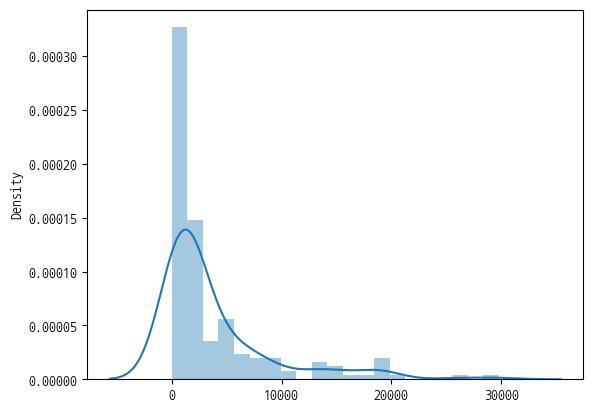

In [200]:
_ = sns.distplot(tag_counts_df)

<Axes: >

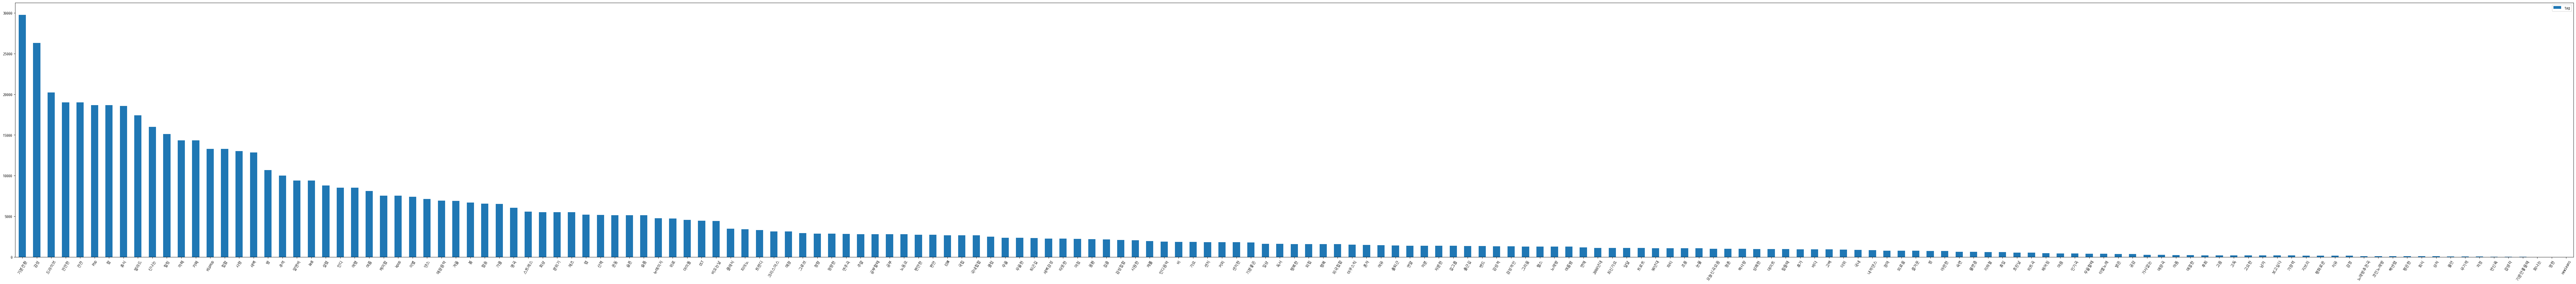

In [201]:
tag_counts_df.plot(kind='bar', figsize=(120,12), rot=60)

In [202]:
def get_playlist_songs(plylstseq: str):
    result = {}
    playlist_url = f'https://www.melon.com/mymusic/dj/mymusicdjplaylistview_inform.htm?plylstSeq={plylstseq}'
    # Headers information    
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36',
    }
    # Request - get
    response = requests.get(playlist_url, headers = headers)
    html = response.text
    # parse text by beautifullsoup
    parse = bs(html, 'html.parser')
    # find imformations
    song_txt = parse.find_all("div", "wrap_song_info", class_="ellipsis rank01")
    singer_txt = parse.find_all("div", "wrap_song_info", class_="ellipsis rank02")
    album_txt = parse.find_all("div", "wrap_song_info", class_="ellipsis rank03")

    song_code = []
    song_name = []
    singer_code = []
    singer_name = []

    for idx, song in enumerate(song_txt):
        song_code.append(song_txt[idx].find("a")['href'].split(',')[1][:-2])
        song_name.append(song_txt[idx].find("a")['title'][:-3])
        if singer_txt[idx].find("a"):
            singer_code.append(singer_txt[idx].find("a")['href'].split('\'')[1])
            singer_name.append(singer_txt[idx].find("a")['title'][:-9])
        else:
            singer_code.append('')
            singer_name.append('Various Artists')

    # make return values
    result['song_code'] = song_code
    result['song_name'] = song_name
    result['singer_code'] = singer_code
    result['singer_name'] = singer_name
    result['plylstseq'] = plylstseq

    return pd.DataFrame(result)

In [203]:
# 사용예시
songs_df = get_playlist_songs('480931922')

In [204]:
songs_df

song_code                                          song_name singer_code  \
0   32333811                                       I Love Today      713743   
1   31831071                     Little Bird (tvN '스페인 하숙' 삽입곡)      618273   
2   31622729                                      Morning Diary       38547   
3    8147021                                          새콤 달콤한 행복      944561   
4   32227785                                           냥이의 숨바꼭질      943648   
5    1370395                             Dance Of The Dragonfly        2078   
6   32465462                                        Perfect Day      713920   
7     332494                                    Butterfly Waltz        2029   
8    8209025                                         Sunny Days      944395   
9    7998989                                           둘이서 걷던 길      905398   
10  31960622                                     Summer Driving      713816   
11    775141                                Shining The Morning      167197   
12   3727562                         Linda 행진곡 (tvN 꽃보다 할배 삽입곡)      623915   
13   1534853                                      Paris, Paris!      184431   
14   3790184                        놀이공원 솜사탕 (tvN '꽃보다 누나' 삽입곡)      618273   
15  30094226                                   햇살에 기대어, 바람에 기대어      943492   
16  31184800                                       Summer Cloud      945794   
17   3345151                                  카푸치노 (Cappuccino)      160836   
18   3994798                      토토의 즐거운 하루 (tvN '꽃보다 할배' 삽입곡)      713920   
19   1685423                                             학교가는 길          22   
20   4647761  Bubble Love (tvN '꽃보다 할배, 꽃보다 누나, 감자별 2013QR3'...      713917   
21   4115554                                      Guppy's Dream      728741   
22  32583043                                           Mint Sky      713738   
23  31853782                                             달콤한 여유      945794   
24  30111802                                     It's A New Day     1239013   
25  32260027                                      Happy Moments      618273   
26  32077232                                      Cinnamon Roll      713818   
27  32247275                                       Morning Bell      713816   
28   8195584                                             지구별 소풍      943492   
29  32833535                                        Deep Summer      713920   
30   8026107                                      Spring Breeze      623915   
31  32653200                                            시나몬 테라피      943648   
32   8062170                                          미소가 주는 행복      713917   
33  32653260                                              여름 소풍      944561   
34  32488641                                        Flower Café       38547   
35   8157748                                            Blossom      944395   
36  31970388                                 Happy Cooking Time      713738   
37  31737542                                      Heavenly Blue      713743   
38  31211369                                       Orange Juice      713818   
39   1183735                                      Flying Petals       37136   
40   5788555                                             기분좋은아침      875240   
41   2110847                                      Melody Garden      405601   
42   4045341                                  여름아, 내 사랑을 잘 부탁해!       59806   

        singer_name  plylstseq  
0               7pm  480931922  
1              물고기꿈  480931922  
2                해리  480931922  
3              달빛바다  480931922  
4        From Paris  480931922  
5        Kevin Kern  480931922  
6      Shizuko Mori  480931922  
7       Brian Crain  480931922  
8             서른의 꿈  480931922  
9   레인시티 (RainCity)  480931922  
10              루바토  480931922  
11              장세용  480931922  
12          클라 인 러브  480931922  
13               몽라  480931922  
14             물고기꿈  480931922 

In [205]:
# 제목이 같은 플레이리스트 제거
all_playlist_df = all_playlist_df[~all_playlist_df['title'].duplicated()]

In [206]:
# 번호가 같은 플레이리스트 제거
all_playlist_df = all_playlist_df[~all_playlist_df['plylstSeq'].duplicated()]

In [246]:
all_playlist_list = all_playlist_df['plylstSeq'].tolist()
all_playlist_list

[457536543,
 517680521,
 496963017,
 101470463,
 100098227,
 100098236,
 457624642,
 534972865,
 524564480,
 479478642,
 457577553,
 528238887,
 522118839,
 494283599,
 489337558,
 457505963,
 525749523,
 484732185,
 480011338,
 527521183,
 442706386,
 421220077,
 515178763,
 506225967,
 512640091,
 101470465,
 415292615,
 488575662,
 529295646,
 457904205,
 455783352,
 490687447,
 490527225,
 527426942,
 538122404,
 100121242,
 451476862,
 538684920,
 517872485,
 501700047,
 527484420,
 493453335,
 456929739,
 516213208,
 522238496,
 438523538,
 524528555,
 427705075,
 485926496,
 500439113,
 401004189,
 405075509,
 528678741,
 478102836,
 523261703,
 100098244,
 525011459,
 421161632,
 443997103,
 457450899,
 520432487,
 506070970,
 506606075,
 496795342,
 438165403,
 487081506,
 526489966,
 400925557,
 490394549,
 477814461,
 457622298,
 508556120,
 456216805,
 534972963,
 506033160,
 100098270,
 504463836,
 510682185,
 495479998,
 528750418,
 527594000,
 100098481,
 538671177,
 450

In [247]:
len(all_playlist_list)

1663

In [ ]:
all_playlist_list.to_csv(f'data/all_playlist목록.csv', index=False)

In [211]:
# pip install fastparquet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 379.5 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 563.9 kB/s eta 0:00:00m eta 0:00:010:01:01
Note: you may need to restart the kernel to use updated packages.


In [209]:
# 모든 플레이리스트의 곡을 가져와 데이터를 parquet 파일로 저장하는 함수
def get_all_playlist_songs(plylstseq_list: list):
    batch = []
    batch_size = 10
    for k in range(batch_size):
        batch.append(plylstseq_list[k*(len(plylstseq_list)//batch_size):(k+1)*(len(plylstseq_list)//batch_size)])    
    playlist_songs_df = pd.DataFrame()
    for i, batch_list in enumerate(batch):
        for idx, plylstseq in enumerate(tqdm(batch_list)):
            if(idx == 0):
                playlist_songs_df = get_playlist_songs(plylstseq)
            else:
                playlist_songs_df = pd.concat([playlist_songs_df, get_playlist_songs(plylstseq)])
        playlist_songs_df.to_parquet(f'data/playlist_songs({len(plylstseq_list)}_{i}).parquet.gzip', compression = 'gzip', index=False)
    return playlist_songs_df

In [212]:
# 사용예시
all_songs_df = get_all_playlist_songs(all_playlist_list)

100%|█████████████████████████████████████████| 166/166 [00:54<00:00,  3.05it/s]


In [222]:
all_songs_df

song_code                                       song_name singer_code  \
0   31803822                               Someone You Loved     1760322   
1   30059615                            Say You Won't Let Go      715511   
2   32373713                                      To Die For      718042   
3   32104269  If the World Was Ending (Feat. Julia Michaels)     2091191   
4   30623493                            Too Good At Goodbyes      718042   
..       ...                                             ...         ...   
36  37344430                                   숨 (Breathing)     1066419   
37  31345636                                지금 우리 (City 127)      991413   
38  32252266            Coming Home (Sung by 태일, 도영, 재현, 해찬)      960278   
39  32393670                                        꿈 (Boom)      991413   
40  36851932                                 Je Ne Sais Quoi      991413   

      singer_name  plylstseq  
0   Lewis Capaldi  532576247  
1    James Arthur  532576247  
2       Sam Smith  532576247  
3         JP Saxe  532576247  
4       Sam Smith  532576247  
..            ...        ...  
36      NCT DREAM  523726524  
37        NCT 127  523726524  
38          NCT U  523726524  
39        NCT 127  523726524  
40        NCT 127  523726524  

[6527 rows x 5 columns]

In [223]:
# load
DATA_PATH = "data"
DATA_SAVE_PATH = os.path.join(DATA_PATH, "songs_info.parquet.gzip")

class SongScrapper:
    def __init__(self):
        self.headers = {
            "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36",
        }

    def load(self, type="parquet"):
        if os.path.isfile(DATA_SAVE_PATH):
            return print(f"You already have the data file... ({DATA_SAVE_PATH})")

        if not os.path.isdir(DATA_PATH):
            print("Data path not found. Creating data path...")
            os.makedirs(DATA_PATH)

        files = [file_name for file_name in os.listdir(DATA_PATH) if type in file_name]
        if not files:
            return print("Data not found. you should download data first.")

        print(f"Total Data Count: {len(files)}")
        data = pd.DataFrame()
        for name in files:
            file_path = os.path.join(DATA_PATH, name)
            size = os.path.getsize(file_path)
            print(f"{name.ljust(30)}: {round(size / 1000000, 1)}MB")
            data = pd.concat([data, pd.read_parquet(file_path)])
            print(f"Current Shape: {data.shape}")
        print("\nData Loading Complete.")
        print(f"Result Shape: {data.shape}")
        return data

    def get_songs_info(self):
        data = self.load()
        if isinstance(data, pd.DataFrame):
            song_codes = data.drop_duplicates(["song_code"])["song_code"]
            print(f"\nTotal Song Count: {len(song_codes)}")
            results = pd.DataFrame()
            for i, song_code in tqdm(enumerate(song_codes)):
                result = self.get_song_info_by_code(song_code)
                results = pd.concat([results, pd.DataFrame(result, index=[i])])
            print("\nData Scrapping Complete.")
            print(f"Result Shape: {results.shape}")
            print(f"Result Columns: {results.columns}")
            results.to_parquet(DATA_SAVE_PATH, compression="gzip", index=False)

    def get_song_info_by_code(self, song_code):
        url = f"https://www.melon.com/song/lyrics.htm?songId={song_code}"
        print(url)
        response = requests.get(url, headers=self.headers)
        page = bs(response.content, "html.parser")
        artists = page.find("div", class_="artist").find_all("a", class_="artist_name")
        cover_link = page.find("a", class_="image_typeAll").find("img")["src"]
        cover_link = re.sub("/282/", "/512/", cover_link)
        cover_link = re.sub("/80/", "/100/", cover_link)
        result = {
            "song_code": song_code,
            "song_title": page.find("div", class_="song_name")
            .get_text(strip=True)
            .lstrip("곡명"),
            "artist": ", ".join([artist["title"] for artist in artists]),
            "album_cover": cover_link,
            "album_title": re.sub(
                "[\\xa0]",
                " ",
                page.find("div", class_="meta").find("a").get_text(strip=True),
            ),
            "public_date": page.find("div", class_="meta")
            .find_all("dd")[1]
            .get_text(strip=True),
            "genre": page.find("div", class_="meta")
            .find_all("dd")[2]
            .get_text(strip=True)
            .split(", ")[0],
            "lyrics": page.find(class_="wrap_lyric")
            .get_text(separator="\n", strip=True)
            .rstrip("펼치기 "),
        }

        return result

In [224]:
SongScrapper().get_songs_info()

Total Data Count: 10
playlist_songs(1663_4).parquet.gzip: 0.1MB
Current Shape: (7181, 5)
playlist_songs(1663_5).parquet.gzip: 0.2MB
Current Shape: (14587, 5)
playlist_songs(1663_7).parquet.gzip: 0.2MB
Current Shape: (21160, 5)
playlist_songs(1663_8).parquet.gzip: 0.1MB
Current Shape: (26831, 5)
playlist_songs(1663_0).parquet.gzip: 0.2MB
Current Shape: (35013, 5)
playlist_songs(1663_3).parquet.gzip: 0.2MB
Current Shape: (42576, 5)
playlist_songs(1663_6).parquet.gzip: 0.2MB
Current Shape: (49794, 5)
playlist_songs(1663_1).parquet.gzip: 0.2MB
Current Shape: (57054, 5)
playlist_songs(1663_9).parquet.gzip: 0.2MB
Current Shape: (63581, 5)
playlist_songs(1663_2).parquet.gzip: 0.2MB
Current Shape: (71281, 5)

Data Loading Complete.
Result Shape: (71281, 5)

Total Song Count: 37735


0it [00:00, ?it/s]

https://www.melon.com/song/lyrics.htm?songId=31927275


1it [00:01,  1.21s/it]

https://www.melon.com/song/lyrics.htm?songId=37023625


2it [00:02,  1.01it/s]

https://www.melon.com/song/lyrics.htm?songId=36382580


3it [00:03,  1.03it/s]

https://www.melon.com/song/lyrics.htm?songId=4446485


4it [00:04,  1.12s/it]

https://www.melon.com/song/lyrics.htm?songId=31666417


5it [00:05,  1.10s/it]

https://www.melon.com/song/lyrics.htm?songId=34819473


6it [00:06,  1.10s/it]

https://www.melon.com/song/lyrics.htm?songId=32061975


7it [00:07,  1.08s/it]

https://www.melon.com/song/lyrics.htm?songId=30962526


8it [00:08,  1.15s/it]

https://www.melon.com/song/lyrics.htm?songId=34431086


9it [00:09,  1.09s/it]

https://www.melon.com/song/lyrics.htm?songId=36334401


10it [00:10,  1.10s/it]

https://www.melon.com/song/lyrics.htm?songId=31093710


11it [00:12,  1.12s/it]

https://www.melon.com/song/lyrics.htm?songId=30514366


12it [00:13,  1.09s/it]

https://www.melon.com/song/lyrics.htm?songId=30383949


13it [00:14,  1.03s/it]

https://www.melon.com/song/lyrics.htm?songId=30314784


14it [00:15,  1.08s/it]

https://www.melon.com/song/lyrics.htm?songId=418168


15it [00:16,  1.10s/it]

https://www.melon.com/song/lyrics.htm?songId=3894276


16it [00:17,  1.07s/it]

https://www.melon.com/song/lyrics.htm?songId=30672529


17it [00:18,  1.03s/it]

https://www.melon.com/song/lyrics.htm?songId=30190630


18it [00:19,  1.02s/it]

https://www.melon.com/song/lyrics.htm?songId=3890826


19it [00:20,  1.02s/it]

https://www.melon.com/song/lyrics.htm?songId=686651


20it [00:21,  1.00it/s]

https://www.melon.com/song/lyrics.htm?songId=3853980


21it [00:22,  1.02it/s]

https://www.melon.com/song/lyrics.htm?songId=1325050


22it [00:23,  1.06it/s]

https://www.melon.com/song/lyrics.htm?songId=32491274


23it [00:24,  1.05it/s]

https://www.melon.com/song/lyrics.htm?songId=519620


24it [00:25,  1.01it/s]

https://www.melon.com/song/lyrics.htm?songId=1467722


25it [00:26,  1.01it/s]

https://www.melon.com/song/lyrics.htm?songId=32224166


26it [00:26,  1.06it/s]

https://www.melon.com/song/lyrics.htm?songId=8203900


27it [00:27,  1.05it/s]

https://www.melon.com/song/lyrics.htm?songId=30287019


28it [00:28,  1.01it/s]

https://www.melon.com/song/lyrics.htm?songId=32156286


29it [00:29,  1.06it/s]

https://www.melon.com/song/lyrics.htm?songId=31853557


30it [00:30,  1.08it/s]

https://www.melon.com/song/lyrics.htm?songId=31175119


31it [00:31,  1.05it/s]

https://www.melon.com/song/lyrics.htm?songId=30492279


32it [00:32,  1.00it/s]

https://www.melon.com/song/lyrics.htm?songId=534252


33it [00:33,  1.04it/s]

https://www.melon.com/song/lyrics.htm?songId=837567


34it [00:34,  1.07it/s]

https://www.melon.com/song/lyrics.htm?songId=34787226


35it [00:35,  1.09it/s]

https://www.melon.com/song/lyrics.htm?songId=31388145


36it [00:36,  1.07it/s]

https://www.melon.com/song/lyrics.htm?songId=3414749


37it [00:37,  1.06it/s]

https://www.melon.com/song/lyrics.htm?songId=35643794


38it [00:38,  1.08it/s]

https://www.melon.com/song/lyrics.htm?songId=35931532


39it [00:39,  1.05it/s]

https://www.melon.com/song/lyrics.htm?songId=429656


40it [00:40,  1.07it/s]

https://www.melon.com/song/lyrics.htm?songId=32003395


41it [00:41,  1.03it/s]

https://www.melon.com/song/lyrics.htm?songId=31324607


42it [00:42,  1.07it/s]

https://www.melon.com/song/lyrics.htm?songId=2314377


43it [00:43,  1.02it/s]

https://www.melon.com/song/lyrics.htm?songId=31967064


44it [00:44,  1.06s/it]

https://www.melon.com/song/lyrics.htm?songId=30486509


45it [00:45,  1.02s/it]

https://www.melon.com/song/lyrics.htm?songId=3726617


46it [00:46,  1.02it/s]

https://www.melon.com/song/lyrics.htm?songId=30512671


47it [00:47,  1.05s/it]

https://www.melon.com/song/lyrics.htm?songId=9620469


48it [00:48,  1.04s/it]

https://www.melon.com/song/lyrics.htm?songId=531840


49it [00:49,  1.01it/s]

https://www.melon.com/song/lyrics.htm?songId=3170749


50it [00:50,  1.03it/s]

https://www.melon.com/song/lyrics.htm?songId=515804


51it [00:50,  1.24it/s]

https://www.melon.com/song/lyrics.htm?songId=4047160


52it [00:51,  1.23it/s]

https://www.melon.com/song/lyrics.htm?songId=483377


53it [00:51,  1.49it/s]

https://www.melon.com/song/lyrics.htm?songId=418598


54it [00:52,  1.34it/s]

https://www.melon.com/song/lyrics.htm?songId=2335493


55it [00:53,  1.52it/s]

https://www.melon.com/song/lyrics.htm?songId=987163


56it [00:53,  1.82it/s]

https://www.melon.com/song/lyrics.htm?songId=1188954


57it [00:53,  2.19it/s]

https://www.melon.com/song/lyrics.htm?songId=2537464


58it [00:54,  2.28it/s]

https://www.melon.com/song/lyrics.htm?songId=1764594


59it [00:54,  2.47it/s]

https://www.melon.com/song/lyrics.htm?songId=1492286


60it [00:54,  2.68it/s]

https://www.melon.com/song/lyrics.htm?songId=3132748


61it [00:55,  2.87it/s]

https://www.melon.com/song/lyrics.htm?songId=2184575


62it [00:55,  2.77it/s]

https://www.melon.com/song/lyrics.htm?songId=1798753


63it [00:55,  3.07it/s]

https://www.melon.com/song/lyrics.htm?songId=481202


64it [00:55,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=3482960


65it [00:56,  3.14it/s]

https://www.melon.com/song/lyrics.htm?songId=104648


66it [00:56,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=889549


67it [00:56,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=621632


68it [00:57,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=2126448


69it [00:57,  3.11it/s]

https://www.melon.com/song/lyrics.htm?songId=2783260


70it [00:57,  3.12it/s]

https://www.melon.com/song/lyrics.htm?songId=2933662


71it [00:58,  3.12it/s]

https://www.melon.com/song/lyrics.htm?songId=1645087


72it [00:58,  3.14it/s]

https://www.melon.com/song/lyrics.htm?songId=1742135


73it [00:58,  3.10it/s]

https://www.melon.com/song/lyrics.htm?songId=1355082


74it [00:59,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=1213524


75it [00:59,  2.49it/s]

https://www.melon.com/song/lyrics.htm?songId=1927926


76it [01:00,  2.57it/s]

https://www.melon.com/song/lyrics.htm?songId=1145088


77it [01:00,  2.77it/s]

https://www.melon.com/song/lyrics.htm?songId=1373302


78it [01:00,  2.80it/s]

https://www.melon.com/song/lyrics.htm?songId=485458


79it [01:01,  2.77it/s]

https://www.melon.com/song/lyrics.htm?songId=517889


80it [01:01,  2.87it/s]

https://www.melon.com/song/lyrics.htm?songId=1509829


81it [01:02,  1.72it/s]

https://www.melon.com/song/lyrics.htm?songId=1146308


82it [01:02,  2.11it/s]

https://www.melon.com/song/lyrics.htm?songId=1798588


83it [01:03,  1.58it/s]

https://www.melon.com/song/lyrics.htm?songId=855314


84it [01:04,  1.81it/s]

https://www.melon.com/song/lyrics.htm?songId=1374075


85it [01:04,  2.08it/s]

https://www.melon.com/song/lyrics.htm?songId=430341


86it [01:04,  2.21it/s]

https://www.melon.com/song/lyrics.htm?songId=17282


87it [01:05,  2.33it/s]

https://www.melon.com/song/lyrics.htm?songId=1469342


88it [01:06,  1.80it/s]

https://www.melon.com/song/lyrics.htm?songId=1975152


89it [01:06,  2.06it/s]

https://www.melon.com/song/lyrics.htm?songId=1121123


90it [01:06,  2.23it/s]

https://www.melon.com/song/lyrics.htm?songId=1370967


91it [01:07,  2.31it/s]

https://www.melon.com/song/lyrics.htm?songId=1566728


92it [01:07,  2.59it/s]

https://www.melon.com/song/lyrics.htm?songId=3156359


93it [01:07,  2.71it/s]

https://www.melon.com/song/lyrics.htm?songId=622586


94it [01:08,  2.98it/s]

https://www.melon.com/song/lyrics.htm?songId=2305280


95it [01:08,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=1096752


96it [01:08,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=1570684


97it [01:08,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=1143064


98it [01:09,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=517087


99it [01:09,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=31737197


100it [01:10,  1.97it/s]

https://www.melon.com/song/lyrics.htm?songId=31131274


101it [01:11,  1.33it/s]

https://www.melon.com/song/lyrics.htm?songId=31706346


102it [01:12,  1.27it/s]

https://www.melon.com/song/lyrics.htm?songId=8153410


103it [01:13,  1.17it/s]

https://www.melon.com/song/lyrics.htm?songId=30341745


104it [01:14,  1.10it/s]

https://www.melon.com/song/lyrics.htm?songId=8130796


105it [01:15,  1.09it/s]

https://www.melon.com/song/lyrics.htm?songId=30481578


106it [01:16,  1.01it/s]

https://www.melon.com/song/lyrics.htm?songId=5721440


107it [01:17,  1.02it/s]

https://www.melon.com/song/lyrics.htm?songId=4756304


108it [01:18,  1.01s/it]

https://www.melon.com/song/lyrics.htm?songId=8158031


109it [01:19,  1.03s/it]

https://www.melon.com/song/lyrics.htm?songId=8252573


110it [01:20,  1.04s/it]

https://www.melon.com/song/lyrics.htm?songId=30069773


111it [01:22,  1.07s/it]

https://www.melon.com/song/lyrics.htm?songId=31998495


112it [01:22,  1.01it/s]

https://www.melon.com/song/lyrics.htm?songId=30367365


113it [01:23,  1.01it/s]

https://www.melon.com/song/lyrics.htm?songId=31848518


114it [01:24,  1.23it/s]

https://www.melon.com/song/lyrics.htm?songId=31798464


115it [01:25,  1.20it/s]

https://www.melon.com/song/lyrics.htm?songId=32175937


116it [01:26,  1.11it/s]

https://www.melon.com/song/lyrics.htm?songId=31977464


117it [01:26,  1.40it/s]

https://www.melon.com/song/lyrics.htm?songId=32112914


118it [01:27,  1.30it/s]

https://www.melon.com/song/lyrics.htm?songId=5748499


119it [01:28,  1.19it/s]

https://www.melon.com/song/lyrics.htm?songId=31955739


120it [01:29,  1.16it/s]

https://www.melon.com/song/lyrics.htm?songId=31969182


121it [01:30,  1.08it/s]

https://www.melon.com/song/lyrics.htm?songId=31399721


122it [01:31,  1.10it/s]

https://www.melon.com/song/lyrics.htm?songId=31754579


123it [01:32,  1.09it/s]

https://www.melon.com/song/lyrics.htm?songId=31879867


124it [01:33,  1.11it/s]

https://www.melon.com/song/lyrics.htm?songId=31643709


125it [01:33,  1.12it/s]

https://www.melon.com/song/lyrics.htm?songId=31717822


126it [01:35,  1.05it/s]

https://www.melon.com/song/lyrics.htm?songId=3837683


127it [01:35,  1.07it/s]

https://www.melon.com/song/lyrics.htm?songId=31680843


128it [01:36,  1.35it/s]

https://www.melon.com/song/lyrics.htm?songId=31996469


129it [01:36,  1.62it/s]

https://www.melon.com/song/lyrics.htm?songId=31532438


130it [01:37,  1.42it/s]

https://www.melon.com/song/lyrics.htm?songId=31668491


131it [01:38,  1.34it/s]

https://www.melon.com/song/lyrics.htm?songId=31506637


132it [01:39,  1.27it/s]

https://www.melon.com/song/lyrics.htm?songId=31608765


133it [01:40,  1.24it/s]

https://www.melon.com/song/lyrics.htm?songId=31606729


134it [01:40,  1.17it/s]

https://www.melon.com/song/lyrics.htm?songId=31856953


135it [01:41,  1.25it/s]

https://www.melon.com/song/lyrics.htm?songId=31403163


136it [01:42,  1.20it/s]

https://www.melon.com/song/lyrics.htm?songId=31417871


137it [01:43,  1.17it/s]

https://www.melon.com/song/lyrics.htm?songId=31492319


138it [01:44,  1.16it/s]

https://www.melon.com/song/lyrics.htm?songId=31098083


139it [01:45,  1.14it/s]

https://www.melon.com/song/lyrics.htm?songId=31055324


140it [01:46,  1.14it/s]

https://www.melon.com/song/lyrics.htm?songId=8304595


141it [01:47,  1.04it/s]

https://www.melon.com/song/lyrics.htm?songId=31266290


142it [01:48,  1.03it/s]

https://www.melon.com/song/lyrics.htm?songId=30736437


143it [01:49,  1.04it/s]

https://www.melon.com/song/lyrics.htm?songId=31643710


144it [01:50,  1.07it/s]

https://www.melon.com/song/lyrics.htm?songId=31388213


145it [01:51,  1.08it/s]

https://www.melon.com/song/lyrics.htm?songId=30700708


146it [01:51,  1.07it/s]

https://www.melon.com/song/lyrics.htm?songId=851719


147it [01:52,  1.30it/s]

https://www.melon.com/song/lyrics.htm?songId=3680


148it [01:52,  1.58it/s]

https://www.melon.com/song/lyrics.htm?songId=82424


149it [01:52,  1.87it/s]

https://www.melon.com/song/lyrics.htm?songId=73737


150it [01:53,  2.04it/s]

https://www.melon.com/song/lyrics.htm?songId=71992


151it [01:53,  2.30it/s]

https://www.melon.com/song/lyrics.htm?songId=30596120


152it [01:53,  2.54it/s]

https://www.melon.com/song/lyrics.htm?songId=79964


153it [01:54,  2.62it/s]

https://www.melon.com/song/lyrics.htm?songId=3793378


154it [01:54,  2.78it/s]

https://www.melon.com/song/lyrics.htm?songId=38667


155it [01:55,  2.57it/s]

https://www.melon.com/song/lyrics.htm?songId=38757


156it [01:55,  2.74it/s]

https://www.melon.com/song/lyrics.htm?songId=78647


157it [01:55,  2.91it/s]

https://www.melon.com/song/lyrics.htm?songId=79953


158it [01:55,  3.06it/s]

https://www.melon.com/song/lyrics.htm?songId=37832


159it [01:56,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=75233


160it [01:56,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=4262739


161it [01:57,  2.56it/s]

https://www.melon.com/song/lyrics.htm?songId=38388


162it [01:57,  2.85it/s]

https://www.melon.com/song/lyrics.htm?songId=53619


163it [01:57,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=85674


164it [01:58,  2.58it/s]

https://www.melon.com/song/lyrics.htm?songId=84845


165it [01:58,  2.59it/s]

https://www.melon.com/song/lyrics.htm?songId=55991


166it [01:58,  2.73it/s]

https://www.melon.com/song/lyrics.htm?songId=83891


167it [01:59,  2.83it/s]

https://www.melon.com/song/lyrics.htm?songId=91475


168it [01:59,  3.05it/s]

https://www.melon.com/song/lyrics.htm?songId=38587


169it [01:59,  3.11it/s]

https://www.melon.com/song/lyrics.htm?songId=88920


170it [02:00,  2.69it/s]

https://www.melon.com/song/lyrics.htm?songId=3052442


171it [02:00,  2.89it/s]

https://www.melon.com/song/lyrics.htm?songId=8034220


172it [02:00,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=69323


173it [02:01,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=69302


174it [02:01,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=74516


175it [02:01,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=1816948


176it [02:02,  2.71it/s]

https://www.melon.com/song/lyrics.htm?songId=80392


177it [02:02,  2.95it/s]

https://www.melon.com/song/lyrics.htm?songId=38662


178it [02:02,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=45926


179it [02:03,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=55986


180it [02:03,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=59078


181it [02:03,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=53615


182it [02:03,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=2992724


183it [02:04,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=1876466


184it [02:05,  2.12it/s]

https://www.melon.com/song/lyrics.htm?songId=69343


185it [02:05,  2.10it/s]

https://www.melon.com/song/lyrics.htm?songId=63699


186it [02:05,  2.35it/s]

https://www.melon.com/song/lyrics.htm?songId=2270749


187it [02:06,  2.38it/s]

https://www.melon.com/song/lyrics.htm?songId=33876


188it [02:06,  2.69it/s]

https://www.melon.com/song/lyrics.htm?songId=67832


189it [02:06,  3.06it/s]

https://www.melon.com/song/lyrics.htm?songId=38651


190it [02:07,  3.05it/s]

https://www.melon.com/song/lyrics.htm?songId=49933


191it [02:07,  2.92it/s]

https://www.melon.com/song/lyrics.htm?songId=91418


192it [02:07,  2.52it/s]

https://www.melon.com/song/lyrics.htm?songId=1622501


194it [02:08,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=2339828
https://www.melon.com/song/lyrics.htm?songId=32488


195it [02:08,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=72322


196it [02:08,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=8167473


197it [02:09,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=58065


198it [02:09,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=833171


199it [02:09,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=2947002


201it [02:10,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=4032619
https://www.melon.com/song/lyrics.htm?songId=2718961


203it [02:10,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=3745735
https://www.melon.com/song/lyrics.htm?songId=736899


204it [02:10,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=1125186


205it [02:10,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=49276


206it [02:11,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=1003928


207it [02:11,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=538276


209it [02:11,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=2780871
https://www.melon.com/song/lyrics.htm?songId=1621394


210it [02:12,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=1005538


211it [02:12,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=1565650


212it [02:12,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=1008148


213it [02:12,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=1537309


214it [02:12,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=538280


215it [02:13,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=690112


216it [02:13,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=49834


217it [02:13,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=91386


218it [02:13,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=1455308


219it [02:14,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=2570038


221it [02:14,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=1005227
https://www.melon.com/song/lyrics.htm?songId=1672732


222it [02:14,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=62807


223it [02:14,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=481211


225it [02:15,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=1356123
https://www.melon.com/song/lyrics.htm?songId=600666


226it [02:15,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=1877129


227it [02:15,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=447382


228it [02:16,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=2509669


229it [02:16,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=2687369


230it [02:16,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=1648521


231it [02:17,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=1515042


232it [02:17,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=50580


234it [02:17,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=2650417
https://www.melon.com/song/lyrics.htm?songId=2194249


236it [02:18,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=2061085
https://www.melon.com/song/lyrics.htm?songId=5808197


237it [02:18,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=1054752


238it [02:18,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=4172365


239it [02:18,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=4461336


240it [02:19,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=53671


241it [02:19,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=526758


243it [02:19,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=3622640
https://www.melon.com/song/lyrics.htm?songId=666597


244it [02:19,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=53098


245it [02:20,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=47084


246it [02:20,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=37228861


247it [02:21,  2.39it/s]

https://www.melon.com/song/lyrics.htm?songId=37373234


248it [02:22,  1.74it/s]

https://www.melon.com/song/lyrics.htm?songId=37390939


249it [02:22,  1.57it/s]

https://www.melon.com/song/lyrics.htm?songId=30457483


250it [02:23,  1.88it/s]

https://www.melon.com/song/lyrics.htm?songId=4264561


251it [02:23,  2.13it/s]

https://www.melon.com/song/lyrics.htm?songId=37069064


252it [02:23,  2.19it/s]

https://www.melon.com/song/lyrics.htm?songId=36180700


253it [02:24,  1.73it/s]

https://www.melon.com/song/lyrics.htm?songId=36699489


254it [02:25,  1.52it/s]

https://www.melon.com/song/lyrics.htm?songId=37138469


255it [02:26,  1.32it/s]

https://www.melon.com/song/lyrics.htm?songId=37524037


256it [02:27,  1.23it/s]

https://www.melon.com/song/lyrics.htm?songId=8033528


257it [02:28,  1.19it/s]

https://www.melon.com/song/lyrics.htm?songId=37347911


258it [02:29,  1.17it/s]

https://www.melon.com/song/lyrics.htm?songId=37121222


259it [02:29,  1.41it/s]

https://www.melon.com/song/lyrics.htm?songId=530124


260it [02:30,  1.33it/s]

https://www.melon.com/song/lyrics.htm?songId=8060956


261it [02:31,  1.17it/s]

https://www.melon.com/song/lyrics.htm?songId=37145732


262it [02:32,  1.15it/s]

https://www.melon.com/song/lyrics.htm?songId=1137108


263it [02:33,  1.17it/s]

https://www.melon.com/song/lyrics.htm?songId=4671151


264it [02:34,  1.14it/s]

https://www.melon.com/song/lyrics.htm?songId=36595401


265it [02:35,  1.12it/s]

https://www.melon.com/song/lyrics.htm?songId=3619242


266it [02:36,  1.13it/s]

https://www.melon.com/song/lyrics.htm?songId=111209


267it [02:37,  1.06it/s]

https://www.melon.com/song/lyrics.htm?songId=34451383


268it [02:38,  1.10it/s]

https://www.melon.com/song/lyrics.htm?songId=8119658


269it [02:38,  1.14it/s]

https://www.melon.com/song/lyrics.htm?songId=732519


270it [02:39,  1.09it/s]

https://www.melon.com/song/lyrics.htm?songId=420534


271it [02:40,  1.09it/s]

https://www.melon.com/song/lyrics.htm?songId=32476250


272it [02:41,  1.06it/s]

https://www.melon.com/song/lyrics.htm?songId=37344905


273it [02:42,  1.05it/s]

https://www.melon.com/song/lyrics.htm?songId=31873020


274it [02:43,  1.07it/s]

https://www.melon.com/song/lyrics.htm?songId=37269926


275it [02:44,  1.32it/s]

https://www.melon.com/song/lyrics.htm?songId=37194943


276it [02:44,  1.25it/s]

https://www.melon.com/song/lyrics.htm?songId=4276080


277it [02:45,  1.15it/s]

https://www.melon.com/song/lyrics.htm?songId=608235


278it [02:46,  1.45it/s]

https://www.melon.com/song/lyrics.htm?songId=2650367


279it [02:48,  1.10s/it]

https://www.melon.com/song/lyrics.htm?songId=4786735


280it [02:49,  1.07s/it]

https://www.melon.com/song/lyrics.htm?songId=1172576


281it [02:49,  1.17it/s]

https://www.melon.com/song/lyrics.htm?songId=1592995


282it [02:50,  1.15it/s]

https://www.melon.com/song/lyrics.htm?songId=460396


283it [02:51,  1.13it/s]

https://www.melon.com/song/lyrics.htm?songId=1177475


284it [02:52,  1.09it/s]

https://www.melon.com/song/lyrics.htm?songId=105644


285it [02:52,  1.34it/s]

https://www.melon.com/song/lyrics.htm?songId=9040


286it [02:53,  1.62it/s]

https://www.melon.com/song/lyrics.htm?songId=848567


287it [02:54,  1.43it/s]

https://www.melon.com/song/lyrics.htm?songId=111615


288it [02:54,  1.63it/s]

https://www.melon.com/song/lyrics.htm?songId=672010


289it [02:55,  1.41it/s]

https://www.melon.com/song/lyrics.htm?songId=1832600


290it [02:55,  1.62it/s]

https://www.melon.com/song/lyrics.htm?songId=105886


291it [02:56,  1.85it/s]

https://www.melon.com/song/lyrics.htm?songId=531431


292it [02:56,  2.11it/s]

https://www.melon.com/song/lyrics.htm?songId=2020854


293it [02:57,  1.87it/s]

https://www.melon.com/song/lyrics.htm?songId=1569650


294it [02:57,  2.03it/s]

https://www.melon.com/song/lyrics.htm?songId=3824


295it [02:57,  2.20it/s]

https://www.melon.com/song/lyrics.htm?songId=1789551


296it [02:58,  2.33it/s]

https://www.melon.com/song/lyrics.htm?songId=2425149


297it [02:59,  1.67it/s]

https://www.melon.com/song/lyrics.htm?songId=1927922


298it [02:59,  1.77it/s]

https://www.melon.com/song/lyrics.htm?songId=104868


299it [03:00,  1.98it/s]

https://www.melon.com/song/lyrics.htm?songId=26378


300it [03:00,  2.10it/s]

https://www.melon.com/song/lyrics.htm?songId=91380


301it [03:00,  2.27it/s]

https://www.melon.com/song/lyrics.htm?songId=432309


302it [03:01,  1.78it/s]

https://www.melon.com/song/lyrics.htm?songId=1634717


303it [03:03,  1.23it/s]

https://www.melon.com/song/lyrics.htm?songId=434507


304it [03:03,  1.48it/s]

https://www.melon.com/song/lyrics.htm?songId=1205568


305it [03:03,  1.78it/s]

https://www.melon.com/song/lyrics.htm?songId=638570


306it [03:04,  1.46it/s]

https://www.melon.com/song/lyrics.htm?songId=3743


307it [03:06,  1.16it/s]

https://www.melon.com/song/lyrics.htm?songId=1135163


308it [03:06,  1.37it/s]

https://www.melon.com/song/lyrics.htm?songId=1785931


309it [03:06,  1.73it/s]

https://www.melon.com/song/lyrics.htm?songId=1625777


310it [03:06,  2.05it/s]

https://www.melon.com/song/lyrics.htm?songId=1650193


311it [03:07,  2.31it/s]

https://www.melon.com/song/lyrics.htm?songId=90731


312it [03:07,  2.54it/s]

https://www.melon.com/song/lyrics.htm?songId=985472


313it [03:07,  2.65it/s]

https://www.melon.com/song/lyrics.htm?songId=418645


314it [03:08,  2.87it/s]

https://www.melon.com/song/lyrics.htm?songId=418070


315it [03:08,  2.86it/s]

https://www.melon.com/song/lyrics.htm?songId=1798749


316it [03:08,  2.78it/s]

https://www.melon.com/song/lyrics.htm?songId=537599


317it [03:09,  2.85it/s]

https://www.melon.com/song/lyrics.htm?songId=535649


318it [03:09,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=86327


319it [03:09,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=481194


320it [03:10,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=622699


321it [03:10,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=696849


322it [03:10,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=83059


323it [03:10,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=985967


324it [03:11,  2.76it/s]

https://www.melon.com/song/lyrics.htm?songId=677576


325it [03:11,  3.08it/s]

https://www.melon.com/song/lyrics.htm?songId=50147


327it [03:12,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=5798894
https://www.melon.com/song/lyrics.htm?songId=1213611


329it [03:12,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=1724967
https://www.melon.com/song/lyrics.htm?songId=452880


330it [03:12,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=91116


331it [03:12,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=52841


332it [03:13,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=2523046


333it [03:13,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=81123


335it [03:13,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=1189385
https://www.melon.com/song/lyrics.htm?songId=2509313


336it [03:14,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=50149


337it [03:14,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=1076768


339it [03:14,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=35731395
https://www.melon.com/song/lyrics.htm?songId=5806426


340it [03:14,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=1726823


342it [03:15,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=2554424
https://www.melon.com/song/lyrics.htm?songId=833116


343it [03:15,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=1028281


345it [03:16,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=986619
https://www.melon.com/song/lyrics.htm?songId=73302


346it [03:16,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=1003583


348it [03:16,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=31184860


349it [03:16,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=4602379
https://www.melon.com/song/lyrics.htm?songId=1008348


351it [03:17,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=2509299
https://www.melon.com/song/lyrics.htm?songId=4024388


352it [03:17,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=48221


354it [03:18,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=30876327
https://www.melon.com/song/lyrics.htm?songId=91359


356it [03:18,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=1017208
https://www.melon.com/song/lyrics.htm?songId=986980


357it [03:18,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=3328252


359it [03:19,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=1525363
https://www.melon.com/song/lyrics.htm?songId=1003872


360it [03:19,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=60161


361it [03:19,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=1008364


363it [03:20,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=33082123
https://www.melon.com/song/lyrics.htm?songId=1656390


365it [03:20,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=52859
https://www.melon.com/song/lyrics.htm?songId=30876534


366it [03:21,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=1184946


367it [03:21,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=905013


368it [03:21,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=62813


370it [03:21,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=3617313
https://www.melon.com/song/lyrics.htm?songId=32939821


371it [03:22,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=52876


372it [03:22,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=30809895


373it [03:23,  2.23it/s]

https://www.melon.com/song/lyrics.htm?songId=30755375


374it [03:24,  1.76it/s]

https://www.melon.com/song/lyrics.htm?songId=32034629


375it [03:25,  1.49it/s]

https://www.melon.com/song/lyrics.htm?songId=30667988


376it [03:25,  1.39it/s]

https://www.melon.com/song/lyrics.htm?songId=30702937


377it [03:26,  1.33it/s]

https://www.melon.com/song/lyrics.htm?songId=30699142


378it [03:27,  1.28it/s]

https://www.melon.com/song/lyrics.htm?songId=30637776


379it [03:28,  1.21it/s]

https://www.melon.com/song/lyrics.htm?songId=3040227


380it [03:28,  1.46it/s]

https://www.melon.com/song/lyrics.htm?songId=30877002


381it [03:29,  1.24it/s]

https://www.melon.com/song/lyrics.htm?songId=5398990


382it [03:30,  1.16it/s]

https://www.melon.com/song/lyrics.htm?songId=3910821


383it [03:31,  1.12it/s]

https://www.melon.com/song/lyrics.htm?songId=4543502


384it [03:33,  1.05it/s]

https://www.melon.com/song/lyrics.htm?songId=1890405


385it [03:33,  1.07it/s]

https://www.melon.com/song/lyrics.htm?songId=3427926


386it [03:34,  1.31it/s]

https://www.melon.com/song/lyrics.htm?songId=8022317


387it [03:35,  1.23it/s]

https://www.melon.com/song/lyrics.htm?songId=3549031


388it [03:36,  1.22it/s]

https://www.melon.com/song/lyrics.htm?songId=2336218


389it [03:36,  1.48it/s]

https://www.melon.com/song/lyrics.htm?songId=9614761


390it [03:37,  1.31it/s]

https://www.melon.com/song/lyrics.htm?songId=5458267


391it [03:38,  1.18it/s]

https://www.melon.com/song/lyrics.htm?songId=30099927


392it [03:39,  1.13it/s]

https://www.melon.com/song/lyrics.htm?songId=30120986


393it [03:40,  1.10it/s]

https://www.melon.com/song/lyrics.htm?songId=7861392


394it [03:41,  1.08it/s]

https://www.melon.com/song/lyrics.htm?songId=31532642


395it [03:42,  1.06it/s]

https://www.melon.com/song/lyrics.htm?songId=3864961


396it [03:43,  1.06it/s]

https://www.melon.com/song/lyrics.htm?songId=3423253


397it [03:43,  1.30it/s]

https://www.melon.com/song/lyrics.htm?songId=3680333


398it [03:44,  1.25it/s]

https://www.melon.com/song/lyrics.htm?songId=1944399


399it [03:45,  1.17it/s]

https://www.melon.com/song/lyrics.htm?songId=2596149


400it [03:46,  1.26it/s]

https://www.melon.com/song/lyrics.htm?songId=3968836


401it [03:46,  1.23it/s]

https://www.melon.com/song/lyrics.htm?songId=30178900


402it [03:47,  1.19it/s]

https://www.melon.com/song/lyrics.htm?songId=1797709


403it [03:48,  1.44it/s]

https://www.melon.com/song/lyrics.htm?songId=3897927


404it [03:49,  1.26it/s]

https://www.melon.com/song/lyrics.htm?songId=37630718


405it [03:49,  1.61it/s]

https://www.melon.com/song/lyrics.htm?songId=37375706


406it [03:49,  1.90it/s]

https://www.melon.com/song/lyrics.htm?songId=4674351


407it [03:50,  2.21it/s]

https://www.melon.com/song/lyrics.htm?songId=37285610


408it [03:50,  2.64it/s]

https://www.melon.com/song/lyrics.htm?songId=36062335


409it [03:50,  2.75it/s]

https://www.melon.com/song/lyrics.htm?songId=37171983


410it [03:50,  2.96it/s]

https://www.melon.com/song/lyrics.htm?songId=37138024


411it [03:51,  3.11it/s]

https://www.melon.com/song/lyrics.htm?songId=36854424


412it [03:51,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=36729714


413it [03:51,  3.14it/s]

https://www.melon.com/song/lyrics.htm?songId=36616378


414it [03:52,  1.76it/s]

https://www.melon.com/song/lyrics.htm?songId=36676637


415it [03:53,  2.13it/s]

https://www.melon.com/song/lyrics.htm?songId=4020013


416it [03:54,  1.65it/s]

https://www.melon.com/song/lyrics.htm?songId=36425695


417it [03:54,  1.96it/s]

https://www.melon.com/song/lyrics.htm?songId=36404853


418it [03:54,  2.09it/s]

https://www.melon.com/song/lyrics.htm?songId=5760248


419it [03:55,  2.21it/s]

https://www.melon.com/song/lyrics.htm?songId=36205780


420it [03:55,  2.41it/s]

https://www.melon.com/song/lyrics.htm?songId=36212041


421it [03:55,  2.79it/s]

https://www.melon.com/song/lyrics.htm?songId=3931559


422it [03:56,  2.91it/s]

https://www.melon.com/song/lyrics.htm?songId=1095261


423it [03:56,  2.00it/s]

https://www.melon.com/song/lyrics.htm?songId=35953611


424it [03:57,  1.67it/s]

https://www.melon.com/song/lyrics.htm?songId=35853689


425it [03:58,  2.00it/s]

https://www.melon.com/song/lyrics.htm?songId=30611680


426it [03:58,  1.58it/s]

https://www.melon.com/song/lyrics.htm?songId=3172166


427it [03:59,  1.82it/s]

https://www.melon.com/song/lyrics.htm?songId=35275127


428it [03:59,  2.09it/s]

https://www.melon.com/song/lyrics.htm?songId=31874698


429it [03:59,  2.35it/s]

https://www.melon.com/song/lyrics.htm?songId=34701816


430it [04:00,  1.79it/s]

https://www.melon.com/song/lyrics.htm?songId=35853690


431it [04:01,  1.79it/s]

https://www.melon.com/song/lyrics.htm?songId=35255621


432it [04:01,  2.14it/s]

https://www.melon.com/song/lyrics.htm?songId=313555


433it [04:02,  1.69it/s]

https://www.melon.com/song/lyrics.htm?songId=5709750


434it [04:03,  1.37it/s]

https://www.melon.com/song/lyrics.htm?songId=34657844


435it [04:04,  1.24it/s]

https://www.melon.com/song/lyrics.htm?songId=1590152


436it [04:04,  1.49it/s]

https://www.melon.com/song/lyrics.htm?songId=33013877


437it [04:05,  1.32it/s]

https://www.melon.com/song/lyrics.htm?songId=8235260


438it [04:06,  1.17it/s]

https://www.melon.com/song/lyrics.htm?songId=8005879


439it [04:07,  1.14it/s]

https://www.melon.com/song/lyrics.htm?songId=35361345


440it [04:08,  1.11it/s]

https://www.melon.com/song/lyrics.htm?songId=31455159


441it [04:09,  1.13it/s]

https://www.melon.com/song/lyrics.htm?songId=33129716


442it [04:09,  1.43it/s]

https://www.melon.com/song/lyrics.htm?songId=538118


443it [04:10,  1.34it/s]

https://www.melon.com/song/lyrics.htm?songId=445413


444it [04:11,  1.31it/s]

https://www.melon.com/song/lyrics.htm?songId=36515111


445it [04:11,  1.62it/s]

https://www.melon.com/song/lyrics.htm?songId=1264830


446it [04:12,  1.33it/s]

https://www.melon.com/song/lyrics.htm?songId=8268275


447it [04:13,  1.27it/s]

https://www.melon.com/song/lyrics.htm?songId=31914848


448it [04:14,  1.17it/s]

https://www.melon.com/song/lyrics.htm?songId=4389943


449it [04:15,  1.15it/s]

https://www.melon.com/song/lyrics.htm?songId=4342898


450it [04:16,  1.39it/s]

https://www.melon.com/song/lyrics.htm?songId=31979846


451it [04:16,  1.29it/s]

https://www.melon.com/song/lyrics.htm?songId=30731442


452it [04:17,  1.29it/s]

https://www.melon.com/song/lyrics.htm?songId=31815967


453it [04:18,  1.18it/s]

https://www.melon.com/song/lyrics.htm?songId=4660794


454it [04:20,  1.01it/s]

https://www.melon.com/song/lyrics.htm?songId=8037843


455it [04:21,  1.00s/it]

https://www.melon.com/song/lyrics.htm?songId=3143265


456it [04:22,  1.02it/s]

https://www.melon.com/song/lyrics.htm?songId=31029291


457it [04:23,  1.01s/it]

https://www.melon.com/song/lyrics.htm?songId=8179814


458it [04:23,  1.28it/s]

https://www.melon.com/song/lyrics.htm?songId=32006701


459it [04:24,  1.29it/s]

https://www.melon.com/song/lyrics.htm?songId=7931286


460it [04:25,  1.16it/s]

https://www.melon.com/song/lyrics.htm?songId=1888977


461it [04:25,  1.44it/s]

https://www.melon.com/song/lyrics.htm?songId=261692


462it [04:26,  1.36it/s]

https://www.melon.com/song/lyrics.htm?songId=30380953


463it [04:27,  1.21it/s]

https://www.melon.com/song/lyrics.htm?songId=3586702


464it [04:28,  1.31it/s]

https://www.melon.com/song/lyrics.htm?songId=3986050


465it [04:28,  1.24it/s]

https://www.melon.com/song/lyrics.htm?songId=37132313


466it [04:29,  1.55it/s]

https://www.melon.com/song/lyrics.htm?songId=3143275


467it [04:30,  1.34it/s]

https://www.melon.com/song/lyrics.htm?songId=3906109


468it [04:31,  1.27it/s]

https://www.melon.com/song/lyrics.htm?songId=4910864


469it [04:31,  1.62it/s]

https://www.melon.com/song/lyrics.htm?songId=4743560


471it [04:32,  1.75it/s]

https://www.melon.com/song/lyrics.htm?songId=32523554
https://www.melon.com/song/lyrics.htm?songId=30227238


472it [04:33,  1.44it/s]

https://www.melon.com/song/lyrics.htm?songId=5832034


473it [04:34,  1.17it/s]

https://www.melon.com/song/lyrics.htm?songId=30717645


474it [04:35,  1.09it/s]

https://www.melon.com/song/lyrics.htm?songId=35535689


475it [04:35,  1.40it/s]

https://www.melon.com/song/lyrics.htm?songId=32180585


476it [04:36,  1.33it/s]

https://www.melon.com/song/lyrics.htm?songId=3904560


477it [04:37,  1.21it/s]

https://www.melon.com/song/lyrics.htm?songId=30188113


478it [04:38,  1.08it/s]

https://www.melon.com/song/lyrics.htm?songId=2676460


479it [04:39,  1.37it/s]

https://www.melon.com/song/lyrics.htm?songId=3087601


480it [04:40,  1.23it/s]

https://www.melon.com/song/lyrics.htm?songId=31012145


481it [04:41,  1.17it/s]

https://www.melon.com/song/lyrics.htm?songId=30208025


482it [04:42,  1.12it/s]

https://www.melon.com/song/lyrics.htm?songId=4748517


483it [04:42,  1.44it/s]

https://www.melon.com/song/lyrics.htm?songId=3835594


484it [04:43,  1.37it/s]

https://www.melon.com/song/lyrics.htm?songId=30693235


485it [04:44,  1.33it/s]

https://www.melon.com/song/lyrics.htm?songId=32077713


486it [04:44,  1.24it/s]

https://www.melon.com/song/lyrics.htm?songId=33359309


487it [04:46,  1.11it/s]

https://www.melon.com/song/lyrics.htm?songId=30067183


488it [04:46,  1.42it/s]

https://www.melon.com/song/lyrics.htm?songId=4857981


489it [04:47,  1.24it/s]

https://www.melon.com/song/lyrics.htm?songId=7942813


490it [04:48,  1.18it/s]

https://www.melon.com/song/lyrics.htm?songId=11709515


491it [04:48,  1.49it/s]

https://www.melon.com/song/lyrics.htm?songId=5629279


492it [04:49,  1.24it/s]

https://www.melon.com/song/lyrics.htm?songId=3457988


493it [04:50,  1.14it/s]

https://www.melon.com/song/lyrics.htm?songId=32040786


494it [04:51,  1.44it/s]

https://www.melon.com/song/lyrics.htm?songId=35463774


495it [04:51,  1.55it/s]

https://www.melon.com/song/lyrics.htm?songId=4660799


496it [04:51,  1.80it/s]

https://www.melon.com/song/lyrics.htm?songId=33658563


497it [04:53,  1.37it/s]

https://www.melon.com/song/lyrics.htm?songId=614861


498it [04:53,  1.65it/s]

https://www.melon.com/song/lyrics.htm?songId=34927767


499it [04:54,  1.33it/s]

https://www.melon.com/song/lyrics.htm?songId=36906592


500it [04:54,  1.59it/s]

https://www.melon.com/song/lyrics.htm?songId=30806580


501it [04:55,  1.33it/s]

https://www.melon.com/song/lyrics.htm?songId=35299693


502it [04:56,  1.23it/s]

https://www.melon.com/song/lyrics.htm?songId=3948905


503it [04:57,  1.19it/s]

https://www.melon.com/song/lyrics.htm?songId=31344113


504it [04:58,  1.13it/s]

https://www.melon.com/song/lyrics.htm?songId=31429051


505it [04:58,  1.41it/s]

https://www.melon.com/song/lyrics.htm?songId=2312253


506it [05:00,  1.23it/s]

https://www.melon.com/song/lyrics.htm?songId=3843570


507it [05:01,  1.14it/s]

https://www.melon.com/song/lyrics.htm?songId=31470006


508it [05:02,  1.06it/s]

https://www.melon.com/song/lyrics.htm?songId=34298499


509it [05:03,  1.04it/s]

https://www.melon.com/song/lyrics.htm?songId=845586


510it [05:03,  1.25it/s]

https://www.melon.com/song/lyrics.htm?songId=34256568


511it [05:04,  1.17it/s]

https://www.melon.com/song/lyrics.htm?songId=1637914


512it [05:05,  1.13it/s]

https://www.melon.com/song/lyrics.htm?songId=30613202


513it [05:06,  1.10it/s]

https://www.melon.com/song/lyrics.htm?songId=36903571


514it [05:06,  1.38it/s]

https://www.melon.com/song/lyrics.htm?songId=34100776


515it [05:07,  1.31it/s]

https://www.melon.com/song/lyrics.htm?songId=33350653


516it [05:07,  1.63it/s]

https://www.melon.com/song/lyrics.htm?songId=601903


517it [05:08,  1.80it/s]

https://www.melon.com/song/lyrics.htm?songId=985739


518it [05:09,  1.53it/s]

https://www.melon.com/song/lyrics.htm?songId=1850253


519it [05:10,  1.28it/s]

https://www.melon.com/song/lyrics.htm?songId=3948908


520it [05:11,  1.11it/s]

https://www.melon.com/song/lyrics.htm?songId=34298496


521it [05:12,  1.07it/s]

https://www.melon.com/song/lyrics.htm?songId=2511767


522it [05:12,  1.26it/s]

https://www.melon.com/song/lyrics.htm?songId=2951700


523it [05:13,  1.20it/s]

https://www.melon.com/song/lyrics.htm?songId=971441


524it [05:14,  1.20it/s]

https://www.melon.com/song/lyrics.htm?songId=30773554


525it [05:15,  1.19it/s]

https://www.melon.com/song/lyrics.htm?songId=1368238


526it [05:15,  1.45it/s]

https://www.melon.com/song/lyrics.htm?songId=7854179


527it [05:16,  1.31it/s]

https://www.melon.com/song/lyrics.htm?songId=34331506


528it [05:17,  1.29it/s]

https://www.melon.com/song/lyrics.htm?songId=2357924


529it [05:17,  1.56it/s]

https://www.melon.com/song/lyrics.htm?songId=7933703


530it [05:18,  1.44it/s]

https://www.melon.com/song/lyrics.htm?songId=2596161


531it [05:19,  1.53it/s]

https://www.melon.com/song/lyrics.htm?songId=891745


532it [05:19,  1.85it/s]

https://www.melon.com/song/lyrics.htm?songId=1575518


533it [05:19,  2.06it/s]

https://www.melon.com/song/lyrics.htm?songId=3843565


534it [05:20,  1.64it/s]

https://www.melon.com/song/lyrics.htm?songId=33229449


535it [05:21,  1.89it/s]

https://www.melon.com/song/lyrics.htm?songId=34588190


536it [05:22,  1.61it/s]

https://www.melon.com/song/lyrics.htm?songId=30859584


537it [05:22,  1.39it/s]

https://www.melon.com/song/lyrics.htm?songId=2733249


538it [05:23,  1.27it/s]

https://www.melon.com/song/lyrics.htm?songId=430981


539it [05:24,  1.49it/s]

https://www.melon.com/song/lyrics.htm?songId=33115809


540it [05:25,  1.40it/s]

https://www.melon.com/song/lyrics.htm?songId=2937632


541it [05:25,  1.75it/s]

https://www.melon.com/song/lyrics.htm?songId=522852


542it [05:26,  1.49it/s]

https://www.melon.com/song/lyrics.htm?songId=1575129


543it [05:26,  1.64it/s]

https://www.melon.com/song/lyrics.htm?songId=32508053


544it [05:27,  1.41it/s]

https://www.melon.com/song/lyrics.htm?songId=32866582


545it [05:27,  1.72it/s]

https://www.melon.com/song/lyrics.htm?songId=32457751


546it [05:29,  1.35it/s]

https://www.melon.com/song/lyrics.htm?songId=33070223


547it [05:29,  1.53it/s]

https://www.melon.com/song/lyrics.htm?songId=33771624


548it [05:29,  1.78it/s]

https://www.melon.com/song/lyrics.htm?songId=32323331


549it [05:30,  1.90it/s]

https://www.melon.com/song/lyrics.htm?songId=32457756


550it [05:30,  1.79it/s]

https://www.melon.com/song/lyrics.htm?songId=32760382


551it [05:31,  2.14it/s]

https://www.melon.com/song/lyrics.htm?songId=33481717


552it [05:31,  2.41it/s]

https://www.melon.com/song/lyrics.htm?songId=32492851


553it [05:31,  2.53it/s]

https://www.melon.com/song/lyrics.htm?songId=32679773


554it [05:32,  2.83it/s]

https://www.melon.com/song/lyrics.htm?songId=33976399


555it [05:32,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=37267439


556it [05:32,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=36668445


557it [05:32,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=33279092


558it [05:33,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=32956422


559it [05:33,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=34542779


560it [05:33,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=34279647


561it [05:34,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=34012887


562it [05:34,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=32906337


563it [05:34,  2.53it/s]

https://www.melon.com/song/lyrics.htm?songId=36754053


564it [05:35,  2.77it/s]

https://www.melon.com/song/lyrics.htm?songId=36181007


565it [05:35,  2.57it/s]

https://www.melon.com/song/lyrics.htm?songId=33337651


566it [05:36,  2.01it/s]

https://www.melon.com/song/lyrics.htm?songId=36378038


567it [05:36,  2.37it/s]

https://www.melon.com/song/lyrics.htm?songId=36291783


568it [05:36,  2.66it/s]

https://www.melon.com/song/lyrics.htm?songId=37167308


569it [05:37,  2.91it/s]

https://www.melon.com/song/lyrics.htm?songId=32458972


570it [05:37,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=34917124


571it [05:37,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=36263286


572it [05:38,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=35885437


573it [05:38,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=34331959


574it [05:38,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=36603610


575it [05:38,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=36241810


576it [05:39,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=35336410


577it [05:39,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=33446137


579it [05:39,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=33642931
https://www.melon.com/song/lyrics.htm?songId=32600575


581it [05:40,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=35228201


582it [05:40,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=35314984
https://www.melon.com/song/lyrics.htm?songId=188293


583it [05:40,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=74652


584it [05:41,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=31989530


585it [05:41,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=47114


586it [05:41,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=4182990


587it [05:42,  2.21it/s]

https://www.melon.com/song/lyrics.htm?songId=31655897


588it [05:43,  1.77it/s]

https://www.melon.com/song/lyrics.htm?songId=1213086


589it [05:43,  1.79it/s]

https://www.melon.com/song/lyrics.htm?songId=31657932


590it [05:44,  1.99it/s]

https://www.melon.com/song/lyrics.htm?songId=2116171


591it [05:44,  2.31it/s]

https://www.melon.com/song/lyrics.htm?songId=8029915


593it [05:45,  3.14it/s]

https://www.melon.com/song/lyrics.htm?songId=188290
https://www.melon.com/song/lyrics.htm?songId=30460406


594it [05:45,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=1889681


595it [05:45,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=4655681


596it [05:45,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=110328


597it [05:45,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=876537


598it [05:46,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=4024732


599it [05:46,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=1005118


600it [05:46,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=31773569


601it [05:47,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=66121


602it [05:47,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=1863881


603it [05:47,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=1139435


604it [05:47,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=730658


605it [05:48,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=69908


606it [05:48,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=85278


607it [05:48,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=1172751


608it [05:48,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=742576


609it [05:49,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=4260417


610it [05:49,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=62912


611it [05:49,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=1455895


612it [05:49,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=3592821


613it [05:50,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=421449


614it [05:51,  1.81it/s]

https://www.melon.com/song/lyrics.htm?songId=3592795


615it [05:51,  1.91it/s]

https://www.melon.com/song/lyrics.htm?songId=847136


617it [05:52,  2.66it/s]

https://www.melon.com/song/lyrics.htm?songId=52858
https://www.melon.com/song/lyrics.htm?songId=8306627


618it [05:52,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=80261


619it [05:53,  2.55it/s]

https://www.melon.com/song/lyrics.htm?songId=520894


621it [05:53,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=1922672
https://www.melon.com/song/lyrics.htm?songId=1108997


623it [05:53,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=1574105
https://www.melon.com/song/lyrics.htm?songId=31316695


624it [05:54,  2.42it/s]

https://www.melon.com/song/lyrics.htm?songId=9631530


625it [05:55,  1.74it/s]

https://www.melon.com/song/lyrics.htm?songId=8086947


626it [05:56,  1.39it/s]

https://www.melon.com/song/lyrics.htm?songId=30467550


627it [05:57,  1.31it/s]

https://www.melon.com/song/lyrics.htm?songId=31302310


628it [05:58,  1.18it/s]

https://www.melon.com/song/lyrics.htm?songId=31062863


629it [05:59,  1.17it/s]

https://www.melon.com/song/lyrics.htm?songId=8199190


630it [06:00,  1.12it/s]

https://www.melon.com/song/lyrics.htm?songId=2549955


631it [06:00,  1.34it/s]

https://www.melon.com/song/lyrics.htm?songId=2544949


632it [06:01,  1.21it/s]

https://www.melon.com/song/lyrics.htm?songId=31304766


633it [06:02,  1.20it/s]

https://www.melon.com/song/lyrics.htm?songId=488425


634it [06:03,  1.51it/s]

https://www.melon.com/song/lyrics.htm?songId=33239419


635it [06:04,  1.30it/s]

https://www.melon.com/song/lyrics.htm?songId=32183386


636it [06:05,  1.16it/s]

https://www.melon.com/song/lyrics.htm?songId=421379


637it [06:05,  1.41it/s]

https://www.melon.com/song/lyrics.htm?songId=32574


638it [06:05,  1.69it/s]

https://www.melon.com/song/lyrics.htm?songId=2566458


639it [06:06,  1.40it/s]

https://www.melon.com/song/lyrics.htm?songId=4296990


640it [06:07,  1.61it/s]

https://www.melon.com/song/lyrics.htm?songId=2670748


641it [06:07,  1.88it/s]

https://www.melon.com/song/lyrics.htm?songId=32998018


642it [06:08,  1.63it/s]

https://www.melon.com/song/lyrics.htm?songId=32777869


643it [06:09,  1.48it/s]

https://www.melon.com/song/lyrics.htm?songId=32561690


644it [06:09,  1.40it/s]

https://www.melon.com/song/lyrics.htm?songId=2180148


645it [06:10,  1.58it/s]

https://www.melon.com/song/lyrics.htm?songId=742311


646it [06:10,  1.82it/s]

https://www.melon.com/song/lyrics.htm?songId=993956


647it [06:11,  2.06it/s]

https://www.melon.com/song/lyrics.htm?songId=490201


648it [06:11,  2.22it/s]

https://www.melon.com/song/lyrics.htm?songId=32578498


649it [06:12,  1.61it/s]

https://www.melon.com/song/lyrics.htm?songId=32614125


650it [06:13,  1.28it/s]

https://www.melon.com/song/lyrics.htm?songId=447642


651it [06:14,  1.39it/s]

https://www.melon.com/song/lyrics.htm?songId=447645


652it [06:14,  1.68it/s]

https://www.melon.com/song/lyrics.htm?songId=66052


653it [06:14,  1.98it/s]

https://www.melon.com/song/lyrics.htm?songId=4399703


654it [06:15,  1.53it/s]

https://www.melon.com/song/lyrics.htm?songId=1114170


655it [06:16,  1.84it/s]

https://www.melon.com/song/lyrics.htm?songId=1314788


656it [06:16,  2.15it/s]

https://www.melon.com/song/lyrics.htm?songId=32345931


657it [06:17,  1.69it/s]

https://www.melon.com/song/lyrics.htm?songId=3689468


658it [06:17,  1.92it/s]

https://www.melon.com/song/lyrics.htm?songId=1773287


659it [06:17,  2.22it/s]

https://www.melon.com/song/lyrics.htm?songId=499229


660it [06:18,  2.35it/s]

https://www.melon.com/song/lyrics.htm?songId=537750


661it [06:18,  2.46it/s]

https://www.melon.com/song/lyrics.htm?songId=315876


662it [06:19,  1.74it/s]

https://www.melon.com/song/lyrics.htm?songId=1804274


663it [06:19,  1.94it/s]

https://www.melon.com/song/lyrics.htm?songId=2101171


664it [06:20,  1.54it/s]

https://www.melon.com/song/lyrics.htm?songId=4512170


665it [06:21,  1.37it/s]

https://www.melon.com/song/lyrics.htm?songId=4249547


666it [06:22,  1.29it/s]

https://www.melon.com/song/lyrics.htm?songId=469777


667it [06:23,  1.53it/s]

https://www.melon.com/song/lyrics.htm?songId=23437


668it [06:23,  1.76it/s]

https://www.melon.com/song/lyrics.htm?songId=3520616


669it [06:24,  1.51it/s]

https://www.melon.com/song/lyrics.htm?songId=525423


670it [06:24,  1.85it/s]

https://www.melon.com/song/lyrics.htm?songId=31706215


671it [06:25,  1.61it/s]

https://www.melon.com/song/lyrics.htm?songId=418253


672it [06:26,  1.39it/s]

https://www.melon.com/song/lyrics.htm?songId=1771021


673it [06:26,  1.60it/s]

https://www.melon.com/song/lyrics.htm?songId=2025249


674it [06:27,  1.47it/s]

https://www.melon.com/song/lyrics.htm?songId=529685


675it [06:28,  1.66it/s]

https://www.melon.com/song/lyrics.htm?songId=1089743


676it [06:28,  1.96it/s]

https://www.melon.com/song/lyrics.htm?songId=1579229


677it [06:28,  2.21it/s]

https://www.melon.com/song/lyrics.htm?songId=1114175


678it [06:29,  2.29it/s]

https://www.melon.com/song/lyrics.htm?songId=848156


679it [06:29,  2.44it/s]

https://www.melon.com/song/lyrics.htm?songId=526391


680it [06:30,  1.97it/s]

https://www.melon.com/song/lyrics.htm?songId=984646


681it [06:30,  2.21it/s]

https://www.melon.com/song/lyrics.htm?songId=10837


682it [06:30,  2.43it/s]

https://www.melon.com/song/lyrics.htm?songId=1459449


683it [06:31,  1.85it/s]

https://www.melon.com/song/lyrics.htm?songId=4342899


684it [06:32,  1.55it/s]

https://www.melon.com/song/lyrics.htm?songId=1444851


685it [06:32,  1.81it/s]

https://www.melon.com/song/lyrics.htm?songId=31815962


686it [06:33,  1.60it/s]

https://www.melon.com/song/lyrics.htm?songId=2030698


687it [06:33,  1.86it/s]

https://www.melon.com/song/lyrics.htm?songId=2590048


688it [06:34,  1.57it/s]

https://www.melon.com/song/lyrics.htm?songId=35640751


689it [06:35,  1.34it/s]

https://www.melon.com/song/lyrics.htm?songId=1860268


690it [06:36,  1.25it/s]

https://www.melon.com/song/lyrics.htm?songId=2314368


691it [06:37,  1.53it/s]

https://www.melon.com/song/lyrics.htm?songId=33808429


692it [06:37,  1.40it/s]

https://www.melon.com/song/lyrics.htm?songId=35663578


693it [06:38,  1.68it/s]

https://www.melon.com/song/lyrics.htm?songId=34098217


694it [06:39,  1.52it/s]

https://www.melon.com/song/lyrics.htm?songId=4228111


695it [06:39,  1.42it/s]

https://www.melon.com/song/lyrics.htm?songId=1442214


696it [06:40,  1.72it/s]

https://www.melon.com/song/lyrics.htm?songId=387183


697it [06:40,  2.08it/s]

https://www.melon.com/song/lyrics.htm?songId=11701533


698it [06:40,  2.50it/s]

https://www.melon.com/song/lyrics.htm?songId=30985406


699it [06:41,  1.78it/s]

https://www.melon.com/song/lyrics.htm?songId=7963607


700it [06:42,  1.45it/s]

https://www.melon.com/song/lyrics.htm?songId=30011624


701it [06:43,  1.21it/s]

https://www.melon.com/song/lyrics.htm?songId=31100933


702it [06:43,  1.52it/s]

https://www.melon.com/song/lyrics.htm?songId=30276635


703it [06:44,  1.44it/s]

https://www.melon.com/song/lyrics.htm?songId=31014897


704it [06:45,  1.72it/s]

https://www.melon.com/song/lyrics.htm?songId=35735749


705it [06:45,  2.06it/s]

https://www.melon.com/song/lyrics.htm?songId=31510177


706it [06:45,  2.35it/s]

https://www.melon.com/song/lyrics.htm?songId=8224585


707it [06:46,  1.79it/s]

https://www.melon.com/song/lyrics.htm?songId=5439397


708it [06:46,  2.13it/s]

https://www.melon.com/song/lyrics.htm?songId=30398447


709it [06:46,  2.45it/s]

https://www.melon.com/song/lyrics.htm?songId=30718029


710it [06:47,  2.44it/s]

https://www.melon.com/song/lyrics.htm?songId=31382429


711it [06:47,  2.73it/s]

https://www.melon.com/song/lyrics.htm?songId=31040810


712it [06:47,  3.02it/s]

https://www.melon.com/song/lyrics.htm?songId=5459418


713it [06:48,  2.94it/s]

https://www.melon.com/song/lyrics.htm?songId=30359066


714it [06:48,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=31687873


715it [06:48,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=31846330


716it [06:49,  2.60it/s]

https://www.melon.com/song/lyrics.htm?songId=32263468


717it [06:49,  2.89it/s]

https://www.melon.com/song/lyrics.htm?songId=31993202


718it [06:49,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=30914053


719it [06:50,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=32148217


720it [06:50,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=5620735


721it [06:50,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=30301704


722it [06:50,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=30120988


723it [06:51,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=30749587


724it [06:51,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=31426940


725it [06:51,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=31740215


726it [06:52,  2.13it/s]

https://www.melon.com/song/lyrics.htm?songId=8192791


727it [06:53,  2.24it/s]

https://www.melon.com/song/lyrics.htm?songId=30860759


728it [06:53,  2.52it/s]

https://www.melon.com/song/lyrics.htm?songId=32052435


729it [06:53,  2.78it/s]

https://www.melon.com/song/lyrics.htm?songId=32140641


730it [06:53,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=30868628


731it [06:54,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=3174567


732it [06:54,  3.07it/s]

https://www.melon.com/song/lyrics.htm?songId=4335498


733it [06:54,  3.11it/s]

https://www.melon.com/song/lyrics.htm?songId=30764920


734it [06:55,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=30890388


735it [06:55,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=83471


736it [06:55,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=83208


737it [06:55,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=81651


738it [06:56,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=38571


739it [06:56,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=38572


740it [06:56,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=62185


741it [06:57,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=70896


742it [06:57,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=70900


743it [06:57,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=70798


744it [06:57,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=74417


745it [06:58,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=70685


746it [06:58,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=70681


747it [06:58,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=1414786


748it [06:58,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=91487


749it [06:59,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=66872


750it [06:59,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=1576083


751it [06:59,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=91308


752it [07:00,  2.61it/s]

https://www.melon.com/song/lyrics.htm?songId=83326


753it [07:00,  2.76it/s]

https://www.melon.com/song/lyrics.htm?songId=83816


754it [07:01,  2.86it/s]

https://www.melon.com/song/lyrics.htm?songId=83697


755it [07:01,  2.96it/s]

https://www.melon.com/song/lyrics.htm?songId=83810


756it [07:01,  3.04it/s]

https://www.melon.com/song/lyrics.htm?songId=83181


757it [07:02,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=83960


758it [07:02,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=46957


759it [07:02,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=70401


760it [07:02,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=33146


761it [07:03,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=33133


762it [07:03,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=64485


763it [07:03,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=71766


764it [07:04,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=71765


765it [07:04,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=37571


766it [07:04,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=37557


767it [07:04,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=37570


768it [07:05,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=37574


769it [07:05,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=1185241


770it [07:05,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=38445


771it [07:05,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=33273


772it [07:06,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=78630


774it [07:06,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=2684560
https://www.melon.com/song/lyrics.htm?songId=1675397


775it [07:06,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=78713


776it [07:07,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=91314


777it [07:07,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=67463


778it [07:07,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=38959


779it [07:07,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=83629


780it [07:08,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=71581


781it [07:08,  2.78it/s]

https://www.melon.com/song/lyrics.htm?songId=1786635


782it [07:09,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=83721


783it [07:09,  3.07it/s]

https://www.melon.com/song/lyrics.htm?songId=79740


784it [07:09,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=74372


785it [07:09,  3.11it/s]

https://www.melon.com/song/lyrics.htm?songId=34501178


786it [07:10,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=30952294


787it [07:11,  1.90it/s]

https://www.melon.com/song/lyrics.htm?songId=3557251


788it [07:11,  2.16it/s]

https://www.melon.com/song/lyrics.htm?songId=36355817


789it [07:12,  1.72it/s]

https://www.melon.com/song/lyrics.htm?songId=32039117


790it [07:12,  2.03it/s]

https://www.melon.com/song/lyrics.htm?songId=35708856


791it [07:13,  2.24it/s]

https://www.melon.com/song/lyrics.htm?songId=33319913


792it [07:13,  2.47it/s]

https://www.melon.com/song/lyrics.htm?songId=35508560


793it [07:13,  2.86it/s]

https://www.melon.com/song/lyrics.htm?songId=35535827


794it [07:14,  1.98it/s]

https://www.melon.com/song/lyrics.htm?songId=31236592


795it [07:14,  2.27it/s]

https://www.melon.com/song/lyrics.htm?songId=37093274


796it [07:15,  2.51it/s]

https://www.melon.com/song/lyrics.htm?songId=34501179


797it [07:15,  2.77it/s]

https://www.melon.com/song/lyrics.htm?songId=33172409


798it [07:15,  2.52it/s]

https://www.melon.com/song/lyrics.htm?songId=30411973


799it [07:16,  2.36it/s]

https://www.melon.com/song/lyrics.htm?songId=30024219


800it [07:17,  1.81it/s]

https://www.melon.com/song/lyrics.htm?songId=30633420


801it [07:17,  1.59it/s]

https://www.melon.com/song/lyrics.htm?songId=30024200


802it [07:18,  1.41it/s]

https://www.melon.com/song/lyrics.htm?songId=34256232


803it [07:19,  1.71it/s]

https://www.melon.com/song/lyrics.htm?songId=37191971


804it [07:19,  2.04it/s]

https://www.melon.com/song/lyrics.htm?songId=35603969


805it [07:19,  2.35it/s]

https://www.melon.com/song/lyrics.htm?songId=521786


807it [07:20,  2.59it/s]

https://www.melon.com/song/lyrics.htm?songId=34101212
https://www.melon.com/song/lyrics.htm?songId=32015583


808it [07:20,  2.79it/s]

https://www.melon.com/song/lyrics.htm?songId=30561645


809it [07:21,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=33455399


810it [07:21,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=31904636


811it [07:21,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=4056161


812it [07:21,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=36623228


813it [07:22,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=7940258


814it [07:22,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=34755308


815it [07:22,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=12158510


816it [07:23,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=35835149


817it [07:23,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=35508558


818it [07:23,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=34243311


820it [07:24,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=24124701
https://www.melon.com/song/lyrics.htm?songId=34405041


821it [07:24,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=31112494


822it [07:24,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=32555519


823it [07:24,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=31439591


825it [07:25,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=24121852
https://www.melon.com/song/lyrics.htm?songId=30706732


827it [07:25,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=24124654
https://www.melon.com/song/lyrics.htm?songId=31932139


829it [07:26,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=37004174
https://www.melon.com/song/lyrics.htm?songId=33199412


830it [07:26,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=36537997


832it [07:26,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=112115285
https://www.melon.com/song/lyrics.htm?songId=838825


833it [07:27,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=35200718


834it [07:27,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=34714106


835it [07:27,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=8065398


836it [07:28,  1.86it/s]

https://www.melon.com/song/lyrics.htm?songId=1560045


837it [07:29,  1.54it/s]

https://www.melon.com/song/lyrics.htm?songId=3743329


838it [07:30,  1.37it/s]

https://www.melon.com/song/lyrics.htm?songId=623902


839it [07:31,  1.23it/s]

https://www.melon.com/song/lyrics.htm?songId=4381724


840it [07:32,  1.20it/s]

https://www.melon.com/song/lyrics.htm?songId=315872


841it [07:33,  1.12it/s]

https://www.melon.com/song/lyrics.htm?songId=623415


842it [07:34,  1.10it/s]

https://www.melon.com/song/lyrics.htm?songId=10291


843it [07:34,  1.34it/s]

https://www.melon.com/song/lyrics.htm?songId=2575587


844it [07:35,  1.30it/s]

https://www.melon.com/song/lyrics.htm?songId=612040


845it [07:36,  1.52it/s]

https://www.melon.com/song/lyrics.htm?songId=3897933


846it [07:37,  1.36it/s]

https://www.melon.com/song/lyrics.htm?songId=5400365


847it [07:37,  1.59it/s]

https://www.melon.com/song/lyrics.htm?songId=1137096


848it [07:37,  1.81it/s]

https://www.melon.com/song/lyrics.htm?songId=1137098


849it [07:38,  2.13it/s]

https://www.melon.com/song/lyrics.htm?songId=665226


850it [07:39,  1.64it/s]

https://www.melon.com/song/lyrics.htm?songId=978136


851it [07:39,  1.45it/s]

https://www.melon.com/song/lyrics.htm?songId=505376


852it [07:40,  1.31it/s]

https://www.melon.com/song/lyrics.htm?songId=4016085


853it [07:41,  1.26it/s]

https://www.melon.com/song/lyrics.htm?songId=732512


854it [07:42,  1.24it/s]

https://www.melon.com/song/lyrics.htm?songId=1177471


855it [07:42,  1.45it/s]

https://www.melon.com/song/lyrics.htm?songId=83437


856it [07:43,  1.27it/s]

https://www.melon.com/song/lyrics.htm?songId=3074490


857it [07:44,  1.54it/s]

https://www.melon.com/song/lyrics.htm?songId=14221


858it [07:45,  1.21it/s]

https://www.melon.com/song/lyrics.htm?songId=62619


859it [07:45,  1.46it/s]

https://www.melon.com/song/lyrics.htm?songId=1357461


860it [07:46,  1.31it/s]

https://www.melon.com/song/lyrics.htm?songId=3599069


861it [07:47,  1.27it/s]

https://www.melon.com/song/lyrics.htm?songId=3593455


862it [07:48,  1.26it/s]

https://www.melon.com/song/lyrics.htm?songId=3953192


863it [07:49,  1.25it/s]

https://www.melon.com/song/lyrics.htm?songId=3585793


864it [07:50,  1.13it/s]

https://www.melon.com/song/lyrics.htm?songId=1108584


865it [07:51,  1.12it/s]

https://www.melon.com/song/lyrics.htm?songId=1846941


866it [07:51,  1.37it/s]

https://www.melon.com/song/lyrics.htm?songId=9573


867it [07:52,  1.22it/s]

https://www.melon.com/song/lyrics.htm?songId=85372


868it [07:53,  1.48it/s]

https://www.melon.com/song/lyrics.htm?songId=316434


869it [07:53,  1.35it/s]

https://www.melon.com/song/lyrics.htm?songId=3436083


870it [07:55,  1.11it/s]

https://www.melon.com/song/lyrics.htm?songId=489055


871it [07:56,  1.10it/s]

https://www.melon.com/song/lyrics.htm?songId=711626


872it [07:57,  1.08it/s]

https://www.melon.com/song/lyrics.htm?songId=2347151


873it [07:58,  1.08it/s]

https://www.melon.com/song/lyrics.htm?songId=104184


874it [07:58,  1.07it/s]

https://www.melon.com/song/lyrics.htm?songId=31777113


875it [07:59,  1.13it/s]

https://www.melon.com/song/lyrics.htm?songId=1046278


876it [08:00,  1.36it/s]

https://www.melon.com/song/lyrics.htm?songId=5576417


877it [08:01,  1.18it/s]

https://www.melon.com/song/lyrics.htm?songId=3118478


878it [08:02,  1.20it/s]

https://www.melon.com/song/lyrics.htm?songId=1046282


879it [08:02,  1.18it/s]

https://www.melon.com/song/lyrics.htm?songId=1916349


880it [08:03,  1.15it/s]

https://www.melon.com/song/lyrics.htm?songId=1753139


881it [08:04,  1.34it/s]

https://www.melon.com/song/lyrics.htm?songId=30144225


882it [08:05,  1.30it/s]

https://www.melon.com/song/lyrics.htm?songId=1008495


883it [08:05,  1.59it/s]

https://www.melon.com/song/lyrics.htm?songId=2093449


884it [08:06,  1.25it/s]

https://www.melon.com/song/lyrics.htm?songId=53730


885it [08:07,  1.47it/s]

https://www.melon.com/song/lyrics.htm?songId=2255158


886it [08:07,  1.70it/s]

https://www.melon.com/song/lyrics.htm?songId=91322


887it [08:07,  1.90it/s]

https://www.melon.com/song/lyrics.htm?songId=1631371


888it [08:08,  2.06it/s]

https://www.melon.com/song/lyrics.htm?songId=609125


889it [08:08,  2.34it/s]

https://www.melon.com/song/lyrics.htm?songId=70148


890it [08:08,  2.59it/s]

https://www.melon.com/song/lyrics.htm?songId=62458


891it [08:09,  2.67it/s]

https://www.melon.com/song/lyrics.htm?songId=91210


892it [08:09,  2.95it/s]

https://www.melon.com/song/lyrics.htm?songId=49552


893it [08:09,  3.08it/s]

https://www.melon.com/song/lyrics.htm?songId=91114


894it [08:09,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=72708


895it [08:10,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=1695858


896it [08:10,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=91268


897it [08:10,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=111572


898it [08:11,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=57339


899it [08:11,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=33728


900it [08:11,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=91423


901it [08:11,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=51930


902it [08:12,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=50734


903it [08:12,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=57583


904it [08:12,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=451833


905it [08:13,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=1022090


906it [08:13,  2.59it/s]

https://www.melon.com/song/lyrics.htm?songId=68902


907it [08:13,  2.83it/s]

https://www.melon.com/song/lyrics.htm?songId=61500


908it [08:14,  2.84it/s]

https://www.melon.com/song/lyrics.htm?songId=91049


909it [08:14,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=1839641


910it [08:14,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=85268


911it [08:15,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=49353


912it [08:15,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=70600


913it [08:15,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=842539


914it [08:15,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=2184581


915it [08:16,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=33206


916it [08:16,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=1564057


917it [08:16,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=70631


918it [08:17,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=91274


919it [08:17,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=67962


920it [08:17,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=70486


921it [08:17,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=82979


922it [08:18,  3.30it/s]

https://www.melon.com/song/lyrics.htm?songId=60084


923it [08:18,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=52451


924it [08:18,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=77363


925it [08:19,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=7921208


926it [08:20,  2.04it/s]

https://www.melon.com/song/lyrics.htm?songId=34061322


927it [08:21,  1.61it/s]

https://www.melon.com/song/lyrics.htm?songId=1110886


928it [08:21,  1.42it/s]

https://www.melon.com/song/lyrics.htm?songId=1116679


929it [08:22,  1.68it/s]

https://www.melon.com/song/lyrics.htm?songId=32794652


930it [08:23,  1.44it/s]

https://www.melon.com/song/lyrics.htm?songId=33625988


931it [08:24,  1.32it/s]

https://www.melon.com/song/lyrics.htm?songId=30550388


932it [08:25,  1.23it/s]

https://www.melon.com/song/lyrics.htm?songId=32377231


933it [08:25,  1.22it/s]

https://www.melon.com/song/lyrics.htm?songId=31373277


934it [08:26,  1.18it/s]

https://www.melon.com/song/lyrics.htm?songId=30157753


935it [08:27,  1.12it/s]

https://www.melon.com/song/lyrics.htm?songId=30884950


936it [08:28,  1.05it/s]

https://www.melon.com/song/lyrics.htm?songId=31314144


937it [08:29,  1.05it/s]

https://www.melon.com/song/lyrics.htm?songId=91395


938it [08:30,  1.34it/s]

https://www.melon.com/song/lyrics.htm?songId=469788


939it [08:30,  1.60it/s]

https://www.melon.com/song/lyrics.htm?songId=30721801


940it [08:31,  1.45it/s]

https://www.melon.com/song/lyrics.htm?songId=8094566


941it [08:31,  1.49it/s]

https://www.melon.com/song/lyrics.htm?songId=451331


942it [08:32,  1.80it/s]

https://www.melon.com/song/lyrics.htm?songId=521068


943it [08:32,  2.01it/s]

https://www.melon.com/song/lyrics.htm?songId=5495296


944it [08:33,  1.69it/s]

https://www.melon.com/song/lyrics.htm?songId=1883446


945it [08:34,  1.39it/s]

https://www.melon.com/song/lyrics.htm?songId=4312955


946it [08:35,  1.30it/s]

https://www.melon.com/song/lyrics.htm?songId=89806


947it [08:36,  1.23it/s]

https://www.melon.com/song/lyrics.htm?songId=667167


948it [08:36,  1.47it/s]

https://www.melon.com/song/lyrics.htm?songId=3953196


949it [08:37,  1.31it/s]

https://www.melon.com/song/lyrics.htm?songId=31443129


950it [08:37,  1.54it/s]

https://www.melon.com/song/lyrics.htm?songId=7948056


951it [08:38,  1.80it/s]

https://www.melon.com/song/lyrics.htm?songId=106945


952it [08:38,  2.11it/s]

https://www.melon.com/song/lyrics.htm?songId=1033126


953it [08:38,  2.27it/s]

https://www.melon.com/song/lyrics.htm?songId=905857


954it [08:39,  2.37it/s]

https://www.melon.com/song/lyrics.htm?songId=317826


955it [08:39,  2.68it/s]

https://www.melon.com/song/lyrics.htm?songId=1645081


956it [08:39,  2.79it/s]

https://www.melon.com/song/lyrics.htm?songId=317027


957it [08:40,  2.83it/s]

https://www.melon.com/song/lyrics.htm?songId=3028177


958it [08:40,  2.70it/s]

https://www.melon.com/song/lyrics.htm?songId=1958819


959it [08:40,  2.69it/s]

https://www.melon.com/song/lyrics.htm?songId=9646572


960it [08:41,  1.88it/s]

https://www.melon.com/song/lyrics.htm?songId=4023744


961it [08:42,  1.62it/s]

https://www.melon.com/song/lyrics.htm?songId=4544242


962it [08:43,  1.37it/s]

https://www.melon.com/song/lyrics.htm?songId=8148487


963it [08:44,  1.29it/s]

https://www.melon.com/song/lyrics.htm?songId=3112955


964it [08:44,  1.53it/s]

https://www.melon.com/song/lyrics.htm?songId=8089568


965it [08:45,  1.35it/s]

https://www.melon.com/song/lyrics.htm?songId=1580618


966it [08:46,  1.62it/s]

https://www.melon.com/song/lyrics.htm?songId=35383397


967it [08:47,  1.46it/s]

https://www.melon.com/song/lyrics.htm?songId=32052432


968it [08:48,  1.30it/s]

https://www.melon.com/song/lyrics.htm?songId=4864206


969it [08:48,  1.20it/s]

https://www.melon.com/song/lyrics.htm?songId=30105590


970it [08:49,  1.17it/s]

https://www.melon.com/song/lyrics.htm?songId=3707405


971it [08:50,  1.16it/s]

https://www.melon.com/song/lyrics.htm?songId=31938460


972it [08:51,  1.11it/s]

https://www.melon.com/song/lyrics.htm?songId=31703498


973it [08:52,  1.10it/s]

https://www.melon.com/song/lyrics.htm?songId=31854442


974it [08:53,  1.13it/s]

https://www.melon.com/song/lyrics.htm?songId=31699965


975it [08:54,  1.17it/s]

https://www.melon.com/song/lyrics.htm?songId=32311870


976it [08:55,  1.16it/s]

https://www.melon.com/song/lyrics.htm?songId=30259844


977it [08:56,  1.03it/s]

https://www.melon.com/song/lyrics.htm?songId=3089992


978it [08:56,  1.31it/s]

https://www.melon.com/song/lyrics.htm?songId=33061995


979it [08:57,  1.20it/s]

https://www.melon.com/song/lyrics.htm?songId=35383398


980it [08:58,  1.18it/s]

https://www.melon.com/song/lyrics.htm?songId=33939317


981it [08:59,  1.19it/s]

https://www.melon.com/song/lyrics.htm?songId=27676


982it [08:59,  1.48it/s]

https://www.melon.com/song/lyrics.htm?songId=58506


983it [08:59,  1.81it/s]

https://www.melon.com/song/lyrics.htm?songId=64056


984it [09:00,  2.17it/s]

https://www.melon.com/song/lyrics.htm?songId=51588


985it [09:00,  2.45it/s]

https://www.melon.com/song/lyrics.htm?songId=35794694


986it [09:00,  2.74it/s]

https://www.melon.com/song/lyrics.htm?songId=35692347


987it [09:00,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=33698547


988it [09:01,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=35796808


989it [09:01,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=34215888


990it [09:01,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=35589221


991it [09:02,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=35372649


992it [09:02,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=34428742


993it [09:02,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=34465082


994it [09:03,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=34093857


995it [09:03,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=34599917


996it [09:04,  2.14it/s]

https://www.melon.com/song/lyrics.htm?songId=35709043


997it [09:04,  2.28it/s]

https://www.melon.com/song/lyrics.htm?songId=34557891


998it [09:04,  2.57it/s]

https://www.melon.com/song/lyrics.htm?songId=34074733


999it [09:05,  2.64it/s]

https://www.melon.com/song/lyrics.htm?songId=33608820


1000it [09:05,  2.86it/s]

https://www.melon.com/song/lyrics.htm?songId=33086871


1002it [09:05,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=33086802
https://www.melon.com/song/lyrics.htm?songId=33072836


1003it [09:06,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=33077065


1004it [09:06,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=32942211


1006it [09:06,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=33062302
https://www.melon.com/song/lyrics.htm?songId=33062458


1007it [09:07,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=33059244


1008it [09:07,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=32052290


1009it [09:07,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=33046410


1011it [09:08,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=33051135
https://www.melon.com/song/lyrics.htm?songId=33052029


1012it [09:08,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=33027247


1013it [09:09,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=33013199


1014it [09:09,  3.08it/s]

https://www.melon.com/song/lyrics.htm?songId=31982895


1015it [09:10,  2.51it/s]

https://www.melon.com/song/lyrics.htm?songId=30332244


1016it [09:10,  2.82it/s]

https://www.melon.com/song/lyrics.htm?songId=32660097


1017it [09:10,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=32336560


1018it [09:10,  2.81it/s]

https://www.melon.com/song/lyrics.htm?songId=32974786


1019it [09:11,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=32977433


1020it [09:11,  2.86it/s]

https://www.melon.com/song/lyrics.htm?songId=31734893


1021it [09:11,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=32560653


1023it [09:12,  3.05it/s]

https://www.melon.com/song/lyrics.htm?songId=32732839
https://www.melon.com/song/lyrics.htm?songId=30846574


1024it [09:12,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=2921653


1025it [09:13,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=32959591


1026it [09:13,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=31113204


1027it [09:13,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=4297326


1028it [09:14,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=32922741


1029it [09:14,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=32907791


1030it [09:14,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=32914569


1031it [09:14,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=32890307


1032it [09:15,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=32846663


1033it [09:15,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=32778545


1034it [09:15,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=32651098


1035it [09:16,  2.22it/s]

https://www.melon.com/song/lyrics.htm?songId=37505408


1036it [09:16,  2.50it/s]

https://www.melon.com/song/lyrics.htm?songId=3108907


1038it [09:17,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=37321239
https://www.melon.com/song/lyrics.htm?songId=37181022


1039it [09:17,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=32224409


1040it [09:18,  2.14it/s]

https://www.melon.com/song/lyrics.htm?songId=37070241


1041it [09:18,  2.37it/s]

https://www.melon.com/song/lyrics.htm?songId=37070242


1042it [09:18,  2.75it/s]

https://www.melon.com/song/lyrics.htm?songId=37070869


1043it [09:19,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=37063931


1044it [09:19,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=34070023


1045it [09:19,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=31021816


1046it [09:20,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=1563237


1047it [09:20,  2.95it/s]

https://www.melon.com/song/lyrics.htm?songId=1939569


1048it [09:20,  3.14it/s]

https://www.melon.com/song/lyrics.htm?songId=2730675


1049it [09:21,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=1649188


1050it [09:21,  2.11it/s]

https://www.melon.com/song/lyrics.htm?songId=111413


1051it [09:22,  2.31it/s]

https://www.melon.com/song/lyrics.htm?songId=38044


1052it [09:22,  2.68it/s]

https://www.melon.com/song/lyrics.htm?songId=1928051


1053it [09:22,  2.75it/s]

https://www.melon.com/song/lyrics.htm?songId=30550603


1054it [09:23,  2.03it/s]

https://www.melon.com/song/lyrics.htm?songId=32142272


1055it [09:24,  1.67it/s]

https://www.melon.com/song/lyrics.htm?songId=1841042


1056it [09:24,  2.02it/s]

https://www.melon.com/song/lyrics.htm?songId=1615780


1057it [09:25,  2.21it/s]

https://www.melon.com/song/lyrics.htm?songId=2680552


1058it [09:25,  1.88it/s]

https://www.melon.com/song/lyrics.htm?songId=2590574


1059it [09:26,  2.11it/s]

https://www.melon.com/song/lyrics.htm?songId=8213791


1060it [09:26,  2.33it/s]

https://www.melon.com/song/lyrics.htm?songId=1654819


1061it [09:27,  1.75it/s]

https://www.melon.com/song/lyrics.htm?songId=1144347


1062it [09:27,  2.09it/s]

https://www.melon.com/song/lyrics.htm?songId=863026


1063it [09:28,  1.72it/s]

https://www.melon.com/song/lyrics.htm?songId=104108


1064it [09:28,  2.00it/s]

https://www.melon.com/song/lyrics.htm?songId=430761


1065it [09:29,  2.24it/s]

https://www.melon.com/song/lyrics.htm?songId=485444


1066it [09:29,  2.55it/s]

https://www.melon.com/song/lyrics.htm?songId=9433


1067it [09:29,  2.77it/s]

https://www.melon.com/song/lyrics.htm?songId=3690


1068it [09:29,  2.92it/s]

https://www.melon.com/song/lyrics.htm?songId=443559


1069it [09:30,  2.93it/s]

https://www.melon.com/song/lyrics.htm?songId=1516439


1070it [09:30,  2.91it/s]

https://www.melon.com/song/lyrics.htm?songId=2468


1071it [09:30,  3.14it/s]

https://www.melon.com/song/lyrics.htm?songId=1764961


1072it [09:31,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=37248361


1073it [09:31,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=37520592


1074it [09:31,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=37412087


1075it [09:31,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=37540595


1076it [09:32,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=36573557


1077it [09:32,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=36779658


1078it [09:32,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=37025557


1079it [09:32,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=37390245


1080it [09:33,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=34469695


1081it [09:33,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=36579247


1082it [09:33,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=36464689


1083it [09:33,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=36560128


1084it [09:34,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=33655615


1085it [09:34,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=34545691


1086it [09:34,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=34568756


1087it [09:35,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=33430095


1088it [09:35,  3.04it/s]

https://www.melon.com/song/lyrics.htm?songId=34326186


1089it [09:35,  3.06it/s]

https://www.melon.com/song/lyrics.htm?songId=33618271


1090it [09:36,  2.19it/s]

https://www.melon.com/song/lyrics.htm?songId=36634659


1091it [09:36,  2.56it/s]

https://www.melon.com/song/lyrics.htm?songId=34482334


1092it [09:37,  2.91it/s]

https://www.melon.com/song/lyrics.htm?songId=32962941


1093it [09:37,  2.99it/s]

https://www.melon.com/song/lyrics.htm?songId=33371455


1094it [09:37,  2.98it/s]

https://www.melon.com/song/lyrics.htm?songId=33002813


1095it [09:38,  2.16it/s]

https://www.melon.com/song/lyrics.htm?songId=869915


1096it [09:38,  2.58it/s]

https://www.melon.com/song/lyrics.htm?songId=38394


1097it [09:39,  2.79it/s]

https://www.melon.com/song/lyrics.htm?songId=4848555


1098it [09:39,  1.96it/s]

https://www.melon.com/song/lyrics.htm?songId=430768


1099it [09:40,  2.24it/s]

https://www.melon.com/song/lyrics.htm?songId=4350094


1100it [09:40,  2.40it/s]

https://www.melon.com/song/lyrics.htm?songId=67447


1101it [09:40,  2.77it/s]

https://www.melon.com/song/lyrics.htm?songId=64060


1102it [09:41,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=88929


1103it [09:41,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=8018451


1104it [09:41,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=3448452


1105it [09:41,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=169901


1106it [09:42,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=433348


1107it [09:42,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=49565


1108it [09:42,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=879288


1109it [09:42,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=31532643


1110it [09:43,  2.27it/s]

https://www.melon.com/song/lyrics.htm?songId=1143364


1111it [09:44,  2.44it/s]

https://www.melon.com/song/lyrics.htm?songId=8308


1112it [09:44,  2.80it/s]

https://www.melon.com/song/lyrics.htm?songId=851277


1113it [09:44,  2.94it/s]

https://www.melon.com/song/lyrics.htm?songId=1622512


1114it [09:44,  3.04it/s]

https://www.melon.com/song/lyrics.htm?songId=997695


1115it [09:45,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=104673


1116it [09:45,  3.12it/s]

https://www.melon.com/song/lyrics.htm?songId=496405


1117it [09:45,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=1648608


1118it [09:46,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=70765


1119it [09:46,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=1459607


1120it [09:46,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=38753


1121it [09:47,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=3015998


1122it [09:47,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=433346


1123it [09:47,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=31149437


1124it [09:48,  2.24it/s]

https://www.melon.com/song/lyrics.htm?songId=36706315


1125it [09:48,  2.53it/s]

https://www.melon.com/song/lyrics.htm?songId=34374827


1126it [09:49,  2.16it/s]

https://www.melon.com/song/lyrics.htm?songId=36706317


1127it [09:49,  2.48it/s]

https://www.melon.com/song/lyrics.htm?songId=34270805


1128it [09:50,  1.74it/s]

https://www.melon.com/song/lyrics.htm?songId=492078


1129it [09:50,  1.90it/s]

https://www.melon.com/song/lyrics.htm?songId=492084


1130it [09:51,  2.13it/s]

https://www.melon.com/song/lyrics.htm?songId=1590153


1131it [09:52,  1.69it/s]

https://www.melon.com/song/lyrics.htm?songId=1590160


1132it [09:53,  1.49it/s]

https://www.melon.com/song/lyrics.htm?songId=30686020


1133it [09:53,  1.33it/s]

https://www.melon.com/song/lyrics.htm?songId=30809898


1134it [09:54,  1.59it/s]

https://www.melon.com/song/lyrics.htm?songId=7877918


1135it [09:55,  1.41it/s]

https://www.melon.com/song/lyrics.htm?songId=30278209


1136it [09:56,  1.29it/s]

https://www.melon.com/song/lyrics.htm?songId=7877917


1137it [09:57,  1.19it/s]

https://www.melon.com/song/lyrics.htm?songId=34101563


1138it [09:58,  1.12it/s]

https://www.melon.com/song/lyrics.htm?songId=33372787


1139it [09:59,  1.10it/s]

https://www.melon.com/song/lyrics.htm?songId=3625504


1140it [10:00,  1.09it/s]

https://www.melon.com/song/lyrics.htm?songId=3051244


1141it [10:01,  1.05it/s]

https://www.melon.com/song/lyrics.htm?songId=1929324


1142it [10:02,  1.01it/s]

https://www.melon.com/song/lyrics.htm?songId=30757693


1143it [10:03,  1.00s/it]

https://www.melon.com/song/lyrics.htm?songId=2015662


1144it [10:03,  1.21it/s]

https://www.melon.com/song/lyrics.htm?songId=1683050


1145it [10:04,  1.08it/s]

https://www.melon.com/song/lyrics.htm?songId=30079094


1146it [10:05,  1.09it/s]

https://www.melon.com/song/lyrics.htm?songId=30299276


1147it [10:06,  1.13it/s]

https://www.melon.com/song/lyrics.htm?songId=30117119


1148it [10:07,  1.12it/s]

https://www.melon.com/song/lyrics.htm?songId=7899235


1149it [10:08,  1.04it/s]

https://www.melon.com/song/lyrics.htm?songId=2017159


1150it [10:09,  1.06it/s]

https://www.melon.com/song/lyrics.htm?songId=90434


1151it [10:09,  1.33it/s]

https://www.melon.com/song/lyrics.htm?songId=38558


1152it [10:09,  1.69it/s]

https://www.melon.com/song/lyrics.htm?songId=443564


1153it [10:10,  2.08it/s]

https://www.melon.com/song/lyrics.htm?songId=1876877


1154it [10:10,  1.98it/s]

https://www.melon.com/song/lyrics.htm?songId=88773


1155it [10:10,  2.29it/s]

https://www.melon.com/song/lyrics.htm?songId=1114367


1156it [10:11,  2.57it/s]

https://www.melon.com/song/lyrics.htm?songId=1938763


1157it [10:11,  2.29it/s]

https://www.melon.com/song/lyrics.htm?songId=1722260


1158it [10:12,  2.46it/s]

https://www.melon.com/song/lyrics.htm?songId=524801


1159it [10:12,  2.84it/s]

https://www.melon.com/song/lyrics.htm?songId=78450


1160it [10:12,  3.07it/s]

https://www.melon.com/song/lyrics.htm?songId=898849


1161it [10:12,  3.11it/s]

https://www.melon.com/song/lyrics.htm?songId=30079086


1162it [10:13,  2.00it/s]

https://www.melon.com/song/lyrics.htm?songId=3929469


1163it [10:14,  1.65it/s]

https://www.melon.com/song/lyrics.htm?songId=3557196


1164it [10:15,  1.90it/s]

https://www.melon.com/song/lyrics.htm?songId=8071102


1165it [10:15,  1.57it/s]

https://www.melon.com/song/lyrics.htm?songId=30781481


1166it [10:16,  1.39it/s]

https://www.melon.com/song/lyrics.htm?songId=5791706


1167it [10:17,  1.22it/s]

https://www.melon.com/song/lyrics.htm?songId=4163116


1168it [10:18,  1.16it/s]

https://www.melon.com/song/lyrics.htm?songId=31252455


1169it [10:19,  1.18it/s]

https://www.melon.com/song/lyrics.htm?songId=30492606


1170it [10:20,  1.18it/s]

https://www.melon.com/song/lyrics.htm?songId=30208070


1171it [10:21,  1.13it/s]

https://www.melon.com/song/lyrics.htm?songId=8104431


1172it [10:22,  1.09it/s]

https://www.melon.com/song/lyrics.htm?songId=7891119


1173it [10:23,  1.05it/s]

https://www.melon.com/song/lyrics.htm?songId=30558525


1174it [10:24,  1.08it/s]

https://www.melon.com/song/lyrics.htm?songId=8304617


1175it [10:24,  1.34it/s]

https://www.melon.com/song/lyrics.htm?songId=5383102


1176it [10:24,  1.62it/s]

https://www.melon.com/song/lyrics.htm?songId=4774996


1177it [10:25,  1.41it/s]

https://www.melon.com/song/lyrics.htm?songId=4693165


1178it [10:26,  1.66it/s]

https://www.melon.com/song/lyrics.htm?songId=30816860


1179it [10:27,  1.47it/s]

https://www.melon.com/song/lyrics.htm?songId=31161280


1180it [10:27,  1.37it/s]

https://www.melon.com/song/lyrics.htm?songId=31556500


1181it [10:28,  1.30it/s]

https://www.melon.com/song/lyrics.htm?songId=32040873


1182it [10:29,  1.59it/s]

https://www.melon.com/song/lyrics.htm?songId=4840271


1183it [10:30,  1.43it/s]

https://www.melon.com/song/lyrics.htm?songId=4734486


1184it [10:30,  1.31it/s]

https://www.melon.com/song/lyrics.htm?songId=8181755


1185it [10:31,  1.61it/s]

https://www.melon.com/song/lyrics.htm?songId=4271833


1186it [10:31,  1.88it/s]

https://www.melon.com/song/lyrics.htm?songId=4721314


1187it [10:32,  1.80it/s]

https://www.melon.com/song/lyrics.htm?songId=4471542


1188it [10:32,  1.95it/s]

https://www.melon.com/song/lyrics.htm?songId=4223968


1189it [10:32,  2.25it/s]

https://www.melon.com/song/lyrics.htm?songId=5644636


1190it [10:33,  1.74it/s]

https://www.melon.com/song/lyrics.htm?songId=8290871


1191it [10:34,  1.52it/s]

https://www.melon.com/song/lyrics.htm?songId=30459036


1192it [10:34,  1.79it/s]

https://www.melon.com/song/lyrics.htm?songId=30457690


1193it [10:35,  1.43it/s]

https://www.melon.com/song/lyrics.htm?songId=30937275


1194it [10:36,  1.33it/s]

https://www.melon.com/song/lyrics.htm?songId=8104892


1195it [10:37,  1.27it/s]

https://www.melon.com/song/lyrics.htm?songId=30005102


1196it [10:38,  1.25it/s]

https://www.melon.com/song/lyrics.htm?songId=8028701


1197it [10:39,  1.17it/s]

https://www.melon.com/song/lyrics.htm?songId=3917319


1198it [10:39,  1.43it/s]

https://www.melon.com/song/lyrics.htm?songId=7965323


1199it [10:40,  1.71it/s]

https://www.melon.com/song/lyrics.htm?songId=30183395


1200it [10:41,  1.48it/s]

https://www.melon.com/song/lyrics.htm?songId=37118496


1201it [10:41,  1.82it/s]

https://www.melon.com/song/lyrics.htm?songId=31600762


1202it [10:41,  2.20it/s]

https://www.melon.com/song/lyrics.htm?songId=31600761


1203it [10:41,  2.60it/s]

https://www.melon.com/song/lyrics.htm?songId=4836118


1204it [10:42,  1.89it/s]

https://www.melon.com/song/lyrics.htm?songId=31251857


1205it [10:42,  2.12it/s]

https://www.melon.com/song/lyrics.htm?songId=32934672


1206it [10:43,  2.47it/s]

https://www.melon.com/song/lyrics.htm?songId=4836114


1207it [10:43,  2.69it/s]

https://www.melon.com/song/lyrics.htm?songId=4843629


1208it [10:43,  2.93it/s]

https://www.melon.com/song/lyrics.htm?songId=4225823


1209it [10:44,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=37291985


1210it [10:44,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=31251848


1211it [10:44,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=4225816


1212it [10:44,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=31600752


1213it [10:45,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=33029358


1214it [10:45,  2.19it/s]

https://www.melon.com/song/lyrics.htm?songId=32584913


1215it [10:46,  1.72it/s]

https://www.melon.com/song/lyrics.htm?songId=4225825


1216it [10:47,  1.94it/s]

https://www.melon.com/song/lyrics.htm?songId=31600753


1217it [10:47,  2.23it/s]

https://www.melon.com/song/lyrics.htm?songId=31251860


1218it [10:47,  2.55it/s]

https://www.melon.com/song/lyrics.htm?songId=31600763


1219it [10:47,  2.84it/s]

https://www.melon.com/song/lyrics.htm?songId=33029356


1220it [10:48,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=33029346


1221it [10:48,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=4836121


1222it [10:48,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=5475060


1223it [10:49,  1.94it/s]

https://www.melon.com/song/lyrics.htm?songId=34097020


1224it [10:50,  2.28it/s]

https://www.melon.com/song/lyrics.htm?songId=4225822


1225it [10:50,  2.41it/s]

https://www.melon.com/song/lyrics.htm?songId=36272289


1226it [10:50,  2.79it/s]

https://www.melon.com/song/lyrics.htm?songId=32934676


1227it [10:51,  2.33it/s]

https://www.melon.com/song/lyrics.htm?songId=32633024


1228it [10:51,  2.68it/s]

https://www.melon.com/song/lyrics.htm?songId=7908864


1229it [10:51,  2.89it/s]

https://www.melon.com/song/lyrics.htm?songId=30224598


1230it [10:52,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=4365842


1231it [10:52,  2.10it/s]

https://www.melon.com/song/lyrics.htm?songId=4225824


1232it [10:53,  1.93it/s]

https://www.melon.com/song/lyrics.htm?songId=4836115


1233it [10:53,  2.23it/s]

https://www.melon.com/song/lyrics.htm?songId=31600754


1234it [10:54,  2.56it/s]

https://www.melon.com/song/lyrics.htm?songId=31251861


1235it [10:54,  2.89it/s]

https://www.melon.com/song/lyrics.htm?songId=4365844


1236it [10:54,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=30307111


1237it [10:54,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=4836124


1238it [10:55,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=3699046


1239it [10:55,  2.06it/s]

https://www.melon.com/song/lyrics.htm?songId=8181398


1240it [10:56,  1.65it/s]

https://www.melon.com/song/lyrics.htm?songId=5715358


1241it [10:57,  1.98it/s]

https://www.melon.com/song/lyrics.htm?songId=5473462


1242it [10:57,  1.66it/s]

https://www.melon.com/song/lyrics.htm?songId=33487342


1243it [10:59,  1.35it/s]

https://www.melon.com/song/lyrics.htm?songId=1764572


1245it [10:59,  2.13it/s]

https://www.melon.com/song/lyrics.htm?songId=32897437
https://www.melon.com/song/lyrics.htm?songId=1525533


1246it [10:59,  2.36it/s]

https://www.melon.com/song/lyrics.htm?songId=602126


1247it [11:00,  2.64it/s]

https://www.melon.com/song/lyrics.htm?songId=1216149


1248it [11:00,  2.74it/s]

https://www.melon.com/song/lyrics.htm?songId=82594


1250it [11:00,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=30639586
https://www.melon.com/song/lyrics.htm?songId=3840295


1251it [11:01,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=3146164


1252it [11:01,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=31106983


1253it [11:01,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=5684317


1254it [11:01,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=4644626


1255it [11:02,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=7931647


1256it [11:02,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=4787662


1257it [11:02,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=30829582


1258it [11:03,  2.89it/s]

https://www.melon.com/song/lyrics.htm?songId=8111603


1259it [11:04,  1.81it/s]

https://www.melon.com/song/lyrics.htm?songId=30621331


1260it [11:04,  2.12it/s]

https://www.melon.com/song/lyrics.htm?songId=30717194


1261it [11:04,  2.45it/s]

https://www.melon.com/song/lyrics.htm?songId=30998097


1262it [11:05,  2.80it/s]

https://www.melon.com/song/lyrics.htm?songId=5654641


1263it [11:05,  2.93it/s]

https://www.melon.com/song/lyrics.htm?songId=30547270


1264it [11:05,  3.06it/s]

https://www.melon.com/song/lyrics.htm?songId=5594179


1265it [11:05,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=875596


1266it [11:06,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=261643


1267it [11:06,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=5594180


1268it [11:06,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=3087607


1269it [11:07,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=934339


1270it [11:07,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=30053424


1271it [11:07,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=30511063


1272it [11:07,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=1575589


1273it [11:08,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=7877920


1274it [11:08,  2.23it/s]

https://www.melon.com/song/lyrics.htm?songId=30199165


1275it [11:09,  1.81it/s]

https://www.melon.com/song/lyrics.htm?songId=8148632


1276it [11:10,  2.12it/s]

https://www.melon.com/song/lyrics.htm?songId=5459268


1277it [11:10,  1.62it/s]

https://www.melon.com/song/lyrics.htm?songId=30477713


1278it [11:11,  1.38it/s]

https://www.melon.com/song/lyrics.htm?songId=5704745


1279it [11:12,  1.68it/s]

https://www.melon.com/song/lyrics.htm?songId=4774191


1280it [11:13,  1.39it/s]

https://www.melon.com/song/lyrics.htm?songId=7936941


1281it [11:13,  1.73it/s]

https://www.melon.com/song/lyrics.htm?songId=433741


1282it [11:13,  1.96it/s]

https://www.melon.com/song/lyrics.htm?songId=433742


1283it [11:14,  2.27it/s]

https://www.melon.com/song/lyrics.htm?songId=4033434


1284it [11:15,  1.63it/s]

https://www.melon.com/song/lyrics.htm?songId=31202297


1285it [11:15,  1.98it/s]

https://www.melon.com/song/lyrics.htm?songId=4494625


1286it [11:15,  1.96it/s]

https://www.melon.com/song/lyrics.htm?songId=4038857


1287it [11:16,  2.12it/s]

https://www.melon.com/song/lyrics.htm?songId=1762950


1289it [11:16,  3.02it/s]

https://www.melon.com/song/lyrics.htm?songId=1670614
https://www.melon.com/song/lyrics.htm?songId=32034119


1290it [11:16,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=30688990


1291it [11:17,  2.18it/s]

https://www.melon.com/song/lyrics.htm?songId=4299165


1292it [11:18,  2.40it/s]

https://www.melon.com/song/lyrics.htm?songId=30596104


1293it [11:18,  2.74it/s]

https://www.melon.com/song/lyrics.htm?songId=2043348


1294it [11:18,  2.79it/s]

https://www.melon.com/song/lyrics.htm?songId=4142913


1295it [11:19,  1.92it/s]

https://www.melon.com/song/lyrics.htm?songId=3710333


1296it [11:19,  2.12it/s]

https://www.melon.com/song/lyrics.htm?songId=1456716


1297it [11:20,  2.51it/s]

https://www.melon.com/song/lyrics.htm?songId=1046284


1298it [11:20,  2.69it/s]

https://www.melon.com/song/lyrics.htm?songId=58160


1299it [11:20,  2.95it/s]

https://www.melon.com/song/lyrics.htm?songId=58150


1300it [11:21,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=31452491


1301it [11:21,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=8298424


1302it [11:22,  1.89it/s]

https://www.melon.com/song/lyrics.htm?songId=3443252


1303it [11:22,  2.31it/s]

https://www.melon.com/song/lyrics.htm?songId=31891942


1304it [11:22,  2.48it/s]

https://www.melon.com/song/lyrics.htm?songId=31052592


1305it [11:23,  1.84it/s]

https://www.melon.com/song/lyrics.htm?songId=30810765


1306it [11:24,  1.40it/s]

https://www.melon.com/song/lyrics.htm?songId=30017602


1307it [11:25,  1.37it/s]

https://www.melon.com/song/lyrics.htm?songId=30017605


1308it [11:25,  1.62it/s]

https://www.melon.com/song/lyrics.htm?songId=30017611


1309it [11:26,  1.89it/s]

https://www.melon.com/song/lyrics.htm?songId=851429


1310it [11:27,  1.63it/s]

https://www.melon.com/song/lyrics.htm?songId=37199971


1311it [11:27,  2.00it/s]

https://www.melon.com/song/lyrics.htm?songId=37173745


1312it [11:27,  2.40it/s]

https://www.melon.com/song/lyrics.htm?songId=37167305


1313it [11:27,  2.78it/s]

https://www.melon.com/song/lyrics.htm?songId=37176325


1314it [11:28,  3.08it/s]

https://www.melon.com/song/lyrics.htm?songId=37167304


1315it [11:28,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=37118278


1316it [11:28,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=36914913


1317it [11:28,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=37077374


1318it [11:29,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=37159411


1319it [11:29,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=36808714


1320it [11:29,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=37145859


1321it [11:29,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=35008530


1322it [11:30,  1.98it/s]

https://www.melon.com/song/lyrics.htm?songId=37062906


1323it [11:31,  2.37it/s]

https://www.melon.com/song/lyrics.htm?songId=36603606


1324it [11:31,  2.20it/s]

https://www.melon.com/song/lyrics.htm?songId=36886959


1325it [11:31,  2.54it/s]

https://www.melon.com/song/lyrics.htm?songId=36889369


1326it [11:32,  2.85it/s]

https://www.melon.com/song/lyrics.htm?songId=35885436


1327it [11:32,  3.04it/s]

https://www.melon.com/song/lyrics.htm?songId=37062901


1328it [11:32,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=37053607


1329it [11:32,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=36213429


1330it [11:33,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=35958559


1331it [11:33,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=35810840


1332it [11:33,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=36666511


1333it [11:34,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=35336409


1334it [11:34,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=34670967


1335it [11:34,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=36172277


1336it [11:34,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=36080038


1337it [11:35,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=36935539


1338it [11:35,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=35952516


1339it [11:35,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=36898063


1340it [11:35,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=33453665


1341it [11:36,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=33317915


1342it [11:36,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=33275028


1343it [11:36,  2.83it/s]

https://www.melon.com/song/lyrics.htm?songId=34505667


1344it [11:37,  3.08it/s]

https://www.melon.com/song/lyrics.htm?songId=36181009


1345it [11:37,  2.94it/s]

https://www.melon.com/song/lyrics.htm?songId=34938990


1346it [11:37,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=34670970


1347it [11:38,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=33160479


1348it [11:38,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=35958558


1349it [11:38,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=33248484


1350it [11:38,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=37290543


1351it [11:39,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=37290544


1352it [11:39,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=37290545


1353it [11:39,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=37290546


1354it [11:39,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=37290547


1355it [11:39,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=37290548


1356it [11:40,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=37290549


1358it [11:40,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=37267431
https://www.melon.com/song/lyrics.htm?songId=37267432


1360it [11:41,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=37267433
https://www.melon.com/song/lyrics.htm?songId=37267434


1362it [11:41,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=37267435
https://www.melon.com/song/lyrics.htm?songId=37267436


1364it [11:42,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=37267437
https://www.melon.com/song/lyrics.htm?songId=37267438


1365it [11:42,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=37267440


1366it [11:42,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=37244897


1368it [11:42,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=37244898
https://www.melon.com/song/lyrics.htm?songId=37244899


1369it [11:43,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=37244900


1370it [11:43,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=37244901


1371it [11:43,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=37244902


1372it [11:43,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=37244903


1373it [11:43,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=37244904


1374it [11:44,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=37244905


1375it [11:44,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=37244906


1376it [11:44,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=37244907


1377it [11:44,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=37244908


1378it [11:45,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=37244909


1379it [11:45,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=37218517


1380it [11:45,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=37218520


1381it [11:45,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=37218521


1382it [11:46,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=37218518


1383it [11:46,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=37218519


1384it [11:46,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=37218522


1385it [11:46,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=37218523


1386it [11:46,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=37191676


1387it [11:47,  3.08it/s]

https://www.melon.com/song/lyrics.htm?songId=37191677


1389it [11:47,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=37191672
https://www.melon.com/song/lyrics.htm?songId=37191673


1390it [11:48,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=37191674


1391it [11:48,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=37191675


1392it [11:48,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=37191678


1393it [11:48,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=37191679


1395it [11:49,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=37174658
https://www.melon.com/song/lyrics.htm?songId=37174659


1397it [11:49,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=37174668
https://www.melon.com/song/lyrics.htm?songId=37174661


1398it [11:49,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=37174660


1399it [11:49,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=32007086


1400it [11:50,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=664262


1401it [11:50,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=995976


1402it [11:50,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=1136794


1403it [11:50,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=72689


1404it [11:51,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=4067772


1405it [11:51,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=52214


1406it [11:51,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=1459193


1407it [11:52,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=31751350


1408it [11:52,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=3997511


1409it [11:52,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=986425


1410it [11:52,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=531309


1411it [11:53,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=52441


1412it [11:53,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=1017150


1413it [11:53,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=1643407


1414it [11:53,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=31704036


1415it [11:54,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=1184309


1416it [11:54,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=195542


1417it [11:54,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=2131856


1418it [11:55,  2.81it/s]

https://www.melon.com/song/lyrics.htm?songId=986973


1419it [11:55,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=2092090


1420it [11:55,  3.11it/s]

https://www.melon.com/song/lyrics.htm?songId=1104907


1421it [11:56,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=4610970


1422it [11:56,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=3438954


1423it [11:56,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=667166


1424it [11:56,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=2187893


1425it [11:57,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=2278760


1426it [11:57,  2.99it/s]

https://www.melon.com/song/lyrics.htm?songId=621281


1427it [11:57,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=2710613


1428it [11:58,  2.97it/s]

https://www.melon.com/song/lyrics.htm?songId=1009496


1429it [11:58,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=73305


1430it [11:58,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=1549532


1431it [11:59,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=3338349


1432it [11:59,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=1047566


1433it [12:00,  2.09it/s]

https://www.melon.com/song/lyrics.htm?songId=1768544


1434it [12:00,  2.49it/s]

https://www.melon.com/song/lyrics.htm?songId=1608479


1435it [12:00,  2.84it/s]

https://www.melon.com/song/lyrics.htm?songId=106172


1436it [12:01,  1.91it/s]

https://www.melon.com/song/lyrics.htm?songId=2092089


1437it [12:02,  2.20it/s]

https://www.melon.com/song/lyrics.htm?songId=68932


1438it [12:02,  2.50it/s]

https://www.melon.com/song/lyrics.htm?songId=37199963


1439it [12:02,  2.92it/s]

https://www.melon.com/song/lyrics.htm?songId=37199964


1441it [12:02,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=37199965
https://www.melon.com/song/lyrics.htm?songId=37199966


1442it [12:03,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=37199967


1443it [12:03,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=37199968


1444it [12:03,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=37199969


1445it [12:03,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=37199970


1446it [12:04,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=37199972


1447it [12:04,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=37199973


1448it [12:04,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=37184500


1450it [12:05,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=37184501
https://www.melon.com/song/lyrics.htm?songId=37184502


1451it [12:05,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=37184503


1452it [12:05,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=37184504


1453it [12:05,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=37184505


1454it [12:06,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=37184506


1455it [12:06,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=37184507


1456it [12:06,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=37184508


1458it [12:07,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=37167298
https://www.melon.com/song/lyrics.htm?songId=37167299


1460it [12:07,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=37167300
https://www.melon.com/song/lyrics.htm?songId=37167301


1462it [12:07,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=37167302
https://www.melon.com/song/lyrics.htm?songId=37167303


1464it [12:08,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=37167306
https://www.melon.com/song/lyrics.htm?songId=37167307


1466it [12:08,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=37167309
https://www.melon.com/song/lyrics.htm?songId=37167310


1468it [12:08,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=37167311


1469it [12:09,  5.16it/s]

https://www.melon.com/song/lyrics.htm?songId=37145853
https://www.melon.com/song/lyrics.htm?songId=37145854


1470it [12:09,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=37145855


1471it [12:09,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=37145856


1472it [12:09,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=37145857


1474it [12:10,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=37145858
https://www.melon.com/song/lyrics.htm?songId=37145860


1475it [12:10,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=37145861


1476it [12:10,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=37145862


1478it [12:11,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=37145863
https://www.melon.com/song/lyrics.htm?songId=37145864


1480it [12:11,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=37145865
https://www.melon.com/song/lyrics.htm?songId=37145866


1481it [12:11,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=37125985


1482it [12:12,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=37125986


1483it [12:12,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=36370268


1484it [12:12,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=36370274


1485it [12:12,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=36370270


1486it [12:13,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=36370267


1488it [12:13,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=36370273
https://www.melon.com/song/lyrics.htm?songId=36370266


1489it [12:13,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=36370271


1490it [12:13,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=36370265


1491it [12:14,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=36370269


1492it [12:14,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=36370272


1493it [12:14,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=36350468


1494it [12:14,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=36350469


1495it [12:15,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=36350470


1496it [12:15,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=36350474


1497it [12:15,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=36350476


1498it [12:15,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=36350478


1499it [12:16,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=36350480


1500it [12:16,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=36350482


1501it [12:16,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=36291782


1502it [12:16,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=36291781


1503it [12:17,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=36291780


1504it [12:17,  3.10it/s]

https://www.melon.com/song/lyrics.htm?songId=36291778


1505it [12:17,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=36291779


1506it [12:18,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=36263280


1507it [12:18,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=36263281


1508it [12:18,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=36263282


1509it [12:18,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=36263283


1510it [12:18,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=36263284


1512it [12:19,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=36263285
https://www.melon.com/song/lyrics.htm?songId=36263287


1514it [12:19,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=36263288
https://www.melon.com/song/lyrics.htm?songId=36263289


1515it [12:19,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=36241792


1516it [12:20,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=36241789


1517it [12:20,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=36241790


1518it [12:20,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=36241794


1519it [12:20,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=36241795


1520it [12:21,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=36241793


1521it [12:21,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=36241796


1522it [12:21,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=36241791


1523it [12:21,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=36213421


1524it [12:22,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=36213422


1525it [12:22,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=36213423


1526it [12:22,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=36213424


1527it [12:22,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=36213425


1528it [12:22,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=36213426


1529it [12:23,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=36213427


1530it [12:23,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=36213428


1531it [12:23,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=33982758


1532it [12:23,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=33978989


1533it [12:24,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=33955357


1534it [12:24,  3.02it/s]

https://www.melon.com/song/lyrics.htm?songId=33978990


1535it [12:25,  2.18it/s]

https://www.melon.com/song/lyrics.htm?songId=33945808


1536it [12:25,  2.47it/s]

https://www.melon.com/song/lyrics.htm?songId=33978991


1537it [12:26,  2.73it/s]

https://www.melon.com/song/lyrics.htm?songId=33875322


1538it [12:26,  2.93it/s]

https://www.melon.com/song/lyrics.htm?songId=33978992


1539it [12:26,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=33694882


1540it [12:26,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=33978993


1541it [12:27,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=33838344


1542it [12:27,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=33978994


1544it [12:27,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=33814054
https://www.melon.com/song/lyrics.htm?songId=33807761


1545it [12:28,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=33756038


1546it [12:28,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=33906475


1547it [12:28,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=33669069


1548it [12:29,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=33732643


1549it [12:29,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=33722436


1550it [12:29,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=33707674


1551it [12:29,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=33701698


1552it [12:30,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=33680232


1553it [12:30,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=33674482


1554it [12:30,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=33656820


1555it [12:30,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=33652821


1556it [12:31,  2.79it/s]

https://www.melon.com/song/lyrics.htm?songId=33645719


1557it [12:31,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=33645176


1558it [12:31,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=33635373


1559it [12:32,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=33630420


1560it [12:32,  2.41it/s]

https://www.melon.com/song/lyrics.htm?songId=33625066


1561it [12:33,  2.75it/s]

https://www.melon.com/song/lyrics.htm?songId=33610202


1562it [12:33,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=33596430


1563it [12:33,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=33583121


1564it [12:34,  2.76it/s]

https://www.melon.com/song/lyrics.htm?songId=33578737


1565it [12:34,  2.92it/s]

https://www.melon.com/song/lyrics.htm?songId=33571869


1566it [12:34,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=33554918


1567it [12:34,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=33551769


1568it [12:35,  2.61it/s]

https://www.melon.com/song/lyrics.htm?songId=33535515


1569it [12:35,  2.91it/s]

https://www.melon.com/song/lyrics.htm?songId=33530809


1570it [12:35,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=33528441


1571it [12:36,  2.67it/s]

https://www.melon.com/song/lyrics.htm?songId=33525085


1572it [12:36,  3.08it/s]

https://www.melon.com/song/lyrics.htm?songId=33519216


1573it [12:36,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=33516673


1574it [12:37,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=33514925


1575it [12:37,  2.90it/s]

https://www.melon.com/song/lyrics.htm?songId=33497870


1576it [12:37,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=33497445


1577it [12:38,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=33490386


1578it [12:38,  2.57it/s]

https://www.melon.com/song/lyrics.htm?songId=33475830


1579it [12:38,  2.98it/s]

https://www.melon.com/song/lyrics.htm?songId=33469048


1580it [12:39,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=33465501


1581it [12:39,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=37408811


1583it [12:39,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=37408812
https://www.melon.com/song/lyrics.htm?songId=37408813


1584it [12:40,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=37408814


1585it [12:40,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=37408815


1586it [12:40,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=37408816


1587it [12:40,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=32323330


1588it [12:42,  1.86it/s]

https://www.melon.com/song/lyrics.htm?songId=36666510


1589it [12:42,  2.13it/s]

https://www.melon.com/song/lyrics.htm?songId=36404424


1591it [12:42,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=37522588
https://www.melon.com/song/lyrics.htm?songId=37556962


1592it [12:42,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=37463497


1594it [12:43,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=36903273
https://www.melon.com/song/lyrics.htm?songId=36808713


1595it [12:43,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=32906341


1596it [12:44,  2.85it/s]

https://www.melon.com/song/lyrics.htm?songId=36945878


1597it [12:44,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=36502910


1598it [12:45,  1.98it/s]

https://www.melon.com/song/lyrics.htm?songId=35834583


1599it [12:46,  1.55it/s]

https://www.melon.com/song/lyrics.htm?songId=36303974


1601it [12:46,  2.38it/s]

https://www.melon.com/song/lyrics.htm?songId=35643873
https://www.melon.com/song/lyrics.htm?songId=34850854


1603it [12:47,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=35826047
https://www.melon.com/song/lyrics.htm?songId=36181010


1604it [12:47,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=36556211


1606it [12:47,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=33824593
https://www.melon.com/song/lyrics.htm?songId=33849373


1607it [12:48,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=33666266


1608it [12:48,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=35953958


1609it [12:48,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=31368699


1611it [12:49,  2.67it/s]

https://www.melon.com/song/lyrics.htm?songId=33693437
https://www.melon.com/song/lyrics.htm?songId=34568770


1613it [12:50,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=36404425
https://www.melon.com/song/lyrics.htm?songId=35667692


1615it [12:51,  3.02it/s]

https://www.melon.com/song/lyrics.htm?songId=33007112
https://www.melon.com/song/lyrics.htm?songId=36303189


1617it [12:51,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=36109733
https://www.melon.com/song/lyrics.htm?songId=33411358


1618it [12:52,  2.98it/s]

https://www.melon.com/song/lyrics.htm?songId=33027337


1619it [12:52,  3.11it/s]

https://www.melon.com/song/lyrics.htm?songId=32567833


1620it [12:52,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=35885438


1621it [12:53,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=36322455


1622it [12:53,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=36322458


1624it [12:53,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=36322456
https://www.melon.com/song/lyrics.htm?songId=36323275


1625it [12:53,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=36322457


1626it [12:54,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=36322459


1627it [12:54,  3.12it/s]

https://www.melon.com/song/lyrics.htm?songId=36322460


1628it [12:54,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=36322461


1629it [12:55,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=36303975


1630it [12:55,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=36303976


1631it [12:55,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=36303977


1632it [12:55,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=36303978


1634it [12:56,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=36303979
https://www.melon.com/song/lyrics.htm?songId=36303980


1636it [12:56,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=36303981


1637it [12:57,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=36303982
https://www.melon.com/song/lyrics.htm?songId=36303983


1638it [12:57,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=36303984


1639it [12:57,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=36255761


1640it [12:57,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=36255765


1641it [12:57,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=36255766


1642it [12:58,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=36255760


1643it [12:58,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=36255764


1644it [12:58,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=36255763


1645it [12:58,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=36255762


1646it [12:59,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=36235893


1647it [12:59,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=36235897


1648it [12:59,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=36235898


1650it [12:59,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=36235892
https://www.melon.com/song/lyrics.htm?songId=36235896


1652it [13:00,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=36235895
https://www.melon.com/song/lyrics.htm?songId=36235894


1653it [13:00,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=36235899


1654it [13:01,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=36191582


1655it [13:01,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=36191581


1656it [13:01,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=36191588


1657it [13:01,  3.05it/s]

https://www.melon.com/song/lyrics.htm?songId=36191592


1658it [13:02,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=36191584


1659it [13:02,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=36191583


1660it [13:02,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=36191591


1662it [13:03,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=36191586
https://www.melon.com/song/lyrics.htm?songId=36191590


1663it [13:03,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=36191587


1664it [13:03,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=36191579


1665it [13:03,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=36191580


1666it [13:04,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=36191585


1667it [13:04,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=36191589


1668it [13:04,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=36147451


1669it [13:04,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=36147448


1670it [13:04,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=30909912


1671it [13:05,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=30582047


1672it [13:05,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=3969914


1673it [13:05,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=30339173


1674it [13:06,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=33317913


1676it [13:06,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=2532973
https://www.melon.com/song/lyrics.htm?songId=31657937


1677it [13:07,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=30241566


1678it [13:07,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=5805379


1679it [13:07,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=32457750


1681it [13:08,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=3548442
https://www.melon.com/song/lyrics.htm?songId=8117965


1682it [13:08,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=32501806


1683it [13:08,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=4116845


1684it [13:09,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=31918235


1685it [13:09,  3.12it/s]

https://www.melon.com/song/lyrics.htm?songId=30524915


1686it [13:09,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=2996676


1687it [13:09,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=8277193


1688it [13:10,  2.78it/s]

https://www.melon.com/song/lyrics.htm?songId=31164447


1689it [13:10,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=3896698


1690it [13:11,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=30524912


1691it [13:11,  3.11it/s]

https://www.melon.com/song/lyrics.htm?songId=30573210


1692it [13:11,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=7880286


1693it [13:12,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=30646838


1694it [13:12,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=36049885


1695it [13:12,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=4121399


1697it [13:12,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=3824633
https://www.melon.com/song/lyrics.htm?songId=1455635


1698it [13:13,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=4655679


1699it [13:13,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=4123323


1700it [13:13,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=1935155


1701it [13:13,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=30177124


1702it [13:14,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=2254122


1703it [13:14,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=4549695


1704it [13:14,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=8110560


1706it [13:15,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=2556588
https://www.melon.com/song/lyrics.htm?songId=896673


1707it [13:15,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=9603147


1708it [13:15,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=3921051


1709it [13:15,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=2607475


1710it [13:15,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=2165646


1711it [13:16,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=5671636


1712it [13:16,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=622742


1713it [13:16,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=1552159


1714it [13:17,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=848282


1715it [13:17,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=30875931


1716it [13:17,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=742574


1717it [13:17,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=87048


1718it [13:18,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=94603


1719it [13:18,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=30987467


1720it [13:18,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=1356122


1721it [13:19,  2.92it/s]

https://www.melon.com/song/lyrics.htm?songId=47009


1722it [13:19,  3.14it/s]

https://www.melon.com/song/lyrics.htm?songId=2118341


1723it [13:19,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=31655906


1724it [13:19,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=1956748


1725it [13:20,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=1917029


1726it [13:20,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=432785


1727it [13:20,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=844267


1728it [13:20,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=2063744


1729it [13:21,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=1576533


1730it [13:21,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=1888933


1731it [13:21,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=847242


1732it [13:22,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=1604553


1733it [13:22,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=1188677


1734it [13:22,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=445627


1735it [13:22,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=30876023


1736it [13:23,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=1098349


1737it [13:23,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=1940763


1739it [13:24,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=492906


1740it [13:24,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=1576399
https://www.melon.com/song/lyrics.htm?songId=1518608


1741it [13:24,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=983848


1742it [13:24,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=452312


1743it [13:24,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=8871


1744it [13:25,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=729740


1745it [13:25,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=446656


1746it [13:25,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=453786


1748it [13:25,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=433098
https://www.melon.com/song/lyrics.htm?songId=730900


1749it [13:25,  5.22it/s]

https://www.melon.com/song/lyrics.htm?songId=52228


1750it [13:26,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=91023


1751it [13:26,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=2374648


1752it [13:26,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=32180563


1753it [13:27,  2.83it/s]

https://www.melon.com/song/lyrics.htm?songId=3617963


1754it [13:27,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=31254010


1755it [13:28,  2.24it/s]

https://www.melon.com/song/lyrics.htm?songId=34505669


1756it [13:28,  2.51it/s]

https://www.melon.com/song/lyrics.htm?songId=32626922


1757it [13:29,  2.32it/s]

https://www.melon.com/song/lyrics.htm?songId=8283845


1758it [13:29,  2.55it/s]

https://www.melon.com/song/lyrics.htm?songId=1889684


1759it [13:29,  2.91it/s]

https://www.melon.com/song/lyrics.htm?songId=35008533


1760it [13:30,  2.09it/s]

https://www.melon.com/song/lyrics.htm?songId=2254139


1761it [13:30,  2.46it/s]

https://www.melon.com/song/lyrics.htm?songId=32323333


1762it [13:31,  2.33it/s]

https://www.melon.com/song/lyrics.htm?songId=32145246


1763it [13:31,  2.25it/s]

https://www.melon.com/song/lyrics.htm?songId=30607447


1764it [13:32,  2.37it/s]

https://www.melon.com/song/lyrics.htm?songId=1847750


1765it [13:32,  2.76it/s]

https://www.melon.com/song/lyrics.htm?songId=5716847


1766it [13:32,  2.75it/s]

https://www.melon.com/song/lyrics.htm?songId=34388834


1767it [13:33,  2.41it/s]

https://www.melon.com/song/lyrics.htm?songId=33131800


1768it [13:33,  2.25it/s]

https://www.melon.com/song/lyrics.htm?songId=37005471


1769it [13:33,  2.68it/s]

https://www.melon.com/song/lyrics.htm?songId=32046028


1770it [13:34,  2.57it/s]

https://www.melon.com/song/lyrics.htm?songId=2207125


1771it [13:34,  2.97it/s]

https://www.melon.com/song/lyrics.htm?songId=33263018


1772it [13:34,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=37032559


1773it [13:35,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=32608398


1774it [13:35,  2.87it/s]

https://www.melon.com/song/lyrics.htm?songId=31781771


1775it [13:35,  2.66it/s]

https://www.melon.com/song/lyrics.htm?songId=8211710


1776it [13:36,  2.83it/s]

https://www.melon.com/song/lyrics.htm?songId=30241567


1777it [13:36,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=32007088


1778it [13:36,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=31590645


1779it [13:37,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=32145249


1780it [13:37,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=5450271


1781it [13:37,  3.05it/s]

https://www.melon.com/song/lyrics.htm?songId=31131520


1782it [13:37,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=4312433


1783it [13:38,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=30024180


1784it [13:38,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=2897253


1785it [13:38,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=3108927


1786it [13:38,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=1913818


1787it [13:39,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=5781730


1788it [13:39,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=844269


1789it [13:39,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=30876516


1790it [13:40,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=3859697


1791it [13:40,  2.45it/s]

https://www.melon.com/song/lyrics.htm?songId=30883561


1792it [13:41,  2.58it/s]

https://www.melon.com/song/lyrics.htm?songId=4275834


1793it [13:41,  2.66it/s]

https://www.melon.com/song/lyrics.htm?songId=35008529


1794it [13:42,  1.97it/s]

https://www.melon.com/song/lyrics.htm?songId=34093859


1795it [13:42,  2.34it/s]

https://www.melon.com/song/lyrics.htm?songId=8304470


1796it [13:42,  2.71it/s]

https://www.melon.com/song/lyrics.htm?songId=32341095


1797it [13:43,  2.59it/s]

https://www.melon.com/song/lyrics.htm?songId=30876520


1798it [13:43,  2.76it/s]

https://www.melon.com/song/lyrics.htm?songId=8243964


1799it [13:43,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=1970483


1800it [13:43,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=36603605


1801it [13:44,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=36804411


1802it [13:44,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=37043566


1803it [13:44,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=37005472


1805it [13:44,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=36567457
https://www.melon.com/song/lyrics.htm?songId=36335219


1807it [13:45,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=36521523
https://www.melon.com/song/lyrics.htm?songId=36420899


1808it [13:45,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=36241811


1809it [13:45,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=35831238


1810it [13:46,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=35810836


1812it [13:46,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=35499088
https://www.melon.com/song/lyrics.htm?songId=35428645


1813it [13:46,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=31860321


1814it [13:47,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=35003046


1815it [13:47,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=34052429


1817it [13:47,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=34173394
https://www.melon.com/song/lyrics.htm?songId=34332776


1819it [13:48,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=33448959
https://www.melon.com/song/lyrics.htm?songId=30178926


1820it [13:49,  2.27it/s]

https://www.melon.com/song/lyrics.htm?songId=30177122


1821it [13:49,  2.62it/s]

https://www.melon.com/song/lyrics.htm?songId=32952805


1822it [13:49,  2.99it/s]

https://www.melon.com/song/lyrics.htm?songId=33468572


1823it [13:49,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=32866583


1824it [13:50,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=3896702


1825it [13:50,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=32377652


1827it [13:51,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=32007094
https://www.melon.com/song/lyrics.htm?songId=31774794


1828it [13:51,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=31657934


1830it [13:51,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=32341201
https://www.melon.com/song/lyrics.htm?songId=30424673


1831it [13:51,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=7942525


1833it [13:52,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=33466622
https://www.melon.com/song/lyrics.htm?songId=32856218


1834it [13:52,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=8144581


1835it [13:52,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=32213578


1836it [13:53,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=32399674


1837it [13:53,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=31464516


1838it [13:53,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=37279685


1839it [13:53,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=37269676


1840it [13:53,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=32180564


1841it [13:54,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=4559220


1842it [13:54,  2.95it/s]

https://www.melon.com/song/lyrics.htm?songId=32533023


1843it [13:55,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=36666507


1844it [13:55,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=35958557


1845it [13:55,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=35958551


1846it [13:55,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=35809488


1847it [13:56,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=30753940


1848it [13:56,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=35958554


1849it [13:56,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=731796


1850it [13:56,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=4182996


1851it [13:57,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=7953693


1852it [13:57,  3.05it/s]

https://www.melon.com/song/lyrics.htm?songId=37820


1853it [13:58,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=4490308


1854it [13:58,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=32323332


1855it [13:58,  2.67it/s]

https://www.melon.com/song/lyrics.htm?songId=3979589


1856it [13:59,  2.91it/s]

https://www.melon.com/song/lyrics.htm?songId=36855841


1857it [13:59,  2.86it/s]

https://www.melon.com/song/lyrics.htm?songId=35008524


1858it [14:00,  1.84it/s]

https://www.melon.com/song/lyrics.htm?songId=35008526


1859it [14:01,  1.45it/s]

https://www.melon.com/song/lyrics.htm?songId=34908740


1860it [14:02,  1.35it/s]

https://www.melon.com/song/lyrics.htm?songId=35008527


1861it [14:02,  1.43it/s]

https://www.melon.com/song/lyrics.htm?songId=35008531


1862it [14:03,  1.49it/s]

https://www.melon.com/song/lyrics.htm?songId=35008532


1863it [14:04,  1.39it/s]

https://www.melon.com/song/lyrics.htm?songId=33036660


1864it [14:05,  1.33it/s]

https://www.melon.com/song/lyrics.htm?songId=32700844


1865it [14:06,  1.32it/s]

https://www.melon.com/song/lyrics.htm?songId=32457760


1866it [14:06,  1.34it/s]

https://www.melon.com/song/lyrics.htm?songId=32441451


1867it [14:07,  1.36it/s]

https://www.melon.com/song/lyrics.htm?songId=32397381


1868it [14:08,  1.26it/s]

https://www.melon.com/song/lyrics.htm?songId=8302665


1869it [14:09,  1.22it/s]

https://www.melon.com/song/lyrics.htm?songId=8302666


1870it [14:10,  1.23it/s]

https://www.melon.com/song/lyrics.htm?songId=30979778


1871it [14:10,  1.42it/s]

https://www.melon.com/song/lyrics.htm?songId=3622773


1873it [14:10,  2.22it/s]

https://www.melon.com/song/lyrics.htm?songId=91207
https://www.melon.com/song/lyrics.htm?songId=2650422


1874it [14:11,  2.64it/s]

https://www.melon.com/song/lyrics.htm?songId=2535349


1875it [14:11,  2.84it/s]

https://www.melon.com/song/lyrics.htm?songId=490740


1876it [14:11,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=4490315


1878it [14:12,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=2996684
https://www.melon.com/song/lyrics.htm?songId=2034050


1879it [14:12,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=2741356


1880it [14:12,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=2340050


1881it [14:12,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=91098


1882it [14:12,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=4172417


1883it [14:13,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=4172409


1885it [14:13,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=30876536
https://www.melon.com/song/lyrics.htm?songId=30876296


1886it [14:13,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=1621383


1887it [14:14,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=31774808


1888it [14:14,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=32866580


1889it [14:14,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=34670973


1890it [14:14,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=30876519


1891it [14:15,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=32866581


1892it [14:15,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=30876020


1894it [14:16,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=1002636
https://www.melon.com/song/lyrics.htm?songId=31774793


1895it [14:16,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=32866586


1897it [14:16,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=1002666
https://www.melon.com/song/lyrics.htm?songId=30876331


1898it [14:16,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=1734809


1900it [14:17,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=30876543
https://www.melon.com/song/lyrics.htm?songId=30690257


1901it [14:17,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=1287126


1903it [14:18,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=30876540
https://www.melon.com/song/lyrics.htm?songId=1287120


1905it [14:18,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=30876959
https://www.melon.com/song/lyrics.htm?songId=1287141


1907it [14:18,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=4658104
https://www.melon.com/song/lyrics.htm?songId=31774802


1908it [14:19,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=30876532


1909it [14:19,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=30876295


1910it [14:19,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=1287144


1912it [14:19,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=1002668
https://www.melon.com/song/lyrics.htm?songId=31341518


1913it [14:21,  1.99it/s]

https://www.melon.com/song/lyrics.htm?songId=7962694


1914it [14:22,  1.58it/s]

https://www.melon.com/song/lyrics.htm?songId=31701428


1915it [14:23,  1.36it/s]

https://www.melon.com/song/lyrics.htm?songId=2915431


1916it [14:23,  1.64it/s]

https://www.melon.com/song/lyrics.htm?songId=8124376


1917it [14:24,  1.44it/s]

https://www.melon.com/song/lyrics.htm?songId=30380968


1918it [14:25,  1.26it/s]

https://www.melon.com/song/lyrics.htm?songId=31954695


1919it [14:25,  1.59it/s]

https://www.melon.com/song/lyrics.htm?songId=30567963


1920it [14:26,  1.29it/s]

https://www.melon.com/song/lyrics.htm?songId=30103593


1921it [14:27,  1.22it/s]

https://www.melon.com/song/lyrics.htm?songId=4640746


1922it [14:27,  1.49it/s]

https://www.melon.com/song/lyrics.htm?songId=5835480


1923it [14:28,  1.29it/s]

https://www.melon.com/song/lyrics.htm?songId=3762110


1924it [14:29,  1.64it/s]

https://www.melon.com/song/lyrics.htm?songId=2618887


1925it [14:29,  1.66it/s]

https://www.melon.com/song/lyrics.htm?songId=31954697


1926it [14:29,  2.01it/s]

https://www.melon.com/song/lyrics.htm?songId=5553646


1927it [14:30,  2.33it/s]

https://www.melon.com/song/lyrics.htm?songId=4843618


1928it [14:30,  2.68it/s]

https://www.melon.com/song/lyrics.htm?songId=7931262


1929it [14:30,  2.76it/s]

https://www.melon.com/song/lyrics.htm?songId=33429862


1930it [14:30,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=2915429


1931it [14:31,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=32137576


1932it [14:32,  2.00it/s]

https://www.melon.com/song/lyrics.htm?songId=3584519


1933it [14:32,  2.34it/s]

https://www.melon.com/song/lyrics.htm?songId=5408786


1934it [14:32,  2.71it/s]

https://www.melon.com/song/lyrics.htm?songId=31535725


1935it [14:33,  1.73it/s]

https://www.melon.com/song/lyrics.htm?songId=32182451


1936it [14:34,  1.47it/s]

https://www.melon.com/song/lyrics.htm?songId=30655949


1937it [14:34,  1.86it/s]

https://www.melon.com/song/lyrics.htm?songId=30667977


1938it [14:35,  2.24it/s]

https://www.melon.com/song/lyrics.htm?songId=30399538


1939it [14:35,  2.58it/s]

https://www.melon.com/song/lyrics.htm?songId=30059615


1940it [14:35,  2.74it/s]

https://www.melon.com/song/lyrics.htm?songId=31621840


1941it [14:35,  3.11it/s]

https://www.melon.com/song/lyrics.htm?songId=106770616


1942it [14:36,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=7841674


1943it [14:37,  1.98it/s]

https://www.melon.com/song/lyrics.htm?songId=30102883


1944it [14:38,  1.58it/s]

https://www.melon.com/song/lyrics.htm?songId=4699126


1945it [14:39,  1.27it/s]

https://www.melon.com/song/lyrics.htm?songId=31889301


1946it [14:40,  1.24it/s]

https://www.melon.com/song/lyrics.htm?songId=1566277


1947it [14:40,  1.54it/s]

https://www.melon.com/song/lyrics.htm?songId=1724693


1948it [14:40,  1.78it/s]

https://www.melon.com/song/lyrics.htm?songId=1733348


1949it [14:41,  2.05it/s]

https://www.melon.com/song/lyrics.htm?songId=1756965


1950it [14:41,  2.35it/s]

https://www.melon.com/song/lyrics.htm?songId=1756967


1951it [14:41,  2.63it/s]

https://www.melon.com/song/lyrics.htm?songId=1756969


1952it [14:41,  2.69it/s]

https://www.melon.com/song/lyrics.htm?songId=1788174


1953it [14:42,  2.79it/s]

https://www.melon.com/song/lyrics.htm?songId=1874397


1954it [14:42,  2.69it/s]

https://www.melon.com/song/lyrics.htm?songId=1908089


1955it [14:42,  2.86it/s]

https://www.melon.com/song/lyrics.htm?songId=1927248


1956it [14:43,  2.89it/s]

https://www.melon.com/song/lyrics.htm?songId=1929329


1957it [14:43,  2.72it/s]

https://www.melon.com/song/lyrics.htm?songId=1945868


1958it [14:44,  2.80it/s]

https://www.melon.com/song/lyrics.htm?songId=1984049


1959it [14:44,  2.19it/s]

https://www.melon.com/song/lyrics.htm?songId=2012282


1960it [14:45,  2.27it/s]

https://www.melon.com/song/lyrics.htm?songId=2024974


1961it [14:45,  2.50it/s]

https://www.melon.com/song/lyrics.htm?songId=2056871


1962it [14:45,  2.63it/s]

https://www.melon.com/song/lyrics.htm?songId=2129151


1963it [14:46,  2.71it/s]

https://www.melon.com/song/lyrics.htm?songId=2160048


1964it [14:46,  2.64it/s]

https://www.melon.com/song/lyrics.htm?songId=2197448


1965it [14:46,  2.70it/s]

https://www.melon.com/song/lyrics.htm?songId=2203097


1966it [14:47,  2.65it/s]

https://www.melon.com/song/lyrics.htm?songId=2212365


1967it [14:48,  1.63it/s]

https://www.melon.com/song/lyrics.htm?songId=2229259


1968it [14:48,  1.76it/s]

https://www.melon.com/song/lyrics.htm?songId=2234748


1969it [14:49,  2.02it/s]

https://www.melon.com/song/lyrics.htm?songId=2238379


1970it [14:49,  2.19it/s]

https://www.melon.com/song/lyrics.htm?songId=2269959


1971it [14:49,  2.38it/s]

https://www.melon.com/song/lyrics.htm?songId=2271648


1972it [14:50,  2.53it/s]

https://www.melon.com/song/lyrics.htm?songId=2345593


1973it [14:50,  2.65it/s]

https://www.melon.com/song/lyrics.htm?songId=2366796


1974it [14:50,  2.70it/s]

https://www.melon.com/song/lyrics.htm?songId=2371262


1975it [14:51,  2.70it/s]

https://www.melon.com/song/lyrics.htm?songId=2371261


1976it [14:51,  2.75it/s]

https://www.melon.com/song/lyrics.htm?songId=2554001


1977it [14:52,  2.72it/s]

https://www.melon.com/song/lyrics.htm?songId=2579459


1978it [14:52,  2.54it/s]

https://www.melon.com/song/lyrics.htm?songId=2587788


1979it [14:52,  2.55it/s]

https://www.melon.com/song/lyrics.htm?songId=2611648


1980it [14:53,  2.69it/s]

https://www.melon.com/song/lyrics.htm?songId=2621364


1981it [14:53,  2.80it/s]

https://www.melon.com/song/lyrics.htm?songId=2629049


1982it [14:53,  2.78it/s]

https://www.melon.com/song/lyrics.htm?songId=2667293


1983it [14:54,  2.78it/s]

https://www.melon.com/song/lyrics.htm?songId=2684572


1984it [14:54,  2.88it/s]

https://www.melon.com/song/lyrics.htm?songId=2705407


1985it [14:54,  2.89it/s]

https://www.melon.com/song/lyrics.htm?songId=2719683


1986it [14:55,  2.99it/s]

https://www.melon.com/song/lyrics.htm?songId=2741416


1987it [14:55,  2.88it/s]

https://www.melon.com/song/lyrics.htm?songId=2797558


1988it [14:56,  2.35it/s]

https://www.melon.com/song/lyrics.htm?songId=2803451


1989it [14:56,  2.48it/s]

https://www.melon.com/song/lyrics.htm?songId=2908515


1990it [14:56,  2.62it/s]

https://www.melon.com/song/lyrics.htm?songId=2930967


1991it [14:57,  2.73it/s]

https://www.melon.com/song/lyrics.htm?songId=2930968


1992it [14:57,  2.65it/s]

https://www.melon.com/song/lyrics.htm?songId=2930969


1993it [14:57,  2.84it/s]

https://www.melon.com/song/lyrics.htm?songId=2948449


1994it [14:58,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=37410631


1995it [14:58,  3.30it/s]

https://www.melon.com/song/lyrics.htm?songId=33507852


1996it [14:59,  2.04it/s]

https://www.melon.com/song/lyrics.htm?songId=33488229


1997it [14:59,  2.25it/s]

https://www.melon.com/song/lyrics.htm?songId=37378861


1998it [14:59,  2.62it/s]

https://www.melon.com/song/lyrics.htm?songId=34831815


1999it [15:00,  2.85it/s]

https://www.melon.com/song/lyrics.htm?songId=37218901


2000it [15:00,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=37193110


2001it [15:00,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=34572522


2002it [15:01,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=32856378


2003it [15:01,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=32868210


2004it [15:01,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=36480019


2005it [15:01,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=36122858


2007it [15:02,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=36578610
https://www.melon.com/song/lyrics.htm?songId=36348552


2008it [15:02,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=35478529


2009it [15:02,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=34986990


2010it [15:03,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=33456923


2011it [15:03,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=36038435


2012it [15:03,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=37193529


2013it [15:03,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=36261089


2014it [15:04,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=31577931


2015it [15:04,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=32033883


2016it [15:05,  2.21it/s]

https://www.melon.com/song/lyrics.htm?songId=8082929


2017it [15:05,  2.45it/s]

https://www.melon.com/song/lyrics.htm?songId=35743320


2018it [15:05,  2.71it/s]

https://www.melon.com/song/lyrics.htm?songId=30408538


2019it [15:06,  3.00it/s]

https://www.melon.com/song/lyrics.htm?songId=35901552


2020it [15:06,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=32883944


2021it [15:06,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=31183204


2022it [15:06,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=33902266


2023it [15:07,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=35215215


2024it [15:07,  2.31it/s]

https://www.melon.com/song/lyrics.htm?songId=33371431


2025it [15:08,  2.46it/s]

https://www.melon.com/song/lyrics.htm?songId=3550314


2026it [15:08,  2.62it/s]

https://www.melon.com/song/lyrics.htm?songId=32974285


2027it [15:09,  1.84it/s]

https://www.melon.com/song/lyrics.htm?songId=33036172


2028it [15:09,  2.15it/s]

https://www.melon.com/song/lyrics.htm?songId=32122539


2029it [15:10,  1.65it/s]

https://www.melon.com/song/lyrics.htm?songId=33254997


2030it [15:11,  1.62it/s]

https://www.melon.com/song/lyrics.htm?songId=34745808


2031it [15:11,  2.00it/s]

https://www.melon.com/song/lyrics.htm?songId=33993600


2032it [15:11,  2.38it/s]

https://www.melon.com/song/lyrics.htm?songId=35705027


2033it [15:11,  2.69it/s]

https://www.melon.com/song/lyrics.htm?songId=33623210


2034it [15:12,  1.91it/s]

https://www.melon.com/song/lyrics.htm?songId=37229121


2035it [15:13,  2.17it/s]

https://www.melon.com/song/lyrics.htm?songId=37222942


2036it [15:13,  2.35it/s]

https://www.melon.com/song/lyrics.htm?songId=33372781


2037it [15:14,  1.66it/s]

https://www.melon.com/song/lyrics.htm?songId=30378156


2038it [15:15,  1.42it/s]

https://www.melon.com/song/lyrics.htm?songId=7896508


2039it [15:16,  1.32it/s]

https://www.melon.com/song/lyrics.htm?songId=31346009


2040it [15:17,  1.23it/s]

https://www.melon.com/song/lyrics.htm?songId=32698765


2041it [15:18,  1.18it/s]

https://www.melon.com/song/lyrics.htm?songId=3795586


2042it [15:19,  1.15it/s]

https://www.melon.com/song/lyrics.htm?songId=33372783


2043it [15:20,  1.10it/s]

https://www.melon.com/song/lyrics.htm?songId=4268435


2044it [15:21,  1.12it/s]

https://www.melon.com/song/lyrics.htm?songId=2354532


2045it [15:21,  1.39it/s]

https://www.melon.com/song/lyrics.htm?songId=2140966


2046it [15:21,  1.68it/s]

https://www.melon.com/song/lyrics.htm?songId=2705410


2047it [15:22,  1.40it/s]

https://www.melon.com/song/lyrics.htm?songId=5401276


2048it [15:23,  1.30it/s]

https://www.melon.com/song/lyrics.htm?songId=4646573


2049it [15:24,  1.18it/s]

https://www.melon.com/song/lyrics.htm?songId=4579468


2050it [15:25,  1.09it/s]

https://www.melon.com/song/lyrics.htm?songId=34481680


2051it [15:26,  1.08it/s]

https://www.melon.com/song/lyrics.htm?songId=5700639


2052it [15:27,  1.05it/s]

https://www.melon.com/song/lyrics.htm?songId=3791293


2053it [15:28,  1.06it/s]

https://www.melon.com/song/lyrics.htm?songId=4369827


2054it [15:29,  1.02it/s]

https://www.melon.com/song/lyrics.htm?songId=2537575


2055it [15:29,  1.23it/s]

https://www.melon.com/song/lyrics.htm?songId=7896511


2056it [15:30,  1.18it/s]

https://www.melon.com/song/lyrics.htm?songId=30378157


2057it [15:31,  1.15it/s]

https://www.melon.com/song/lyrics.htm?songId=30636089


2058it [15:32,  1.09it/s]

https://www.melon.com/song/lyrics.htm?songId=34481682


2059it [15:33,  1.11it/s]

https://www.melon.com/song/lyrics.htm?songId=3140866


2060it [15:34,  1.11it/s]

https://www.melon.com/song/lyrics.htm?songId=2705411


2061it [15:35,  1.04it/s]

https://www.melon.com/song/lyrics.htm?songId=2949854


2062it [15:36,  1.07it/s]

https://www.melon.com/song/lyrics.htm?songId=32143487


2063it [15:37,  1.04it/s]

https://www.melon.com/song/lyrics.htm?songId=30349593


2064it [15:38,  1.05s/it]

https://www.melon.com/song/lyrics.htm?songId=3143550


2065it [15:39,  1.03s/it]

https://www.melon.com/song/lyrics.htm?songId=1944402


2066it [15:40,  1.21it/s]

https://www.melon.com/song/lyrics.htm?songId=8293


2067it [15:40,  1.48it/s]

https://www.melon.com/song/lyrics.htm?songId=698972


2068it [15:40,  1.79it/s]

https://www.melon.com/song/lyrics.htm?songId=622649


2069it [15:41,  2.06it/s]

https://www.melon.com/song/lyrics.htm?songId=19807


2070it [15:42,  1.60it/s]

https://www.melon.com/song/lyrics.htm?songId=905587


2071it [15:42,  1.87it/s]

https://www.melon.com/song/lyrics.htm?songId=992575


2072it [15:42,  2.10it/s]

https://www.melon.com/song/lyrics.htm?songId=191093


2073it [15:43,  2.27it/s]

https://www.melon.com/song/lyrics.htm?songId=609381


2074it [15:43,  2.40it/s]

https://www.melon.com/song/lyrics.htm?songId=430051


2075it [15:43,  2.46it/s]

https://www.melon.com/song/lyrics.htm?songId=711627


2076it [15:44,  2.54it/s]

https://www.melon.com/song/lyrics.htm?songId=864906


2077it [15:44,  2.72it/s]

https://www.melon.com/song/lyrics.htm?songId=507874


2078it [15:44,  2.79it/s]

https://www.melon.com/song/lyrics.htm?songId=537208


2079it [15:45,  2.84it/s]

https://www.melon.com/song/lyrics.htm?songId=19091


2080it [15:45,  2.95it/s]

https://www.melon.com/song/lyrics.htm?songId=7712


2081it [15:45,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=105694


2082it [15:46,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=313559


2083it [15:46,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=430228


2084it [15:47,  2.12it/s]

https://www.melon.com/song/lyrics.htm?songId=103858


2085it [15:47,  2.30it/s]

https://www.melon.com/song/lyrics.htm?songId=432269


2086it [15:47,  2.45it/s]

https://www.melon.com/song/lyrics.htm?songId=489252


2087it [15:48,  2.56it/s]

https://www.melon.com/song/lyrics.htm?songId=420522


2088it [15:48,  2.72it/s]

https://www.melon.com/song/lyrics.htm?songId=421409


2089it [15:48,  2.76it/s]

https://www.melon.com/song/lyrics.htm?songId=485716


2090it [15:49,  1.85it/s]

https://www.melon.com/song/lyrics.htm?songId=481199


2091it [15:50,  2.09it/s]

https://www.melon.com/song/lyrics.htm?songId=473438


2092it [15:50,  2.15it/s]

https://www.melon.com/song/lyrics.htm?songId=490059


2093it [15:50,  2.48it/s]

https://www.melon.com/song/lyrics.htm?songId=67472


2094it [15:51,  2.26it/s]

https://www.melon.com/song/lyrics.htm?songId=827933


2095it [15:51,  2.44it/s]

https://www.melon.com/song/lyrics.htm?songId=57618


2096it [15:52,  1.68it/s]

https://www.melon.com/song/lyrics.htm?songId=1140592


2097it [15:53,  1.92it/s]

https://www.melon.com/song/lyrics.htm?songId=75070


2098it [15:53,  2.18it/s]

https://www.melon.com/song/lyrics.htm?songId=481561


2099it [15:53,  2.41it/s]

https://www.melon.com/song/lyrics.htm?songId=85291


2100it [15:54,  2.73it/s]

https://www.melon.com/song/lyrics.htm?songId=83190


2101it [15:54,  2.81it/s]

https://www.melon.com/song/lyrics.htm?songId=66240


2102it [15:54,  2.91it/s]

https://www.melon.com/song/lyrics.htm?songId=53969


2103it [15:54,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=32616


2104it [15:55,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=78633


2105it [15:55,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=91534


2106it [15:55,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=38547


2107it [15:56,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=49582


2108it [15:56,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=52024


2109it [15:56,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=60847


2110it [15:56,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=1104582


2111it [15:57,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=82633


2112it [15:57,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=56870


2113it [15:57,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=85998


2114it [15:58,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=3363619


2116it [15:58,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=618869
https://www.melon.com/song/lyrics.htm?songId=86077


2117it [15:58,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=983247


2118it [15:59,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=33075


2119it [15:59,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=91254


2120it [15:59,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=91202


2121it [16:00,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=1675541


2122it [16:00,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=1675247


2123it [16:00,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=176479


2124it [16:00,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=1675557


2125it [16:01,  2.50it/s]

https://www.melon.com/song/lyrics.htm?songId=78979


2126it [16:01,  2.75it/s]

https://www.melon.com/song/lyrics.htm?songId=91280


2127it [16:02,  2.90it/s]

https://www.melon.com/song/lyrics.htm?songId=502672


2128it [16:02,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=83646


2129it [16:02,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=66366


2130it [16:02,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=32188298


2131it [16:03,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=91491


2132it [16:03,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=91256


2133it [16:03,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=32442


2134it [16:03,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=48926


2135it [16:04,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=1516877


2136it [16:04,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=1854983


2138it [16:04,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=803160
https://www.melon.com/song/lyrics.htm?songId=694911


2139it [16:05,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=898717


2140it [16:05,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=1496947


2141it [16:05,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=606438


2142it [16:05,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=701102


2143it [16:06,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=1330976


2144it [16:06,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=34126163


2146it [16:06,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=705536
https://www.melon.com/song/lyrics.htm?songId=504472


2148it [16:07,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=30945543
https://www.melon.com/song/lyrics.htm?songId=36186948


2150it [16:07,  5.05it/s]

https://www.melon.com/song/lyrics.htm?songId=34220900
https://www.melon.com/song/lyrics.htm?songId=106742367


2151it [16:07,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=3138463


2152it [16:08,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=397864


2153it [16:08,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=11187943


2154it [16:08,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=466615


2155it [16:09,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=106865590


2157it [16:09,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=11135701
https://www.melon.com/song/lyrics.htm?songId=5310144


2158it [16:09,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=1854982


2159it [16:09,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=616939


2160it [16:10,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=636678


2162it [16:10,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=33089247
https://www.melon.com/song/lyrics.htm?songId=1020488


2163it [16:10,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=1612234


2164it [16:11,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=803791


2166it [16:11,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=33477030


2167it [16:11,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=1011809
https://www.melon.com/song/lyrics.htm?songId=32625535


2169it [16:12,  5.05it/s]

https://www.melon.com/song/lyrics.htm?songId=105657215
https://www.melon.com/song/lyrics.htm?songId=1439071


2170it [16:12,  5.20it/s]

https://www.melon.com/song/lyrics.htm?songId=1112090


2172it [16:12,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=646893
https://www.melon.com/song/lyrics.htm?songId=694909


2174it [16:13,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=1020482
https://www.melon.com/song/lyrics.htm?songId=515260


2175it [16:13,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=384735


2177it [16:13,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=606403


2178it [16:13,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=33285382
https://www.melon.com/song/lyrics.htm?songId=331572


2179it [16:14,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=1993556


2180it [16:14,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=354883


2181it [16:14,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=3781395


2183it [16:15,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=33324377
https://www.melon.com/song/lyrics.htm?songId=259235


2184it [16:15,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=669273


2185it [16:15,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=36892797


2186it [16:16,  2.03it/s]

https://www.melon.com/song/lyrics.htm?songId=36956835


2187it [16:16,  2.29it/s]

https://www.melon.com/song/lyrics.htm?songId=35454426


2188it [16:18,  1.46it/s]

https://www.melon.com/song/lyrics.htm?songId=37463572


2189it [16:19,  1.37it/s]

https://www.melon.com/song/lyrics.htm?songId=37347913


2190it [16:19,  1.65it/s]

https://www.melon.com/song/lyrics.htm?songId=33666269


2191it [16:20,  1.42it/s]

https://www.melon.com/song/lyrics.htm?songId=36411344


2192it [16:21,  1.24it/s]

https://www.melon.com/song/lyrics.htm?songId=30568338


2193it [16:22,  1.10it/s]

https://www.melon.com/song/lyrics.htm?songId=31230093


2194it [16:23,  1.06it/s]

https://www.melon.com/song/lyrics.htm?songId=35389041


2195it [16:23,  1.34it/s]

https://www.melon.com/song/lyrics.htm?songId=31006730


2196it [16:24,  1.21it/s]

https://www.melon.com/song/lyrics.htm?songId=32961718


2197it [16:25,  1.15it/s]

https://www.melon.com/song/lyrics.htm?songId=36430773


2198it [16:26,  1.08it/s]

https://www.melon.com/song/lyrics.htm?songId=35504734


2199it [16:27,  1.02it/s]

https://www.melon.com/song/lyrics.htm?songId=35413033


2200it [16:28,  1.04it/s]

https://www.melon.com/song/lyrics.htm?songId=36764312


2201it [16:29,  1.27it/s]

https://www.melon.com/song/lyrics.htm?songId=36206260


2202it [16:29,  1.56it/s]

https://www.melon.com/song/lyrics.htm?songId=33655994


2203it [16:30,  1.35it/s]

https://www.melon.com/song/lyrics.htm?songId=35332630


2204it [16:31,  1.25it/s]

https://www.melon.com/song/lyrics.htm?songId=35846578


2205it [16:31,  1.50it/s]

https://www.melon.com/song/lyrics.htm?songId=35493135


2206it [16:32,  1.79it/s]

https://www.melon.com/song/lyrics.htm?songId=36078776


2207it [16:32,  1.56it/s]

https://www.melon.com/song/lyrics.htm?songId=36759037


2208it [16:33,  1.83it/s]

https://www.melon.com/song/lyrics.htm?songId=35729104


2209it [16:34,  1.37it/s]

https://www.melon.com/song/lyrics.htm?songId=30992157


2210it [16:35,  1.30it/s]

https://www.melon.com/song/lyrics.htm?songId=36601157


2211it [16:36,  1.15it/s]

https://www.melon.com/song/lyrics.htm?songId=36477759


2212it [16:36,  1.41it/s]

https://www.melon.com/song/lyrics.htm?songId=8252578


2213it [16:37,  1.74it/s]

https://www.melon.com/song/lyrics.htm?songId=30244931


2214it [16:38,  1.30it/s]

https://www.melon.com/song/lyrics.htm?songId=36868929


2215it [16:38,  1.38it/s]

https://www.melon.com/song/lyrics.htm?songId=37140709


2216it [16:39,  1.26it/s]

https://www.melon.com/song/lyrics.htm?songId=37378932


2217it [16:40,  1.55it/s]

https://www.melon.com/song/lyrics.htm?songId=36356993


2218it [16:41,  1.24it/s]

https://www.melon.com/song/lyrics.htm?songId=36717264


2219it [16:42,  1.19it/s]

https://www.melon.com/song/lyrics.htm?songId=37431365


2220it [16:42,  1.41it/s]

https://www.melon.com/song/lyrics.htm?songId=36868933


2221it [16:42,  1.70it/s]

https://www.melon.com/song/lyrics.htm?songId=36266615


2222it [16:43,  1.43it/s]

https://www.melon.com/song/lyrics.htm?songId=35706322


2223it [16:44,  1.70it/s]

https://www.melon.com/song/lyrics.htm?songId=36391236


2224it [16:45,  1.42it/s]

https://www.melon.com/song/lyrics.htm?songId=37539620


2225it [16:45,  1.77it/s]

https://www.melon.com/song/lyrics.htm?songId=37539622


2226it [16:45,  2.15it/s]

https://www.melon.com/song/lyrics.htm?songId=36618298


2227it [16:45,  2.47it/s]

https://www.melon.com/song/lyrics.htm?songId=33745517


2228it [16:46,  2.78it/s]

https://www.melon.com/song/lyrics.htm?songId=30592185


2229it [16:47,  1.92it/s]

https://www.melon.com/song/lyrics.htm?songId=31436696


2230it [16:48,  1.55it/s]

https://www.melon.com/song/lyrics.htm?songId=32375663


2231it [16:48,  1.92it/s]

https://www.melon.com/song/lyrics.htm?songId=31034343


2232it [16:48,  2.17it/s]

https://www.melon.com/song/lyrics.htm?songId=31701432


2233it [16:48,  2.53it/s]

https://www.melon.com/song/lyrics.htm?songId=32173313


2234it [16:49,  1.92it/s]

https://www.melon.com/song/lyrics.htm?songId=30592190


2235it [16:49,  2.25it/s]

https://www.melon.com/song/lyrics.htm?songId=30111441


2236it [16:50,  2.45it/s]

https://www.melon.com/song/lyrics.htm?songId=35455441


2237it [16:50,  2.82it/s]

https://www.melon.com/song/lyrics.htm?songId=30984879


2238it [16:50,  3.04it/s]

https://www.melon.com/song/lyrics.htm?songId=33745506


2239it [16:50,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=31545941


2240it [16:51,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=30800112


2241it [16:51,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=33745504


2243it [16:51,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=37555394
https://www.melon.com/song/lyrics.htm?songId=30592189


2245it [16:52,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=33228954
https://www.melon.com/song/lyrics.htm?songId=4503810


2246it [16:52,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=3025148


2247it [16:52,  3.30it/s]

https://www.melon.com/song/lyrics.htm?songId=3570725


2248it [16:53,  3.30it/s]

https://www.melon.com/song/lyrics.htm?songId=3341087


2249it [16:53,  2.49it/s]

https://www.melon.com/song/lyrics.htm?songId=3903316


2250it [16:54,  2.62it/s]

https://www.melon.com/song/lyrics.htm?songId=4274230


2251it [16:54,  2.79it/s]

https://www.melon.com/song/lyrics.htm?songId=3630755


2252it [16:54,  2.86it/s]

https://www.melon.com/song/lyrics.htm?songId=4294284


2253it [16:55,  2.87it/s]

https://www.melon.com/song/lyrics.htm?songId=3468048


2254it [16:55,  2.79it/s]

https://www.melon.com/song/lyrics.htm?songId=3763493


2255it [16:55,  2.82it/s]

https://www.melon.com/song/lyrics.htm?songId=4138606


2256it [16:56,  2.82it/s]

https://www.melon.com/song/lyrics.htm?songId=2093360


2257it [16:57,  1.83it/s]

https://www.melon.com/song/lyrics.htm?songId=4127571


2258it [16:57,  2.09it/s]

https://www.melon.com/song/lyrics.htm?songId=3846001


2259it [16:57,  2.29it/s]

https://www.melon.com/song/lyrics.htm?songId=4192782


2260it [16:58,  2.59it/s]

https://www.melon.com/song/lyrics.htm?songId=3089448


2261it [16:58,  2.71it/s]

https://www.melon.com/song/lyrics.htm?songId=3573326


2262it [16:58,  2.87it/s]

https://www.melon.com/song/lyrics.htm?songId=3904614


2263it [16:59,  3.04it/s]

https://www.melon.com/song/lyrics.htm?songId=4019328


2264it [16:59,  2.96it/s]

https://www.melon.com/song/lyrics.htm?songId=5552430


2265it [16:59,  3.02it/s]

https://www.melon.com/song/lyrics.htm?songId=3457172


2266it [17:00,  2.83it/s]

https://www.melon.com/song/lyrics.htm?songId=2289852


2267it [17:00,  2.78it/s]

https://www.melon.com/song/lyrics.htm?songId=3663978


2268it [17:00,  2.80it/s]

https://www.melon.com/song/lyrics.htm?songId=3893934


2269it [17:01,  2.80it/s]

https://www.melon.com/song/lyrics.htm?songId=5805844


2270it [17:01,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=3538478


2271it [17:01,  2.81it/s]

https://www.melon.com/song/lyrics.htm?songId=3013948


2272it [17:02,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=4818649


2273it [17:02,  3.10it/s]

https://www.melon.com/song/lyrics.htm?songId=3886294


2274it [17:02,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=4193337


2275it [17:03,  1.84it/s]

https://www.melon.com/song/lyrics.htm?songId=3735693


2276it [17:04,  1.56it/s]

https://www.melon.com/song/lyrics.htm?songId=4037314


2277it [17:05,  1.36it/s]

https://www.melon.com/song/lyrics.htm?songId=2768149


2278it [17:06,  1.65it/s]

https://www.melon.com/song/lyrics.htm?songId=2320988


2279it [17:06,  1.89it/s]

https://www.melon.com/song/lyrics.htm?songId=2172570


2280it [17:06,  2.10it/s]

https://www.melon.com/song/lyrics.htm?songId=4099465


2281it [17:07,  2.41it/s]

https://www.melon.com/song/lyrics.htm?songId=3801396


2282it [17:07,  1.78it/s]

https://www.melon.com/song/lyrics.htm?songId=4064020


2283it [17:08,  1.48it/s]

https://www.melon.com/song/lyrics.htm?songId=3488667


2284it [17:09,  1.40it/s]

https://www.melon.com/song/lyrics.htm?songId=4649342


2285it [17:10,  1.69it/s]

https://www.melon.com/song/lyrics.htm?songId=4105654


2286it [17:10,  1.92it/s]

https://www.melon.com/song/lyrics.htm?songId=37435063


2287it [17:10,  2.33it/s]

https://www.melon.com/song/lyrics.htm?songId=34836243


2288it [17:11,  1.78it/s]

https://www.melon.com/song/lyrics.htm?songId=35749758


2289it [17:11,  2.13it/s]

https://www.melon.com/song/lyrics.htm?songId=33359317


2290it [17:12,  1.46it/s]

https://www.melon.com/song/lyrics.htm?songId=33183976


2291it [17:13,  1.73it/s]

https://www.melon.com/song/lyrics.htm?songId=36309947


2292it [17:13,  1.95it/s]

https://www.melon.com/song/lyrics.htm?songId=33722737


2293it [17:13,  2.38it/s]

https://www.melon.com/song/lyrics.htm?songId=32962258


2294it [17:14,  1.80it/s]

https://www.melon.com/song/lyrics.htm?songId=32486941


2295it [17:14,  2.12it/s]

https://www.melon.com/song/lyrics.htm?songId=34627468


2296it [17:15,  2.50it/s]

https://www.melon.com/song/lyrics.htm?songId=35849863


2297it [17:16,  1.85it/s]

https://www.melon.com/song/lyrics.htm?songId=33375439


2298it [17:17,  1.46it/s]

https://www.melon.com/song/lyrics.htm?songId=33013123


2299it [17:17,  1.77it/s]

https://www.melon.com/song/lyrics.htm?songId=33116208


2300it [17:17,  2.07it/s]

https://www.melon.com/song/lyrics.htm?songId=36490426


2301it [17:18,  1.61it/s]

https://www.melon.com/song/lyrics.htm?songId=32838994


2302it [17:18,  1.96it/s]

https://www.melon.com/song/lyrics.htm?songId=34883807


2303it [17:19,  2.29it/s]

https://www.melon.com/song/lyrics.htm?songId=33398835


2304it [17:19,  1.77it/s]

https://www.melon.com/song/lyrics.htm?songId=32055419


2305it [17:21,  1.37it/s]

https://www.melon.com/song/lyrics.htm?songId=35705026


2306it [17:21,  1.70it/s]

https://www.melon.com/song/lyrics.htm?songId=36666916


2307it [17:21,  2.10it/s]

https://www.melon.com/song/lyrics.htm?songId=32489498


2308it [17:22,  1.59it/s]

https://www.melon.com/song/lyrics.htm?songId=34091230


2309it [17:22,  1.91it/s]

https://www.melon.com/song/lyrics.htm?songId=35790770


2310it [17:23,  2.29it/s]

https://www.melon.com/song/lyrics.htm?songId=32538022


2311it [17:23,  2.57it/s]

https://www.melon.com/song/lyrics.htm?songId=32319872


2312it [17:23,  2.73it/s]

https://www.melon.com/song/lyrics.htm?songId=34886814


2313it [17:23,  2.97it/s]

https://www.melon.com/song/lyrics.htm?songId=33028108


2314it [17:24,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=32813194


2315it [17:24,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=33469725


2316it [17:25,  2.01it/s]

https://www.melon.com/song/lyrics.htm?songId=33859545


2317it [17:25,  2.40it/s]

https://www.melon.com/song/lyrics.htm?songId=33059002


2318it [17:26,  1.80it/s]

https://www.melon.com/song/lyrics.htm?songId=36673711


2319it [17:26,  2.13it/s]

https://www.melon.com/song/lyrics.htm?songId=505165


2320it [17:27,  2.27it/s]

https://www.melon.com/song/lyrics.htm?songId=1967001


2321it [17:27,  2.43it/s]

https://www.melon.com/song/lyrics.htm?songId=1897284


2322it [17:27,  2.63it/s]

https://www.melon.com/song/lyrics.htm?songId=1903050


2323it [17:28,  2.60it/s]

https://www.melon.com/song/lyrics.htm?songId=2100540


2324it [17:28,  2.71it/s]

https://www.melon.com/song/lyrics.htm?songId=1921365


2325it [17:28,  2.86it/s]

https://www.melon.com/song/lyrics.htm?songId=430978


2326it [17:29,  2.96it/s]

https://www.melon.com/song/lyrics.htm?songId=8921


2327it [17:29,  3.02it/s]

https://www.melon.com/song/lyrics.htm?songId=87307


2328it [17:29,  3.02it/s]

https://www.melon.com/song/lyrics.htm?songId=1698598


2329it [17:31,  1.57it/s]

https://www.melon.com/song/lyrics.htm?songId=10438


2330it [17:31,  1.86it/s]

https://www.melon.com/song/lyrics.htm?songId=1906673


2331it [17:31,  2.17it/s]

https://www.melon.com/song/lyrics.htm?songId=631232


2332it [17:31,  2.44it/s]

https://www.melon.com/song/lyrics.htm?songId=1569649


2333it [17:32,  2.40it/s]

https://www.melon.com/song/lyrics.htm?songId=1928044


2334it [17:32,  2.57it/s]

https://www.melon.com/song/lyrics.htm?songId=1807098


2335it [17:33,  2.70it/s]

https://www.melon.com/song/lyrics.htm?songId=1459885


2336it [17:33,  2.84it/s]

https://www.melon.com/song/lyrics.htm?songId=600942


2337it [17:33,  3.06it/s]

https://www.melon.com/song/lyrics.htm?songId=4184826


2338it [17:34,  1.87it/s]

https://www.melon.com/song/lyrics.htm?songId=4001331


2339it [17:35,  2.07it/s]

https://www.melon.com/song/lyrics.htm?songId=32559781


2340it [17:35,  1.59it/s]

https://www.melon.com/song/lyrics.htm?songId=32528369


2341it [17:36,  1.41it/s]

https://www.melon.com/song/lyrics.htm?songId=32381408


2342it [17:37,  1.22it/s]

https://www.melon.com/song/lyrics.htm?songId=33749109


2343it [17:38,  1.17it/s]

https://www.melon.com/song/lyrics.htm?songId=9618701


2344it [17:39,  1.18it/s]

https://www.melon.com/song/lyrics.htm?songId=33456220


2345it [17:40,  1.11it/s]

https://www.melon.com/song/lyrics.htm?songId=31189090


2346it [17:41,  1.09it/s]

https://www.melon.com/song/lyrics.htm?songId=30512672


2347it [17:42,  1.10it/s]

https://www.melon.com/song/lyrics.htm?songId=30637982


2348it [17:43,  1.02it/s]

https://www.melon.com/song/lyrics.htm?songId=34349913


2349it [17:44,  1.05s/it]

https://www.melon.com/song/lyrics.htm?songId=34140617


2350it [17:45,  1.03it/s]

https://www.melon.com/song/lyrics.htm?songId=32893782


2351it [17:46,  1.31it/s]

https://www.melon.com/song/lyrics.htm?songId=32393669


2352it [17:46,  1.24it/s]

https://www.melon.com/song/lyrics.htm?songId=32924336


2353it [17:47,  1.21it/s]

https://www.melon.com/song/lyrics.htm?songId=31542508


2354it [17:48,  1.49it/s]

https://www.melon.com/song/lyrics.htm?songId=34754293


2355it [17:49,  1.36it/s]

https://www.melon.com/song/lyrics.htm?songId=31329012


2356it [17:49,  1.31it/s]

https://www.melon.com/song/lyrics.htm?songId=31717823


2357it [17:50,  1.24it/s]

https://www.melon.com/song/lyrics.htm?songId=31297337


2358it [17:50,  1.56it/s]

https://www.melon.com/song/lyrics.htm?songId=8254545


2359it [17:52,  1.22it/s]

https://www.melon.com/song/lyrics.htm?songId=33397561


2360it [17:53,  1.16it/s]

https://www.melon.com/song/lyrics.htm?songId=32057802


2361it [17:54,  1.13it/s]

https://www.melon.com/song/lyrics.htm?songId=33901878


2362it [17:55,  1.06it/s]

https://www.melon.com/song/lyrics.htm?songId=7876532


2363it [17:56,  1.09it/s]

https://www.melon.com/song/lyrics.htm?songId=34643252


2364it [17:56,  1.36it/s]

https://www.melon.com/song/lyrics.htm?songId=30529995


2365it [17:57,  1.32it/s]

https://www.melon.com/song/lyrics.htm?songId=7870472


2366it [17:58,  1.14it/s]

https://www.melon.com/song/lyrics.htm?songId=30428238


2367it [17:59,  1.14it/s]

https://www.melon.com/song/lyrics.htm?songId=32185128


2368it [18:00,  1.15it/s]

https://www.melon.com/song/lyrics.htm?songId=34494149


2370it [18:01,  1.50it/s]

https://www.melon.com/song/lyrics.htm?songId=30152053
https://www.melon.com/song/lyrics.htm?songId=77011


2372it [18:01,  2.27it/s]

https://www.melon.com/song/lyrics.htm?songId=1074195
https://www.melon.com/song/lyrics.htm?songId=468388


2373it [18:01,  2.67it/s]

https://www.melon.com/song/lyrics.htm?songId=82117


2375it [18:02,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=1574041
https://www.melon.com/song/lyrics.htm?songId=2608448


2376it [18:02,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=619490


2378it [18:02,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=30148946
https://www.melon.com/song/lyrics.htm?songId=1719746


2379it [18:03,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=935033


2380it [18:03,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=900147


2381it [18:03,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=611673


2383it [18:04,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=1204165
https://www.melon.com/song/lyrics.htm?songId=34847378


2384it [18:05,  1.86it/s]

https://www.melon.com/song/lyrics.htm?songId=34754292


2385it [18:06,  1.34it/s]

https://www.melon.com/song/lyrics.htm?songId=31131273


2386it [18:07,  1.23it/s]

https://www.melon.com/song/lyrics.htm?songId=30587846


2387it [18:08,  1.20it/s]

https://www.melon.com/song/lyrics.htm?songId=30767984


2388it [18:08,  1.47it/s]

https://www.melon.com/song/lyrics.htm?songId=33559180


2389it [18:09,  1.33it/s]

https://www.melon.com/song/lyrics.htm?songId=34491913


2390it [18:09,  1.59it/s]

https://www.melon.com/song/lyrics.htm?songId=32872978


2391it [18:11,  1.22it/s]

https://www.melon.com/song/lyrics.htm?songId=35333345


2392it [18:12,  1.17it/s]

https://www.melon.com/song/lyrics.htm?songId=34997078


2393it [18:13,  1.01it/s]

https://www.melon.com/song/lyrics.htm?songId=32559782


2394it [18:14,  1.01s/it]

https://www.melon.com/song/lyrics.htm?songId=34539150


2395it [18:15,  1.04it/s]

https://www.melon.com/song/lyrics.htm?songId=35945927


2396it [18:16,  1.08s/it]

https://www.melon.com/song/lyrics.htm?songId=3440448


2397it [18:17,  1.12it/s]

https://www.melon.com/song/lyrics.htm?songId=30313945


2398it [18:17,  1.39it/s]

https://www.melon.com/song/lyrics.htm?songId=5658708


2399it [18:17,  1.64it/s]

https://www.melon.com/song/lyrics.htm?songId=4054983


2400it [18:18,  1.88it/s]

https://www.melon.com/song/lyrics.htm?songId=3403761


2401it [18:19,  1.61it/s]

https://www.melon.com/song/lyrics.htm?songId=2352749


2402it [18:19,  1.88it/s]

https://www.melon.com/song/lyrics.htm?songId=30829858


2403it [18:20,  1.46it/s]

https://www.melon.com/song/lyrics.htm?songId=30844118


2404it [18:21,  1.32it/s]

https://www.melon.com/song/lyrics.htm?songId=30838076


2405it [18:22,  1.21it/s]

https://www.melon.com/song/lyrics.htm?songId=30849733


2406it [18:23,  1.19it/s]

https://www.melon.com/song/lyrics.htm?songId=30864993


2407it [18:24,  1.19it/s]

https://www.melon.com/song/lyrics.htm?songId=31046548


2408it [18:24,  1.20it/s]

https://www.melon.com/song/lyrics.htm?songId=31052421


2409it [18:25,  1.11it/s]

https://www.melon.com/song/lyrics.htm?songId=31085237


2410it [18:26,  1.08it/s]

https://www.melon.com/song/lyrics.htm?songId=31093714


2411it [18:27,  1.12it/s]

https://www.melon.com/song/lyrics.htm?songId=31113240


2412it [18:28,  1.16it/s]

https://www.melon.com/song/lyrics.htm?songId=31194610


2413it [18:29,  1.16it/s]

https://www.melon.com/song/lyrics.htm?songId=31196764


2414it [18:30,  1.14it/s]

https://www.melon.com/song/lyrics.htm?songId=31286161


2415it [18:31,  1.16it/s]

https://www.melon.com/song/lyrics.htm?songId=31288765


2416it [18:31,  1.45it/s]

https://www.melon.com/song/lyrics.htm?songId=31314142


2417it [18:32,  1.32it/s]

https://www.melon.com/song/lyrics.htm?songId=31406357


2418it [18:33,  1.24it/s]

https://www.melon.com/song/lyrics.htm?songId=31414480


2419it [18:34,  1.24it/s]

https://www.melon.com/song/lyrics.htm?songId=31417922


2421it [18:35,  1.58it/s]

https://www.melon.com/song/lyrics.htm?songId=449003
https://www.melon.com/song/lyrics.htm?songId=1932604


2422it [18:35,  1.84it/s]

https://www.melon.com/song/lyrics.htm?songId=532165


2423it [18:35,  2.11it/s]

https://www.melon.com/song/lyrics.htm?songId=482653


2424it [18:36,  2.25it/s]

https://www.melon.com/song/lyrics.htm?songId=711628


2425it [18:36,  2.41it/s]

https://www.melon.com/song/lyrics.htm?songId=508445


2426it [18:36,  2.74it/s]

https://www.melon.com/song/lyrics.htm?songId=490063


2427it [18:37,  2.30it/s]

https://www.melon.com/song/lyrics.htm?songId=521747


2428it [18:37,  2.42it/s]

https://www.melon.com/song/lyrics.htm?songId=928697


2429it [18:37,  2.58it/s]

https://www.melon.com/song/lyrics.htm?songId=602285


2430it [18:38,  2.75it/s]

https://www.melon.com/song/lyrics.htm?songId=933390


2431it [18:38,  2.75it/s]

https://www.melon.com/song/lyrics.htm?songId=1857969


2432it [18:38,  2.81it/s]

https://www.melon.com/song/lyrics.htm?songId=1556547


2433it [18:39,  2.96it/s]

https://www.melon.com/song/lyrics.htm?songId=527575


2434it [18:39,  3.10it/s]

https://www.melon.com/song/lyrics.htm?songId=7656


2435it [18:39,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=2119816


2436it [18:40,  2.98it/s]

https://www.melon.com/song/lyrics.htm?songId=417935


2437it [18:40,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=503497


2438it [18:40,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=37004


2439it [18:41,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=4022596


2440it [18:41,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=848804


2441it [18:41,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=167131


2442it [18:42,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=4342444


2443it [18:42,  3.11it/s]

https://www.melon.com/song/lyrics.htm?songId=2119815


2444it [18:42,  2.93it/s]

https://www.melon.com/song/lyrics.htm?songId=2745357


2445it [18:43,  2.99it/s]

https://www.melon.com/song/lyrics.htm?songId=1110301


2446it [18:43,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=2511561


2447it [18:43,  3.02it/s]

https://www.melon.com/song/lyrics.htm?songId=1884223


2448it [18:44,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=61798


2449it [18:44,  2.58it/s]

https://www.melon.com/song/lyrics.htm?songId=50733


2450it [18:44,  2.84it/s]

https://www.melon.com/song/lyrics.htm?songId=8274


2451it [18:45,  2.98it/s]

https://www.melon.com/song/lyrics.htm?songId=71606


2452it [18:45,  2.30it/s]

https://www.melon.com/song/lyrics.htm?songId=632219


2453it [18:46,  2.50it/s]

https://www.melon.com/song/lyrics.htm?songId=1365705


2454it [18:46,  2.66it/s]

https://www.melon.com/song/lyrics.htm?songId=619078


2455it [18:46,  2.72it/s]

https://www.melon.com/song/lyrics.htm?songId=66966


2456it [18:47,  2.82it/s]

https://www.melon.com/song/lyrics.htm?songId=74803


2457it [18:47,  2.98it/s]

https://www.melon.com/song/lyrics.htm?songId=608151


2458it [18:48,  1.93it/s]

https://www.melon.com/song/lyrics.htm?songId=1931126


2459it [18:48,  2.19it/s]

https://www.melon.com/song/lyrics.htm?songId=431618


2460it [18:49,  2.42it/s]

https://www.melon.com/song/lyrics.htm?songId=67691


2461it [18:49,  2.65it/s]

https://www.melon.com/song/lyrics.htm?songId=84209


2462it [18:49,  2.87it/s]

https://www.melon.com/song/lyrics.htm?songId=57519


2463it [18:49,  2.97it/s]

https://www.melon.com/song/lyrics.htm?songId=65305


2464it [18:50,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=476668


2465it [18:50,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=67465


2466it [18:50,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=87483


2467it [18:51,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=503339


2468it [18:51,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=66311


2469it [18:51,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=27638


2470it [18:51,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=75173


2471it [18:52,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=66362


2472it [18:52,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=77694


2473it [18:52,  3.05it/s]

https://www.melon.com/song/lyrics.htm?songId=46796


2474it [18:53,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=61962


2475it [18:53,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=81075


2476it [18:53,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=489226


2477it [18:54,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=24292


2478it [18:54,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=504784


2479it [18:54,  3.30it/s]

https://www.melon.com/song/lyrics.htm?songId=20224


2480it [18:55,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=2135469


2481it [18:55,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=2258761


2482it [18:55,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=2117748


2483it [18:56,  2.34it/s]

https://www.melon.com/song/lyrics.htm?songId=2112982


2484it [18:56,  2.52it/s]

https://www.melon.com/song/lyrics.htm?songId=2355016


2485it [18:57,  2.77it/s]

https://www.melon.com/song/lyrics.htm?songId=2253748


2486it [18:57,  2.83it/s]

https://www.melon.com/song/lyrics.htm?songId=2159715


2487it [18:57,  2.81it/s]

https://www.melon.com/song/lyrics.htm?songId=2338186


2488it [18:58,  1.96it/s]

https://www.melon.com/song/lyrics.htm?songId=454493


2489it [18:58,  2.24it/s]

https://www.melon.com/song/lyrics.htm?songId=519280


2490it [18:59,  2.52it/s]

https://www.melon.com/song/lyrics.htm?songId=473186


2491it [18:59,  2.80it/s]

https://www.melon.com/song/lyrics.htm?songId=500963


2492it [18:59,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=2200798


2493it [19:00,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=1897011


2494it [19:00,  2.82it/s]

https://www.melon.com/song/lyrics.htm?songId=1656034


2495it [19:00,  2.93it/s]

https://www.melon.com/song/lyrics.htm?songId=1715765


2496it [19:01,  2.90it/s]

https://www.melon.com/song/lyrics.htm?songId=866710


2497it [19:01,  2.93it/s]

https://www.melon.com/song/lyrics.htm?songId=20226


2498it [19:01,  3.10it/s]

https://www.melon.com/song/lyrics.htm?songId=2349352


2499it [19:02,  3.12it/s]

https://www.melon.com/song/lyrics.htm?songId=1928828


2500it [19:02,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=1907246


2502it [19:02,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=1604265
https://www.melon.com/song/lyrics.htm?songId=1772218


2504it [19:03,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=37496656
https://www.melon.com/song/lyrics.htm?songId=37352804


2505it [19:03,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=36875436


2506it [19:03,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=37321612


2507it [19:03,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=37540716


2508it [19:04,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=34622658


2510it [19:04,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=37474059
https://www.melon.com/song/lyrics.htm?songId=2532963


2511it [19:05,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=36712818


2512it [19:05,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=36539808


2513it [19:05,  2.93it/s]

https://www.melon.com/song/lyrics.htm?songId=36499023


2514it [19:06,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=1188685


2516it [19:06,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=7867672
https://www.melon.com/song/lyrics.htm?songId=32567565


2517it [19:06,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=2627148


2519it [19:07,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=1270005
https://www.melon.com/song/lyrics.htm?songId=1917030


2520it [19:08,  1.86it/s]

https://www.melon.com/song/lyrics.htm?songId=36423663


2521it [19:08,  2.27it/s]

https://www.melon.com/song/lyrics.htm?songId=33444991


2522it [19:08,  2.66it/s]

https://www.melon.com/song/lyrics.htm?songId=36871671


2523it [19:09,  1.81it/s]

https://www.melon.com/song/lyrics.htm?songId=36852553


2524it [19:10,  1.53it/s]

https://www.melon.com/song/lyrics.htm?songId=36635522


2525it [19:11,  1.32it/s]

https://www.melon.com/song/lyrics.htm?songId=1756975


2526it [19:12,  1.64it/s]

https://www.melon.com/song/lyrics.htm?songId=36699655


2527it [19:12,  1.80it/s]

https://www.melon.com/song/lyrics.htm?songId=36416114


2528it [19:13,  1.35it/s]

https://www.melon.com/song/lyrics.htm?songId=36110996


2529it [19:14,  1.14it/s]

https://www.melon.com/song/lyrics.htm?songId=36681074


2530it [19:15,  1.10it/s]

https://www.melon.com/song/lyrics.htm?songId=1951550


2531it [19:16,  1.10it/s]

https://www.melon.com/song/lyrics.htm?songId=35643842


2532it [19:17,  1.12it/s]

https://www.melon.com/song/lyrics.htm?songId=36001290


2533it [19:18,  1.12it/s]

https://www.melon.com/song/lyrics.htm?songId=1992252


2534it [19:18,  1.37it/s]

https://www.melon.com/song/lyrics.htm?songId=3509751


2535it [19:19,  1.61it/s]

https://www.melon.com/song/lyrics.htm?songId=36331121


2536it [19:20,  1.40it/s]

https://www.melon.com/song/lyrics.htm?songId=4806688


2537it [19:21,  1.29it/s]

https://www.melon.com/song/lyrics.htm?songId=34626109


2538it [19:22,  1.18it/s]

https://www.melon.com/song/lyrics.htm?songId=36617841


2539it [19:23,  1.13it/s]

https://www.melon.com/song/lyrics.htm?songId=30725488


2540it [19:23,  1.36it/s]

https://www.melon.com/song/lyrics.htm?songId=36411342


2541it [19:24,  1.23it/s]

https://www.melon.com/song/lyrics.htm?songId=4764928


2542it [19:25,  1.12it/s]

https://www.melon.com/song/lyrics.htm?songId=36710003


2543it [19:26,  1.13it/s]

https://www.melon.com/song/lyrics.htm?songId=30147451


2544it [19:26,  1.43it/s]

https://www.melon.com/song/lyrics.htm?songId=5704397


2545it [19:27,  1.26it/s]

https://www.melon.com/song/lyrics.htm?songId=31227254


2546it [19:27,  1.60it/s]

https://www.melon.com/song/lyrics.htm?songId=1522097


2547it [19:28,  1.65it/s]

https://www.melon.com/song/lyrics.htm?songId=30659630


2548it [19:29,  1.44it/s]

https://www.melon.com/song/lyrics.htm?songId=905581


2549it [19:29,  1.79it/s]

https://www.melon.com/song/lyrics.htm?songId=2507673


2550it [19:29,  2.18it/s]

https://www.melon.com/song/lyrics.htm?songId=3559933


2551it [19:30,  2.34it/s]

https://www.melon.com/song/lyrics.htm?songId=1755551


2552it [19:30,  2.49it/s]

https://www.melon.com/song/lyrics.htm?songId=1763170


2553it [19:30,  2.91it/s]

https://www.melon.com/song/lyrics.htm?songId=623792


2554it [19:30,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=2654264


2555it [19:31,  2.10it/s]

https://www.melon.com/song/lyrics.htm?songId=88875


2556it [19:32,  2.46it/s]

https://www.melon.com/song/lyrics.htm?songId=30754120


2557it [19:32,  2.88it/s]

https://www.melon.com/song/lyrics.htm?songId=3404002


2558it [19:33,  1.92it/s]

https://www.melon.com/song/lyrics.htm?songId=3403988


2559it [19:34,  1.50it/s]

https://www.melon.com/song/lyrics.htm?songId=1370824


2560it [19:34,  1.82it/s]

https://www.melon.com/song/lyrics.htm?songId=934138


2561it [19:34,  2.10it/s]

https://www.melon.com/song/lyrics.htm?songId=2214572


2562it [19:35,  2.10it/s]

https://www.melon.com/song/lyrics.htm?songId=105006


2563it [19:35,  2.31it/s]

https://www.melon.com/song/lyrics.htm?songId=1632382


2564it [19:35,  2.72it/s]

https://www.melon.com/song/lyrics.htm?songId=5765888


2565it [19:36,  2.80it/s]

https://www.melon.com/song/lyrics.htm?songId=490173


2566it [19:36,  2.72it/s]

https://www.melon.com/song/lyrics.htm?songId=457625


2567it [19:36,  3.05it/s]

https://www.melon.com/song/lyrics.htm?songId=30378081


2568it [19:37,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=1773276


2569it [19:37,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=1455309


2570it [19:37,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=90481


2571it [19:37,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=4869038


2572it [19:38,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=4562881


2573it [19:39,  1.86it/s]

https://www.melon.com/song/lyrics.htm?songId=504107


2574it [19:39,  2.19it/s]

https://www.melon.com/song/lyrics.htm?songId=5671017


2575it [19:39,  2.55it/s]

https://www.melon.com/song/lyrics.htm?songId=5719286


2576it [19:40,  1.68it/s]

https://www.melon.com/song/lyrics.htm?songId=85707


2577it [19:41,  1.87it/s]

https://www.melon.com/song/lyrics.htm?songId=1733410


2578it [19:41,  2.16it/s]

https://www.melon.com/song/lyrics.htm?songId=30054344


2579it [19:42,  1.64it/s]

https://www.melon.com/song/lyrics.htm?songId=30040810


2580it [19:43,  1.25it/s]

https://www.melon.com/song/lyrics.htm?songId=2101367


2581it [19:44,  1.49it/s]

https://www.melon.com/song/lyrics.htm?songId=8143111


2582it [19:45,  1.34it/s]

https://www.melon.com/song/lyrics.htm?songId=518082


2583it [19:45,  1.62it/s]

https://www.melon.com/song/lyrics.htm?songId=489869


2584it [19:45,  1.95it/s]

https://www.melon.com/song/lyrics.htm?songId=898392


2585it [19:45,  2.37it/s]

https://www.melon.com/song/lyrics.htm?songId=2131882


2586it [19:46,  2.76it/s]

https://www.melon.com/song/lyrics.htm?songId=1174715


2588it [19:46,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=1941595
https://www.melon.com/song/lyrics.htm?songId=1762143


2590it [19:46,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=430711
https://www.melon.com/song/lyrics.htm?songId=1810781


2591it [19:47,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=91232


2592it [19:47,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=1754584


2593it [19:48,  2.19it/s]

https://www.melon.com/song/lyrics.htm?songId=531607


2594it [19:48,  2.37it/s]

https://www.melon.com/song/lyrics.htm?songId=3783041


2595it [19:49,  2.49it/s]

https://www.melon.com/song/lyrics.htm?songId=619115


2596it [19:49,  2.61it/s]

https://www.melon.com/song/lyrics.htm?songId=1592996


2597it [19:49,  2.87it/s]

https://www.melon.com/song/lyrics.htm?songId=3620973


2598it [19:49,  2.95it/s]

https://www.melon.com/song/lyrics.htm?songId=482498


2599it [19:50,  3.14it/s]

https://www.melon.com/song/lyrics.htm?songId=31993151


2600it [19:50,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=8179185


2601it [19:50,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=3060838


2602it [19:51,  3.06it/s]

https://www.melon.com/song/lyrics.htm?songId=7953958


2603it [19:52,  1.76it/s]

https://www.melon.com/song/lyrics.htm?songId=1727597


2604it [19:52,  2.04it/s]

https://www.melon.com/song/lyrics.htm?songId=425453


2605it [19:52,  2.27it/s]

https://www.melon.com/song/lyrics.htm?songId=2558738


2606it [19:53,  2.62it/s]

https://www.melon.com/song/lyrics.htm?songId=314591


2607it [19:53,  2.88it/s]

https://www.melon.com/song/lyrics.htm?songId=3929471


2608it [19:54,  1.81it/s]

https://www.melon.com/song/lyrics.htm?songId=4711007


2609it [19:55,  1.57it/s]

https://www.melon.com/song/lyrics.htm?songId=1525532


2610it [19:55,  1.69it/s]

https://www.melon.com/song/lyrics.htm?songId=9270


2611it [19:56,  1.65it/s]

https://www.melon.com/song/lyrics.htm?songId=33746565


2612it [19:56,  2.03it/s]

https://www.melon.com/song/lyrics.htm?songId=33832274


2613it [19:56,  2.40it/s]

https://www.melon.com/song/lyrics.htm?songId=31823002


2614it [19:57,  2.71it/s]

https://www.melon.com/song/lyrics.htm?songId=32756805


2615it [19:57,  2.30it/s]

https://www.melon.com/song/lyrics.htm?songId=32639165


2616it [19:58,  2.17it/s]

https://www.melon.com/song/lyrics.htm?songId=30378082


2617it [19:58,  2.39it/s]

https://www.melon.com/song/lyrics.htm?songId=32441464


2618it [19:59,  2.35it/s]

https://www.melon.com/song/lyrics.htm?songId=32397392


2619it [19:59,  2.74it/s]

https://www.melon.com/song/lyrics.htm?songId=32397387


2620it [19:59,  2.44it/s]

https://www.melon.com/song/lyrics.htm?songId=32323346


2621it [20:00,  2.80it/s]

https://www.melon.com/song/lyrics.htm?songId=5381271


2622it [20:00,  3.14it/s]

https://www.melon.com/song/lyrics.htm?songId=1077258


2623it [20:00,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=32007092


2624it [20:00,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=31773571


2625it [20:00,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=31773570


2626it [20:01,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=8257041


2627it [20:01,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=32254662


2628it [20:01,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=2563049


2629it [20:02,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=2041595


2630it [20:02,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=4423574


2631it [20:02,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=844268


2632it [20:03,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=1733406


2633it [20:03,  3.07it/s]

https://www.melon.com/song/lyrics.htm?songId=4727728


2634it [20:03,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=65381


2635it [20:03,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=4069138


2636it [20:04,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=31684636


2637it [20:05,  2.16it/s]

https://www.melon.com/song/lyrics.htm?songId=32085144


2638it [20:05,  1.74it/s]

https://www.melon.com/song/lyrics.htm?songId=31788850


2639it [20:06,  1.45it/s]

https://www.melon.com/song/lyrics.htm?songId=31829536


2640it [20:07,  1.36it/s]

https://www.melon.com/song/lyrics.htm?songId=31929663


2641it [20:08,  1.34it/s]

https://www.melon.com/song/lyrics.htm?songId=8213794


2642it [20:08,  1.63it/s]

https://www.melon.com/song/lyrics.htm?songId=62462


2643it [20:09,  1.86it/s]

https://www.melon.com/song/lyrics.htm?songId=3758104


2644it [20:10,  1.37it/s]

https://www.melon.com/song/lyrics.htm?songId=31524320


2645it [20:11,  1.29it/s]

https://www.melon.com/song/lyrics.htm?songId=31148026


2646it [20:11,  1.46it/s]

https://www.melon.com/song/lyrics.htm?songId=837773


2647it [20:12,  1.67it/s]

https://www.melon.com/song/lyrics.htm?songId=3753304


2648it [20:13,  1.37it/s]

https://www.melon.com/song/lyrics.htm?songId=32021744


2649it [20:13,  1.29it/s]

https://www.melon.com/song/lyrics.htm?songId=8053157


2650it [20:14,  1.25it/s]

https://www.melon.com/song/lyrics.htm?songId=31854689


2651it [20:15,  1.24it/s]

https://www.melon.com/song/lyrics.htm?songId=32006650


2652it [20:16,  1.20it/s]

https://www.melon.com/song/lyrics.htm?songId=31870517


2653it [20:17,  1.07it/s]

https://www.melon.com/song/lyrics.htm?songId=7982920


2654it [20:18,  1.32it/s]

https://www.melon.com/song/lyrics.htm?songId=3509750


2655it [20:18,  1.65it/s]

https://www.melon.com/song/lyrics.htm?songId=5660045


2656it [20:18,  1.98it/s]

https://www.melon.com/song/lyrics.htm?songId=4562885


2657it [20:18,  2.31it/s]

https://www.melon.com/song/lyrics.htm?songId=30488202


2658it [20:19,  1.79it/s]

https://www.melon.com/song/lyrics.htm?songId=2269960


2659it [20:19,  2.13it/s]

https://www.melon.com/song/lyrics.htm?songId=31151836


2660it [20:20,  1.64it/s]

https://www.melon.com/song/lyrics.htm?songId=3798160


2661it [20:21,  1.92it/s]

https://www.melon.com/song/lyrics.htm?songId=30294022


2662it [20:22,  1.63it/s]

https://www.melon.com/song/lyrics.htm?songId=1322134


2663it [20:22,  1.89it/s]

https://www.melon.com/song/lyrics.htm?songId=31266297


2664it [20:23,  1.68it/s]

https://www.melon.com/song/lyrics.htm?songId=4148967


2665it [20:23,  1.93it/s]

https://www.melon.com/song/lyrics.htm?songId=1964790


2666it [20:23,  2.24it/s]

https://www.melon.com/song/lyrics.htm?songId=3853978


2667it [20:24,  1.71it/s]

https://www.melon.com/song/lyrics.htm?songId=4232200


2668it [20:25,  1.44it/s]

https://www.melon.com/song/lyrics.htm?songId=30857151


2669it [20:25,  1.78it/s]

https://www.melon.com/song/lyrics.htm?songId=454476


2670it [20:26,  1.98it/s]

https://www.melon.com/song/lyrics.htm?songId=10434


2671it [20:27,  1.65it/s]

https://www.melon.com/song/lyrics.htm?songId=425755


2672it [20:27,  1.90it/s]

https://www.melon.com/song/lyrics.htm?songId=417893


2673it [20:27,  2.21it/s]

https://www.melon.com/song/lyrics.htm?songId=24290


2674it [20:27,  2.54it/s]

https://www.melon.com/song/lyrics.htm?songId=480366


2675it [20:28,  2.83it/s]

https://www.melon.com/song/lyrics.htm?songId=536317


2676it [20:28,  2.99it/s]

https://www.melon.com/song/lyrics.htm?songId=4077


2677it [20:29,  2.48it/s]

https://www.melon.com/song/lyrics.htm?songId=11043


2678it [20:29,  2.64it/s]

https://www.melon.com/song/lyrics.htm?songId=431244


2679it [20:29,  2.98it/s]

https://www.melon.com/song/lyrics.htm?songId=2710618


2680it [20:29,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=53451


2681it [20:30,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=2249743


2682it [20:30,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=1837421


2684it [20:30,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=531310
https://www.melon.com/song/lyrics.htm?songId=3609441


2685it [20:30,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=1645265


2686it [20:31,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=1552163


2687it [20:31,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=4085685


2689it [20:31,  5.13it/s]

https://www.melon.com/song/lyrics.htm?songId=3027093
https://www.melon.com/song/lyrics.htm?songId=2254124


2691it [20:32,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=5745180
https://www.melon.com/song/lyrics.htm?songId=5745176


2692it [20:32,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=4461248


2693it [20:32,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=4374770


2694it [20:32,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=452894


2695it [20:33,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=1894398


2696it [20:33,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=1213093


2697it [20:33,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=2182306


2698it [20:33,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=2202565


2700it [20:34,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=34819459
https://www.melon.com/song/lyrics.htm?songId=33374193


2701it [20:34,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=32012875


2702it [20:34,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=32128847


2703it [20:35,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=2340294


2704it [20:35,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=1970480


2706it [20:35,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=1545609
https://www.melon.com/song/lyrics.htm?songId=5605860


2707it [20:36,  2.32it/s]

https://www.melon.com/song/lyrics.htm?songId=38426


2708it [20:37,  2.47it/s]

https://www.melon.com/song/lyrics.htm?songId=8138938


2709it [20:37,  2.70it/s]

https://www.melon.com/song/lyrics.htm?songId=2276194


2710it [20:38,  1.53it/s]

https://www.melon.com/song/lyrics.htm?songId=3715676


2711it [20:39,  1.37it/s]

https://www.melon.com/song/lyrics.htm?songId=30399360


2712it [20:40,  1.27it/s]

https://www.melon.com/song/lyrics.htm?songId=91324


2713it [20:40,  1.52it/s]

https://www.melon.com/song/lyrics.htm?songId=104798


2714it [20:41,  1.77it/s]

https://www.melon.com/song/lyrics.htm?songId=91309


2715it [20:41,  2.01it/s]

https://www.melon.com/song/lyrics.htm?songId=2274404


2716it [20:41,  2.27it/s]

https://www.melon.com/song/lyrics.htm?songId=971439


2717it [20:42,  2.46it/s]

https://www.melon.com/song/lyrics.htm?songId=3946768


2718it [20:42,  1.89it/s]

https://www.melon.com/song/lyrics.htm?songId=4496094


2719it [20:43,  2.21it/s]

https://www.melon.com/song/lyrics.htm?songId=1728806


2720it [20:43,  2.51it/s]

https://www.melon.com/song/lyrics.htm?songId=38461


2721it [20:43,  2.74it/s]

https://www.melon.com/song/lyrics.htm?songId=30948698


2722it [20:44,  1.87it/s]

https://www.melon.com/song/lyrics.htm?songId=2903041


2723it [20:45,  2.08it/s]

https://www.melon.com/song/lyrics.htm?songId=4252728


2724it [20:45,  1.68it/s]

https://www.melon.com/song/lyrics.htm?songId=530562


2725it [20:46,  2.01it/s]

https://www.melon.com/song/lyrics.htm?songId=76693


2726it [20:46,  2.32it/s]

https://www.melon.com/song/lyrics.htm?songId=57634


2727it [20:46,  2.59it/s]

https://www.melon.com/song/lyrics.htm?songId=3391560


2728it [20:47,  2.75it/s]

https://www.melon.com/song/lyrics.htm?songId=30181278


2729it [20:48,  1.85it/s]

https://www.melon.com/song/lyrics.htm?songId=5408681


2730it [20:49,  1.48it/s]

https://www.melon.com/song/lyrics.htm?songId=31901475


2731it [20:49,  1.39it/s]

https://www.melon.com/song/lyrics.htm?songId=31764305


2732it [20:50,  1.74it/s]

https://www.melon.com/song/lyrics.htm?songId=30657311


2733it [20:51,  1.42it/s]

https://www.melon.com/song/lyrics.htm?songId=31856628


2734it [20:51,  1.34it/s]

https://www.melon.com/song/lyrics.htm?songId=31477685


2735it [20:52,  1.26it/s]

https://www.melon.com/song/lyrics.htm?songId=31671295


2736it [20:53,  1.23it/s]

https://www.melon.com/song/lyrics.htm?songId=31938046


2737it [20:54,  1.22it/s]

https://www.melon.com/song/lyrics.htm?songId=3666573


2738it [20:55,  1.18it/s]

https://www.melon.com/song/lyrics.htm?songId=31907390


2739it [20:56,  1.12it/s]

https://www.melon.com/song/lyrics.htm?songId=31019584


2740it [20:57,  1.13it/s]

https://www.melon.com/song/lyrics.htm?songId=31219546


2741it [20:58,  1.01s/it]

https://www.melon.com/song/lyrics.htm?songId=32059630


2742it [20:59,  1.02it/s]

https://www.melon.com/song/lyrics.htm?songId=31984204


2743it [21:00,  1.04it/s]

https://www.melon.com/song/lyrics.htm?songId=37540673


2744it [21:00,  1.35it/s]

https://www.melon.com/song/lyrics.htm?songId=37176717


2745it [21:00,  1.71it/s]

https://www.melon.com/song/lyrics.htm?songId=37171991


2746it [21:01,  2.11it/s]

https://www.melon.com/song/lyrics.htm?songId=37118173


2747it [21:01,  2.53it/s]

https://www.melon.com/song/lyrics.htm?songId=37023446


2748it [21:01,  2.86it/s]

https://www.melon.com/song/lyrics.htm?songId=36941811


2749it [21:01,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=36924404


2750it [21:02,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=36895096


2751it [21:02,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=36734362


2752it [21:02,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=36661623


2753it [21:02,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=36410735


2754it [21:03,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=36393049


2755it [21:03,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=36325563


2756it [21:03,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=36314316


2757it [21:03,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=36296741


2758it [21:04,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=36296186


2759it [21:04,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=35861274


2760it [21:04,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=35484543


2761it [21:05,  2.35it/s]

https://www.melon.com/song/lyrics.htm?songId=35221319


2762it [21:05,  2.61it/s]

https://www.melon.com/song/lyrics.htm?songId=2998357


2763it [21:06,  2.85it/s]

https://www.melon.com/song/lyrics.htm?songId=33084536


2764it [21:06,  2.93it/s]

https://www.melon.com/song/lyrics.htm?songId=33061829


2765it [21:06,  2.89it/s]

https://www.melon.com/song/lyrics.htm?songId=33087123


2766it [21:07,  2.97it/s]

https://www.melon.com/song/lyrics.htm?songId=31792360


2767it [21:07,  2.84it/s]

https://www.melon.com/song/lyrics.htm?songId=30669593


2768it [21:08,  1.97it/s]

https://www.melon.com/song/lyrics.htm?songId=1126285


2769it [21:09,  1.62it/s]

https://www.melon.com/song/lyrics.htm?songId=31046600


2770it [21:09,  1.84it/s]

https://www.melon.com/song/lyrics.htm?songId=4383833


2771it [21:10,  1.47it/s]

https://www.melon.com/song/lyrics.htm?songId=30232719


2772it [21:11,  1.33it/s]

https://www.melon.com/song/lyrics.htm?songId=36877939


2773it [21:12,  1.29it/s]

https://www.melon.com/song/lyrics.htm?songId=37003911


2774it [21:13,  1.25it/s]

https://www.melon.com/song/lyrics.htm?songId=31433959


2775it [21:13,  1.51it/s]

https://www.melon.com/song/lyrics.htm?songId=3736176


2776it [21:14,  1.37it/s]

https://www.melon.com/song/lyrics.htm?songId=37100276


2777it [21:15,  1.38it/s]

https://www.melon.com/song/lyrics.htm?songId=36956630


2778it [21:16,  1.29it/s]

https://www.melon.com/song/lyrics.htm?songId=33372788


2779it [21:16,  1.24it/s]

https://www.melon.com/song/lyrics.htm?songId=30378155


2780it [21:17,  1.19it/s]

https://www.melon.com/song/lyrics.htm?songId=5711521


2781it [21:18,  1.50it/s]

https://www.melon.com/song/lyrics.htm?songId=35534654


2782it [21:18,  1.81it/s]

https://www.melon.com/song/lyrics.htm?songId=5389475


2783it [21:19,  1.35it/s]

https://www.melon.com/song/lyrics.htm?songId=37323943


2784it [21:20,  1.29it/s]

https://www.melon.com/song/lyrics.htm?songId=32061973


2785it [21:20,  1.60it/s]

https://www.melon.com/song/lyrics.htm?songId=1087280


2786it [21:20,  1.98it/s]

https://www.melon.com/song/lyrics.htm?songId=612037


2787it [21:21,  2.29it/s]

https://www.melon.com/song/lyrics.htm?songId=36199948


2788it [21:21,  2.45it/s]

https://www.melon.com/song/lyrics.htm?songId=9634954


2789it [21:22,  1.73it/s]

https://www.melon.com/song/lyrics.htm?songId=4345620


2790it [21:22,  2.05it/s]

https://www.melon.com/song/lyrics.htm?songId=31709524


2791it [21:23,  1.65it/s]

https://www.melon.com/song/lyrics.htm?songId=31709523


2792it [21:24,  1.40it/s]

https://www.melon.com/song/lyrics.htm?songId=5466962


2793it [21:25,  1.19it/s]

https://www.melon.com/song/lyrics.htm?songId=8141272


2794it [21:26,  1.16it/s]

https://www.melon.com/song/lyrics.htm?songId=896246


2795it [21:26,  1.44it/s]

https://www.melon.com/song/lyrics.htm?songId=1372988


2796it [21:27,  1.77it/s]

https://www.melon.com/song/lyrics.htm?songId=896242


2797it [21:27,  2.07it/s]

https://www.melon.com/song/lyrics.htm?songId=896251


2798it [21:27,  2.35it/s]

https://www.melon.com/song/lyrics.htm?songId=456224


2799it [21:28,  2.70it/s]

https://www.melon.com/song/lyrics.htm?songId=30772000


2800it [21:28,  2.01it/s]

https://www.melon.com/song/lyrics.htm?songId=8155476


2801it [21:29,  1.64it/s]

https://www.melon.com/song/lyrics.htm?songId=30141717


2802it [21:30,  1.41it/s]

https://www.melon.com/song/lyrics.htm?songId=32242907


2803it [21:31,  1.46it/s]

https://www.melon.com/song/lyrics.htm?songId=1489805


2804it [21:32,  1.30it/s]

https://www.melon.com/song/lyrics.htm?songId=7837560


2805it [21:32,  1.62it/s]

https://www.melon.com/song/lyrics.htm?songId=1778231


2806it [21:32,  1.99it/s]

https://www.melon.com/song/lyrics.htm?songId=1130735


2807it [21:33,  2.29it/s]

https://www.melon.com/song/lyrics.htm?songId=1704712


2808it [21:33,  2.50it/s]

https://www.melon.com/song/lyrics.htm?songId=1568640


2809it [21:33,  2.70it/s]

https://www.melon.com/song/lyrics.htm?songId=1920496


2810it [21:33,  3.06it/s]

https://www.melon.com/song/lyrics.htm?songId=537749


2811it [21:34,  1.89it/s]

https://www.melon.com/song/lyrics.htm?songId=3390249


2812it [21:35,  2.14it/s]

https://www.melon.com/song/lyrics.htm?songId=38673


2813it [21:35,  2.40it/s]

https://www.melon.com/song/lyrics.htm?songId=2097448


2814it [21:35,  2.67it/s]

https://www.melon.com/song/lyrics.htm?songId=3391265


2815it [21:35,  3.00it/s]

https://www.melon.com/song/lyrics.htm?songId=3937856


2816it [21:36,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=31999219


2817it [21:36,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=30606529


2818it [21:36,  3.11it/s]

https://www.melon.com/song/lyrics.htm?songId=1828869


2819it [21:37,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=2604975


2820it [21:38,  2.02it/s]

https://www.melon.com/song/lyrics.htm?songId=8173036


2821it [21:38,  2.30it/s]

https://www.melon.com/song/lyrics.htm?songId=3875474


2822it [21:38,  2.59it/s]

https://www.melon.com/song/lyrics.htm?songId=61953


2823it [21:38,  2.97it/s]

https://www.melon.com/song/lyrics.htm?songId=91310


2824it [21:39,  2.91it/s]

https://www.melon.com/song/lyrics.htm?songId=91320


2825it [21:39,  2.96it/s]

https://www.melon.com/song/lyrics.htm?songId=10126


2826it [21:39,  3.00it/s]

https://www.melon.com/song/lyrics.htm?songId=35252996


2827it [21:40,  1.86it/s]

https://www.melon.com/song/lyrics.htm?songId=35766146


2828it [21:41,  2.27it/s]

https://www.melon.com/song/lyrics.htm?songId=34535898


2829it [21:42,  1.68it/s]

https://www.melon.com/song/lyrics.htm?songId=1568562


2830it [21:42,  1.54it/s]

https://www.melon.com/song/lyrics.htm?songId=33248758


2831it [21:43,  1.41it/s]

https://www.melon.com/song/lyrics.htm?songId=33976677


2832it [21:44,  1.36it/s]

https://www.melon.com/song/lyrics.htm?songId=3620493


2833it [21:45,  1.14it/s]

https://www.melon.com/song/lyrics.htm?songId=33480898


2834it [21:46,  1.02it/s]

https://www.melon.com/song/lyrics.htm?songId=33167063


2835it [21:47,  1.05it/s]

https://www.melon.com/song/lyrics.htm?songId=75279


2836it [21:48,  1.33it/s]

https://www.melon.com/song/lyrics.htm?songId=436309


2837it [21:48,  1.62it/s]

https://www.melon.com/song/lyrics.htm?songId=1763171


2838it [21:48,  2.00it/s]

https://www.melon.com/song/lyrics.htm?songId=2025048


2839it [21:49,  2.21it/s]

https://www.melon.com/song/lyrics.htm?songId=3673495


2840it [21:49,  2.32it/s]

https://www.melon.com/song/lyrics.htm?songId=78190


2841it [21:49,  2.64it/s]

https://www.melon.com/song/lyrics.htm?songId=2552016


2842it [21:49,  2.97it/s]

https://www.melon.com/song/lyrics.htm?songId=1799707


2843it [21:50,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=1634328


2844it [21:50,  2.95it/s]

https://www.melon.com/song/lyrics.htm?songId=1415491


2845it [21:50,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=2093361


2846it [21:51,  3.11it/s]

https://www.melon.com/song/lyrics.htm?songId=1314774


2847it [21:51,  3.14it/s]

https://www.melon.com/song/lyrics.htm?songId=3900836


2848it [21:51,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=1875799


2849it [21:51,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=7854218


2850it [21:52,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=3642699


2851it [21:52,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=8233373


2852it [21:53,  1.91it/s]

https://www.melon.com/song/lyrics.htm?songId=30693104


2853it [21:53,  2.18it/s]

https://www.melon.com/song/lyrics.htm?songId=3842838


2854it [21:54,  2.57it/s]

https://www.melon.com/song/lyrics.htm?songId=2140950


2855it [21:54,  2.65it/s]

https://www.melon.com/song/lyrics.htm?songId=317805


2856it [21:54,  2.69it/s]

https://www.melon.com/song/lyrics.htm?songId=4172962


2857it [21:55,  2.60it/s]

https://www.melon.com/song/lyrics.htm?songId=608157


2858it [21:55,  2.98it/s]

https://www.melon.com/song/lyrics.htm?songId=2804028


2859it [21:55,  2.86it/s]

https://www.melon.com/song/lyrics.htm?songId=420590


2860it [21:56,  3.08it/s]

https://www.melon.com/song/lyrics.htm?songId=3060821


2861it [21:56,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=3815039


2862it [21:57,  2.06it/s]

https://www.melon.com/song/lyrics.htm?songId=619497


2863it [21:57,  2.42it/s]

https://www.melon.com/song/lyrics.htm?songId=1722258


2864it [21:57,  2.57it/s]

https://www.melon.com/song/lyrics.htm?songId=530588


2865it [21:58,  2.99it/s]

https://www.melon.com/song/lyrics.htm?songId=9432


2866it [21:58,  2.47it/s]

https://www.melon.com/song/lyrics.htm?songId=33189


2867it [21:58,  2.61it/s]

https://www.melon.com/song/lyrics.htm?songId=608222


2868it [21:59,  2.76it/s]

https://www.melon.com/song/lyrics.htm?songId=1110892


2869it [21:59,  2.87it/s]

https://www.melon.com/song/lyrics.htm?songId=432357


2870it [21:59,  2.88it/s]

https://www.melon.com/song/lyrics.htm?songId=433750


2871it [22:00,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=487301


2872it [22:00,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=9579


2873it [22:00,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=31019585


2874it [22:01,  2.18it/s]

https://www.melon.com/song/lyrics.htm?songId=30997649


2875it [22:02,  1.75it/s]

https://www.melon.com/song/lyrics.htm?songId=2102150


2876it [22:02,  1.91it/s]

https://www.melon.com/song/lyrics.htm?songId=4381720


2877it [22:03,  1.69it/s]

https://www.melon.com/song/lyrics.htm?songId=4451155


2878it [22:04,  1.39it/s]

https://www.melon.com/song/lyrics.htm?songId=4433974


2879it [22:05,  1.33it/s]

https://www.melon.com/song/lyrics.htm?songId=31035061


2880it [22:06,  1.27it/s]

https://www.melon.com/song/lyrics.htm?songId=1898154


2881it [22:07,  1.25it/s]

https://www.melon.com/song/lyrics.htm?songId=31004548


2882it [22:07,  1.27it/s]

https://www.melon.com/song/lyrics.htm?songId=30974156


2883it [22:08,  1.24it/s]

https://www.melon.com/song/lyrics.htm?songId=31004503


2884it [22:09,  1.26it/s]

https://www.melon.com/song/lyrics.htm?songId=3642701


2885it [22:09,  1.51it/s]

https://www.melon.com/song/lyrics.htm?songId=2319548


2886it [22:10,  1.32it/s]

https://www.melon.com/song/lyrics.htm?songId=1483089


2887it [22:11,  1.53it/s]

https://www.melon.com/song/lyrics.htm?songId=32021725


2888it [22:11,  1.87it/s]

https://www.melon.com/song/lyrics.htm?songId=8022127


2889it [22:11,  2.28it/s]

https://www.melon.com/song/lyrics.htm?songId=1516442


2890it [22:12,  2.60it/s]

https://www.melon.com/song/lyrics.htm?songId=477790


2892it [22:12,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=4807523
https://www.melon.com/song/lyrics.htm?songId=3936234


2893it [22:12,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=2023565


2894it [22:12,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=451337


2896it [22:13,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=477791
https://www.melon.com/song/lyrics.htm?songId=196604


2897it [22:13,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=1516449


2898it [22:13,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=469780


2900it [22:14,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=437186
https://www.melon.com/song/lyrics.htm?songId=83443


2901it [22:14,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=3753303


2902it [22:15,  2.04it/s]

https://www.melon.com/song/lyrics.htm?songId=3536905


2903it [22:16,  1.70it/s]

https://www.melon.com/song/lyrics.htm?songId=32102165


2905it [22:17,  2.51it/s]

https://www.melon.com/song/lyrics.htm?songId=3745743
https://www.melon.com/song/lyrics.htm?songId=5652524


2906it [22:17,  2.85it/s]

https://www.melon.com/song/lyrics.htm?songId=2680287


2907it [22:17,  2.71it/s]

https://www.melon.com/song/lyrics.htm?songId=37273199


2908it [22:18,  3.04it/s]

https://www.melon.com/song/lyrics.htm?songId=37255154


2909it [22:18,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=37065758


2910it [22:18,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=37050050


2911it [22:18,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=36898247


2912it [22:18,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=36873556


2913it [22:19,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=36717884


2914it [22:19,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=36683443


2915it [22:19,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=36488386


2916it [22:19,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=36434938


2917it [22:20,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=36359079


2918it [22:20,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=36193676


2919it [22:20,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=36032724


2921it [22:21,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=35992654
https://www.melon.com/song/lyrics.htm?songId=35975113


2922it [22:21,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=35950074


2923it [22:21,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=35910458


2924it [22:21,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=35897670


2925it [22:22,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=35848967


2926it [22:22,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=35774021


2927it [22:22,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=35671643


2928it [22:23,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=35644921


2929it [22:23,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=35372092


2930it [22:23,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=35365159


2931it [22:23,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=35331651


2932it [22:24,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=35324739


2933it [22:24,  2.97it/s]

https://www.melon.com/song/lyrics.htm?songId=35271649


2934it [22:24,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=35247451


2935it [22:25,  3.06it/s]

https://www.melon.com/song/lyrics.htm?songId=35224532


2936it [22:25,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=35014621


2937it [22:25,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=34938975


2938it [22:26,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=34793771


2939it [22:26,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=32318549


2940it [22:26,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=32108377


2941it [22:26,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=31687086


2942it [22:27,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=32240554


2943it [22:28,  2.14it/s]

https://www.melon.com/song/lyrics.htm?songId=31475063


2944it [22:28,  2.43it/s]

https://www.melon.com/song/lyrics.htm?songId=31992573


2945it [22:28,  2.77it/s]

https://www.melon.com/song/lyrics.htm?songId=7888413


2946it [22:28,  2.89it/s]

https://www.melon.com/song/lyrics.htm?songId=32182535


2947it [22:29,  2.00it/s]

https://www.melon.com/song/lyrics.htm?songId=32224088


2948it [22:30,  2.23it/s]

https://www.melon.com/song/lyrics.htm?songId=32091559


2949it [22:30,  2.51it/s]

https://www.melon.com/song/lyrics.htm?songId=32251432


2950it [22:31,  1.79it/s]

https://www.melon.com/song/lyrics.htm?songId=30290580


2951it [22:32,  1.41it/s]

https://www.melon.com/song/lyrics.htm?songId=50155


2953it [22:32,  2.23it/s]

https://www.melon.com/song/lyrics.htm?songId=47116
https://www.melon.com/song/lyrics.htm?songId=50151


2954it [22:33,  2.69it/s]

https://www.melon.com/song/lyrics.htm?songId=81122


2955it [22:33,  2.96it/s]

https://www.melon.com/song/lyrics.htm?songId=531348


2956it [22:33,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=5652770


2958it [22:33,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=59195
https://www.melon.com/song/lyrics.htm?songId=4091411


2960it [22:34,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=465559
https://www.melon.com/song/lyrics.htm?songId=81125


2962it [22:34,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=47118
https://www.melon.com/song/lyrics.htm?songId=52884


2964it [22:35,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=2605109
https://www.melon.com/song/lyrics.htm?songId=47115


2966it [22:35,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=52871
https://www.melon.com/song/lyrics.htm?songId=91360


2968it [22:35,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=48108
https://www.melon.com/song/lyrics.htm?songId=531316


2969it [22:36,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=5385974


2970it [22:37,  1.81it/s]

https://www.melon.com/song/lyrics.htm?songId=3713195


2971it [22:37,  2.18it/s]

https://www.melon.com/song/lyrics.htm?songId=2663168


2972it [22:38,  2.29it/s]

https://www.melon.com/song/lyrics.htm?songId=4478169


2973it [22:38,  2.52it/s]

https://www.melon.com/song/lyrics.htm?songId=2627301


2974it [22:39,  1.84it/s]

https://www.melon.com/song/lyrics.htm?songId=30200848


2975it [22:39,  2.10it/s]

https://www.melon.com/song/lyrics.htm?songId=4095728


2976it [22:39,  2.34it/s]

https://www.melon.com/song/lyrics.htm?songId=4098052


2977it [22:40,  2.39it/s]

https://www.melon.com/song/lyrics.htm?songId=8223024


2978it [22:40,  2.44it/s]

https://www.melon.com/song/lyrics.htm?songId=3780554


2979it [22:41,  2.55it/s]

https://www.melon.com/song/lyrics.htm?songId=2705070


2980it [22:41,  2.88it/s]

https://www.melon.com/song/lyrics.htm?songId=5519400


2981it [22:41,  3.08it/s]

https://www.melon.com/song/lyrics.htm?songId=30117197


2982it [22:41,  2.99it/s]

https://www.melon.com/song/lyrics.htm?songId=30444668


2983it [22:42,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=30444778


2984it [22:43,  2.06it/s]

https://www.melon.com/song/lyrics.htm?songId=8057534


2985it [22:43,  2.37it/s]

https://www.melon.com/song/lyrics.htm?songId=3739057


2986it [22:43,  2.54it/s]

https://www.melon.com/song/lyrics.htm?songId=5506296


2987it [22:44,  1.81it/s]

https://www.melon.com/song/lyrics.htm?songId=4114248


2988it [22:44,  2.14it/s]

https://www.melon.com/song/lyrics.htm?songId=4682464


2989it [22:45,  2.40it/s]

https://www.melon.com/song/lyrics.htm?songId=31671466


2990it [22:45,  2.55it/s]

https://www.melon.com/song/lyrics.htm?songId=31469427


2991it [22:45,  2.78it/s]

https://www.melon.com/song/lyrics.htm?songId=8186359


2992it [22:46,  2.94it/s]

https://www.melon.com/song/lyrics.htm?songId=30481405


2993it [22:46,  3.00it/s]

https://www.melon.com/song/lyrics.htm?songId=30812682


2994it [22:47,  2.44it/s]

https://www.melon.com/song/lyrics.htm?songId=8280167


2995it [22:47,  2.79it/s]

https://www.melon.com/song/lyrics.htm?songId=5414970


2996it [22:47,  3.02it/s]

https://www.melon.com/song/lyrics.htm?songId=30033650


2997it [22:47,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=8170715


2998it [22:48,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=31013362


2999it [22:48,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=8028129


3000it [22:48,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=8220595


3001it [22:48,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=3947858


3002it [22:49,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=7854201


3003it [22:49,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=30648520


3004it [22:49,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=30530841


3006it [22:50,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=30024934
https://www.melon.com/song/lyrics.htm?songId=8161933


3007it [22:50,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=4238580


3008it [22:50,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=3721021


3009it [22:50,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=8184969


3010it [22:51,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=31396060


3011it [22:51,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=7861296


3012it [22:51,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=3971159


3013it [22:51,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=3997682


3014it [22:52,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=4592880


3015it [22:52,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=1108114


3016it [22:52,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=80751


3017it [22:52,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=1140851


3019it [22:53,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=3152936
https://www.melon.com/song/lyrics.htm?songId=4378914


3020it [22:53,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=57287


3022it [22:53,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=1878198
https://www.melon.com/song/lyrics.htm?songId=1193736


3023it [22:54,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=1314717


3024it [22:54,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=59173


3025it [22:54,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=3560411


3026it [22:54,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=47130


3027it [22:55,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=61378


3029it [22:55,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=1172740
https://www.melon.com/song/lyrics.htm?songId=4838818


3030it [22:56,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=4095730


3031it [22:56,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=5480271


3032it [22:56,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=608211


3033it [22:56,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=828145


3034it [22:57,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=49829


3036it [22:57,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=2183354
https://www.melon.com/song/lyrics.htm?songId=62394


3037it [22:57,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=48360


3038it [22:58,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=1010296


3039it [22:58,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=59177


3041it [22:58,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=1172600
https://www.melon.com/song/lyrics.htm?songId=1140849


3042it [22:59,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=31999628


3044it [22:59,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=1213090
https://www.melon.com/song/lyrics.htm?songId=896193


3046it [22:59,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=4319016
https://www.melon.com/song/lyrics.htm?songId=33164083


3047it [23:00,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=33260801


3048it [23:00,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=33295747


3049it [23:01,  2.83it/s]

https://www.melon.com/song/lyrics.htm?songId=36273211


3050it [23:01,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=33223396


3051it [23:01,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=33152647


3052it [23:01,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=32976377


3053it [23:02,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=32734819


3054it [23:02,  3.04it/s]

https://www.melon.com/song/lyrics.htm?songId=32361098


3055it [23:03,  2.01it/s]

https://www.melon.com/song/lyrics.htm?songId=32486613


3056it [23:04,  1.69it/s]

https://www.melon.com/song/lyrics.htm?songId=32123665


3057it [23:04,  1.96it/s]

https://www.melon.com/song/lyrics.htm?songId=32557117


3058it [23:04,  2.25it/s]

https://www.melon.com/song/lyrics.htm?songId=32271720


3059it [23:05,  1.77it/s]

https://www.melon.com/song/lyrics.htm?songId=30690674


3060it [23:06,  1.44it/s]

https://www.melon.com/song/lyrics.htm?songId=32557118


3061it [23:06,  1.77it/s]

https://www.melon.com/song/lyrics.htm?songId=32333475


3062it [23:07,  1.95it/s]

https://www.melon.com/song/lyrics.htm?songId=31993356


3063it [23:07,  2.18it/s]

https://www.melon.com/song/lyrics.htm?songId=32226778


3064it [23:08,  2.44it/s]

https://www.melon.com/song/lyrics.htm?songId=32180778


3065it [23:08,  2.76it/s]

https://www.melon.com/song/lyrics.htm?songId=32091557


3066it [23:09,  2.02it/s]

https://www.melon.com/song/lyrics.htm?songId=31952576


3067it [23:09,  2.29it/s]

https://www.melon.com/song/lyrics.htm?songId=32071824


3068it [23:09,  2.52it/s]

https://www.melon.com/song/lyrics.htm?songId=32042863


3069it [23:10,  2.06it/s]

https://www.melon.com/song/lyrics.htm?songId=31983112


3070it [23:11,  1.69it/s]

https://www.melon.com/song/lyrics.htm?songId=32035791


3071it [23:11,  1.96it/s]

https://www.melon.com/song/lyrics.htm?songId=31834329


3072it [23:11,  2.23it/s]

https://www.melon.com/song/lyrics.htm?songId=30017607


3073it [23:12,  2.50it/s]

https://www.melon.com/song/lyrics.htm?songId=35730698


3074it [23:12,  2.48it/s]

https://www.melon.com/song/lyrics.htm?songId=36369310


3075it [23:12,  2.60it/s]

https://www.melon.com/song/lyrics.htm?songId=32377243


3076it [23:13,  2.84it/s]

https://www.melon.com/song/lyrics.htm?songId=32498389


3077it [23:13,  2.79it/s]

https://www.melon.com/song/lyrics.htm?songId=33625989


3078it [23:14,  1.96it/s]

https://www.melon.com/song/lyrics.htm?songId=32475731


3079it [23:14,  2.29it/s]

https://www.melon.com/song/lyrics.htm?songId=33293837


3080it [23:15,  1.84it/s]

https://www.melon.com/song/lyrics.htm?songId=33016550


3081it [23:15,  2.06it/s]

https://www.melon.com/song/lyrics.htm?songId=35102484


3082it [23:16,  2.37it/s]

https://www.melon.com/song/lyrics.htm?songId=32502023


3083it [23:16,  2.56it/s]

https://www.melon.com/song/lyrics.htm?songId=34153819


3084it [23:17,  1.90it/s]

https://www.melon.com/song/lyrics.htm?songId=34875798


3085it [23:17,  2.12it/s]

https://www.melon.com/song/lyrics.htm?songId=33855085


3086it [23:18,  1.75it/s]

https://www.melon.com/song/lyrics.htm?songId=33227610


3087it [23:18,  2.11it/s]

https://www.melon.com/song/lyrics.htm?songId=34913565


3088it [23:18,  2.42it/s]

https://www.melon.com/song/lyrics.htm?songId=35363878


3090it [23:19,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=33098407
https://www.melon.com/song/lyrics.htm?songId=32906335


3091it [23:19,  2.51it/s]

https://www.melon.com/song/lyrics.htm?songId=33076462


3092it [23:20,  2.89it/s]

https://www.melon.com/song/lyrics.htm?songId=32333669


3093it [23:20,  2.86it/s]

https://www.melon.com/song/lyrics.htm?songId=31655899


3095it [23:21,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=33420527


3096it [23:21,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=1099801
https://www.melon.com/song/lyrics.htm?songId=5671634


3098it [23:21,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=3781737
https://www.melon.com/song/lyrics.htm?songId=30768021


3099it [23:21,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=8028707


3100it [23:22,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=30268764


3101it [23:22,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=31657933


3102it [23:22,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=30648209


3104it [23:23,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=1099799
https://www.melon.com/song/lyrics.htm?songId=31655900


3106it [23:23,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=1755943
https://www.melon.com/song/lyrics.htm?songId=30312341


3107it [23:23,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=8250953


3108it [23:23,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=30468654


3109it [23:24,  2.32it/s]

https://www.melon.com/song/lyrics.htm?songId=36499967


3110it [23:25,  2.74it/s]

https://www.melon.com/song/lyrics.htm?songId=32495734


3111it [23:25,  2.92it/s]

https://www.melon.com/song/lyrics.htm?songId=30598200


3112it [23:25,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=30329053


3113it [23:26,  2.64it/s]

https://www.melon.com/song/lyrics.htm?songId=31004481


3115it [23:26,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=36503232
https://www.melon.com/song/lyrics.htm?songId=8155578


3116it [23:26,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=36322160


3117it [23:26,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=3734735


3118it [23:27,  2.28it/s]

https://www.melon.com/song/lyrics.htm?songId=33643243


3119it [23:28,  2.72it/s]

https://www.melon.com/song/lyrics.htm?songId=3884575


3120it [23:29,  1.88it/s]

https://www.melon.com/song/lyrics.htm?songId=30037896


3121it [23:29,  2.31it/s]

https://www.melon.com/song/lyrics.htm?songId=1125397


3122it [23:29,  2.60it/s]

https://www.melon.com/song/lyrics.htm?songId=8000693


3123it [23:29,  2.89it/s]

https://www.melon.com/song/lyrics.htm?songId=4129672


3125it [23:30,  2.43it/s]

https://www.melon.com/song/lyrics.htm?songId=31019451
https://www.melon.com/song/lyrics.htm?songId=36712355


3126it [23:30,  2.90it/s]

https://www.melon.com/song/lyrics.htm?songId=3976916


3127it [23:31,  3.00it/s]

https://www.melon.com/song/lyrics.htm?songId=31084738


3128it [23:31,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=30228507


3129it [23:31,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=7858989


3130it [23:32,  2.16it/s]

https://www.melon.com/song/lyrics.htm?songId=31036960


3131it [23:32,  2.58it/s]

https://www.melon.com/song/lyrics.htm?songId=3946867


3132it [23:33,  1.77it/s]

https://www.melon.com/song/lyrics.htm?songId=4097003


3133it [23:34,  1.49it/s]

https://www.melon.com/song/lyrics.htm?songId=4079200


3134it [23:35,  1.84it/s]

https://www.melon.com/song/lyrics.htm?songId=30292420


3136it [23:35,  2.64it/s]

https://www.melon.com/song/lyrics.htm?songId=30337942
https://www.melon.com/song/lyrics.htm?songId=2351981


3137it [23:35,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=4404214


3138it [23:35,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=31345160


3140it [23:36,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=3085749
https://www.melon.com/song/lyrics.htm?songId=4091596


3141it [23:36,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=3731615


3142it [23:36,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=2996678


3144it [23:37,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=87117
https://www.melon.com/song/lyrics.htm?songId=1205195


3145it [23:37,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=30471028


3147it [23:37,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=3930700
https://www.melon.com/song/lyrics.htm?songId=30942237


3149it [23:38,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=1111008
https://www.melon.com/song/lyrics.htm?songId=2996682


3151it [23:38,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=4194328
https://www.melon.com/song/lyrics.htm?songId=51471


3152it [23:38,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=1414784


3154it [23:39,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=83500
https://www.melon.com/song/lyrics.htm?songId=531967


3156it [23:39,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=1117782
https://www.melon.com/song/lyrics.htm?songId=1190742


3157it [23:39,  5.10it/s]

https://www.melon.com/song/lyrics.htm?songId=521704


3158it [23:40,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=494157


3159it [23:40,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=76483


3160it [23:40,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=49542


3161it [23:40,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=49839


3163it [23:41,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=38163
https://www.melon.com/song/lyrics.htm?songId=1017153


3164it [23:41,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=525034


3165it [23:41,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=902930


3166it [23:42,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=106212


3167it [23:42,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=1139375


3168it [23:42,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=444956


3169it [23:43,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=425620


3170it [23:43,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=866705


3171it [23:43,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=866714


3172it [23:44,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=1941619


3173it [23:44,  2.99it/s]

https://www.melon.com/song/lyrics.htm?songId=448806


3174it [23:44,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=448816


3175it [23:44,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=1661692


3176it [23:45,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=1657561


3177it [23:45,  2.68it/s]

https://www.melon.com/song/lyrics.htm?songId=2566853


3178it [23:46,  2.81it/s]

https://www.melon.com/song/lyrics.htm?songId=1768249


3179it [23:46,  2.96it/s]

https://www.melon.com/song/lyrics.htm?songId=1768250


3180it [23:46,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=1959670


3181it [23:46,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=1771020


3182it [23:47,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=1654868


3183it [23:47,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=1654858


3184it [23:47,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=505539


3185it [23:48,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=503342


3186it [23:48,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=1521189


3187it [23:48,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=499230


3188it [23:49,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=1142056


3189it [23:49,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=1134490


3190it [23:49,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=1583465


3191it [23:50,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=503305


3192it [23:50,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=500796


3193it [23:50,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=500797


3194it [23:50,  2.98it/s]

https://www.melon.com/song/lyrics.htm?songId=37703358


3195it [23:51,  3.30it/s]

https://www.melon.com/song/lyrics.htm?songId=37691358


3197it [23:51,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=37685520
https://www.melon.com/song/lyrics.htm?songId=37690063


3199it [23:52,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=37656934
https://www.melon.com/song/lyrics.htm?songId=37656301


3201it [23:52,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=37669545
https://www.melon.com/song/lyrics.htm?songId=37643292


3202it [23:52,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=37674668


3203it [23:52,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=37632528


3204it [23:53,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=37637801


3205it [23:53,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=37640342


3206it [23:53,  2.99it/s]

https://www.melon.com/song/lyrics.htm?songId=37628990


3208it [23:54,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=37637796
https://www.melon.com/song/lyrics.htm?songId=37634542


3210it [23:54,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=37643868
https://www.melon.com/song/lyrics.htm?songId=37627384


3211it [23:54,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=37619701


3213it [23:55,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=37619696
https://www.melon.com/song/lyrics.htm?songId=37623815


3215it [23:55,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=37640189
https://www.melon.com/song/lyrics.htm?songId=37613379


3217it [23:56,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=37609896
https://www.melon.com/song/lyrics.htm?songId=37619668


3218it [23:56,  5.13it/s]

https://www.melon.com/song/lyrics.htm?songId=37606326


3219it [23:56,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=37571739


3221it [23:56,  5.12it/s]

https://www.melon.com/song/lyrics.htm?songId=37600868
https://www.melon.com/song/lyrics.htm?songId=37608758


3223it [23:57,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=37603580
https://www.melon.com/song/lyrics.htm?songId=37592091


3225it [23:57,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=37590669
https://www.melon.com/song/lyrics.htm?songId=37592668


3226it [23:57,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=37578326


3228it [23:58,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=37589226
https://www.melon.com/song/lyrics.htm?songId=37592190


3230it [23:58,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=37596833
https://www.melon.com/song/lyrics.htm?songId=37565284


3231it [23:58,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=37546046


3232it [23:59,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=37569011


3234it [23:59,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=37578729
https://www.melon.com/song/lyrics.htm?songId=37560152


3236it [23:59,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=37570464
https://www.melon.com/song/lyrics.htm?songId=37560337


3238it [24:00,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=37560263
https://www.melon.com/song/lyrics.htm?songId=37545135


3240it [24:00,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=37545356
https://www.melon.com/song/lyrics.htm?songId=37538153


3241it [24:01,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=37539847


3242it [24:01,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=37541305


3243it [24:01,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=37526257


3244it [24:02,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=37691812


3245it [24:02,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=37687954


3246it [24:02,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=37660874


3247it [24:02,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=37668675


3248it [24:03,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=37667860


3249it [24:03,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=37664363


3250it [24:03,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=37656247


3252it [24:04,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=37674211
https://www.melon.com/song/lyrics.htm?songId=37680188


3254it [24:04,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=37660840
https://www.melon.com/song/lyrics.htm?songId=37682083


3256it [24:04,  5.10it/s]

https://www.melon.com/song/lyrics.htm?songId=37678514
https://www.melon.com/song/lyrics.htm?songId=37669423


3257it [24:05,  5.11it/s]

https://www.melon.com/song/lyrics.htm?songId=37659767


3258it [24:05,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=37640352


3259it [24:05,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=37640519


3260it [24:05,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=37637676


3261it [24:06,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=37634490


3262it [24:06,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=37643856


3263it [24:06,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=37634498


3264it [24:07,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=37648294


3265it [24:07,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=37652362


3266it [24:07,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=37633631


3267it [24:07,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=37609773


3268it [24:08,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=37614380


3269it [24:08,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=37618806


3270it [24:08,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=37626670


3271it [24:09,  2.84it/s]

https://www.melon.com/song/lyrics.htm?songId=37619526


3272it [24:09,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=37612017


3273it [24:09,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=37615725


3274it [24:09,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=37615671


3275it [24:10,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=37610141


3276it [24:10,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=37609271


3277it [24:10,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=37602330


3278it [24:10,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=37544701


3280it [24:11,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=37603354
https://www.melon.com/song/lyrics.htm?songId=37604313


3281it [24:11,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=37602202


3282it [24:11,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=37595577


3283it [24:12,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=37542997


3284it [24:12,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=37593608


3285it [24:12,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=37592010


3286it [24:12,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=37588997


3287it [24:12,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=37524038


3288it [24:13,  2.48it/s]

https://www.melon.com/song/lyrics.htm?songId=37576847


3289it [24:14,  2.62it/s]

https://www.melon.com/song/lyrics.htm?songId=37580204


3291it [24:14,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=37682746
https://www.melon.com/song/lyrics.htm?songId=37650417


3293it [24:14,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=37648524
https://www.melon.com/song/lyrics.htm?songId=37689542


3295it [24:15,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=37649967
https://www.melon.com/song/lyrics.htm?songId=37684959


3297it [24:15,  5.05it/s]

https://www.melon.com/song/lyrics.htm?songId=37649131
https://www.melon.com/song/lyrics.htm?songId=37604797


3299it [24:15,  5.40it/s]

https://www.melon.com/song/lyrics.htm?songId=37622440
https://www.melon.com/song/lyrics.htm?songId=37624737


3301it [24:16,  5.53it/s]

https://www.melon.com/song/lyrics.htm?songId=37626292
https://www.melon.com/song/lyrics.htm?songId=37588372


3303it [24:16,  5.41it/s]

https://www.melon.com/song/lyrics.htm?songId=37626586
https://www.melon.com/song/lyrics.htm?songId=37578691


3305it [24:17,  5.51it/s]

https://www.melon.com/song/lyrics.htm?songId=37553801
https://www.melon.com/song/lyrics.htm?songId=37510561


3307it [24:17,  5.55it/s]

https://www.melon.com/song/lyrics.htm?songId=37585226
https://www.melon.com/song/lyrics.htm?songId=37552170


3309it [24:18,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=37555373
https://www.melon.com/song/lyrics.htm?songId=37564676


3311it [24:18,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=37584820
https://www.melon.com/song/lyrics.htm?songId=37581366


3313it [24:18,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=37543976
https://www.melon.com/song/lyrics.htm?songId=37544537


3315it [24:19,  5.31it/s]

https://www.melon.com/song/lyrics.htm?songId=37534157
https://www.melon.com/song/lyrics.htm?songId=37534160


3317it [24:19,  5.48it/s]

https://www.melon.com/song/lyrics.htm?songId=37535305
https://www.melon.com/song/lyrics.htm?songId=37532454


3319it [24:19,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=37535190


3320it [24:20,  5.35it/s]

https://www.melon.com/song/lyrics.htm?songId=37502865
https://www.melon.com/song/lyrics.htm?songId=37521166


3322it [24:20,  5.51it/s]

https://www.melon.com/song/lyrics.htm?songId=37526078
https://www.melon.com/song/lyrics.htm?songId=37513273


3324it [24:20,  5.46it/s]

https://www.melon.com/song/lyrics.htm?songId=37455044
https://www.melon.com/song/lyrics.htm?songId=37487329


3326it [24:21,  5.57it/s]

https://www.melon.com/song/lyrics.htm?songId=37452798
https://www.melon.com/song/lyrics.htm?songId=37480673


3328it [24:21,  5.66it/s]

https://www.melon.com/song/lyrics.htm?songId=37480627
https://www.melon.com/song/lyrics.htm?songId=37427461


3330it [24:21,  5.54it/s]

https://www.melon.com/song/lyrics.htm?songId=37427196
https://www.melon.com/song/lyrics.htm?songId=37427499


3332it [24:22,  5.40it/s]

https://www.melon.com/song/lyrics.htm?songId=37404245
https://www.melon.com/song/lyrics.htm?songId=37404005


3334it [24:22,  5.17it/s]

https://www.melon.com/song/lyrics.htm?songId=37406337
https://www.melon.com/song/lyrics.htm?songId=37377770


3336it [24:23,  5.46it/s]

https://www.melon.com/song/lyrics.htm?songId=37404093
https://www.melon.com/song/lyrics.htm?songId=37401365


3338it [24:23,  5.49it/s]

https://www.melon.com/song/lyrics.htm?songId=37370685
https://www.melon.com/song/lyrics.htm?songId=37382551


3340it [24:23,  5.56it/s]

https://www.melon.com/song/lyrics.htm?songId=37398493
https://www.melon.com/song/lyrics.htm?songId=37612763


3341it [24:23,  5.49it/s]

https://www.melon.com/song/lyrics.htm?songId=37604697


3343it [24:24,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=37623173
https://www.melon.com/song/lyrics.htm?songId=37622610


3345it [24:24,  5.05it/s]

https://www.melon.com/song/lyrics.htm?songId=37603119
https://www.melon.com/song/lyrics.htm?songId=37607211


3346it [24:24,  5.11it/s]

https://www.melon.com/song/lyrics.htm?songId=37247334


3348it [24:25,  5.11it/s]

https://www.melon.com/song/lyrics.htm?songId=37587326
https://www.melon.com/song/lyrics.htm?songId=112189115


3350it [24:25,  5.34it/s]

https://www.melon.com/song/lyrics.htm?songId=37513432
https://www.melon.com/song/lyrics.htm?songId=37550116


3352it [24:26,  5.38it/s]

https://www.melon.com/song/lyrics.htm?songId=37526802
https://www.melon.com/song/lyrics.htm?songId=37539673


3354it [24:26,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=37543989
https://www.melon.com/song/lyrics.htm?songId=37500841


3356it [24:27,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=37441397
https://www.melon.com/song/lyrics.htm?songId=37480051


3358it [24:27,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=37497002
https://www.melon.com/song/lyrics.htm?songId=37454275


3360it [24:27,  5.31it/s]

https://www.melon.com/song/lyrics.htm?songId=37455525
https://www.melon.com/song/lyrics.htm?songId=37246461


3361it [24:28,  5.41it/s]

https://www.melon.com/song/lyrics.htm?songId=37436579


3363it [24:28,  5.16it/s]

https://www.melon.com/song/lyrics.htm?songId=37394470
https://www.melon.com/song/lyrics.htm?songId=37400214


3365it [24:28,  5.46it/s]

https://www.melon.com/song/lyrics.htm?songId=37398206
https://www.melon.com/song/lyrics.htm?songId=37360218


3367it [24:29,  5.53it/s]

https://www.melon.com/song/lyrics.htm?songId=37356395
https://www.melon.com/song/lyrics.htm?songId=37370164


3369it [24:29,  5.57it/s]

https://www.melon.com/song/lyrics.htm?songId=37275591
https://www.melon.com/song/lyrics.htm?songId=37384108


3371it [24:29,  5.55it/s]

https://www.melon.com/song/lyrics.htm?songId=37369239
https://www.melon.com/song/lyrics.htm?songId=37377290


3373it [24:30,  5.47it/s]

https://www.melon.com/song/lyrics.htm?songId=37245289
https://www.melon.com/song/lyrics.htm?songId=37312343


3375it [24:30,  5.40it/s]

https://www.melon.com/song/lyrics.htm?songId=37292635
https://www.melon.com/song/lyrics.htm?songId=37318433


3377it [24:31,  5.46it/s]

https://www.melon.com/song/lyrics.htm?songId=37245396
https://www.melon.com/song/lyrics.htm?songId=37330097


3379it [24:31,  5.40it/s]

https://www.melon.com/song/lyrics.htm?songId=37323909
https://www.melon.com/song/lyrics.htm?songId=37313207


3381it [24:31,  5.45it/s]

https://www.melon.com/song/lyrics.htm?songId=37307398
https://www.melon.com/song/lyrics.htm?songId=37324163


3383it [24:32,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=37318642
https://www.melon.com/song/lyrics.htm?songId=37343550


3385it [24:32,  5.28it/s]

https://www.melon.com/song/lyrics.htm?songId=37269796
https://www.melon.com/song/lyrics.htm?songId=37285097


3387it [24:32,  5.36it/s]

https://www.melon.com/song/lyrics.htm?songId=111231050
https://www.melon.com/song/lyrics.htm?songId=37282853


3389it [24:33,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=37268323
https://www.melon.com/song/lyrics.htm?songId=37261283


3390it [24:33,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=35985167


3391it [24:34,  1.96it/s]

https://www.melon.com/song/lyrics.htm?songId=36599950


3392it [24:36,  1.45it/s]

https://www.melon.com/song/lyrics.htm?songId=36318125


3393it [24:37,  1.18it/s]

https://www.melon.com/song/lyrics.htm?songId=36206259


3394it [24:38,  1.14it/s]

https://www.melon.com/song/lyrics.htm?songId=36581408


3395it [24:39,  1.14it/s]

https://www.melon.com/song/lyrics.htm?songId=36078777


3396it [24:40,  1.07it/s]

https://www.melon.com/song/lyrics.htm?songId=36713849


3397it [24:41,  1.07it/s]

https://www.melon.com/song/lyrics.htm?songId=36713850


3398it [24:42,  1.06it/s]

https://www.melon.com/song/lyrics.htm?songId=36105548


3399it [24:43,  1.05it/s]

https://www.melon.com/song/lyrics.htm?songId=36034936


3400it [24:43,  1.08it/s]

https://www.melon.com/song/lyrics.htm?songId=36391235


3401it [24:44,  1.12it/s]

https://www.melon.com/song/lyrics.htm?songId=36910957


3402it [24:45,  1.11it/s]

https://www.melon.com/song/lyrics.htm?songId=36145589


3403it [24:46,  1.10it/s]

https://www.melon.com/song/lyrics.htm?songId=36365073


3404it [24:47,  1.12it/s]

https://www.melon.com/song/lyrics.htm?songId=36599949


3405it [24:48,  1.12it/s]

https://www.melon.com/song/lyrics.htm?songId=36322781


3406it [24:49,  1.15it/s]

https://www.melon.com/song/lyrics.htm?songId=36351997


3407it [24:50,  1.10it/s]

https://www.melon.com/song/lyrics.htm?songId=4352438


3408it [24:51,  1.05it/s]

https://www.melon.com/song/lyrics.htm?songId=31343875


3409it [24:52,  1.04it/s]

https://www.melon.com/song/lyrics.htm?songId=36546895


3410it [24:53,  1.08it/s]

https://www.melon.com/song/lyrics.htm?songId=30732377


3411it [24:54,  1.05it/s]

https://www.melon.com/song/lyrics.htm?songId=35553933


3412it [24:54,  1.07it/s]

https://www.melon.com/song/lyrics.htm?songId=36224655


3413it [24:55,  1.09it/s]

https://www.melon.com/song/lyrics.htm?songId=37677709


3415it [24:56,  1.77it/s]

https://www.melon.com/song/lyrics.htm?songId=37682686
https://www.melon.com/song/lyrics.htm?songId=37678139


3416it [24:56,  2.23it/s]

https://www.melon.com/song/lyrics.htm?songId=37679215


3417it [24:56,  2.16it/s]

https://www.melon.com/song/lyrics.htm?songId=37657976


3419it [24:57,  2.94it/s]

https://www.melon.com/song/lyrics.htm?songId=37667393
https://www.melon.com/song/lyrics.htm?songId=37326357


3421it [24:57,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=37643265
https://www.melon.com/song/lyrics.htm?songId=37614036


3423it [24:58,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=37613894
https://www.melon.com/song/lyrics.htm?songId=37628410


3425it [24:58,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=37624556
https://www.melon.com/song/lyrics.htm?songId=37588837


3427it [24:58,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=37602389
https://www.melon.com/song/lyrics.htm?songId=37612660


3429it [24:59,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=37553786
https://www.melon.com/song/lyrics.htm?songId=37560052


3430it [24:59,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=37587586


3431it [24:59,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=37580478


3432it [24:59,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=37568414


3433it [25:00,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=37578978


3435it [25:00,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=37568224
https://www.melon.com/song/lyrics.htm?songId=37578822


3437it [25:01,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=37554091
https://www.melon.com/song/lyrics.htm?songId=37558828


3439it [25:01,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=37593058
https://www.melon.com/song/lyrics.htm?songId=37543141


3440it [25:01,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=37551925


3441it [25:01,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=37551635


3443it [25:02,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=37542877
https://www.melon.com/song/lyrics.htm?songId=37564818


3445it [25:02,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=37536995
https://www.melon.com/song/lyrics.htm?songId=37524912


3446it [25:02,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=37495858


3447it [25:03,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=37495615


3448it [25:03,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=37542773


3450it [25:04,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=37536661
https://www.melon.com/song/lyrics.htm?songId=37502688


3452it [25:04,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=37515081
https://www.melon.com/song/lyrics.htm?songId=37502684


3454it [25:04,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=37497739
https://www.melon.com/song/lyrics.htm?songId=37496782


3456it [25:05,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=37421617
https://www.melon.com/song/lyrics.htm?songId=37440702


3457it [25:05,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=37465013


3458it [25:05,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=37461630


3460it [25:06,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=37440162
https://www.melon.com/song/lyrics.htm?songId=37432290


3462it [25:06,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=37455511
https://www.melon.com/song/lyrics.htm?songId=37437758


3463it [25:06,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=37462977


3464it [25:07,  2.67it/s]

https://www.melon.com/song/lyrics.htm?songId=37460832


3465it [25:08,  1.97it/s]

https://www.melon.com/song/lyrics.htm?songId=37373808


3466it [25:08,  2.20it/s]

https://www.melon.com/song/lyrics.htm?songId=37379018


3467it [25:08,  2.44it/s]

https://www.melon.com/song/lyrics.htm?songId=37225604


3468it [25:09,  1.81it/s]

https://www.melon.com/song/lyrics.htm?songId=36519366


3469it [25:10,  2.08it/s]

https://www.melon.com/song/lyrics.htm?songId=37028929


3470it [25:10,  2.34it/s]

https://www.melon.com/song/lyrics.htm?songId=36936167


3471it [25:11,  1.78it/s]

https://www.melon.com/song/lyrics.htm?songId=36960967


3472it [25:11,  2.07it/s]

https://www.melon.com/song/lyrics.htm?songId=37098744


3473it [25:12,  1.70it/s]

https://www.melon.com/song/lyrics.htm?songId=36930793


3474it [25:13,  1.52it/s]

https://www.melon.com/song/lyrics.htm?songId=36826657


3475it [25:13,  1.52it/s]

https://www.melon.com/song/lyrics.htm?songId=36851927


3476it [25:14,  1.79it/s]

https://www.melon.com/song/lyrics.htm?songId=36937528


3477it [25:14,  2.06it/s]

https://www.melon.com/song/lyrics.htm?songId=33507137


3478it [25:15,  1.55it/s]

https://www.melon.com/song/lyrics.htm?songId=32313543


3479it [25:16,  1.32it/s]

https://www.melon.com/song/lyrics.htm?songId=34772475


3480it [25:17,  1.20it/s]

https://www.melon.com/song/lyrics.htm?songId=33527705


3481it [25:18,  1.08it/s]

https://www.melon.com/song/lyrics.htm?songId=35595136


3482it [25:19,  1.08it/s]

https://www.melon.com/song/lyrics.htm?songId=32620700


3483it [25:20,  1.05it/s]

https://www.melon.com/song/lyrics.htm?songId=37659155


3485it [25:21,  1.73it/s]

https://www.melon.com/song/lyrics.htm?songId=37622064
https://www.melon.com/song/lyrics.htm?songId=37626055


3487it [25:21,  2.69it/s]

https://www.melon.com/song/lyrics.htm?songId=37576063
https://www.melon.com/song/lyrics.htm?songId=37602223


3489it [25:21,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=37608391
https://www.melon.com/song/lyrics.htm?songId=37609008


3491it [25:22,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=37602885
https://www.melon.com/song/lyrics.htm?songId=37604725


3493it [25:22,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=37583751
https://www.melon.com/song/lyrics.htm?songId=37558615


3495it [25:23,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=37542971
https://www.melon.com/song/lyrics.htm?songId=37535884


3497it [25:23,  5.10it/s]

https://www.melon.com/song/lyrics.htm?songId=37533531
https://www.melon.com/song/lyrics.htm?songId=37501456


3499it [25:23,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=37501111
https://www.melon.com/song/lyrics.htm?songId=37501423


3501it [25:24,  5.16it/s]

https://www.melon.com/song/lyrics.htm?songId=37482519
https://www.melon.com/song/lyrics.htm?songId=37480578


3503it [25:24,  5.24it/s]

https://www.melon.com/song/lyrics.htm?songId=37440705
https://www.melon.com/song/lyrics.htm?songId=37464462


3505it [25:24,  5.46it/s]

https://www.melon.com/song/lyrics.htm?songId=37490539
https://www.melon.com/song/lyrics.htm?songId=37475715


3507it [25:25,  5.56it/s]

https://www.melon.com/song/lyrics.htm?songId=37459724
https://www.melon.com/song/lyrics.htm?songId=37441252


3508it [25:25,  5.47it/s]

https://www.melon.com/song/lyrics.htm?songId=37437680


3509it [25:26,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=37452504


3511it [25:26,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=37459656
https://www.melon.com/song/lyrics.htm?songId=37459685


3512it [25:26,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=37451130


3514it [25:27,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=37455303
https://www.melon.com/song/lyrics.htm?songId=37444072


3516it [25:27,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=37428075
https://www.melon.com/song/lyrics.htm?songId=37429108


3518it [25:27,  5.10it/s]

https://www.melon.com/song/lyrics.htm?songId=37401354
https://www.melon.com/song/lyrics.htm?songId=37382552


3520it [25:28,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=37386363
https://www.melon.com/song/lyrics.htm?songId=37394551


3522it [25:28,  5.29it/s]

https://www.melon.com/song/lyrics.htm?songId=37383032
https://www.melon.com/song/lyrics.htm?songId=37371437


3523it [25:29,  2.01it/s]

https://www.melon.com/song/lyrics.htm?songId=37332102


3525it [25:30,  2.96it/s]

https://www.melon.com/song/lyrics.htm?songId=37356062
https://www.melon.com/song/lyrics.htm?songId=37370385


3527it [25:30,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=37339199
https://www.melon.com/song/lyrics.htm?songId=37336527


3529it [25:30,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=37326289
https://www.melon.com/song/lyrics.htm?songId=37345149


3530it [25:31,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=37341746


3532it [25:31,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=37316467
https://www.melon.com/song/lyrics.htm?songId=37314903


3533it [25:31,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=37438252


3534it [25:32,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=37344422


3535it [25:32,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=37292496


3536it [25:32,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=36414423


3537it [25:33,  2.11it/s]

https://www.melon.com/song/lyrics.htm?songId=91299


3538it [25:34,  2.38it/s]

https://www.melon.com/song/lyrics.htm?songId=81013


3539it [25:34,  1.76it/s]

https://www.melon.com/song/lyrics.htm?songId=34845949


3540it [25:35,  1.52it/s]

https://www.melon.com/song/lyrics.htm?songId=36726727


3541it [25:36,  1.73it/s]

https://www.melon.com/song/lyrics.htm?songId=33780872


3542it [25:37,  1.24it/s]

https://www.melon.com/song/lyrics.htm?songId=30232778


3543it [25:38,  1.20it/s]

https://www.melon.com/song/lyrics.htm?songId=5738546


3544it [25:39,  1.19it/s]

https://www.melon.com/song/lyrics.htm?songId=37177676


3545it [25:39,  1.51it/s]

https://www.melon.com/song/lyrics.htm?songId=37139668


3546it [25:39,  1.88it/s]

https://www.melon.com/song/lyrics.htm?songId=37162082


3547it [25:40,  2.25it/s]

https://www.melon.com/song/lyrics.htm?songId=37019022


3548it [25:40,  2.60it/s]

https://www.melon.com/song/lyrics.htm?songId=36487505


3549it [25:41,  1.87it/s]

https://www.melon.com/song/lyrics.htm?songId=30901347


3550it [25:42,  1.52it/s]

https://www.melon.com/song/lyrics.htm?songId=31009483


3551it [25:42,  1.41it/s]

https://www.melon.com/song/lyrics.htm?songId=31759093


3552it [25:43,  1.75it/s]

https://www.melon.com/song/lyrics.htm?songId=5700879


3553it [25:44,  1.41it/s]

https://www.melon.com/song/lyrics.htm?songId=30453635


3554it [25:45,  1.32it/s]

https://www.melon.com/song/lyrics.htm?songId=30310862


3555it [25:45,  1.25it/s]

https://www.melon.com/song/lyrics.htm?songId=31297364


3556it [25:46,  1.26it/s]

https://www.melon.com/song/lyrics.htm?songId=32012743


3557it [25:47,  1.27it/s]

https://www.melon.com/song/lyrics.htm?songId=4032981


3558it [25:48,  1.25it/s]

https://www.melon.com/song/lyrics.htm?songId=37145833


3559it [25:48,  1.57it/s]

https://www.melon.com/song/lyrics.htm?songId=833034


3560it [25:49,  1.39it/s]

https://www.melon.com/song/lyrics.htm?songId=3079872


3561it [25:49,  1.64it/s]

https://www.melon.com/song/lyrics.htm?songId=33507462


3562it [25:50,  2.00it/s]

https://www.melon.com/song/lyrics.htm?songId=1949053


3563it [25:50,  2.23it/s]

https://www.melon.com/song/lyrics.htm?songId=8302


3564it [25:51,  1.68it/s]

https://www.melon.com/song/lyrics.htm?songId=35963098


3565it [25:51,  1.90it/s]

https://www.melon.com/song/lyrics.htm?songId=36885746


3566it [25:52,  2.16it/s]

https://www.melon.com/song/lyrics.htm?songId=36464693


3567it [25:52,  2.56it/s]

https://www.melon.com/song/lyrics.htm?songId=36365109


3568it [25:52,  2.94it/s]

https://www.melon.com/song/lyrics.htm?songId=4300699


3569it [25:53,  1.92it/s]

https://www.melon.com/song/lyrics.htm?songId=490170


3570it [25:53,  2.26it/s]

https://www.melon.com/song/lyrics.htm?songId=3550140


3571it [25:54,  2.49it/s]

https://www.melon.com/song/lyrics.htm?songId=18368


3572it [25:54,  2.80it/s]

https://www.melon.com/song/lyrics.htm?songId=1942256


3573it [25:54,  2.92it/s]

https://www.melon.com/song/lyrics.htm?songId=1467736


3574it [25:54,  3.05it/s]

https://www.melon.com/song/lyrics.htm?songId=9646401


3575it [25:55,  2.93it/s]

https://www.melon.com/song/lyrics.htm?songId=1746411


3576it [25:55,  2.22it/s]

https://www.melon.com/song/lyrics.htm?songId=827216


3577it [25:56,  2.55it/s]

https://www.melon.com/song/lyrics.htm?songId=1942248


3578it [25:56,  2.83it/s]

https://www.melon.com/song/lyrics.htm?songId=5482636


3579it [25:56,  2.70it/s]

https://www.melon.com/song/lyrics.htm?songId=525686


3580it [25:57,  2.95it/s]

https://www.melon.com/song/lyrics.htm?songId=8290


3581it [25:57,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=3550136


3582it [25:57,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=4369860


3583it [25:57,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=33507469


3584it [25:58,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=37049421


3585it [25:58,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=833026


3586it [25:58,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=5465008


3587it [25:59,  2.15it/s]

https://www.melon.com/song/lyrics.htm?songId=313563


3588it [25:59,  2.32it/s]

https://www.melon.com/song/lyrics.htm?songId=1884329


3589it [26:00,  1.80it/s]

https://www.melon.com/song/lyrics.htm?songId=525684


3590it [26:01,  2.12it/s]

https://www.melon.com/song/lyrics.htm?songId=33507461


3591it [26:01,  2.40it/s]

https://www.melon.com/song/lyrics.htm?songId=525682


3592it [26:01,  2.60it/s]

https://www.melon.com/song/lyrics.htm?songId=3853977


3594it [26:02,  2.25it/s]

https://www.melon.com/song/lyrics.htm?songId=4621528
https://www.melon.com/song/lyrics.htm?songId=9112175


3596it [26:03,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=33134391
https://www.melon.com/song/lyrics.htm?songId=170748


3597it [26:03,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=1629865


3599it [26:03,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=7051590
https://www.melon.com/song/lyrics.htm?songId=3942940


3600it [26:04,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=317443


3601it [26:04,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=460212


3602it [26:04,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=460211


3604it [26:04,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=94563
https://www.melon.com/song/lyrics.htm?songId=4539028


3605it [26:05,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=4167370


3606it [26:05,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=2123549


3607it [26:05,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=26061


3608it [26:06,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=1941712


3609it [26:06,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=3958817


3610it [26:06,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=1028266


3611it [26:06,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=866898


3612it [26:07,  3.06it/s]

https://www.melon.com/song/lyrics.htm?songId=458381


3614it [26:07,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=11666513
https://www.melon.com/song/lyrics.htm?songId=2026971


3615it [26:07,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=1773288


3616it [26:08,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=1177472


3617it [26:08,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=489056


3618it [26:08,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=732515


3619it [26:09,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=732522


3620it [26:09,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=732513


3621it [26:09,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=27613


3622it [26:10,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=1578936


3623it [26:10,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=2174048


3624it [26:10,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=69601


3626it [26:10,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=453734
https://www.melon.com/song/lyrics.htm?songId=489260


3627it [26:11,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=489261


3628it [26:11,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=78351


3629it [26:11,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=10263


3630it [26:12,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=10262


3631it [26:12,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=1099712


3632it [26:12,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=1466255


3633it [26:12,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=314402


3634it [26:13,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=1852396


3635it [26:13,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=1764618


3636it [26:13,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=602168


3637it [26:14,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=37491072


3638it [26:14,  2.51it/s]

https://www.melon.com/song/lyrics.htm?songId=35834584


3639it [26:15,  2.32it/s]

https://www.melon.com/song/lyrics.htm?songId=30178925


3640it [26:16,  1.59it/s]

https://www.melon.com/song/lyrics.htm?songId=32362652


3641it [26:17,  1.57it/s]

https://www.melon.com/song/lyrics.htm?songId=35008525


3642it [26:17,  1.43it/s]

https://www.melon.com/song/lyrics.htm?songId=611148


3643it [26:18,  1.75it/s]

https://www.melon.com/song/lyrics.htm?songId=487515


3644it [26:18,  2.05it/s]

https://www.melon.com/song/lyrics.htm?songId=5593327


3645it [26:18,  2.29it/s]

https://www.melon.com/song/lyrics.htm?songId=2097393


3646it [26:19,  2.72it/s]

https://www.melon.com/song/lyrics.htm?songId=58941


3647it [26:19,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=60807


3648it [26:19,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=32611


3649it [26:19,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=58937


3650it [26:20,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=3603383


3651it [26:20,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=2170750


3652it [26:20,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=58967


3653it [26:20,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=172354


3654it [26:21,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=3852146


3655it [26:21,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=108385


3656it [26:21,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=2323160


3657it [26:21,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=56245


3658it [26:22,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=56880


3659it [26:22,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=67464


3661it [26:22,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=3622706
https://www.melon.com/song/lyrics.htm?songId=833445


3662it [26:23,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=54414


3663it [26:23,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=2206731


3664it [26:23,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=106047


3665it [26:23,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=91396


3666it [26:24,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=50943


3667it [26:24,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=1627763


3668it [26:24,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=529198


3669it [26:24,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=4342538


3670it [26:25,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=50014


3671it [26:25,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=174589


3672it [26:25,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=52004


3673it [26:25,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=50012


3674it [26:26,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=49544


3675it [26:26,  2.88it/s]

https://www.melon.com/song/lyrics.htm?songId=49838


3676it [26:26,  3.14it/s]

https://www.melon.com/song/lyrics.htm?songId=34235758


3678it [26:27,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=34683093
https://www.melon.com/song/lyrics.htm?songId=36826850


3680it [26:27,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=34088308
https://www.melon.com/song/lyrics.htm?songId=35385749


3682it [26:28,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=109043212
https://www.melon.com/song/lyrics.htm?songId=36200618


3683it [26:28,  5.28it/s]

https://www.melon.com/song/lyrics.htm?songId=35828360


3684it [26:28,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=36150317


3685it [26:28,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=36238089


3687it [26:29,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=36514221
https://www.melon.com/song/lyrics.htm?songId=35821473


3689it [26:29,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=36381791
https://www.melon.com/song/lyrics.htm?songId=34377485


3691it [26:29,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=35566254
https://www.melon.com/song/lyrics.htm?songId=33015523


3693it [26:30,  5.25it/s]

https://www.melon.com/song/lyrics.htm?songId=35067166
https://www.melon.com/song/lyrics.htm?songId=35565014


3694it [26:30,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=35687646


3695it [26:30,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=36643874


3697it [26:31,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=35552155
https://www.melon.com/song/lyrics.htm?songId=33740289


3699it [26:31,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=35245145
https://www.melon.com/song/lyrics.htm?songId=35709960


3701it [26:31,  5.05it/s]

https://www.melon.com/song/lyrics.htm?songId=35459143
https://www.melon.com/song/lyrics.htm?songId=35430022


3703it [26:32,  5.31it/s]

https://www.melon.com/song/lyrics.htm?songId=32913084
https://www.melon.com/song/lyrics.htm?songId=34077309


3705it [26:32,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=36423281
https://www.melon.com/song/lyrics.htm?songId=34154872


3707it [26:33,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=35298066
https://www.melon.com/song/lyrics.htm?songId=34227973


3708it [26:33,  5.11it/s]

https://www.melon.com/song/lyrics.htm?songId=34702762


3710it [26:33,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=24129990
https://www.melon.com/song/lyrics.htm?songId=34051402


3712it [26:34,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=35800085
https://www.melon.com/song/lyrics.htm?songId=32062549


3714it [26:34,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=34533316
https://www.melon.com/song/lyrics.htm?songId=34041202


3716it [26:35,  5.22it/s]

https://www.melon.com/song/lyrics.htm?songId=34286133
https://www.melon.com/song/lyrics.htm?songId=34285544


3717it [26:35,  5.05it/s]

https://www.melon.com/song/lyrics.htm?songId=34179085


3719it [26:35,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=36428978
https://www.melon.com/song/lyrics.htm?songId=36295185


3720it [26:35,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=35245151


3721it [26:36,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=34061255


3723it [26:36,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=33410152
https://www.melon.com/song/lyrics.htm?songId=34741583


3724it [26:36,  5.05it/s]

https://www.melon.com/song/lyrics.htm?songId=34042079


3725it [26:36,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=34041471


3727it [26:37,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=37689751
https://www.melon.com/song/lyrics.htm?songId=37563825


3729it [26:37,  5.20it/s]

https://www.melon.com/song/lyrics.htm?songId=37559542
https://www.melon.com/song/lyrics.htm?songId=37501164


3731it [26:38,  5.32it/s]

https://www.melon.com/song/lyrics.htm?songId=34092899
https://www.melon.com/song/lyrics.htm?songId=37422695


3732it [26:38,  5.42it/s]

https://www.melon.com/song/lyrics.htm?songId=30230851


3733it [26:38,  5.05it/s]

https://www.melon.com/song/lyrics.htm?songId=33073710


3735it [26:39,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=36345261
https://www.melon.com/song/lyrics.htm?songId=33295325


3737it [26:39,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=36982191
https://www.melon.com/song/lyrics.htm?songId=36326008


3738it [26:39,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=37374013


3739it [26:40,  2.53it/s]

https://www.melon.com/song/lyrics.htm?songId=33019486


3740it [26:40,  2.80it/s]

https://www.melon.com/song/lyrics.htm?songId=33286667


3742it [26:41,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=33010215


3743it [26:41,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=24154991
https://www.melon.com/song/lyrics.htm?songId=34744364


3744it [26:41,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=35463776


3745it [26:42,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=31428178


3746it [26:42,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=32430231


3748it [26:42,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=36087027
https://www.melon.com/song/lyrics.htm?songId=32910106


3750it [26:43,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=36673487
https://www.melon.com/song/lyrics.htm?songId=30588674


3751it [26:43,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=1419256


3752it [26:43,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=32249644


3753it [26:44,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=32490380


3754it [26:44,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=30623720


3755it [26:44,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=30237468


3757it [26:45,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=4625019
https://www.melon.com/song/lyrics.htm?songId=36094451


3758it [26:45,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=31785750


3760it [26:45,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=33213268
https://www.melon.com/song/lyrics.htm?songId=35463779


3762it [26:46,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=37089355
https://www.melon.com/song/lyrics.htm?songId=36365028


3764it [26:46,  5.15it/s]

https://www.melon.com/song/lyrics.htm?songId=36810504
https://www.melon.com/song/lyrics.htm?songId=32971751


3765it [26:46,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=33457040


3767it [26:47,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=36435766
https://www.melon.com/song/lyrics.htm?songId=36620222


3769it [26:47,  5.12it/s]

https://www.melon.com/song/lyrics.htm?songId=36562871
https://www.melon.com/song/lyrics.htm?songId=35670643


3771it [26:47,  5.16it/s]

https://www.melon.com/song/lyrics.htm?songId=37050779


3772it [26:48,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=32322264
https://www.melon.com/song/lyrics.htm?songId=32397641


3774it [26:48,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=36507352
https://www.melon.com/song/lyrics.htm?songId=36879212


3775it [26:48,  5.29it/s]

https://www.melon.com/song/lyrics.htm?songId=30350033


3776it [26:49,  2.53it/s]

https://www.melon.com/song/lyrics.htm?songId=9436


3778it [26:49,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=1764836
https://www.melon.com/song/lyrics.htm?songId=84846


3779it [26:50,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=538938


3780it [26:50,  2.70it/s]

https://www.melon.com/song/lyrics.htm?songId=317997


3781it [26:51,  2.82it/s]

https://www.melon.com/song/lyrics.htm?songId=891993


3782it [26:51,  2.84it/s]

https://www.melon.com/song/lyrics.htm?songId=2180149


3783it [26:51,  2.58it/s]

https://www.melon.com/song/lyrics.htm?songId=20272


3784it [26:52,  2.81it/s]

https://www.melon.com/song/lyrics.htm?songId=7940674


3785it [26:52,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=3765855


3786it [26:52,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=34701627


3787it [26:53,  2.11it/s]

https://www.melon.com/song/lyrics.htm?songId=34622559


3788it [26:53,  2.30it/s]

https://www.melon.com/song/lyrics.htm?songId=31054436


3789it [26:54,  2.63it/s]

https://www.melon.com/song/lyrics.htm?songId=33043504


3790it [26:54,  1.84it/s]

https://www.melon.com/song/lyrics.htm?songId=32871975


3791it [26:55,  1.57it/s]

https://www.melon.com/song/lyrics.htm?songId=32438894


3792it [26:56,  1.39it/s]

https://www.melon.com/song/lyrics.htm?songId=2017350


3793it [26:57,  1.67it/s]

https://www.melon.com/song/lyrics.htm?songId=1570670


3794it [26:57,  1.99it/s]

https://www.melon.com/song/lyrics.htm?songId=632760


3795it [26:57,  2.26it/s]

https://www.melon.com/song/lyrics.htm?songId=35557325


3796it [26:57,  2.54it/s]

https://www.melon.com/song/lyrics.htm?songId=32584915


3797it [26:58,  1.93it/s]

https://www.melon.com/song/lyrics.htm?songId=420424


3798it [26:59,  1.52it/s]

https://www.melon.com/song/lyrics.htm?songId=3941441


3799it [26:59,  1.89it/s]

https://www.melon.com/song/lyrics.htm?songId=3647075


3800it [27:00,  1.56it/s]

https://www.melon.com/song/lyrics.htm?songId=34443401


3801it [27:01,  1.82it/s]

https://www.melon.com/song/lyrics.htm?songId=316437


3802it [27:01,  2.12it/s]

https://www.melon.com/song/lyrics.htm?songId=2707560


3803it [27:01,  2.44it/s]

https://www.melon.com/song/lyrics.htm?songId=2650853


3804it [27:02,  2.73it/s]

https://www.melon.com/song/lyrics.htm?songId=91471


3805it [27:02,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=34762293


3806it [27:02,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=33240851


3807it [27:02,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=32442399


3808it [27:03,  3.12it/s]

https://www.melon.com/song/lyrics.htm?songId=33220243


3809it [27:03,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=35637499


3810it [27:03,  2.64it/s]

https://www.melon.com/song/lyrics.htm?songId=32833766


3811it [27:04,  2.86it/s]

https://www.melon.com/song/lyrics.htm?songId=36561908


3812it [27:04,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=35709157


3813it [27:04,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=31469283


3814it [27:05,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=31296960


3815it [27:05,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=1560051


3816it [27:05,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=31172495


3817it [27:06,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=3743331


3818it [27:06,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=3059678


3819it [27:06,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=30017608


3820it [27:06,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=85108


3821it [27:07,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=3743337


3822it [27:07,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=2937988


3823it [27:07,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=499228


3824it [27:08,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=1285429


3825it [27:08,  2.95it/s]

https://www.melon.com/song/lyrics.htm?songId=2397


3826it [27:08,  2.95it/s]

https://www.melon.com/song/lyrics.htm?songId=1650502


3827it [27:09,  3.12it/s]

https://www.melon.com/song/lyrics.htm?songId=1901874


3828it [27:09,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=2950925


3829it [27:09,  2.99it/s]

https://www.melon.com/song/lyrics.htm?songId=603878


3830it [27:10,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=1748843


3831it [27:10,  3.08it/s]

https://www.melon.com/song/lyrics.htm?songId=1647596


3832it [27:10,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=1883028


3833it [27:11,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=496573


3834it [27:11,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=2192662


3835it [27:11,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=3568455


3836it [27:12,  3.30it/s]

https://www.melon.com/song/lyrics.htm?songId=2070557


3837it [27:12,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=3920553


3838it [27:12,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=5765885


3839it [27:12,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=30073672


3840it [27:13,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=1564795


3841it [27:13,  2.98it/s]

https://www.melon.com/song/lyrics.htm?songId=1114174


3842it [27:13,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=775129


3843it [27:14,  2.51it/s]

https://www.melon.com/song/lyrics.htm?songId=1357473


3844it [27:14,  2.76it/s]

https://www.melon.com/song/lyrics.htm?songId=5629186


3845it [27:15,  1.86it/s]

https://www.melon.com/song/lyrics.htm?songId=4195175


3846it [27:15,  2.19it/s]

https://www.melon.com/song/lyrics.htm?songId=1085869


3847it [27:16,  2.28it/s]

https://www.melon.com/song/lyrics.htm?songId=1649190


3848it [27:16,  2.42it/s]

https://www.melon.com/song/lyrics.htm?songId=1756308


3849it [27:17,  2.61it/s]

https://www.melon.com/song/lyrics.htm?songId=623413


3850it [27:17,  2.70it/s]

https://www.melon.com/song/lyrics.htm?songId=315861


3851it [27:17,  2.99it/s]

https://www.melon.com/song/lyrics.htm?songId=1649191


3852it [27:17,  3.05it/s]

https://www.melon.com/song/lyrics.htm?songId=77872


3853it [27:18,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=38655


3854it [27:18,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=503477


3855it [27:18,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=9575


3857it [27:19,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=879289
https://www.melon.com/song/lyrics.htm?songId=82602


3858it [27:19,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=31316696


3859it [27:19,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=31316699


3860it [27:19,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=31316694


3861it [27:20,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=32034108


3862it [27:20,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=32034116


3863it [27:20,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=86677


3864it [27:20,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=9631525


3865it [27:21,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=2101178


3866it [27:21,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=9631521


3867it [27:21,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=86669


3868it [27:21,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=2101170


3869it [27:22,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=7861393


3870it [27:22,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=81942


3871it [27:22,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=25600


3872it [27:22,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=82881


3873it [27:23,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=526819


3874it [27:23,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=4532141


3875it [27:23,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=4532142


3876it [27:23,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=25603


3877it [27:24,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=9631527


3878it [27:24,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=9631523


3879it [27:24,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=9631526


3880it [27:24,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=4249548


3881it [27:24,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=526820


3882it [27:25,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=25594


3883it [27:25,  2.66it/s]

https://www.melon.com/song/lyrics.htm?songId=82070


3884it [27:26,  2.81it/s]

https://www.melon.com/song/lyrics.htm?songId=526821


3885it [27:26,  2.90it/s]

https://www.melon.com/song/lyrics.htm?songId=526825


3886it [27:26,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=10289


3887it [27:27,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=10288


3888it [27:27,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=86668


3889it [27:27,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=1647292


3890it [27:27,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=7844553


3891it [27:28,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=5374224


3892it [27:28,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=460401


3893it [27:28,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=88429


3894it [27:28,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=4299166


3895it [27:29,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=25591


3896it [27:29,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=86670


3897it [27:29,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=526824


3898it [27:29,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=20954


3899it [27:30,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=3364555


3900it [27:30,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=775130


3901it [27:30,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=437205


3902it [27:30,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=732520


3903it [27:31,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=732516


3904it [27:32,  2.09it/s]

https://www.melon.com/song/lyrics.htm?songId=926198


3905it [27:32,  2.33it/s]

https://www.melon.com/song/lyrics.htm?songId=1497527


3906it [27:32,  2.50it/s]

https://www.melon.com/song/lyrics.htm?songId=1854856


3907it [27:33,  1.87it/s]

https://www.melon.com/song/lyrics.htm?songId=1500196


3908it [27:34,  1.54it/s]

https://www.melon.com/song/lyrics.htm?songId=1114180


3909it [27:35,  1.72it/s]

https://www.melon.com/song/lyrics.htm?songId=537210


3910it [27:35,  1.99it/s]

https://www.melon.com/song/lyrics.htm?songId=864916


3911it [27:35,  2.22it/s]

https://www.melon.com/song/lyrics.htm?songId=1009239


3912it [27:36,  2.42it/s]

https://www.melon.com/song/lyrics.htm?songId=2025250


3913it [27:36,  2.71it/s]

https://www.melon.com/song/lyrics.htm?songId=49326


3914it [27:36,  2.86it/s]

https://www.melon.com/song/lyrics.htm?songId=2981576


3915it [27:36,  3.08it/s]

https://www.melon.com/song/lyrics.htm?songId=81713


3916it [27:37,  3.07it/s]

https://www.melon.com/song/lyrics.htm?songId=78044


3917it [27:37,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=1877126


3918it [27:37,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=74951


3919it [27:37,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=68079


3920it [27:38,  2.62it/s]

https://www.melon.com/song/lyrics.htm?songId=64025


3921it [27:38,  2.91it/s]

https://www.melon.com/song/lyrics.htm?songId=925547


3922it [27:39,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=67561


3923it [27:39,  3.30it/s]

https://www.melon.com/song/lyrics.htm?songId=63343


3924it [27:39,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=2183382


3925it [27:39,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=59448


3927it [27:40,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=997784
https://www.melon.com/song/lyrics.htm?songId=171456


3928it [27:40,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=536778


3930it [27:41,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=2704165
https://www.melon.com/song/lyrics.htm?songId=50627


3931it [27:41,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=51481


3932it [27:41,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=50313


3933it [27:41,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=51976


3934it [27:42,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=91462


3935it [27:42,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=1878583


3936it [27:42,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=1010210


3937it [27:42,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=31652857


3938it [27:43,  2.26it/s]

https://www.melon.com/song/lyrics.htm?songId=5400360


3939it [27:44,  1.71it/s]

https://www.melon.com/song/lyrics.htm?songId=31299823


3940it [27:44,  2.06it/s]

https://www.melon.com/song/lyrics.htm?songId=2019681


3941it [27:45,  2.16it/s]

https://www.melon.com/song/lyrics.htm?songId=10830


3942it [27:45,  2.45it/s]

https://www.melon.com/song/lyrics.htm?songId=3614345


3943it [27:46,  2.53it/s]

https://www.melon.com/song/lyrics.htm?songId=3832101


3944it [27:46,  1.85it/s]

https://www.melon.com/song/lyrics.htm?songId=30966321


3945it [27:47,  2.13it/s]

https://www.melon.com/song/lyrics.htm?songId=30260502


3946it [27:48,  1.61it/s]

https://www.melon.com/song/lyrics.htm?songId=608257


3947it [27:48,  1.98it/s]

https://www.melon.com/song/lyrics.htm?songId=31496140


3948it [27:48,  2.21it/s]

https://www.melon.com/song/lyrics.htm?songId=31565593


3949it [27:49,  1.76it/s]

https://www.melon.com/song/lyrics.htm?songId=2776748


3950it [27:49,  1.95it/s]

https://www.melon.com/song/lyrics.htm?songId=1086029


3951it [27:50,  2.19it/s]

https://www.melon.com/song/lyrics.htm?songId=3094980


3952it [27:50,  2.53it/s]

https://www.melon.com/song/lyrics.htm?songId=7939302


3953it [27:50,  2.65it/s]

https://www.melon.com/song/lyrics.htm?songId=2342901


3954it [27:51,  2.57it/s]

https://www.melon.com/song/lyrics.htm?songId=1335334


3955it [27:51,  2.15it/s]

https://www.melon.com/song/lyrics.htm?songId=530047


3956it [27:52,  2.50it/s]

https://www.melon.com/song/lyrics.htm?songId=1368869


3957it [27:52,  2.70it/s]

https://www.melon.com/song/lyrics.htm?songId=877919


3958it [27:52,  3.07it/s]

https://www.melon.com/song/lyrics.htm?songId=1571578


3959it [27:52,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=3016948


3960it [27:53,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=1667442


3961it [27:53,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=3821846


3962it [27:53,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=1480491


3963it [27:53,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=1124439


3964it [27:54,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=1565717


3965it [27:54,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=8047191


3966it [27:54,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=3983437


3967it [27:55,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=533201


3968it [27:55,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=1785910


3970it [27:55,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=5597959
https://www.melon.com/song/lyrics.htm?songId=34535477


3971it [27:56,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=532450


3972it [27:56,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=488465


3973it [27:56,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=2170073


3974it [27:56,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=33572075


3976it [27:57,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=2388992
https://www.melon.com/song/lyrics.htm?songId=32459608


3977it [27:57,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=601836


3978it [27:57,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=32477537


3979it [27:58,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=1003080


3980it [27:58,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=4312933


3981it [27:58,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=1145943


3982it [27:58,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=2994360


3983it [27:59,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=317670


3984it [27:59,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=5381341


3985it [27:59,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=4369859


3986it [28:00,  2.20it/s]

https://www.melon.com/song/lyrics.htm?songId=30833270


3987it [28:01,  1.79it/s]

https://www.melon.com/song/lyrics.htm?songId=8084079


3988it [28:01,  2.07it/s]

https://www.melon.com/song/lyrics.htm?songId=31067416


3989it [28:02,  2.45it/s]

https://www.melon.com/song/lyrics.htm?songId=31337298


3990it [28:02,  2.56it/s]

https://www.melon.com/song/lyrics.htm?songId=31403156


3991it [28:03,  1.62it/s]

https://www.melon.com/song/lyrics.htm?songId=31895014


3992it [28:03,  1.87it/s]

https://www.melon.com/song/lyrics.htm?songId=5639931


3993it [28:04,  1.51it/s]

https://www.melon.com/song/lyrics.htm?songId=5470616


3994it [28:05,  1.73it/s]

https://www.melon.com/song/lyrics.htm?songId=30301700


3995it [28:05,  2.02it/s]

https://www.melon.com/song/lyrics.htm?songId=7904989


3996it [28:05,  2.41it/s]

https://www.melon.com/song/lyrics.htm?songId=32094568


3997it [28:05,  2.83it/s]

https://www.melon.com/song/lyrics.htm?songId=476529


3998it [28:06,  2.90it/s]

https://www.melon.com/song/lyrics.htm?songId=1285425


3999it [28:06,  3.07it/s]

https://www.melon.com/song/lyrics.htm?songId=2379811


4000it [28:06,  2.85it/s]

https://www.melon.com/song/lyrics.htm?songId=2006848


4001it [28:07,  2.95it/s]

https://www.melon.com/song/lyrics.htm?songId=538112


4002it [28:07,  3.12it/s]

https://www.melon.com/song/lyrics.htm?songId=1923579


4003it [28:07,  3.10it/s]

https://www.melon.com/song/lyrics.htm?songId=33641


4004it [28:08,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=31413372


4005it [28:08,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=4281802


4006it [28:08,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=30694102


4007it [28:09,  3.12it/s]

https://www.melon.com/song/lyrics.htm?songId=3441478


4008it [28:09,  3.14it/s]

https://www.melon.com/song/lyrics.htm?songId=3110148


4009it [28:09,  2.96it/s]

https://www.melon.com/song/lyrics.htm?songId=3820647


4010it [28:10,  2.09it/s]

https://www.melon.com/song/lyrics.htm?songId=3701333


4011it [28:11,  1.68it/s]

https://www.melon.com/song/lyrics.htm?songId=4171462


4012it [28:12,  1.49it/s]

https://www.melon.com/song/lyrics.htm?songId=4383349


4013it [28:13,  1.37it/s]

https://www.melon.com/song/lyrics.htm?songId=7868989


4014it [28:13,  1.65it/s]

https://www.melon.com/song/lyrics.htm?songId=5394265


4015it [28:14,  1.48it/s]

https://www.melon.com/song/lyrics.htm?songId=4021279


4016it [28:14,  1.73it/s]

https://www.melon.com/song/lyrics.htm?songId=4810612


4017it [28:15,  1.93it/s]

https://www.melon.com/song/lyrics.htm?songId=4734489


4018it [28:15,  2.01it/s]

https://www.melon.com/song/lyrics.htm?songId=4014292


4019it [28:15,  2.39it/s]

https://www.melon.com/song/lyrics.htm?songId=5482064


4020it [28:16,  1.87it/s]

https://www.melon.com/song/lyrics.htm?songId=4381725


4021it [28:17,  1.51it/s]

https://www.melon.com/song/lyrics.htm?songId=5668985


4022it [28:18,  1.38it/s]

https://www.melon.com/song/lyrics.htm?songId=3907137


4023it [28:19,  1.33it/s]

https://www.melon.com/song/lyrics.htm?songId=3145655


4024it [28:19,  1.67it/s]

https://www.melon.com/song/lyrics.htm?songId=3441132


4025it [28:19,  2.02it/s]

https://www.melon.com/song/lyrics.htm?songId=32171791


4026it [28:20,  1.44it/s]

https://www.melon.com/song/lyrics.htm?songId=32168238


4027it [28:21,  1.36it/s]

https://www.melon.com/song/lyrics.htm?songId=32128104


4028it [28:22,  1.30it/s]

https://www.melon.com/song/lyrics.htm?songId=32130396


4029it [28:23,  1.27it/s]

https://www.melon.com/song/lyrics.htm?songId=32091434


4030it [28:23,  1.53it/s]

https://www.melon.com/song/lyrics.htm?songId=32081871


4031it [28:24,  1.39it/s]

https://www.melon.com/song/lyrics.htm?songId=32140355


4032it [28:24,  1.65it/s]

https://www.melon.com/song/lyrics.htm?songId=32073454


4033it [28:25,  1.49it/s]

https://www.melon.com/song/lyrics.htm?songId=32080223


4034it [28:26,  1.32it/s]

https://www.melon.com/song/lyrics.htm?songId=31993173


4035it [28:27,  1.30it/s]

https://www.melon.com/song/lyrics.htm?songId=31949142


4036it [28:28,  1.25it/s]

https://www.melon.com/song/lyrics.htm?songId=31893681


4037it [28:29,  1.20it/s]

https://www.melon.com/song/lyrics.htm?songId=32031043


4038it [28:30,  1.18it/s]

https://www.melon.com/song/lyrics.htm?songId=31951752


4039it [28:30,  1.48it/s]

https://www.melon.com/song/lyrics.htm?songId=31899300


4040it [28:31,  1.38it/s]

https://www.melon.com/song/lyrics.htm?songId=32021714


4041it [28:31,  1.70it/s]

https://www.melon.com/song/lyrics.htm?songId=31924110


4042it [28:32,  1.49it/s]

https://www.melon.com/song/lyrics.htm?songId=31907392


4043it [28:32,  1.78it/s]

https://www.melon.com/song/lyrics.htm?songId=31920854


4044it [28:33,  1.58it/s]

https://www.melon.com/song/lyrics.htm?songId=31908880


4045it [28:33,  1.94it/s]

https://www.melon.com/song/lyrics.htm?songId=32038651


4046it [28:34,  1.64it/s]

https://www.melon.com/song/lyrics.htm?songId=31759089


4047it [28:34,  1.93it/s]

https://www.melon.com/song/lyrics.htm?songId=31929288


4048it [28:35,  2.35it/s]

https://www.melon.com/song/lyrics.htm?songId=431379


4049it [28:35,  2.60it/s]

https://www.melon.com/song/lyrics.htm?songId=31363347


4050it [28:35,  2.88it/s]

https://www.melon.com/song/lyrics.htm?songId=31639947


4051it [28:35,  3.04it/s]

https://www.melon.com/song/lyrics.htm?songId=1841036


4052it [28:36,  2.70it/s]

https://www.melon.com/song/lyrics.htm?songId=3524625


4053it [28:36,  2.72it/s]

https://www.melon.com/song/lyrics.htm?songId=3787653


4054it [28:37,  2.77it/s]

https://www.melon.com/song/lyrics.htm?songId=2045750


4055it [28:37,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=2601592


4056it [28:37,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=3053253


4057it [28:37,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=2354531


4058it [28:38,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=2759655


4059it [28:38,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=4133619


4060it [28:39,  2.51it/s]

https://www.melon.com/song/lyrics.htm?songId=3867254


4061it [28:39,  2.89it/s]

https://www.melon.com/song/lyrics.htm?songId=2676935


4062it [28:39,  2.87it/s]

https://www.melon.com/song/lyrics.htm?songId=2135848


4063it [28:40,  3.02it/s]

https://www.melon.com/song/lyrics.htm?songId=2133661


4064it [28:40,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=2566835


4065it [28:40,  2.90it/s]

https://www.melon.com/song/lyrics.htm?songId=2314378


4066it [28:40,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=1944403


4067it [28:41,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=1956876


4068it [28:41,  3.10it/s]

https://www.melon.com/song/lyrics.htm?songId=2257571


4069it [28:41,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=1826467


4070it [28:42,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=1889480


4071it [28:42,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=3651561


4072it [28:42,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=1902386


4073it [28:43,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=1204915


4074it [28:43,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=933372


4075it [28:43,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=1816224


4076it [28:44,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=3111589


4077it [28:44,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=851279


4078it [28:44,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=2194773


4079it [28:44,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=2733254


4080it [28:45,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=2743595


4081it [28:45,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=1679279


4082it [28:45,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=1771029


4083it [28:46,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=1490825


4084it [28:46,  2.08it/s]

https://www.melon.com/song/lyrics.htm?songId=1756995


4085it [28:47,  2.29it/s]

https://www.melon.com/song/lyrics.htm?songId=1622996


4086it [28:48,  1.91it/s]

https://www.melon.com/song/lyrics.htm?songId=537761


4087it [28:48,  2.30it/s]

https://www.melon.com/song/lyrics.htm?songId=3037300


4088it [28:48,  2.64it/s]

https://www.melon.com/song/lyrics.htm?songId=86166


4089it [28:48,  2.83it/s]

https://www.melon.com/song/lyrics.htm?songId=1765866


4090it [28:49,  2.75it/s]

https://www.melon.com/song/lyrics.htm?songId=418596


4091it [28:49,  2.71it/s]

https://www.melon.com/song/lyrics.htm?songId=1416897


4092it [28:49,  3.04it/s]

https://www.melon.com/song/lyrics.htm?songId=3774488


4093it [28:50,  3.14it/s]

https://www.melon.com/song/lyrics.htm?songId=3774481


4094it [28:50,  3.08it/s]

https://www.melon.com/song/lyrics.htm?songId=1099594


4095it [28:50,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=1836107


4096it [28:51,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=1836102


4097it [28:51,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=3936237


4098it [28:51,  3.12it/s]

https://www.melon.com/song/lyrics.htm?songId=4594680


4099it [28:52,  2.96it/s]

https://www.melon.com/song/lyrics.htm?songId=3753309


4100it [28:53,  1.96it/s]

https://www.melon.com/song/lyrics.htm?songId=3060824


4101it [28:53,  2.18it/s]

https://www.melon.com/song/lyrics.htm?songId=7942948


4102it [28:54,  1.69it/s]

https://www.melon.com/song/lyrics.htm?songId=1996934


4103it [28:54,  1.96it/s]

https://www.melon.com/song/lyrics.htm?songId=2064849


4104it [28:55,  1.60it/s]

https://www.melon.com/song/lyrics.htm?songId=33589488


4105it [28:56,  1.45it/s]

https://www.melon.com/song/lyrics.htm?songId=3743328


4106it [28:56,  1.64it/s]

https://www.melon.com/song/lyrics.htm?songId=9828


4107it [28:57,  1.89it/s]

https://www.melon.com/song/lyrics.htm?songId=622392


4108it [28:57,  2.23it/s]

https://www.melon.com/song/lyrics.htm?songId=2621349


4109it [28:57,  2.44it/s]

https://www.melon.com/song/lyrics.htm?songId=523274


4110it [28:57,  2.69it/s]

https://www.melon.com/song/lyrics.htm?songId=524216


4111it [28:58,  2.76it/s]

https://www.melon.com/song/lyrics.htm?songId=1815605


4112it [28:58,  2.89it/s]

https://www.melon.com/song/lyrics.htm?songId=4458960


4113it [28:58,  3.06it/s]

https://www.melon.com/song/lyrics.htm?songId=1849818


4114it [28:59,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=1950369


4115it [28:59,  2.50it/s]

https://www.melon.com/song/lyrics.htm?songId=5684791


4116it [29:00,  2.79it/s]

https://www.melon.com/song/lyrics.htm?songId=32364271


4117it [29:00,  2.73it/s]

https://www.melon.com/song/lyrics.htm?songId=1093658


4118it [29:00,  2.99it/s]

https://www.melon.com/song/lyrics.htm?songId=925420


4119it [29:00,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=70696


4120it [29:01,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=2792665


4121it [29:01,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=2951631


4122it [29:01,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=852759


4123it [29:02,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=518089


4124it [29:02,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=36444534


4125it [29:02,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=33391155


4126it [29:02,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=32073457


4127it [29:03,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=1910362


4128it [29:03,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=5457853


4129it [29:04,  2.98it/s]

https://www.melon.com/song/lyrics.htm?songId=4861777


4130it [29:04,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=4334090


4131it [29:04,  3.14it/s]

https://www.melon.com/song/lyrics.htm?songId=33097121


4132it [29:04,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=30434161


4133it [29:05,  3.08it/s]

https://www.melon.com/song/lyrics.htm?songId=34431052


4134it [29:05,  3.30it/s]

https://www.melon.com/song/lyrics.htm?songId=31870557


4135it [29:05,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=5465096


4136it [29:06,  2.15it/s]

https://www.melon.com/song/lyrics.htm?songId=30085008


4137it [29:07,  2.26it/s]

https://www.melon.com/song/lyrics.htm?songId=3364512


4138it [29:07,  2.61it/s]

https://www.melon.com/song/lyrics.htm?songId=30734160


4139it [29:07,  2.78it/s]

https://www.melon.com/song/lyrics.htm?songId=32626738


4140it [29:07,  2.88it/s]

https://www.melon.com/song/lyrics.htm?songId=4412196


4141it [29:08,  2.00it/s]

https://www.melon.com/song/lyrics.htm?songId=1666161


4142it [29:09,  2.18it/s]

https://www.melon.com/song/lyrics.htm?songId=7886210


4143it [29:10,  1.76it/s]

https://www.melon.com/song/lyrics.htm?songId=7865089


4144it [29:10,  1.97it/s]

https://www.melon.com/song/lyrics.htm?songId=34768543


4145it [29:10,  2.21it/s]

https://www.melon.com/song/lyrics.htm?songId=32315692


4146it [29:11,  2.43it/s]

https://www.melon.com/song/lyrics.htm?songId=4291510


4147it [29:12,  1.65it/s]

https://www.melon.com/song/lyrics.htm?songId=30847615


4148it [29:12,  1.89it/s]

https://www.melon.com/song/lyrics.htm?songId=30290011


4149it [29:13,  1.59it/s]

https://www.melon.com/song/lyrics.htm?songId=32508146


4150it [29:14,  1.44it/s]

https://www.melon.com/song/lyrics.htm?songId=5371629


4151it [29:15,  1.17it/s]

https://www.melon.com/song/lyrics.htm?songId=8291208


4152it [29:15,  1.47it/s]

https://www.melon.com/song/lyrics.htm?songId=623420


4153it [29:15,  1.80it/s]

https://www.melon.com/song/lyrics.htm?songId=8033531


4154it [29:16,  2.12it/s]

https://www.melon.com/song/lyrics.htm?songId=2270751


4155it [29:16,  2.35it/s]

https://www.melon.com/song/lyrics.htm?songId=31040793


4156it [29:16,  2.54it/s]

https://www.melon.com/song/lyrics.htm?songId=31569905


4157it [29:17,  2.57it/s]

https://www.melon.com/song/lyrics.htm?songId=30902271


4158it [29:17,  1.94it/s]

https://www.melon.com/song/lyrics.htm?songId=31299371


4159it [29:18,  1.63it/s]

https://www.melon.com/song/lyrics.htm?songId=8300695


4160it [29:19,  1.82it/s]

https://www.melon.com/song/lyrics.htm?songId=851748


4161it [29:19,  2.04it/s]

https://www.melon.com/song/lyrics.htm?songId=8122589


4162it [29:20,  1.72it/s]

https://www.melon.com/song/lyrics.htm?songId=30550293


4163it [29:21,  1.50it/s]

https://www.melon.com/song/lyrics.htm?songId=2535055


4164it [29:21,  1.79it/s]

https://www.melon.com/song/lyrics.htm?songId=3542792


4165it [29:21,  2.08it/s]

https://www.melon.com/song/lyrics.htm?songId=5518889


4166it [29:22,  2.39it/s]

https://www.melon.com/song/lyrics.htm?songId=530122


4167it [29:22,  2.58it/s]

https://www.melon.com/song/lyrics.htm?songId=3774485


4168it [29:22,  2.65it/s]

https://www.melon.com/song/lyrics.htm?songId=2001419


4169it [29:23,  2.62it/s]

https://www.melon.com/song/lyrics.htm?songId=33464805


4170it [29:24,  1.80it/s]

https://www.melon.com/song/lyrics.htm?songId=33120545


4171it [29:25,  1.48it/s]

https://www.melon.com/song/lyrics.htm?songId=5743804


4172it [29:26,  1.24it/s]

https://www.melon.com/song/lyrics.htm?songId=3136472


4173it [29:27,  1.18it/s]

https://www.melon.com/song/lyrics.htm?songId=3814176


4174it [29:27,  1.41it/s]

https://www.melon.com/song/lyrics.htm?songId=1923562


4175it [29:27,  1.70it/s]

https://www.melon.com/song/lyrics.htm?songId=1964849


4176it [29:28,  2.05it/s]

https://www.melon.com/song/lyrics.htm?songId=4027904


4177it [29:28,  2.24it/s]

https://www.melon.com/song/lyrics.htm?songId=3006873


4178it [29:28,  2.38it/s]

https://www.melon.com/song/lyrics.htm?songId=1839485


4179it [29:29,  2.71it/s]

https://www.melon.com/song/lyrics.htm?songId=30809894


4180it [29:29,  2.82it/s]

https://www.melon.com/song/lyrics.htm?songId=3706380


4181it [29:29,  2.76it/s]

https://www.melon.com/song/lyrics.htm?songId=31349614


4182it [29:30,  2.83it/s]

https://www.melon.com/song/lyrics.htm?songId=30836995


4183it [29:30,  2.96it/s]

https://www.melon.com/song/lyrics.htm?songId=523766


4184it [29:30,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=418254


4185it [29:30,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=3731033


4186it [29:31,  2.44it/s]

https://www.melon.com/song/lyrics.htm?songId=31532646


4187it [29:31,  2.67it/s]

https://www.melon.com/song/lyrics.htm?songId=8033532


4188it [29:32,  2.76it/s]

https://www.melon.com/song/lyrics.htm?songId=531739


4189it [29:32,  3.05it/s]

https://www.melon.com/song/lyrics.htm?songId=38751


4190it [29:32,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=1144020


4191it [29:33,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=1790894


4192it [29:33,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=33271


4193it [29:33,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=33268


4194it [29:33,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=3655377


4195it [29:34,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=3655353


4196it [29:34,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=46999


4197it [29:34,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=602167


4198it [29:35,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=91318


4199it [29:35,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=3566739


4200it [29:35,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=441286


4201it [29:35,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=4294465


4202it [29:36,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=1958154


4203it [29:36,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=106240


4204it [29:36,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=601992


4205it [29:36,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=8026848


4206it [29:37,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=1634719


4207it [29:37,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=534006


4208it [29:37,  3.14it/s]

https://www.melon.com/song/lyrics.htm?songId=535647


4209it [29:38,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=91312


4210it [29:38,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=21360


4211it [29:38,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=425795


4212it [29:39,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=85900


4213it [29:39,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=1579972


4214it [29:39,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=1679293


4215it [29:40,  2.60it/s]

https://www.melon.com/song/lyrics.htm?songId=1047568


4216it [29:40,  2.80it/s]

https://www.melon.com/song/lyrics.htm?songId=1143071


4217it [29:40,  2.83it/s]

https://www.melon.com/song/lyrics.htm?songId=31864767


4218it [29:41,  2.05it/s]

https://www.melon.com/song/lyrics.htm?songId=2722907


4219it [29:41,  2.39it/s]

https://www.melon.com/song/lyrics.htm?songId=32373713


4220it [29:42,  1.80it/s]

https://www.melon.com/song/lyrics.htm?songId=31509376


4221it [29:43,  1.48it/s]

https://www.melon.com/song/lyrics.htm?songId=31031312


4222it [29:44,  1.81it/s]

https://www.melon.com/song/lyrics.htm?songId=31768993


4223it [29:44,  1.50it/s]

https://www.melon.com/song/lyrics.htm?songId=31181992


4224it [29:45,  1.83it/s]

https://www.melon.com/song/lyrics.htm?songId=30368305


4225it [29:45,  2.17it/s]

https://www.melon.com/song/lyrics.htm?songId=33328774


4226it [29:45,  2.39it/s]

https://www.melon.com/song/lyrics.htm?songId=33570931


4227it [29:46,  2.78it/s]

https://www.melon.com/song/lyrics.htm?songId=31106706


4228it [29:46,  1.94it/s]

https://www.melon.com/song/lyrics.htm?songId=1331699


4229it [29:47,  1.55it/s]

https://www.melon.com/song/lyrics.htm?songId=4857978


4230it [29:49,  1.25it/s]

https://www.melon.com/song/lyrics.htm?songId=31129753


4231it [29:49,  1.56it/s]

https://www.melon.com/song/lyrics.htm?songId=5704759


4232it [29:49,  1.87it/s]

https://www.melon.com/song/lyrics.htm?songId=3843918


4233it [29:49,  2.20it/s]

https://www.melon.com/song/lyrics.htm?songId=2936330


4234it [29:50,  2.54it/s]

https://www.melon.com/song/lyrics.htm?songId=3483812


4235it [29:50,  2.88it/s]

https://www.melon.com/song/lyrics.htm?songId=518264


4236it [29:50,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=2386148


4237it [29:50,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=2915434


4238it [29:51,  3.30it/s]

https://www.melon.com/song/lyrics.htm?songId=5599568


4239it [29:51,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=32156003


4240it [29:51,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=33607942


4241it [29:52,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=32156000


4242it [29:52,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=32155999


4243it [29:53,  1.97it/s]

https://www.melon.com/song/lyrics.htm?songId=14776


4244it [29:54,  1.45it/s]

https://www.melon.com/song/lyrics.htm?songId=5700597


4245it [29:55,  1.50it/s]

https://www.melon.com/song/lyrics.htm?songId=730462


4246it [29:55,  1.80it/s]

https://www.melon.com/song/lyrics.htm?songId=614800


4247it [29:55,  2.12it/s]

https://www.melon.com/song/lyrics.htm?songId=33116142


4248it [29:55,  2.44it/s]

https://www.melon.com/song/lyrics.htm?songId=1910317


4249it [29:56,  2.72it/s]

https://www.melon.com/song/lyrics.htm?songId=372767


4251it [29:56,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=32870952
https://www.melon.com/song/lyrics.htm?songId=31621518


4252it [29:57,  2.01it/s]

https://www.melon.com/song/lyrics.htm?songId=32357931


4253it [29:58,  1.58it/s]

https://www.melon.com/song/lyrics.htm?songId=32807079


4254it [29:58,  1.79it/s]

https://www.melon.com/song/lyrics.htm?songId=24151521


4255it [29:59,  2.06it/s]

https://www.melon.com/song/lyrics.htm?songId=31773522


4256it [29:59,  2.37it/s]

https://www.melon.com/song/lyrics.htm?songId=31508818


4257it [29:59,  2.63it/s]

https://www.melon.com/song/lyrics.htm?songId=36062700


4258it [30:00,  2.61it/s]

https://www.melon.com/song/lyrics.htm?songId=36713131


4259it [30:00,  2.59it/s]

https://www.melon.com/song/lyrics.htm?songId=36616388


4260it [30:00,  2.70it/s]

https://www.melon.com/song/lyrics.htm?songId=36505233


4261it [30:01,  2.92it/s]

https://www.melon.com/song/lyrics.htm?songId=36555984


4262it [30:01,  2.81it/s]

https://www.melon.com/song/lyrics.htm?songId=36481102


4263it [30:01,  2.85it/s]

https://www.melon.com/song/lyrics.htm?songId=36348051


4264it [30:02,  2.74it/s]

https://www.melon.com/song/lyrics.htm?songId=36040619


4265it [30:02,  2.70it/s]

https://www.melon.com/song/lyrics.htm?songId=36394038


4266it [30:03,  2.66it/s]

https://www.melon.com/song/lyrics.htm?songId=35958308


4267it [30:03,  2.45it/s]

https://www.melon.com/song/lyrics.htm?songId=1839329


4268it [30:03,  2.59it/s]

https://www.melon.com/song/lyrics.htm?songId=36046168


4269it [30:04,  2.70it/s]

https://www.melon.com/song/lyrics.htm?songId=36103236


4270it [30:04,  2.90it/s]

https://www.melon.com/song/lyrics.htm?songId=31736737


4271it [30:04,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=36233319


4272it [30:05,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=1646085


4273it [30:05,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=36265430


4274it [30:05,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=36265970


4275it [30:05,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=31120510


4276it [30:06,  2.29it/s]

https://www.melon.com/song/lyrics.htm?songId=36212274


4277it [30:07,  2.05it/s]

https://www.melon.com/song/lyrics.htm?songId=36124331


4278it [30:07,  2.21it/s]

https://www.melon.com/song/lyrics.htm?songId=36235518


4279it [30:08,  2.30it/s]

https://www.melon.com/song/lyrics.htm?songId=524757


4280it [30:08,  2.49it/s]

https://www.melon.com/song/lyrics.htm?songId=1500198


4281it [30:08,  2.78it/s]

https://www.melon.com/song/lyrics.htm?songId=66261


4282it [30:09,  2.72it/s]

https://www.melon.com/song/lyrics.htm?songId=74460


4283it [30:09,  2.95it/s]

https://www.melon.com/song/lyrics.htm?songId=8920


4284it [30:09,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=34093


4285it [30:09,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=1459456


4286it [30:10,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=1177976


4287it [30:10,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=898497


4288it [30:10,  3.04it/s]

https://www.melon.com/song/lyrics.htm?songId=71033


4289it [30:11,  3.02it/s]

https://www.melon.com/song/lyrics.htm?songId=1500188


4290it [30:11,  3.30it/s]

https://www.melon.com/song/lyrics.htm?songId=36430774


4291it [30:12,  2.05it/s]

https://www.melon.com/song/lyrics.htm?songId=36266614


4292it [30:12,  2.25it/s]

https://www.melon.com/song/lyrics.htm?songId=36337593


4293it [30:12,  2.48it/s]

https://www.melon.com/song/lyrics.htm?songId=35730562


4294it [30:14,  1.65it/s]

https://www.melon.com/song/lyrics.htm?songId=34518499


4295it [30:14,  1.93it/s]

https://www.melon.com/song/lyrics.htm?songId=36359275


4296it [30:14,  2.12it/s]

https://www.melon.com/song/lyrics.htm?songId=33999025


4297it [30:15,  2.34it/s]

https://www.melon.com/song/lyrics.htm?songId=36105549


4298it [30:15,  2.41it/s]

https://www.melon.com/song/lyrics.htm?songId=35510146


4299it [30:15,  2.62it/s]

https://www.melon.com/song/lyrics.htm?songId=35238220


4300it [30:16,  1.76it/s]

https://www.melon.com/song/lyrics.htm?songId=35729105


4301it [30:17,  1.98it/s]

https://www.melon.com/song/lyrics.htm?songId=35542908


4302it [30:18,  1.58it/s]

https://www.melon.com/song/lyrics.htm?songId=34677112


4303it [30:18,  1.40it/s]

https://www.melon.com/song/lyrics.htm?songId=33902950


4304it [30:20,  1.14it/s]

https://www.melon.com/song/lyrics.htm?songId=32603263


4305it [30:21,  1.15it/s]

https://www.melon.com/song/lyrics.htm?songId=36416117


4306it [30:21,  1.46it/s]

https://www.melon.com/song/lyrics.htm?songId=35993850


4307it [30:21,  1.76it/s]

https://www.melon.com/song/lyrics.htm?songId=33348950


4308it [30:21,  2.10it/s]

https://www.melon.com/song/lyrics.htm?songId=35434206


4309it [30:22,  2.34it/s]

https://www.melon.com/song/lyrics.htm?songId=35778204


4310it [30:22,  2.58it/s]

https://www.melon.com/song/lyrics.htm?songId=35640077


4311it [30:23,  1.77it/s]

https://www.melon.com/song/lyrics.htm?songId=35546498


4312it [30:23,  2.01it/s]

https://www.melon.com/song/lyrics.htm?songId=34643254


4313it [30:24,  1.61it/s]

https://www.melon.com/song/lyrics.htm?songId=35875407


4314it [30:24,  1.91it/s]

https://www.melon.com/song/lyrics.htm?songId=35868657


4315it [30:25,  2.17it/s]

https://www.melon.com/song/lyrics.htm?songId=36411343


4316it [30:25,  2.44it/s]

https://www.melon.com/song/lyrics.htm?songId=35716386


4317it [30:26,  1.83it/s]

https://www.melon.com/song/lyrics.htm?songId=32720013


4318it [30:27,  1.55it/s]

https://www.melon.com/song/lyrics.htm?songId=32803600


4319it [30:27,  1.85it/s]

https://www.melon.com/song/lyrics.htm?songId=3915590


4320it [30:27,  2.17it/s]

https://www.melon.com/song/lyrics.htm?songId=30538256


4321it [30:28,  2.46it/s]

https://www.melon.com/song/lyrics.htm?songId=31901111


4322it [30:28,  2.70it/s]

https://www.melon.com/song/lyrics.htm?songId=4048354


4323it [30:28,  2.95it/s]

https://www.melon.com/song/lyrics.htm?songId=106730195


4324it [30:28,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=4286673


4325it [30:29,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=3827571


4326it [30:29,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=4225826


4327it [30:29,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=3918300


4328it [30:30,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=3531346


4329it [30:30,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=32947184


4330it [30:31,  2.36it/s]

https://www.melon.com/song/lyrics.htm?songId=37657039


4331it [30:31,  1.91it/s]

https://www.melon.com/song/lyrics.htm?songId=37463573


4332it [30:32,  1.80it/s]

https://www.melon.com/song/lyrics.htm?songId=36582899


4333it [30:32,  2.07it/s]

https://www.melon.com/song/lyrics.htm?songId=37464459


4334it [30:33,  1.59it/s]

https://www.melon.com/song/lyrics.htm?songId=37497123


4335it [30:34,  1.90it/s]

https://www.melon.com/song/lyrics.htm?songId=32586850


4336it [30:34,  1.57it/s]

https://www.melon.com/song/lyrics.htm?songId=37229123


4337it [30:35,  1.85it/s]

https://www.melon.com/song/lyrics.htm?songId=37563682


4338it [30:36,  1.58it/s]

https://www.melon.com/song/lyrics.htm?songId=34943312


4339it [30:37,  1.38it/s]

https://www.melon.com/song/lyrics.htm?songId=36937358


4340it [30:37,  1.71it/s]

https://www.melon.com/song/lyrics.htm?songId=2140967


4341it [30:37,  2.05it/s]

https://www.melon.com/song/lyrics.htm?songId=35784578


4342it [30:37,  2.46it/s]

https://www.melon.com/song/lyrics.htm?songId=35014542


4343it [30:38,  2.78it/s]

https://www.melon.com/song/lyrics.htm?songId=36942341


4344it [30:38,  2.99it/s]

https://www.melon.com/song/lyrics.htm?songId=35890454


4345it [30:38,  2.83it/s]

https://www.melon.com/song/lyrics.htm?songId=32224383


4346it [30:39,  2.07it/s]

https://www.melon.com/song/lyrics.htm?songId=4103251


4347it [30:40,  1.51it/s]

https://www.melon.com/song/lyrics.htm?songId=35720014


4348it [30:40,  1.80it/s]

https://www.melon.com/song/lyrics.htm?songId=31181342


4350it [30:41,  2.64it/s]

https://www.melon.com/song/lyrics.htm?songId=33296089
https://www.melon.com/song/lyrics.htm?songId=30378164


4351it [30:42,  1.72it/s]

https://www.melon.com/song/lyrics.htm?songId=35920493


4352it [30:42,  1.93it/s]

https://www.melon.com/song/lyrics.htm?songId=30656620


4353it [30:43,  2.07it/s]

https://www.melon.com/song/lyrics.htm?songId=34558245


4354it [30:43,  2.30it/s]

https://www.melon.com/song/lyrics.htm?songId=33766984


4355it [30:43,  2.51it/s]

https://www.melon.com/song/lyrics.htm?songId=34154224


4356it [30:44,  2.62it/s]

https://www.melon.com/song/lyrics.htm?songId=33825476


4357it [30:44,  2.98it/s]

https://www.melon.com/song/lyrics.htm?songId=33458666


4358it [30:44,  2.85it/s]

https://www.melon.com/song/lyrics.htm?songId=33158202


4359it [30:45,  1.99it/s]

https://www.melon.com/song/lyrics.htm?songId=3893169


4360it [30:46,  1.41it/s]

https://www.melon.com/song/lyrics.htm?songId=35963069


4361it [30:47,  1.70it/s]

https://www.melon.com/song/lyrics.htm?songId=32187544


4362it [30:47,  1.51it/s]

https://www.melon.com/song/lyrics.htm?songId=32318138


4363it [30:48,  1.85it/s]

https://www.melon.com/song/lyrics.htm?songId=35828366


4364it [30:48,  1.96it/s]

https://www.melon.com/song/lyrics.htm?songId=31608708


4365it [30:49,  1.68it/s]

https://www.melon.com/song/lyrics.htm?songId=35953743


4366it [30:49,  1.95it/s]

https://www.melon.com/song/lyrics.htm?songId=30177818


4367it [30:50,  1.56it/s]

https://www.melon.com/song/lyrics.htm?songId=32028531


4368it [30:51,  1.26it/s]

https://www.melon.com/song/lyrics.htm?songId=31241699


4369it [30:52,  1.55it/s]

https://www.melon.com/song/lyrics.htm?songId=30179096


4370it [30:52,  1.87it/s]

https://www.melon.com/song/lyrics.htm?songId=33742378


4371it [30:52,  2.15it/s]

https://www.melon.com/song/lyrics.htm?songId=31265595


4372it [30:53,  2.48it/s]

https://www.melon.com/song/lyrics.htm?songId=3849528


4373it [30:53,  2.72it/s]

https://www.melon.com/song/lyrics.htm?songId=32153603


4374it [30:53,  2.91it/s]

https://www.melon.com/song/lyrics.htm?songId=33868791


4375it [30:54,  2.03it/s]

https://www.melon.com/song/lyrics.htm?songId=2017349


4376it [30:54,  2.14it/s]

https://www.melon.com/song/lyrics.htm?songId=9644886


4377it [30:55,  1.68it/s]

https://www.melon.com/song/lyrics.htm?songId=8174429


4378it [30:56,  1.45it/s]

https://www.melon.com/song/lyrics.htm?songId=2063248


4379it [30:56,  1.71it/s]

https://www.melon.com/song/lyrics.htm?songId=8225382


4380it [30:57,  2.07it/s]

https://www.melon.com/song/lyrics.htm?songId=33632153


4381it [30:58,  1.69it/s]

https://www.melon.com/song/lyrics.htm?songId=4100524


4382it [30:58,  1.94it/s]

https://www.melon.com/song/lyrics.htm?songId=32790874


4383it [30:59,  1.60it/s]

https://www.melon.com/song/lyrics.htm?songId=36573367


4384it [30:59,  1.89it/s]

https://www.melon.com/song/lyrics.htm?songId=35529329


4385it [30:59,  2.31it/s]

https://www.melon.com/song/lyrics.htm?songId=4465342


4386it [31:00,  2.60it/s]

https://www.melon.com/song/lyrics.htm?songId=33552896


4387it [31:00,  2.73it/s]

https://www.melon.com/song/lyrics.htm?songId=32358046


4388it [31:00,  3.05it/s]

https://www.melon.com/song/lyrics.htm?songId=32958322


4389it [31:00,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=31213755


4390it [31:01,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=8204712


4391it [31:01,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=35270279


4392it [31:01,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=31889971


4394it [31:02,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=33012031
https://www.melon.com/song/lyrics.htm?songId=4503760


4395it [31:02,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=30492280


4396it [31:02,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=32871924


4398it [31:03,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=34356084
https://www.melon.com/song/lyrics.htm?songId=31429058


4399it [31:03,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=31640919


4400it [31:03,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=30365939


4402it [31:04,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=2015362
https://www.melon.com/song/lyrics.htm?songId=31924086


4403it [31:04,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=5636991


4404it [31:04,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=33646995


4406it [31:05,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=1499985
https://www.melon.com/song/lyrics.htm?songId=34992357


4407it [31:05,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=34928179


4408it [31:05,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=33384686


4409it [31:06,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=34805932


4410it [31:06,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=36370250


4411it [31:06,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=32523041


4412it [31:06,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=33683772


4413it [31:07,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=30758496


4415it [31:07,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=33802555
https://www.melon.com/song/lyrics.htm?songId=32825802


4416it [31:07,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=34979545


4417it [31:08,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=35106989


4418it [31:08,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=33365341


4419it [31:08,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=33684929


4421it [31:09,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=35387533
https://www.melon.com/song/lyrics.htm?songId=32975192


4422it [31:09,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=2104880


4423it [31:09,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=31056550


4424it [31:09,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=32602508


4425it [31:10,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=32124678


4426it [31:10,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=35217595


4427it [31:10,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=32931428


4428it [31:10,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=32673323


4429it [31:11,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=35225781


4430it [31:11,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=35221446


4431it [31:11,  3.02it/s]

https://www.melon.com/song/lyrics.htm?songId=33429267


4432it [31:12,  3.30it/s]

https://www.melon.com/song/lyrics.htm?songId=3835593


4433it [31:12,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=33639960


4434it [31:12,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=35452146


4435it [31:12,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=32853868


4436it [31:13,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=35518561


4438it [31:13,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=33730824
https://www.melon.com/song/lyrics.htm?songId=9625610


4439it [31:13,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=33296171


4440it [31:13,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=35499539


4441it [31:14,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=35097024


4442it [31:14,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=30694143


4443it [31:14,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=33129930


4444it [31:14,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=35065496


4446it [31:15,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=33128402
https://www.melon.com/song/lyrics.htm?songId=31840489


4447it [31:15,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=30953207


4448it [31:15,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=35217738


4449it [31:15,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=35376679


4450it [31:16,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=31773520


4451it [31:16,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=34872124


4452it [31:16,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=33502105


4454it [31:17,  2.69it/s]

https://www.melon.com/song/lyrics.htm?songId=34313405
https://www.melon.com/song/lyrics.htm?songId=9637590


4456it [31:18,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=34643974
https://www.melon.com/song/lyrics.htm?songId=34777072


4457it [31:18,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=1901183


4459it [31:18,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=33871888
https://www.melon.com/song/lyrics.htm?songId=34603607


4460it [31:18,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=31030552


4462it [31:19,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=34992958


4463it [31:19,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=34961542
https://www.melon.com/song/lyrics.htm?songId=33396194


4465it [31:19,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=33247995
https://www.melon.com/song/lyrics.htm?songId=33967985


4466it [31:20,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=34068332


4467it [31:20,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=34202197


4468it [31:20,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=34699876


4470it [31:21,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=34491531
https://www.melon.com/song/lyrics.htm?songId=33677964


4471it [31:21,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=33759183


4472it [31:22,  2.36it/s]

https://www.melon.com/song/lyrics.htm?songId=8042553


4473it [31:23,  1.68it/s]

https://www.melon.com/song/lyrics.htm?songId=33046102


4474it [31:23,  1.64it/s]

https://www.melon.com/song/lyrics.htm?songId=3403767


4475it [31:24,  1.95it/s]

https://www.melon.com/song/lyrics.htm?songId=4012610


4476it [31:24,  2.20it/s]

https://www.melon.com/song/lyrics.htm?songId=421411


4477it [31:24,  2.40it/s]

https://www.melon.com/song/lyrics.htm?songId=31622662


4478it [31:25,  2.56it/s]

https://www.melon.com/song/lyrics.htm?songId=32873706


4479it [31:25,  2.99it/s]

https://www.melon.com/song/lyrics.htm?songId=30021838


4480it [31:25,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=32790492


4481it [31:25,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=3348065


4482it [31:26,  2.14it/s]

https://www.melon.com/song/lyrics.htm?songId=30712260


4483it [31:26,  2.41it/s]

https://www.melon.com/song/lyrics.htm?songId=32525193


4484it [31:27,  2.69it/s]

https://www.melon.com/song/lyrics.htm?songId=31694600


4485it [31:27,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=32042705


4486it [31:27,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=32090698


4487it [31:27,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=32075413


4488it [31:28,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=31159436


4489it [31:29,  2.03it/s]

https://www.melon.com/song/lyrics.htm?songId=31224264


4490it [31:29,  2.28it/s]

https://www.melon.com/song/lyrics.htm?songId=30341034


4491it [31:29,  2.65it/s]

https://www.melon.com/song/lyrics.htm?songId=30372574


4492it [31:30,  2.91it/s]

https://www.melon.com/song/lyrics.htm?songId=30613497


4493it [31:30,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=3687773


4494it [31:30,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=31803557


4495it [31:30,  3.12it/s]

https://www.melon.com/song/lyrics.htm?songId=5412642


4496it [31:31,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=31310098


4498it [31:31,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=8123540
https://www.melon.com/song/lyrics.htm?songId=5402838


4499it [31:31,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=31158345


4500it [31:32,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=31085346


4501it [31:32,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=31078882


4502it [31:32,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=30970444


4503it [31:33,  1.75it/s]

https://www.melon.com/song/lyrics.htm?songId=30928699


4504it [31:34,  2.11it/s]

https://www.melon.com/song/lyrics.htm?songId=30799920


4505it [31:34,  2.46it/s]

https://www.melon.com/song/lyrics.htm?songId=30285453


4506it [31:34,  2.73it/s]

https://www.melon.com/song/lyrics.htm?songId=30394279


4507it [31:34,  2.99it/s]

https://www.melon.com/song/lyrics.htm?songId=30725401


4508it [31:35,  3.06it/s]

https://www.melon.com/song/lyrics.htm?songId=32295026


4509it [31:36,  2.10it/s]

https://www.melon.com/song/lyrics.htm?songId=34437341


4510it [31:36,  2.24it/s]

https://www.melon.com/song/lyrics.htm?songId=9609354


4511it [31:37,  1.79it/s]

https://www.melon.com/song/lyrics.htm?songId=5622592


4512it [31:37,  2.04it/s]

https://www.melon.com/song/lyrics.htm?songId=3038391


4513it [31:38,  1.60it/s]

https://www.melon.com/song/lyrics.htm?songId=3053257


4514it [31:39,  1.41it/s]

https://www.melon.com/song/lyrics.htm?songId=30703342


4515it [31:39,  1.76it/s]

https://www.melon.com/song/lyrics.htm?songId=32578496


4516it [31:40,  1.91it/s]

https://www.melon.com/song/lyrics.htm?songId=34610476


4517it [31:40,  2.21it/s]

https://www.melon.com/song/lyrics.htm?songId=5439395


4518it [31:41,  1.56it/s]

https://www.melon.com/song/lyrics.htm?songId=31382420


4519it [31:41,  1.80it/s]

https://www.melon.com/song/lyrics.htm?songId=5654676


4520it [31:42,  2.05it/s]

https://www.melon.com/song/lyrics.htm?songId=33269643


4521it [31:43,  1.70it/s]

https://www.melon.com/song/lyrics.htm?songId=4076649


4522it [31:43,  2.07it/s]

https://www.melon.com/song/lyrics.htm?songId=30956975


4523it [31:43,  2.35it/s]

https://www.melon.com/song/lyrics.htm?songId=30753213


4524it [31:44,  1.87it/s]

https://www.melon.com/song/lyrics.htm?songId=30659332


4525it [31:44,  2.16it/s]

https://www.melon.com/song/lyrics.htm?songId=30629905


4526it [31:44,  2.41it/s]

https://www.melon.com/song/lyrics.htm?songId=31360928


4527it [31:45,  2.21it/s]

https://www.melon.com/song/lyrics.htm?songId=36081378


4528it [31:45,  2.43it/s]

https://www.melon.com/song/lyrics.htm?songId=31068417


4529it [31:46,  2.74it/s]

https://www.melon.com/song/lyrics.htm?songId=4026622


4530it [31:46,  2.77it/s]

https://www.melon.com/song/lyrics.htm?songId=30869144


4531it [31:47,  2.07it/s]

https://www.melon.com/song/lyrics.htm?songId=1934285


4532it [31:47,  2.19it/s]

https://www.melon.com/song/lyrics.htm?songId=9642570


4533it [31:48,  1.78it/s]

https://www.melon.com/song/lyrics.htm?songId=4665111


4534it [31:49,  1.52it/s]

https://www.melon.com/song/lyrics.htm?songId=2142753


4535it [31:49,  1.82it/s]

https://www.melon.com/song/lyrics.htm?songId=3801607


4536it [31:49,  2.16it/s]

https://www.melon.com/song/lyrics.htm?songId=30102019


4538it [31:50,  2.45it/s]

https://www.melon.com/song/lyrics.htm?songId=37194227
https://www.melon.com/song/lyrics.htm?songId=37407516


4540it [31:50,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=36432471
https://www.melon.com/song/lyrics.htm?songId=37454247


4542it [31:51,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=36465982
https://www.melon.com/song/lyrics.htm?songId=37338973


4544it [31:51,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=37430881
https://www.melon.com/song/lyrics.htm?songId=34514035


4546it [31:52,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=37311444
https://www.melon.com/song/lyrics.htm?songId=36381307


4548it [31:52,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=36126611
https://www.melon.com/song/lyrics.htm?songId=36396917


4550it [31:52,  5.29it/s]

https://www.melon.com/song/lyrics.htm?songId=36457125
https://www.melon.com/song/lyrics.htm?songId=37146940


4552it [31:53,  5.55it/s]

https://www.melon.com/song/lyrics.htm?songId=37406791
https://www.melon.com/song/lyrics.htm?songId=35153187


4553it [31:53,  5.56it/s]

https://www.melon.com/song/lyrics.htm?songId=36065544


4555it [31:53,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=37126869
https://www.melon.com/song/lyrics.htm?songId=36510773


4557it [31:54,  5.38it/s]

https://www.melon.com/song/lyrics.htm?songId=35013729
https://www.melon.com/song/lyrics.htm?songId=33986975


4559it [31:54,  5.48it/s]

https://www.melon.com/song/lyrics.htm?songId=36552474
https://www.melon.com/song/lyrics.htm?songId=36730178


4561it [31:55,  3.06it/s]

https://www.melon.com/song/lyrics.htm?songId=37371624
https://www.melon.com/song/lyrics.htm?songId=33699600


4563it [31:55,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=37168557
https://www.melon.com/song/lyrics.htm?songId=37387475


4565it [31:56,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=36906054
https://www.melon.com/song/lyrics.htm?songId=36244795


4567it [31:56,  5.17it/s]

https://www.melon.com/song/lyrics.htm?songId=37141772
https://www.melon.com/song/lyrics.htm?songId=35500579


4569it [31:56,  5.37it/s]

https://www.melon.com/song/lyrics.htm?songId=37306931
https://www.melon.com/song/lyrics.htm?songId=36657599


4571it [31:57,  5.61it/s]

https://www.melon.com/song/lyrics.htm?songId=33312349
https://www.melon.com/song/lyrics.htm?songId=36426759


4573it [31:57,  5.65it/s]

https://www.melon.com/song/lyrics.htm?songId=35346144
https://www.melon.com/song/lyrics.htm?songId=34224434


4575it [31:58,  5.59it/s]

https://www.melon.com/song/lyrics.htm?songId=36486351
https://www.melon.com/song/lyrics.htm?songId=37034835


4577it [31:58,  5.61it/s]

https://www.melon.com/song/lyrics.htm?songId=36069903
https://www.melon.com/song/lyrics.htm?songId=36903052


4579it [31:58,  5.15it/s]

https://www.melon.com/song/lyrics.htm?songId=35681561
https://www.melon.com/song/lyrics.htm?songId=36701743


4581it [31:59,  5.44it/s]

https://www.melon.com/song/lyrics.htm?songId=36511659
https://www.melon.com/song/lyrics.htm?songId=36703159


4583it [31:59,  5.54it/s]

https://www.melon.com/song/lyrics.htm?songId=36113948
https://www.melon.com/song/lyrics.htm?songId=36071053


4585it [31:59,  5.50it/s]

https://www.melon.com/song/lyrics.htm?songId=37052532
https://www.melon.com/song/lyrics.htm?songId=37109595


4587it [32:00,  5.57it/s]

https://www.melon.com/song/lyrics.htm?songId=33461764
https://www.melon.com/song/lyrics.htm?songId=36900651


4589it [32:00,  5.67it/s]

https://www.melon.com/song/lyrics.htm?songId=34088408
https://www.melon.com/song/lyrics.htm?songId=30534704


4591it [32:00,  5.61it/s]

https://www.melon.com/song/lyrics.htm?songId=33568322
https://www.melon.com/song/lyrics.htm?songId=37353907


4593it [32:01,  5.45it/s]

https://www.melon.com/song/lyrics.htm?songId=36414404


4594it [32:01,  5.40it/s]

https://www.melon.com/song/lyrics.htm?songId=36552247
https://www.melon.com/song/lyrics.htm?songId=106810547


4596it [32:01,  5.67it/s]

https://www.melon.com/song/lyrics.htm?songId=107575598
https://www.melon.com/song/lyrics.htm?songId=36982523


4598it [32:02,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=111794530
https://www.melon.com/song/lyrics.htm?songId=36918108


4599it [32:02,  5.41it/s]

https://www.melon.com/song/lyrics.htm?songId=37171489


4601it [32:03,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=37015129
https://www.melon.com/song/lyrics.htm?songId=110745089


4603it [32:03,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=110866960
https://www.melon.com/song/lyrics.htm?songId=33536708


4605it [32:03,  5.22it/s]

https://www.melon.com/song/lyrics.htm?songId=110745086
https://www.melon.com/song/lyrics.htm?songId=35785037


4607it [32:04,  5.42it/s]

https://www.melon.com/song/lyrics.htm?songId=36723433
https://www.melon.com/song/lyrics.htm?songId=36697439


4609it [32:04,  5.55it/s]

https://www.melon.com/song/lyrics.htm?songId=32614617
https://www.melon.com/song/lyrics.htm?songId=34557124


4611it [32:04,  5.62it/s]

https://www.melon.com/song/lyrics.htm?songId=36771128
https://www.melon.com/song/lyrics.htm?songId=37149013


4613it [32:05,  5.74it/s]

https://www.melon.com/song/lyrics.htm?songId=36869807
https://www.melon.com/song/lyrics.htm?songId=110453614


4615it [32:05,  5.62it/s]

https://www.melon.com/song/lyrics.htm?songId=32121470
https://www.melon.com/song/lyrics.htm?songId=36951767


4617it [32:05,  5.58it/s]

https://www.melon.com/song/lyrics.htm?songId=36509520
https://www.melon.com/song/lyrics.htm?songId=35561929


4619it [32:06,  5.55it/s]

https://www.melon.com/song/lyrics.htm?songId=36966638
https://www.melon.com/song/lyrics.htm?songId=35905633


4621it [32:06,  5.48it/s]

https://www.melon.com/song/lyrics.htm?songId=36673493
https://www.melon.com/song/lyrics.htm?songId=36611211


4623it [32:07,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=36343806
https://www.melon.com/song/lyrics.htm?songId=35948400


4625it [32:07,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=105371196
https://www.melon.com/song/lyrics.htm?songId=36114241


4627it [32:07,  5.34it/s]

https://www.melon.com/song/lyrics.htm?songId=37122909
https://www.melon.com/song/lyrics.htm?songId=34937671


4629it [32:08,  5.66it/s]

https://www.melon.com/song/lyrics.htm?songId=36186919
https://www.melon.com/song/lyrics.htm?songId=35810755


4631it [32:08,  5.60it/s]

https://www.melon.com/song/lyrics.htm?songId=32766272
https://www.melon.com/song/lyrics.htm?songId=36998871


4632it [32:08,  5.64it/s]

https://www.melon.com/song/lyrics.htm?songId=32917447


4634it [32:09,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=37434996
https://www.melon.com/song/lyrics.htm?songId=37488649


4636it [32:09,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=37173735
https://www.melon.com/song/lyrics.htm?songId=37321508


4637it [32:09,  5.10it/s]

https://www.melon.com/song/lyrics.htm?songId=37183843


4638it [32:10,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=37347865


4639it [32:10,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=37348234


4640it [32:10,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=37241594


4641it [32:10,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=37193096


4642it [32:10,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=37191828


4644it [32:11,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=37451995
https://www.melon.com/song/lyrics.htm?songId=31485540


4645it [32:11,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=34763771


4646it [32:11,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=33160203


4647it [32:12,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=33426162


4649it [32:12,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=37372314
https://www.melon.com/song/lyrics.htm?songId=37370801


4650it [32:12,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=36327989


4652it [32:13,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=36222557
https://www.melon.com/song/lyrics.htm?songId=37191353


4654it [32:13,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=37193095
https://www.melon.com/song/lyrics.htm?songId=37268450


4656it [32:14,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=37102231
https://www.melon.com/song/lyrics.htm?songId=37250656


4657it [32:14,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=37193222


4659it [32:14,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=37160397
https://www.melon.com/song/lyrics.htm?songId=37138597


4661it [32:15,  5.15it/s]

https://www.melon.com/song/lyrics.htm?songId=37237098
https://www.melon.com/song/lyrics.htm?songId=37321202


4663it [32:15,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=37191825
https://www.melon.com/song/lyrics.htm?songId=37238032


4665it [32:16,  5.23it/s]

https://www.melon.com/song/lyrics.htm?songId=37198777
https://www.melon.com/song/lyrics.htm?songId=37349594


4666it [32:16,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=37269689


4668it [32:16,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=37157287
https://www.melon.com/song/lyrics.htm?songId=35519141


4669it [32:16,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=31681248


4670it [32:17,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=32874122


4672it [32:17,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=36344980
https://www.melon.com/song/lyrics.htm?songId=35336633


4674it [32:18,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=35847462
https://www.melon.com/song/lyrics.htm?songId=34557377


4675it [32:18,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=34095318


4677it [32:18,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=33748751
https://www.melon.com/song/lyrics.htm?songId=35505696


4679it [32:19,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=37173755
https://www.melon.com/song/lyrics.htm?songId=35056539


4680it [32:19,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=37171914


4681it [32:19,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=36468252


4682it [32:19,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=37693045


4683it [32:19,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=37652416


4684it [32:20,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=37471664


4685it [32:20,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=36743809


4686it [32:20,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=36736727


4687it [32:21,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=36508898


4688it [32:21,  2.92it/s]

https://www.melon.com/song/lyrics.htm?songId=36486065


4689it [32:21,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=36315196


4690it [32:22,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=36267331


4691it [32:22,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=36242216


4692it [32:22,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=36199757


4693it [32:22,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=36132690


4694it [32:23,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=36109367


4695it [32:23,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=35977200


4696it [32:23,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=35912693


4697it [32:23,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=35872331


4698it [32:24,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=35806277


4699it [32:24,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=35707232


4700it [32:24,  2.91it/s]

https://www.melon.com/song/lyrics.htm?songId=35693922


4701it [32:25,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=35662930


4702it [32:25,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=35621874


4703it [32:25,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=35414734


4704it [32:26,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=35254486


4705it [32:26,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=35252096


4707it [32:26,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=35220857
https://www.melon.com/song/lyrics.htm?songId=35077129


4708it [32:27,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=34971951


4709it [32:27,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=34827119


4710it [32:27,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=37592043


4711it [32:27,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=37418361


4712it [32:27,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=37287382


4713it [32:28,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=37246547


4714it [32:28,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=36936794


4715it [32:28,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=36736967


4716it [32:28,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=36636159


4717it [32:29,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=36507939


4718it [32:29,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=36505316


4719it [32:29,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=36482232


4720it [32:29,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=36374621


4721it [32:30,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=36100714


4722it [32:30,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=36025626


4724it [32:30,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=35959870
https://www.melon.com/song/lyrics.htm?songId=35953959


4725it [32:31,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=35904516


4726it [32:31,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=35874404


4727it [32:31,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=35849938


4728it [32:31,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=35826293


4729it [32:31,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=35782288


4730it [32:32,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=35695787


4731it [32:32,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=35691900


4732it [32:32,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=35655266


4733it [32:33,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=35643598


4734it [32:33,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=35593311


4736it [32:33,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=35473211
https://www.melon.com/song/lyrics.htm?songId=35177030


4737it [32:34,  2.44it/s]

https://www.melon.com/song/lyrics.htm?songId=34997978


4738it [32:34,  2.86it/s]

https://www.melon.com/song/lyrics.htm?songId=34695599


4739it [32:35,  3.11it/s]

https://www.melon.com/song/lyrics.htm?songId=34528872


4740it [32:35,  3.30it/s]

https://www.melon.com/song/lyrics.htm?songId=34270811


4741it [32:35,  2.51it/s]

https://www.melon.com/song/lyrics.htm?songId=34002730


4742it [32:36,  2.61it/s]

https://www.melon.com/song/lyrics.htm?songId=33170792


4743it [32:36,  2.81it/s]

https://www.melon.com/song/lyrics.htm?songId=33008836


4744it [32:36,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=33435127


4745it [32:37,  3.30it/s]

https://www.melon.com/song/lyrics.htm?songId=33248745


4746it [32:37,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=33139300


4747it [32:37,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=32445735


4748it [32:37,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=32991257


4749it [32:37,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=31674782


4750it [32:38,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=30937836


4751it [32:38,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=32052438


4752it [32:38,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=33138396


4754it [32:39,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=37287114
https://www.melon.com/song/lyrics.htm?songId=37022532


4755it [32:39,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=36579752


4756it [32:39,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=36295203


4757it [32:39,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=36235272


4758it [32:40,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=36215553


4759it [32:40,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=35960067


4760it [32:40,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=33421275


4761it [32:41,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=33284441


4762it [32:41,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=31624517


4763it [32:42,  2.04it/s]

https://www.melon.com/song/lyrics.htm?songId=32676445


4764it [32:42,  2.44it/s]

https://www.melon.com/song/lyrics.htm?songId=32004180


4765it [32:42,  2.55it/s]

https://www.melon.com/song/lyrics.htm?songId=32235585


4766it [32:43,  2.65it/s]

https://www.melon.com/song/lyrics.htm?songId=32372883


4767it [32:43,  2.97it/s]

https://www.melon.com/song/lyrics.htm?songId=32495664


4769it [32:43,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=33012141
https://www.melon.com/song/lyrics.htm?songId=32879744


4770it [32:44,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=32847948


4771it [32:44,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=30786675


4772it [32:44,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=32715705


4773it [32:44,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=32846508


4774it [32:45,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=32871146


4775it [32:45,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=1142063


4776it [32:45,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=32318591


4777it [32:45,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=32339067


4778it [32:46,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=4646572


4779it [32:46,  2.44it/s]

https://www.melon.com/song/lyrics.htm?songId=3828890


4780it [32:47,  2.81it/s]

https://www.melon.com/song/lyrics.htm?songId=32073456


4781it [32:47,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=32479459


4782it [32:47,  2.41it/s]

https://www.melon.com/song/lyrics.htm?songId=32559459


4783it [32:48,  2.80it/s]

https://www.melon.com/song/lyrics.htm?songId=31666410


4784it [32:48,  2.95it/s]

https://www.melon.com/song/lyrics.htm?songId=31478848


4785it [32:49,  2.08it/s]

https://www.melon.com/song/lyrics.htm?songId=32224362


4786it [32:49,  2.48it/s]

https://www.melon.com/song/lyrics.htm?songId=31636357


4787it [32:49,  2.77it/s]

https://www.melon.com/song/lyrics.htm?songId=30017616


4788it [32:50,  2.97it/s]

https://www.melon.com/song/lyrics.htm?songId=5413256


4789it [32:50,  2.02it/s]

https://www.melon.com/song/lyrics.htm?songId=30939452


4790it [32:51,  1.64it/s]

https://www.melon.com/song/lyrics.htm?songId=30688502


4791it [32:52,  1.46it/s]

https://www.melon.com/song/lyrics.htm?songId=31417874


4792it [32:53,  1.71it/s]

https://www.melon.com/song/lyrics.htm?songId=30688500


4793it [32:54,  1.40it/s]

https://www.melon.com/song/lyrics.htm?songId=3397448


4794it [32:55,  1.25it/s]

https://www.melon.com/song/lyrics.htm?songId=33645971


4795it [32:55,  1.57it/s]

https://www.melon.com/song/lyrics.htm?songId=30646585


4796it [32:56,  1.35it/s]

https://www.melon.com/song/lyrics.htm?songId=34626110


4797it [32:56,  1.66it/s]

https://www.melon.com/song/lyrics.htm?songId=31571110


4798it [32:57,  1.39it/s]

https://www.melon.com/song/lyrics.htm?songId=7857094


4799it [32:57,  1.71it/s]

https://www.melon.com/song/lyrics.htm?songId=30056151


4800it [32:58,  1.95it/s]

https://www.melon.com/song/lyrics.htm?songId=35355968


4801it [32:58,  2.26it/s]

https://www.melon.com/song/lyrics.htm?songId=4658845


4802it [32:58,  2.47it/s]

https://www.melon.com/song/lyrics.htm?songId=31932704


4803it [32:58,  2.76it/s]

https://www.melon.com/song/lyrics.htm?songId=31126547


4804it [32:59,  2.88it/s]

https://www.melon.com/song/lyrics.htm?songId=30184238


4805it [32:59,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=8036156


4806it [33:00,  1.99it/s]

https://www.melon.com/song/lyrics.htm?songId=4098056


4807it [33:00,  2.31it/s]

https://www.melon.com/song/lyrics.htm?songId=31303701


4809it [33:01,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=3867941
https://www.melon.com/song/lyrics.htm?songId=32738762


4810it [33:01,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=31093282


4811it [33:01,  3.04it/s]

https://www.melon.com/song/lyrics.htm?songId=31053682


4812it [33:02,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=30492278


4813it [33:02,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=32955381


4814it [33:02,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=31899302


4815it [33:03,  2.63it/s]

https://www.melon.com/song/lyrics.htm?songId=32764095


4816it [33:03,  2.47it/s]

https://www.melon.com/song/lyrics.htm?songId=3736175


4817it [33:03,  2.81it/s]

https://www.melon.com/song/lyrics.htm?songId=33447540


4819it [33:04,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=37531482
https://www.melon.com/song/lyrics.htm?songId=37588464


4820it [33:04,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=32592536


4821it [33:04,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=2684261


4823it [33:05,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=3948338
https://www.melon.com/song/lyrics.htm?songId=7951304


4825it [33:05,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=5415451
https://www.melon.com/song/lyrics.htm?songId=4958688


4827it [33:05,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=30422147
https://www.melon.com/song/lyrics.htm?songId=5409815


4829it [33:06,  5.10it/s]

https://www.melon.com/song/lyrics.htm?songId=4967226
https://www.melon.com/song/lyrics.htm?songId=8025566


4831it [33:06,  5.25it/s]

https://www.melon.com/song/lyrics.htm?songId=4985869
https://www.melon.com/song/lyrics.htm?songId=5411706


4833it [33:07,  5.34it/s]

https://www.melon.com/song/lyrics.htm?songId=1852208
https://www.melon.com/song/lyrics.htm?songId=5593988


4835it [33:07,  5.38it/s]

https://www.melon.com/song/lyrics.htm?songId=1852207
https://www.melon.com/song/lyrics.htm?songId=30011986


4837it [33:07,  5.40it/s]

https://www.melon.com/song/lyrics.htm?songId=1854052
https://www.melon.com/song/lyrics.htm?songId=4631199


4839it [33:08,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=5397889
https://www.melon.com/song/lyrics.htm?songId=2684280


4841it [33:08,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=4369491
https://www.melon.com/song/lyrics.htm?songId=1761515


4842it [33:08,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=4396940


4843it [33:09,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=30047715


4845it [33:09,  5.16it/s]

https://www.melon.com/song/lyrics.htm?songId=35451515
https://www.melon.com/song/lyrics.htm?songId=32933935


4846it [33:09,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=34162394


4847it [33:10,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=265337


4848it [33:10,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=30657308


4849it [33:11,  1.61it/s]

https://www.melon.com/song/lyrics.htm?songId=32814662


4850it [33:12,  1.90it/s]

https://www.melon.com/song/lyrics.htm?songId=36224660


4851it [33:12,  2.21it/s]

https://www.melon.com/song/lyrics.htm?songId=31843004


4852it [33:12,  2.42it/s]

https://www.melon.com/song/lyrics.htm?songId=36694466


4853it [33:13,  2.59it/s]

https://www.melon.com/song/lyrics.htm?songId=30247520


4854it [33:13,  1.82it/s]

https://www.melon.com/song/lyrics.htm?songId=30019700


4855it [33:14,  1.98it/s]

https://www.melon.com/song/lyrics.htm?songId=36416116


4856it [33:15,  1.62it/s]

https://www.melon.com/song/lyrics.htm?songId=30492277


4857it [33:15,  1.91it/s]

https://www.melon.com/song/lyrics.htm?songId=33379610


4858it [33:16,  1.63it/s]

https://www.melon.com/song/lyrics.htm?songId=31121523


4859it [33:16,  1.92it/s]

https://www.melon.com/song/lyrics.htm?songId=35874525


4860it [33:16,  2.21it/s]

https://www.melon.com/song/lyrics.htm?songId=32908902


4861it [33:17,  2.46it/s]

https://www.melon.com/song/lyrics.htm?songId=1654860


4862it [33:17,  2.78it/s]

https://www.melon.com/song/lyrics.htm?songId=4711065


4863it [33:18,  1.97it/s]

https://www.melon.com/song/lyrics.htm?songId=31297126


4864it [33:18,  2.29it/s]

https://www.melon.com/song/lyrics.htm?songId=31151898


4865it [33:18,  2.60it/s]

https://www.melon.com/song/lyrics.htm?songId=30390068


4866it [33:19,  1.83it/s]

https://www.melon.com/song/lyrics.htm?songId=5731941


4867it [33:20,  1.58it/s]

https://www.melon.com/song/lyrics.htm?songId=3156953


4868it [33:20,  1.85it/s]

https://www.melon.com/song/lyrics.htm?songId=34978555


4869it [33:21,  2.21it/s]

https://www.melon.com/song/lyrics.htm?songId=4100521


4870it [33:22,  1.70it/s]

https://www.melon.com/song/lyrics.htm?songId=31399815


4871it [33:22,  2.02it/s]

https://www.melon.com/song/lyrics.htm?songId=33749819


4872it [33:22,  2.35it/s]

https://www.melon.com/song/lyrics.htm?songId=36247338


4873it [33:22,  2.68it/s]

https://www.melon.com/song/lyrics.htm?songId=32705075


4874it [33:23,  2.94it/s]

https://www.melon.com/song/lyrics.htm?songId=8104513


4875it [33:23,  2.93it/s]

https://www.melon.com/song/lyrics.htm?songId=4446449


4876it [33:24,  1.96it/s]

https://www.melon.com/song/lyrics.htm?songId=4011608


4877it [33:25,  1.77it/s]

https://www.melon.com/song/lyrics.htm?songId=4633162


4878it [33:25,  1.53it/s]

https://www.melon.com/song/lyrics.htm?songId=4117691


4879it [33:26,  1.85it/s]

https://www.melon.com/song/lyrics.htm?songId=4099280


4880it [33:26,  2.07it/s]

https://www.melon.com/song/lyrics.htm?songId=4079025


4881it [33:26,  2.31it/s]

https://www.melon.com/song/lyrics.htm?songId=4024692


4882it [33:27,  2.41it/s]

https://www.melon.com/song/lyrics.htm?songId=4383773


4883it [33:27,  2.53it/s]

https://www.melon.com/song/lyrics.htm?songId=4237755


4884it [33:28,  1.79it/s]

https://www.melon.com/song/lyrics.htm?songId=4454340


4885it [33:28,  2.04it/s]

https://www.melon.com/song/lyrics.htm?songId=4806686


4886it [33:29,  1.68it/s]

https://www.melon.com/song/lyrics.htm?songId=4681146


4887it [33:30,  1.40it/s]

https://www.melon.com/song/lyrics.htm?songId=4033065


4888it [33:31,  1.69it/s]

https://www.melon.com/song/lyrics.htm?songId=4165390


4889it [33:31,  1.96it/s]

https://www.melon.com/song/lyrics.htm?songId=4308010


4890it [33:31,  2.24it/s]

https://www.melon.com/song/lyrics.htm?songId=4004021


4891it [33:31,  2.50it/s]

https://www.melon.com/song/lyrics.htm?songId=4591400


4892it [33:32,  1.88it/s]

https://www.melon.com/song/lyrics.htm?songId=4583482


4893it [33:33,  1.52it/s]

https://www.melon.com/song/lyrics.htm?songId=4042480


4894it [33:34,  1.78it/s]

https://www.melon.com/song/lyrics.htm?songId=4085875


4895it [33:35,  1.48it/s]

https://www.melon.com/song/lyrics.htm?songId=4478187


4896it [33:35,  1.32it/s]

https://www.melon.com/song/lyrics.htm?songId=4300927


4897it [33:36,  1.58it/s]

https://www.melon.com/song/lyrics.htm?songId=4212184


4898it [33:36,  1.88it/s]

https://www.melon.com/song/lyrics.htm?songId=4152253


4900it [33:37,  2.64it/s]

https://www.melon.com/song/lyrics.htm?songId=34845246
https://www.melon.com/song/lyrics.htm?songId=33445681


4901it [33:37,  3.00it/s]

https://www.melon.com/song/lyrics.htm?songId=34605967


4903it [33:37,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=109723019
https://www.melon.com/song/lyrics.htm?songId=34540850


4904it [33:38,  2.95it/s]

https://www.melon.com/song/lyrics.htm?songId=33165711


4906it [33:38,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=33225440
https://www.melon.com/song/lyrics.htm?songId=33366608


4907it [33:38,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=35707657


4908it [33:39,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=32633041


4909it [33:39,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=35562594


4910it [33:39,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=109723017


4911it [33:39,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=30981994


4913it [33:40,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=34359862
https://www.melon.com/song/lyrics.htm?songId=34209420


4914it [33:40,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=32070599


4915it [33:40,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=32065451


4917it [33:41,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=22553378
https://www.melon.com/song/lyrics.htm?songId=33040156


4919it [33:41,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=33199985
https://www.melon.com/song/lyrics.htm?songId=31983775


4921it [33:41,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=36329822
https://www.melon.com/song/lyrics.htm?songId=32424158


4922it [33:42,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=31979222


4923it [33:42,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=31949196


4925it [33:42,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=32261680
https://www.melon.com/song/lyrics.htm?songId=31687991


4926it [33:43,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=32780899


4927it [33:43,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=32490423


4928it [33:43,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=31890785


4929it [33:43,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=35634395


4930it [33:43,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=32158135


4931it [33:44,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=31710269


4932it [33:44,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=31431376


4934it [33:44,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=21514785
https://www.melon.com/song/lyrics.htm?songId=1636755


4935it [33:45,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=32417230


4936it [33:45,  3.07it/s]

https://www.melon.com/song/lyrics.htm?songId=32174073


4937it [33:45,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=33313872


4938it [33:46,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=36456225


4939it [33:46,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=31324696


4940it [33:47,  2.30it/s]

https://www.melon.com/song/lyrics.htm?songId=7953960


4941it [33:47,  2.48it/s]

https://www.melon.com/song/lyrics.htm?songId=36583877


4942it [33:47,  2.87it/s]

https://www.melon.com/song/lyrics.htm?songId=4219017


4943it [33:48,  2.92it/s]

https://www.melon.com/song/lyrics.htm?songId=5436000


4944it [33:48,  2.05it/s]

https://www.melon.com/song/lyrics.htm?songId=33347498


4945it [33:49,  2.45it/s]

https://www.melon.com/song/lyrics.htm?songId=4644702


4946it [33:50,  1.81it/s]

https://www.melon.com/song/lyrics.htm?songId=31709526


4947it [33:50,  1.53it/s]

https://www.melon.com/song/lyrics.htm?songId=5484313


4948it [33:51,  1.84it/s]

https://www.melon.com/song/lyrics.htm?songId=32603211


4949it [33:51,  2.23it/s]

https://www.melon.com/song/lyrics.htm?songId=4114440


4950it [33:51,  2.57it/s]

https://www.melon.com/song/lyrics.htm?songId=33571535


4951it [33:51,  2.73it/s]

https://www.melon.com/song/lyrics.htm?songId=3978260


4952it [33:52,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=33304727


4953it [33:52,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=1920490


4954it [33:52,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=4171464


4955it [33:53,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=31075917


4956it [33:53,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=7870707


4957it [33:54,  2.25it/s]

https://www.melon.com/song/lyrics.htm?songId=32992796


4958it [33:54,  2.67it/s]

https://www.melon.com/song/lyrics.htm?songId=515643


4959it [33:54,  3.00it/s]

https://www.melon.com/song/lyrics.htm?songId=31622338


4960it [33:54,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=31988773


4961it [33:55,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=34889041


4962it [33:55,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=30086173


4963it [33:56,  2.04it/s]

https://www.melon.com/song/lyrics.htm?songId=31726704


4965it [33:57,  2.00it/s]

https://www.melon.com/song/lyrics.htm?songId=34581649
https://www.melon.com/song/lyrics.htm?songId=33939313


4966it [33:58,  1.48it/s]

https://www.melon.com/song/lyrics.htm?songId=33151772


4967it [33:58,  1.69it/s]

https://www.melon.com/song/lyrics.htm?songId=32218211


4968it [33:59,  1.73it/s]

https://www.melon.com/song/lyrics.htm?songId=33186501


4970it [34:00,  2.45it/s]

https://www.melon.com/song/lyrics.htm?songId=36040510
https://www.melon.com/song/lyrics.htm?songId=36140778


4972it [34:00,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=34544959
https://www.melon.com/song/lyrics.htm?songId=33333999


4973it [34:00,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=36358276


4975it [34:01,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=35490785
https://www.melon.com/song/lyrics.htm?songId=31762586


4976it [34:01,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=36147532


4977it [34:01,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=33420267


4978it [34:01,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=33000102


4979it [34:02,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=33056912


4980it [34:02,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=30429142


4981it [34:02,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=8045592


4982it [34:02,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=32902881


4984it [34:03,  2.83it/s]

https://www.melon.com/song/lyrics.htm?songId=34071777
https://www.melon.com/song/lyrics.htm?songId=35990667


4985it [34:04,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=32194058


4986it [34:04,  2.11it/s]

https://www.melon.com/song/lyrics.htm?songId=33512789


4987it [34:05,  2.53it/s]

https://www.melon.com/song/lyrics.htm?songId=4646575


4989it [34:06,  2.26it/s]

https://www.melon.com/song/lyrics.htm?songId=36315245


4990it [34:06,  2.72it/s]

https://www.melon.com/song/lyrics.htm?songId=34581662
https://www.melon.com/song/lyrics.htm?songId=32890352


4991it [34:06,  2.71it/s]

https://www.melon.com/song/lyrics.htm?songId=33898950


4992it [34:07,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=31236055


4993it [34:07,  2.14it/s]

https://www.melon.com/song/lyrics.htm?songId=31172510


4994it [34:08,  1.70it/s]

https://www.melon.com/song/lyrics.htm?songId=32884010


4995it [34:08,  2.08it/s]

https://www.melon.com/song/lyrics.htm?songId=34094998


4996it [34:09,  2.49it/s]

https://www.melon.com/song/lyrics.htm?songId=32207162


4997it [34:09,  2.69it/s]

https://www.melon.com/song/lyrics.htm?songId=31569106


4998it [34:09,  2.78it/s]

https://www.melon.com/song/lyrics.htm?songId=31604344


4999it [34:10,  3.10it/s]

https://www.melon.com/song/lyrics.htm?songId=31149881


5000it [34:10,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=31403111


5001it [34:10,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=36027787


5003it [34:11,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=37014366
https://www.melon.com/song/lyrics.htm?songId=36042440


5004it [34:11,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=37049516


5006it [34:11,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=37007176
https://www.melon.com/song/lyrics.htm?songId=36954922


5008it [34:12,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=30519150
https://www.melon.com/song/lyrics.htm?songId=31694672


5009it [34:12,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=23905480


5011it [34:12,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=37005425
https://www.melon.com/song/lyrics.htm?songId=35546687


5012it [34:13,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=36551801


5013it [34:13,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=36954883


5014it [34:13,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=36954937


5015it [34:13,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=36899935


5017it [34:14,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=110961270
https://www.melon.com/song/lyrics.htm?songId=36838448


5018it [34:14,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=36838885


5019it [34:14,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=36810433


5020it [34:14,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=36812548


5021it [34:15,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=36803296


5023it [34:15,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=36770840
https://www.melon.com/song/lyrics.htm?songId=36735086


5025it [34:15,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=36657734
https://www.melon.com/song/lyrics.htm?songId=32551714


5027it [34:16,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=36459617
https://www.melon.com/song/lyrics.htm?songId=108900664


5029it [34:16,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=32137010
https://www.melon.com/song/lyrics.htm?songId=31428191


5031it [34:17,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=36545346
https://www.melon.com/song/lyrics.htm?songId=36487766


5033it [34:17,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=34737781
https://www.melon.com/song/lyrics.htm?songId=32041108


5034it [34:17,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=36303840


5036it [34:18,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=36309872
https://www.melon.com/song/lyrics.htm?songId=36250453


5038it [34:18,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=36117613
https://www.melon.com/song/lyrics.htm?songId=35416922


5039it [34:18,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=31593278


5040it [34:19,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=31808947


5042it [34:19,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=32341684
https://www.melon.com/song/lyrics.htm?songId=32355467


5043it [34:20,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=31444012


5044it [34:20,  2.30it/s]

https://www.melon.com/song/lyrics.htm?songId=32023456


5045it [34:21,  2.60it/s]

https://www.melon.com/song/lyrics.htm?songId=32478409


5046it [34:21,  2.97it/s]

https://www.melon.com/song/lyrics.htm?songId=35837495


5047it [34:21,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=35709952


5048it [34:21,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=35732120


5050it [34:22,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=35728521
https://www.melon.com/song/lyrics.htm?songId=34682636


5052it [34:22,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=35705586
https://www.melon.com/song/lyrics.htm?songId=37688274


5054it [34:23,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=37650948
https://www.melon.com/song/lyrics.htm?songId=36106524


5056it [34:23,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=35564221
https://www.melon.com/song/lyrics.htm?songId=33474115


5057it [34:23,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=36067587


5059it [34:24,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=33328325
https://www.melon.com/song/lyrics.htm?songId=36050466


5060it [34:24,  5.18it/s]

https://www.melon.com/song/lyrics.htm?songId=35677089


5061it [34:24,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=545258


5062it [34:24,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=628411


5064it [34:25,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=33628095
https://www.melon.com/song/lyrics.htm?songId=8094220


5065it [34:25,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=30310058


5067it [34:26,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=33295329
https://www.melon.com/song/lyrics.htm?songId=37251143


5068it [34:26,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=33371212


5069it [34:26,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=518260


5070it [34:26,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=30607197


5071it [34:26,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=33330138


5072it [34:27,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=36387715


5073it [34:27,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=31094201


5075it [34:27,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=35639626
https://www.melon.com/song/lyrics.htm?songId=36470283


5077it [34:28,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=31107288
https://www.melon.com/song/lyrics.htm?songId=33312103


5079it [34:28,  5.10it/s]

https://www.melon.com/song/lyrics.htm?songId=36106526
https://www.melon.com/song/lyrics.htm?songId=33385850


5080it [34:29,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=33663414


5081it [34:29,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=772339


5082it [34:29,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=2531788


5083it [34:29,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=30979189


5084it [34:30,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=8135537


5086it [34:30,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=33164114
https://www.melon.com/song/lyrics.htm?songId=36285290


5087it [34:30,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=7980277


5089it [34:31,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=33129149
https://www.melon.com/song/lyrics.htm?songId=32387074


5090it [34:31,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=30745994


5092it [34:31,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=36106529
https://www.melon.com/song/lyrics.htm?songId=31999912


5094it [34:32,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=33628100
https://www.melon.com/song/lyrics.htm?songId=4406827


5095it [34:32,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=33259858


5097it [34:33,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=36557323
https://www.melon.com/song/lyrics.htm?songId=33466497


5098it [34:33,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=530259


5099it [34:33,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=1476296


5100it [34:33,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=30292043


5102it [34:34,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=2168055
https://www.melon.com/song/lyrics.htm?songId=808176


5104it [34:34,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=5052052
https://www.melon.com/song/lyrics.htm?songId=8117933


5105it [34:34,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=107041


5107it [34:35,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=32676582
https://www.melon.com/song/lyrics.htm?songId=31278334


5108it [34:35,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=3372084


5110it [34:36,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=1536489
https://www.melon.com/song/lyrics.htm?songId=3590407


5111it [34:36,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=838744


5112it [34:36,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=1681151


5113it [34:37,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=1590592


5114it [34:37,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=31556224


5115it [34:37,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=833652


5116it [34:37,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=31745018


5117it [34:38,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=627211


5118it [34:38,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=326426


5119it [34:38,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=2130351


5120it [34:38,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=2678656


5121it [34:38,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=5612090


5122it [34:39,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=383903


5124it [34:39,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=628419
https://www.melon.com/song/lyrics.htm?songId=30508826


5125it [34:39,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=4743564


5127it [34:40,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=796092
https://www.melon.com/song/lyrics.htm?songId=1734217


5128it [34:40,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=8055390


5130it [34:42,  2.32it/s]

https://www.melon.com/song/lyrics.htm?songId=2527153
https://www.melon.com/song/lyrics.htm?songId=976409


5132it [34:42,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=4349847
https://www.melon.com/song/lyrics.htm?songId=4364354


5133it [34:42,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=4390037


5134it [34:42,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=701525


5135it [34:43,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=3700436


5136it [34:43,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=1698475


5137it [34:44,  2.10it/s]

https://www.melon.com/song/lyrics.htm?songId=19557


5138it [34:44,  2.50it/s]

https://www.melon.com/song/lyrics.htm?songId=1722471


5139it [34:44,  2.55it/s]

https://www.melon.com/song/lyrics.htm?songId=30304662


5140it [34:45,  2.89it/s]

https://www.melon.com/song/lyrics.htm?songId=655187


5142it [34:45,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=7934012
https://www.melon.com/song/lyrics.htm?songId=5534311


5143it [34:45,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=32360654


5145it [34:46,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=1841083
https://www.melon.com/song/lyrics.htm?songId=31337978


5146it [34:47,  2.07it/s]

https://www.melon.com/song/lyrics.htm?songId=32780369


5147it [34:47,  2.36it/s]

https://www.melon.com/song/lyrics.htm?songId=32124677


5149it [34:48,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=33960906
https://www.melon.com/song/lyrics.htm?songId=36498980


5151it [34:48,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=33682061
https://www.melon.com/song/lyrics.htm?songId=35406467


5152it [34:48,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=33132408


5153it [34:49,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=32996624


5154it [34:49,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=31608685


5155it [34:49,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=8016327


5156it [34:50,  1.91it/s]

https://www.melon.com/song/lyrics.htm?songId=30895277


5157it [34:51,  2.17it/s]

https://www.melon.com/song/lyrics.htm?songId=32598681


5158it [34:51,  2.52it/s]

https://www.melon.com/song/lyrics.htm?songId=32441419


5159it [34:51,  2.87it/s]

https://www.melon.com/song/lyrics.htm?songId=31750133


5161it [34:51,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=32200054
https://www.melon.com/song/lyrics.htm?songId=8111874


5162it [34:52,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=32118105


5163it [34:53,  2.17it/s]

https://www.melon.com/song/lyrics.htm?songId=31127353


5164it [34:53,  2.52it/s]

https://www.melon.com/song/lyrics.htm?songId=30111857


5166it [34:53,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=33162580
https://www.melon.com/song/lyrics.htm?songId=35409324


5167it [34:54,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=32006704


5168it [34:54,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=33348570


5169it [34:54,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=32040787


5170it [34:54,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=33614059


5171it [34:54,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=31978075


5173it [34:55,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=34084963
https://www.melon.com/song/lyrics.htm?songId=4699121


5174it [34:56,  2.25it/s]

https://www.melon.com/song/lyrics.htm?songId=31411041


5175it [34:56,  2.42it/s]

https://www.melon.com/song/lyrics.htm?songId=33028103


5176it [34:56,  2.77it/s]

https://www.melon.com/song/lyrics.htm?songId=33124197


5177it [34:57,  3.07it/s]

https://www.melon.com/song/lyrics.htm?songId=30835294


5178it [34:57,  3.07it/s]

https://www.melon.com/song/lyrics.htm?songId=4781077


5179it [34:57,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=33366428


5180it [34:58,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=31906832


5181it [34:59,  1.74it/s]

https://www.melon.com/song/lyrics.htm?songId=33014783


5182it [34:59,  2.01it/s]

https://www.melon.com/song/lyrics.htm?songId=8028187


5183it [34:59,  2.30it/s]

https://www.melon.com/song/lyrics.htm?songId=35565219


5184it [35:00,  2.71it/s]

https://www.melon.com/song/lyrics.htm?songId=33079190


5185it [35:00,  3.10it/s]

https://www.melon.com/song/lyrics.htm?songId=32392756


5186it [35:00,  3.05it/s]

https://www.melon.com/song/lyrics.htm?songId=31963101


5187it [35:00,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=33379611


5188it [35:01,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=35430072


5189it [35:01,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=34667573


5190it [35:01,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=8167314


5191it [35:02,  2.14it/s]

https://www.melon.com/song/lyrics.htm?songId=5760115


5192it [35:03,  1.65it/s]

https://www.melon.com/song/lyrics.htm?songId=32979570


5193it [35:03,  1.84it/s]

https://www.melon.com/song/lyrics.htm?songId=31674789


5194it [35:04,  2.08it/s]

https://www.melon.com/song/lyrics.htm?songId=30997659


5195it [35:04,  2.39it/s]

https://www.melon.com/song/lyrics.htm?songId=30312053


5196it [35:05,  1.87it/s]

https://www.melon.com/song/lyrics.htm?songId=33082151


5197it [35:05,  2.19it/s]

https://www.melon.com/song/lyrics.htm?songId=4824737


5198it [35:06,  1.75it/s]

https://www.melon.com/song/lyrics.htm?songId=34514465


5199it [35:06,  1.95it/s]

https://www.melon.com/song/lyrics.htm?songId=33139118


5200it [35:07,  2.25it/s]

https://www.melon.com/song/lyrics.htm?songId=8054777


5201it [35:07,  2.33it/s]

https://www.melon.com/song/lyrics.htm?songId=30739853


5202it [35:07,  2.36it/s]

https://www.melon.com/song/lyrics.htm?songId=5385973


5203it [35:08,  2.48it/s]

https://www.melon.com/song/lyrics.htm?songId=30453365


5204it [35:08,  2.53it/s]

https://www.melon.com/song/lyrics.htm?songId=5454386


5205it [35:09,  2.71it/s]

https://www.melon.com/song/lyrics.htm?songId=30556816


5206it [35:09,  2.93it/s]

https://www.melon.com/song/lyrics.htm?songId=30084667


5207it [35:09,  2.95it/s]

https://www.melon.com/song/lyrics.htm?songId=5553731


5208it [35:10,  2.67it/s]

https://www.melon.com/song/lyrics.htm?songId=30982787


5209it [35:11,  1.60it/s]

https://www.melon.com/song/lyrics.htm?songId=1931795


5210it [35:11,  1.90it/s]

https://www.melon.com/song/lyrics.htm?songId=31227367


5211it [35:12,  1.66it/s]

https://www.melon.com/song/lyrics.htm?songId=5650959


5212it [35:12,  1.96it/s]

https://www.melon.com/song/lyrics.htm?songId=31085241


5213it [35:13,  1.63it/s]

https://www.melon.com/song/lyrics.htm?songId=30870109


5214it [35:13,  1.86it/s]

https://www.melon.com/song/lyrics.htm?songId=31649844


5215it [35:14,  2.26it/s]

https://www.melon.com/song/lyrics.htm?songId=30293604


5217it [35:14,  3.11it/s]

https://www.melon.com/song/lyrics.htm?songId=20595082
https://www.melon.com/song/lyrics.htm?songId=9622637


5218it [35:14,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=30561143


5220it [35:15,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=31331213
https://www.melon.com/song/lyrics.htm?songId=3705303


5221it [35:15,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=31543619


5222it [35:15,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=7897314


5223it [35:16,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=30801603


5224it [35:16,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=31031536


5226it [35:16,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=33535873
https://www.melon.com/song/lyrics.htm?songId=30541396


5227it [35:17,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=4273412


5228it [35:17,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=3062619


5229it [35:17,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=9622641


5230it [35:17,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=30801607


5231it [35:18,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=30985482


5232it [35:18,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=30615251


5233it [35:18,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=33151945


5234it [35:18,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=30798108


5235it [35:19,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=30261818


5236it [35:19,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=31211886


5237it [35:19,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=31980793


5238it [35:20,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=30819708


5239it [35:20,  3.14it/s]

https://www.melon.com/song/lyrics.htm?songId=8254882


5240it [35:20,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=30744083


5241it [35:20,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=5713426


5242it [35:21,  2.19it/s]

https://www.melon.com/song/lyrics.htm?songId=9650452


5243it [35:22,  2.36it/s]

https://www.melon.com/song/lyrics.htm?songId=30581224


5245it [35:22,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=30247134
https://www.melon.com/song/lyrics.htm?songId=9609683


5246it [35:22,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=30677444


5247it [35:23,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=30743914


5248it [35:23,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=30992758


5249it [35:23,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=31341519


5250it [35:23,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=8303451


5251it [35:24,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=30677445


5252it [35:24,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=31367617


5253it [35:24,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=31062967


5254it [35:24,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=31301393


5255it [35:25,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=30612251


5256it [35:25,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=1002919


5257it [35:25,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=30541395


5258it [35:25,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=7850195


5259it [35:26,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=5390964


5260it [35:26,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=9646283


5261it [35:26,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=30743913


5262it [35:26,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=35159840


5263it [35:27,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=31046531


5264it [35:27,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=35735865


5265it [35:27,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=34930372


5266it [35:27,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=35353560


5267it [35:28,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=32243273


5268it [35:29,  1.81it/s]

https://www.melon.com/song/lyrics.htm?songId=31113243


5269it [35:30,  1.61it/s]

https://www.melon.com/song/lyrics.htm?songId=32048693


5270it [35:30,  1.48it/s]

https://www.melon.com/song/lyrics.htm?songId=31403263


5271it [35:31,  1.35it/s]

https://www.melon.com/song/lyrics.htm?songId=30069774


5272it [35:32,  1.26it/s]

https://www.melon.com/song/lyrics.htm?songId=32321303


5273it [35:33,  1.54it/s]

https://www.melon.com/song/lyrics.htm?songId=31908033


5274it [35:33,  1.40it/s]

https://www.melon.com/song/lyrics.htm?songId=31186222


5275it [35:34,  1.70it/s]

https://www.melon.com/song/lyrics.htm?songId=31686910


5276it [35:34,  2.04it/s]

https://www.melon.com/song/lyrics.htm?songId=30508749


5277it [35:34,  2.33it/s]

https://www.melon.com/song/lyrics.htm?songId=31495659


5278it [35:35,  1.72it/s]

https://www.melon.com/song/lyrics.htm?songId=31324689


5279it [35:36,  2.00it/s]

https://www.melon.com/song/lyrics.htm?songId=30431400


5280it [35:36,  2.27it/s]

https://www.melon.com/song/lyrics.htm?songId=31804010


5281it [35:37,  1.78it/s]

https://www.melon.com/song/lyrics.htm?songId=31085238


5282it [35:38,  1.49it/s]

https://www.melon.com/song/lyrics.htm?songId=37540775


5283it [35:38,  1.88it/s]

https://www.melon.com/song/lyrics.htm?songId=37486482


5284it [35:38,  2.27it/s]

https://www.melon.com/song/lyrics.htm?songId=37474341


5285it [35:38,  2.55it/s]

https://www.melon.com/song/lyrics.htm?songId=37419929


5286it [35:39,  2.97it/s]

https://www.melon.com/song/lyrics.htm?songId=37373253


5287it [35:39,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=37344613


5288it [35:39,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=37321613


5290it [35:39,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=37293492
https://www.melon.com/song/lyrics.htm?songId=37280085


5291it [35:40,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=37268468


5292it [35:40,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=37248924


5293it [35:40,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=37163467


5294it [35:40,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=37160786


5295it [35:41,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=37131002


5297it [35:41,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=37089936
https://www.melon.com/song/lyrics.htm?songId=37076774


5298it [35:41,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=37044275


5299it [35:42,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=36959721


5300it [35:42,  2.98it/s]

https://www.melon.com/song/lyrics.htm?songId=36854503


5301it [35:42,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=36822662


5303it [35:43,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=36696171
https://www.melon.com/song/lyrics.htm?songId=36601187


5304it [35:43,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=36560198


5305it [35:43,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=36543412


5306it [35:44,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=36527482


5307it [35:44,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=36518536


5308it [35:44,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=36464898


5309it [35:44,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=36430966


5311it [35:45,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=36371897
https://www.melon.com/song/lyrics.htm?songId=36335610


5312it [35:45,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=36294808


5313it [35:45,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=36296710


5314it [35:46,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=36283869


5315it [35:46,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=36222209


5316it [35:46,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=36132886


5317it [35:46,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=36033536


5318it [35:47,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=37526448


5319it [35:47,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=37344259


5320it [35:47,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=37181142


5321it [35:47,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=36959662


5323it [35:48,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=36935979
https://www.melon.com/song/lyrics.htm?songId=36818162


5324it [35:48,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=36443497


5325it [35:48,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=36279659


5326it [35:49,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=36265986


5327it [35:49,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=36242214


5328it [35:49,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=36216751


5329it [35:49,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=36177996


5330it [35:50,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=36134427


5331it [35:50,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=36100529


5332it [35:50,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=36088822


5333it [35:50,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=36013142


5334it [35:51,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=37637678


5335it [35:51,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=37248128


5336it [35:51,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=37297505


5337it [35:52,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=37576352


5338it [35:52,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=37157677


5339it [35:52,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=36450713


5340it [35:52,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=37398132


5341it [35:52,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=36335745


5343it [35:53,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=36322073
https://www.melon.com/song/lyrics.htm?songId=36447331


5344it [35:54,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=37524050


5345it [35:54,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=32559783


5346it [35:54,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=37003915


5347it [35:54,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=37271873


5348it [35:55,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=34190821


5349it [35:55,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=35952508


5350it [35:55,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=35959291


5351it [35:55,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=34808119


5352it [35:56,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=35828603


5353it [35:56,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=34632789


5354it [35:56,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=34237138


5355it [35:56,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=33531542


5356it [35:57,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=30736445


5357it [35:57,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=32381417


5358it [35:57,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=32421033


5359it [35:58,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=31009753


5360it [35:58,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=30383759


5361it [35:58,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=30132713


5362it [35:59,  2.14it/s]

https://www.melon.com/song/lyrics.htm?songId=32521091


5363it [35:59,  2.40it/s]

https://www.melon.com/song/lyrics.htm?songId=30272285


5364it [36:00,  1.90it/s]

https://www.melon.com/song/lyrics.htm?songId=30227059


5365it [36:00,  2.22it/s]

https://www.melon.com/song/lyrics.htm?songId=32653982


5366it [36:01,  2.48it/s]

https://www.melon.com/song/lyrics.htm?songId=31764364


5367it [36:01,  2.62it/s]

https://www.melon.com/song/lyrics.htm?songId=30942056


5368it [36:01,  2.87it/s]

https://www.melon.com/song/lyrics.htm?songId=37609764


5369it [36:01,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=37389730


5370it [36:02,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=36935490


5371it [36:02,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=36897682


5372it [36:02,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=36820805


5373it [36:02,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=36740737


5374it [36:03,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=36661660


5375it [36:03,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=36620473


5377it [36:03,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=36567658
https://www.melon.com/song/lyrics.htm?songId=36561718


5378it [36:04,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=36543554


5379it [36:04,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=36370514


5380it [36:04,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=36118140


5381it [36:04,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=35891217


5382it [36:05,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=35869171


5384it [36:05,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=35630138
https://www.melon.com/song/lyrics.htm?songId=34431322


5385it [36:05,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=32236989


5386it [36:06,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=33479566


5387it [36:06,  2.98it/s]

https://www.melon.com/song/lyrics.htm?songId=34162389


5388it [36:06,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=35480406


5389it [36:07,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=31249401


5390it [36:07,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=36468768


5391it [36:07,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=36184923


5392it [36:07,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=31969569


5393it [36:08,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=32677267


5394it [36:08,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=33742930


5395it [36:08,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=34951480


5396it [36:08,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=35186312


5398it [36:09,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=36334315
https://www.melon.com/song/lyrics.htm?songId=33639326


5399it [36:09,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=32908666


5400it [36:09,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=33825286


5401it [36:10,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=34547880


5402it [36:10,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=33214673


5403it [36:10,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=35151375


5404it [36:10,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=34809538


5405it [36:11,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=32813422


5406it [36:11,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=34523418


5407it [36:11,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=35003356


5408it [36:11,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=35307456


5409it [36:11,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=35060829


5410it [36:12,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=34095313


5411it [36:12,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=34753369


5412it [36:12,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=34036841


5413it [36:12,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=34627862


5414it [36:13,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=33029521


5415it [36:13,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=35693007


5416it [36:13,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=34874460


5418it [36:14,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=34669908
https://www.melon.com/song/lyrics.htm?songId=33013432


5419it [36:14,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=34119233


5420it [36:14,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=34958116


5421it [36:14,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=33224481


5422it [36:15,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=31532695


5423it [36:15,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=32291430


5424it [36:15,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=30445993


5425it [36:15,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=32251839


5426it [36:15,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=32697708


5427it [36:16,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=34500931


5428it [36:16,  2.44it/s]

https://www.melon.com/song/lyrics.htm?songId=33379903


5429it [36:17,  2.73it/s]

https://www.melon.com/song/lyrics.htm?songId=33340514


5430it [36:17,  2.99it/s]

https://www.melon.com/song/lyrics.htm?songId=30908778


5431it [36:17,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=31238302


5432it [36:18,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=106777178


5433it [36:18,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=8112023


5435it [36:19,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=3331397
https://www.melon.com/song/lyrics.htm?songId=7927112


5436it [36:19,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=3673259


5437it [36:19,  3.10it/s]

https://www.melon.com/song/lyrics.htm?songId=3673260


5438it [36:19,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=31279101


5439it [36:20,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=31279103


5440it [36:20,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=8028185


5441it [36:20,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=31438626


5442it [36:21,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=30779236


5443it [36:21,  2.08it/s]

https://www.melon.com/song/lyrics.htm?songId=32286141


5444it [36:22,  1.62it/s]

https://www.melon.com/song/lyrics.htm?songId=32376872


5445it [36:23,  2.01it/s]

https://www.melon.com/song/lyrics.htm?songId=31716587


5446it [36:23,  2.44it/s]

https://www.melon.com/song/lyrics.htm?songId=30561150


5447it [36:23,  2.77it/s]

https://www.melon.com/song/lyrics.htm?songId=32017117


5449it [36:24,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=20227665
https://www.melon.com/song/lyrics.htm?songId=8156007


5450it [36:24,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=31345362


5451it [36:24,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=5817106


5452it [36:24,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=8222027


5453it [36:25,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=32322978


5454it [36:25,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=30282965


5455it [36:25,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=4713484


5456it [36:25,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=30448829


5457it [36:25,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=31363815


5458it [36:26,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=4117256


5459it [36:26,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=8260736


5460it [36:26,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=31735848


5461it [36:26,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=31561755


5462it [36:27,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=30859755


5463it [36:27,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=32190201


5464it [36:28,  2.36it/s]

https://www.melon.com/song/lyrics.htm?songId=31719821


5465it [36:29,  1.79it/s]

https://www.melon.com/song/lyrics.htm?songId=32362708


5467it [36:29,  2.49it/s]

https://www.melon.com/song/lyrics.htm?songId=30410183
https://www.melon.com/song/lyrics.htm?songId=32089604


5468it [36:30,  2.23it/s]

https://www.melon.com/song/lyrics.htm?songId=32104269


5469it [36:31,  1.76it/s]

https://www.melon.com/song/lyrics.htm?songId=31773527


5470it [36:31,  2.08it/s]

https://www.melon.com/song/lyrics.htm?songId=31903403


5471it [36:31,  2.44it/s]

https://www.melon.com/song/lyrics.htm?songId=32374606


5472it [36:31,  2.78it/s]

https://www.melon.com/song/lyrics.htm?songId=31341520


5473it [36:32,  3.12it/s]

https://www.melon.com/song/lyrics.htm?songId=31015181


5474it [36:32,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=30000892


5476it [36:32,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=37685195
https://www.melon.com/song/lyrics.htm?songId=37074787


5478it [36:33,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=36328467
https://www.melon.com/song/lyrics.htm?songId=35982816


5480it [36:33,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=37373418
https://www.melon.com/song/lyrics.htm?songId=35206508


5482it [36:33,  5.10it/s]

https://www.melon.com/song/lyrics.htm?songId=36858913
https://www.melon.com/song/lyrics.htm?songId=32290499


5483it [36:34,  5.17it/s]

https://www.melon.com/song/lyrics.htm?songId=32374445


5485it [36:34,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=31852168
https://www.melon.com/song/lyrics.htm?songId=36626905


5487it [36:34,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=33790786
https://www.melon.com/song/lyrics.htm?songId=35526094


5488it [36:35,  5.56it/s]

https://www.melon.com/song/lyrics.htm?songId=31649993


5490it [36:35,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=36778683
https://www.melon.com/song/lyrics.htm?songId=35407417


5491it [36:35,  5.11it/s]

https://www.melon.com/song/lyrics.htm?songId=31889268


5492it [36:35,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=32180556


5494it [36:36,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=32596361
https://www.melon.com/song/lyrics.htm?songId=30141063


5496it [36:36,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=34878829
https://www.melon.com/song/lyrics.htm?songId=36004387


5498it [36:37,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=35878880
https://www.melon.com/song/lyrics.htm?songId=33094302


5499it [36:37,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=33228765


5500it [36:37,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=8266097


5501it [36:37,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=31337926


5502it [36:38,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=31888561


5504it [36:38,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=35097270
https://www.melon.com/song/lyrics.htm?songId=36778686


5505it [36:38,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=34097825


5507it [36:39,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=36303376
https://www.melon.com/song/lyrics.htm?songId=32896880


5508it [36:39,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=32880854


5509it [36:39,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=33045379


5511it [36:40,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=36137748
https://www.melon.com/song/lyrics.htm?songId=32183908


5512it [36:40,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=32839215


5514it [36:40,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=36611317
https://www.melon.com/song/lyrics.htm?songId=36101213


5516it [36:41,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=36240124
https://www.melon.com/song/lyrics.htm?songId=32771395


5517it [36:41,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=30474828


5518it [36:41,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=32815167


5519it [36:41,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=32309553


5520it [36:42,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=34862291


5521it [36:42,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=32124634


5522it [36:42,  2.88it/s]

https://www.melon.com/song/lyrics.htm?songId=31773595


5523it [36:43,  3.14it/s]

https://www.melon.com/song/lyrics.htm?songId=31094192


5524it [36:43,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=30102864


5525it [36:43,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=32991424


5526it [36:44,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=33979731


5527it [36:44,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=31759423


5528it [36:44,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=7928705


5529it [36:45,  1.93it/s]

https://www.melon.com/song/lyrics.htm?songId=33259864


5530it [36:45,  2.26it/s]

https://www.melon.com/song/lyrics.htm?songId=30664026


5531it [36:46,  2.49it/s]

https://www.melon.com/song/lyrics.htm?songId=32079722


5532it [36:46,  2.69it/s]

https://www.melon.com/song/lyrics.htm?songId=32762079


5533it [36:46,  2.96it/s]

https://www.melon.com/song/lyrics.htm?songId=32933487


5534it [36:47,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=34573826


5535it [36:47,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=32376883


5536it [36:47,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=32825518


5537it [36:47,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=31438615


5538it [36:48,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=33262606


5539it [36:48,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=32709797


5540it [36:48,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=34978208


5541it [36:48,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=31341514


5542it [36:49,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=33188363


5543it [36:49,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=30645367


5544it [36:49,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=32186449


5545it [36:49,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=30298103


5546it [36:50,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=32478407


5547it [36:50,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=31759183


5548it [36:51,  2.17it/s]

https://www.melon.com/song/lyrics.htm?songId=32827471


5549it [36:51,  2.49it/s]

https://www.melon.com/song/lyrics.htm?songId=7931294


5550it [36:51,  2.77it/s]

https://www.melon.com/song/lyrics.htm?songId=31031542


5551it [36:52,  2.99it/s]

https://www.melon.com/song/lyrics.htm?songId=32076104


5552it [36:52,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=30733777


5553it [36:52,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=32655041


5554it [36:53,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=32378104


5555it [36:53,  2.02it/s]

https://www.melon.com/song/lyrics.htm?songId=30461396


5556it [36:54,  1.59it/s]

https://www.melon.com/song/lyrics.htm?songId=31341517


5557it [36:55,  1.42it/s]

https://www.melon.com/song/lyrics.htm?songId=9620473


5558it [36:56,  1.27it/s]

https://www.melon.com/song/lyrics.htm?songId=8194007


5560it [36:57,  1.58it/s]

https://www.melon.com/song/lyrics.htm?songId=36871651
https://www.melon.com/song/lyrics.htm?songId=35315938


5561it [36:58,  2.01it/s]

https://www.melon.com/song/lyrics.htm?songId=31948450


5563it [36:58,  2.40it/s]

https://www.melon.com/song/lyrics.htm?songId=37336989
https://www.melon.com/song/lyrics.htm?songId=36207640


5564it [36:59,  2.80it/s]

https://www.melon.com/song/lyrics.htm?songId=37339127


5566it [36:59,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=37146852
https://www.melon.com/song/lyrics.htm?songId=36876395


5567it [36:59,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=31405895


5568it [36:59,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=37282842


5570it [37:00,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=37064089


5571it [37:00,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=33965018
https://www.melon.com/song/lyrics.htm?songId=36844193


5573it [37:00,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=36309448
https://www.melon.com/song/lyrics.htm?songId=36933647


5574it [37:01,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=32975094


5576it [37:01,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=35021700
https://www.melon.com/song/lyrics.htm?songId=32327381


5578it [37:01,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=37338688
https://www.melon.com/song/lyrics.htm?songId=31820488


5579it [37:02,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=36386446


5581it [37:02,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=36795069
https://www.melon.com/song/lyrics.htm?songId=31476068


5582it [37:02,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=36569509


5583it [37:03,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=36428869


5584it [37:03,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=33494788


5585it [37:03,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=33570846


5587it [37:03,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=34859036
https://www.melon.com/song/lyrics.htm?songId=37502311


5589it [37:04,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=36402425
https://www.melon.com/song/lyrics.htm?songId=30725076


5590it [37:04,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=106845383


5591it [37:04,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=37219434


5592it [37:04,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=17344056


5593it [37:05,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=33953082


5595it [37:05,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=109594576
https://www.melon.com/song/lyrics.htm?songId=37323911


5597it [37:06,  5.13it/s]

https://www.melon.com/song/lyrics.htm?songId=37323291
https://www.melon.com/song/lyrics.htm?songId=34625293


5598it [37:06,  5.34it/s]

https://www.melon.com/song/lyrics.htm?songId=33345156


5599it [37:06,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=32460061


5600it [37:06,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=36707455


5602it [37:07,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=36551090
https://www.melon.com/song/lyrics.htm?songId=37237379


5603it [37:07,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=35833326


5604it [37:07,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=31912774


5605it [37:08,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=35192385


5607it [37:08,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=36845017
https://www.melon.com/song/lyrics.htm?songId=36795067


5608it [37:08,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=31906851


5609it [37:08,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=31917678


5610it [37:09,  2.48it/s]

https://www.melon.com/song/lyrics.htm?songId=33030421


5611it [37:09,  2.77it/s]

https://www.melon.com/song/lyrics.htm?songId=33977251


5612it [37:10,  2.87it/s]

https://www.melon.com/song/lyrics.htm?songId=33825901


5613it [37:10,  3.04it/s]

https://www.melon.com/song/lyrics.htm?songId=32909167


5614it [37:10,  3.14it/s]

https://www.melon.com/song/lyrics.htm?songId=31674785


5615it [37:11,  2.04it/s]

https://www.melon.com/song/lyrics.htm?songId=35937786


5616it [37:12,  2.33it/s]

https://www.melon.com/song/lyrics.htm?songId=30154915


5617it [37:12,  2.50it/s]

https://www.melon.com/song/lyrics.htm?songId=33842594


5618it [37:12,  2.79it/s]

https://www.melon.com/song/lyrics.htm?songId=31372362


5619it [37:12,  2.90it/s]

https://www.melon.com/song/lyrics.htm?songId=36532318


5620it [37:13,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=32620704


5621it [37:13,  2.19it/s]

https://www.melon.com/song/lyrics.htm?songId=5771304


5622it [37:14,  1.68it/s]

https://www.melon.com/song/lyrics.htm?songId=33732204


5623it [37:15,  2.05it/s]

https://www.melon.com/song/lyrics.htm?songId=31213476


5624it [37:15,  2.40it/s]

https://www.melon.com/song/lyrics.htm?songId=34051646


5625it [37:15,  2.69it/s]

https://www.melon.com/song/lyrics.htm?songId=32430151


5626it [37:15,  2.96it/s]

https://www.melon.com/song/lyrics.htm?songId=33408563


5627it [37:16,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=33624515


5628it [37:16,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=33232217


5629it [37:16,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=31764244


5630it [37:17,  2.76it/s]

https://www.melon.com/song/lyrics.htm?songId=33374270


5631it [37:17,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=31972379


5632it [37:17,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=33348131


5633it [37:17,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=34131491


5634it [37:18,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=32906227


5635it [37:18,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=33938664


5636it [37:18,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=30609814


5637it [37:18,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=8026677


5638it [37:19,  2.12it/s]

https://www.melon.com/song/lyrics.htm?songId=33700180


5639it [37:20,  2.49it/s]

https://www.melon.com/song/lyrics.htm?songId=34808761


5641it [37:20,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=33054826
https://www.melon.com/song/lyrics.htm?songId=34713387


5642it [37:20,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=34353335


5643it [37:21,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=8028724


5644it [37:22,  2.05it/s]

https://www.melon.com/song/lyrics.htm?songId=31356451


5645it [37:23,  1.69it/s]

https://www.melon.com/song/lyrics.htm?songId=34826873


5646it [37:23,  2.01it/s]

https://www.melon.com/song/lyrics.htm?songId=34779651


5647it [37:23,  2.31it/s]

https://www.melon.com/song/lyrics.htm?songId=3843563


5648it [37:24,  1.60it/s]

https://www.melon.com/song/lyrics.htm?songId=32767806


5649it [37:24,  1.94it/s]

https://www.melon.com/song/lyrics.htm?songId=33216361


5650it [37:25,  2.34it/s]

https://www.melon.com/song/lyrics.htm?songId=31770213


5651it [37:25,  2.54it/s]

https://www.melon.com/song/lyrics.htm?songId=34674133


5652it [37:25,  2.75it/s]

https://www.melon.com/song/lyrics.htm?songId=33835673


5653it [37:25,  3.00it/s]

https://www.melon.com/song/lyrics.htm?songId=37053556


5654it [37:26,  2.03it/s]

https://www.melon.com/song/lyrics.htm?songId=4200513


5655it [37:27,  2.29it/s]

https://www.melon.com/song/lyrics.htm?songId=37130934


5656it [37:27,  2.66it/s]

https://www.melon.com/song/lyrics.htm?songId=37436875


5657it [37:27,  3.06it/s]

https://www.melon.com/song/lyrics.htm?songId=1136329


5658it [37:27,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=5663995


5659it [37:28,  2.67it/s]

https://www.melon.com/song/lyrics.htm?songId=35197525


5660it [37:28,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=36871736


5661it [37:28,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=37115096


5662it [37:29,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=34144230


5663it [37:29,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=36780818


5664it [37:29,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=37321624


5665it [37:29,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=36607246


5666it [37:30,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=34906605


5667it [37:30,  3.08it/s]

https://www.melon.com/song/lyrics.htm?songId=32502713


5668it [37:31,  2.80it/s]

https://www.melon.com/song/lyrics.htm?songId=36544015


5669it [37:31,  2.91it/s]

https://www.melon.com/song/lyrics.htm?songId=36025660


5670it [37:31,  2.61it/s]

https://www.melon.com/song/lyrics.htm?songId=36518341


5671it [37:32,  2.60it/s]

https://www.melon.com/song/lyrics.htm?songId=33496587


5672it [37:33,  1.72it/s]

https://www.melon.com/song/lyrics.htm?songId=35669445


5673it [37:34,  1.44it/s]

https://www.melon.com/song/lyrics.htm?songId=1479605


5674it [37:34,  1.75it/s]

https://www.melon.com/song/lyrics.htm?songId=36440243


5675it [37:35,  1.88it/s]

https://www.melon.com/song/lyrics.htm?songId=1137106


5676it [37:35,  2.30it/s]

https://www.melon.com/song/lyrics.htm?songId=33421264


5677it [37:35,  2.69it/s]

https://www.melon.com/song/lyrics.htm?songId=36257309


5678it [37:35,  2.93it/s]

https://www.melon.com/song/lyrics.htm?songId=35334132


5679it [37:36,  3.06it/s]

https://www.melon.com/song/lyrics.htm?songId=35980921


5680it [37:36,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=35413068


5681it [37:36,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=32072883


5682it [37:36,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=33201580


5683it [37:37,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=33509808


5684it [37:37,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=33521625


5685it [37:37,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=33572222


5686it [37:38,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=36620259


5687it [37:38,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=36601026


5688it [37:38,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=35008491


5689it [37:38,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=37041931


5690it [37:38,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=37022702


5691it [37:39,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=37062955


5692it [37:39,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=37117986


5693it [37:39,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=36913644


5694it [37:40,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=36913652


5695it [37:40,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=31356799


5696it [37:40,  2.99it/s]

https://www.melon.com/song/lyrics.htm?songId=31124689


5697it [37:41,  2.36it/s]

https://www.melon.com/song/lyrics.htm?songId=34542039


5698it [37:41,  2.65it/s]

https://www.melon.com/song/lyrics.htm?songId=34495462


5699it [37:42,  1.98it/s]

https://www.melon.com/song/lyrics.htm?songId=34461065


5700it [37:43,  1.66it/s]

https://www.melon.com/song/lyrics.htm?songId=34373632


5701it [37:44,  1.49it/s]

https://www.melon.com/song/lyrics.htm?songId=37322103


5702it [37:44,  1.80it/s]

https://www.melon.com/song/lyrics.htm?songId=37463606


5703it [37:44,  2.07it/s]

https://www.melon.com/song/lyrics.htm?songId=37390611


5704it [37:45,  2.33it/s]

https://www.melon.com/song/lyrics.htm?songId=8100402


5705it [37:46,  1.69it/s]

https://www.melon.com/song/lyrics.htm?songId=37395290


5706it [37:46,  1.99it/s]

https://www.melon.com/song/lyrics.htm?songId=37489444


5707it [37:46,  2.27it/s]

https://www.melon.com/song/lyrics.htm?songId=33139820


5708it [37:47,  2.53it/s]

https://www.melon.com/song/lyrics.htm?songId=36243152


5709it [37:47,  2.86it/s]

https://www.melon.com/song/lyrics.htm?songId=36263147


5710it [37:47,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=36215519


5711it [37:47,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=33447821


5712it [37:48,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=34632361


5713it [37:49,  1.94it/s]

https://www.melon.com/song/lyrics.htm?songId=34701818


5715it [37:49,  2.64it/s]

https://www.melon.com/song/lyrics.htm?songId=111196876
https://www.melon.com/song/lyrics.htm?songId=111196860


5717it [37:49,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=111125281
https://www.melon.com/song/lyrics.htm?songId=111196859


5719it [37:50,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=111196857
https://www.melon.com/song/lyrics.htm?songId=109665119


5721it [37:50,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=36073822
https://www.melon.com/song/lyrics.htm?songId=107395716


5723it [37:51,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=36357241
https://www.melon.com/song/lyrics.htm?songId=37455929


5725it [37:51,  5.38it/s]

https://www.melon.com/song/lyrics.htm?songId=37319391
https://www.melon.com/song/lyrics.htm?songId=111125306


5727it [37:51,  5.36it/s]

https://www.melon.com/song/lyrics.htm?songId=33648421
https://www.melon.com/song/lyrics.htm?songId=111196858


5729it [37:52,  5.61it/s]

https://www.melon.com/song/lyrics.htm?songId=34809744
https://www.melon.com/song/lyrics.htm?songId=33033001


5731it [37:52,  5.46it/s]

https://www.melon.com/song/lyrics.htm?songId=32641052
https://www.melon.com/song/lyrics.htm?songId=22553379


5733it [37:52,  5.71it/s]

https://www.melon.com/song/lyrics.htm?songId=106306432
https://www.melon.com/song/lyrics.htm?songId=37294054


5735it [37:53,  5.72it/s]

https://www.melon.com/song/lyrics.htm?songId=37314862
https://www.melon.com/song/lyrics.htm?songId=111125292


5737it [37:53,  5.57it/s]

https://www.melon.com/song/lyrics.htm?songId=33705899
https://www.melon.com/song/lyrics.htm?songId=23555811


5739it [37:54,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=111196875
https://www.melon.com/song/lyrics.htm?songId=36675201


5741it [37:54,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=36450965
https://www.melon.com/song/lyrics.htm?songId=36450964


5743it [37:54,  5.26it/s]

https://www.melon.com/song/lyrics.htm?songId=37332404
https://www.melon.com/song/lyrics.htm?songId=32437118


5744it [37:55,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=33094321


5746it [37:55,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=20054557
https://www.melon.com/song/lyrics.htm?songId=31244277


5748it [37:56,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=31134253
https://www.melon.com/song/lyrics.htm?songId=32547394


5750it [37:56,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=34450494
https://www.melon.com/song/lyrics.htm?songId=106316234


5751it [37:56,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=32641081


5752it [37:56,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=31176876


5754it [37:57,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=33397396
https://www.melon.com/song/lyrics.htm?songId=32404546


5756it [37:57,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=31869796
https://www.melon.com/song/lyrics.htm?songId=31426713


5757it [37:57,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=24155183


5758it [37:58,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=32623303


5760it [37:58,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=37660673
https://www.melon.com/song/lyrics.htm?songId=33157338


5762it [37:59,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=32592161
https://www.melon.com/song/lyrics.htm?songId=33233087


5763it [37:59,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=31442294


5764it [37:59,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=37660877


5765it [37:59,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=37664365


5766it [38:00,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=37664364


5768it [38:00,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=37664367
https://www.melon.com/song/lyrics.htm?songId=37659916


5769it [38:00,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=37660876


5770it [38:01,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=37664366


5771it [38:01,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=31178410


5772it [38:01,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=36430777


5773it [38:01,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=34959676


5774it [38:02,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=30642278


5775it [38:02,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=35009235


5776it [38:02,  2.73it/s]

https://www.melon.com/song/lyrics.htm?songId=35504742


5777it [38:03,  3.02it/s]

https://www.melon.com/song/lyrics.htm?songId=32997035


5778it [38:03,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=35563097


5779it [38:03,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=35226000


5780it [38:04,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=35640079


5781it [38:04,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=35710883


5782it [38:04,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=36858881


5783it [38:04,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=35806252


5784it [38:05,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=36664293


5785it [38:05,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=35692454


5786it [38:05,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=35504739


5787it [38:05,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=35931534


5788it [38:06,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=33464630


5789it [38:06,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=34773088


5790it [38:06,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=36681077


5791it [38:06,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=36304565


5792it [38:07,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=31711427


5793it [38:07,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=33139117


5794it [38:08,  2.26it/s]

https://www.melon.com/song/lyrics.htm?songId=30278222


5795it [38:09,  1.82it/s]

https://www.melon.com/song/lyrics.htm?songId=31980352


5796it [38:10,  1.54it/s]

https://www.melon.com/song/lyrics.htm?songId=30034922


5797it [38:10,  1.86it/s]

https://www.melon.com/song/lyrics.htm?songId=8064466


5798it [38:10,  2.20it/s]

https://www.melon.com/song/lyrics.htm?songId=8064465


5799it [38:10,  2.62it/s]

https://www.melon.com/song/lyrics.htm?songId=30309989


5800it [38:11,  2.91it/s]

https://www.melon.com/song/lyrics.htm?songId=30118627


5801it [38:11,  2.61it/s]

https://www.melon.com/song/lyrics.htm?songId=37297124


5802it [38:11,  2.83it/s]

https://www.melon.com/song/lyrics.htm?songId=33327304


5804it [38:12,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=37271863
https://www.melon.com/song/lyrics.htm?songId=37271864


5805it [38:12,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=37271865


5807it [38:13,  3.12it/s]

https://www.melon.com/song/lyrics.htm?songId=37271866
https://www.melon.com/song/lyrics.htm?songId=37271869


5809it [38:13,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=37271870
https://www.melon.com/song/lyrics.htm?songId=37271871


5810it [38:13,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=36999314


5811it [38:14,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=31352034


5812it [38:14,  2.95it/s]

https://www.melon.com/song/lyrics.htm?songId=32115920


5813it [38:14,  3.12it/s]

https://www.melon.com/song/lyrics.htm?songId=33235605


5814it [38:15,  3.07it/s]

https://www.melon.com/song/lyrics.htm?songId=3988012


5815it [38:15,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=5835154


5817it [38:15,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=35915460
https://www.melon.com/song/lyrics.htm?songId=36408583


5819it [38:16,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=36373776
https://www.melon.com/song/lyrics.htm?songId=36537932


5820it [38:16,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=33976155


5821it [38:16,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=31947808


5822it [38:17,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=32142707


5823it [38:17,  2.43it/s]

https://www.melon.com/song/lyrics.htm?songId=32108211


5824it [38:18,  1.74it/s]

https://www.melon.com/song/lyrics.htm?songId=33454854


5825it [38:19,  2.10it/s]

https://www.melon.com/song/lyrics.htm?songId=34256684


5827it [38:19,  2.97it/s]

https://www.melon.com/song/lyrics.htm?songId=34242253
https://www.melon.com/song/lyrics.htm?songId=30951904


5828it [38:19,  2.98it/s]

https://www.melon.com/song/lyrics.htm?songId=31733247


5829it [38:20,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=32861541


5830it [38:20,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=32894840


5831it [38:20,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=32005766


5832it [38:20,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=33045573


5833it [38:21,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=33901868


5834it [38:21,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=32822089


5835it [38:21,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=31773692


5836it [38:21,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=31017925


5837it [38:22,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=33271200


5838it [38:23,  2.11it/s]

https://www.melon.com/song/lyrics.htm?songId=32491313


5839it [38:23,  2.49it/s]

https://www.melon.com/song/lyrics.htm?songId=30463973


5840it [38:23,  2.65it/s]

https://www.melon.com/song/lyrics.htm?songId=34578632


5841it [38:23,  2.93it/s]

https://www.melon.com/song/lyrics.htm?songId=33618536


5842it [38:24,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=32393351


5843it [38:24,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=31566240


5844it [38:24,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=32066279


5845it [38:24,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=33484532


5846it [38:25,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=31759422


5847it [38:25,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=31567235


5848it [38:26,  1.79it/s]

https://www.melon.com/song/lyrics.htm?songId=32900575


5849it [38:26,  2.15it/s]

https://www.melon.com/song/lyrics.htm?songId=32993141


5850it [38:27,  1.75it/s]

https://www.melon.com/song/lyrics.htm?songId=34877973


5851it [38:27,  2.15it/s]

https://www.melon.com/song/lyrics.htm?songId=32643920


5852it [38:28,  2.39it/s]

https://www.melon.com/song/lyrics.htm?songId=32460113


5853it [38:28,  2.81it/s]

https://www.melon.com/song/lyrics.htm?songId=30561240


5854it [38:28,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=649140


5855it [38:29,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=373754


5856it [38:29,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=24126417


5857it [38:29,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=3945365


5858it [38:29,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=8055467


5859it [38:30,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=275706


5860it [38:30,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=4169636


5861it [38:30,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=7903931


5862it [38:30,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=310376


5863it [38:31,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=848750


5864it [38:31,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=798073


5865it [38:31,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=1611959


5866it [38:31,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=1547843


5867it [38:32,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=1567351


5869it [38:32,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=385047
https://www.melon.com/song/lyrics.htm?songId=3303172


5870it [38:32,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=308508


5872it [38:33,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=236501
https://www.melon.com/song/lyrics.htm?songId=1017139


5873it [38:33,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=249551


5875it [38:33,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=22822363
https://www.melon.com/song/lyrics.htm?songId=1318165


5876it [38:34,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=30695190


5877it [38:34,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=338916


5878it [38:34,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=258966


5879it [38:34,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=106619284


5881it [38:35,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=23706453
https://www.melon.com/song/lyrics.htm?songId=30382333


5883it [38:36,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=32219521
https://www.melon.com/song/lyrics.htm?songId=377066


5884it [38:36,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=898963


5885it [38:36,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=486940


5886it [38:36,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=1174179


5887it [38:36,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=359744


5888it [38:37,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=355251


5890it [38:37,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=1279877
https://www.melon.com/song/lyrics.htm?songId=1327356


5891it [38:37,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=850689


5893it [38:38,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=11948040
https://www.melon.com/song/lyrics.htm?songId=863307


5894it [38:38,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=636128


5895it [38:38,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=8055420


5896it [38:39,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=1330008


5898it [38:39,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=1477121
https://www.melon.com/song/lyrics.htm?songId=8055393


5900it [38:39,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=36658173
https://www.melon.com/song/lyrics.htm?songId=4169655


5901it [38:40,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=3951226


5902it [38:40,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=34282763


5903it [38:40,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=8048711


5904it [38:41,  1.98it/s]

https://www.melon.com/song/lyrics.htm?songId=30199168


5905it [38:42,  2.19it/s]

https://www.melon.com/song/lyrics.htm?songId=30555479


5906it [38:42,  2.62it/s]

https://www.melon.com/song/lyrics.htm?songId=386343


5907it [38:42,  2.85it/s]

https://www.melon.com/song/lyrics.htm?songId=3860008


5909it [38:43,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=106729601
https://www.melon.com/song/lyrics.htm?songId=30555476


5910it [38:43,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=5620916


5911it [38:43,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=31815960


5912it [38:43,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=31961995


5914it [38:44,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=107814301
https://www.melon.com/song/lyrics.htm?songId=384205


5915it [38:44,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=32511806


5916it [38:44,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=31520894


5917it [38:44,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=31961997


5918it [38:45,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=34282765


5919it [38:45,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=538676


5920it [38:45,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=31815961


5921it [38:46,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=5419202


5922it [38:46,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=5619025


5924it [38:46,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=31961999
https://www.melon.com/song/lyrics.htm?songId=384209


5926it [38:47,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=31937941
https://www.melon.com/song/lyrics.htm?songId=32180594


5927it [38:48,  2.41it/s]

https://www.melon.com/song/lyrics.htm?songId=31937932


5928it [38:48,  2.82it/s]

https://www.melon.com/song/lyrics.htm?songId=30696453


5929it [38:48,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=4345621


5930it [38:48,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=3142748


5931it [38:50,  1.76it/s]

https://www.melon.com/song/lyrics.htm?songId=30199166


5932it [38:50,  2.14it/s]

https://www.melon.com/song/lyrics.htm?songId=384204


5933it [38:50,  2.42it/s]

https://www.melon.com/song/lyrics.htm?songId=3917141


5934it [38:50,  2.85it/s]

https://www.melon.com/song/lyrics.htm?songId=5444125


5935it [38:51,  3.04it/s]

https://www.melon.com/song/lyrics.htm?songId=30696441


5936it [38:51,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=31919974


5937it [38:51,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=32180584


5938it [38:51,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=30199182


5939it [38:52,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=3142754


5940it [38:52,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=31935722


5941it [38:52,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=385794


5942it [38:52,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=37674108


5944it [38:53,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=36639428
https://www.melon.com/song/lyrics.htm?songId=36639496


5945it [38:53,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=36604702


5946it [38:53,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=36582432


5947it [38:54,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=36489184


5948it [38:54,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=36481254


5949it [38:54,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=36480197


5950it [38:55,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=35534649


5951it [38:55,  2.52it/s]

https://www.melon.com/song/lyrics.htm?songId=35511626


5952it [38:55,  2.82it/s]

https://www.melon.com/song/lyrics.htm?songId=35508221


5953it [38:56,  3.00it/s]

https://www.melon.com/song/lyrics.htm?songId=35503550


5954it [38:56,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=35456664


5955it [38:56,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=35422272


5956it [38:56,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=35335547


5957it [38:57,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=35307204


5958it [38:57,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=35254425


5959it [38:57,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=35252946


5960it [38:58,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=35236328


5961it [38:58,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=33584787


5962it [38:58,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=31236780


5963it [38:58,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=32754197


5964it [38:59,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=31224311


5965it [38:59,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=31235652


5966it [38:59,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=30611684


5967it [38:59,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=32781789


5968it [39:00,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=32498391


5969it [39:00,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=32567874


5970it [39:00,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=3472354


5971it [39:01,  1.99it/s]

https://www.melon.com/song/lyrics.htm?songId=32764131


5972it [39:02,  2.38it/s]

https://www.melon.com/song/lyrics.htm?songId=32760151


5973it [39:02,  2.66it/s]

https://www.melon.com/song/lyrics.htm?songId=31213908


5974it [39:02,  2.78it/s]

https://www.melon.com/song/lyrics.htm?songId=30928004


5975it [39:02,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=30456122


5976it [39:03,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=31161291


5977it [39:03,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=8298726


5978it [39:03,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=31004482


5979it [39:04,  2.65it/s]

https://www.melon.com/song/lyrics.htm?songId=9613173


5980it [39:05,  1.84it/s]

https://www.melon.com/song/lyrics.htm?songId=31178188


5981it [39:05,  2.19it/s]

https://www.melon.com/song/lyrics.htm?songId=32421830


5982it [39:05,  2.57it/s]

https://www.melon.com/song/lyrics.htm?songId=4407285


5983it [39:06,  1.87it/s]

https://www.melon.com/song/lyrics.htm?songId=5594440


5984it [39:06,  2.18it/s]

https://www.melon.com/song/lyrics.htm?songId=31110776


5985it [39:07,  2.52it/s]

https://www.melon.com/song/lyrics.htm?songId=3773034


5986it [39:07,  2.73it/s]

https://www.melon.com/song/lyrics.htm?songId=7902216


5987it [39:07,  2.82it/s]

https://www.melon.com/song/lyrics.htm?songId=8190641


5988it [39:08,  3.05it/s]

https://www.melon.com/song/lyrics.htm?songId=2382634


5989it [39:08,  3.10it/s]

https://www.melon.com/song/lyrics.htm?songId=31149433


5990it [39:08,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=1668403


5991it [39:08,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=36992519


5993it [39:09,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=37553589
https://www.melon.com/song/lyrics.htm?songId=35720740


5995it [39:09,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=35546362
https://www.melon.com/song/lyrics.htm?songId=32788371


5997it [39:10,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=35527841
https://www.melon.com/song/lyrics.htm?songId=37035429


5999it [39:10,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=37376681
https://www.melon.com/song/lyrics.htm?songId=36305223


6001it [39:10,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=36610880
https://www.melon.com/song/lyrics.htm?songId=36147206


6003it [39:11,  5.46it/s]

https://www.melon.com/song/lyrics.htm?songId=37189607
https://www.melon.com/song/lyrics.htm?songId=35298067


6005it [39:11,  5.53it/s]

https://www.melon.com/song/lyrics.htm?songId=37587196
https://www.melon.com/song/lyrics.htm?songId=36375234


6007it [39:11,  5.40it/s]

https://www.melon.com/song/lyrics.htm?songId=37095258
https://www.melon.com/song/lyrics.htm?songId=36448119


6009it [39:12,  5.15it/s]

https://www.melon.com/song/lyrics.htm?songId=35812207
https://www.melon.com/song/lyrics.htm?songId=34602906


6010it [39:12,  5.31it/s]

https://www.melon.com/song/lyrics.htm?songId=35733313


6012it [39:12,  5.16it/s]

https://www.melon.com/song/lyrics.htm?songId=37531395
https://www.melon.com/song/lyrics.htm?songId=37133211


6014it [39:13,  5.47it/s]

https://www.melon.com/song/lyrics.htm?songId=109121259
https://www.melon.com/song/lyrics.htm?songId=35722377


6015it [39:13,  5.65it/s]

https://www.melon.com/song/lyrics.htm?songId=37282886


6017it [39:14,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=36688775
https://www.melon.com/song/lyrics.htm?songId=37183573


6019it [39:14,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=37132171


6020it [39:14,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=33361773
https://www.melon.com/song/lyrics.htm?songId=33027967


6022it [39:15,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=37303871
https://www.melon.com/song/lyrics.htm?songId=32555618


6023it [39:15,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=36021812


6025it [39:15,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=35024475
https://www.melon.com/song/lyrics.htm?songId=33415753


6027it [39:16,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=36530391
https://www.melon.com/song/lyrics.htm?songId=36387160


6029it [39:16,  5.11it/s]

https://www.melon.com/song/lyrics.htm?songId=37264645
https://www.melon.com/song/lyrics.htm?songId=35931723


6031it [39:16,  5.17it/s]

https://www.melon.com/song/lyrics.htm?songId=36820623
https://www.melon.com/song/lyrics.htm?songId=37315535


6033it [39:17,  5.40it/s]

https://www.melon.com/song/lyrics.htm?songId=37452906
https://www.melon.com/song/lyrics.htm?songId=35562366


6035it [39:17,  5.56it/s]

https://www.melon.com/song/lyrics.htm?songId=36390292
https://www.melon.com/song/lyrics.htm?songId=33631311


6037it [39:17,  5.11it/s]

https://www.melon.com/song/lyrics.htm?songId=36316429
https://www.melon.com/song/lyrics.htm?songId=36992535


6039it [39:18,  5.32it/s]

https://www.melon.com/song/lyrics.htm?songId=36991263
https://www.melon.com/song/lyrics.htm?songId=37241501


6040it [39:18,  5.26it/s]

https://www.melon.com/song/lyrics.htm?songId=37633633


6041it [39:18,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=37626750


6042it [39:19,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=35377130


6043it [39:19,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=37528259


6044it [39:19,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=30403591


6045it [39:19,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=516205


6046it [39:20,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=3611633


6047it [39:20,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=37570454


6048it [39:20,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=8077712


6049it [39:21,  1.97it/s]

https://www.melon.com/song/lyrics.htm?songId=5678250


6050it [39:22,  2.17it/s]

https://www.melon.com/song/lyrics.htm?songId=8067023


6051it [39:23,  1.65it/s]

https://www.melon.com/song/lyrics.htm?songId=7884171


6052it [39:23,  1.91it/s]

https://www.melon.com/song/lyrics.htm?songId=30536155


6053it [39:24,  1.55it/s]

https://www.melon.com/song/lyrics.htm?songId=33725775


6054it [39:25,  1.22it/s]

https://www.melon.com/song/lyrics.htm?songId=2210178


6055it [39:25,  1.51it/s]

https://www.melon.com/song/lyrics.htm?songId=33190496


6056it [39:26,  1.83it/s]

https://www.melon.com/song/lyrics.htm?songId=33048924


6057it [39:26,  2.15it/s]

https://www.melon.com/song/lyrics.htm?songId=8161257


6058it [39:27,  1.71it/s]

https://www.melon.com/song/lyrics.htm?songId=7979764


6059it [39:27,  1.93it/s]

https://www.melon.com/song/lyrics.htm?songId=30669683


6060it [39:28,  2.08it/s]

https://www.melon.com/song/lyrics.htm?songId=5715541


6061it [39:28,  2.31it/s]

https://www.melon.com/song/lyrics.htm?songId=4378216


6062it [39:28,  2.45it/s]

https://www.melon.com/song/lyrics.htm?songId=37542998


6063it [39:29,  2.71it/s]

https://www.melon.com/song/lyrics.htm?songId=30257703


6064it [39:29,  1.90it/s]

https://www.melon.com/song/lyrics.htm?songId=8136765


6065it [39:30,  2.21it/s]

https://www.melon.com/song/lyrics.htm?songId=32685401


6066it [39:30,  2.50it/s]

https://www.melon.com/song/lyrics.htm?songId=8020880


6067it [39:30,  2.54it/s]

https://www.melon.com/song/lyrics.htm?songId=3948917


6068it [39:31,  1.96it/s]

https://www.melon.com/song/lyrics.htm?songId=32583036


6069it [39:32,  1.57it/s]

https://www.melon.com/song/lyrics.htm?songId=30440430


6070it [39:32,  1.81it/s]

https://www.melon.com/song/lyrics.htm?songId=34360855


6071it [39:33,  1.54it/s]

https://www.melon.com/song/lyrics.htm?songId=30017617


6072it [39:34,  1.88it/s]

https://www.melon.com/song/lyrics.htm?songId=33239358


6073it [39:34,  2.18it/s]

https://www.melon.com/song/lyrics.htm?songId=30214935


6074it [39:34,  2.48it/s]

https://www.melon.com/song/lyrics.htm?songId=30038352


6075it [39:34,  2.76it/s]

https://www.melon.com/song/lyrics.htm?songId=5386244


6076it [39:35,  2.98it/s]

https://www.melon.com/song/lyrics.htm?songId=34149198


6077it [39:35,  3.14it/s]

https://www.melon.com/song/lyrics.htm?songId=34313252


6078it [39:35,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=37659322


6079it [39:36,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=36830723


6080it [39:36,  2.16it/s]

https://www.melon.com/song/lyrics.htm?songId=36546894


6081it [39:37,  1.64it/s]

https://www.melon.com/song/lyrics.htm?songId=37639980


6082it [39:38,  1.57it/s]

https://www.melon.com/song/lyrics.htm?songId=36545875


6083it [39:39,  1.36it/s]

https://www.melon.com/song/lyrics.htm?songId=35454425


6084it [39:40,  1.13it/s]

https://www.melon.com/song/lyrics.htm?songId=35546497


6085it [39:42,  1.11s/it]

https://www.melon.com/song/lyrics.htm?songId=36635523


6086it [39:42,  1.14it/s]

https://www.melon.com/song/lyrics.htm?songId=36852800


6087it [39:43,  1.08it/s]

https://www.melon.com/song/lyrics.htm?songId=37120976


6088it [39:44,  1.33it/s]

https://www.melon.com/song/lyrics.htm?songId=36635524


6089it [39:44,  1.56it/s]

https://www.melon.com/song/lyrics.htm?songId=36613696


6090it [39:44,  1.73it/s]

https://www.melon.com/song/lyrics.htm?songId=34614816


6091it [39:45,  1.98it/s]

https://www.melon.com/song/lyrics.htm?songId=36710375


6093it [39:45,  2.64it/s]

https://www.melon.com/song/lyrics.htm?songId=31742735
https://www.melon.com/song/lyrics.htm?songId=37148925


6095it [39:46,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=37117935
https://www.melon.com/song/lyrics.htm?songId=37082959


6096it [39:46,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=37022418


6098it [39:46,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=37006819
https://www.melon.com/song/lyrics.htm?songId=36369830


6099it [39:46,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=32135070


6100it [39:47,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=35207075


6101it [39:47,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=31067074


6103it [39:47,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=36104681
https://www.melon.com/song/lyrics.htm?songId=33393222


6104it [39:48,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=36850469


6105it [39:48,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=33022253


6107it [39:48,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=36798991
https://www.melon.com/song/lyrics.htm?songId=32582999


6108it [39:48,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=34490200


6109it [39:49,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=32464854


6110it [39:49,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=33260723


6111it [39:49,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=36711065


6113it [39:50,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=36642178
https://www.melon.com/song/lyrics.htm?songId=34587016


6114it [39:50,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=30710281


6116it [39:50,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=36634729
https://www.melon.com/song/lyrics.htm?songId=35777192


6118it [39:51,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=36510519
https://www.melon.com/song/lyrics.htm?songId=3556876


6119it [39:51,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=31759386


6120it [39:51,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=18184099


6121it [39:51,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=7997098


6122it [39:52,  2.75it/s]

https://www.melon.com/song/lyrics.htm?songId=2745752


6123it [39:52,  2.68it/s]

https://www.melon.com/song/lyrics.htm?songId=7990907


6124it [39:53,  2.77it/s]

https://www.melon.com/song/lyrics.htm?songId=32219966


6125it [39:53,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=32938811


6126it [39:53,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=32951094


6127it [39:53,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=7888662


6128it [39:54,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=5698145


6129it [39:54,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=31134202


6130it [39:54,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=3623788


6131it [39:55,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=2539106


6132it [39:55,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=32013773


6133it [39:55,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=8010229


6134it [39:55,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=30837206


6135it [39:56,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=30573551


6136it [39:56,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=3811079


6137it [39:56,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=8063846


6138it [39:57,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=1908229


6139it [39:57,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=1630033


6140it [39:57,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=30031187


6141it [39:57,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=31106358


6142it [39:58,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=37301407


6144it [39:58,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=37297114
https://www.melon.com/song/lyrics.htm?songId=37293572


6146it [39:59,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=37263042
https://www.melon.com/song/lyrics.htm?songId=30219823


6147it [39:59,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=8161063


6148it [39:59,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=4433068


6149it [40:00,  2.99it/s]

https://www.melon.com/song/lyrics.htm?songId=8160522


6150it [40:00,  2.90it/s]

https://www.melon.com/song/lyrics.htm?songId=36257384


6152it [40:00,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=37142073
https://www.melon.com/song/lyrics.htm?songId=37189898


6154it [40:01,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=37145083
https://www.melon.com/song/lyrics.htm?songId=37238735


6156it [40:01,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=37223230
https://www.melon.com/song/lyrics.htm?songId=36113242


6157it [40:01,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=35380551


6159it [40:02,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=37262133
https://www.melon.com/song/lyrics.htm?songId=37189900


6161it [40:02,  5.17it/s]

https://www.melon.com/song/lyrics.htm?songId=37121568
https://www.melon.com/song/lyrics.htm?songId=37233494


6163it [40:03,  5.28it/s]

https://www.melon.com/song/lyrics.htm?songId=37150208
https://www.melon.com/song/lyrics.htm?songId=7850836


6164it [40:03,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=35783312


6165it [40:03,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=5763446


6166it [40:04,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=37590181


6167it [40:04,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=35830812


6168it [40:04,  2.80it/s]

https://www.melon.com/song/lyrics.htm?songId=30511114


6169it [40:05,  2.89it/s]

https://www.melon.com/song/lyrics.htm?songId=35522604


6170it [40:05,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=35560641


6171it [40:05,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=35665357


6173it [40:06,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=37291172
https://www.melon.com/song/lyrics.htm?songId=8108415


6175it [40:06,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=37172281
https://www.melon.com/song/lyrics.htm?songId=5736106


6177it [40:07,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=37280618
https://www.melon.com/song/lyrics.htm?songId=37189902


6178it [40:07,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=37242204


6179it [40:07,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=8030000


6180it [40:07,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=4495119


6181it [40:08,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=7849440


6182it [40:08,  3.07it/s]

https://www.melon.com/song/lyrics.htm?songId=30581474


6183it [40:09,  2.89it/s]

https://www.melon.com/song/lyrics.htm?songId=30188012


6184it [40:09,  2.92it/s]

https://www.melon.com/song/lyrics.htm?songId=7902343


6185it [40:09,  2.70it/s]

https://www.melon.com/song/lyrics.htm?songId=5689910


6186it [40:10,  2.61it/s]

https://www.melon.com/song/lyrics.htm?songId=5659305


6188it [40:10,  3.06it/s]

https://www.melon.com/song/lyrics.htm?songId=36189796
https://www.melon.com/song/lyrics.htm?songId=35254214


6190it [40:11,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=35878536
https://www.melon.com/song/lyrics.htm?songId=35862357


6192it [40:11,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=31292155
https://www.melon.com/song/lyrics.htm?songId=31292178


6194it [40:11,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=31292191
https://www.melon.com/song/lyrics.htm?songId=31292194


6196it [40:12,  5.25it/s]

https://www.melon.com/song/lyrics.htm?songId=31292195
https://www.melon.com/song/lyrics.htm?songId=31292197


6198it [40:12,  5.45it/s]

https://www.melon.com/song/lyrics.htm?songId=31292199
https://www.melon.com/song/lyrics.htm?songId=31292202


6200it [40:12,  5.72it/s]

https://www.melon.com/song/lyrics.htm?songId=31292203
https://www.melon.com/song/lyrics.htm?songId=31292160


6202it [40:13,  5.84it/s]

https://www.melon.com/song/lyrics.htm?songId=31292162
https://www.melon.com/song/lyrics.htm?songId=31292164


6204it [40:13,  5.80it/s]

https://www.melon.com/song/lyrics.htm?songId=31292165
https://www.melon.com/song/lyrics.htm?songId=31292167


6206it [40:13,  5.95it/s]

https://www.melon.com/song/lyrics.htm?songId=31292169
https://www.melon.com/song/lyrics.htm?songId=31292171


6208it [40:14,  5.90it/s]

https://www.melon.com/song/lyrics.htm?songId=31292173
https://www.melon.com/song/lyrics.htm?songId=31292175


6210it [40:14,  5.85it/s]

https://www.melon.com/song/lyrics.htm?songId=31292180
https://www.melon.com/song/lyrics.htm?songId=31292181


6212it [40:15,  5.77it/s]

https://www.melon.com/song/lyrics.htm?songId=31292184
https://www.melon.com/song/lyrics.htm?songId=31292186


6214it [40:15,  5.79it/s]

https://www.melon.com/song/lyrics.htm?songId=31292187
https://www.melon.com/song/lyrics.htm?songId=31292189


6216it [40:15,  5.75it/s]

https://www.melon.com/song/lyrics.htm?songId=31292156
https://www.melon.com/song/lyrics.htm?songId=31292177


6218it [40:16,  5.85it/s]

https://www.melon.com/song/lyrics.htm?songId=31292192
https://www.melon.com/song/lyrics.htm?songId=31292193


6220it [40:16,  5.75it/s]

https://www.melon.com/song/lyrics.htm?songId=31292196
https://www.melon.com/song/lyrics.htm?songId=31292198


6222it [40:16,  5.83it/s]

https://www.melon.com/song/lyrics.htm?songId=31292200
https://www.melon.com/song/lyrics.htm?songId=31292201


6224it [40:17,  5.92it/s]

https://www.melon.com/song/lyrics.htm?songId=31292204
https://www.melon.com/song/lyrics.htm?songId=31292158


6226it [40:17,  5.84it/s]

https://www.melon.com/song/lyrics.htm?songId=31292159
https://www.melon.com/song/lyrics.htm?songId=31292161


6228it [40:17,  5.76it/s]

https://www.melon.com/song/lyrics.htm?songId=31292163
https://www.melon.com/song/lyrics.htm?songId=31292166


6230it [40:18,  5.84it/s]

https://www.melon.com/song/lyrics.htm?songId=31292168
https://www.melon.com/song/lyrics.htm?songId=31292170


6231it [40:18,  5.86it/s]

https://www.melon.com/song/lyrics.htm?songId=31292172


6232it [40:18,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=31292174


6234it [40:19,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=31292176
https://www.melon.com/song/lyrics.htm?songId=31292179


6236it [40:19,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=31292182
https://www.melon.com/song/lyrics.htm?songId=31292183


6238it [40:19,  5.44it/s]

https://www.melon.com/song/lyrics.htm?songId=31292185
https://www.melon.com/song/lyrics.htm?songId=31292188


6240it [40:20,  5.35it/s]

https://www.melon.com/song/lyrics.htm?songId=31292190
https://www.melon.com/song/lyrics.htm?songId=37595237


6241it [40:20,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=35505758


6242it [40:20,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=32363484


6243it [40:21,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=30781495


6244it [40:21,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=37225605


6245it [40:21,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=32449312


6246it [40:21,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=30646584


6247it [40:22,  2.15it/s]

https://www.melon.com/song/lyrics.htm?songId=30623495


6248it [40:23,  2.40it/s]

https://www.melon.com/song/lyrics.htm?songId=33592010


6249it [40:23,  2.52it/s]

https://www.melon.com/song/lyrics.htm?songId=36819248


6250it [40:23,  2.86it/s]

https://www.melon.com/song/lyrics.htm?songId=32962745


6251it [40:24,  2.97it/s]

https://www.melon.com/song/lyrics.htm?songId=36246152


6252it [40:24,  3.06it/s]

https://www.melon.com/song/lyrics.htm?songId=36421741


6253it [40:24,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=33054789


6254it [40:24,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=33139121


6255it [40:25,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=34330907


6256it [40:25,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=33629176


6257it [40:25,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=30189028


6258it [40:25,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=34518500


6259it [40:26,  2.00it/s]

https://www.melon.com/song/lyrics.htm?songId=32307439


6260it [40:27,  1.57it/s]

https://www.melon.com/song/lyrics.htm?songId=33230849


6261it [40:28,  1.87it/s]

https://www.melon.com/song/lyrics.htm?songId=33200337


6262it [40:28,  1.89it/s]

https://www.melon.com/song/lyrics.htm?songId=34869965


6263it [40:28,  2.24it/s]

https://www.melon.com/song/lyrics.htm?songId=34536108


6264it [40:29,  2.38it/s]

https://www.melon.com/song/lyrics.htm?songId=30072072


6265it [40:30,  1.66it/s]

https://www.melon.com/song/lyrics.htm?songId=32057807


6266it [40:30,  2.03it/s]

https://www.melon.com/song/lyrics.htm?songId=33397563


6267it [40:30,  2.38it/s]

https://www.melon.com/song/lyrics.htm?songId=33628129


6269it [40:31,  2.18it/s]

https://www.melon.com/song/lyrics.htm?songId=35127013
https://www.melon.com/song/lyrics.htm?songId=31215747


6270it [40:32,  1.60it/s]

https://www.melon.com/song/lyrics.htm?songId=36851785


6271it [40:33,  1.99it/s]

https://www.melon.com/song/lyrics.htm?songId=33372785


6272it [40:34,  1.57it/s]

https://www.melon.com/song/lyrics.htm?songId=30712801


6273it [40:35,  1.42it/s]

https://www.melon.com/song/lyrics.htm?songId=32939152


6274it [40:35,  1.28it/s]

https://www.melon.com/song/lyrics.htm?songId=30495640


6275it [40:36,  1.58it/s]

https://www.melon.com/song/lyrics.htm?songId=32620706


6276it [40:37,  1.38it/s]

https://www.melon.com/song/lyrics.htm?songId=36855344


6277it [40:37,  1.75it/s]

https://www.melon.com/song/lyrics.htm?songId=34356053


6278it [40:37,  2.02it/s]

https://www.melon.com/song/lyrics.htm?songId=36079883


6279it [40:38,  2.30it/s]

https://www.melon.com/song/lyrics.htm?songId=36546900


6280it [40:38,  2.52it/s]

https://www.melon.com/song/lyrics.htm?songId=34423205


6281it [40:38,  2.81it/s]

https://www.melon.com/song/lyrics.htm?songId=34033714


6282it [40:38,  3.02it/s]

https://www.melon.com/song/lyrics.htm?songId=34808767


6283it [40:39,  2.01it/s]

https://www.melon.com/song/lyrics.htm?songId=32550664


6284it [40:40,  1.61it/s]

https://www.melon.com/song/lyrics.htm?songId=33901885


6285it [40:41,  1.46it/s]

https://www.melon.com/song/lyrics.htm?songId=36685790


6286it [40:41,  1.75it/s]

https://www.melon.com/song/lyrics.htm?songId=35931533


6287it [40:42,  1.50it/s]

https://www.melon.com/song/lyrics.htm?songId=36546908


6288it [40:43,  1.77it/s]

https://www.melon.com/song/lyrics.htm?songId=33456225


6289it [40:43,  1.55it/s]

https://www.melon.com/song/lyrics.htm?songId=32393676


6290it [40:44,  1.27it/s]

https://www.melon.com/song/lyrics.htm?songId=33082163


6291it [40:45,  1.55it/s]

https://www.melon.com/song/lyrics.htm?songId=33456226


6292it [40:46,  1.40it/s]

https://www.melon.com/song/lyrics.htm?songId=8262118


6293it [40:46,  1.70it/s]

https://www.melon.com/song/lyrics.htm?songId=34808766


6294it [40:46,  1.98it/s]

https://www.melon.com/song/lyrics.htm?songId=31794958


6295it [40:47,  2.31it/s]

https://www.melon.com/song/lyrics.htm?songId=32393679


6296it [40:47,  2.55it/s]

https://www.melon.com/song/lyrics.htm?songId=36503431


6297it [40:47,  2.82it/s]

https://www.melon.com/song/lyrics.htm?songId=35640853


6298it [40:47,  2.90it/s]

https://www.melon.com/song/lyrics.htm?songId=31794957


6299it [40:48,  3.06it/s]

https://www.melon.com/song/lyrics.htm?songId=31283801


6300it [40:49,  2.05it/s]

https://www.melon.com/song/lyrics.htm?songId=34356054


6301it [40:49,  2.31it/s]

https://www.melon.com/song/lyrics.htm?songId=32393668


6302it [40:50,  1.74it/s]

https://www.melon.com/song/lyrics.htm?songId=33456228


6303it [40:51,  1.46it/s]

https://www.melon.com/song/lyrics.htm?songId=30584544


6304it [40:52,  1.36it/s]

https://www.melon.com/song/lyrics.htm?songId=30470850


6305it [40:52,  1.31it/s]

https://www.melon.com/song/lyrics.htm?songId=33628125


6306it [40:53,  1.25it/s]

https://www.melon.com/song/lyrics.htm?songId=32071811


6307it [40:54,  1.53it/s]

https://www.melon.com/song/lyrics.htm?songId=35640857


6308it [40:54,  1.67it/s]

https://www.melon.com/song/lyrics.htm?songId=30584543


6309it [40:55,  1.47it/s]

https://www.melon.com/song/lyrics.htm?songId=35931537


6310it [40:55,  1.78it/s]

https://www.melon.com/song/lyrics.htm?songId=31794956


6311it [40:55,  2.11it/s]

https://www.melon.com/song/lyrics.htm?songId=31444526


6312it [40:56,  1.67it/s]

https://www.melon.com/song/lyrics.htm?songId=31283803


6313it [40:57,  1.50it/s]

https://www.melon.com/song/lyrics.htm?songId=31345639


6314it [40:57,  1.82it/s]

https://www.melon.com/song/lyrics.htm?songId=31951253


6315it [40:58,  2.10it/s]

https://www.melon.com/song/lyrics.htm?songId=36546897


6316it [40:59,  1.45it/s]

https://www.melon.com/song/lyrics.htm?songId=35640851


6317it [40:59,  1.75it/s]

https://www.melon.com/song/lyrics.htm?songId=33901886


6318it [41:00,  2.07it/s]

https://www.melon.com/song/lyrics.htm?songId=31951254


6319it [41:00,  2.38it/s]

https://www.melon.com/song/lyrics.htm?songId=36374473


6320it [41:00,  2.62it/s]

https://www.melon.com/song/lyrics.htm?songId=34899925


6321it [41:00,  2.63it/s]

https://www.melon.com/song/lyrics.htm?songId=35225986


6322it [41:01,  1.88it/s]

https://www.melon.com/song/lyrics.htm?songId=32927182


6323it [41:02,  2.16it/s]

https://www.melon.com/song/lyrics.htm?songId=36916528


6324it [41:02,  2.58it/s]

https://www.melon.com/song/lyrics.htm?songId=3140869


6325it [41:02,  2.88it/s]

https://www.melon.com/song/lyrics.htm?songId=31987739


6326it [41:02,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=36938116


6327it [41:03,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=30413695


6328it [41:03,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=4803550


6329it [41:03,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=5450472


6330it [41:03,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=8249135


6331it [41:04,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=1288622


6332it [41:04,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=1928055


6333it [41:05,  2.08it/s]

https://www.melon.com/song/lyrics.htm?songId=37390941


6334it [41:05,  2.30it/s]

https://www.melon.com/song/lyrics.htm?songId=36960688


6335it [41:05,  2.71it/s]

https://www.melon.com/song/lyrics.htm?songId=4201608


6336it [41:06,  3.00it/s]

https://www.melon.com/song/lyrics.htm?songId=37390940


6337it [41:06,  3.04it/s]

https://www.melon.com/song/lyrics.htm?songId=3743279


6338it [41:06,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=8249134


6339it [41:06,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=31427250


6341it [41:07,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=1928057
https://www.melon.com/song/lyrics.htm?songId=30413699


6343it [41:07,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=5487097
https://www.melon.com/song/lyrics.htm?songId=2796983


6344it [41:08,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=2321568


6346it [41:08,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=1335118


6347it [41:08,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=2917128
https://www.melon.com/song/lyrics.htm?songId=30599262


6348it [41:09,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=3746694


6349it [41:09,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=8249138


6350it [41:09,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=1928061


6351it [41:09,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=2321569


6352it [41:10,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=31178412


6353it [41:10,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=2321566


6354it [41:10,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=30599264


6355it [41:10,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=2355701


6356it [41:11,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=3743274


6357it [41:11,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=31427244


6358it [41:11,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=4803551


6359it [41:11,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=5450475


6361it [41:12,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=2917124
https://www.melon.com/song/lyrics.htm?songId=31178411


6362it [41:12,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=4777778


6363it [41:12,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=30599261


6364it [41:12,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=2321567


6366it [41:13,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=37598281
https://www.melon.com/song/lyrics.htm?songId=37595240


6367it [41:13,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=37449337


6368it [41:13,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=37128113


6370it [41:14,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=37635572
https://www.melon.com/song/lyrics.htm?songId=37602072


6371it [41:14,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=37121845


6372it [41:14,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=37118555


6373it [41:14,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=37086994


6374it [41:15,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=37611660


6375it [41:15,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=37086834


6376it [41:16,  2.76it/s]

https://www.melon.com/song/lyrics.htm?songId=37563679


6377it [41:16,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=36247339


6378it [41:16,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=30215674


6379it [41:17,  2.04it/s]

https://www.melon.com/song/lyrics.htm?songId=37032397


6380it [41:17,  2.40it/s]

https://www.melon.com/song/lyrics.htm?songId=33039287


6381it [41:18,  2.53it/s]

https://www.melon.com/song/lyrics.htm?songId=37609346


6382it [41:18,  2.93it/s]

https://www.melon.com/song/lyrics.htm?songId=31885866


6384it [41:18,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=37434783
https://www.melon.com/song/lyrics.htm?songId=37467407


6385it [41:18,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=37351033


6386it [41:19,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=36802845


6387it [41:19,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=36771871


6388it [41:19,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=31890828


6389it [41:19,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=31291425


6390it [41:20,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=36536118


6391it [41:20,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=31843000


6392it [41:21,  2.05it/s]

https://www.melon.com/song/lyrics.htm?songId=34752700


6393it [41:22,  1.52it/s]

https://www.melon.com/song/lyrics.htm?songId=36348289


6394it [41:22,  1.89it/s]

https://www.melon.com/song/lyrics.htm?songId=36099631


6395it [41:23,  2.30it/s]

https://www.melon.com/song/lyrics.htm?songId=32502821


6396it [41:23,  2.41it/s]

https://www.melon.com/song/lyrics.htm?songId=36520616


6397it [41:23,  2.81it/s]

https://www.melon.com/song/lyrics.htm?songId=32243262


6398it [41:24,  2.00it/s]

https://www.melon.com/song/lyrics.htm?songId=34927195


6399it [41:24,  2.41it/s]

https://www.melon.com/song/lyrics.htm?songId=35547199


6400it [41:24,  2.67it/s]

https://www.melon.com/song/lyrics.htm?songId=36953935


6401it [41:25,  2.87it/s]

https://www.melon.com/song/lyrics.htm?songId=32882509


6402it [41:25,  2.32it/s]

https://www.melon.com/song/lyrics.htm?songId=34497207


6403it [41:26,  2.36it/s]

https://www.melon.com/song/lyrics.htm?songId=35707618


6404it [41:26,  2.78it/s]

https://www.melon.com/song/lyrics.htm?songId=35641695


6405it [41:26,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=30715020


6406it [41:27,  2.06it/s]

https://www.melon.com/song/lyrics.htm?songId=33521535


6407it [41:27,  2.49it/s]

https://www.melon.com/song/lyrics.htm?songId=33745853


6408it [41:27,  2.85it/s]

https://www.melon.com/song/lyrics.htm?songId=37579196


6409it [41:28,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=37160246


6410it [41:28,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=36222133


6411it [41:28,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=37364660


6412it [41:28,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=33476728


6413it [41:29,  2.09it/s]

https://www.melon.com/song/lyrics.htm?songId=37064706


6414it [41:30,  2.49it/s]

https://www.melon.com/song/lyrics.htm?songId=36354907


6415it [41:30,  2.79it/s]

https://www.melon.com/song/lyrics.htm?songId=37438200


6416it [41:30,  3.00it/s]

https://www.melon.com/song/lyrics.htm?songId=36315347


6417it [41:30,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=36355357


6418it [41:31,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=36410581


6419it [41:31,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=36406069


6420it [41:31,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=36500102


6421it [41:32,  2.89it/s]

https://www.melon.com/song/lyrics.htm?songId=7896506


6422it [41:33,  1.98it/s]

https://www.melon.com/song/lyrics.htm?songId=33403501


6423it [41:33,  2.30it/s]

https://www.melon.com/song/lyrics.htm?songId=34357088


6424it [41:33,  2.62it/s]

https://www.melon.com/song/lyrics.htm?songId=37273158


6425it [41:33,  2.88it/s]

https://www.melon.com/song/lyrics.htm?songId=33221521


6426it [41:34,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=36131250


6427it [41:34,  3.30it/s]

https://www.melon.com/song/lyrics.htm?songId=3955149


6428it [41:34,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=5394136


6429it [41:35,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=5777677


6430it [41:35,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=3689374


6431it [41:35,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=30421827


6432it [41:35,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=33887072


6433it [41:36,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=30536432


6434it [41:37,  2.08it/s]

https://www.melon.com/song/lyrics.htm?songId=30293567


6435it [41:37,  2.28it/s]

https://www.melon.com/song/lyrics.htm?songId=4130813


6436it [41:37,  2.11it/s]

https://www.melon.com/song/lyrics.htm?songId=31587557


6437it [41:38,  2.37it/s]

https://www.melon.com/song/lyrics.htm?songId=30414090


6438it [41:39,  1.52it/s]

https://www.melon.com/song/lyrics.htm?songId=2627748


6439it [41:39,  1.85it/s]

https://www.melon.com/song/lyrics.htm?songId=1604516


6440it [41:39,  2.25it/s]

https://www.melon.com/song/lyrics.htm?songId=1476571


6441it [41:40,  2.46it/s]

https://www.melon.com/song/lyrics.htm?songId=1920519


6442it [41:40,  2.76it/s]

https://www.melon.com/song/lyrics.htm?songId=618495


6443it [41:40,  2.98it/s]

https://www.melon.com/song/lyrics.htm?songId=2160349


6444it [41:41,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=1214988


6445it [41:41,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=3486450


6446it [41:41,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=2001364


6447it [41:41,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=855662


6448it [41:42,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=4212782


6449it [41:42,  2.99it/s]

https://www.melon.com/song/lyrics.htm?songId=1663612


6450it [41:42,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=992526


6451it [41:43,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=420366


6452it [41:43,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=1949054


6453it [41:43,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=1555274


6454it [41:44,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=2712448


6455it [41:44,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=1778230


6456it [41:44,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=1949057


6457it [41:44,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=3922915


6458it [41:45,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=2898717


6459it [41:45,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=2107849


6460it [41:45,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=1671174


6461it [41:45,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=2643657


6462it [41:46,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=172537


6463it [41:46,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=721553


6464it [41:46,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=1785914


6465it [41:47,  2.80it/s]

https://www.melon.com/song/lyrics.htm?songId=4262074


6466it [41:47,  2.91it/s]

https://www.melon.com/song/lyrics.htm?songId=605084


6467it [41:47,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=1964788


6468it [41:47,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=3400671


6469it [41:48,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=515088


6470it [41:48,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=2539090


6471it [41:48,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=3441135


6473it [41:49,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=37636998
https://www.melon.com/song/lyrics.htm?songId=37386353


6475it [41:49,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=36196727
https://www.melon.com/song/lyrics.htm?songId=36474849


6477it [41:49,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=35645922
https://www.melon.com/song/lyrics.htm?songId=37554535


6479it [41:50,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=37107664
https://www.melon.com/song/lyrics.htm?songId=37344844


6481it [41:50,  5.20it/s]

https://www.melon.com/song/lyrics.htm?songId=36586754
https://www.melon.com/song/lyrics.htm?songId=37435006


6482it [41:50,  5.32it/s]

https://www.melon.com/song/lyrics.htm?songId=37328118


6484it [41:51,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=37128513
https://www.melon.com/song/lyrics.htm?songId=33337897


6485it [41:51,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=37156767


6487it [41:51,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=36903458
https://www.melon.com/song/lyrics.htm?songId=36930291


6488it [41:52,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=33956833


6490it [41:52,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=35281058
https://www.melon.com/song/lyrics.htm?songId=37200404


6492it [41:52,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=36642585
https://www.melon.com/song/lyrics.htm?songId=37291986


6494it [41:53,  5.10it/s]

https://www.melon.com/song/lyrics.htm?songId=36559714
https://www.melon.com/song/lyrics.htm?songId=37287202


6496it [41:53,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=37251141
https://www.melon.com/song/lyrics.htm?songId=36834239


6498it [41:54,  5.41it/s]

https://www.melon.com/song/lyrics.htm?songId=37068285
https://www.melon.com/song/lyrics.htm?songId=36858324


6499it [41:54,  5.23it/s]

https://www.melon.com/song/lyrics.htm?songId=37545929


6500it [41:54,  5.12it/s]

https://www.melon.com/song/lyrics.htm?songId=36168474


6502it [41:54,  5.15it/s]

https://www.melon.com/song/lyrics.htm?songId=37042499
https://www.melon.com/song/lyrics.htm?songId=36657594


6504it [41:55,  5.33it/s]

https://www.melon.com/song/lyrics.htm?songId=36733377
https://www.melon.com/song/lyrics.htm?songId=37192753


6506it [41:55,  5.32it/s]

https://www.melon.com/song/lyrics.htm?songId=36723645
https://www.melon.com/song/lyrics.htm?songId=36310762


6507it [41:55,  5.41it/s]

https://www.melon.com/song/lyrics.htm?songId=36703080


6509it [41:56,  5.23it/s]

https://www.melon.com/song/lyrics.htm?songId=36703081
https://www.melon.com/song/lyrics.htm?songId=37058833


6511it [41:56,  5.39it/s]

https://www.melon.com/song/lyrics.htm?songId=110705832
https://www.melon.com/song/lyrics.htm?songId=34747596


6512it [41:56,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=33561599


6513it [41:57,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=36569492


6515it [41:57,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=36656300
https://www.melon.com/song/lyrics.htm?songId=34556264


6516it [41:57,  5.16it/s]

https://www.melon.com/song/lyrics.htm?songId=36238768


6518it [41:58,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=34002055
https://www.melon.com/song/lyrics.htm?songId=36335170


6520it [41:58,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=36724791
https://www.melon.com/song/lyrics.htm?songId=36245861


6521it [41:58,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=33041263


6522it [41:59,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=34058675


6523it [41:59,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=31446933


6524it [41:59,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=31867585


6525it [41:59,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=34058564


6526it [42:00,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=33228736


6527it [42:00,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=31844159


6528it [42:00,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=5811621


6529it [42:00,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=31932697


6530it [42:01,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=33518914


6531it [42:01,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=2569008


6532it [42:01,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=5811623


6533it [42:02,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=4162375


6534it [42:02,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=4412359


6535it [42:02,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=31240973


6536it [42:02,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=5820150


6537it [42:03,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=32298623


6538it [42:04,  2.21it/s]

https://www.melon.com/song/lyrics.htm?songId=31822463


6539it [42:04,  2.61it/s]

https://www.melon.com/song/lyrics.htm?songId=33999084


6540it [42:04,  2.67it/s]

https://www.melon.com/song/lyrics.htm?songId=35829148


6541it [42:04,  2.87it/s]

https://www.melon.com/song/lyrics.htm?songId=30019224


6543it [42:05,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=1613083
https://www.melon.com/song/lyrics.htm?songId=1594084


6544it [42:05,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=5497106


6545it [42:05,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=30244350


6546it [42:06,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=2270193


6547it [42:06,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=32722710


6548it [42:06,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=31892888


6550it [42:07,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=2012263
https://www.melon.com/song/lyrics.htm?songId=33013550


6551it [42:07,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=9625738


6552it [42:07,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=607098


6553it [42:07,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=34094200


6554it [42:08,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=34482261


6555it [42:08,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=30433344


6556it [42:08,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=30081031


6557it [42:09,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=30139562


6558it [42:09,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=2064848


6559it [42:09,  2.64it/s]

https://www.melon.com/song/lyrics.htm?songId=32080213


6560it [42:10,  2.92it/s]

https://www.melon.com/song/lyrics.htm?songId=4807883


6561it [42:10,  3.10it/s]

https://www.melon.com/song/lyrics.htm?songId=30274657


6562it [42:10,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=855665


6563it [42:11,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=4167283


6564it [42:11,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=37119111


6565it [42:11,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=37064763


6566it [42:11,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=37042538


6567it [42:12,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=37025696


6568it [42:12,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=31244486


6569it [42:13,  1.74it/s]

https://www.melon.com/song/lyrics.htm?songId=34399272


6570it [42:14,  1.49it/s]

https://www.melon.com/song/lyrics.htm?songId=31850466


6571it [42:14,  1.73it/s]

https://www.melon.com/song/lyrics.htm?songId=5650996


6572it [42:16,  1.34it/s]

https://www.melon.com/song/lyrics.htm?songId=32473998


6573it [42:17,  1.27it/s]

https://www.melon.com/song/lyrics.htm?songId=37088405


6574it [42:17,  1.56it/s]

https://www.melon.com/song/lyrics.htm?songId=36921077


6575it [42:17,  1.87it/s]

https://www.melon.com/song/lyrics.htm?songId=37044106


6576it [42:17,  2.26it/s]

https://www.melon.com/song/lyrics.htm?songId=33999079


6577it [42:18,  2.49it/s]

https://www.melon.com/song/lyrics.htm?songId=36713941


6578it [42:18,  2.66it/s]

https://www.melon.com/song/lyrics.htm?songId=37023667


6579it [42:18,  2.94it/s]

https://www.melon.com/song/lyrics.htm?songId=36888530


6580it [42:18,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=37030087


6581it [42:19,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=30266065


6582it [42:19,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=33434629


6583it [42:19,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=30351549


6584it [42:20,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=32465761


6585it [42:20,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=36219916


6586it [42:20,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=34571761


6587it [42:20,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=30391568


6588it [42:21,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=4668006


6589it [42:21,  3.08it/s]

https://www.melon.com/song/lyrics.htm?songId=30263736


6590it [42:21,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=36661708


6591it [42:22,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=35577599


6592it [42:22,  2.56it/s]

https://www.melon.com/song/lyrics.htm?songId=34760672


6593it [42:23,  2.67it/s]

https://www.melon.com/song/lyrics.htm?songId=30490073


6594it [42:23,  2.54it/s]

https://www.melon.com/song/lyrics.htm?songId=30845238


6595it [42:23,  2.60it/s]

https://www.melon.com/song/lyrics.htm?songId=35970899


6596it [42:24,  2.74it/s]

https://www.melon.com/song/lyrics.htm?songId=36307988


6597it [42:24,  3.07it/s]

https://www.melon.com/song/lyrics.htm?songId=33715634


6598it [42:24,  2.90it/s]

https://www.melon.com/song/lyrics.htm?songId=36312451


6600it [42:25,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=36330637
https://www.melon.com/song/lyrics.htm?songId=9611296


6601it [42:25,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=34266367


6603it [42:26,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=32000257
https://www.melon.com/song/lyrics.htm?songId=33730274


6604it [42:26,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=30436773


6605it [42:26,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=30230986


6606it [42:27,  2.08it/s]

https://www.melon.com/song/lyrics.htm?songId=5736422


6607it [42:27,  2.42it/s]

https://www.melon.com/song/lyrics.htm?songId=30384697


6608it [42:28,  2.50it/s]

https://www.melon.com/song/lyrics.htm?songId=33918151


6609it [42:28,  2.77it/s]

https://www.melon.com/song/lyrics.htm?songId=33452568


6610it [42:28,  3.05it/s]

https://www.melon.com/song/lyrics.htm?songId=5650063


6611it [42:29,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=4736372


6612it [42:29,  2.93it/s]

https://www.melon.com/song/lyrics.htm?songId=31768276


6613it [42:29,  3.14it/s]

https://www.melon.com/song/lyrics.htm?songId=35279538


6614it [42:30,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=34766858


6615it [42:30,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=35914837


6616it [42:30,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=35505810


6617it [42:31,  2.21it/s]

https://www.melon.com/song/lyrics.htm?songId=36370578


6618it [42:31,  2.61it/s]

https://www.melon.com/song/lyrics.htm?songId=36371796


6619it [42:31,  2.98it/s]

https://www.melon.com/song/lyrics.htm?songId=35912413


6620it [42:32,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=2534248


6621it [42:32,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=36337657


6622it [42:32,  2.73it/s]

https://www.melon.com/song/lyrics.htm?songId=31121505


6623it [42:33,  2.79it/s]

https://www.melon.com/song/lyrics.htm?songId=32833496


6624it [42:33,  3.05it/s]

https://www.melon.com/song/lyrics.htm?songId=1454809


6625it [42:33,  3.10it/s]

https://www.melon.com/song/lyrics.htm?songId=32997909


6626it [42:34,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=32082016


6627it [42:34,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=30698767


6628it [42:34,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=31951509


6629it [42:35,  2.02it/s]

https://www.melon.com/song/lyrics.htm?songId=30049286


6630it [42:35,  2.34it/s]

https://www.melon.com/song/lyrics.htm?songId=600126


6631it [42:36,  2.47it/s]

https://www.melon.com/song/lyrics.htm?songId=32769101


6632it [42:36,  2.70it/s]

https://www.melon.com/song/lyrics.htm?songId=30865003


6633it [42:36,  2.96it/s]

https://www.melon.com/song/lyrics.htm?songId=31889629


6634it [42:37,  2.96it/s]

https://www.melon.com/song/lyrics.htm?songId=3911750


6635it [42:37,  2.03it/s]

https://www.melon.com/song/lyrics.htm?songId=32528370


6636it [42:38,  2.35it/s]

https://www.melon.com/song/lyrics.htm?songId=30541389


6637it [42:38,  2.60it/s]

https://www.melon.com/song/lyrics.htm?songId=3518683


6638it [42:38,  2.87it/s]

https://www.melon.com/song/lyrics.htm?songId=383901


6639it [42:39,  2.93it/s]

https://www.melon.com/song/lyrics.htm?songId=32421852


6640it [42:39,  3.14it/s]

https://www.melon.com/song/lyrics.htm?songId=30507915


6641it [42:39,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=32115575


6642it [42:39,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=32115579


6643it [42:40,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=32115580


6644it [42:40,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=30399494


6645it [42:40,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=32115576


6646it [42:41,  2.08it/s]

https://www.melon.com/song/lyrics.htm?songId=30611679


6647it [42:42,  1.64it/s]

https://www.melon.com/song/lyrics.htm?songId=31674967


6648it [42:42,  1.93it/s]

https://www.melon.com/song/lyrics.htm?songId=31674968


6649it [42:43,  2.19it/s]

https://www.melon.com/song/lyrics.htm?songId=31674969


6650it [42:43,  1.87it/s]

https://www.melon.com/song/lyrics.htm?songId=31674786


6651it [42:45,  1.36it/s]

https://www.melon.com/song/lyrics.htm?songId=31664364


6652it [42:45,  1.70it/s]

https://www.melon.com/song/lyrics.htm?songId=31641746


6653it [42:45,  2.01it/s]

https://www.melon.com/song/lyrics.htm?songId=31638363


6654it [42:45,  2.39it/s]

https://www.melon.com/song/lyrics.htm?songId=31628913


6655it [42:46,  2.76it/s]

https://www.melon.com/song/lyrics.htm?songId=31588388


6656it [42:46,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=31622353


6657it [42:46,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=31615315


6658it [42:46,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=3860286


6659it [42:47,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=31570536


6660it [42:47,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=31568880


6661it [42:47,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=31561975


6662it [42:48,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=31559269


6663it [42:48,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=31559270


6664it [42:48,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=31551214


6665it [42:49,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=31545466


6666it [42:49,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=37412031


6667it [42:49,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=34036567


6668it [42:49,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=31508078


6669it [42:50,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=30405049


6670it [42:50,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=31211885


6671it [42:50,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=30653099


6672it [42:50,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=4327149


6673it [42:51,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=30857383


6674it [42:51,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=32850427


6675it [42:51,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=32846938


6676it [42:51,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=420592


6678it [42:52,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=4210187
https://www.melon.com/song/lyrics.htm?songId=32594046


6679it [42:52,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=5800447


6680it [42:53,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=32762076


6681it [42:53,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=32790516


6682it [42:54,  1.90it/s]

https://www.melon.com/song/lyrics.htm?songId=32790193


6683it [42:54,  2.26it/s]

https://www.melon.com/song/lyrics.htm?songId=32769129


6684it [42:54,  2.60it/s]

https://www.melon.com/song/lyrics.htm?songId=5636968


6685it [42:55,  2.81it/s]

https://www.melon.com/song/lyrics.htm?songId=4103138


6687it [42:55,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=32748624
https://www.melon.com/song/lyrics.htm?songId=32741227


6688it [42:56,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=32715812


6689it [42:56,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=32635661


6690it [42:56,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=32685354


6691it [42:56,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=32689405


6692it [42:57,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=32651369


6694it [42:57,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=32616874
https://www.melon.com/song/lyrics.htm?songId=32600237


6695it [42:57,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=32603209


6696it [42:58,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=32601572


6697it [42:58,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=1757010


6698it [42:58,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=32553649


6700it [42:59,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=32564427
https://www.melon.com/song/lyrics.htm?songId=32550317


6701it [42:59,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=32561659


6702it [42:59,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=32534708


6703it [43:00,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=32528885


6704it [43:00,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=32479376


6705it [43:00,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=32491219


6707it [43:01,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=32509171
https://www.melon.com/song/lyrics.htm?songId=32477826


6708it [43:01,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=32508867


6709it [43:01,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=32514230


6710it [43:01,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=32479389


6711it [43:02,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=37271943


6712it [43:02,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=35831181


6713it [43:02,  2.96it/s]

https://www.melon.com/song/lyrics.htm?songId=35360924


6714it [43:03,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=35706418


6715it [43:03,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=31461098


6716it [43:03,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=32034273


6717it [43:03,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=31990622


6718it [43:04,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=35316070


6719it [43:04,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=34870162


6720it [43:04,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=35874237


6721it [43:04,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=30645458


6722it [43:05,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=7977529


6724it [43:05,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=1784893
https://www.melon.com/song/lyrics.htm?songId=31082811


6725it [43:05,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=1133746


6726it [43:06,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=30284414


6728it [43:06,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=34599374
https://www.melon.com/song/lyrics.htm?songId=7895876


6729it [43:06,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=8089593


6731it [43:07,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=32559576
https://www.melon.com/song/lyrics.htm?songId=9628931


6732it [43:07,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=33861367


6733it [43:07,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=30087750


6735it [43:08,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=2901994
https://www.melon.com/song/lyrics.htm?songId=30088058


6736it [43:08,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=31579969


6737it [43:08,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=31523543


6738it [43:08,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=35379774


6739it [43:08,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=32689681


6740it [43:09,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=5709759


6741it [43:09,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=32559577


6742it [43:09,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=33372144


6743it [43:09,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=31687608


6744it [43:10,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=31808991


6745it [43:10,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=8233359


6746it [43:10,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=32496694


6747it [43:11,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=31808248


6749it [43:11,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=35252041
https://www.melon.com/song/lyrics.htm?songId=33333967


6751it [43:12,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=31124872
https://www.melon.com/song/lyrics.htm?songId=31868002


6752it [43:12,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=32328884


6753it [43:12,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=4347079


6754it [43:12,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=34879146


6755it [43:12,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=30869821


6756it [43:13,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=8233360


6757it [43:13,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=30367989


6758it [43:13,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=32945112


6759it [43:14,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=8150558


6760it [43:14,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=33630428


6761it [43:14,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=34819467


6762it [43:14,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=34428924


6764it [43:15,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=35729111
https://www.melon.com/song/lyrics.htm?songId=33049850


6765it [43:15,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=32849169


6766it [43:15,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=30277386


6767it [43:15,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=31808247


6768it [43:16,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=31340344


6769it [43:16,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=34930368


6770it [43:17,  2.17it/s]

https://www.melon.com/song/lyrics.htm?songId=35391594


6771it [43:18,  1.73it/s]

https://www.melon.com/song/lyrics.htm?songId=35728845


6772it [43:18,  2.00it/s]

https://www.melon.com/song/lyrics.htm?songId=33978183


6773it [43:19,  1.63it/s]

https://www.melon.com/song/lyrics.htm?songId=34817660


6774it [43:20,  1.45it/s]

https://www.melon.com/song/lyrics.htm?songId=36975952


6775it [43:20,  1.80it/s]

https://www.melon.com/song/lyrics.htm?songId=36977844


6776it [43:20,  2.19it/s]

https://www.melon.com/song/lyrics.htm?songId=37135211


6777it [43:20,  2.62it/s]

https://www.melon.com/song/lyrics.htm?songId=30657307


6778it [43:21,  1.75it/s]

https://www.melon.com/song/lyrics.htm?songId=36371558


6779it [43:22,  2.01it/s]

https://www.melon.com/song/lyrics.htm?songId=35437408


6780it [43:22,  2.26it/s]

https://www.melon.com/song/lyrics.htm?songId=34942194


6781it [43:23,  2.32it/s]

https://www.melon.com/song/lyrics.htm?songId=32640162


6782it [43:23,  2.03it/s]

https://www.melon.com/song/lyrics.htm?songId=37379015


6783it [43:23,  2.45it/s]

https://www.melon.com/song/lyrics.htm?songId=9620471


6784it [43:24,  1.67it/s]

https://www.melon.com/song/lyrics.htm?songId=31628981


6786it [43:25,  2.45it/s]

https://www.melon.com/song/lyrics.htm?songId=37353635
https://www.melon.com/song/lyrics.htm?songId=36973285


6787it [43:25,  2.81it/s]

https://www.melon.com/song/lyrics.htm?songId=37159519


6789it [43:26,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=36835386
https://www.melon.com/song/lyrics.htm?songId=36959601


6790it [43:26,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=33347390


6791it [43:27,  2.09it/s]

https://www.melon.com/song/lyrics.htm?songId=35906631


6792it [43:27,  2.52it/s]

https://www.melon.com/song/lyrics.htm?songId=37528572


6793it [43:27,  2.94it/s]

https://www.melon.com/song/lyrics.htm?songId=36691804


6794it [43:27,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=37460834


6795it [43:28,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=37293456


6796it [43:28,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=4645220


6798it [43:29,  2.43it/s]

https://www.melon.com/song/lyrics.htm?songId=37351644
https://www.melon.com/song/lyrics.htm?songId=37308787


6799it [43:29,  2.89it/s]

https://www.melon.com/song/lyrics.htm?songId=36513344


6800it [43:29,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=31706349


6802it [43:30,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=36959154
https://www.melon.com/song/lyrics.htm?songId=37394932


6803it [43:30,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=4583481


6805it [43:31,  2.57it/s]

https://www.melon.com/song/lyrics.htm?songId=31072247


6806it [43:32,  3.02it/s]

https://www.melon.com/song/lyrics.htm?songId=36601014
https://www.melon.com/song/lyrics.htm?songId=37411223


6807it [43:32,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=5558115


6808it [43:32,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=35779712


6809it [43:32,  3.12it/s]

https://www.melon.com/song/lyrics.htm?songId=36025684


6810it [43:33,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=35685438


6811it [43:33,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=37270129


6812it [43:33,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=35197786


6813it [43:34,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=35735556


6814it [43:34,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=34562040


6815it [43:35,  1.81it/s]

https://www.melon.com/song/lyrics.htm?songId=8120663


6816it [43:35,  2.09it/s]

https://www.melon.com/song/lyrics.htm?songId=8276709


6817it [43:36,  1.58it/s]

https://www.melon.com/song/lyrics.htm?songId=35018129


6818it [43:37,  1.34it/s]

https://www.melon.com/song/lyrics.htm?songId=33832753


6819it [43:38,  1.71it/s]

https://www.melon.com/song/lyrics.htm?songId=32430150


6820it [43:38,  1.97it/s]

https://www.melon.com/song/lyrics.htm?songId=32960054


6821it [43:38,  2.36it/s]

https://www.melon.com/song/lyrics.htm?songId=30384648


6822it [43:38,  2.64it/s]

https://www.melon.com/song/lyrics.htm?songId=7965450


6823it [43:39,  2.75it/s]

https://www.melon.com/song/lyrics.htm?songId=33877793


6824it [43:39,  3.11it/s]

https://www.melon.com/song/lyrics.htm?songId=5476552


6825it [43:40,  1.97it/s]

https://www.melon.com/song/lyrics.htm?songId=33273578


6826it [43:40,  2.34it/s]

https://www.melon.com/song/lyrics.htm?songId=32380149


6827it [43:40,  2.76it/s]

https://www.melon.com/song/lyrics.htm?songId=32334360


6828it [43:41,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=32567259


6829it [43:41,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=33258228


6830it [43:41,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=31247953


6831it [43:41,  3.00it/s]

https://www.melon.com/song/lyrics.htm?songId=8102386


6832it [43:42,  1.96it/s]

https://www.melon.com/song/lyrics.htm?songId=35590441


6833it [43:43,  2.20it/s]

https://www.melon.com/song/lyrics.htm?songId=9619959


6834it [43:44,  1.65it/s]

https://www.melon.com/song/lyrics.htm?songId=37595835


6835it [43:44,  1.97it/s]

https://www.melon.com/song/lyrics.htm?songId=37347900


6836it [43:44,  2.26it/s]

https://www.melon.com/song/lyrics.htm?songId=37324218


6837it [43:45,  2.56it/s]

https://www.melon.com/song/lyrics.htm?songId=36897229


6838it [43:45,  2.95it/s]

https://www.melon.com/song/lyrics.htm?songId=36895111


6839it [43:45,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=37142796


6840it [43:45,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=36855275


6841it [43:45,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=36760720


6842it [43:46,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=36620274


6843it [43:46,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=36605351


6844it [43:47,  2.85it/s]

https://www.melon.com/song/lyrics.htm?songId=36601003


6845it [43:47,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=36598446


6846it [43:47,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=36556116


6847it [43:47,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=36500270


6848it [43:48,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=36578434


6849it [43:48,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=36483191


6850it [43:48,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=36361133


6851it [43:48,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=36562237


6852it [43:49,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=36518578


6853it [43:49,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=36472351


6854it [43:49,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=36467384


6855it [43:50,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=36466283


6856it [43:50,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=30968137


6857it [43:50,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=36451043


6859it [43:51,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=36443815
https://www.melon.com/song/lyrics.htm?songId=9620476


6860it [43:51,  2.28it/s]

https://www.melon.com/song/lyrics.htm?songId=4201979


6861it [43:52,  2.55it/s]

https://www.melon.com/song/lyrics.htm?songId=35898413


6862it [43:52,  2.91it/s]

https://www.melon.com/song/lyrics.htm?songId=35492924


6863it [43:52,  2.98it/s]

https://www.melon.com/song/lyrics.htm?songId=35457090


6864it [43:53,  2.99it/s]

https://www.melon.com/song/lyrics.htm?songId=35844830


6865it [43:53,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=35745727


6866it [43:53,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=31021048


6867it [43:53,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=35302038


6868it [43:54,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=36136159


6869it [43:54,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=35731957


6870it [43:54,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=35559595


6871it [43:55,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=35436218


6872it [43:55,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=35477159


6873it [43:55,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=35471639


6875it [43:56,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=37520409
https://www.melon.com/song/lyrics.htm?songId=37582388


6877it [43:56,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=37545124
https://www.melon.com/song/lyrics.htm?songId=37422408


6878it [43:56,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=37524045


6879it [43:57,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=8221207


6880it [43:57,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=36661880


6881it [43:57,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=33129878


6882it [43:58,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=32521381


6883it [43:58,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=36444383


6884it [43:58,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=32844160


6885it [43:58,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=36923567


6886it [43:59,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=35824661


6887it [43:59,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=35831179


6888it [43:59,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=61829


6889it [43:59,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=61245


6890it [44:00,  2.96it/s]

https://www.melon.com/song/lyrics.htm?songId=1374295


6891it [44:00,  2.97it/s]

https://www.melon.com/song/lyrics.htm?songId=1839640


6892it [44:01,  2.85it/s]

https://www.melon.com/song/lyrics.htm?songId=54184


6893it [44:01,  2.61it/s]

https://www.melon.com/song/lyrics.htm?songId=2118199


6894it [44:02,  2.33it/s]

https://www.melon.com/song/lyrics.htm?songId=55546


6895it [44:02,  2.25it/s]

https://www.melon.com/song/lyrics.htm?songId=1620554


6896it [44:03,  2.13it/s]

https://www.melon.com/song/lyrics.htm?songId=1707087


6897it [44:03,  2.42it/s]

https://www.melon.com/song/lyrics.htm?songId=62098


6898it [44:03,  2.57it/s]

https://www.melon.com/song/lyrics.htm?songId=83803


6899it [44:03,  2.76it/s]

https://www.melon.com/song/lyrics.htm?songId=69198


6900it [44:04,  3.06it/s]

https://www.melon.com/song/lyrics.htm?songId=3403849


6901it [44:04,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=51431


6902it [44:04,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=64942


6903it [44:05,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=73703


6904it [44:05,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=1751599


6905it [44:05,  2.76it/s]

https://www.melon.com/song/lyrics.htm?songId=83778


6906it [44:06,  2.99it/s]

https://www.melon.com/song/lyrics.htm?songId=33113


6907it [44:06,  3.11it/s]

https://www.melon.com/song/lyrics.htm?songId=26837


6908it [44:06,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=482907


6909it [44:06,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=70994


6910it [44:07,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=1675354


6911it [44:07,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=55548


6912it [44:07,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=67467


6913it [44:08,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=75024


6914it [44:08,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=76664


6915it [44:08,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=32188294


6916it [44:08,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=78747


6917it [44:09,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=521719


6918it [44:09,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=521730


6919it [44:09,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=62196


6920it [44:09,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=24134


6921it [44:10,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=433353


6922it [44:10,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=78069


6923it [44:10,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=33089


6924it [44:11,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=78853


6925it [44:11,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=91262


6926it [44:11,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=431291


6927it [44:12,  3.30it/s]

https://www.melon.com/song/lyrics.htm?songId=91298


6928it [44:12,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=473302


6929it [44:12,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=1467079


6930it [44:12,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=82945


6931it [44:13,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=87775


6932it [44:13,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=20287


6933it [44:13,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=1660995


6934it [44:13,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=84019


6935it [44:14,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=4886


6936it [44:14,  2.83it/s]

https://www.melon.com/song/lyrics.htm?songId=1318070


6937it [44:14,  3.02it/s]

https://www.melon.com/song/lyrics.htm?songId=1318069


6939it [44:15,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=5785735
https://www.melon.com/song/lyrics.htm?songId=37551181


6940it [44:15,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=32422337


6941it [44:15,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=33999110


6942it [44:16,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=4378211


6943it [44:16,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=37551180


6944it [44:16,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=37609210


6945it [44:16,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=37633909


6946it [44:17,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=37540208


6947it [44:17,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=37635628


6948it [44:17,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=37637746


6949it [44:17,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=37590393


6951it [44:18,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=37634379
https://www.melon.com/song/lyrics.htm?songId=37642887


6952it [44:18,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=37245921


6953it [44:18,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=37241944


6954it [44:19,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=37438202


6955it [44:19,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=33580129


6956it [44:19,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=2967751


6957it [44:20,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=3343248


6958it [44:20,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=1964752


6959it [44:20,  2.69it/s]

https://www.melon.com/song/lyrics.htm?songId=851423


6960it [44:21,  2.74it/s]

https://www.melon.com/song/lyrics.htm?songId=4378213


6961it [44:21,  2.98it/s]

https://www.melon.com/song/lyrics.htm?songId=35676134


6962it [44:21,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=3772555


6963it [44:22,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=3772621


6964it [44:22,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=37564247


6965it [44:22,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=36855632


6966it [44:22,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=30425102


6967it [44:23,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=3568873


6968it [44:23,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=607532


6969it [44:23,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=32521396


6970it [44:24,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=37603575


6971it [44:24,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=33716984


6972it [44:24,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=488419


6973it [44:24,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=636332


6974it [44:25,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=31745644


6976it [44:25,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=33260176
https://www.melon.com/song/lyrics.htm?songId=34596035


6977it [44:25,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=607535


6978it [44:26,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=36565103


6979it [44:26,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=36775446


6980it [44:26,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=5379966


6981it [44:26,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=3754194


6982it [44:27,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=33691794


6983it [44:28,  2.23it/s]

https://www.melon.com/song/lyrics.htm?songId=33116860


6984it [44:28,  2.46it/s]

https://www.melon.com/song/lyrics.htm?songId=4706177


6985it [44:28,  2.27it/s]

https://www.melon.com/song/lyrics.htm?songId=31227645


6986it [44:29,  2.38it/s]

https://www.melon.com/song/lyrics.htm?songId=31400034


6987it [44:29,  2.31it/s]

https://www.melon.com/song/lyrics.htm?songId=30886582


6988it [44:30,  2.11it/s]

https://www.melon.com/song/lyrics.htm?songId=30809173


6989it [44:30,  1.98it/s]

https://www.melon.com/song/lyrics.htm?songId=31381120


6990it [44:31,  2.40it/s]

https://www.melon.com/song/lyrics.htm?songId=30978068


6991it [44:31,  2.67it/s]

https://www.melon.com/song/lyrics.htm?songId=31475065


6992it [44:31,  2.86it/s]

https://www.melon.com/song/lyrics.htm?songId=31726952


6993it [44:31,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=30739534


6994it [44:32,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=30698446


6995it [44:32,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=31007714


6996it [44:32,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=30605245


6997it [44:33,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=8126404


6998it [44:33,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=31736951


6999it [44:33,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=5556712


7000it [44:33,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=30992596


7001it [44:34,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=30609791


7002it [44:34,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=3552161


7003it [44:34,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=30507989


7004it [44:34,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=30497269


7005it [44:35,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=31226998


7006it [44:35,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=31329016


7007it [44:35,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=9650108


7008it [44:36,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=30590848


7009it [44:36,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=5730805


7010it [44:36,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=3714476


7011it [44:36,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=30508748


7012it [44:37,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=4669789


7013it [44:37,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=31037943


7014it [44:37,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=3394948


7015it [44:37,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=2542649


7016it [44:38,  2.43it/s]

https://www.melon.com/song/lyrics.htm?songId=2590471


7017it [44:39,  2.63it/s]

https://www.melon.com/song/lyrics.htm?songId=3780896


7018it [44:39,  2.92it/s]

https://www.melon.com/song/lyrics.htm?songId=3681993


7019it [44:39,  2.83it/s]

https://www.melon.com/song/lyrics.htm?songId=3725214


7020it [44:39,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=3758053


7021it [44:40,  2.45it/s]

https://www.melon.com/song/lyrics.htm?songId=30031103


7023it [44:41,  2.39it/s]

https://www.melon.com/song/lyrics.htm?songId=36069066
https://www.melon.com/song/lyrics.htm?songId=8232649


7024it [44:41,  2.62it/s]

https://www.melon.com/song/lyrics.htm?songId=8245683


7025it [44:42,  2.80it/s]

https://www.melon.com/song/lyrics.htm?songId=32944286


7026it [44:42,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=36790011


7027it [44:42,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=30123971


7028it [44:42,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=32486630


7029it [44:43,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=35764199


7030it [44:43,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=8184472


7031it [44:44,  2.08it/s]

https://www.melon.com/song/lyrics.htm?songId=30203331


7032it [44:44,  2.33it/s]

https://www.melon.com/song/lyrics.htm?songId=36080434


7033it [44:44,  2.70it/s]

https://www.melon.com/song/lyrics.htm?songId=33348952


7034it [44:45,  2.95it/s]

https://www.melon.com/song/lyrics.htm?songId=8190717


7035it [44:45,  3.12it/s]

https://www.melon.com/song/lyrics.htm?songId=4583491


7036it [44:45,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=36370516


7037it [44:45,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=36699431


7038it [44:46,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=35909851


7039it [44:46,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=8155665


7040it [44:46,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=8288792


7041it [44:46,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=8267456


7042it [44:47,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=8066179


7043it [44:47,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=30809460


7044it [44:47,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=9614153


7045it [44:47,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=8102950


7046it [44:48,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=35508609


7047it [44:48,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=8123981


7048it [44:48,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=36695843


7049it [44:48,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=8013550


7050it [44:48,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=8215127


7051it [44:49,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=8183420


7052it [44:49,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=8225127


7053it [44:50,  2.87it/s]

https://www.melon.com/song/lyrics.htm?songId=36435150


7054it [44:50,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=30015714


7055it [44:50,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=8148486


7056it [44:50,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=35271869


7057it [44:51,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=8302271


7059it [44:51,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=35774019
https://www.melon.com/song/lyrics.htm?songId=35497553


7060it [44:51,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=30207807


7061it [44:51,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=36569521


7062it [44:52,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=33265910


7063it [44:52,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=8179074


7064it [44:52,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=37667167


7065it [44:52,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=37691864


7066it [44:53,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=37699265


7067it [44:53,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=30985920


7068it [44:53,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=37664474


7069it [44:53,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=37660875


7070it [44:54,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=37673520


7072it [44:54,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=37665629


7073it [44:54,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=37678692
https://www.melon.com/song/lyrics.htm?songId=37678598


7075it [44:55,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=37685862
https://www.melon.com/song/lyrics.htm?songId=37682398


7077it [44:55,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=37613406
https://www.melon.com/song/lyrics.htm?songId=37659888


7078it [44:55,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=37640355


7079it [44:55,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=37659943


7080it [44:56,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=32647912


7082it [44:56,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=37640523
https://www.melon.com/song/lyrics.htm?songId=37637825


7083it [44:56,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=37640467


7084it [44:57,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=37640824


7085it [44:57,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=37529337


7086it [44:57,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=37627955


7088it [44:58,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=37630165
https://www.melon.com/song/lyrics.htm?songId=37618389


7089it [44:58,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=37611910


7090it [44:58,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=37618108


7091it [44:58,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=37617679


7092it [44:59,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=37618094


7094it [44:59,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=37624802
https://www.melon.com/song/lyrics.htm?songId=37627637


7096it [45:00,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=37556225
https://www.melon.com/song/lyrics.htm?songId=37531483


7097it [45:00,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=37598351


7098it [45:00,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=30394720


7100it [45:00,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=37595686
https://www.melon.com/song/lyrics.htm?songId=37323945


7102it [45:01,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=37546699
https://www.melon.com/song/lyrics.htm?songId=37510304


7104it [45:01,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=37521202
https://www.melon.com/song/lyrics.htm?songId=37521210


7105it [45:02,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=34978550


7106it [45:02,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=5794746


7107it [45:02,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=30442275


7108it [45:02,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=33210835


7109it [45:03,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=34725801


7110it [45:03,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=36191613


7111it [45:04,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=34754296


7112it [45:04,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=35199704


7113it [45:04,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=36411346


7114it [45:04,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=8189661


7115it [45:06,  1.74it/s]

https://www.melon.com/song/lyrics.htm?songId=33643253


7116it [45:06,  2.04it/s]

https://www.melon.com/song/lyrics.htm?songId=37133915


7117it [45:06,  2.32it/s]

https://www.melon.com/song/lyrics.htm?songId=37191432


7118it [45:06,  2.68it/s]

https://www.melon.com/song/lyrics.htm?songId=37138468


7119it [45:07,  2.98it/s]

https://www.melon.com/song/lyrics.htm?songId=37077260


7120it [45:07,  3.04it/s]

https://www.melon.com/song/lyrics.htm?songId=36956635


7121it [45:07,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=36854399


7122it [45:08,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=36778869


7123it [45:08,  2.20it/s]

https://www.melon.com/song/lyrics.htm?songId=32158792


7124it [45:09,  2.47it/s]

https://www.melon.com/song/lyrics.htm?songId=2531548


7125it [45:09,  2.87it/s]

https://www.melon.com/song/lyrics.htm?songId=30199691


7126it [45:09,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=3879373


7127it [45:09,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=31523572


7128it [45:10,  2.19it/s]

https://www.melon.com/song/lyrics.htm?songId=32031045


7129it [45:11,  2.43it/s]

https://www.melon.com/song/lyrics.htm?songId=30107497


7130it [45:11,  2.52it/s]

https://www.melon.com/song/lyrics.htm?songId=32482664


7131it [45:11,  2.88it/s]

https://www.melon.com/song/lyrics.htm?songId=30263834


7132it [45:11,  3.14it/s]

https://www.melon.com/song/lyrics.htm?songId=4130824


7133it [45:12,  1.96it/s]

https://www.melon.com/song/lyrics.htm?songId=30176582


7134it [45:13,  2.20it/s]

https://www.melon.com/song/lyrics.htm?songId=30698332


7135it [45:13,  2.43it/s]

https://www.melon.com/song/lyrics.htm?songId=32471853


7136it [45:13,  2.79it/s]

https://www.melon.com/song/lyrics.htm?songId=31678594


7137it [45:13,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=31649897


7138it [45:14,  3.05it/s]

https://www.melon.com/song/lyrics.htm?songId=30973998


7139it [45:14,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=31927276


7140it [45:14,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=5433712


7141it [45:15,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=31666777


7142it [45:15,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=33040031


7143it [45:15,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=33674223


7145it [45:16,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=33579089
https://www.melon.com/song/lyrics.htm?songId=30045046


7146it [45:16,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=34246831


7147it [45:16,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=5475527


7148it [45:17,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=4624761


7149it [45:17,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=30105101


7151it [45:18,  2.52it/s]

https://www.melon.com/song/lyrics.htm?songId=32280737
https://www.melon.com/song/lyrics.htm?songId=32088757


7152it [45:18,  2.97it/s]

https://www.melon.com/song/lyrics.htm?songId=31680856


7153it [45:19,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=32076673


7154it [45:19,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=32131770


7155it [45:19,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=31591413


7156it [45:19,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=31078182


7157it [45:20,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=31260986


7158it [45:20,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=4247784


7159it [45:20,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=31050429


7160it [45:20,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=31069941


7161it [45:20,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=30262376


7162it [45:21,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=31127407


7163it [45:21,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=340163


7164it [45:21,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=31824500


7165it [45:22,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=31318968


7166it [45:22,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=32812198


7167it [45:23,  2.17it/s]

https://www.melon.com/song/lyrics.htm?songId=31990763


7168it [45:23,  2.50it/s]

https://www.melon.com/song/lyrics.htm?songId=32420900


7169it [45:23,  2.79it/s]

https://www.melon.com/song/lyrics.htm?songId=4305221


7170it [45:23,  3.11it/s]

https://www.melon.com/song/lyrics.htm?songId=31341509


7171it [45:24,  1.98it/s]

https://www.melon.com/song/lyrics.htm?songId=4000715


7172it [45:25,  2.31it/s]

https://www.melon.com/song/lyrics.htm?songId=32052920


7173it [45:25,  2.57it/s]

https://www.melon.com/song/lyrics.htm?songId=3762103


7174it [45:25,  2.80it/s]

https://www.melon.com/song/lyrics.htm?songId=32872695


7175it [45:25,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=32006707


7177it [45:26,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=30521579
https://www.melon.com/song/lyrics.htm?songId=30450493


7178it [45:26,  2.88it/s]

https://www.melon.com/song/lyrics.htm?songId=31255203


7179it [45:27,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=4010177


7180it [45:27,  3.10it/s]

https://www.melon.com/song/lyrics.htm?songId=31002482


7181it [45:27,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=7970639


7182it [45:27,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=36680017


7183it [45:28,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=5465086


7185it [45:28,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=35887131
https://www.melon.com/song/lyrics.htm?songId=35562228


7187it [45:29,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=30968470
https://www.melon.com/song/lyrics.htm?songId=36057215


7189it [45:29,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=36608428
https://www.melon.com/song/lyrics.htm?songId=5525764


7191it [45:29,  5.29it/s]

https://www.melon.com/song/lyrics.htm?songId=108129963
https://www.melon.com/song/lyrics.htm?songId=30517488


7192it [45:30,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=30909950


7193it [45:30,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=31265845


7194it [45:30,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=35580765


7195it [45:30,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=9628922


7196it [45:30,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=36241824


7197it [45:31,  2.35it/s]

https://www.melon.com/song/lyrics.htm?songId=35750883


7199it [45:32,  2.99it/s]

https://www.melon.com/song/lyrics.htm?songId=36434170
https://www.melon.com/song/lyrics.htm?songId=36432387


7200it [45:32,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=30478569


7202it [45:33,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=35983869
https://www.melon.com/song/lyrics.htm?songId=36410565


7203it [45:33,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=35716976


7204it [45:33,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=33015127


7206it [45:34,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=32206749
https://www.melon.com/song/lyrics.htm?songId=8033741


7207it [45:34,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=2678085


7209it [45:34,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=36322157
https://www.melon.com/song/lyrics.htm?songId=33880382


7211it [45:35,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=36638516
https://www.melon.com/song/lyrics.htm?songId=32742894


7213it [45:35,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=34721852
https://www.melon.com/song/lyrics.htm?songId=33968479


7214it [45:35,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=32170591


7216it [45:36,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=36291327
https://www.melon.com/song/lyrics.htm?songId=36421591


7218it [45:36,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=13659072
https://www.melon.com/song/lyrics.htm?songId=35702469


7219it [45:37,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=36618709


7220it [45:37,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=31426986


7221it [45:37,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=7931319


7222it [45:37,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=35251399


7223it [45:38,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=30320722


7224it [45:38,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=34179398


7225it [45:38,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=33056831


7226it [45:38,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=30887497


7227it [45:38,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=32521383


7228it [45:39,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=36614730


7230it [45:39,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=31579976
https://www.melon.com/song/lyrics.htm?songId=37537993


7231it [45:39,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=36478814


7232it [45:40,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=37419370


7233it [45:40,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=37460841


7234it [45:40,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=35151510


7235it [45:40,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=37430437


7236it [45:40,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=35367294


7238it [45:41,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=37432209
https://www.melon.com/song/lyrics.htm?songId=35687662


7239it [45:41,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=36007967


7240it [45:41,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=33359223


7241it [45:43,  1.86it/s]

https://www.melon.com/song/lyrics.htm?songId=34024116


7243it [45:43,  2.55it/s]

https://www.melon.com/song/lyrics.htm?songId=35481476
https://www.melon.com/song/lyrics.htm?songId=109269902


7244it [45:43,  3.04it/s]

https://www.melon.com/song/lyrics.htm?songId=35695911


7245it [45:44,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=35561957


7247it [45:44,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=35200439


7248it [45:44,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=36031156
https://www.melon.com/song/lyrics.htm?songId=36481699


7249it [45:44,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=33336585


7251it [45:45,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=35785778
https://www.melon.com/song/lyrics.htm?songId=32462726


7253it [45:45,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=37432211
https://www.melon.com/song/lyrics.htm?songId=33752284


7254it [45:45,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=36386443


7256it [45:46,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=35803837
https://www.melon.com/song/lyrics.htm?songId=36381465


7258it [45:46,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=35561790
https://www.melon.com/song/lyrics.htm?songId=33865645


7260it [45:47,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=35561541
https://www.melon.com/song/lyrics.htm?songId=35627092


7262it [45:47,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=30027488
https://www.melon.com/song/lyrics.htm?songId=35200772


7263it [45:48,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=34505900


7265it [45:48,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=31987285
https://www.melon.com/song/lyrics.htm?songId=34344751


7267it [45:48,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=31326479
https://www.melon.com/song/lyrics.htm?songId=35683938


7269it [45:49,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=35563460
https://www.melon.com/song/lyrics.htm?songId=34544362


7270it [45:49,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=30131334


7272it [45:49,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=35564329
https://www.melon.com/song/lyrics.htm?songId=33269050


7274it [45:50,  5.28it/s]

https://www.melon.com/song/lyrics.htm?songId=35439398
https://www.melon.com/song/lyrics.htm?songId=35708256


7275it [45:50,  5.20it/s]

https://www.melon.com/song/lyrics.htm?songId=32374886


7276it [45:50,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=34344839


7278it [45:51,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=35562336
https://www.melon.com/song/lyrics.htm?songId=35561940


7279it [45:51,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=31631358


7280it [45:51,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=31024868


7281it [45:51,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=32919646


7282it [45:52,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=33408566


7283it [45:52,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=32906318


7284it [45:52,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=30261008


7285it [45:52,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=30367190


7286it [45:53,  2.13it/s]

https://www.melon.com/song/lyrics.htm?songId=30163110


7287it [45:55,  1.49it/s]

https://www.melon.com/song/lyrics.htm?songId=31690349


7288it [45:55,  1.78it/s]

https://www.melon.com/song/lyrics.htm?songId=32074377


7289it [45:55,  2.17it/s]

https://www.melon.com/song/lyrics.htm?songId=31843846


7290it [45:55,  2.50it/s]

https://www.melon.com/song/lyrics.htm?songId=30320917


7291it [45:56,  2.75it/s]

https://www.melon.com/song/lyrics.htm?songId=32012490


7292it [45:56,  3.07it/s]

https://www.melon.com/song/lyrics.htm?songId=32999763


7293it [45:57,  2.02it/s]

https://www.melon.com/song/lyrics.htm?songId=33013425


7294it [45:57,  2.35it/s]

https://www.melon.com/song/lyrics.htm?songId=31445535


7295it [45:57,  2.69it/s]

https://www.melon.com/song/lyrics.htm?songId=33337628


7296it [45:58,  2.41it/s]

https://www.melon.com/song/lyrics.htm?songId=7905017


7297it [45:58,  2.62it/s]

https://www.melon.com/song/lyrics.htm?songId=31635205


7298it [45:58,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=30635508


7299it [45:59,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=32243260


7300it [45:59,  3.10it/s]

https://www.melon.com/song/lyrics.htm?songId=5615478


7301it [45:59,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=31668496


7302it [46:00,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=30660281


7303it [46:01,  1.91it/s]

https://www.melon.com/song/lyrics.htm?songId=30851704


7304it [46:01,  1.59it/s]

https://www.melon.com/song/lyrics.htm?songId=4643470


7305it [46:02,  1.45it/s]

https://www.melon.com/song/lyrics.htm?songId=7902876


7306it [46:03,  1.78it/s]

https://www.melon.com/song/lyrics.htm?songId=31967087


7307it [46:03,  2.16it/s]

https://www.melon.com/song/lyrics.htm?songId=8040498


7308it [46:03,  2.40it/s]

https://www.melon.com/song/lyrics.htm?songId=30502577


7309it [46:03,  2.74it/s]

https://www.melon.com/song/lyrics.htm?songId=30691181


7310it [46:04,  2.87it/s]

https://www.melon.com/song/lyrics.htm?songId=30263049


7311it [46:04,  2.80it/s]

https://www.melon.com/song/lyrics.htm?songId=30745452


7312it [46:04,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=30471286


7313it [46:05,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=30465044


7314it [46:05,  3.14it/s]

https://www.melon.com/song/lyrics.htm?songId=30268840


7315it [46:05,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=30394415


7316it [46:05,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=30786674


7317it [46:06,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=30453408


7318it [46:06,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=31256835


7319it [46:06,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=5683329


7320it [46:06,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=1093692


7321it [46:07,  2.08it/s]

https://www.melon.com/song/lyrics.htm?songId=3689384


7322it [46:08,  1.92it/s]

https://www.melon.com/song/lyrics.htm?songId=1868209


7323it [46:09,  1.49it/s]

https://www.melon.com/song/lyrics.htm?songId=3592195


7324it [46:09,  1.77it/s]

https://www.melon.com/song/lyrics.htm?songId=4694765


7325it [46:10,  2.12it/s]

https://www.melon.com/song/lyrics.htm?songId=1322985


7326it [46:10,  2.43it/s]

https://www.melon.com/song/lyrics.htm?songId=611135


7327it [46:10,  2.63it/s]

https://www.melon.com/song/lyrics.htm?songId=609419


7328it [46:10,  2.84it/s]

https://www.melon.com/song/lyrics.htm?songId=1583299


7329it [46:11,  2.76it/s]

https://www.melon.com/song/lyrics.htm?songId=430126


7330it [46:11,  2.90it/s]

https://www.melon.com/song/lyrics.htm?songId=3060820


7331it [46:11,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=1804399


7332it [46:12,  3.05it/s]

https://www.melon.com/song/lyrics.htm?songId=505373


7333it [46:12,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=83693


7335it [46:13,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=452854
https://www.melon.com/song/lyrics.htm?songId=3897929


7336it [46:13,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=538680


7337it [46:13,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=2675871


7338it [46:13,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=3080890


7339it [46:14,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=8055417


7340it [46:14,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=33458619


7341it [46:14,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=33508108


7342it [46:14,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=31686446


7343it [46:15,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=31726953


7344it [46:15,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=32645580


7345it [46:15,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=33448604


7346it [46:15,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=8205957


7347it [46:16,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=33406608


7348it [46:16,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=33341741


7350it [46:16,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=33316898
https://www.melon.com/song/lyrics.htm?songId=31238303


7351it [46:17,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=31431291


7352it [46:17,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=32472585


7353it [46:17,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=8071825


7354it [46:17,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=33313676


7355it [46:17,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=33336510


7356it [46:18,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=30673231


7357it [46:18,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=33357062


7358it [46:18,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=8271165


7360it [46:19,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=33387963
https://www.melon.com/song/lyrics.htm?songId=31280868


7361it [46:19,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=4525213


7362it [46:19,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=8186670


7363it [46:20,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=30497180


7364it [46:20,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=4636587


7365it [46:20,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=4118612


7366it [46:21,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=33235083


7367it [46:21,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=33045720


7368it [46:21,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=7860196


7369it [46:21,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=33157877


7370it [46:22,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=5817149


7371it [46:22,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=5806298


7372it [46:22,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=7849021


7373it [46:22,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=3928580


7374it [46:23,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=8182968


7376it [46:23,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=32846401
https://www.melon.com/song/lyrics.htm?songId=5424519


7377it [46:23,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=30019319


7378it [46:23,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=3791334


7379it [46:24,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=4616194


7380it [46:24,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=7910847


7381it [46:24,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=7994902


7382it [46:25,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=32817103


7383it [46:25,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=34558226


7384it [46:25,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=30115592


7385it [46:25,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=33814900


7386it [46:26,  2.75it/s]

https://www.melon.com/song/lyrics.htm?songId=33979575


7387it [46:26,  3.02it/s]

https://www.melon.com/song/lyrics.htm?songId=33693026


7388it [46:26,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=33692354


7390it [46:27,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=4706671
https://www.melon.com/song/lyrics.htm?songId=33624790


7392it [46:27,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=33568286
https://www.melon.com/song/lyrics.htm?songId=33584790


7393it [46:28,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=2097619


7394it [46:28,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=33457749


7396it [46:28,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=32892730
https://www.melon.com/song/lyrics.htm?songId=33352348


7397it [46:29,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=5392777


7398it [46:29,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=33331004


7399it [46:30,  2.29it/s]

https://www.melon.com/song/lyrics.htm?songId=31811463


7400it [46:30,  2.72it/s]

https://www.melon.com/song/lyrics.htm?songId=33303608


7402it [46:30,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=32444260
https://www.melon.com/song/lyrics.htm?songId=32289307


7403it [46:31,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=32873995


7404it [46:31,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=33248187


7405it [46:31,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=7843527


7407it [46:32,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=31250016


7408it [46:32,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=31720913
https://www.melon.com/song/lyrics.htm?songId=1917079


7409it [46:32,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=1856481


7410it [46:32,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=30607343


7411it [46:32,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=2765048


7412it [46:33,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=8155475


7413it [46:33,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=3429522


7414it [46:33,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=30132768


7415it [46:34,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=9529


7416it [46:34,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=3141292


7417it [46:34,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=1977448


7418it [46:35,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=2542758


7419it [46:35,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=33132255


7420it [46:36,  2.46it/s]

https://www.melon.com/song/lyrics.htm?songId=36344906


7422it [46:36,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=35707616
https://www.melon.com/song/lyrics.htm?songId=35510493


7424it [46:36,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=35343622
https://www.melon.com/song/lyrics.htm?songId=35220955


7425it [46:37,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=34899080


7426it [46:37,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=34845027


7427it [46:37,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=34737774


7429it [46:38,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=34204315


7430it [46:38,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=34153382
https://www.melon.com/song/lyrics.htm?songId=33979071


7431it [46:38,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=33694413


7433it [46:39,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=33679260
https://www.melon.com/song/lyrics.htm?songId=33462467


7434it [46:39,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=32933017


7435it [46:39,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=32934120


7437it [46:40,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=32412471
https://www.melon.com/song/lyrics.htm?songId=32240329


7438it [46:40,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=32177685


7439it [46:40,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=31949832


7440it [46:40,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=31926822


7441it [46:41,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=31607278


7443it [46:41,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=31587511
https://www.melon.com/song/lyrics.htm?songId=31186225


7444it [46:41,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=31158091


7445it [46:42,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=30695724


7446it [46:42,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=30687297


7447it [46:42,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=30680912


7448it [46:42,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=30459367


7449it [46:43,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=30323781


7450it [46:43,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=30251175


7451it [46:43,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=30079109


7452it [46:43,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=30055072


7453it [46:43,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=30005308


7454it [46:44,  2.88it/s]

https://www.melon.com/song/lyrics.htm?songId=30000525


7455it [46:44,  2.92it/s]

https://www.melon.com/song/lyrics.htm?songId=9623307


7456it [46:45,  3.07it/s]

https://www.melon.com/song/lyrics.htm?songId=8218647


7457it [46:45,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=8211797


7458it [46:45,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=8174660


7459it [46:45,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=33861374


7460it [46:46,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=33256177


7461it [46:46,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=34032566


7462it [46:46,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=33233225


7463it [46:46,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=33559691


7464it [46:47,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=34044674


7465it [46:47,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=33592069


7466it [46:47,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=33718636


7467it [46:47,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=32872323


7468it [46:48,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=33297666


7470it [46:48,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=34058897
https://www.melon.com/song/lyrics.htm?songId=33698205


7471it [46:48,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=33946475


7473it [46:49,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=33802945
https://www.melon.com/song/lyrics.htm?songId=33310454


7474it [46:49,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=33448610


7475it [46:49,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=33213025


7476it [46:50,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=33323355


7477it [46:50,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=33666746


7479it [46:50,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=33979370
https://www.melon.com/song/lyrics.htm?songId=32591617


7480it [46:51,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=33105991


7481it [46:51,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=30685929


7482it [46:51,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=33134648


7484it [46:52,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=1914052
https://www.melon.com/song/lyrics.htm?songId=33333864


7486it [46:52,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=33420567
https://www.melon.com/song/lyrics.htm?songId=30072248


7488it [46:53,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=33410439
https://www.melon.com/song/lyrics.htm?songId=34031064


7490it [46:53,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=34031063
https://www.melon.com/song/lyrics.htm?songId=35929961


7492it [46:53,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=36206347
https://www.melon.com/song/lyrics.htm?songId=35786672


7494it [46:54,  5.36it/s]

https://www.melon.com/song/lyrics.htm?songId=36206306
https://www.melon.com/song/lyrics.htm?songId=36188927


7496it [46:54,  5.63it/s]

https://www.melon.com/song/lyrics.htm?songId=35641585
https://www.melon.com/song/lyrics.htm?songId=35562790


7498it [46:54,  5.41it/s]

https://www.melon.com/song/lyrics.htm?songId=35565820


7499it [46:55,  5.51it/s]

https://www.melon.com/song/lyrics.htm?songId=35565817
https://www.melon.com/song/lyrics.htm?songId=35565815


7501it [46:55,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=35565818
https://www.melon.com/song/lyrics.htm?songId=35106985


7503it [46:55,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=35372569
https://www.melon.com/song/lyrics.htm?songId=32474702


7505it [46:56,  5.35it/s]

https://www.melon.com/song/lyrics.htm?songId=34554281
https://www.melon.com/song/lyrics.htm?songId=101664167


7506it [46:56,  5.36it/s]

https://www.melon.com/song/lyrics.htm?songId=31416278


7508it [46:56,  5.16it/s]

https://www.melon.com/song/lyrics.htm?songId=35490933
https://www.melon.com/song/lyrics.htm?songId=35522787


7510it [46:57,  5.11it/s]

https://www.melon.com/song/lyrics.htm?songId=34456842
https://www.melon.com/song/lyrics.htm?songId=34962673


7511it [46:57,  5.13it/s]

https://www.melon.com/song/lyrics.htm?songId=1282728


7512it [46:57,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=34440549


7514it [46:58,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=34438175
https://www.melon.com/song/lyrics.htm?songId=17344049


7516it [46:58,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=33620705
https://www.melon.com/song/lyrics.htm?songId=34145640


7518it [46:58,  5.28it/s]

https://www.melon.com/song/lyrics.htm?songId=34194000
https://www.melon.com/song/lyrics.htm?songId=34266229


7520it [46:59,  5.29it/s]

https://www.melon.com/song/lyrics.htm?songId=34669013
https://www.melon.com/song/lyrics.htm?songId=34962672


7522it [46:59,  5.41it/s]

https://www.melon.com/song/lyrics.htm?songId=34865453
https://www.melon.com/song/lyrics.htm?songId=35272936


7524it [46:59,  5.35it/s]

https://www.melon.com/song/lyrics.htm?songId=34540522
https://www.melon.com/song/lyrics.htm?songId=32665354


7525it [47:00,  5.26it/s]

https://www.melon.com/song/lyrics.htm?songId=34892035


7527it [47:00,  5.13it/s]

https://www.melon.com/song/lyrics.htm?songId=34669012
https://www.melon.com/song/lyrics.htm?songId=35065483


7529it [47:00,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=35127776
https://www.melon.com/song/lyrics.htm?songId=35149642


7531it [47:01,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=35197376
https://www.melon.com/song/lyrics.htm?songId=35197482


7533it [47:02,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=35197527
https://www.melon.com/song/lyrics.htm?songId=35224737


7535it [47:02,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=35224775
https://www.melon.com/song/lyrics.htm?songId=35235306


7537it [47:02,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=35245089
https://www.melon.com/song/lyrics.htm?songId=37557227


7538it [47:02,  5.17it/s]

https://www.melon.com/song/lyrics.htm?songId=37557658


7540it [47:03,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=37554927
https://www.melon.com/song/lyrics.htm?songId=37551373


7541it [47:03,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=37501667


7542it [47:03,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=37528262


7543it [47:04,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=37564264


7545it [47:04,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=37491718
https://www.melon.com/song/lyrics.htm?songId=37468792


7546it [47:04,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=37473973


7547it [47:04,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=37450609


7548it [47:05,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=37451118


7549it [47:05,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=37463576


7550it [47:05,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=37434189


7551it [47:06,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=37435685


7552it [47:06,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=37411744


7553it [47:06,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=37410719


7554it [47:06,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=37401349


7555it [47:07,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=37389228


7556it [47:07,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=37385907


7557it [47:07,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=37378890


7558it [47:07,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=37387311


7559it [47:07,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=37348523


7561it [47:08,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=37371961
https://www.melon.com/song/lyrics.htm?songId=37343274


7562it [47:08,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=37321140


7564it [47:09,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=37315744
https://www.melon.com/song/lyrics.htm?songId=37292499


7565it [47:09,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=37289152


7566it [47:09,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=37288173


7567it [47:10,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=37279686


7568it [47:10,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=37269818


7569it [47:10,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=37269826


7570it [47:10,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=37269381


7571it [47:10,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=37271942


7572it [47:11,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=37237459


7574it [47:11,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=37227140
https://www.melon.com/song/lyrics.htm?songId=37210042


7575it [47:11,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=37257819


7576it [47:11,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=37254483


7578it [47:12,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=37177455
https://www.melon.com/song/lyrics.htm?songId=37176782


7579it [47:12,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=37248369


7580it [47:12,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=37191660


7581it [47:13,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=35633790


7582it [47:13,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=34832334


7583it [47:13,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=33243179


7584it [47:13,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=33235082


7585it [47:13,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=33234924


7586it [47:14,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=32761080


7587it [47:14,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=32738169


7588it [47:14,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=32737372


7589it [47:14,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=32788258


7590it [47:15,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=32771392


7591it [47:15,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=32783857


7592it [47:15,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=32737264


7593it [47:15,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=32732856


7594it [47:16,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=32760314


7596it [47:16,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=32762084
https://www.melon.com/song/lyrics.htm?songId=32735280


7597it [47:16,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=32709799


7598it [47:17,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=32709796


7600it [47:17,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=32707624
https://www.melon.com/song/lyrics.htm?songId=32714490


7601it [47:17,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=32721248


7603it [47:18,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=32732683
https://www.melon.com/song/lyrics.htm?songId=32724516


7604it [47:18,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=32648571


7605it [47:18,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=32669335


7606it [47:18,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=32661625


7608it [47:19,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=32669035
https://www.melon.com/song/lyrics.htm?songId=32670779


7609it [47:19,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=32690044


7610it [47:20,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=32694244


7611it [47:20,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=32695194


7612it [47:20,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=32695190


7613it [47:20,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=32672715


7615it [47:21,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=30951921
https://www.melon.com/song/lyrics.htm?songId=30951922


7616it [47:21,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=31650088


7618it [47:21,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=32604358
https://www.melon.com/song/lyrics.htm?songId=32598868


7620it [47:22,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=32601787
https://www.melon.com/song/lyrics.htm?songId=32583383


7621it [47:22,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=32601788


7622it [47:22,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=36911172


7624it [47:23,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=37002791
https://www.melon.com/song/lyrics.htm?songId=35892024


7625it [47:23,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=8109544


7626it [47:23,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=36388447


7628it [47:24,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=37278015
https://www.melon.com/song/lyrics.htm?songId=30619850


7629it [47:24,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=32189153


7630it [47:24,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=3526967


7631it [47:24,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=35506847


7633it [47:25,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=35848534
https://www.melon.com/song/lyrics.htm?songId=4535766


7634it [47:25,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=30916059


7635it [47:25,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=36441425


7636it [47:26,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=34635268


7637it [47:26,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=31015187


7638it [47:26,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=3941442


7639it [47:26,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=5385981


7640it [47:27,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=30736950


7642it [47:27,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=31077040
https://www.melon.com/song/lyrics.htm?songId=33643851


7643it [47:27,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=32461442


7645it [47:28,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=36148220
https://www.melon.com/song/lyrics.htm?songId=36980440


7646it [47:28,  3.10it/s]

https://www.melon.com/song/lyrics.htm?songId=34416472


7647it [47:29,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=7971053


7648it [47:29,  2.15it/s]

https://www.melon.com/song/lyrics.htm?songId=32112919


7649it [47:30,  2.37it/s]

https://www.melon.com/song/lyrics.htm?songId=8150489


7650it [47:30,  2.70it/s]

https://www.melon.com/song/lyrics.htm?songId=34632340


7651it [47:30,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=36480041


7652it [47:31,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=36729688


7653it [47:31,  3.14it/s]

https://www.melon.com/song/lyrics.htm?songId=33422278


7654it [47:31,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=36487182


7655it [47:31,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=32616727


7656it [47:32,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=34826874


7657it [47:32,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=35552975


7658it [47:32,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=32594045


7659it [47:33,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=33038711


7660it [47:33,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=35728713


7661it [47:33,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=36466355


7662it [47:33,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=32689879


7663it [47:34,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=31027802


7664it [47:34,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=36802410


7665it [47:34,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=34888201


7666it [47:34,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=4481273


7667it [47:35,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=36833677


7668it [47:35,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=8077004


7669it [47:35,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=3808453


7670it [47:36,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=4643439


7672it [47:36,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=36634724
https://www.melon.com/song/lyrics.htm?songId=35388758


7673it [47:36,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=36321908


7675it [47:37,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=36267332
https://www.melon.com/song/lyrics.htm?songId=34626651


7676it [47:37,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=33417983


7677it [47:38,  3.08it/s]

https://www.melon.com/song/lyrics.htm?songId=34313256


7679it [47:38,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=35377038
https://www.melon.com/song/lyrics.htm?songId=33516931


7680it [47:38,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=34713689


7681it [47:39,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=5756651


7682it [47:39,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=33966990


7683it [47:39,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=33945770


7684it [47:39,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=30169608


7685it [47:40,  2.16it/s]

https://www.melon.com/song/lyrics.htm?songId=32006894


7686it [47:41,  2.45it/s]

https://www.melon.com/song/lyrics.htm?songId=35279784


7687it [47:41,  2.66it/s]

https://www.melon.com/song/lyrics.htm?songId=34747275


7688it [47:41,  3.08it/s]

https://www.melon.com/song/lyrics.htm?songId=32474825


7689it [47:41,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=34702335


7690it [47:42,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=34875621


7691it [47:43,  1.95it/s]

https://www.melon.com/song/lyrics.htm?songId=30413689


7692it [47:43,  2.28it/s]

https://www.melon.com/song/lyrics.htm?songId=34770551


7693it [47:43,  2.60it/s]

https://www.melon.com/song/lyrics.htm?songId=34760663


7694it [47:43,  2.95it/s]

https://www.melon.com/song/lyrics.htm?songId=33597666


7695it [47:44,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=32134256


7696it [47:44,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=31134339


7697it [47:44,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=32698101


7698it [47:45,  2.02it/s]

https://www.melon.com/song/lyrics.htm?songId=32377902


7699it [47:45,  2.34it/s]

https://www.melon.com/song/lyrics.htm?songId=32100582


7700it [47:46,  2.38it/s]

https://www.melon.com/song/lyrics.htm?songId=33817233


7701it [47:46,  2.52it/s]

https://www.melon.com/song/lyrics.htm?songId=8155478


7702it [47:47,  1.72it/s]

https://www.melon.com/song/lyrics.htm?songId=34930369


7703it [47:48,  1.99it/s]

https://www.melon.com/song/lyrics.htm?songId=32038652


7704it [47:48,  2.28it/s]

https://www.melon.com/song/lyrics.htm?songId=9620475


7705it [47:49,  1.72it/s]

https://www.melon.com/song/lyrics.htm?songId=32038653


7706it [47:49,  2.05it/s]

https://www.melon.com/song/lyrics.htm?songId=31709522


7707it [47:49,  2.28it/s]

https://www.melon.com/song/lyrics.htm?songId=30657309


7708it [47:50,  1.52it/s]

https://www.melon.com/song/lyrics.htm?songId=32038656


7709it [47:51,  1.90it/s]

https://www.melon.com/song/lyrics.htm?songId=30657310


7710it [47:51,  2.20it/s]

https://www.melon.com/song/lyrics.htm?songId=31093712


7711it [47:51,  2.52it/s]

https://www.melon.com/song/lyrics.htm?songId=31191636


7712it [47:52,  2.80it/s]

https://www.melon.com/song/lyrics.htm?songId=8155477


7713it [47:52,  3.02it/s]

https://www.melon.com/song/lyrics.htm?songId=9620470


7714it [47:52,  3.11it/s]

https://www.melon.com/song/lyrics.htm?songId=9620472


7715it [47:52,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=31191637


7716it [47:53,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=31093713


7717it [47:53,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=4433490


7718it [47:54,  1.94it/s]

https://www.melon.com/song/lyrics.htm?songId=32094567


7719it [47:54,  2.32it/s]

https://www.melon.com/song/lyrics.htm?songId=31170951


7720it [47:54,  2.62it/s]

https://www.melon.com/song/lyrics.htm?songId=31181455


7721it [47:55,  2.97it/s]

https://www.melon.com/song/lyrics.htm?songId=4828189


7722it [47:55,  3.10it/s]

https://www.melon.com/song/lyrics.htm?songId=8094460


7723it [47:55,  3.00it/s]

https://www.melon.com/song/lyrics.htm?songId=5787474


7724it [47:56,  3.00it/s]

https://www.melon.com/song/lyrics.htm?songId=8049213


7725it [47:56,  2.90it/s]

https://www.melon.com/song/lyrics.htm?songId=30531084


7726it [47:56,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=5706309


7727it [47:56,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=4076051


7728it [47:57,  2.00it/s]

https://www.melon.com/song/lyrics.htm?songId=5387875


7729it [47:58,  2.13it/s]

https://www.melon.com/song/lyrics.htm?songId=2939095


7730it [47:59,  1.56it/s]

https://www.melon.com/song/lyrics.htm?songId=4153481


7731it [47:59,  1.82it/s]

https://www.melon.com/song/lyrics.htm?songId=3146166


7732it [48:00,  1.41it/s]

https://www.melon.com/song/lyrics.htm?songId=30132687


7733it [48:02,  1.13it/s]

https://www.melon.com/song/lyrics.htm?songId=4192787


7734it [48:03,  1.12it/s]

https://www.melon.com/song/lyrics.htm?songId=35562922


7735it [48:03,  1.44it/s]

https://www.melon.com/song/lyrics.htm?songId=3146162


7736it [48:04,  1.31it/s]

https://www.melon.com/song/lyrics.htm?songId=35687447


7737it [48:04,  1.64it/s]

https://www.melon.com/song/lyrics.htm?songId=30568339


7738it [48:05,  1.45it/s]

https://www.melon.com/song/lyrics.htm?songId=32006702


7739it [48:05,  1.74it/s]

https://www.melon.com/song/lyrics.htm?songId=33011180


7740it [48:06,  1.38it/s]

https://www.melon.com/song/lyrics.htm?songId=36580152


7741it [48:07,  1.59it/s]

https://www.melon.com/song/lyrics.htm?songId=32854381


7742it [48:07,  1.90it/s]

https://www.melon.com/song/lyrics.htm?songId=36294270


7743it [48:07,  2.19it/s]

https://www.melon.com/song/lyrics.htm?songId=36080415


7744it [48:07,  2.47it/s]

https://www.melon.com/song/lyrics.htm?songId=36391421


7745it [48:08,  2.69it/s]

https://www.melon.com/song/lyrics.htm?songId=32922133


7746it [48:08,  2.92it/s]

https://www.melon.com/song/lyrics.htm?songId=30775041


7747it [48:08,  3.06it/s]

https://www.melon.com/song/lyrics.htm?songId=31126140


7748it [48:09,  3.14it/s]

https://www.melon.com/song/lyrics.htm?songId=32224278


7749it [48:09,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=31180425


7750it [48:09,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=32556558


7751it [48:10,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=33320360


7752it [48:10,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=33315264


7753it [48:10,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=31815490


7754it [48:11,  2.07it/s]

https://www.melon.com/song/lyrics.htm?songId=30980827


7755it [48:12,  1.59it/s]

https://www.melon.com/song/lyrics.htm?songId=31779028


7756it [48:12,  1.89it/s]

https://www.melon.com/song/lyrics.htm?songId=33444738


7757it [48:13,  2.08it/s]

https://www.melon.com/song/lyrics.htm?songId=35018128


7758it [48:13,  2.26it/s]

https://www.melon.com/song/lyrics.htm?songId=33693680


7759it [48:13,  2.46it/s]

https://www.melon.com/song/lyrics.htm?songId=32208754


7760it [48:14,  2.65it/s]

https://www.melon.com/song/lyrics.htm?songId=31170188


7761it [48:14,  2.11it/s]

https://www.melon.com/song/lyrics.htm?songId=34501948


7762it [48:15,  2.34it/s]

https://www.melon.com/song/lyrics.htm?songId=33275121


7763it [48:15,  2.67it/s]

https://www.melon.com/song/lyrics.htm?songId=33645879


7764it [48:15,  2.71it/s]

https://www.melon.com/song/lyrics.htm?songId=32743098


7765it [48:16,  2.71it/s]

https://www.melon.com/song/lyrics.htm?songId=31180426


7766it [48:16,  2.98it/s]

https://www.melon.com/song/lyrics.htm?songId=32154978


7767it [48:16,  3.07it/s]

https://www.melon.com/song/lyrics.htm?songId=32546471


7768it [48:16,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=34901723


7769it [48:17,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=33096515


7770it [48:17,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=35540851


7771it [48:17,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=34407071


7772it [48:18,  1.93it/s]

https://www.melon.com/song/lyrics.htm?songId=32224280


7773it [48:19,  2.25it/s]

https://www.melon.com/song/lyrics.htm?songId=30642661


7774it [48:19,  2.45it/s]

https://www.melon.com/song/lyrics.htm?songId=32471989


7775it [48:19,  2.71it/s]

https://www.melon.com/song/lyrics.htm?songId=31732291


7776it [48:19,  2.89it/s]

https://www.melon.com/song/lyrics.htm?songId=34755406


7777it [48:20,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=34701954


7778it [48:20,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=31596797


7779it [48:20,  3.30it/s]

https://www.melon.com/song/lyrics.htm?songId=33048658


7780it [48:21,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=31614869


7781it [48:21,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=31986633


7782it [48:21,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=32154981


7783it [48:21,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=32237404


7784it [48:22,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=32627562


7785it [48:22,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=31378593


7786it [48:22,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=3906377


7787it [48:24,  1.70it/s]

https://www.melon.com/song/lyrics.htm?songId=30764790


7788it [48:24,  1.99it/s]

https://www.melon.com/song/lyrics.htm?songId=2593618


7789it [48:24,  2.20it/s]

https://www.melon.com/song/lyrics.htm?songId=2529931


7790it [48:24,  2.47it/s]

https://www.melon.com/song/lyrics.htm?songId=4516940


7791it [48:25,  2.66it/s]

https://www.melon.com/song/lyrics.htm?songId=2788757


7792it [48:25,  2.88it/s]

https://www.melon.com/song/lyrics.htm?songId=2640165


7793it [48:25,  2.95it/s]

https://www.melon.com/song/lyrics.htm?songId=30227054


7794it [48:26,  1.85it/s]

https://www.melon.com/song/lyrics.htm?songId=3522841


7795it [48:27,  2.20it/s]

https://www.melon.com/song/lyrics.htm?songId=31848851


7796it [48:27,  2.55it/s]

https://www.melon.com/song/lyrics.htm?songId=30286429


7797it [48:28,  1.75it/s]

https://www.melon.com/song/lyrics.htm?songId=31864628


7798it [48:29,  1.56it/s]

https://www.melon.com/song/lyrics.htm?songId=31898788


7799it [48:29,  1.95it/s]

https://www.melon.com/song/lyrics.htm?songId=3087888


7800it [48:29,  2.19it/s]

https://www.melon.com/song/lyrics.htm?songId=3516563


7801it [48:30,  2.43it/s]

https://www.melon.com/song/lyrics.htm?songId=3565193


7802it [48:30,  2.63it/s]

https://www.melon.com/song/lyrics.htm?songId=4734446


7803it [48:30,  2.69it/s]

https://www.melon.com/song/lyrics.htm?songId=3913042


7804it [48:30,  2.96it/s]

https://www.melon.com/song/lyrics.htm?songId=7846243


7805it [48:31,  1.84it/s]

https://www.melon.com/song/lyrics.htm?songId=8167307


7806it [48:32,  1.47it/s]

https://www.melon.com/song/lyrics.htm?songId=8262125


7807it [48:34,  1.27it/s]

https://www.melon.com/song/lyrics.htm?songId=32962940


7808it [48:34,  1.59it/s]

https://www.melon.com/song/lyrics.htm?songId=35817190


7809it [48:34,  1.91it/s]

https://www.melon.com/song/lyrics.htm?songId=34374831


7810it [48:34,  2.19it/s]

https://www.melon.com/song/lyrics.htm?songId=32052439


7811it [48:35,  2.54it/s]

https://www.melon.com/song/lyrics.htm?songId=30459944


7812it [48:35,  2.91it/s]

https://www.melon.com/song/lyrics.htm?songId=36112786


7813it [48:35,  3.08it/s]

https://www.melon.com/song/lyrics.htm?songId=36216989


7814it [48:35,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=3550137


7815it [48:36,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=10841


7816it [48:36,  3.04it/s]

https://www.melon.com/song/lyrics.htm?songId=2119818


7817it [48:36,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=31595599


7818it [48:37,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=3940684


7819it [48:37,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=4021392


7820it [48:37,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=3319654


7821it [48:38,  2.70it/s]

https://www.melon.com/song/lyrics.htm?songId=32039103


7822it [48:38,  2.86it/s]

https://www.melon.com/song/lyrics.htm?songId=4162721


7823it [48:38,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=31524228


7824it [48:39,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=4639518


7826it [48:40,  2.44it/s]

https://www.melon.com/song/lyrics.htm?songId=4369867
https://www.melon.com/song/lyrics.htm?songId=30038185


7827it [48:41,  1.71it/s]

https://www.melon.com/song/lyrics.htm?songId=31060207


7828it [48:41,  2.06it/s]

https://www.melon.com/song/lyrics.htm?songId=32809161


7829it [48:41,  2.49it/s]

https://www.melon.com/song/lyrics.htm?songId=31872335


7830it [48:41,  2.73it/s]

https://www.melon.com/song/lyrics.htm?songId=32680739


7831it [48:42,  2.83it/s]

https://www.melon.com/song/lyrics.htm?songId=32644340


7832it [48:42,  2.98it/s]

https://www.melon.com/song/lyrics.htm?songId=32635660


7833it [48:42,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=32637020


7834it [48:43,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=32600245


7835it [48:43,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=32577266


7836it [48:43,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=32598115


7837it [48:43,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=32603216


7838it [48:44,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=32557116


7839it [48:44,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=32567351


7840it [48:44,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=32550314


7841it [48:45,  2.34it/s]

https://www.melon.com/song/lyrics.htm?songId=3941445


7842it [48:45,  2.71it/s]

https://www.melon.com/song/lyrics.htm?songId=5810311


7843it [48:45,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=3059755


7844it [48:46,  2.97it/s]

https://www.melon.com/song/lyrics.htm?songId=32490666


7845it [48:46,  2.84it/s]

https://www.melon.com/song/lyrics.htm?songId=32486648


7846it [48:46,  2.95it/s]

https://www.melon.com/song/lyrics.htm?songId=32457872


7847it [48:47,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=32453493


7848it [48:47,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=36705679


7849it [48:47,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=36702962


7851it [48:48,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=35847475
https://www.melon.com/song/lyrics.htm?songId=34742377


7853it [48:48,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=33283883
https://www.melon.com/song/lyrics.htm?songId=35379173


7855it [48:48,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=37473216
https://www.melon.com/song/lyrics.htm?songId=37496348


7856it [48:49,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=32501711


7857it [48:49,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=36408976


7859it [48:50,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=36838891


7860it [48:50,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=36778443


7861it [48:50,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=34785877
https://www.melon.com/song/lyrics.htm?songId=34587194


7863it [48:50,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=36870920
https://www.melon.com/song/lyrics.htm?songId=36937566


7864it [48:51,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=32885153


7865it [48:51,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=5569366


7867it [48:51,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=33283551
https://www.melon.com/song/lyrics.htm?songId=5816814


7868it [48:51,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=30103596


7869it [48:52,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=32355695


7870it [48:52,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=7964557


7871it [48:52,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=32913984


7872it [48:52,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=35957197


7873it [48:53,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=32567547


7874it [48:53,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=32855623


7875it [48:53,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=35366105


7876it [48:53,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=32833837


7877it [48:54,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=33007927


7878it [48:54,  3.06it/s]

https://www.melon.com/song/lyrics.htm?songId=32893536


7879it [48:54,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=32948681


7880it [48:55,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=32531430


7881it [48:55,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=31773578


7882it [48:55,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=32806101


7883it [48:56,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=32746911


7884it [48:56,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=32691903


7885it [48:56,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=32600597


7886it [48:56,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=34039341


7887it [48:57,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=32403386


7888it [48:57,  2.88it/s]

https://www.melon.com/song/lyrics.htm?songId=32412871


7889it [48:57,  3.08it/s]

https://www.melon.com/song/lyrics.htm?songId=35353561


7890it [48:58,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=32570367


7891it [48:58,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=32367686


7892it [48:58,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=32253314


7893it [48:59,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=31636487


7894it [48:59,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=32057586


7895it [48:59,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=32025030


7896it [48:59,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=31895612


7897it [49:00,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=32616909


7898it [49:00,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=31620746


7899it [49:00,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=31590338


7900it [49:00,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=31500702


7901it [49:01,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=31644808


7902it [49:01,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=31484767


7903it [49:01,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=31535498


7904it [49:01,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=31329509


7905it [49:02,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=30925521


7906it [49:02,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=31388175


7907it [49:02,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=30813884


7908it [49:02,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=30326461


7909it [49:03,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=30707718


7910it [49:04,  2.12it/s]

https://www.melon.com/song/lyrics.htm?songId=30055674


7911it [49:04,  2.45it/s]

https://www.melon.com/song/lyrics.htm?songId=30457515


7912it [49:04,  2.56it/s]

https://www.melon.com/song/lyrics.htm?songId=30092083


7913it [49:05,  2.77it/s]

https://www.melon.com/song/lyrics.htm?songId=37698977


7914it [49:05,  3.07it/s]

https://www.melon.com/song/lyrics.htm?songId=37698889


7915it [49:05,  2.45it/s]

https://www.melon.com/song/lyrics.htm?songId=37698885


7916it [49:06,  2.87it/s]

https://www.melon.com/song/lyrics.htm?songId=37692106


7917it [49:06,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=37695810


7918it [49:06,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=37692093


7919it [49:06,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=37693124


7920it [49:07,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=37693083


7921it [49:07,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=37692081


7923it [49:07,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=37691862
https://www.melon.com/song/lyrics.htm?songId=37692041


7925it [49:08,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=37695876
https://www.melon.com/song/lyrics.htm?songId=37692482


7926it [49:08,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=37695910


7927it [49:08,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=37692556


7929it [49:08,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=37692082
https://www.melon.com/song/lyrics.htm?songId=37695782


7931it [49:09,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=37698677
https://www.melon.com/song/lyrics.htm?songId=37693042


7933it [49:09,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=37694634
https://www.melon.com/song/lyrics.htm?songId=37692069


7935it [49:10,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=37695780
https://www.melon.com/song/lyrics.htm?songId=37691835


7937it [49:10,  5.10it/s]

https://www.melon.com/song/lyrics.htm?songId=37692912
https://www.melon.com/song/lyrics.htm?songId=37692756


7939it [49:11,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=37692901
https://www.melon.com/song/lyrics.htm?songId=37690652


7941it [49:11,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=37691856
https://www.melon.com/song/lyrics.htm?songId=37692661


7943it [49:11,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=37690563
https://www.melon.com/song/lyrics.htm?songId=37664056


7945it [49:12,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=37692568
https://www.melon.com/song/lyrics.htm?songId=37692895


7947it [49:12,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=37692557
https://www.melon.com/song/lyrics.htm?songId=37691889


7949it [49:13,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=37690090
https://www.melon.com/song/lyrics.htm?songId=37692010


7951it [49:13,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=37692781
https://www.melon.com/song/lyrics.htm?songId=37693883


7953it [49:14,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=37690621
https://www.melon.com/song/lyrics.htm?songId=37690567


7955it [49:14,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=37691853
https://www.melon.com/song/lyrics.htm?songId=37692090


7956it [49:14,  5.16it/s]

https://www.melon.com/song/lyrics.htm?songId=37690569


7957it [49:15,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=37693080


7959it [49:15,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=37690592
https://www.melon.com/song/lyrics.htm?songId=37692027


7960it [49:15,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=37397992


7961it [49:15,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=36370562


7962it [49:16,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=35887497


7964it [49:16,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=34381621
https://www.melon.com/song/lyrics.htm?songId=30952104


7965it [49:16,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=33881484


7966it [49:17,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=32074815


7968it [49:17,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=33884039
https://www.melon.com/song/lyrics.htm?songId=32014102


7969it [49:18,  2.28it/s]

https://www.melon.com/song/lyrics.htm?songId=32926951


7970it [49:18,  2.54it/s]

https://www.melon.com/song/lyrics.htm?songId=33562949


7971it [49:19,  1.90it/s]

https://www.melon.com/song/lyrics.htm?songId=32839562


7972it [49:19,  2.14it/s]

https://www.melon.com/song/lyrics.htm?songId=32224072


7973it [49:20,  2.45it/s]

https://www.melon.com/song/lyrics.htm?songId=32030957


7974it [49:20,  2.75it/s]

https://www.melon.com/song/lyrics.htm?songId=32972432


7975it [49:20,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=30962536


7976it [49:20,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=31776895


7977it [49:21,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=31988628


7978it [49:21,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=31808249


7979it [49:22,  2.49it/s]

https://www.melon.com/song/lyrics.htm?songId=33220544


7980it [49:22,  2.84it/s]

https://www.melon.com/song/lyrics.htm?songId=32450201


7981it [49:22,  2.97it/s]

https://www.melon.com/song/lyrics.htm?songId=32999764


7982it [49:23,  3.06it/s]

https://www.melon.com/song/lyrics.htm?songId=31086294


7983it [49:23,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=33906581


7984it [49:23,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=33923720


7985it [49:23,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=31864765


7986it [49:24,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=106795713


7987it [49:24,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=31876107


7988it [49:24,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=31874649


7989it [49:24,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=31422194


7990it [49:25,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=5741578


7991it [49:25,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=31719957


7992it [49:25,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=31842773


7993it [49:26,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=31750633


7994it [49:26,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=31641645


7995it [49:26,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=31627527


7996it [49:26,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=31764666


7997it [49:27,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=30626210


7998it [49:27,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=30347803


7999it [49:27,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=8171418


8000it [49:27,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=31867186


8001it [49:28,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=31824497


8002it [49:28,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=31820717


8004it [49:28,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=31826235


8005it [49:28,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=31803772
https://www.melon.com/song/lyrics.htm?songId=31785557


8007it [49:29,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=30878645
https://www.melon.com/song/lyrics.htm?songId=31774701


8008it [49:30,  2.46it/s]

https://www.melon.com/song/lyrics.htm?songId=31763588


8009it [49:30,  2.79it/s]

https://www.melon.com/song/lyrics.htm?songId=31735544


8010it [49:30,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=31764404


8011it [49:30,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=31751299


8012it [49:31,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=31367630


8013it [49:31,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=3773039


8014it [49:31,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=31238775


8015it [49:31,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=35955400


8016it [49:32,  3.04it/s]

https://www.melon.com/song/lyrics.htm?songId=37029051


8017it [49:32,  3.30it/s]

https://www.melon.com/song/lyrics.htm?songId=36878441


8019it [49:32,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=36827119
https://www.melon.com/song/lyrics.htm?songId=36264535


8020it [49:33,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=7863846


8022it [49:33,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=35656230
https://www.melon.com/song/lyrics.htm?songId=4285745


8024it [49:34,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=35727889
https://www.melon.com/song/lyrics.htm?songId=36075816


8025it [49:34,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=36552814


8027it [49:34,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=31875911
https://www.melon.com/song/lyrics.htm?songId=35658770


8028it [49:34,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=3941434


8029it [49:35,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=36543975


8030it [49:35,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=34908882


8031it [49:35,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=36235172


8033it [49:36,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=35961345
https://www.melon.com/song/lyrics.htm?songId=36561025


8035it [49:36,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=33790716
https://www.melon.com/song/lyrics.htm?songId=33014531


8037it [49:37,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=36629493
https://www.melon.com/song/lyrics.htm?songId=36626285


8039it [49:37,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=36299415
https://www.melon.com/song/lyrics.htm?songId=37425669


8040it [49:37,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=30885424


8041it [49:38,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=33649711


8043it [49:38,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=33746813
https://www.melon.com/song/lyrics.htm?songId=37560332


8044it [49:38,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=37291843


8045it [49:38,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=36979804


8046it [49:39,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=36805827


8047it [49:39,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=36485645


8048it [49:39,  3.04it/s]

https://www.melon.com/song/lyrics.htm?songId=35581299


8049it [49:40,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=35565176


8050it [49:40,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=33979069


8051it [49:40,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=7881338


8052it [49:41,  2.15it/s]

https://www.melon.com/song/lyrics.htm?songId=33372786


8053it [49:41,  2.43it/s]

https://www.melon.com/song/lyrics.htm?songId=31857025


8054it [49:42,  2.58it/s]

https://www.melon.com/song/lyrics.htm?songId=31164090


8055it [49:43,  1.85it/s]

https://www.melon.com/song/lyrics.htm?songId=33453045


8056it [49:43,  2.15it/s]

https://www.melon.com/song/lyrics.htm?songId=32506646


8057it [49:43,  2.37it/s]

https://www.melon.com/song/lyrics.htm?songId=34564047


8058it [49:44,  1.79it/s]

https://www.melon.com/song/lyrics.htm?songId=8233374


8059it [49:45,  1.54it/s]

https://www.melon.com/song/lyrics.htm?songId=30278224


8060it [49:45,  1.77it/s]

https://www.melon.com/song/lyrics.htm?songId=34603526


8061it [49:46,  1.48it/s]

https://www.melon.com/song/lyrics.htm?songId=30711441


8063it [49:47,  2.28it/s]

https://www.melon.com/song/lyrics.htm?songId=36760260
https://www.melon.com/song/lyrics.htm?songId=36266620


8064it [49:47,  2.71it/s]

https://www.melon.com/song/lyrics.htm?songId=36348293


8065it [49:47,  2.88it/s]

https://www.melon.com/song/lyrics.htm?songId=36132670


8066it [49:47,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=34830181


8067it [49:48,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=35867839


8068it [49:48,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=35729107


8069it [49:49,  2.06it/s]

https://www.melon.com/song/lyrics.htm?songId=35708019


8070it [49:49,  2.33it/s]

https://www.melon.com/song/lyrics.htm?songId=35689128


8071it [49:50,  2.61it/s]

https://www.melon.com/song/lyrics.htm?songId=35543587


8072it [49:50,  2.85it/s]

https://www.melon.com/song/lyrics.htm?songId=34074850


8073it [49:50,  3.02it/s]

https://www.melon.com/song/lyrics.htm?songId=32376868


8074it [49:50,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=34137354


8075it [49:51,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=34748635


8076it [49:51,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=34568489


8077it [49:51,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=35526684


8078it [49:52,  2.72it/s]

https://www.melon.com/song/lyrics.htm?songId=35523027


8079it [49:52,  2.97it/s]

https://www.melon.com/song/lyrics.htm?songId=31519138


8080it [49:52,  2.99it/s]

https://www.melon.com/song/lyrics.htm?songId=33027162


8081it [49:53,  1.87it/s]

https://www.melon.com/song/lyrics.htm?songId=35307457


8082it [49:54,  2.19it/s]

https://www.melon.com/song/lyrics.htm?songId=34557723


8083it [49:54,  2.57it/s]

https://www.melon.com/song/lyrics.htm?songId=35521284


8084it [49:54,  2.94it/s]

https://www.melon.com/song/lyrics.htm?songId=34738669


8085it [49:54,  3.07it/s]

https://www.melon.com/song/lyrics.htm?songId=35039563


8086it [49:55,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=35418062


8087it [49:55,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=32075573


8088it [49:55,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=32889715


8089it [49:55,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=35523029


8090it [49:56,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=35456938


8091it [49:56,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=35417866


8092it [49:56,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=34772654


8093it [49:56,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=35343346


8094it [49:57,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=35247434


8095it [49:57,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=34752629


8096it [49:57,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=32857435


8097it [49:57,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=35722468


8098it [49:58,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=35224883


8099it [49:58,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=36706316


8100it [49:58,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=35534648


8101it [49:59,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=35534658


8102it [49:59,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=34374826


8103it [49:59,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=32857434


8104it [50:00,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=35692078


8105it [50:00,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=33284452


8106it [50:00,  3.11it/s]

https://www.melon.com/song/lyrics.htm?songId=35039557


8107it [50:01,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=34087223


8108it [50:01,  2.61it/s]

https://www.melon.com/song/lyrics.htm?songId=34043995


8109it [50:01,  2.97it/s]

https://www.melon.com/song/lyrics.htm?songId=32513988


8110it [50:02,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=5694906


8111it [50:02,  3.14it/s]

https://www.melon.com/song/lyrics.htm?songId=34087222


8112it [50:02,  3.30it/s]

https://www.melon.com/song/lyrics.htm?songId=33736498


8113it [50:03,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=5694902


8114it [50:04,  1.88it/s]

https://www.melon.com/song/lyrics.htm?songId=4723192


8115it [50:04,  2.01it/s]

https://www.melon.com/song/lyrics.htm?songId=31636899


8116it [50:05,  1.65it/s]

https://www.melon.com/song/lyrics.htm?songId=31403112


8118it [50:05,  2.45it/s]

https://www.melon.com/song/lyrics.htm?songId=34662823
https://www.melon.com/song/lyrics.htm?songId=31973293


8119it [50:06,  2.56it/s]

https://www.melon.com/song/lyrics.htm?songId=31093711


8120it [50:06,  2.83it/s]

https://www.melon.com/song/lyrics.htm?songId=31864770


8121it [50:07,  1.99it/s]

https://www.melon.com/song/lyrics.htm?songId=8109412


8122it [50:08,  1.46it/s]

https://www.melon.com/song/lyrics.htm?songId=9601293


8123it [50:08,  1.72it/s]

https://www.melon.com/song/lyrics.htm?songId=33129883


8124it [50:08,  2.06it/s]

https://www.melon.com/song/lyrics.htm?songId=4367874


8125it [50:09,  2.29it/s]

https://www.melon.com/song/lyrics.htm?songId=32090955


8126it [50:09,  2.50it/s]

https://www.melon.com/song/lyrics.htm?songId=3931560


8127it [50:09,  2.76it/s]

https://www.melon.com/song/lyrics.htm?songId=4586092


8128it [50:10,  1.75it/s]

https://www.melon.com/song/lyrics.htm?songId=7909196


8129it [50:11,  1.48it/s]

https://www.melon.com/song/lyrics.htm?songId=1797707


8130it [50:12,  1.34it/s]

https://www.melon.com/song/lyrics.htm?songId=3922071


8131it [50:13,  1.18it/s]

https://www.melon.com/song/lyrics.htm?songId=2523766


8132it [50:14,  1.43it/s]

https://www.melon.com/song/lyrics.htm?songId=30225056


8133it [50:15,  1.35it/s]

https://www.melon.com/song/lyrics.htm?songId=4261503


8134it [50:15,  1.64it/s]

https://www.melon.com/song/lyrics.htm?songId=2703101


8136it [50:15,  2.31it/s]

https://www.melon.com/song/lyrics.htm?songId=37422448
https://www.melon.com/song/lyrics.htm?songId=31772184


8137it [50:16,  2.56it/s]

https://www.melon.com/song/lyrics.htm?songId=32108032


8138it [50:16,  2.88it/s]

https://www.melon.com/song/lyrics.htm?songId=35225797


8139it [50:16,  2.52it/s]

https://www.melon.com/song/lyrics.htm?songId=31753972


8140it [50:17,  2.92it/s]

https://www.melon.com/song/lyrics.htm?songId=32127345


8141it [50:17,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=31668443


8142it [50:17,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=31751881


8144it [50:18,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=37497188
https://www.melon.com/song/lyrics.htm?songId=35803651


8145it [50:18,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=36477015


8146it [50:18,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=35488210


8147it [50:18,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=31263805


8148it [50:18,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=33748012


8150it [50:19,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=33768011
https://www.melon.com/song/lyrics.htm?songId=30683879


8151it [50:19,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=31006944


8153it [50:19,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=37362491
https://www.melon.com/song/lyrics.htm?songId=35010093


8155it [50:20,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=33606526
https://www.melon.com/song/lyrics.htm?songId=31031541


8156it [50:20,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=31114171


8157it [50:20,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=30924312


8159it [50:21,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=34263748
https://www.melon.com/song/lyrics.htm?songId=31118703


8160it [50:21,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=31011401


8161it [50:21,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=37433640


8162it [50:22,  1.92it/s]

https://www.melon.com/song/lyrics.htm?songId=30939859


8164it [50:23,  2.66it/s]

https://www.melon.com/song/lyrics.htm?songId=31872678
https://www.melon.com/song/lyrics.htm?songId=30729257


8165it [50:23,  2.92it/s]

https://www.melon.com/song/lyrics.htm?songId=30700852


8167it [50:24,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=15820845
https://www.melon.com/song/lyrics.htm?songId=31111658


8168it [50:24,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=30960394


8169it [50:24,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=30829319


8171it [50:25,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=35651616
https://www.melon.com/song/lyrics.htm?songId=37180252


8172it [50:25,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=30849979


8173it [50:25,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=31031538


8174it [50:26,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=30825713


8175it [50:26,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=31146856


8177it [50:26,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=34870257
https://www.melon.com/song/lyrics.htm?songId=30463967


8178it [50:27,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=30664029


8179it [50:27,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=30700845


8180it [50:27,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=31114170


8181it [50:27,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=31294498


8182it [50:28,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=30939866


8183it [50:28,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=30404511


8184it [50:28,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=5481647


8185it [50:28,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=31580760


8186it [50:28,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=35681554


8187it [50:29,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=30330909


8188it [50:29,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=33319421


8189it [50:29,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=32322348


8190it [50:29,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=31398756


8191it [50:30,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=32555594


8192it [50:30,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=32360075


8193it [50:30,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=31092558


8194it [50:30,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=31478945


8196it [50:31,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=31680615
https://www.melon.com/song/lyrics.htm?songId=31947602


8197it [50:31,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=32459717


8199it [50:32,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=21997576
https://www.melon.com/song/lyrics.htm?songId=32767486


8201it [50:32,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=32157798
https://www.melon.com/song/lyrics.htm?songId=31576366


8202it [50:32,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=31851681


8203it [50:32,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=33871285


8204it [50:33,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=33897506


8205it [50:33,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=32322349


8206it [50:33,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=32600617


8207it [50:34,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=30961325


8208it [50:34,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=32129268


8209it [50:34,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=31171281


8210it [50:34,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=32647499


8211it [50:35,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=32767477


8212it [50:35,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=31759448


8213it [50:35,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=32173194


8214it [50:35,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=33561483


8215it [50:36,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=36696994


8216it [50:36,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=36464115


8217it [50:36,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=8228040


8218it [50:37,  2.18it/s]

https://www.melon.com/song/lyrics.htm?songId=36351624


8219it [50:37,  2.59it/s]

https://www.melon.com/song/lyrics.htm?songId=36327988


8220it [50:38,  2.73it/s]

https://www.melon.com/song/lyrics.htm?songId=33842207


8221it [50:38,  2.91it/s]

https://www.melon.com/song/lyrics.htm?songId=33129885


8222it [50:39,  1.90it/s]

https://www.melon.com/song/lyrics.htm?songId=32291380


8223it [50:39,  2.20it/s]

https://www.melon.com/song/lyrics.htm?songId=33315259


8224it [50:40,  1.69it/s]

https://www.melon.com/song/lyrics.htm?songId=30179076


8225it [50:40,  2.02it/s]

https://www.melon.com/song/lyrics.htm?songId=3843566


8226it [50:41,  1.58it/s]

https://www.melon.com/song/lyrics.htm?songId=34186697


8227it [50:42,  1.39it/s]

https://www.melon.com/song/lyrics.htm?songId=34225370


8228it [50:42,  1.68it/s]

https://www.melon.com/song/lyrics.htm?songId=32777625


8229it [50:43,  1.96it/s]

https://www.melon.com/song/lyrics.htm?songId=8183398


8230it [50:43,  2.17it/s]

https://www.melon.com/song/lyrics.htm?songId=30049271


8231it [50:44,  1.36it/s]

https://www.melon.com/song/lyrics.htm?songId=36313013


8232it [50:45,  1.73it/s]

https://www.melon.com/song/lyrics.htm?songId=32182337


8233it [50:46,  1.53it/s]

https://www.melon.com/song/lyrics.htm?songId=32961285


8234it [50:46,  1.33it/s]

https://www.melon.com/song/lyrics.htm?songId=30775042


8235it [50:48,  1.02s/it]

https://www.melon.com/song/lyrics.htm?songId=31436041


8236it [50:48,  1.24it/s]

https://www.melon.com/song/lyrics.htm?songId=31186131


8237it [50:49,  1.19it/s]

https://www.melon.com/song/lyrics.htm?songId=33666356


8238it [50:50,  1.47it/s]

https://www.melon.com/song/lyrics.htm?songId=33542376


8239it [50:50,  1.79it/s]

https://www.melon.com/song/lyrics.htm?songId=32685200


8240it [50:50,  2.08it/s]

https://www.melon.com/song/lyrics.htm?songId=32447472


8241it [50:51,  2.35it/s]

https://www.melon.com/song/lyrics.htm?songId=36273355


8242it [50:51,  2.64it/s]

https://www.melon.com/song/lyrics.htm?songId=36141975


8243it [50:51,  2.84it/s]

https://www.melon.com/song/lyrics.htm?songId=35121494


8244it [50:51,  3.07it/s]

https://www.melon.com/song/lyrics.htm?songId=34587210


8245it [50:52,  2.98it/s]

https://www.melon.com/song/lyrics.htm?songId=34761571


8246it [50:52,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=34386407


8247it [50:52,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=33795168


8248it [50:52,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=36300605


8249it [50:53,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=31830239


8251it [50:53,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=36564228
https://www.melon.com/song/lyrics.htm?songId=37399380


8252it [50:53,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=37113452


8253it [50:54,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=36560370


8254it [50:54,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=34874820


8256it [50:54,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=35920868
https://www.melon.com/song/lyrics.htm?songId=8252574


8257it [50:55,  2.29it/s]

https://www.melon.com/song/lyrics.htm?songId=33000988


8258it [50:55,  2.69it/s]

https://www.melon.com/song/lyrics.htm?songId=35752189


8259it [50:56,  2.79it/s]

https://www.melon.com/song/lyrics.htm?songId=8204406


8260it [50:56,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=36781785


8261it [50:56,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=36061343


8262it [50:57,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=35683730


8263it [50:57,  3.14it/s]

https://www.melon.com/song/lyrics.htm?songId=35757406


8264it [50:57,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=34513916


8265it [50:58,  3.05it/s]

https://www.melon.com/song/lyrics.htm?songId=33453317


8266it [50:58,  3.08it/s]

https://www.melon.com/song/lyrics.htm?songId=33388275


8267it [50:59,  2.24it/s]

https://www.melon.com/song/lyrics.htm?songId=30725643


8268it [50:59,  2.40it/s]

https://www.melon.com/song/lyrics.htm?songId=31726260


8269it [50:59,  2.52it/s]

https://www.melon.com/song/lyrics.htm?songId=31453551


8270it [51:00,  1.87it/s]

https://www.melon.com/song/lyrics.htm?songId=30729198


8271it [51:01,  1.58it/s]

https://www.melon.com/song/lyrics.htm?songId=30377415


8272it [51:01,  1.87it/s]

https://www.melon.com/song/lyrics.htm?songId=30272298


8273it [51:02,  2.19it/s]

https://www.melon.com/song/lyrics.htm?songId=30132701


8274it [51:03,  1.67it/s]

https://www.melon.com/song/lyrics.htm?songId=30104600


8275it [51:03,  1.97it/s]

https://www.melon.com/song/lyrics.htm?songId=454477


8276it [51:03,  2.27it/s]

https://www.melon.com/song/lyrics.htm?songId=30043155


8277it [51:03,  2.52it/s]

https://www.melon.com/song/lyrics.htm?songId=30034363


8278it [51:04,  2.54it/s]

https://www.melon.com/song/lyrics.htm?songId=30851703


8279it [51:05,  1.81it/s]

https://www.melon.com/song/lyrics.htm?songId=34097306


8280it [51:05,  2.03it/s]

https://www.melon.com/song/lyrics.htm?songId=32981678


8281it [51:05,  2.24it/s]

https://www.melon.com/song/lyrics.htm?songId=34310036


8282it [51:06,  2.45it/s]

https://www.melon.com/song/lyrics.htm?songId=30889749


8283it [51:07,  1.89it/s]

https://www.melon.com/song/lyrics.htm?songId=31960759


8284it [51:08,  1.56it/s]

https://www.melon.com/song/lyrics.htm?songId=33903923


8285it [51:08,  1.79it/s]

https://www.melon.com/song/lyrics.htm?songId=34332356


8286it [51:08,  2.20it/s]

https://www.melon.com/song/lyrics.htm?songId=33936667


8287it [51:08,  2.39it/s]

https://www.melon.com/song/lyrics.htm?songId=32400836


8288it [51:09,  2.64it/s]

https://www.melon.com/song/lyrics.htm?songId=5470934


8289it [51:09,  2.91it/s]

https://www.melon.com/song/lyrics.htm?songId=31061064


8290it [51:09,  2.82it/s]

https://www.melon.com/song/lyrics.htm?songId=5677387


8291it [51:10,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=30571177


8292it [51:10,  2.15it/s]

https://www.melon.com/song/lyrics.htm?songId=8033908


8293it [51:11,  2.47it/s]

https://www.melon.com/song/lyrics.htm?songId=7887386


8294it [51:11,  2.62it/s]

https://www.melon.com/song/lyrics.htm?songId=1828871


8295it [51:11,  2.97it/s]

https://www.melon.com/song/lyrics.htm?songId=30076504


8296it [51:12,  1.91it/s]

https://www.melon.com/song/lyrics.htm?songId=32698885


8297it [51:13,  2.08it/s]

https://www.melon.com/song/lyrics.htm?songId=30921221


8298it [51:13,  2.36it/s]

https://www.melon.com/song/lyrics.htm?songId=3834908


8299it [51:13,  2.47it/s]

https://www.melon.com/song/lyrics.htm?songId=2657048


8300it [51:13,  2.71it/s]

https://www.melon.com/song/lyrics.htm?songId=4779218


8301it [51:14,  3.00it/s]

https://www.melon.com/song/lyrics.htm?songId=4493463


8302it [51:14,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=5704765


8303it [51:14,  3.06it/s]

https://www.melon.com/song/lyrics.htm?songId=2972778


8304it [51:15,  2.99it/s]

https://www.melon.com/song/lyrics.htm?songId=4021445


8305it [51:15,  2.93it/s]

https://www.melon.com/song/lyrics.htm?songId=32331736


8306it [51:16,  2.53it/s]

https://www.melon.com/song/lyrics.htm?songId=32331735


8307it [51:16,  2.69it/s]

https://www.melon.com/song/lyrics.htm?songId=3994704


8308it [51:16,  2.90it/s]

https://www.melon.com/song/lyrics.htm?songId=32310097


8309it [51:17,  2.05it/s]

https://www.melon.com/song/lyrics.htm?songId=34907218


8310it [51:17,  2.26it/s]

https://www.melon.com/song/lyrics.htm?songId=9629220


8311it [51:18,  1.78it/s]

https://www.melon.com/song/lyrics.htm?songId=9645607


8312it [51:19,  1.94it/s]

https://www.melon.com/song/lyrics.htm?songId=30273713


8313it [51:19,  2.21it/s]

https://www.melon.com/song/lyrics.htm?songId=30664017


8314it [51:19,  2.42it/s]

https://www.melon.com/song/lyrics.htm?songId=35044103


8315it [51:20,  2.62it/s]

https://www.melon.com/song/lyrics.htm?songId=31952592


8316it [51:20,  1.95it/s]

https://www.melon.com/song/lyrics.htm?songId=32421335


8317it [51:21,  1.65it/s]

https://www.melon.com/song/lyrics.htm?songId=30169383


8318it [51:22,  1.39it/s]

https://www.melon.com/song/lyrics.htm?songId=32364000


8319it [51:23,  1.33it/s]

https://www.melon.com/song/lyrics.htm?songId=30191370


8320it [51:23,  1.60it/s]

https://www.melon.com/song/lyrics.htm?songId=34520264


8321it [51:24,  1.90it/s]

https://www.melon.com/song/lyrics.htm?songId=30041152


8322it [51:24,  2.13it/s]

https://www.melon.com/song/lyrics.htm?songId=30193645


8323it [51:24,  2.38it/s]

https://www.melon.com/song/lyrics.htm?songId=30153027


8324it [51:25,  2.49it/s]

https://www.melon.com/song/lyrics.htm?songId=32082258


8325it [51:25,  2.76it/s]

https://www.melon.com/song/lyrics.htm?songId=8109957


8326it [51:25,  2.77it/s]

https://www.melon.com/song/lyrics.htm?songId=31213910


8328it [51:26,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=37603656
https://www.melon.com/song/lyrics.htm?songId=37429139


8330it [51:26,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=37516868
https://www.melon.com/song/lyrics.htm?songId=37108059


8332it [51:26,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=37031050
https://www.melon.com/song/lyrics.htm?songId=37531373


8334it [51:27,  5.25it/s]

https://www.melon.com/song/lyrics.htm?songId=37447565
https://www.melon.com/song/lyrics.htm?songId=37289681


8336it [51:27,  5.51it/s]

https://www.melon.com/song/lyrics.htm?songId=37403306
https://www.melon.com/song/lyrics.htm?songId=36231075


8338it [51:28,  5.49it/s]

https://www.melon.com/song/lyrics.htm?songId=37441323
https://www.melon.com/song/lyrics.htm?songId=34617567


8340it [51:28,  5.37it/s]

https://www.melon.com/song/lyrics.htm?songId=37260389
https://www.melon.com/song/lyrics.htm?songId=35653924


8342it [51:28,  5.56it/s]

https://www.melon.com/song/lyrics.htm?songId=37032371
https://www.melon.com/song/lyrics.htm?songId=37228619


8343it [51:28,  5.69it/s]

https://www.melon.com/song/lyrics.htm?songId=37586076


8345it [51:29,  5.11it/s]

https://www.melon.com/song/lyrics.htm?songId=36926461
https://www.melon.com/song/lyrics.htm?songId=37501024


8347it [51:29,  5.40it/s]

https://www.melon.com/song/lyrics.htm?songId=36849301
https://www.melon.com/song/lyrics.htm?songId=37304800


8349it [51:30,  5.50it/s]

https://www.melon.com/song/lyrics.htm?songId=37342656
https://www.melon.com/song/lyrics.htm?songId=37334463


8351it [51:30,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=37189939
https://www.melon.com/song/lyrics.htm?songId=36426654


8353it [51:31,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=36928030
https://www.melon.com/song/lyrics.htm?songId=37244710


8355it [51:31,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=37401084
https://www.melon.com/song/lyrics.htm?songId=37500985


8357it [51:31,  5.52it/s]

https://www.melon.com/song/lyrics.htm?songId=37146943
https://www.melon.com/song/lyrics.htm?songId=37321902


8359it [51:32,  5.54it/s]

https://www.melon.com/song/lyrics.htm?songId=34595775
https://www.melon.com/song/lyrics.htm?songId=34595776


8361it [51:32,  5.46it/s]

https://www.melon.com/song/lyrics.htm?songId=37398769
https://www.melon.com/song/lyrics.htm?songId=37278706


8363it [51:32,  5.43it/s]

https://www.melon.com/song/lyrics.htm?songId=36899603
https://www.melon.com/song/lyrics.htm?songId=36899609


8365it [51:33,  5.50it/s]

https://www.melon.com/song/lyrics.htm?songId=37185257
https://www.melon.com/song/lyrics.htm?songId=37455858


8367it [51:33,  5.60it/s]

https://www.melon.com/song/lyrics.htm?songId=37263825
https://www.melon.com/song/lyrics.htm?songId=111794531


8369it [51:33,  5.69it/s]

https://www.melon.com/song/lyrics.htm?songId=36984203
https://www.melon.com/song/lyrics.htm?songId=37435083


8371it [51:34,  5.52it/s]

https://www.melon.com/song/lyrics.htm?songId=35870880
https://www.melon.com/song/lyrics.htm?songId=111226795


8373it [51:34,  5.58it/s]

https://www.melon.com/song/lyrics.htm?songId=36855293
https://www.melon.com/song/lyrics.htm?songId=37484725


8375it [51:34,  5.69it/s]

https://www.melon.com/song/lyrics.htm?songId=37281201
https://www.melon.com/song/lyrics.htm?songId=37086435


8377it [51:35,  5.77it/s]

https://www.melon.com/song/lyrics.htm?songId=37530083
https://www.melon.com/song/lyrics.htm?songId=37652842


8379it [51:35,  5.54it/s]

https://www.melon.com/song/lyrics.htm?songId=37352545
https://www.melon.com/song/lyrics.htm?songId=37511194


8381it [51:36,  5.31it/s]

https://www.melon.com/song/lyrics.htm?songId=37435671
https://www.melon.com/song/lyrics.htm?songId=33897638


8382it [51:36,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=37374026


8383it [51:36,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=37343310


8384it [51:36,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=36803928


8385it [51:37,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=37171447


8387it [51:37,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=32612205
https://www.melon.com/song/lyrics.htm?songId=4535769


8389it [51:38,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=37222918
https://www.melon.com/song/lyrics.htm?songId=30396436


8390it [51:38,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=36846430


8392it [51:38,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=34397495
https://www.melon.com/song/lyrics.htm?songId=37266927


8393it [51:38,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=36946344


8394it [51:39,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=37245364


8395it [51:39,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=30845005


8397it [51:39,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=36404473
https://www.melon.com/song/lyrics.htm?songId=33016339


8398it [51:40,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=37051617


8399it [51:40,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=36581409


8401it [51:40,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=36979130
https://www.melon.com/song/lyrics.htm?songId=36979988


8402it [51:41,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=31949622


8403it [51:41,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=36517284


8405it [51:41,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=36499299
https://www.melon.com/song/lyrics.htm?songId=36431069


8406it [51:42,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=34332889


8408it [51:42,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=36157976
https://www.melon.com/song/lyrics.htm?songId=36390215


8410it [51:43,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=36031692
https://www.melon.com/song/lyrics.htm?songId=31200183


8412it [51:43,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=35915138
https://www.melon.com/song/lyrics.htm?songId=31847258


8414it [51:44,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=30820630
https://www.melon.com/song/lyrics.htm?songId=36120566


8415it [51:44,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=32722851


8416it [51:44,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=32398129


8418it [51:44,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=36236834
https://www.melon.com/song/lyrics.htm?songId=34598904


8419it [51:45,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=34598944


8420it [51:45,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=34305937


8421it [51:46,  1.72it/s]

https://www.melon.com/song/lyrics.htm?songId=34260339


8422it [51:47,  2.05it/s]

https://www.melon.com/song/lyrics.htm?songId=34312304


8423it [51:47,  2.36it/s]

https://www.melon.com/song/lyrics.htm?songId=34298108


8424it [51:47,  2.75it/s]

https://www.melon.com/song/lyrics.htm?songId=34097257


8425it [51:47,  2.95it/s]

https://www.melon.com/song/lyrics.htm?songId=34063298


8426it [51:48,  2.95it/s]

https://www.melon.com/song/lyrics.htm?songId=33966158


8427it [51:48,  2.89it/s]

https://www.melon.com/song/lyrics.htm?songId=33964499


8428it [51:48,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=33976349


8429it [51:49,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=33832659


8430it [51:49,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=33659368


8432it [51:50,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=33632966
https://www.melon.com/song/lyrics.htm?songId=33624574


8433it [51:50,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=33795397


8434it [51:50,  3.30it/s]

https://www.melon.com/song/lyrics.htm?songId=33628470


8435it [51:51,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=33507460


8436it [51:51,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=33408379


8437it [51:51,  2.68it/s]

https://www.melon.com/song/lyrics.htm?songId=33463209


8438it [51:52,  2.87it/s]

https://www.melon.com/song/lyrics.htm?songId=33411426


8439it [51:52,  2.79it/s]

https://www.melon.com/song/lyrics.htm?songId=33406812


8440it [51:52,  2.78it/s]

https://www.melon.com/song/lyrics.htm?songId=33346996


8441it [51:53,  2.78it/s]

https://www.melon.com/song/lyrics.htm?songId=33265859


8442it [51:53,  2.86it/s]

https://www.melon.com/song/lyrics.htm?songId=33161013


8443it [51:53,  2.88it/s]

https://www.melon.com/song/lyrics.htm?songId=33720891


8445it [51:54,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=33218129
https://www.melon.com/song/lyrics.htm?songId=33266120


8446it [51:54,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=33382262


8447it [51:54,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=33391755


8449it [51:55,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=33403026
https://www.melon.com/song/lyrics.htm?songId=33303943


8450it [51:55,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=33280716


8451it [51:56,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=33228184


8452it [51:56,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=33227608


8453it [51:56,  2.50it/s]

https://www.melon.com/song/lyrics.htm?songId=33227343


8454it [51:57,  2.93it/s]

https://www.melon.com/song/lyrics.htm?songId=33167083


8455it [51:57,  2.85it/s]

https://www.melon.com/song/lyrics.htm?songId=32974583


8456it [51:57,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=36686167


8457it [51:58,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=36350275


8459it [51:58,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=36604774
https://www.melon.com/song/lyrics.htm?songId=36518576


8461it [51:58,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=36461366
https://www.melon.com/song/lyrics.htm?songId=36442806


8462it [51:59,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=36051529


8464it [51:59,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=35869172
https://www.melon.com/song/lyrics.htm?songId=32021057


8465it [51:59,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=31379554


8466it [52:00,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=32091446


8468it [52:00,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=31631356
https://www.melon.com/song/lyrics.htm?songId=30727030


8469it [52:00,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=31328427


8470it [52:01,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=32651104


8471it [52:01,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=30452613


8472it [52:01,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=35253074


8473it [52:01,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=32590301


8474it [52:02,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=31582558


8475it [52:02,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=35543945


8476it [52:02,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=35728722


8477it [52:02,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=35741316


8478it [52:03,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=35738417


8479it [52:03,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=35779407


8480it [52:03,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=4201224


8481it [52:03,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=7839394


8482it [52:04,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=5637411


8483it [52:04,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=30051511


8484it [52:04,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=5780931


8485it [52:05,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=4312959


8486it [52:05,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=1590173


8487it [52:05,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=1797706


8488it [52:05,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=1959667


8489it [52:06,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=823882


8490it [52:06,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=2194548


8491it [52:06,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=2007071


8492it [52:07,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=1756997


8493it [52:07,  2.66it/s]

https://www.melon.com/song/lyrics.htm?songId=2725650


8494it [52:07,  2.93it/s]

https://www.melon.com/song/lyrics.htm?songId=1853027


8495it [52:08,  2.96it/s]

https://www.melon.com/song/lyrics.htm?songId=620995


8496it [52:08,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=521702


8497it [52:08,  3.12it/s]

https://www.melon.com/song/lyrics.htm?songId=505380


8498it [52:09,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=4475941


8499it [52:09,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=34473826


8500it [52:09,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=31331004


8501it [52:09,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=32510914


8502it [52:10,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=3715546


8503it [52:10,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=31309793


8504it [52:10,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=31905024


8505it [52:10,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=2288058


8506it [52:11,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=30645456


8507it [52:11,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=2928965


8508it [52:11,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=31255938


8510it [52:12,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=31764914
https://www.melon.com/song/lyrics.htm?songId=30816079


8511it [52:12,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=34421379


8512it [52:12,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=5445243


8513it [52:12,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=32743797


8514it [52:13,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=3719500


8515it [52:13,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=3610384


8516it [52:13,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=31673434


8517it [52:13,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=2772362


8518it [52:14,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=32457894


8520it [52:14,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=8094487
https://www.melon.com/song/lyrics.htm?songId=36371692


8521it [52:14,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=313556


8522it [52:15,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=34416560


8523it [52:15,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=33525227


8524it [52:15,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=34061190


8526it [52:16,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=34502354
https://www.melon.com/song/lyrics.htm?songId=34523422


8527it [52:16,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=34533089


8528it [52:16,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=33507463


8529it [52:17,  2.99it/s]

https://www.melon.com/song/lyrics.htm?songId=35727121


8530it [52:17,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=35456468


8532it [52:17,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=34518372
https://www.melon.com/song/lyrics.htm?songId=33195341


8533it [52:17,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=34131156


8534it [52:18,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=34509114


8536it [52:19,  2.25it/s]

https://www.melon.com/song/lyrics.htm?songId=34529916
https://www.melon.com/song/lyrics.htm?songId=33507466


8538it [52:20,  3.08it/s]

https://www.melon.com/song/lyrics.htm?songId=34265493
https://www.melon.com/song/lyrics.htm?songId=33529380


8539it [52:20,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=33516930


8540it [52:20,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=33892610


8542it [52:21,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=32917120
https://www.melon.com/song/lyrics.htm?songId=3828621


8544it [52:21,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=30711018
https://www.melon.com/song/lyrics.htm?songId=34418215


8545it [52:21,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=4665112


8546it [52:21,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=34052587


8547it [52:22,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=31828835


8548it [52:22,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=34467731


8549it [52:22,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=34487489


8550it [52:22,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=34481681


8551it [52:23,  2.39it/s]

https://www.melon.com/song/lyrics.htm?songId=33344898


8552it [52:23,  2.79it/s]

https://www.melon.com/song/lyrics.htm?songId=33383466


8553it [52:24,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=34448347


8554it [52:24,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=2425271


8555it [52:25,  1.92it/s]

https://www.melon.com/song/lyrics.htm?songId=33013737


8556it [52:25,  2.15it/s]

https://www.melon.com/song/lyrics.htm?songId=8083210


8557it [52:26,  1.73it/s]

https://www.melon.com/song/lyrics.htm?songId=37521074


8558it [52:26,  2.08it/s]

https://www.melon.com/song/lyrics.htm?songId=36370396


8559it [52:27,  2.43it/s]

https://www.melon.com/song/lyrics.htm?songId=37609775


8560it [52:27,  2.87it/s]

https://www.melon.com/song/lyrics.htm?songId=32280012


8561it [52:27,  2.78it/s]

https://www.melon.com/song/lyrics.htm?songId=5386171


8562it [52:28,  1.81it/s]

https://www.melon.com/song/lyrics.htm?songId=4669445


8563it [52:29,  2.05it/s]

https://www.melon.com/song/lyrics.htm?songId=2180947


8564it [52:29,  2.49it/s]

https://www.melon.com/song/lyrics.htm?songId=32271867


8565it [52:29,  2.81it/s]

https://www.melon.com/song/lyrics.htm?songId=7947855


8566it [52:29,  3.14it/s]

https://www.melon.com/song/lyrics.htm?songId=32170701


8567it [52:30,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=32158761


8568it [52:30,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=31383915


8569it [52:30,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=31181456


8570it [52:30,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=30502126


8571it [52:31,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=31054437


8573it [52:31,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=31700446
https://www.melon.com/song/lyrics.htm?songId=855664


8574it [52:32,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=30784303


8575it [52:32,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=30645457


8576it [52:32,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=4779294


8577it [52:33,  2.16it/s]

https://www.melon.com/song/lyrics.htm?songId=31579971


8578it [52:33,  2.54it/s]

https://www.melon.com/song/lyrics.htm?songId=31391821


8579it [52:34,  2.90it/s]

https://www.melon.com/song/lyrics.htm?songId=2511579


8580it [52:34,  2.79it/s]

https://www.melon.com/song/lyrics.htm?songId=31773456


8582it [52:34,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=5783685
https://www.melon.com/song/lyrics.htm?songId=31188083


8583it [52:35,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=30022588


8584it [52:35,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=5787667


8585it [52:35,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=31595454


8586it [52:35,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=31934641


8587it [52:36,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=30645454


8588it [52:36,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=3940743


8589it [52:36,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=3868362


8590it [52:36,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=30056067


8591it [52:37,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=1471757


8592it [52:37,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=31134132


8593it [52:37,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=5401918


8595it [52:38,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=8018620
https://www.melon.com/song/lyrics.htm?songId=7855347


8596it [52:38,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=4103215


8597it [52:38,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=8069066


8598it [52:38,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=31101068


8599it [52:39,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=3697193


8600it [52:39,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=32208525


8601it [52:40,  2.82it/s]

https://www.melon.com/song/lyrics.htm?songId=482795


8602it [52:40,  3.02it/s]

https://www.melon.com/song/lyrics.htm?songId=1942258


8603it [52:40,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=1130738


8604it [52:40,  3.11it/s]

https://www.melon.com/song/lyrics.htm?songId=24137


8605it [52:41,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=1589050


8606it [52:42,  2.06it/s]

https://www.melon.com/song/lyrics.htm?songId=638571


8608it [52:42,  2.85it/s]

https://www.melon.com/song/lyrics.htm?songId=505522
https://www.melon.com/song/lyrics.htm?songId=502946


8609it [52:42,  2.98it/s]

https://www.melon.com/song/lyrics.htm?songId=1574663


8610it [52:43,  3.11it/s]

https://www.melon.com/song/lyrics.htm?songId=36080409


8611it [52:43,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=36579804


8612it [52:43,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=36396052


8613it [52:44,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=33388149


8614it [52:44,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=33722789


8615it [52:45,  2.02it/s]

https://www.melon.com/song/lyrics.htm?songId=32509043


8616it [52:45,  2.18it/s]

https://www.melon.com/song/lyrics.htm?songId=34100775


8617it [52:45,  2.46it/s]

https://www.melon.com/song/lyrics.htm?songId=32325553


8618it [52:46,  2.59it/s]

https://www.melon.com/song/lyrics.htm?songId=36418817


8619it [52:46,  2.83it/s]

https://www.melon.com/song/lyrics.htm?songId=36421589


8620it [52:46,  3.08it/s]

https://www.melon.com/song/lyrics.htm?songId=33448767


8621it [52:47,  1.85it/s]

https://www.melon.com/song/lyrics.htm?songId=32226457


8622it [52:48,  2.16it/s]

https://www.melon.com/song/lyrics.htm?songId=34180110


8623it [52:48,  2.52it/s]

https://www.melon.com/song/lyrics.htm?songId=34377576


8624it [52:48,  2.76it/s]

https://www.melon.com/song/lyrics.htm?songId=35268787


8625it [52:49,  1.73it/s]

https://www.melon.com/song/lyrics.htm?songId=33333802


8626it [52:50,  1.44it/s]

https://www.melon.com/song/lyrics.htm?songId=31843833


8627it [52:51,  1.74it/s]

https://www.melon.com/song/lyrics.htm?songId=32738672


8628it [52:51,  1.54it/s]

https://www.melon.com/song/lyrics.htm?songId=35728532


8629it [52:52,  1.83it/s]

https://www.melon.com/song/lyrics.htm?songId=32266149


8630it [52:52,  1.79it/s]

https://www.melon.com/song/lyrics.htm?songId=33150797


8631it [52:53,  2.01it/s]

https://www.melon.com/song/lyrics.htm?songId=32409057


8632it [52:53,  2.29it/s]

https://www.melon.com/song/lyrics.htm?songId=32339367


8633it [52:53,  2.53it/s]

https://www.melon.com/song/lyrics.htm?songId=32364101


8634it [52:54,  1.81it/s]

https://www.melon.com/song/lyrics.htm?songId=32665410


8635it [52:54,  2.13it/s]

https://www.melon.com/song/lyrics.htm?songId=32546465


8636it [52:55,  2.44it/s]

https://www.melon.com/song/lyrics.htm?songId=35536571


8637it [52:55,  2.57it/s]

https://www.melon.com/song/lyrics.htm?songId=35976534


8638it [52:55,  2.78it/s]

https://www.melon.com/song/lyrics.htm?songId=32915886


8639it [52:56,  2.73it/s]

https://www.melon.com/song/lyrics.htm?songId=30433123


8640it [52:56,  2.93it/s]

https://www.melon.com/song/lyrics.htm?songId=32159598


8641it [52:56,  3.05it/s]

https://www.melon.com/song/lyrics.htm?songId=31123626


8642it [52:57,  3.11it/s]

https://www.melon.com/song/lyrics.htm?songId=32706489


8643it [52:57,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=31687988


8644it [52:57,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=32540341


8645it [52:58,  2.07it/s]

https://www.melon.com/song/lyrics.htm?songId=31617588


8646it [52:59,  1.63it/s]

https://www.melon.com/song/lyrics.htm?songId=32106448


8647it [52:59,  1.97it/s]

https://www.melon.com/song/lyrics.htm?songId=32531413


8648it [52:59,  2.36it/s]

https://www.melon.com/song/lyrics.htm?songId=31611489


8650it [53:00,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=36594880
https://www.melon.com/song/lyrics.htm?songId=37564671


8651it [53:00,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=37557269


8653it [53:01,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=37530078
https://www.melon.com/song/lyrics.htm?songId=37381600


8655it [53:01,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=112216981
https://www.melon.com/song/lyrics.htm?songId=30575234


8656it [53:01,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=30450421


8657it [53:01,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=30761572


8659it [53:02,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=37386552
https://www.melon.com/song/lyrics.htm?songId=36393116


8660it [53:02,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=36769773


8662it [53:03,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=37217918
https://www.melon.com/song/lyrics.htm?songId=31426112


8664it [53:03,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=37244050
https://www.melon.com/song/lyrics.htm?songId=37288953


8666it [53:03,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=32305124


8667it [53:04,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=37073014
https://www.melon.com/song/lyrics.htm?songId=37094974


8669it [53:04,  5.38it/s]

https://www.melon.com/song/lyrics.htm?songId=111234739
https://www.melon.com/song/lyrics.htm?songId=37106327


8671it [53:04,  5.39it/s]

https://www.melon.com/song/lyrics.htm?songId=33415662
https://www.melon.com/song/lyrics.htm?songId=36508288


8673it [53:05,  5.48it/s]

https://www.melon.com/song/lyrics.htm?songId=36261045
https://www.melon.com/song/lyrics.htm?songId=32323006


8675it [53:05,  5.46it/s]

https://www.melon.com/song/lyrics.htm?songId=36723783
https://www.melon.com/song/lyrics.htm?songId=36624365


8677it [53:05,  5.41it/s]

https://www.melon.com/song/lyrics.htm?songId=34142881


8678it [53:06,  5.33it/s]

https://www.melon.com/song/lyrics.htm?songId=33748753
https://www.melon.com/song/lyrics.htm?songId=35801335


8680it [53:06,  5.50it/s]

https://www.melon.com/song/lyrics.htm?songId=36733694
https://www.melon.com/song/lyrics.htm?songId=36736251


8682it [53:06,  5.52it/s]

https://www.melon.com/song/lyrics.htm?songId=35665147
https://www.melon.com/song/lyrics.htm?songId=33025491


8684it [53:07,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=34493390
https://www.melon.com/song/lyrics.htm?songId=36687805


8686it [53:07,  5.37it/s]

https://www.melon.com/song/lyrics.htm?songId=34711609
https://www.melon.com/song/lyrics.htm?songId=36261928


8688it [53:08,  5.62it/s]

https://www.melon.com/song/lyrics.htm?songId=36675886
https://www.melon.com/song/lyrics.htm?songId=36661890


8690it [53:08,  5.45it/s]

https://www.melon.com/song/lyrics.htm?songId=36593839
https://www.melon.com/song/lyrics.htm?songId=36665519


8692it [53:08,  5.63it/s]

https://www.melon.com/song/lyrics.htm?songId=36615228
https://www.melon.com/song/lyrics.htm?songId=36600006


8694it [53:09,  5.40it/s]

https://www.melon.com/song/lyrics.htm?songId=36633977
https://www.melon.com/song/lyrics.htm?songId=36583517


8695it [53:09,  5.53it/s]

https://www.melon.com/song/lyrics.htm?songId=36557443


8696it [53:09,  5.33it/s]

https://www.melon.com/song/lyrics.htm?songId=33413581


8697it [53:09,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=37339672


8698it [53:09,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=37426273


8699it [53:10,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=37286403


8701it [53:10,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=37347175
https://www.melon.com/song/lyrics.htm?songId=37309195


8703it [53:11,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=37107648
https://www.melon.com/song/lyrics.htm?songId=37258672


8705it [53:11,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=37266249
https://www.melon.com/song/lyrics.htm?songId=37126417


8707it [53:12,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=37126398
https://www.melon.com/song/lyrics.htm?songId=37184938


8709it [53:12,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=32567996


8710it [53:12,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=37193094
https://www.melon.com/song/lyrics.htm?songId=36997143


8712it [53:13,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=36870348
https://www.melon.com/song/lyrics.htm?songId=37039742


8714it [53:13,  5.17it/s]

https://www.melon.com/song/lyrics.htm?songId=37056711
https://www.melon.com/song/lyrics.htm?songId=36926435


8716it [53:13,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=37038031
https://www.melon.com/song/lyrics.htm?songId=36929665


8717it [53:14,  5.18it/s]

https://www.melon.com/song/lyrics.htm?songId=36967302


8719it [53:14,  5.13it/s]

https://www.melon.com/song/lyrics.htm?songId=36362030
https://www.melon.com/song/lyrics.htm?songId=35564839


8721it [53:14,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=34998289
https://www.melon.com/song/lyrics.htm?songId=35331418


8723it [53:15,  5.28it/s]

https://www.melon.com/song/lyrics.htm?songId=35023040
https://www.melon.com/song/lyrics.htm?songId=34335798


8725it [53:15,  5.43it/s]

https://www.melon.com/song/lyrics.htm?songId=33871284
https://www.melon.com/song/lyrics.htm?songId=33772048


8726it [53:15,  5.37it/s]

https://www.melon.com/song/lyrics.htm?songId=5822324


8728it [53:16,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=33903843


8729it [53:16,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=33841218
https://www.melon.com/song/lyrics.htm?songId=33905238


8731it [53:16,  5.40it/s]

https://www.melon.com/song/lyrics.htm?songId=36887465
https://www.melon.com/song/lyrics.htm?songId=36879231


8733it [53:17,  5.41it/s]

https://www.melon.com/song/lyrics.htm?songId=36818408
https://www.melon.com/song/lyrics.htm?songId=36848435


8735it [53:17,  5.23it/s]

https://www.melon.com/song/lyrics.htm?songId=30318123


8736it [53:17,  5.24it/s]

https://www.melon.com/song/lyrics.htm?songId=36794623
https://www.melon.com/song/lyrics.htm?songId=36705663


8738it [53:18,  5.39it/s]

https://www.melon.com/song/lyrics.htm?songId=36644752
https://www.melon.com/song/lyrics.htm?songId=36670367


8740it [53:18,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=36722277


8741it [53:18,  5.25it/s]

https://www.melon.com/song/lyrics.htm?songId=36725687
https://www.melon.com/song/lyrics.htm?songId=36778874


8743it [53:18,  5.38it/s]

https://www.melon.com/song/lyrics.htm?songId=36628632
https://www.melon.com/song/lyrics.htm?songId=36627925


8745it [53:19,  5.22it/s]

https://www.melon.com/song/lyrics.htm?songId=36668488
https://www.melon.com/song/lyrics.htm?songId=37444122


8747it [53:19,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=37490832
https://www.melon.com/song/lyrics.htm?songId=37386711


8749it [53:20,  5.16it/s]

https://www.melon.com/song/lyrics.htm?songId=37371846


8750it [53:20,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=37353195
https://www.melon.com/song/lyrics.htm?songId=37324560


8752it [53:21,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=37322421
https://www.melon.com/song/lyrics.htm?songId=37290115


8754it [53:21,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=37269307
https://www.melon.com/song/lyrics.htm?songId=37247870


8756it [53:21,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=37187883
https://www.melon.com/song/lyrics.htm?songId=37177187


8757it [53:22,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=4172963


8758it [53:22,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=37105446


8760it [53:22,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=37120632
https://www.melon.com/song/lyrics.htm?songId=4656602


8761it [53:22,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=5637019


8762it [53:23,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=5585061


8763it [53:23,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=37063902


8764it [53:23,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=37043565


8766it [53:24,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=37031720
https://www.melon.com/song/lyrics.htm?songId=34059175


8767it [53:24,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=36573163


8769it [53:24,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=36556245
https://www.melon.com/song/lyrics.htm?songId=36543847


8771it [53:25,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=36425210
https://www.melon.com/song/lyrics.htm?songId=36421052


8772it [53:25,  5.13it/s]

https://www.melon.com/song/lyrics.htm?songId=35005213


8774it [53:25,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=36390261
https://www.melon.com/song/lyrics.htm?songId=31752304


8776it [53:26,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=36296778
https://www.melon.com/song/lyrics.htm?songId=32915881


8778it [53:26,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=36345850
https://www.melon.com/song/lyrics.htm?songId=36263686


8779it [53:27,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=3534782


8781it [53:27,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=36286506
https://www.melon.com/song/lyrics.htm?songId=36352998


8782it [53:27,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=36338969


8783it [53:28,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=8225015


8784it [53:28,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=2326354


8786it [53:28,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=36360877
https://www.melon.com/song/lyrics.htm?songId=31678592


8788it [53:29,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=36312559
https://www.melon.com/song/lyrics.htm?songId=36307991


8789it [53:29,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=36238068


8790it [53:29,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=32697977


8791it [53:29,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=30999754


8792it [53:30,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=7857091


8793it [53:31,  1.85it/s]

https://www.melon.com/song/lyrics.htm?songId=4369834


8794it [53:31,  2.03it/s]

https://www.melon.com/song/lyrics.htm?songId=30434569


8795it [53:32,  2.36it/s]

https://www.melon.com/song/lyrics.htm?songId=35756968


8796it [53:32,  2.75it/s]

https://www.melon.com/song/lyrics.htm?songId=5685728


8797it [53:32,  2.89it/s]

https://www.melon.com/song/lyrics.htm?songId=30461365


8798it [53:32,  3.10it/s]

https://www.melon.com/song/lyrics.htm?songId=34055256


8799it [53:33,  2.08it/s]

https://www.melon.com/song/lyrics.htm?songId=36758741


8801it [53:34,  2.49it/s]

https://www.melon.com/song/lyrics.htm?songId=36481702
https://www.melon.com/song/lyrics.htm?songId=31635432


8802it [53:34,  2.75it/s]

https://www.melon.com/song/lyrics.htm?songId=32590150


8803it [53:35,  2.97it/s]

https://www.melon.com/song/lyrics.htm?songId=33150490


8804it [53:35,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=30383764


8805it [53:35,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=30602534


8806it [53:35,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=33057315


8807it [53:36,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=35534657


8808it [53:36,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=7866646


8809it [53:36,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=32585415


8810it [53:37,  1.93it/s]

https://www.melon.com/song/lyrics.htm?songId=36394236


8811it [53:38,  2.25it/s]

https://www.melon.com/song/lyrics.htm?songId=32117528


8812it [53:38,  2.50it/s]

https://www.melon.com/song/lyrics.htm?songId=30383956


8813it [53:38,  2.60it/s]

https://www.melon.com/song/lyrics.htm?songId=32939044


8814it [53:39,  2.89it/s]

https://www.melon.com/song/lyrics.htm?songId=31435682


8815it [53:39,  3.05it/s]

https://www.melon.com/song/lyrics.htm?songId=31568899


8816it [53:39,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=34536001


8817it [53:39,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=32183387


8818it [53:40,  2.11it/s]

https://www.melon.com/song/lyrics.htm?songId=2552849


8819it [53:40,  2.37it/s]

https://www.melon.com/song/lyrics.htm?songId=32482639


8820it [53:41,  2.74it/s]

https://www.melon.com/song/lyrics.htm?songId=31701438


8821it [53:41,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=1813051


8822it [53:41,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=12139600


8823it [53:41,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=32997757


8824it [53:42,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=12139599


8825it [53:42,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=8148626


8826it [53:42,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=842115


8828it [53:43,  2.43it/s]

https://www.melon.com/song/lyrics.htm?songId=37403940
https://www.melon.com/song/lyrics.htm?songId=37265525


8830it [53:44,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=37361453
https://www.melon.com/song/lyrics.htm?songId=36981214


8832it [53:44,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=37027209
https://www.melon.com/song/lyrics.htm?songId=36949130


8833it [53:44,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=36936424


8835it [53:45,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=36904588
https://www.melon.com/song/lyrics.htm?songId=36680022


8836it [53:45,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=36390135


8838it [53:46,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=35927115
https://www.melon.com/song/lyrics.htm?songId=35954071


8840it [53:46,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=35971479
https://www.melon.com/song/lyrics.htm?songId=35922064


8842it [53:46,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=35844630
https://www.melon.com/song/lyrics.htm?songId=35864815


8844it [53:47,  5.20it/s]

https://www.melon.com/song/lyrics.htm?songId=35697469
https://www.melon.com/song/lyrics.htm?songId=34437131


8846it [53:47,  5.40it/s]

https://www.melon.com/song/lyrics.htm?songId=35732835
https://www.melon.com/song/lyrics.htm?songId=35673386


8848it [53:47,  5.46it/s]

https://www.melon.com/song/lyrics.htm?songId=35556934
https://www.melon.com/song/lyrics.htm?songId=35526071


8850it [53:48,  5.53it/s]

https://www.melon.com/song/lyrics.htm?songId=35023611
https://www.melon.com/song/lyrics.htm?songId=35155037


8852it [53:48,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=34785927
https://www.melon.com/song/lyrics.htm?songId=34793455


8854it [53:49,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=34927668
https://www.melon.com/song/lyrics.htm?songId=34947404


8856it [53:49,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=34949130
https://www.melon.com/song/lyrics.htm?songId=34846455


8858it [53:49,  5.34it/s]

https://www.melon.com/song/lyrics.htm?songId=34493133
https://www.melon.com/song/lyrics.htm?songId=34746515


8860it [53:50,  5.52it/s]

https://www.melon.com/song/lyrics.htm?songId=34760673
https://www.melon.com/song/lyrics.htm?songId=34542695


8862it [53:50,  5.49it/s]

https://www.melon.com/song/lyrics.htm?songId=34547696
https://www.melon.com/song/lyrics.htm?songId=34591432


8864it [53:51,  5.25it/s]

https://www.melon.com/song/lyrics.htm?songId=33989318


8865it [53:51,  5.18it/s]

https://www.melon.com/song/lyrics.htm?songId=33992130
https://www.melon.com/song/lyrics.htm?songId=34087703


8867it [53:51,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=34087794
https://www.melon.com/song/lyrics.htm?songId=33854636


8868it [53:51,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=32921488


8869it [53:52,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=30923883


8870it [53:52,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=32375897


8872it [53:52,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=33716174
https://www.melon.com/song/lyrics.htm?songId=33793436


8874it [53:53,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=33726773
https://www.melon.com/song/lyrics.htm?songId=33712914


8876it [53:53,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=33619727
https://www.melon.com/song/lyrics.htm?songId=36976266


8878it [53:53,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=37612782
https://www.melon.com/song/lyrics.htm?songId=33452965


8880it [53:54,  5.34it/s]

https://www.melon.com/song/lyrics.htm?songId=37069062
https://www.melon.com/song/lyrics.htm?songId=37401825


8882it [53:54,  5.32it/s]

https://www.melon.com/song/lyrics.htm?songId=37587635
https://www.melon.com/song/lyrics.htm?songId=37434879


8884it [53:55,  5.44it/s]

https://www.melon.com/song/lyrics.htm?songId=36261295
https://www.melon.com/song/lyrics.htm?songId=36196694


8886it [53:55,  5.38it/s]

https://www.melon.com/song/lyrics.htm?songId=36798317
https://www.melon.com/song/lyrics.htm?songId=37440366


8887it [53:55,  5.46it/s]

https://www.melon.com/song/lyrics.htm?songId=36107128


8888it [53:56,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=37132019


8890it [53:56,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=36724953
https://www.melon.com/song/lyrics.htm?songId=111712819


8892it [53:56,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=106732739
https://www.melon.com/song/lyrics.htm?songId=36794625


8894it [53:57,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=37295115
https://www.melon.com/song/lyrics.htm?songId=36790587


8896it [53:57,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=36904589
https://www.melon.com/song/lyrics.htm?songId=33015150


8897it [53:57,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=33015149


8899it [53:58,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=37326295
https://www.melon.com/song/lyrics.htm?songId=34593793


8901it [53:58,  5.54it/s]

https://www.melon.com/song/lyrics.htm?songId=36848095
https://www.melon.com/song/lyrics.htm?songId=36664286


8903it [53:58,  5.63it/s]

https://www.melon.com/song/lyrics.htm?songId=36300187
https://www.melon.com/song/lyrics.htm?songId=36653168


8905it [53:59,  5.40it/s]

https://www.melon.com/song/lyrics.htm?songId=36604707


8906it [53:59,  5.47it/s]

https://www.melon.com/song/lyrics.htm?songId=35653928
https://www.melon.com/song/lyrics.htm?songId=36307087


8908it [53:59,  5.55it/s]

https://www.melon.com/song/lyrics.htm?songId=36307092
https://www.melon.com/song/lyrics.htm?songId=36841340


8910it [54:00,  5.49it/s]

https://www.melon.com/song/lyrics.htm?songId=34283784
https://www.melon.com/song/lyrics.htm?songId=36400818


8912it [54:00,  5.38it/s]

https://www.melon.com/song/lyrics.htm?songId=36613496
https://www.melon.com/song/lyrics.htm?songId=35849027


8914it [54:01,  5.31it/s]

https://www.melon.com/song/lyrics.htm?songId=36662236
https://www.melon.com/song/lyrics.htm?songId=36853794


8916it [54:01,  5.38it/s]

https://www.melon.com/song/lyrics.htm?songId=36826815
https://www.melon.com/song/lyrics.htm?songId=36439259


8918it [54:01,  5.53it/s]

https://www.melon.com/song/lyrics.htm?songId=34346732
https://www.melon.com/song/lyrics.htm?songId=36472848


8919it [54:02,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=33353363


8921it [54:02,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=35197047
https://www.melon.com/song/lyrics.htm?songId=35458648


8923it [54:02,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=30117603
https://www.melon.com/song/lyrics.htm?songId=35553895


8924it [54:03,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=2299381


8926it [54:03,  5.13it/s]

https://www.melon.com/song/lyrics.htm?songId=35246084
https://www.melon.com/song/lyrics.htm?songId=37419666


8927it [54:03,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=37322101


8928it [54:04,  2.73it/s]

https://www.melon.com/song/lyrics.htm?songId=37293415


8929it [54:04,  2.55it/s]

https://www.melon.com/song/lyrics.htm?songId=37465201


8930it [54:05,  2.44it/s]

https://www.melon.com/song/lyrics.htm?songId=34165330


8931it [54:06,  1.68it/s]

https://www.melon.com/song/lyrics.htm?songId=36297161


8932it [54:06,  1.99it/s]

https://www.melon.com/song/lyrics.htm?songId=35331739


8933it [54:07,  2.24it/s]

https://www.melon.com/song/lyrics.htm?songId=31612236


8934it [54:07,  2.56it/s]

https://www.melon.com/song/lyrics.htm?songId=32632368


8935it [54:08,  1.87it/s]

https://www.melon.com/song/lyrics.htm?songId=36591870


8936it [54:08,  2.20it/s]

https://www.melon.com/song/lyrics.htm?songId=35825907


8937it [54:09,  1.48it/s]

https://www.melon.com/song/lyrics.htm?songId=31602061


8938it [54:09,  1.76it/s]

https://www.melon.com/song/lyrics.htm?songId=33020905


8939it [54:10,  2.09it/s]

https://www.melon.com/song/lyrics.htm?songId=32602860


8940it [54:10,  2.33it/s]

https://www.melon.com/song/lyrics.htm?songId=5400512


8941it [54:10,  2.55it/s]

https://www.melon.com/song/lyrics.htm?songId=35457868


8942it [54:11,  2.71it/s]

https://www.melon.com/song/lyrics.htm?songId=36745857


8943it [54:11,  2.96it/s]

https://www.melon.com/song/lyrics.htm?songId=36619082


8944it [54:11,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=30226383


8945it [54:11,  3.30it/s]

https://www.melon.com/song/lyrics.htm?songId=34436141


8946it [54:12,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=31305022


8947it [54:12,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=34436187


8948it [54:12,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=35806716


8949it [54:13,  3.06it/s]

https://www.melon.com/song/lyrics.htm?songId=32226733


8950it [54:13,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=34514552


8951it [54:13,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=30024216


8952it [54:14,  2.07it/s]

https://www.melon.com/song/lyrics.htm?songId=32039106


8953it [54:14,  2.36it/s]

https://www.melon.com/song/lyrics.htm?songId=33287611


8954it [54:15,  2.58it/s]

https://www.melon.com/song/lyrics.htm?songId=32776088


8955it [54:15,  2.88it/s]

https://www.melon.com/song/lyrics.htm?songId=33586655


8956it [54:15,  3.12it/s]

https://www.melon.com/song/lyrics.htm?songId=35844307


8957it [54:16,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=31438118


8958it [54:16,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=24124897


8959it [54:16,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=35297875


8961it [54:16,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=36856096
https://www.melon.com/song/lyrics.htm?songId=34071585


8962it [54:17,  2.98it/s]

https://www.melon.com/song/lyrics.htm?songId=34489845


8963it [54:17,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=36374777


8964it [54:18,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=35667206


8965it [54:18,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=33098547


8966it [54:18,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=31395633


8967it [54:18,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=35251248


8968it [54:19,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=34000518


8969it [54:19,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=31802584


8971it [54:19,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=34608793
https://www.melon.com/song/lyrics.htm?songId=36352771


8972it [54:20,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=34737638


8973it [54:20,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=30706733


8974it [54:20,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=35459604


8975it [54:20,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=36546770


8976it [54:21,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=34773039


8977it [54:21,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=37007246


8979it [54:21,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=34850440
https://www.melon.com/song/lyrics.htm?songId=24125932


8980it [54:21,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=30706742


8981it [54:22,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=36674594


8982it [54:22,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=21615454


8983it [54:22,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=35921461


8984it [54:23,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=35825906


8985it [54:23,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=106850039


8986it [54:23,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=30927537


8987it [54:23,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=36938373


8988it [54:24,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=32030736


8989it [54:24,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=33179012


8990it [54:24,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=34401618


8991it [54:25,  3.02it/s]

https://www.melon.com/song/lyrics.htm?songId=36043392


8992it [54:25,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=34929147


8993it [54:25,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=34584575


8994it [54:25,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=33797115


8995it [54:26,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=32889134


8996it [54:26,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=33450653


8997it [54:26,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=34853386


8998it [54:26,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=34870290


8999it [54:27,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=27008740


9000it [54:27,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=36960669


9001it [54:27,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=33624712


9002it [54:27,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=35999257


9003it [54:28,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=36462092


9004it [54:28,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=37404251


9005it [54:28,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=31565665


9006it [54:28,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=36965174


9007it [54:28,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=36745456


9009it [54:29,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=35445860
https://www.melon.com/song/lyrics.htm?songId=33464684


9010it [54:29,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=36504321


9011it [54:29,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=31871604


9012it [54:30,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=35672345


9014it [54:30,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=37527560
https://www.melon.com/song/lyrics.htm?songId=32520556


9015it [54:30,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=35396191


9017it [54:31,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=37128299
https://www.melon.com/song/lyrics.htm?songId=36832977


9019it [54:31,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=37682363
https://www.melon.com/song/lyrics.htm?songId=37652844


9020it [54:32,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=37642858


9021it [54:32,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=37609361


9022it [54:32,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=37610105


9023it [54:32,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=37600291


9024it [54:33,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=37512912


9026it [54:33,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=37564103
https://www.melon.com/song/lyrics.htm?songId=37564814


9027it [54:33,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=37564272


9028it [54:33,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=37560279


9030it [54:34,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=37559701
https://www.melon.com/song/lyrics.htm?songId=37558528


9031it [54:34,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=37542775


9032it [54:34,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=37544961


9033it [54:34,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=37527443


9034it [54:35,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=37526441


9036it [54:35,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=37521445
https://www.melon.com/song/lyrics.htm?songId=37520367


9038it [54:36,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=37521448
https://www.melon.com/song/lyrics.htm?songId=37521303


9039it [54:36,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=1418635


9040it [54:36,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=315771


9041it [54:36,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=531488


9042it [54:37,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=47403


9043it [54:37,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=2335684


9044it [54:37,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=1003049


9045it [54:37,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=2346659


9047it [54:38,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=81116
https://www.melon.com/song/lyrics.htm?songId=47535


9048it [54:38,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=49141


9049it [54:38,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=1091185


9050it [54:39,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=53605


9051it [54:39,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=3403921


9052it [54:39,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=52505


9054it [54:40,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=7880347
https://www.melon.com/song/lyrics.htm?songId=188114


9055it [54:40,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=2216565


9056it [54:40,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=531483


9057it [54:40,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=53086


9058it [54:41,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=52941


9059it [54:41,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=52785


9060it [54:41,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=1839744


9061it [54:41,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=53018


9062it [54:42,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=52998


9063it [54:42,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=59181


9064it [54:42,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=52156


9065it [54:42,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=61552


9066it [54:43,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=60997


9067it [54:43,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=57126


9068it [54:43,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=47068


9069it [54:43,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=1100028


9070it [54:44,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=3560382


9072it [54:44,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=37612163
https://www.melon.com/song/lyrics.htm?songId=37484675


9073it [54:44,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=37412618


9075it [54:45,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=37401029
https://www.melon.com/song/lyrics.htm?songId=37269675


9077it [54:45,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=37218720
https://www.melon.com/song/lyrics.htm?songId=37173835


9079it [54:45,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=37133133
https://www.melon.com/song/lyrics.htm?songId=36804410


9080it [54:46,  5.13it/s]

https://www.melon.com/song/lyrics.htm?songId=37043216


9082it [54:46,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=36599643
https://www.melon.com/song/lyrics.htm?songId=36589212


9083it [54:46,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=36603609


9084it [54:46,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=36420898


9085it [54:47,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=36410904


9086it [54:47,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=36450708


9087it [54:47,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=36395602


9089it [54:48,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=36389577
https://www.melon.com/song/lyrics.htm?songId=36345796


9091it [54:48,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=36039258
https://www.melon.com/song/lyrics.htm?songId=35836359


9092it [54:48,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=35776557


9094it [54:49,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=4121250


9095it [54:49,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=35690119
https://www.melon.com/song/lyrics.htm?songId=35604491


9096it [54:49,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=35457454


9097it [54:49,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=35336413


9099it [54:50,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=35234383
https://www.melon.com/song/lyrics.htm?songId=35116985


9101it [54:50,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=35003047
https://www.melon.com/song/lyrics.htm?songId=34052428


9102it [54:51,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=34917227


9103it [54:51,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=34819782


9105it [54:51,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=34787565
https://www.melon.com/song/lyrics.htm?songId=33612794


9107it [54:52,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=34542778
https://www.melon.com/song/lyrics.htm?songId=34752812


9108it [54:52,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=34585156


9110it [54:52,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=34415102
https://www.melon.com/song/lyrics.htm?songId=34305479


9111it [54:52,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=33340271


9112it [54:53,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=33191392


9114it [54:53,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=33825749
https://www.melon.com/song/lyrics.htm?songId=33542240


9115it [54:53,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=37578718


9116it [54:54,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=37641352


9117it [54:54,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=37668597


9118it [54:54,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=37558555


9119it [54:54,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=37160671


9120it [54:55,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=37596830


9121it [54:55,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=37445305


9122it [54:55,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=37102780


9123it [54:55,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=37204966


9124it [54:55,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=37062491


9125it [54:56,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=37489471


9127it [54:56,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=37171461
https://www.melon.com/song/lyrics.htm?songId=37007245


9128it [54:57,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=35874233


9129it [54:57,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=37045248


9130it [54:57,  2.95it/s]

https://www.melon.com/song/lyrics.htm?songId=37002326


9131it [54:58,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=36778872


9132it [54:58,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=36848693


9133it [54:58,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=35932815


9134it [54:58,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=36405645


9135it [54:59,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=36564516


9137it [54:59,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=37148902
https://www.melon.com/song/lyrics.htm?songId=36775432


9139it [54:59,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=36772418
https://www.melon.com/song/lyrics.htm?songId=36467863


9140it [55:00,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=35931536


9141it [55:00,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=35891304


9142it [55:00,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=36215517


9143it [55:00,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=35936071


9144it [55:01,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=36082135


9145it [55:01,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=32092457


9146it [55:01,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=31341423


9147it [55:02,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=30709103


9148it [55:03,  2.08it/s]

https://www.melon.com/song/lyrics.htm?songId=30689079


9149it [55:03,  2.33it/s]

https://www.melon.com/song/lyrics.htm?songId=30940686


9150it [55:03,  2.68it/s]

https://www.melon.com/song/lyrics.htm?songId=31606004


9151it [55:03,  3.00it/s]

https://www.melon.com/song/lyrics.htm?songId=31445990


9152it [55:04,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=31445906


9153it [55:04,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=30365807


9154it [55:04,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=31306201


9156it [55:05,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=31445763
https://www.melon.com/song/lyrics.htm?songId=31107636


9157it [55:05,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=30699143


9159it [55:05,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=30236504
https://www.melon.com/song/lyrics.htm?songId=30585454


9160it [55:06,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=30582232


9161it [55:06,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=31538192


9162it [55:06,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=31539639


9163it [55:06,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=32339068


9164it [55:07,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=32364933


9165it [55:07,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=32559844


9166it [55:07,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=32616865


9167it [55:07,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=32791241


9168it [55:08,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=31641040


9169it [55:08,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=32998029


9170it [55:08,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=32958966


9171it [55:08,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=32331135


9172it [55:08,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=5574234


9173it [55:09,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=33002550


9174it [55:09,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=33013596


9175it [55:10,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=33013735


9177it [55:10,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=33036658
https://www.melon.com/song/lyrics.htm?songId=808168


9178it [55:10,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=372258


9179it [55:11,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=274076


9180it [55:11,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=1658609


9181it [55:11,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=405110


9182it [55:11,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=3138379


9183it [55:12,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=1529456


9185it [55:12,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=21624505
https://www.melon.com/song/lyrics.htm?songId=410224


9186it [55:12,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=985816


9187it [55:13,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=380153


9188it [55:13,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=410214


9189it [55:13,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=5421560


9190it [55:14,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=657549


9191it [55:14,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=309292


9192it [55:14,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=1481134


9193it [55:14,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=1032933


9194it [55:15,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=3271075


9195it [55:15,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=410228


9196it [55:15,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=393299


9197it [55:15,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=658949


9198it [55:16,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=309293


9199it [55:16,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=1549414


9200it [55:16,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=1782644


9201it [55:16,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=4001325


9202it [55:17,  2.91it/s]

https://www.melon.com/song/lyrics.htm?songId=3150860


9203it [55:17,  3.08it/s]

https://www.melon.com/song/lyrics.htm?songId=246477


9204it [55:17,  3.12it/s]

https://www.melon.com/song/lyrics.htm?songId=657551


9205it [55:18,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=1531938


9206it [55:18,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=1419572


9207it [55:18,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=1899988


9208it [55:18,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=355556


9209it [55:19,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=246415


9210it [55:19,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=1929315


9211it [55:19,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=3944805


9212it [55:19,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=487891


9213it [55:20,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=3249143


9214it [55:20,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=467956


9215it [55:20,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=8241578


9216it [55:20,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=244362


9217it [55:21,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=736317


9218it [55:21,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=246899


9219it [55:21,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=1993552


9220it [55:22,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=1869586


9221it [55:22,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=802899


9223it [55:22,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=332248
https://www.melon.com/song/lyrics.htm?songId=5454623


9224it [55:22,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=35668899


9225it [55:23,  2.03it/s]

https://www.melon.com/song/lyrics.htm?songId=36081382


9226it [55:24,  2.11it/s]

https://www.melon.com/song/lyrics.htm?songId=36048470


9227it [55:24,  2.40it/s]

https://www.melon.com/song/lyrics.htm?songId=36134783


9228it [55:24,  2.72it/s]

https://www.melon.com/song/lyrics.htm?songId=36805679


9229it [55:25,  2.78it/s]

https://www.melon.com/song/lyrics.htm?songId=36997129


9230it [55:25,  2.28it/s]

https://www.melon.com/song/lyrics.htm?songId=32930875


9231it [55:26,  2.54it/s]

https://www.melon.com/song/lyrics.htm?songId=35268795


9232it [55:26,  2.72it/s]

https://www.melon.com/song/lyrics.htm?songId=35543607


9233it [55:26,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=36224658


9234it [55:27,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=35844626


9235it [55:27,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=33315260


9236it [55:27,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=36997130


9237it [55:27,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=35268794


9238it [55:28,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=36224661


9239it [55:28,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=36997132


9240it [55:28,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=33346999


9241it [55:29,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=3026178


9242it [55:29,  3.08it/s]

https://www.melon.com/song/lyrics.htm?songId=3405381


9243it [55:29,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=30407291


9244it [55:30,  3.14it/s]

https://www.melon.com/song/lyrics.htm?songId=30700709


9245it [55:30,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=32042582


9246it [55:30,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=32518361


9247it [55:30,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=4706174


9248it [55:31,  2.03it/s]

https://www.melon.com/song/lyrics.htm?songId=30301985


9249it [55:32,  2.30it/s]

https://www.melon.com/song/lyrics.htm?songId=8152691


9250it [55:32,  2.55it/s]

https://www.melon.com/song/lyrics.htm?songId=33448492


9251it [55:32,  2.52it/s]

https://www.melon.com/song/lyrics.htm?songId=34662306


9252it [55:33,  2.65it/s]

https://www.melon.com/song/lyrics.htm?songId=30062730


9253it [55:33,  2.87it/s]

https://www.melon.com/song/lyrics.htm?songId=31274525


9254it [55:33,  2.94it/s]

https://www.melon.com/song/lyrics.htm?songId=33503722


9255it [55:34,  1.96it/s]

https://www.melon.com/song/lyrics.htm?songId=33736726


9256it [55:35,  2.23it/s]

https://www.melon.com/song/lyrics.htm?songId=3796969


9257it [55:35,  2.49it/s]

https://www.melon.com/song/lyrics.htm?songId=31842997


9258it [55:35,  2.81it/s]

https://www.melon.com/song/lyrics.htm?songId=2944648


9259it [55:35,  3.10it/s]

https://www.melon.com/song/lyrics.htm?songId=5466973


9260it [55:36,  3.05it/s]

https://www.melon.com/song/lyrics.htm?songId=32330721


9261it [55:36,  2.45it/s]

https://www.melon.com/song/lyrics.htm?songId=32942185


9262it [55:37,  2.59it/s]

https://www.melon.com/song/lyrics.htm?songId=7928029


9263it [55:38,  1.81it/s]

https://www.melon.com/song/lyrics.htm?songId=30378582


9264it [55:38,  1.51it/s]

https://www.melon.com/song/lyrics.htm?songId=3628522


9265it [55:39,  1.88it/s]

https://www.melon.com/song/lyrics.htm?songId=30660684


9266it [55:39,  2.15it/s]

https://www.melon.com/song/lyrics.htm?songId=31309947


9267it [55:40,  1.73it/s]

https://www.melon.com/song/lyrics.htm?songId=31314594


9268it [55:40,  2.02it/s]

https://www.melon.com/song/lyrics.htm?songId=30257677


9269it [55:40,  2.30it/s]

https://www.melon.com/song/lyrics.htm?songId=8028725


9270it [55:41,  1.78it/s]

https://www.melon.com/song/lyrics.htm?songId=32602999


9271it [55:42,  2.05it/s]

https://www.melon.com/song/lyrics.htm?songId=32908807


9272it [55:42,  2.34it/s]

https://www.melon.com/song/lyrics.htm?songId=1177608


9273it [55:42,  2.40it/s]

https://www.melon.com/song/lyrics.htm?songId=32977724


9274it [55:42,  2.75it/s]

https://www.melon.com/song/lyrics.htm?songId=5546923


9275it [55:43,  2.99it/s]

https://www.melon.com/song/lyrics.htm?songId=525689


9276it [55:43,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=34780161


9277it [55:43,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=34723424


9278it [55:43,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=37390569


9279it [55:44,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=36616271


9280it [55:44,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=35009236


9281it [55:45,  2.12it/s]

https://www.melon.com/song/lyrics.htm?songId=33939315


9283it [55:45,  2.79it/s]

https://www.melon.com/song/lyrics.htm?songId=37138513
https://www.melon.com/song/lyrics.htm?songId=37069220


9284it [55:46,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=36282444


9285it [55:46,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=37059651


9287it [55:46,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=36418367
https://www.melon.com/song/lyrics.htm?songId=36738307


9289it [55:47,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=35127672
https://www.melon.com/song/lyrics.htm?songId=36686546


9290it [55:47,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=31152329


9291it [55:47,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=33210569


9292it [55:48,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=34753327


9293it [55:48,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=35920738


9294it [55:48,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=36113788


9295it [55:48,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=36243316


9296it [55:49,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=35484505


9297it [55:49,  2.67it/s]

https://www.melon.com/song/lyrics.htm?songId=36013252


9298it [55:50,  2.78it/s]

https://www.melon.com/song/lyrics.htm?songId=35728531


9300it [55:50,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=36698835
https://www.melon.com/song/lyrics.htm?songId=36078596


9301it [55:50,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=36637721


9302it [55:51,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=36480841


9304it [55:51,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=36632044
https://www.melon.com/song/lyrics.htm?songId=33635125


9305it [55:51,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=34032570


9306it [55:52,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=36215323


9307it [55:52,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=33614064


9308it [55:52,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=31930347


9310it [55:52,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=35617721
https://www.melon.com/song/lyrics.htm?songId=36578419


9311it [55:53,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=4060135


9312it [55:53,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=36282450


9313it [55:53,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=34344841


9314it [55:53,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=36564724


9315it [55:54,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=33013605


9316it [55:54,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=33772329


9317it [55:55,  2.28it/s]

https://www.melon.com/song/lyrics.htm?songId=36467587


9318it [55:55,  2.57it/s]

https://www.melon.com/song/lyrics.htm?songId=34539687


9319it [55:56,  2.55it/s]

https://www.melon.com/song/lyrics.htm?songId=35505762


9320it [55:56,  1.87it/s]

https://www.melon.com/song/lyrics.htm?songId=31959868


9321it [55:57,  2.18it/s]

https://www.melon.com/song/lyrics.htm?songId=31124764


9322it [55:57,  2.55it/s]

https://www.melon.com/song/lyrics.htm?songId=33528907


9323it [55:58,  1.95it/s]

https://www.melon.com/song/lyrics.htm?songId=34832023


9324it [55:58,  2.32it/s]

https://www.melon.com/song/lyrics.htm?songId=32892728


9325it [55:58,  2.61it/s]

https://www.melon.com/song/lyrics.htm?songId=31825590


9327it [55:59,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=37042492
https://www.melon.com/song/lyrics.htm?songId=36491332


9329it [55:59,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=37487071
https://www.melon.com/song/lyrics.htm?songId=33296945


9330it [55:59,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=3840677


9331it [56:00,  2.26it/s]

https://www.melon.com/song/lyrics.htm?songId=35058334


9332it [56:00,  2.69it/s]

https://www.melon.com/song/lyrics.htm?songId=37052765


9333it [56:01,  2.41it/s]

https://www.melon.com/song/lyrics.htm?songId=34724315


9334it [56:01,  2.67it/s]

https://www.melon.com/song/lyrics.htm?songId=37371350


9335it [56:01,  3.07it/s]

https://www.melon.com/song/lyrics.htm?songId=36620943


9336it [56:02,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=37375516


9337it [56:02,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=36209174


9338it [56:02,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=33241003


9339it [56:02,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=5473907


9340it [56:03,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=5781108


9341it [56:03,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=36265911


9342it [56:03,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=526407


9343it [56:04,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=36428682


9344it [56:04,  2.09it/s]

https://www.melon.com/song/lyrics.htm?songId=36456696


9345it [56:05,  2.23it/s]

https://www.melon.com/song/lyrics.htm?songId=36464753


9346it [56:05,  2.48it/s]

https://www.melon.com/song/lyrics.htm?songId=30431982


9347it [56:06,  2.57it/s]

https://www.melon.com/song/lyrics.htm?songId=36335235


9348it [56:06,  2.70it/s]

https://www.melon.com/song/lyrics.htm?songId=36327985


9349it [56:06,  3.11it/s]

https://www.melon.com/song/lyrics.htm?songId=36334394


9351it [56:06,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=36314713
https://www.melon.com/song/lyrics.htm?songId=31278132


9352it [56:07,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=36303138


9353it [56:07,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=2115752


9354it [56:07,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=36109371


9355it [56:08,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=3589429


9357it [56:08,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=36082118
https://www.melon.com/song/lyrics.htm?songId=36184559


9358it [56:08,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=2743254


9359it [56:09,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=2535056


9360it [56:09,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=36270517


9362it [56:09,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=36276987
https://www.melon.com/song/lyrics.htm?songId=5697094


9363it [56:10,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=32846827


9364it [56:10,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=36265729


9365it [56:10,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=5566306


9366it [56:11,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=36176114


9367it [56:11,  2.90it/s]

https://www.melon.com/song/lyrics.htm?songId=5620976


9368it [56:11,  3.06it/s]

https://www.melon.com/song/lyrics.htm?songId=31698187


9369it [56:12,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=33490613


9370it [56:12,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=33428837


9371it [56:12,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=32075935


9372it [56:12,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=32188182


9373it [56:13,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=4184832


9374it [56:14,  1.89it/s]

https://www.melon.com/song/lyrics.htm?songId=31978789


9375it [56:14,  2.20it/s]

https://www.melon.com/song/lyrics.htm?songId=4268444


9376it [56:15,  1.70it/s]

https://www.melon.com/song/lyrics.htm?songId=5672392


9377it [56:16,  1.51it/s]

https://www.melon.com/song/lyrics.htm?songId=3986978


9378it [56:17,  1.27it/s]

https://www.melon.com/song/lyrics.htm?songId=34941251


9379it [56:17,  1.57it/s]

https://www.melon.com/song/lyrics.htm?songId=36404025


9380it [56:17,  1.89it/s]

https://www.melon.com/song/lyrics.htm?songId=31812043


9381it [56:18,  2.20it/s]

https://www.melon.com/song/lyrics.htm?songId=35454263


9382it [56:18,  2.51it/s]

https://www.melon.com/song/lyrics.htm?songId=36283319


9383it [56:18,  2.92it/s]

https://www.melon.com/song/lyrics.htm?songId=31118049


9384it [56:19,  2.97it/s]

https://www.melon.com/song/lyrics.htm?songId=31869576


9385it [56:19,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=33527699


9386it [56:19,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=33293734


9388it [56:20,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=34509947
https://www.melon.com/song/lyrics.htm?songId=33084785


9389it [56:20,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=32074793


9391it [56:20,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=36658327
https://www.melon.com/song/lyrics.htm?songId=30827195


9392it [56:21,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=32445342


9393it [56:21,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=32754427


9394it [56:21,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=30628813


9396it [56:22,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=31822442
https://www.melon.com/song/lyrics.htm?songId=32155035


9397it [56:22,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=32518746


9398it [56:22,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=34052954


9399it [56:22,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=32071686


9400it [56:23,  2.33it/s]

https://www.melon.com/song/lyrics.htm?songId=36959095


9401it [56:24,  2.13it/s]

https://www.melon.com/song/lyrics.htm?songId=7865111


9402it [56:24,  2.36it/s]

https://www.melon.com/song/lyrics.htm?songId=7995991


9403it [56:25,  1.78it/s]

https://www.melon.com/song/lyrics.htm?songId=30951305


9404it [56:25,  2.04it/s]

https://www.melon.com/song/lyrics.htm?songId=32930877


9405it [56:26,  2.26it/s]

https://www.melon.com/song/lyrics.htm?songId=31254592


9406it [56:26,  2.46it/s]

https://www.melon.com/song/lyrics.htm?songId=34377570


9407it [56:26,  2.55it/s]

https://www.melon.com/song/lyrics.htm?songId=34701960


9408it [56:27,  2.82it/s]

https://www.melon.com/song/lyrics.htm?songId=30775040


9409it [56:28,  1.97it/s]

https://www.melon.com/song/lyrics.htm?songId=31771854


9410it [56:28,  2.32it/s]

https://www.melon.com/song/lyrics.htm?songId=31593919


9411it [56:28,  2.65it/s]

https://www.melon.com/song/lyrics.htm?songId=32254484


9412it [56:28,  2.91it/s]

https://www.melon.com/song/lyrics.htm?songId=33338108


9414it [56:29,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=37444472
https://www.melon.com/song/lyrics.htm?songId=32869293


9415it [56:29,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=33625951


9416it [56:29,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=32993976


9417it [56:30,  2.93it/s]

https://www.melon.com/song/lyrics.htm?songId=8275728


9418it [56:30,  2.85it/s]

https://www.melon.com/song/lyrics.htm?songId=33668958


9419it [56:31,  2.91it/s]

https://www.melon.com/song/lyrics.htm?songId=34587907


9420it [56:31,  3.02it/s]

https://www.melon.com/song/lyrics.htm?songId=33515028


9421it [56:31,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=32955371


9422it [56:31,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=33343135


9423it [56:32,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=33229299


9424it [56:33,  2.13it/s]

https://www.melon.com/song/lyrics.htm?songId=33313675


9425it [56:33,  2.38it/s]

https://www.melon.com/song/lyrics.htm?songId=34539878


9426it [56:33,  2.73it/s]

https://www.melon.com/song/lyrics.htm?songId=4331804


9427it [56:33,  2.86it/s]

https://www.melon.com/song/lyrics.htm?songId=31463265


9428it [56:34,  2.89it/s]

https://www.melon.com/song/lyrics.htm?songId=3928718


9429it [56:34,  2.92it/s]

https://www.melon.com/song/lyrics.htm?songId=5402841


9430it [56:34,  3.00it/s]

https://www.melon.com/song/lyrics.htm?songId=33177639


9431it [56:35,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=33296091


9432it [56:35,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=31674791


9433it [56:35,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=36468767


9434it [56:35,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=5572312


9435it [56:37,  1.68it/s]

https://www.melon.com/song/lyrics.htm?songId=31020316


9436it [56:37,  1.91it/s]

https://www.melon.com/song/lyrics.htm?songId=32073458


9437it [56:37,  2.21it/s]

https://www.melon.com/song/lyrics.htm?songId=5579389


9438it [56:38,  2.42it/s]

https://www.melon.com/song/lyrics.htm?songId=7842792


9439it [56:38,  2.63it/s]

https://www.melon.com/song/lyrics.htm?songId=3734729


9440it [56:38,  2.69it/s]

https://www.melon.com/song/lyrics.htm?songId=4037318


9441it [56:39,  1.89it/s]

https://www.melon.com/song/lyrics.htm?songId=31299446


9442it [56:40,  2.13it/s]

https://www.melon.com/song/lyrics.htm?songId=5480966


9443it [56:40,  2.29it/s]

https://www.melon.com/song/lyrics.htm?songId=9649129


9444it [56:40,  2.67it/s]

https://www.melon.com/song/lyrics.htm?songId=30987581


9445it [56:41,  2.73it/s]

https://www.melon.com/song/lyrics.htm?songId=5775671


9446it [56:41,  2.78it/s]

https://www.melon.com/song/lyrics.htm?songId=9646571


9447it [56:41,  3.08it/s]

https://www.melon.com/song/lyrics.htm?songId=5459422


9448it [56:41,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=5540321


9449it [56:42,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=31412373


9450it [56:42,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=8228039


9451it [56:43,  1.79it/s]

https://www.melon.com/song/lyrics.htm?songId=2549049


9452it [56:44,  1.94it/s]

https://www.melon.com/song/lyrics.htm?songId=33517367


9453it [56:44,  2.17it/s]

https://www.melon.com/song/lyrics.htm?songId=30816747


9454it [56:44,  2.46it/s]

https://www.melon.com/song/lyrics.htm?songId=30537490


9455it [56:45,  2.68it/s]

https://www.melon.com/song/lyrics.htm?songId=31052206


9456it [56:45,  2.79it/s]

https://www.melon.com/song/lyrics.htm?songId=30345502


9457it [56:45,  2.78it/s]

https://www.melon.com/song/lyrics.htm?songId=33593582


9458it [56:46,  2.96it/s]

https://www.melon.com/song/lyrics.htm?songId=33359639


9459it [56:46,  2.92it/s]

https://www.melon.com/song/lyrics.htm?songId=35553934


9460it [56:46,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=32427581


9461it [56:46,  3.30it/s]

https://www.melon.com/song/lyrics.htm?songId=37226481


9462it [56:47,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=32141931


9463it [56:47,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=32310969


9464it [56:47,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=31196872


9465it [56:48,  2.99it/s]

https://www.melon.com/song/lyrics.htm?songId=32830132


9466it [56:48,  2.48it/s]

https://www.melon.com/song/lyrics.htm?songId=36106345


9467it [56:49,  2.62it/s]

https://www.melon.com/song/lyrics.htm?songId=35331657


9468it [56:49,  2.73it/s]

https://www.melon.com/song/lyrics.htm?songId=35360818


9469it [56:49,  3.04it/s]

https://www.melon.com/song/lyrics.htm?songId=34244528


9470it [56:49,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=33496617


9471it [56:50,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=32943355


9472it [56:50,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=35982815


9473it [56:50,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=35526685


9474it [56:51,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=33772754


9475it [56:51,  3.06it/s]

https://www.melon.com/song/lyrics.htm?songId=36012834


9476it [56:51,  3.07it/s]

https://www.melon.com/song/lyrics.htm?songId=30521575


9477it [56:52,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=31570737


9478it [56:52,  2.19it/s]

https://www.melon.com/song/lyrics.htm?songId=32670979


9479it [56:53,  2.47it/s]

https://www.melon.com/song/lyrics.htm?songId=35964262


9480it [56:53,  2.86it/s]

https://www.melon.com/song/lyrics.htm?songId=34169818


9481it [56:53,  2.81it/s]

https://www.melon.com/song/lyrics.htm?songId=36761152


9482it [56:53,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=35815109


9484it [56:54,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=33102322
https://www.melon.com/song/lyrics.htm?songId=30521573


9485it [56:54,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=30565470


9486it [56:54,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=2693848


9487it [56:55,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=7860122


9488it [56:56,  1.92it/s]

https://www.melon.com/song/lyrics.htm?songId=32136650


9490it [56:57,  2.02it/s]

https://www.melon.com/song/lyrics.htm?songId=37467034
https://www.melon.com/song/lyrics.htm?songId=35730708


9491it [56:57,  2.24it/s]

https://www.melon.com/song/lyrics.htm?songId=32318763


9492it [56:58,  2.37it/s]

https://www.melon.com/song/lyrics.htm?songId=30048640


9493it [56:58,  2.51it/s]

https://www.melon.com/song/lyrics.htm?songId=32924578


9494it [56:58,  2.75it/s]

https://www.melon.com/song/lyrics.htm?songId=7926120


9495it [56:59,  2.95it/s]

https://www.melon.com/song/lyrics.htm?songId=30859640


9496it [56:59,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=32399019


9497it [56:59,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=2347156


9498it [56:59,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=32974275


9499it [57:00,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=33618864


9500it [57:00,  2.15it/s]

https://www.melon.com/song/lyrics.htm?songId=7953962


9501it [57:01,  2.40it/s]

https://www.melon.com/song/lyrics.htm?songId=3922575


9502it [57:01,  2.04it/s]

https://www.melon.com/song/lyrics.htm?songId=2289926


9503it [57:02,  2.35it/s]

https://www.melon.com/song/lyrics.htm?songId=30651723


9504it [57:02,  2.60it/s]

https://www.melon.com/song/lyrics.htm?songId=32135659


9505it [57:02,  2.92it/s]

https://www.melon.com/song/lyrics.htm?songId=35662924


9506it [57:03,  3.11it/s]

https://www.melon.com/song/lyrics.htm?songId=31363346


9507it [57:03,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=33516934


9508it [57:03,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=32055925


9509it [57:03,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=30491144


9510it [57:04,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=31356458


9511it [57:04,  2.24it/s]

https://www.melon.com/song/lyrics.htm?songId=31579864


9512it [57:05,  2.35it/s]

https://www.melon.com/song/lyrics.htm?songId=2994362


9513it [57:05,  2.48it/s]

https://www.melon.com/song/lyrics.htm?songId=2627950


9514it [57:06,  2.61it/s]

https://www.melon.com/song/lyrics.htm?songId=32087964


9515it [57:06,  2.83it/s]

https://www.melon.com/song/lyrics.htm?songId=8034012


9516it [57:07,  1.95it/s]

https://www.melon.com/song/lyrics.htm?songId=3714477


9517it [57:07,  2.18it/s]

https://www.melon.com/song/lyrics.htm?songId=30295475


9518it [57:07,  2.43it/s]

https://www.melon.com/song/lyrics.htm?songId=30853163


9519it [57:08,  2.64it/s]

https://www.melon.com/song/lyrics.htm?songId=35044105


9520it [57:08,  2.74it/s]

https://www.melon.com/song/lyrics.htm?songId=34290747


9521it [57:08,  2.85it/s]

https://www.melon.com/song/lyrics.htm?songId=30974085


9522it [57:09,  2.13it/s]

https://www.melon.com/song/lyrics.htm?songId=33211424


9523it [57:09,  2.46it/s]

https://www.melon.com/song/lyrics.htm?songId=33248041


9524it [57:10,  2.73it/s]

https://www.melon.com/song/lyrics.htm?songId=33091225


9525it [57:10,  3.14it/s]

https://www.melon.com/song/lyrics.htm?songId=35198082


9526it [57:10,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=35956054


9527it [57:10,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=33099572


9528it [57:11,  3.30it/s]

https://www.melon.com/song/lyrics.htm?songId=33221857


9529it [57:11,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=34466677


9530it [57:11,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=36405970


9531it [57:11,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=36462869


9532it [57:12,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=34766533


9533it [57:12,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=35472628


9534it [57:12,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=33134636


9535it [57:12,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=34670013


9536it [57:13,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=33372455


9537it [57:13,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=33089429


9538it [57:13,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=34290329


9539it [57:13,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=34599086


9540it [57:14,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=34726089


9541it [57:14,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=35616346


9542it [57:14,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=35382333


9543it [57:15,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=34365960


9544it [57:15,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=33800786


9545it [57:16,  1.84it/s]

https://www.melon.com/song/lyrics.htm?songId=32585074


9546it [57:16,  2.22it/s]

https://www.melon.com/song/lyrics.htm?songId=34549164


9547it [57:17,  2.52it/s]

https://www.melon.com/song/lyrics.htm?songId=32564340


9548it [57:17,  2.74it/s]

https://www.melon.com/song/lyrics.htm?songId=32954912


9549it [57:17,  2.93it/s]

https://www.melon.com/song/lyrics.htm?songId=32335560


9550it [57:17,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=34487787


9551it [57:18,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=34726360


9552it [57:18,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=33073248


9553it [57:18,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=35825586


9554it [57:18,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=33107653


9555it [57:19,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=34810973


9556it [57:19,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=33625912


9557it [57:19,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=104207


9558it [57:20,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=1599961


9559it [57:20,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=1510413


9561it [57:20,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=27566
https://www.melon.com/song/lyrics.htm?songId=106022


9562it [57:21,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=528634


9563it [57:21,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=419785


9564it [57:21,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=27918


9565it [57:21,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=3113373


9567it [57:22,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=106193
https://www.melon.com/song/lyrics.htm?songId=521928


9568it [57:22,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=89355


9569it [57:22,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=527184


9570it [57:22,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=2032203


9571it [57:23,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=316000


9572it [57:23,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=492996


9573it [57:23,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=896644


9574it [57:23,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=88765


9575it [57:24,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=1842505


9576it [57:24,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=5822923


9577it [57:24,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=621079


9578it [57:25,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=1521181


9579it [57:25,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=30675585


9580it [57:25,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=2384348


9581it [57:26,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=3743340


9582it [57:26,  3.14it/s]

https://www.melon.com/song/lyrics.htm?songId=1764208


9583it [57:26,  2.93it/s]

https://www.melon.com/song/lyrics.htm?songId=2281050


9584it [57:27,  2.37it/s]

https://www.melon.com/song/lyrics.htm?songId=1205570


9585it [57:27,  2.64it/s]

https://www.melon.com/song/lyrics.htm?songId=1454587


9586it [57:27,  2.93it/s]

https://www.melon.com/song/lyrics.htm?songId=2425274


9587it [57:28,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=1092546


9588it [57:28,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=1088419


9589it [57:28,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=2184769


9590it [57:29,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=2214148


9591it [57:29,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=1907237


9592it [57:29,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=1574282


9593it [57:29,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=1538204


9594it [57:30,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=1472028


9595it [57:30,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=1145094


9597it [57:30,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=1509570
https://www.melon.com/song/lyrics.htm?songId=2508660


9599it [57:31,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=5386
https://www.melon.com/song/lyrics.htm?songId=971723


9601it [57:31,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=1563236
https://www.melon.com/song/lyrics.htm?songId=441284


9602it [57:31,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=1648996


9603it [57:32,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=1649328


9605it [57:32,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=1743040
https://www.melon.com/song/lyrics.htm?songId=489281


9606it [57:32,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=1813593


9607it [57:33,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=27587


9609it [57:33,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=1884806
https://www.melon.com/song/lyrics.htm?songId=1949849


9610it [57:34,  3.02it/s]

https://www.melon.com/song/lyrics.htm?songId=1522421


9612it [57:34,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=1479634
https://www.melon.com/song/lyrics.htm?songId=37436299


9613it [57:34,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=37629525


9614it [57:35,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=4103252


9615it [57:35,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=36405913


9616it [57:35,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=36069710


9617it [57:35,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=34748459


9618it [57:36,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=8115192


9619it [57:37,  2.18it/s]

https://www.melon.com/song/lyrics.htm?songId=33461571


9620it [57:37,  2.48it/s]

https://www.melon.com/song/lyrics.htm?songId=31144679


9621it [57:37,  2.83it/s]

https://www.melon.com/song/lyrics.htm?songId=33411344


9622it [57:38,  2.68it/s]

https://www.melon.com/song/lyrics.htm?songId=33536613


9623it [57:38,  2.46it/s]

https://www.melon.com/song/lyrics.htm?songId=31663597


9624it [57:39,  1.71it/s]

https://www.melon.com/song/lyrics.htm?songId=36108737


9625it [57:39,  2.02it/s]

https://www.melon.com/song/lyrics.htm?songId=4048381


9626it [57:40,  2.29it/s]

https://www.melon.com/song/lyrics.htm?songId=36470872


9627it [57:40,  2.70it/s]

https://www.melon.com/song/lyrics.htm?songId=34774431


9628it [57:40,  2.82it/s]

https://www.melon.com/song/lyrics.htm?songId=35456079


9629it [57:40,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=36282552


9630it [57:41,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=33875039


9631it [57:41,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=36295151


9632it [57:41,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=31358698


9633it [57:42,  2.20it/s]

https://www.melon.com/song/lyrics.htm?songId=35202515


9634it [57:42,  2.53it/s]

https://www.melon.com/song/lyrics.htm?songId=35029955


9635it [57:42,  2.94it/s]

https://www.melon.com/song/lyrics.htm?songId=33468286


9636it [57:43,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=30807974


9638it [57:43,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=33346482
https://www.melon.com/song/lyrics.htm?songId=34381275


9639it [57:43,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=36181030


9640it [57:44,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=33448508


9641it [57:44,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=8180434


9642it [57:44,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=33389574


9643it [57:44,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=33629513


9644it [57:45,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=2386960


9645it [57:45,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=1374390


9646it [57:45,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=518096


9647it [57:46,  3.11it/s]

https://www.melon.com/song/lyrics.htm?songId=1764613


9648it [57:46,  2.37it/s]

https://www.melon.com/song/lyrics.htm?songId=10838


9649it [57:47,  2.64it/s]

https://www.melon.com/song/lyrics.htm?songId=485715


9650it [57:47,  2.71it/s]

https://www.melon.com/song/lyrics.htm?songId=36824901


9651it [57:48,  1.82it/s]

https://www.melon.com/song/lyrics.htm?songId=35857591


9652it [57:48,  2.14it/s]

https://www.melon.com/song/lyrics.htm?songId=32061979


9653it [57:48,  2.42it/s]

https://www.melon.com/song/lyrics.htm?songId=33871456


9654it [57:49,  2.66it/s]

https://www.melon.com/song/lyrics.htm?songId=32115910


9655it [57:49,  2.95it/s]

https://www.melon.com/song/lyrics.htm?songId=37007177


9656it [57:49,  3.14it/s]

https://www.melon.com/song/lyrics.htm?songId=32513984


9657it [57:50,  2.93it/s]

https://www.melon.com/song/lyrics.htm?songId=30213419


9658it [57:50,  3.05it/s]

https://www.melon.com/song/lyrics.htm?songId=8138941


9659it [57:50,  3.05it/s]

https://www.melon.com/song/lyrics.htm?songId=36892331


9660it [57:51,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=3041853


9661it [57:52,  1.80it/s]

https://www.melon.com/song/lyrics.htm?songId=37125620


9663it [57:52,  2.64it/s]

https://www.melon.com/song/lyrics.htm?songId=37526714
https://www.melon.com/song/lyrics.htm?songId=37473615


9664it [57:52,  3.02it/s]

https://www.melon.com/song/lyrics.htm?songId=2176177


9665it [57:53,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=37056177


9666it [57:53,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=37219866


9667it [57:53,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=37489337


9669it [57:53,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=37528080
https://www.melon.com/song/lyrics.htm?songId=4171476


9670it [57:54,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=34291393


9671it [57:54,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=36806119


9672it [57:54,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=8298724


9673it [57:55,  2.11it/s]

https://www.melon.com/song/lyrics.htm?songId=34279689


9674it [57:56,  2.53it/s]

https://www.melon.com/song/lyrics.htm?songId=37105381


9675it [57:56,  2.95it/s]

https://www.melon.com/song/lyrics.htm?songId=8115189


9676it [57:57,  2.04it/s]

https://www.melon.com/song/lyrics.htm?songId=37198702


9677it [57:57,  1.98it/s]

https://www.melon.com/song/lyrics.htm?songId=5700887


9678it [57:58,  1.57it/s]

https://www.melon.com/song/lyrics.htm?songId=3697191


9679it [57:58,  1.87it/s]

https://www.melon.com/song/lyrics.htm?songId=37071721


9680it [57:59,  2.29it/s]

https://www.melon.com/song/lyrics.htm?songId=2049362


9682it [57:59,  2.83it/s]

https://www.melon.com/song/lyrics.htm?songId=36909405
https://www.melon.com/song/lyrics.htm?songId=35807568


9683it [57:59,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=930975


9684it [58:00,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=905584


9686it [58:00,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=36820533
https://www.melon.com/song/lyrics.htm?songId=36874630


9687it [58:00,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=483632


9688it [58:01,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=16937


9689it [58:01,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=72304


9690it [58:01,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=2330779


9691it [58:01,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=82118


9692it [58:02,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=78554


9693it [58:02,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=68743


9694it [58:02,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=91212


9695it [58:02,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=1516446


9696it [58:03,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=2796367


9697it [58:03,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=775161


9698it [58:03,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=72166


9699it [58:03,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=14234


9700it [58:05,  1.79it/s]

https://www.melon.com/song/lyrics.htm?songId=38170


9701it [58:05,  2.18it/s]

https://www.melon.com/song/lyrics.htm?songId=38114


9702it [58:05,  2.47it/s]

https://www.melon.com/song/lyrics.htm?songId=59868


9703it [58:05,  2.88it/s]

https://www.melon.com/song/lyrics.htm?songId=39348


9704it [58:06,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=67169


9705it [58:06,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=1679463


9706it [58:06,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=90368


9707it [58:06,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=75440


9708it [58:07,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=94610


9710it [58:07,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=995547
https://www.melon.com/song/lyrics.htm?songId=315068


9712it [58:07,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=1832995
https://www.melon.com/song/lyrics.htm?songId=504760


9714it [58:08,  5.12it/s]

https://www.melon.com/song/lyrics.htm?songId=492874
https://www.melon.com/song/lyrics.htm?songId=521305


9716it [58:08,  5.13it/s]

https://www.melon.com/song/lyrics.htm?songId=1604563
https://www.melon.com/song/lyrics.htm?songId=1724959


9717it [58:08,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=87294


9718it [58:08,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=486716


9720it [58:09,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=1678507
https://www.melon.com/song/lyrics.htm?songId=1924609


9721it [58:09,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=983849


9723it [58:10,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=1659144
https://www.melon.com/song/lyrics.htm?songId=844270


9725it [58:10,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=722285
https://www.melon.com/song/lyrics.htm?songId=421450


9727it [58:11,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=1530408
https://www.melon.com/song/lyrics.htm?songId=2301634


9729it [58:11,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=1663656
https://www.melon.com/song/lyrics.htm?songId=1558010


9731it [58:11,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=1287125
https://www.melon.com/song/lyrics.htm?songId=30514178


9732it [58:12,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=30753537


9733it [58:12,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=33353584


9734it [58:12,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=33374457


9735it [58:12,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=30541387


9737it [58:13,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=32442369
https://www.melon.com/song/lyrics.htm?songId=31025726


9738it [58:13,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=5790849


9739it [58:13,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=30277398


9740it [58:14,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=31679094


9741it [58:14,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=31603428


9742it [58:14,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=33401998


9743it [58:14,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=33402427


9744it [58:15,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=33403055


9746it [58:15,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=32742803
https://www.melon.com/song/lyrics.htm?songId=33403172


9748it [58:15,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=33402487
https://www.melon.com/song/lyrics.htm?songId=31461559


9749it [58:16,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=33347085


9750it [58:16,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=32706637


9751it [58:16,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=32224684


9752it [58:17,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=33189127


9754it [58:17,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=32005779
https://www.melon.com/song/lyrics.htm?songId=33110569


9756it [58:17,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=32310513
https://www.melon.com/song/lyrics.htm?songId=32028576


9758it [58:18,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=33274718
https://www.melon.com/song/lyrics.htm?songId=33359163


9760it [58:18,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=32730639
https://www.melon.com/song/lyrics.htm?songId=31199739


9761it [58:18,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=31360943


9762it [58:19,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=33390699


9763it [58:19,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=33402979


9765it [58:19,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=33188455
https://www.melon.com/song/lyrics.htm?songId=33359596


9766it [58:20,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=4254881


9768it [58:20,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=32026472
https://www.melon.com/song/lyrics.htm?songId=33368477


9769it [58:20,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=32790454


9771it [58:21,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=32951615
https://www.melon.com/song/lyrics.htm?songId=31503408


9773it [58:21,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=33359878
https://www.melon.com/song/lyrics.htm?songId=32289362


9775it [58:22,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=32982373
https://www.melon.com/song/lyrics.htm?songId=7877527


9776it [58:22,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=32960098


9777it [58:22,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=32557964


9778it [58:22,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=30954712


9779it [58:22,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=31843035


9780it [58:23,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=33295330


9781it [58:23,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=32513723


9782it [58:23,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=34053003


9784it [58:24,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=32265237
https://www.melon.com/song/lyrics.htm?songId=4665893


9786it [58:24,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=33358912
https://www.melon.com/song/lyrics.htm?songId=33387420


9787it [58:24,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=30261764


9788it [58:25,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=3709558


9789it [58:25,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=31163054


9790it [58:25,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=31020452


9791it [58:25,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=30813765


9792it [58:26,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=30869824


9794it [58:26,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=33042334
https://www.melon.com/song/lyrics.htm?songId=31156085


9795it [58:26,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=30419668


9796it [58:27,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=4559292


9797it [58:27,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=31953779


9799it [58:27,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=31770096
https://www.melon.com/song/lyrics.htm?songId=30301701


9800it [58:28,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=3565919


9801it [58:28,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=32995956


9802it [58:28,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=5579388


9803it [58:28,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=30868631


9804it [58:29,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=31070262


9805it [58:29,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=30378161


9806it [58:30,  2.16it/s]

https://www.melon.com/song/lyrics.htm?songId=4493462


9807it [58:30,  2.38it/s]

https://www.melon.com/song/lyrics.htm?songId=30702857


9809it [58:31,  2.99it/s]

https://www.melon.com/song/lyrics.htm?songId=30866098
https://www.melon.com/song/lyrics.htm?songId=30975834


9810it [58:31,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=1114299


9811it [58:31,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=7981296


9812it [58:31,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=5413367


9813it [58:32,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=5402473


9814it [58:32,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=30172476


9815it [58:32,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=5382749


9816it [58:33,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=36441620


9817it [58:33,  2.69it/s]

https://www.melon.com/song/lyrics.htm?songId=33732427


9818it [58:34,  1.88it/s]

https://www.melon.com/song/lyrics.htm?songId=32521090


9819it [58:34,  2.14it/s]

https://www.melon.com/song/lyrics.htm?songId=36854015


9821it [58:35,  2.88it/s]

https://www.melon.com/song/lyrics.htm?songId=36833281
https://www.melon.com/song/lyrics.htm?songId=36833282


9822it [58:35,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=32224315


9823it [58:35,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=32236714


9824it [58:36,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=32107387


9825it [58:36,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=32442770


9826it [58:36,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=5681160


9827it [58:37,  2.13it/s]

https://www.melon.com/song/lyrics.htm?songId=30720231


9828it [58:38,  2.40it/s]

https://www.melon.com/song/lyrics.htm?songId=30383758


9830it [58:39,  2.12it/s]

https://www.melon.com/song/lyrics.htm?songId=34318107
https://www.melon.com/song/lyrics.htm?songId=35497097


9831it [58:39,  2.48it/s]

https://www.melon.com/song/lyrics.htm?songId=34234382


9832it [58:39,  2.69it/s]

https://www.melon.com/song/lyrics.htm?songId=34140620


9833it [58:40,  2.76it/s]

https://www.melon.com/song/lyrics.htm?songId=3053258


9834it [58:40,  3.06it/s]

https://www.melon.com/song/lyrics.htm?songId=35353558


9835it [58:40,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=30442480


9836it [58:41,  1.98it/s]

https://www.melon.com/song/lyrics.htm?songId=32217928


9838it [58:42,  2.59it/s]

https://www.melon.com/song/lyrics.htm?songId=31999286


9839it [58:42,  3.06it/s]

https://www.melon.com/song/lyrics.htm?songId=33591623
https://www.melon.com/song/lyrics.htm?songId=35839700


9840it [58:42,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=33107649


9841it [58:43,  2.23it/s]

https://www.melon.com/song/lyrics.htm?songId=30870113


9842it [58:43,  2.62it/s]

https://www.melon.com/song/lyrics.htm?songId=34111237


9843it [58:43,  3.02it/s]

https://www.melon.com/song/lyrics.htm?songId=34493523


9844it [58:44,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=34654743


9845it [58:44,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=32676503


9846it [58:44,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=33483716


9847it [58:44,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=34587218


9848it [58:45,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=35869149


9849it [58:45,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=35976531


9850it [58:45,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=35616490


9851it [58:46,  2.55it/s]

https://www.melon.com/song/lyrics.htm?songId=34063903


9852it [58:46,  2.49it/s]

https://www.melon.com/song/lyrics.htm?songId=35943635


9853it [58:47,  2.82it/s]

https://www.melon.com/song/lyrics.htm?songId=35915690


9854it [58:47,  2.81it/s]

https://www.melon.com/song/lyrics.htm?songId=36061453


9855it [58:47,  2.99it/s]

https://www.melon.com/song/lyrics.htm?songId=33994151


9857it [58:48,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=35617731
https://www.melon.com/song/lyrics.htm?songId=35527711


9858it [58:48,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=35643576


9859it [58:48,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=36058031


9860it [58:48,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=34620864


9861it [58:49,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=35199533


9862it [58:49,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=35453293


9863it [58:49,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=35494406


9864it [58:50,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=35485544


9865it [58:50,  2.03it/s]

https://www.melon.com/song/lyrics.htm?songId=34082381


9866it [58:51,  1.61it/s]

https://www.melon.com/song/lyrics.htm?songId=7907043


9867it [58:52,  1.91it/s]

https://www.melon.com/song/lyrics.htm?songId=35252738


9868it [58:52,  2.21it/s]

https://www.melon.com/song/lyrics.htm?songId=35275022


9869it [58:52,  2.29it/s]

https://www.melon.com/song/lyrics.htm?songId=35586322


9870it [58:53,  2.56it/s]

https://www.melon.com/song/lyrics.htm?songId=32417103


9872it [58:53,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=5789566
https://www.melon.com/song/lyrics.htm?songId=4836015


9873it [58:53,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=4636238


9874it [58:54,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=30911236


9875it [58:54,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=30062706


9876it [58:54,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=30021235


9877it [58:54,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=3118477


9878it [58:55,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=30736947


9879it [58:55,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=30739115


9880it [58:55,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=30698754


9881it [58:56,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=4665108


9882it [58:56,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=5653395


9883it [58:56,  3.14it/s]

https://www.melon.com/song/lyrics.htm?songId=30859480


9884it [58:57,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=2960543


9885it [58:57,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=7913572


9886it [58:57,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=5555751


9887it [58:58,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=4060136


9888it [58:58,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=3866006


9889it [58:58,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=30075228


9890it [58:58,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=30107825


9891it [58:59,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=31341103


9892it [58:59,  2.60it/s]

https://www.melon.com/song/lyrics.htm?songId=31110957


9893it [59:00,  2.87it/s]

https://www.melon.com/song/lyrics.htm?songId=30258357


9894it [59:00,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=32443762


9895it [59:00,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=1992653


9896it [59:00,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=1932515


9897it [59:01,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=1622092


9898it [59:01,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=1009240


9899it [59:01,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=623422


9900it [59:02,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=499232


9901it [59:02,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=10398


9902it [59:02,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=1144317


9903it [59:02,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=31083695


9904it [59:03,  3.04it/s]

https://www.melon.com/song/lyrics.htm?songId=31131512


9905it [59:03,  3.11it/s]

https://www.melon.com/song/lyrics.htm?songId=2104533


9906it [59:03,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=1029602


9907it [59:04,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=2129649


9908it [59:04,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=2101157


9909it [59:05,  2.06it/s]

https://www.melon.com/song/lyrics.htm?songId=620706


9910it [59:05,  2.49it/s]

https://www.melon.com/song/lyrics.htm?songId=463530


9911it [59:05,  2.89it/s]

https://www.melon.com/song/lyrics.htm?songId=33891


9912it [59:06,  1.79it/s]

https://www.melon.com/song/lyrics.htm?songId=833765


9913it [59:07,  2.06it/s]

https://www.melon.com/song/lyrics.htm?songId=606748


9914it [59:07,  2.38it/s]

https://www.melon.com/song/lyrics.htm?songId=1466870


9915it [59:07,  2.68it/s]

https://www.melon.com/song/lyrics.htm?songId=1177470


9916it [59:07,  2.86it/s]

https://www.melon.com/song/lyrics.htm?songId=317975


9917it [59:08,  2.48it/s]

https://www.melon.com/song/lyrics.htm?songId=1604792


9918it [59:08,  2.71it/s]

https://www.melon.com/song/lyrics.htm?songId=35270468


9919it [59:09,  2.80it/s]

https://www.melon.com/song/lyrics.htm?songId=33654512


9920it [59:09,  2.39it/s]

https://www.melon.com/song/lyrics.htm?songId=33064133


9921it [59:10,  1.80it/s]

https://www.melon.com/song/lyrics.htm?songId=31825588


9923it [59:11,  2.56it/s]

https://www.melon.com/song/lyrics.htm?songId=36602672
https://www.melon.com/song/lyrics.htm?songId=34062576


9924it [59:11,  2.62it/s]

https://www.melon.com/song/lyrics.htm?songId=35899225


9925it [59:11,  2.27it/s]

https://www.melon.com/song/lyrics.htm?songId=1833966


9926it [59:12,  2.42it/s]

https://www.melon.com/song/lyrics.htm?songId=5674416


9927it [59:12,  2.76it/s]

https://www.melon.com/song/lyrics.htm?songId=30115011


9928it [59:12,  2.79it/s]

https://www.melon.com/song/lyrics.htm?songId=31658897


9929it [59:13,  1.99it/s]

https://www.melon.com/song/lyrics.htm?songId=30028418


9930it [59:14,  2.15it/s]

https://www.melon.com/song/lyrics.htm?songId=4536061


9931it [59:14,  2.46it/s]

https://www.melon.com/song/lyrics.htm?songId=4692924


9932it [59:14,  2.77it/s]

https://www.melon.com/song/lyrics.htm?songId=30000621


9933it [59:14,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=5627509


9934it [59:15,  3.11it/s]

https://www.melon.com/song/lyrics.htm?songId=5381557


9935it [59:15,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=3354480


9936it [59:15,  3.11it/s]

https://www.melon.com/song/lyrics.htm?songId=3584075


9937it [59:16,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=8030764


9938it [59:16,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=7877280


9939it [59:16,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=3777042


9940it [59:16,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=3866667


9941it [59:17,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=4650421


9942it [59:17,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=4576046


9943it [59:17,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=4765619


9944it [59:18,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=4762310


9945it [59:18,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=2559855


9946it [59:18,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=1556553


9947it [59:19,  2.12it/s]

https://www.melon.com/song/lyrics.htm?songId=3003430


9948it [59:20,  1.94it/s]

https://www.melon.com/song/lyrics.htm?songId=7858908


9949it [59:20,  1.60it/s]

https://www.melon.com/song/lyrics.htm?songId=3665143


9950it [59:21,  1.81it/s]

https://www.melon.com/song/lyrics.htm?songId=3534941


9951it [59:21,  2.02it/s]

https://www.melon.com/song/lyrics.htm?songId=3556704


9952it [59:21,  2.42it/s]

https://www.melon.com/song/lyrics.htm?songId=3665147


9953it [59:22,  2.64it/s]

https://www.melon.com/song/lyrics.htm?songId=3364510


9954it [59:22,  2.75it/s]

https://www.melon.com/song/lyrics.htm?songId=3948904


9955it [59:23,  1.90it/s]

https://www.melon.com/song/lyrics.htm?songId=2952418


9956it [59:23,  2.18it/s]

https://www.melon.com/song/lyrics.htm?songId=4408091


9957it [59:24,  2.54it/s]

https://www.melon.com/song/lyrics.htm?songId=4020215


9958it [59:24,  1.86it/s]

https://www.melon.com/song/lyrics.htm?songId=4044738


9959it [59:25,  1.51it/s]

https://www.melon.com/song/lyrics.htm?songId=35337708


9960it [59:26,  1.37it/s]

https://www.melon.com/song/lyrics.htm?songId=35859895


9961it [59:26,  1.71it/s]

https://www.melon.com/song/lyrics.htm?songId=32473559


9962it [59:27,  1.47it/s]

https://www.melon.com/song/lyrics.htm?songId=32922505


9963it [59:28,  1.67it/s]

https://www.melon.com/song/lyrics.htm?songId=33169686


9964it [59:28,  2.05it/s]

https://www.melon.com/song/lyrics.htm?songId=33388143


9965it [59:28,  2.25it/s]

https://www.melon.com/song/lyrics.htm?songId=35737712


9966it [59:29,  2.48it/s]

https://www.melon.com/song/lyrics.htm?songId=33425485


9967it [59:29,  2.74it/s]

https://www.melon.com/song/lyrics.htm?songId=31680849


9968it [59:29,  2.81it/s]

https://www.melon.com/song/lyrics.htm?songId=31659600


9969it [59:30,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=31637597


9970it [59:30,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=31644906


9971it [59:30,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=31644907


9972it [59:30,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=31604184


9973it [59:30,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=30312423


9974it [59:31,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=31579018


9975it [59:31,  3.05it/s]

https://www.melon.com/song/lyrics.htm?songId=31562550


9976it [59:31,  3.12it/s]

https://www.melon.com/song/lyrics.htm?songId=31562551


9977it [59:32,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=31562552


9978it [59:32,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=31562553


9979it [59:32,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=31562554


9980it [59:33,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=31510409


9981it [59:33,  3.11it/s]

https://www.melon.com/song/lyrics.htm?songId=31495581


9982it [59:33,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=31388998


9983it [59:33,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=31128066


9984it [59:34,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=30898487


9985it [59:34,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=30594641


9986it [59:34,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=30588812


9987it [59:34,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=30590611


9988it [59:35,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=30492276


9989it [59:36,  2.25it/s]

https://www.melon.com/song/lyrics.htm?songId=30539008


9990it [59:36,  2.63it/s]

https://www.melon.com/song/lyrics.htm?songId=30278228


9991it [59:36,  2.91it/s]

https://www.melon.com/song/lyrics.htm?songId=30278226


9992it [59:36,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=30239362


9993it [59:37,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=3666254


9994it [59:37,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=30247246


9995it [59:37,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=30251604


9996it [59:37,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=3697


9997it [59:38,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=81511


9998it [59:38,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=1786928


9999it [59:38,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=30235248


10000it [59:38,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=30235247


10001it [59:39,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=61510


10002it [59:39,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=8158032


10003it [59:39,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=30212019


10005it [59:40,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=30211775
https://www.melon.com/song/lyrics.htm?songId=30207811


10006it [59:40,  2.93it/s]

https://www.melon.com/song/lyrics.htm?songId=32098497


10007it [59:40,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=27644


10009it [59:41,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=2917208
https://www.melon.com/song/lyrics.htm?songId=32231013


10010it [59:41,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=5711462


10011it [59:41,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=32180679


10012it [59:42,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=31139303


10013it [59:42,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=3941433


10014it [59:42,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=4793898


10015it [59:43,  2.15it/s]

https://www.melon.com/song/lyrics.htm?songId=31429778


10017it [59:44,  3.00it/s]

https://www.melon.com/song/lyrics.htm?songId=32217618
https://www.melon.com/song/lyrics.htm?songId=4027796


10018it [59:44,  3.04it/s]

https://www.melon.com/song/lyrics.htm?songId=31219309


10019it [59:44,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=3849486


10020it [59:45,  2.08it/s]

https://www.melon.com/song/lyrics.htm?songId=30704838


10021it [59:45,  2.48it/s]

https://www.melon.com/song/lyrics.htm?songId=32074818


10022it [59:46,  2.64it/s]

https://www.melon.com/song/lyrics.htm?songId=31702281


10023it [59:46,  3.05it/s]

https://www.melon.com/song/lyrics.htm?songId=4125620


10024it [59:46,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=3037107


10025it [59:46,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=3893229


10026it [59:47,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=4050613


10027it [59:47,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=5466964


10028it [59:47,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=37390597


10029it [59:48,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=34667575


10030it [59:48,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=36831391


10031it [59:48,  2.93it/s]

https://www.melon.com/song/lyrics.htm?songId=35678053


10032it [59:48,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=33179831


10034it [59:49,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=36411364
https://www.melon.com/song/lyrics.htm?songId=36808611


10035it [59:50,  2.77it/s]

https://www.melon.com/song/lyrics.htm?songId=36891291


10036it [59:50,  3.11it/s]

https://www.melon.com/song/lyrics.htm?songId=36517389


10037it [59:50,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=34112757


10038it [59:50,  3.30it/s]

https://www.melon.com/song/lyrics.htm?songId=33703828


10039it [59:51,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=33878014


10040it [59:51,  2.14it/s]

https://www.melon.com/song/lyrics.htm?songId=33976402


10041it [59:52,  2.36it/s]

https://www.melon.com/song/lyrics.htm?songId=33405149


10042it [59:52,  2.48it/s]

https://www.melon.com/song/lyrics.htm?songId=32556597


10043it [59:52,  2.62it/s]

https://www.melon.com/song/lyrics.htm?songId=35204985


10044it [59:53,  2.73it/s]

https://www.melon.com/song/lyrics.htm?songId=32891375


10045it [59:53,  2.94it/s]

https://www.melon.com/song/lyrics.htm?songId=9608267


10046it [59:53,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=1881823


10047it [59:54,  3.07it/s]

https://www.melon.com/song/lyrics.htm?songId=517432


10048it [59:54,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=1289866


10049it [59:54,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=473974


10050it [59:54,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=529987


10051it [59:55,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=81481


10052it [59:55,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=83093


10053it [59:55,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=37075


10054it [59:55,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=1177939


10055it [59:56,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=2516879


10056it [59:56,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=452397


10057it [59:56,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=1600158


10058it [59:56,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=1145090


10059it [59:57,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=622861


10060it [59:57,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=317207


10061it [59:57,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=1574301


10062it [59:57,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=1322542


10063it [59:58,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=1829381


10064it [59:58,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=1456818


10065it [59:58,  3.11it/s]

https://www.melon.com/song/lyrics.htm?songId=1368412


10066it [59:59,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=433366


10068it [59:59,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=1073542
https://www.melon.com/song/lyrics.htm?songId=71502


10069it [59:59,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=86132


10071it [1:00:00,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=82580
https://www.melon.com/song/lyrics.htm?songId=71458


10072it [1:00:00,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=25863


10073it [1:00:00,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=71359


10074it [1:00:00,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=80095


10075it [1:00:01,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=83560


10076it [1:00:01,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=87716


10077it [1:00:01,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=68975


10078it [1:00:01,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=66824


10079it [1:00:02,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=519595


10080it [1:00:02,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=84091


10081it [1:00:02,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=91135


10082it [1:00:02,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=1877188


10083it [1:00:03,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=499072


10084it [1:00:03,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=492854


10085it [1:00:03,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=419715


10086it [1:00:03,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=1716782


10087it [1:00:04,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=506908


10088it [1:00:04,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=7899082


10089it [1:00:04,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=426308


10090it [1:00:04,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=61490


10091it [1:00:05,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=33571


10092it [1:00:05,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=37845


10093it [1:00:05,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=33590


10095it [1:00:06,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=1559975
https://www.melon.com/song/lyrics.htm?songId=33570


10096it [1:00:06,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=37844


10097it [1:00:06,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=53586


10098it [1:00:07,  2.87it/s]

https://www.melon.com/song/lyrics.htm?songId=66737


10099it [1:00:07,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=7899080


10100it [1:00:07,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=7899079


10101it [1:00:07,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=66740


10102it [1:00:08,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=66735


10103it [1:00:08,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=57621


10105it [1:00:08,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=426290
https://www.melon.com/song/lyrics.htm?songId=1121060


10106it [1:00:09,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=4705976


10107it [1:00:09,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=49035


10109it [1:00:09,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=167437
https://www.melon.com/song/lyrics.htm?songId=57616


10110it [1:00:10,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=57615


10111it [1:00:10,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=37842


10112it [1:00:10,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=106881


10113it [1:00:10,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=53591


10114it [1:00:11,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=4687838


10115it [1:00:11,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=49034


10116it [1:00:11,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=82695


10117it [1:00:11,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=1121068


10118it [1:00:11,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=9353


10119it [1:00:12,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=33569


10120it [1:00:12,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=5518932


10121it [1:00:12,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=9349


10123it [1:00:12,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=426278
https://www.melon.com/song/lyrics.htm?songId=3925030


10124it [1:00:13,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=7899063


10125it [1:00:13,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=66731


10126it [1:00:13,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=30568337


10127it [1:00:14,  2.20it/s]

https://www.melon.com/song/lyrics.htm?songId=30725483


10128it [1:00:15,  1.76it/s]

https://www.melon.com/song/lyrics.htm?songId=30725490


10129it [1:00:16,  1.61it/s]

https://www.melon.com/song/lyrics.htm?songId=30725481


10130it [1:00:17,  1.47it/s]

https://www.melon.com/song/lyrics.htm?songId=30960344


10131it [1:00:17,  1.38it/s]

https://www.melon.com/song/lyrics.htm?songId=30960340


10132it [1:00:18,  1.35it/s]

https://www.melon.com/song/lyrics.htm?songId=30960343


10133it [1:00:19,  1.32it/s]

https://www.melon.com/song/lyrics.htm?songId=30930312


10134it [1:00:20,  1.25it/s]

https://www.melon.com/song/lyrics.htm?songId=31113242


10135it [1:00:21,  1.24it/s]

https://www.melon.com/song/lyrics.htm?songId=31433090


10136it [1:00:22,  1.24it/s]

https://www.melon.com/song/lyrics.htm?songId=31433086


10137it [1:00:22,  1.24it/s]

https://www.melon.com/song/lyrics.htm?songId=31433087


10138it [1:00:23,  1.25it/s]

https://www.melon.com/song/lyrics.htm?songId=34575190


10139it [1:00:23,  1.54it/s]

https://www.melon.com/song/lyrics.htm?songId=32061981


10140it [1:00:24,  1.87it/s]

https://www.melon.com/song/lyrics.htm?songId=33372784


10141it [1:00:25,  1.53it/s]

https://www.melon.com/song/lyrics.htm?songId=32594048


10142it [1:00:25,  1.86it/s]

https://www.melon.com/song/lyrics.htm?songId=33628337


10143it [1:00:25,  2.19it/s]

https://www.melon.com/song/lyrics.htm?songId=30975808


10144it [1:00:25,  2.43it/s]

https://www.melon.com/song/lyrics.htm?songId=32651230


10145it [1:00:26,  2.75it/s]

https://www.melon.com/song/lyrics.htm?songId=30712797


10146it [1:00:27,  2.00it/s]

https://www.melon.com/song/lyrics.htm?songId=32115585


10147it [1:00:27,  2.22it/s]

https://www.melon.com/song/lyrics.htm?songId=31481700


10148it [1:00:28,  1.69it/s]

https://www.melon.com/song/lyrics.htm?songId=36391313


10149it [1:00:28,  2.04it/s]

https://www.melon.com/song/lyrics.htm?songId=33516933


10150it [1:00:28,  2.38it/s]

https://www.melon.com/song/lyrics.htm?songId=31582380


10151it [1:00:29,  2.57it/s]

https://www.melon.com/song/lyrics.htm?songId=31052425


10152it [1:00:29,  2.88it/s]

https://www.melon.com/song/lyrics.htm?songId=30878838


10153it [1:00:30,  1.99it/s]

https://www.melon.com/song/lyrics.htm?songId=4328659


10154it [1:00:31,  1.53it/s]

https://www.melon.com/song/lyrics.htm?songId=3860284


10155it [1:00:31,  1.82it/s]

https://www.melon.com/song/lyrics.htm?songId=7843791


10156it [1:00:31,  1.98it/s]

https://www.melon.com/song/lyrics.htm?songId=30126870


10157it [1:00:32,  2.15it/s]

https://www.melon.com/song/lyrics.htm?songId=623250


10158it [1:00:32,  2.32it/s]

https://www.melon.com/song/lyrics.htm?songId=452119


10159it [1:00:32,  2.64it/s]

https://www.melon.com/song/lyrics.htm?songId=1095269


10160it [1:00:33,  2.21it/s]

https://www.melon.com/song/lyrics.htm?songId=3408448


10161it [1:00:33,  2.41it/s]

https://www.melon.com/song/lyrics.htm?songId=30779254


10162it [1:00:34,  2.78it/s]

https://www.melon.com/song/lyrics.htm?songId=35826888


10163it [1:00:34,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=35960421


10165it [1:00:34,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=36035889
https://www.melon.com/song/lyrics.htm?songId=34631253


10166it [1:00:34,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=35062170


10167it [1:00:35,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=32393662


10168it [1:00:35,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=34588192


10169it [1:00:35,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=7943649


10170it [1:00:36,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=33795228


10171it [1:00:36,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=33387126


10172it [1:00:36,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=31363664


10173it [1:00:36,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=35707473


10174it [1:00:37,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=35353557


10175it [1:00:37,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=33374265


10176it [1:00:37,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=35315004


10177it [1:00:38,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=32163199


10178it [1:00:38,  2.21it/s]

https://www.melon.com/song/lyrics.htm?songId=32158613


10179it [1:00:39,  2.57it/s]

https://www.melon.com/song/lyrics.htm?songId=35063524


10180it [1:00:39,  2.80it/s]

https://www.melon.com/song/lyrics.htm?songId=33275761


10181it [1:00:39,  2.98it/s]

https://www.melon.com/song/lyrics.htm?songId=35956200


10182it [1:00:39,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=35887496


10183it [1:00:40,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=35667936


10184it [1:00:40,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=35993885


10185it [1:00:40,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=35618160


10186it [1:00:40,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=35908525


10187it [1:00:41,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=35563474


10188it [1:00:41,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=32255104


10189it [1:00:41,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=35937396


10190it [1:00:42,  2.19it/s]

https://www.melon.com/song/lyrics.htm?songId=32339031


10191it [1:00:43,  2.13it/s]

https://www.melon.com/song/lyrics.htm?songId=34541850


10193it [1:00:43,  2.81it/s]

https://www.melon.com/song/lyrics.htm?songId=993267
https://www.melon.com/song/lyrics.htm?songId=5731993


10194it [1:00:43,  3.07it/s]

https://www.melon.com/song/lyrics.htm?songId=34138105


10195it [1:00:44,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=34038838


10196it [1:00:44,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=34002233


10197it [1:00:44,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=33939312


10198it [1:00:44,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=33862671


10199it [1:00:45,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=33743155


10200it [1:00:45,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=30450858


10201it [1:00:45,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=33769307


10203it [1:00:46,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=33747311
https://www.melon.com/song/lyrics.htm?songId=33593907


10204it [1:00:46,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=33483664


10205it [1:00:46,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=33139594


10206it [1:00:46,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=31136882


10207it [1:00:47,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=31944870


10208it [1:00:47,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=33435889


10209it [1:00:47,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=33457544


10210it [1:00:47,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=33406559


10211it [1:00:48,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=33420472


10212it [1:00:48,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=33420473


10213it [1:00:48,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=33406560


10214it [1:00:48,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=33406556


10215it [1:00:48,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=33406558


10216it [1:00:49,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=33320797


10218it [1:00:49,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=32476010
https://www.melon.com/song/lyrics.htm?songId=33366210


10220it [1:00:50,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=32752735
https://www.melon.com/song/lyrics.htm?songId=1120904


10221it [1:00:50,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=33324272


10222it [1:00:50,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=32377301


10223it [1:00:50,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=33303279


10224it [1:00:51,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=33086772


10225it [1:00:51,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=33193779


10226it [1:00:51,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=30261007


10227it [1:00:52,  2.32it/s]

https://www.melon.com/song/lyrics.htm?songId=3973781


10228it [1:00:53,  1.67it/s]

https://www.melon.com/song/lyrics.htm?songId=37073699


10229it [1:00:53,  1.93it/s]

https://www.melon.com/song/lyrics.htm?songId=3053259


10230it [1:00:55,  1.33it/s]

https://www.melon.com/song/lyrics.htm?songId=37048498


10231it [1:00:55,  1.57it/s]

https://www.melon.com/song/lyrics.htm?songId=37051615


10232it [1:00:55,  1.91it/s]

https://www.melon.com/song/lyrics.htm?songId=316661


10233it [1:00:55,  2.16it/s]

https://www.melon.com/song/lyrics.htm?songId=3600223


10234it [1:00:56,  2.29it/s]

https://www.melon.com/song/lyrics.htm?songId=30753021


10235it [1:00:57,  1.68it/s]

https://www.melon.com/song/lyrics.htm?songId=85854


10236it [1:00:57,  1.94it/s]

https://www.melon.com/song/lyrics.htm?songId=1032761


10237it [1:00:57,  2.20it/s]

https://www.melon.com/song/lyrics.htm?songId=33142705


10238it [1:00:58,  1.68it/s]

https://www.melon.com/song/lyrics.htm?songId=4347674


10239it [1:00:59,  1.42it/s]

https://www.melon.com/song/lyrics.htm?songId=37067768


10240it [1:01:00,  1.74it/s]

https://www.melon.com/song/lyrics.htm?songId=3450190


10241it [1:01:00,  1.54it/s]

https://www.melon.com/song/lyrics.htm?songId=32081869


10242it [1:01:01,  1.74it/s]

https://www.melon.com/song/lyrics.htm?songId=34369413


10243it [1:01:01,  1.99it/s]

https://www.melon.com/song/lyrics.htm?songId=30727683


10244it [1:01:01,  2.21it/s]

https://www.melon.com/song/lyrics.htm?songId=4354180


10245it [1:01:03,  1.60it/s]

https://www.melon.com/song/lyrics.htm?songId=33265226


10246it [1:01:03,  1.87it/s]

https://www.melon.com/song/lyrics.htm?songId=37000609


10247it [1:01:03,  2.17it/s]

https://www.melon.com/song/lyrics.htm?songId=32235310


10248it [1:01:04,  1.69it/s]

https://www.melon.com/song/lyrics.htm?songId=33153163


10249it [1:01:05,  1.48it/s]

https://www.melon.com/song/lyrics.htm?songId=5515283


10250it [1:01:05,  1.71it/s]

https://www.melon.com/song/lyrics.htm?songId=30784187


10251it [1:01:06,  1.48it/s]

https://www.melon.com/song/lyrics.htm?songId=30781482


10252it [1:01:07,  1.38it/s]

https://www.melon.com/song/lyrics.htm?songId=30189030


10253it [1:01:07,  1.69it/s]

https://www.melon.com/song/lyrics.htm?songId=91336


10254it [1:01:08,  2.01it/s]

https://www.melon.com/song/lyrics.htm?songId=36246165


10255it [1:01:08,  2.29it/s]

https://www.melon.com/song/lyrics.htm?songId=30806536


10256it [1:01:09,  1.83it/s]

https://www.melon.com/song/lyrics.htm?songId=31975601


10258it [1:01:09,  2.68it/s]

https://www.melon.com/song/lyrics.htm?songId=35737774
https://www.melon.com/song/lyrics.htm?songId=35702340


10259it [1:01:09,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=4096206


10261it [1:01:10,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=33798796
https://www.melon.com/song/lyrics.htm?songId=34035609


10262it [1:01:10,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=32815508


10264it [1:01:10,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=35632935
https://www.melon.com/song/lyrics.htm?songId=34864406


10265it [1:01:11,  2.20it/s]

https://www.melon.com/song/lyrics.htm?songId=31606202


10267it [1:01:12,  2.91it/s]

https://www.melon.com/song/lyrics.htm?songId=34404620
https://www.melon.com/song/lyrics.htm?songId=33808615


10269it [1:01:12,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=107663031
https://www.melon.com/song/lyrics.htm?songId=35724122


10270it [1:01:13,  2.96it/s]

https://www.melon.com/song/lyrics.htm?songId=32014289


10271it [1:01:13,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=3957656


10273it [1:01:13,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=35003854
https://www.melon.com/song/lyrics.htm?songId=9624453


10274it [1:01:14,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=33988876


10276it [1:01:14,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=35387701
https://www.melon.com/song/lyrics.htm?songId=31700277


10277it [1:01:14,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=32962946


10279it [1:01:15,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=35698648
https://www.melon.com/song/lyrics.htm?songId=3654195


10280it [1:01:15,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=35635362


10282it [1:01:15,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=35639621
https://www.melon.com/song/lyrics.htm?songId=31965087


10283it [1:01:15,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=35495701


10284it [1:01:16,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=35625768


10285it [1:01:16,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=34967609


10286it [1:01:16,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=32784734


10288it [1:01:17,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=32690032
https://www.melon.com/song/lyrics.htm?songId=33348050


10290it [1:01:17,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=31071891
https://www.melon.com/song/lyrics.htm?songId=35365364


10291it [1:01:17,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=35099550


10292it [1:01:17,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=34385001


10294it [1:01:18,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=35675168


10295it [1:01:18,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=31733548


10296it [1:01:18,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=35353374
https://www.melon.com/song/lyrics.htm?songId=35651244


10297it [1:01:18,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=33341317


10298it [1:01:19,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=33376103


10299it [1:01:19,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=31576894


10300it [1:01:19,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=32153825


10301it [1:01:19,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=3988048


10302it [1:01:20,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=35924303


10303it [1:01:20,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=3635328


10304it [1:01:20,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=35904381


10305it [1:01:21,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=35904382


10306it [1:01:21,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=4343942


10307it [1:01:21,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=7963662


10308it [1:01:21,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=32271764


10309it [1:01:22,  3.30it/s]

https://www.melon.com/song/lyrics.htm?songId=35898452


10310it [1:01:22,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=35855134


10311it [1:01:23,  2.61it/s]

https://www.melon.com/song/lyrics.htm?songId=34364663


10312it [1:01:23,  2.86it/s]

https://www.melon.com/song/lyrics.htm?songId=35908756


10313it [1:01:23,  3.10it/s]

https://www.melon.com/song/lyrics.htm?songId=31481849


10314it [1:01:23,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=30791821


10315it [1:01:24,  2.21it/s]

https://www.melon.com/song/lyrics.htm?songId=30784190


10316it [1:01:24,  2.53it/s]

https://www.melon.com/song/lyrics.htm?songId=827903


10317it [1:01:25,  2.74it/s]

https://www.melon.com/song/lyrics.htm?songId=35912941


10318it [1:01:25,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=31481947


10319it [1:01:25,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=3975504


10320it [1:01:26,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=3051494


10321it [1:01:26,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=30130115


10322it [1:01:26,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=3743342


10323it [1:01:26,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=35899177


10324it [1:01:27,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=35888803


10325it [1:01:27,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=30383766


10326it [1:01:27,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=30153189


10327it [1:01:28,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=32267735


10328it [1:01:28,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=7977139


10329it [1:01:28,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=7987646


10331it [1:01:29,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=35978541
https://www.melon.com/song/lyrics.htm?songId=31515888


10332it [1:01:29,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=35909349


10334it [1:01:29,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=36856898
https://www.melon.com/song/lyrics.htm?songId=32236965


10336it [1:01:30,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=36862804
https://www.melon.com/song/lyrics.htm?songId=34237054


10337it [1:01:30,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=36946853


10339it [1:01:30,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=36880877
https://www.melon.com/song/lyrics.htm?songId=4322520


10340it [1:01:31,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=34363553


10341it [1:01:31,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=32156032


10342it [1:01:31,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=106817711


10343it [1:01:31,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=30064116


10344it [1:01:32,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=35769164


10345it [1:01:32,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=35836839


10346it [1:01:32,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=5493429


10347it [1:01:34,  1.61it/s]

https://www.melon.com/song/lyrics.htm?songId=34235459


10348it [1:01:34,  1.94it/s]

https://www.melon.com/song/lyrics.htm?songId=34378075


10349it [1:01:34,  2.31it/s]

https://www.melon.com/song/lyrics.htm?songId=32160237


10351it [1:01:35,  2.96it/s]

https://www.melon.com/song/lyrics.htm?songId=35741238
https://www.melon.com/song/lyrics.htm?songId=3614360


10352it [1:01:35,  2.98it/s]

https://www.melon.com/song/lyrics.htm?songId=33048662


10353it [1:01:35,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=36879404


10354it [1:01:36,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=32995675


10355it [1:01:36,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=3592400


10356it [1:01:36,  3.30it/s]

https://www.melon.com/song/lyrics.htm?songId=36977144


10357it [1:01:36,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=33111060


10359it [1:01:37,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=36928461
https://www.melon.com/song/lyrics.htm?songId=36968902


10361it [1:01:37,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=35868841
https://www.melon.com/song/lyrics.htm?songId=33025517


10362it [1:01:37,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=31346718


10363it [1:01:38,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=34223895


10365it [1:01:38,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=36947776
https://www.melon.com/song/lyrics.htm?songId=36901644


10367it [1:01:39,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=34157407
https://www.melon.com/song/lyrics.htm?songId=33084529


10369it [1:01:39,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=34397054
https://www.melon.com/song/lyrics.htm?songId=34263096


10371it [1:01:39,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=35775040
https://www.melon.com/song/lyrics.htm?songId=5503278


10373it [1:01:40,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=36947283


10374it [1:01:40,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=36966530
https://www.melon.com/song/lyrics.htm?songId=36929364


10376it [1:01:40,  5.29it/s]

https://www.melon.com/song/lyrics.htm?songId=36966361
https://www.melon.com/song/lyrics.htm?songId=35753735


10377it [1:01:41,  5.26it/s]

https://www.melon.com/song/lyrics.htm?songId=4333791


10378it [1:01:42,  2.35it/s]

https://www.melon.com/song/lyrics.htm?songId=3610153


10379it [1:01:42,  2.68it/s]

https://www.melon.com/song/lyrics.htm?songId=1767765


10380it [1:01:42,  2.92it/s]

https://www.melon.com/song/lyrics.htm?songId=30810653


10381it [1:01:42,  2.94it/s]

https://www.melon.com/song/lyrics.htm?songId=30789567


10382it [1:01:43,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=642420


10383it [1:01:43,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=4044859


10384it [1:01:43,  3.10it/s]

https://www.melon.com/song/lyrics.htm?songId=34576850


10385it [1:01:45,  1.65it/s]

https://www.melon.com/song/lyrics.htm?songId=30120987


10386it [1:01:45,  1.95it/s]

https://www.melon.com/song/lyrics.htm?songId=34397419


10387it [1:01:45,  2.17it/s]

https://www.melon.com/song/lyrics.htm?songId=3114672


10388it [1:01:45,  2.45it/s]

https://www.melon.com/song/lyrics.htm?songId=7977140


10389it [1:01:46,  2.69it/s]

https://www.melon.com/song/lyrics.htm?songId=30844121


10390it [1:01:46,  2.99it/s]

https://www.melon.com/song/lyrics.htm?songId=5497218


10391it [1:01:46,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=30779552


10392it [1:01:47,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=317804


10393it [1:01:47,  2.71it/s]

https://www.melon.com/song/lyrics.htm?songId=2656350


10394it [1:01:47,  2.92it/s]

https://www.melon.com/song/lyrics.htm?songId=7977445


10395it [1:01:48,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=34345838


10396it [1:01:48,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=32275159


10397it [1:01:48,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=31445609


10398it [1:01:48,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=30157821


10399it [1:01:49,  2.17it/s]

https://www.melon.com/song/lyrics.htm?songId=3714473


10400it [1:01:50,  1.72it/s]

https://www.melon.com/song/lyrics.htm?songId=2964477


10401it [1:01:50,  2.02it/s]

https://www.melon.com/song/lyrics.htm?songId=4017099


10402it [1:01:51,  2.27it/s]

https://www.melon.com/song/lyrics.htm?songId=1754586


10404it [1:01:51,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=30784192
https://www.melon.com/song/lyrics.htm?songId=1798217


10405it [1:01:51,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=4633163


10406it [1:01:52,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=30372575


10407it [1:01:52,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=4309790


10408it [1:01:52,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=30258291


10409it [1:01:53,  3.11it/s]

https://www.melon.com/song/lyrics.htm?songId=371527


10411it [1:01:53,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=35566438
https://www.melon.com/song/lyrics.htm?songId=33132931


10413it [1:01:54,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=35866568
https://www.melon.com/song/lyrics.htm?songId=34172058


10415it [1:01:54,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=37015790
https://www.melon.com/song/lyrics.htm?songId=36968842


10417it [1:01:54,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=34097015
https://www.melon.com/song/lyrics.htm?songId=36880883


10418it [1:01:54,  5.29it/s]

https://www.melon.com/song/lyrics.htm?songId=30736446


10420it [1:01:55,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=33264682


10421it [1:01:55,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=35820983
https://www.melon.com/song/lyrics.htm?songId=35806179


10422it [1:01:55,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=35796676


10424it [1:01:56,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=7897504
https://www.melon.com/song/lyrics.htm?songId=7887059


10425it [1:01:56,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=3614372


10426it [1:01:56,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=33025435


10428it [1:01:57,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=35818753
https://www.melon.com/song/lyrics.htm?songId=34133493


10429it [1:01:57,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=34389882


10430it [1:01:57,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=3062053


10431it [1:01:58,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=30644028


10432it [1:01:58,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=33033357


10433it [1:01:58,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=34255606


10434it [1:01:58,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=3994317


10435it [1:01:58,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=30736448


10437it [1:01:59,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=3956815
https://www.melon.com/song/lyrics.htm?songId=5497433


10438it [1:01:59,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=33048741


10440it [1:02:00,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=33119349
https://www.melon.com/song/lyrics.htm?songId=4328437


10441it [1:02:00,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=30784189


10443it [1:02:00,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=1990658
https://www.melon.com/song/lyrics.htm?songId=36995412


10444it [1:02:00,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=37077261


10445it [1:02:01,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=2993151


10446it [1:02:01,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=35978001


10447it [1:02:01,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=1972517


10448it [1:02:02,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=35926448


10449it [1:02:02,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=35956065


10451it [1:02:02,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=35925699
https://www.melon.com/song/lyrics.htm?songId=32254634


10452it [1:02:03,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=5488945


10453it [1:02:03,  2.23it/s]

https://www.melon.com/song/lyrics.htm?songId=3059619


10454it [1:02:04,  2.57it/s]

https://www.melon.com/song/lyrics.htm?songId=37044773


10455it [1:02:04,  2.94it/s]

https://www.melon.com/song/lyrics.htm?songId=1030702


10456it [1:02:04,  3.00it/s]

https://www.melon.com/song/lyrics.htm?songId=1606682


10457it [1:02:05,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=33119755


10458it [1:02:05,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=35926451


10459it [1:02:05,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=5515390


10460it [1:02:06,  2.29it/s]

https://www.melon.com/song/lyrics.htm?songId=5464998


10461it [1:02:06,  2.59it/s]

https://www.melon.com/song/lyrics.htm?songId=5515286


10462it [1:02:06,  2.66it/s]

https://www.melon.com/song/lyrics.htm?songId=3994310


10463it [1:02:07,  2.30it/s]

https://www.melon.com/song/lyrics.htm?songId=4345628


10464it [1:02:07,  2.71it/s]

https://www.melon.com/song/lyrics.htm?songId=4345622


10465it [1:02:08,  2.95it/s]

https://www.melon.com/song/lyrics.htm?songId=7897486


10466it [1:02:08,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=799881


10468it [1:02:08,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=24027063
https://www.melon.com/song/lyrics.htm?songId=4345619


10470it [1:02:09,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=34496118
https://www.melon.com/song/lyrics.htm?songId=7985056


10471it [1:02:09,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=1922885


10472it [1:02:10,  2.16it/s]

https://www.melon.com/song/lyrics.htm?songId=330407


10473it [1:02:10,  2.48it/s]

https://www.melon.com/song/lyrics.htm?songId=7947949


10474it [1:02:10,  2.90it/s]

https://www.melon.com/song/lyrics.htm?songId=30677492


10475it [1:02:11,  3.12it/s]

https://www.melon.com/song/lyrics.htm?songId=3969006


10476it [1:02:11,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=32158103


10477it [1:02:11,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=32180582


10478it [1:02:11,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=7958743


10479it [1:02:12,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=4345625


10480it [1:02:12,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=31383181


10481it [1:02:12,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=7958746


10482it [1:02:12,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=33048103


10483it [1:02:13,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=3062049


10484it [1:02:13,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=30755322


10485it [1:02:13,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=31469433


10486it [1:02:13,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=3592402


10487it [1:02:13,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=330855


10489it [1:02:14,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=7897497
https://www.melon.com/song/lyrics.htm?songId=33093062


10490it [1:02:14,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=32975015


10491it [1:02:14,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=4365843


10492it [1:02:15,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=30703067


10493it [1:02:15,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=32158102


10494it [1:02:15,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=34256646


10495it [1:02:16,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=32188705


10496it [1:02:16,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=15247


10497it [1:02:16,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=33064126


10498it [1:02:16,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=3592404


10499it [1:02:17,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=4359448


10500it [1:02:17,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=32223026


10501it [1:02:17,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=31493996


10502it [1:02:18,  2.77it/s]

https://www.melon.com/song/lyrics.htm?songId=3048211


10503it [1:02:18,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=32138558


10504it [1:02:18,  3.30it/s]

https://www.melon.com/song/lyrics.htm?songId=30784186


10506it [1:02:19,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=34254004
https://www.melon.com/song/lyrics.htm?songId=31462303


10508it [1:02:19,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=34152333
https://www.melon.com/song/lyrics.htm?songId=31480136


10510it [1:02:20,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=32052248
https://www.melon.com/song/lyrics.htm?songId=3644018


10511it [1:02:20,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=34334697


10512it [1:02:20,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=1326542


10513it [1:02:20,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=3614365


10515it [1:02:21,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=34077467
https://www.melon.com/song/lyrics.htm?songId=30111241


10517it [1:02:21,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=33009471
https://www.melon.com/song/lyrics.htm?songId=3968635


10519it [1:02:22,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=32247423
https://www.melon.com/song/lyrics.htm?songId=4344779


10520it [1:02:22,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=30126146


10522it [1:02:22,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=5042084
https://www.melon.com/song/lyrics.htm?songId=30769470


10524it [1:02:23,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=3963323
https://www.melon.com/song/lyrics.htm?songId=31480038


10525it [1:02:23,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=32206848


10526it [1:02:23,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=33047212


10527it [1:02:23,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=33047211


10528it [1:02:24,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=31428197


10529it [1:02:24,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=30081150


10531it [1:02:24,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=21623139
https://www.melon.com/song/lyrics.htm?songId=22057283


10532it [1:02:24,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=35857997


10534it [1:02:25,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=32898784
https://www.melon.com/song/lyrics.htm?songId=31446899


10536it [1:02:25,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=5343283
https://www.melon.com/song/lyrics.htm?songId=3262872


10538it [1:02:26,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=32770062
https://www.melon.com/song/lyrics.htm?songId=5096296


10539it [1:02:26,  5.22it/s]

https://www.melon.com/song/lyrics.htm?songId=2127589


10540it [1:02:26,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=33070837


10542it [1:02:26,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=33047217
https://www.melon.com/song/lyrics.htm?songId=33092143


10543it [1:02:27,  5.12it/s]

https://www.melon.com/song/lyrics.htm?songId=30831201


10545it [1:02:27,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=33047216
https://www.melon.com/song/lyrics.htm?songId=31428855


10547it [1:02:28,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=33070840
https://www.melon.com/song/lyrics.htm?songId=1575570


10548it [1:02:28,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=497370


10549it [1:02:28,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=2445818


10551it [1:02:29,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=33070843
https://www.melon.com/song/lyrics.htm?songId=33047220


10553it [1:02:29,  5.16it/s]

https://www.melon.com/song/lyrics.htm?songId=5311631
https://www.melon.com/song/lyrics.htm?songId=1575594


10555it [1:02:29,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=33158934
https://www.melon.com/song/lyrics.htm?songId=33070839


10557it [1:02:30,  5.20it/s]

https://www.melon.com/song/lyrics.htm?songId=2857379
https://www.melon.com/song/lyrics.htm?songId=33070841


10558it [1:02:30,  5.38it/s]

https://www.melon.com/song/lyrics.htm?songId=931270


10559it [1:02:30,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=7967336


10560it [1:02:30,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=7967337


10562it [1:02:31,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=33070846
https://www.melon.com/song/lyrics.htm?songId=5505801


10563it [1:02:31,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=32160075


10564it [1:02:31,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=31428202


10566it [1:02:32,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=33027129
https://www.melon.com/song/lyrics.htm?songId=7897487


10568it [1:02:32,  5.33it/s]

https://www.melon.com/song/lyrics.htm?songId=5096326
https://www.melon.com/song/lyrics.htm?songId=32271825


10569it [1:02:32,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=7955588


10571it [1:02:33,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=32224448
https://www.melon.com/song/lyrics.htm?songId=30706801


10573it [1:02:33,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=35791035
https://www.melon.com/song/lyrics.htm?songId=35846021


10574it [1:02:33,  5.15it/s]

https://www.melon.com/song/lyrics.htm?songId=33121638


10575it [1:02:33,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=33088262


10577it [1:02:34,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=34192510


10578it [1:02:34,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=34165587
https://www.melon.com/song/lyrics.htm?songId=4359600


10579it [1:02:34,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=1272156


10581it [1:02:35,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=35843979
https://www.melon.com/song/lyrics.htm?songId=35843774


10583it [1:02:35,  5.28it/s]

https://www.melon.com/song/lyrics.htm?songId=35662662
https://www.melon.com/song/lyrics.htm?songId=35763755


10585it [1:02:35,  5.26it/s]

https://www.melon.com/song/lyrics.htm?songId=35765951
https://www.melon.com/song/lyrics.htm?songId=35790988


10587it [1:02:36,  5.34it/s]

https://www.melon.com/song/lyrics.htm?songId=35794345
https://www.melon.com/song/lyrics.htm?songId=35844097


10589it [1:02:36,  5.45it/s]

https://www.melon.com/song/lyrics.htm?songId=35843976
https://www.melon.com/song/lyrics.htm?songId=35791951


10591it [1:02:36,  5.54it/s]

https://www.melon.com/song/lyrics.htm?songId=35789592
https://www.melon.com/song/lyrics.htm?songId=35799055


10593it [1:02:37,  5.67it/s]

https://www.melon.com/song/lyrics.htm?songId=35793394
https://www.melon.com/song/lyrics.htm?songId=35763848


10594it [1:02:37,  5.65it/s]

https://www.melon.com/song/lyrics.htm?songId=15242


10595it [1:02:38,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=33027694


10596it [1:02:38,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=5473525


10598it [1:02:38,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=32137276
https://www.melon.com/song/lyrics.htm?songId=31346717


10599it [1:02:38,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=33121933


10600it [1:02:39,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=3626078


10602it [1:02:39,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=35846022


10603it [1:02:39,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=33027691
https://www.melon.com/song/lyrics.htm?songId=7958744


10604it [1:02:40,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=33024447


10605it [1:02:40,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=33048753


10606it [1:02:40,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=32817925


10607it [1:02:40,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=30751045


10608it [1:02:40,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=32223028


10609it [1:02:41,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=33063101


10610it [1:02:41,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=34466939


10611it [1:02:41,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=35926449


10612it [1:02:41,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=35868661


10613it [1:02:42,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=7963665


10614it [1:02:42,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=35919763


10616it [1:02:42,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=3028179
https://www.melon.com/song/lyrics.htm?songId=35806237


10617it [1:02:43,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=37030039


10618it [1:02:43,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=3618293


10619it [1:02:43,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=30157785


10620it [1:02:44,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=31491505


10621it [1:02:44,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=7981770


10622it [1:02:44,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=30136953


10623it [1:02:44,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=7983803


10624it [1:02:45,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=34466941


10625it [1:02:45,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=5497724


10626it [1:02:45,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=31469945


10628it [1:02:46,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=35769165
https://www.melon.com/song/lyrics.htm?songId=34534710


10629it [1:02:46,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=34038935


10630it [1:02:46,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=7936945


10631it [1:02:47,  2.79it/s]

https://www.melon.com/song/lyrics.htm?songId=34365725


10632it [1:02:47,  3.02it/s]

https://www.melon.com/song/lyrics.htm?songId=106783710


10633it [1:02:47,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=3062050


10634it [1:02:48,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=7985052


10635it [1:02:48,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=33018858


10636it [1:02:48,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=32105270


10637it [1:02:48,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=30775978


10638it [1:02:49,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=33130221


10640it [1:02:49,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=33027699
https://www.melon.com/song/lyrics.htm?songId=33620400


10641it [1:02:49,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=31987662


10643it [1:02:50,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=34180596
https://www.melon.com/song/lyrics.htm?songId=7936957


10644it [1:02:50,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=30121291


10646it [1:02:50,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=33025524
https://www.melon.com/song/lyrics.htm?songId=8037844


10647it [1:02:51,  2.15it/s]

https://www.melon.com/song/lyrics.htm?songId=4399702


10648it [1:02:52,  2.53it/s]

https://www.melon.com/song/lyrics.htm?songId=35754709


10649it [1:02:52,  2.81it/s]

https://www.melon.com/song/lyrics.htm?songId=48914


10650it [1:02:52,  3.02it/s]

https://www.melon.com/song/lyrics.htm?songId=8174720


10651it [1:02:52,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=32258456


10652it [1:02:53,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=30019710


10653it [1:02:53,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=32222203


10654it [1:02:53,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=32180955


10655it [1:02:53,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=1771028


10656it [1:02:54,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=30087589


10657it [1:02:54,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=33054919


10658it [1:02:54,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=35788506


10659it [1:02:54,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=33122449


10660it [1:02:55,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=31412396


10661it [1:02:55,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=31481850


10662it [1:02:55,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=4365747


10663it [1:02:55,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=30770702


10664it [1:02:56,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=31499262


10665it [1:02:56,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=5465139


10666it [1:02:56,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=32135661


10667it [1:02:56,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=30777977


10668it [1:02:57,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=3610158


10669it [1:02:57,  2.58it/s]

https://www.melon.com/song/lyrics.htm?songId=34101447


10670it [1:02:58,  2.77it/s]

https://www.melon.com/song/lyrics.htm?songId=33303082


10671it [1:02:58,  2.91it/s]

https://www.melon.com/song/lyrics.htm?songId=34151836


10672it [1:02:58,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=3914860


10673it [1:02:59,  2.08it/s]

https://www.melon.com/song/lyrics.htm?songId=4033059


10674it [1:02:59,  2.34it/s]

https://www.melon.com/song/lyrics.htm?songId=30079085


10675it [1:03:00,  2.63it/s]

https://www.melon.com/song/lyrics.htm?songId=30846077


10676it [1:03:00,  2.89it/s]

https://www.melon.com/song/lyrics.htm?songId=31771612


10677it [1:03:00,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=30757694


10678it [1:03:00,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=31715466


10679it [1:03:01,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=4333790


10680it [1:03:01,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=32175936


10681it [1:03:01,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=34388139


10682it [1:03:02,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=1606674


10683it [1:03:02,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=78358


10684it [1:03:02,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=106605


10685it [1:03:02,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=70672


10686it [1:03:03,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=70440


10687it [1:03:03,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=1675478


10688it [1:03:03,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=86076


10689it [1:03:03,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=1668644


10690it [1:03:04,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=91241


10691it [1:03:04,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=39018


10693it [1:03:04,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=5756344
https://www.melon.com/song/lyrics.htm?songId=4112


10694it [1:03:05,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=66310


10695it [1:03:05,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=4123389


10696it [1:03:05,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=504106


10697it [1:03:05,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=91325


10698it [1:03:06,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=83806


10700it [1:03:06,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=27790
https://www.melon.com/song/lyrics.htm?songId=83783


10701it [1:03:07,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=81883


10702it [1:03:07,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=88548


10703it [1:03:07,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=73260


10704it [1:03:07,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=75798


10705it [1:03:08,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=39017


10706it [1:03:08,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=83779


10707it [1:03:08,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=80067


10708it [1:03:08,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=83034


10709it [1:03:08,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=81926


10710it [1:03:09,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=105675


10711it [1:03:09,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=38548


10712it [1:03:09,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=94291


10714it [1:03:10,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=5756345
https://www.melon.com/song/lyrics.htm?songId=81364


10715it [1:03:10,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=4039966


10716it [1:03:10,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=91217


10717it [1:03:11,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=1696655


10719it [1:03:11,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=110705870
https://www.melon.com/song/lyrics.htm?songId=37602706


10721it [1:03:11,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=37316414
https://www.melon.com/song/lyrics.htm?songId=37209737


10723it [1:03:12,  5.55it/s]

https://www.melon.com/song/lyrics.htm?songId=37260778
https://www.melon.com/song/lyrics.htm?songId=37496280


10725it [1:03:12,  5.55it/s]

https://www.melon.com/song/lyrics.htm?songId=35565087
https://www.melon.com/song/lyrics.htm?songId=36530474


10727it [1:03:12,  5.59it/s]

https://www.melon.com/song/lyrics.htm?songId=36883067
https://www.melon.com/song/lyrics.htm?songId=37372371


10729it [1:03:13,  5.80it/s]

https://www.melon.com/song/lyrics.htm?songId=37372412
https://www.melon.com/song/lyrics.htm?songId=36138563


10731it [1:03:13,  5.90it/s]

https://www.melon.com/song/lyrics.htm?songId=37461607
https://www.melon.com/song/lyrics.htm?songId=36411086


10733it [1:03:13,  5.54it/s]

https://www.melon.com/song/lyrics.htm?songId=37606101


10734it [1:03:14,  5.40it/s]

https://www.melon.com/song/lyrics.htm?songId=37338738
https://www.melon.com/song/lyrics.htm?songId=36490541


10735it [1:03:14,  5.50it/s]

https://www.melon.com/song/lyrics.htm?songId=110451256


10737it [1:03:14,  5.22it/s]

https://www.melon.com/song/lyrics.htm?songId=37494087
https://www.melon.com/song/lyrics.htm?songId=36962086


10739it [1:03:14,  5.56it/s]

https://www.melon.com/song/lyrics.htm?songId=37316355
https://www.melon.com/song/lyrics.htm?songId=37344843


10741it [1:03:15,  5.76it/s]

https://www.melon.com/song/lyrics.htm?songId=36473650
https://www.melon.com/song/lyrics.htm?songId=36930286


10743it [1:03:15,  5.70it/s]

https://www.melon.com/song/lyrics.htm?songId=36212083
https://www.melon.com/song/lyrics.htm?songId=111137172


10745it [1:03:16,  5.49it/s]

https://www.melon.com/song/lyrics.htm?songId=36788060
https://www.melon.com/song/lyrics.htm?songId=36057848


10746it [1:03:16,  5.37it/s]

https://www.melon.com/song/lyrics.htm?songId=37445272


10748it [1:03:16,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=109586164
https://www.melon.com/song/lyrics.htm?songId=36814021


10750it [1:03:17,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=34290187
https://www.melon.com/song/lyrics.htm?songId=37234727


10751it [1:03:17,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=36748829


10753it [1:03:17,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=110715461
https://www.melon.com/song/lyrics.htm?songId=36299433


10755it [1:03:18,  5.49it/s]

https://www.melon.com/song/lyrics.htm?songId=34982713
https://www.melon.com/song/lyrics.htm?songId=36646128


10757it [1:03:18,  5.29it/s]

https://www.melon.com/song/lyrics.htm?songId=36426550
https://www.melon.com/song/lyrics.htm?songId=36456388


10759it [1:03:18,  5.44it/s]

https://www.melon.com/song/lyrics.htm?songId=110665575
https://www.melon.com/song/lyrics.htm?songId=36663970


10761it [1:03:19,  5.42it/s]

https://www.melon.com/song/lyrics.htm?songId=36653150
https://www.melon.com/song/lyrics.htm?songId=36552907


10763it [1:03:19,  5.47it/s]

https://www.melon.com/song/lyrics.htm?songId=34201496
https://www.melon.com/song/lyrics.htm?songId=34024026


10765it [1:03:20,  5.31it/s]

https://www.melon.com/song/lyrics.htm?songId=36813668
https://www.melon.com/song/lyrics.htm?songId=37386572


10767it [1:03:20,  5.22it/s]

https://www.melon.com/song/lyrics.htm?songId=36722245
https://www.melon.com/song/lyrics.htm?songId=31438617


10769it [1:03:20,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=1497657
https://www.melon.com/song/lyrics.htm?songId=31164754


10771it [1:03:21,  5.36it/s]

https://www.melon.com/song/lyrics.htm?songId=7771179
https://www.melon.com/song/lyrics.htm?songId=8272209


10773it [1:03:21,  5.34it/s]

https://www.melon.com/song/lyrics.htm?songId=8272210
https://www.melon.com/song/lyrics.htm?songId=3071851


10775it [1:03:21,  5.33it/s]

https://www.melon.com/song/lyrics.htm?songId=1599468
https://www.melon.com/song/lyrics.htm?songId=16049818


10777it [1:03:22,  5.63it/s]

https://www.melon.com/song/lyrics.htm?songId=21234927
https://www.melon.com/song/lyrics.htm?songId=3071850


10779it [1:03:22,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=30499725
https://www.melon.com/song/lyrics.htm?songId=108335466


10781it [1:03:23,  5.53it/s]

https://www.melon.com/song/lyrics.htm?songId=102340148
https://www.melon.com/song/lyrics.htm?songId=15822571


10782it [1:03:23,  5.61it/s]

https://www.melon.com/song/lyrics.htm?songId=261481


10783it [1:03:23,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=3224531


10785it [1:03:23,  5.23it/s]

https://www.melon.com/song/lyrics.htm?songId=8272228
https://www.melon.com/song/lyrics.htm?songId=11243560


10786it [1:03:23,  5.31it/s]

https://www.melon.com/song/lyrics.htm?songId=3671413


10787it [1:03:24,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=995498


10788it [1:03:24,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=11242089


10790it [1:03:24,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=8272222
https://www.melon.com/song/lyrics.htm?songId=3502072


10791it [1:03:25,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=33634558


10793it [1:03:25,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=21657854
https://www.melon.com/song/lyrics.htm?songId=31150875


10795it [1:03:26,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=768208
https://www.melon.com/song/lyrics.htm?songId=4575855


10797it [1:03:26,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=3261594


10798it [1:03:26,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=3970799
https://www.melon.com/song/lyrics.htm?songId=30780011


10799it [1:03:27,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=236433


10800it [1:03:27,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=1328716


10801it [1:03:27,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=30475838


10803it [1:03:27,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=8272217
https://www.melon.com/song/lyrics.htm?songId=30475836


10805it [1:03:28,  5.05it/s]

https://www.melon.com/song/lyrics.htm?songId=19311884
https://www.melon.com/song/lyrics.htm?songId=19805992


10807it [1:03:28,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=4035004
https://www.melon.com/song/lyrics.htm?songId=705326


10809it [1:03:29,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=1497652
https://www.melon.com/song/lyrics.htm?songId=1330018


10810it [1:03:29,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=1330019


10812it [1:03:29,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=19807659
https://www.melon.com/song/lyrics.htm?songId=469484


10814it [1:03:30,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=2174087


10815it [1:03:30,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=15827014
https://www.melon.com/song/lyrics.htm?songId=1580120


10817it [1:03:30,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=106742376
https://www.melon.com/song/lyrics.htm?songId=37370893


10819it [1:03:31,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=37329865
https://www.melon.com/song/lyrics.htm?songId=37262320


10820it [1:03:31,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=37124479


10821it [1:03:31,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=32498209


10822it [1:03:31,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=32498211


10823it [1:03:31,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=32498208


10825it [1:03:32,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=35553798
https://www.melon.com/song/lyrics.htm?songId=34087139


10827it [1:03:32,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=35553800
https://www.melon.com/song/lyrics.htm?songId=35955757


10828it [1:03:33,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=33964114


10830it [1:03:33,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=34391258
https://www.melon.com/song/lyrics.htm?songId=36254528


10831it [1:03:33,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=34631303


10832it [1:03:34,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=37066929


10834it [1:03:34,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=37066931
https://www.melon.com/song/lyrics.htm?songId=36988959


10835it [1:03:34,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=37066930


10836it [1:03:35,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=36972444


10837it [1:03:35,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=33244984


10839it [1:03:35,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=35955756
https://www.melon.com/song/lyrics.htm?songId=35553799


10840it [1:03:35,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=34391257


10841it [1:03:36,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=34087138


10842it [1:03:36,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=36138486


10843it [1:03:36,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=33244983


10844it [1:03:36,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=36737226


10845it [1:03:37,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=36826531


10846it [1:03:37,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=36254527


10847it [1:03:37,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=33964113


10848it [1:03:37,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=33244982


10849it [1:03:38,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=34631302


10850it [1:03:38,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=36138485


10851it [1:03:38,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=32498210


10852it [1:03:38,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=35553797


10853it [1:03:39,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=36737225


10855it [1:03:39,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=35268549
https://www.melon.com/song/lyrics.htm?songId=37179004


10857it [1:03:40,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=36024390
https://www.melon.com/song/lyrics.htm?songId=36979025


10859it [1:03:40,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=36423428
https://www.melon.com/song/lyrics.htm?songId=35013839


10861it [1:03:40,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=36626663
https://www.melon.com/song/lyrics.htm?songId=36575563


10863it [1:03:41,  5.10it/s]

https://www.melon.com/song/lyrics.htm?songId=37305370
https://www.melon.com/song/lyrics.htm?songId=36814017


10864it [1:03:41,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=36439466


10866it [1:03:41,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=36438150
https://www.melon.com/song/lyrics.htm?songId=36626915


10868it [1:03:42,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=36814147
https://www.melon.com/song/lyrics.htm?songId=37266344


10870it [1:03:42,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=36717389
https://www.melon.com/song/lyrics.htm?songId=36519719


10872it [1:03:43,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=35680753
https://www.melon.com/song/lyrics.htm?songId=37166017


10874it [1:03:43,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=37336294
https://www.melon.com/song/lyrics.htm?songId=34642488


10875it [1:03:43,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=34555316


10877it [1:03:44,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=36862710
https://www.melon.com/song/lyrics.htm?songId=36899747


10879it [1:03:44,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=37285041
https://www.melon.com/song/lyrics.htm?songId=36529233


10880it [1:03:44,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=36701698


10881it [1:03:45,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=35204229


10882it [1:03:45,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=35753710


10884it [1:03:45,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=35486462
https://www.melon.com/song/lyrics.htm?songId=36296916


10886it [1:03:46,  5.10it/s]

https://www.melon.com/song/lyrics.htm?songId=36448766
https://www.melon.com/song/lyrics.htm?songId=37409804


10888it [1:03:46,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=35578065
https://www.melon.com/song/lyrics.htm?songId=36578736


10890it [1:03:46,  5.15it/s]

https://www.melon.com/song/lyrics.htm?songId=34288578
https://www.melon.com/song/lyrics.htm?songId=34261968


10892it [1:03:47,  5.32it/s]

https://www.melon.com/song/lyrics.htm?songId=35613714
https://www.melon.com/song/lyrics.htm?songId=36987078


10894it [1:03:47,  5.20it/s]

https://www.melon.com/song/lyrics.htm?songId=36565768
https://www.melon.com/song/lyrics.htm?songId=36423245


10896it [1:03:48,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=35537167
https://www.melon.com/song/lyrics.htm?songId=36433813


10898it [1:03:48,  5.33it/s]

https://www.melon.com/song/lyrics.htm?songId=36591697
https://www.melon.com/song/lyrics.htm?songId=36560657


10900it [1:03:48,  5.33it/s]

https://www.melon.com/song/lyrics.htm?songId=36626638
https://www.melon.com/song/lyrics.htm?songId=36722480


10902it [1:03:49,  5.23it/s]

https://www.melon.com/song/lyrics.htm?songId=36482628
https://www.melon.com/song/lyrics.htm?songId=36979857


10903it [1:03:49,  5.17it/s]

https://www.melon.com/song/lyrics.htm?songId=36977707


10904it [1:03:49,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=32219271


10905it [1:03:50,  1.92it/s]

https://www.melon.com/song/lyrics.htm?songId=36618295


10906it [1:03:51,  2.28it/s]

https://www.melon.com/song/lyrics.htm?songId=36285862


10907it [1:03:51,  2.66it/s]

https://www.melon.com/song/lyrics.htm?songId=36694962


10909it [1:03:51,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=36365666
https://www.melon.com/song/lyrics.htm?songId=36078243


10910it [1:03:51,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=35261173


10911it [1:03:52,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=35872193


10912it [1:03:52,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=33653310


10913it [1:03:52,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=34056634


10914it [1:03:52,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=33991272


10915it [1:03:53,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=35505711


10916it [1:03:53,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=35277881


10917it [1:03:53,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=35327795


10918it [1:03:54,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=35340833


10919it [1:03:54,  3.11it/s]

https://www.melon.com/song/lyrics.htm?songId=34858926


10920it [1:03:54,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=34752814


10921it [1:03:55,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=34170189


10922it [1:03:56,  1.60it/s]

https://www.melon.com/song/lyrics.htm?songId=33883914


10923it [1:03:56,  1.92it/s]

https://www.melon.com/song/lyrics.htm?songId=33481746


10924it [1:03:56,  2.25it/s]

https://www.melon.com/song/lyrics.htm?songId=3410662


10925it [1:03:57,  2.56it/s]

https://www.melon.com/song/lyrics.htm?songId=30443065


10926it [1:03:57,  2.74it/s]

https://www.melon.com/song/lyrics.htm?songId=33912092


10927it [1:03:57,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=33799488


10928it [1:03:58,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=33967976


10929it [1:03:58,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=34311760


10930it [1:03:58,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=33771249


10931it [1:03:58,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=34761620


10932it [1:03:59,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=33745509


10933it [1:03:59,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=31838876


10934it [1:03:59,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=33295336


10935it [1:03:59,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=33316721


10936it [1:04:00,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=33401465


10937it [1:04:00,  2.94it/s]

https://www.melon.com/song/lyrics.htm?songId=33363714


10938it [1:04:00,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=36582898


10939it [1:04:01,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=34883833


10940it [1:04:01,  3.14it/s]

https://www.melon.com/song/lyrics.htm?songId=34538515


10941it [1:04:02,  1.91it/s]

https://www.melon.com/song/lyrics.htm?songId=33805289


10942it [1:04:03,  1.58it/s]

https://www.melon.com/song/lyrics.htm?songId=31532656


10943it [1:04:04,  1.39it/s]

https://www.melon.com/song/lyrics.htm?songId=32978341


10944it [1:04:05,  1.33it/s]

https://www.melon.com/song/lyrics.htm?songId=33313442


10945it [1:04:05,  1.61it/s]

https://www.melon.com/song/lyrics.htm?songId=32445339


10946it [1:04:06,  1.19it/s]

https://www.melon.com/song/lyrics.htm?songId=33447280


10947it [1:04:08,  1.01s/it]

https://www.melon.com/song/lyrics.htm?songId=7911687


10948it [1:04:09,  1.05s/it]

https://www.melon.com/song/lyrics.htm?songId=32889003


10949it [1:04:10,  1.06s/it]

https://www.melon.com/song/lyrics.htm?songId=35499315


10951it [1:04:10,  1.61it/s]

https://www.melon.com/song/lyrics.htm?songId=35409810
https://www.melon.com/song/lyrics.htm?songId=33291012


10953it [1:04:11,  2.51it/s]

https://www.melon.com/song/lyrics.htm?songId=35379338
https://www.melon.com/song/lyrics.htm?songId=34530991


10955it [1:04:11,  3.30it/s]

https://www.melon.com/song/lyrics.htm?songId=34588965
https://www.melon.com/song/lyrics.htm?songId=34069922


10956it [1:04:11,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=32536431


10957it [1:04:12,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=33808698


10958it [1:04:12,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=33819473


10959it [1:04:12,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=33830711


10960it [1:04:12,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=33216695


10961it [1:04:13,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=33643790


10963it [1:04:13,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=32962157
https://www.melon.com/song/lyrics.htm?songId=32775551


10965it [1:04:13,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=32791323
https://www.melon.com/song/lyrics.htm?songId=33041937


10966it [1:04:14,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=33102204


10967it [1:04:14,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=32004458


10968it [1:04:14,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=32013038


10969it [1:04:14,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=31428171


10970it [1:04:15,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=32133058


10971it [1:04:15,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=31587873


10972it [1:04:15,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=32321902


10973it [1:04:15,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=32323000


10975it [1:04:16,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=32292247
https://www.melon.com/song/lyrics.htm?songId=32052004


10976it [1:04:16,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=32230141


10978it [1:04:16,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=24129750
https://www.melon.com/song/lyrics.htm?songId=30718291


10979it [1:04:17,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=32246557


10980it [1:04:17,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=8258031


10981it [1:04:17,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=32175255


10982it [1:04:17,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=32175564


10984it [1:04:18,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=32178674
https://www.melon.com/song/lyrics.htm?songId=32178600


10986it [1:04:18,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=32175592


10987it [1:04:18,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=31260653
https://www.melon.com/song/lyrics.htm?songId=31551794


10989it [1:04:19,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=31532120
https://www.melon.com/song/lyrics.htm?songId=31524259


10991it [1:04:19,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=31949515
https://www.melon.com/song/lyrics.htm?songId=31842751


10993it [1:04:20,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=31990776
https://www.melon.com/song/lyrics.htm?songId=32131969


10994it [1:04:20,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=31702056


10995it [1:04:20,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=36691597


10997it [1:04:21,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=36758739
https://www.melon.com/song/lyrics.htm?songId=31656553


10998it [1:04:21,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=36888577


10999it [1:04:21,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=31666411


11001it [1:04:22,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=36463938
https://www.melon.com/song/lyrics.htm?songId=36009119


11003it [1:04:22,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=36712064
https://www.melon.com/song/lyrics.htm?songId=36546814


11005it [1:04:23,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=30096398
https://www.melon.com/song/lyrics.htm?songId=32846393


11006it [1:04:23,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=35879177


11007it [1:04:23,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=4844070


11008it [1:04:23,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=33359231


11009it [1:04:24,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=36547625


11010it [1:04:24,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=36731442


11011it [1:04:24,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=36748732


11013it [1:04:24,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=36802778
https://www.melon.com/song/lyrics.htm?songId=35488069


11014it [1:04:25,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=36859086


11015it [1:04:25,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=33961549


11016it [1:04:25,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=36618979


11017it [1:04:25,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=30393720


11019it [1:04:26,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=36855029
https://www.melon.com/song/lyrics.htm?songId=36878860


11021it [1:04:26,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=36291640
https://www.melon.com/song/lyrics.htm?songId=37423222


11023it [1:04:27,  5.31it/s]

https://www.melon.com/song/lyrics.htm?songId=37603399
https://www.melon.com/song/lyrics.htm?songId=111761847


11025it [1:04:27,  5.41it/s]

https://www.melon.com/song/lyrics.htm?songId=37270519
https://www.melon.com/song/lyrics.htm?songId=37447679


11027it [1:04:28,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=37404821
https://www.melon.com/song/lyrics.htm?songId=36834063


11029it [1:04:28,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=35682757
https://www.melon.com/song/lyrics.htm?songId=37547392


11031it [1:04:28,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=35710975
https://www.melon.com/song/lyrics.htm?songId=36547162


11033it [1:04:29,  5.25it/s]

https://www.melon.com/song/lyrics.htm?songId=37480311
https://www.melon.com/song/lyrics.htm?songId=37480317


11035it [1:04:29,  5.38it/s]

https://www.melon.com/song/lyrics.htm?songId=36873795
https://www.melon.com/song/lyrics.htm?songId=37523753


11037it [1:04:29,  5.45it/s]

https://www.melon.com/song/lyrics.htm?songId=35636620
https://www.melon.com/song/lyrics.htm?songId=36929420


11039it [1:04:30,  5.65it/s]

https://www.melon.com/song/lyrics.htm?songId=37315196
https://www.melon.com/song/lyrics.htm?songId=111565609


11041it [1:04:30,  5.70it/s]

https://www.melon.com/song/lyrics.htm?songId=110590535
https://www.melon.com/song/lyrics.htm?songId=36798856


11043it [1:04:30,  5.31it/s]

https://www.melon.com/song/lyrics.htm?songId=36902407
https://www.melon.com/song/lyrics.htm?songId=36051057


11045it [1:04:31,  5.18it/s]

https://www.melon.com/song/lyrics.htm?songId=33448382
https://www.melon.com/song/lyrics.htm?songId=36621269


11047it [1:04:31,  5.28it/s]

https://www.melon.com/song/lyrics.htm?songId=35491039
https://www.melon.com/song/lyrics.htm?songId=37480312


11049it [1:04:32,  5.31it/s]

https://www.melon.com/song/lyrics.htm?songId=36091120
https://www.melon.com/song/lyrics.htm?songId=36557840


11051it [1:04:32,  5.54it/s]

https://www.melon.com/song/lyrics.htm?songId=36913953
https://www.melon.com/song/lyrics.htm?songId=36323981


11053it [1:04:32,  5.66it/s]

https://www.melon.com/song/lyrics.htm?songId=36991262
https://www.melon.com/song/lyrics.htm?songId=36185399


11055it [1:04:33,  5.75it/s]

https://www.melon.com/song/lyrics.htm?songId=36262025
https://www.melon.com/song/lyrics.htm?songId=37294849


11057it [1:04:33,  5.75it/s]

https://www.melon.com/song/lyrics.htm?songId=37183565
https://www.melon.com/song/lyrics.htm?songId=35655768


11059it [1:04:33,  5.81it/s]

https://www.melon.com/song/lyrics.htm?songId=107607110
https://www.melon.com/song/lyrics.htm?songId=34240545


11061it [1:04:34,  5.47it/s]

https://www.melon.com/song/lyrics.htm?songId=35724516
https://www.melon.com/song/lyrics.htm?songId=36378737


11063it [1:04:34,  5.38it/s]

https://www.melon.com/song/lyrics.htm?songId=111009463
https://www.melon.com/song/lyrics.htm?songId=33448424


11065it [1:04:34,  5.41it/s]

https://www.melon.com/song/lyrics.htm?songId=37455834
https://www.melon.com/song/lyrics.htm?songId=37383163


11067it [1:04:35,  5.54it/s]

https://www.melon.com/song/lyrics.htm?songId=37383165
https://www.melon.com/song/lyrics.htm?songId=37383164


11069it [1:04:35,  5.55it/s]

https://www.melon.com/song/lyrics.htm?songId=35248179
https://www.melon.com/song/lyrics.htm?songId=37592271


11070it [1:04:35,  5.73it/s]

https://www.melon.com/song/lyrics.htm?songId=36604256


11071it [1:04:36,  2.68it/s]

https://www.melon.com/song/lyrics.htm?songId=33067476


11072it [1:04:37,  1.63it/s]

https://www.melon.com/song/lyrics.htm?songId=36441862


11073it [1:04:38,  1.93it/s]

https://www.melon.com/song/lyrics.htm?songId=33305996


11074it [1:04:39,  1.62it/s]

https://www.melon.com/song/lyrics.htm?songId=33456218


11075it [1:04:39,  1.40it/s]

https://www.melon.com/song/lyrics.htm?songId=34668619


11076it [1:04:40,  1.30it/s]

https://www.melon.com/song/lyrics.htm?songId=30616684


11077it [1:04:41,  1.17it/s]

https://www.melon.com/song/lyrics.htm?songId=7953785


11078it [1:04:42,  1.15it/s]

https://www.melon.com/song/lyrics.htm?songId=30529996


11079it [1:04:43,  1.16it/s]

https://www.melon.com/song/lyrics.htm?songId=33810390


11080it [1:04:45,  1.02s/it]

https://www.melon.com/song/lyrics.htm?songId=33001672


11081it [1:04:45,  1.03it/s]

https://www.melon.com/song/lyrics.htm?songId=34087186


11082it [1:04:46,  1.30it/s]

https://www.melon.com/song/lyrics.htm?songId=35127354


11083it [1:04:46,  1.57it/s]

https://www.melon.com/song/lyrics.htm?songId=3482051


11084it [1:04:46,  1.83it/s]

https://www.melon.com/song/lyrics.htm?songId=2613352


11085it [1:04:47,  1.95it/s]

https://www.melon.com/song/lyrics.htm?songId=8044421


11086it [1:04:47,  2.25it/s]

https://www.melon.com/song/lyrics.htm?songId=5576160


11087it [1:04:47,  2.62it/s]

https://www.melon.com/song/lyrics.htm?songId=30915736


11088it [1:04:48,  2.83it/s]

https://www.melon.com/song/lyrics.htm?songId=34701996


11089it [1:04:48,  2.83it/s]

https://www.melon.com/song/lyrics.htm?songId=32927169


11090it [1:04:48,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=33939316


11091it [1:04:49,  3.10it/s]

https://www.melon.com/song/lyrics.htm?songId=32970048


11092it [1:04:49,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=33747548


11093it [1:04:49,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=32075598


11094it [1:04:50,  2.90it/s]

https://www.melon.com/song/lyrics.htm?songId=32525311


11095it [1:04:50,  2.02it/s]

https://www.melon.com/song/lyrics.htm?songId=3714475


11096it [1:04:51,  2.28it/s]

https://www.melon.com/song/lyrics.htm?songId=31965703


11097it [1:04:51,  2.60it/s]

https://www.melon.com/song/lyrics.htm?songId=1727369


11098it [1:04:51,  2.85it/s]

https://www.melon.com/song/lyrics.htm?songId=33334097


11099it [1:04:52,  2.86it/s]

https://www.melon.com/song/lyrics.htm?songId=33125550


11100it [1:04:52,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=32996308


11101it [1:04:52,  2.91it/s]

https://www.melon.com/song/lyrics.htm?songId=35817189


11102it [1:04:53,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=37058963


11104it [1:04:53,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=37171992
https://www.melon.com/song/lyrics.htm?songId=37121616


11105it [1:04:53,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=37062953


11106it [1:04:53,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=34335938


11107it [1:04:54,  2.97it/s]

https://www.melon.com/song/lyrics.htm?songId=37077262


11108it [1:04:54,  3.08it/s]

https://www.melon.com/song/lyrics.htm?songId=35857494


11109it [1:04:54,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=36382584


11110it [1:04:55,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=35912400


11111it [1:04:55,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=35918461


11112it [1:04:55,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=36080053


11113it [1:04:55,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=36057849


11114it [1:04:56,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=35924307


11115it [1:04:56,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=35917859


11116it [1:04:56,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=35960353


11117it [1:04:57,  3.00it/s]

https://www.melon.com/song/lyrics.htm?songId=35915373


11118it [1:04:57,  3.05it/s]

https://www.melon.com/song/lyrics.htm?songId=34558121


11119it [1:04:57,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=35804056


11120it [1:04:57,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=34481684


11121it [1:04:58,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=34474714


11122it [1:04:58,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=34451984


11123it [1:04:58,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=35485290


11124it [1:04:59,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=34469698


11125it [1:04:59,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=34394279


11126it [1:04:59,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=34369414


11127it [1:04:59,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=35360305


11128it [1:05:00,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=34382762


11129it [1:05:00,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=34466940


11130it [1:05:00,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=34388132


11131it [1:05:00,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=34397576


11132it [1:05:01,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=8075429


11133it [1:05:01,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=8244031


11134it [1:05:02,  2.17it/s]

https://www.melon.com/song/lyrics.htm?songId=8182907


11135it [1:05:03,  1.70it/s]

https://www.melon.com/song/lyrics.htm?songId=36371557


11136it [1:05:03,  2.02it/s]

https://www.melon.com/song/lyrics.htm?songId=31760662


11137it [1:05:03,  2.45it/s]

https://www.melon.com/song/lyrics.htm?songId=32064517


11138it [1:05:03,  2.84it/s]

https://www.melon.com/song/lyrics.htm?songId=19186362


11140it [1:05:04,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=31179095


11141it [1:05:04,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=4085327
https://www.melon.com/song/lyrics.htm?songId=3990358


11142it [1:05:04,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=33249808


11143it [1:05:05,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=9619445


11145it [1:05:05,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=1929470
https://www.melon.com/song/lyrics.htm?songId=33829017


11147it [1:05:05,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=8015583
https://www.melon.com/song/lyrics.htm?songId=32416398


11148it [1:05:06,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=4148332


11150it [1:05:06,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=32592149
https://www.melon.com/song/lyrics.htm?songId=32702712


11152it [1:05:06,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=31425717
https://www.melon.com/song/lyrics.htm?songId=5481649


11153it [1:05:07,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=32769073


11154it [1:05:07,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=31463746


11155it [1:05:08,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=5735658


11157it [1:05:08,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=31725449
https://www.melon.com/song/lyrics.htm?songId=30101802


11159it [1:05:08,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=32993722
https://www.melon.com/song/lyrics.htm?songId=1515502


11160it [1:05:09,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=31947526


11161it [1:05:09,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=31611422


11162it [1:05:09,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=32771382


11163it [1:05:09,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=4358869


11164it [1:05:10,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=33027123


11165it [1:05:10,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=33151774


11166it [1:05:10,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=32668777


11168it [1:05:11,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=31994069
https://www.melon.com/song/lyrics.htm?songId=33277641


11169it [1:05:11,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=30011307


11170it [1:05:11,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=33976892


11171it [1:05:11,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=31012294


11173it [1:05:12,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=32230404
https://www.melon.com/song/lyrics.htm?songId=33421272


11175it [1:05:12,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=34161323
https://www.melon.com/song/lyrics.htm?songId=33757644


11177it [1:05:12,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=34748674
https://www.melon.com/song/lyrics.htm?songId=35681736


11179it [1:05:13,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=36199619
https://www.melon.com/song/lyrics.htm?songId=107902384


11181it [1:05:13,  5.18it/s]

https://www.melon.com/song/lyrics.htm?songId=32998122
https://www.melon.com/song/lyrics.htm?songId=32455981


11182it [1:05:13,  5.18it/s]

https://www.melon.com/song/lyrics.htm?songId=31936298


11183it [1:05:14,  2.32it/s]

https://www.melon.com/song/lyrics.htm?songId=33361027


11184it [1:05:15,  2.71it/s]

https://www.melon.com/song/lyrics.htm?songId=854966


11185it [1:05:15,  2.84it/s]

https://www.melon.com/song/lyrics.htm?songId=32556182


11187it [1:05:15,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=36157973
https://www.melon.com/song/lyrics.htm?songId=35931161


11189it [1:05:16,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=36094701
https://www.melon.com/song/lyrics.htm?songId=32751629


11190it [1:05:16,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=32840213


11192it [1:05:16,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=36577090
https://www.melon.com/song/lyrics.htm?songId=34693332


11194it [1:05:17,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=36242950
https://www.melon.com/song/lyrics.htm?songId=37285036


11196it [1:05:17,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=34889456
https://www.melon.com/song/lyrics.htm?songId=34536009


11198it [1:05:18,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=33591614
https://www.melon.com/song/lyrics.htm?songId=32784303


11199it [1:05:18,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=34950298


11200it [1:05:18,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=33445158


11202it [1:05:19,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=35625191
https://www.melon.com/song/lyrics.htm?songId=35560131


11204it [1:05:19,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=34702108
https://www.melon.com/song/lyrics.htm?songId=33081087


11205it [1:05:19,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=35563510


11206it [1:05:20,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=35325872


11208it [1:05:20,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=33793727
https://www.melon.com/song/lyrics.htm?songId=33059006


11209it [1:05:20,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=33278839


11210it [1:05:20,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=33298980


11211it [1:05:21,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=32929612


11212it [1:05:21,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=32816596


11214it [1:05:21,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=34657103
https://www.melon.com/song/lyrics.htm?songId=33948506


11216it [1:05:22,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=34577174
https://www.melon.com/song/lyrics.htm?songId=34386837


11218it [1:05:22,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=33349737
https://www.melon.com/song/lyrics.htm?songId=33769213


11219it [1:05:22,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=7966715


11220it [1:05:23,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=7980583


11221it [1:05:23,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=30078480


11222it [1:05:23,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=30109570


11223it [1:05:23,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=30101206


11224it [1:05:24,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=8046069


11225it [1:05:24,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=30070660


11226it [1:05:24,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=7979965


11227it [1:05:24,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=8035107


11228it [1:05:25,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=30111802


11229it [1:05:25,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=7878918


11230it [1:05:25,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=30112141


11231it [1:05:25,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=30112123


11232it [1:05:25,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=8068202


11233it [1:05:26,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=7847678


11234it [1:05:26,  2.86it/s]

https://www.melon.com/song/lyrics.htm?songId=30102501


11235it [1:05:27,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=30070402


11236it [1:05:27,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=30065331


11237it [1:05:27,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=7998989


11238it [1:05:27,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=30070862


11239it [1:05:28,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=30105233


11240it [1:05:28,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=8070302


11241it [1:05:28,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=8016134


11242it [1:05:28,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=30076044


11243it [1:05:29,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=5508082


11244it [1:05:29,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=30078189


11246it [1:05:29,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=4392708
https://www.melon.com/song/lyrics.htm?songId=8074468


11248it [1:05:30,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=36736688


11249it [1:05:30,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=36903776
https://www.melon.com/song/lyrics.htm?songId=36821454


11251it [1:05:30,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=36670222
https://www.melon.com/song/lyrics.htm?songId=36689264


11252it [1:05:30,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=36467676


11253it [1:05:31,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=36449293


11254it [1:05:31,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=35975679


11256it [1:05:31,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=35801745
https://www.melon.com/song/lyrics.htm?songId=35653843


11257it [1:05:32,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=35003353


11258it [1:05:32,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=35354979


11259it [1:05:32,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=34757123


11261it [1:05:32,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=34481010
https://www.melon.com/song/lyrics.htm?songId=34528148


11263it [1:05:33,  5.26it/s]

https://www.melon.com/song/lyrics.htm?songId=34602589
https://www.melon.com/song/lyrics.htm?songId=34421102


11265it [1:05:33,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=34087753
https://www.melon.com/song/lyrics.htm?songId=32479576


11266it [1:05:34,  2.44it/s]

https://www.melon.com/song/lyrics.htm?songId=30227066


11267it [1:05:34,  2.53it/s]

https://www.melon.com/song/lyrics.htm?songId=30017610


11268it [1:05:35,  2.69it/s]

https://www.melon.com/song/lyrics.htm?songId=5493725


11270it [1:05:35,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=33364650
https://www.melon.com/song/lyrics.htm?songId=4162725


11271it [1:05:36,  2.55it/s]

https://www.melon.com/song/lyrics.htm?songId=33257179


11272it [1:05:36,  2.90it/s]

https://www.melon.com/song/lyrics.htm?songId=31484123


11273it [1:05:36,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=32254185


11274it [1:05:36,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=30126294


11275it [1:05:37,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=2943876


11276it [1:05:37,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=33110939


11277it [1:05:37,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=31666421


11278it [1:05:38,  2.15it/s]

https://www.melon.com/song/lyrics.htm?songId=31723980


11279it [1:05:38,  2.53it/s]

https://www.melon.com/song/lyrics.htm?songId=32081873


11280it [1:05:39,  2.73it/s]

https://www.melon.com/song/lyrics.htm?songId=31083529


11281it [1:05:39,  2.83it/s]

https://www.melon.com/song/lyrics.htm?songId=5445196


11282it [1:05:39,  2.87it/s]

https://www.melon.com/song/lyrics.htm?songId=31149435


11283it [1:05:40,  3.12it/s]

https://www.melon.com/song/lyrics.htm?songId=7843785


11284it [1:05:40,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=3378306


11285it [1:05:41,  1.90it/s]

https://www.melon.com/song/lyrics.htm?songId=32808616


11286it [1:05:42,  1.55it/s]

https://www.melon.com/song/lyrics.htm?songId=32061976


11287it [1:05:42,  1.85it/s]

https://www.melon.com/song/lyrics.htm?songId=30035554


11288it [1:05:42,  2.13it/s]

https://www.melon.com/song/lyrics.htm?songId=37474035


11289it [1:05:43,  2.50it/s]

https://www.melon.com/song/lyrics.htm?songId=37438804


11290it [1:05:43,  2.89it/s]

https://www.melon.com/song/lyrics.htm?songId=37436294


11291it [1:05:43,  3.05it/s]

https://www.melon.com/song/lyrics.htm?songId=37384763


11292it [1:05:43,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=32650952


11293it [1:05:44,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=34826994


11294it [1:05:44,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=31006950


11295it [1:05:44,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=36414647


11296it [1:05:45,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=33417610


11297it [1:05:45,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=5791187


11298it [1:05:45,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=30324608


11299it [1:05:46,  2.58it/s]

https://www.melon.com/song/lyrics.htm?songId=36590463


11300it [1:05:46,  2.77it/s]

https://www.melon.com/song/lyrics.htm?songId=35274163


11301it [1:05:46,  3.00it/s]

https://www.melon.com/song/lyrics.htm?songId=36182847


11302it [1:05:47,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=35283634


11303it [1:05:47,  3.30it/s]

https://www.melon.com/song/lyrics.htm?songId=3759734


11304it [1:05:47,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=35867435


11305it [1:05:47,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=36674564


11306it [1:05:48,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=37064080


11307it [1:05:48,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=5742359


11308it [1:05:48,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=4322568


11309it [1:05:49,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=3994703


11310it [1:05:49,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=36450993


11311it [1:05:49,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=33508623


11312it [1:05:49,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=30021833


11313it [1:05:50,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=8124417


11314it [1:05:51,  1.94it/s]

https://www.melon.com/song/lyrics.htm?songId=30143498


11315it [1:05:52,  1.62it/s]

https://www.melon.com/song/lyrics.htm?songId=32600675


11316it [1:05:52,  1.94it/s]

https://www.melon.com/song/lyrics.htm?songId=30960105


11317it [1:05:52,  2.24it/s]

https://www.melon.com/song/lyrics.htm?songId=8140471


11318it [1:05:52,  2.56it/s]

https://www.melon.com/song/lyrics.htm?songId=32550920


11319it [1:05:53,  2.83it/s]

https://www.melon.com/song/lyrics.htm?songId=31084201


11320it [1:05:53,  3.11it/s]

https://www.melon.com/song/lyrics.htm?songId=30351579


11321it [1:05:54,  2.06it/s]

https://www.melon.com/song/lyrics.htm?songId=32603208


11322it [1:05:54,  2.45it/s]

https://www.melon.com/song/lyrics.htm?songId=34978705


11323it [1:05:54,  2.62it/s]

https://www.melon.com/song/lyrics.htm?songId=30945823


11324it [1:05:55,  2.82it/s]

https://www.melon.com/song/lyrics.htm?songId=33577274


11326it [1:05:55,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=30442260
https://www.melon.com/song/lyrics.htm?songId=34722643


11327it [1:05:55,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=31746378


11329it [1:05:56,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=31757250
https://www.melon.com/song/lyrics.htm?songId=31757251


11331it [1:05:56,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=35929021
https://www.melon.com/song/lyrics.htm?songId=35929022


11332it [1:05:56,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=34754260


11334it [1:05:57,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=34754261
https://www.melon.com/song/lyrics.htm?songId=30420643


11335it [1:05:57,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=30420644


11336it [1:05:57,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=31757252


11338it [1:05:58,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=31757253
https://www.melon.com/song/lyrics.htm?songId=35929023


11340it [1:05:58,  5.11it/s]

https://www.melon.com/song/lyrics.htm?songId=35929024
https://www.melon.com/song/lyrics.htm?songId=34754262


11342it [1:05:59,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=34754263
https://www.melon.com/song/lyrics.htm?songId=30420645


11344it [1:05:59,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=30420646
https://www.melon.com/song/lyrics.htm?songId=31757254


11346it [1:06:00,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=31757255
https://www.melon.com/song/lyrics.htm?songId=35929027


11347it [1:06:00,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=35929028


11349it [1:06:00,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=34754266
https://www.melon.com/song/lyrics.htm?songId=34754267


11351it [1:06:01,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=30420649
https://www.melon.com/song/lyrics.htm?songId=30420650


11353it [1:06:01,  5.16it/s]

https://www.melon.com/song/lyrics.htm?songId=35929025
https://www.melon.com/song/lyrics.htm?songId=35929026


11355it [1:06:02,  5.39it/s]

https://www.melon.com/song/lyrics.htm?songId=34754264
https://www.melon.com/song/lyrics.htm?songId=34754265


11357it [1:06:02,  5.43it/s]

https://www.melon.com/song/lyrics.htm?songId=30420647
https://www.melon.com/song/lyrics.htm?songId=35929031


11359it [1:06:02,  5.45it/s]

https://www.melon.com/song/lyrics.htm?songId=35929032
https://www.melon.com/song/lyrics.htm?songId=30420648


11361it [1:06:03,  5.49it/s]

https://www.melon.com/song/lyrics.htm?songId=31757256
https://www.melon.com/song/lyrics.htm?songId=34754274


11363it [1:06:03,  5.58it/s]

https://www.melon.com/song/lyrics.htm?songId=34754275
https://www.melon.com/song/lyrics.htm?songId=31757257


11365it [1:06:03,  5.53it/s]

https://www.melon.com/song/lyrics.htm?songId=31757258
https://www.melon.com/song/lyrics.htm?songId=30420673


11367it [1:06:04,  5.45it/s]

https://www.melon.com/song/lyrics.htm?songId=30420674
https://www.melon.com/song/lyrics.htm?songId=31757259


11369it [1:06:04,  5.57it/s]

https://www.melon.com/song/lyrics.htm?songId=31757260
https://www.melon.com/song/lyrics.htm?songId=31757261


11371it [1:06:04,  5.37it/s]

https://www.melon.com/song/lyrics.htm?songId=31757262


11372it [1:06:05,  5.33it/s]

https://www.melon.com/song/lyrics.htm?songId=31757263
https://www.melon.com/song/lyrics.htm?songId=31757264


11374it [1:06:05,  5.48it/s]

https://www.melon.com/song/lyrics.htm?songId=31757265
https://www.melon.com/song/lyrics.htm?songId=31757266


11376it [1:06:05,  5.41it/s]

https://www.melon.com/song/lyrics.htm?songId=31757267
https://www.melon.com/song/lyrics.htm?songId=35929033


11378it [1:06:06,  5.50it/s]

https://www.melon.com/song/lyrics.htm?songId=35929034
https://www.melon.com/song/lyrics.htm?songId=106807807


11380it [1:06:06,  5.60it/s]

https://www.melon.com/song/lyrics.htm?songId=13008019
https://www.melon.com/song/lyrics.htm?songId=5456261


11382it [1:06:06,  5.52it/s]

https://www.melon.com/song/lyrics.htm?songId=34476887
https://www.melon.com/song/lyrics.htm?songId=274497


11384it [1:06:07,  5.39it/s]

https://www.melon.com/song/lyrics.htm?songId=24460823
https://www.melon.com/song/lyrics.htm?songId=813126


11385it [1:06:07,  5.44it/s]

https://www.melon.com/song/lyrics.htm?songId=33082196


11387it [1:06:08,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=3148055
https://www.melon.com/song/lyrics.htm?songId=32578858


11389it [1:06:08,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=30122471
https://www.melon.com/song/lyrics.htm?songId=4415344


11391it [1:06:08,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=11682366
https://www.melon.com/song/lyrics.htm?songId=33415759


11393it [1:06:09,  5.12it/s]

https://www.melon.com/song/lyrics.htm?songId=1109076
https://www.melon.com/song/lyrics.htm?songId=18409223


11394it [1:06:09,  5.17it/s]

https://www.melon.com/song/lyrics.htm?songId=387293


11395it [1:06:09,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=2203973


11397it [1:06:10,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=20733749
https://www.melon.com/song/lyrics.htm?songId=799426


11399it [1:06:10,  5.17it/s]

https://www.melon.com/song/lyrics.htm?songId=10996611
https://www.melon.com/song/lyrics.htm?songId=626128


11400it [1:06:10,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=31331187


11402it [1:06:11,  5.17it/s]

https://www.melon.com/song/lyrics.htm?songId=22832376
https://www.melon.com/song/lyrics.htm?songId=229112


11403it [1:06:11,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=3562012


11404it [1:06:11,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=2338550


11406it [1:06:12,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=22890718
https://www.melon.com/song/lyrics.htm?songId=5491509


11408it [1:06:12,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=17744789
https://www.melon.com/song/lyrics.htm?songId=32577281


11410it [1:06:12,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=23631856
https://www.melon.com/song/lyrics.htm?songId=20016438


11411it [1:06:13,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=35472451


11413it [1:06:13,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=16504673
https://www.melon.com/song/lyrics.htm?songId=35455913


11415it [1:06:13,  5.17it/s]

https://www.melon.com/song/lyrics.htm?songId=34711945
https://www.melon.com/song/lyrics.htm?songId=7873407


11417it [1:06:14,  5.26it/s]

https://www.melon.com/song/lyrics.htm?songId=2163965
https://www.melon.com/song/lyrics.htm?songId=29502124


11419it [1:06:14,  5.31it/s]

https://www.melon.com/song/lyrics.htm?songId=1920516
https://www.melon.com/song/lyrics.htm?songId=35466786


11421it [1:06:15,  5.24it/s]

https://www.melon.com/song/lyrics.htm?songId=35466784
https://www.melon.com/song/lyrics.htm?songId=31294123


11423it [1:06:15,  5.22it/s]

https://www.melon.com/song/lyrics.htm?songId=35498379
https://www.melon.com/song/lyrics.htm?songId=35613818


11425it [1:06:15,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=20742640
https://www.melon.com/song/lyrics.htm?songId=32127695


11426it [1:06:16,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=646044


11427it [1:06:16,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=380885


11428it [1:06:16,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=37718402


11429it [1:06:17,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=37704837


11430it [1:06:17,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=37667142


11432it [1:06:17,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=35889166
https://www.melon.com/song/lyrics.htm?songId=37595685


11433it [1:06:18,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=37592011


11434it [1:06:18,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=37578720


11436it [1:06:18,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=37510685
https://www.melon.com/song/lyrics.htm?songId=37569685


11438it [1:06:19,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=37171995
https://www.melon.com/song/lyrics.htm?songId=2114005


11440it [1:06:19,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=33398094
https://www.melon.com/song/lyrics.htm?songId=36893139


11441it [1:06:19,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=247014


11443it [1:06:20,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=37201254
https://www.melon.com/song/lyrics.htm?songId=35781694


11445it [1:06:20,  5.36it/s]

https://www.melon.com/song/lyrics.htm?songId=37532946
https://www.melon.com/song/lyrics.htm?songId=37462982


11447it [1:06:21,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=37553572
https://www.melon.com/song/lyrics.htm?songId=37545725


11449it [1:06:21,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=37545729
https://www.melon.com/song/lyrics.htm?songId=37545728


11451it [1:06:21,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=37545727
https://www.melon.com/song/lyrics.htm?songId=37531481


11453it [1:06:22,  5.41it/s]

https://www.melon.com/song/lyrics.htm?songId=37532694
https://www.melon.com/song/lyrics.htm?songId=31876166


11455it [1:06:22,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=37532437
https://www.melon.com/song/lyrics.htm?songId=37432014


11456it [1:06:22,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=37526668


11457it [1:06:23,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=37526119


11458it [1:06:23,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=37497493


11460it [1:06:23,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=37520620
https://www.melon.com/song/lyrics.htm?songId=37596454


11462it [1:06:24,  5.12it/s]

https://www.melon.com/song/lyrics.htm?songId=37596451
https://www.melon.com/song/lyrics.htm?songId=37596450


11464it [1:06:24,  5.46it/s]

https://www.melon.com/song/lyrics.htm?songId=37596448
https://www.melon.com/song/lyrics.htm?songId=37596446


11466it [1:06:24,  5.51it/s]

https://www.melon.com/song/lyrics.htm?songId=37375335
https://www.melon.com/song/lyrics.htm?songId=37375334


11468it [1:06:25,  5.48it/s]

https://www.melon.com/song/lyrics.htm?songId=37375338
https://www.melon.com/song/lyrics.htm?songId=37199058


11470it [1:06:25,  5.58it/s]

https://www.melon.com/song/lyrics.htm?songId=37199051
https://www.melon.com/song/lyrics.htm?songId=37199055


11471it [1:06:25,  5.66it/s]

https://www.melon.com/song/lyrics.htm?songId=37199056


11473it [1:06:26,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=37199057
https://www.melon.com/song/lyrics.htm?songId=37094885


11475it [1:06:26,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=37094881
https://www.melon.com/song/lyrics.htm?songId=37094886


11477it [1:06:27,  5.15it/s]

https://www.melon.com/song/lyrics.htm?songId=37094882
https://www.melon.com/song/lyrics.htm?songId=37031785


11479it [1:06:27,  5.25it/s]

https://www.melon.com/song/lyrics.htm?songId=37031781
https://www.melon.com/song/lyrics.htm?songId=36224063


11481it [1:06:27,  5.58it/s]

https://www.melon.com/song/lyrics.htm?songId=37038295
https://www.melon.com/song/lyrics.htm?songId=37038296


11483it [1:06:28,  5.69it/s]

https://www.melon.com/song/lyrics.htm?songId=33693916
https://www.melon.com/song/lyrics.htm?songId=36900426


11485it [1:06:28,  5.50it/s]

https://www.melon.com/song/lyrics.htm?songId=36900425
https://www.melon.com/song/lyrics.htm?songId=36900421


11487it [1:06:28,  5.57it/s]

https://www.melon.com/song/lyrics.htm?songId=36900428
https://www.melon.com/song/lyrics.htm?songId=36900420


11489it [1:06:29,  5.56it/s]

https://www.melon.com/song/lyrics.htm?songId=36060440
https://www.melon.com/song/lyrics.htm?songId=34084138


11491it [1:06:29,  5.62it/s]

https://www.melon.com/song/lyrics.htm?songId=34084148
https://www.melon.com/song/lyrics.htm?songId=34726540


11493it [1:06:29,  5.67it/s]

https://www.melon.com/song/lyrics.htm?songId=36601954
https://www.melon.com/song/lyrics.htm?songId=36601956


11495it [1:06:30,  5.65it/s]

https://www.melon.com/song/lyrics.htm?songId=36601952
https://www.melon.com/song/lyrics.htm?songId=36060448


11497it [1:06:30,  5.60it/s]

https://www.melon.com/song/lyrics.htm?songId=36060443
https://www.melon.com/song/lyrics.htm?songId=35524224


11499it [1:06:30,  5.65it/s]

https://www.melon.com/song/lyrics.htm?songId=36780055
https://www.melon.com/song/lyrics.htm?songId=36780051


11501it [1:06:31,  5.72it/s]

https://www.melon.com/song/lyrics.htm?songId=36780053
https://www.melon.com/song/lyrics.htm?songId=36780049


11503it [1:06:31,  5.62it/s]

https://www.melon.com/song/lyrics.htm?songId=36780048
https://www.melon.com/song/lyrics.htm?songId=36518245


11505it [1:06:32,  5.76it/s]

https://www.melon.com/song/lyrics.htm?songId=36388541
https://www.melon.com/song/lyrics.htm?songId=37038294


11507it [1:06:32,  5.75it/s]

https://www.melon.com/song/lyrics.htm?songId=36388545
https://www.melon.com/song/lyrics.htm?songId=36388543


11509it [1:06:32,  5.92it/s]

https://www.melon.com/song/lyrics.htm?songId=36388542
https://www.melon.com/song/lyrics.htm?songId=36505647


11511it [1:06:33,  5.55it/s]

https://www.melon.com/song/lyrics.htm?songId=37073528
https://www.melon.com/song/lyrics.htm?songId=37045562


11512it [1:06:33,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=37050673


11513it [1:06:33,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=35953100


11514it [1:06:33,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=36963622


11515it [1:06:34,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=30136952


11516it [1:06:34,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=35876898


11517it [1:06:34,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=7971240


11518it [1:06:35,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=3994043


11519it [1:06:35,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=4352435


11521it [1:06:36,  2.40it/s]

https://www.melon.com/song/lyrics.htm?songId=1509500
https://www.melon.com/song/lyrics.htm?songId=2507629


11522it [1:06:36,  2.77it/s]

https://www.melon.com/song/lyrics.htm?songId=24143503


11524it [1:06:37,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=4888758
https://www.melon.com/song/lyrics.htm?songId=4354677


11526it [1:06:37,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=1518367


11527it [1:06:38,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=1509507
https://www.melon.com/song/lyrics.htm?songId=30662306


11528it [1:06:38,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=35715737


11530it [1:06:38,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=11997605
https://www.melon.com/song/lyrics.htm?songId=1751783


11532it [1:06:39,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=5022501
https://www.melon.com/song/lyrics.htm?songId=16075591


11534it [1:06:39,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=7989482
https://www.melon.com/song/lyrics.htm?songId=30024661


11536it [1:06:39,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=3612169
https://www.melon.com/song/lyrics.htm?songId=1271569


11538it [1:06:40,  5.13it/s]

https://www.melon.com/song/lyrics.htm?songId=7842323
https://www.melon.com/song/lyrics.htm?songId=4331613


11539it [1:06:40,  5.16it/s]

https://www.melon.com/song/lyrics.htm?songId=807753


11541it [1:06:40,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=106866490
https://www.melon.com/song/lyrics.htm?songId=35769187


11543it [1:06:41,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=106817719
https://www.melon.com/song/lyrics.htm?songId=1272157


11545it [1:06:41,  5.55it/s]

https://www.melon.com/song/lyrics.htm?songId=16075582
https://www.melon.com/song/lyrics.htm?songId=11842149


11547it [1:06:41,  5.31it/s]

https://www.melon.com/song/lyrics.htm?songId=7989485


11548it [1:06:42,  5.35it/s]

https://www.melon.com/song/lyrics.htm?songId=11934758
https://www.melon.com/song/lyrics.htm?songId=30662314


11550it [1:06:42,  5.42it/s]

https://www.melon.com/song/lyrics.htm?songId=5022505
https://www.melon.com/song/lyrics.htm?songId=4888776


11552it [1:06:42,  5.52it/s]

https://www.melon.com/song/lyrics.htm?songId=12064937
https://www.melon.com/song/lyrics.htm?songId=2507634


11554it [1:06:43,  5.50it/s]

https://www.melon.com/song/lyrics.htm?songId=6403883
https://www.melon.com/song/lyrics.htm?songId=3612157


11556it [1:06:43,  5.34it/s]

https://www.melon.com/song/lyrics.htm?songId=7842320
https://www.melon.com/song/lyrics.htm?songId=1272164


11558it [1:06:43,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=1509506
https://www.melon.com/song/lyrics.htm?songId=16075585


11560it [1:06:44,  5.32it/s]

https://www.melon.com/song/lyrics.htm?songId=11842151
https://www.melon.com/song/lyrics.htm?songId=4888751


11562it [1:06:44,  5.49it/s]

https://www.melon.com/song/lyrics.htm?songId=888184
https://www.melon.com/song/lyrics.htm?songId=30662312


11564it [1:06:45,  5.68it/s]

https://www.melon.com/song/lyrics.htm?songId=5040699
https://www.melon.com/song/lyrics.htm?songId=2507636


11566it [1:06:45,  5.50it/s]

https://www.melon.com/song/lyrics.htm?songId=1278836
https://www.melon.com/song/lyrics.htm?songId=11992755


11567it [1:06:45,  5.61it/s]

https://www.melon.com/song/lyrics.htm?songId=30077313


11568it [1:06:46,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=3614361


11569it [1:06:46,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=3614363


11571it [1:06:46,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=32237580
https://www.melon.com/song/lyrics.htm?songId=3626075


11572it [1:06:46,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=33154546


11574it [1:06:47,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=5308445
https://www.melon.com/song/lyrics.htm?songId=31383455


11576it [1:06:47,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=5131650
https://www.melon.com/song/lyrics.htm?songId=3626072


11577it [1:06:48,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=30735060


11578it [1:06:48,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=4322522


11579it [1:06:48,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=30684690


11581it [1:06:48,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=4322525
https://www.melon.com/song/lyrics.htm?songId=7960050


11582it [1:06:49,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=902891


11583it [1:06:49,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=91306


11584it [1:06:49,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=983249


11585it [1:06:49,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=32779


11586it [1:06:50,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=1527998


11587it [1:06:50,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=70946


11588it [1:06:50,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=85410


11589it [1:06:50,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=1606413


11590it [1:06:51,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=1514177


11591it [1:06:51,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=80485


11592it [1:06:51,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=37508


11593it [1:06:52,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=623157


11594it [1:06:52,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=1032768


11595it [1:06:52,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=608863


11596it [1:06:52,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=104585


11597it [1:06:52,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=1185237


11598it [1:06:53,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=1527225


11600it [1:06:53,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=1033322
https://www.melon.com/song/lyrics.htm?songId=611228


11601it [1:06:53,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=75069


11602it [1:06:54,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=8902


11603it [1:06:54,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=75239


11604it [1:06:54,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=68998


11605it [1:06:54,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=33151262


11606it [1:06:55,  2.84it/s]

https://www.melon.com/song/lyrics.htm?songId=35904383


11607it [1:06:55,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=35924308


11608it [1:06:55,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=37078205


11609it [1:06:56,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=37032396


11610it [1:06:56,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=31241489


11611it [1:06:56,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=32183384


11612it [1:06:57,  2.22it/s]

https://www.melon.com/song/lyrics.htm?songId=33115807


11613it [1:06:58,  1.75it/s]

https://www.melon.com/song/lyrics.htm?songId=5465068


11614it [1:06:58,  2.06it/s]

https://www.melon.com/song/lyrics.htm?songId=31487794


11615it [1:06:59,  2.31it/s]

https://www.melon.com/song/lyrics.htm?songId=35272060


11616it [1:06:59,  1.73it/s]

https://www.melon.com/song/lyrics.htm?songId=32273584


11617it [1:07:00,  2.10it/s]

https://www.melon.com/song/lyrics.htm?songId=34537592


11618it [1:07:00,  2.40it/s]

https://www.melon.com/song/lyrics.htm?songId=30157822


11619it [1:07:01,  1.87it/s]

https://www.melon.com/song/lyrics.htm?songId=35957085


11620it [1:07:01,  2.30it/s]

https://www.melon.com/song/lyrics.htm?songId=37032142


11621it [1:07:01,  2.72it/s]

https://www.melon.com/song/lyrics.htm?songId=33077234


11622it [1:07:02,  1.86it/s]

https://www.melon.com/song/lyrics.htm?songId=34366010


11623it [1:07:02,  2.20it/s]

https://www.melon.com/song/lyrics.htm?songId=35849919


11625it [1:07:03,  2.89it/s]

https://www.melon.com/song/lyrics.htm?songId=35927103
https://www.melon.com/song/lyrics.htm?songId=632662


11627it [1:07:03,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=35539342
https://www.melon.com/song/lyrics.htm?songId=31668062


11628it [1:07:04,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=1874256


11630it [1:07:04,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=882451
https://www.melon.com/song/lyrics.htm?songId=1894330


11631it [1:07:04,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=770390


11633it [1:07:05,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=1507557
https://www.melon.com/song/lyrics.htm?songId=33230741


11635it [1:07:05,  5.11it/s]

https://www.melon.com/song/lyrics.htm?songId=1536876
https://www.melon.com/song/lyrics.htm?songId=34886147


11637it [1:07:05,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=453951


11638it [1:07:05,  5.28it/s]

https://www.melon.com/song/lyrics.htm?songId=32003640
https://www.melon.com/song/lyrics.htm?songId=32628467


11640it [1:07:06,  5.34it/s]

https://www.melon.com/song/lyrics.htm?songId=33083546
https://www.melon.com/song/lyrics.htm?songId=31155451


11641it [1:07:06,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=5515632


11643it [1:07:07,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=18099807
https://www.melon.com/song/lyrics.htm?songId=229110


11645it [1:07:07,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=910815
https://www.melon.com/song/lyrics.htm?songId=4123821


11647it [1:07:07,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=23630807
https://www.melon.com/song/lyrics.htm?songId=1555598


11649it [1:07:08,  5.15it/s]

https://www.melon.com/song/lyrics.htm?songId=814873
https://www.melon.com/song/lyrics.htm?songId=31742928


11651it [1:07:08,  5.33it/s]

https://www.melon.com/song/lyrics.htm?songId=23631838
https://www.melon.com/song/lyrics.htm?songId=31671607


11653it [1:07:09,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=34032938
https://www.melon.com/song/lyrics.htm?songId=4580578


11655it [1:07:09,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=7845108
https://www.melon.com/song/lyrics.htm?songId=355867


11657it [1:07:09,  5.16it/s]

https://www.melon.com/song/lyrics.htm?songId=634401
https://www.melon.com/song/lyrics.htm?songId=613896


11659it [1:07:10,  5.20it/s]

https://www.melon.com/song/lyrics.htm?songId=1502268
https://www.melon.com/song/lyrics.htm?songId=7845111


11661it [1:07:10,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=11711916
https://www.melon.com/song/lyrics.htm?songId=3919234


11663it [1:07:11,  5.45it/s]

https://www.melon.com/song/lyrics.htm?songId=23637612
https://www.melon.com/song/lyrics.htm?songId=32399830


11664it [1:07:11,  2.43it/s]

https://www.melon.com/song/lyrics.htm?songId=32323969


11665it [1:07:12,  1.88it/s]

https://www.melon.com/song/lyrics.htm?songId=32399832


11666it [1:07:13,  1.45it/s]

https://www.melon.com/song/lyrics.htm?songId=32399834


11667it [1:07:14,  1.25it/s]

https://www.melon.com/song/lyrics.htm?songId=32725013


11668it [1:07:15,  1.24it/s]

https://www.melon.com/song/lyrics.htm?songId=32399827


11669it [1:07:16,  1.22it/s]

https://www.melon.com/song/lyrics.htm?songId=32399835


11670it [1:07:17,  1.12it/s]

https://www.melon.com/song/lyrics.htm?songId=32224272


11672it [1:07:18,  1.39it/s]

https://www.melon.com/song/lyrics.htm?songId=32399837
https://www.melon.com/song/lyrics.htm?songId=32399833


11673it [1:07:19,  1.35it/s]

https://www.melon.com/song/lyrics.htm?songId=32399828


11674it [1:07:21,  1.06s/it]

https://www.melon.com/song/lyrics.htm?songId=32399831


11675it [1:07:22,  1.03it/s]

https://www.melon.com/song/lyrics.htm?songId=32399829


11676it [1:07:23,  1.09it/s]

https://www.melon.com/song/lyrics.htm?songId=32399826


11677it [1:07:23,  1.13it/s]

https://www.melon.com/song/lyrics.htm?songId=32399838


11678it [1:07:24,  1.17it/s]

https://www.melon.com/song/lyrics.htm?songId=32399836


11679it [1:07:25,  1.20it/s]

https://www.melon.com/song/lyrics.htm?songId=32273582


11680it [1:07:26,  1.16it/s]

https://www.melon.com/song/lyrics.htm?songId=32458621


11681it [1:07:27,  1.19it/s]

https://www.melon.com/song/lyrics.htm?songId=32734372


11682it [1:07:28,  1.17it/s]

https://www.melon.com/song/lyrics.htm?songId=27598


11683it [1:07:28,  1.48it/s]

https://www.melon.com/song/lyrics.htm?songId=530043


11684it [1:07:28,  1.75it/s]

https://www.melon.com/song/lyrics.htm?songId=110360


11685it [1:07:28,  2.07it/s]

https://www.melon.com/song/lyrics.htm?songId=316593


11687it [1:07:29,  2.91it/s]

https://www.melon.com/song/lyrics.htm?songId=1185408
https://www.melon.com/song/lyrics.htm?songId=855659


11688it [1:07:29,  2.98it/s]

https://www.melon.com/song/lyrics.htm?songId=610582


11690it [1:07:30,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=510896
https://www.melon.com/song/lyrics.htm?songId=1474134


11691it [1:07:30,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=1750989


11692it [1:07:30,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=2144768


11693it [1:07:30,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=1190874


11694it [1:07:31,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=1480112


11695it [1:07:31,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=618457


11696it [1:07:31,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=7179


11697it [1:07:31,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=17220


11698it [1:07:32,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=432922


11699it [1:07:32,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=27600


11700it [1:07:32,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=480385


11701it [1:07:33,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=1668393


11702it [1:07:33,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=1190872


11703it [1:07:33,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=480415


11704it [1:07:33,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=1093693


11705it [1:07:34,  2.74it/s]

https://www.melon.com/song/lyrics.htm?songId=2357938


11706it [1:07:34,  3.10it/s]

https://www.melon.com/song/lyrics.htm?songId=686649


11708it [1:07:35,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=513849
https://www.melon.com/song/lyrics.htm?songId=1069023


11709it [1:07:35,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=523275


11710it [1:07:35,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=480416


11711it [1:07:35,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=1949052


11712it [1:07:36,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=420902


11713it [1:07:36,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=623904


11714it [1:07:36,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=1565721


11715it [1:07:36,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=2113264


11716it [1:07:37,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=1594157


11717it [1:07:37,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=480383


11718it [1:07:37,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=7161


11719it [1:07:37,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=1479640


11720it [1:07:38,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=37089182


11721it [1:07:38,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=30305542


11722it [1:07:38,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=37075562


11723it [1:07:38,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=30183424


11724it [1:07:39,  2.29it/s]

https://www.melon.com/song/lyrics.htm?songId=30223433


11725it [1:07:40,  2.52it/s]

https://www.melon.com/song/lyrics.htm?songId=4762446


11726it [1:07:40,  1.92it/s]

https://www.melon.com/song/lyrics.htm?songId=3367972


11727it [1:07:41,  2.27it/s]

https://www.melon.com/song/lyrics.htm?songId=33026570


11728it [1:07:41,  2.51it/s]

https://www.melon.com/song/lyrics.htm?songId=8171202


11729it [1:07:41,  2.70it/s]

https://www.melon.com/song/lyrics.htm?songId=2228949


11730it [1:07:42,  1.92it/s]

https://www.melon.com/song/lyrics.htm?songId=5709755


11731it [1:07:42,  2.21it/s]

https://www.melon.com/song/lyrics.htm?songId=1797705


11732it [1:07:43,  1.70it/s]

https://www.melon.com/song/lyrics.htm?songId=4193340


11733it [1:07:44,  1.54it/s]

https://www.melon.com/song/lyrics.htm?songId=30827192


11734it [1:07:45,  1.38it/s]

https://www.melon.com/song/lyrics.htm?songId=34978551


11735it [1:07:46,  1.23it/s]

https://www.melon.com/song/lyrics.htm?songId=91264


11736it [1:07:46,  1.48it/s]

https://www.melon.com/song/lyrics.htm?songId=34305049


11737it [1:07:47,  1.53it/s]

https://www.melon.com/song/lyrics.htm?songId=5472140


11738it [1:07:47,  1.83it/s]

https://www.melon.com/song/lyrics.htm?songId=33256165


11739it [1:07:47,  2.19it/s]

https://www.melon.com/song/lyrics.htm?songId=34436674


11740it [1:07:48,  1.67it/s]

https://www.melon.com/song/lyrics.htm?songId=35504735


11742it [1:07:49,  2.59it/s]

https://www.melon.com/song/lyrics.htm?songId=32572926
https://www.melon.com/song/lyrics.htm?songId=35669545


11743it [1:07:49,  2.83it/s]

https://www.melon.com/song/lyrics.htm?songId=36761839


11744it [1:07:49,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=3088248


11745it [1:07:50,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=30157820


11746it [1:07:51,  2.01it/s]

https://www.melon.com/song/lyrics.htm?songId=32252394


11747it [1:07:51,  2.37it/s]

https://www.melon.com/song/lyrics.htm?songId=4393166


11748it [1:07:51,  2.67it/s]

https://www.melon.com/song/lyrics.htm?songId=7971052


11749it [1:07:52,  1.89it/s]

https://www.melon.com/song/lyrics.htm?songId=35222505


11750it [1:07:52,  2.27it/s]

https://www.melon.com/song/lyrics.htm?songId=7877919


11751it [1:07:52,  2.55it/s]

https://www.melon.com/song/lyrics.htm?songId=30864999


11752it [1:07:53,  2.84it/s]

https://www.melon.com/song/lyrics.htm?songId=7963664


11753it [1:07:53,  3.02it/s]

https://www.melon.com/song/lyrics.htm?songId=31492322


11754it [1:07:54,  2.21it/s]

https://www.melon.com/song/lyrics.htm?songId=33594901


11755it [1:07:54,  2.47it/s]

https://www.melon.com/song/lyrics.htm?songId=8098474


11756it [1:07:54,  2.79it/s]

https://www.melon.com/song/lyrics.htm?songId=32297824


11757it [1:07:54,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=31469604


11758it [1:07:55,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=35919764


11759it [1:07:55,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=31514740


11760it [1:07:55,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=32185248


11761it [1:07:56,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=32996479


11762it [1:07:56,  2.21it/s]

https://www.melon.com/song/lyrics.htm?songId=30294629


11763it [1:07:57,  2.39it/s]

https://www.melon.com/song/lyrics.htm?songId=32588775


11764it [1:07:57,  2.64it/s]

https://www.melon.com/song/lyrics.htm?songId=31457808


11765it [1:07:57,  2.83it/s]

https://www.melon.com/song/lyrics.htm?songId=32083482


11767it [1:07:58,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=33129941
https://www.melon.com/song/lyrics.htm?songId=31804413


11769it [1:07:58,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=33041710
https://www.melon.com/song/lyrics.htm?songId=33070285


11771it [1:07:59,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=342276
https://www.melon.com/song/lyrics.htm?songId=31767886


11772it [1:07:59,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=32127696


11774it [1:07:59,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=33129940
https://www.melon.com/song/lyrics.htm?songId=31792131


11776it [1:08:00,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=32955965
https://www.melon.com/song/lyrics.htm?songId=906795


11778it [1:08:00,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=33070287
https://www.melon.com/song/lyrics.htm?songId=31776580


11780it [1:08:01,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=33129942
https://www.melon.com/song/lyrics.htm?songId=33041711


11781it [1:08:01,  5.28it/s]

https://www.melon.com/song/lyrics.htm?songId=19812


11783it [1:08:01,  5.26it/s]

https://www.melon.com/song/lyrics.htm?songId=33041712
https://www.melon.com/song/lyrics.htm?songId=33129943


11784it [1:08:01,  5.50it/s]

https://www.melon.com/song/lyrics.htm?songId=32127694


11785it [1:08:02,  5.22it/s]

https://www.melon.com/song/lyrics.htm?songId=8077041


11786it [1:08:02,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=31777382


11788it [1:08:02,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=33070289
https://www.melon.com/song/lyrics.htm?songId=32009709


11790it [1:08:03,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=32967661
https://www.melon.com/song/lyrics.htm?songId=33129944


11791it [1:08:03,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=4746428


11792it [1:08:03,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=8083441


11793it [1:08:03,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=3718181


11795it [1:08:04,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=32955964


11796it [1:08:04,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=32328690
https://www.melon.com/song/lyrics.htm?songId=32015235


11798it [1:08:05,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=33041713
https://www.melon.com/song/lyrics.htm?songId=30272509


11800it [1:08:05,  5.31it/s]

https://www.melon.com/song/lyrics.htm?songId=33070286
https://www.melon.com/song/lyrics.htm?songId=32967660


11802it [1:08:05,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=31798881
https://www.melon.com/song/lyrics.htm?songId=33041714


11803it [1:08:05,  5.42it/s]

https://www.melon.com/song/lyrics.htm?songId=32015236


11804it [1:08:06,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=32955966


11805it [1:08:06,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=31776667


11807it [1:08:06,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=30344298
https://www.melon.com/song/lyrics.htm?songId=31785989


11808it [1:08:07,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=32127697


11810it [1:08:07,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=15298892
https://www.melon.com/song/lyrics.htm?songId=32967663


11812it [1:08:07,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=32328691
https://www.melon.com/song/lyrics.htm?songId=934461


11814it [1:08:08,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=37598512
https://www.melon.com/song/lyrics.htm?songId=36185395


11816it [1:08:08,  5.49it/s]

https://www.melon.com/song/lyrics.htm?songId=37160896
https://www.melon.com/song/lyrics.htm?songId=37578803


11818it [1:08:08,  5.50it/s]

https://www.melon.com/song/lyrics.htm?songId=37355222
https://www.melon.com/song/lyrics.htm?songId=37645582


11820it [1:08:09,  5.67it/s]

https://www.melon.com/song/lyrics.htm?songId=34086726
https://www.melon.com/song/lyrics.htm?songId=37532462


11822it [1:08:09,  5.67it/s]

https://www.melon.com/song/lyrics.htm?songId=37597227
https://www.melon.com/song/lyrics.htm?songId=35749202


11823it [1:08:09,  5.72it/s]

https://www.melon.com/song/lyrics.htm?songId=37543474


11825it [1:08:10,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=37297176
https://www.melon.com/song/lyrics.htm?songId=37638546


11827it [1:08:10,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=112276171
https://www.melon.com/song/lyrics.htm?songId=37535093


11829it [1:08:11,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=37532019
https://www.melon.com/song/lyrics.htm?songId=111792738


11831it [1:08:11,  5.43it/s]

https://www.melon.com/song/lyrics.htm?songId=37205548
https://www.melon.com/song/lyrics.htm?songId=37596227


11833it [1:08:11,  5.55it/s]

https://www.melon.com/song/lyrics.htm?songId=37612693
https://www.melon.com/song/lyrics.htm?songId=37449816


11835it [1:08:12,  5.54it/s]

https://www.melon.com/song/lyrics.htm?songId=37520694
https://www.melon.com/song/lyrics.htm?songId=37433609


11837it [1:08:12,  5.50it/s]

https://www.melon.com/song/lyrics.htm?songId=36876391
https://www.melon.com/song/lyrics.htm?songId=37348163


11839it [1:08:12,  5.59it/s]

https://www.melon.com/song/lyrics.htm?songId=35655075
https://www.melon.com/song/lyrics.htm?songId=37480650


11841it [1:08:13,  5.59it/s]

https://www.melon.com/song/lyrics.htm?songId=37368823
https://www.melon.com/song/lyrics.htm?songId=36122655


11843it [1:08:13,  5.56it/s]

https://www.melon.com/song/lyrics.htm?songId=36569539
https://www.melon.com/song/lyrics.htm?songId=37376882


11845it [1:08:14,  5.24it/s]

https://www.melon.com/song/lyrics.htm?songId=37339908
https://www.melon.com/song/lyrics.htm?songId=36969542


11847it [1:08:14,  5.40it/s]

https://www.melon.com/song/lyrics.htm?songId=107866350
https://www.melon.com/song/lyrics.htm?songId=31222531


11849it [1:08:14,  5.33it/s]

https://www.melon.com/song/lyrics.htm?songId=37348470
https://www.melon.com/song/lyrics.htm?songId=37353038


11851it [1:08:15,  5.47it/s]

https://www.melon.com/song/lyrics.htm?songId=35177306
https://www.melon.com/song/lyrics.htm?songId=33548118


11853it [1:08:15,  5.60it/s]

https://www.melon.com/song/lyrics.htm?songId=37290683
https://www.melon.com/song/lyrics.htm?songId=36790635


11855it [1:08:15,  5.62it/s]

https://www.melon.com/song/lyrics.htm?songId=37124177
https://www.melon.com/song/lyrics.htm?songId=34743439


11856it [1:08:16,  5.66it/s]

https://www.melon.com/song/lyrics.htm?songId=36844196


11857it [1:08:16,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=35251026


11859it [1:08:16,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=37107992
https://www.melon.com/song/lyrics.htm?songId=36464990


11861it [1:08:17,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=36662940
https://www.melon.com/song/lyrics.htm?songId=36870943


11863it [1:08:17,  5.48it/s]

https://www.melon.com/song/lyrics.htm?songId=34313407
https://www.melon.com/song/lyrics.htm?songId=36682738


11864it [1:08:17,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=33487708


11865it [1:08:18,  2.36it/s]

https://www.melon.com/song/lyrics.htm?songId=30066102


11866it [1:08:19,  1.81it/s]

https://www.melon.com/song/lyrics.htm?songId=35665282


11867it [1:08:20,  1.53it/s]

https://www.melon.com/song/lyrics.htm?songId=36246285


11868it [1:08:20,  1.86it/s]

https://www.melon.com/song/lyrics.htm?songId=36263564


11869it [1:08:20,  2.15it/s]

https://www.melon.com/song/lyrics.htm?songId=35380366


11870it [1:08:21,  1.66it/s]

https://www.melon.com/song/lyrics.htm?songId=36682737


11871it [1:08:22,  1.98it/s]

https://www.melon.com/song/lyrics.htm?songId=31297123


11872it [1:08:22,  1.88it/s]

https://www.melon.com/song/lyrics.htm?songId=30565334


11873it [1:08:23,  1.58it/s]

https://www.melon.com/song/lyrics.htm?songId=31808054


11874it [1:08:24,  1.45it/s]

https://www.melon.com/song/lyrics.htm?songId=31856950


11875it [1:08:24,  1.76it/s]

https://www.melon.com/song/lyrics.htm?songId=4130822


11876it [1:08:25,  2.09it/s]

https://www.melon.com/song/lyrics.htm?songId=35706323


11877it [1:08:25,  2.40it/s]

https://www.melon.com/song/lyrics.htm?songId=33780874


11878it [1:08:25,  2.64it/s]

https://www.melon.com/song/lyrics.htm?songId=33016454


11879it [1:08:25,  2.74it/s]

https://www.melon.com/song/lyrics.htm?songId=32697987


11880it [1:08:26,  1.98it/s]

https://www.melon.com/song/lyrics.htm?songId=30857319


11881it [1:08:27,  2.16it/s]

https://www.melon.com/song/lyrics.htm?songId=33456222


11882it [1:08:28,  1.62it/s]

https://www.melon.com/song/lyrics.htm?songId=35309269


11883it [1:08:28,  1.93it/s]

https://www.melon.com/song/lyrics.htm?songId=33353715


11884it [1:08:29,  1.58it/s]

https://www.melon.com/song/lyrics.htm?songId=30054347


11886it [1:08:29,  2.37it/s]

https://www.melon.com/song/lyrics.htm?songId=32333811
https://www.melon.com/song/lyrics.htm?songId=31831071


11888it [1:08:30,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=31622729
https://www.melon.com/song/lyrics.htm?songId=8147021


11890it [1:08:30,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=32227785
https://www.melon.com/song/lyrics.htm?songId=1370395


11892it [1:08:30,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=32465462
https://www.melon.com/song/lyrics.htm?songId=332494


11894it [1:08:31,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=8209025
https://www.melon.com/song/lyrics.htm?songId=31960622


11895it [1:08:31,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=775141


11896it [1:08:31,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=3727562


11897it [1:08:31,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=1534853


11898it [1:08:32,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=3790184


11900it [1:08:32,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=30094226
https://www.melon.com/song/lyrics.htm?songId=31184800


11901it [1:08:32,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=3345151


11902it [1:08:33,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=3994798


11903it [1:08:33,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=1685423


11904it [1:08:33,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=4647761


11906it [1:08:33,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=4115554
https://www.melon.com/song/lyrics.htm?songId=32583043


11908it [1:08:34,  5.12it/s]

https://www.melon.com/song/lyrics.htm?songId=31853782
https://www.melon.com/song/lyrics.htm?songId=32260027


11910it [1:08:34,  5.50it/s]

https://www.melon.com/song/lyrics.htm?songId=32077232
https://www.melon.com/song/lyrics.htm?songId=32247275


11911it [1:08:35,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=8195584


11913it [1:08:35,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=32833535
https://www.melon.com/song/lyrics.htm?songId=8026107


11915it [1:08:35,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=32653200
https://www.melon.com/song/lyrics.htm?songId=8062170


11917it [1:08:36,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=32653260
https://www.melon.com/song/lyrics.htm?songId=32488641


11918it [1:08:36,  5.23it/s]

https://www.melon.com/song/lyrics.htm?songId=8157748


11920it [1:08:36,  5.24it/s]

https://www.melon.com/song/lyrics.htm?songId=31970388
https://www.melon.com/song/lyrics.htm?songId=31737542


11922it [1:08:37,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=31211369
https://www.melon.com/song/lyrics.htm?songId=1183735


11923it [1:08:37,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=5788555


11924it [1:08:37,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=2110847


11925it [1:08:38,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=4045341


11927it [1:08:38,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=36435706
https://www.melon.com/song/lyrics.htm?songId=33883897


11929it [1:08:38,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=34713520
https://www.melon.com/song/lyrics.htm?songId=34636502


11930it [1:08:39,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=34536014


11932it [1:08:39,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=34135997


11933it [1:08:39,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=34224879
https://www.melon.com/song/lyrics.htm?songId=34345360


11935it [1:08:40,  5.11it/s]

https://www.melon.com/song/lyrics.htm?songId=32821388
https://www.melon.com/song/lyrics.htm?songId=32342218


11936it [1:08:40,  5.26it/s]

https://www.melon.com/song/lyrics.htm?songId=32142595


11937it [1:08:40,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=33808430


11939it [1:08:40,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=33740653
https://www.melon.com/song/lyrics.htm?songId=33761035


11941it [1:08:41,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=33654467
https://www.melon.com/song/lyrics.htm?songId=33570934


11942it [1:08:41,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=32854585


11943it [1:08:41,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=33501280


11944it [1:08:41,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=33384945


11945it [1:08:42,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=33375197


11947it [1:08:42,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=33349080
https://www.melon.com/song/lyrics.htm?songId=31142500


11949it [1:08:43,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=32598869
https://www.melon.com/song/lyrics.htm?songId=30174188


11950it [1:08:43,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=32983825


11951it [1:08:43,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=32740491


11952it [1:08:43,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=32900418


11953it [1:08:43,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=31728613


11954it [1:08:44,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=32940102


11955it [1:08:44,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=32953199


11956it [1:08:44,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=32935120


11957it [1:08:44,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=32614946


11958it [1:08:45,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=32630855


11959it [1:08:45,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=32687924


11960it [1:08:45,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=32929407


11961it [1:08:45,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=32933364


11962it [1:08:46,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=32904870


11964it [1:08:46,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=32907703
https://www.melon.com/song/lyrics.htm?songId=32888291


11965it [1:08:46,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=32345689


11966it [1:08:47,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=30006893


11967it [1:08:47,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=32865396


11969it [1:08:47,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=32850923
https://www.melon.com/song/lyrics.htm?songId=32845354


11971it [1:08:48,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=34878275
https://www.melon.com/song/lyrics.htm?songId=34301670


11972it [1:08:48,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=32990598


11973it [1:08:48,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=32577073


11974it [1:08:48,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=32830408


11975it [1:08:49,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=31979492


11976it [1:08:49,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=32916771


11977it [1:08:49,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=32825804


11978it [1:08:49,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=32128942


11979it [1:08:50,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=33068750


11980it [1:08:50,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=31979852


11981it [1:08:50,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=30653948


11982it [1:08:50,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=34061212


11984it [1:08:51,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=34286071
https://www.melon.com/song/lyrics.htm?songId=33436414


11985it [1:08:51,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=32413206


11986it [1:08:51,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=33281502


11987it [1:08:51,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=32563534


11988it [1:08:52,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=33463374


11989it [1:08:52,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=32962245


11990it [1:08:52,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=32098523


11992it [1:08:53,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=33225206
https://www.melon.com/song/lyrics.htm?songId=37190472


11993it [1:08:53,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=36753946


11994it [1:08:53,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=36677299


11995it [1:08:53,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=36855247


11996it [1:08:54,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=36664681


11997it [1:08:54,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=37076784


11998it [1:08:54,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=36575874


11999it [1:08:54,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=36620237


12000it [1:08:55,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=36602117


12001it [1:08:55,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=36912440


12002it [1:08:55,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=36482272


12004it [1:08:56,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=36682743
https://www.melon.com/song/lyrics.htm?songId=36693534


12005it [1:08:56,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=35643041


12006it [1:08:56,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=35644171


12008it [1:08:57,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=35484513
https://www.melon.com/song/lyrics.htm?songId=33523747


12009it [1:08:57,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=33704151


12010it [1:08:57,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=33262204


12011it [1:08:57,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=34850646


12012it [1:08:58,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=34188753


12013it [1:08:58,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=32064638


12014it [1:08:58,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=3546036


12015it [1:08:58,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=31321654


12016it [1:08:59,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=31923337


12017it [1:08:59,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=31948825


12018it [1:08:59,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=31835675


12020it [1:09:00,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=33125084
https://www.melon.com/song/lyrics.htm?songId=36363619


12022it [1:09:00,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=36035898
https://www.melon.com/song/lyrics.htm?songId=33092154


12024it [1:09:00,  5.23it/s]

https://www.melon.com/song/lyrics.htm?songId=32691206
https://www.melon.com/song/lyrics.htm?songId=7936098


12026it [1:09:01,  5.49it/s]

https://www.melon.com/song/lyrics.htm?songId=35059879
https://www.melon.com/song/lyrics.htm?songId=4658782


12028it [1:09:01,  5.61it/s]

https://www.melon.com/song/lyrics.htm?songId=32041684
https://www.melon.com/song/lyrics.htm?songId=30680559


12030it [1:09:01,  5.56it/s]

https://www.melon.com/song/lyrics.htm?songId=4261388
https://www.melon.com/song/lyrics.htm?songId=4059452


12032it [1:09:02,  5.42it/s]

https://www.melon.com/song/lyrics.htm?songId=4151016
https://www.melon.com/song/lyrics.htm?songId=30443095


12033it [1:09:02,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=3948509


12035it [1:09:02,  5.11it/s]

https://www.melon.com/song/lyrics.htm?songId=4146462
https://www.melon.com/song/lyrics.htm?songId=4816999


12036it [1:09:03,  5.11it/s]

https://www.melon.com/song/lyrics.htm?songId=5444711


12038it [1:09:03,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=5451437
https://www.melon.com/song/lyrics.htm?songId=33585047


12040it [1:09:04,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=32358813
https://www.melon.com/song/lyrics.htm?songId=2147783


12042it [1:09:04,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=4565471


12043it [1:09:04,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=3759230
https://www.melon.com/song/lyrics.htm?songId=2089222


12045it [1:09:05,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=3589094
https://www.melon.com/song/lyrics.htm?songId=2076885


12047it [1:09:05,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=3902182
https://www.melon.com/song/lyrics.htm?songId=4566843


12049it [1:09:05,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=1008035
https://www.melon.com/song/lyrics.htm?songId=550642


12051it [1:09:06,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=5800383


12052it [1:09:06,  5.41it/s]

https://www.melon.com/song/lyrics.htm?songId=4914353
https://www.melon.com/song/lyrics.htm?songId=8259965


12054it [1:09:06,  5.25it/s]

https://www.melon.com/song/lyrics.htm?songId=5488477
https://www.melon.com/song/lyrics.htm?songId=3589096


12056it [1:09:07,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=5800386
https://www.melon.com/song/lyrics.htm?songId=8063606


12058it [1:09:07,  5.45it/s]

https://www.melon.com/song/lyrics.htm?songId=3759237
https://www.melon.com/song/lyrics.htm?songId=2003206


12060it [1:09:07,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=3902184
https://www.melon.com/song/lyrics.htm?songId=8070707


12061it [1:09:08,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=5542764


12062it [1:09:08,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=31641233


12063it [1:09:08,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=8068588


12064it [1:09:09,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=8099936


12065it [1:09:09,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=4320750


12066it [1:09:10,  2.92it/s]

https://www.melon.com/song/lyrics.htm?songId=5718650


12067it [1:09:10,  2.83it/s]

https://www.melon.com/song/lyrics.htm?songId=5761451


12068it [1:09:10,  2.75it/s]

https://www.melon.com/song/lyrics.htm?songId=30228586


12069it [1:09:11,  2.85it/s]

https://www.melon.com/song/lyrics.htm?songId=8174132


12070it [1:09:11,  2.92it/s]

https://www.melon.com/song/lyrics.htm?songId=30176086


12071it [1:09:11,  3.07it/s]

https://www.melon.com/song/lyrics.htm?songId=7877897


12072it [1:09:12,  3.08it/s]

https://www.melon.com/song/lyrics.htm?songId=30193476


12073it [1:09:12,  3.10it/s]

https://www.melon.com/song/lyrics.htm?songId=30328152


12074it [1:09:12,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=9611997


12075it [1:09:13,  2.52it/s]

https://www.melon.com/song/lyrics.htm?songId=8030001


12076it [1:09:13,  2.70it/s]

https://www.melon.com/song/lyrics.htm?songId=8255555


12077it [1:09:13,  2.86it/s]

https://www.melon.com/song/lyrics.htm?songId=31655265


12078it [1:09:14,  3.05it/s]

https://www.melon.com/song/lyrics.htm?songId=8258313


12079it [1:09:14,  2.97it/s]

https://www.melon.com/song/lyrics.htm?songId=5807993


12080it [1:09:14,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=30047878


12081it [1:09:15,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=30314520


12082it [1:09:15,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=5761450


12083it [1:09:15,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=30387290


12084it [1:09:16,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=4829822


12085it [1:09:16,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=8155013


12086it [1:09:16,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=7858473


12087it [1:09:16,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=9623896


12088it [1:09:17,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=32056210


12089it [1:09:17,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=5566596


12090it [1:09:17,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=34687714


12091it [1:09:18,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=34694005


12092it [1:09:18,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=33527706


12093it [1:09:18,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=4091105


12094it [1:09:19,  1.97it/s]

https://www.melon.com/song/lyrics.htm?songId=30395077


12095it [1:09:20,  2.25it/s]

https://www.melon.com/song/lyrics.htm?songId=4843704


12096it [1:09:21,  1.56it/s]

https://www.melon.com/song/lyrics.htm?songId=3441131


12097it [1:09:21,  1.86it/s]

https://www.melon.com/song/lyrics.htm?songId=8171206


12098it [1:09:22,  1.57it/s]

https://www.melon.com/song/lyrics.htm?songId=8148488


12099it [1:09:22,  1.92it/s]

https://www.melon.com/song/lyrics.htm?songId=32373359


12101it [1:09:23,  2.80it/s]

https://www.melon.com/song/lyrics.htm?songId=36577006
https://www.melon.com/song/lyrics.htm?songId=33374926


12102it [1:09:23,  2.99it/s]

https://www.melon.com/song/lyrics.htm?songId=7893475


12103it [1:09:23,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=4836117


12104it [1:09:23,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=3835596


12105it [1:09:24,  1.92it/s]

https://www.melon.com/song/lyrics.htm?songId=31094209


12107it [1:09:25,  2.78it/s]

https://www.melon.com/song/lyrics.htm?songId=33429861
https://www.melon.com/song/lyrics.htm?songId=31413378


12108it [1:09:25,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=30208033


12109it [1:09:25,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=32282832


12110it [1:09:26,  2.76it/s]

https://www.melon.com/song/lyrics.htm?songId=30660850


12112it [1:09:27,  2.39it/s]

https://www.melon.com/song/lyrics.htm?songId=32369045
https://www.melon.com/song/lyrics.htm?songId=8181421


12113it [1:09:27,  2.79it/s]

https://www.melon.com/song/lyrics.htm?songId=31090508


12114it [1:09:28,  1.94it/s]

https://www.melon.com/song/lyrics.htm?songId=32183050


12115it [1:09:28,  2.22it/s]

https://www.melon.com/song/lyrics.htm?songId=32456094


12117it [1:09:29,  3.07it/s]

https://www.melon.com/song/lyrics.htm?songId=31775481
https://www.melon.com/song/lyrics.htm?songId=3357752


12118it [1:09:29,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=36652593


12119it [1:09:29,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=31714313


12120it [1:09:29,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=33359314


12121it [1:09:30,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=31562557


12122it [1:09:30,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=21626672


12123it [1:09:30,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=30855818


12124it [1:09:31,  2.28it/s]

https://www.melon.com/song/lyrics.htm?songId=3464659


12125it [1:09:31,  2.65it/s]

https://www.melon.com/song/lyrics.htm?songId=8287788


12126it [1:09:32,  1.76it/s]

https://www.melon.com/song/lyrics.htm?songId=31760658


12127it [1:09:32,  2.15it/s]

https://www.melon.com/song/lyrics.htm?songId=31807391


12128it [1:09:33,  2.48it/s]

https://www.melon.com/song/lyrics.htm?songId=31989747


12129it [1:09:33,  2.79it/s]

https://www.melon.com/song/lyrics.htm?songId=354635


12130it [1:09:33,  2.80it/s]

https://www.melon.com/song/lyrics.htm?songId=30654597


12131it [1:09:34,  2.89it/s]

https://www.melon.com/song/lyrics.htm?songId=32887544


12132it [1:09:34,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=800859


12133it [1:09:34,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=4000730


12134it [1:09:34,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=31000844


12135it [1:09:35,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=4305220


12136it [1:09:35,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=31002495


12137it [1:09:35,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=622443


12138it [1:09:35,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=5480131


12139it [1:09:36,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=8095497


12140it [1:09:36,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=4192585


12142it [1:09:36,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=37185680
https://www.melon.com/song/lyrics.htm?songId=37159866


12144it [1:09:37,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=37107781
https://www.melon.com/song/lyrics.htm?songId=37183566


12146it [1:09:37,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=37109458
https://www.melon.com/song/lyrics.htm?songId=37134208


12148it [1:09:38,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=37147225


12149it [1:09:38,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=37189918
https://www.melon.com/song/lyrics.htm?songId=37148292


12150it [1:09:38,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=37146783


12152it [1:09:39,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=37069052
https://www.melon.com/song/lyrics.htm?songId=37176118


12154it [1:09:39,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=37183792
https://www.melon.com/song/lyrics.htm?songId=37187880


12156it [1:09:39,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=37189494
https://www.melon.com/song/lyrics.htm?songId=37190157


12158it [1:09:40,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=37170866
https://www.melon.com/song/lyrics.htm?songId=37163472


12160it [1:09:40,  5.18it/s]

https://www.melon.com/song/lyrics.htm?songId=37168562


12161it [1:09:40,  5.36it/s]

https://www.melon.com/song/lyrics.htm?songId=37161372
https://www.melon.com/song/lyrics.htm?songId=37163914


12163it [1:09:41,  5.38it/s]

https://www.melon.com/song/lyrics.htm?songId=37173008
https://www.melon.com/song/lyrics.htm?songId=37140592


12165it [1:09:41,  5.46it/s]

https://www.melon.com/song/lyrics.htm?songId=30498287
https://www.melon.com/song/lyrics.htm?songId=30193374


12167it [1:09:41,  5.33it/s]

https://www.melon.com/song/lyrics.htm?songId=5821355
https://www.melon.com/song/lyrics.htm?songId=31064669


12169it [1:09:42,  5.44it/s]

https://www.melon.com/song/lyrics.htm?songId=31250581
https://www.melon.com/song/lyrics.htm?songId=30182718


12171it [1:09:42,  5.26it/s]

https://www.melon.com/song/lyrics.htm?songId=30472119
https://www.melon.com/song/lyrics.htm?songId=4401279


12173it [1:09:43,  5.10it/s]

https://www.melon.com/song/lyrics.htm?songId=32778705
https://www.melon.com/song/lyrics.htm?songId=8307795


12175it [1:09:43,  5.40it/s]

https://www.melon.com/song/lyrics.htm?songId=33011533
https://www.melon.com/song/lyrics.htm?songId=7987135


12177it [1:09:43,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=30434393
https://www.melon.com/song/lyrics.htm?songId=8214903


12179it [1:09:44,  5.42it/s]

https://www.melon.com/song/lyrics.htm?songId=33418290
https://www.melon.com/song/lyrics.htm?songId=31028123


12180it [1:09:44,  5.45it/s]

https://www.melon.com/song/lyrics.htm?songId=30193375


12182it [1:09:44,  5.31it/s]

https://www.melon.com/song/lyrics.htm?songId=31571135
https://www.melon.com/song/lyrics.htm?songId=30811155


12184it [1:09:45,  5.32it/s]

https://www.melon.com/song/lyrics.htm?songId=31773050
https://www.melon.com/song/lyrics.htm?songId=32052038


12186it [1:09:45,  5.36it/s]

https://www.melon.com/song/lyrics.htm?songId=4348017
https://www.melon.com/song/lyrics.htm?songId=31429153


12187it [1:09:45,  5.15it/s]

https://www.melon.com/song/lyrics.htm?songId=1807026


12188it [1:09:46,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=1621257


12189it [1:09:46,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=1123141


12190it [1:09:46,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=31429147


12191it [1:09:46,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=31351826


12193it [1:09:47,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=1602619
https://www.melon.com/song/lyrics.htm?songId=34133372


12194it [1:09:47,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=4623098


12196it [1:09:47,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=35059865
https://www.melon.com/song/lyrics.htm?songId=33561249


12198it [1:09:48,  5.38it/s]

https://www.melon.com/song/lyrics.htm?songId=33561253
https://www.melon.com/song/lyrics.htm?songId=8196388


12200it [1:09:48,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=31610780
https://www.melon.com/song/lyrics.htm?songId=35653447


12201it [1:09:48,  5.26it/s]

https://www.melon.com/song/lyrics.htm?songId=33401216


12203it [1:09:49,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=31429154
https://www.melon.com/song/lyrics.htm?songId=35225874


12205it [1:09:49,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=1647409
https://www.melon.com/song/lyrics.htm?songId=4123995


12207it [1:09:50,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=35916349
https://www.melon.com/song/lyrics.htm?songId=32577519


12208it [1:09:50,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=1780515


12209it [1:09:50,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=33989362


12210it [1:09:50,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=33999027


12211it [1:09:51,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=33805290


12212it [1:09:51,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=33781333


12213it [1:09:51,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=32043725


12214it [1:09:52,  2.40it/s]

https://www.melon.com/song/lyrics.htm?songId=5768980


12215it [1:09:53,  1.66it/s]

https://www.melon.com/song/lyrics.htm?songId=34140616


12216it [1:09:54,  1.41it/s]

https://www.melon.com/song/lyrics.htm?songId=31706350


12217it [1:09:54,  1.69it/s]

https://www.melon.com/song/lyrics.htm?songId=35337881


12218it [1:09:55,  1.91it/s]

https://www.melon.com/song/lyrics.htm?songId=33487707


12219it [1:09:55,  2.25it/s]

https://www.melon.com/song/lyrics.htm?songId=37229122


12220it [1:09:55,  2.50it/s]

https://www.melon.com/song/lyrics.htm?songId=36335723


12221it [1:09:55,  2.92it/s]

https://www.melon.com/song/lyrics.htm?songId=34582264


12222it [1:09:56,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=34481683


12223it [1:09:56,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=33507471


12224it [1:09:56,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=33372789


12225it [1:09:57,  2.18it/s]

https://www.melon.com/song/lyrics.htm?songId=33372782


12226it [1:09:58,  1.58it/s]

https://www.melon.com/song/lyrics.htm?songId=32377247


12227it [1:09:58,  1.94it/s]

https://www.melon.com/song/lyrics.htm?songId=32378105


12228it [1:09:58,  2.36it/s]

https://www.melon.com/song/lyrics.htm?songId=32240555


12229it [1:09:59,  2.09it/s]

https://www.melon.com/song/lyrics.htm?songId=32183385


12230it [1:10:00,  1.68it/s]

https://www.melon.com/song/lyrics.htm?songId=30646587


12231it [1:10:00,  2.07it/s]

https://www.melon.com/song/lyrics.htm?songId=30646588


12232it [1:10:01,  1.66it/s]

https://www.melon.com/song/lyrics.htm?songId=30646586


12233it [1:10:01,  1.96it/s]

https://www.melon.com/song/lyrics.htm?songId=30378163


12234it [1:10:02,  2.29it/s]

https://www.melon.com/song/lyrics.htm?songId=32530855


12235it [1:10:02,  2.70it/s]

https://www.melon.com/song/lyrics.htm?songId=8225044


12236it [1:10:02,  3.00it/s]

https://www.melon.com/song/lyrics.htm?songId=30231232


12237it [1:10:02,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=30810046


12238it [1:10:03,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=5719052


12239it [1:10:03,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=331322


12240it [1:10:03,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=4581744


12241it [1:10:03,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=30337906


12242it [1:10:04,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=30367302


12243it [1:10:04,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=3873762


12244it [1:10:04,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=5379908


12245it [1:10:05,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=31079680


12246it [1:10:05,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=31998839


12247it [1:10:05,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=30398863


12248it [1:10:05,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=30810044


12249it [1:10:06,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=30566064


12250it [1:10:06,  2.25it/s]

https://www.melon.com/song/lyrics.htm?songId=31144690


12251it [1:10:07,  1.76it/s]

https://www.melon.com/song/lyrics.htm?songId=31144685


12252it [1:10:08,  2.10it/s]

https://www.melon.com/song/lyrics.htm?songId=32180912


12253it [1:10:08,  2.49it/s]

https://www.melon.com/song/lyrics.htm?songId=5620266


12254it [1:10:09,  1.87it/s]

https://www.melon.com/song/lyrics.htm?songId=7881233


12255it [1:10:10,  1.50it/s]

https://www.melon.com/song/lyrics.htm?songId=30072930


12256it [1:10:10,  1.81it/s]

https://www.melon.com/song/lyrics.htm?songId=30003464


12257it [1:10:10,  2.20it/s]

https://www.melon.com/song/lyrics.htm?songId=8276708


12259it [1:10:11,  2.18it/s]

https://www.melon.com/song/lyrics.htm?songId=32567248
https://www.melon.com/song/lyrics.htm?songId=1599619


12260it [1:10:11,  2.62it/s]

https://www.melon.com/song/lyrics.htm?songId=31886908


12261it [1:10:12,  2.97it/s]

https://www.melon.com/song/lyrics.htm?songId=31886909


12262it [1:10:12,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=31123623


12263it [1:10:13,  1.80it/s]

https://www.melon.com/song/lyrics.htm?songId=33971062


12264it [1:10:13,  2.15it/s]

https://www.melon.com/song/lyrics.htm?songId=35732734


12265it [1:10:13,  2.58it/s]

https://www.melon.com/song/lyrics.htm?songId=4374667


12266it [1:10:15,  1.70it/s]

https://www.melon.com/song/lyrics.htm?songId=36934058


12267it [1:10:15,  2.10it/s]

https://www.melon.com/song/lyrics.htm?songId=31067055


12268it [1:10:15,  2.47it/s]

https://www.melon.com/song/lyrics.htm?songId=8242509


12269it [1:10:15,  2.75it/s]

https://www.melon.com/song/lyrics.htm?songId=34215821


12270it [1:10:16,  2.00it/s]

https://www.melon.com/song/lyrics.htm?songId=34398735


12271it [1:10:17,  1.56it/s]

https://www.melon.com/song/lyrics.htm?songId=30030905


12272it [1:10:17,  1.89it/s]

https://www.melon.com/song/lyrics.htm?songId=30030910


12273it [1:10:18,  2.29it/s]

https://www.melon.com/song/lyrics.htm?songId=5688826


12274it [1:10:18,  2.60it/s]

https://www.melon.com/song/lyrics.htm?songId=30957076


12275it [1:10:18,  2.95it/s]

https://www.melon.com/song/lyrics.htm?songId=31654950


12276it [1:10:18,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=31208435


12277it [1:10:18,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=31922521


12278it [1:10:19,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=31034335


12279it [1:10:19,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=32033878


12281it [1:10:19,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=32185202
https://www.melon.com/song/lyrics.htm?songId=31496480


12283it [1:10:20,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=5477540


12284it [1:10:20,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=30992281
https://www.melon.com/song/lyrics.htm?songId=31744324


12285it [1:10:20,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=30692585


12287it [1:10:21,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=31663752
https://www.melon.com/song/lyrics.htm?songId=31488275


12288it [1:10:21,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=31594976


12290it [1:10:21,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=31439191
https://www.melon.com/song/lyrics.htm?songId=9640262


12291it [1:10:22,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=31513138


12292it [1:10:22,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=31554092


12293it [1:10:22,  3.12it/s]

https://www.melon.com/song/lyrics.htm?songId=31139256


12294it [1:10:23,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=31687559


12295it [1:10:23,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=30785493


12296it [1:10:23,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=31672298


12297it [1:10:23,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=31721058


12298it [1:10:24,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=5800348


12299it [1:10:25,  2.16it/s]

https://www.melon.com/song/lyrics.htm?songId=31059668


12301it [1:10:25,  2.98it/s]

https://www.melon.com/song/lyrics.htm?songId=5293112
https://www.melon.com/song/lyrics.htm?songId=30758619


12302it [1:10:25,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=31496477


12303it [1:10:26,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=31383334


12304it [1:10:26,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=31433042


12305it [1:10:26,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=31496484


12306it [1:10:26,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=31063146


12308it [1:10:27,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=31414728
https://www.melon.com/song/lyrics.htm?songId=31049107


12309it [1:10:27,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=31277909


12310it [1:10:27,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=2288548


12311it [1:10:27,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=30773558


12312it [1:10:28,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=31056804


12313it [1:10:28,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=31496487


12314it [1:10:28,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=31429867


12315it [1:10:28,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=31414726


12316it [1:10:29,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=7877529


12317it [1:10:29,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=31052006


12318it [1:10:29,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=30574495


12319it [1:10:29,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=7856388


12320it [1:10:30,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=31142440


12321it [1:10:30,  3.02it/s]

https://www.melon.com/song/lyrics.htm?songId=4180411


12322it [1:10:30,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=31234881


12323it [1:10:31,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=30208032


12324it [1:10:31,  3.30it/s]

https://www.melon.com/song/lyrics.htm?songId=31534409


12325it [1:10:31,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=32809262


12327it [1:10:32,  2.60it/s]

https://www.melon.com/song/lyrics.htm?songId=5791319
https://www.melon.com/song/lyrics.htm?songId=8015587


12328it [1:10:33,  2.91it/s]

https://www.melon.com/song/lyrics.htm?songId=5572638


12329it [1:10:33,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=31237426


12330it [1:10:33,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=30809740


12331it [1:10:34,  2.12it/s]

https://www.melon.com/song/lyrics.htm?songId=32323870


12332it [1:10:34,  2.45it/s]

https://www.melon.com/song/lyrics.htm?songId=33441021


12333it [1:10:34,  2.86it/s]

https://www.melon.com/song/lyrics.htm?songId=4710904


12334it [1:10:35,  3.07it/s]

https://www.melon.com/song/lyrics.htm?songId=4145118


12335it [1:10:35,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=4000719


12336it [1:10:35,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=5490893


12337it [1:10:35,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=3699138


12338it [1:10:36,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=2286750


12339it [1:10:36,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=1583468


12340it [1:10:36,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=7896727


12341it [1:10:36,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=30132437


12342it [1:10:37,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=3906121


12343it [1:10:37,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=451299


12344it [1:10:37,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=32948954


12345it [1:10:37,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=32356380


12346it [1:10:38,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=31877445


12347it [1:10:38,  2.88it/s]

https://www.melon.com/song/lyrics.htm?songId=32436033


12348it [1:10:38,  3.02it/s]

https://www.melon.com/song/lyrics.htm?songId=32976055


12349it [1:10:39,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=32650472


12350it [1:10:39,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=33028827


12351it [1:10:39,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=32784497


12352it [1:10:40,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=32736016


12354it [1:10:40,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=32533470
https://www.melon.com/song/lyrics.htm?songId=32935020


12355it [1:10:40,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=32958543


12356it [1:10:41,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=30943902


12357it [1:10:41,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=32616222


12358it [1:10:41,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=33002818


12359it [1:10:41,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=32365839


12361it [1:10:42,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=398766
https://www.melon.com/song/lyrics.htm?songId=325001


12363it [1:10:42,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=30914843
https://www.melon.com/song/lyrics.htm?songId=7898541


12364it [1:10:43,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=30150679


12365it [1:10:43,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=30108560


12366it [1:10:43,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=30997528


12367it [1:10:43,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=30250524


12368it [1:10:43,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=30924373


12370it [1:10:44,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=15869632
https://www.melon.com/song/lyrics.htm?songId=30530019


12371it [1:10:44,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=1768507


12372it [1:10:44,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=30798552


12373it [1:10:45,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=30598157


12374it [1:10:45,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=5403711


12375it [1:10:46,  2.60it/s]

https://www.melon.com/song/lyrics.htm?songId=30185970


12376it [1:10:46,  2.95it/s]

https://www.melon.com/song/lyrics.htm?songId=30294025


12377it [1:10:46,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=4786794


12378it [1:10:46,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=30526186


12379it [1:10:47,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=7890480


12381it [1:10:47,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=8097788
https://www.melon.com/song/lyrics.htm?songId=8288900


12382it [1:10:47,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=8288899


12383it [1:10:48,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=7847510


12384it [1:10:48,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=5833733


12385it [1:10:48,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=7991370


12386it [1:10:48,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=8300452


12387it [1:10:49,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=7928798


12388it [1:10:49,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=8296995


12389it [1:10:49,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=2966399


12390it [1:10:49,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=8158845


12391it [1:10:50,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=2966388


12393it [1:10:50,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=8179873
https://www.melon.com/song/lyrics.htm?songId=8135210


12394it [1:10:50,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=8035651


12395it [1:10:51,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=8117932


12396it [1:10:51,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=8230830


12397it [1:10:51,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=9629540


12398it [1:10:51,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=7974067


12399it [1:10:51,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=8267221


12400it [1:10:52,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=8249471


12401it [1:10:52,  3.02it/s]

https://www.melon.com/song/lyrics.htm?songId=5772628


12402it [1:10:52,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=9608389


12403it [1:10:53,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=5834289


12405it [1:10:53,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=5500104
https://www.melon.com/song/lyrics.htm?songId=8110306


12406it [1:10:54,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=9619972


12407it [1:10:54,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=30036490


12408it [1:10:54,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=31939522


12409it [1:10:54,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=32085952


12410it [1:10:54,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=5832396


12411it [1:10:55,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=31521713


12412it [1:10:55,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=5832391


12413it [1:10:55,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=4684829


12414it [1:10:56,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=32015258


12415it [1:10:56,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=30566066


12416it [1:10:56,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=30974071


12417it [1:10:56,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=4800324


12418it [1:10:57,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=31200408


12419it [1:10:57,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=31943656


12420it [1:10:57,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=32646938


12421it [1:10:58,  2.15it/s]

https://www.melon.com/song/lyrics.htm?songId=31385183


12422it [1:10:58,  2.44it/s]

https://www.melon.com/song/lyrics.htm?songId=35888868


12423it [1:10:59,  2.58it/s]

https://www.melon.com/song/lyrics.htm?songId=31017861


12424it [1:10:59,  2.94it/s]

https://www.melon.com/song/lyrics.htm?songId=5804040


12425it [1:11:00,  1.81it/s]

https://www.melon.com/song/lyrics.htm?songId=35888870


12426it [1:11:00,  2.02it/s]

https://www.melon.com/song/lyrics.htm?songId=31186248


12427it [1:11:01,  2.32it/s]

https://www.melon.com/song/lyrics.htm?songId=31924067


12428it [1:11:01,  2.63it/s]

https://www.melon.com/song/lyrics.htm?songId=33403031


12429it [1:11:01,  2.95it/s]

https://www.melon.com/song/lyrics.htm?songId=32348470


12430it [1:11:01,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=30395441


12431it [1:11:02,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=31989505


12432it [1:11:02,  2.53it/s]

https://www.melon.com/song/lyrics.htm?songId=33115806


12433it [1:11:03,  1.94it/s]

https://www.melon.com/song/lyrics.htm?songId=32015260


12434it [1:11:03,  2.32it/s]

https://www.melon.com/song/lyrics.htm?songId=33552228


12435it [1:11:04,  2.64it/s]

https://www.melon.com/song/lyrics.htm?songId=5419682


12436it [1:11:04,  1.89it/s]

https://www.melon.com/song/lyrics.htm?songId=31461097


12437it [1:11:05,  1.59it/s]

https://www.melon.com/song/lyrics.htm?songId=35274589


12438it [1:11:06,  1.93it/s]

https://www.melon.com/song/lyrics.htm?songId=30266106


12439it [1:11:06,  2.19it/s]

https://www.melon.com/song/lyrics.htm?songId=32897055


12440it [1:11:06,  2.58it/s]

https://www.melon.com/song/lyrics.htm?songId=31584883


12441it [1:11:06,  2.92it/s]

https://www.melon.com/song/lyrics.htm?songId=5818487


12442it [1:11:07,  3.10it/s]

https://www.melon.com/song/lyrics.htm?songId=35309337


12443it [1:11:07,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=32069153


12444it [1:11:07,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=34903676


12445it [1:11:07,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=32493688


12446it [1:11:08,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=35155727


12447it [1:11:08,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=35309124


12448it [1:11:08,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=37257417


12450it [1:11:09,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=37184554
https://www.melon.com/song/lyrics.htm?songId=32596000


12451it [1:11:09,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=37163409


12452it [1:11:09,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=32334449


12453it [1:11:09,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=36560923


12454it [1:11:10,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=32528471


12456it [1:11:10,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=36600632
https://www.melon.com/song/lyrics.htm?songId=32172931


12457it [1:11:10,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=35590836


12459it [1:11:11,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=36114258
https://www.melon.com/song/lyrics.htm?songId=32248847


12461it [1:11:11,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=34725278
https://www.melon.com/song/lyrics.htm?songId=36835012


12462it [1:11:11,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=36321807


12463it [1:11:12,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=35327789


12464it [1:11:12,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=36342064


12465it [1:11:12,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=32514710


12466it [1:11:12,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=32464422


12467it [1:11:12,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=34403013


12468it [1:11:13,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=36331094


12469it [1:11:13,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=35327784


12470it [1:11:13,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=34403014


12471it [1:11:14,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=34403005


12472it [1:11:14,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=36376507


12474it [1:11:14,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=35382291
https://www.melon.com/song/lyrics.htm?songId=30471106


12476it [1:11:15,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=36114259
https://www.melon.com/song/lyrics.htm?songId=33223213


12478it [1:11:15,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=33374718
https://www.melon.com/song/lyrics.htm?songId=33441794


12479it [1:11:16,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=36262925


12480it [1:11:16,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=31952528


12482it [1:11:16,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=36661241
https://www.melon.com/song/lyrics.htm?songId=30379945


12484it [1:11:17,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=33164475
https://www.melon.com/song/lyrics.htm?songId=3526255


12485it [1:11:17,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=5601566


12486it [1:11:17,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=35709163


12487it [1:11:17,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=32281320


12489it [1:11:18,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=30706200
https://www.melon.com/song/lyrics.htm?songId=32599274


12490it [1:11:18,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=36490942


12491it [1:11:18,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=36742968


12493it [1:11:19,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=36541871
https://www.melon.com/song/lyrics.htm?songId=33018650


12494it [1:11:19,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=30923582


12495it [1:11:19,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=36679378


12496it [1:11:19,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=32030828


12497it [1:11:20,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=32281318


12498it [1:11:20,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=35792152


12499it [1:11:20,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=32032432


12500it [1:11:20,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=35307521


12501it [1:11:21,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=34254814


12502it [1:11:21,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=30961326


12503it [1:11:21,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=32351810


12504it [1:11:21,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=31400984


12505it [1:11:22,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=32491297


12507it [1:11:22,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=34306936
https://www.melon.com/song/lyrics.htm?songId=31838309


12509it [1:11:22,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=34591960
https://www.melon.com/song/lyrics.htm?songId=31960690


12510it [1:11:23,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=30231234


12512it [1:11:23,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=33694131
https://www.melon.com/song/lyrics.htm?songId=34555949


12514it [1:11:23,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=34621029
https://www.melon.com/song/lyrics.htm?songId=31685383


12515it [1:11:24,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=33189165


12516it [1:11:24,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=31076669


12517it [1:11:24,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=30515039


12518it [1:11:25,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=31098670


12519it [1:11:25,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=30447348


12520it [1:11:25,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=30782804


12522it [1:11:26,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=36947779
https://www.melon.com/song/lyrics.htm?songId=32599275


12523it [1:11:26,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=35118186


12524it [1:11:26,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=31377252


12525it [1:11:26,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=30923587


12527it [1:11:27,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=12156929
https://www.melon.com/song/lyrics.htm?songId=30231240


12528it [1:11:27,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=8223878


12530it [1:11:27,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=31512870
https://www.melon.com/song/lyrics.htm?songId=37343577


12532it [1:11:28,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=37437717
https://www.melon.com/song/lyrics.htm?songId=37259576


12533it [1:11:28,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=4014318


12535it [1:11:28,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=35882684
https://www.melon.com/song/lyrics.htm?songId=33770066


12536it [1:11:29,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=30002437


12537it [1:11:29,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=37200221


12539it [1:11:29,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=32727723
https://www.melon.com/song/lyrics.htm?songId=8248011


12540it [1:11:29,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=5615532


12541it [1:11:30,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=3526256


12542it [1:11:30,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=1579931


12543it [1:11:30,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=32556246


12544it [1:11:30,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=31227092


12545it [1:11:31,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=35667289


12546it [1:11:31,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=7856346


12547it [1:11:31,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=33870887


12548it [1:11:31,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=34769750


12549it [1:11:32,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=33565734


12550it [1:11:32,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=8298393


12551it [1:11:32,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=5603646


12552it [1:11:33,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=7866084


12553it [1:11:33,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=5805189


12554it [1:11:33,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=8210853


12555it [1:11:33,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=8182867


12556it [1:11:33,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=30076141


12558it [1:11:34,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=36983321
https://www.melon.com/song/lyrics.htm?songId=469830


12560it [1:11:34,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=36626671
https://www.melon.com/song/lyrics.htm?songId=5499341


12562it [1:11:35,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=1792235
https://www.melon.com/song/lyrics.htm?songId=1792237


12563it [1:11:35,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=1599614


12565it [1:11:35,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=106854542
https://www.melon.com/song/lyrics.htm?songId=34537027


12567it [1:11:36,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=31213692
https://www.melon.com/song/lyrics.htm?songId=33117159


12568it [1:11:36,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=33525097


12569it [1:11:36,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=31213701


12571it [1:11:37,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=33248114
https://www.melon.com/song/lyrics.htm?songId=31773466


12572it [1:11:37,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=33525088


12573it [1:11:37,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=31172172


12574it [1:11:37,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=31213693


12575it [1:11:38,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=32783676


12576it [1:11:38,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=31649275


12577it [1:11:38,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=33604219


12578it [1:11:38,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=31213698


12579it [1:11:38,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=31213694


12580it [1:11:39,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=31213695


12581it [1:11:39,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=32364284


12582it [1:11:39,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=32783685


12583it [1:11:39,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=30725115


12584it [1:11:40,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=31595186


12585it [1:11:40,  3.10it/s]

https://www.melon.com/song/lyrics.htm?songId=31213702


12586it [1:11:40,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=32364280


12588it [1:11:41,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=35079083
https://www.melon.com/song/lyrics.htm?songId=31712209


12589it [1:11:41,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=34145022


12591it [1:11:41,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=34217601
https://www.melon.com/song/lyrics.htm?songId=31213699


12592it [1:11:42,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=31712208


12593it [1:11:42,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=32459324


12595it [1:11:42,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=32783680
https://www.melon.com/song/lyrics.htm?songId=31545276


12596it [1:11:43,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=33160394


12597it [1:11:43,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=31085415


12598it [1:11:43,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=33160395


12599it [1:11:43,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=34212162


12601it [1:11:44,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=35225158
https://www.melon.com/song/lyrics.htm?songId=33248109


12602it [1:11:44,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=32364285


12603it [1:11:44,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=31595183


12604it [1:11:44,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=32364282


12605it [1:11:45,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=31213697


12606it [1:11:45,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=33160397


12607it [1:11:45,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=33079520


12608it [1:11:45,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=32783675


12609it [1:11:45,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=35225154


12610it [1:11:46,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=34188302


12611it [1:11:46,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=33160390


12612it [1:11:46,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=31849361


12613it [1:11:46,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=32364281


12614it [1:11:47,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=31712211


12615it [1:11:47,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=32790213


12616it [1:11:47,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=30723155


12617it [1:11:47,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=30380847


12618it [1:11:48,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=31655939


12619it [1:11:48,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=8271357


12620it [1:11:48,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=8059354


12621it [1:11:48,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=3982109


12622it [1:11:49,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=3982107


12623it [1:11:49,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=4041122


12624it [1:11:49,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=32530421


12625it [1:11:49,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=30399530


12626it [1:11:50,  2.92it/s]

https://www.melon.com/song/lyrics.htm?songId=31615313


12627it [1:11:50,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=3599476


12628it [1:11:50,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=31615306


12629it [1:11:51,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=4652065


12630it [1:11:51,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=32832197


12631it [1:11:51,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=4652064


12632it [1:11:52,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=4652063


12633it [1:11:52,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=4652067


12634it [1:11:52,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=32643129


12635it [1:11:52,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=32897056


12636it [1:11:53,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=30326854


12637it [1:11:53,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=31651955


12638it [1:11:53,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=7965448


12639it [1:11:53,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=31080446


12640it [1:11:54,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=32459320


12641it [1:11:54,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=30943117


12642it [1:11:55,  2.05it/s]

https://www.melon.com/song/lyrics.htm?songId=32459323


12643it [1:11:55,  2.39it/s]

https://www.melon.com/song/lyrics.htm?songId=32420593


12644it [1:11:56,  2.73it/s]

https://www.melon.com/song/lyrics.htm?songId=32198209


12645it [1:11:56,  2.93it/s]

https://www.melon.com/song/lyrics.htm?songId=30157783


12646it [1:11:57,  2.07it/s]

https://www.melon.com/song/lyrics.htm?songId=5750485


12647it [1:11:57,  2.35it/s]

https://www.melon.com/song/lyrics.htm?songId=30688501


12648it [1:11:58,  1.76it/s]

https://www.melon.com/song/lyrics.htm?songId=8233291


12649it [1:11:59,  1.47it/s]

https://www.melon.com/song/lyrics.htm?songId=31712206


12650it [1:11:59,  1.84it/s]

https://www.melon.com/song/lyrics.htm?songId=30153522


12651it [1:12:00,  1.59it/s]

https://www.melon.com/song/lyrics.htm?songId=8044437


12652it [1:12:00,  1.92it/s]

https://www.melon.com/song/lyrics.htm?songId=32224273


12653it [1:12:00,  2.27it/s]

https://www.melon.com/song/lyrics.htm?songId=7965449


12654it [1:12:01,  1.61it/s]

https://www.melon.com/song/lyrics.htm?songId=5659728


12655it [1:12:02,  1.81it/s]

https://www.melon.com/song/lyrics.htm?songId=30326849


12656it [1:12:02,  2.19it/s]

https://www.melon.com/song/lyrics.htm?songId=30113165


12657it [1:12:03,  1.76it/s]

https://www.melon.com/song/lyrics.htm?songId=32334361


12658it [1:12:03,  2.13it/s]

https://www.melon.com/song/lyrics.htm?songId=31938653


12659it [1:12:04,  1.97it/s]

https://www.melon.com/song/lyrics.htm?songId=1030601


12660it [1:12:04,  2.28it/s]

https://www.melon.com/song/lyrics.htm?songId=4279365


12661it [1:12:04,  2.60it/s]

https://www.melon.com/song/lyrics.htm?songId=34107229


12662it [1:12:04,  2.94it/s]

https://www.melon.com/song/lyrics.htm?songId=33484716


12664it [1:12:05,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=35842710
https://www.melon.com/song/lyrics.htm?songId=33573963


12665it [1:12:05,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=31019587


12666it [1:12:05,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=35779181


12667it [1:12:06,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=5750487


12668it [1:12:06,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=32897052


12669it [1:12:06,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=32661795


12670it [1:12:06,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=34553255


12671it [1:12:07,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=31712207


12672it [1:12:07,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=35645762


12673it [1:12:07,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=30810048


12674it [1:12:08,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=4854588


12675it [1:12:08,  2.24it/s]

https://www.melon.com/song/lyrics.htm?songId=34298497


12676it [1:12:09,  2.59it/s]

https://www.melon.com/song/lyrics.htm?songId=30433119


12677it [1:12:09,  2.80it/s]

https://www.melon.com/song/lyrics.htm?songId=35307923


12678it [1:12:09,  3.06it/s]

https://www.melon.com/song/lyrics.htm?songId=31186247


12679it [1:12:09,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=33552229


12680it [1:12:10,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=4378156


12681it [1:12:10,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=33150993


12682it [1:12:10,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=30636000


12683it [1:12:11,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=31280895


12684it [1:12:11,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=32229113


12685it [1:12:11,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=106820163


12686it [1:12:11,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=34060514


12687it [1:12:11,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=32856562


12689it [1:12:12,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=36780913
https://www.melon.com/song/lyrics.htm?songId=33343881


12691it [1:12:12,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=34063435


12692it [1:12:13,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=33081320
https://www.melon.com/song/lyrics.htm?songId=32324026


12693it [1:12:13,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=35456080


12694it [1:12:13,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=35015244


12696it [1:12:13,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=33369788
https://www.melon.com/song/lyrics.htm?songId=35527833


12697it [1:12:14,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=31733857


12698it [1:12:14,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=34248408


12699it [1:12:14,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=33333797


12700it [1:12:14,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=35897649


12701it [1:12:15,  3.05it/s]

https://www.melon.com/song/lyrics.htm?songId=32960046


12702it [1:12:15,  3.30it/s]

https://www.melon.com/song/lyrics.htm?songId=7916308


12703it [1:12:15,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=5538223


12704it [1:12:16,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=31149901


12705it [1:12:16,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=32281723


12706it [1:12:16,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=32071688


12707it [1:12:17,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=33343408


12708it [1:12:17,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=33062141


12709it [1:12:17,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=32198202


12710it [1:12:17,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=33199699


12711it [1:12:17,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=33857995


12712it [1:12:18,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=31626257


12713it [1:12:18,  2.49it/s]

https://www.melon.com/song/lyrics.htm?songId=31414608


12714it [1:12:19,  2.79it/s]

https://www.melon.com/song/lyrics.htm?songId=32281724


12715it [1:12:19,  2.97it/s]

https://www.melon.com/song/lyrics.htm?songId=37311229


12716it [1:12:19,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=37311233


12717it [1:12:19,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=37163411


12718it [1:12:20,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=32173707


12719it [1:12:20,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=33160392


12720it [1:12:20,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=341550


12721it [1:12:20,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=2728462


12723it [1:12:21,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=34513602
https://www.melon.com/song/lyrics.htm?songId=33047599


12724it [1:12:21,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=36253708


12725it [1:12:22,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=35957849


12726it [1:12:22,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=30941186


12727it [1:12:22,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=31979009


12728it [1:12:22,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=32080243


12729it [1:12:23,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=5807768


12731it [1:12:23,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=33449591
https://www.melon.com/song/lyrics.htm?songId=36661238


12732it [1:12:23,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=36929231


12733it [1:12:23,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=4044740


12734it [1:12:24,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=34545530


12735it [1:12:24,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=31756461


12736it [1:12:24,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=33496462


12737it [1:12:25,  2.78it/s]

https://www.melon.com/song/lyrics.htm?songId=32596008


12738it [1:12:25,  2.88it/s]

https://www.melon.com/song/lyrics.htm?songId=32877860


12739it [1:12:25,  2.93it/s]

https://www.melon.com/song/lyrics.htm?songId=36835004


12740it [1:12:26,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=33080640


12741it [1:12:26,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=31060984


12742it [1:12:26,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=31060981


12743it [1:12:26,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=35416860


12744it [1:12:27,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=33164469


12745it [1:12:27,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=33164486


12746it [1:12:27,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=31009750


12747it [1:12:27,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=36645644


12748it [1:12:28,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=33438868


12749it [1:12:28,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=31414983


12750it [1:12:28,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=33438866


12751it [1:12:28,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=36645638


12752it [1:12:29,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=31414987


12753it [1:12:29,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=36645634


12754it [1:12:29,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=30612038


12755it [1:12:29,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=33438861


12756it [1:12:30,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=31414984


12757it [1:12:30,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=33438864


12758it [1:12:30,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=31186249


12759it [1:12:30,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=31186253


12760it [1:12:31,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=30865134


12761it [1:12:31,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=35911209


12762it [1:12:31,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=31751399


12763it [1:12:31,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=36304851


12764it [1:12:32,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=36373965


12765it [1:12:32,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=30395919


12766it [1:12:33,  2.03it/s]

https://www.melon.com/song/lyrics.htm?songId=31215668


12767it [1:12:33,  2.23it/s]

https://www.melon.com/song/lyrics.htm?songId=33447592


12768it [1:12:33,  2.59it/s]

https://www.melon.com/song/lyrics.htm?songId=31808623


12769it [1:12:34,  2.90it/s]

https://www.melon.com/song/lyrics.htm?songId=30877013


12770it [1:12:34,  2.37it/s]

https://www.melon.com/song/lyrics.htm?songId=30367327


12771it [1:12:35,  2.57it/s]

https://www.melon.com/song/lyrics.htm?songId=5630518


12772it [1:12:35,  2.84it/s]

https://www.melon.com/song/lyrics.htm?songId=5392039


12773it [1:12:35,  3.04it/s]

https://www.melon.com/song/lyrics.htm?songId=5537508


12774it [1:12:35,  3.10it/s]

https://www.melon.com/song/lyrics.htm?songId=30695373


12775it [1:12:36,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=32591863


12776it [1:12:36,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=5530673


12777it [1:12:36,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=31826636


12778it [1:12:36,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=31891021


12779it [1:12:37,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=31685389


12780it [1:12:37,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=30706202


12781it [1:12:37,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=31891014


12782it [1:12:37,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=30002443


12783it [1:12:38,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=30835033


12784it [1:12:38,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=31363222


12785it [1:12:38,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=31227089


12786it [1:12:38,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=31121782


12787it [1:12:39,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=32586403


12788it [1:12:39,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=31497673


12789it [1:12:39,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=32310233


12790it [1:12:39,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=30983909


12791it [1:12:40,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=7999003


12792it [1:12:40,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=30581995


12793it [1:12:40,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=31302169


12794it [1:12:40,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=30062538


12795it [1:12:41,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=3588283


12796it [1:12:41,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=31827557


12797it [1:12:41,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=31990961


12798it [1:12:41,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=32020949


12799it [1:12:42,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=4014317


12800it [1:12:42,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=31587982


12801it [1:12:42,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=31371453


12802it [1:12:43,  2.83it/s]

https://www.melon.com/song/lyrics.htm?songId=31351807


12803it [1:12:43,  2.54it/s]

https://www.melon.com/song/lyrics.htm?songId=32154977


12804it [1:12:44,  2.81it/s]

https://www.melon.com/song/lyrics.htm?songId=37497134


12805it [1:12:44,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=37497137


12807it [1:12:44,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=37102461
https://www.melon.com/song/lyrics.htm?songId=37497133


12808it [1:12:44,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=31587655


12809it [1:12:45,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=33297701


12810it [1:12:45,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=34249713


12811it [1:12:45,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=33667967


12812it [1:12:45,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=33062272


12813it [1:12:46,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=32254482


12814it [1:12:46,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=30655157


12815it [1:12:46,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=35505766


12816it [1:12:46,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=35527352


12817it [1:12:47,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=32069162


12818it [1:12:47,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=31721057


12819it [1:12:47,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=35937393


12820it [1:12:48,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=32021135


12821it [1:12:48,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=35937392


12822it [1:12:48,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=36045009


12823it [1:12:48,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=35010890


12824it [1:12:49,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=30303502


12825it [1:12:49,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=37545373


12827it [1:12:49,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=37545371
https://www.melon.com/song/lyrics.htm?songId=33147293


12828it [1:12:50,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=37285006


12829it [1:12:50,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=37505405


12830it [1:12:50,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=37492176


12831it [1:12:50,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=32226461


12832it [1:12:50,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=33150997


12833it [1:12:52,  1.90it/s]

https://www.melon.com/song/lyrics.htm?songId=32897050


12834it [1:12:52,  2.31it/s]

https://www.melon.com/song/lyrics.htm?songId=30632329


12835it [1:12:53,  1.67it/s]

https://www.melon.com/song/lyrics.htm?songId=32897053


12836it [1:12:53,  1.93it/s]

https://www.melon.com/song/lyrics.htm?songId=37370688


12837it [1:12:53,  2.31it/s]

https://www.melon.com/song/lyrics.htm?songId=31288752


12838it [1:12:54,  1.80it/s]

https://www.melon.com/song/lyrics.htm?songId=37370691


12839it [1:12:55,  2.11it/s]

https://www.melon.com/song/lyrics.htm?songId=31566032


12840it [1:12:55,  1.75it/s]

https://www.melon.com/song/lyrics.htm?songId=36047581


12841it [1:12:56,  1.98it/s]

https://www.melon.com/song/lyrics.htm?songId=35485197


12842it [1:12:56,  2.25it/s]

https://www.melon.com/song/lyrics.htm?songId=8225051


12843it [1:12:56,  2.66it/s]

https://www.melon.com/song/lyrics.htm?songId=30582867


12844it [1:12:56,  3.00it/s]

https://www.melon.com/song/lyrics.htm?songId=30937261


12845it [1:12:57,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=30937248


12846it [1:12:57,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=30937256


12848it [1:12:57,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=30937247
https://www.melon.com/song/lyrics.htm?songId=30582860


12849it [1:12:58,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=30937263


12850it [1:12:58,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=30937251


12851it [1:12:58,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=8225045


12852it [1:12:58,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=30937255


12853it [1:12:58,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=8225047


12854it [1:12:59,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=30937260


12855it [1:12:59,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=30937267


12856it [1:12:59,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=30937250


12858it [1:13:00,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=8225043
https://www.melon.com/song/lyrics.htm?songId=8225048


12859it [1:13:00,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=32643197


12860it [1:13:00,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=30937262


12861it [1:13:00,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=30937265


12862it [1:13:00,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=30937266


12863it [1:13:01,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=8225050


12864it [1:13:01,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=33374110


12865it [1:13:01,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=8225052


12866it [1:13:02,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=30937259


12867it [1:13:02,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=8225053


12868it [1:13:02,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=30937257


12869it [1:13:02,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=5736549


12870it [1:13:03,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=30698671


12871it [1:13:03,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=30582869


12872it [1:13:03,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=30753607


12873it [1:13:04,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=8225054


12874it [1:13:04,  2.84it/s]

https://www.melon.com/song/lyrics.htm?songId=8225055


12875it [1:13:04,  2.63it/s]

https://www.melon.com/song/lyrics.htm?songId=5813653


12876it [1:13:05,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=33688106


12877it [1:13:05,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=33740920


12878it [1:13:05,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=30582868


12879it [1:13:05,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=30937264


12880it [1:13:06,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=30937268


12881it [1:13:06,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=31480411


12882it [1:13:06,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=30536695


12883it [1:13:06,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=32670805


12884it [1:13:07,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=8225042


12885it [1:13:07,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=30937253


12886it [1:13:07,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=30937249


12887it [1:13:07,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=30937258


12888it [1:13:08,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=5510713


12889it [1:13:08,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=32818898


12890it [1:13:08,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=33374111


12891it [1:13:08,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=31144686


12892it [1:13:08,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=37161642


12893it [1:13:09,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=35615922


12894it [1:13:09,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=34836693


12895it [1:13:09,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=34738073


12896it [1:13:10,  2.89it/s]

https://www.melon.com/song/lyrics.htm?songId=34431722


12898it [1:13:10,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=33729615
https://www.melon.com/song/lyrics.htm?songId=34331507


12899it [1:13:10,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=34022949


12900it [1:13:11,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=33955733


12901it [1:13:11,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=33395646


12902it [1:13:11,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=32643130


12903it [1:13:11,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=33459776


12904it [1:13:12,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=33478324


12905it [1:13:12,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=33160396


12906it [1:13:12,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=33403013


12907it [1:13:12,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=32873691


12908it [1:13:13,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=33190094


12909it [1:13:13,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=33013232


12910it [1:13:13,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=32993983


12911it [1:13:13,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=33151187


12912it [1:13:14,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=32955268


12913it [1:13:14,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=33104129


12914it [1:13:14,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=32459327


12915it [1:13:14,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=32650590


12916it [1:13:15,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=32584838


12917it [1:13:15,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=32281726


12918it [1:13:15,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=31888556


12919it [1:13:15,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=31907533


12920it [1:13:16,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=32274280


12921it [1:13:16,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=32734375


12922it [1:13:16,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=30996736


12923it [1:13:16,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=32584835


12924it [1:13:17,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=32498296


12925it [1:13:17,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=34144141


12926it [1:13:17,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=35745745


12927it [1:13:17,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=31399795


12928it [1:13:18,  2.32it/s]

https://www.melon.com/song/lyrics.htm?songId=2185577


12929it [1:13:19,  1.65it/s]

https://www.melon.com/song/lyrics.htm?songId=30519035


12930it [1:13:20,  1.41it/s]

https://www.melon.com/song/lyrics.htm?songId=34331508


12931it [1:13:20,  1.74it/s]

https://www.melon.com/song/lyrics.htm?songId=30918684


12932it [1:13:21,  1.74it/s]

https://www.melon.com/song/lyrics.htm?songId=4800614


12934it [1:13:22,  2.48it/s]

https://www.melon.com/song/lyrics.htm?songId=36520304
https://www.melon.com/song/lyrics.htm?songId=36470987


12935it [1:13:22,  2.75it/s]

https://www.melon.com/song/lyrics.htm?songId=36431561


12936it [1:13:22,  3.11it/s]

https://www.melon.com/song/lyrics.htm?songId=36373969


12937it [1:13:22,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=36304858


12938it [1:13:22,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=36216754


12939it [1:13:23,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=36216755


12940it [1:13:23,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=36180697


12942it [1:13:23,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=35850549
https://www.melon.com/song/lyrics.htm?songId=35850548


12943it [1:13:24,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=35781956


12945it [1:13:24,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=35744803
https://www.melon.com/song/lyrics.htm?songId=31169396


12946it [1:13:24,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=34481703


12947it [1:13:25,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=30224009


12949it [1:13:25,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=35455275
https://www.melon.com/song/lyrics.htm?songId=35455274


12951it [1:13:25,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=35416859
https://www.melon.com/song/lyrics.htm?songId=35307921


12952it [1:13:26,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=30997908


12953it [1:13:26,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=30636079


12954it [1:13:26,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=30636080


12955it [1:13:26,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=35010438


12956it [1:13:26,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=34836697


12957it [1:13:27,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=34742459


12958it [1:13:27,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=31595182


12960it [1:13:27,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=34685126
https://www.melon.com/song/lyrics.htm?songId=34685118


12962it [1:13:28,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=34598769


12963it [1:13:28,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=34590401
https://www.melon.com/song/lyrics.htm?songId=34323574


12964it [1:13:28,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=34521609


12965it [1:13:28,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=4558889


12966it [1:13:29,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=30576933


12968it [1:13:29,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=34367231
https://www.melon.com/song/lyrics.htm?songId=30686245


12969it [1:13:29,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=8271356


12970it [1:13:30,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=33383194


12972it [1:13:30,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=34224523
https://www.melon.com/song/lyrics.htm?songId=34214215


12973it [1:13:31,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=34215820


12974it [1:13:31,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=34183792


12976it [1:13:31,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=34047331
https://www.melon.com/song/lyrics.htm?songId=34047321


12978it [1:13:32,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=34047322
https://www.melon.com/song/lyrics.htm?songId=34047323


12980it [1:13:32,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=35313117
https://www.melon.com/song/lyrics.htm?songId=30863294


12982it [1:13:32,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=31886021
https://www.melon.com/song/lyrics.htm?songId=30766656


12984it [1:13:33,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=37404030
https://www.melon.com/song/lyrics.htm?songId=33895833


12985it [1:13:33,  5.22it/s]

https://www.melon.com/song/lyrics.htm?songId=32234050


12986it [1:13:33,  5.05it/s]

https://www.melon.com/song/lyrics.htm?songId=30504083


12987it [1:13:33,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=30837398


12988it [1:13:34,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=33711451


12989it [1:13:35,  2.19it/s]

https://www.melon.com/song/lyrics.htm?songId=31208497


12991it [1:13:35,  3.10it/s]

https://www.melon.com/song/lyrics.htm?songId=106451783
https://www.melon.com/song/lyrics.htm?songId=36500505


12992it [1:13:35,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=33366440


12993it [1:13:36,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=31849539


12994it [1:13:36,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=32817568


12995it [1:13:36,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=8280084


12996it [1:13:36,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=31227080


12997it [1:13:37,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=30953979


12998it [1:13:37,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=35254730


12999it [1:13:37,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=30633025


13000it [1:13:37,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=31402672


13001it [1:13:38,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=33971209


13002it [1:13:38,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=32789948


13003it [1:13:38,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=30303505


13005it [1:13:39,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=33895834
https://www.melon.com/song/lyrics.htm?songId=35018335


13007it [1:13:39,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=35018334
https://www.melon.com/song/lyrics.htm?songId=34582764


13008it [1:13:39,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=30289075


13009it [1:13:40,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=9603139


13010it [1:13:40,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=33866372


13012it [1:13:40,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=30115702


13013it [1:13:41,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=34259742
https://www.melon.com/song/lyrics.htm?songId=35205714


13014it [1:13:41,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=33596615


13015it [1:13:41,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=31308601


13016it [1:13:41,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=31586416


13017it [1:13:42,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=31131049


13018it [1:13:42,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=4383670


13019it [1:13:42,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=30035184


13020it [1:13:43,  2.36it/s]

https://www.melon.com/song/lyrics.htm?songId=30714656


13021it [1:13:44,  1.81it/s]

https://www.melon.com/song/lyrics.htm?songId=35543942


13022it [1:13:44,  2.12it/s]

https://www.melon.com/song/lyrics.htm?songId=35613554


13023it [1:13:44,  2.21it/s]

https://www.melon.com/song/lyrics.htm?songId=34190730


13024it [1:13:45,  2.43it/s]

https://www.melon.com/song/lyrics.htm?songId=7852365


13025it [1:13:45,  2.50it/s]

https://www.melon.com/song/lyrics.htm?songId=33438036


13026it [1:13:46,  2.47it/s]

https://www.melon.com/song/lyrics.htm?songId=31629490


13027it [1:13:46,  2.55it/s]

https://www.melon.com/song/lyrics.htm?songId=2017348


13028it [1:13:46,  2.74it/s]

https://www.melon.com/song/lyrics.htm?songId=33722788


13029it [1:13:47,  2.89it/s]

https://www.melon.com/song/lyrics.htm?songId=36468249


13030it [1:13:47,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=37001608


13031it [1:13:47,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=33247490


13032it [1:13:47,  3.07it/s]

https://www.melon.com/song/lyrics.htm?songId=2093043


13033it [1:13:48,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=30173060


13034it [1:13:48,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=4059886


13035it [1:13:48,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=3782257


13036it [1:13:49,  2.13it/s]

https://www.melon.com/song/lyrics.htm?songId=30882613


13037it [1:13:50,  1.67it/s]

https://www.melon.com/song/lyrics.htm?songId=34308078


13038it [1:13:50,  2.04it/s]

https://www.melon.com/song/lyrics.htm?songId=32939059


13039it [1:13:50,  2.45it/s]

https://www.melon.com/song/lyrics.htm?songId=32362644


13040it [1:13:51,  1.77it/s]

https://www.melon.com/song/lyrics.htm?songId=5250110


13041it [1:13:52,  2.16it/s]

https://www.melon.com/song/lyrics.htm?songId=32192963


13042it [1:13:52,  2.44it/s]

https://www.melon.com/song/lyrics.htm?songId=31566241


13043it [1:13:52,  2.82it/s]

https://www.melon.com/song/lyrics.htm?songId=31383322


13045it [1:13:53,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=32887549
https://www.melon.com/song/lyrics.htm?songId=5704756


13046it [1:13:53,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=9629737


13047it [1:13:53,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=8016637


13048it [1:13:53,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=35072232


13049it [1:13:54,  2.41it/s]

https://www.melon.com/song/lyrics.htm?songId=34772480


13050it [1:13:55,  2.18it/s]

https://www.melon.com/song/lyrics.htm?songId=34808768


13051it [1:13:55,  2.26it/s]

https://www.melon.com/song/lyrics.htm?songId=4440773


13052it [1:13:55,  2.65it/s]

https://www.melon.com/song/lyrics.htm?songId=8217167


13053it [1:13:56,  1.95it/s]

https://www.melon.com/song/lyrics.htm?songId=3579340


13054it [1:13:56,  2.30it/s]

https://www.melon.com/song/lyrics.htm?songId=35446445


13055it [1:13:57,  2.58it/s]

https://www.melon.com/song/lyrics.htm?songId=30736441


13056it [1:13:57,  2.88it/s]

https://www.melon.com/song/lyrics.htm?songId=4123220


13057it [1:13:57,  3.05it/s]

https://www.melon.com/song/lyrics.htm?songId=9649127


13058it [1:13:57,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=4074795


13059it [1:13:58,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=34942085


13060it [1:13:58,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=36582681


13061it [1:13:58,  2.97it/s]

https://www.melon.com/song/lyrics.htm?songId=37074230


13062it [1:13:59,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=36356994


13063it [1:13:59,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=37137739


13064it [1:13:59,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=36937530


13065it [1:13:59,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=36937526


13066it [1:14:00,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=36956837


13067it [1:14:00,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=33838150


13068it [1:14:00,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=35954543


13069it [1:14:01,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=35706328


13070it [1:14:01,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=34334696


13071it [1:14:01,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=35954529


13072it [1:14:01,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=35954542


13073it [1:14:02,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=36956836


13075it [1:14:02,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=36717395
https://www.melon.com/song/lyrics.htm?songId=31341523


13076it [1:14:02,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=33068300


13077it [1:14:03,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=31536405


13078it [1:14:03,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=5822498


13079it [1:14:03,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=33015135


13080it [1:14:03,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=31773526


13081it [1:14:04,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=5661272


13082it [1:14:04,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=32985240


13083it [1:14:04,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=1837873


13084it [1:14:05,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=33703687


13085it [1:14:05,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=8120286


13086it [1:14:05,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=34582086


13088it [1:14:06,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=30410385
https://www.melon.com/song/lyrics.htm?songId=33580392


13089it [1:14:06,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=31558592


13091it [1:14:06,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=34448335
https://www.melon.com/song/lyrics.htm?songId=7925063


13093it [1:14:07,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=34247017
https://www.melon.com/song/lyrics.htm?songId=30524202


13095it [1:14:07,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=33516632
https://www.melon.com/song/lyrics.htm?songId=31986204


13097it [1:14:08,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=34834774
https://www.melon.com/song/lyrics.htm?songId=33057314


13099it [1:14:08,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=34850549
https://www.melon.com/song/lyrics.htm?songId=24720899


13100it [1:14:08,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=34850538


13101it [1:14:08,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=30723255


13102it [1:14:09,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=2354736


13103it [1:14:09,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=2354727


13104it [1:14:09,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=2354726


13105it [1:14:09,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=3802296


13107it [1:14:10,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=2057428
https://www.melon.com/song/lyrics.htm?songId=904394


13108it [1:14:10,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=904404


13110it [1:14:10,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=903632
https://www.melon.com/song/lyrics.htm?songId=903630


13112it [1:14:11,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=3145386
https://www.melon.com/song/lyrics.htm?songId=1193475


13113it [1:14:11,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=2216958


13115it [1:14:12,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=2057422
https://www.melon.com/song/lyrics.htm?songId=3826657


13117it [1:14:12,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=3034645
https://www.melon.com/song/lyrics.htm?songId=4074530


13119it [1:14:12,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=5424416
https://www.melon.com/song/lyrics.htm?songId=1618785


13121it [1:14:13,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=904100
https://www.melon.com/song/lyrics.htm?songId=1920578


13123it [1:14:13,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=8114168
https://www.melon.com/song/lyrics.htm?songId=477652


13125it [1:14:14,  5.18it/s]

https://www.melon.com/song/lyrics.htm?songId=1865673
https://www.melon.com/song/lyrics.htm?songId=3475768


13127it [1:14:14,  5.11it/s]

https://www.melon.com/song/lyrics.htm?songId=7951538
https://www.melon.com/song/lyrics.htm?songId=5424419


13129it [1:14:14,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=2354728
https://www.melon.com/song/lyrics.htm?songId=3167810


13131it [1:14:15,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=3167809
https://www.melon.com/song/lyrics.htm?songId=30346511


13132it [1:14:15,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=3475771


13133it [1:14:15,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=3145381


13135it [1:14:16,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=3145385
https://www.melon.com/song/lyrics.htm?songId=3145388


13137it [1:14:16,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=3145395
https://www.melon.com/song/lyrics.htm?songId=3145403


13139it [1:14:16,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=3145400
https://www.melon.com/song/lyrics.htm?songId=1139666


13141it [1:14:17,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=903659
https://www.melon.com/song/lyrics.htm?songId=903654


13142it [1:14:17,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=904335


13144it [1:14:17,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=1367944
https://www.melon.com/song/lyrics.htm?songId=904285


13146it [1:14:18,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=1367936
https://www.melon.com/song/lyrics.htm?songId=904337


13148it [1:14:18,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=904331
https://www.melon.com/song/lyrics.htm?songId=904328


13149it [1:14:19,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=904349


13150it [1:14:19,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=904345


13152it [1:14:19,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=104910767
https://www.melon.com/song/lyrics.htm?songId=7911108


13154it [1:14:20,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=4010443


13155it [1:14:20,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=30011298
https://www.melon.com/song/lyrics.htm?songId=104910761


13157it [1:14:20,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=11489654
https://www.melon.com/song/lyrics.htm?songId=4010439


13158it [1:14:21,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=229100


13159it [1:14:21,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=31499455


13161it [1:14:21,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=7885511
https://www.melon.com/song/lyrics.htm?songId=23631883


13163it [1:14:22,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=4199462
https://www.melon.com/song/lyrics.htm?songId=1852659


13165it [1:14:22,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=2980600
https://www.melon.com/song/lyrics.htm?songId=359315


13167it [1:14:22,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=5315552
https://www.melon.com/song/lyrics.htm?songId=18949749


13169it [1:14:23,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=31977156
https://www.melon.com/song/lyrics.htm?songId=30905724


13171it [1:14:23,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=34841670
https://www.melon.com/song/lyrics.htm?songId=8114664


13173it [1:14:24,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=4132468
https://www.melon.com/song/lyrics.htm?songId=33426111


13175it [1:14:24,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=4061134
https://www.melon.com/song/lyrics.htm?songId=3969332


13177it [1:14:24,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=33539343
https://www.melon.com/song/lyrics.htm?songId=30253934


13179it [1:14:25,  5.24it/s]

https://www.melon.com/song/lyrics.htm?songId=1705740
https://www.melon.com/song/lyrics.htm?songId=33232850


13181it [1:14:25,  5.39it/s]

https://www.melon.com/song/lyrics.htm?songId=32603880
https://www.melon.com/song/lyrics.htm?songId=5501626


13183it [1:14:26,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=4087405
https://www.melon.com/song/lyrics.htm?songId=7953331


13185it [1:14:26,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=30117606
https://www.melon.com/song/lyrics.htm?songId=30390749


13187it [1:14:27,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=30372776
https://www.melon.com/song/lyrics.htm?songId=35366540


13189it [1:14:27,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=8273784
https://www.melon.com/song/lyrics.htm?songId=4647004


13191it [1:14:27,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=8150683
https://www.melon.com/song/lyrics.htm?songId=7916151


13193it [1:14:28,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=7983038
https://www.melon.com/song/lyrics.htm?songId=3957260


13195it [1:14:28,  5.11it/s]

https://www.melon.com/song/lyrics.htm?songId=1862044
https://www.melon.com/song/lyrics.htm?songId=1809940


13196it [1:14:28,  5.26it/s]

https://www.melon.com/song/lyrics.htm?songId=4260058


13198it [1:14:29,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=8159248
https://www.melon.com/song/lyrics.htm?songId=7916181


13200it [1:14:29,  5.18it/s]

https://www.melon.com/song/lyrics.htm?songId=3609295


13201it [1:14:29,  5.18it/s]

https://www.melon.com/song/lyrics.htm?songId=3572073
https://www.melon.com/song/lyrics.htm?songId=4187870


13203it [1:14:30,  5.17it/s]

https://www.melon.com/song/lyrics.htm?songId=4126887
https://www.melon.com/song/lyrics.htm?songId=7953335


13205it [1:14:30,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=4097789
https://www.melon.com/song/lyrics.htm?songId=8159246


13206it [1:14:30,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=3969327


13208it [1:14:31,  5.13it/s]

https://www.melon.com/song/lyrics.htm?songId=1862053
https://www.melon.com/song/lyrics.htm?songId=3850275


13210it [1:14:31,  5.33it/s]

https://www.melon.com/song/lyrics.htm?songId=7916145
https://www.melon.com/song/lyrics.htm?songId=4259941


13212it [1:14:31,  5.24it/s]

https://www.melon.com/song/lyrics.htm?songId=3991490
https://www.melon.com/song/lyrics.htm?songId=2284216


13214it [1:14:32,  5.49it/s]

https://www.melon.com/song/lyrics.htm?songId=7953324
https://www.melon.com/song/lyrics.htm?songId=2611216


13216it [1:14:32,  5.29it/s]

https://www.melon.com/song/lyrics.htm?songId=4439620
https://www.melon.com/song/lyrics.htm?songId=4087403


13218it [1:14:33,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=3572072
https://www.melon.com/song/lyrics.htm?songId=1862056


13220it [1:14:33,  5.35it/s]

https://www.melon.com/song/lyrics.htm?songId=3384400
https://www.melon.com/song/lyrics.htm?songId=4061135


13221it [1:14:33,  5.40it/s]

https://www.melon.com/song/lyrics.htm?songId=4132475


13223it [1:14:34,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=37496567
https://www.melon.com/song/lyrics.htm?songId=850947


13225it [1:14:34,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=108722710
https://www.melon.com/song/lyrics.htm?songId=107162828


13226it [1:14:34,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=2531516


13228it [1:14:35,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=734871
https://www.melon.com/song/lyrics.htm?songId=418283


13229it [1:14:35,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=31771660


13230it [1:14:35,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=5540309


13231it [1:14:36,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=382582


13232it [1:14:36,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=32130503


13234it [1:14:36,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=37107230
https://www.melon.com/song/lyrics.htm?songId=37022782


13235it [1:14:37,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=30987295


13237it [1:14:37,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=18962596
https://www.melon.com/song/lyrics.htm?songId=35813980


13239it [1:14:37,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=523284
https://www.melon.com/song/lyrics.htm?songId=35740025


13241it [1:14:38,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=11646250
https://www.melon.com/song/lyrics.htm?songId=3675040


13242it [1:14:38,  5.26it/s]

https://www.melon.com/song/lyrics.htm?songId=37068210


13243it [1:14:38,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=33082578


13244it [1:14:38,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=3438953


13246it [1:14:39,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=4539764
https://www.melon.com/song/lyrics.htm?songId=3624504


13247it [1:14:39,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=729875


13248it [1:14:39,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=8038492


13249it [1:14:40,  2.30it/s]

https://www.melon.com/song/lyrics.htm?songId=47074


13250it [1:14:40,  2.66it/s]

https://www.melon.com/song/lyrics.htm?songId=33644202


13252it [1:14:41,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=17648719
https://www.melon.com/song/lyrics.htm?songId=34966430


13253it [1:14:41,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=36966407


13254it [1:14:41,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=1576735


13255it [1:14:42,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=80913


13256it [1:14:42,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=49938


13257it [1:14:42,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=685096


13258it [1:14:43,  1.81it/s]

https://www.melon.com/song/lyrics.htm?songId=34612967


13259it [1:14:43,  2.22it/s]

https://www.melon.com/song/lyrics.htm?songId=420702


13260it [1:14:44,  2.64it/s]

https://www.melon.com/song/lyrics.htm?songId=626171


13261it [1:14:44,  3.02it/s]

https://www.melon.com/song/lyrics.htm?songId=364169


13263it [1:14:44,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=838127
https://www.melon.com/song/lyrics.htm?songId=3568426


13264it [1:14:45,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=2099561


13266it [1:14:45,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=30835584
https://www.melon.com/song/lyrics.htm?songId=32811912


13268it [1:14:45,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=11132534
https://www.melon.com/song/lyrics.htm?songId=30309876


13269it [1:14:46,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=1449396


13271it [1:14:46,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=1454942
https://www.melon.com/song/lyrics.htm?songId=11634231


13273it [1:14:46,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=852933
https://www.melon.com/song/lyrics.htm?songId=11149012


13275it [1:14:47,  5.36it/s]

https://www.melon.com/song/lyrics.htm?songId=855161
https://www.melon.com/song/lyrics.htm?songId=11724062


13277it [1:14:47,  5.48it/s]

https://www.melon.com/song/lyrics.htm?songId=813522
https://www.melon.com/song/lyrics.htm?songId=1438614


13279it [1:14:47,  5.24it/s]

https://www.melon.com/song/lyrics.htm?songId=32094295
https://www.melon.com/song/lyrics.htm?songId=834397


13281it [1:14:48,  5.29it/s]

https://www.melon.com/song/lyrics.htm?songId=1422110
https://www.melon.com/song/lyrics.htm?songId=1363039


13282it [1:14:48,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=1609281


13284it [1:14:48,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=31067058
https://www.melon.com/song/lyrics.htm?songId=31067065


13285it [1:14:49,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=1609294


13286it [1:14:49,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=31067066


13287it [1:14:49,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=1609286


13289it [1:14:50,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=31067073
https://www.melon.com/song/lyrics.htm?songId=1609287


13291it [1:14:50,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=31067067
https://www.melon.com/song/lyrics.htm?songId=1609285


13293it [1:14:50,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=31067069
https://www.melon.com/song/lyrics.htm?songId=1609282


13294it [1:14:51,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=32232103


13295it [1:14:51,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=32568927


13297it [1:14:52,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=32104980
https://www.melon.com/song/lyrics.htm?songId=32041038


13299it [1:14:52,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=32084871
https://www.melon.com/song/lyrics.htm?songId=32122556


13301it [1:14:52,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=32174897
https://www.melon.com/song/lyrics.htm?songId=31294485


13302it [1:14:53,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=32065582


13304it [1:14:53,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=32104926
https://www.melon.com/song/lyrics.htm?songId=32088110


13306it [1:14:53,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=32192943
https://www.melon.com/song/lyrics.htm?songId=32041597


13308it [1:14:54,  5.28it/s]

https://www.melon.com/song/lyrics.htm?songId=32174898
https://www.melon.com/song/lyrics.htm?songId=31594539


13309it [1:14:54,  5.23it/s]

https://www.melon.com/song/lyrics.htm?songId=31642225


13311it [1:14:54,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=32104945
https://www.melon.com/song/lyrics.htm?songId=30192495


13312it [1:14:54,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=30114631


13314it [1:14:55,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=30240913
https://www.melon.com/song/lyrics.htm?songId=5618839


13316it [1:14:55,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=2084127
https://www.melon.com/song/lyrics.htm?songId=4566412


13318it [1:14:56,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=2152025
https://www.melon.com/song/lyrics.htm?songId=2149424


13319it [1:14:56,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=2071031


13321it [1:14:56,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=3604380
https://www.melon.com/song/lyrics.htm?songId=2502623


13323it [1:14:57,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=2503027
https://www.melon.com/song/lyrics.htm?songId=3557110


13325it [1:14:57,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=2503021
https://www.melon.com/song/lyrics.htm?songId=4820923


13327it [1:14:58,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=2075909
https://www.melon.com/song/lyrics.htm?songId=7995329


13329it [1:14:58,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=34741385
https://www.melon.com/song/lyrics.htm?songId=33082069


13331it [1:14:58,  5.20it/s]

https://www.melon.com/song/lyrics.htm?songId=34614526
https://www.melon.com/song/lyrics.htm?songId=2077183


13333it [1:14:59,  5.16it/s]

https://www.melon.com/song/lyrics.htm?songId=34043335
https://www.melon.com/song/lyrics.htm?songId=7900327


13335it [1:14:59,  5.05it/s]

https://www.melon.com/song/lyrics.htm?songId=34015764
https://www.melon.com/song/lyrics.htm?songId=7963708


13337it [1:15:00,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=33879509
https://www.melon.com/song/lyrics.htm?songId=31864529


13338it [1:15:00,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=33787203


13339it [1:15:00,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=31296441


13341it [1:15:01,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=33678588
https://www.melon.com/song/lyrics.htm?songId=31582447


13343it [1:15:01,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=33516644
https://www.melon.com/song/lyrics.htm?songId=30213789


13345it [1:15:01,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=33178197
https://www.melon.com/song/lyrics.htm?songId=32065915


13347it [1:15:02,  5.22it/s]

https://www.melon.com/song/lyrics.htm?songId=33235656
https://www.melon.com/song/lyrics.htm?songId=33911845


13348it [1:15:02,  5.05it/s]

https://www.melon.com/song/lyrics.htm?songId=33890287


13349it [1:15:02,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=32944191


13351it [1:15:03,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=33336059
https://www.melon.com/song/lyrics.htm?songId=33341761


13353it [1:15:03,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=33139559
https://www.melon.com/song/lyrics.htm?songId=32579561


13354it [1:15:03,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=32692085


13355it [1:15:04,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=33403456


13356it [1:15:04,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=31776039


13357it [1:15:04,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=32446190


13358it [1:15:04,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=33375721


13360it [1:15:05,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=31631670
https://www.melon.com/song/lyrics.htm?songId=31711500


13362it [1:15:05,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=32420238
https://www.melon.com/song/lyrics.htm?songId=31457420


13364it [1:15:06,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=31131219
https://www.melon.com/song/lyrics.htm?songId=31659055


13365it [1:15:06,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=31971128


13367it [1:15:06,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=35704978
https://www.melon.com/song/lyrics.htm?songId=31802205


13369it [1:15:07,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=33693300
https://www.melon.com/song/lyrics.htm?songId=32105751


13371it [1:15:07,  5.18it/s]

https://www.melon.com/song/lyrics.htm?songId=3158416
https://www.melon.com/song/lyrics.htm?songId=33971259


13373it [1:15:07,  5.17it/s]

https://www.melon.com/song/lyrics.htm?songId=35641457
https://www.melon.com/song/lyrics.htm?songId=8199673


13375it [1:15:08,  5.23it/s]

https://www.melon.com/song/lyrics.htm?songId=33043888
https://www.melon.com/song/lyrics.htm?songId=4091008


13377it [1:15:08,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=8141073
https://www.melon.com/song/lyrics.htm?songId=31326311


13379it [1:15:09,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=7994554
https://www.melon.com/song/lyrics.htm?songId=32091223


13380it [1:15:09,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=32509638


13381it [1:15:09,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=30900695


13382it [1:15:10,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=32768419


13383it [1:15:10,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=32291431


13384it [1:15:10,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=31485890


13385it [1:15:10,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=30680605


13386it [1:15:11,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=31944854


13387it [1:15:11,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=32762075


13388it [1:15:11,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=31399734


13389it [1:15:11,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=32132646


13390it [1:15:12,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=32034577


13391it [1:15:12,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=31935867


13392it [1:15:12,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=31762164


13393it [1:15:12,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=30602686


13394it [1:15:12,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=32509640


13396it [1:15:13,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=32713502
https://www.melon.com/song/lyrics.htm?songId=31676429


13397it [1:15:13,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=31736490


13398it [1:15:13,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=32241416


13399it [1:15:14,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=32745208


13401it [1:15:14,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=32761002
https://www.melon.com/song/lyrics.htm?songId=36564381


13402it [1:15:14,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=36582433


13404it [1:15:15,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=35548182
https://www.melon.com/song/lyrics.htm?songId=32793011


13405it [1:15:15,  2.44it/s]

https://www.melon.com/song/lyrics.htm?songId=3858585


13406it [1:15:16,  2.77it/s]

https://www.melon.com/song/lyrics.htm?songId=31800318


13407it [1:15:16,  2.89it/s]

https://www.melon.com/song/lyrics.htm?songId=36488769


13408it [1:15:16,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=36040047


13409it [1:15:17,  2.35it/s]

https://www.melon.com/song/lyrics.htm?songId=35685439


13410it [1:15:18,  1.67it/s]

https://www.melon.com/song/lyrics.htm?songId=35552507


13411it [1:15:18,  1.98it/s]

https://www.melon.com/song/lyrics.htm?songId=36356995


13412it [1:15:19,  2.27it/s]

https://www.melon.com/song/lyrics.htm?songId=36466436


13413it [1:15:19,  2.49it/s]

https://www.melon.com/song/lyrics.htm?songId=2377854


13414it [1:15:19,  2.90it/s]

https://www.melon.com/song/lyrics.htm?songId=4369836


13415it [1:15:19,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=4646570


13416it [1:15:20,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=4369841


13417it [1:15:20,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=4369838


13418it [1:15:20,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=7896509


13420it [1:15:21,  2.46it/s]

https://www.melon.com/song/lyrics.htm?songId=31135582
https://www.melon.com/song/lyrics.htm?songId=31655759


13422it [1:15:22,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=31452505
https://www.melon.com/song/lyrics.htm?songId=31191665


13424it [1:15:22,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=31586719
https://www.melon.com/song/lyrics.htm?songId=15841132


13426it [1:15:22,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=4110135
https://www.melon.com/song/lyrics.htm?songId=31422230


13428it [1:15:23,  5.05it/s]

https://www.melon.com/song/lyrics.htm?songId=4049870
https://www.melon.com/song/lyrics.htm?songId=30392707


13430it [1:15:23,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=9604340
https://www.melon.com/song/lyrics.htm?songId=31073950


13431it [1:15:23,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=8031810


13432it [1:15:24,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=30303711


13434it [1:15:24,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=5547992
https://www.melon.com/song/lyrics.htm?songId=31457327


13436it [1:15:25,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=5680407
https://www.melon.com/song/lyrics.htm?songId=31343876


13438it [1:15:25,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=37473616
https://www.melon.com/song/lyrics.htm?songId=37473614


13440it [1:15:25,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=37473618
https://www.melon.com/song/lyrics.htm?songId=31751168


13442it [1:15:26,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=36198071
https://www.melon.com/song/lyrics.htm?songId=35278817


13444it [1:15:26,  5.22it/s]

https://www.melon.com/song/lyrics.htm?songId=37163100
https://www.melon.com/song/lyrics.htm?songId=32170920


13445it [1:15:27,  3.30it/s]

https://www.melon.com/song/lyrics.htm?songId=35515028


13446it [1:15:27,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=32681245


13447it [1:15:27,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=37254123


13448it [1:15:27,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=35904123


13450it [1:15:28,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=37116692
https://www.melon.com/song/lyrics.htm?songId=37401404


13451it [1:15:28,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=32681229


13452it [1:15:28,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=5644620


13453it [1:15:29,  2.39it/s]

https://www.melon.com/song/lyrics.htm?songId=34031490


13454it [1:15:29,  2.66it/s]

https://www.melon.com/song/lyrics.htm?songId=31056799


13456it [1:15:30,  2.41it/s]

https://www.melon.com/song/lyrics.htm?songId=3008742
https://www.melon.com/song/lyrics.htm?songId=31351492


13457it [1:15:31,  2.73it/s]

https://www.melon.com/song/lyrics.htm?songId=493148


13459it [1:15:32,  2.24it/s]

https://www.melon.com/song/lyrics.htm?songId=4374998
https://www.melon.com/song/lyrics.htm?songId=30059523


13461it [1:15:32,  3.11it/s]

https://www.melon.com/song/lyrics.htm?songId=32966343
https://www.melon.com/song/lyrics.htm?songId=23744347


13463it [1:15:33,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=30849565
https://www.melon.com/song/lyrics.htm?songId=33442656


13465it [1:15:33,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=534655


13466it [1:15:33,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=30201746
https://www.melon.com/song/lyrics.htm?songId=6759690


13467it [1:15:33,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=4394326


13469it [1:15:34,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=5438521
https://www.melon.com/song/lyrics.htm?songId=3805048


13470it [1:15:34,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=1756729


13472it [1:15:35,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=37382689
https://www.melon.com/song/lyrics.htm?songId=4065361


13474it [1:15:35,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=30598594
https://www.melon.com/song/lyrics.htm?songId=6676


13475it [1:15:35,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=30055174


13476it [1:15:35,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=4589903


13477it [1:15:36,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=3805046


13478it [1:15:36,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=3919857


13479it [1:15:36,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=4504415


13480it [1:15:36,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=1932016


13481it [1:15:37,  2.88it/s]

https://www.melon.com/song/lyrics.htm?songId=30059498


13483it [1:15:37,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=5570782
https://www.melon.com/song/lyrics.htm?songId=3089720


13484it [1:15:38,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=1761510


13486it [1:15:38,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=534644
https://www.melon.com/song/lyrics.htm?songId=4463319


13487it [1:15:38,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=5560616


13488it [1:15:38,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=1736172


13490it [1:15:39,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=30598596
https://www.melon.com/song/lyrics.htm?songId=1123143


13491it [1:15:39,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=30059501


13492it [1:15:39,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=7931163


13493it [1:15:40,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=7914939


13495it [1:15:40,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=5699627


13496it [1:15:40,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=30059513
https://www.melon.com/song/lyrics.htm?songId=5435861


13497it [1:15:40,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=4659725


13499it [1:15:41,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=30059505
https://www.melon.com/song/lyrics.htm?songId=30665854


13500it [1:15:41,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=30145573


13502it [1:15:41,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=1761519
https://www.melon.com/song/lyrics.htm?songId=7910981


13504it [1:15:42,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=34533847
https://www.melon.com/song/lyrics.htm?songId=30396323


13505it [1:15:42,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=8028316


13507it [1:15:43,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=8001489
https://www.melon.com/song/lyrics.htm?songId=31417847


13509it [1:15:43,  5.28it/s]

https://www.melon.com/song/lyrics.htm?songId=35271978
https://www.melon.com/song/lyrics.htm?songId=8028313


13511it [1:15:43,  5.33it/s]

https://www.melon.com/song/lyrics.htm?songId=35303621
https://www.melon.com/song/lyrics.htm?songId=30587652


13512it [1:15:43,  5.18it/s]

https://www.melon.com/song/lyrics.htm?songId=8001476


13514it [1:15:44,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=30350296
https://www.melon.com/song/lyrics.htm?songId=8077069


13516it [1:15:45,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=35271968
https://www.melon.com/song/lyrics.htm?songId=8028319


13518it [1:15:45,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=31411769
https://www.melon.com/song/lyrics.htm?songId=31402737


13520it [1:15:45,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=34533832
https://www.melon.com/song/lyrics.htm?songId=30401297


13522it [1:15:46,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=35271976
https://www.melon.com/song/lyrics.htm?songId=30887916


13524it [1:15:46,  5.26it/s]

https://www.melon.com/song/lyrics.htm?songId=30396326
https://www.melon.com/song/lyrics.htm?songId=30094022


13526it [1:15:46,  5.26it/s]

https://www.melon.com/song/lyrics.htm?songId=30350295
https://www.melon.com/song/lyrics.htm?songId=31874546


13527it [1:15:47,  5.24it/s]

https://www.melon.com/song/lyrics.htm?songId=30508021


13529it [1:15:47,  5.22it/s]

https://www.melon.com/song/lyrics.htm?songId=30350278
https://www.melon.com/song/lyrics.htm?songId=31407365


13531it [1:15:47,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=35271977
https://www.melon.com/song/lyrics.htm?songId=31402735


13533it [1:15:48,  5.10it/s]

https://www.melon.com/song/lyrics.htm?songId=8001478


13534it [1:15:48,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=34533836
https://www.melon.com/song/lyrics.htm?songId=31419937


13536it [1:15:48,  5.20it/s]

https://www.melon.com/song/lyrics.htm?songId=8077062


13537it [1:15:49,  5.31it/s]

https://www.melon.com/song/lyrics.htm?songId=30887914
https://www.melon.com/song/lyrics.htm?songId=8018592


13539it [1:15:49,  5.38it/s]

https://www.melon.com/song/lyrics.htm?songId=35271966
https://www.melon.com/song/lyrics.htm?songId=30350270


13541it [1:15:49,  5.28it/s]

https://www.melon.com/song/lyrics.htm?songId=8001490
https://www.melon.com/song/lyrics.htm?songId=34533845


13543it [1:15:50,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=31407345
https://www.melon.com/song/lyrics.htm?songId=31402724


13545it [1:15:50,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=8018596
https://www.melon.com/song/lyrics.htm?songId=30396332


13547it [1:15:50,  5.26it/s]

https://www.melon.com/song/lyrics.htm?songId=34533846
https://www.melon.com/song/lyrics.htm?songId=31419942


13549it [1:15:51,  5.42it/s]

https://www.melon.com/song/lyrics.htm?songId=34533850
https://www.melon.com/song/lyrics.htm?songId=31417835


13551it [1:15:51,  5.69it/s]

https://www.melon.com/song/lyrics.htm?songId=35271970
https://www.melon.com/song/lyrics.htm?songId=31415173


13553it [1:15:52,  5.67it/s]

https://www.melon.com/song/lyrics.htm?songId=33169006
https://www.melon.com/song/lyrics.htm?songId=32891659


13555it [1:15:52,  5.43it/s]

https://www.melon.com/song/lyrics.htm?songId=30308585
https://www.melon.com/song/lyrics.htm?songId=4237675


13557it [1:15:52,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=4237677


13558it [1:15:53,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=4854530
https://www.melon.com/song/lyrics.htm?songId=10955135


13559it [1:15:53,  5.18it/s]

https://www.melon.com/song/lyrics.htm?songId=30166460


13560it [1:15:53,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=7951314


13561it [1:15:53,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=4334060


13563it [1:15:54,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=1458325
https://www.melon.com/song/lyrics.htm?songId=32665440


13565it [1:15:54,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=27060359
https://www.melon.com/song/lyrics.htm?songId=27060352


13566it [1:15:54,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=3956375


13567it [1:15:55,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=984288


13569it [1:15:55,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=31227624
https://www.melon.com/song/lyrics.htm?songId=31827581


13570it [1:15:55,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=31469331


13572it [1:15:56,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=31538221
https://www.melon.com/song/lyrics.htm?songId=31538219


13573it [1:15:56,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=31608440


13574it [1:15:56,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=1527931


13576it [1:15:57,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=32621870


13577it [1:15:57,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=5446725
https://www.melon.com/song/lyrics.htm?songId=36577981


13579it [1:15:57,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=5441534
https://www.melon.com/song/lyrics.htm?songId=30870654


13580it [1:15:57,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=2343353


13582it [1:15:58,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=4954376
https://www.melon.com/song/lyrics.htm?songId=4776632


13584it [1:15:58,  5.18it/s]

https://www.melon.com/song/lyrics.htm?songId=3948532
https://www.melon.com/song/lyrics.htm?songId=5410301


13586it [1:15:59,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=37074161
https://www.melon.com/song/lyrics.htm?songId=36577908


13587it [1:15:59,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=1473318


13589it [1:15:59,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=37027336


13590it [1:15:59,  5.10it/s]

https://www.melon.com/song/lyrics.htm?songId=1173561
https://www.melon.com/song/lyrics.htm?songId=8025574


13592it [1:16:00,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=37407096
https://www.melon.com/song/lyrics.htm?songId=30067660


13594it [1:16:00,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=37235639
https://www.melon.com/song/lyrics.htm?songId=32985863


13596it [1:16:01,  5.18it/s]

https://www.melon.com/song/lyrics.htm?songId=4978562
https://www.melon.com/song/lyrics.htm?songId=32621875


13597it [1:16:01,  5.32it/s]

https://www.melon.com/song/lyrics.htm?songId=36928913


13599it [1:16:01,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=35875421
https://www.melon.com/song/lyrics.htm?songId=35646799


13601it [1:16:02,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=738701
https://www.melon.com/song/lyrics.htm?songId=5585663


13603it [1:16:02,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=30967634
https://www.melon.com/song/lyrics.htm?songId=719827


13605it [1:16:03,  5.15it/s]

https://www.melon.com/song/lyrics.htm?songId=4691931
https://www.melon.com/song/lyrics.htm?songId=33637163


13607it [1:16:03,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=409490
https://www.melon.com/song/lyrics.htm?songId=2489001


13609it [1:16:03,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=5591480
https://www.melon.com/song/lyrics.htm?songId=30435335


13611it [1:16:04,  5.32it/s]

https://www.melon.com/song/lyrics.htm?songId=5591466
https://www.melon.com/song/lyrics.htm?songId=722712


13613it [1:16:04,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=1780479
https://www.melon.com/song/lyrics.htm?songId=1090235


13615it [1:16:04,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=35757548
https://www.melon.com/song/lyrics.htm?songId=7965476


13616it [1:16:05,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=4659731


13618it [1:16:05,  5.15it/s]

https://www.melon.com/song/lyrics.htm?songId=35853239
https://www.melon.com/song/lyrics.htm?songId=33054440


13619it [1:16:05,  5.28it/s]

https://www.melon.com/song/lyrics.htm?songId=32015811


13621it [1:16:06,  5.26it/s]

https://www.melon.com/song/lyrics.htm?songId=37484408
https://www.melon.com/song/lyrics.htm?songId=614679


13622it [1:16:06,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=351285


13623it [1:16:06,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=2214450


13624it [1:16:06,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=238238


13625it [1:16:07,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=373755


13626it [1:16:07,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=610709


13627it [1:16:07,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=345841


13628it [1:16:08,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=2531503


13629it [1:16:08,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=3705685


13631it [1:16:08,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=1599313
https://www.melon.com/song/lyrics.htm?songId=3375842


13632it [1:16:09,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=644099


13633it [1:16:09,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=363158


13634it [1:16:09,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=11204092


13635it [1:16:10,  3.06it/s]

https://www.melon.com/song/lyrics.htm?songId=5127567


13637it [1:16:10,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=24027763
https://www.melon.com/song/lyrics.htm?songId=1120664


13638it [1:16:10,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=606587


13640it [1:16:11,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=332860
https://www.melon.com/song/lyrics.htm?songId=332157


13642it [1:16:11,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=2965642
https://www.melon.com/song/lyrics.htm?songId=1085373


13643it [1:16:11,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=377480


13644it [1:16:12,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=358422


13646it [1:16:12,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=651874
https://www.melon.com/song/lyrics.htm?songId=12149731


13647it [1:16:12,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=383898


13648it [1:16:13,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=363633


13649it [1:16:13,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=1199017


13651it [1:16:13,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=35298317
https://www.melon.com/song/lyrics.htm?songId=1785684


13652it [1:16:13,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=900690


13653it [1:16:14,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=382579


13654it [1:16:14,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=636680


13656it [1:16:14,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=623512
https://www.melon.com/song/lyrics.htm?songId=1130295


13657it [1:16:15,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=4180167


13658it [1:16:15,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=30099165


13660it [1:16:15,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=30364630
https://www.melon.com/song/lyrics.htm?songId=30602623


13661it [1:16:16,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=30099168


13663it [1:16:16,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=8007013
https://www.melon.com/song/lyrics.htm?songId=7914916


13664it [1:16:16,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=30032578


13665it [1:16:16,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=5834842


13667it [1:16:17,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=3604367
https://www.melon.com/song/lyrics.htm?songId=30364642


13668it [1:16:17,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=30360891


13669it [1:16:18,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=8184776


13671it [1:16:18,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=7907928
https://www.melon.com/song/lyrics.htm?songId=30364645


13673it [1:16:18,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=30099173
https://www.melon.com/song/lyrics.htm?songId=7995327


13674it [1:16:19,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=30360894


13676it [1:16:19,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=7914938
https://www.melon.com/song/lyrics.htm?songId=7907915


13677it [1:16:19,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=30364651


13678it [1:16:19,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=30099161


13679it [1:16:20,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=8022180


13680it [1:16:20,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=7914941


13682it [1:16:20,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=7907921


13683it [1:16:21,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=4622109
https://www.melon.com/song/lyrics.htm?songId=7907927


13684it [1:16:21,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=30602581


13686it [1:16:21,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=8007002
https://www.melon.com/song/lyrics.htm?songId=30360882


13687it [1:16:21,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=7964761


13689it [1:16:22,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=30464230
https://www.melon.com/song/lyrics.htm?songId=8016539


13690it [1:16:22,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=7914946


13691it [1:16:22,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=7907923


13692it [1:16:23,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=23802


13693it [1:16:23,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=8022181


13694it [1:16:23,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=30364652


13695it [1:16:23,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=4150900


13697it [1:16:24,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=30360903
https://www.melon.com/song/lyrics.htm?songId=7904613


13698it [1:16:24,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=8025628


13699it [1:16:24,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=30602613


13701it [1:16:25,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=30360909
https://www.melon.com/song/lyrics.htm?songId=8007007


13702it [1:16:25,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=7900318


13703it [1:16:25,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=7904610


13704it [1:16:25,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=30099200


13706it [1:16:26,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=7904612
https://www.melon.com/song/lyrics.htm?songId=5832789


13707it [1:16:26,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=7914914


13708it [1:16:26,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=7907150


13709it [1:16:26,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=7963728


13710it [1:16:27,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=30059516


13711it [1:16:27,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=30031202


13713it [1:16:27,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=299653
https://www.melon.com/song/lyrics.htm?songId=30019253


13714it [1:16:28,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=8025626


13716it [1:16:28,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=7904617
https://www.melon.com/song/lyrics.htm?songId=32138514


13718it [1:16:28,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=8025629
https://www.melon.com/song/lyrics.htm?songId=7900332


13719it [1:16:29,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=7904609


13721it [1:16:29,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=30229007
https://www.melon.com/song/lyrics.htm?songId=8034577


13723it [1:16:29,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=30188919
https://www.melon.com/song/lyrics.htm?songId=7845549


13724it [1:16:30,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=30602583


13725it [1:16:30,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=30188908


13727it [1:16:30,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=7904616


13728it [1:16:31,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=7845560
https://www.melon.com/song/lyrics.htm?songId=30188911


13729it [1:16:31,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=7907930


13731it [1:16:31,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=7845552
https://www.melon.com/song/lyrics.htm?songId=30277639


13733it [1:16:32,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=33651097
https://www.melon.com/song/lyrics.htm?songId=2077184


13734it [1:16:32,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=5618836


13736it [1:16:33,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=3971815
https://www.melon.com/song/lyrics.htm?songId=2156714


13737it [1:16:33,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=30602582


13739it [1:16:33,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=30459329
https://www.melon.com/song/lyrics.htm?songId=30344598


13741it [1:16:34,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=30344603
https://www.melon.com/song/lyrics.htm?songId=30459320


13743it [1:16:34,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=30277632
https://www.melon.com/song/lyrics.htm?songId=4231422


13744it [1:16:34,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=4528186


13746it [1:16:35,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=1112303
https://www.melon.com/song/lyrics.htm?songId=1116920


13748it [1:16:35,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=18850969
https://www.melon.com/song/lyrics.htm?songId=4373365


13749it [1:16:35,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=1794083


13750it [1:16:35,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=7982970


13751it [1:16:36,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=384136


13752it [1:16:36,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=5400295


13754it [1:16:36,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=37382861
https://www.melon.com/song/lyrics.htm?songId=4799829


13756it [1:16:37,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=5826085
https://www.melon.com/song/lyrics.htm?songId=6696


13758it [1:16:37,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=30494675
https://www.melon.com/song/lyrics.htm?songId=1824601


13759it [1:16:37,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=872958


13761it [1:16:38,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=3143808
https://www.melon.com/song/lyrics.htm?songId=6664


13763it [1:16:38,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=30535169
https://www.melon.com/song/lyrics.htm?songId=2539255


13765it [1:16:39,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=30281374


13766it [1:16:39,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=20741175
https://www.melon.com/song/lyrics.htm?songId=8050429


13767it [1:16:39,  5.05it/s]

https://www.melon.com/song/lyrics.htm?songId=3623779


13768it [1:16:39,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=30872240


13769it [1:16:40,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=7933762


13770it [1:16:40,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=5541883


13771it [1:16:40,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=8236133


13773it [1:16:41,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=23389926
https://www.melon.com/song/lyrics.htm?songId=31930486


13775it [1:16:41,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=363741
https://www.melon.com/song/lyrics.htm?songId=6143882


13776it [1:16:41,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=30118266


13778it [1:16:42,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=20009760
https://www.melon.com/song/lyrics.htm?songId=2933450


13780it [1:16:42,  5.05it/s]

https://www.melon.com/song/lyrics.htm?songId=31080512
https://www.melon.com/song/lyrics.htm?songId=30385124


13782it [1:16:42,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=1367747
https://www.melon.com/song/lyrics.htm?songId=1617578


13783it [1:16:43,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=30163759


13785it [1:16:43,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=5435090
https://www.melon.com/song/lyrics.htm?songId=3940107


13786it [1:16:43,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=2642765


13788it [1:16:44,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=1630036


13789it [1:16:44,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=23968686
https://www.melon.com/song/lyrics.htm?songId=2539281


13791it [1:16:44,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=30031189
https://www.melon.com/song/lyrics.htm?songId=30031193


13793it [1:16:45,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=30031173
https://www.melon.com/song/lyrics.htm?songId=30031183


13795it [1:16:45,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=30031201
https://www.melon.com/song/lyrics.htm?songId=30032616


13796it [1:16:45,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=30602584


13797it [1:16:45,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=7914956


13798it [1:16:46,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=30602596


13799it [1:16:46,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=30059515


13800it [1:16:46,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=7964757


13801it [1:16:46,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=7914926


13802it [1:16:47,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=7964764


13803it [1:16:47,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=30032602


13804it [1:16:47,  3.05it/s]

https://www.melon.com/song/lyrics.htm?songId=30364646


13805it [1:16:48,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=30602585


13807it [1:16:48,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=30602588
https://www.melon.com/song/lyrics.htm?songId=7964759


13808it [1:16:48,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=7964765


13809it [1:16:49,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=7964758


13811it [1:16:49,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=30031191


13812it [1:16:49,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=30031168
https://www.melon.com/song/lyrics.htm?songId=30031178


13814it [1:16:50,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=30031188
https://www.melon.com/song/lyrics.htm?songId=30031198


13816it [1:16:50,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=30031195
https://www.melon.com/song/lyrics.htm?songId=30031175


13817it [1:16:50,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=30031185


13819it [1:16:51,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=30031200
https://www.melon.com/song/lyrics.htm?songId=30031170


13821it [1:16:51,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=30031190
https://www.melon.com/song/lyrics.htm?songId=30031194


13823it [1:16:51,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=30031164
https://www.melon.com/song/lyrics.htm?songId=30031184


13825it [1:16:52,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=30031172
https://www.melon.com/song/lyrics.htm?songId=30031182


13827it [1:16:52,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=30031176
https://www.melon.com/song/lyrics.htm?songId=30031197


13829it [1:16:53,  5.10it/s]

https://www.melon.com/song/lyrics.htm?songId=7964763


13830it [1:16:53,  5.12it/s]

https://www.melon.com/song/lyrics.htm?songId=30099162
https://www.melon.com/song/lyrics.htm?songId=30099163


13832it [1:16:53,  5.10it/s]

https://www.melon.com/song/lyrics.htm?songId=30099164
https://www.melon.com/song/lyrics.htm?songId=30099166


13833it [1:16:53,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=4349964


13834it [1:16:54,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=5628083


13835it [1:16:55,  1.94it/s]

https://www.melon.com/song/lyrics.htm?songId=32573341


13836it [1:16:55,  2.22it/s]

https://www.melon.com/song/lyrics.htm?songId=35950166


13837it [1:16:55,  2.61it/s]

https://www.melon.com/song/lyrics.htm?songId=32347747


13838it [1:16:56,  2.77it/s]

https://www.melon.com/song/lyrics.htm?songId=35802417


13839it [1:16:56,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=34061539


13840it [1:16:56,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=35765653


13841it [1:16:56,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=32325827


13842it [1:16:57,  2.38it/s]

https://www.melon.com/song/lyrics.htm?songId=4336120


13843it [1:16:58,  2.54it/s]

https://www.melon.com/song/lyrics.htm?songId=34753417


13844it [1:16:58,  2.92it/s]

https://www.melon.com/song/lyrics.htm?songId=3363877


13846it [1:16:58,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=35925476
https://www.melon.com/song/lyrics.htm?songId=30105621


13847it [1:16:59,  2.26it/s]

https://www.melon.com/song/lyrics.htm?songId=32567670


13848it [1:16:59,  2.52it/s]

https://www.melon.com/song/lyrics.htm?songId=2050156


13849it [1:17:00,  2.79it/s]

https://www.melon.com/song/lyrics.htm?songId=32442727


13851it [1:17:00,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=34714887
https://www.melon.com/song/lyrics.htm?songId=32522407


13853it [1:17:00,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=36642172
https://www.melon.com/song/lyrics.htm?songId=34662080


13855it [1:17:01,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=933023
https://www.melon.com/song/lyrics.htm?songId=1209667


13857it [1:17:01,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=106725783
https://www.melon.com/song/lyrics.htm?songId=227049


13858it [1:17:01,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=8018192


13860it [1:17:02,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=23819349
https://www.melon.com/song/lyrics.htm?songId=16697234


13862it [1:17:02,  5.18it/s]

https://www.melon.com/song/lyrics.htm?songId=2367665
https://www.melon.com/song/lyrics.htm?songId=23187362


13864it [1:17:03,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=106725766
https://www.melon.com/song/lyrics.htm?songId=32319330


13866it [1:17:03,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=23757959
https://www.melon.com/song/lyrics.htm?songId=101791906


13868it [1:17:03,  5.46it/s]

https://www.melon.com/song/lyrics.htm?songId=106732599
https://www.melon.com/song/lyrics.htm?songId=23638892


13870it [1:17:04,  5.39it/s]

https://www.melon.com/song/lyrics.htm?songId=106725798
https://www.melon.com/song/lyrics.htm?songId=22323336


13872it [1:17:04,  5.35it/s]

https://www.melon.com/song/lyrics.htm?songId=106755836
https://www.melon.com/song/lyrics.htm?songId=23630367


13873it [1:17:04,  5.42it/s]

https://www.melon.com/song/lyrics.htm?songId=375878


13875it [1:17:05,  5.25it/s]

https://www.melon.com/song/lyrics.htm?songId=23819356
https://www.melon.com/song/lyrics.htm?songId=8076680


13877it [1:17:05,  5.35it/s]

https://www.melon.com/song/lyrics.htm?songId=20735618
https://www.melon.com/song/lyrics.htm?songId=30002788


13879it [1:17:06,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=23640214
https://www.melon.com/song/lyrics.htm?songId=35343642


13881it [1:17:06,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=36440020


13882it [1:17:06,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=35640646
https://www.melon.com/song/lyrics.htm?songId=35583184


13883it [1:17:07,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=35412978


13884it [1:17:07,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=35276237


13885it [1:17:07,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=35648865


13887it [1:17:07,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=33632642
https://www.melon.com/song/lyrics.htm?songId=33882832


13889it [1:17:08,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=34018209
https://www.melon.com/song/lyrics.htm?songId=33863808


13890it [1:17:08,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=33552433


13891it [1:17:08,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=33632640


13892it [1:17:09,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=33717756


13893it [1:17:09,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=33393224


13895it [1:17:09,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=33393225
https://www.melon.com/song/lyrics.htm?songId=33474140


13896it [1:17:09,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=33393223


13898it [1:17:10,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=33287135
https://www.melon.com/song/lyrics.htm?songId=31129097


13899it [1:17:10,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=31156029


13901it [1:17:10,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=31279495
https://www.melon.com/song/lyrics.htm?songId=32205779


13902it [1:17:11,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=31118443


13904it [1:17:11,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=32562736
https://www.melon.com/song/lyrics.htm?songId=31984003


13905it [1:17:11,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=32052304


13906it [1:17:11,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=31134206


13907it [1:17:12,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=31342378


13908it [1:17:12,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=31111104


13910it [1:17:12,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=31589128


13911it [1:17:13,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=30703585
https://www.melon.com/song/lyrics.htm?songId=5594891


13912it [1:17:13,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=31623026


13913it [1:17:13,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=30245594


13915it [1:17:14,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=31706268
https://www.melon.com/song/lyrics.htm?songId=32005037


13917it [1:17:14,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=37103293
https://www.melon.com/song/lyrics.htm?songId=37098012


13919it [1:17:15,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=37096186
https://www.melon.com/song/lyrics.htm?songId=37116684


13921it [1:17:15,  5.10it/s]

https://www.melon.com/song/lyrics.htm?songId=37110628
https://www.melon.com/song/lyrics.htm?songId=37106056


13923it [1:17:15,  5.22it/s]

https://www.melon.com/song/lyrics.htm?songId=35849876
https://www.melon.com/song/lyrics.htm?songId=36772411


13925it [1:17:16,  5.37it/s]

https://www.melon.com/song/lyrics.htm?songId=36700026
https://www.melon.com/song/lyrics.htm?songId=35059655


13927it [1:17:16,  5.24it/s]

https://www.melon.com/song/lyrics.htm?songId=36018822
https://www.melon.com/song/lyrics.htm?songId=36750504


13929it [1:17:16,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=35671754


13930it [1:17:17,  5.33it/s]

https://www.melon.com/song/lyrics.htm?songId=36700024
https://www.melon.com/song/lyrics.htm?songId=35225921


13931it [1:17:17,  5.13it/s]

https://www.melon.com/song/lyrics.htm?songId=34102412


13933it [1:17:17,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=35725935
https://www.melon.com/song/lyrics.htm?songId=35986232


13935it [1:17:18,  5.23it/s]

https://www.melon.com/song/lyrics.htm?songId=36233777
https://www.melon.com/song/lyrics.htm?songId=35731511


13937it [1:17:18,  5.10it/s]

https://www.melon.com/song/lyrics.htm?songId=35841990
https://www.melon.com/song/lyrics.htm?songId=36113656


13939it [1:17:18,  5.15it/s]

https://www.melon.com/song/lyrics.htm?songId=36154970
https://www.melon.com/song/lyrics.htm?songId=36009228


13940it [1:17:19,  5.17it/s]

https://www.melon.com/song/lyrics.htm?songId=4644612


13942it [1:17:19,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=36078812
https://www.melon.com/song/lyrics.htm?songId=35592510


13944it [1:17:19,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=35789103
https://www.melon.com/song/lyrics.htm?songId=35715559


13946it [1:17:20,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=35670602
https://www.melon.com/song/lyrics.htm?songId=35553873


13948it [1:17:20,  5.20it/s]

https://www.melon.com/song/lyrics.htm?songId=37100458
https://www.melon.com/song/lyrics.htm?songId=35006080


13950it [1:17:21,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=36116486
https://www.melon.com/song/lyrics.htm?songId=35923667


13952it [1:17:21,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=35369918
https://www.melon.com/song/lyrics.htm?songId=35783296


13954it [1:17:21,  5.05it/s]

https://www.melon.com/song/lyrics.htm?songId=36783866
https://www.melon.com/song/lyrics.htm?songId=36386015


13956it [1:17:22,  5.39it/s]

https://www.melon.com/song/lyrics.htm?songId=32407057
https://www.melon.com/song/lyrics.htm?songId=6178541


13958it [1:17:22,  5.43it/s]

https://www.melon.com/song/lyrics.htm?songId=31498739
https://www.melon.com/song/lyrics.htm?songId=31414254


13960it [1:17:23,  5.44it/s]

https://www.melon.com/song/lyrics.htm?songId=30551215
https://www.melon.com/song/lyrics.htm?songId=31219314


13962it [1:17:23,  5.40it/s]

https://www.melon.com/song/lyrics.htm?songId=8200766
https://www.melon.com/song/lyrics.htm?songId=5660910


13963it [1:17:23,  5.34it/s]

https://www.melon.com/song/lyrics.htm?songId=4643607


13964it [1:17:23,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=3772973


13965it [1:17:24,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=8029140


13966it [1:17:24,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=33497245


13968it [1:17:25,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=33577593
https://www.melon.com/song/lyrics.htm?songId=36375175


13970it [1:17:25,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=36375138
https://www.melon.com/song/lyrics.htm?songId=32738511


13972it [1:17:25,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=34071840
https://www.melon.com/song/lyrics.htm?songId=31696069


13974it [1:17:26,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=36382862
https://www.melon.com/song/lyrics.htm?songId=30275812


13975it [1:17:26,  5.31it/s]

https://www.melon.com/song/lyrics.htm?songId=5768338


13976it [1:17:26,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=5832836


13977it [1:17:26,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=7939318


13978it [1:17:27,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=2642762


13979it [1:17:27,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=1609717


13980it [1:17:27,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=35383391


13981it [1:17:27,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=7847677


13983it [1:17:28,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=35413936
https://www.melon.com/song/lyrics.htm?songId=33359778


13985it [1:17:28,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=34053033
https://www.melon.com/song/lyrics.htm?songId=34164576


13987it [1:17:29,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=35406214
https://www.melon.com/song/lyrics.htm?songId=35320072


13988it [1:17:29,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=30075117


13989it [1:17:29,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=6694


13990it [1:17:29,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=1967965


13992it [1:17:30,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=33009514
https://www.melon.com/song/lyrics.htm?songId=3345153


13994it [1:17:30,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=32925683
https://www.melon.com/song/lyrics.htm?songId=35421845


13996it [1:17:31,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=36390258
https://www.melon.com/song/lyrics.htm?songId=37592289


13997it [1:17:31,  5.12it/s]

https://www.melon.com/song/lyrics.htm?songId=30410175


13998it [1:17:31,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=36909935


13999it [1:17:31,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=33923488


14001it [1:17:32,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=33576247
https://www.melon.com/song/lyrics.htm?songId=36844876


14003it [1:17:32,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=36841330
https://www.melon.com/song/lyrics.htm?songId=36702137


14004it [1:17:32,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=36677142


14005it [1:17:33,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=34256486


14007it [1:17:33,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=36608645


14008it [1:17:34,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=36424674
https://www.melon.com/song/lyrics.htm?songId=36545742


14009it [1:17:34,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=36397763


14010it [1:17:34,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=36125963


14011it [1:17:34,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=35911203


14013it [1:17:35,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=827607
https://www.melon.com/song/lyrics.htm?songId=30003040


14015it [1:17:35,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=35512348
https://www.melon.com/song/lyrics.htm?songId=35715906


14016it [1:17:35,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=35303667


14017it [1:17:35,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=4781065


14019it [1:17:36,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=35684353
https://www.melon.com/song/lyrics.htm?songId=4649669


14021it [1:17:36,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=35677650
https://www.melon.com/song/lyrics.htm?songId=34278394


14022it [1:17:37,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=35631142


14023it [1:17:37,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=36809203


14025it [1:17:37,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=35639629
https://www.melon.com/song/lyrics.htm?songId=32201976


14027it [1:17:38,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=35375445
https://www.melon.com/song/lyrics.htm?songId=31104101


14029it [1:17:38,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=33514006
https://www.melon.com/song/lyrics.htm?songId=33333328


14030it [1:17:38,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=33382924


14031it [1:17:39,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=32462683


14032it [1:17:39,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=30997222


14034it [1:17:39,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=32823590
https://www.melon.com/song/lyrics.htm?songId=31478956


14035it [1:17:40,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=31306426


14036it [1:17:40,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=32505063


14038it [1:17:40,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=34819615
https://www.melon.com/song/lyrics.htm?songId=34758333


14039it [1:17:40,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=32938777


14040it [1:17:41,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=397135


14041it [1:17:41,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=4693401


14043it [1:17:41,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=33566090
https://www.melon.com/song/lyrics.htm?songId=8175452


14045it [1:17:42,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=1210079
https://www.melon.com/song/lyrics.htm?songId=8064504


14047it [1:17:43,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=33131112
https://www.melon.com/song/lyrics.htm?songId=36368631


14048it [1:17:43,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=20734742


14050it [1:17:43,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=27572097
https://www.melon.com/song/lyrics.htm?songId=7747546


14052it [1:17:43,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=633788
https://www.melon.com/song/lyrics.htm?songId=4379686


14054it [1:17:44,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=2475730
https://www.melon.com/song/lyrics.htm?songId=34992480


14055it [1:17:44,  5.10it/s]

https://www.melon.com/song/lyrics.htm?songId=370497


14057it [1:17:44,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=32141861
https://www.melon.com/song/lyrics.htm?songId=2475729


14059it [1:17:45,  5.13it/s]

https://www.melon.com/song/lyrics.htm?songId=1441106
https://www.melon.com/song/lyrics.htm?songId=11805606


14060it [1:17:45,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=5096449


14062it [1:17:45,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=658644
https://www.melon.com/song/lyrics.htm?songId=34788274


14064it [1:17:46,  5.40it/s]

https://www.melon.com/song/lyrics.htm?songId=35117304
https://www.melon.com/song/lyrics.htm?songId=33131114


14065it [1:17:46,  5.45it/s]

https://www.melon.com/song/lyrics.htm?songId=34578167


14067it [1:17:46,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=32678413
https://www.melon.com/song/lyrics.htm?songId=34958439


14069it [1:17:47,  5.22it/s]

https://www.melon.com/song/lyrics.htm?songId=8014639
https://www.melon.com/song/lyrics.htm?songId=20734729


14071it [1:17:47,  5.33it/s]

https://www.melon.com/song/lyrics.htm?songId=30660023
https://www.melon.com/song/lyrics.htm?songId=805080


14073it [1:17:48,  5.22it/s]

https://www.melon.com/song/lyrics.htm?songId=31811136
https://www.melon.com/song/lyrics.htm?songId=13548357


14075it [1:17:48,  5.47it/s]

https://www.melon.com/song/lyrics.htm?songId=24143483
https://www.melon.com/song/lyrics.htm?songId=5107675


14077it [1:17:48,  5.55it/s]

https://www.melon.com/song/lyrics.htm?songId=18251620
https://www.melon.com/song/lyrics.htm?songId=32680775


14079it [1:17:49,  5.26it/s]

https://www.melon.com/song/lyrics.htm?songId=20548923


14080it [1:17:49,  5.22it/s]

https://www.melon.com/song/lyrics.htm?songId=20670686
https://www.melon.com/song/lyrics.htm?songId=1129023


14082it [1:17:49,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=3723958
https://www.melon.com/song/lyrics.htm?songId=106834250


14084it [1:17:50,  5.22it/s]

https://www.melon.com/song/lyrics.htm?songId=33080054
https://www.melon.com/song/lyrics.htm?songId=21702732


14086it [1:17:50,  5.47it/s]

https://www.melon.com/song/lyrics.htm?songId=20547188
https://www.melon.com/song/lyrics.htm?songId=19228482


14088it [1:17:50,  5.38it/s]

https://www.melon.com/song/lyrics.htm?songId=3205100
https://www.melon.com/song/lyrics.htm?songId=19715075


14090it [1:17:51,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=30267906
https://www.melon.com/song/lyrics.htm?songId=21742484


14091it [1:17:51,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=4758890


14093it [1:17:52,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=31189142
https://www.melon.com/song/lyrics.htm?songId=8082382


14095it [1:17:52,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=8245446
https://www.melon.com/song/lyrics.htm?songId=12085027


14097it [1:17:52,  5.05it/s]

https://www.melon.com/song/lyrics.htm?songId=4318303
https://www.melon.com/song/lyrics.htm?songId=1735784


14099it [1:17:53,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=31671606
https://www.melon.com/song/lyrics.htm?songId=3724277


14101it [1:17:53,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=33581075
https://www.melon.com/song/lyrics.htm?songId=812740


14103it [1:17:54,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=23887215
https://www.melon.com/song/lyrics.htm?songId=20711724


14104it [1:17:54,  5.36it/s]

https://www.melon.com/song/lyrics.htm?songId=31434935


14106it [1:17:54,  5.32it/s]

https://www.melon.com/song/lyrics.htm?songId=102532037
https://www.melon.com/song/lyrics.htm?songId=658645


14108it [1:17:55,  5.17it/s]

https://www.melon.com/song/lyrics.htm?songId=31061781


14109it [1:17:55,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=4659900
https://www.melon.com/song/lyrics.htm?songId=635760


14111it [1:17:55,  5.26it/s]

https://www.melon.com/song/lyrics.htm?songId=32629288
https://www.melon.com/song/lyrics.htm?songId=8195623


14113it [1:17:55,  5.20it/s]

https://www.melon.com/song/lyrics.htm?songId=2171867
https://www.melon.com/song/lyrics.htm?songId=27023667


14115it [1:17:56,  5.46it/s]

https://www.melon.com/song/lyrics.htm?songId=36119489
https://www.melon.com/song/lyrics.htm?songId=5474287


14117it [1:17:56,  5.17it/s]

https://www.melon.com/song/lyrics.htm?songId=37401692
https://www.melon.com/song/lyrics.htm?songId=37401693


14118it [1:17:56,  5.31it/s]

https://www.melon.com/song/lyrics.htm?songId=5473785


14120it [1:17:57,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=37401695
https://www.melon.com/song/lyrics.htm?songId=37401691


14122it [1:17:57,  5.37it/s]

https://www.melon.com/song/lyrics.htm?songId=35921938
https://www.melon.com/song/lyrics.htm?songId=5473776


14124it [1:17:58,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=37401696
https://www.melon.com/song/lyrics.htm?songId=37401694


14125it [1:17:58,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=32219720


14127it [1:17:58,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=36580672
https://www.melon.com/song/lyrics.htm?songId=37090708


14128it [1:17:59,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=5473794


14130it [1:17:59,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=37090707
https://www.melon.com/song/lyrics.htm?songId=36342389


14131it [1:17:59,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=32373070


14133it [1:18:00,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=36342393
https://www.melon.com/song/lyrics.htm?songId=5474141


14135it [1:18:00,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=36342397
https://www.melon.com/song/lyrics.htm?songId=36825807


14137it [1:18:01,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=37090710
https://www.melon.com/song/lyrics.htm?songId=32560486


14139it [1:18:01,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=36825806
https://www.melon.com/song/lyrics.htm?songId=31830228


14140it [1:18:01,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=37090711


14142it [1:18:02,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=36825809
https://www.melon.com/song/lyrics.htm?songId=33444628


14144it [1:18:02,  5.31it/s]

https://www.melon.com/song/lyrics.htm?songId=36825805
https://www.melon.com/song/lyrics.htm?songId=37090709


14146it [1:18:02,  5.26it/s]

https://www.melon.com/song/lyrics.htm?songId=33850978
https://www.melon.com/song/lyrics.htm?songId=36580674


14148it [1:18:03,  5.41it/s]

https://www.melon.com/song/lyrics.htm?songId=33938368
https://www.melon.com/song/lyrics.htm?songId=36580671


14150it [1:18:03,  5.56it/s]

https://www.melon.com/song/lyrics.htm?songId=34424079
https://www.melon.com/song/lyrics.htm?songId=36342394


14151it [1:18:03,  5.73it/s]

https://www.melon.com/song/lyrics.htm?songId=1750993


14153it [1:18:04,  5.26it/s]

https://www.melon.com/song/lyrics.htm?songId=30102516
https://www.melon.com/song/lyrics.htm?songId=36342398


14154it [1:18:04,  5.37it/s]

https://www.melon.com/song/lyrics.htm?songId=3971639


14156it [1:18:04,  5.20it/s]

https://www.melon.com/song/lyrics.htm?songId=36825808
https://www.melon.com/song/lyrics.htm?songId=32545625


14158it [1:18:05,  5.38it/s]

https://www.melon.com/song/lyrics.htm?songId=36342400
https://www.melon.com/song/lyrics.htm?songId=35825909


14160it [1:18:05,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=31091714
https://www.melon.com/song/lyrics.htm?songId=3556888


14161it [1:18:05,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=30024213


14163it [1:18:06,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=31879868
https://www.melon.com/song/lyrics.htm?songId=30024198


14164it [1:18:06,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=30165470


14166it [1:18:06,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=31116621
https://www.melon.com/song/lyrics.htm?songId=30024215


14167it [1:18:07,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=31142466


14169it [1:18:07,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=31879880
https://www.melon.com/song/lyrics.htm?songId=4651783


14170it [1:18:07,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=35689001


14171it [1:18:08,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=4232917


14173it [1:18:08,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=5474222
https://www.melon.com/song/lyrics.htm?songId=1968789


14174it [1:18:08,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=1657551


14175it [1:18:09,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=5473796


14177it [1:18:09,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=8237349
https://www.melon.com/song/lyrics.htm?songId=3543102


14179it [1:18:09,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=30374994
https://www.melon.com/song/lyrics.htm?songId=3543077


14180it [1:18:10,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=33019752


14182it [1:18:10,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=5473824


14183it [1:18:10,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=5473800
https://www.melon.com/song/lyrics.htm?songId=4389247


14184it [1:18:11,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=31091675


14185it [1:18:11,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=1657555


14186it [1:18:11,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=1657559


14187it [1:18:12,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=5611543


14188it [1:18:12,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=5611545


14190it [1:18:12,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=4651761
https://www.melon.com/song/lyrics.htm?songId=5473704


14191it [1:18:13,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=5473713


14192it [1:18:13,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=5473731


14193it [1:18:13,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=1968782


14195it [1:18:13,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=1968788
https://www.melon.com/song/lyrics.htm?songId=5474221


14196it [1:18:14,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=31936289


14197it [1:18:14,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=5473300


14198it [1:18:14,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=5473317


14199it [1:18:14,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=5474089


14200it [1:18:15,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=5612099


14201it [1:18:15,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=5473234


14203it [1:18:15,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=32841301
https://www.melon.com/song/lyrics.htm?songId=31426180


14205it [1:18:16,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=32498061
https://www.melon.com/song/lyrics.htm?songId=35178870


14206it [1:18:16,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=33004872


14207it [1:18:16,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=30024202


14209it [1:18:17,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=30749500
https://www.melon.com/song/lyrics.htm?songId=32080255


14211it [1:18:17,  5.16it/s]

https://www.melon.com/song/lyrics.htm?songId=35280286
https://www.melon.com/song/lyrics.htm?songId=33461144


14213it [1:18:17,  5.29it/s]

https://www.melon.com/song/lyrics.htm?songId=30968498
https://www.melon.com/song/lyrics.htm?songId=32498071


14215it [1:18:18,  5.53it/s]

https://www.melon.com/song/lyrics.htm?songId=33112760
https://www.melon.com/song/lyrics.htm?songId=8197983


14217it [1:18:18,  5.63it/s]

https://www.melon.com/song/lyrics.htm?songId=31677547
https://www.melon.com/song/lyrics.htm?songId=31677532


14219it [1:18:18,  5.66it/s]

https://www.melon.com/song/lyrics.htm?songId=31677554
https://www.melon.com/song/lyrics.htm?songId=5559181


14220it [1:18:19,  5.64it/s]

https://www.melon.com/song/lyrics.htm?songId=31067057


14222it [1:18:19,  5.48it/s]

https://www.melon.com/song/lyrics.htm?songId=30968489
https://www.melon.com/song/lyrics.htm?songId=31879877


14223it [1:18:19,  5.40it/s]

https://www.melon.com/song/lyrics.htm?songId=33112734


14225it [1:18:20,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=31140202
https://www.melon.com/song/lyrics.htm?songId=8237350


14227it [1:18:20,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=30961610
https://www.melon.com/song/lyrics.htm?songId=32520373


14229it [1:18:21,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=34579590
https://www.melon.com/song/lyrics.htm?songId=32658146


14231it [1:18:21,  5.05it/s]

https://www.melon.com/song/lyrics.htm?songId=35105693
https://www.melon.com/song/lyrics.htm?songId=31061490


14233it [1:18:21,  5.23it/s]

https://www.melon.com/song/lyrics.htm?songId=31091691
https://www.melon.com/song/lyrics.htm?songId=33680281


14235it [1:18:22,  5.44it/s]

https://www.melon.com/song/lyrics.htm?songId=33444639
https://www.melon.com/song/lyrics.htm?songId=32338760


14236it [1:18:22,  5.51it/s]

https://www.melon.com/song/lyrics.htm?songId=31756563


14238it [1:18:22,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=32048431
https://www.melon.com/song/lyrics.htm?songId=34579591


14239it [1:18:22,  5.16it/s]

https://www.melon.com/song/lyrics.htm?songId=33151412


14241it [1:18:23,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=31795776
https://www.melon.com/song/lyrics.htm?songId=8237344


14242it [1:18:23,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=31700938


14244it [1:18:23,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=31814286
https://www.melon.com/song/lyrics.htm?songId=8189264


14246it [1:18:24,  5.20it/s]

https://www.melon.com/song/lyrics.htm?songId=5559177
https://www.melon.com/song/lyrics.htm?songId=5559178


14248it [1:18:24,  5.50it/s]

https://www.melon.com/song/lyrics.htm?songId=5559179
https://www.melon.com/song/lyrics.htm?songId=5559180


14249it [1:18:24,  5.53it/s]

https://www.melon.com/song/lyrics.htm?songId=5559182


14251it [1:18:25,  5.31it/s]

https://www.melon.com/song/lyrics.htm?songId=5559183
https://www.melon.com/song/lyrics.htm?songId=5559184


14253it [1:18:25,  5.44it/s]

https://www.melon.com/song/lyrics.htm?songId=5559185
https://www.melon.com/song/lyrics.htm?songId=5559186


14255it [1:18:25,  5.51it/s]

https://www.melon.com/song/lyrics.htm?songId=5559187
https://www.melon.com/song/lyrics.htm?songId=5559188


14257it [1:18:26,  5.60it/s]

https://www.melon.com/song/lyrics.htm?songId=5559189
https://www.melon.com/song/lyrics.htm?songId=5559190


14259it [1:18:26,  5.78it/s]

https://www.melon.com/song/lyrics.htm?songId=5559191
https://www.melon.com/song/lyrics.htm?songId=5559192


14261it [1:18:26,  5.83it/s]

https://www.melon.com/song/lyrics.htm?songId=5559193
https://www.melon.com/song/lyrics.htm?songId=5559194


14263it [1:18:27,  5.63it/s]

https://www.melon.com/song/lyrics.htm?songId=5559195
https://www.melon.com/song/lyrics.htm?songId=5559196


14264it [1:18:27,  5.72it/s]

https://www.melon.com/song/lyrics.htm?songId=5559197


14266it [1:18:28,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=5559198
https://www.melon.com/song/lyrics.htm?songId=5559199


14268it [1:18:28,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=5559200
https://www.melon.com/song/lyrics.htm?songId=5559201


14270it [1:18:28,  5.40it/s]

https://www.melon.com/song/lyrics.htm?songId=5559202
https://www.melon.com/song/lyrics.htm?songId=5559203


14272it [1:18:29,  5.62it/s]

https://www.melon.com/song/lyrics.htm?songId=5559204
https://www.melon.com/song/lyrics.htm?songId=5559205


14274it [1:18:29,  5.60it/s]

https://www.melon.com/song/lyrics.htm?songId=5559206
https://www.melon.com/song/lyrics.htm?songId=5559207


14276it [1:18:29,  5.67it/s]

https://www.melon.com/song/lyrics.htm?songId=5559208
https://www.melon.com/song/lyrics.htm?songId=5559209


14278it [1:18:30,  5.57it/s]

https://www.melon.com/song/lyrics.htm?songId=30862923
https://www.melon.com/song/lyrics.htm?songId=30862915


14280it [1:18:30,  5.46it/s]

https://www.melon.com/song/lyrics.htm?songId=30862929
https://www.melon.com/song/lyrics.htm?songId=30862925


14282it [1:18:30,  5.49it/s]

https://www.melon.com/song/lyrics.htm?songId=30862933
https://www.melon.com/song/lyrics.htm?songId=30862939


14284it [1:18:31,  5.56it/s]

https://www.melon.com/song/lyrics.htm?songId=30862941
https://www.melon.com/song/lyrics.htm?songId=30862916


14286it [1:18:31,  5.41it/s]

https://www.melon.com/song/lyrics.htm?songId=30862942
https://www.melon.com/song/lyrics.htm?songId=30862918


14287it [1:18:31,  5.36it/s]

https://www.melon.com/song/lyrics.htm?songId=30862948


14289it [1:18:32,  5.34it/s]

https://www.melon.com/song/lyrics.htm?songId=30862927
https://www.melon.com/song/lyrics.htm?songId=30862936


14290it [1:18:32,  5.48it/s]

https://www.melon.com/song/lyrics.htm?songId=30862912


14292it [1:18:32,  5.13it/s]

https://www.melon.com/song/lyrics.htm?songId=30862930
https://www.melon.com/song/lyrics.htm?songId=30862934


14294it [1:18:33,  5.53it/s]

https://www.melon.com/song/lyrics.htm?songId=30862919
https://www.melon.com/song/lyrics.htm?songId=5473791


14295it [1:18:33,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=5474255


14296it [1:18:33,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=5474272


14297it [1:18:34,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=5474274


14298it [1:18:34,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=5474285


14299it [1:18:34,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=5473299


14300it [1:18:34,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=5473303


14301it [1:18:35,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=5473311


14302it [1:18:35,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=5473318


14303it [1:18:35,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=4172761


14304it [1:18:35,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=4172771


14305it [1:18:36,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=5473235


14306it [1:18:36,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=5473237


14307it [1:18:36,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=5473230


14308it [1:18:36,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=4172783


14309it [1:18:36,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=5474139


14310it [1:18:37,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=5474140


14311it [1:18:37,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=4172764


14312it [1:18:37,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=4172763


14313it [1:18:37,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=5474157


14315it [1:18:38,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=4232921
https://www.melon.com/song/lyrics.htm?songId=4232934


14317it [1:18:38,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=4232935
https://www.melon.com/song/lyrics.htm?songId=4232944


14319it [1:18:39,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=4232946
https://www.melon.com/song/lyrics.htm?songId=4232947


14320it [1:18:39,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=5473702


14321it [1:18:39,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=5473719


14322it [1:18:39,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=5473729


14324it [1:18:40,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=31299514
https://www.melon.com/song/lyrics.htm?songId=31067092


14326it [1:18:40,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=33385495
https://www.melon.com/song/lyrics.htm?songId=33199214


14328it [1:18:41,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=31423161
https://www.melon.com/song/lyrics.htm?songId=32879940


14329it [1:18:41,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=32393020


14330it [1:18:41,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=31299520


14332it [1:18:42,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=9611349
https://www.melon.com/song/lyrics.htm?songId=3145118


14333it [1:18:42,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=9611345


14334it [1:18:42,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=5473814


14335it [1:18:42,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=5473708


14336it [1:18:43,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=5473315


14338it [1:18:43,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=5473316


14339it [1:18:43,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=3543099
https://www.melon.com/song/lyrics.htm?songId=3543093


14341it [1:18:44,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=8189289
https://www.melon.com/song/lyrics.htm?songId=3543092


14343it [1:18:44,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=4651750
https://www.melon.com/song/lyrics.htm?songId=4651779


14344it [1:18:44,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=4651768


14346it [1:18:45,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=4651778
https://www.melon.com/song/lyrics.htm?songId=906811


14347it [1:18:45,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=906796


14348it [1:18:45,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=5473224


14349it [1:18:45,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=5473225


14350it [1:18:45,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=5473231


14351it [1:18:46,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=5473232


14353it [1:18:46,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=8189249
https://www.melon.com/song/lyrics.htm?songId=5474068


14355it [1:18:46,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=5474069
https://www.melon.com/song/lyrics.htm?songId=5474072


14357it [1:18:47,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=5474071
https://www.melon.com/song/lyrics.htm?songId=5474080


14358it [1:18:47,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=5472993


14359it [1:18:48,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=5472997


14360it [1:18:48,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=5472998


14361it [1:18:48,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=5474218


14363it [1:18:48,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=5474219
https://www.melon.com/song/lyrics.htm?songId=4383099


14364it [1:18:49,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=5474144


14365it [1:18:49,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=5474003


14366it [1:18:49,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=5474002


14368it [1:18:50,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=1968814
https://www.melon.com/song/lyrics.htm?songId=1968802


14369it [1:18:50,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=1750976


14370it [1:18:50,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=1750983


14371it [1:18:50,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=36572213


14373it [1:18:51,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=36572238
https://www.melon.com/song/lyrics.htm?songId=1609289


14375it [1:18:51,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=36572239
https://www.melon.com/song/lyrics.htm?songId=5473711


14376it [1:18:51,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=2914798


14378it [1:18:52,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=36572240
https://www.melon.com/song/lyrics.htm?songId=1609284


14380it [1:18:52,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=36572234
https://www.melon.com/song/lyrics.htm?songId=2914779


14381it [1:18:52,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=5473693


14382it [1:18:53,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=1609290


14383it [1:18:53,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=5473716


14385it [1:18:53,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=1609291
https://www.melon.com/song/lyrics.htm?songId=5473780


14386it [1:18:53,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=5473825


14388it [1:18:54,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=36572237
https://www.melon.com/song/lyrics.htm?songId=36572220


14390it [1:18:54,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=36572232
https://www.melon.com/song/lyrics.htm?songId=5474257


14391it [1:18:54,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=5473701


14392it [1:18:55,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=2914780


14394it [1:18:55,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=1968809
https://www.melon.com/song/lyrics.htm?songId=1609293


14395it [1:18:56,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=5473721


14396it [1:18:56,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=3543084


14398it [1:18:56,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=4232943
https://www.melon.com/song/lyrics.htm?songId=30251631


14400it [1:18:57,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=31950818
https://www.melon.com/song/lyrics.htm?songId=32962161


14402it [1:18:57,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=5611544


14403it [1:18:57,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=5611548
https://www.melon.com/song/lyrics.htm?songId=5611550


14405it [1:18:58,  5.10it/s]

https://www.melon.com/song/lyrics.htm?songId=33007274
https://www.melon.com/song/lyrics.htm?songId=5611568


14407it [1:18:58,  5.24it/s]

https://www.melon.com/song/lyrics.htm?songId=5611567
https://www.melon.com/song/lyrics.htm?songId=5611566


14408it [1:18:58,  5.23it/s]

https://www.melon.com/song/lyrics.htm?songId=5611576


14409it [1:18:58,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=4345639


14411it [1:18:59,  5.20it/s]

https://www.melon.com/song/lyrics.htm?songId=31950812
https://www.melon.com/song/lyrics.htm?songId=31667515


14413it [1:18:59,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=31950811
https://www.melon.com/song/lyrics.htm?songId=32539480


14415it [1:18:59,  5.29it/s]

https://www.melon.com/song/lyrics.htm?songId=32539484
https://www.melon.com/song/lyrics.htm?songId=32629660


14416it [1:19:00,  5.20it/s]

https://www.melon.com/song/lyrics.htm?songId=34170523


14418it [1:19:00,  5.25it/s]

https://www.melon.com/song/lyrics.htm?songId=106809863
https://www.melon.com/song/lyrics.htm?songId=32594722


14420it [1:19:00,  5.38it/s]

https://www.melon.com/song/lyrics.htm?songId=31323670
https://www.melon.com/song/lyrics.htm?songId=106838364


14422it [1:19:01,  5.47it/s]

https://www.melon.com/song/lyrics.htm?songId=106839095
https://www.melon.com/song/lyrics.htm?songId=33890180


14424it [1:19:01,  5.42it/s]

https://www.melon.com/song/lyrics.htm?songId=31323640
https://www.melon.com/song/lyrics.htm?songId=106809865


14426it [1:19:02,  5.46it/s]

https://www.melon.com/song/lyrics.htm?songId=106838365
https://www.melon.com/song/lyrics.htm?songId=34170527


14428it [1:19:02,  5.47it/s]

https://www.melon.com/song/lyrics.htm?songId=31323675
https://www.melon.com/song/lyrics.htm?songId=31323674


14430it [1:19:02,  5.52it/s]

https://www.melon.com/song/lyrics.htm?songId=106838362
https://www.melon.com/song/lyrics.htm?songId=32973460


14431it [1:19:02,  5.38it/s]

https://www.melon.com/song/lyrics.htm?songId=106839093


14432it [1:19:03,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=32594729


14434it [1:19:04,  2.47it/s]

https://www.melon.com/song/lyrics.htm?songId=106839090
https://www.melon.com/song/lyrics.htm?songId=33007275


14436it [1:19:05,  2.78it/s]

https://www.melon.com/song/lyrics.htm?songId=34449444
https://www.melon.com/song/lyrics.htm?songId=34505051


14438it [1:19:05,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=31323636
https://www.melon.com/song/lyrics.htm?songId=106839092


14440it [1:19:05,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=106838363
https://www.melon.com/song/lyrics.htm?songId=106838361


14442it [1:19:06,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=106809868
https://www.melon.com/song/lyrics.htm?songId=31323638


14444it [1:19:06,  5.17it/s]

https://www.melon.com/song/lyrics.htm?songId=32714826
https://www.melon.com/song/lyrics.htm?songId=34449440


14445it [1:19:06,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=31879876


14446it [1:19:07,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=30024195


14448it [1:19:07,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=31932830
https://www.melon.com/song/lyrics.htm?songId=5630448


14449it [1:19:07,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=32190242


14451it [1:19:08,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=31564997
https://www.melon.com/song/lyrics.htm?songId=32397931


14452it [1:19:08,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=32190246


14454it [1:19:08,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=31783166
https://www.melon.com/song/lyrics.htm?songId=33444627


14455it [1:19:09,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=31061500


14457it [1:19:09,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=4142522
https://www.melon.com/song/lyrics.htm?songId=33444635


14459it [1:19:09,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=31467018
https://www.melon.com/song/lyrics.htm?songId=33444632


14460it [1:19:10,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=5630449


14461it [1:19:10,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=5630456


14463it [1:19:10,  5.16it/s]

https://www.melon.com/song/lyrics.htm?songId=31879872
https://www.melon.com/song/lyrics.htm?songId=32190243


14465it [1:19:10,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=4296470
https://www.melon.com/song/lyrics.htm?songId=5388864


14467it [1:19:11,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=32681385
https://www.melon.com/song/lyrics.htm?songId=31467016


14469it [1:19:11,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=31451393
https://www.melon.com/song/lyrics.htm?songId=31879878


14471it [1:19:12,  5.22it/s]

https://www.melon.com/song/lyrics.htm?songId=31426890
https://www.melon.com/song/lyrics.htm?songId=30597649


14473it [1:19:12,  5.38it/s]

https://www.melon.com/song/lyrics.htm?songId=30872316
https://www.melon.com/song/lyrics.htm?songId=4365585


14474it [1:19:13,  2.47it/s]

https://www.melon.com/song/lyrics.htm?songId=32170928


14476it [1:19:13,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=31182024
https://www.melon.com/song/lyrics.htm?songId=5624221


14477it [1:19:14,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=5624241


14478it [1:19:14,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=32026592


14479it [1:19:14,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=2914796


14481it [1:19:15,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=5473226
https://www.melon.com/song/lyrics.htm?songId=5473305


14482it [1:19:15,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=30620418


14484it [1:19:16,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=30836650
https://www.melon.com/song/lyrics.htm?songId=30620429


14486it [1:19:16,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=30968480
https://www.melon.com/song/lyrics.htm?songId=31072292


14488it [1:19:16,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=30363722
https://www.melon.com/song/lyrics.htm?songId=31711053


14489it [1:19:17,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=31061480


14491it [1:19:17,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=30620497


14492it [1:19:17,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=31358927
https://www.melon.com/song/lyrics.htm?songId=31634606


14493it [1:19:17,  5.20it/s]

https://www.melon.com/song/lyrics.htm?songId=2105422


14495it [1:19:18,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=36572214
https://www.melon.com/song/lyrics.htm?songId=32393010


14496it [1:19:18,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=32393004


14498it [1:19:18,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=33815433
https://www.melon.com/song/lyrics.htm?songId=32393027


14499it [1:19:19,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=35421775


14501it [1:19:19,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=32398917
https://www.melon.com/song/lyrics.htm?songId=32393024


14503it [1:19:19,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=33815415
https://www.melon.com/song/lyrics.htm?songId=32393224


14505it [1:19:20,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=32398053
https://www.melon.com/song/lyrics.htm?songId=5806681


14506it [1:19:20,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=32393013


14507it [1:19:20,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=32393012


14509it [1:19:21,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=32395584
https://www.melon.com/song/lyrics.htm?songId=32395583


14510it [1:19:21,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=32393019


14512it [1:19:21,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=32398051
https://www.melon.com/song/lyrics.htm?songId=32393008


14513it [1:19:22,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=30224594


14514it [1:19:22,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=30224593


14515it [1:19:22,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=30224601


14516it [1:19:22,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=384427


14518it [1:19:23,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=31943730
https://www.melon.com/song/lyrics.htm?songId=30721530


14519it [1:19:23,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=5777120


14520it [1:19:24,  2.73it/s]

https://www.melon.com/song/lyrics.htm?songId=30388153


14521it [1:19:24,  3.10it/s]

https://www.melon.com/song/lyrics.htm?songId=1917377


14522it [1:19:24,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=30224603


14523it [1:19:24,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=30224592


14524it [1:19:25,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=32449352


14525it [1:19:25,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=8280436


14526it [1:19:25,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=8280437


14527it [1:19:25,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=538677


14528it [1:19:26,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=1675751


14529it [1:19:26,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=32323715


14530it [1:19:26,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=1968817


14531it [1:19:26,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=30024193


14532it [1:19:27,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=31919971


14533it [1:19:27,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=31815956


14534it [1:19:27,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=4389940


14536it [1:19:28,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=30240839
https://www.melon.com/song/lyrics.htm?songId=30282593


14538it [1:19:28,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=30282606
https://www.melon.com/song/lyrics.htm?songId=30282613


14540it [1:19:28,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=30282590
https://www.melon.com/song/lyrics.htm?songId=30282598


14542it [1:19:29,  5.52it/s]

https://www.melon.com/song/lyrics.htm?songId=30282594
https://www.melon.com/song/lyrics.htm?songId=30341644


14544it [1:19:29,  5.79it/s]

https://www.melon.com/song/lyrics.htm?songId=30341623
https://www.melon.com/song/lyrics.htm?songId=31677540


14546it [1:19:29,  5.81it/s]

https://www.melon.com/song/lyrics.htm?songId=31677555
https://www.melon.com/song/lyrics.htm?songId=31677565


14548it [1:19:30,  5.85it/s]

https://www.melon.com/song/lyrics.htm?songId=31677566
https://www.melon.com/song/lyrics.htm?songId=31677567


14550it [1:19:30,  5.96it/s]

https://www.melon.com/song/lyrics.htm?songId=30282584
https://www.melon.com/song/lyrics.htm?songId=31677552


14552it [1:19:30,  5.78it/s]

https://www.melon.com/song/lyrics.htm?songId=31677542
https://www.melon.com/song/lyrics.htm?songId=33112741


14554it [1:19:31,  5.73it/s]

https://www.melon.com/song/lyrics.htm?songId=33112768
https://www.melon.com/song/lyrics.htm?songId=33112761


14556it [1:19:31,  5.86it/s]

https://www.melon.com/song/lyrics.htm?songId=33112771
https://www.melon.com/song/lyrics.htm?songId=30783183


14558it [1:19:31,  5.85it/s]

https://www.melon.com/song/lyrics.htm?songId=30341639
https://www.melon.com/song/lyrics.htm?songId=30341630


14560it [1:19:32,  5.83it/s]

https://www.melon.com/song/lyrics.htm?songId=30341626
https://www.melon.com/song/lyrics.htm?songId=3145123


14562it [1:19:32,  5.61it/s]

https://www.melon.com/song/lyrics.htm?songId=3145117
https://www.melon.com/song/lyrics.htm?songId=9611341


14564it [1:19:33,  5.45it/s]

https://www.melon.com/song/lyrics.htm?songId=3145113
https://www.melon.com/song/lyrics.htm?songId=3145116


14566it [1:19:33,  5.31it/s]

https://www.melon.com/song/lyrics.htm?songId=9611344
https://www.melon.com/song/lyrics.htm?songId=9611343


14567it [1:19:33,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=3145115


14569it [1:19:34,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=3145122
https://www.melon.com/song/lyrics.htm?songId=9611351


14571it [1:19:34,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=9611342
https://www.melon.com/song/lyrics.htm?songId=3145114


14573it [1:19:35,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=9611346
https://www.melon.com/song/lyrics.htm?songId=9611352


14575it [1:19:35,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=3145119
https://www.melon.com/song/lyrics.htm?songId=9611348


14576it [1:19:35,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=9611350


14577it [1:19:36,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=8204879


14578it [1:19:36,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=1748826


14579it [1:19:36,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=1794100


14580it [1:19:36,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=799899


14582it [1:19:37,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=9615348
https://www.melon.com/song/lyrics.htm?songId=3778780


14583it [1:19:37,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=32377248


14585it [1:19:37,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=30188770
https://www.melon.com/song/lyrics.htm?songId=30024217


14587it [1:19:38,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=31887752
https://www.melon.com/song/lyrics.htm?songId=30620945


14588it [1:19:38,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=32377254


14589it [1:19:38,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=32549290


14590it [1:19:38,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=2318381


14591it [1:19:39,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=32377265


14593it [1:19:39,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=36572235
https://www.melon.com/song/lyrics.htm?songId=31067054


14594it [1:19:39,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=1609288


14596it [1:19:40,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=36572228
https://www.melon.com/song/lyrics.htm?songId=31879879


14597it [1:19:40,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=32393022


14598it [1:19:40,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=1609292


14600it [1:19:41,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=31067060
https://www.melon.com/song/lyrics.htm?songId=31451398


14601it [1:19:41,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=31067064


14603it [1:19:41,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=7890858
https://www.melon.com/song/lyrics.htm?songId=31451391


14605it [1:19:42,  5.17it/s]

https://www.melon.com/song/lyrics.htm?songId=30004737
https://www.melon.com/song/lyrics.htm?songId=31067071


14606it [1:19:42,  5.32it/s]

https://www.melon.com/song/lyrics.htm?songId=3623776


14608it [1:19:42,  5.23it/s]

https://www.melon.com/song/lyrics.htm?songId=30015784
https://www.melon.com/song/lyrics.htm?songId=33989322


14609it [1:19:42,  5.28it/s]

https://www.melon.com/song/lyrics.htm?songId=31646463


14611it [1:19:43,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=32467335
https://www.melon.com/song/lyrics.htm?songId=31650574


14613it [1:19:43,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=33065037
https://www.melon.com/song/lyrics.htm?songId=32839855


14614it [1:19:44,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=8044209


14615it [1:19:44,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=4320751


14616it [1:19:44,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=31652685


14618it [1:19:45,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=8182764


14619it [1:19:45,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=31407341
https://www.melon.com/song/lyrics.htm?songId=31668807


14620it [1:19:45,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=31622195


14622it [1:19:46,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=31693234
https://www.melon.com/song/lyrics.htm?songId=31772117


14623it [1:19:46,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=701537


14624it [1:19:46,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=8043255


14625it [1:19:46,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=4424035


14626it [1:19:47,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=5829487


14627it [1:19:47,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=7978722


14628it [1:19:47,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=8005228


14630it [1:19:47,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=37491781
https://www.melon.com/song/lyrics.htm?songId=37289155


14632it [1:19:48,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=37289156
https://www.melon.com/song/lyrics.htm?songId=30390616


14634it [1:19:48,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=37491782
https://www.melon.com/song/lyrics.htm?songId=37491783


14636it [1:19:49,  5.22it/s]

https://www.melon.com/song/lyrics.htm?songId=36045382
https://www.melon.com/song/lyrics.htm?songId=37177208


14638it [1:19:49,  5.43it/s]

https://www.melon.com/song/lyrics.htm?songId=34050115
https://www.melon.com/song/lyrics.htm?songId=37177209


14639it [1:19:49,  5.45it/s]

https://www.melon.com/song/lyrics.htm?songId=36316052


14641it [1:19:50,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=37177207
https://www.melon.com/song/lyrics.htm?songId=36687031


14643it [1:19:50,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=37177210
https://www.melon.com/song/lyrics.htm?songId=37177211


14645it [1:19:50,  5.54it/s]

https://www.melon.com/song/lyrics.htm?songId=35799741
https://www.melon.com/song/lyrics.htm?songId=32283585


14647it [1:19:51,  5.49it/s]

https://www.melon.com/song/lyrics.htm?songId=36687032
https://www.melon.com/song/lyrics.htm?songId=36488926


14648it [1:19:51,  5.55it/s]

https://www.melon.com/song/lyrics.htm?songId=36480394


14650it [1:19:51,  5.32it/s]

https://www.melon.com/song/lyrics.htm?songId=35799739
https://www.melon.com/song/lyrics.htm?songId=30307206


14652it [1:19:52,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=36488924
https://www.melon.com/song/lyrics.htm?songId=4395983


14654it [1:19:52,  5.16it/s]

https://www.melon.com/song/lyrics.htm?songId=36045381
https://www.melon.com/song/lyrics.htm?songId=35799743


14655it [1:19:52,  5.29it/s]

https://www.melon.com/song/lyrics.htm?songId=33321545


14657it [1:19:53,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=35799740
https://www.melon.com/song/lyrics.htm?songId=35799742


14658it [1:19:53,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=3780719


14659it [1:19:53,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=35033603


14661it [1:19:54,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=33274220
https://www.melon.com/song/lyrics.htm?songId=31926272


14662it [1:19:54,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=1624624


14664it [1:19:55,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=32005035
https://www.melon.com/song/lyrics.htm?songId=8110899


14666it [1:19:55,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=34752659
https://www.melon.com/song/lyrics.htm?songId=33343403


14667it [1:19:55,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=31096679


14669it [1:19:56,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=3819755
https://www.melon.com/song/lyrics.htm?songId=31135580


14670it [1:19:56,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=4795455


14672it [1:19:56,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=31686252
https://www.melon.com/song/lyrics.htm?songId=37473979


14674it [1:19:57,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=32490235
https://www.melon.com/song/lyrics.htm?songId=34351239


14676it [1:19:57,  5.41it/s]

https://www.melon.com/song/lyrics.htm?songId=30806143
https://www.melon.com/song/lyrics.htm?songId=30806146


14678it [1:19:57,  5.38it/s]

https://www.melon.com/song/lyrics.htm?songId=5402707
https://www.melon.com/song/lyrics.htm?songId=37192359


14680it [1:19:58,  5.59it/s]

https://www.melon.com/song/lyrics.htm?songId=37241983
https://www.melon.com/song/lyrics.htm?songId=1750992


14682it [1:19:58,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=36985866
https://www.melon.com/song/lyrics.htm?songId=505371


14684it [1:19:59,  5.10it/s]

https://www.melon.com/song/lyrics.htm?songId=37065086
https://www.melon.com/song/lyrics.htm?songId=1116680


14686it [1:19:59,  5.05it/s]

https://www.melon.com/song/lyrics.htm?songId=34854730
https://www.melon.com/song/lyrics.htm?songId=36697861


14688it [1:19:59,  5.10it/s]

https://www.melon.com/song/lyrics.htm?songId=32621466
https://www.melon.com/song/lyrics.htm?songId=1500214


14690it [1:20:00,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=31128027
https://www.melon.com/song/lyrics.htm?songId=4242091


14692it [1:20:00,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=34270978
https://www.melon.com/song/lyrics.htm?songId=30646482


14694it [1:20:01,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=31595689
https://www.melon.com/song/lyrics.htm?songId=36366942


14696it [1:20:01,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=34084843
https://www.melon.com/song/lyrics.htm?songId=36343093


14698it [1:20:01,  5.29it/s]

https://www.melon.com/song/lyrics.htm?songId=35711311
https://www.melon.com/song/lyrics.htm?songId=1812525


14700it [1:20:02,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=34624215
https://www.melon.com/song/lyrics.htm?songId=4655492


14701it [1:20:02,  5.23it/s]

https://www.melon.com/song/lyrics.htm?songId=30467548


14702it [1:20:02,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=32585393


14703it [1:20:02,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=30294232


14705it [1:20:03,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=36163156
https://www.melon.com/song/lyrics.htm?songId=32658160


14707it [1:20:03,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=3590622
https://www.melon.com/song/lyrics.htm?songId=1657553


14708it [1:20:04,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=8272625


14709it [1:20:04,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=1177469


14710it [1:20:04,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=30211900


14712it [1:20:05,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=893841
https://www.melon.com/song/lyrics.htm?songId=62068


14713it [1:20:05,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=30024196


14714it [1:20:05,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=30211896


14716it [1:20:05,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=32590502
https://www.melon.com/song/lyrics.htm?songId=32877476


14717it [1:20:06,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=2735370


14718it [1:20:06,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=1841068


14719it [1:20:06,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=32883395


14720it [1:20:06,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=3961490


14722it [1:20:07,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=32796153
https://www.melon.com/song/lyrics.htm?songId=32166176


14723it [1:20:07,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=33178960


14725it [1:20:07,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=32944762


14726it [1:20:08,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=32895126
https://www.melon.com/song/lyrics.htm?songId=871463


14728it [1:20:08,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=33122894
https://www.melon.com/song/lyrics.htm?songId=32531592


14730it [1:20:08,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=32447251
https://www.melon.com/song/lyrics.htm?songId=32884043


14732it [1:20:09,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=31845863
https://www.melon.com/song/lyrics.htm?songId=33141482


14734it [1:20:09,  5.28it/s]

https://www.melon.com/song/lyrics.htm?songId=30862313
https://www.melon.com/song/lyrics.htm?songId=4347071


14736it [1:20:10,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=31068659
https://www.melon.com/song/lyrics.htm?songId=34393172


14738it [1:20:10,  5.25it/s]

https://www.melon.com/song/lyrics.htm?songId=7462265
https://www.melon.com/song/lyrics.htm?songId=880612


14740it [1:20:10,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=5820122
https://www.melon.com/song/lyrics.htm?songId=36369271


14742it [1:20:11,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=32321425
https://www.melon.com/song/lyrics.htm?songId=35274491


14744it [1:20:11,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=2116664
https://www.melon.com/song/lyrics.htm?songId=32777407


14746it [1:20:12,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=30512625
https://www.melon.com/song/lyrics.htm?songId=32952728


14748it [1:20:12,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=1650499
https://www.melon.com/song/lyrics.htm?songId=31948834


14749it [1:20:12,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=31759307


14751it [1:20:13,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=30620020
https://www.melon.com/song/lyrics.htm?songId=8255538


14752it [1:20:13,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=18213034


14753it [1:20:13,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=31617440


14755it [1:20:14,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=31784355
https://www.melon.com/song/lyrics.htm?songId=5790673


14756it [1:20:14,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=31320868


14757it [1:20:14,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=2881473


14758it [1:20:14,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=4409229


14760it [1:20:15,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=33224609
https://www.melon.com/song/lyrics.htm?songId=3436057


14762it [1:20:15,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=1824666
https://www.melon.com/song/lyrics.htm?songId=33265380


14763it [1:20:15,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=5462329


14765it [1:20:16,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=21625549
https://www.melon.com/song/lyrics.htm?songId=5711158


14767it [1:20:16,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=33286898
https://www.melon.com/song/lyrics.htm?songId=5462332


14769it [1:20:17,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=30659028
https://www.melon.com/song/lyrics.htm?songId=30663123


14771it [1:20:17,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=30355824
https://www.melon.com/song/lyrics.htm?songId=1858871


14772it [1:20:17,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=1934380


14774it [1:20:18,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=32362479
https://www.melon.com/song/lyrics.htm?songId=30414229


14776it [1:20:18,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=30303500
https://www.melon.com/song/lyrics.htm?songId=4446486


14777it [1:20:18,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=8145057


14778it [1:20:19,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=7852647


14779it [1:20:19,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=3735039


14780it [1:20:19,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=1086840


14781it [1:20:19,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=30167720


14783it [1:20:20,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=4493525
https://www.melon.com/song/lyrics.htm?songId=8001293


14785it [1:20:21,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=5690171
https://www.melon.com/song/lyrics.htm?songId=8043822


14786it [1:20:21,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=3472357


14787it [1:20:21,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=8175963


14788it [1:20:21,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=4667458


14789it [1:20:22,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=8240898


14790it [1:20:22,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=2707050


14792it [1:20:22,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=3168608
https://www.melon.com/song/lyrics.htm?songId=4665118


14794it [1:20:23,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=3964529
https://www.melon.com/song/lyrics.htm?songId=8076848


14796it [1:20:23,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=5634793
https://www.melon.com/song/lyrics.htm?songId=4339730


14797it [1:20:23,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=2673657


14798it [1:20:23,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=8009170


14800it [1:20:24,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=4008492
https://www.melon.com/song/lyrics.htm?songId=5811627


14801it [1:20:24,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=7911602


14802it [1:20:24,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=34614506


14803it [1:20:25,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=5480252


14805it [1:20:25,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=31681314
https://www.melon.com/song/lyrics.htm?songId=7963709


14807it [1:20:25,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=32371801
https://www.melon.com/song/lyrics.htm?songId=5452034


14808it [1:20:26,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=2189857


14809it [1:20:26,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=1733479


14810it [1:20:26,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=5829488


14811it [1:20:26,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=30958701


14813it [1:20:27,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=1996776
https://www.melon.com/song/lyrics.htm?songId=4714387


14815it [1:20:27,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=32477645
https://www.melon.com/song/lyrics.htm?songId=32184381


14816it [1:20:27,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=30330663


14818it [1:20:28,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=1922836
https://www.melon.com/song/lyrics.htm?songId=32467308


14820it [1:20:28,  5.20it/s]

https://www.melon.com/song/lyrics.htm?songId=30377432
https://www.melon.com/song/lyrics.htm?songId=5648587


14821it [1:20:28,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=4036068


14823it [1:20:29,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=5648586
https://www.melon.com/song/lyrics.htm?songId=7963723


14824it [1:20:29,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=5787972


14826it [1:20:30,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=5586342
https://www.melon.com/song/lyrics.htm?songId=8180761


14827it [1:20:30,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=3629383


14829it [1:20:30,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=8167567
https://www.melon.com/song/lyrics.htm?songId=4237563


14830it [1:20:31,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=4406482


14831it [1:20:31,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=5757266


14832it [1:20:31,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=5714695


14833it [1:20:31,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=5806483


14835it [1:20:32,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=8119484
https://www.melon.com/song/lyrics.htm?songId=3146417


14837it [1:20:32,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=8168649
https://www.melon.com/song/lyrics.htm?songId=8020253


14838it [1:20:33,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=5829248


14839it [1:20:33,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=8169982


14841it [1:20:33,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=8096523
https://www.melon.com/song/lyrics.htm?songId=88442


14842it [1:20:33,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=4317440


14843it [1:20:34,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=855663


14844it [1:20:34,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=4535655


14845it [1:20:34,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=5707852


14846it [1:20:34,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=30038808


14847it [1:20:35,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=4067705


14848it [1:20:35,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=8148019


14850it [1:20:35,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=3611940
https://www.melon.com/song/lyrics.htm?songId=1984554


14851it [1:20:35,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=30063124


14852it [1:20:36,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=5427795


14853it [1:20:36,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=2762756


14855it [1:20:36,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=7864397
https://www.melon.com/song/lyrics.htm?songId=4131151


14857it [1:20:37,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=3968507
https://www.melon.com/song/lyrics.htm?songId=5645980


14858it [1:20:37,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=5545968


14859it [1:20:37,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=3833287


14860it [1:20:38,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=4079435


14862it [1:20:38,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=8309191
https://www.melon.com/song/lyrics.htm?songId=7913100


14864it [1:20:39,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=3872783
https://www.melon.com/song/lyrics.htm?songId=1790863


14866it [1:20:39,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=4132499
https://www.melon.com/song/lyrics.htm?songId=5401142


14868it [1:20:39,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=5462506


14869it [1:20:40,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=5461169
https://www.melon.com/song/lyrics.htm?songId=4245935


14870it [1:20:40,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=8019119


14872it [1:20:40,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=4382889
https://www.melon.com/song/lyrics.htm?songId=5557761


14874it [1:20:41,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=3913461
https://www.melon.com/song/lyrics.htm?songId=5623502


14875it [1:20:41,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=7898092


14877it [1:20:41,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=5520824
https://www.melon.com/song/lyrics.htm?songId=5379869


14878it [1:20:41,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=5472898


14879it [1:20:42,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=3409773


14880it [1:20:42,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=5516802


14882it [1:20:42,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=3464773
https://www.melon.com/song/lyrics.htm?songId=5536204


14883it [1:20:42,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=5665397


14884it [1:20:43,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=5665396


14885it [1:20:43,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=5416403


14886it [1:20:43,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=5759098


14887it [1:20:43,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=5572331


14889it [1:20:44,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=37526080
https://www.melon.com/song/lyrics.htm?songId=37427464


14891it [1:20:44,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=37406968
https://www.melon.com/song/lyrics.htm?songId=37552426


14893it [1:20:45,  5.33it/s]

https://www.melon.com/song/lyrics.htm?songId=37109429
https://www.melon.com/song/lyrics.htm?songId=37214931


14894it [1:20:45,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=37447914


14896it [1:20:45,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=36614582
https://www.melon.com/song/lyrics.htm?songId=36569498


14898it [1:20:46,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=36609711
https://www.melon.com/song/lyrics.htm?songId=36610225


14900it [1:20:46,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=33852609
https://www.melon.com/song/lyrics.htm?songId=32432897


14902it [1:20:47,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=36593475
https://www.melon.com/song/lyrics.htm?songId=291785


14904it [1:20:47,  5.29it/s]

https://www.melon.com/song/lyrics.htm?songId=36570501
https://www.melon.com/song/lyrics.htm?songId=36491688


14906it [1:20:47,  5.35it/s]

https://www.melon.com/song/lyrics.htm?songId=36569499
https://www.melon.com/song/lyrics.htm?songId=36122578


14908it [1:20:48,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=33185783
https://www.melon.com/song/lyrics.htm?songId=3492760


14910it [1:20:48,  5.25it/s]

https://www.melon.com/song/lyrics.htm?songId=36425213
https://www.melon.com/song/lyrics.htm?songId=36491271


14912it [1:20:48,  5.22it/s]

https://www.melon.com/song/lyrics.htm?songId=36456161
https://www.melon.com/song/lyrics.htm?songId=33619795


14914it [1:20:49,  5.26it/s]

https://www.melon.com/song/lyrics.htm?songId=36202185
https://www.melon.com/song/lyrics.htm?songId=36440676


14916it [1:20:49,  5.35it/s]

https://www.melon.com/song/lyrics.htm?songId=37474284
https://www.melon.com/song/lyrics.htm?songId=37259819


14917it [1:20:49,  5.43it/s]

https://www.melon.com/song/lyrics.htm?songId=35498292


14919it [1:20:50,  5.33it/s]

https://www.melon.com/song/lyrics.htm?songId=102475984
https://www.melon.com/song/lyrics.htm?songId=8261839


14921it [1:20:50,  5.18it/s]

https://www.melon.com/song/lyrics.htm?songId=101554264
https://www.melon.com/song/lyrics.htm?songId=32096334


14923it [1:20:51,  5.47it/s]

https://www.melon.com/song/lyrics.htm?songId=32096333
https://www.melon.com/song/lyrics.htm?songId=32096332


14925it [1:20:51,  5.54it/s]

https://www.melon.com/song/lyrics.htm?songId=32096331
https://www.melon.com/song/lyrics.htm?songId=32096330


14927it [1:20:51,  5.62it/s]

https://www.melon.com/song/lyrics.htm?songId=32096329
https://www.melon.com/song/lyrics.htm?songId=32096328


14929it [1:20:52,  5.68it/s]

https://www.melon.com/song/lyrics.htm?songId=32096327
https://www.melon.com/song/lyrics.htm?songId=32096326


14931it [1:20:52,  5.58it/s]

https://www.melon.com/song/lyrics.htm?songId=32096325
https://www.melon.com/song/lyrics.htm?songId=32096324


14933it [1:20:52,  5.69it/s]

https://www.melon.com/song/lyrics.htm?songId=32096323
https://www.melon.com/song/lyrics.htm?songId=32096322


14935it [1:20:53,  5.79it/s]

https://www.melon.com/song/lyrics.htm?songId=32096321
https://www.melon.com/song/lyrics.htm?songId=32096320


14937it [1:20:53,  5.69it/s]

https://www.melon.com/song/lyrics.htm?songId=32096319
https://www.melon.com/song/lyrics.htm?songId=31366134


14939it [1:20:53,  5.50it/s]

https://www.melon.com/song/lyrics.htm?songId=31366130
https://www.melon.com/song/lyrics.htm?songId=31366127


14941it [1:20:54,  5.59it/s]

https://www.melon.com/song/lyrics.htm?songId=31366121
https://www.melon.com/song/lyrics.htm?songId=31366117


14943it [1:20:54,  5.58it/s]

https://www.melon.com/song/lyrics.htm?songId=31366115
https://www.melon.com/song/lyrics.htm?songId=31366112


14945it [1:20:54,  5.70it/s]

https://www.melon.com/song/lyrics.htm?songId=31366110
https://www.melon.com/song/lyrics.htm?songId=31366105


14947it [1:20:55,  5.83it/s]

https://www.melon.com/song/lyrics.htm?songId=31366104
https://www.melon.com/song/lyrics.htm?songId=31366101


14948it [1:20:55,  5.85it/s]

https://www.melon.com/song/lyrics.htm?songId=31366096


14950it [1:20:55,  5.25it/s]

https://www.melon.com/song/lyrics.htm?songId=31366095
https://www.melon.com/song/lyrics.htm?songId=31366157


14952it [1:20:56,  5.44it/s]

https://www.melon.com/song/lyrics.htm?songId=31366154
https://www.melon.com/song/lyrics.htm?songId=31366152


14954it [1:20:56,  5.65it/s]

https://www.melon.com/song/lyrics.htm?songId=31366147
https://www.melon.com/song/lyrics.htm?songId=31366146


14956it [1:20:56,  5.81it/s]

https://www.melon.com/song/lyrics.htm?songId=31366142
https://www.melon.com/song/lyrics.htm?songId=31366124


14958it [1:20:57,  5.80it/s]

https://www.melon.com/song/lyrics.htm?songId=31366139
https://www.melon.com/song/lyrics.htm?songId=35846908


14959it [1:20:57,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=32265917


14961it [1:20:58,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=33287134
https://www.melon.com/song/lyrics.htm?songId=7963717


14963it [1:20:58,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=34161852
https://www.melon.com/song/lyrics.htm?songId=34287160


14964it [1:20:58,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=5577595


14965it [1:20:59,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=8057283


14966it [1:20:59,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=1630037


14967it [1:20:59,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=5624238


14968it [1:20:59,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=8025485


14969it [1:21:00,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=3141748


14970it [1:21:00,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=8029851


14971it [1:21:00,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=355706


14972it [1:21:00,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=3712919


14973it [1:21:01,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=5624245


14974it [1:21:01,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=7852159


14975it [1:21:01,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=5816228


14976it [1:21:01,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=5799017


14977it [1:21:02,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=32243259


14979it [1:21:02,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=35331610
https://www.melon.com/song/lyrics.htm?songId=37021091


14981it [1:21:02,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=36740738
https://www.melon.com/song/lyrics.htm?songId=37033481


14982it [1:21:03,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=36589519


14983it [1:21:03,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=36589530


14985it [1:21:03,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=34571805
https://www.melon.com/song/lyrics.htm?songId=33689922


14986it [1:21:03,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=35846815


14987it [1:21:04,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=30939456


14988it [1:21:04,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=4525314


14990it [1:21:04,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=32829927
https://www.melon.com/song/lyrics.htm?songId=36091318


14991it [1:21:05,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=8271368


14993it [1:21:05,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=4536058
https://www.melon.com/song/lyrics.htm?songId=35353566


14994it [1:21:05,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=33503729


14995it [1:21:06,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=32665412


14997it [1:21:06,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=31677976
https://www.melon.com/song/lyrics.htm?songId=32091439


14998it [1:21:06,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=32698150


14999it [1:21:07,  3.07it/s]

https://www.melon.com/song/lyrics.htm?songId=32698138


15000it [1:21:07,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=33218015


15001it [1:21:07,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=33218023


15002it [1:21:07,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=30226353


15004it [1:21:08,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=30226362
https://www.melon.com/song/lyrics.htm?songId=30226355


15005it [1:21:08,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=30024209


15007it [1:21:08,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=30226356
https://www.melon.com/song/lyrics.htm?songId=30024206


15008it [1:21:09,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=30024207


15009it [1:21:09,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=30226370


15011it [1:21:09,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=30226376
https://www.melon.com/song/lyrics.htm?songId=30024212


15013it [1:21:10,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=30226358


15014it [1:21:10,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=30024204
https://www.melon.com/song/lyrics.htm?songId=30226374


15015it [1:21:10,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=32820529


15017it [1:21:10,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=32820530
https://www.melon.com/song/lyrics.htm?songId=35324206


15019it [1:21:11,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=34996702
https://www.melon.com/song/lyrics.htm?songId=33979453


15021it [1:21:11,  5.25it/s]

https://www.melon.com/song/lyrics.htm?songId=33979454
https://www.melon.com/song/lyrics.htm?songId=34552289


15023it [1:21:12,  5.31it/s]

https://www.melon.com/song/lyrics.htm?songId=34996650
https://www.melon.com/song/lyrics.htm?songId=34996662


15025it [1:21:12,  5.44it/s]

https://www.melon.com/song/lyrics.htm?songId=35181816
https://www.melon.com/song/lyrics.htm?songId=32820534


15027it [1:21:12,  5.56it/s]

https://www.melon.com/song/lyrics.htm?songId=35155240
https://www.melon.com/song/lyrics.htm?songId=34996660


15029it [1:21:13,  5.46it/s]

https://www.melon.com/song/lyrics.htm?songId=34996644
https://www.melon.com/song/lyrics.htm?songId=34996657


15031it [1:21:13,  5.57it/s]

https://www.melon.com/song/lyrics.htm?songId=35181814
https://www.melon.com/song/lyrics.htm?songId=35181882


15033it [1:21:13,  5.60it/s]

https://www.melon.com/song/lyrics.htm?songId=34996680
https://www.melon.com/song/lyrics.htm?songId=35181864


15035it [1:21:14,  5.57it/s]

https://www.melon.com/song/lyrics.htm?songId=33979443
https://www.melon.com/song/lyrics.htm?songId=33979458


15036it [1:21:14,  5.53it/s]

https://www.melon.com/song/lyrics.htm?songId=35324213


15038it [1:21:14,  5.51it/s]

https://www.melon.com/song/lyrics.htm?songId=35181795
https://www.melon.com/song/lyrics.htm?songId=32820532


15040it [1:21:15,  5.35it/s]

https://www.melon.com/song/lyrics.htm?songId=32820537
https://www.melon.com/song/lyrics.htm?songId=35181811


15042it [1:21:15,  5.46it/s]

https://www.melon.com/song/lyrics.htm?songId=35181821
https://www.melon.com/song/lyrics.htm?songId=33979474


15044it [1:21:15,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=33979461
https://www.melon.com/song/lyrics.htm?songId=32820531


15046it [1:21:16,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=35181848
https://www.melon.com/song/lyrics.htm?songId=35181804


15048it [1:21:16,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=35324240
https://www.melon.com/song/lyrics.htm?songId=34996647


15049it [1:21:16,  5.17it/s]

https://www.melon.com/song/lyrics.htm?songId=35181809


15051it [1:21:17,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=35181798
https://www.melon.com/song/lyrics.htm?songId=35324216


15053it [1:21:18,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=35155238
https://www.melon.com/song/lyrics.htm?songId=35181919


15055it [1:21:18,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=35181826
https://www.melon.com/song/lyrics.htm?songId=32820543


15056it [1:21:18,  5.15it/s]

https://www.melon.com/song/lyrics.htm?songId=31234121


15057it [1:21:18,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=31234141


15059it [1:21:19,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=31072403
https://www.melon.com/song/lyrics.htm?songId=31569546


15061it [1:21:19,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=31072400
https://www.melon.com/song/lyrics.htm?songId=30849363


15062it [1:21:20,  2.00it/s]

https://www.melon.com/song/lyrics.htm?songId=31234131


15063it [1:21:21,  2.40it/s]

https://www.melon.com/song/lyrics.htm?songId=31234130


15065it [1:21:21,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=31667658
https://www.melon.com/song/lyrics.htm?songId=31072407


15067it [1:21:21,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=31667659
https://www.melon.com/song/lyrics.htm?songId=31569526


15069it [1:21:22,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=31667664
https://www.melon.com/song/lyrics.htm?songId=31234140


15070it [1:21:22,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=31569536


15071it [1:21:22,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=31234120


15073it [1:21:23,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=31072399
https://www.melon.com/song/lyrics.htm?songId=30849371


15075it [1:21:23,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=31667657
https://www.melon.com/song/lyrics.htm?songId=31569530


15077it [1:21:23,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=31072405
https://www.melon.com/song/lyrics.htm?songId=31234119


15078it [1:21:24,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=31234129


15079it [1:21:24,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=31569540


15081it [1:21:24,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=31667666
https://www.melon.com/song/lyrics.htm?songId=31569549


15082it [1:21:25,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=31234139


15083it [1:21:25,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=31234118


15085it [1:21:25,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=36591720
https://www.melon.com/song/lyrics.htm?songId=36264701


15087it [1:21:26,  5.10it/s]

https://www.melon.com/song/lyrics.htm?songId=36516362
https://www.melon.com/song/lyrics.htm?songId=36075860


15089it [1:21:26,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=36260279
https://www.melon.com/song/lyrics.htm?songId=36580531


15090it [1:21:26,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=36403579


15092it [1:21:27,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=36150659
https://www.melon.com/song/lyrics.htm?songId=36507318


15094it [1:21:27,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=36309036
https://www.melon.com/song/lyrics.htm?songId=36137858


15096it [1:21:28,  5.12it/s]

https://www.melon.com/song/lyrics.htm?songId=36195897
https://www.melon.com/song/lyrics.htm?songId=36509519


15098it [1:21:28,  5.10it/s]

https://www.melon.com/song/lyrics.htm?songId=36500594


15099it [1:21:28,  5.12it/s]

https://www.melon.com/song/lyrics.htm?songId=36486050
https://www.melon.com/song/lyrics.htm?songId=35773868


15100it [1:21:28,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=36701959


15101it [1:21:29,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=1147191


15102it [1:21:29,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=34591329


15104it [1:21:30,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=11715084
https://www.melon.com/song/lyrics.htm?songId=31263868


15106it [1:21:30,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=31865777
https://www.melon.com/song/lyrics.htm?songId=34823228


15108it [1:21:30,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=36456031
https://www.melon.com/song/lyrics.htm?songId=106755142


15110it [1:21:31,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=226777
https://www.melon.com/song/lyrics.htm?songId=35199441


15112it [1:21:31,  5.20it/s]

https://www.melon.com/song/lyrics.htm?songId=5117266
https://www.melon.com/song/lyrics.htm?songId=11939968


15114it [1:21:31,  5.44it/s]

https://www.melon.com/song/lyrics.htm?songId=106839027
https://www.melon.com/song/lyrics.htm?songId=1358915


15115it [1:21:32,  5.32it/s]

https://www.melon.com/song/lyrics.htm?songId=453956


15117it [1:21:32,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=21622777
https://www.melon.com/song/lyrics.htm?songId=37251131


15119it [1:21:32,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=1188299
https://www.melon.com/song/lyrics.htm?songId=34646320


15120it [1:21:33,  5.41it/s]

https://www.melon.com/song/lyrics.htm?songId=288423


15122it [1:21:33,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=32947534
https://www.melon.com/song/lyrics.htm?songId=8211023


15124it [1:21:33,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=1605577
https://www.melon.com/song/lyrics.htm?songId=35173873


15126it [1:21:34,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=1119043
https://www.melon.com/song/lyrics.htm?songId=1572546


15128it [1:21:34,  5.26it/s]

https://www.melon.com/song/lyrics.htm?songId=108336077
https://www.melon.com/song/lyrics.htm?songId=106837087


15130it [1:21:35,  5.35it/s]

https://www.melon.com/song/lyrics.htm?songId=30281872
https://www.melon.com/song/lyrics.htm?songId=4944257


15132it [1:21:35,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=811353
https://www.melon.com/song/lyrics.htm?songId=33030076


15133it [1:21:35,  5.39it/s]

https://www.melon.com/song/lyrics.htm?songId=37646693


15135it [1:21:36,  5.10it/s]

https://www.melon.com/song/lyrics.htm?songId=37270128
https://www.melon.com/song/lyrics.htm?songId=2989353


15136it [1:21:36,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=35398931


15137it [1:21:36,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=36582550


15138it [1:21:36,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=8254209


15139it [1:21:37,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=33498215


15140it [1:21:37,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=35279801


15141it [1:21:37,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=31872831


15142it [1:21:37,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=36290218


15143it [1:21:37,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=3584077


15144it [1:21:38,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=32071687


15145it [1:21:39,  2.35it/s]

https://www.melon.com/song/lyrics.htm?songId=30688509


15146it [1:21:39,  2.68it/s]

https://www.melon.com/song/lyrics.htm?songId=30688504


15147it [1:21:39,  2.28it/s]

https://www.melon.com/song/lyrics.htm?songId=31658899


15148it [1:21:40,  2.62it/s]

https://www.melon.com/song/lyrics.htm?songId=36924828


15149it [1:21:40,  2.83it/s]

https://www.melon.com/song/lyrics.htm?songId=36929227


15150it [1:21:40,  3.08it/s]

https://www.melon.com/song/lyrics.htm?songId=35823582


15151it [1:21:40,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=36875356


15152it [1:21:41,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=36290214


15153it [1:21:41,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=4100532


15154it [1:21:41,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=35637937


15155it [1:21:41,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=34319506


15156it [1:21:42,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=35637940


15157it [1:21:42,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=34319507


15158it [1:21:42,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=36470989


15159it [1:21:42,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=35685437


15160it [1:21:43,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=36613691


15161it [1:21:43,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=35707559


15162it [1:21:43,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=36431574


15163it [1:21:43,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=34256569


15164it [1:21:43,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=35433953


15165it [1:21:44,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=34634792


15166it [1:21:44,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=33877797


15167it [1:21:44,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=34463347


15169it [1:21:45,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=36091322
https://www.melon.com/song/lyrics.htm?songId=35864835


15170it [1:21:45,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=35735555


15171it [1:21:45,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=33383200


15172it [1:21:45,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=30227065


15173it [1:21:46,  2.57it/s]

https://www.melon.com/song/lyrics.htm?songId=35268789


15175it [1:21:47,  3.08it/s]

https://www.melon.com/song/lyrics.htm?songId=34658796
https://www.melon.com/song/lyrics.htm?songId=35456705


15177it [1:21:47,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=33498218
https://www.melon.com/song/lyrics.htm?songId=32757854


15178it [1:21:47,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=32506655


15179it [1:21:48,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=37313218


15181it [1:21:48,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=37192761


15182it [1:21:48,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=37146272
https://www.melon.com/song/lyrics.htm?songId=37145618


15183it [1:21:49,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=37121877


15184it [1:21:49,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=37121875


15186it [1:21:49,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=37003714
https://www.melon.com/song/lyrics.htm?songId=2160963


15187it [1:21:50,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=34724174


15188it [1:21:50,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=33633407


15189it [1:21:50,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=8160416


15190it [1:21:50,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=110940678


15191it [1:21:50,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=36918626


15192it [1:21:51,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=36913908


15194it [1:21:51,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=36811358
https://www.melon.com/song/lyrics.htm?songId=31836132


15196it [1:21:51,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=36640707
https://www.melon.com/song/lyrics.htm?songId=36658883


15197it [1:21:52,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=36561211


15199it [1:21:52,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=36464001
https://www.melon.com/song/lyrics.htm?songId=36464766


15200it [1:21:52,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=36337690


15201it [1:21:53,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=35825908


15202it [1:21:53,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=36317722


15204it [1:21:53,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=36320064
https://www.melon.com/song/lyrics.htm?songId=36307138


15206it [1:21:54,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=36281735
https://www.melon.com/song/lyrics.htm?songId=36185701


15207it [1:21:54,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=36251600


15209it [1:21:54,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=36254699
https://www.melon.com/song/lyrics.htm?songId=36184764


15211it [1:21:55,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=36168507
https://www.melon.com/song/lyrics.htm?songId=36147986


15213it [1:21:55,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=36127826
https://www.melon.com/song/lyrics.htm?songId=36110223


15214it [1:21:55,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=33797114


15215it [1:21:56,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=32586873


15216it [1:21:56,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=33308842


15217it [1:21:56,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=36075236


15219it [1:21:57,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=33701175
https://www.melon.com/song/lyrics.htm?songId=36061133


15220it [1:21:57,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=2637054


15221it [1:21:57,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=35929796


15223it [1:21:57,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=31756414
https://www.melon.com/song/lyrics.htm?songId=34140974


15225it [1:21:58,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=36417727
https://www.melon.com/song/lyrics.htm?songId=36322348


15227it [1:21:58,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=36405736
https://www.melon.com/song/lyrics.htm?songId=36608554


15229it [1:21:59,  5.28it/s]

https://www.melon.com/song/lyrics.htm?songId=36400340
https://www.melon.com/song/lyrics.htm?songId=36603393


15230it [1:21:59,  5.25it/s]

https://www.melon.com/song/lyrics.htm?songId=35408192


15232it [1:21:59,  5.13it/s]

https://www.melon.com/song/lyrics.htm?songId=36252872
https://www.melon.com/song/lyrics.htm?songId=36118681


15233it [1:21:59,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=36195388


15235it [1:22:00,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=36500780
https://www.melon.com/song/lyrics.htm?songId=36246311


15237it [1:22:00,  5.13it/s]

https://www.melon.com/song/lyrics.htm?songId=36317679
https://www.melon.com/song/lyrics.htm?songId=36237919


15239it [1:22:01,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=36489561
https://www.melon.com/song/lyrics.htm?songId=36088593


15241it [1:22:01,  5.28it/s]

https://www.melon.com/song/lyrics.htm?songId=36214269
https://www.melon.com/song/lyrics.htm?songId=36581223


15243it [1:22:01,  5.48it/s]

https://www.melon.com/song/lyrics.htm?songId=36446512
https://www.melon.com/song/lyrics.htm?songId=36409099


15245it [1:22:02,  5.54it/s]

https://www.melon.com/song/lyrics.htm?songId=36258907
https://www.melon.com/song/lyrics.htm?songId=36205804


15247it [1:22:02,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=36604790
https://www.melon.com/song/lyrics.htm?songId=36552621


15248it [1:22:03,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=30577983


15250it [1:22:03,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=31010607
https://www.melon.com/song/lyrics.htm?songId=31086891


15251it [1:22:03,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=31024679


15253it [1:22:04,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=30574481
https://www.melon.com/song/lyrics.htm?songId=31153737


15255it [1:22:04,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=30574394
https://www.melon.com/song/lyrics.htm?songId=30352922


15257it [1:22:04,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=30352933
https://www.melon.com/song/lyrics.htm?songId=7939256


15258it [1:22:05,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=5831277


15260it [1:22:05,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=30182963
https://www.melon.com/song/lyrics.htm?songId=30574445


15261it [1:22:05,  5.05it/s]

https://www.melon.com/song/lyrics.htm?songId=31086231


15262it [1:22:05,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=30992334


15264it [1:22:06,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=31097306
https://www.melon.com/song/lyrics.htm?songId=31081014


15265it [1:22:06,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=30081854


15267it [1:22:06,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=31008265
https://www.melon.com/song/lyrics.htm?songId=30637398


15269it [1:22:07,  5.29it/s]

https://www.melon.com/song/lyrics.htm?songId=30221730
https://www.melon.com/song/lyrics.htm?songId=30268769


15271it [1:22:07,  5.32it/s]

https://www.melon.com/song/lyrics.htm?songId=36091799
https://www.melon.com/song/lyrics.htm?songId=34809608


15273it [1:22:08,  5.45it/s]

https://www.melon.com/song/lyrics.htm?songId=110367938
https://www.melon.com/song/lyrics.htm?songId=36636736


15275it [1:22:08,  5.49it/s]

https://www.melon.com/song/lyrics.htm?songId=36163496
https://www.melon.com/song/lyrics.htm?songId=32113425


15277it [1:22:08,  5.32it/s]

https://www.melon.com/song/lyrics.htm?songId=36875980
https://www.melon.com/song/lyrics.htm?songId=37308653


15279it [1:22:09,  5.42it/s]

https://www.melon.com/song/lyrics.htm?songId=35666795
https://www.melon.com/song/lyrics.htm?songId=34939002


15280it [1:22:09,  5.55it/s]

https://www.melon.com/song/lyrics.htm?songId=35850456


15281it [1:22:09,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=35897761


15283it [1:22:09,  5.17it/s]

https://www.melon.com/song/lyrics.htm?songId=32438467
https://www.melon.com/song/lyrics.htm?songId=34809639


15284it [1:22:10,  5.36it/s]

https://www.melon.com/song/lyrics.htm?songId=34809638


15285it [1:22:10,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=34861485


15287it [1:22:10,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=35918493
https://www.melon.com/song/lyrics.htm?songId=33127417


15289it [1:22:11,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=32696360
https://www.melon.com/song/lyrics.htm?songId=35879151


15291it [1:22:11,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=18921759
https://www.melon.com/song/lyrics.htm?songId=18921760


15293it [1:22:12,  5.41it/s]

https://www.melon.com/song/lyrics.htm?songId=18921761
https://www.melon.com/song/lyrics.htm?songId=34064377


15295it [1:22:12,  5.65it/s]

https://www.melon.com/song/lyrics.htm?songId=34064375
https://www.melon.com/song/lyrics.htm?songId=5112437


15297it [1:22:12,  5.50it/s]

https://www.melon.com/song/lyrics.htm?songId=30126581
https://www.melon.com/song/lyrics.htm?songId=32707295


15298it [1:22:12,  5.50it/s]

https://www.melon.com/song/lyrics.htm?songId=34601696


15300it [1:22:13,  5.28it/s]

https://www.melon.com/song/lyrics.htm?songId=34566761
https://www.melon.com/song/lyrics.htm?songId=9758539


15302it [1:22:13,  5.56it/s]

https://www.melon.com/song/lyrics.htm?songId=35171980
https://www.melon.com/song/lyrics.htm?songId=35060372


15304it [1:22:14,  5.78it/s]

https://www.melon.com/song/lyrics.htm?songId=32532876
https://www.melon.com/song/lyrics.htm?songId=31683221


15306it [1:22:14,  5.56it/s]

https://www.melon.com/song/lyrics.htm?songId=33264778
https://www.melon.com/song/lyrics.htm?songId=34303013


15307it [1:22:14,  5.36it/s]

https://www.melon.com/song/lyrics.htm?songId=32614842


15309it [1:22:14,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=35010087
https://www.melon.com/song/lyrics.htm?songId=30128223


15311it [1:22:15,  5.12it/s]

https://www.melon.com/song/lyrics.htm?songId=107052641
https://www.melon.com/song/lyrics.htm?songId=34145459


15313it [1:22:15,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=30860122
https://www.melon.com/song/lyrics.htm?songId=35553788


15315it [1:22:16,  5.29it/s]

https://www.melon.com/song/lyrics.htm?songId=33908733
https://www.melon.com/song/lyrics.htm?songId=107614485


15317it [1:22:16,  5.38it/s]

https://www.melon.com/song/lyrics.htm?songId=32364627
https://www.melon.com/song/lyrics.htm?songId=34134825


15319it [1:22:16,  5.55it/s]

https://www.melon.com/song/lyrics.htm?songId=32630843
https://www.melon.com/song/lyrics.htm?songId=11703568


15320it [1:22:17,  5.59it/s]

https://www.melon.com/song/lyrics.htm?songId=5648886


15322it [1:22:17,  5.34it/s]

https://www.melon.com/song/lyrics.htm?songId=34687216
https://www.melon.com/song/lyrics.htm?songId=5620713


15323it [1:22:17,  5.33it/s]

https://www.melon.com/song/lyrics.htm?songId=31457225


15325it [1:22:18,  5.16it/s]

https://www.melon.com/song/lyrics.htm?songId=32881656
https://www.melon.com/song/lyrics.htm?songId=5013338


15327it [1:22:18,  5.29it/s]

https://www.melon.com/song/lyrics.htm?songId=32005816
https://www.melon.com/song/lyrics.htm?songId=12024172


15329it [1:22:18,  5.60it/s]

https://www.melon.com/song/lyrics.htm?songId=106757475
https://www.melon.com/song/lyrics.htm?songId=106755269


15331it [1:22:19,  5.39it/s]

https://www.melon.com/song/lyrics.htm?songId=34618239
https://www.melon.com/song/lyrics.htm?songId=229099


15333it [1:22:19,  5.11it/s]

https://www.melon.com/song/lyrics.htm?songId=106730120
https://www.melon.com/song/lyrics.htm?songId=1188282


15335it [1:22:19,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=31316235
https://www.melon.com/song/lyrics.htm?songId=20733636


15337it [1:22:20,  5.36it/s]

https://www.melon.com/song/lyrics.htm?songId=30257686
https://www.melon.com/song/lyrics.htm?songId=288432


15339it [1:22:20,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=4815162
https://www.melon.com/song/lyrics.htm?songId=4693243


15341it [1:22:21,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=35687461
https://www.melon.com/song/lyrics.htm?songId=30407569


15343it [1:22:21,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=106748901
https://www.melon.com/song/lyrics.htm?songId=30266480


15344it [1:22:22,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=32374061


15346it [1:22:22,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=35847874
https://www.melon.com/song/lyrics.htm?songId=37033464


15347it [1:22:22,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=37099980


15348it [1:22:22,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=36995490


15349it [1:22:23,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=32180787


15350it [1:22:23,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=31605785


15352it [1:22:23,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=35063101
https://www.melon.com/song/lyrics.htm?songId=33743660


15353it [1:22:24,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=37219870


15354it [1:22:24,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=33340515


15355it [1:22:24,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=32288871


15356it [1:22:24,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=31742666


15357it [1:22:25,  2.24it/s]

https://www.melon.com/song/lyrics.htm?songId=34557755


15359it [1:22:26,  3.12it/s]

https://www.melon.com/song/lyrics.htm?songId=36334338
https://www.melon.com/song/lyrics.htm?songId=36245555


15360it [1:22:26,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=35268639


15361it [1:22:26,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=3602098


15362it [1:22:27,  2.00it/s]

https://www.melon.com/song/lyrics.htm?songId=36103616


15363it [1:22:27,  2.40it/s]

https://www.melon.com/song/lyrics.htm?songId=34813561


15364it [1:22:28,  2.75it/s]

https://www.melon.com/song/lyrics.htm?songId=32681919


15366it [1:22:28,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=37033465
https://www.melon.com/song/lyrics.htm?songId=30266482


15367it [1:22:28,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=36900556


15369it [1:22:29,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=37386354
https://www.melon.com/song/lyrics.htm?songId=31712519


15370it [1:22:29,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=33195218


15371it [1:22:29,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=36196720


15372it [1:22:29,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=36872331


15373it [1:22:30,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=31923553


15374it [1:22:30,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=32290098


15376it [1:22:31,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=37015023
https://www.melon.com/song/lyrics.htm?songId=35641701


15377it [1:22:31,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=35708737


15378it [1:22:31,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=34686559


15379it [1:22:31,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=33780124


15380it [1:22:31,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=37051672


15381it [1:22:32,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=32129919


15383it [1:22:32,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=31065226
https://www.melon.com/song/lyrics.htm?songId=36758207


15384it [1:22:33,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=31061149


15385it [1:22:33,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=5499163


15387it [1:22:33,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=30125924
https://www.melon.com/song/lyrics.htm?songId=36758209


15389it [1:22:34,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=30641432
https://www.melon.com/song/lyrics.htm?songId=30677027


15391it [1:22:34,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=5766847
https://www.melon.com/song/lyrics.htm?songId=33178041


15393it [1:22:34,  5.25it/s]

https://www.melon.com/song/lyrics.htm?songId=5681761
https://www.melon.com/song/lyrics.htm?songId=36603041


15395it [1:22:35,  5.43it/s]

https://www.melon.com/song/lyrics.htm?songId=32335453
https://www.melon.com/song/lyrics.htm?songId=30311931


15397it [1:22:35,  5.56it/s]

https://www.melon.com/song/lyrics.htm?songId=36690617
https://www.melon.com/song/lyrics.htm?songId=5823847


15398it [1:22:35,  5.57it/s]

https://www.melon.com/song/lyrics.htm?songId=30450108


15400it [1:22:36,  5.42it/s]

https://www.melon.com/song/lyrics.htm?songId=32052230
https://www.melon.com/song/lyrics.htm?songId=8209775


15401it [1:22:36,  5.54it/s]

https://www.melon.com/song/lyrics.htm?songId=5499162


15403it [1:22:36,  5.22it/s]

https://www.melon.com/song/lyrics.htm?songId=4355113
https://www.melon.com/song/lyrics.htm?songId=8005227


15405it [1:22:37,  5.34it/s]

https://www.melon.com/song/lyrics.htm?songId=32225411
https://www.melon.com/song/lyrics.htm?songId=8005226


15407it [1:22:37,  5.60it/s]

https://www.melon.com/song/lyrics.htm?songId=36690610
https://www.melon.com/song/lyrics.htm?songId=30622519


15408it [1:22:37,  5.74it/s]

https://www.melon.com/song/lyrics.htm?songId=5768339


15410it [1:22:38,  5.42it/s]

https://www.melon.com/song/lyrics.htm?songId=30463403
https://www.melon.com/song/lyrics.htm?songId=32302343


15412it [1:22:38,  5.28it/s]

https://www.melon.com/song/lyrics.htm?songId=4396701


15413it [1:22:38,  5.22it/s]

https://www.melon.com/song/lyrics.htm?songId=30446018
https://www.melon.com/song/lyrics.htm?songId=5778432


15415it [1:22:39,  5.13it/s]

https://www.melon.com/song/lyrics.htm?songId=30311924
https://www.melon.com/song/lyrics.htm?songId=35488199


15417it [1:22:39,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=30916612
https://www.melon.com/song/lyrics.htm?songId=8063435


15419it [1:22:39,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=8040680
https://www.melon.com/song/lyrics.htm?songId=8278366


15421it [1:22:40,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=8026105
https://www.melon.com/song/lyrics.htm?songId=31426937


15422it [1:22:40,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=36691823


15423it [1:22:40,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=36091916


15424it [1:22:41,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=35888481


15425it [1:22:41,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=4446452


15426it [1:22:42,  2.35it/s]

https://www.melon.com/song/lyrics.htm?songId=32364512


15427it [1:22:42,  2.60it/s]

https://www.melon.com/song/lyrics.htm?songId=8201572


15428it [1:22:42,  2.77it/s]

https://www.melon.com/song/lyrics.htm?songId=33016456


15429it [1:22:43,  2.28it/s]

https://www.melon.com/song/lyrics.htm?songId=34808762


15430it [1:22:43,  2.55it/s]

https://www.melon.com/song/lyrics.htm?songId=3759739


15431it [1:22:43,  2.94it/s]

https://www.melon.com/song/lyrics.htm?songId=3912719


15432it [1:22:44,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=32061980


15433it [1:22:44,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=32380087


15434it [1:22:44,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=31724057


15435it [1:22:45,  2.18it/s]

https://www.melon.com/song/lyrics.htm?songId=5690942


15436it [1:22:45,  2.34it/s]

https://www.melon.com/song/lyrics.htm?songId=4021259


15437it [1:22:46,  2.45it/s]

https://www.melon.com/song/lyrics.htm?songId=32198243


15439it [1:22:46,  3.07it/s]

https://www.melon.com/song/lyrics.htm?songId=35151949
https://www.melon.com/song/lyrics.htm?songId=32233608


15440it [1:22:47,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=35911191


15441it [1:22:47,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=33384659


15443it [1:22:47,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=34850000
https://www.melon.com/song/lyrics.htm?songId=33074798


15444it [1:22:47,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=33376100


15446it [1:22:48,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=35099548
https://www.melon.com/song/lyrics.htm?songId=33879155


15447it [1:22:48,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=34068092


15448it [1:22:48,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=31503242


15449it [1:22:49,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=31358509


15450it [1:22:49,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=31141919


15451it [1:22:49,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=30615252


15452it [1:22:49,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=523778


15453it [1:22:50,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=30389347


15454it [1:22:50,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=32571650


15455it [1:22:50,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=4316403


15456it [1:22:50,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=1366053


15457it [1:22:51,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=31190185


15458it [1:22:51,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=31379473


15459it [1:22:52,  2.66it/s]

https://www.melon.com/song/lyrics.htm?songId=986954


15460it [1:22:52,  2.96it/s]

https://www.melon.com/song/lyrics.htm?songId=12086842


15461it [1:22:52,  3.14it/s]

https://www.melon.com/song/lyrics.htm?songId=33716078


15462it [1:22:52,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=34931155


15463it [1:22:53,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=30292678


15464it [1:22:53,  2.33it/s]

https://www.melon.com/song/lyrics.htm?songId=32478408


15465it [1:22:54,  2.68it/s]

https://www.melon.com/song/lyrics.htm?songId=5451767


15466it [1:22:54,  2.91it/s]

https://www.melon.com/song/lyrics.htm?songId=32997758


15467it [1:22:54,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=30592187


15468it [1:22:54,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=4286567


15469it [1:22:55,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=32021770


15470it [1:22:55,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=31764194


15471it [1:22:55,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=31348703


15472it [1:22:56,  2.29it/s]

https://www.melon.com/song/lyrics.htm?songId=31782482


15473it [1:22:56,  2.67it/s]

https://www.melon.com/song/lyrics.htm?songId=35192388


15474it [1:22:56,  3.08it/s]

https://www.melon.com/song/lyrics.htm?songId=35192387


15476it [1:22:57,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=107660483
https://www.melon.com/song/lyrics.htm?songId=32021760


15477it [1:22:57,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=35005906


15478it [1:22:57,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=37100924


15479it [1:22:57,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=4694763


15481it [1:22:58,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=36447334
https://www.melon.com/song/lyrics.htm?songId=34138106


15482it [1:22:58,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=34714348


15483it [1:22:58,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=32404625


15484it [1:22:59,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=36956161


15485it [1:22:59,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=31680717


15486it [1:22:59,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=34802385


15487it [1:22:59,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=30753714


15488it [1:23:00,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=8065327


15489it [1:23:00,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=31368574


15491it [1:23:00,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=35336636
https://www.melon.com/song/lyrics.htm?songId=35889951


15492it [1:23:00,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=30906114


15493it [1:23:01,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=7970144


15495it [1:23:01,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=34762821
https://www.melon.com/song/lyrics.htm?songId=3026094


15496it [1:23:02,  3.08it/s]

https://www.melon.com/song/lyrics.htm?songId=30883184


15497it [1:23:02,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=33010630


15498it [1:23:02,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=32089862


15499it [1:23:02,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=36859556


15501it [1:23:03,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=35908610
https://www.melon.com/song/lyrics.htm?songId=36469759


15503it [1:23:03,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=36469761
https://www.melon.com/song/lyrics.htm?songId=32240523


15504it [1:23:04,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=8172360


15506it [1:23:04,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=32571242
https://www.melon.com/song/lyrics.htm?songId=36101097


15508it [1:23:04,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=33219842
https://www.melon.com/song/lyrics.htm?songId=32290777


15509it [1:23:05,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=35992745


15510it [1:23:05,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=30337935


15511it [1:23:05,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=30883187


15512it [1:23:05,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=32089865


15513it [1:23:05,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=34586994


15514it [1:23:06,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=30889163


15516it [1:23:06,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=31874421
https://www.melon.com/song/lyrics.htm?songId=33414500


15517it [1:23:06,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=31354997


15518it [1:23:07,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=33159289


15520it [1:23:07,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=35705077
https://www.melon.com/song/lyrics.htm?songId=32136366


15522it [1:23:07,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=31736837
https://www.melon.com/song/lyrics.htm?songId=34138108


15523it [1:23:08,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=32598992


15524it [1:23:08,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=35749392


15525it [1:23:08,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=30563881


15527it [1:23:08,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=32776800
https://www.melon.com/song/lyrics.htm?songId=32642598


15529it [1:23:09,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=32686382
https://www.melon.com/song/lyrics.htm?songId=32707603


15531it [1:23:09,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=32707517
https://www.melon.com/song/lyrics.htm?songId=32683543


15533it [1:23:10,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=32654987
https://www.melon.com/song/lyrics.htm?songId=32612684


15535it [1:23:10,  5.12it/s]

https://www.melon.com/song/lyrics.htm?songId=32455296
https://www.melon.com/song/lyrics.htm?songId=32602666


15536it [1:23:10,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=32726148


15537it [1:23:11,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=32297138


15538it [1:23:11,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=32366241


15539it [1:23:11,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=32538432


15541it [1:23:12,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=32541389
https://www.melon.com/song/lyrics.htm?songId=32311496


15543it [1:23:12,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=32752017
https://www.melon.com/song/lyrics.htm?songId=32457919


15545it [1:23:13,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=32626252
https://www.melon.com/song/lyrics.htm?songId=31273241


15547it [1:23:13,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=32600511
https://www.melon.com/song/lyrics.htm?songId=32646845


15548it [1:23:13,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=32686701


15550it [1:23:13,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=32751908
https://www.melon.com/song/lyrics.htm?songId=37539624


15552it [1:23:14,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=31030556
https://www.melon.com/song/lyrics.htm?songId=7933407


15554it [1:23:14,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=36948064
https://www.melon.com/song/lyrics.htm?songId=331195


15555it [1:23:15,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=265333


15557it [1:23:15,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=32289431
https://www.melon.com/song/lyrics.htm?songId=30561146


15559it [1:23:16,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=37534948
https://www.melon.com/song/lyrics.htm?songId=7933403


15560it [1:23:16,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=31553287


15561it [1:23:16,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=34024084


15563it [1:23:16,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=37539619
https://www.melon.com/song/lyrics.htm?songId=7980278


15564it [1:23:17,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=6366


15565it [1:23:17,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=31990330


15566it [1:23:17,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=259398


15567it [1:23:17,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=848875


15569it [1:23:18,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=32543635
https://www.melon.com/song/lyrics.htm?songId=30005267


15570it [1:23:18,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=331198


15572it [1:23:19,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=35557014
https://www.melon.com/song/lyrics.htm?songId=35183303


15573it [1:23:19,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=31029458


15574it [1:23:19,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=32554321


15576it [1:23:20,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=31649941
https://www.melon.com/song/lyrics.htm?songId=8173337


15578it [1:23:20,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=31423729
https://www.melon.com/song/lyrics.htm?songId=32471830


15579it [1:23:20,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=462908


15580it [1:23:21,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=3574581


15581it [1:23:21,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=1813048


15583it [1:23:21,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=32956004
https://www.melon.com/song/lyrics.htm?songId=655184


15584it [1:23:21,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=36312995


15586it [1:23:22,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=36542119
https://www.melon.com/song/lyrics.htm?songId=36087367


15587it [1:23:22,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=30051647


15589it [1:23:22,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=35925695
https://www.melon.com/song/lyrics.htm?songId=32011429


15591it [1:23:23,  5.15it/s]

https://www.melon.com/song/lyrics.htm?songId=35917709
https://www.melon.com/song/lyrics.htm?songId=35903392


15593it [1:23:23,  5.51it/s]

https://www.melon.com/song/lyrics.htm?songId=33729625
https://www.melon.com/song/lyrics.htm?songId=30027187


15594it [1:23:23,  5.37it/s]

https://www.melon.com/song/lyrics.htm?songId=36312987


15596it [1:23:24,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=34352199


15597it [1:23:24,  5.35it/s]

https://www.melon.com/song/lyrics.htm?songId=19166389
https://www.melon.com/song/lyrics.htm?songId=35512677


15599it [1:23:24,  5.60it/s]

https://www.melon.com/song/lyrics.htm?songId=35903389
https://www.melon.com/song/lyrics.htm?songId=33323715


15601it [1:23:25,  5.36it/s]

https://www.melon.com/song/lyrics.htm?songId=37068875


15602it [1:23:25,  5.41it/s]

https://www.melon.com/song/lyrics.htm?songId=33703021
https://www.melon.com/song/lyrics.htm?songId=32971438


15604it [1:23:25,  5.48it/s]

https://www.melon.com/song/lyrics.htm?songId=33101183
https://www.melon.com/song/lyrics.htm?songId=33995419


15606it [1:23:26,  5.66it/s]

https://www.melon.com/song/lyrics.htm?songId=35512667
https://www.melon.com/song/lyrics.htm?songId=33960504


15608it [1:23:26,  5.60it/s]

https://www.melon.com/song/lyrics.htm?songId=33694524
https://www.melon.com/song/lyrics.htm?songId=36312996


15609it [1:23:26,  5.26it/s]

https://www.melon.com/song/lyrics.htm?songId=8124256


15611it [1:23:27,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=32411391
https://www.melon.com/song/lyrics.htm?songId=33995420


15613it [1:23:27,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=35647966
https://www.melon.com/song/lyrics.htm?songId=33995414


15615it [1:23:28,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=33101190
https://www.melon.com/song/lyrics.htm?songId=35512679


15617it [1:23:28,  5.12it/s]

https://www.melon.com/song/lyrics.htm?songId=34139817
https://www.melon.com/song/lyrics.htm?songId=33770185


15619it [1:23:28,  5.42it/s]

https://www.melon.com/song/lyrics.htm?songId=35730552
https://www.melon.com/song/lyrics.htm?songId=33995418


15621it [1:23:29,  5.56it/s]

https://www.melon.com/song/lyrics.htm?songId=33437518
https://www.melon.com/song/lyrics.htm?songId=31994580


15623it [1:23:29,  5.36it/s]

https://www.melon.com/song/lyrics.htm?songId=33359302
https://www.melon.com/song/lyrics.htm?songId=33995416


15625it [1:23:29,  5.51it/s]

https://www.melon.com/song/lyrics.htm?songId=32719784
https://www.melon.com/song/lyrics.htm?songId=1135672


15627it [1:23:30,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=33995413
https://www.melon.com/song/lyrics.htm?songId=35564882


15628it [1:23:30,  5.24it/s]

https://www.melon.com/song/lyrics.htm?songId=30704288


15629it [1:23:30,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=5736260


15630it [1:23:30,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=5736272


15631it [1:23:31,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=5736262


15632it [1:23:31,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=3087253


15633it [1:23:31,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=4869880


15634it [1:23:31,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=3857978


15635it [1:23:32,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=3445751


15636it [1:23:32,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=3623633


15637it [1:23:32,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=3913166


15638it [1:23:32,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=2916903


15639it [1:23:32,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=3699194


15640it [1:23:33,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=3020954


15641it [1:23:33,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=3445755


15642it [1:23:33,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=3137764


15643it [1:23:33,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=3665455


15644it [1:23:34,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=3594379


15645it [1:23:34,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=2795216


15646it [1:23:34,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=3615480


15647it [1:23:34,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=3091462


15648it [1:23:35,  3.07it/s]

https://www.melon.com/song/lyrics.htm?songId=3640907


15649it [1:23:35,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=3544119


15650it [1:23:35,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=1653716


15652it [1:23:36,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=3020948
https://www.melon.com/song/lyrics.htm?songId=3922096


15653it [1:23:36,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=3087248


15654it [1:23:36,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=2713246


15655it [1:23:36,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=3775973


15656it [1:23:37,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=3379479


15658it [1:23:37,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=3819753
https://www.melon.com/song/lyrics.htm?songId=1853969


15659it [1:23:37,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=3691183


15660it [1:23:38,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=3445749


15661it [1:23:38,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=3141851


15662it [1:23:38,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=3031555


15664it [1:23:39,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=3623639
https://www.melon.com/song/lyrics.htm?songId=3116869


15665it [1:23:39,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=1786428


15667it [1:23:39,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=3472378


15668it [1:23:39,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=3594374
https://www.melon.com/song/lyrics.htm?songId=3485815


15669it [1:23:40,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=3395303


15670it [1:23:40,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=3836554


15671it [1:23:40,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=3547068


15672it [1:23:40,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=34018465


15673it [1:23:41,  2.51it/s]

https://www.melon.com/song/lyrics.htm?songId=31926213


15674it [1:23:42,  1.93it/s]

https://www.melon.com/song/lyrics.htm?songId=26998465


15675it [1:23:42,  2.35it/s]

https://www.melon.com/song/lyrics.htm?songId=31102922


15676it [1:23:42,  2.57it/s]

https://www.melon.com/song/lyrics.htm?songId=32651063


15678it [1:23:43,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=32536324
https://www.melon.com/song/lyrics.htm?songId=4660792


15679it [1:23:44,  2.10it/s]

https://www.melon.com/song/lyrics.htm?songId=33939890


15680it [1:23:45,  1.72it/s]

https://www.melon.com/song/lyrics.htm?songId=32778746


15681it [1:23:45,  2.12it/s]

https://www.melon.com/song/lyrics.htm?songId=31864769


15682it [1:23:45,  2.46it/s]

https://www.melon.com/song/lyrics.htm?songId=32674936


15683it [1:23:45,  2.63it/s]

https://www.melon.com/song/lyrics.htm?songId=32645969


15684it [1:23:46,  2.81it/s]

https://www.melon.com/song/lyrics.htm?songId=32825803


15685it [1:23:46,  3.07it/s]

https://www.melon.com/song/lyrics.htm?songId=33374567


15686it [1:23:46,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=31594816


15687it [1:23:47,  2.70it/s]

https://www.melon.com/song/lyrics.htm?songId=33816658


15689it [1:23:47,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=34024086
https://www.melon.com/song/lyrics.htm?songId=36511051


15690it [1:23:47,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=32759458


15691it [1:23:48,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=31490822


15693it [1:23:48,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=36044061
https://www.melon.com/song/lyrics.htm?songId=33222613


15695it [1:23:48,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=33222614
https://www.melon.com/song/lyrics.htm?songId=33222612


15697it [1:23:49,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=33222594
https://www.melon.com/song/lyrics.htm?songId=33222616


15699it [1:23:49,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=33222593
https://www.melon.com/song/lyrics.htm?songId=33222617


15701it [1:23:50,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=32614597


15702it [1:23:50,  5.25it/s]

https://www.melon.com/song/lyrics.htm?songId=31840387
https://www.melon.com/song/lyrics.htm?songId=3797451


15703it [1:23:50,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=32363695


15705it [1:23:50,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=3841993
https://www.melon.com/song/lyrics.htm?songId=30598621


15707it [1:23:51,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=30317861
https://www.melon.com/song/lyrics.htm?songId=33523615


15709it [1:23:51,  5.37it/s]

https://www.melon.com/song/lyrics.htm?songId=32300951
https://www.melon.com/song/lyrics.htm?songId=31704069


15710it [1:23:51,  5.44it/s]

https://www.melon.com/song/lyrics.htm?songId=31251998


15712it [1:23:52,  5.16it/s]

https://www.melon.com/song/lyrics.htm?songId=1854442


15713it [1:23:52,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=5593984


15714it [1:23:52,  5.26it/s]

https://www.melon.com/song/lyrics.htm?songId=34292794
https://www.melon.com/song/lyrics.htm?songId=34748340


15716it [1:23:53,  5.32it/s]

https://www.melon.com/song/lyrics.htm?songId=31418478
https://www.melon.com/song/lyrics.htm?songId=36991168


15717it [1:23:53,  5.26it/s]

https://www.melon.com/song/lyrics.htm?songId=409627


15719it [1:23:53,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=524588


15720it [1:23:53,  5.24it/s]

https://www.melon.com/song/lyrics.htm?songId=32839931
https://www.melon.com/song/lyrics.htm?songId=3389543


15722it [1:23:54,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=30906716


15723it [1:23:54,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=35767100
https://www.melon.com/song/lyrics.htm?songId=31470378


15725it [1:23:54,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=36095546
https://www.melon.com/song/lyrics.htm?songId=31093477


15726it [1:23:54,  5.23it/s]

https://www.melon.com/song/lyrics.htm?songId=30596562


15728it [1:23:55,  5.05it/s]

https://www.melon.com/song/lyrics.htm?songId=34286614
https://www.melon.com/song/lyrics.htm?songId=36433222


15730it [1:23:55,  5.16it/s]

https://www.melon.com/song/lyrics.htm?songId=33021313
https://www.melon.com/song/lyrics.htm?songId=33810842


15731it [1:23:55,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=32349872


15732it [1:23:56,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=32578396


15733it [1:23:56,  2.96it/s]

https://www.melon.com/song/lyrics.htm?songId=33637058


15735it [1:23:57,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=34753350
https://www.melon.com/song/lyrics.htm?songId=4225903


15736it [1:23:57,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=33845080


15737it [1:23:57,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=34933648


15738it [1:23:58,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=33620399


15739it [1:23:58,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=32278947


15740it [1:23:58,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=32628294


15742it [1:23:58,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=32784038
https://www.melon.com/song/lyrics.htm?songId=31666598


15743it [1:23:59,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=32460993


15744it [1:23:59,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=32475989


15745it [1:23:59,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=33082572


15746it [1:23:59,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=31917164


15747it [1:24:00,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=31444009


15749it [1:24:00,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=32775784
https://www.melon.com/song/lyrics.htm?songId=33326241


15750it [1:24:00,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=32440840


15751it [1:24:00,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=33789375


15752it [1:24:01,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=3340238


15753it [1:24:01,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=33454082


15755it [1:24:01,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=32671243
https://www.melon.com/song/lyrics.htm?songId=32005690


15756it [1:24:02,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=31306418


15757it [1:24:02,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=31866407


15758it [1:24:03,  2.31it/s]

https://www.melon.com/song/lyrics.htm?songId=31291932


15759it [1:24:03,  2.68it/s]

https://www.melon.com/song/lyrics.htm?songId=32006700


15760it [1:24:03,  3.00it/s]

https://www.melon.com/song/lyrics.htm?songId=31428187


15761it [1:24:03,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=30834584


15762it [1:24:04,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=32233431


15763it [1:24:04,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=32974464


15764it [1:24:04,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=31882578


15765it [1:24:04,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=33409651


15766it [1:24:05,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=4184926


15767it [1:24:05,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=5824770


15768it [1:24:05,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=83497


15770it [1:24:05,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=36778722
https://www.melon.com/song/lyrics.htm?songId=36965287


15772it [1:24:06,  5.12it/s]

https://www.melon.com/song/lyrics.htm?songId=30638637
https://www.melon.com/song/lyrics.htm?songId=32494875


15774it [1:24:06,  5.45it/s]

https://www.melon.com/song/lyrics.htm?songId=32441155
https://www.melon.com/song/lyrics.htm?songId=31481384


15775it [1:24:06,  5.55it/s]

https://www.melon.com/song/lyrics.htm?songId=30050994


15777it [1:24:07,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=36778724
https://www.melon.com/song/lyrics.htm?songId=36778726


15778it [1:24:07,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=36778728


15780it [1:24:08,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=36778725
https://www.melon.com/song/lyrics.htm?songId=36778723


15782it [1:24:08,  5.16it/s]

https://www.melon.com/song/lyrics.htm?songId=36778729
https://www.melon.com/song/lyrics.htm?songId=36778730


15784it [1:24:08,  5.54it/s]

https://www.melon.com/song/lyrics.htm?songId=36778721
https://www.melon.com/song/lyrics.htm?songId=36778727


15786it [1:24:09,  5.63it/s]

https://www.melon.com/song/lyrics.htm?songId=31567087
https://www.melon.com/song/lyrics.htm?songId=32253050


15788it [1:24:09,  5.48it/s]

https://www.melon.com/song/lyrics.htm?songId=31512498
https://www.melon.com/song/lyrics.htm?songId=31272963


15790it [1:24:09,  5.50it/s]

https://www.melon.com/song/lyrics.htm?songId=36830168
https://www.melon.com/song/lyrics.htm?songId=36482790


15792it [1:24:10,  5.59it/s]

https://www.melon.com/song/lyrics.htm?songId=31424250
https://www.melon.com/song/lyrics.htm?songId=31567095


15794it [1:24:10,  5.63it/s]

https://www.melon.com/song/lyrics.htm?songId=31512499
https://www.melon.com/song/lyrics.htm?songId=32132703


15796it [1:24:10,  5.41it/s]

https://www.melon.com/song/lyrics.htm?songId=31190422
https://www.melon.com/song/lyrics.htm?songId=31314055


15797it [1:24:11,  5.10it/s]

https://www.melon.com/song/lyrics.htm?songId=32325445


15799it [1:24:11,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=36694724
https://www.melon.com/song/lyrics.htm?songId=32265927


15801it [1:24:12,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=32073829
https://www.melon.com/song/lyrics.htm?songId=1828611


15803it [1:24:12,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=35976633
https://www.melon.com/song/lyrics.htm?songId=32395336


15805it [1:24:13,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=32925583
https://www.melon.com/song/lyrics.htm?songId=32331610


15807it [1:24:13,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=36694725
https://www.melon.com/song/lyrics.htm?songId=31436429


15808it [1:24:13,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=30217606


15809it [1:24:13,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=35585084


15811it [1:24:14,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=32456520
https://www.melon.com/song/lyrics.htm?songId=32325444


15813it [1:24:14,  5.28it/s]

https://www.melon.com/song/lyrics.htm?songId=35976643
https://www.melon.com/song/lyrics.htm?songId=32123958


15814it [1:24:14,  5.39it/s]

https://www.melon.com/song/lyrics.htm?songId=30956366


15816it [1:24:15,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=32925581
https://www.melon.com/song/lyrics.htm?songId=32205160


15818it [1:24:15,  5.17it/s]

https://www.melon.com/song/lyrics.htm?songId=1371732


15819it [1:24:15,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=20252570
https://www.melon.com/song/lyrics.htm?songId=32018498


15821it [1:24:16,  5.16it/s]

https://www.melon.com/song/lyrics.htm?songId=8069954
https://www.melon.com/song/lyrics.htm?songId=31853583


15823it [1:24:16,  5.26it/s]

https://www.melon.com/song/lyrics.htm?songId=4047215
https://www.melon.com/song/lyrics.htm?songId=30371762


15825it [1:24:16,  5.24it/s]

https://www.melon.com/song/lyrics.htm?songId=4025699
https://www.melon.com/song/lyrics.htm?songId=33568541


15827it [1:24:17,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=102877257
https://www.melon.com/song/lyrics.htm?songId=33478370


15829it [1:24:17,  5.32it/s]

https://www.melon.com/song/lyrics.htm?songId=106026444
https://www.melon.com/song/lyrics.htm?songId=8071793


15830it [1:24:17,  5.29it/s]

https://www.melon.com/song/lyrics.htm?songId=30447831


15832it [1:24:18,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=32332363
https://www.melon.com/song/lyrics.htm?songId=30039196


15834it [1:24:18,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=30934701
https://www.melon.com/song/lyrics.htm?songId=8071787


15836it [1:24:19,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=12486338
https://www.melon.com/song/lyrics.htm?songId=2761407


15838it [1:24:19,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=32996235
https://www.melon.com/song/lyrics.htm?songId=30460885


15839it [1:24:19,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=3712923


15841it [1:24:20,  5.11it/s]

https://www.melon.com/song/lyrics.htm?songId=30257655
https://www.melon.com/song/lyrics.htm?songId=8241675


15842it [1:24:20,  5.17it/s]

https://www.melon.com/song/lyrics.htm?songId=3712903


15843it [1:24:20,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=5784547


15844it [1:24:21,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=8300091


15845it [1:24:21,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=358125


15846it [1:24:21,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=6680


15847it [1:24:21,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=4025685


15848it [1:24:21,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=4787344


15850it [1:24:22,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=8298615
https://www.melon.com/song/lyrics.htm?songId=2642766


15852it [1:24:22,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=5757268


15853it [1:24:22,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=8066172
https://www.melon.com/song/lyrics.htm?songId=1824593


15854it [1:24:23,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=5768895


15855it [1:24:23,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=324740


15857it [1:24:23,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=1824610
https://www.melon.com/song/lyrics.htm?songId=4050319


15858it [1:24:24,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=1705652


15860it [1:24:24,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=7894692
https://www.melon.com/song/lyrics.htm?songId=5792882


15861it [1:24:24,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=4097100


15863it [1:24:25,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=36122478
https://www.melon.com/song/lyrics.htm?songId=36674227


15864it [1:24:25,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=36659562


15866it [1:24:25,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=35015518
https://www.melon.com/song/lyrics.htm?songId=36659558


15868it [1:24:26,  5.33it/s]

https://www.melon.com/song/lyrics.htm?songId=31939542
https://www.melon.com/song/lyrics.htm?songId=30746662


15869it [1:24:26,  5.35it/s]

https://www.melon.com/song/lyrics.htm?songId=35958377


15870it [1:24:26,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=2573283


15872it [1:24:27,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=30460120
https://www.melon.com/song/lyrics.htm?songId=30504675


15874it [1:24:27,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=36614268
https://www.melon.com/song/lyrics.htm?songId=37073355


15875it [1:24:27,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=33227349


15876it [1:24:27,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=35221845


15878it [1:24:28,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=37342172
https://www.melon.com/song/lyrics.htm?songId=30220087


15880it [1:24:28,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=32806722
https://www.melon.com/song/lyrics.htm?songId=34657838


15882it [1:24:29,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=31789778
https://www.melon.com/song/lyrics.htm?songId=30868290


15884it [1:24:29,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=35958437
https://www.melon.com/song/lyrics.htm?songId=36122467


15886it [1:24:29,  5.31it/s]

https://www.melon.com/song/lyrics.htm?songId=37544339
https://www.melon.com/song/lyrics.htm?songId=37544336


15888it [1:24:30,  5.51it/s]

https://www.melon.com/song/lyrics.htm?songId=32806720
https://www.melon.com/song/lyrics.htm?songId=33943783


15889it [1:24:30,  5.37it/s]

https://www.melon.com/song/lyrics.htm?songId=31789808


15890it [1:24:30,  5.10it/s]

https://www.melon.com/song/lyrics.htm?songId=33586201


15892it [1:24:31,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=36885092
https://www.melon.com/song/lyrics.htm?songId=37379215


15894it [1:24:31,  5.33it/s]

https://www.melon.com/song/lyrics.htm?songId=36870428
https://www.melon.com/song/lyrics.htm?songId=33971675


15896it [1:24:31,  5.41it/s]

https://www.melon.com/song/lyrics.htm?songId=31789772
https://www.melon.com/song/lyrics.htm?songId=5612428


15897it [1:24:32,  5.34it/s]

https://www.melon.com/song/lyrics.htm?songId=30220099


15899it [1:24:32,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=32547366
https://www.melon.com/song/lyrics.htm?songId=37544332


15901it [1:24:32,  5.42it/s]

https://www.melon.com/song/lyrics.htm?songId=31789792
https://www.melon.com/song/lyrics.htm?songId=36122473


15903it [1:24:33,  5.40it/s]

https://www.melon.com/song/lyrics.htm?songId=30745946
https://www.melon.com/song/lyrics.htm?songId=32562481


15905it [1:24:33,  5.53it/s]

https://www.melon.com/song/lyrics.htm?songId=37356041
https://www.melon.com/song/lyrics.htm?songId=31637187


15907it [1:24:33,  5.64it/s]

https://www.melon.com/song/lyrics.htm?songId=34429248
https://www.melon.com/song/lyrics.htm?songId=32806724


15909it [1:24:34,  5.40it/s]

https://www.melon.com/song/lyrics.htm?songId=34294015
https://www.melon.com/song/lyrics.htm?songId=31789786


15910it [1:24:34,  5.23it/s]

https://www.melon.com/song/lyrics.htm?songId=30220102


15912it [1:24:34,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=35497616
https://www.melon.com/song/lyrics.htm?songId=34598868


15913it [1:24:35,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=33307010


15914it [1:24:35,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=33281491


15915it [1:24:35,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=32898384


15916it [1:24:35,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=32823880


15918it [1:24:36,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=32902238
https://www.melon.com/song/lyrics.htm?songId=36334387


15920it [1:24:37,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=31752476
https://www.melon.com/song/lyrics.htm?songId=31825926


15922it [1:24:37,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=32387822
https://www.melon.com/song/lyrics.htm?songId=34190927


15923it [1:24:37,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=33620401


15925it [1:24:38,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=32320445
https://www.melon.com/song/lyrics.htm?songId=9650306


15926it [1:24:38,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=31632968


15927it [1:24:38,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=33145373


15928it [1:24:38,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=32397927


15930it [1:24:39,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=31905027
https://www.melon.com/song/lyrics.htm?songId=31993919


15931it [1:24:39,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=3523606


15933it [1:24:39,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=32487583
https://www.melon.com/song/lyrics.htm?songId=32281949


15934it [1:24:40,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=33453277


15935it [1:24:40,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=33640321


15937it [1:24:40,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=32250169
https://www.melon.com/song/lyrics.htm?songId=32087399


15938it [1:24:41,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=32490799


15940it [1:24:41,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=33147596
https://www.melon.com/song/lyrics.htm?songId=33177319


15941it [1:24:41,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=31532958


15943it [1:24:42,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=32752211
https://www.melon.com/song/lyrics.htm?songId=30677447


15944it [1:24:42,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=31859202


15946it [1:24:42,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=32078835
https://www.melon.com/song/lyrics.htm?songId=31600665


15947it [1:24:42,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=1530189


15949it [1:24:43,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=32700851
https://www.melon.com/song/lyrics.htm?songId=30214331


15951it [1:24:43,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=32136283
https://www.melon.com/song/lyrics.htm?songId=1451956


15952it [1:24:44,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=5377586


15953it [1:24:44,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=439241


15955it [1:24:44,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=30390878
https://www.melon.com/song/lyrics.htm?songId=1623034


15957it [1:24:45,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=32762230
https://www.melon.com/song/lyrics.htm?songId=3722089


15958it [1:24:45,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=32237011


15959it [1:24:45,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=4632976


15961it [1:24:46,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=2226919
https://www.melon.com/song/lyrics.htm?songId=30989452


15962it [1:24:46,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=31081120


15964it [1:24:46,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=3380150
https://www.melon.com/song/lyrics.htm?songId=1610829


15966it [1:24:47,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=31849391
https://www.melon.com/song/lyrics.htm?songId=3543075


15967it [1:24:47,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=5474007


15969it [1:24:47,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=1968784
https://www.melon.com/song/lyrics.htm?songId=5473798


15971it [1:24:48,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=5611560
https://www.melon.com/song/lyrics.htm?songId=1968804


15972it [1:24:48,  5.11it/s]

https://www.melon.com/song/lyrics.htm?songId=8197986


15974it [1:24:48,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=5474232
https://www.melon.com/song/lyrics.htm?songId=5474228


15976it [1:24:49,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=1968803
https://www.melon.com/song/lyrics.htm?songId=5473707


15977it [1:24:49,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=5473793


15978it [1:24:49,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=5474086


15979it [1:24:49,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=35225552


15980it [1:24:50,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=35266988


15981it [1:24:50,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=5468677


15982it [1:24:50,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=32028586


15983it [1:24:50,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=31321350


15984it [1:24:51,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=30817365


15986it [1:24:51,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=3780496
https://www.melon.com/song/lyrics.htm?songId=33005038


15987it [1:24:51,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=8022261


15988it [1:24:51,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=30062704


15989it [1:24:52,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=8207820


15990it [1:24:52,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=4075066


15991it [1:24:52,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=3670746


15993it [1:24:53,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=32527995
https://www.melon.com/song/lyrics.htm?songId=30956379


15994it [1:24:53,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=31136555


15995it [1:24:53,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=31203236


15996it [1:24:53,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=30047579


15997it [1:24:54,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=30956377


15999it [1:24:54,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=34503551
https://www.melon.com/song/lyrics.htm?songId=32505856


16001it [1:24:54,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=33342728
https://www.melon.com/song/lyrics.htm?songId=33537900


16003it [1:24:55,  5.17it/s]

https://www.melon.com/song/lyrics.htm?songId=31820405
https://www.melon.com/song/lyrics.htm?songId=31947172


16004it [1:24:55,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=36531709


16005it [1:24:55,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=3894435


16006it [1:24:55,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=3576347


16007it [1:24:56,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=5425437


16009it [1:24:57,  2.39it/s]

https://www.melon.com/song/lyrics.htm?songId=3920782
https://www.melon.com/song/lyrics.htm?songId=3757549


16011it [1:24:57,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=4145963
https://www.melon.com/song/lyrics.htm?songId=4186861


16013it [1:24:58,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=31272132
https://www.melon.com/song/lyrics.htm?songId=4132232


16015it [1:24:58,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=33061287
https://www.melon.com/song/lyrics.htm?songId=33849040


16016it [1:24:58,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=5450563


16018it [1:24:59,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=34229818
https://www.melon.com/song/lyrics.htm?songId=32562606


16019it [1:24:59,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=32005788


16021it [1:25:00,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=15869996
https://www.melon.com/song/lyrics.htm?songId=35939903


16022it [1:25:00,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=32004450


16023it [1:25:00,  2.86it/s]

https://www.melon.com/song/lyrics.htm?songId=33350193


16024it [1:25:01,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=33444315


16025it [1:25:01,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=33326939


16026it [1:25:01,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=32182779


16028it [1:25:02,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=33334614
https://www.melon.com/song/lyrics.htm?songId=33136453


16029it [1:25:02,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=32092993


16030it [1:25:02,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=31201265


16032it [1:25:02,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=33015407
https://www.melon.com/song/lyrics.htm?songId=33622379


16033it [1:25:03,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=32339737


16034it [1:25:03,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=32131430


16035it [1:25:04,  2.13it/s]

https://www.melon.com/song/lyrics.htm?songId=33620945


16036it [1:25:04,  2.47it/s]

https://www.melon.com/song/lyrics.htm?songId=31611423


16037it [1:25:04,  2.84it/s]

https://www.melon.com/song/lyrics.htm?songId=32907745


16038it [1:25:05,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=33152906


16039it [1:25:05,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=33234056


16041it [1:25:05,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=35376096
https://www.melon.com/song/lyrics.htm?songId=33000675


16042it [1:25:06,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=32512871


16043it [1:25:06,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=32651064


16044it [1:25:06,  3.06it/s]

https://www.melon.com/song/lyrics.htm?songId=33421225


16045it [1:25:07,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=32056560


16047it [1:25:07,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=33288495
https://www.melon.com/song/lyrics.htm?songId=33038690


16049it [1:25:07,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=33413322
https://www.melon.com/song/lyrics.htm?songId=33415595


16050it [1:25:08,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=33824932


16052it [1:25:08,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=8124397
https://www.melon.com/song/lyrics.htm?songId=32690193


16054it [1:25:09,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=5402926
https://www.melon.com/song/lyrics.htm?songId=31435455


16055it [1:25:09,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=33999689


16057it [1:25:09,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=4947359
https://www.melon.com/song/lyrics.htm?songId=30245335


16059it [1:25:09,  5.16it/s]

https://www.melon.com/song/lyrics.htm?songId=32618506
https://www.melon.com/song/lyrics.htm?songId=32618503


16061it [1:25:10,  5.26it/s]

https://www.melon.com/song/lyrics.htm?songId=35007698
https://www.melon.com/song/lyrics.htm?songId=32393002


16062it [1:25:10,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=1086838


16064it [1:25:11,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=106845636
https://www.melon.com/song/lyrics.htm?songId=8030644


16066it [1:25:11,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=37390511
https://www.melon.com/song/lyrics.htm?songId=30572752


16067it [1:25:12,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=31556219


16069it [1:25:12,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=37277621
https://www.melon.com/song/lyrics.htm?songId=36588421


16070it [1:25:12,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=37162120


16072it [1:25:13,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=36476095
https://www.melon.com/song/lyrics.htm?songId=31619793


16074it [1:25:13,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=32934557
https://www.melon.com/song/lyrics.htm?songId=37107096


16076it [1:25:13,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=33990170
https://www.melon.com/song/lyrics.htm?songId=37226716


16078it [1:25:14,  5.58it/s]

https://www.melon.com/song/lyrics.htm?songId=36729589
https://www.melon.com/song/lyrics.htm?songId=30924226


16080it [1:25:14,  5.44it/s]

https://www.melon.com/song/lyrics.htm?songId=36928137
https://www.melon.com/song/lyrics.htm?songId=32697737


16081it [1:25:14,  5.26it/s]

https://www.melon.com/song/lyrics.htm?songId=21620495


16082it [1:25:14,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=36800988


16084it [1:25:15,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=37196903
https://www.melon.com/song/lyrics.htm?songId=35591838


16086it [1:25:15,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=37659417
https://www.melon.com/song/lyrics.htm?songId=36768400


16088it [1:25:16,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=37065231
https://www.melon.com/song/lyrics.htm?songId=35678294


16090it [1:25:16,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=35888223
https://www.melon.com/song/lyrics.htm?songId=36541700


16091it [1:25:16,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=36837639


16092it [1:25:17,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=4302972


16093it [1:25:17,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=4665832


16094it [1:25:17,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=33542748


16095it [1:25:17,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=30883185


16096it [1:25:18,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=36580074


16097it [1:25:18,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=35451406


16098it [1:25:18,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=37634545


16099it [1:25:18,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=34606692


16101it [1:25:19,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=36962132
https://www.melon.com/song/lyrics.htm?songId=37558073


16102it [1:25:19,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=37660666


16103it [1:25:20,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=37473965


16104it [1:25:20,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=31331750


16105it [1:25:20,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=36624219


16107it [1:25:20,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=35882682
https://www.melon.com/song/lyrics.htm?songId=36401353


16108it [1:25:21,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=278172


16109it [1:25:21,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=773535


16111it [1:25:21,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=278387
https://www.melon.com/song/lyrics.htm?songId=276168


16113it [1:25:22,  5.16it/s]

https://www.melon.com/song/lyrics.htm?songId=35246714
https://www.melon.com/song/lyrics.htm?songId=11177483


16115it [1:25:22,  5.34it/s]

https://www.melon.com/song/lyrics.htm?songId=35246718
https://www.melon.com/song/lyrics.htm?songId=360535


16117it [1:25:22,  5.22it/s]

https://www.melon.com/song/lyrics.htm?songId=276167
https://www.melon.com/song/lyrics.htm?songId=286829


16119it [1:25:23,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=276166
https://www.melon.com/song/lyrics.htm?songId=35246710


16121it [1:25:23,  5.38it/s]

https://www.melon.com/song/lyrics.htm?songId=35246715
https://www.melon.com/song/lyrics.htm?songId=278389


16123it [1:25:24,  5.32it/s]

https://www.melon.com/song/lyrics.htm?songId=35246716
https://www.melon.com/song/lyrics.htm?songId=278205


16125it [1:25:24,  5.40it/s]

https://www.melon.com/song/lyrics.htm?songId=825894
https://www.melon.com/song/lyrics.htm?songId=278204


16127it [1:25:24,  5.47it/s]

https://www.melon.com/song/lyrics.htm?songId=286821
https://www.melon.com/song/lyrics.htm?songId=278212


16129it [1:25:25,  5.46it/s]

https://www.melon.com/song/lyrics.htm?songId=278177
https://www.melon.com/song/lyrics.htm?songId=768874


16131it [1:25:25,  5.52it/s]

https://www.melon.com/song/lyrics.htm?songId=36927610
https://www.melon.com/song/lyrics.htm?songId=825903


16133it [1:25:25,  5.48it/s]

https://www.melon.com/song/lyrics.htm?songId=36927622
https://www.melon.com/song/lyrics.htm?songId=730738


16134it [1:25:26,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=534641


16136it [1:25:26,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=4384304
https://www.melon.com/song/lyrics.htm?songId=4084706


16138it [1:25:26,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=3805833
https://www.melon.com/song/lyrics.htm?songId=4157799


16140it [1:25:27,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=342216
https://www.melon.com/song/lyrics.htm?songId=6665


16142it [1:25:27,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=4025805
https://www.melon.com/song/lyrics.htm?songId=4378852


16144it [1:25:28,  5.12it/s]

https://www.melon.com/song/lyrics.htm?songId=4378848
https://www.melon.com/song/lyrics.htm?songId=4384309


16145it [1:25:28,  5.23it/s]

https://www.melon.com/song/lyrics.htm?songId=4384307


16146it [1:25:28,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=4034460


16148it [1:25:29,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=3122734
https://www.melon.com/song/lyrics.htm?songId=35546394


16150it [1:25:29,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=4110739
https://www.melon.com/song/lyrics.htm?songId=35546397


16152it [1:25:30,  5.12it/s]

https://www.melon.com/song/lyrics.htm?songId=1983354
https://www.melon.com/song/lyrics.htm?songId=5470037


16154it [1:25:30,  5.25it/s]

https://www.melon.com/song/lyrics.htm?songId=1983388
https://www.melon.com/song/lyrics.htm?songId=4002726


16156it [1:25:30,  5.18it/s]

https://www.melon.com/song/lyrics.htm?songId=18815309
https://www.melon.com/song/lyrics.htm?songId=4119780


16158it [1:25:31,  5.39it/s]

https://www.melon.com/song/lyrics.htm?songId=1958487
https://www.melon.com/song/lyrics.htm?songId=1983355


16160it [1:25:31,  5.22it/s]

https://www.melon.com/song/lyrics.htm?songId=6656


16161it [1:25:31,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=3403648
https://www.melon.com/song/lyrics.htm?songId=4097607


16163it [1:25:32,  5.18it/s]

https://www.melon.com/song/lyrics.htm?songId=4097595
https://www.melon.com/song/lyrics.htm?songId=4097603


16164it [1:25:32,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=2612808


16166it [1:25:32,  5.11it/s]

https://www.melon.com/song/lyrics.htm?songId=35407740
https://www.melon.com/song/lyrics.htm?songId=35472690


16167it [1:25:32,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=5679415


16169it [1:25:33,  5.12it/s]

https://www.melon.com/song/lyrics.htm?songId=4127837
https://www.melon.com/song/lyrics.htm?songId=4649554


16171it [1:25:33,  5.05it/s]

https://www.melon.com/song/lyrics.htm?songId=3758027
https://www.melon.com/song/lyrics.htm?songId=3933916


16173it [1:25:34,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=3894433
https://www.melon.com/song/lyrics.htm?songId=3894436


16174it [1:25:34,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=32455395


16175it [1:25:34,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=3758023


16177it [1:25:34,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=3557105
https://www.melon.com/song/lyrics.htm?songId=8089526


16179it [1:25:35,  5.18it/s]

https://www.melon.com/song/lyrics.htm?songId=4418359
https://www.melon.com/song/lyrics.htm?songId=8067061


16180it [1:25:35,  5.20it/s]

https://www.melon.com/song/lyrics.htm?songId=4078164


16182it [1:25:36,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=32883927
https://www.melon.com/song/lyrics.htm?songId=4122649


16184it [1:25:36,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=4691792
https://www.melon.com/song/lyrics.htm?songId=32982175


16186it [1:25:37,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=34225714
https://www.melon.com/song/lyrics.htm?songId=35749393


16187it [1:25:37,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=36442739


16189it [1:25:37,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=36247528


16190it [1:25:37,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=36486486
https://www.melon.com/song/lyrics.htm?songId=33239558


16191it [1:25:38,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=36177656


16193it [1:25:38,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=31465643


16194it [1:25:38,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=33758472
https://www.melon.com/song/lyrics.htm?songId=35787605


16196it [1:25:39,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=34588954
https://www.melon.com/song/lyrics.htm?songId=36177652


16198it [1:25:39,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=36177654
https://www.melon.com/song/lyrics.htm?songId=33257156


16199it [1:25:39,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=31769395


16201it [1:25:40,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=34432526
https://www.melon.com/song/lyrics.htm?songId=34540496


16202it [1:25:40,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=32917451


16204it [1:25:40,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=33115799
https://www.melon.com/song/lyrics.htm?songId=35472932


16205it [1:25:41,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=33362590


16206it [1:25:41,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=35058070


16207it [1:25:41,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=32341976


16208it [1:25:41,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=33212260


16209it [1:25:42,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=33467980


16210it [1:25:42,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=32431492


16211it [1:25:42,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=32482640


16212it [1:25:42,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=31639293


16213it [1:25:43,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=30495476


16214it [1:25:43,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=35889954


16215it [1:25:43,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=34630482


16216it [1:25:43,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=31357763


16217it [1:25:44,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=32030962


16218it [1:25:44,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=33264943


16219it [1:25:44,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=31670287


16220it [1:25:44,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=31618462


16221it [1:25:45,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=1913253


16223it [1:25:45,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=1543799
https://www.melon.com/song/lyrics.htm?songId=35941942


16225it [1:25:46,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=36474879
https://www.melon.com/song/lyrics.htm?songId=34038874


16226it [1:25:46,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=30511115


16228it [1:25:47,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=35683203
https://www.melon.com/song/lyrics.htm?songId=8057310


16230it [1:25:47,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=8157749
https://www.melon.com/song/lyrics.htm?songId=7987181


16231it [1:25:47,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=5796009


16232it [1:25:47,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=7939314


16234it [1:25:48,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=8007092
https://www.melon.com/song/lyrics.htm?songId=36501391


16235it [1:25:48,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=2212512


16237it [1:25:48,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=30679705
https://www.melon.com/song/lyrics.htm?songId=4208432


16238it [1:25:49,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=30188845


16239it [1:25:49,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=37581996


16241it [1:25:49,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=36764298
https://www.melon.com/song/lyrics.htm?songId=31777662


16242it [1:25:50,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=36202124


16243it [1:25:50,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=33000460


16245it [1:25:50,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=36239986
https://www.melon.com/song/lyrics.htm?songId=36125949


16246it [1:25:50,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=31382559


16247it [1:25:51,  2.23it/s]

https://www.melon.com/song/lyrics.htm?songId=33017772


16248it [1:25:52,  2.59it/s]

https://www.melon.com/song/lyrics.htm?songId=24155184


16249it [1:25:52,  2.96it/s]

https://www.melon.com/song/lyrics.htm?songId=31926212


16250it [1:25:52,  3.06it/s]

https://www.melon.com/song/lyrics.htm?songId=32975857


16252it [1:25:53,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=35079323
https://www.melon.com/song/lyrics.htm?songId=34389569


16253it [1:25:53,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=33600610


16254it [1:25:53,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=34794136


16255it [1:25:53,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=33826044


16256it [1:25:54,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=33836128


16257it [1:25:54,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=35524833


16258it [1:25:54,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=33372816


16259it [1:25:54,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=32701154


16261it [1:25:55,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=33120117
https://www.melon.com/song/lyrics.htm?songId=31983989


16262it [1:25:55,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=33184240


16263it [1:25:55,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=32824113


16264it [1:25:56,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=32642784


16265it [1:25:56,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=33077994


16266it [1:25:56,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=32633301


16268it [1:25:57,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=33054853
https://www.melon.com/song/lyrics.htm?songId=33051455


16270it [1:25:57,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=35336274
https://www.melon.com/song/lyrics.htm?songId=30660866


16271it [1:25:57,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=31728616


16273it [1:25:58,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=32875668
https://www.melon.com/song/lyrics.htm?songId=32355673


16275it [1:25:58,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=33042387
https://www.melon.com/song/lyrics.htm?songId=34760575


16276it [1:25:58,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=32335687


16278it [1:25:59,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=33041943


16279it [1:25:59,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=33338371
https://www.melon.com/song/lyrics.htm?songId=33094349


16280it [1:25:59,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=33375410


16281it [1:26:00,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=33569113


16282it [1:26:00,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=33220547


16284it [1:26:00,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=34102572
https://www.melon.com/song/lyrics.htm?songId=32722313


16285it [1:26:00,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=32881511


16286it [1:26:01,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=32416400


16287it [1:26:01,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=30290922


16288it [1:26:01,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=33287612


16289it [1:26:01,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=34357170


16291it [1:26:02,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=34323014
https://www.melon.com/song/lyrics.htm?songId=32961381


16293it [1:26:02,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=32970565
https://www.melon.com/song/lyrics.htm?songId=32793012


16294it [1:26:02,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=31628870


16295it [1:26:03,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=33751796


16296it [1:26:03,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=33152908


16297it [1:26:03,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=30367325


16299it [1:26:04,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=33703546
https://www.melon.com/song/lyrics.htm?songId=32257494


16300it [1:26:04,  2.99it/s]

https://www.melon.com/song/lyrics.htm?songId=32131532


16301it [1:26:04,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=30662446


16303it [1:26:05,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=33162608
https://www.melon.com/song/lyrics.htm?songId=32474482


16305it [1:26:05,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=32560572
https://www.melon.com/song/lyrics.htm?songId=33156153


16307it [1:26:06,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=7915853
https://www.melon.com/song/lyrics.htm?songId=33091858


16308it [1:26:06,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=30160720


16310it [1:26:06,  5.05it/s]

https://www.melon.com/song/lyrics.htm?songId=32879474
https://www.melon.com/song/lyrics.htm?songId=31390630


16312it [1:26:07,  5.26it/s]

https://www.melon.com/song/lyrics.htm?songId=32559509
https://www.melon.com/song/lyrics.htm?songId=31390627


16314it [1:26:07,  5.45it/s]

https://www.melon.com/song/lyrics.htm?songId=33136205
https://www.melon.com/song/lyrics.htm?songId=7915866


16316it [1:26:07,  5.41it/s]

https://www.melon.com/song/lyrics.htm?songId=32763298
https://www.melon.com/song/lyrics.htm?songId=12903282


16318it [1:26:08,  5.61it/s]

https://www.melon.com/song/lyrics.htm?songId=32609469
https://www.melon.com/song/lyrics.htm?songId=31390629


16320it [1:26:08,  5.79it/s]

https://www.melon.com/song/lyrics.htm?songId=32544567
https://www.melon.com/song/lyrics.htm?songId=30067590


16322it [1:26:08,  5.51it/s]

https://www.melon.com/song/lyrics.htm?songId=32467305
https://www.melon.com/song/lyrics.htm?songId=33110578


16324it [1:26:09,  5.51it/s]

https://www.melon.com/song/lyrics.htm?songId=32902806
https://www.melon.com/song/lyrics.htm?songId=32494829


16326it [1:26:09,  5.58it/s]

https://www.melon.com/song/lyrics.htm?songId=32605106
https://www.melon.com/song/lyrics.htm?songId=33147748


16327it [1:26:09,  5.67it/s]

https://www.melon.com/song/lyrics.htm?songId=32992394


16329it [1:26:10,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=21700
https://www.melon.com/song/lyrics.htm?songId=2070856


16331it [1:26:10,  5.05it/s]

https://www.melon.com/song/lyrics.htm?songId=4212638
https://www.melon.com/song/lyrics.htm?songId=332499


16332it [1:26:10,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=3772981


16333it [1:26:10,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=5603102


16335it [1:26:11,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=31896232
https://www.melon.com/song/lyrics.htm?songId=7915843


16337it [1:26:11,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=7915844
https://www.melon.com/song/lyrics.htm?songId=30160717


16339it [1:26:12,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=30160721
https://www.melon.com/song/lyrics.htm?songId=31390624


16341it [1:26:12,  5.23it/s]

https://www.melon.com/song/lyrics.htm?songId=30160719
https://www.melon.com/song/lyrics.htm?songId=3657494


16342it [1:26:12,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=20734740


16344it [1:26:13,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=31845864
https://www.melon.com/song/lyrics.htm?songId=1705656


16346it [1:26:13,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=32023508
https://www.melon.com/song/lyrics.htm?songId=8088839


16347it [1:26:14,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=104077


16349it [1:26:14,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=33017368
https://www.melon.com/song/lyrics.htm?songId=31151162


16350it [1:26:14,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=33709290


16352it [1:26:15,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=33637245
https://www.melon.com/song/lyrics.htm?songId=33293255


16353it [1:26:15,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=32655043


16354it [1:26:15,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=34025869


16355it [1:26:15,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=31456834


16356it [1:26:15,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=34034636


16357it [1:26:16,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=33070442


16358it [1:26:16,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=33010219


16359it [1:26:16,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=33259873


16360it [1:26:16,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=33024739


16361it [1:26:17,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=32618415


16362it [1:26:17,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=30276947


16363it [1:26:17,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=31129699


16364it [1:26:17,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=31863286


16365it [1:26:17,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=30534103


16367it [1:26:18,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=33437508
https://www.melon.com/song/lyrics.htm?songId=33437504


16368it [1:26:18,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=31098679


16370it [1:26:19,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=33273361
https://www.melon.com/song/lyrics.htm?songId=34772635


16372it [1:26:19,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=35046186
https://www.melon.com/song/lyrics.htm?songId=3647077


16373it [1:26:19,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=30650666


16374it [1:26:20,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=36671806


16375it [1:26:20,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=8080523


16377it [1:26:20,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=31550618
https://www.melon.com/song/lyrics.htm?songId=31436042


16379it [1:26:21,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=32875462
https://www.melon.com/song/lyrics.htm?songId=30241422


16380it [1:26:21,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=31167224


16381it [1:26:21,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=30139732


16382it [1:26:22,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=30887126


16384it [1:26:22,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=31328423
https://www.melon.com/song/lyrics.htm?songId=8260737


16385it [1:26:22,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=834315


16386it [1:26:23,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=30512529


16387it [1:26:23,  2.34it/s]

https://www.melon.com/song/lyrics.htm?songId=31882987


16388it [1:26:24,  2.72it/s]

https://www.melon.com/song/lyrics.htm?songId=30461367


16389it [1:26:24,  3.00it/s]

https://www.melon.com/song/lyrics.htm?songId=30304836


16390it [1:26:24,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=30517688


16391it [1:26:24,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=4484787


16393it [1:26:25,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=35776681
https://www.melon.com/song/lyrics.htm?songId=35613856


16395it [1:26:25,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=35634252
https://www.melon.com/song/lyrics.htm?songId=35730695


16396it [1:26:25,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=35660608


16397it [1:26:26,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=35613564


16399it [1:26:26,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=35498951
https://www.melon.com/song/lyrics.htm?songId=35729836


16400it [1:26:26,  5.05it/s]

https://www.melon.com/song/lyrics.htm?songId=35633968


16402it [1:26:27,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=35246292
https://www.melon.com/song/lyrics.htm?songId=35634231


16403it [1:26:27,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=34794144


16405it [1:26:27,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=35446459
https://www.melon.com/song/lyrics.htm?songId=35024122


16407it [1:26:28,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=35521147
https://www.melon.com/song/lyrics.htm?songId=35331621


16408it [1:26:28,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=30534831


16410it [1:26:28,  5.12it/s]

https://www.melon.com/song/lyrics.htm?songId=35489375
https://www.melon.com/song/lyrics.htm?songId=34573350


16412it [1:26:29,  5.29it/s]

https://www.melon.com/song/lyrics.htm?songId=35408971
https://www.melon.com/song/lyrics.htm?songId=34635644


16414it [1:26:29,  5.24it/s]

https://www.melon.com/song/lyrics.htm?songId=35675218
https://www.melon.com/song/lyrics.htm?songId=34625160


16416it [1:26:29,  5.32it/s]

https://www.melon.com/song/lyrics.htm?songId=35523317
https://www.melon.com/song/lyrics.htm?songId=35617557


16418it [1:26:30,  5.20it/s]

https://www.melon.com/song/lyrics.htm?songId=6381011
https://www.melon.com/song/lyrics.htm?songId=30949422


16420it [1:26:30,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=23640218
https://www.melon.com/song/lyrics.htm?songId=31027277


16422it [1:26:31,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=106177756
https://www.melon.com/song/lyrics.htm?songId=105661077


16424it [1:26:31,  5.22it/s]

https://www.melon.com/song/lyrics.htm?songId=106750718
https://www.melon.com/song/lyrics.htm?songId=33339133


16425it [1:26:31,  5.37it/s]

https://www.melon.com/song/lyrics.htm?songId=30361354


16427it [1:26:32,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=21424445
https://www.melon.com/song/lyrics.htm?songId=33100753


16429it [1:26:32,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=23388050
https://www.melon.com/song/lyrics.htm?songId=635758


16431it [1:26:32,  5.17it/s]

https://www.melon.com/song/lyrics.htm?songId=106759762
https://www.melon.com/song/lyrics.htm?songId=23665554


16433it [1:26:33,  5.28it/s]

https://www.melon.com/song/lyrics.htm?songId=30660018
https://www.melon.com/song/lyrics.htm?songId=11083611


16435it [1:26:33,  5.40it/s]

https://www.melon.com/song/lyrics.htm?songId=23118260
https://www.melon.com/song/lyrics.htm?songId=7393083


16437it [1:26:34,  5.55it/s]

https://www.melon.com/song/lyrics.htm?songId=6282496
https://www.melon.com/song/lyrics.htm?songId=102553419


16439it [1:26:34,  5.45it/s]

https://www.melon.com/song/lyrics.htm?songId=32824300
https://www.melon.com/song/lyrics.htm?songId=24509494


16441it [1:26:34,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=23187366


16442it [1:26:35,  5.25it/s]

https://www.melon.com/song/lyrics.htm?songId=4404683
https://www.melon.com/song/lyrics.htm?songId=12169957


16443it [1:26:35,  5.38it/s]

https://www.melon.com/song/lyrics.htm?songId=32201699


16444it [1:26:35,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=2021842


16445it [1:26:35,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=3673258


16446it [1:26:36,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=31907357


16447it [1:26:36,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=31937920


16448it [1:26:36,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=8028182


16449it [1:26:37,  2.32it/s]

https://www.melon.com/song/lyrics.htm?songId=30708526


16450it [1:26:37,  2.60it/s]

https://www.melon.com/song/lyrics.htm?songId=30683887


16451it [1:26:38,  1.88it/s]

https://www.melon.com/song/lyrics.htm?songId=4739876


16452it [1:26:38,  2.28it/s]

https://www.melon.com/song/lyrics.htm?songId=1851964


16453it [1:26:38,  2.65it/s]

https://www.melon.com/song/lyrics.htm?songId=4308033


16454it [1:26:39,  3.06it/s]

https://www.melon.com/song/lyrics.htm?songId=3915273


16456it [1:26:39,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=2743151


16457it [1:26:39,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=30714539
https://www.melon.com/song/lyrics.htm?songId=4532374


16458it [1:26:40,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=2277570


16459it [1:26:40,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=5500606


16460it [1:26:40,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=4294190


16461it [1:26:41,  2.86it/s]

https://www.melon.com/song/lyrics.htm?songId=358238


16463it [1:26:41,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=891298
https://www.melon.com/song/lyrics.htm?songId=30518313


16464it [1:26:41,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=713508


16465it [1:26:41,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=1972508


16466it [1:26:42,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=729872


16468it [1:26:42,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=31125867
https://www.melon.com/song/lyrics.htm?songId=3814030


16469it [1:26:42,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=8208769


16471it [1:26:43,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=4713555
https://www.melon.com/song/lyrics.htm?songId=1370396


16472it [1:26:43,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=30792790


16473it [1:26:43,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=5331075


16475it [1:26:44,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=30520529
https://www.melon.com/song/lyrics.htm?songId=4643288


16477it [1:26:44,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=7842247
https://www.melon.com/song/lyrics.htm?songId=30723341


16478it [1:26:44,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=30792791


16479it [1:26:44,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=30723347


16480it [1:26:45,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=31320862


16482it [1:26:45,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=31320866
https://www.melon.com/song/lyrics.htm?songId=31252145


16484it [1:26:45,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=5711120
https://www.melon.com/song/lyrics.htm?songId=7962699


16485it [1:26:46,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=1482048


16487it [1:26:46,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=30792794
https://www.melon.com/song/lyrics.htm?songId=30792789


16489it [1:26:47,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=31002107
https://www.melon.com/song/lyrics.htm?songId=5812273


16491it [1:26:47,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=3776363
https://www.melon.com/song/lyrics.htm?songId=30723342


16492it [1:26:47,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=30389250


16493it [1:26:47,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=1928022


16494it [1:26:48,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=3013897


16496it [1:26:48,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=5772702
https://www.melon.com/song/lyrics.htm?songId=30269867


16498it [1:26:49,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=7896420
https://www.melon.com/song/lyrics.htm?songId=9601345


16500it [1:26:49,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=828339
https://www.melon.com/song/lyrics.htm?songId=1648441


16502it [1:26:50,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=30187855
https://www.melon.com/song/lyrics.htm?songId=4117255


16504it [1:26:50,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=3013898
https://www.melon.com/song/lyrics.htm?songId=3914892


16505it [1:26:50,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=30188303


16507it [1:26:51,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=30316669
https://www.melon.com/song/lyrics.htm?songId=3013896


16509it [1:26:51,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=2898398
https://www.melon.com/song/lyrics.htm?songId=30990656


16511it [1:26:51,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=4586490
https://www.melon.com/song/lyrics.htm?songId=30113044


16513it [1:26:52,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=7856726
https://www.melon.com/song/lyrics.htm?songId=5442164


16514it [1:26:52,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=1529640


16515it [1:26:52,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=30140720


16516it [1:26:53,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=701531


16518it [1:26:53,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=8077603
https://www.melon.com/song/lyrics.htm?songId=4444028


16520it [1:26:53,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=30200129
https://www.melon.com/song/lyrics.htm?songId=828326


16522it [1:26:54,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=1754210
https://www.melon.com/song/lyrics.htm?songId=30346760


16523it [1:26:54,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=828325


16525it [1:26:55,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=31105229
https://www.melon.com/song/lyrics.htm?songId=32631330


16526it [1:26:55,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=33251786


16527it [1:26:55,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=33623298


16528it [1:26:55,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=31492102


16529it [1:26:56,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=32243275


16530it [1:26:57,  2.09it/s]

https://www.melon.com/song/lyrics.htm?songId=33456873


16531it [1:26:57,  2.32it/s]

https://www.melon.com/song/lyrics.htm?songId=31890827


16532it [1:26:57,  2.66it/s]

https://www.melon.com/song/lyrics.htm?songId=35279539


16533it [1:26:58,  2.94it/s]

https://www.melon.com/song/lyrics.htm?songId=32566946


16534it [1:26:58,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=31263577


16535it [1:26:59,  2.16it/s]

https://www.melon.com/song/lyrics.htm?songId=37307501


16536it [1:26:59,  2.52it/s]

https://www.melon.com/song/lyrics.htm?songId=37407873


16537it [1:26:59,  2.86it/s]

https://www.melon.com/song/lyrics.htm?songId=34087224


16538it [1:26:59,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=37033290


16539it [1:27:00,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=32086755


16540it [1:27:00,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=33340516


16541it [1:27:00,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=34722072


16542it [1:27:00,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=37118359


16543it [1:27:01,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=37160979


16544it [1:27:01,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=37062952


16545it [1:27:01,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=1776239


16546it [1:27:01,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=33220546


16547it [1:27:02,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=36294150


16549it [1:27:02,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=31492111
https://www.melon.com/song/lyrics.htm?songId=35359667


16550it [1:27:02,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=31953518


16551it [1:27:03,  2.95it/s]

https://www.melon.com/song/lyrics.htm?songId=37118364


16552it [1:27:03,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=36368399


16553it [1:27:03,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=36985784


16554it [1:27:03,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=33797344


16555it [1:27:04,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=35225648


16556it [1:27:04,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=32061268


16557it [1:27:04,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=32065656


16558it [1:27:05,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=5783661


16559it [1:27:05,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=5702706


16561it [1:27:06,  2.61it/s]

https://www.melon.com/song/lyrics.htm?songId=37652890
https://www.melon.com/song/lyrics.htm?songId=33153505


16563it [1:27:06,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=37685164
https://www.melon.com/song/lyrics.htm?songId=37645943


16564it [1:27:07,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=33119234


16566it [1:27:07,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=32106878


16567it [1:27:07,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=33081267
https://www.melon.com/song/lyrics.htm?songId=32872745


16568it [1:27:07,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=32741358


16570it [1:27:08,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=33151349
https://www.melon.com/song/lyrics.htm?songId=32832212


16571it [1:27:08,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=32956304


16572it [1:27:08,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=33048736


16573it [1:27:09,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=32859501


16574it [1:27:09,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=33099311


16575it [1:27:09,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=32982818


16576it [1:27:09,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=32605398


16578it [1:27:10,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=31982293
https://www.melon.com/song/lyrics.htm?songId=33047198


16580it [1:27:10,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=32353197
https://www.melon.com/song/lyrics.htm?songId=30997407


16581it [1:27:10,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=32997761


16583it [1:27:11,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=33064318
https://www.melon.com/song/lyrics.htm?songId=32921405


16585it [1:27:11,  5.13it/s]

https://www.melon.com/song/lyrics.htm?songId=33081645
https://www.melon.com/song/lyrics.htm?songId=32956765


16587it [1:27:11,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=32652080
https://www.melon.com/song/lyrics.htm?songId=32170608


16588it [1:27:12,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=32309425


16590it [1:27:12,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=30597449
https://www.melon.com/song/lyrics.htm?songId=31293674


16591it [1:27:13,  2.57it/s]

https://www.melon.com/song/lyrics.htm?songId=70602


16592it [1:27:14,  2.13it/s]

https://www.melon.com/song/lyrics.htm?songId=78602


16593it [1:27:14,  2.42it/s]

https://www.melon.com/song/lyrics.htm?songId=85258


16594it [1:27:14,  2.57it/s]

https://www.melon.com/song/lyrics.htm?songId=91245


16595it [1:27:15,  2.71it/s]

https://www.melon.com/song/lyrics.htm?songId=71774


16596it [1:27:15,  2.94it/s]

https://www.melon.com/song/lyrics.htm?songId=1606447


16597it [1:27:15,  3.06it/s]

https://www.melon.com/song/lyrics.htm?songId=1675531


16598it [1:27:15,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=52195


16599it [1:27:16,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=5417813


16600it [1:27:16,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=3403850


16601it [1:27:16,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=1816949


16602it [1:27:17,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=91374


16603it [1:27:17,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=1196850


16604it [1:27:17,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=87596


16605it [1:27:17,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=5784733


16606it [1:27:18,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=80565


16607it [1:27:18,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=496376


16608it [1:27:18,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=1516879


16610it [1:27:19,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=35917733
https://www.melon.com/song/lyrics.htm?songId=35487553


16612it [1:27:19,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=36449155
https://www.melon.com/song/lyrics.htm?songId=36754034


16614it [1:27:19,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=36876371
https://www.melon.com/song/lyrics.htm?songId=36733382


16616it [1:27:20,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=36824108
https://www.melon.com/song/lyrics.htm?songId=32823589


16617it [1:27:20,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=33808431


16618it [1:27:20,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=33369255


16620it [1:27:21,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=33923402
https://www.melon.com/song/lyrics.htm?songId=36350589


16621it [1:27:21,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=36065263


16623it [1:27:21,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=35427880
https://www.melon.com/song/lyrics.htm?songId=36396318


16625it [1:27:22,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=36478744
https://www.melon.com/song/lyrics.htm?songId=34752819


16626it [1:27:22,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=32176871


16627it [1:27:22,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=2992179


16628it [1:27:23,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=2647366


16630it [1:27:23,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=15151934
https://www.melon.com/song/lyrics.htm?songId=8112736


16632it [1:27:24,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=11952671
https://www.melon.com/song/lyrics.htm?songId=31197137


16633it [1:27:24,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=31258037


16634it [1:27:24,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=31138624


16636it [1:27:24,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=2342694
https://www.melon.com/song/lyrics.htm?songId=685409


16638it [1:27:25,  5.10it/s]

https://www.melon.com/song/lyrics.htm?songId=27157677
https://www.melon.com/song/lyrics.htm?songId=33230728


16640it [1:27:25,  5.20it/s]

https://www.melon.com/song/lyrics.htm?songId=668102
https://www.melon.com/song/lyrics.htm?songId=31926267


16642it [1:27:25,  5.26it/s]

https://www.melon.com/song/lyrics.htm?songId=13476300
https://www.melon.com/song/lyrics.htm?songId=30065635


16644it [1:27:26,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=31689645


16645it [1:27:26,  5.13it/s]

https://www.melon.com/song/lyrics.htm?songId=32143047
https://www.melon.com/song/lyrics.htm?songId=2113549


16646it [1:27:26,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=24041553


16648it [1:27:27,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=23665055
https://www.melon.com/song/lyrics.htm?songId=5096291


16650it [1:27:27,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=2452558
https://www.melon.com/song/lyrics.htm?songId=4303781


16651it [1:27:27,  5.15it/s]

https://www.melon.com/song/lyrics.htm?songId=7972351


16653it [1:27:28,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=5488783
https://www.melon.com/song/lyrics.htm?songId=3919229


16654it [1:27:28,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=30723346


16656it [1:27:28,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=5096499
https://www.melon.com/song/lyrics.htm?songId=1333292


16657it [1:27:29,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=4295458


16659it [1:27:29,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=6875714
https://www.melon.com/song/lyrics.htm?songId=3558837


16661it [1:27:29,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=5052057
https://www.melon.com/song/lyrics.htm?songId=106327801


16662it [1:27:29,  5.22it/s]

https://www.melon.com/song/lyrics.htm?songId=31627343


16663it [1:27:30,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=7865051


16665it [1:27:30,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=36509301
https://www.melon.com/song/lyrics.htm?songId=31676431


16667it [1:27:31,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=33059362
https://www.melon.com/song/lyrics.htm?songId=31456835


16668it [1:27:31,  3.11it/s]

https://www.melon.com/song/lyrics.htm?songId=33017369


16669it [1:27:31,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=31627345


16671it [1:27:32,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=34996341
https://www.melon.com/song/lyrics.htm?songId=32416397


16672it [1:27:32,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=31694671


16674it [1:27:32,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=31627348


16675it [1:27:33,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=106327798
https://www.melon.com/song/lyrics.htm?songId=31838871


16677it [1:27:33,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=36597037


16678it [1:27:33,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=18496606
https://www.melon.com/song/lyrics.htm?songId=31627342


16680it [1:27:34,  5.25it/s]

https://www.melon.com/song/lyrics.htm?songId=110066441
https://www.melon.com/song/lyrics.htm?songId=35602166


16682it [1:27:34,  5.25it/s]

https://www.melon.com/song/lyrics.htm?songId=33439797
https://www.melon.com/song/lyrics.htm?songId=110058622


16684it [1:27:34,  5.47it/s]

https://www.melon.com/song/lyrics.htm?songId=35278834
https://www.melon.com/song/lyrics.htm?songId=37103743


16685it [1:27:34,  5.46it/s]

https://www.melon.com/song/lyrics.htm?songId=34049145


16687it [1:27:35,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=34084860
https://www.melon.com/song/lyrics.htm?songId=33651072


16689it [1:27:35,  5.17it/s]

https://www.melon.com/song/lyrics.htm?songId=33613514
https://www.melon.com/song/lyrics.htm?songId=33622425


16691it [1:27:36,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=33178136
https://www.melon.com/song/lyrics.htm?songId=33513396


16693it [1:27:36,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=33535482
https://www.melon.com/song/lyrics.htm?songId=33441887


16694it [1:27:36,  5.10it/s]

https://www.melon.com/song/lyrics.htm?songId=33456996


16695it [1:27:36,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=33413072


16697it [1:27:37,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=33401527
https://www.melon.com/song/lyrics.htm?songId=23770272


16699it [1:27:37,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=33404742
https://www.melon.com/song/lyrics.htm?songId=33376271


16701it [1:27:38,  5.22it/s]

https://www.melon.com/song/lyrics.htm?songId=33359191
https://www.melon.com/song/lyrics.htm?songId=33312323


16702it [1:27:38,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=33306989


16703it [1:27:38,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=33300558


16704it [1:27:39,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=33296730


16705it [1:27:39,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=32908200


16706it [1:27:39,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=33018448


16707it [1:27:39,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=33021799


16709it [1:27:40,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=33038692
https://www.melon.com/song/lyrics.htm?songId=33262783


16711it [1:27:40,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=33167125
https://www.melon.com/song/lyrics.htm?songId=31632413


16713it [1:27:41,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=33149347
https://www.melon.com/song/lyrics.htm?songId=30441016


16715it [1:27:41,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=33199367
https://www.melon.com/song/lyrics.htm?songId=33211838


16717it [1:27:41,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=33217446
https://www.melon.com/song/lyrics.htm?songId=32908821


16718it [1:27:42,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=31474840


16719it [1:27:42,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=31149542


16720it [1:27:42,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=31480693


16721it [1:27:42,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=33168730


16722it [1:27:42,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=33193151


16723it [1:27:43,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=33180017


16725it [1:27:43,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=33183303
https://www.melon.com/song/lyrics.htm?songId=30414469


16726it [1:27:43,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=31746127


16727it [1:27:44,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=30830106


16729it [1:27:44,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=31286103
https://www.melon.com/song/lyrics.htm?songId=37310951


16731it [1:27:44,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=101912275
https://www.melon.com/song/lyrics.htm?songId=32249547


16733it [1:27:45,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=35056512
https://www.melon.com/song/lyrics.htm?songId=35197044


16735it [1:27:45,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=36593391
https://www.melon.com/song/lyrics.htm?songId=34637121


16736it [1:27:45,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=30374349


16738it [1:27:46,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=35044168
https://www.melon.com/song/lyrics.htm?songId=36039505


16739it [1:27:46,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=32997027


16740it [1:27:47,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=34153854


16742it [1:27:47,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=35509041
https://www.melon.com/song/lyrics.htm?songId=35222286


16743it [1:27:47,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=1928294


16744it [1:27:48,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=3331387


16746it [1:27:48,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=5019705
https://www.melon.com/song/lyrics.htm?songId=33060430


16748it [1:27:48,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=37261381
https://www.melon.com/song/lyrics.htm?songId=34903983


16750it [1:27:49,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=37435031
https://www.melon.com/song/lyrics.htm?songId=36520311


16751it [1:27:49,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=35353267


16752it [1:27:49,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=36554405


16753it [1:27:50,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=109514106


16755it [1:27:50,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=37379993
https://www.melon.com/song/lyrics.htm?songId=37177016


16756it [1:27:50,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=32827656


16758it [1:27:51,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=35495703
https://www.melon.com/song/lyrics.htm?songId=35452176


16759it [1:27:51,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=35374594


16761it [1:27:51,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=34296684
https://www.melon.com/song/lyrics.htm?songId=34713521


16762it [1:27:51,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=36575526


16763it [1:27:52,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=31598143


16765it [1:27:53,  2.74it/s]

https://www.melon.com/song/lyrics.htm?songId=34898989
https://www.melon.com/song/lyrics.htm?songId=35640536


16766it [1:27:53,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=3643742


16768it [1:27:53,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=35847476
https://www.melon.com/song/lyrics.htm?songId=37477091


16770it [1:27:54,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=36351531


16771it [1:27:54,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=35543485
https://www.melon.com/song/lyrics.htm?songId=34807872


16772it [1:27:54,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=37383736


16773it [1:27:54,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=32132946


16775it [1:27:55,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=36065362
https://www.melon.com/song/lyrics.htm?songId=30667706


16777it [1:27:55,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=33981685
https://www.melon.com/song/lyrics.htm?songId=35640535


16779it [1:27:56,  5.05it/s]

https://www.melon.com/song/lyrics.htm?songId=37453349
https://www.melon.com/song/lyrics.htm?songId=36334792


16781it [1:27:56,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=37613973
https://www.melon.com/song/lyrics.htm?songId=37327829


16783it [1:27:57,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=35147866
https://www.melon.com/song/lyrics.htm?songId=37371347


16785it [1:27:57,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=34772640
https://www.melon.com/song/lyrics.htm?songId=31080086


16787it [1:27:58,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=35847485
https://www.melon.com/song/lyrics.htm?songId=4249282


16789it [1:27:58,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=35207162
https://www.melon.com/song/lyrics.htm?songId=35529487


16790it [1:27:58,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=8077312


16791it [1:27:59,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=35379235


16792it [1:27:59,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=33879383


16793it [1:27:59,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=33883910


16795it [1:28:00,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=33769110
https://www.melon.com/song/lyrics.htm?songId=33620404


16796it [1:28:00,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=35263715


16797it [1:28:00,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=33663293


16798it [1:28:00,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=33693487


16800it [1:28:01,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=36989940
https://www.melon.com/song/lyrics.htm?songId=36703232


16801it [1:28:01,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=32931621


16802it [1:28:01,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=32752212


16803it [1:28:01,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=34382614


16804it [1:28:02,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=34725419


16805it [1:28:02,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=33003182


16806it [1:28:02,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=32528018


16807it [1:28:02,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=33136415


16808it [1:28:02,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=33660019


16810it [1:28:03,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=35254234
https://www.melon.com/song/lyrics.htm?songId=32582011


16811it [1:28:03,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=35257065


16812it [1:28:03,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=35421855


16814it [1:28:04,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=33704039
https://www.melon.com/song/lyrics.htm?songId=32611663


16816it [1:28:04,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=32766328
https://www.melon.com/song/lyrics.htm?songId=33530862


16817it [1:28:04,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=32534726


16818it [1:28:05,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=32793378


16820it [1:28:05,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=34066508
https://www.melon.com/song/lyrics.htm?songId=36476834


16821it [1:28:05,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=35962636


16822it [1:28:06,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=33782327


16823it [1:28:06,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=33461231


16824it [1:28:06,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=35324322


16825it [1:28:06,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=33434582


16826it [1:28:07,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=32417454


16827it [1:28:07,  2.97it/s]

https://www.melon.com/song/lyrics.htm?songId=32626405


16828it [1:28:08,  2.84it/s]

https://www.melon.com/song/lyrics.htm?songId=33003181


16829it [1:28:08,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=33277550


16830it [1:28:08,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=34138452


16831it [1:28:08,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=32635968


16832it [1:28:08,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=32282833


16833it [1:28:09,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=33374572


16834it [1:28:09,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=34041466


16835it [1:28:09,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=33513218


16837it [1:28:10,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=33618910
https://www.melon.com/song/lyrics.htm?songId=31224039


16838it [1:28:10,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=34521597


16839it [1:28:10,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=33145667


16840it [1:28:10,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=31001639


16841it [1:28:11,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=33374555


16842it [1:28:11,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=33396734


16843it [1:28:11,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=8174501


16844it [1:28:11,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=33374570


16845it [1:28:11,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=9610419


16846it [1:28:12,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=32878556


16847it [1:28:12,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=7865056


16848it [1:28:12,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=33314809


16850it [1:28:13,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=33059521
https://www.melon.com/song/lyrics.htm?songId=33357520


16852it [1:28:13,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=33014525
https://www.melon.com/song/lyrics.htm?songId=32977125


16853it [1:28:13,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=33330844


16854it [1:28:13,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=31838872


16855it [1:28:14,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=33023007


16856it [1:28:14,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=31030506


16857it [1:28:14,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=30587189


16858it [1:28:14,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=9610418


16860it [1:28:15,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=36784121
https://www.melon.com/song/lyrics.htm?songId=36048114


16862it [1:28:15,  5.10it/s]

https://www.melon.com/song/lyrics.htm?songId=110297981
https://www.melon.com/song/lyrics.htm?songId=36818367


16863it [1:28:15,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=36959755


16865it [1:28:16,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=111591208
https://www.melon.com/song/lyrics.htm?songId=36973777


16867it [1:28:16,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=109027333
https://www.melon.com/song/lyrics.htm?songId=36760932


16869it [1:28:17,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=36751923
https://www.melon.com/song/lyrics.htm?songId=36868070


16871it [1:28:17,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=36809447
https://www.melon.com/song/lyrics.htm?songId=109580349


16872it [1:28:17,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=36784122


16874it [1:28:18,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=36602480
https://www.melon.com/song/lyrics.htm?songId=36987857


16876it [1:28:18,  5.13it/s]

https://www.melon.com/song/lyrics.htm?songId=36953405
https://www.melon.com/song/lyrics.htm?songId=36777459


16877it [1:28:18,  5.24it/s]

https://www.melon.com/song/lyrics.htm?songId=36717277


16879it [1:28:19,  5.15it/s]

https://www.melon.com/song/lyrics.htm?songId=36813624
https://www.melon.com/song/lyrics.htm?songId=36810020


16881it [1:28:19,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=36848070
https://www.melon.com/song/lyrics.htm?songId=36618704


16883it [1:28:19,  5.34it/s]

https://www.melon.com/song/lyrics.htm?songId=111157854
https://www.melon.com/song/lyrics.htm?songId=36810065


16885it [1:28:20,  5.26it/s]

https://www.melon.com/song/lyrics.htm?songId=37107669
https://www.melon.com/song/lyrics.htm?songId=35008718


16887it [1:28:20,  5.22it/s]

https://www.melon.com/song/lyrics.htm?songId=36624428
https://www.melon.com/song/lyrics.htm?songId=36875558


16889it [1:28:21,  5.41it/s]

https://www.melon.com/song/lyrics.htm?songId=111145390
https://www.melon.com/song/lyrics.htm?songId=111044350


16891it [1:28:21,  5.56it/s]

https://www.melon.com/song/lyrics.htm?songId=36753635
https://www.melon.com/song/lyrics.htm?songId=36844708


16893it [1:28:21,  5.54it/s]

https://www.melon.com/song/lyrics.htm?songId=36764276
https://www.melon.com/song/lyrics.htm?songId=111007789


16895it [1:28:22,  5.61it/s]

https://www.melon.com/song/lyrics.htm?songId=111072958
https://www.melon.com/song/lyrics.htm?songId=36627870


16897it [1:28:22,  5.57it/s]

https://www.melon.com/song/lyrics.htm?songId=33531217
https://www.melon.com/song/lyrics.htm?songId=36688760


16899it [1:28:22,  5.23it/s]

https://www.melon.com/song/lyrics.htm?songId=36611190
https://www.melon.com/song/lyrics.htm?songId=36322335


16901it [1:28:23,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=36680094
https://www.melon.com/song/lyrics.htm?songId=36549338


16903it [1:28:23,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=36639340
https://www.melon.com/song/lyrics.htm?songId=33018509


16905it [1:28:24,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=32124679
https://www.melon.com/song/lyrics.htm?songId=30574914


16906it [1:28:24,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=8055443


16907it [1:28:25,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=32128945


16908it [1:28:25,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=36392624


16910it [1:28:25,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=37060209
https://www.melon.com/song/lyrics.htm?songId=36729314


16911it [1:28:25,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=32416399


16913it [1:28:26,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=18922500
https://www.melon.com/song/lyrics.htm?songId=33341771


16914it [1:28:26,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=32292951


16915it [1:28:26,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=32111245


16917it [1:28:27,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=32166604
https://www.melon.com/song/lyrics.htm?songId=31838879


16919it [1:28:27,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=32166742
https://www.melon.com/song/lyrics.htm?songId=32374575


16920it [1:28:27,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=32576741


16921it [1:28:27,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=30359132


16922it [1:28:28,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=3897363


16924it [1:28:28,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=32121002
https://www.melon.com/song/lyrics.htm?songId=4326379


16925it [1:28:28,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=32478406


16926it [1:28:29,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=30517689


16927it [1:28:29,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=30574916


16928it [1:28:29,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=32087146


16930it [1:28:30,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=32350652
https://www.melon.com/song/lyrics.htm?songId=32124680


16931it [1:28:30,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=32166739


16932it [1:28:30,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=31838797


16933it [1:28:30,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=31261149


16934it [1:28:31,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=32166743


16935it [1:28:31,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=356530


16937it [1:28:31,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=30359130
https://www.melon.com/song/lyrics.htm?songId=8164000


16938it [1:28:32,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=32997756


16939it [1:28:32,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=4399667


16940it [1:28:32,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=33130677


16942it [1:28:32,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=36724153
https://www.melon.com/song/lyrics.htm?songId=36594881


16943it [1:28:33,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=35790774


16944it [1:28:33,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=33515264


16946it [1:28:34,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=36813242
https://www.melon.com/song/lyrics.htm?songId=32111879


16947it [1:28:34,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=7897357


16949it [1:28:34,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=35318108
https://www.melon.com/song/lyrics.htm?songId=331025


16950it [1:28:34,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=52159


16951it [1:28:35,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=56242


16952it [1:28:35,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=3849500


16953it [1:28:35,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=5758524


16954it [1:28:36,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=68709


16955it [1:28:36,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=533377


16956it [1:28:36,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=1675592


16957it [1:28:36,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=482249


16958it [1:28:37,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=66954


16959it [1:28:37,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=61776


16960it [1:28:37,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=104067


16961it [1:28:37,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=61343


16962it [1:28:38,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=69110


16963it [1:28:38,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=61514


16964it [1:28:38,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=91275


16966it [1:28:39,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=1178423
https://www.melon.com/song/lyrics.htm?songId=66335


16967it [1:28:39,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=71032


16968it [1:28:39,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=3849504


16969it [1:28:40,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=3849496


16970it [1:28:40,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=2981597


16971it [1:28:40,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=421781


16972it [1:28:40,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=3849557


16973it [1:28:41,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=3849554


16974it [1:28:41,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=51275


16975it [1:28:41,  2.83it/s]

https://www.melon.com/song/lyrics.htm?songId=532091


16976it [1:28:42,  3.08it/s]

https://www.melon.com/song/lyrics.htm?songId=66655


16978it [1:28:42,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=3655373
https://www.melon.com/song/lyrics.htm?songId=520276


16980it [1:28:43,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=520306
https://www.melon.com/song/lyrics.htm?songId=520287


16981it [1:28:43,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=1314712


16982it [1:28:43,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=49939


16983it [1:28:43,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=82721


16984it [1:28:43,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=53892


16985it [1:28:44,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=53895


16986it [1:28:44,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=55543


16987it [1:28:44,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=64313


16988it [1:28:45,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=1675281


16989it [1:28:45,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=37579


16990it [1:28:45,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=73257


16991it [1:28:45,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=882495


16992it [1:28:46,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=1644732


16993it [1:28:46,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=104110


16994it [1:28:46,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=605860


16995it [1:28:46,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=33129


16996it [1:28:47,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=2221852


16997it [1:28:47,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=431368


16998it [1:28:47,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=1913616


16999it [1:28:48,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=27236


17000it [1:28:48,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=622664


17001it [1:28:48,  3.05it/s]

https://www.melon.com/song/lyrics.htm?songId=37149


17002it [1:28:49,  3.30it/s]

https://www.melon.com/song/lyrics.htm?songId=1659320


17004it [1:28:49,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=1660859
https://www.melon.com/song/lyrics.htm?songId=863192


17005it [1:28:49,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=1125802


17006it [1:28:50,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=1266156


17007it [1:28:50,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=83805


17008it [1:28:50,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=530163


17009it [1:28:50,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=91258


17010it [1:28:51,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=1727628


17011it [1:28:51,  2.78it/s]

https://www.melon.com/song/lyrics.htm?songId=423649


17013it [1:28:52,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=606935
https://www.melon.com/song/lyrics.htm?songId=733379


17014it [1:28:52,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=1581597


17015it [1:28:52,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=74289


17016it [1:28:53,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=1185239


17017it [1:28:53,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=1606428


17018it [1:28:53,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=2221848


17019it [1:28:54,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=2277092


17020it [1:28:54,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=1500836


17021it [1:28:54,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=1099597


17022it [1:28:54,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=2373796


17023it [1:28:55,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=4099386


17024it [1:28:55,  3.12it/s]

https://www.melon.com/song/lyrics.htm?songId=3559100


17025it [1:28:55,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=3576490


17026it [1:28:56,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=3373007


17027it [1:28:56,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=2801651


17028it [1:28:56,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=3587969


17029it [1:28:56,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=3558484


17030it [1:28:57,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=4118143


17031it [1:28:57,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=3338948


17032it [1:28:57,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=3452213


17033it [1:28:58,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=4095862


17034it [1:28:58,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=3471644


17035it [1:28:59,  1.86it/s]

https://www.melon.com/song/lyrics.htm?songId=3169779


17036it [1:28:59,  2.02it/s]

https://www.melon.com/song/lyrics.htm?songId=3385548


17037it [1:29:00,  2.26it/s]

https://www.melon.com/song/lyrics.htm?songId=3485088


17038it [1:29:00,  2.53it/s]

https://www.melon.com/song/lyrics.htm?songId=3607859


17039it [1:29:01,  2.13it/s]

https://www.melon.com/song/lyrics.htm?songId=2738244


17040it [1:29:01,  2.53it/s]

https://www.melon.com/song/lyrics.htm?songId=3424822


17041it [1:29:01,  2.60it/s]

https://www.melon.com/song/lyrics.htm?songId=3527235


17043it [1:29:02,  2.25it/s]

https://www.melon.com/song/lyrics.htm?songId=31288045


17044it [1:29:03,  2.69it/s]

https://www.melon.com/song/lyrics.htm?songId=31775399


17045it [1:29:03,  3.12it/s]

https://www.melon.com/song/lyrics.htm?songId=31290921
https://www.melon.com/song/lyrics.htm?songId=33577668


17047it [1:29:03,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=36513883
https://www.melon.com/song/lyrics.htm?songId=33754406


17049it [1:29:04,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=33309177
https://www.melon.com/song/lyrics.htm?songId=34874232


17050it [1:29:04,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=31632989


17052it [1:29:04,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=35689185
https://www.melon.com/song/lyrics.htm?songId=32936061


17054it [1:29:05,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=31073381
https://www.melon.com/song/lyrics.htm?songId=32830396


17056it [1:29:05,  5.18it/s]

https://www.melon.com/song/lyrics.htm?songId=30686405
https://www.melon.com/song/lyrics.htm?songId=30686404


17058it [1:29:05,  5.15it/s]

https://www.melon.com/song/lyrics.htm?songId=30686409
https://www.melon.com/song/lyrics.htm?songId=33274222


17060it [1:29:06,  5.34it/s]

https://www.melon.com/song/lyrics.htm?songId=33274221
https://www.melon.com/song/lyrics.htm?songId=7937026


17062it [1:29:06,  5.20it/s]

https://www.melon.com/song/lyrics.htm?songId=32518916
https://www.melon.com/song/lyrics.htm?songId=34526914


17063it [1:29:06,  5.31it/s]

https://www.melon.com/song/lyrics.htm?songId=2924648


17065it [1:29:07,  5.13it/s]

https://www.melon.com/song/lyrics.htm?songId=2956890
https://www.melon.com/song/lyrics.htm?songId=2956898


17066it [1:29:07,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=2956894


17068it [1:29:07,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=2956891
https://www.melon.com/song/lyrics.htm?songId=32537508


17070it [1:29:08,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=32011087
https://www.melon.com/song/lyrics.htm?songId=33442282


17072it [1:29:08,  5.11it/s]

https://www.melon.com/song/lyrics.htm?songId=33442274
https://www.melon.com/song/lyrics.htm?songId=33442273


17074it [1:29:08,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=33442271
https://www.melon.com/song/lyrics.htm?songId=31682749


17075it [1:29:09,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=8234571


17076it [1:29:09,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=31140142


17078it [1:29:10,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=31140143
https://www.melon.com/song/lyrics.htm?songId=31656518


17080it [1:29:10,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=33062033
https://www.melon.com/song/lyrics.htm?songId=32315543


17082it [1:29:10,  5.12it/s]

https://www.melon.com/song/lyrics.htm?songId=30560918
https://www.melon.com/song/lyrics.htm?songId=33321540


17083it [1:29:10,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=33321542


17085it [1:29:11,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=31753543


17086it [1:29:11,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=36543843
https://www.melon.com/song/lyrics.htm?songId=34338498


17087it [1:29:11,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=31742196


17089it [1:29:12,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=33483107
https://www.melon.com/song/lyrics.htm?songId=30619873


17091it [1:29:12,  5.12it/s]

https://www.melon.com/song/lyrics.htm?songId=30822782
https://www.melon.com/song/lyrics.htm?songId=31848017


17092it [1:29:12,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=30719892


17094it [1:29:13,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=32411801
https://www.melon.com/song/lyrics.htm?songId=31605573


17096it [1:29:13,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=34100515
https://www.melon.com/song/lyrics.htm?songId=34100526


17098it [1:29:13,  5.24it/s]

https://www.melon.com/song/lyrics.htm?songId=34100517
https://www.melon.com/song/lyrics.htm?songId=33223618


17099it [1:29:14,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=35662482


17101it [1:29:14,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=31296348


17102it [1:29:14,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=33313667
https://www.melon.com/song/lyrics.htm?songId=32600086


17104it [1:29:15,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=32600085
https://www.melon.com/song/lyrics.htm?songId=33966964


17106it [1:29:15,  5.15it/s]

https://www.melon.com/song/lyrics.htm?songId=33966962
https://www.melon.com/song/lyrics.htm?songId=33966969


17108it [1:29:15,  5.23it/s]

https://www.melon.com/song/lyrics.htm?songId=31744977
https://www.melon.com/song/lyrics.htm?songId=32621017


17110it [1:29:16,  5.31it/s]

https://www.melon.com/song/lyrics.htm?songId=31221807
https://www.melon.com/song/lyrics.htm?songId=36543842


17112it [1:29:16,  5.18it/s]

https://www.melon.com/song/lyrics.htm?songId=35336575
https://www.melon.com/song/lyrics.htm?songId=33465493


17113it [1:29:16,  5.18it/s]

https://www.melon.com/song/lyrics.htm?songId=31165955


17114it [1:29:17,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=31158963


17116it [1:29:17,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=9626022
https://www.melon.com/song/lyrics.htm?songId=31422972


17118it [1:29:18,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=31011552
https://www.melon.com/song/lyrics.htm?songId=31134259


17119it [1:29:18,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=34747742


17121it [1:29:18,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=31040949
https://www.melon.com/song/lyrics.htm?songId=34077353


17122it [1:29:19,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=37660879


17123it [1:29:19,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=827580


17124it [1:29:19,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=37558072


17125it [1:29:19,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=3407358


17127it [1:29:20,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=37175784
https://www.melon.com/song/lyrics.htm?songId=32243274


17128it [1:29:20,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=35060828


17129it [1:29:20,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=35060827


17130it [1:29:21,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=35060826


17131it [1:29:21,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=4105603


17132it [1:29:21,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=32208402


17133it [1:29:21,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=37425671


17134it [1:29:22,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=37425687


17135it [1:29:22,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=37425674


17136it [1:29:22,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=37425672


17137it [1:29:22,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=37390911


17139it [1:29:23,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=37375916
https://www.melon.com/song/lyrics.htm?songId=37375915


17140it [1:29:23,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=37324209


17142it [1:29:23,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=37324208
https://www.melon.com/song/lyrics.htm?songId=37070287


17143it [1:29:24,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=35582152


17144it [1:29:24,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=37315182


17146it [1:29:24,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=37315180
https://www.melon.com/song/lyrics.htm?songId=37315179


17148it [1:29:25,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=37315176
https://www.melon.com/song/lyrics.htm?songId=37315175


17149it [1:29:25,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=30997925


17151it [1:29:25,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=30997924
https://www.melon.com/song/lyrics.htm?songId=30997923


17152it [1:29:25,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=32495979


17153it [1:29:26,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=37059837


17154it [1:29:26,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=1906084


17156it [1:29:26,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=37185254
https://www.melon.com/song/lyrics.htm?songId=37160308


17157it [1:29:27,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=32400749


17158it [1:29:27,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=31019619


17159it [1:29:27,  2.92it/s]

https://www.melon.com/song/lyrics.htm?songId=31599009


17160it [1:29:28,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=32194010


17162it [1:29:28,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=37059836
https://www.melon.com/song/lyrics.htm?songId=707306


17163it [1:29:28,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=732502


17164it [1:29:29,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=5824020


17165it [1:29:29,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=511656


17166it [1:29:29,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=1590579


17167it [1:29:29,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=3069949


17168it [1:29:30,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=2561149


17169it [1:29:30,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=8062693


17170it [1:29:30,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=2527421


17171it [1:29:31,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=31634624


17172it [1:29:31,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=452514


17173it [1:29:31,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=511655


17175it [1:29:32,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=23635301
https://www.melon.com/song/lyrics.htm?songId=31350067


17176it [1:29:32,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=228431


17177it [1:29:32,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=4291169


17178it [1:29:32,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=387711


17179it [1:29:32,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=59775


17181it [1:29:33,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=35881279


17182it [1:29:33,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=68826
https://www.melon.com/song/lyrics.htm?songId=91257


17184it [1:29:34,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=106967578
https://www.melon.com/song/lyrics.htm?songId=36257146


17186it [1:29:34,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=30568088
https://www.melon.com/song/lyrics.htm?songId=4654313


17187it [1:29:34,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=2603554


17188it [1:29:34,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=1538099


17189it [1:29:35,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=1010148


17190it [1:29:35,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=1768642


17191it [1:29:35,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=987282


17193it [1:29:36,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=452769
https://www.melon.com/song/lyrics.htm?songId=49541


17194it [1:29:36,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=7908128


17195it [1:29:36,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=420890


17196it [1:29:37,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=1774467


17197it [1:29:37,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=1575512


17198it [1:29:37,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=5747760


17199it [1:29:37,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=54274


17200it [1:29:38,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=32620040


17201it [1:29:38,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=31306474


17202it [1:29:38,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=18366


17203it [1:29:38,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=1570834


17204it [1:29:39,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=245193


17205it [1:29:39,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=2743591


17206it [1:29:39,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=71037


17207it [1:29:39,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=622597


17208it [1:29:40,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=32158963


17209it [1:29:40,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=1630584


17210it [1:29:40,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=1514698


17211it [1:29:40,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=32248819


17212it [1:29:41,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=35975682


17214it [1:29:41,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=5022458
https://www.melon.com/song/lyrics.htm?songId=607552


17215it [1:29:41,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=32048540


17216it [1:29:41,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=18184


17217it [1:29:42,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=2186459


17218it [1:29:42,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=33571270


17220it [1:29:42,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=33016396
https://www.melon.com/song/lyrics.htm?songId=36342419


17221it [1:29:43,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=31496488


17222it [1:29:43,  2.44it/s]

https://www.melon.com/song/lyrics.htm?songId=33301174


17223it [1:29:44,  2.57it/s]

https://www.melon.com/song/lyrics.htm?songId=36712833


17224it [1:29:44,  2.89it/s]

https://www.melon.com/song/lyrics.htm?songId=32939042


17225it [1:29:44,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=495147


17226it [1:29:45,  2.34it/s]

https://www.melon.com/song/lyrics.htm?songId=33801060


17227it [1:29:45,  2.64it/s]

https://www.melon.com/song/lyrics.htm?songId=35815106


17228it [1:29:45,  2.92it/s]

https://www.melon.com/song/lyrics.htm?songId=35200856


17229it [1:29:46,  3.10it/s]

https://www.melon.com/song/lyrics.htm?songId=36393055


17230it [1:29:46,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=32873412


17231it [1:29:46,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=33939314


17232it [1:29:47,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=32150144


17233it [1:29:47,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=35564570


17234it [1:29:47,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=32818005


17235it [1:29:47,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=31310474


17236it [1:29:48,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=36357017


17237it [1:29:48,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=36278250


17238it [1:29:48,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=32640111


17239it [1:29:48,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=31565766


17240it [1:29:49,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=34686555


17241it [1:29:49,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=8070811


17242it [1:29:49,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=33021760


17243it [1:29:50,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=34329743


17244it [1:29:50,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=36177653


17246it [1:29:50,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=37449343
https://www.melon.com/song/lyrics.htm?songId=36199923


17248it [1:29:52,  2.30it/s]

https://www.melon.com/song/lyrics.htm?songId=36477351
https://www.melon.com/song/lyrics.htm?songId=4690949


17250it [1:29:52,  3.11it/s]

https://www.melon.com/song/lyrics.htm?songId=31561510
https://www.melon.com/song/lyrics.htm?songId=33207289


17252it [1:29:53,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=36080438
https://www.melon.com/song/lyrics.htm?songId=34584946


17253it [1:29:53,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=3600392


17255it [1:29:53,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=35342700
https://www.melon.com/song/lyrics.htm?songId=31822875


17257it [1:29:54,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=34190921
https://www.melon.com/song/lyrics.htm?songId=8104640


17258it [1:29:54,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=5632854


17260it [1:29:54,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=7970399
https://www.melon.com/song/lyrics.htm?songId=7917849


17262it [1:29:55,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=35460673
https://www.melon.com/song/lyrics.htm?songId=32855276


17264it [1:29:55,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=107706646
https://www.melon.com/song/lyrics.htm?songId=33550925


17266it [1:29:56,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=34381547
https://www.melon.com/song/lyrics.htm?songId=32648118


17267it [1:29:56,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=33717974


17269it [1:29:57,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=34762426
https://www.melon.com/song/lyrics.htm?songId=35939396


17271it [1:29:57,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=34494769
https://www.melon.com/song/lyrics.htm?songId=32102489


17273it [1:29:57,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=36931918
https://www.melon.com/song/lyrics.htm?songId=33855670


17274it [1:29:57,  5.23it/s]

https://www.melon.com/song/lyrics.htm?songId=32618560


17275it [1:29:58,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=33867016


17276it [1:29:59,  2.43it/s]

https://www.melon.com/song/lyrics.htm?songId=36341139


17277it [1:29:59,  2.65it/s]

https://www.melon.com/song/lyrics.htm?songId=36357001


17278it [1:29:59,  2.75it/s]

https://www.melon.com/song/lyrics.htm?songId=36149101


17279it [1:29:59,  3.04it/s]

https://www.melon.com/song/lyrics.htm?songId=36411345


17280it [1:30:00,  3.14it/s]

https://www.melon.com/song/lyrics.htm?songId=34959679


17281it [1:30:00,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=32607375


17282it [1:30:00,  3.00it/s]

https://www.melon.com/song/lyrics.htm?songId=37031208


17283it [1:30:01,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=37323944


17284it [1:30:01,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=9630156


17285it [1:30:01,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=34667583


17286it [1:30:01,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=34667582


17287it [1:30:02,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=34667576


17288it [1:30:02,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=4268441


17289it [1:30:02,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=34700074


17290it [1:30:03,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=34700075


17291it [1:30:03,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=33632911


17292it [1:30:03,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=33729834


17293it [1:30:03,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=33729837


17294it [1:30:04,  3.08it/s]

https://www.melon.com/song/lyrics.htm?songId=8284955


17295it [1:30:04,  3.14it/s]

https://www.melon.com/song/lyrics.htm?songId=30755108


17296it [1:30:04,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=32622707


17297it [1:30:05,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=35331481


17298it [1:30:05,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=1623005


17299it [1:30:05,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=5756880


17300it [1:30:06,  2.02it/s]

https://www.melon.com/song/lyrics.htm?songId=3552164


17301it [1:30:06,  2.43it/s]

https://www.melon.com/song/lyrics.htm?songId=8263102


17302it [1:30:07,  2.82it/s]

https://www.melon.com/song/lyrics.htm?songId=8115191


17303it [1:30:07,  2.96it/s]

https://www.melon.com/song/lyrics.htm?songId=5459290


17304it [1:30:07,  2.85it/s]

https://www.melon.com/song/lyrics.htm?songId=2768151


17305it [1:30:08,  3.06it/s]

https://www.melon.com/song/lyrics.htm?songId=3583514


17306it [1:30:08,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=1590164


17307it [1:30:08,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=2314386


17308it [1:30:08,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=7952306


17309it [1:30:09,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=35937397


17310it [1:30:09,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=32054964


17311it [1:30:09,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=4152810


17312it [1:30:09,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=4832347


17313it [1:30:10,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=5376626


17314it [1:30:10,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=31803991


17315it [1:30:10,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=33333803


17317it [1:30:11,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=2376648
https://www.melon.com/song/lyrics.htm?songId=5818520


17318it [1:30:11,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=5376646


17319it [1:30:11,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=3811405


17320it [1:30:12,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=31360264


17321it [1:30:12,  2.81it/s]

https://www.melon.com/song/lyrics.htm?songId=5828410


17322it [1:30:12,  2.81it/s]

https://www.melon.com/song/lyrics.htm?songId=8222332


17323it [1:30:13,  3.08it/s]

https://www.melon.com/song/lyrics.htm?songId=30250639


17324it [1:30:13,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=4110120


17325it [1:30:13,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=5538220


17326it [1:30:13,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=7859983


17327it [1:30:14,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=2312263


17328it [1:30:14,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=33508136


17329it [1:30:14,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=3875167


17330it [1:30:15,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=8243822


17331it [1:30:15,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=32860372


17332it [1:30:15,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=8155951


17333it [1:30:15,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=31700626


17334it [1:30:16,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=33596735


17335it [1:30:16,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=32957916


17336it [1:30:16,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=32237101


17337it [1:30:16,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=32029131


17338it [1:30:17,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=32880073


17339it [1:30:17,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=32358038


17340it [1:30:17,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=31532435


17341it [1:30:17,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=31423104


17342it [1:30:18,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=32115347


17343it [1:30:18,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=32617101


17344it [1:30:18,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=31924194


17345it [1:30:18,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=32730364


17346it [1:30:18,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=33248740


17347it [1:30:19,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=30665394


17348it [1:30:19,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=5514585


17349it [1:30:20,  1.80it/s]

https://www.melon.com/song/lyrics.htm?songId=30290583


17350it [1:30:21,  2.10it/s]

https://www.melon.com/song/lyrics.htm?songId=32235583


17351it [1:30:21,  2.51it/s]

https://www.melon.com/song/lyrics.htm?songId=4697878


17352it [1:30:21,  2.91it/s]

https://www.melon.com/song/lyrics.htm?songId=30179093


17353it [1:30:21,  3.10it/s]

https://www.melon.com/song/lyrics.htm?songId=32906134


17354it [1:30:21,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=31085309


17355it [1:30:22,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=33957640


17356it [1:30:22,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=30475885


17357it [1:30:22,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=30616894


17358it [1:30:23,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=30383982


17359it [1:30:24,  2.09it/s]

https://www.melon.com/song/lyrics.htm?songId=30753904


17360it [1:30:24,  2.36it/s]

https://www.melon.com/song/lyrics.htm?songId=5503471


17362it [1:30:24,  3.12it/s]

https://www.melon.com/song/lyrics.htm?songId=30722836
https://www.melon.com/song/lyrics.htm?songId=30713608


17363it [1:30:25,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=30715940


17364it [1:30:25,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=2686275


17365it [1:30:25,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=30786683


17366it [1:30:25,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=33731


17367it [1:30:26,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=4281878


17368it [1:30:26,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=2658541


17369it [1:30:26,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=30678313


17370it [1:30:26,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=3972119


17371it [1:30:27,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=30367525


17372it [1:30:27,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=5826447


17373it [1:30:28,  2.22it/s]

https://www.melon.com/song/lyrics.htm?songId=4264640


17374it [1:30:28,  2.49it/s]

https://www.melon.com/song/lyrics.htm?songId=5445204


17375it [1:30:29,  2.24it/s]

https://www.melon.com/song/lyrics.htm?songId=5756891


17376it [1:30:29,  2.46it/s]

https://www.melon.com/song/lyrics.htm?songId=30442381


17377it [1:30:29,  2.80it/s]

https://www.melon.com/song/lyrics.htm?songId=30403970


17378it [1:30:29,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=30304217


17379it [1:30:30,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=30654623


17380it [1:30:31,  2.07it/s]

https://www.melon.com/song/lyrics.htm?songId=8022309


17381it [1:30:31,  2.36it/s]

https://www.melon.com/song/lyrics.htm?songId=5440651


17382it [1:30:31,  2.52it/s]

https://www.melon.com/song/lyrics.htm?songId=30386503


17383it [1:30:32,  2.83it/s]

https://www.melon.com/song/lyrics.htm?songId=5445197


17384it [1:30:32,  3.14it/s]

https://www.melon.com/song/lyrics.htm?songId=30650273


17385it [1:30:32,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=5574243


17386it [1:30:32,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=30387150


17387it [1:30:32,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=30079021


17388it [1:30:33,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=30391496


17389it [1:30:33,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=30383540


17390it [1:30:33,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=30381188


17391it [1:30:34,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=30387229


17392it [1:30:34,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=30773561


17393it [1:30:34,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=497366


17394it [1:30:34,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=9646216


17395it [1:30:35,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=5787971


17396it [1:30:35,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=4365587


17397it [1:30:35,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=8046566


17398it [1:30:35,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=4632975


17399it [1:30:36,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=1685250


17401it [1:30:36,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=1777580
https://www.melon.com/song/lyrics.htm?songId=4840681


17402it [1:30:36,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=5500607


17403it [1:30:37,  3.00it/s]

https://www.melon.com/song/lyrics.htm?songId=2091485


17405it [1:30:37,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=8147610
https://www.melon.com/song/lyrics.htm?songId=4083793


17406it [1:30:38,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=4252151


17407it [1:30:38,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=627103


17408it [1:30:38,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=2895705


17409it [1:30:38,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=5774885


17410it [1:30:39,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=492601


17411it [1:30:39,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=775148


17413it [1:30:39,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=4788911
https://www.melon.com/song/lyrics.htm?songId=36005123


17414it [1:30:39,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=34277353


17415it [1:30:40,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=34186262


17416it [1:30:40,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=5795122


17417it [1:30:40,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=34930475


17419it [1:30:41,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=34692914
https://www.melon.com/song/lyrics.htm?songId=34343397


17420it [1:30:41,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=33992125


17422it [1:30:41,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=33745518
https://www.melon.com/song/lyrics.htm?songId=32843635


17424it [1:30:42,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=33741353
https://www.melon.com/song/lyrics.htm?songId=31579228


17426it [1:30:42,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=34321282
https://www.melon.com/song/lyrics.htm?songId=32782042


17428it [1:30:43,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=34241860
https://www.melon.com/song/lyrics.htm?songId=34375001


17430it [1:30:43,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=33681731
https://www.melon.com/song/lyrics.htm?songId=34276825


17431it [1:30:43,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=30688477


17432it [1:30:43,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=32595633


17434it [1:30:44,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=34324107
https://www.melon.com/song/lyrics.htm?songId=32429204


17436it [1:30:44,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=34382413
https://www.melon.com/song/lyrics.htm?songId=34376954


17437it [1:30:45,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=33329845


17439it [1:30:45,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=32980942
https://www.melon.com/song/lyrics.htm?songId=33270677


17440it [1:30:45,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=33708986


17441it [1:30:45,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=32610266


17442it [1:30:46,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=33770528


17443it [1:30:46,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=31648741


17444it [1:30:46,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=32195551


17445it [1:30:47,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=34614592


17446it [1:30:47,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=32602923


17447it [1:30:47,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=32764266


17448it [1:30:47,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=32594240


17449it [1:30:48,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=32129727


17450it [1:30:48,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=32035978


17451it [1:30:48,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=32931909


17452it [1:30:48,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=31867177


17453it [1:30:49,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=32509029


17454it [1:30:49,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=31244070


17455it [1:30:49,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=31587508


17456it [1:30:49,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=8249047


17457it [1:30:51,  1.33it/s]

https://www.melon.com/song/lyrics.htm?songId=31758953


17458it [1:30:52,  1.66it/s]

https://www.melon.com/song/lyrics.htm?songId=32441414


17459it [1:30:52,  2.00it/s]

https://www.melon.com/song/lyrics.htm?songId=32981384


17460it [1:30:52,  2.37it/s]

https://www.melon.com/song/lyrics.htm?songId=30473255


17461it [1:30:52,  2.62it/s]

https://www.melon.com/song/lyrics.htm?songId=30600607


17462it [1:30:53,  1.87it/s]

https://www.melon.com/song/lyrics.htm?songId=32215447


17463it [1:30:54,  2.09it/s]

https://www.melon.com/song/lyrics.htm?songId=8028173


17464it [1:30:54,  2.37it/s]

https://www.melon.com/song/lyrics.htm?songId=8037846


17465it [1:30:55,  1.52it/s]

https://www.melon.com/song/lyrics.htm?songId=888196


17466it [1:30:55,  1.84it/s]

https://www.melon.com/song/lyrics.htm?songId=4021975


17467it [1:30:56,  2.19it/s]

https://www.melon.com/song/lyrics.htm?songId=1590574


17468it [1:30:56,  2.30it/s]

https://www.melon.com/song/lyrics.htm?songId=33421791


17469it [1:30:56,  2.69it/s]

https://www.melon.com/song/lyrics.htm?songId=5812373


17470it [1:30:56,  2.97it/s]

https://www.melon.com/song/lyrics.htm?songId=4665892


17471it [1:30:57,  2.83it/s]

https://www.melon.com/song/lyrics.htm?songId=30789565


17472it [1:30:57,  2.33it/s]

https://www.melon.com/song/lyrics.htm?songId=5406680


17473it [1:30:58,  2.57it/s]

https://www.melon.com/song/lyrics.htm?songId=5402092


17474it [1:30:58,  2.68it/s]

https://www.melon.com/song/lyrics.htm?songId=3038882


17475it [1:30:59,  1.83it/s]

https://www.melon.com/song/lyrics.htm?songId=3782258


17476it [1:30:59,  2.06it/s]

https://www.melon.com/song/lyrics.htm?songId=4694753


17477it [1:31:00,  2.32it/s]

https://www.melon.com/song/lyrics.htm?songId=5519401


17478it [1:31:00,  2.57it/s]

https://www.melon.com/song/lyrics.htm?songId=8241796


17479it [1:31:00,  2.86it/s]

https://www.melon.com/song/lyrics.htm?songId=31551385


17480it [1:31:01,  2.05it/s]

https://www.melon.com/song/lyrics.htm?songId=31085240


17481it [1:31:02,  1.72it/s]

https://www.melon.com/song/lyrics.htm?songId=5710085


17483it [1:31:02,  2.58it/s]

https://www.melon.com/song/lyrics.htm?songId=31222012
https://www.melon.com/song/lyrics.htm?songId=5710076


17485it [1:31:03,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=31382496
https://www.melon.com/song/lyrics.htm?songId=8024717


17487it [1:31:03,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=31427739
https://www.melon.com/song/lyrics.htm?songId=3951565


17489it [1:31:03,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=32117173
https://www.melon.com/song/lyrics.htm?songId=8024716


17490it [1:31:04,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=1457094


17491it [1:31:04,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=31001885


17493it [1:31:04,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=32117147
https://www.melon.com/song/lyrics.htm?songId=31927274


17494it [1:31:05,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=30969769


17495it [1:31:05,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=30826885


17496it [1:31:05,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=31193570


17497it [1:31:05,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=30711862


17499it [1:31:06,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=3588704
https://www.melon.com/song/lyrics.htm?songId=30247597


17500it [1:31:06,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=30181283


17501it [1:31:07,  2.37it/s]

https://www.melon.com/song/lyrics.htm?songId=30658626


17502it [1:31:08,  1.87it/s]

https://www.melon.com/song/lyrics.htm?songId=8188930


17503it [1:31:08,  2.22it/s]

https://www.melon.com/song/lyrics.htm?songId=31306471


17504it [1:31:08,  2.62it/s]

https://www.melon.com/song/lyrics.htm?songId=36389707


17505it [1:31:09,  2.92it/s]

https://www.melon.com/song/lyrics.htm?songId=36389713


17506it [1:31:09,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=33509132


17507it [1:31:09,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=36781914


17508it [1:31:09,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=32953599


17509it [1:31:10,  2.83it/s]

https://www.melon.com/song/lyrics.htm?songId=32953592


17510it [1:31:10,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=3833286


17511it [1:31:10,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=36942379


17512it [1:31:10,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=37472019


17513it [1:31:11,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=31927279


17514it [1:31:11,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=32697991


17515it [1:31:12,  2.17it/s]

https://www.melon.com/song/lyrics.htm?songId=37436295


17516it [1:31:12,  2.36it/s]

https://www.melon.com/song/lyrics.htm?songId=36823800


17517it [1:31:12,  2.72it/s]

https://www.melon.com/song/lyrics.htm?songId=37215469


17519it [1:31:13,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=34124724
https://www.melon.com/song/lyrics.htm?songId=37610019


17520it [1:31:13,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=35534647


17521it [1:31:13,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=35728528


17522it [1:31:14,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=32464068


17523it [1:31:14,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=35756969


17524it [1:31:14,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=37462984


17525it [1:31:15,  2.22it/s]

https://www.melon.com/song/lyrics.htm?songId=37698988


17526it [1:31:15,  2.58it/s]

https://www.melon.com/song/lyrics.htm?songId=37463421


17527it [1:31:16,  2.76it/s]

https://www.melon.com/song/lyrics.htm?songId=37418356


17528it [1:31:16,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=37297128


17529it [1:31:16,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=37549750


17530it [1:31:16,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=37524049


17531it [1:31:17,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=36356998


17532it [1:31:17,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=37477530


17533it [1:31:17,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=37373238


17534it [1:31:18,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=36110998


17535it [1:31:18,  2.26it/s]

https://www.melon.com/song/lyrics.htm?songId=37634492


17536it [1:31:19,  2.68it/s]

https://www.melon.com/song/lyrics.htm?songId=37125162


17538it [1:31:19,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=37477531
https://www.melon.com/song/lyrics.htm?songId=36819669


17539it [1:31:20,  2.65it/s]

https://www.melon.com/song/lyrics.htm?songId=36344975


17540it [1:31:20,  2.76it/s]

https://www.melon.com/song/lyrics.htm?songId=36925809


17541it [1:31:20,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=36763959


17542it [1:31:20,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=30584541


17543it [1:31:21,  2.29it/s]

https://www.melon.com/song/lyrics.htm?songId=35730563


17544it [1:31:21,  2.53it/s]

https://www.melon.com/song/lyrics.htm?songId=35434207


17545it [1:31:22,  2.82it/s]

https://www.melon.com/song/lyrics.htm?songId=30865194


17546it [1:31:22,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=33253494


17547it [1:31:22,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=36139907


17548it [1:31:22,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=31189085


17549it [1:31:23,  2.02it/s]

https://www.melon.com/song/lyrics.htm?songId=34538516


17550it [1:31:24,  2.35it/s]

https://www.melon.com/song/lyrics.htm?songId=34984849


17551it [1:31:24,  2.62it/s]

https://www.melon.com/song/lyrics.htm?songId=33749817


17552it [1:31:24,  2.71it/s]

https://www.melon.com/song/lyrics.htm?songId=36142102


17553it [1:31:25,  3.07it/s]

https://www.melon.com/song/lyrics.htm?songId=37390942


17554it [1:31:25,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=37438201


17555it [1:31:25,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=37492335


17556it [1:31:25,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=455260


17557it [1:31:26,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=32319970


17558it [1:31:26,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=31874336


17559it [1:31:26,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=33683773


17560it [1:31:26,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=34051030


17561it [1:31:27,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=31292312


17562it [1:31:27,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=3604476


17563it [1:31:27,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=32157948


17564it [1:31:27,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=32562390


17565it [1:31:28,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=33348842


17567it [1:31:28,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=33514395
https://www.melon.com/song/lyrics.htm?songId=32283674


17569it [1:31:28,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=34309183
https://www.melon.com/song/lyrics.htm?songId=32611928


17570it [1:31:29,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=31983356


17572it [1:31:29,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=30196514
https://www.melon.com/song/lyrics.htm?songId=3796175


17573it [1:31:29,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=4163534


17575it [1:31:30,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=33516617
https://www.melon.com/song/lyrics.htm?songId=7929801


17576it [1:31:30,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=31978115


17578it [1:31:31,  2.53it/s]

https://www.melon.com/song/lyrics.htm?songId=31465195


17579it [1:31:32,  2.98it/s]

https://www.melon.com/song/lyrics.htm?songId=32975577
https://www.melon.com/song/lyrics.htm?songId=3628281


17580it [1:31:32,  3.30it/s]

https://www.melon.com/song/lyrics.htm?songId=5480123


17581it [1:31:32,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=33507091


17583it [1:31:32,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=12931335
https://www.melon.com/song/lyrics.htm?songId=5439945


17584it [1:31:33,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=34256489


17585it [1:31:33,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=35061921


17587it [1:31:34,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=33412279
https://www.melon.com/song/lyrics.htm?songId=4130820


17588it [1:31:34,  2.31it/s]

https://www.melon.com/song/lyrics.htm?songId=8153418


17589it [1:31:35,  1.73it/s]

https://www.melon.com/song/lyrics.htm?songId=31115658


17590it [1:31:36,  2.03it/s]

https://www.melon.com/song/lyrics.htm?songId=8245465


17591it [1:31:36,  2.38it/s]

https://www.melon.com/song/lyrics.htm?songId=31598388


17592it [1:31:36,  2.72it/s]

https://www.melon.com/song/lyrics.htm?songId=8158018


17593it [1:31:36,  3.02it/s]

https://www.melon.com/song/lyrics.htm?songId=30809890


17594it [1:31:37,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=31754581


17595it [1:31:37,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=31360057


17596it [1:31:37,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=8115187


17597it [1:31:37,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=4562884


17598it [1:31:38,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=31439671


17599it [1:31:38,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=32931003


17600it [1:31:38,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=30565629


17601it [1:31:38,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=4764927


17602it [1:31:39,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=7847869


17603it [1:31:39,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=3440451


17604it [1:31:39,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=31542512


17605it [1:31:40,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=30727684


17606it [1:31:40,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=30736444


17607it [1:31:40,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=30205969


17608it [1:31:40,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=30239394


17609it [1:31:41,  2.23it/s]

https://www.melon.com/song/lyrics.htm?songId=31951252


17610it [1:31:42,  1.52it/s]

https://www.melon.com/song/lyrics.htm?songId=30274894


17611it [1:31:43,  1.85it/s]

https://www.melon.com/song/lyrics.htm?songId=30395923


17612it [1:31:43,  2.07it/s]

https://www.melon.com/song/lyrics.htm?songId=31103685


17613it [1:31:43,  2.43it/s]

https://www.melon.com/song/lyrics.htm?songId=31782687


17614it [1:31:44,  2.73it/s]

https://www.melon.com/song/lyrics.htm?songId=30180728


17615it [1:31:44,  2.96it/s]

https://www.melon.com/song/lyrics.htm?songId=8161230


17616it [1:31:44,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=34685256


17618it [1:31:45,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=36778685
https://www.melon.com/song/lyrics.htm?songId=33464689


17620it [1:31:45,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=37237894
https://www.melon.com/song/lyrics.htm?songId=32416094


17622it [1:31:45,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=37461794
https://www.melon.com/song/lyrics.htm?songId=37043241


17623it [1:31:46,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=32471822


17625it [1:31:46,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=37156663
https://www.melon.com/song/lyrics.htm?songId=33459941


17627it [1:31:47,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=34718978
https://www.melon.com/song/lyrics.htm?songId=35360514


17629it [1:31:47,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=34591935
https://www.melon.com/song/lyrics.htm?songId=37251040


17631it [1:31:47,  5.13it/s]

https://www.melon.com/song/lyrics.htm?songId=35173150
https://www.melon.com/song/lyrics.htm?songId=32580205


17632it [1:31:48,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=35521132


17634it [1:31:48,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=32691732


17635it [1:31:48,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=32520112
https://www.melon.com/song/lyrics.htm?songId=32668286


17637it [1:31:49,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=32580204


17638it [1:31:49,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=32584631
https://www.melon.com/song/lyrics.htm?songId=32583359


17639it [1:31:49,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=32669759


17640it [1:31:49,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=32611645


17642it [1:31:50,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=32697985
https://www.melon.com/song/lyrics.htm?songId=32590731


17644it [1:31:50,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=32488711
https://www.melon.com/song/lyrics.htm?songId=32766899


17646it [1:31:51,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=32806238
https://www.melon.com/song/lyrics.htm?songId=32771394


17647it [1:31:51,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=32489492


17648it [1:31:51,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=32706378


17650it [1:31:51,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=32686304


17651it [1:31:52,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=33047825
https://www.melon.com/song/lyrics.htm?songId=31773580


17652it [1:31:52,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=36193290


17653it [1:31:52,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=31767165


17654it [1:31:52,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=31697928


17655it [1:31:53,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=31686908


17657it [1:31:53,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=101399886
https://www.melon.com/song/lyrics.htm?songId=33367781


17659it [1:31:54,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=2924069
https://www.melon.com/song/lyrics.htm?songId=33312031


17661it [1:31:54,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=32623426
https://www.melon.com/song/lyrics.htm?songId=30705702


17663it [1:31:55,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=33261162
https://www.melon.com/song/lyrics.htm?songId=33394555


17664it [1:31:55,  5.11it/s]

https://www.melon.com/song/lyrics.htm?songId=32815718


17666it [1:31:55,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=33258106
https://www.melon.com/song/lyrics.htm?songId=33380086


17668it [1:31:56,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=33264475
https://www.melon.com/song/lyrics.htm?songId=33344110


17670it [1:31:56,  5.44it/s]

https://www.melon.com/song/lyrics.htm?songId=32862543
https://www.melon.com/song/lyrics.htm?songId=32567017


17672it [1:31:56,  5.44it/s]

https://www.melon.com/song/lyrics.htm?songId=32784112
https://www.melon.com/song/lyrics.htm?songId=32695525


17674it [1:31:57,  5.38it/s]

https://www.melon.com/song/lyrics.htm?songId=32853981
https://www.melon.com/song/lyrics.htm?songId=12115636


17676it [1:31:57,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=33291450
https://www.melon.com/song/lyrics.htm?songId=31249083


17678it [1:31:57,  5.42it/s]

https://www.melon.com/song/lyrics.htm?songId=33285699
https://www.melon.com/song/lyrics.htm?songId=33400350


17680it [1:31:58,  5.34it/s]

https://www.melon.com/song/lyrics.htm?songId=32737305
https://www.melon.com/song/lyrics.htm?songId=31891305


17682it [1:31:58,  5.49it/s]

https://www.melon.com/song/lyrics.htm?songId=32340322
https://www.melon.com/song/lyrics.htm?songId=31725760


17683it [1:31:58,  5.35it/s]

https://www.melon.com/song/lyrics.htm?songId=33420840


17684it [1:31:59,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=33903434


17685it [1:31:59,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=33903431


17686it [1:31:59,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=33903432


17687it [1:31:59,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=8174719


17688it [1:32:00,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=505525


17689it [1:32:00,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=46370


17690it [1:32:00,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=34603525


17691it [1:32:01,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=4669748


17692it [1:32:01,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=33093234


17693it [1:32:02,  2.64it/s]

https://www.melon.com/song/lyrics.htm?songId=31958033


17694it [1:32:02,  2.90it/s]

https://www.melon.com/song/lyrics.htm?songId=33397562


17695it [1:32:02,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=33051725


17696it [1:32:02,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=31749296


17697it [1:32:03,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=1110890


17698it [1:32:03,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=33024493


17699it [1:32:03,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=5758057


17700it [1:32:04,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=31184764


17701it [1:32:04,  2.13it/s]

https://www.melon.com/song/lyrics.htm?songId=3140874


17702it [1:32:05,  2.35it/s]

https://www.melon.com/song/lyrics.htm?songId=4366156


17703it [1:32:06,  1.77it/s]

https://www.melon.com/song/lyrics.htm?songId=32698889


17704it [1:32:06,  2.06it/s]

https://www.melon.com/song/lyrics.htm?songId=32676780


17705it [1:32:06,  2.34it/s]

https://www.melon.com/song/lyrics.htm?songId=32676485


17706it [1:32:06,  2.63it/s]

https://www.melon.com/song/lyrics.htm?songId=32633710


17707it [1:32:07,  2.96it/s]

https://www.melon.com/song/lyrics.htm?songId=4107750


17708it [1:32:07,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=32586848


17709it [1:32:08,  2.15it/s]

https://www.melon.com/song/lyrics.htm?songId=31017816


17710it [1:32:08,  2.33it/s]

https://www.melon.com/song/lyrics.htm?songId=3996508


17711it [1:32:08,  2.50it/s]

https://www.melon.com/song/lyrics.htm?songId=2017352


17712it [1:32:09,  2.55it/s]

https://www.melon.com/song/lyrics.htm?songId=7846182


17713it [1:32:09,  2.86it/s]

https://www.melon.com/song/lyrics.htm?songId=5710000


17714it [1:32:09,  2.99it/s]

https://www.melon.com/song/lyrics.htm?songId=5684459


17715it [1:32:10,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=2553760


17716it [1:32:10,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=7857099


17717it [1:32:10,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=4050561


17718it [1:32:10,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=2668888


17719it [1:32:11,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=3038883


17720it [1:32:11,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=8109960


17721it [1:32:11,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=3917048


17722it [1:32:12,  3.04it/s]

https://www.melon.com/song/lyrics.htm?songId=5442689


17723it [1:32:12,  2.39it/s]

https://www.melon.com/song/lyrics.htm?songId=4302979


17724it [1:32:13,  2.63it/s]

https://www.melon.com/song/lyrics.htm?songId=1992253


17725it [1:32:13,  2.90it/s]

https://www.melon.com/song/lyrics.htm?songId=1575520


17727it [1:32:13,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=36120208
https://www.melon.com/song/lyrics.htm?songId=36137271


17728it [1:32:14,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=36077596


17729it [1:32:14,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=35959876


17731it [1:32:14,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=36103670
https://www.melon.com/song/lyrics.htm?songId=35687562


17733it [1:32:15,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=35976587
https://www.melon.com/song/lyrics.htm?songId=35483893


17735it [1:32:15,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=35806657
https://www.melon.com/song/lyrics.htm?songId=36127095


17737it [1:32:16,  5.11it/s]

https://www.melon.com/song/lyrics.htm?songId=36194743
https://www.melon.com/song/lyrics.htm?songId=35872412


17739it [1:32:16,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=35961205
https://www.melon.com/song/lyrics.htm?songId=35962643


17741it [1:32:16,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=35846787
https://www.melon.com/song/lyrics.htm?songId=35708941


17743it [1:32:17,  5.24it/s]

https://www.melon.com/song/lyrics.htm?songId=35622079
https://www.melon.com/song/lyrics.htm?songId=35846772


17745it [1:32:17,  5.45it/s]

https://www.melon.com/song/lyrics.htm?songId=36049863
https://www.melon.com/song/lyrics.htm?songId=35925614


17747it [1:32:17,  5.38it/s]

https://www.melon.com/song/lyrics.htm?songId=36163413
https://www.melon.com/song/lyrics.htm?songId=30351689


17748it [1:32:18,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=4653838


17749it [1:32:18,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=9646577


17750it [1:32:18,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=30025840


17751it [1:32:19,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=30027708


17752it [1:32:19,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=30633540


17753it [1:32:19,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=2517760


17754it [1:32:20,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=4294561


17755it [1:32:20,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=30324156


17756it [1:32:20,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=30113972


17757it [1:32:20,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=30076060


17758it [1:32:21,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=4165246


17759it [1:32:21,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=30310063


17760it [1:32:21,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=30244706


17761it [1:32:22,  2.95it/s]

https://www.melon.com/song/lyrics.htm?songId=3990952


17762it [1:32:22,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=3849522


17763it [1:32:22,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=30188550


17764it [1:32:22,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=4114255


17765it [1:32:23,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=4350117


17766it [1:32:23,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=4864988


17767it [1:32:23,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=3633511


17768it [1:32:23,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=5576267


17769it [1:32:24,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=7975242


17770it [1:32:24,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=4312958


17771it [1:32:24,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=8054458


17773it [1:32:25,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=3118258
https://www.melon.com/song/lyrics.htm?songId=3118254


17775it [1:32:25,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=8173406
https://www.melon.com/song/lyrics.htm?songId=5551593


17776it [1:32:25,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=30303341


17777it [1:32:26,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=4131147


17778it [1:32:26,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=37225008


17780it [1:32:26,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=36961413
https://www.melon.com/song/lyrics.htm?songId=36613689


17781it [1:32:27,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=36559392


17782it [1:32:27,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=36559390


17783it [1:32:27,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=36542887


17785it [1:32:27,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=35916089
https://www.melon.com/song/lyrics.htm?songId=31249776


17787it [1:32:28,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=36225003
https://www.melon.com/song/lyrics.htm?songId=34579835


17788it [1:32:28,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=34521602


17789it [1:32:28,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=34344554


17790it [1:32:29,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=3620088


17791it [1:32:29,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=31658898


17792it [1:32:29,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=32473563


17793it [1:32:29,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=9619377


17794it [1:32:30,  2.84it/s]

https://www.melon.com/song/lyrics.htm?songId=4652070


17795it [1:32:30,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=35888486


17796it [1:32:31,  3.11it/s]

https://www.melon.com/song/lyrics.htm?songId=30688507


17797it [1:32:31,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=33133801


17798it [1:32:31,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=33407003


17799it [1:32:31,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=31668313


17800it [1:32:32,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=33439185


17801it [1:32:32,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=31652584


17802it [1:32:32,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=33439182


17803it [1:32:32,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=35543163


17804it [1:32:32,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=32333772


17805it [1:32:33,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=35957694


17806it [1:32:33,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=34857658


17807it [1:32:33,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=31949143


17808it [1:32:33,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=35547104


17809it [1:32:34,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=35887657


17810it [1:32:34,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=35667748


17812it [1:32:34,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=35916085
https://www.melon.com/song/lyrics.htm?songId=34248416


17813it [1:32:35,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=33645286


17814it [1:32:35,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=32091615


17815it [1:32:36,  2.45it/s]

https://www.melon.com/song/lyrics.htm?songId=31736997


17816it [1:32:36,  2.76it/s]

https://www.melon.com/song/lyrics.htm?songId=32442735


17817it [1:32:36,  3.07it/s]

https://www.melon.com/song/lyrics.htm?songId=33248104


17818it [1:32:36,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=31877876


17819it [1:32:37,  1.96it/s]

https://www.melon.com/song/lyrics.htm?songId=31705755


17820it [1:32:38,  2.32it/s]

https://www.melon.com/song/lyrics.htm?songId=31764913


17821it [1:32:38,  2.71it/s]

https://www.melon.com/song/lyrics.htm?songId=31334746


17822it [1:32:38,  2.99it/s]

https://www.melon.com/song/lyrics.htm?songId=7886390


17823it [1:32:38,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=30420522


17824it [1:32:39,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=35888478


17825it [1:32:39,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=30993474


17826it [1:32:39,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=33170813


17827it [1:32:40,  3.12it/s]

https://www.melon.com/song/lyrics.htm?songId=31036260


17828it [1:32:40,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=33968313


17829it [1:32:40,  2.71it/s]

https://www.melon.com/song/lyrics.htm?songId=30097226


17830it [1:32:41,  2.81it/s]

https://www.melon.com/song/lyrics.htm?songId=33158203


17831it [1:32:41,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=8233375


17832it [1:32:41,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=33129876


17833it [1:32:42,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=30378160


17834it [1:32:42,  2.11it/s]

https://www.melon.com/song/lyrics.htm?songId=31646296


17835it [1:32:43,  2.40it/s]

https://www.melon.com/song/lyrics.htm?songId=4743566


17836it [1:32:43,  2.62it/s]

https://www.melon.com/song/lyrics.htm?songId=32987478


17837it [1:32:43,  2.78it/s]

https://www.melon.com/song/lyrics.htm?songId=31263811


17838it [1:32:44,  2.99it/s]

https://www.melon.com/song/lyrics.htm?songId=31320836


17839it [1:32:44,  3.07it/s]

https://www.melon.com/song/lyrics.htm?songId=31143989


17840it [1:32:44,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=30927683


17841it [1:32:44,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=32982592


17842it [1:32:45,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=32348213


17843it [1:32:45,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=8279427


17844it [1:32:46,  2.05it/s]

https://www.melon.com/song/lyrics.htm?songId=31781617


17845it [1:32:46,  2.46it/s]

https://www.melon.com/song/lyrics.htm?songId=33379900


17846it [1:32:46,  2.78it/s]

https://www.melon.com/song/lyrics.htm?songId=33596729


17847it [1:32:47,  3.12it/s]

https://www.melon.com/song/lyrics.htm?songId=3403765


17848it [1:32:47,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=2558733


17849it [1:32:47,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=32034401


17850it [1:32:47,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=27563


17851it [1:32:48,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=8050532


17852it [1:32:48,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=622705


17854it [1:32:48,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=8307846
https://www.melon.com/song/lyrics.htm?songId=30116238


17855it [1:32:49,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=7975411


17857it [1:32:49,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=9619375
https://www.melon.com/song/lyrics.htm?songId=1557861


17858it [1:32:49,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=35614697


17859it [1:32:49,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=35336448


17860it [1:32:50,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=31247898


17861it [1:32:50,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=32847943


17862it [1:32:50,  2.89it/s]

https://www.melon.com/song/lyrics.htm?songId=32508583


17863it [1:32:51,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=32294268


17864it [1:32:51,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=32226455


17865it [1:32:51,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=31630617


17866it [1:32:52,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=5638509


17867it [1:32:52,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=31634768


17868it [1:32:52,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=30636086


17869it [1:32:52,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=31252166


17870it [1:32:53,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=30908108


17872it [1:32:53,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=37665206
https://www.melon.com/song/lyrics.htm?songId=37670732


17873it [1:32:53,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=37033291


17874it [1:32:54,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=37172473


17876it [1:32:54,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=37227228
https://www.melon.com/song/lyrics.htm?songId=1500206


17877it [1:32:54,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=834030


17878it [1:32:55,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=32124771


17879it [1:32:55,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=2542748


17880it [1:32:55,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=3966128


17881it [1:32:56,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=37160148


17882it [1:32:56,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=37398126


17883it [1:32:56,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=4660909


17884it [1:32:57,  2.25it/s]

https://www.melon.com/song/lyrics.htm?songId=37291852


17886it [1:32:57,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=37070796
https://www.melon.com/song/lyrics.htm?songId=37065069


17888it [1:32:58,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=35271982
https://www.melon.com/song/lyrics.htm?songId=33668245


17890it [1:32:58,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=36782483
https://www.melon.com/song/lyrics.htm?songId=36443906


17892it [1:32:58,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=36667459
https://www.melon.com/song/lyrics.htm?songId=4359592


17894it [1:32:59,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=5696869
https://www.melon.com/song/lyrics.htm?songId=35499252


17896it [1:32:59,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=36718314
https://www.melon.com/song/lyrics.htm?songId=36875718


17897it [1:33:00,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=36990246


17899it [1:33:00,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=36457427
https://www.melon.com/song/lyrics.htm?songId=36607297


17900it [1:33:00,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=35686786


17902it [1:33:01,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=37078233
https://www.melon.com/song/lyrics.htm?songId=493145


17904it [1:33:01,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=33668241
https://www.melon.com/song/lyrics.htm?songId=36990247


17906it [1:33:01,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=36667462
https://www.melon.com/song/lyrics.htm?songId=36485677


17907it [1:33:02,  5.15it/s]

https://www.melon.com/song/lyrics.htm?songId=36503046


17909it [1:33:02,  5.05it/s]

https://www.melon.com/song/lyrics.htm?songId=33345113
https://www.melon.com/song/lyrics.htm?songId=33345114


17910it [1:33:02,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=7940250


17911it [1:33:03,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=36649580


17912it [1:33:03,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=33695837


17913it [1:33:03,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=36058120


17914it [1:33:03,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=37001445


17915it [1:33:04,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=36182841


17916it [1:33:04,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=36892801


17917it [1:33:04,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=36661005


17918it [1:33:04,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=33628136


17919it [1:33:05,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=30132709


17920it [1:33:05,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=33422389


17921it [1:33:05,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=36660698


17922it [1:33:06,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=5518338


17923it [1:33:06,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=3843568


17924it [1:33:06,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=314858


17925it [1:33:06,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=3015886


17926it [1:33:07,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=4476043


17927it [1:33:07,  2.65it/s]

https://www.melon.com/song/lyrics.htm?songId=4160254


17928it [1:33:07,  2.96it/s]

https://www.melon.com/song/lyrics.htm?songId=1645853


17929it [1:33:08,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=1556556


17930it [1:33:08,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=5832393


17931it [1:33:08,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=31065642


17932it [1:33:08,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=933370


17933it [1:33:09,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=5832397


17934it [1:33:09,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=3559916


17935it [1:33:09,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=31213986


17936it [1:33:09,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=4160245


17937it [1:33:10,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=4061513


17938it [1:33:10,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=7931720


17939it [1:33:10,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=3922586


17940it [1:33:11,  1.92it/s]

https://www.melon.com/song/lyrics.htm?songId=3574100


17941it [1:33:12,  2.20it/s]

https://www.melon.com/song/lyrics.htm?songId=31131495


17942it [1:33:12,  2.57it/s]

https://www.melon.com/song/lyrics.htm?songId=31131500


17943it [1:33:12,  2.93it/s]

https://www.melon.com/song/lyrics.htm?songId=3812103


17944it [1:33:13,  2.97it/s]

https://www.melon.com/song/lyrics.htm?songId=1556532


17945it [1:33:13,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=8204713


17946it [1:33:13,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=5815785


17947it [1:33:14,  1.91it/s]

https://www.melon.com/song/lyrics.htm?songId=3534950


17948it [1:33:14,  2.23it/s]

https://www.melon.com/song/lyrics.htm?songId=3565173


17949it [1:33:15,  2.42it/s]

https://www.melon.com/song/lyrics.htm?songId=31131496


17950it [1:33:15,  2.19it/s]

https://www.melon.com/song/lyrics.htm?songId=31294768


17951it [1:33:15,  2.60it/s]

https://www.melon.com/song/lyrics.htm?songId=36582544


17952it [1:33:16,  2.91it/s]

https://www.melon.com/song/lyrics.htm?songId=7943663


17953it [1:33:16,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=32885942


17954it [1:33:16,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=30461395


17955it [1:33:17,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=7947750


17956it [1:33:17,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=5832390


17957it [1:33:17,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=8044433


17958it [1:33:17,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=1850243


17959it [1:33:18,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=3028855


17960it [1:33:18,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=36356972


17961it [1:33:18,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=4061514


17962it [1:33:18,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=7886391


17963it [1:33:19,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=32224271


17964it [1:33:19,  2.36it/s]

https://www.melon.com/song/lyrics.htm?songId=1920703


17965it [1:33:20,  2.73it/s]

https://www.melon.com/song/lyrics.htm?songId=30750994


17966it [1:33:20,  3.04it/s]

https://www.melon.com/song/lyrics.htm?songId=35963099


17968it [1:33:20,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=35829149
https://www.melon.com/song/lyrics.htm?songId=4378219


17969it [1:33:21,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=1746413


17971it [1:33:21,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=36580206
https://www.melon.com/song/lyrics.htm?songId=36112787


17973it [1:33:21,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=30999755
https://www.melon.com/song/lyrics.htm?songId=8203901


17974it [1:33:22,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=31083517


17975it [1:33:22,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=34771053


17976it [1:33:22,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=4666402


17977it [1:33:23,  2.35it/s]

https://www.melon.com/song/lyrics.htm?songId=30750993


17978it [1:33:24,  1.73it/s]

https://www.melon.com/song/lyrics.htm?songId=31938461


17979it [1:33:24,  2.11it/s]

https://www.melon.com/song/lyrics.htm?songId=4084672


17980it [1:33:24,  2.47it/s]

https://www.melon.com/song/lyrics.htm?songId=35837631


17981it [1:33:25,  2.74it/s]

https://www.melon.com/song/lyrics.htm?songId=31252209


17982it [1:33:25,  2.84it/s]

https://www.melon.com/song/lyrics.htm?songId=31352818


17983it [1:33:26,  2.08it/s]

https://www.melon.com/song/lyrics.htm?songId=34864804


17984it [1:33:26,  2.00it/s]

https://www.melon.com/song/lyrics.htm?songId=35707468


17985it [1:33:26,  2.34it/s]

https://www.melon.com/song/lyrics.htm?songId=33021761


17986it [1:33:27,  2.69it/s]

https://www.melon.com/song/lyrics.htm?songId=32601711


17988it [1:33:27,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=19908986
https://www.melon.com/song/lyrics.htm?songId=33232219


17989it [1:33:27,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=32404626


17990it [1:33:28,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=30205955


17991it [1:33:29,  2.10it/s]

https://www.melon.com/song/lyrics.htm?songId=32404629


17992it [1:33:29,  2.42it/s]

https://www.melon.com/song/lyrics.htm?songId=35875974


17993it [1:33:29,  2.79it/s]

https://www.melon.com/song/lyrics.htm?songId=30817363


17995it [1:33:30,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=35815112
https://www.melon.com/song/lyrics.htm?songId=35815104


17996it [1:33:30,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=35614016


17997it [1:33:30,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=35203227


17998it [1:33:30,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=31605777


17999it [1:33:31,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=32132412


18000it [1:33:31,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=33241005


18001it [1:33:31,  3.30it/s]

https://www.melon.com/song/lyrics.htm?songId=33866885


18002it [1:33:32,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=34137204


18003it [1:33:32,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=31448490


18004it [1:33:32,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=31496479


18005it [1:33:32,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=30822435


18006it [1:33:33,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=2989360


18007it [1:33:33,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=31884625


18008it [1:33:33,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=31584881


18010it [1:33:34,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=36594792
https://www.melon.com/song/lyrics.htm?songId=36593926


18012it [1:33:34,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=36257813
https://www.melon.com/song/lyrics.htm?songId=35645910


18014it [1:33:34,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=36532239
https://www.melon.com/song/lyrics.htm?songId=36477027


18016it [1:33:35,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=36385174
https://www.melon.com/song/lyrics.htm?songId=33530875


18018it [1:33:36,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=33892711
https://www.melon.com/song/lyrics.htm?songId=33082074


18020it [1:33:36,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=35926754
https://www.melon.com/song/lyrics.htm?songId=2503967


18021it [1:33:36,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=37436302


18022it [1:33:36,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=37408774


18023it [1:33:37,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=37124790


18025it [1:33:37,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=37412126
https://www.melon.com/song/lyrics.htm?songId=37203596


18027it [1:33:38,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=37277338
https://www.melon.com/song/lyrics.htm?songId=36371553


18028it [1:33:38,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=35136966


18029it [1:33:38,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=35459318


18030it [1:33:38,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=34375203


18031it [1:33:38,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=37420156


18032it [1:33:39,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=32977722


18034it [1:33:39,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=36739140
https://www.melon.com/song/lyrics.htm?songId=36235481


18035it [1:33:39,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=32890869


18036it [1:33:40,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=36784934


18037it [1:33:40,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=37406401


18038it [1:33:40,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=30093933


18039it [1:33:40,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=32814822


18040it [1:33:41,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=32769392


18041it [1:33:41,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=30230457


18042it [1:33:41,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=35287429


18043it [1:33:41,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=35361075


18044it [1:33:41,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=30710279


18045it [1:33:42,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=31815485


18046it [1:33:42,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=32074814


18048it [1:33:42,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=33160519
https://www.melon.com/song/lyrics.htm?songId=32548758


18049it [1:33:43,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=32054959


18050it [1:33:43,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=7881505


18052it [1:33:44,  2.48it/s]

https://www.melon.com/song/lyrics.htm?songId=34738679
https://www.melon.com/song/lyrics.htm?songId=36344952


18053it [1:33:44,  2.80it/s]

https://www.melon.com/song/lyrics.htm?songId=34614739


18054it [1:33:45,  2.43it/s]

https://www.melon.com/song/lyrics.htm?songId=35887498


18055it [1:33:45,  2.81it/s]

https://www.melon.com/song/lyrics.htm?songId=33896249


18056it [1:33:45,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=30393305


18057it [1:33:46,  3.10it/s]

https://www.melon.com/song/lyrics.htm?songId=32604377


18058it [1:33:46,  3.06it/s]

https://www.melon.com/song/lyrics.htm?songId=32668006


18059it [1:33:46,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=35835976


18060it [1:33:47,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=36389983


18061it [1:33:47,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=30554135


18062it [1:33:47,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=36855007


18063it [1:33:47,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=32422485


18064it [1:33:48,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=33077590


18065it [1:33:49,  2.03it/s]

https://www.melon.com/song/lyrics.htm?songId=34002219


18066it [1:33:49,  2.41it/s]

https://www.melon.com/song/lyrics.htm?songId=3940613


18067it [1:33:50,  1.78it/s]

https://www.melon.com/song/lyrics.htm?songId=5622398


18068it [1:33:50,  2.07it/s]

https://www.melon.com/song/lyrics.htm?songId=3843571


18069it [1:33:50,  2.29it/s]

https://www.melon.com/song/lyrics.htm?songId=30515343


18070it [1:33:51,  2.48it/s]

https://www.melon.com/song/lyrics.htm?songId=31295312


18071it [1:33:52,  1.81it/s]

https://www.melon.com/song/lyrics.htm?songId=8086945


18072it [1:33:52,  2.10it/s]

https://www.melon.com/song/lyrics.htm?songId=33441791


18073it [1:33:52,  2.43it/s]

https://www.melon.com/song/lyrics.htm?songId=37070280


18074it [1:33:52,  2.80it/s]

https://www.melon.com/song/lyrics.htm?songId=30974993


18075it [1:33:53,  3.11it/s]

https://www.melon.com/song/lyrics.htm?songId=1590576


18076it [1:33:53,  3.05it/s]

https://www.melon.com/song/lyrics.htm?songId=30536157


18077it [1:33:53,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=30932348


18078it [1:33:54,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=4268437


18079it [1:33:54,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=30498811


18080it [1:33:54,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=30201910


18081it [1:33:54,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=30860764


18082it [1:33:54,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=30932505


18083it [1:33:55,  2.90it/s]

https://www.melon.com/song/lyrics.htm?songId=30766528


18084it [1:33:55,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=32954844


18085it [1:33:56,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=33387253


18086it [1:33:56,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=33541498


18087it [1:33:56,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=34545693


18088it [1:33:57,  2.13it/s]

https://www.melon.com/song/lyrics.htm?songId=36491331


18089it [1:33:57,  2.33it/s]

https://www.melon.com/song/lyrics.htm?songId=36777679


18090it [1:33:58,  2.62it/s]

https://www.melon.com/song/lyrics.htm?songId=35327974


18091it [1:33:58,  2.83it/s]

https://www.melon.com/song/lyrics.htm?songId=33955533


18092it [1:33:58,  2.95it/s]

https://www.melon.com/song/lyrics.htm?songId=7870390


18093it [1:33:59,  2.97it/s]

https://www.melon.com/song/lyrics.htm?songId=37079321


18094it [1:33:59,  3.06it/s]

https://www.melon.com/song/lyrics.htm?songId=36844187


18096it [1:33:59,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=36506896


18097it [1:33:59,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=36904401
https://www.melon.com/song/lyrics.htm?songId=36926789


18099it [1:34:00,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=36845021
https://www.melon.com/song/lyrics.htm?songId=36903275


18100it [1:34:00,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=36911687


18102it [1:34:00,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=36702068
https://www.melon.com/song/lyrics.htm?songId=36836058


18103it [1:34:01,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=36834637


18105it [1:34:01,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=36889904
https://www.melon.com/song/lyrics.htm?songId=36673580


18107it [1:34:02,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=36902122


18108it [1:34:02,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=35880340
https://www.melon.com/song/lyrics.htm?songId=36702728


18110it [1:34:02,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=35277882
https://www.melon.com/song/lyrics.htm?songId=36434169


18112it [1:34:03,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=36618300
https://www.melon.com/song/lyrics.htm?songId=36295872


18114it [1:34:03,  5.12it/s]

https://www.melon.com/song/lyrics.htm?songId=36511647
https://www.melon.com/song/lyrics.htm?songId=37340950


18115it [1:34:03,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=37524047


18116it [1:34:03,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=30703341


18117it [1:34:04,  3.12it/s]

https://www.melon.com/song/lyrics.htm?songId=31481699


18118it [1:34:04,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=32464066


18119it [1:34:05,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=36726735


18120it [1:34:05,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=35238224


18121it [1:34:05,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=30864994


18122it [1:34:05,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=1122105


18123it [1:34:06,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=8262133


18124it [1:34:06,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=30506378


18125it [1:34:06,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=34808765


18126it [1:34:07,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=9634960


18127it [1:34:07,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=33414699


18128it [1:34:07,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=34772479


18129it [1:34:07,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=36930796


18130it [1:34:08,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=31153560


18131it [1:34:08,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=34508451


18132it [1:34:08,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=32588927


18133it [1:34:08,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=34633257


18134it [1:34:09,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=7960907


18136it [1:34:09,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=31662326
https://www.melon.com/song/lyrics.htm?songId=34591818


18137it [1:34:09,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=32580203


18138it [1:34:09,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=33623384


18140it [1:34:10,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=32422431
https://www.melon.com/song/lyrics.htm?songId=33654984


18141it [1:34:10,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=35992606


18142it [1:34:10,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=33138397


18143it [1:34:11,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=32404627


18144it [1:34:11,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=33137155


18145it [1:34:11,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=32254972


18146it [1:34:11,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=31606223


18147it [1:34:12,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=30717743


18148it [1:34:12,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=33320224


18149it [1:34:12,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=32324081


18150it [1:34:12,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=31923551


18151it [1:34:13,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=32133326


18152it [1:34:13,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=32009864


18153it [1:34:14,  2.45it/s]

https://www.melon.com/song/lyrics.htm?songId=32288763


18154it [1:34:14,  2.62it/s]

https://www.melon.com/song/lyrics.htm?songId=30700747


18155it [1:34:14,  2.86it/s]

https://www.melon.com/song/lyrics.htm?songId=32065652


18156it [1:34:15,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=32156137


18157it [1:34:15,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=31825589


18158it [1:34:15,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=30703276


18159it [1:34:15,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=32064736


18160it [1:34:15,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=32030958


18161it [1:34:16,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=31482667


18162it [1:34:16,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=32057584


18163it [1:34:16,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=32760098


18165it [1:34:17,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=33081880
https://www.melon.com/song/lyrics.htm?songId=31907920


18166it [1:34:17,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=31983693


18168it [1:34:17,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=32363538
https://www.melon.com/song/lyrics.htm?songId=32164799


18169it [1:34:18,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=32068007


18170it [1:34:18,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=32130651


18171it [1:34:18,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=32376333


18172it [1:34:18,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=32374520


18173it [1:34:18,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=32931038


18174it [1:34:19,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=32999970


18175it [1:34:19,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=30888796


18176it [1:34:19,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=33210005


18177it [1:34:21,  1.62it/s]

https://www.melon.com/song/lyrics.htm?songId=32651484


18178it [1:34:21,  1.90it/s]

https://www.melon.com/song/lyrics.htm?songId=32129920


18179it [1:34:21,  2.06it/s]

https://www.melon.com/song/lyrics.htm?songId=4079697


18180it [1:34:22,  2.48it/s]

https://www.melon.com/song/lyrics.htm?songId=30920668


18181it [1:34:22,  2.88it/s]

https://www.melon.com/song/lyrics.htm?songId=31369982


18182it [1:34:22,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=30692341


18183it [1:34:22,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=3348738


18184it [1:34:22,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=30042921


18185it [1:34:23,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=4135151


18186it [1:34:23,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=31186242


18187it [1:34:23,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=5532461


18189it [1:34:24,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=2670169
https://www.melon.com/song/lyrics.htm?songId=1913260


18190it [1:34:24,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=31369996


18191it [1:34:24,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=7930809


18193it [1:34:25,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=5783653
https://www.melon.com/song/lyrics.htm?songId=35461968


18194it [1:34:25,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=3818486


18196it [1:34:26,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=37428250
https://www.melon.com/song/lyrics.htm?songId=5519403


18197it [1:34:26,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=66411


18198it [1:34:26,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=976412


18199it [1:34:26,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=2698649


18200it [1:34:27,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=36482115


18201it [1:34:27,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=104099


18202it [1:34:27,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=33221082


18203it [1:34:27,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=33075919


18204it [1:34:28,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=38475


18205it [1:34:28,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=1913637


18206it [1:34:28,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=486715


18207it [1:34:28,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=34869928


18208it [1:34:29,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=263884


18210it [1:34:29,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=71198
https://www.melon.com/song/lyrics.htm?songId=32626719


18211it [1:34:30,  2.55it/s]

https://www.melon.com/song/lyrics.htm?songId=36544115


18212it [1:34:30,  2.93it/s]

https://www.melon.com/song/lyrics.htm?songId=33339344


18213it [1:34:30,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=5685726


18214it [1:34:31,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=30101172


18215it [1:34:31,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=33160206


18216it [1:34:31,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=3849531


18217it [1:34:31,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=4432880


18218it [1:34:32,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=1972849


18219it [1:34:32,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=30550389


18220it [1:34:32,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=3849532


18221it [1:34:32,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=32026526


18223it [1:34:33,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=37085437
https://www.melon.com/song/lyrics.htm?songId=37062490


18224it [1:34:33,  3.30it/s]

https://www.melon.com/song/lyrics.htm?songId=30457481


18225it [1:34:34,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=35068947


18226it [1:34:34,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=37425670


18228it [1:34:34,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=37418364
https://www.melon.com/song/lyrics.htm?songId=37227229


18229it [1:34:35,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=34786110


18230it [1:34:35,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=5484740


18231it [1:34:36,  2.33it/s]

https://www.melon.com/song/lyrics.htm?songId=31240655


18232it [1:34:36,  2.64it/s]

https://www.melon.com/song/lyrics.htm?songId=3940753


18234it [1:34:36,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=36323425
https://www.melon.com/song/lyrics.htm?songId=30403597


18236it [1:34:37,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=36768554
https://www.melon.com/song/lyrics.htm?songId=37091415


18237it [1:34:37,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=34778121


18238it [1:34:38,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=33363788


18239it [1:34:38,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=32941231


18241it [1:34:38,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=36937213
https://www.melon.com/song/lyrics.htm?songId=35008534


18242it [1:34:39,  2.58it/s]

https://www.melon.com/song/lyrics.htm?songId=37248285


18243it [1:34:39,  2.65it/s]

https://www.melon.com/song/lyrics.htm?songId=37659947


18244it [1:34:40,  2.87it/s]

https://www.melon.com/song/lyrics.htm?songId=37051616


18245it [1:34:40,  2.86it/s]

https://www.melon.com/song/lyrics.htm?songId=1139741


18246it [1:34:40,  2.90it/s]

https://www.melon.com/song/lyrics.htm?songId=1521180


18247it [1:34:41,  2.87it/s]

https://www.melon.com/song/lyrics.htm?songId=26884


18248it [1:34:41,  2.99it/s]

https://www.melon.com/song/lyrics.htm?songId=420035


18249it [1:34:41,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=27240


18250it [1:34:42,  2.92it/s]

https://www.melon.com/song/lyrics.htm?songId=1136371


18251it [1:34:42,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=667071


18252it [1:34:42,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=482793


18253it [1:34:43,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=862035


18254it [1:34:43,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=105850


18255it [1:34:43,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=27641


18256it [1:34:43,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=509824


18257it [1:34:44,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=440982


18258it [1:34:44,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=37659315


18259it [1:34:45,  2.63it/s]

https://www.melon.com/song/lyrics.htm?songId=37530169


18260it [1:34:45,  2.97it/s]

https://www.melon.com/song/lyrics.htm?songId=37497142


18261it [1:34:45,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=37489603


18262it [1:34:45,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=37497098


18263it [1:34:46,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=37505412


18264it [1:34:46,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=37461393


18265it [1:34:46,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=37461899


18266it [1:34:46,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=37435986


18267it [1:34:47,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=37324348


18268it [1:34:47,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=37269785


18269it [1:34:47,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=37428293


18270it [1:34:47,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=37174657


18271it [1:34:48,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=37315183


18272it [1:34:48,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=37371032


18273it [1:34:48,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=37344460


18274it [1:34:48,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=37338663


18275it [1:34:49,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=36872790


18276it [1:34:49,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=37033479


18277it [1:34:49,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=37364861


18278it [1:34:49,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=36775443


18279it [1:34:50,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=37166990


18280it [1:34:50,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=37167295


18281it [1:34:50,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=37297502


18282it [1:34:50,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=36954700


18283it [1:34:51,  2.91it/s]

https://www.melon.com/song/lyrics.htm?songId=37008930


18284it [1:34:51,  2.93it/s]

https://www.melon.com/song/lyrics.htm?songId=37140824


18285it [1:34:52,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=36913130


18286it [1:34:52,  3.10it/s]

https://www.melon.com/song/lyrics.htm?songId=37044191


18287it [1:34:52,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=36855135


18288it [1:34:52,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=36779436


18289it [1:34:53,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=37266991


18290it [1:34:53,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=36616376


18291it [1:34:53,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=36565105


18292it [1:34:53,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=36561724


18293it [1:34:54,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=33597694


18294it [1:34:54,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=1885164


18295it [1:34:54,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=3037254


18296it [1:34:55,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=36574853


18297it [1:34:55,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=30343191


18298it [1:34:55,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=1964754


18299it [1:34:55,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=31296959


18300it [1:34:56,  2.79it/s]

https://www.melon.com/song/lyrics.htm?songId=30574367


18301it [1:34:56,  2.96it/s]

https://www.melon.com/song/lyrics.htm?songId=3765799


18302it [1:34:56,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=2122348


18303it [1:34:57,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=37690052


18304it [1:34:57,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=37659971


18305it [1:34:57,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=37617123


18306it [1:34:57,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=37661041


18307it [1:34:58,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=37630642


18308it [1:34:58,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=37652539


18310it [1:34:58,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=37703232
https://www.melon.com/song/lyrics.htm?songId=37659901


18311it [1:34:59,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=37473974


18312it [1:34:59,  2.95it/s]

https://www.melon.com/song/lyrics.htm?songId=8173038


18314it [1:35:00,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=37660838
https://www.melon.com/song/lyrics.htm?songId=37646694


18316it [1:35:00,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=37700919
https://www.melon.com/song/lyrics.htm?songId=37617685


18318it [1:35:00,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=37680599
https://www.melon.com/song/lyrics.htm?songId=37660983


18320it [1:35:01,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=37633619


18321it [1:35:01,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=37632400
https://www.melon.com/song/lyrics.htm?songId=37598682


18322it [1:35:01,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=37610080


18324it [1:35:02,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=37595952
https://www.melon.com/song/lyrics.htm?songId=37595946


18326it [1:35:02,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=37591980
https://www.melon.com/song/lyrics.htm?songId=37589719


18328it [1:35:03,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=37591651
https://www.melon.com/song/lyrics.htm?songId=36912442


18329it [1:35:03,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=667278


18330it [1:35:03,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=2289924


18331it [1:35:04,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=1734162


18332it [1:35:04,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=33442305


18333it [1:35:04,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=32035983


18334it [1:35:04,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=31871019


18335it [1:35:05,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=33149046


18336it [1:35:05,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=37225007


18337it [1:35:05,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=30734155


18338it [1:35:06,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=37379019


18339it [1:35:06,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=35374193


18340it [1:35:06,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=37418357


18341it [1:35:06,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=33745526


18343it [1:35:07,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=34332030
https://www.melon.com/song/lyrics.htm?songId=37426262


18344it [1:35:07,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=32145214


18345it [1:35:07,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=31975868


18346it [1:35:08,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=36595582


18348it [1:35:08,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=37398973
https://www.melon.com/song/lyrics.htm?songId=36447606


18349it [1:35:08,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=36570513


18350it [1:35:09,  2.94it/s]

https://www.melon.com/song/lyrics.htm?songId=37545369


18351it [1:35:09,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=35359511


18352it [1:35:09,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=33945459


18353it [1:35:10,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=36235989


18354it [1:35:10,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=32145215


18355it [1:35:10,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=33429059


18356it [1:35:11,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=36424889


18357it [1:35:11,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=37237882


18358it [1:35:11,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=36878445


18359it [1:35:11,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=9601083


18360it [1:35:12,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=32194059


18361it [1:35:12,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=3758056


18362it [1:35:12,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=30616707


18363it [1:35:13,  2.16it/s]

https://www.melon.com/song/lyrics.htm?songId=3000984


18364it [1:35:13,  2.44it/s]

https://www.melon.com/song/lyrics.htm?songId=5383096


18365it [1:35:14,  2.70it/s]

https://www.melon.com/song/lyrics.htm?songId=3947816


18366it [1:35:14,  2.97it/s]

https://www.melon.com/song/lyrics.htm?songId=32176505


18367it [1:35:14,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=30497194


18368it [1:35:14,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=31221703


18369it [1:35:15,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=31426935


18370it [1:35:15,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=5476575


18371it [1:35:15,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=31612093


18372it [1:35:15,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=31895019


18373it [1:35:16,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=7935703


18374it [1:35:16,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=31688205


18376it [1:35:17,  2.61it/s]

https://www.melon.com/song/lyrics.htm?songId=37705006


18377it [1:35:17,  3.11it/s]

https://www.melon.com/song/lyrics.htm?songId=37667916
https://www.melon.com/song/lyrics.htm?songId=37615280


18379it [1:35:18,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=37609749
https://www.melon.com/song/lyrics.htm?songId=37603578


18381it [1:35:18,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=37602793
https://www.melon.com/song/lyrics.htm?songId=37600140


18383it [1:35:18,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=37590467
https://www.melon.com/song/lyrics.htm?songId=37588763


18384it [1:35:19,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=37590202


18386it [1:35:19,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=37585768
https://www.melon.com/song/lyrics.htm?songId=37568287


18387it [1:35:19,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=37570857


18389it [1:35:20,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=37585808


18390it [1:35:20,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=37585763
https://www.melon.com/song/lyrics.htm?songId=37560333


18391it [1:35:20,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=37560335


18393it [1:35:21,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=37564221
https://www.melon.com/song/lyrics.htm?songId=37564031


18395it [1:35:22,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=37564954
https://www.melon.com/song/lyrics.htm?songId=1837529


18397it [1:35:22,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=419762
https://www.melon.com/song/lyrics.htm?songId=1590172


18398it [1:35:22,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=1125314


18399it [1:35:23,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=1592906


18400it [1:35:23,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=1136827


18401it [1:35:23,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=1749118


18402it [1:35:23,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=474113


18403it [1:35:24,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=2109549


18404it [1:35:24,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=1108590


18405it [1:35:24,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=863660


18406it [1:35:24,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=477120


18407it [1:35:25,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=106244


18408it [1:35:25,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=916287


18409it [1:35:25,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=534951


18410it [1:35:26,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=482651


18411it [1:35:26,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=732373


18412it [1:35:27,  1.84it/s]

https://www.melon.com/song/lyrics.htm?songId=1110295


18413it [1:35:27,  2.09it/s]

https://www.melon.com/song/lyrics.htm?songId=1090580


18414it [1:35:28,  2.36it/s]

https://www.melon.com/song/lyrics.htm?songId=1456717


18415it [1:35:28,  2.53it/s]

https://www.melon.com/song/lyrics.htm?songId=1454808


18416it [1:35:28,  2.64it/s]

https://www.melon.com/song/lyrics.htm?songId=1878346


18417it [1:35:29,  2.98it/s]

https://www.melon.com/song/lyrics.htm?songId=1068643


18418it [1:35:29,  2.97it/s]

https://www.melon.com/song/lyrics.htm?songId=3118484


18419it [1:35:29,  2.97it/s]

https://www.melon.com/song/lyrics.htm?songId=3118476


18420it [1:35:30,  3.05it/s]

https://www.melon.com/song/lyrics.htm?songId=1189419


18421it [1:35:30,  2.99it/s]

https://www.melon.com/song/lyrics.htm?songId=1356054


18422it [1:35:31,  2.44it/s]

https://www.melon.com/song/lyrics.htm?songId=1657769


18423it [1:35:31,  2.56it/s]

https://www.melon.com/song/lyrics.htm?songId=1701604


18424it [1:35:31,  2.70it/s]

https://www.melon.com/song/lyrics.htm?songId=1765767


18425it [1:35:32,  1.77it/s]

https://www.melon.com/song/lyrics.htm?songId=37698890


18427it [1:35:33,  2.46it/s]

https://www.melon.com/song/lyrics.htm?songId=37703008
https://www.melon.com/song/lyrics.htm?songId=37652408


18428it [1:35:33,  2.82it/s]

https://www.melon.com/song/lyrics.htm?songId=37483724


18429it [1:35:33,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=37451482


18430it [1:35:33,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=37371478


18431it [1:35:34,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=37451816


18432it [1:35:34,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=36872598


18434it [1:35:34,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=37092024
https://www.melon.com/song/lyrics.htm?songId=37280086


18435it [1:35:35,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=37001450


18436it [1:35:35,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=36963657


18437it [1:35:35,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=37389539


18438it [1:35:35,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=36517231


18439it [1:35:36,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=37051924


18440it [1:35:36,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=36892446


18442it [1:35:36,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=36892593
https://www.melon.com/song/lyrics.htm?songId=37138610


18443it [1:35:37,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=36640530


18444it [1:35:37,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=37322389


18445it [1:35:37,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=36291745


18446it [1:35:37,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=36699792


18447it [1:35:38,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=36871297


18448it [1:35:38,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=36499529


18449it [1:35:38,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=3713916


18450it [1:35:38,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=5409089


18451it [1:35:39,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=37255191


18452it [1:35:39,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=31158412


18453it [1:35:39,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=36265974


18454it [1:35:40,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=37248116


18455it [1:35:40,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=37237698


18456it [1:35:40,  2.80it/s]

https://www.melon.com/song/lyrics.htm?songId=37232390


18457it [1:35:41,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=37098769


18458it [1:35:41,  3.10it/s]

https://www.melon.com/song/lyrics.htm?songId=37000542


18459it [1:35:41,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=36936799


18460it [1:35:41,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=36936671


18461it [1:35:42,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=36937460


18462it [1:35:42,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=36909291


18463it [1:35:42,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=36829692


18464it [1:35:42,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=36810791


18465it [1:35:43,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=36589533


18466it [1:35:43,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=36652905


18467it [1:35:43,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=3360476


18468it [1:35:45,  1.66it/s]

https://www.melon.com/song/lyrics.htm?songId=3941436


18469it [1:35:45,  2.02it/s]

https://www.melon.com/song/lyrics.htm?songId=4665107


18470it [1:35:45,  2.15it/s]

https://www.melon.com/song/lyrics.htm?songId=31403158


18471it [1:35:46,  2.46it/s]

https://www.melon.com/song/lyrics.htm?songId=2794505


18472it [1:35:46,  2.70it/s]

https://www.melon.com/song/lyrics.htm?songId=37115163


18473it [1:35:46,  2.82it/s]

https://www.melon.com/song/lyrics.htm?songId=37520675


18474it [1:35:46,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=31636358


18475it [1:35:47,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=37520590


18476it [1:35:47,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=37390561


18477it [1:35:47,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=37253173


18478it [1:35:47,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=37360819


18479it [1:35:48,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=37341789


18481it [1:35:48,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=37219502
https://www.melon.com/song/lyrics.htm?songId=37171986


18482it [1:35:48,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=37158952


18483it [1:35:49,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=37157377


18484it [1:35:49,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=37050002


18485it [1:35:49,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=36772273


18486it [1:35:49,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=37001610


18487it [1:35:49,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=36653035


18488it [1:35:50,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=32226962


18489it [1:35:51,  2.46it/s]

https://www.melon.com/song/lyrics.htm?songId=31133898


18490it [1:35:52,  1.53it/s]

https://www.melon.com/song/lyrics.htm?songId=9611490


18491it [1:35:53,  1.35it/s]

https://www.melon.com/song/lyrics.htm?songId=8259473


18492it [1:35:53,  1.57it/s]

https://www.melon.com/song/lyrics.htm?songId=2261543


18493it [1:35:53,  1.80it/s]

https://www.melon.com/song/lyrics.htm?songId=1423302


18494it [1:35:54,  2.10it/s]

https://www.melon.com/song/lyrics.htm?songId=1737973


18495it [1:35:54,  2.32it/s]

https://www.melon.com/song/lyrics.htm?songId=1146499


18496it [1:35:54,  2.54it/s]

https://www.melon.com/song/lyrics.htm?songId=1841035


18497it [1:35:55,  2.78it/s]

https://www.melon.com/song/lyrics.htm?songId=841111


18498it [1:35:55,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=1368011


18499it [1:35:55,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=419338


18500it [1:35:55,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=432412


18501it [1:35:56,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=1615770


18502it [1:35:56,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=916033


18503it [1:35:56,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=1912951


18505it [1:35:57,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=35973276


18506it [1:35:57,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=36968970
https://www.melon.com/song/lyrics.htm?songId=36029409


18507it [1:35:57,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=35231805


18508it [1:35:57,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=32372749


18509it [1:35:58,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=32295709


18511it [1:35:58,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=35355289
https://www.melon.com/song/lyrics.htm?songId=34776620


18513it [1:35:59,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=36680004
https://www.melon.com/song/lyrics.htm?songId=108520642


18515it [1:35:59,  5.11it/s]

https://www.melon.com/song/lyrics.htm?songId=36717399
https://www.melon.com/song/lyrics.htm?songId=35722402


18516it [1:35:59,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=33541844


18517it [1:35:59,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=33440224


18518it [1:36:00,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=33651754


18520it [1:36:00,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=36489084
https://www.melon.com/song/lyrics.htm?songId=33432848


18522it [1:36:00,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=34382424
https://www.melon.com/song/lyrics.htm?songId=35799114


18524it [1:36:01,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=35413234


18525it [1:36:01,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=33402143
https://www.melon.com/song/lyrics.htm?songId=34188446


18526it [1:36:01,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=33205150


18528it [1:36:02,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=35652674
https://www.melon.com/song/lyrics.htm?songId=33015144


18529it [1:36:02,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=32996063


18531it [1:36:02,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=32944966
https://www.melon.com/song/lyrics.htm?songId=32917917


18533it [1:36:03,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=34205580
https://www.melon.com/song/lyrics.htm?songId=33027604


18534it [1:36:03,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=32888527


18536it [1:36:04,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=33066383
https://www.melon.com/song/lyrics.htm?songId=32794113


18537it [1:36:05,  1.75it/s]

https://www.melon.com/song/lyrics.htm?songId=32771397


18538it [1:36:05,  2.15it/s]

https://www.melon.com/song/lyrics.htm?songId=33015138


18539it [1:36:05,  2.56it/s]

https://www.melon.com/song/lyrics.htm?songId=35463775


18540it [1:36:06,  2.93it/s]

https://www.melon.com/song/lyrics.htm?songId=32393130


18542it [1:36:06,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=35172332
https://www.melon.com/song/lyrics.htm?songId=32318688


18543it [1:36:06,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=32475880


18544it [1:36:07,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=32458855


18545it [1:36:07,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=32874029


18546it [1:36:07,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=31912773


18547it [1:36:07,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=32953521


18548it [1:36:08,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=30883087


18549it [1:36:08,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=33460055


18550it [1:36:08,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=31878415


18551it [1:36:08,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=32534699


18552it [1:36:08,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=33133746


18553it [1:36:09,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=32671730


18554it [1:36:09,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=32582954


18555it [1:36:09,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=32630693


18556it [1:36:10,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=31341521


18557it [1:36:10,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=32918760


18558it [1:36:10,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=34590695


18559it [1:36:10,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=32769272


18560it [1:36:11,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=37001010


18561it [1:36:11,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=36736730


18562it [1:36:11,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=36757726


18563it [1:36:11,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=35522733


18564it [1:36:12,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=36559375


18565it [1:36:12,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=4754435


18566it [1:36:12,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=4319067


18567it [1:36:13,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=31486544


18568it [1:36:14,  2.04it/s]

https://www.melon.com/song/lyrics.htm?songId=30660283


18569it [1:36:15,  1.54it/s]

https://www.melon.com/song/lyrics.htm?songId=36705594


18570it [1:36:15,  1.81it/s]

https://www.melon.com/song/lyrics.htm?songId=8271355


18571it [1:36:16,  1.50it/s]

https://www.melon.com/song/lyrics.htm?songId=33315511


18572it [1:36:17,  1.31it/s]

https://www.melon.com/song/lyrics.htm?songId=31835421


18573it [1:36:18,  1.29it/s]

https://www.melon.com/song/lyrics.htm?songId=30565335


18574it [1:36:19,  1.21it/s]

https://www.melon.com/song/lyrics.htm?songId=30662953


18575it [1:36:19,  1.35it/s]

https://www.melon.com/song/lyrics.htm?songId=33880688


18577it [1:36:20,  1.71it/s]

https://www.melon.com/song/lyrics.htm?songId=36613817
https://www.melon.com/song/lyrics.htm?songId=34982923


18578it [1:36:20,  2.09it/s]

https://www.melon.com/song/lyrics.htm?songId=33621399


18579it [1:36:20,  2.52it/s]

https://www.melon.com/song/lyrics.htm?songId=31030553


18580it [1:36:21,  2.90it/s]

https://www.melon.com/song/lyrics.htm?songId=389323


18582it [1:36:21,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=35263659
https://www.melon.com/song/lyrics.htm?songId=34223795


18584it [1:36:22,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=33781533
https://www.melon.com/song/lyrics.htm?songId=33145420


18586it [1:36:22,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=35303653
https://www.melon.com/song/lyrics.htm?songId=34754282


18588it [1:36:22,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=34056635
https://www.melon.com/song/lyrics.htm?songId=32975019


18589it [1:36:23,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=31151149


18590it [1:36:23,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=33743308


18591it [1:36:23,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=33398993


18592it [1:36:23,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=32741360


18593it [1:36:24,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=31348682


18594it [1:36:24,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=33043976


18595it [1:36:24,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=33310518


18596it [1:36:24,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=33367912


18597it [1:36:25,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=33333951


18598it [1:36:26,  2.30it/s]

https://www.melon.com/song/lyrics.htm?songId=32377895


18599it [1:36:26,  1.79it/s]

https://www.melon.com/song/lyrics.htm?songId=31141805


18600it [1:36:27,  2.15it/s]

https://www.melon.com/song/lyrics.htm?songId=37545744


18601it [1:36:27,  2.54it/s]

https://www.melon.com/song/lyrics.htm?songId=37544997


18602it [1:36:27,  2.90it/s]

https://www.melon.com/song/lyrics.htm?songId=37539865


18603it [1:36:27,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=37460855


18604it [1:36:28,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=37535101


18605it [1:36:28,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=37460869


18606it [1:36:28,  2.87it/s]

https://www.melon.com/song/lyrics.htm?songId=37408787


18608it [1:36:29,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=37022311
https://www.melon.com/song/lyrics.htm?songId=37370891


18609it [1:36:29,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=37371921


18610it [1:36:29,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=37324109


18611it [1:36:30,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=37219868


18612it [1:36:30,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=37190190


18613it [1:36:30,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=37172586


18614it [1:36:30,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=37705011


18616it [1:36:31,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=37564061
https://www.melon.com/song/lyrics.htm?songId=37564083


18617it [1:36:31,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=37564654


18618it [1:36:31,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=37461702


18619it [1:36:31,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=37411294


18620it [1:36:32,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=37390489


18621it [1:36:32,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=37343369


18622it [1:36:32,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=37137346


18623it [1:36:32,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=36678512


18624it [1:36:32,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=37465261


18626it [1:36:33,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=35671630
https://www.melon.com/song/lyrics.htm?songId=37292086


18627it [1:36:33,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=37209332


18628it [1:36:33,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=36804468


18629it [1:36:34,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=36959279


18630it [1:36:34,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=37086830


18631it [1:36:34,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=36911334


18633it [1:36:34,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=37222953


18634it [1:36:35,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=36784139
https://www.melon.com/song/lyrics.htm?songId=36779461


18636it [1:36:35,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=36817537


18637it [1:36:36,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=36579323
https://www.melon.com/song/lyrics.htm?songId=36623453


18638it [1:36:36,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=36378323


18640it [1:36:36,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=36406066
https://www.melon.com/song/lyrics.htm?songId=36483953


18641it [1:36:36,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=36452633


18642it [1:36:37,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=36339526


18643it [1:36:37,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=35249261


18644it [1:36:37,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=36410495


18645it [1:36:37,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=36023198


18646it [1:36:38,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=36269827


18647it [1:36:38,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=36061345


18648it [1:36:38,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=36054020


18650it [1:36:39,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=36034453
https://www.melon.com/song/lyrics.htm?songId=35923586


18652it [1:36:39,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=35814730
https://www.melon.com/song/lyrics.htm?songId=35788465


18653it [1:36:39,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=37560815


18655it [1:36:40,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=37554624
https://www.melon.com/song/lyrics.htm?songId=37464913


18657it [1:36:40,  5.17it/s]

https://www.melon.com/song/lyrics.htm?songId=37435737
https://www.melon.com/song/lyrics.htm?songId=33065340


18658it [1:36:40,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=37139650


18659it [1:36:40,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=37470092


18661it [1:36:41,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=33701318
https://www.melon.com/song/lyrics.htm?songId=31457363


18662it [1:36:41,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=37521073


18664it [1:36:42,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=36893138
https://www.melon.com/song/lyrics.htm?songId=32783688


18666it [1:36:42,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=37446391
https://www.melon.com/song/lyrics.htm?songId=37348154


18667it [1:36:42,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=32259251


18669it [1:36:43,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=34766568
https://www.melon.com/song/lyrics.htm?songId=37251139


18671it [1:36:43,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=32618306


18672it [1:36:43,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=33751795
https://www.melon.com/song/lyrics.htm?songId=36441412


18673it [1:36:43,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=32708038


18674it [1:36:44,  2.56it/s]

https://www.melon.com/song/lyrics.htm?songId=35784681


18675it [1:36:44,  2.85it/s]

https://www.melon.com/song/lyrics.htm?songId=33241149


18677it [1:36:45,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=34089995
https://www.melon.com/song/lyrics.htm?songId=32599694


18678it [1:36:45,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=33718251


18679it [1:36:45,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=31438628


18681it [1:36:46,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=37437832
https://www.melon.com/song/lyrics.htm?songId=35844209


18683it [1:36:46,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=37524088
https://www.melon.com/song/lyrics.htm?songId=37545724


18684it [1:36:46,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=33071989


18685it [1:36:47,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=37410911


18686it [1:36:47,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=31889596


18688it [1:36:47,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=37455888
https://www.melon.com/song/lyrics.htm?songId=33067286


18689it [1:36:48,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=32243272


18690it [1:36:48,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=31674790


18691it [1:36:49,  2.30it/s]

https://www.melon.com/song/lyrics.htm?songId=36600058


18692it [1:36:49,  2.69it/s]

https://www.melon.com/song/lyrics.htm?songId=33545918


18694it [1:36:49,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=32628049
https://www.melon.com/song/lyrics.htm?songId=30758495


18695it [1:36:50,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=33153603


18696it [1:36:50,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=32317836


18697it [1:36:50,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=8230652


18699it [1:36:51,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=34701207
https://www.melon.com/song/lyrics.htm?songId=31341511


18700it [1:36:51,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=36318011


18702it [1:36:51,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=35989197
https://www.melon.com/song/lyrics.htm?songId=36059028


18704it [1:36:52,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=36150760
https://www.melon.com/song/lyrics.htm?songId=33976164


18705it [1:36:52,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=33217324


18707it [1:36:52,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=35620950
https://www.melon.com/song/lyrics.htm?songId=30694921


18709it [1:36:53,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=34072769
https://www.melon.com/song/lyrics.htm?songId=33404518


18710it [1:36:53,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=32714482


18711it [1:36:53,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=1419260


18712it [1:36:53,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=4406815


18713it [1:36:54,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=32512040


18714it [1:36:54,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=2319016


18716it [1:36:54,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=34759783
https://www.melon.com/song/lyrics.htm?songId=32783897


18717it [1:36:55,  3.14it/s]

https://www.melon.com/song/lyrics.htm?songId=1942198


18719it [1:36:55,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=31306425
https://www.melon.com/song/lyrics.htm?songId=31369980


18720it [1:36:55,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=7953959


18721it [1:36:56,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=8156247


18722it [1:36:56,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=104788


18723it [1:36:56,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=1861639


18725it [1:36:57,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=33650673
https://www.melon.com/song/lyrics.htm?songId=33403019


18727it [1:36:57,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=33650672
https://www.melon.com/song/lyrics.htm?songId=33970548


18729it [1:36:58,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=33781295
https://www.melon.com/song/lyrics.htm?songId=33781296


18731it [1:36:58,  5.18it/s]

https://www.melon.com/song/lyrics.htm?songId=33970549
https://www.melon.com/song/lyrics.htm?songId=33781294


18733it [1:36:58,  5.35it/s]

https://www.melon.com/song/lyrics.htm?songId=33970551
https://www.melon.com/song/lyrics.htm?songId=34072117


18735it [1:36:59,  5.45it/s]

https://www.melon.com/song/lyrics.htm?songId=33970550
https://www.melon.com/song/lyrics.htm?songId=33952838


18737it [1:36:59,  5.41it/s]

https://www.melon.com/song/lyrics.htm?songId=33970547
https://www.melon.com/song/lyrics.htm?songId=33952836


18739it [1:36:59,  5.48it/s]

https://www.melon.com/song/lyrics.htm?songId=33849176
https://www.melon.com/song/lyrics.htm?songId=34072116


18741it [1:37:00,  5.59it/s]

https://www.melon.com/song/lyrics.htm?songId=33849178
https://www.melon.com/song/lyrics.htm?songId=34072115


18743it [1:37:00,  5.70it/s]

https://www.melon.com/song/lyrics.htm?songId=33952837
https://www.melon.com/song/lyrics.htm?songId=34072118


18745it [1:37:00,  5.82it/s]

https://www.melon.com/song/lyrics.htm?songId=33952839
https://www.melon.com/song/lyrics.htm?songId=1608706


18747it [1:37:01,  5.29it/s]

https://www.melon.com/song/lyrics.htm?songId=33849177
https://www.melon.com/song/lyrics.htm?songId=490467


18748it [1:37:01,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=6677


18750it [1:37:02,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=33849175
https://www.melon.com/song/lyrics.htm?songId=7963707


18751it [1:37:02,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=32393017


18752it [1:37:02,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=5480251


18753it [1:37:02,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=7963715


18754it [1:37:03,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=3426772


18755it [1:37:03,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=37033292


18756it [1:37:03,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=36759036


18757it [1:37:03,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=36519407


18759it [1:37:04,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=36547191
https://www.melon.com/song/lyrics.htm?songId=36605194


18760it [1:37:04,  3.00it/s]

https://www.melon.com/song/lyrics.htm?songId=36617489


18761it [1:37:05,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=36937101


18762it [1:37:05,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=37002091


18763it [1:37:05,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=36605069


18764it [1:37:05,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=36555136


18766it [1:37:06,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=37629000
https://www.melon.com/song/lyrics.htm?songId=35522483


18767it [1:37:06,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=35484918


18768it [1:37:06,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=35335509


18769it [1:37:07,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=35377062


18770it [1:37:07,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=35278907


18772it [1:37:07,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=36567587
https://www.melon.com/song/lyrics.htm?songId=35335644


18773it [1:37:07,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=35307976


18774it [1:37:08,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=35252947


18775it [1:37:08,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=35253007


18776it [1:37:08,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=36710905


18777it [1:37:08,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=35157932


18779it [1:37:09,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=37540568
https://www.melon.com/song/lyrics.htm?songId=37389861


18781it [1:37:09,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=37500983
https://www.melon.com/song/lyrics.htm?songId=37480676


18782it [1:37:09,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=37500992


18783it [1:37:10,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=8301256


18785it [1:37:11,  2.91it/s]

https://www.melon.com/song/lyrics.htm?songId=37454251
https://www.melon.com/song/lyrics.htm?songId=37434868


18787it [1:37:11,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=37510639
https://www.melon.com/song/lyrics.htm?songId=37456663


18789it [1:37:11,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=37452754
https://www.melon.com/song/lyrics.htm?songId=37431549


18791it [1:37:12,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=37481061
https://www.melon.com/song/lyrics.htm?songId=37402771


18793it [1:37:12,  5.17it/s]

https://www.melon.com/song/lyrics.htm?songId=37089361
https://www.melon.com/song/lyrics.htm?songId=37406400


18795it [1:37:13,  5.31it/s]

https://www.melon.com/song/lyrics.htm?songId=37286399
https://www.melon.com/song/lyrics.htm?songId=37387394


18797it [1:37:13,  5.47it/s]

https://www.melon.com/song/lyrics.htm?songId=37397724
https://www.melon.com/song/lyrics.htm?songId=37403973


18799it [1:37:13,  5.39it/s]

https://www.melon.com/song/lyrics.htm?songId=37403357
https://www.melon.com/song/lyrics.htm?songId=37379948


18801it [1:37:14,  5.13it/s]

https://www.melon.com/song/lyrics.htm?songId=37386350
https://www.melon.com/song/lyrics.htm?songId=37426284


18802it [1:37:14,  5.24it/s]

https://www.melon.com/song/lyrics.htm?songId=37370348


18803it [1:37:14,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=37401835


18805it [1:37:15,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=37405002
https://www.melon.com/song/lyrics.htm?songId=37479267


18807it [1:37:15,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=37321907
https://www.melon.com/song/lyrics.htm?songId=37454316


18809it [1:37:16,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=37501387
https://www.melon.com/song/lyrics.htm?songId=37386345


18811it [1:37:16,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=37480679
https://www.melon.com/song/lyrics.htm?songId=37287231


18813it [1:37:16,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=37418955
https://www.melon.com/song/lyrics.htm?songId=37376950


18815it [1:37:17,  5.15it/s]

https://www.melon.com/song/lyrics.htm?songId=37387124
https://www.melon.com/song/lyrics.htm?songId=37321910


18817it [1:37:17,  5.34it/s]

https://www.melon.com/song/lyrics.htm?songId=37260752
https://www.melon.com/song/lyrics.htm?songId=37435032


18819it [1:37:17,  5.36it/s]

https://www.melon.com/song/lyrics.htm?songId=37407359
https://www.melon.com/song/lyrics.htm?songId=111825249


18821it [1:37:18,  5.38it/s]

https://www.melon.com/song/lyrics.htm?songId=37383531
https://www.melon.com/song/lyrics.htm?songId=37035105


18823it [1:37:18,  5.16it/s]

https://www.melon.com/song/lyrics.htm?songId=37434871
https://www.melon.com/song/lyrics.htm?songId=37652567


18824it [1:37:18,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=37551814


18826it [1:37:19,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=37593360
https://www.melon.com/song/lyrics.htm?songId=37550603


18828it [1:37:19,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=37230667
https://www.melon.com/song/lyrics.htm?songId=3424854


18830it [1:37:20,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=36483797
https://www.melon.com/song/lyrics.htm?songId=37607428


18831it [1:37:20,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=36574274


18833it [1:37:21,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=36779011
https://www.melon.com/song/lyrics.htm?songId=31882152


18835it [1:37:21,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=37070919
https://www.melon.com/song/lyrics.htm?songId=32616826


18837it [1:37:21,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=36658997
https://www.melon.com/song/lyrics.htm?songId=34434178


18838it [1:37:22,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=37521084


18839it [1:37:22,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=7958571


18841it [1:37:22,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=36414305
https://www.melon.com/song/lyrics.htm?songId=37172975


18843it [1:37:23,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=36859025
https://www.melon.com/song/lyrics.htm?songId=36341434


18844it [1:37:23,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=36560255


18845it [1:37:23,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=36653042


18847it [1:37:24,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=35235648
https://www.melon.com/song/lyrics.htm?songId=35389343


18849it [1:37:24,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=37444242
https://www.melon.com/song/lyrics.htm?songId=37262829


18850it [1:37:25,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=4027954


18851it [1:37:25,  2.43it/s]

https://www.melon.com/song/lyrics.htm?songId=37486468


18852it [1:37:26,  2.70it/s]

https://www.melon.com/song/lyrics.htm?songId=36958616


18854it [1:37:26,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=36850294
https://www.melon.com/song/lyrics.htm?songId=37174683


18855it [1:37:26,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=37254040


18857it [1:37:27,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=36859748
https://www.melon.com/song/lyrics.htm?songId=37041238


18858it [1:37:27,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=36841332


18860it [1:37:27,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=36784608
https://www.melon.com/song/lyrics.htm?songId=36730352


18861it [1:37:27,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=37087563


18863it [1:37:28,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=36788143
https://www.melon.com/song/lyrics.htm?songId=36834638


18865it [1:37:28,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=36777434
https://www.melon.com/song/lyrics.htm?songId=36754032


18867it [1:37:29,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=36495065
https://www.melon.com/song/lyrics.htm?songId=36263523


18869it [1:37:29,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=36618705
https://www.melon.com/song/lyrics.htm?songId=33976166


18870it [1:37:29,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=36445373


18871it [1:37:30,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=33877544


18873it [1:37:30,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=31999906
https://www.melon.com/song/lyrics.htm?songId=33331908


18875it [1:37:30,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=36468288
https://www.melon.com/song/lyrics.htm?songId=36331142


18877it [1:37:31,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=36042620
https://www.melon.com/song/lyrics.htm?songId=36028588


18879it [1:37:31,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=36087831
https://www.melon.com/song/lyrics.htm?songId=5578745


18880it [1:37:31,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=1265429


18881it [1:37:32,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=34853277


18882it [1:37:32,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=7963710


18884it [1:37:32,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=7963711
https://www.melon.com/song/lyrics.htm?songId=7963712


18885it [1:37:33,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=7963713


18886it [1:37:33,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=7963714


18887it [1:37:33,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=7963716


18889it [1:37:34,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=7963718
https://www.melon.com/song/lyrics.htm?songId=7963719


18890it [1:37:34,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=7963720


18891it [1:37:34,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=7963721


18893it [1:37:35,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=7963722
https://www.melon.com/song/lyrics.htm?songId=7963724


18894it [1:37:35,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=7963725


18895it [1:37:35,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=7963726


18897it [1:37:36,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=7963727
https://www.melon.com/song/lyrics.htm?songId=7963729


18898it [1:37:36,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=7963730


18899it [1:37:36,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=7963731


18900it [1:37:36,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=7963732


18902it [1:37:37,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=7963733
https://www.melon.com/song/lyrics.htm?songId=7963734


18903it [1:37:37,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=7963735


18905it [1:37:37,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=7963736
https://www.melon.com/song/lyrics.htm?songId=8034566


18907it [1:37:38,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=8034567
https://www.melon.com/song/lyrics.htm?songId=8034568


18908it [1:37:38,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=8034569


18910it [1:37:38,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=8034570


18911it [1:37:39,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=8034571
https://www.melon.com/song/lyrics.htm?songId=8034572


18913it [1:37:39,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=8034573
https://www.melon.com/song/lyrics.htm?songId=8034574


18914it [1:37:39,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=8034575


18916it [1:37:40,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=8034576
https://www.melon.com/song/lyrics.htm?songId=8034578


18917it [1:37:40,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=8034579


18918it [1:37:40,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=8034580


18920it [1:37:41,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=7907137
https://www.melon.com/song/lyrics.htm?songId=7907138


18921it [1:37:41,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=7907139


18923it [1:37:41,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=7907140
https://www.melon.com/song/lyrics.htm?songId=7907141


18924it [1:37:42,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=3637278


18925it [1:37:42,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=30141765


18926it [1:37:42,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=31338899


18927it [1:37:42,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=30776382


18928it [1:37:43,  2.51it/s]

https://www.melon.com/song/lyrics.htm?songId=1575576


18929it [1:37:43,  2.84it/s]

https://www.melon.com/song/lyrics.htm?songId=497372


18930it [1:37:44,  3.07it/s]

https://www.melon.com/song/lyrics.htm?songId=4781068


18931it [1:37:44,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=5506247


18932it [1:37:44,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=19857


18933it [1:37:44,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=31368739


18934it [1:37:45,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=7920914


18935it [1:37:45,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=31338918


18936it [1:37:45,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=4743571


18937it [1:37:45,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=5689709


18938it [1:37:46,  2.24it/s]

https://www.melon.com/song/lyrics.htm?songId=411791


18939it [1:37:47,  2.35it/s]

https://www.melon.com/song/lyrics.htm?songId=31987676


18940it [1:37:47,  2.54it/s]

https://www.melon.com/song/lyrics.htm?songId=22127025


18941it [1:37:47,  2.84it/s]

https://www.melon.com/song/lyrics.htm?songId=387725


18942it [1:37:48,  3.04it/s]

https://www.melon.com/song/lyrics.htm?songId=4743562


18943it [1:37:48,  1.91it/s]

https://www.melon.com/song/lyrics.htm?songId=31338917


18944it [1:37:49,  2.14it/s]

https://www.melon.com/song/lyrics.htm?songId=31368751


18945it [1:37:49,  1.99it/s]

https://www.melon.com/song/lyrics.htm?songId=4743561


18946it [1:37:50,  2.23it/s]

https://www.melon.com/song/lyrics.htm?songId=497378


18947it [1:37:50,  2.48it/s]

https://www.melon.com/song/lyrics.htm?songId=31338894


18948it [1:37:51,  1.92it/s]

https://www.melon.com/song/lyrics.htm?songId=1583294


18949it [1:37:51,  2.26it/s]

https://www.melon.com/song/lyrics.htm?songId=37371922


18950it [1:37:51,  2.56it/s]

https://www.melon.com/song/lyrics.htm?songId=37339503


18951it [1:37:52,  2.76it/s]

https://www.melon.com/song/lyrics.htm?songId=30848285


18952it [1:37:52,  2.95it/s]

https://www.melon.com/song/lyrics.htm?songId=36529680


18953it [1:37:52,  3.11it/s]

https://www.melon.com/song/lyrics.htm?songId=36501096


18954it [1:37:53,  3.08it/s]

https://www.melon.com/song/lyrics.htm?songId=36607723


18955it [1:37:53,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=7912749


18956it [1:37:54,  2.14it/s]

https://www.melon.com/song/lyrics.htm?songId=31583086


18957it [1:37:54,  2.50it/s]

https://www.melon.com/song/lyrics.htm?songId=36459986


18958it [1:37:54,  2.73it/s]

https://www.melon.com/song/lyrics.htm?songId=30105658


18959it [1:37:54,  2.97it/s]

https://www.melon.com/song/lyrics.htm?songId=36406418


18960it [1:37:55,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=4311261


18961it [1:37:55,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=31294426


18962it [1:37:55,  3.08it/s]

https://www.melon.com/song/lyrics.htm?songId=33403010


18963it [1:37:56,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=7935505


18964it [1:37:56,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=33809542


18965it [1:37:56,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=8179321


18966it [1:37:57,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=33515710


18967it [1:37:57,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=35218610


18968it [1:37:57,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=32106318


18970it [1:37:58,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=36733381
https://www.melon.com/song/lyrics.htm?songId=36769771


18972it [1:37:58,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=36364173
https://www.melon.com/song/lyrics.htm?songId=33967980


18973it [1:37:58,  3.10it/s]

https://www.melon.com/song/lyrics.htm?songId=35486366


18975it [1:37:59,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=35520966
https://www.melon.com/song/lyrics.htm?songId=35374492


18976it [1:37:59,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=32392747


18977it [1:38:00,  2.33it/s]

https://www.melon.com/song/lyrics.htm?songId=33341764


18979it [1:38:00,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=33396561
https://www.melon.com/song/lyrics.htm?songId=33197057


18980it [1:38:01,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=33359294


18981it [1:38:01,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=33425793


18982it [1:38:01,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=33283874


18983it [1:38:01,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=32569180


18984it [1:38:01,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=32771393


18986it [1:38:02,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=32494622


18987it [1:38:02,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=32504021
https://www.melon.com/song/lyrics.htm?songId=32680732


18988it [1:38:02,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=34738071


18989it [1:38:03,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=34803496


18990it [1:38:03,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=35825556


18991it [1:38:03,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=34154251


18992it [1:38:03,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=34771408


18993it [1:38:04,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=34752817


18995it [1:38:04,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=33438587
https://www.melon.com/song/lyrics.htm?songId=31205384


18996it [1:38:04,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=2627749


18997it [1:38:04,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=33538739


18998it [1:38:05,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=32996570


18999it [1:38:05,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=31329022


19000it [1:38:05,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=31815993


19001it [1:38:06,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=31016243


19002it [1:38:06,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=31254777


19004it [1:38:06,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=32158611
https://www.melon.com/song/lyrics.htm?songId=31837958


19005it [1:38:07,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=4094355


19006it [1:38:07,  2.81it/s]

https://www.melon.com/song/lyrics.htm?songId=9648724


19007it [1:38:08,  2.88it/s]

https://www.melon.com/song/lyrics.htm?songId=3749037


19008it [1:38:08,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=523088


19009it [1:38:08,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=30736936


19010it [1:38:08,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=32981145


19011it [1:38:09,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=36599510


19012it [1:38:09,  2.75it/s]

https://www.melon.com/song/lyrics.htm?songId=31266288


19013it [1:38:10,  2.00it/s]

https://www.melon.com/song/lyrics.htm?songId=33306004


19014it [1:38:10,  2.29it/s]

https://www.melon.com/song/lyrics.htm?songId=33067994


19015it [1:38:11,  2.53it/s]

https://www.melon.com/song/lyrics.htm?songId=33379744


19016it [1:38:11,  2.81it/s]

https://www.melon.com/song/lyrics.htm?songId=33348955


19017it [1:38:11,  3.07it/s]

https://www.melon.com/song/lyrics.htm?songId=4853304


19019it [1:38:12,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=36855287
https://www.melon.com/song/lyrics.htm?songId=32846657


19020it [1:38:12,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=37100913


19021it [1:38:12,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=36273356


19023it [1:38:13,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=33870003
https://www.melon.com/song/lyrics.htm?songId=7985298


19024it [1:38:13,  2.39it/s]

https://www.melon.com/song/lyrics.htm?songId=37218364


19026it [1:38:14,  3.10it/s]

https://www.melon.com/song/lyrics.htm?songId=37005018
https://www.melon.com/song/lyrics.htm?songId=36388573


19027it [1:38:14,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=31376228


19028it [1:38:15,  2.21it/s]

https://www.melon.com/song/lyrics.htm?songId=5655320


19029it [1:38:15,  2.48it/s]

https://www.melon.com/song/lyrics.htm?songId=32461445


19030it [1:38:15,  2.71it/s]

https://www.melon.com/song/lyrics.htm?songId=31277903


19031it [1:38:16,  2.85it/s]

https://www.melon.com/song/lyrics.htm?songId=4226210


19032it [1:38:17,  1.90it/s]

https://www.melon.com/song/lyrics.htm?songId=31103989


19033it [1:38:17,  2.25it/s]

https://www.melon.com/song/lyrics.htm?songId=36758421


19035it [1:38:17,  3.00it/s]

https://www.melon.com/song/lyrics.htm?songId=33214900
https://www.melon.com/song/lyrics.htm?songId=37355225


19036it [1:38:18,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=36968177


19037it [1:38:18,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=33972473


19038it [1:38:18,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=34092900


19039it [1:38:18,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=30450238


19040it [1:38:19,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=31127408


19041it [1:38:19,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=33231701


19043it [1:38:19,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=37219433
https://www.melon.com/song/lyrics.htm?songId=35789821


19045it [1:38:20,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=36387526
https://www.melon.com/song/lyrics.htm?songId=4835817


19047it [1:38:20,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=36426909
https://www.melon.com/song/lyrics.htm?songId=35796799


19048it [1:38:20,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=32357487


19050it [1:38:21,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=36532269
https://www.melon.com/song/lyrics.htm?songId=32255599


19051it [1:38:21,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=31874969


19052it [1:38:21,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=30013343


19053it [1:38:22,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=35327797


19054it [1:38:22,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=31653782


19056it [1:38:22,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=35263679
https://www.melon.com/song/lyrics.htm?songId=31337153


19057it [1:38:23,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=30561641


19058it [1:38:23,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=37287665


19059it [1:38:23,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=37505406


19060it [1:38:23,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=37344223


19061it [1:38:23,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=37378211


19062it [1:38:24,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=37222018


19064it [1:38:24,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=36982569
https://www.melon.com/song/lyrics.htm?songId=36891518


19065it [1:38:24,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=37099324


19066it [1:38:25,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=37045340


19067it [1:38:25,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=36979828


19068it [1:38:25,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=37062495


19069it [1:38:25,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=37087773


19070it [1:38:25,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=36976785


19071it [1:38:26,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=36962752


19073it [1:38:26,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=37076852
https://www.melon.com/song/lyrics.htm?songId=36639425


19074it [1:38:26,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=36801301


19075it [1:38:27,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=36756260


19076it [1:38:27,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=36791633


19077it [1:38:27,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=1454590


19078it [1:38:27,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=37473978


19079it [1:38:28,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=3940746


19080it [1:38:28,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=37102783


19081it [1:38:28,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=2680554


19082it [1:38:29,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=2671461


19083it [1:38:29,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=36431071


19084it [1:38:29,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=5400358


19085it [1:38:29,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=429655


19086it [1:38:30,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=31397542


19087it [1:38:30,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=2951903


19088it [1:38:30,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=36743053


19089it [1:38:30,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=2163686


19090it [1:38:31,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=4060144


19091it [1:38:31,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=1114187


19092it [1:38:31,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=2425273


19093it [1:38:32,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=7886214


19094it [1:38:32,  2.54it/s]

https://www.melon.com/song/lyrics.htm?songId=1108585


19095it [1:38:32,  2.88it/s]

https://www.melon.com/song/lyrics.htm?songId=36296742


19096it [1:38:33,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=1695859


19097it [1:38:33,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=638578


19098it [1:38:33,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=521071


19099it [1:38:33,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=2981548


19100it [1:38:34,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=1816950


19101it [1:38:34,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=2910953


19102it [1:38:34,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=499239


19103it [1:38:34,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=454484


19104it [1:38:35,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=2347162


19105it [1:38:35,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=33296093


19106it [1:38:35,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=2544957


19107it [1:38:36,  2.00it/s]

https://www.melon.com/song/lyrics.htm?songId=1589049


19108it [1:38:36,  2.29it/s]

https://www.melon.com/song/lyrics.htm?songId=1634724


19109it [1:38:37,  2.64it/s]

https://www.melon.com/song/lyrics.htm?songId=37637502


19110it [1:38:37,  2.98it/s]

https://www.melon.com/song/lyrics.htm?songId=37643550


19111it [1:38:37,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=37569683


19112it [1:38:38,  3.30it/s]

https://www.melon.com/song/lyrics.htm?songId=37511204


19113it [1:38:38,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=37490043


19114it [1:38:38,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=37444565


19115it [1:38:38,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=37450608


19116it [1:38:38,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=37428249


19117it [1:38:39,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=37433114


19118it [1:38:39,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=37410748


19119it [1:38:39,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=37390265


19121it [1:38:40,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=37323462
https://www.melon.com/song/lyrics.htm?songId=37323933


19122it [1:38:40,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=37321157


19123it [1:38:40,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=37323949


19125it [1:38:40,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=37323934
https://www.melon.com/song/lyrics.htm?songId=37331370


19126it [1:38:41,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=37224868


19127it [1:38:41,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=37262095


19129it [1:38:42,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=37238718
https://www.melon.com/song/lyrics.htm?songId=7882134


19130it [1:38:42,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=36342016


19132it [1:38:42,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=34059174
https://www.melon.com/song/lyrics.htm?songId=4674347


19133it [1:38:43,  2.04it/s]

https://www.melon.com/song/lyrics.htm?songId=36430883


19134it [1:38:44,  2.37it/s]

https://www.melon.com/song/lyrics.htm?songId=37525830


19136it [1:38:44,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=37491048
https://www.melon.com/song/lyrics.htm?songId=37375418


19137it [1:38:44,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=32130395


19138it [1:38:45,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=37348623


19139it [1:38:45,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=30021836


19141it [1:38:45,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=37525837
https://www.melon.com/song/lyrics.htm?songId=37348621


19142it [1:38:45,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=32916927


19144it [1:38:46,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=37149207
https://www.melon.com/song/lyrics.htm?songId=37135046


19146it [1:38:46,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=37098288


19147it [1:38:46,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=36913861
https://www.melon.com/song/lyrics.htm?songId=37028338


19148it [1:38:47,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=36689768


19149it [1:38:47,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=36624356


19150it [1:38:47,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=36488183


19151it [1:38:47,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=36488184


19153it [1:38:48,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=37028339
https://www.melon.com/song/lyrics.htm?songId=36432520


19155it [1:38:48,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=34962503


19156it [1:38:48,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=36354867
https://www.melon.com/song/lyrics.htm?songId=34359214


19158it [1:38:49,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=35803874
https://www.melon.com/song/lyrics.htm?songId=30437557


19159it [1:38:49,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=5431071


19160it [1:38:50,  2.32it/s]

https://www.melon.com/song/lyrics.htm?songId=5536206


19161it [1:38:50,  2.40it/s]

https://www.melon.com/song/lyrics.htm?songId=1608142


19162it [1:38:51,  2.15it/s]

https://www.melon.com/song/lyrics.htm?songId=62846


19164it [1:38:51,  2.88it/s]

https://www.melon.com/song/lyrics.htm?songId=987298
https://www.melon.com/song/lyrics.htm?songId=49560


19165it [1:38:52,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=1136819


19166it [1:38:52,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=61835


19167it [1:38:52,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=2981596


19168it [1:38:52,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=76623


19169it [1:38:53,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=1500839


19170it [1:38:53,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=481565


19171it [1:38:53,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=611573


19172it [1:38:53,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=1839666


19173it [1:38:54,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=64487


19174it [1:38:54,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=1876467


19175it [1:38:54,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=91579


19176it [1:38:55,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=2743596


19177it [1:38:55,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=1622515


19178it [1:38:55,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=36741926


19179it [1:38:55,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=36527466


19180it [1:38:56,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=31381505


19181it [1:38:56,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=30769530


19182it [1:38:56,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=31687593


19183it [1:38:57,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=2979880


19185it [1:38:57,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=35561629
https://www.melon.com/song/lyrics.htm?songId=33004733


19186it [1:38:57,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=899285


19187it [1:38:58,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=34036763


19188it [1:38:58,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=33343616


19189it [1:38:58,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=32566116


19191it [1:38:59,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=36896437
https://www.melon.com/song/lyrics.htm?songId=36616016


19192it [1:38:59,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=36622125


19193it [1:38:59,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=35826045


19194it [1:39:00,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=35915845


19195it [1:39:00,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=35779855


19196it [1:39:00,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=35690841


19197it [1:39:00,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=35641331


19198it [1:39:00,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=35668991


19199it [1:39:01,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=35866717


19200it [1:39:01,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=35848851


19201it [1:39:02,  2.77it/s]

https://www.melon.com/song/lyrics.htm?songId=35613688


19202it [1:39:02,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=35577735


19203it [1:39:02,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=35586612


19204it [1:39:02,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=35615197


19205it [1:39:03,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=35689984


19206it [1:39:03,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=35459132


19207it [1:39:03,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=35526680


19208it [1:39:03,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=35399629


19209it [1:39:04,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=35563304


19210it [1:39:04,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=35247411


19211it [1:39:04,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=35198000


19212it [1:39:04,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=35544885


19213it [1:39:05,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=35563502


19214it [1:39:05,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=35275068


19215it [1:39:05,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=35355783


19216it [1:39:05,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=33347496


19217it [1:39:06,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=36936260


19218it [1:39:06,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=34942209


19219it [1:39:06,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=35720413


19220it [1:39:07,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=36404430


19221it [1:39:07,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=35694868


19222it [1:39:07,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=35707652


19223it [1:39:08,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=35527167


19224it [1:39:08,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=35828633


19225it [1:39:08,  3.04it/s]

https://www.melon.com/song/lyrics.htm?songId=35557203


19226it [1:39:09,  2.93it/s]

https://www.melon.com/song/lyrics.htm?songId=36461904


19227it [1:39:09,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=35589803


19228it [1:39:09,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=35251704


19229it [1:39:09,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=35744813


19230it [1:39:10,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=35236925


19231it [1:39:10,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=35075341


19232it [1:39:10,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=35126568


19233it [1:39:11,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=35821429


19234it [1:39:11,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=34101949


19235it [1:39:11,  3.02it/s]

https://www.melon.com/song/lyrics.htm?songId=34598809


19236it [1:39:12,  3.02it/s]

https://www.melon.com/song/lyrics.htm?songId=32929469


19237it [1:39:12,  3.08it/s]

https://www.melon.com/song/lyrics.htm?songId=30150557


19238it [1:39:12,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=3958525


19239it [1:39:12,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=27559


19241it [1:39:13,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=418193
https://www.melon.com/song/lyrics.htm?songId=532467


19242it [1:39:13,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=418246


19243it [1:39:13,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=602846


19245it [1:39:14,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=4412372
https://www.melon.com/song/lyrics.htm?songId=694754


19246it [1:39:14,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=621379


19248it [1:39:14,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=30413807
https://www.melon.com/song/lyrics.htm?songId=972009


19249it [1:39:15,  5.15it/s]

https://www.melon.com/song/lyrics.htm?songId=111493


19250it [1:39:15,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=172551


19252it [1:39:15,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=3071875
https://www.melon.com/song/lyrics.htm?songId=7842261


19254it [1:39:16,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=5580713
https://www.melon.com/song/lyrics.htm?songId=3597437


19256it [1:39:16,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=4614035
https://www.melon.com/song/lyrics.htm?songId=4120362


19257it [1:39:16,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=7842263


19259it [1:39:17,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=4681391


19260it [1:39:17,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=984260


19261it [1:39:17,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=32172772


19262it [1:39:17,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=2333229
https://www.melon.com/song/lyrics.htm?songId=2331991


19263it [1:39:17,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=1086865


19265it [1:39:18,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=3052574
https://www.melon.com/song/lyrics.htm?songId=4128572


19267it [1:39:18,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=171241
https://www.melon.com/song/lyrics.htm?songId=539905


19269it [1:39:19,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=8135823
https://www.melon.com/song/lyrics.htm?songId=4120359


19271it [1:39:19,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=3824140
https://www.melon.com/song/lyrics.htm?songId=33421478


19272it [1:39:19,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=1527544


19274it [1:39:20,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=4412375
https://www.melon.com/song/lyrics.htm?songId=8067096


19276it [1:39:20,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=1548774
https://www.melon.com/song/lyrics.htm?songId=601743


19278it [1:39:21,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=532464
https://www.melon.com/song/lyrics.htm?songId=1116695


19280it [1:39:21,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=33128396
https://www.melon.com/song/lyrics.htm?songId=172532


19282it [1:39:22,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=30275050
https://www.melon.com/song/lyrics.htm?songId=5713902


19283it [1:39:22,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=2979494


19284it [1:39:23,  2.60it/s]

https://www.melon.com/song/lyrics.htm?songId=8244030


19285it [1:39:24,  1.79it/s]

https://www.melon.com/song/lyrics.htm?songId=7956303


19286it [1:39:24,  1.57it/s]

https://www.melon.com/song/lyrics.htm?songId=37463419


19287it [1:39:25,  1.89it/s]

https://www.melon.com/song/lyrics.htm?songId=37526068


19288it [1:39:25,  2.18it/s]

https://www.melon.com/song/lyrics.htm?songId=37633635


19289it [1:39:25,  2.60it/s]

https://www.melon.com/song/lyrics.htm?songId=37383804


19290it [1:39:25,  2.93it/s]

https://www.melon.com/song/lyrics.htm?songId=37703359


19291it [1:39:26,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=37473052


19292it [1:39:26,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=37241167


19293it [1:39:26,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=1606430


19294it [1:39:26,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=91255


19295it [1:39:27,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=1606445


19296it [1:39:27,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=3521672


19297it [1:39:27,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=9389


19298it [1:39:28,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=24971


19299it [1:39:28,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=20236


19300it [1:39:28,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=2258760


19301it [1:39:29,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=1913501


19302it [1:39:30,  2.02it/s]

https://www.melon.com/song/lyrics.htm?songId=2159569


19303it [1:39:30,  2.28it/s]

https://www.melon.com/song/lyrics.htm?songId=2328191


19304it [1:39:30,  2.51it/s]

https://www.melon.com/song/lyrics.htm?songId=2219848


19305it [1:39:30,  2.76it/s]

https://www.melon.com/song/lyrics.htm?songId=2343748


19306it [1:39:31,  2.33it/s]

https://www.melon.com/song/lyrics.htm?songId=2339048


19307it [1:39:31,  2.50it/s]

https://www.melon.com/song/lyrics.htm?songId=2165864


19308it [1:39:32,  2.50it/s]

https://www.melon.com/song/lyrics.htm?songId=2315961


19309it [1:39:32,  2.72it/s]

https://www.melon.com/song/lyrics.htm?songId=2235965


19310it [1:39:32,  2.90it/s]

https://www.melon.com/song/lyrics.htm?songId=2135470


19311it [1:39:33,  2.97it/s]

https://www.melon.com/song/lyrics.htm?songId=1829494


19312it [1:39:33,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=1918248


19313it [1:39:33,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=37592862


19314it [1:39:34,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=37523968


19315it [1:39:34,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=37387373


19316it [1:39:34,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=37418642


19317it [1:39:34,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=37409163


19318it [1:39:35,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=37390564


19319it [1:39:35,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=37374433


19320it [1:39:35,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=37352874


19321it [1:39:35,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=37322771


19322it [1:39:36,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=37311126


19323it [1:39:36,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=37322563


19324it [1:39:36,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=37292485


19325it [1:39:37,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=37248938


19326it [1:39:37,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=37292878


19327it [1:39:37,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=37178704


19328it [1:39:37,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=37136368


19329it [1:39:38,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=37524044


19330it [1:39:38,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=36713545


19331it [1:39:39,  2.77it/s]

https://www.melon.com/song/lyrics.htm?songId=30533854


19332it [1:39:39,  2.71it/s]

https://www.melon.com/song/lyrics.htm?songId=33891369


19333it [1:39:39,  2.97it/s]

https://www.melon.com/song/lyrics.htm?songId=37259300


19334it [1:39:40,  2.43it/s]

https://www.melon.com/song/lyrics.htm?songId=37241169


19335it [1:39:40,  2.81it/s]

https://www.melon.com/song/lyrics.htm?songId=31969183


19336it [1:39:40,  3.00it/s]

https://www.melon.com/song/lyrics.htm?songId=36519371


19337it [1:39:41,  3.11it/s]

https://www.melon.com/song/lyrics.htm?songId=36637828


19338it [1:39:41,  3.02it/s]

https://www.melon.com/song/lyrics.htm?songId=5748406


19339it [1:39:42,  1.85it/s]

https://www.melon.com/song/lyrics.htm?songId=35481153


19340it [1:39:42,  2.10it/s]

https://www.melon.com/song/lyrics.htm?songId=35371300


19341it [1:39:43,  2.25it/s]

https://www.melon.com/song/lyrics.htm?songId=37373235


19342it [1:39:43,  2.59it/s]

https://www.melon.com/song/lyrics.htm?songId=37491071


19343it [1:39:44,  2.06it/s]

https://www.melon.com/song/lyrics.htm?songId=37138464


19344it [1:39:44,  2.22it/s]

https://www.melon.com/song/lyrics.htm?songId=78184


19345it [1:39:44,  2.41it/s]

https://www.melon.com/song/lyrics.htm?songId=27654


19346it [1:39:45,  2.62it/s]

https://www.melon.com/song/lyrics.htm?songId=66964


19347it [1:39:45,  2.83it/s]

https://www.melon.com/song/lyrics.htm?songId=85861


19348it [1:39:45,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=540535


19349it [1:39:45,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=84736


19350it [1:39:46,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=492268


19351it [1:39:46,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=1032605


19352it [1:39:46,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=105639


19353it [1:39:47,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=431614


19354it [1:39:47,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=19092


19355it [1:39:47,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=2323456


19356it [1:39:47,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=87695


19357it [1:39:48,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=48175


19358it [1:39:48,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=26822


19359it [1:39:48,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=64242


19360it [1:39:49,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=36416115


19361it [1:39:49,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=31199911


19362it [1:39:50,  2.39it/s]

https://www.melon.com/song/lyrics.htm?songId=4840373


19363it [1:39:50,  2.41it/s]

https://www.melon.com/song/lyrics.htm?songId=36686163


19364it [1:39:50,  2.69it/s]

https://www.melon.com/song/lyrics.htm?songId=34041587


19365it [1:39:51,  2.88it/s]

https://www.melon.com/song/lyrics.htm?songId=34496068


19366it [1:39:51,  3.12it/s]

https://www.melon.com/song/lyrics.htm?songId=8279153


19367it [1:39:52,  1.89it/s]

https://www.melon.com/song/lyrics.htm?songId=34187867


19368it [1:39:52,  2.10it/s]

https://www.melon.com/song/lyrics.htm?songId=32938775


19369it [1:39:52,  2.40it/s]

https://www.melon.com/song/lyrics.htm?songId=32813488


19370it [1:39:53,  2.61it/s]

https://www.melon.com/song/lyrics.htm?songId=36717265


19371it [1:39:53,  2.57it/s]

https://www.melon.com/song/lyrics.htm?songId=37248283


19372it [1:39:53,  2.62it/s]

https://www.melon.com/song/lyrics.htm?songId=37066916


19373it [1:39:54,  2.89it/s]

https://www.melon.com/song/lyrics.htm?songId=33032098


19374it [1:39:54,  2.95it/s]

https://www.melon.com/song/lyrics.htm?songId=35219413


19375it [1:39:54,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=33571501


19376it [1:39:55,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=37394887


19377it [1:39:55,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=32482041


19378it [1:39:55,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=35762297


19379it [1:39:55,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=8167308


19380it [1:39:56,  2.06it/s]

https://www.melon.com/song/lyrics.htm?songId=37225606


19381it [1:39:57,  2.17it/s]

https://www.melon.com/song/lyrics.htm?songId=32465071


19382it [1:39:57,  2.43it/s]

https://www.melon.com/song/lyrics.htm?songId=9647324


19383it [1:39:58,  1.71it/s]

https://www.melon.com/song/lyrics.htm?songId=36681073


19384it [1:39:58,  2.05it/s]

https://www.melon.com/song/lyrics.htm?songId=36545873


19385it [1:39:59,  2.33it/s]

https://www.melon.com/song/lyrics.htm?songId=37531801


19386it [1:39:59,  2.57it/s]

https://www.melon.com/song/lyrics.htm?songId=36909298


19387it [1:39:59,  2.42it/s]

https://www.melon.com/song/lyrics.htm?songId=36711233


19388it [1:40:00,  2.61it/s]

https://www.melon.com/song/lyrics.htm?songId=36640555


19389it [1:40:00,  2.80it/s]

https://www.melon.com/song/lyrics.htm?songId=36331122


19390it [1:40:00,  2.98it/s]

https://www.melon.com/song/lyrics.htm?songId=36269721


19391it [1:40:01,  3.07it/s]

https://www.melon.com/song/lyrics.htm?songId=36137552


19392it [1:40:01,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=35846579


19393it [1:40:01,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=36722213


19394it [1:40:02,  2.58it/s]

https://www.melon.com/song/lyrics.htm?songId=36079879


19395it [1:40:03,  1.86it/s]

https://www.melon.com/song/lyrics.htm?songId=36090801


19397it [1:40:03,  2.63it/s]

https://www.melon.com/song/lyrics.htm?songId=37648347
https://www.melon.com/song/lyrics.htm?songId=37608790


19398it [1:40:03,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=37617125


19400it [1:40:04,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=37621782
https://www.melon.com/song/lyrics.htm?songId=37652883


19402it [1:40:04,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=36221394
https://www.melon.com/song/lyrics.htm?songId=37402777


19404it [1:40:05,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=37454238
https://www.melon.com/song/lyrics.htm?songId=37531390


19406it [1:40:05,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=37530362
https://www.melon.com/song/lyrics.htm?songId=37506339


19408it [1:40:05,  5.11it/s]

https://www.melon.com/song/lyrics.htm?songId=37550212
https://www.melon.com/song/lyrics.htm?songId=37531354


19410it [1:40:06,  5.18it/s]

https://www.melon.com/song/lyrics.htm?songId=37531397
https://www.melon.com/song/lyrics.htm?songId=37501014


19412it [1:40:06,  5.12it/s]

https://www.melon.com/song/lyrics.htm?songId=37454623
https://www.melon.com/song/lyrics.htm?songId=37403599


19414it [1:40:07,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=35629376
https://www.melon.com/song/lyrics.htm?songId=32457732


19415it [1:40:07,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=37448190


19416it [1:40:07,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=37442305


19418it [1:40:07,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=37445212
https://www.melon.com/song/lyrics.htm?songId=34593054


19419it [1:40:08,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=37407252


19421it [1:40:08,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=37402779
https://www.melon.com/song/lyrics.htm?songId=37411670


19422it [1:40:08,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=37403980


19424it [1:40:09,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=37333772
https://www.melon.com/song/lyrics.htm?songId=37108519


19426it [1:40:09,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=37135042
https://www.melon.com/song/lyrics.htm?songId=37402772


19427it [1:40:09,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=36021505


19429it [1:40:10,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=37303890
https://www.melon.com/song/lyrics.htm?songId=37383140


19430it [1:40:10,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=37368020


19432it [1:40:10,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=37383532
https://www.melon.com/song/lyrics.htm?songId=37383530


19434it [1:40:11,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=37376715
https://www.melon.com/song/lyrics.htm?songId=36957929


19436it [1:40:11,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=36841608
https://www.melon.com/song/lyrics.htm?songId=37301043


19437it [1:40:11,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=7946702


19438it [1:40:12,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=85257


19439it [1:40:12,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=91326


19440it [1:40:12,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=1606414


19441it [1:40:13,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=82877


19442it [1:40:13,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=82253


19443it [1:40:13,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=69518


19444it [1:40:13,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=37501


19445it [1:40:14,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=66363


19446it [1:40:14,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=521723


19447it [1:40:14,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=8207036


19448it [1:40:15,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=32768945


19449it [1:40:15,  2.14it/s]

https://www.melon.com/song/lyrics.htm?songId=904640


19450it [1:40:16,  2.50it/s]

https://www.melon.com/song/lyrics.htm?songId=431292


19451it [1:40:16,  2.68it/s]

https://www.melon.com/song/lyrics.htm?songId=3866219


19452it [1:40:16,  2.70it/s]

https://www.melon.com/song/lyrics.htm?songId=3460102


19453it [1:40:17,  2.81it/s]

https://www.melon.com/song/lyrics.htm?songId=503114


19454it [1:40:17,  2.86it/s]

https://www.melon.com/song/lyrics.htm?songId=827926


19455it [1:40:17,  3.00it/s]

https://www.melon.com/song/lyrics.htm?songId=32814383


19456it [1:40:18,  2.05it/s]

https://www.melon.com/song/lyrics.htm?songId=22364


19457it [1:40:18,  2.35it/s]

https://www.melon.com/song/lyrics.htm?songId=36726736


19458it [1:40:19,  2.67it/s]

https://www.melon.com/song/lyrics.htm?songId=37691357


19459it [1:40:19,  2.95it/s]

https://www.melon.com/song/lyrics.htm?songId=37693125


19460it [1:40:19,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=37557713


19461it [1:40:19,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=37560160


19462it [1:40:20,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=37669959


19463it [1:40:20,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=8060960


19464it [1:40:20,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=32973189


19465it [1:40:20,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=30338500


19466it [1:40:21,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=35313100


19467it [1:40:21,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=8191510


19468it [1:40:22,  2.83it/s]

https://www.melon.com/song/lyrics.htm?songId=33589260


19469it [1:40:22,  1.95it/s]

https://www.melon.com/song/lyrics.htm?songId=4274236


19470it [1:40:23,  2.17it/s]

https://www.melon.com/song/lyrics.htm?songId=33780723


19471it [1:40:23,  2.48it/s]

https://www.melon.com/song/lyrics.htm?songId=3837684


19473it [1:40:23,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=33843306
https://www.melon.com/song/lyrics.htm?songId=33244576


19474it [1:40:24,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=35127259


19475it [1:40:24,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=32833393


19476it [1:40:25,  2.09it/s]

https://www.melon.com/song/lyrics.htm?songId=33488845


19477it [1:40:25,  2.44it/s]

https://www.melon.com/song/lyrics.htm?songId=31943375


19478it [1:40:25,  2.81it/s]

https://www.melon.com/song/lyrics.htm?songId=5755359


19479it [1:40:26,  3.10it/s]

https://www.melon.com/song/lyrics.htm?songId=33780086


19480it [1:40:26,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=8243965


19481it [1:40:26,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=35142365


19482it [1:40:26,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=33456223


19483it [1:40:27,  2.33it/s]

https://www.melon.com/song/lyrics.htm?songId=32082015


19484it [1:40:27,  2.65it/s]

https://www.melon.com/song/lyrics.htm?songId=1903057


19485it [1:40:28,  2.83it/s]

https://www.melon.com/song/lyrics.htm?songId=1875215


19486it [1:40:29,  1.84it/s]

https://www.melon.com/song/lyrics.htm?songId=3854238


19487it [1:40:29,  2.07it/s]

https://www.melon.com/song/lyrics.htm?songId=1931407


19488it [1:40:29,  2.41it/s]

https://www.melon.com/song/lyrics.htm?songId=3112956


19489it [1:40:30,  2.62it/s]

https://www.melon.com/song/lyrics.htm?songId=3685853


19490it [1:40:30,  2.80it/s]

https://www.melon.com/song/lyrics.htm?songId=2226049


19491it [1:40:30,  2.87it/s]

https://www.melon.com/song/lyrics.htm?songId=2334774


19492it [1:40:31,  2.98it/s]

https://www.melon.com/song/lyrics.htm?songId=2688949


19493it [1:40:31,  3.11it/s]

https://www.melon.com/song/lyrics.htm?songId=2748528


19494it [1:40:31,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=37670356


19495it [1:40:31,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=37640896


19497it [1:40:32,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=37652551
https://www.melon.com/song/lyrics.htm?songId=37610142


19499it [1:40:32,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=37603226
https://www.melon.com/song/lyrics.htm?songId=37560182


19500it [1:40:32,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=37579681


19501it [1:40:33,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=37564846


19502it [1:40:33,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=37590117


19504it [1:40:33,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=37557322
https://www.melon.com/song/lyrics.htm?songId=37552974


19505it [1:40:34,  3.04it/s]

https://www.melon.com/song/lyrics.htm?songId=37546262


19506it [1:40:34,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=37531404


19507it [1:40:34,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=37520313


19509it [1:40:35,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=37527421
https://www.melon.com/song/lyrics.htm?songId=31951249


19510it [1:40:36,  2.42it/s]

https://www.melon.com/song/lyrics.htm?songId=30199690


19511it [1:40:36,  2.76it/s]

https://www.melon.com/song/lyrics.htm?songId=4789747


19512it [1:40:37,  1.93it/s]

https://www.melon.com/song/lyrics.htm?songId=30672385


19513it [1:40:38,  1.60it/s]

https://www.melon.com/song/lyrics.htm?songId=31025164


19514it [1:40:38,  1.89it/s]

https://www.melon.com/song/lyrics.htm?songId=30609787


19515it [1:40:38,  2.16it/s]

https://www.melon.com/song/lyrics.htm?songId=5681153


19516it [1:40:39,  1.62it/s]

https://www.melon.com/song/lyrics.htm?songId=31246870


19517it [1:40:40,  1.45it/s]

https://www.melon.com/song/lyrics.htm?songId=8204402


19518it [1:40:40,  1.74it/s]

https://www.melon.com/song/lyrics.htm?songId=30470845


19519it [1:40:41,  1.47it/s]

https://www.melon.com/song/lyrics.htm?songId=5674470


19520it [1:40:42,  1.72it/s]

https://www.melon.com/song/lyrics.htm?songId=30519033


19521it [1:40:43,  1.47it/s]

https://www.melon.com/song/lyrics.htm?songId=30343207


19522it [1:40:43,  1.36it/s]

https://www.melon.com/song/lyrics.htm?songId=7847865


19523it [1:40:45,  1.18it/s]

https://www.melon.com/song/lyrics.htm?songId=30595326


19524it [1:40:45,  1.48it/s]

https://www.melon.com/song/lyrics.htm?songId=30844817


19525it [1:40:45,  1.77it/s]

https://www.melon.com/song/lyrics.htm?songId=37660878


19526it [1:40:45,  2.13it/s]

https://www.melon.com/song/lyrics.htm?songId=35225996


19527it [1:40:46,  2.47it/s]

https://www.melon.com/song/lyrics.htm?songId=37301204


19528it [1:40:46,  2.83it/s]

https://www.melon.com/song/lyrics.htm?songId=37471733


19529it [1:40:46,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=37390568


19530it [1:40:46,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=37185124


19531it [1:40:47,  2.67it/s]

https://www.melon.com/song/lyrics.htm?songId=33077241


19532it [1:40:47,  2.94it/s]

https://www.melon.com/song/lyrics.htm?songId=35876006


19533it [1:40:48,  2.92it/s]

https://www.melon.com/song/lyrics.htm?songId=5760116


19534it [1:40:48,  2.02it/s]

https://www.melon.com/song/lyrics.htm?songId=36721784


19535it [1:40:49,  2.35it/s]

https://www.melon.com/song/lyrics.htm?songId=36456727


19536it [1:40:49,  2.71it/s]

https://www.melon.com/song/lyrics.htm?songId=37328101


19537it [1:40:49,  3.07it/s]

https://www.melon.com/song/lyrics.htm?songId=36978040


19538it [1:40:49,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=4536016


19539it [1:40:50,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=4674340


19540it [1:40:51,  2.11it/s]

https://www.melon.com/song/lyrics.htm?songId=5674119


19541it [1:40:52,  1.58it/s]

https://www.melon.com/song/lyrics.htm?songId=3832075


19542it [1:40:52,  1.87it/s]

https://www.melon.com/song/lyrics.htm?songId=32035989


19543it [1:40:52,  2.16it/s]

https://www.melon.com/song/lyrics.htm?songId=30948892


19544it [1:40:52,  2.36it/s]

https://www.melon.com/song/lyrics.htm?songId=3691086


19545it [1:40:53,  2.65it/s]

https://www.melon.com/song/lyrics.htm?songId=4075988


19546it [1:40:53,  2.82it/s]

https://www.melon.com/song/lyrics.htm?songId=30335226


19547it [1:40:54,  1.95it/s]

https://www.melon.com/song/lyrics.htm?songId=36964267


19548it [1:40:54,  2.11it/s]

https://www.melon.com/song/lyrics.htm?songId=31879864


19549it [1:40:55,  2.49it/s]

https://www.melon.com/song/lyrics.htm?songId=37271941


19550it [1:40:55,  2.83it/s]

https://www.melon.com/song/lyrics.htm?songId=35313136


19551it [1:40:55,  3.04it/s]

https://www.melon.com/song/lyrics.htm?songId=7870706


19552it [1:40:55,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=36978043


19553it [1:40:56,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=30771995


19554it [1:40:56,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=33189248


19555it [1:40:56,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=4163117


19556it [1:40:56,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=4322569


19557it [1:40:57,  2.64it/s]

https://www.melon.com/song/lyrics.htm?songId=30609788


19558it [1:40:57,  2.86it/s]

https://www.melon.com/song/lyrics.htm?songId=36418580


19559it [1:40:57,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=34473827


19560it [1:40:58,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=35730568


19561it [1:40:58,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=33194442


19562it [1:40:58,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=33979505


19563it [1:40:59,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=31967228


19564it [1:40:59,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=32324730


19565it [1:40:59,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=35754329


19566it [1:40:59,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=32310987


19567it [1:41:00,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=33645527


19568it [1:41:00,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=33979356


19569it [1:41:00,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=32977329


19570it [1:41:00,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=33494706


19571it [1:41:01,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=33280221


19572it [1:41:01,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=8084484


19573it [1:41:01,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=32681423


19574it [1:41:01,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=34105768


19575it [1:41:02,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=35691196


19576it [1:41:02,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=31445541


19577it [1:41:02,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=33337753


19578it [1:41:02,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=30590689


19580it [1:41:03,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=33566834
https://www.melon.com/song/lyrics.htm?songId=34571773


19581it [1:41:03,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=31084914


19582it [1:41:03,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=33079286


19583it [1:41:03,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=34402481


19584it [1:41:04,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=32224254


19585it [1:41:04,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=31304355


19586it [1:41:04,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=31994334


19587it [1:41:05,  2.76it/s]

https://www.melon.com/song/lyrics.htm?songId=32112362


19588it [1:41:05,  3.10it/s]

https://www.melon.com/song/lyrics.htm?songId=33002594


19589it [1:41:05,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=33898789


19590it [1:41:06,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=32271337


19591it [1:41:06,  2.27it/s]

https://www.melon.com/song/lyrics.htm?songId=30159661


19592it [1:41:07,  1.72it/s]

https://www.melon.com/song/lyrics.htm?songId=35127363


19593it [1:41:08,  2.08it/s]

https://www.melon.com/song/lyrics.htm?songId=33918552


19594it [1:41:08,  2.46it/s]

https://www.melon.com/song/lyrics.htm?songId=35356222


19595it [1:41:08,  2.71it/s]

https://www.melon.com/song/lyrics.htm?songId=34726181


19596it [1:41:08,  2.94it/s]

https://www.melon.com/song/lyrics.htm?songId=30440287


19597it [1:41:09,  1.86it/s]

https://www.melon.com/song/lyrics.htm?songId=30143605


19598it [1:41:10,  1.58it/s]

https://www.melon.com/song/lyrics.htm?songId=3410388


19599it [1:41:11,  1.83it/s]

https://www.melon.com/song/lyrics.htm?songId=33320729


19600it [1:41:11,  2.14it/s]

https://www.melon.com/song/lyrics.htm?songId=4108627


19601it [1:41:11,  2.42it/s]

https://www.melon.com/song/lyrics.htm?songId=33050093


19602it [1:41:11,  2.68it/s]

https://www.melon.com/song/lyrics.htm?songId=8114713


19603it [1:41:12,  2.80it/s]

https://www.melon.com/song/lyrics.htm?songId=30536156


19604it [1:41:12,  2.98it/s]

https://www.melon.com/song/lyrics.htm?songId=35019445


19605it [1:41:12,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=2224702


19606it [1:41:13,  2.11it/s]

https://www.melon.com/song/lyrics.htm?songId=3820695


19607it [1:41:14,  1.70it/s]

https://www.melon.com/song/lyrics.htm?songId=36353941


19608it [1:41:14,  2.06it/s]

https://www.melon.com/song/lyrics.htm?songId=37544769


19609it [1:41:15,  2.34it/s]

https://www.melon.com/song/lyrics.htm?songId=37529986


19610it [1:41:15,  2.72it/s]

https://www.melon.com/song/lyrics.htm?songId=37552689


19611it [1:41:15,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=37537989


19612it [1:41:15,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=37540640


19613it [1:41:15,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=37544692


19614it [1:41:16,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=37489919


19616it [1:41:16,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=37557050
https://www.melon.com/song/lyrics.htm?songId=37536399


19618it [1:41:17,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=37548237
https://www.melon.com/song/lyrics.htm?songId=37539858


19619it [1:41:17,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=37533762


19620it [1:41:17,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=37521277


19621it [1:41:18,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=37526074


19623it [1:41:18,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=37529013
https://www.melon.com/song/lyrics.htm?songId=37490846


19625it [1:41:18,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=37527136
https://www.melon.com/song/lyrics.htm?songId=37526780


19626it [1:41:19,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=37525206


19627it [1:41:19,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=37520707


19629it [1:41:19,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=37526227


19630it [1:41:19,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=37486409
https://www.melon.com/song/lyrics.htm?songId=37494300


19631it [1:41:20,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=37474700


19632it [1:41:20,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=37457102


19633it [1:41:20,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=37505128


19635it [1:41:21,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=37489961
https://www.melon.com/song/lyrics.htm?songId=37444476


19637it [1:41:21,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=37475805
https://www.melon.com/song/lyrics.htm?songId=37473925


19639it [1:41:21,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=37465616
https://www.melon.com/song/lyrics.htm?songId=37460890


19641it [1:41:22,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=37520325
https://www.melon.com/song/lyrics.htm?songId=37484256


19642it [1:41:22,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=37476191


19644it [1:41:23,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=37463039
https://www.melon.com/song/lyrics.htm?songId=37428498


19645it [1:41:23,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=37376846


19646it [1:41:23,  2.98it/s]

https://www.melon.com/song/lyrics.htm?songId=37484136


19647it [1:41:24,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=37627854


19649it [1:41:24,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=37701687
https://www.melon.com/song/lyrics.htm?songId=37595239


19651it [1:41:24,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=37647027
https://www.melon.com/song/lyrics.htm?songId=37502183


19653it [1:41:25,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=37681564


19654it [1:41:25,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=37664361
https://www.melon.com/song/lyrics.htm?songId=37436298


19655it [1:41:26,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=37588968


19656it [1:41:26,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=37614218


19657it [1:41:26,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=37531802


19658it [1:41:26,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=37661554


19659it [1:41:26,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=37640366


19660it [1:41:27,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=37627853


19662it [1:41:27,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=37609645
https://www.melon.com/song/lyrics.htm?songId=37669308


19663it [1:41:27,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=37680583


19664it [1:41:28,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=37701385


19665it [1:41:28,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=37563680


19666it [1:41:28,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=37626747


19668it [1:41:28,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=37657654
https://www.melon.com/song/lyrics.htm?songId=37689094


19669it [1:41:29,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=37640520


19670it [1:41:29,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=37595844


19671it [1:41:29,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=37699236


19672it [1:41:29,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=37634560


19673it [1:41:30,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=37622657


19674it [1:41:30,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=37379020


19675it [1:41:30,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=3808189


19677it [1:41:32,  2.43it/s]

https://www.melon.com/song/lyrics.htm?songId=37657262
https://www.melon.com/song/lyrics.htm?songId=37024616


19678it [1:41:32,  2.76it/s]

https://www.melon.com/song/lyrics.htm?songId=34748633


19680it [1:41:32,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=36148289
https://www.melon.com/song/lyrics.htm?songId=32243261


19681it [1:41:33,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=35637516


19682it [1:41:33,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=31718365


19684it [1:41:33,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=34961449
https://www.melon.com/song/lyrics.htm?songId=35849599


19686it [1:41:34,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=33723180


19687it [1:41:34,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=37620124
https://www.melon.com/song/lyrics.htm?songId=21697774


19688it [1:41:34,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=31094643


19689it [1:41:34,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=31274430


19691it [1:41:35,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=36044063
https://www.melon.com/song/lyrics.htm?songId=31590335


19692it [1:41:35,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=31104131


19694it [1:41:35,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=36338924
https://www.melon.com/song/lyrics.htm?songId=32948800


19695it [1:41:36,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=36936466


19697it [1:41:36,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=36803921
https://www.melon.com/song/lyrics.htm?songId=33881471


19699it [1:41:36,  5.12it/s]

https://www.melon.com/song/lyrics.htm?songId=37645481
https://www.melon.com/song/lyrics.htm?songId=37652887


19701it [1:41:37,  5.35it/s]

https://www.melon.com/song/lyrics.htm?songId=37645476
https://www.melon.com/song/lyrics.htm?songId=37623255


19703it [1:41:37,  5.56it/s]

https://www.melon.com/song/lyrics.htm?songId=37652888
https://www.melon.com/song/lyrics.htm?songId=37628790


19705it [1:41:38,  5.53it/s]

https://www.melon.com/song/lyrics.htm?songId=37589721
https://www.melon.com/song/lyrics.htm?songId=37645352


19707it [1:41:38,  5.47it/s]

https://www.melon.com/song/lyrics.htm?songId=37601392
https://www.melon.com/song/lyrics.htm?songId=37546645


19709it [1:41:38,  5.44it/s]

https://www.melon.com/song/lyrics.htm?songId=37553591
https://www.melon.com/song/lyrics.htm?songId=37563655


19711it [1:41:39,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=37473232
https://www.melon.com/song/lyrics.htm?songId=37442076


19713it [1:41:39,  5.36it/s]

https://www.melon.com/song/lyrics.htm?songId=37419689
https://www.melon.com/song/lyrics.htm?songId=37434173


19715it [1:41:39,  5.42it/s]

https://www.melon.com/song/lyrics.htm?songId=37436937
https://www.melon.com/song/lyrics.htm?songId=37429046


19717it [1:41:40,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=37403060
https://www.melon.com/song/lyrics.htm?songId=37376716


19718it [1:41:40,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=37282241


19720it [1:41:41,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=36551792
https://www.melon.com/song/lyrics.htm?songId=37374333


19722it [1:41:41,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=37375628
https://www.melon.com/song/lyrics.htm?songId=37287113


19723it [1:41:41,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=37240959


19725it [1:41:42,  5.13it/s]

https://www.melon.com/song/lyrics.htm?songId=37317445
https://www.melon.com/song/lyrics.htm?songId=37318423


19726it [1:41:42,  5.32it/s]

https://www.melon.com/song/lyrics.htm?songId=37341750


19728it [1:41:42,  5.28it/s]

https://www.melon.com/song/lyrics.htm?songId=109711822
https://www.melon.com/song/lyrics.htm?songId=37285229


19730it [1:41:43,  5.36it/s]

https://www.melon.com/song/lyrics.htm?songId=37340827
https://www.melon.com/song/lyrics.htm?songId=37286829


19732it [1:41:43,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=37295109
https://www.melon.com/song/lyrics.htm?songId=37038964


19734it [1:41:43,  5.33it/s]

https://www.melon.com/song/lyrics.htm?songId=37232995
https://www.melon.com/song/lyrics.htm?songId=37258156


19736it [1:41:44,  5.18it/s]

https://www.melon.com/song/lyrics.htm?songId=37240045


19737it [1:41:44,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=37247766
https://www.melon.com/song/lyrics.htm?songId=37240077


19739it [1:41:44,  5.22it/s]

https://www.melon.com/song/lyrics.htm?songId=37200229
https://www.melon.com/song/lyrics.htm?songId=112722729


19740it [1:41:45,  5.43it/s]

https://www.melon.com/song/lyrics.htm?songId=37659986


19741it [1:41:45,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=37423949


19742it [1:41:45,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=33254913


19743it [1:41:45,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=37384894


19745it [1:41:46,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=37226315
https://www.melon.com/song/lyrics.htm?songId=36815555


19747it [1:41:46,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=36097562
https://www.melon.com/song/lyrics.htm?songId=37432208


19749it [1:41:46,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=33311394
https://www.melon.com/song/lyrics.htm?songId=37520969


19751it [1:41:47,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=37434127
https://www.melon.com/song/lyrics.htm?songId=109201628


19753it [1:41:47,  5.39it/s]

https://www.melon.com/song/lyrics.htm?songId=37380398
https://www.melon.com/song/lyrics.htm?songId=37311207


19755it [1:41:48,  5.46it/s]

https://www.melon.com/song/lyrics.htm?songId=37435002
https://www.melon.com/song/lyrics.htm?songId=37119445


19756it [1:41:48,  5.59it/s]

https://www.melon.com/song/lyrics.htm?songId=35790492


19757it [1:41:48,  5.22it/s]

https://www.melon.com/song/lyrics.htm?songId=36871801


19759it [1:41:49,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=111774446
https://www.melon.com/song/lyrics.htm?songId=37323722


19761it [1:41:49,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=37188378


19762it [1:41:49,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=36611872
https://www.melon.com/song/lyrics.htm?songId=37564670


19764it [1:41:50,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=37406799
https://www.melon.com/song/lyrics.htm?songId=37461632


19766it [1:41:50,  5.24it/s]

https://www.melon.com/song/lyrics.htm?songId=37527905
https://www.melon.com/song/lyrics.htm?songId=36891707


19768it [1:41:50,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=37229422
https://www.melon.com/song/lyrics.htm?songId=36560244


19770it [1:41:51,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=37066763
https://www.melon.com/song/lyrics.htm?songId=37457226


19772it [1:41:51,  5.13it/s]

https://www.melon.com/song/lyrics.htm?songId=37259350
https://www.melon.com/song/lyrics.htm?songId=37062421


19774it [1:41:52,  5.35it/s]

https://www.melon.com/song/lyrics.htm?songId=37099299
https://www.melon.com/song/lyrics.htm?songId=36322994


19776it [1:41:52,  5.53it/s]

https://www.melon.com/song/lyrics.htm?songId=37191756
https://www.melon.com/song/lyrics.htm?songId=36488420


19777it [1:41:52,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=37098753


19779it [1:41:53,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=112296342
https://www.melon.com/song/lyrics.htm?songId=35400767


19781it [1:41:53,  5.05it/s]

https://www.melon.com/song/lyrics.htm?songId=37340008
https://www.melon.com/song/lyrics.htm?songId=107880890


19782it [1:41:53,  5.20it/s]

https://www.melon.com/song/lyrics.htm?songId=37704815


19783it [1:41:53,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=37701930


19785it [1:41:54,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=37704816
https://www.melon.com/song/lyrics.htm?songId=37637798


19787it [1:41:54,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=37688265
https://www.melon.com/song/lyrics.htm?songId=37657041


19788it [1:41:54,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=37646686


19789it [1:41:55,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=37460833


19790it [1:41:55,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=37609191


19791it [1:41:55,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=37619534


19792it [1:41:55,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=37625219


19793it [1:41:56,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=37629709


19795it [1:41:56,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=37595940
https://www.melon.com/song/lyrics.htm?songId=37609194


19797it [1:41:56,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=37609650
https://www.melon.com/song/lyrics.htm?songId=37598277


19799it [1:41:57,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=37605339
https://www.melon.com/song/lyrics.htm?songId=37571924


19800it [1:41:57,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=37595941


19801it [1:41:58,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=37540903


19802it [1:41:58,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=37586836


19803it [1:41:58,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=37560323


19805it [1:41:58,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=37593166
https://www.melon.com/song/lyrics.htm?songId=37586844


19806it [1:41:59,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=37571919


19808it [1:41:59,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=37595571
https://www.melon.com/song/lyrics.htm?songId=37552279


19809it [1:41:59,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=37560324


19810it [1:42:00,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=37586837


19811it [1:42:00,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=37586840


19812it [1:42:00,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=37560325


19813it [1:42:00,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=37564772


19815it [1:42:01,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=37551189
https://www.melon.com/song/lyrics.htm?songId=37552280


19816it [1:42:01,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=37552759


19817it [1:42:01,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=37560327


19818it [1:42:01,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=30049278


19819it [1:42:02,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=36421590


19820it [1:42:02,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=32799195


19821it [1:42:02,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=31186130


19822it [1:42:02,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=33425479


19824it [1:42:03,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=36300032
https://www.melon.com/song/lyrics.htm?songId=32590490


19825it [1:42:04,  2.40it/s]

https://www.melon.com/song/lyrics.htm?songId=35456939


19826it [1:42:04,  2.72it/s]

https://www.melon.com/song/lyrics.htm?songId=33730182


19827it [1:42:04,  2.94it/s]

https://www.melon.com/song/lyrics.htm?songId=36136158


19828it [1:42:05,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=30038183


19829it [1:42:05,  2.99it/s]

https://www.melon.com/song/lyrics.htm?songId=36391317


19830it [1:42:06,  2.39it/s]

https://www.melon.com/song/lyrics.htm?songId=36834326


19831it [1:42:06,  2.56it/s]

https://www.melon.com/song/lyrics.htm?songId=31376041


19832it [1:42:07,  1.78it/s]

https://www.melon.com/song/lyrics.htm?songId=31276746


19833it [1:42:07,  2.10it/s]

https://www.melon.com/song/lyrics.htm?songId=33976615


19834it [1:42:07,  2.42it/s]

https://www.melon.com/song/lyrics.htm?songId=33758346


19835it [1:42:08,  2.77it/s]

https://www.melon.com/song/lyrics.htm?songId=35536572


19836it [1:42:08,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=30597835


19837it [1:42:08,  2.89it/s]

https://www.melon.com/song/lyrics.htm?songId=32716099


19838it [1:42:09,  2.90it/s]

https://www.melon.com/song/lyrics.htm?songId=32130403


19839it [1:42:09,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=36391239


19841it [1:42:10,  2.59it/s]

https://www.melon.com/song/lyrics.htm?songId=37674427
https://www.melon.com/song/lyrics.htm?songId=37652389


19843it [1:42:10,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=37615833
https://www.melon.com/song/lyrics.htm?songId=37650869


19845it [1:42:11,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=37659983
https://www.melon.com/song/lyrics.htm?songId=37659243


19847it [1:42:11,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=37625143
https://www.melon.com/song/lyrics.htm?songId=37622247


19849it [1:42:11,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=37589727
https://www.melon.com/song/lyrics.htm?songId=37534075


19851it [1:42:12,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=37659977
https://www.melon.com/song/lyrics.htm?songId=37674425


19853it [1:42:12,  5.35it/s]

https://www.melon.com/song/lyrics.htm?songId=37645205
https://www.melon.com/song/lyrics.htm?songId=37562200


19855it [1:42:13,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=37578270
https://www.melon.com/song/lyrics.htm?songId=37626574


19857it [1:42:13,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=37651352
https://www.melon.com/song/lyrics.htm?songId=37675658


19859it [1:42:13,  5.42it/s]

https://www.melon.com/song/lyrics.htm?songId=37659244
https://www.melon.com/song/lyrics.htm?songId=37556020


19861it [1:42:14,  5.48it/s]

https://www.melon.com/song/lyrics.htm?songId=37535067
https://www.melon.com/song/lyrics.htm?songId=37642140


19862it [1:42:14,  5.57it/s]

https://www.melon.com/song/lyrics.htm?songId=36727073


19863it [1:42:14,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=37429423


19865it [1:42:15,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=37659820
https://www.melon.com/song/lyrics.htm?songId=37523932


19867it [1:42:15,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=37401088
https://www.melon.com/song/lyrics.htm?songId=37584761


19869it [1:42:16,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=37481800
https://www.melon.com/song/lyrics.htm?songId=37480701


19870it [1:42:16,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=37629403


19872it [1:42:16,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=37539670
https://www.melon.com/song/lyrics.htm?songId=37442096


19874it [1:42:17,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=37659985
https://www.melon.com/song/lyrics.htm?songId=33236198


19875it [1:42:17,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=32953450


19876it [1:42:17,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=33279507


19877it [1:42:17,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=8276705


19878it [1:42:18,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=30521566


19879it [1:42:18,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=4785453


19880it [1:42:18,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=31945436


19881it [1:42:19,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=3624056


19882it [1:42:19,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=7931728


19883it [1:42:19,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=33997242


19884it [1:42:19,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=32895864


19885it [1:42:20,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=7916310


19886it [1:42:20,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=32859754


19887it [1:42:20,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=5592623


19888it [1:42:21,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=30049283


19889it [1:42:21,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=31180969


19890it [1:42:21,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=32006883


19891it [1:42:21,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=34663008


19892it [1:42:22,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=32029716


19894it [1:42:23,  2.31it/s]

https://www.melon.com/song/lyrics.htm?songId=36316388
https://www.melon.com/song/lyrics.htm?songId=33149484


19895it [1:42:23,  2.75it/s]

https://www.melon.com/song/lyrics.htm?songId=32035982


19896it [1:42:23,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=36291171


19897it [1:42:24,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=36343234


19898it [1:42:24,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=35337710


19899it [1:42:24,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=33349051


19900it [1:42:24,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=30541386


19901it [1:42:25,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=32037972


19902it [1:42:25,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=36705233


19903it [1:42:25,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=33745854


19904it [1:42:25,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=31227643


19906it [1:42:26,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=36295169
https://www.melon.com/song/lyrics.htm?songId=36037065


19907it [1:42:26,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=34270268


19908it [1:42:27,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=9650222


19909it [1:42:27,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=32083221


19910it [1:42:27,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=8178283


19911it [1:42:27,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=34324128


19913it [1:42:28,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=35701934
https://www.melon.com/song/lyrics.htm?songId=32446436


19914it [1:42:28,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=37086995


19915it [1:42:28,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=37336356


19916it [1:42:28,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=37343269


19917it [1:42:29,  2.82it/s]

https://www.melon.com/song/lyrics.htm?songId=37348365


19918it [1:42:29,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=33361643


19919it [1:42:30,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=37272172


19920it [1:42:30,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=37321249


19921it [1:42:30,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=37125843


19922it [1:42:30,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=36798685


19924it [1:42:31,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=37323826
https://www.melon.com/song/lyrics.htm?songId=37390134


19925it [1:42:31,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=37348364


19926it [1:42:31,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=37125324


19927it [1:42:32,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=32159599


19928it [1:42:32,  2.31it/s]

https://www.melon.com/song/lyrics.htm?songId=35197783


19929it [1:42:33,  2.65it/s]

https://www.melon.com/song/lyrics.htm?songId=37348368


19930it [1:42:33,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=34501949


19931it [1:42:33,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=37390878


19932it [1:42:33,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=37238094


19933it [1:42:34,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=37336357


19934it [1:42:34,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=35251911


19935it [1:42:34,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=37098566


19936it [1:42:34,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=36903568


19937it [1:42:35,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=35197784


19938it [1:42:35,  2.37it/s]

https://www.melon.com/song/lyrics.htm?songId=36575873


19939it [1:42:36,  2.67it/s]

https://www.melon.com/song/lyrics.htm?songId=31906852


19940it [1:42:36,  2.92it/s]

https://www.melon.com/song/lyrics.htm?songId=36417475


19941it [1:42:36,  2.95it/s]

https://www.melon.com/song/lyrics.htm?songId=37165922


19942it [1:42:37,  2.89it/s]

https://www.melon.com/song/lyrics.htm?songId=36191577


19943it [1:42:37,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=33169682


19944it [1:42:37,  3.07it/s]

https://www.melon.com/song/lyrics.htm?songId=37075511


19945it [1:42:37,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=36891475


19946it [1:42:38,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=35668852


19947it [1:42:38,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=37065199


19948it [1:42:38,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=37053588


19949it [1:42:39,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=37075512


19950it [1:42:39,  2.71it/s]

https://www.melon.com/song/lyrics.htm?songId=37433388


19951it [1:42:39,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=37428290


19952it [1:42:40,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=37202759


19953it [1:42:40,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=35722425


19954it [1:42:40,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=36643085


19955it [1:42:40,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=32272374


19956it [1:42:41,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=36580076


19957it [1:42:41,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=36391374


19958it [1:42:41,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=36676722


19959it [1:42:41,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=5617748


19960it [1:42:42,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=36819261


19961it [1:42:42,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=35777175


19962it [1:42:42,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=36400834


19963it [1:42:42,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=35412037


19964it [1:42:43,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=34699669


19965it [1:42:43,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=35268788


19966it [1:42:43,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=35253498


19967it [1:42:43,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=30943903


19968it [1:42:44,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=31510402


19969it [1:42:44,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=5546828


19970it [1:42:44,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=32762120


19971it [1:42:45,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=30355842


19972it [1:42:46,  2.09it/s]

https://www.melon.com/song/lyrics.htm?songId=31349702


19973it [1:42:46,  2.44it/s]

https://www.melon.com/song/lyrics.htm?songId=36290209


19974it [1:42:46,  2.17it/s]

https://www.melon.com/song/lyrics.htm?songId=31588151


19975it [1:42:47,  2.41it/s]

https://www.melon.com/song/lyrics.htm?songId=35372917


19976it [1:42:47,  2.70it/s]

https://www.melon.com/song/lyrics.htm?songId=30753538


19977it [1:42:47,  2.93it/s]

https://www.melon.com/song/lyrics.htm?songId=32902900


19978it [1:42:48,  3.02it/s]

https://www.melon.com/song/lyrics.htm?songId=31036259


19979it [1:42:48,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=8172437


19980it [1:42:49,  2.14it/s]

https://www.melon.com/song/lyrics.htm?songId=30227063


19981it [1:42:49,  2.42it/s]

https://www.melon.com/song/lyrics.htm?songId=8109414


19982it [1:42:50,  1.75it/s]

https://www.melon.com/song/lyrics.htm?songId=8160984


19983it [1:42:50,  2.07it/s]

https://www.melon.com/song/lyrics.htm?songId=8172968


19984it [1:42:50,  2.33it/s]

https://www.melon.com/song/lyrics.htm?songId=33148204


19985it [1:42:51,  2.66it/s]

https://www.melon.com/song/lyrics.htm?songId=34431935


19986it [1:42:51,  2.85it/s]

https://www.melon.com/song/lyrics.htm?songId=33570812


19987it [1:42:51,  2.95it/s]

https://www.melon.com/song/lyrics.htm?songId=4258723


19988it [1:42:52,  3.10it/s]

https://www.melon.com/song/lyrics.htm?songId=3520750


19989it [1:42:52,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=5638507


19990it [1:42:52,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=33327307


19991it [1:42:52,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=32108219


19992it [1:42:53,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=32184905


19993it [1:42:53,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=32235582


19994it [1:42:53,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=31170190


19995it [1:42:54,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=4674337


19996it [1:42:54,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=36930794


19997it [1:42:54,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=37138471


19998it [1:42:54,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=37118853


19999it [1:42:55,  2.57it/s]

https://www.melon.com/song/lyrics.htm?songId=36858878


20000it [1:42:55,  2.89it/s]

https://www.melon.com/song/lyrics.htm?songId=36956633


20001it [1:42:56,  3.14it/s]

https://www.melon.com/song/lyrics.htm?songId=36761469


20002it [1:42:56,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=36945342


20003it [1:42:56,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=36946339


20004it [1:42:56,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=36946340


20005it [1:42:57,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=36761940


20006it [1:42:57,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=36739279


20007it [1:42:57,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=36705767


20008it [1:42:57,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=36545874


20009it [1:42:58,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=37373809


20010it [1:42:58,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=35457531


20011it [1:42:59,  2.18it/s]

https://www.melon.com/song/lyrics.htm?songId=37248287


20012it [1:42:59,  2.21it/s]

https://www.melon.com/song/lyrics.htm?songId=30231155


20013it [1:43:00,  2.59it/s]

https://www.melon.com/song/lyrics.htm?songId=31077474


20015it [1:43:00,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=31434475
https://www.melon.com/song/lyrics.htm?songId=33029352


20016it [1:43:00,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=5767245


20018it [1:43:01,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=30683891
https://www.melon.com/song/lyrics.htm?songId=31152298


20019it [1:43:01,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=31351151


20020it [1:43:01,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=5760114


20021it [1:43:01,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=30130566


20023it [1:43:02,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=30231168
https://www.melon.com/song/lyrics.htm?songId=1561693


20025it [1:43:02,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=30680692
https://www.melon.com/song/lyrics.htm?songId=30080307


20026it [1:43:03,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=30997529


20027it [1:43:03,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=30997086


20028it [1:43:03,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=30496561


20029it [1:43:04,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=30230280


20030it [1:43:04,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=8140951


20031it [1:43:05,  2.28it/s]

https://www.melon.com/song/lyrics.htm?songId=9637218


20032it [1:43:05,  2.56it/s]

https://www.melon.com/song/lyrics.htm?songId=3852761


20033it [1:43:05,  2.83it/s]

https://www.melon.com/song/lyrics.htm?songId=30920501


20034it [1:43:05,  3.11it/s]

https://www.melon.com/song/lyrics.htm?songId=5544182


20035it [1:43:06,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=31014522


20036it [1:43:06,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=8140958


20037it [1:43:06,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=31237034


20038it [1:43:06,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=30831411


20039it [1:43:07,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=8066869


20040it [1:43:07,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=30306141


20041it [1:43:07,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=1934902


20042it [1:43:08,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=5830416


20043it [1:43:08,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=4692558


20044it [1:43:08,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=1590578


20045it [1:43:08,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=4843628


20046it [1:43:09,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=498779


20047it [1:43:09,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=31733638


20048it [1:43:09,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=3851230


20049it [1:43:09,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=5508241


20050it [1:43:10,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=3143267


20051it [1:43:10,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=37626751


20052it [1:43:10,  3.02it/s]

https://www.melon.com/song/lyrics.htm?songId=37608763


20053it [1:43:11,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=37595846


20054it [1:43:11,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=37496852


20055it [1:43:11,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=37463420


20056it [1:43:11,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=37336363


20057it [1:43:12,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=37287985


20058it [1:43:12,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=37258602


20059it [1:43:12,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=37234663


20060it [1:43:12,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=5756876


20061it [1:43:13,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=37234648


20062it [1:43:13,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=37232806


20063it [1:43:13,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=35826040


20064it [1:43:13,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=37202743


20065it [1:43:14,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=37177677


20066it [1:43:14,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=37164498


20067it [1:43:14,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=37139670


20068it [1:43:14,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=37116940


20069it [1:43:15,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=37041798


20070it [1:43:15,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=36977849


20071it [1:43:15,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=36981508


20072it [1:43:15,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=36977378


20073it [1:43:16,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=36964258


20074it [1:43:16,  2.68it/s]

https://www.melon.com/song/lyrics.htm?songId=36964263


20075it [1:43:17,  2.96it/s]

https://www.melon.com/song/lyrics.htm?songId=36936453


20076it [1:43:17,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=36935489


20077it [1:43:17,  3.12it/s]

https://www.melon.com/song/lyrics.htm?songId=36914436


20078it [1:43:17,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=36911338


20080it [1:43:18,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=36907642
https://www.melon.com/song/lyrics.htm?songId=36898718


20081it [1:43:18,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=36877116


20082it [1:43:18,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=36855156


20083it [1:43:19,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=32323292


20084it [1:43:19,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=31461165


20085it [1:43:19,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=36137658


20086it [1:43:19,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=32562702


20087it [1:43:19,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=31625289


20088it [1:43:20,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=31001631


20089it [1:43:20,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=32457169


20090it [1:43:20,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=32376885


20091it [1:43:20,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=32473871


20092it [1:43:21,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=30367323


20093it [1:43:21,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=4363716


20094it [1:43:21,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=32504866


20095it [1:43:21,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=31601539


20096it [1:43:22,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=32335685


20097it [1:43:22,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=289143


20099it [1:43:22,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=31082572
https://www.melon.com/song/lyrics.htm?songId=4743565


20101it [1:43:23,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=11986369
https://www.melon.com/song/lyrics.htm?songId=30227060


20102it [1:43:23,  2.93it/s]

https://www.melon.com/song/lyrics.htm?songId=30798887


20103it [1:43:24,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=1920718


20104it [1:43:24,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=31702341


20105it [1:43:24,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=31263803


20106it [1:43:24,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=8279436


20107it [1:43:25,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=31629718


20108it [1:43:25,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=30851738


20109it [1:43:25,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=1601357


20110it [1:43:25,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=1468101


20111it [1:43:26,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=31719434


20112it [1:43:26,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=4491979


20113it [1:43:26,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=30118149


20114it [1:43:27,  2.32it/s]

https://www.melon.com/song/lyrics.htm?songId=34513924


20115it [1:43:27,  2.37it/s]

https://www.melon.com/song/lyrics.htm?songId=1622952


20116it [1:43:28,  2.51it/s]

https://www.melon.com/song/lyrics.htm?songId=3137049


20117it [1:43:28,  2.80it/s]

https://www.melon.com/song/lyrics.htm?songId=897261


20118it [1:43:28,  2.81it/s]

https://www.melon.com/song/lyrics.htm?songId=30105618


20119it [1:43:29,  1.79it/s]

https://www.melon.com/song/lyrics.htm?songId=36215556


20120it [1:43:30,  2.07it/s]

https://www.melon.com/song/lyrics.htm?songId=3986048


20121it [1:43:31,  1.60it/s]

https://www.melon.com/song/lyrics.htm?songId=32160286


20122it [1:43:31,  1.87it/s]

https://www.melon.com/song/lyrics.htm?songId=1268261


20123it [1:43:31,  2.19it/s]

https://www.melon.com/song/lyrics.htm?songId=35911197


20124it [1:43:31,  2.50it/s]

https://www.melon.com/song/lyrics.htm?songId=7968702


20125it [1:43:32,  1.75it/s]

https://www.melon.com/song/lyrics.htm?songId=34087515


20126it [1:43:33,  2.04it/s]

https://www.melon.com/song/lyrics.htm?songId=33433769


20127it [1:43:33,  2.33it/s]

https://www.melon.com/song/lyrics.htm?songId=31225710


20128it [1:43:33,  2.51it/s]

https://www.melon.com/song/lyrics.htm?songId=32057052


20129it [1:43:35,  1.51it/s]

https://www.melon.com/song/lyrics.htm?songId=3146167


20131it [1:43:35,  2.25it/s]

https://www.melon.com/song/lyrics.htm?songId=37685866
https://www.melon.com/song/lyrics.htm?songId=37690628


20132it [1:43:35,  2.69it/s]

https://www.melon.com/song/lyrics.htm?songId=37701077


20133it [1:43:36,  3.05it/s]

https://www.melon.com/song/lyrics.htm?songId=37661172


20134it [1:43:36,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=37656960


20135it [1:43:36,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=37655431


20136it [1:43:36,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=37631867


20137it [1:43:36,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=37628046


20138it [1:43:37,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=37606942


20140it [1:43:37,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=37609655
https://www.melon.com/song/lyrics.htm?songId=37609799


20141it [1:43:37,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=37609504


20142it [1:43:38,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=37603114


20144it [1:43:38,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=37614143
https://www.melon.com/song/lyrics.htm?songId=37616418


20145it [1:43:38,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=37602956


20146it [1:43:38,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=37602914


20147it [1:43:39,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=37595659


20148it [1:43:39,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=37576621


20150it [1:43:39,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=37585551
https://www.melon.com/song/lyrics.htm?songId=37598340


20152it [1:43:40,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=37590469
https://www.melon.com/song/lyrics.htm?songId=37589068


20153it [1:43:40,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=37593137


20154it [1:43:40,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=36515237


20155it [1:43:40,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=36543977


20156it [1:43:41,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=36562209


20157it [1:43:41,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=36462004


20158it [1:43:41,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=36589515


20159it [1:43:41,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=36558548


20160it [1:43:42,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=36561100


20161it [1:43:42,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=36550886


20162it [1:43:42,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=36528866


20163it [1:43:42,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=36521699


20164it [1:43:43,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=36447720


20166it [1:43:43,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=36521139
https://www.melon.com/song/lyrics.htm?songId=36562207


20167it [1:43:43,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=36425724


20168it [1:43:44,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=36445670


20170it [1:43:44,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=36486901


20171it [1:43:44,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=36480879
https://www.melon.com/song/lyrics.htm?songId=36518457


20172it [1:43:44,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=36517571


20173it [1:43:45,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=36430869


20174it [1:43:45,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=36481325


20176it [1:43:45,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=36302768
https://www.melon.com/song/lyrics.htm?songId=36489182


20177it [1:43:46,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=36500027


20179it [1:43:46,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=36439671
https://www.melon.com/song/lyrics.htm?songId=36478348


20180it [1:43:46,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=36470969


20181it [1:43:46,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=36467588


20183it [1:43:47,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=36464855
https://www.melon.com/song/lyrics.htm?songId=36449914


20184it [1:43:47,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=36428883


20185it [1:43:47,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=36460068


20186it [1:43:48,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=36391141


20187it [1:43:48,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=36470968


20188it [1:43:48,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=36468770


20190it [1:43:48,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=110740070
https://www.melon.com/song/lyrics.htm?songId=36826227


20192it [1:43:49,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=37619601
https://www.melon.com/song/lyrics.htm?songId=37611930


20194it [1:43:49,  5.38it/s]

https://www.melon.com/song/lyrics.htm?songId=37633049
https://www.melon.com/song/lyrics.htm?songId=36620284


20196it [1:43:50,  5.51it/s]

https://www.melon.com/song/lyrics.htm?songId=36790606
https://www.melon.com/song/lyrics.htm?songId=108408585


20198it [1:43:50,  5.46it/s]

https://www.melon.com/song/lyrics.htm?songId=36874080
https://www.melon.com/song/lyrics.htm?songId=36201112


20200it [1:43:50,  5.50it/s]

https://www.melon.com/song/lyrics.htm?songId=37563822
https://www.melon.com/song/lyrics.htm?songId=37601465


20202it [1:43:51,  5.68it/s]

https://www.melon.com/song/lyrics.htm?songId=110706916
https://www.melon.com/song/lyrics.htm?songId=37612565


20204it [1:43:51,  5.67it/s]

https://www.melon.com/song/lyrics.htm?songId=111215815
https://www.melon.com/song/lyrics.htm?songId=111378937


20206it [1:43:51,  5.78it/s]

https://www.melon.com/song/lyrics.htm?songId=107429298
https://www.melon.com/song/lyrics.htm?songId=37602341


20208it [1:43:52,  5.92it/s]

https://www.melon.com/song/lyrics.htm?songId=37015127
https://www.melon.com/song/lyrics.htm?songId=37422450


20210it [1:43:52,  5.78it/s]

https://www.melon.com/song/lyrics.htm?songId=36081993
https://www.melon.com/song/lyrics.htm?songId=37532465


20211it [1:43:52,  5.61it/s]

https://www.melon.com/song/lyrics.htm?songId=37343042


20213it [1:43:53,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=37272423
https://www.melon.com/song/lyrics.htm?songId=112167410


20215it [1:43:53,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=37462314
https://www.melon.com/song/lyrics.htm?songId=37318357


20217it [1:43:54,  5.11it/s]

https://www.melon.com/song/lyrics.htm?songId=37388536
https://www.melon.com/song/lyrics.htm?songId=37501020


20219it [1:43:54,  5.36it/s]

https://www.melon.com/song/lyrics.htm?songId=37260770
https://www.melon.com/song/lyrics.htm?songId=34086384


20221it [1:43:54,  5.51it/s]

https://www.melon.com/song/lyrics.htm?songId=36863291
https://www.melon.com/song/lyrics.htm?songId=112249780


20223it [1:43:55,  5.60it/s]

https://www.melon.com/song/lyrics.htm?songId=35531357
https://www.melon.com/song/lyrics.htm?songId=36830803


20225it [1:43:55,  5.49it/s]

https://www.melon.com/song/lyrics.htm?songId=37501452
https://www.melon.com/song/lyrics.htm?songId=37282880


20227it [1:43:55,  5.44it/s]

https://www.melon.com/song/lyrics.htm?songId=37230288
https://www.melon.com/song/lyrics.htm?songId=35706084


20229it [1:43:56,  5.42it/s]

https://www.melon.com/song/lyrics.htm?songId=37443426
https://www.melon.com/song/lyrics.htm?songId=37405324


20231it [1:43:56,  5.49it/s]

https://www.melon.com/song/lyrics.htm?songId=37397892
https://www.melon.com/song/lyrics.htm?songId=37263544


20233it [1:43:56,  5.48it/s]

https://www.melon.com/song/lyrics.htm?songId=36954061
https://www.melon.com/song/lyrics.htm?songId=34697745


20235it [1:43:57,  5.51it/s]

https://www.melon.com/song/lyrics.htm?songId=37404765
https://www.melon.com/song/lyrics.htm?songId=37404252


20237it [1:43:57,  5.55it/s]

https://www.melon.com/song/lyrics.htm?songId=35547206
https://www.melon.com/song/lyrics.htm?songId=36455170


20238it [1:43:57,  5.60it/s]

https://www.melon.com/song/lyrics.htm?songId=36573974


20239it [1:43:58,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=36104482


20241it [1:43:58,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=33325606


20242it [1:43:58,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=32438456


20243it [1:43:58,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=32882282
https://www.melon.com/song/lyrics.htm?songId=34956723


20244it [1:43:59,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=33449855


20245it [1:43:59,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=32881796


20246it [1:43:59,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=32628678


20247it [1:43:59,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=34555821


20249it [1:44:00,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=34701322
https://www.melon.com/song/lyrics.htm?songId=35406140


20250it [1:44:00,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=35191350


20251it [1:44:00,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=36658201


20252it [1:44:00,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=36818307


20253it [1:44:01,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=37071465


20255it [1:44:01,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=33718591
https://www.melon.com/song/lyrics.htm?songId=35253665


20256it [1:44:01,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=34301580


20257it [1:44:02,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=32887963


20259it [1:44:02,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=34292948


20260it [1:44:02,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=33452668
https://www.melon.com/song/lyrics.htm?songId=33473051


20262it [1:44:03,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=34659735
https://www.melon.com/song/lyrics.htm?songId=33620153


20263it [1:44:03,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=30534147


20264it [1:44:03,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=32904537


20265it [1:44:03,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=32864823


20266it [1:44:04,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=32840842


20267it [1:44:04,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=32823088


20268it [1:44:04,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=32528179


20269it [1:44:05,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=31522740


20270it [1:44:05,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=32240954


20271it [1:44:05,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=32205146


20273it [1:44:05,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=107847070
https://www.melon.com/song/lyrics.htm?songId=37580460


20275it [1:44:06,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=37644935
https://www.melon.com/song/lyrics.htm?songId=37605032


20277it [1:44:06,  5.20it/s]

https://www.melon.com/song/lyrics.htm?songId=37599955
https://www.melon.com/song/lyrics.htm?songId=37552421


20279it [1:44:07,  5.36it/s]

https://www.melon.com/song/lyrics.htm?songId=37601395
https://www.melon.com/song/lyrics.htm?songId=37622098


20281it [1:44:07,  5.44it/s]

https://www.melon.com/song/lyrics.htm?songId=37537688
https://www.melon.com/song/lyrics.htm?songId=109480111


20283it [1:44:07,  5.32it/s]

https://www.melon.com/song/lyrics.htm?songId=37638270
https://www.melon.com/song/lyrics.htm?songId=37599947


20284it [1:44:07,  5.33it/s]

https://www.melon.com/song/lyrics.htm?songId=37599031


20286it [1:44:08,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=37480313


20287it [1:44:08,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=37628644
https://www.melon.com/song/lyrics.htm?songId=37481200


20289it [1:44:08,  5.25it/s]

https://www.melon.com/song/lyrics.htm?songId=37531979
https://www.melon.com/song/lyrics.htm?songId=37523848


20291it [1:44:09,  5.25it/s]

https://www.melon.com/song/lyrics.htm?songId=37435218


20292it [1:44:09,  5.38it/s]

https://www.melon.com/song/lyrics.htm?songId=37498392
https://www.melon.com/song/lyrics.htm?songId=35501639


20294it [1:44:09,  5.56it/s]

https://www.melon.com/song/lyrics.htm?songId=37410430
https://www.melon.com/song/lyrics.htm?songId=36473773


20296it [1:44:10,  5.39it/s]

https://www.melon.com/song/lyrics.htm?songId=111792957
https://www.melon.com/song/lyrics.htm?songId=37477095


20298it [1:44:10,  5.39it/s]

https://www.melon.com/song/lyrics.htm?songId=36315488
https://www.melon.com/song/lyrics.htm?songId=33129349


20300it [1:44:11,  5.26it/s]

https://www.melon.com/song/lyrics.htm?songId=36256726
https://www.melon.com/song/lyrics.htm?songId=37376717


20301it [1:44:11,  5.22it/s]

https://www.melon.com/song/lyrics.htm?songId=37291978


20303it [1:44:11,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=37337319
https://www.melon.com/song/lyrics.htm?songId=37376838


20305it [1:44:11,  5.45it/s]

https://www.melon.com/song/lyrics.htm?songId=37373432
https://www.melon.com/song/lyrics.htm?songId=35804896


20307it [1:44:12,  5.56it/s]

https://www.melon.com/song/lyrics.htm?songId=35880004
https://www.melon.com/song/lyrics.htm?songId=35924244


20308it [1:44:12,  5.18it/s]

https://www.melon.com/song/lyrics.htm?songId=35738070


20309it [1:44:13,  2.70it/s]

https://www.melon.com/song/lyrics.htm?songId=35331586


20310it [1:44:14,  1.88it/s]

https://www.melon.com/song/lyrics.htm?songId=37386352


20311it [1:44:14,  2.02it/s]

https://www.melon.com/song/lyrics.htm?songId=32413205


20313it [1:44:15,  2.86it/s]

https://www.melon.com/song/lyrics.htm?songId=35880723
https://www.melon.com/song/lyrics.htm?songId=33859547


20314it [1:44:15,  3.07it/s]

https://www.melon.com/song/lyrics.htm?songId=33535734


20315it [1:44:15,  3.02it/s]

https://www.melon.com/song/lyrics.htm?songId=34294786


20316it [1:44:16,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=33430209


20317it [1:44:16,  3.08it/s]

https://www.melon.com/song/lyrics.htm?songId=33410151


20318it [1:44:16,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=34992359


20320it [1:44:16,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=35563254
https://www.melon.com/song/lyrics.htm?songId=33506440


20321it [1:44:17,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=33028101


20323it [1:44:17,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=35512158
https://www.melon.com/song/lyrics.htm?songId=35528885


20324it [1:44:18,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=36051457


20325it [1:44:18,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=36148957


20326it [1:44:18,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=35901549


20328it [1:44:19,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=33516650
https://www.melon.com/song/lyrics.htm?songId=36349955


20329it [1:44:19,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=31656990


20330it [1:44:19,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=35860486


20331it [1:44:19,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=32975092


20332it [1:44:20,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=32283976


20333it [1:44:20,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=35365361


20334it [1:44:20,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=36870940


20335it [1:44:20,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=34685255


20337it [1:44:21,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=36552242
https://www.melon.com/song/lyrics.htm?songId=36726571


20339it [1:44:21,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=36991260
https://www.melon.com/song/lyrics.htm?songId=33955837


20341it [1:44:21,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=34678477
https://www.melon.com/song/lyrics.htm?songId=31684634


20342it [1:44:22,  2.51it/s]

https://www.melon.com/song/lyrics.htm?songId=8295867


20343it [1:44:23,  1.67it/s]

https://www.melon.com/song/lyrics.htm?songId=7877311


20344it [1:44:24,  1.45it/s]

https://www.melon.com/song/lyrics.htm?songId=31972338


20345it [1:44:24,  1.75it/s]

https://www.melon.com/song/lyrics.htm?songId=30444665


20346it [1:44:25,  1.52it/s]

https://www.melon.com/song/lyrics.htm?songId=30444666


20347it [1:44:26,  1.37it/s]

https://www.melon.com/song/lyrics.htm?songId=32677268


20348it [1:44:27,  1.24it/s]

https://www.melon.com/song/lyrics.htm?songId=5656580


20349it [1:44:28,  1.20it/s]

https://www.melon.com/song/lyrics.htm?songId=3568916


20350it [1:44:29,  1.10it/s]

https://www.melon.com/song/lyrics.htm?songId=2960594


20351it [1:44:30,  1.06it/s]

https://www.melon.com/song/lyrics.htm?songId=33474957


20352it [1:44:31,  1.34it/s]

https://www.melon.com/song/lyrics.htm?songId=2720266


20353it [1:44:31,  1.61it/s]

https://www.melon.com/song/lyrics.htm?songId=35739509


20354it [1:44:31,  1.94it/s]

https://www.melon.com/song/lyrics.htm?songId=33680289


20355it [1:44:32,  1.67it/s]

https://www.melon.com/song/lyrics.htm?songId=33160204


20356it [1:44:32,  2.03it/s]

https://www.melon.com/song/lyrics.htm?songId=3482057


20357it [1:44:32,  2.33it/s]

https://www.melon.com/song/lyrics.htm?songId=31605779


20358it [1:44:33,  2.53it/s]

https://www.melon.com/song/lyrics.htm?songId=33403208


20359it [1:44:33,  2.75it/s]

https://www.melon.com/song/lyrics.htm?songId=32833785


20360it [1:44:33,  3.07it/s]

https://www.melon.com/song/lyrics.htm?songId=33897435


20361it [1:44:34,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=30676576


20362it [1:44:34,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=30676578


20363it [1:44:34,  3.00it/s]

https://www.melon.com/song/lyrics.htm?songId=32091220


20364it [1:44:35,  2.44it/s]

https://www.melon.com/song/lyrics.htm?songId=36468769


20365it [1:44:35,  2.76it/s]

https://www.melon.com/song/lyrics.htm?songId=34187530


20366it [1:44:35,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=32939043


20367it [1:44:36,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=33496619


20368it [1:44:36,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=33624507


20369it [1:44:36,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=35207535


20370it [1:44:36,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=32115919


20371it [1:44:37,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=31606222


20372it [1:44:37,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=31475603


20373it [1:44:37,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=34563501


20374it [1:44:37,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=30959971


20376it [1:44:38,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=37558074
https://www.melon.com/song/lyrics.htm?songId=37376848


20378it [1:44:38,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=37315181
https://www.melon.com/song/lyrics.htm?songId=37617684


20380it [1:44:39,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=37261867
https://www.melon.com/song/lyrics.htm?songId=36334313


20381it [1:44:39,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=37151383


20382it [1:44:39,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=37065546


20383it [1:44:39,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=37099967


20384it [1:44:40,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=35751281


20385it [1:44:40,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=33186638


20386it [1:44:40,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=36325557


20388it [1:44:41,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=37024569
https://www.melon.com/song/lyrics.htm?songId=36854352


20389it [1:44:41,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=33512341


20390it [1:44:41,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=36431710


20391it [1:44:41,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=33948293


20392it [1:44:41,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=32818943


20393it [1:44:42,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=37069222


20394it [1:44:42,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=33979514


20395it [1:44:42,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=31353987


20396it [1:44:42,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=30453500


20397it [1:44:43,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=33911638


20398it [1:44:43,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=30520282


20400it [1:44:43,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=35676717
https://www.melon.com/song/lyrics.htm?songId=35926221


20402it [1:44:44,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=36872616
https://www.melon.com/song/lyrics.htm?songId=35739507


20403it [1:44:44,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=32995546


20404it [1:44:44,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=30764084


20406it [1:44:45,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=37701442
https://www.melon.com/song/lyrics.htm?songId=8138063


20407it [1:44:45,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=32085373


20408it [1:44:45,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=3403574


20409it [1:44:46,  3.05it/s]

https://www.melon.com/song/lyrics.htm?songId=37595238


20410it [1:44:46,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=5704804


20411it [1:44:46,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=32710642


20412it [1:44:46,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=36810298


20413it [1:44:47,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=36911159


20414it [1:44:47,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=36503432


20415it [1:44:47,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=36595448


20417it [1:44:48,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=36465883
https://www.melon.com/song/lyrics.htm?songId=36556278


20418it [1:44:48,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=35802587


20419it [1:44:48,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=35333036


20420it [1:44:49,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=36266618


20421it [1:44:49,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=4295943


20422it [1:44:49,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=36310362


20423it [1:44:49,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=36290215


20424it [1:44:50,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=36282445


20425it [1:44:50,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=36184898


20426it [1:44:50,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=34431934


20427it [1:44:50,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=8170830


20428it [1:44:51,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=35909366


20429it [1:44:51,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=32236451


20430it [1:44:51,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=35504741


20431it [1:44:51,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=35727937


20432it [1:44:52,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=37315987


20433it [1:44:52,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=32252836


20434it [1:44:52,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=36061342


20435it [1:44:52,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=33513712


20436it [1:44:53,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=36370598


20437it [1:44:53,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=35371412


20438it [1:44:53,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=37609637


20439it [1:44:54,  2.67it/s]

https://www.melon.com/song/lyrics.htm?songId=31983704


20441it [1:44:54,  3.30it/s]

https://www.melon.com/song/lyrics.htm?songId=37627896
https://www.melon.com/song/lyrics.htm?songId=35145136


20442it [1:44:55,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=4122504


20444it [1:44:55,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=37471637
https://www.melon.com/song/lyrics.htm?songId=33161363


20445it [1:44:55,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=37444124


20446it [1:44:56,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=33468912


20447it [1:44:56,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=31847743


20448it [1:44:56,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=31767620


20449it [1:44:57,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=30497547


20450it [1:44:57,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=37606849


20451it [1:44:58,  1.69it/s]

https://www.melon.com/song/lyrics.htm?songId=3837815


20452it [1:44:58,  1.94it/s]

https://www.melon.com/song/lyrics.htm?songId=37521088


20454it [1:44:59,  2.81it/s]

https://www.melon.com/song/lyrics.htm?songId=37587248
https://www.melon.com/song/lyrics.htm?songId=37371540


20456it [1:44:59,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=37489126
https://www.melon.com/song/lyrics.htm?songId=37291885


20457it [1:44:59,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=32912048


20458it [1:45:00,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=37413916


20459it [1:45:00,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=37390642


20461it [1:45:01,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=36390694
https://www.melon.com/song/lyrics.htm?songId=36243156


20462it [1:45:01,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=35869352


20463it [1:45:01,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=35586614


20464it [1:45:01,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=34036343


20465it [1:45:02,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=34056810


20466it [1:45:02,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=34052586


20467it [1:45:02,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=33462463


20468it [1:45:02,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=33751633


20469it [1:45:03,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=33439096


20470it [1:45:03,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=33351872


20471it [1:45:03,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=33333876


20472it [1:45:03,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=32601161


20474it [1:45:04,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=33099359
https://www.melon.com/song/lyrics.htm?songId=33225616


20475it [1:45:04,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=33232393


20477it [1:45:05,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=33206244
https://www.melon.com/song/lyrics.htm?songId=33197356


20478it [1:45:05,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=32274770


20479it [1:45:05,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=32020205


20480it [1:45:06,  2.99it/s]

https://www.melon.com/song/lyrics.htm?songId=33134418


20481it [1:45:06,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=31873975


20483it [1:45:06,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=32976760
https://www.melon.com/song/lyrics.htm?songId=31240961


20484it [1:45:07,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=32960480


20485it [1:45:07,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=33087880


20486it [1:45:07,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=33115654


20488it [1:45:07,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=35228641
https://www.melon.com/song/lyrics.htm?songId=34726561


20489it [1:45:08,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=30193472


20490it [1:45:08,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=33211993


20491it [1:45:08,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=32617103


20493it [1:45:09,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=37095996
https://www.melon.com/song/lyrics.htm?songId=37586935


20495it [1:45:09,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=37590347
https://www.melon.com/song/lyrics.htm?songId=37564656


20497it [1:45:09,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=34186968
https://www.melon.com/song/lyrics.htm?songId=37301198


20498it [1:45:10,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=36937982


20500it [1:45:10,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=37100271
https://www.melon.com/song/lyrics.htm?songId=37410679


20501it [1:45:10,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=34256637


20502it [1:45:10,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=37057998


20503it [1:45:11,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=37348213


20505it [1:45:11,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=36909525
https://www.melon.com/song/lyrics.htm?songId=37121349


20506it [1:45:11,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=37378030


20508it [1:45:12,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=36872975
https://www.melon.com/song/lyrics.htm?songId=37321160


20509it [1:45:12,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=37341376


20510it [1:45:12,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=37437638


20512it [1:45:13,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=37291856
https://www.melon.com/song/lyrics.htm?songId=37321235


20514it [1:45:13,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=37139071
https://www.melon.com/song/lyrics.htm?songId=37172821


20515it [1:45:13,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=36460136


20516it [1:45:14,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=37166926


20518it [1:45:14,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=37376847
https://www.melon.com/song/lyrics.htm?songId=37343259


20519it [1:45:14,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=32374906


20521it [1:45:15,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=37130467


20522it [1:45:15,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=36425466
https://www.melon.com/song/lyrics.htm?songId=33053942


20523it [1:45:15,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=36760683


20524it [1:45:15,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=36822664


20525it [1:45:16,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=37266649


20526it [1:45:16,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=36371561


20527it [1:45:16,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=32839565


20529it [1:45:17,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=37549815
https://www.melon.com/song/lyrics.htm?songId=37199767


20531it [1:45:17,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=37641980
https://www.melon.com/song/lyrics.htm?songId=37541317


20532it [1:45:17,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=36985781


20533it [1:45:17,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=37592022


20535it [1:45:18,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=37269878
https://www.melon.com/song/lyrics.htm?songId=37073151


20536it [1:45:18,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=37457145


20537it [1:45:18,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=37269843


20538it [1:45:19,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=37347915


20539it [1:45:19,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=37085255


20540it [1:45:19,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=36677329


20541it [1:45:19,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=32588658


20542it [1:45:19,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=36968315


20543it [1:45:20,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=36936556


20544it [1:45:20,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=36561008


20545it [1:45:20,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=36637185


20546it [1:45:20,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=37390563


20547it [1:45:21,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=36873310


20548it [1:45:21,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=36867063


20549it [1:45:21,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=36740271


20550it [1:45:21,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=36695606


20551it [1:45:22,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=36583642


20552it [1:45:22,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=36687363


20554it [1:45:22,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=36561042
https://www.melon.com/song/lyrics.htm?songId=36891836


20555it [1:45:22,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=5831542


20556it [1:45:23,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=36517476


20558it [1:45:23,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=37669946
https://www.melon.com/song/lyrics.htm?songId=37660341


20559it [1:45:23,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=37668969


20560it [1:45:24,  3.08it/s]

https://www.melon.com/song/lyrics.htm?songId=37640460


20561it [1:45:24,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=37641077


20563it [1:45:25,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=37634203
https://www.melon.com/song/lyrics.htm?songId=37670792


20565it [1:45:25,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=37656927
https://www.melon.com/song/lyrics.htm?songId=37652676


20567it [1:45:25,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=37606827
https://www.melon.com/song/lyrics.htm?songId=37656913


20569it [1:45:26,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=37637489
https://www.melon.com/song/lyrics.htm?songId=37619283


20571it [1:45:26,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=37656933
https://www.melon.com/song/lyrics.htm?songId=37659975


20572it [1:45:26,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=37634334


20573it [1:45:27,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=37657134


20574it [1:45:27,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=37652564


20575it [1:45:27,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=37568358


20576it [1:45:27,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=37626999


20578it [1:45:28,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=37596344
https://www.melon.com/song/lyrics.htm?songId=37605617


20579it [1:45:28,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=37580208


20580it [1:45:28,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=37668965


20582it [1:45:28,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=37595475
https://www.melon.com/song/lyrics.htm?songId=37617644


20583it [1:45:29,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=37609363


20585it [1:45:29,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=37669953
https://www.melon.com/song/lyrics.htm?songId=37633516


20587it [1:45:29,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=37678537
https://www.melon.com/song/lyrics.htm?songId=37685861


20588it [1:45:30,  5.13it/s]

https://www.melon.com/song/lyrics.htm?songId=37614360


20590it [1:45:30,  5.05it/s]

https://www.melon.com/song/lyrics.htm?songId=37676426
https://www.melon.com/song/lyrics.htm?songId=37609420


20592it [1:45:30,  5.23it/s]

https://www.melon.com/song/lyrics.htm?songId=37597936
https://www.melon.com/song/lyrics.htm?songId=37640458


20593it [1:45:31,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=37676268


20595it [1:45:31,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=37593173
https://www.melon.com/song/lyrics.htm?songId=37667862


20596it [1:45:31,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=33386978


20597it [1:45:32,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=37539920


20598it [1:45:32,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=32821405


20599it [1:45:32,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=37520306


20600it [1:45:32,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=30444662


20601it [1:45:33,  2.85it/s]

https://www.melon.com/song/lyrics.htm?songId=35480485


20602it [1:45:33,  2.91it/s]

https://www.melon.com/song/lyrics.htm?songId=37460826


20603it [1:45:34,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=36818827


20604it [1:45:34,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=37399563


20605it [1:45:34,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=37400160


20606it [1:45:34,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=37474745


20607it [1:45:35,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=36081014


20608it [1:45:35,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=36376404


20609it [1:45:35,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=36423843


20610it [1:45:35,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=33968306


20611it [1:45:36,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=32243388


20612it [1:45:36,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=31128885


20613it [1:45:36,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=30659027


20614it [1:45:36,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=34767306


20615it [1:45:37,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=36177650


20616it [1:45:37,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=31053687


20617it [1:45:37,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=31234369


20618it [1:45:37,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=37390907


20619it [1:45:38,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=31368577


20620it [1:45:38,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=30639985


20621it [1:45:38,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=37321183


20622it [1:45:38,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=36751562


20623it [1:45:38,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=37118361


20624it [1:45:39,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=32650951


20625it [1:45:39,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=33571893


20626it [1:45:39,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=36192456


20627it [1:45:39,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=33743287


20628it [1:45:40,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=33736729


20629it [1:45:40,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=32935092


20630it [1:45:41,  2.89it/s]

https://www.melon.com/song/lyrics.htm?songId=35378933


20631it [1:45:41,  2.91it/s]

https://www.melon.com/song/lyrics.htm?songId=35044303


20632it [1:45:41,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=35003640


20633it [1:45:41,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=35269748


20634it [1:45:42,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=35399113


20635it [1:45:42,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=33001939


20636it [1:45:42,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=32935093


20637it [1:45:42,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=33520259


20638it [1:45:43,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=33722000


20639it [1:45:43,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=35203226


20640it [1:45:43,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=32517047


20641it [1:45:43,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=33526809


20642it [1:45:44,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=33653442


20644it [1:45:44,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=34757592
https://www.melon.com/song/lyrics.htm?songId=36877145


20646it [1:45:45,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=35744753
https://www.melon.com/song/lyrics.htm?songId=37293477


20648it [1:45:45,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=37219802
https://www.melon.com/song/lyrics.htm?songId=36131932


20650it [1:45:45,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=33158671


20651it [1:45:46,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=34180269


20652it [1:45:46,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=31110648
https://www.melon.com/song/lyrics.htm?songId=34194178


20653it [1:45:46,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=37136813


20655it [1:45:46,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=31286730
https://www.melon.com/song/lyrics.htm?songId=33521381


20656it [1:45:47,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=35899181


20658it [1:45:47,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=31708326
https://www.melon.com/song/lyrics.htm?songId=35498853


20660it [1:45:48,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=37144722
https://www.melon.com/song/lyrics.htm?songId=37100247


20662it [1:45:48,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=37144594
https://www.melon.com/song/lyrics.htm?songId=37089867


20663it [1:45:48,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=37652410


20664it [1:45:48,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=2109706


20665it [1:45:49,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=30016905


20666it [1:45:49,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=4079731


20667it [1:45:49,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=8138940


20668it [1:45:50,  2.23it/s]

https://www.melon.com/song/lyrics.htm?songId=4330549


20669it [1:45:51,  2.41it/s]

https://www.melon.com/song/lyrics.htm?songId=31289321


20670it [1:45:51,  2.71it/s]

https://www.melon.com/song/lyrics.htm?songId=36294584


20671it [1:45:51,  2.63it/s]

https://www.melon.com/song/lyrics.htm?songId=8213248


20672it [1:45:52,  2.29it/s]

https://www.melon.com/song/lyrics.htm?songId=35668507


20674it [1:45:52,  3.12it/s]

https://www.melon.com/song/lyrics.htm?songId=36035365
https://www.melon.com/song/lyrics.htm?songId=32977799


20675it [1:45:52,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=35499262


20676it [1:45:53,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=33257245


20677it [1:45:53,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=4021176


20678it [1:45:53,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=3489564


20679it [1:45:54,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=8042554


20680it [1:45:54,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=5756886


20681it [1:45:54,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=32461339


20682it [1:45:54,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=4247632


20683it [1:45:55,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=2680555


20684it [1:45:55,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=32906358


20685it [1:45:55,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=31040811


20686it [1:45:56,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=1114595


20687it [1:45:57,  2.09it/s]

https://www.melon.com/song/lyrics.htm?songId=30893128


20688it [1:45:57,  2.43it/s]

https://www.melon.com/song/lyrics.htm?songId=36761467


20689it [1:45:57,  2.45it/s]

https://www.melon.com/song/lyrics.htm?songId=36521506


20690it [1:45:57,  2.67it/s]

https://www.melon.com/song/lyrics.htm?songId=37667149


20692it [1:45:58,  3.00it/s]

https://www.melon.com/song/lyrics.htm?songId=37668349
https://www.melon.com/song/lyrics.htm?songId=37670854


20694it [1:45:59,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=37690099
https://www.melon.com/song/lyrics.htm?songId=37614219


20695it [1:45:59,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=37657040


20697it [1:45:59,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=37668350
https://www.melon.com/song/lyrics.htm?songId=37444475


20699it [1:46:00,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=37690093
https://www.melon.com/song/lyrics.htm?songId=37646687


20700it [1:46:00,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=37536400


20702it [1:46:00,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=37668352
https://www.melon.com/song/lyrics.htm?songId=37411616


20703it [1:46:01,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=37586835


20704it [1:46:01,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=37516618


20705it [1:46:01,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=37444477


20706it [1:46:02,  2.80it/s]

https://www.melon.com/song/lyrics.htm?songId=37619541


20707it [1:46:02,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=37609636


20709it [1:46:02,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=37690098
https://www.melon.com/song/lyrics.htm?songId=37529402


20710it [1:46:03,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=37436305


20711it [1:46:03,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=37371866


20712it [1:46:03,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=37370419


20713it [1:46:03,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=37351083


20714it [1:46:04,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=37370782


20715it [1:46:04,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=37176134


20716it [1:46:04,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=37249013


20717it [1:46:04,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=37285001


20718it [1:46:05,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=37270118


20719it [1:46:05,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=37460828


20720it [1:46:05,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=37238096


20721it [1:46:05,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=36962165


20722it [1:46:06,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=37166923


20723it [1:46:06,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=37062334


20724it [1:46:06,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=37371871


20725it [1:46:06,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=37370527


20726it [1:46:07,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=32698151


20727it [1:46:07,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=36898234


20728it [1:46:07,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=35735549


20729it [1:46:07,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=36690971


20730it [1:46:08,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=36417482


20731it [1:46:08,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=31935076


20732it [1:46:08,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=35412033


20733it [1:46:08,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=31967094


20734it [1:46:09,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=32546464


20735it [1:46:09,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=8240295


20736it [1:46:09,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=33745725


20737it [1:46:09,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=31856627


20738it [1:46:10,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=31941909


20739it [1:46:10,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=9604584


20740it [1:46:10,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=35478283


20741it [1:46:11,  2.73it/s]

https://www.melon.com/song/lyrics.htm?songId=31247096


20742it [1:46:11,  2.85it/s]

https://www.melon.com/song/lyrics.htm?songId=30526548


20743it [1:46:12,  1.89it/s]

https://www.melon.com/song/lyrics.htm?songId=31294772


20744it [1:46:12,  2.19it/s]

https://www.melon.com/song/lyrics.htm?songId=31186129


20745it [1:46:13,  2.46it/s]

https://www.melon.com/song/lyrics.htm?songId=34372142


20746it [1:46:13,  2.81it/s]

https://www.melon.com/song/lyrics.htm?songId=36729390


20747it [1:46:13,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=36798038


20748it [1:46:13,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=33643962


20749it [1:46:14,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=35505763


20750it [1:46:14,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=30587637


20751it [1:46:14,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=32493697


20752it [1:46:14,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=36047579


20753it [1:46:15,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=35685443


20754it [1:46:15,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=37659828


20755it [1:46:15,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=37561513


20756it [1:46:15,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=37489467


20757it [1:46:16,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=37432541


20758it [1:46:16,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=37226881


20759it [1:46:16,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=37398497


20760it [1:46:16,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=37370778


20761it [1:46:17,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=37370692


20762it [1:46:17,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=37419373


20763it [1:46:17,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=37493754


20764it [1:46:17,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=37158157


20765it [1:46:18,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=37348370


20766it [1:46:18,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=37489339


20767it [1:46:18,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=37370690


20768it [1:46:18,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=37321247


20769it [1:46:19,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=101721186


20770it [1:46:19,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=30087650


20771it [1:46:19,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=31019772


20772it [1:46:19,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=30867825


20773it [1:46:20,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=31024822


20774it [1:46:20,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=8199579


20775it [1:46:20,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=8128089


20776it [1:46:20,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=3395301


20778it [1:46:21,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=30890094
https://www.melon.com/song/lyrics.htm?songId=32691128


20779it [1:46:21,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=32691132


20780it [1:46:21,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=31165952


20781it [1:46:22,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=30087655


20782it [1:46:22,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=30344547


20784it [1:46:22,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=21507524
https://www.melon.com/song/lyrics.htm?songId=32118359


20786it [1:46:23,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=8199586
https://www.melon.com/song/lyrics.htm?songId=31821374


20787it [1:46:23,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=30792787


20789it [1:46:23,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=31288044
https://www.melon.com/song/lyrics.htm?songId=31926271


20790it [1:46:23,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=31224444


20791it [1:46:24,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=31613886


20793it [1:46:24,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=9878368
https://www.melon.com/song/lyrics.htm?songId=31681282


20794it [1:46:24,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=31019773


20796it [1:46:25,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=31703917
https://www.melon.com/song/lyrics.htm?songId=31631307


20798it [1:46:25,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=30228888
https://www.melon.com/song/lyrics.htm?songId=8289093


20799it [1:46:25,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=31706117


20801it [1:46:26,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=31632498
https://www.melon.com/song/lyrics.htm?songId=31134278


20803it [1:46:26,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=31525774
https://www.melon.com/song/lyrics.htm?songId=30890092


20804it [1:46:26,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=31268874


20805it [1:46:26,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=31656057


20806it [1:46:27,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=31310164


20808it [1:46:27,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=31626516


20809it [1:46:28,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=30818772
https://www.melon.com/song/lyrics.htm?songId=31605572


20811it [1:46:28,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=31525767
https://www.melon.com/song/lyrics.htm?songId=31631304


20813it [1:46:28,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=31525770
https://www.melon.com/song/lyrics.htm?songId=30866591


20815it [1:46:29,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=31649621
https://www.melon.com/song/lyrics.htm?songId=31656060


20817it [1:46:29,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=101721197
https://www.melon.com/song/lyrics.htm?songId=37248286


20818it [1:46:30,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=37248284


20819it [1:46:30,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=36695861


20820it [1:46:30,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=33359725


20821it [1:46:31,  2.20it/s]

https://www.melon.com/song/lyrics.htm?songId=3947371


20822it [1:46:32,  1.69it/s]

https://www.melon.com/song/lyrics.htm?songId=37486847


20823it [1:46:32,  2.00it/s]

https://www.melon.com/song/lyrics.htm?songId=31879101


20824it [1:46:32,  2.36it/s]

https://www.melon.com/song/lyrics.htm?songId=32730360


20825it [1:46:33,  2.65it/s]

https://www.melon.com/song/lyrics.htm?songId=4749620


20826it [1:46:33,  2.83it/s]

https://www.melon.com/song/lyrics.htm?songId=31932018


20827it [1:46:33,  2.96it/s]

https://www.melon.com/song/lyrics.htm?songId=36602943


20828it [1:46:34,  3.30it/s]

https://www.melon.com/song/lyrics.htm?songId=32636389


20829it [1:46:34,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=35957698


20830it [1:46:34,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=32198204


20831it [1:46:34,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=32237297


20832it [1:46:35,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=30633546


20833it [1:46:35,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=31154950


20834it [1:46:35,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=33123861


20835it [1:46:35,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=34521603


20836it [1:46:36,  2.92it/s]

https://www.melon.com/song/lyrics.htm?songId=30541906


20837it [1:46:36,  2.99it/s]

https://www.melon.com/song/lyrics.htm?songId=5797100


20838it [1:46:36,  3.08it/s]

https://www.melon.com/song/lyrics.htm?songId=32480470


20839it [1:46:37,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=7965451


20840it [1:46:37,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=30651619


20841it [1:46:37,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=31381836


20842it [1:46:38,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=33585742


20843it [1:46:38,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=31776569


20844it [1:46:38,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=32850817


20845it [1:46:38,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=31835834


20846it [1:46:39,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=30587636


20847it [1:46:39,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=30601147


20848it [1:46:39,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=32058950


20849it [1:46:40,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=33643963


20850it [1:46:40,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=31941910


20851it [1:46:40,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=31899098


20852it [1:46:40,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=30601142


20853it [1:46:41,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=32228058


20854it [1:46:41,  2.24it/s]

https://www.melon.com/song/lyrics.htm?songId=31554317


20855it [1:46:42,  1.77it/s]

https://www.melon.com/song/lyrics.htm?songId=31340985


20856it [1:46:43,  1.45it/s]

https://www.melon.com/song/lyrics.htm?songId=34215822


20857it [1:46:44,  1.28it/s]

https://www.melon.com/song/lyrics.htm?songId=30989550


20858it [1:46:45,  1.25it/s]

https://www.melon.com/song/lyrics.htm?songId=31448480


20859it [1:46:46,  1.21it/s]

https://www.melon.com/song/lyrics.htm?songId=4527879


20860it [1:46:47,  1.15it/s]

https://www.melon.com/song/lyrics.htm?songId=4082812


20861it [1:46:48,  1.02it/s]

https://www.melon.com/song/lyrics.htm?songId=31687985


20862it [1:46:49,  1.07it/s]

https://www.melon.com/song/lyrics.htm?songId=32825454


20863it [1:46:50,  1.06it/s]

https://www.melon.com/song/lyrics.htm?songId=8101027


20864it [1:46:51,  1.08it/s]

https://www.melon.com/song/lyrics.htm?songId=8308231


20865it [1:46:52,  1.10it/s]

https://www.melon.com/song/lyrics.htm?songId=37644135


20866it [1:46:52,  1.41it/s]

https://www.melon.com/song/lyrics.htm?songId=37559540


20867it [1:46:52,  1.76it/s]

https://www.melon.com/song/lyrics.htm?songId=37560329


20868it [1:46:53,  2.11it/s]

https://www.melon.com/song/lyrics.htm?songId=37379023


20870it [1:46:53,  2.71it/s]

https://www.melon.com/song/lyrics.htm?songId=37257778
https://www.melon.com/song/lyrics.htm?songId=37372356


20871it [1:46:53,  3.05it/s]

https://www.melon.com/song/lyrics.htm?songId=37348366


20873it [1:46:54,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=37295131
https://www.melon.com/song/lyrics.htm?songId=37295203


20875it [1:46:54,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=37268663


20876it [1:46:54,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=37455893
https://www.melon.com/song/lyrics.htm?songId=37186981


20878it [1:46:55,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=36937318
https://www.melon.com/song/lyrics.htm?songId=37232498


20879it [1:46:55,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=36847355


20880it [1:46:55,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=37225009


20882it [1:46:56,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=37230539
https://www.melon.com/song/lyrics.htm?songId=37180996


20883it [1:46:56,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=37142575


20884it [1:46:56,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=37102828


20885it [1:46:56,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=37083005


20887it [1:46:57,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=37121655
https://www.melon.com/song/lyrics.htm?songId=37121169


20888it [1:46:57,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=37101383


20889it [1:46:57,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=37080817


20890it [1:46:58,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=36929228


20892it [1:46:58,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=37070802
https://www.melon.com/song/lyrics.htm?songId=36988082


20893it [1:46:58,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=36958141


20895it [1:46:59,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=36937310
https://www.melon.com/song/lyrics.htm?songId=36912136


20896it [1:46:59,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=36922243


20897it [1:46:59,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=36836033


20898it [1:47:00,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=35888871


20899it [1:47:00,  2.39it/s]

https://www.melon.com/song/lyrics.htm?songId=34366006


20900it [1:47:01,  1.66it/s]

https://www.melon.com/song/lyrics.htm?songId=32493944


20901it [1:47:02,  1.47it/s]

https://www.melon.com/song/lyrics.htm?songId=3906383


20902it [1:47:03,  1.34it/s]

https://www.melon.com/song/lyrics.htm?songId=4011596


20903it [1:47:04,  1.26it/s]

https://www.melon.com/song/lyrics.htm?songId=37559913


20904it [1:47:04,  1.61it/s]

https://www.melon.com/song/lyrics.htm?songId=37371865


20905it [1:47:05,  1.95it/s]

https://www.melon.com/song/lyrics.htm?songId=37371733


20906it [1:47:05,  2.33it/s]

https://www.melon.com/song/lyrics.htm?songId=31788878


20907it [1:47:05,  2.51it/s]

https://www.melon.com/song/lyrics.htm?songId=4749304


20908it [1:47:06,  1.83it/s]

https://www.melon.com/song/lyrics.htm?songId=36784536


20909it [1:47:06,  2.09it/s]

https://www.melon.com/song/lyrics.htm?songId=30576771


20910it [1:47:07,  2.31it/s]

https://www.melon.com/song/lyrics.htm?songId=37005560


20911it [1:47:07,  2.48it/s]

https://www.melon.com/song/lyrics.htm?songId=37142372


20912it [1:47:07,  2.87it/s]

https://www.melon.com/song/lyrics.htm?songId=8261338


20914it [1:47:08,  2.40it/s]

https://www.melon.com/song/lyrics.htm?songId=37344637
https://www.melon.com/song/lyrics.htm?songId=37078244


20915it [1:47:09,  2.75it/s]

https://www.melon.com/song/lyrics.htm?songId=33528902


20916it [1:47:09,  2.22it/s]

https://www.melon.com/song/lyrics.htm?songId=37086852


20917it [1:47:09,  2.62it/s]

https://www.melon.com/song/lyrics.htm?songId=35980449


20918it [1:47:10,  2.89it/s]

https://www.melon.com/song/lyrics.htm?songId=36741987


20919it [1:47:10,  3.05it/s]

https://www.melon.com/song/lyrics.htm?songId=33420969


20920it [1:47:10,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=36369282


20921it [1:47:11,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=34033182


20922it [1:47:11,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=37033293


20923it [1:47:11,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=30139546


20924it [1:47:11,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=33077170


20925it [1:47:12,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=31235490


20926it [1:47:12,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=33274018


20927it [1:47:12,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=4316605


20928it [1:47:12,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=4379566


20929it [1:47:13,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=30177111


20930it [1:47:13,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=32332834


20931it [1:47:13,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=3835681


20932it [1:47:14,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=36561122


20933it [1:47:14,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=33642652


20934it [1:47:14,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=30645527


20935it [1:47:14,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=31013032


20936it [1:47:15,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=1721587


20937it [1:47:16,  2.16it/s]

https://www.melon.com/song/lyrics.htm?songId=30023458


20938it [1:47:16,  2.39it/s]

https://www.melon.com/song/lyrics.htm?songId=2612076


20939it [1:47:16,  2.71it/s]

https://www.melon.com/song/lyrics.htm?songId=31385641


20940it [1:47:16,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=31265060


20941it [1:47:17,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=30612488


20943it [1:47:17,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=33375503
https://www.melon.com/song/lyrics.htm?songId=4073498


20944it [1:47:17,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=30271279


20945it [1:47:18,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=8075467


20947it [1:47:18,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=30329670
https://www.melon.com/song/lyrics.htm?songId=30105103


20948it [1:47:19,  2.77it/s]

https://www.melon.com/song/lyrics.htm?songId=32845799


20950it [1:47:19,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=30595064
https://www.melon.com/song/lyrics.htm?songId=8024268


20951it [1:47:19,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=30393293


20952it [1:47:20,  2.00it/s]

https://www.melon.com/song/lyrics.htm?songId=4066039


20953it [1:47:21,  1.55it/s]

https://www.melon.com/song/lyrics.htm?songId=5553510


20955it [1:47:22,  2.38it/s]

https://www.melon.com/song/lyrics.htm?songId=37688258
https://www.melon.com/song/lyrics.htm?songId=37669344


20957it [1:47:22,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=37639432


20958it [1:47:22,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=37657445
https://www.melon.com/song/lyrics.htm?songId=37667878


20960it [1:47:23,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=37630266
https://www.melon.com/song/lyrics.htm?songId=37635453


20961it [1:47:23,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=37630050


20963it [1:47:23,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=37613103
https://www.melon.com/song/lyrics.htm?songId=37609457


20964it [1:47:24,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=37610347


20965it [1:47:24,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=37603229


20966it [1:47:24,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=37609345


20968it [1:47:24,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=37602987
https://www.melon.com/song/lyrics.htm?songId=37598280


20969it [1:47:25,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=37588994


20970it [1:47:25,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=37578307


20972it [1:47:25,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=37591387
https://www.melon.com/song/lyrics.htm?songId=37591571


20974it [1:47:26,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=37568728
https://www.melon.com/song/lyrics.htm?songId=37573360


20976it [1:47:26,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=37568477


20977it [1:47:26,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=37552951
https://www.melon.com/song/lyrics.htm?songId=37548067


20979it [1:47:27,  5.11it/s]

https://www.melon.com/song/lyrics.htm?songId=37548098
https://www.melon.com/song/lyrics.htm?songId=37653848


20980it [1:47:27,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=37592152


20981it [1:47:27,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=37563737


20983it [1:47:28,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=37633986
https://www.melon.com/song/lyrics.htm?songId=37494108


20984it [1:47:28,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=37595286


20986it [1:47:28,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=37410590
https://www.melon.com/song/lyrics.htm?songId=37622244


20988it [1:47:29,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=37531401
https://www.melon.com/song/lyrics.htm?songId=37435949


20990it [1:47:29,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=37596455
https://www.melon.com/song/lyrics.htm?songId=37593430


20992it [1:47:30,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=37607299
https://www.melon.com/song/lyrics.htm?songId=37597151


20994it [1:47:30,  5.38it/s]

https://www.melon.com/song/lyrics.htm?songId=37625358
https://www.melon.com/song/lyrics.htm?songId=37633982


20996it [1:47:30,  5.45it/s]

https://www.melon.com/song/lyrics.htm?songId=37479128
https://www.melon.com/song/lyrics.htm?songId=37650029


20998it [1:47:31,  5.53it/s]

https://www.melon.com/song/lyrics.htm?songId=37587230
https://www.melon.com/song/lyrics.htm?songId=37520310


21000it [1:47:31,  5.54it/s]

https://www.melon.com/song/lyrics.htm?songId=37667451
https://www.melon.com/song/lyrics.htm?songId=37592272


21002it [1:47:31,  5.55it/s]

https://www.melon.com/song/lyrics.htm?songId=37660667
https://www.melon.com/song/lyrics.htm?songId=37493850


21004it [1:47:32,  5.18it/s]

https://www.melon.com/song/lyrics.htm?songId=37494107


21005it [1:47:32,  5.29it/s]

https://www.melon.com/song/lyrics.htm?songId=37623293
https://www.melon.com/song/lyrics.htm?songId=37629450


21007it [1:47:32,  5.55it/s]

https://www.melon.com/song/lyrics.htm?songId=37650857
https://www.melon.com/song/lyrics.htm?songId=37510486


21009it [1:47:33,  5.69it/s]

https://www.melon.com/song/lyrics.htm?songId=37643825
https://www.melon.com/song/lyrics.htm?songId=37656725


21011it [1:47:33,  5.29it/s]

https://www.melon.com/song/lyrics.htm?songId=37496898
https://www.melon.com/song/lyrics.htm?songId=37483729


21013it [1:47:33,  5.53it/s]

https://www.melon.com/song/lyrics.htm?songId=37587144
https://www.melon.com/song/lyrics.htm?songId=37591551


21015it [1:47:34,  5.50it/s]

https://www.melon.com/song/lyrics.htm?songId=37429292
https://www.melon.com/song/lyrics.htm?songId=37633985


21016it [1:47:34,  5.61it/s]

https://www.melon.com/song/lyrics.htm?songId=37652075


21018it [1:47:34,  5.12it/s]

https://www.melon.com/song/lyrics.htm?songId=37513462
https://www.melon.com/song/lyrics.htm?songId=37480079


21020it [1:47:35,  5.48it/s]

https://www.melon.com/song/lyrics.htm?songId=37587229
https://www.melon.com/song/lyrics.htm?songId=37430692


21022it [1:47:35,  5.33it/s]

https://www.melon.com/song/lyrics.htm?songId=37387284


21023it [1:47:35,  5.37it/s]

https://www.melon.com/song/lyrics.htm?songId=37633763
https://www.melon.com/song/lyrics.htm?songId=37527903


21024it [1:47:35,  5.46it/s]

https://www.melon.com/song/lyrics.htm?songId=7938967


21025it [1:47:36,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=36224985


21026it [1:47:36,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=5643588


21027it [1:47:36,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=8267166


21028it [1:47:37,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=36110910


21029it [1:47:37,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=4092515


21030it [1:47:37,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=2622996


21031it [1:47:37,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=7939806


21033it [1:47:38,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=32255299
https://www.melon.com/song/lyrics.htm?songId=5533313


21034it [1:47:38,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=8295415


21035it [1:47:39,  2.88it/s]

https://www.melon.com/song/lyrics.htm?songId=4246992


21037it [1:47:39,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=35480193
https://www.melon.com/song/lyrics.htm?songId=4298228


21038it [1:47:39,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=7840712


21039it [1:47:39,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=3871537


21040it [1:47:40,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=4758574


21041it [1:47:40,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=4266494


21042it [1:47:40,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=7902818


21044it [1:47:41,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=32928490
https://www.melon.com/song/lyrics.htm?songId=3980960


21045it [1:47:41,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=30004179


21046it [1:47:41,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=33176982


21047it [1:47:41,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=3531408


21048it [1:47:42,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=33737482


21049it [1:47:42,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=31768491


21050it [1:47:42,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=5692323


21052it [1:47:43,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=33536027
https://www.melon.com/song/lyrics.htm?songId=5511834


21053it [1:47:43,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=6325124


21055it [1:47:43,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=36187540
https://www.melon.com/song/lyrics.htm?songId=4133585


21057it [1:47:44,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=4536678
https://www.melon.com/song/lyrics.htm?songId=4723914


21058it [1:47:44,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=5581771


21059it [1:47:44,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=31867828


21061it [1:47:45,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=4347914
https://www.melon.com/song/lyrics.htm?songId=3840797


21063it [1:47:45,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=11156798
https://www.melon.com/song/lyrics.htm?songId=5437744


21064it [1:47:46,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=30042337


21065it [1:47:46,  3.10it/s]

https://www.melon.com/song/lyrics.htm?songId=32515126


21066it [1:47:46,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=35298594


21067it [1:47:47,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=3718647


21068it [1:47:47,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=7870088


21069it [1:47:47,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=30864425


21071it [1:47:47,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=3950193
https://www.melon.com/song/lyrics.htm?songId=31445681


21072it [1:47:48,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=30316683


21073it [1:47:48,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=4311226


21074it [1:47:48,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=36887901


21075it [1:47:48,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=36565609


21077it [1:47:49,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=36672624
https://www.melon.com/song/lyrics.htm?songId=34855217


21079it [1:47:49,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=33551281
https://www.melon.com/song/lyrics.htm?songId=34547550


21080it [1:47:50,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=32121010


21081it [1:47:50,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=34423790


21082it [1:47:50,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=8037849


21083it [1:47:51,  2.30it/s]

https://www.melon.com/song/lyrics.htm?songId=33687330


21085it [1:47:51,  3.12it/s]

https://www.melon.com/song/lyrics.htm?songId=33793361
https://www.melon.com/song/lyrics.htm?songId=8176245


21086it [1:47:52,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=2670464


21087it [1:47:52,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=31996468


21088it [1:47:52,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=35371302


21089it [1:47:52,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=5781104


21090it [1:47:53,  2.19it/s]

https://www.melon.com/song/lyrics.htm?songId=31252457


21091it [1:47:54,  2.48it/s]

https://www.melon.com/song/lyrics.htm?songId=31155374


21092it [1:47:54,  2.80it/s]

https://www.melon.com/song/lyrics.htm?songId=5767424


21093it [1:47:54,  2.83it/s]

https://www.melon.com/song/lyrics.htm?songId=31196767


21094it [1:47:54,  3.06it/s]

https://www.melon.com/song/lyrics.htm?songId=31196765


21095it [1:47:55,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=30512673


21096it [1:47:55,  3.12it/s]

https://www.melon.com/song/lyrics.htm?songId=33408562


21097it [1:47:55,  3.30it/s]

https://www.melon.com/song/lyrics.htm?songId=31895208


21098it [1:47:56,  2.10it/s]

https://www.melon.com/song/lyrics.htm?songId=31895209


21099it [1:47:56,  2.47it/s]

https://www.melon.com/song/lyrics.htm?songId=32749031


21100it [1:47:57,  1.91it/s]

https://www.melon.com/song/lyrics.htm?songId=30278210


21101it [1:47:57,  2.23it/s]

https://www.melon.com/song/lyrics.htm?songId=30559939


21102it [1:47:58,  2.58it/s]

https://www.melon.com/song/lyrics.htm?songId=31123655


21103it [1:47:58,  2.20it/s]

https://www.melon.com/song/lyrics.htm?songId=32654999


21105it [1:47:59,  3.05it/s]

https://www.melon.com/song/lyrics.htm?songId=37608805
https://www.melon.com/song/lyrics.htm?songId=37684365


21107it [1:47:59,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=37657761
https://www.melon.com/song/lyrics.htm?songId=31496476


21108it [1:48:00,  2.24it/s]

https://www.melon.com/song/lyrics.htm?songId=35251202


21109it [1:48:00,  2.50it/s]

https://www.melon.com/song/lyrics.htm?songId=36452742


21110it [1:48:01,  2.78it/s]

https://www.melon.com/song/lyrics.htm?songId=33778699


21111it [1:48:01,  3.08it/s]

https://www.melon.com/song/lyrics.htm?songId=36483472


21112it [1:48:01,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=31402611


21113it [1:48:02,  2.04it/s]

https://www.melon.com/song/lyrics.htm?songId=32077651


21114it [1:48:03,  1.68it/s]

https://www.melon.com/song/lyrics.htm?songId=35251201


21115it [1:48:03,  2.02it/s]

https://www.melon.com/song/lyrics.htm?songId=31667178


21116it [1:48:03,  2.35it/s]

https://www.melon.com/song/lyrics.htm?songId=30398801


21118it [1:48:04,  2.96it/s]

https://www.melon.com/song/lyrics.htm?songId=34024091
https://www.melon.com/song/lyrics.htm?songId=32300726


21119it [1:48:04,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=33613503


21120it [1:48:04,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=31532925


21121it [1:48:05,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=33416084


21123it [1:48:05,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=108764060
https://www.melon.com/song/lyrics.htm?songId=36239766


21124it [1:48:05,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=35777809


21126it [1:48:06,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=35900503
https://www.melon.com/song/lyrics.htm?songId=37108513


21127it [1:48:06,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=4615896


21128it [1:48:06,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=33227606


21129it [1:48:06,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=36142408


21131it [1:48:07,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=32442260
https://www.melon.com/song/lyrics.htm?songId=36937960


21132it [1:48:07,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=31090294


21133it [1:48:07,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=33366634


21134it [1:48:07,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=30050050


21136it [1:48:08,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=34878940
https://www.melon.com/song/lyrics.htm?songId=31852679


21137it [1:48:08,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=33903576


21138it [1:48:08,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=31549966


21139it [1:48:09,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=30982550


21140it [1:48:09,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=30908551


21141it [1:48:09,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=31622003


21143it [1:48:10,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=31736111
https://www.melon.com/song/lyrics.htm?songId=33893187


21144it [1:48:10,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=31077743


21145it [1:48:10,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=32902348


21147it [1:48:11,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=33576232
https://www.melon.com/song/lyrics.htm?songId=31653098


21149it [1:48:11,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=106720231
https://www.melon.com/song/lyrics.htm?songId=35861834


21151it [1:48:11,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=21620570
https://www.melon.com/song/lyrics.htm?songId=32006703


21152it [1:48:12,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=31933394


21154it [1:48:12,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=34903714
https://www.melon.com/song/lyrics.htm?songId=33652124


21156it [1:48:13,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=106861376
https://www.melon.com/song/lyrics.htm?songId=30509164


21158it [1:48:13,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=35220941
https://www.melon.com/song/lyrics.htm?songId=32007538


21159it [1:48:13,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=36070397


21161it [1:48:14,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=37405164
https://www.melon.com/song/lyrics.htm?songId=34834629


21163it [1:48:14,  5.36it/s]

https://www.melon.com/song/lyrics.htm?songId=36148955
https://www.melon.com/song/lyrics.htm?songId=3863651


21164it [1:48:14,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=32833391


21165it [1:48:14,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=32821268


21166it [1:48:15,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=31149418


21167it [1:48:15,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=32844354


21168it [1:48:15,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=31252453


21169it [1:48:16,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=4121653


21170it [1:48:16,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=5755238


21171it [1:48:16,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=4221101


21172it [1:48:17,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=4101639


21173it [1:48:17,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=32821269


21175it [1:48:17,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=35825257
https://www.melon.com/song/lyrics.htm?songId=35284755


21176it [1:48:17,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=36637436


21178it [1:48:18,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=34544374
https://www.melon.com/song/lyrics.htm?songId=35843030


21180it [1:48:18,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=36293350
https://www.melon.com/song/lyrics.htm?songId=35170948


21182it [1:48:19,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=35198373
https://www.melon.com/song/lyrics.htm?songId=35153835


21184it [1:48:19,  5.46it/s]

https://www.melon.com/song/lyrics.htm?songId=35334549
https://www.melon.com/song/lyrics.htm?songId=36487186


21186it [1:48:19,  5.35it/s]

https://www.melon.com/song/lyrics.htm?songId=36293354
https://www.melon.com/song/lyrics.htm?songId=36293347


21188it [1:48:20,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=4124084
https://www.melon.com/song/lyrics.htm?songId=35328262


21189it [1:48:20,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=36852070


21191it [1:48:21,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=36913163
https://www.melon.com/song/lyrics.htm?songId=20453072


21192it [1:48:21,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=31979083


21194it [1:48:21,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=36490421
https://www.melon.com/song/lyrics.htm?songId=36069144


21196it [1:48:22,  5.23it/s]

https://www.melon.com/song/lyrics.htm?songId=35921386
https://www.melon.com/song/lyrics.htm?songId=34933913


21198it [1:48:22,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=34738110


21199it [1:48:22,  5.24it/s]

https://www.melon.com/song/lyrics.htm?songId=108389827
https://www.melon.com/song/lyrics.htm?songId=35861036


21201it [1:48:23,  5.13it/s]

https://www.melon.com/song/lyrics.htm?songId=35800092
https://www.melon.com/song/lyrics.htm?songId=32825375


21203it [1:48:23,  5.26it/s]

https://www.melon.com/song/lyrics.htm?songId=33404943
https://www.melon.com/song/lyrics.htm?songId=33714531


21205it [1:48:23,  5.39it/s]

https://www.melon.com/song/lyrics.htm?songId=33876595
https://www.melon.com/song/lyrics.htm?songId=32364709


21207it [1:48:24,  5.34it/s]

https://www.melon.com/song/lyrics.htm?songId=36187388
https://www.melon.com/song/lyrics.htm?songId=35918489


21209it [1:48:24,  5.61it/s]

https://www.melon.com/song/lyrics.htm?songId=35918490
https://www.melon.com/song/lyrics.htm?songId=26746210


21211it [1:48:24,  5.45it/s]

https://www.melon.com/song/lyrics.htm?songId=33465153
https://www.melon.com/song/lyrics.htm?songId=106418333


21213it [1:48:25,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=33739781


21214it [1:48:25,  5.34it/s]

https://www.melon.com/song/lyrics.htm?songId=35778006
https://www.melon.com/song/lyrics.htm?songId=36304523


21215it [1:48:25,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=36736227


21217it [1:48:26,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=35734430
https://www.melon.com/song/lyrics.htm?songId=36234524


21219it [1:48:26,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=36217790
https://www.melon.com/song/lyrics.htm?songId=37523971


21220it [1:48:26,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=37619573


21222it [1:48:27,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=37588998
https://www.melon.com/song/lyrics.htm?songId=37399569


21223it [1:48:27,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=37465219


21224it [1:48:27,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=37173722


21225it [1:48:27,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=37436439


21226it [1:48:28,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=37328211


21227it [1:48:28,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=37399378


21228it [1:48:28,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=978985


21229it [1:48:28,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=1598538


21230it [1:48:29,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=361330


21231it [1:48:29,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=978986


21232it [1:48:29,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=261341


21233it [1:48:30,  2.96it/s]

https://www.melon.com/song/lyrics.htm?songId=3977443


21234it [1:48:30,  3.30it/s]

https://www.melon.com/song/lyrics.htm?songId=101591142


21235it [1:48:30,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=884532


21236it [1:48:30,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=23708269


21237it [1:48:31,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=30040915


21238it [1:48:31,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=5209007


21239it [1:48:31,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=651600


21241it [1:48:32,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=23642722
https://www.melon.com/song/lyrics.htm?songId=1898430


21242it [1:48:32,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=1442195


21243it [1:48:32,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=1147198


21244it [1:48:32,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=2249929


21245it [1:48:32,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=381341


21246it [1:48:33,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=1889154


21248it [1:48:33,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=310307
https://www.melon.com/song/lyrics.htm?songId=1077960


21249it [1:48:33,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=273576


21250it [1:48:35,  1.89it/s]

https://www.melon.com/song/lyrics.htm?songId=243279


21251it [1:48:35,  2.29it/s]

https://www.melon.com/song/lyrics.htm?songId=3098001


21252it [1:48:35,  2.65it/s]

https://www.melon.com/song/lyrics.htm?songId=2032461


21253it [1:48:35,  2.90it/s]

https://www.melon.com/song/lyrics.htm?songId=73682


21254it [1:48:36,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=470674


21255it [1:48:36,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=30544203


21256it [1:48:36,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=91247


21257it [1:48:36,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=1606541


21258it [1:48:37,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=37173


21259it [1:48:37,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=71656


21260it [1:48:37,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=1675486


21261it [1:48:37,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=35412491


21262it [1:48:38,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=529061


21263it [1:48:38,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=72781


21264it [1:48:38,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=460279


21266it [1:48:39,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=4542143
https://www.melon.com/song/lyrics.htm?songId=431371


21267it [1:48:39,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=53758


21269it [1:48:39,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=417904
https://www.melon.com/song/lyrics.htm?songId=37383292


21271it [1:48:40,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=37526086
https://www.melon.com/song/lyrics.htm?songId=37552155


21273it [1:48:40,  5.05it/s]

https://www.melon.com/song/lyrics.htm?songId=37453191
https://www.melon.com/song/lyrics.htm?songId=37399329


21275it [1:48:41,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=37407352
https://www.melon.com/song/lyrics.htm?songId=37375799


21277it [1:48:41,  5.33it/s]

https://www.melon.com/song/lyrics.htm?songId=37382476
https://www.melon.com/song/lyrics.htm?songId=37234800


21279it [1:48:41,  5.38it/s]

https://www.melon.com/song/lyrics.htm?songId=37189051
https://www.melon.com/song/lyrics.htm?songId=36903703


21281it [1:48:42,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=37059268
https://www.melon.com/song/lyrics.htm?songId=37383288


21283it [1:48:42,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=37126571
https://www.melon.com/song/lyrics.htm?songId=36832471


21284it [1:48:42,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=36745942


21286it [1:48:43,  5.17it/s]

https://www.melon.com/song/lyrics.htm?songId=36874347
https://www.melon.com/song/lyrics.htm?songId=36612627


21287it [1:48:43,  5.18it/s]

https://www.melon.com/song/lyrics.htm?songId=36647115


21289it [1:48:43,  5.10it/s]

https://www.melon.com/song/lyrics.htm?songId=37033460
https://www.melon.com/song/lyrics.htm?songId=36411796


21291it [1:48:44,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=36290653
https://www.melon.com/song/lyrics.htm?songId=36531521


21293it [1:48:44,  5.32it/s]

https://www.melon.com/song/lyrics.htm?songId=35993409
https://www.melon.com/song/lyrics.htm?songId=36968266


21295it [1:48:44,  5.43it/s]

https://www.melon.com/song/lyrics.htm?songId=36411798
https://www.melon.com/song/lyrics.htm?songId=36888262


21297it [1:48:45,  5.39it/s]

https://www.melon.com/song/lyrics.htm?songId=36572039
https://www.melon.com/song/lyrics.htm?songId=36646564


21299it [1:48:45,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=36399925
https://www.melon.com/song/lyrics.htm?songId=36725314


21300it [1:48:45,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=31666551


21301it [1:48:46,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=5821872


21303it [1:48:46,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=36890330
https://www.melon.com/song/lyrics.htm?songId=36079622


21305it [1:48:46,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=36113539
https://www.melon.com/song/lyrics.htm?songId=35995911


21307it [1:48:47,  5.31it/s]

https://www.melon.com/song/lyrics.htm?songId=35993018
https://www.melon.com/song/lyrics.htm?songId=36070045


21308it [1:48:47,  5.18it/s]

https://www.melon.com/song/lyrics.htm?songId=4347076


21309it [1:48:47,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=3366160


21310it [1:48:48,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=3467466


21311it [1:48:48,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=3488849


21312it [1:48:48,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=3037048


21313it [1:48:48,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=2017351


21314it [1:48:49,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=3811406


21315it [1:48:49,  3.30it/s]

https://www.melon.com/song/lyrics.htm?songId=3488750


21316it [1:48:49,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=2099505


21317it [1:48:50,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=38083


21318it [1:48:50,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=18357


21319it [1:48:51,  1.81it/s]

https://www.melon.com/song/lyrics.htm?songId=90782


21320it [1:48:52,  1.77it/s]

https://www.melon.com/song/lyrics.htm?songId=86317


21321it [1:48:52,  2.10it/s]

https://www.melon.com/song/lyrics.htm?songId=69464


21322it [1:48:52,  2.43it/s]

https://www.melon.com/song/lyrics.htm?songId=33293


21323it [1:48:53,  2.70it/s]

https://www.melon.com/song/lyrics.htm?songId=8179188


21324it [1:48:53,  2.93it/s]

https://www.melon.com/song/lyrics.htm?songId=20293


21325it [1:48:53,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=4123387


21326it [1:48:53,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=76331


21327it [1:48:54,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=68982


21328it [1:48:54,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=503258


21329it [1:48:54,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=33042


21330it [1:48:54,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=78944


21331it [1:48:55,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=1966988


21332it [1:48:55,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=891878


21333it [1:48:55,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=10435


21334it [1:48:55,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=1740859


21335it [1:48:56,  2.89it/s]

https://www.melon.com/song/lyrics.htm?songId=5708013


21336it [1:48:57,  2.02it/s]

https://www.melon.com/song/lyrics.htm?songId=34183067


21337it [1:48:57,  2.39it/s]

https://www.melon.com/song/lyrics.htm?songId=34041586


21338it [1:48:57,  2.60it/s]

https://www.melon.com/song/lyrics.htm?songId=32454045


21339it [1:48:58,  2.77it/s]

https://www.melon.com/song/lyrics.htm?songId=30208026


21340it [1:48:58,  2.87it/s]

https://www.melon.com/song/lyrics.htm?songId=4119670


21341it [1:48:58,  3.04it/s]

https://www.melon.com/song/lyrics.htm?songId=37002997


21342it [1:48:59,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=33940932


21343it [1:48:59,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=32125782


21344it [1:49:00,  2.01it/s]

https://www.melon.com/song/lyrics.htm?songId=31328630


21345it [1:49:00,  2.37it/s]

https://www.melon.com/song/lyrics.htm?songId=37076770


21346it [1:49:00,  2.78it/s]

https://www.melon.com/song/lyrics.htm?songId=30027702


21348it [1:49:02,  2.07it/s]

https://www.melon.com/song/lyrics.htm?songId=37128891
https://www.melon.com/song/lyrics.htm?songId=37234662


21349it [1:49:02,  2.40it/s]

https://www.melon.com/song/lyrics.htm?songId=37292484


21350it [1:49:02,  2.66it/s]

https://www.melon.com/song/lyrics.htm?songId=37137737


21351it [1:49:02,  2.96it/s]

https://www.melon.com/song/lyrics.htm?songId=37121293


21352it [1:49:03,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=30413331


21353it [1:49:03,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=30878840


21354it [1:49:04,  2.24it/s]

https://www.melon.com/song/lyrics.htm?songId=35687898


21355it [1:49:04,  2.53it/s]

https://www.melon.com/song/lyrics.htm?songId=31668672


21356it [1:49:04,  2.76it/s]

https://www.melon.com/song/lyrics.htm?songId=8153414


21357it [1:49:04,  2.97it/s]

https://www.melon.com/song/lyrics.htm?songId=35710882


21358it [1:49:05,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=33391159


21359it [1:49:05,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=34187870


21360it [1:49:05,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=32112918


21361it [1:49:06,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=31767166


21362it [1:49:06,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=34071984


21363it [1:49:06,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=33379613


21364it [1:49:06,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=35264629


21365it [1:49:07,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=34330912


21366it [1:49:07,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=30205972


21367it [1:49:07,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=33524116


21368it [1:49:08,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=33902951


21369it [1:49:08,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=31266282


21370it [1:49:09,  2.15it/s]

https://www.melon.com/song/lyrics.htm?songId=31297198


21371it [1:49:09,  2.45it/s]

https://www.melon.com/song/lyrics.htm?songId=36659988


21372it [1:49:09,  2.85it/s]

https://www.melon.com/song/lyrics.htm?songId=36487515


21373it [1:49:10,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=4743081


21374it [1:49:10,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=3509752


21375it [1:49:10,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=31932367


21376it [1:49:11,  2.47it/s]

https://www.melon.com/song/lyrics.htm?songId=30997650


21377it [1:49:12,  1.91it/s]

https://www.melon.com/song/lyrics.htm?songId=30565630


21378it [1:49:12,  1.61it/s]

https://www.melon.com/song/lyrics.htm?songId=32745519


21379it [1:49:13,  1.95it/s]

https://www.melon.com/song/lyrics.htm?songId=32251451


21380it [1:49:13,  2.24it/s]

https://www.melon.com/song/lyrics.htm?songId=33549026


21381it [1:49:14,  1.68it/s]

https://www.melon.com/song/lyrics.htm?songId=31189243


21382it [1:49:14,  2.01it/s]

https://www.melon.com/song/lyrics.htm?songId=4378210


21383it [1:49:14,  2.32it/s]

https://www.melon.com/song/lyrics.htm?songId=31164147


21384it [1:49:15,  2.72it/s]

https://www.melon.com/song/lyrics.htm?songId=31123630


21385it [1:49:15,  2.02it/s]

https://www.melon.com/song/lyrics.htm?songId=3452769


21386it [1:49:16,  2.14it/s]

https://www.melon.com/song/lyrics.htm?songId=5470838


21387it [1:49:17,  1.63it/s]

https://www.melon.com/song/lyrics.htm?songId=3764993


21388it [1:49:18,  1.50it/s]

https://www.melon.com/song/lyrics.htm?songId=4226211


21389it [1:49:18,  1.38it/s]

https://www.melon.com/song/lyrics.htm?songId=3847197


21390it [1:49:19,  1.34it/s]

https://www.melon.com/song/lyrics.htm?songId=3928294


21391it [1:49:20,  1.62it/s]

https://www.melon.com/song/lyrics.htm?songId=3735015


21392it [1:49:20,  1.48it/s]

https://www.melon.com/song/lyrics.htm?songId=3666277


21393it [1:49:21,  1.76it/s]

https://www.melon.com/song/lyrics.htm?songId=37463577


21394it [1:49:21,  2.13it/s]

https://www.melon.com/song/lyrics.htm?songId=36851931


21395it [1:49:21,  2.43it/s]

https://www.melon.com/song/lyrics.htm?songId=36502904


21396it [1:49:21,  2.74it/s]

https://www.melon.com/song/lyrics.htm?songId=36821415


21397it [1:49:22,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=34682972


21398it [1:49:22,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=36674597


21399it [1:49:22,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=36783439


21400it [1:49:22,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=36722523


21401it [1:49:23,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=33406054


21402it [1:49:23,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=34643253


21403it [1:49:23,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=37121242


21404it [1:49:24,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=37374431


21405it [1:49:24,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=36798855


21406it [1:49:24,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=36598227


21407it [1:49:24,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=33376206


21408it [1:49:25,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=32042645


21409it [1:49:25,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=35594122


21410it [1:49:25,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=33128253


21411it [1:49:25,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=35314754


21412it [1:49:26,  2.92it/s]

https://www.melon.com/song/lyrics.htm?songId=32381409


21413it [1:49:26,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=32818596


21414it [1:49:26,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=33217628


21415it [1:49:27,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=30502174


21416it [1:49:27,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=34058455


21417it [1:49:27,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=32425542


21418it [1:49:27,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=32725022


21419it [1:49:28,  2.25it/s]

https://www.melon.com/song/lyrics.htm?songId=32213920


21420it [1:49:29,  2.54it/s]

https://www.melon.com/song/lyrics.htm?songId=32075416


21421it [1:49:29,  2.86it/s]

https://www.melon.com/song/lyrics.htm?songId=32186875


21422it [1:49:29,  2.95it/s]

https://www.melon.com/song/lyrics.htm?songId=33193809


21423it [1:49:30,  1.90it/s]

https://www.melon.com/song/lyrics.htm?songId=32147118


21424it [1:49:30,  2.21it/s]

https://www.melon.com/song/lyrics.htm?songId=32338974


21425it [1:49:31,  2.59it/s]

https://www.melon.com/song/lyrics.htm?songId=31981908


21426it [1:49:31,  2.90it/s]

https://www.melon.com/song/lyrics.htm?songId=31975402


21427it [1:49:31,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=35333346


21428it [1:49:31,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=31548079


21429it [1:49:32,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=31903891


21430it [1:49:32,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=32147122


21431it [1:49:32,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=31885605


21432it [1:49:33,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=35009233


21433it [1:49:34,  1.89it/s]

https://www.melon.com/song/lyrics.htm?songId=34808759


21434it [1:49:34,  1.62it/s]

https://www.melon.com/song/lyrics.htm?songId=35353251


21435it [1:49:35,  1.91it/s]

https://www.melon.com/song/lyrics.htm?songId=33964030


21436it [1:49:35,  2.27it/s]

https://www.melon.com/song/lyrics.htm?songId=37542871


21437it [1:49:35,  2.64it/s]

https://www.melon.com/song/lyrics.htm?songId=37528932


21438it [1:49:35,  3.06it/s]

https://www.melon.com/song/lyrics.htm?songId=37526462


21439it [1:49:36,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=37466605


21440it [1:49:36,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=37370780


21441it [1:49:36,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=37379046


21442it [1:49:36,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=37375708


21443it [1:49:37,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=37297022


21444it [1:49:37,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=37429854


21445it [1:49:37,  2.90it/s]

https://www.melon.com/song/lyrics.htm?songId=37434187


21446it [1:49:38,  3.10it/s]

https://www.melon.com/song/lyrics.htm?songId=37691820


21447it [1:49:38,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=37516720


21448it [1:49:38,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=37286342


21449it [1:49:38,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=37348529


21450it [1:49:39,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=37324317


21452it [1:49:39,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=37315673
https://www.melon.com/song/lyrics.htm?songId=3352959


21453it [1:49:39,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=8206881


21454it [1:49:40,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=7935396


21455it [1:49:40,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=2930973


21456it [1:49:40,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=3319849


21457it [1:49:41,  3.30it/s]

https://www.melon.com/song/lyrics.htm?songId=2995687


21458it [1:49:41,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=3729682


21459it [1:49:41,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=4333556


21460it [1:49:41,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=7900822


21461it [1:49:42,  2.13it/s]

https://www.melon.com/song/lyrics.htm?songId=5820368


21462it [1:49:43,  1.56it/s]

https://www.melon.com/song/lyrics.htm?songId=3866261


21463it [1:49:44,  1.89it/s]

https://www.melon.com/song/lyrics.htm?songId=3923043


21464it [1:49:44,  2.20it/s]

https://www.melon.com/song/lyrics.htm?songId=4109798


21465it [1:49:44,  2.47it/s]

https://www.melon.com/song/lyrics.htm?songId=5789568


21466it [1:49:44,  2.75it/s]

https://www.melon.com/song/lyrics.htm?songId=4154505


21467it [1:49:45,  2.92it/s]

https://www.melon.com/song/lyrics.htm?songId=3367970


21468it [1:49:45,  2.97it/s]

https://www.melon.com/song/lyrics.htm?songId=34041584


21469it [1:49:46,  1.92it/s]

https://www.melon.com/song/lyrics.htm?songId=33346446


21470it [1:49:47,  1.56it/s]

https://www.melon.com/song/lyrics.htm?songId=4230002


21471it [1:49:47,  1.72it/s]

https://www.melon.com/song/lyrics.htm?songId=2245550


21472it [1:49:48,  2.03it/s]

https://www.melon.com/song/lyrics.htm?songId=3675692


21473it [1:49:48,  2.27it/s]

https://www.melon.com/song/lyrics.htm?songId=30966419


21474it [1:49:49,  1.79it/s]

https://www.melon.com/song/lyrics.htm?songId=37160508


21476it [1:49:49,  2.58it/s]

https://www.melon.com/song/lyrics.htm?songId=37096095
https://www.melon.com/song/lyrics.htm?songId=37176719


21477it [1:49:50,  2.97it/s]

https://www.melon.com/song/lyrics.htm?songId=37378004


21478it [1:49:50,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=36826733


21479it [1:49:50,  2.52it/s]

https://www.melon.com/song/lyrics.htm?songId=36956631


21480it [1:49:51,  2.85it/s]

https://www.melon.com/song/lyrics.htm?songId=36850005


21481it [1:49:51,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=36851782


21482it [1:49:51,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=36875280


21483it [1:49:51,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=37375711


21485it [1:49:52,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=37297579
https://www.melon.com/song/lyrics.htm?songId=37524039


21486it [1:49:52,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=37016884


21487it [1:49:52,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=36878046


21488it [1:49:52,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=36858892


21489it [1:49:53,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=37330561


21490it [1:49:53,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=36858847


21491it [1:49:53,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=7965433


21492it [1:49:53,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=36799818


21493it [1:49:54,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=33919097


21494it [1:49:54,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=36854482


21495it [1:49:54,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=36859690


21496it [1:49:54,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=316784


21497it [1:49:55,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=5456521


21498it [1:49:55,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=2218822


21499it [1:49:55,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=4050616


21500it [1:49:56,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=5614129


21501it [1:49:56,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=4035321


21502it [1:49:56,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=4164425


21503it [1:49:56,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=2930976


21504it [1:49:57,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=5749230


21505it [1:49:57,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=34833630


21506it [1:49:57,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=4271839


21507it [1:49:58,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=34833629


21508it [1:49:58,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=5378518


21509it [1:49:58,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=3840800


21510it [1:49:58,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=3043748


21511it [1:49:59,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=2987448


21512it [1:49:59,  2.50it/s]

https://www.melon.com/song/lyrics.htm?songId=3579341


21513it [1:50:00,  2.77it/s]

https://www.melon.com/song/lyrics.htm?songId=3994911


21514it [1:50:00,  2.99it/s]

https://www.melon.com/song/lyrics.htm?songId=4125626


21515it [1:50:00,  3.06it/s]

https://www.melon.com/song/lyrics.htm?songId=3889710


21516it [1:50:00,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=31782686


21517it [1:50:01,  2.05it/s]

https://www.melon.com/song/lyrics.htm?songId=5612284


21518it [1:50:02,  2.20it/s]

https://www.melon.com/song/lyrics.htm?songId=32381411


21519it [1:50:02,  2.52it/s]

https://www.melon.com/song/lyrics.htm?songId=4393317


21520it [1:50:02,  2.69it/s]

https://www.melon.com/song/lyrics.htm?songId=33841319


21521it [1:50:03,  2.93it/s]

https://www.melon.com/song/lyrics.htm?songId=34051645


21522it [1:50:03,  3.00it/s]

https://www.melon.com/song/lyrics.htm?songId=35245052


21523it [1:50:03,  2.97it/s]

https://www.melon.com/song/lyrics.htm?songId=32550258


21524it [1:50:04,  2.01it/s]

https://www.melon.com/song/lyrics.htm?songId=31252454


21525it [1:50:04,  2.31it/s]

https://www.melon.com/song/lyrics.htm?songId=30592677


21526it [1:50:05,  2.62it/s]

https://www.melon.com/song/lyrics.htm?songId=30563109


21527it [1:50:05,  2.92it/s]

https://www.melon.com/song/lyrics.htm?songId=37703228


21529it [1:50:05,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=37599730
https://www.melon.com/song/lyrics.htm?songId=37471734


21530it [1:50:06,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=37433130


21531it [1:50:06,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=37387379


21532it [1:50:06,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=37426371


21534it [1:50:06,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=37372062
https://www.melon.com/song/lyrics.htm?songId=37295023


21535it [1:50:07,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=36820644


21536it [1:50:07,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=36729689


21537it [1:50:07,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=37259302


21538it [1:50:08,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=36668415


21539it [1:50:08,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=37352878


21540it [1:50:08,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=30694768


21541it [1:50:09,  2.13it/s]

https://www.melon.com/song/lyrics.htm?songId=31680819


21542it [1:50:10,  1.55it/s]

https://www.melon.com/song/lyrics.htm?songId=32279953


21543it [1:50:10,  1.88it/s]

https://www.melon.com/song/lyrics.htm?songId=30635243


21544it [1:50:11,  2.13it/s]

https://www.melon.com/song/lyrics.htm?songId=8034161


21545it [1:50:11,  1.93it/s]

https://www.melon.com/song/lyrics.htm?songId=31069937


21546it [1:50:12,  2.31it/s]

https://www.melon.com/song/lyrics.htm?songId=31735538


21547it [1:50:12,  2.67it/s]

https://www.melon.com/song/lyrics.htm?songId=3521608


21548it [1:50:12,  2.95it/s]

https://www.melon.com/song/lyrics.htm?songId=4857986


21549it [1:50:12,  3.07it/s]

https://www.melon.com/song/lyrics.htm?songId=4107964


21550it [1:50:13,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=30272722


21551it [1:50:14,  1.85it/s]

https://www.melon.com/song/lyrics.htm?songId=4160391


21552it [1:50:14,  2.17it/s]

https://www.melon.com/song/lyrics.htm?songId=3882250


21553it [1:50:14,  2.42it/s]

https://www.melon.com/song/lyrics.htm?songId=30274007


21554it [1:50:15,  2.58it/s]

https://www.melon.com/song/lyrics.htm?songId=1727661


21555it [1:50:15,  2.74it/s]

https://www.melon.com/song/lyrics.htm?songId=3876993


21556it [1:50:15,  2.90it/s]

https://www.melon.com/song/lyrics.htm?songId=3968688


21557it [1:50:16,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=3339179


21558it [1:50:16,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=30761584


21559it [1:50:16,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=2002254


21560it [1:50:17,  2.02it/s]

https://www.melon.com/song/lyrics.htm?songId=4338323


21561it [1:50:17,  2.42it/s]

https://www.melon.com/song/lyrics.htm?songId=4338325


21562it [1:50:17,  2.79it/s]

https://www.melon.com/song/lyrics.htm?songId=3915829


21563it [1:50:18,  2.76it/s]

https://www.melon.com/song/lyrics.htm?songId=3149178


21564it [1:50:18,  2.99it/s]

https://www.melon.com/song/lyrics.htm?songId=2951007


21565it [1:50:18,  3.08it/s]

https://www.melon.com/song/lyrics.htm?songId=3983723


21566it [1:50:19,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=5629172


21567it [1:50:19,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=3051623


21568it [1:50:19,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=4204343


21569it [1:50:20,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=372264


21570it [1:50:20,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=372260


21571it [1:50:20,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=31904062


21572it [1:50:20,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=31653027


21573it [1:50:21,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=5820853


21574it [1:50:21,  2.65it/s]

https://www.melon.com/song/lyrics.htm?songId=31459912


21575it [1:50:21,  2.99it/s]

https://www.melon.com/song/lyrics.htm?songId=31045140


21576it [1:50:22,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=3668572


21578it [1:50:22,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=34447386


21579it [1:50:22,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=34447387
https://www.melon.com/song/lyrics.htm?songId=34447388


21580it [1:50:23,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=34447389


21581it [1:50:23,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=33908845


21582it [1:50:23,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=33822780


21583it [1:50:23,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=33714102


21584it [1:50:24,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=33884283


21585it [1:50:24,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=33504599


21586it [1:50:24,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=33690976


21587it [1:50:24,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=34145505


21588it [1:50:24,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=33666574


21590it [1:50:25,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=32818782


21591it [1:50:25,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=32462197
https://www.melon.com/song/lyrics.htm?songId=34325834


21592it [1:50:25,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=32563687


21594it [1:50:26,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=32563681
https://www.melon.com/song/lyrics.htm?songId=30418881


21595it [1:50:26,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=33686058


21596it [1:50:26,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=33686066


21597it [1:50:26,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=34145506


21598it [1:50:27,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=32283531


21599it [1:50:27,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=32196924


21600it [1:50:27,  3.10it/s]

https://www.melon.com/song/lyrics.htm?songId=34274630


21601it [1:50:28,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=33711149


21602it [1:50:28,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=33322428


21603it [1:50:28,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=33305317


21604it [1:50:28,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=34319527


21606it [1:50:29,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=33824706


21607it [1:50:29,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=34310613
https://www.melon.com/song/lyrics.htm?songId=31966897


21608it [1:50:29,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=34155597


21610it [1:50:30,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=33801454
https://www.melon.com/song/lyrics.htm?songId=33196646


21612it [1:50:30,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=33504596
https://www.melon.com/song/lyrics.htm?songId=33504598


21613it [1:50:30,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=33273539


21615it [1:50:31,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=33264299
https://www.melon.com/song/lyrics.htm?songId=33504600


21616it [1:50:31,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=33273540


21617it [1:50:31,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=33704385


21619it [1:50:31,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=4381169
https://www.melon.com/song/lyrics.htm?songId=7927543


21620it [1:50:32,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=8240941


21621it [1:50:32,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=30406795


21622it [1:50:32,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=5575519


21623it [1:50:32,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=5654917


21624it [1:50:32,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=4653975


21625it [1:50:33,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=5819826


21627it [1:50:33,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=34067477
https://www.melon.com/song/lyrics.htm?songId=37531393


21628it [1:50:34,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=37321895


21629it [1:50:34,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=37274510


21631it [1:50:34,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=37158668
https://www.melon.com/song/lyrics.htm?songId=37266160


21633it [1:50:35,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=37107929
https://www.melon.com/song/lyrics.htm?songId=37285077


21634it [1:50:35,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=37240622


21636it [1:50:35,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=37108381


21637it [1:50:36,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=37096566
https://www.melon.com/song/lyrics.htm?songId=37077095


21639it [1:50:36,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=37130695
https://www.melon.com/song/lyrics.htm?songId=36978772


21640it [1:50:36,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=36789974


21642it [1:50:37,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=36991189


21643it [1:50:37,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=37149911


21644it [1:50:37,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=34055676


21645it [1:50:37,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=34287205


21646it [1:50:37,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=36770626
https://www.melon.com/song/lyrics.htm?songId=36769842


21648it [1:50:38,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=36745406
https://www.melon.com/song/lyrics.htm?songId=34334925


21649it [1:50:38,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=37108122


21650it [1:50:38,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=36699308


21651it [1:50:38,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=33979743


21652it [1:50:39,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=33309791


21654it [1:50:39,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=32564619
https://www.melon.com/song/lyrics.htm?songId=32765931


21655it [1:50:39,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=32810076


21657it [1:50:40,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=32784733
https://www.melon.com/song/lyrics.htm?songId=32706220


21658it [1:50:40,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=32793362


21659it [1:50:40,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=32602973


21660it [1:50:41,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=32334129


21661it [1:50:41,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=32305246


21662it [1:50:41,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=32595719


21663it [1:50:41,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=31942417


21664it [1:50:42,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=32534834


21665it [1:50:42,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=31918510


21666it [1:50:42,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=32333483


21667it [1:50:42,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=32236397


21669it [1:50:43,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=31985891
https://www.melon.com/song/lyrics.htm?songId=31429774


21670it [1:50:43,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=106797792


21671it [1:50:43,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=31711002


21672it [1:50:43,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=37650934


21673it [1:50:44,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=37659317


21675it [1:50:44,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=37648956
https://www.melon.com/song/lyrics.htm?songId=37642119


21677it [1:50:44,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=37650968
https://www.melon.com/song/lyrics.htm?songId=37616905


21679it [1:50:45,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=37624931
https://www.melon.com/song/lyrics.htm?songId=37632041


21681it [1:50:45,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=37628875
https://www.melon.com/song/lyrics.htm?songId=37628640


21683it [1:50:45,  5.18it/s]

https://www.melon.com/song/lyrics.htm?songId=37624147
https://www.melon.com/song/lyrics.htm?songId=37604770


21684it [1:50:46,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=37592184


21686it [1:50:46,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=37607433


21687it [1:50:47,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=37599626
https://www.melon.com/song/lyrics.htm?songId=37602201


21688it [1:50:47,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=37616921


21690it [1:50:47,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=37601115
https://www.melon.com/song/lyrics.htm?songId=37612695


21691it [1:50:47,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=37606470


21693it [1:50:48,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=37595152
https://www.melon.com/song/lyrics.htm?songId=37609239


21695it [1:50:48,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=37592192
https://www.melon.com/song/lyrics.htm?songId=37598835


21697it [1:50:49,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=37560040
https://www.melon.com/song/lyrics.htm?songId=37595968


21699it [1:50:49,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=37591364
https://www.melon.com/song/lyrics.htm?songId=37589943


21701it [1:50:49,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=37584061
https://www.melon.com/song/lyrics.htm?songId=37564658


21703it [1:50:50,  5.18it/s]

https://www.melon.com/song/lyrics.htm?songId=37525570
https://www.melon.com/song/lyrics.htm?songId=37590232


21705it [1:50:50,  5.18it/s]

https://www.melon.com/song/lyrics.htm?songId=37568812
https://www.melon.com/song/lyrics.htm?songId=37600916


21707it [1:50:51,  5.20it/s]

https://www.melon.com/song/lyrics.htm?songId=37591363
https://www.melon.com/song/lyrics.htm?songId=37495818


21709it [1:50:51,  5.26it/s]

https://www.melon.com/song/lyrics.htm?songId=37536691
https://www.melon.com/song/lyrics.htm?songId=37557373


21711it [1:50:51,  5.11it/s]

https://www.melon.com/song/lyrics.htm?songId=37554346
https://www.melon.com/song/lyrics.htm?songId=37506284


21713it [1:50:52,  5.05it/s]

https://www.melon.com/song/lyrics.htm?songId=37556019
https://www.melon.com/song/lyrics.htm?songId=37556069


21715it [1:50:52,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=37461858
https://www.melon.com/song/lyrics.htm?songId=37557559


21717it [1:50:53,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=37545411
https://www.melon.com/song/lyrics.htm?songId=37659212


21719it [1:50:53,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=37679203
https://www.melon.com/song/lyrics.htm?songId=37629219


21721it [1:50:54,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=37643212
https://www.melon.com/song/lyrics.htm?songId=37632382


21723it [1:50:54,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=37618191
https://www.melon.com/song/lyrics.htm?songId=37589728


21725it [1:50:54,  5.35it/s]

https://www.melon.com/song/lyrics.htm?songId=37625368
https://www.melon.com/song/lyrics.htm?songId=37628638


21727it [1:50:55,  5.39it/s]

https://www.melon.com/song/lyrics.htm?songId=37631534
https://www.melon.com/song/lyrics.htm?songId=37632060


21729it [1:50:55,  5.38it/s]

https://www.melon.com/song/lyrics.htm?songId=37643272
https://www.melon.com/song/lyrics.htm?songId=37595181


21731it [1:50:55,  5.46it/s]

https://www.melon.com/song/lyrics.htm?songId=37607269
https://www.melon.com/song/lyrics.htm?songId=37604316


21733it [1:50:56,  5.45it/s]

https://www.melon.com/song/lyrics.htm?songId=37602185
https://www.melon.com/song/lyrics.htm?songId=37618286


21735it [1:50:56,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=37627102


21736it [1:50:56,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=37619548
https://www.melon.com/song/lyrics.htm?songId=37610211


21737it [1:50:57,  5.31it/s]

https://www.melon.com/song/lyrics.htm?songId=37602250


21739it [1:50:57,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=37598836
https://www.melon.com/song/lyrics.htm?songId=37603668


21741it [1:50:57,  5.18it/s]

https://www.melon.com/song/lyrics.htm?songId=37587628
https://www.melon.com/song/lyrics.htm?songId=37594326


21743it [1:50:58,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=37616602
https://www.melon.com/song/lyrics.htm?songId=37592104


21745it [1:50:58,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=37577576
https://www.melon.com/song/lyrics.htm?songId=37546537


21746it [1:50:58,  5.25it/s]

https://www.melon.com/song/lyrics.htm?songId=37596093


21747it [1:50:59,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=37546456


21748it [1:50:59,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=37571900


21750it [1:50:59,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=37578514
https://www.melon.com/song/lyrics.htm?songId=37540331


21752it [1:51:00,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=37461829
https://www.melon.com/song/lyrics.htm?songId=37532774


21754it [1:51:00,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=37511883
https://www.melon.com/song/lyrics.htm?songId=37520770


21756it [1:51:01,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=112267113
https://www.melon.com/song/lyrics.htm?songId=37487470


21758it [1:51:01,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=37524753
https://www.melon.com/song/lyrics.htm?songId=37461802


21760it [1:51:01,  5.05it/s]

https://www.melon.com/song/lyrics.htm?songId=37516892
https://www.melon.com/song/lyrics.htm?songId=37473159


21762it [1:51:02,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=37486692
https://www.melon.com/song/lyrics.htm?songId=112212842


21764it [1:51:02,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=37472610
https://www.melon.com/song/lyrics.htm?songId=37490736


21766it [1:51:03,  5.29it/s]

https://www.melon.com/song/lyrics.htm?songId=37464504
https://www.melon.com/song/lyrics.htm?songId=37396096


21768it [1:51:03,  5.33it/s]

https://www.melon.com/song/lyrics.htm?songId=37443956
https://www.melon.com/song/lyrics.htm?songId=37368887


21770it [1:51:03,  5.24it/s]

https://www.melon.com/song/lyrics.htm?songId=37121387
https://www.melon.com/song/lyrics.htm?songId=36815187


21772it [1:51:04,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=36317713
https://www.melon.com/song/lyrics.htm?songId=36454093


21774it [1:51:04,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=32499642


21775it [1:51:04,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=36369320
https://www.melon.com/song/lyrics.htm?songId=4038042


21777it [1:51:05,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=36119635
https://www.melon.com/song/lyrics.htm?songId=36630446


21779it [1:51:05,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=36742061


21780it [1:51:05,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=36748942
https://www.melon.com/song/lyrics.htm?songId=36237924


21782it [1:51:06,  5.17it/s]

https://www.melon.com/song/lyrics.htm?songId=36296456
https://www.melon.com/song/lyrics.htm?songId=31338442


21783it [1:51:06,  5.15it/s]

https://www.melon.com/song/lyrics.htm?songId=31396321


21785it [1:51:07,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=30034569
https://www.melon.com/song/lyrics.htm?songId=31310998


21787it [1:51:07,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=34497823
https://www.melon.com/song/lyrics.htm?songId=36409128


21789it [1:51:08,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=20791878
https://www.melon.com/song/lyrics.htm?songId=34421539


21790it [1:51:08,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=4227459


21791it [1:51:08,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=7958662


21793it [1:51:08,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=34712348
https://www.melon.com/song/lyrics.htm?songId=36614013


21795it [1:51:09,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=31920188
https://www.melon.com/song/lyrics.htm?songId=32649203


21797it [1:51:09,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=31889063
https://www.melon.com/song/lyrics.htm?songId=33895836


21799it [1:51:10,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=36239411
https://www.melon.com/song/lyrics.htm?songId=36239598


21800it [1:51:10,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=30858283


21802it [1:51:10,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=33035960
https://www.melon.com/song/lyrics.htm?songId=30481039


21804it [1:51:11,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=31532847
https://www.melon.com/song/lyrics.htm?songId=32092736


21805it [1:51:11,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=31690031


21806it [1:51:11,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=3657794


21807it [1:51:12,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=4938955


21808it [1:51:12,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=8046699


21809it [1:51:12,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=31496475


21810it [1:51:12,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=33232197


21811it [1:51:13,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=5808100


21813it [1:51:13,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=36257019
https://www.melon.com/song/lyrics.htm?songId=33055456


21814it [1:51:13,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=107811884


21815it [1:51:14,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=4366151


21816it [1:51:14,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=8070906


21817it [1:51:14,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=32870107


21818it [1:51:15,  3.06it/s]

https://www.melon.com/song/lyrics.htm?songId=21778477


21819it [1:51:15,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=32757251


21820it [1:51:15,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=30997390


21821it [1:51:15,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=4787318


21822it [1:51:16,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=33012907


21823it [1:51:16,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=4216671


21824it [1:51:16,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=32939091


21826it [1:51:16,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=35897763
https://www.melon.com/song/lyrics.htm?songId=35651588


21827it [1:51:17,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=36499591


21828it [1:51:17,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=36718068


21830it [1:51:17,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=30506513
https://www.melon.com/song/lyrics.htm?songId=5702554


21831it [1:51:18,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=33241824


21832it [1:51:18,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=33119041


21834it [1:51:18,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=1918383
https://www.melon.com/song/lyrics.htm?songId=4145836


21835it [1:51:19,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=30116535


21836it [1:51:19,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=32451223


21837it [1:51:19,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=32527957


21839it [1:51:20,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=8155015
https://www.melon.com/song/lyrics.htm?songId=5518542


21840it [1:51:20,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=3637275


21841it [1:51:20,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=31708454


21842it [1:51:20,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=31628778


21844it [1:51:21,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=33701464
https://www.melon.com/song/lyrics.htm?songId=31748387


21846it [1:51:21,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=31947120
https://www.melon.com/song/lyrics.htm?songId=31248116


21847it [1:51:22,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=31533430


21849it [1:51:22,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=33241825
https://www.melon.com/song/lyrics.htm?songId=30471528


21850it [1:51:22,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=31747055


21852it [1:51:23,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=31573374


21853it [1:51:23,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=20893979


21854it [1:51:23,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=36668346
https://www.melon.com/song/lyrics.htm?songId=36914964


21855it [1:51:24,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=36502612


21857it [1:51:24,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=36465422
https://www.melon.com/song/lyrics.htm?songId=36315730


21859it [1:51:24,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=36916956
https://www.melon.com/song/lyrics.htm?songId=36927100


21861it [1:51:25,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=36878556
https://www.melon.com/song/lyrics.htm?songId=36676662


21863it [1:51:25,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=36596276


21864it [1:51:25,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=36600002
https://www.melon.com/song/lyrics.htm?songId=32983689


21865it [1:51:26,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=36301296


21867it [1:51:26,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=36380355
https://www.melon.com/song/lyrics.htm?songId=36293125


21868it [1:51:26,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=36293632


21870it [1:51:27,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=36255737
https://www.melon.com/song/lyrics.htm?songId=36245560


21872it [1:51:27,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=36240575
https://www.melon.com/song/lyrics.htm?songId=36237102


21874it [1:51:27,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=36020115
https://www.melon.com/song/lyrics.htm?songId=33331182


21876it [1:51:28,  5.17it/s]

https://www.melon.com/song/lyrics.htm?songId=36265082
https://www.melon.com/song/lyrics.htm?songId=36209200


21878it [1:51:28,  5.32it/s]

https://www.melon.com/song/lyrics.htm?songId=36013882
https://www.melon.com/song/lyrics.htm?songId=36214151


21880it [1:51:28,  5.60it/s]

https://www.melon.com/song/lyrics.htm?songId=36109152
https://www.melon.com/song/lyrics.htm?songId=36191557


21881it [1:51:29,  5.38it/s]

https://www.melon.com/song/lyrics.htm?songId=35200572


21882it [1:51:29,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=36132815


21884it [1:51:29,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=36018778
https://www.melon.com/song/lyrics.htm?songId=36301306


21886it [1:51:30,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=36397698
https://www.melon.com/song/lyrics.htm?songId=36193067


21888it [1:51:30,  5.31it/s]

https://www.melon.com/song/lyrics.htm?songId=36431657
https://www.melon.com/song/lyrics.htm?songId=36431660


21890it [1:51:31,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=36217839
https://www.melon.com/song/lyrics.htm?songId=36502912


21891it [1:51:31,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=35923613


21893it [1:51:31,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=34721850
https://www.melon.com/song/lyrics.htm?songId=36536867


21894it [1:51:32,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=36543825


21896it [1:51:32,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=107030783
https://www.melon.com/song/lyrics.htm?songId=35003326


21897it [1:51:32,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=8172221


21899it [1:51:33,  2.82it/s]

https://www.melon.com/song/lyrics.htm?songId=31013072
https://www.melon.com/song/lyrics.htm?songId=37467892


21901it [1:51:34,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=35875590
https://www.melon.com/song/lyrics.htm?songId=37155094


21903it [1:51:34,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=35003340


21904it [1:51:34,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=36443075
https://www.melon.com/song/lyrics.htm?songId=111732711


21905it [1:51:34,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=30779834


21906it [1:51:35,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=32619643


21908it [1:51:35,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=32985216
https://www.melon.com/song/lyrics.htm?songId=36326133


21910it [1:51:35,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=33504076


21911it [1:51:36,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=32586688
https://www.melon.com/song/lyrics.htm?songId=36811103


21913it [1:51:36,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=33751231
https://www.melon.com/song/lyrics.htm?songId=36438118


21915it [1:51:36,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=36115344


21916it [1:51:37,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=36441928
https://www.melon.com/song/lyrics.htm?songId=30292505


21918it [1:51:37,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=109074725
https://www.melon.com/song/lyrics.htm?songId=31913009


21919it [1:51:37,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=33366618


21921it [1:51:38,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=36138429
https://www.melon.com/song/lyrics.htm?songId=36365346


21922it [1:51:38,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=36214316


21924it [1:51:39,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=35439251
https://www.melon.com/song/lyrics.htm?songId=32416100


21925it [1:51:39,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=30448850


21927it [1:51:39,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=110993063
https://www.melon.com/song/lyrics.htm?songId=30460502


21928it [1:51:40,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=8286991


21929it [1:51:40,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=32106966


21931it [1:51:40,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=35832484
https://www.melon.com/song/lyrics.htm?songId=37584690


21933it [1:51:41,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=33640332
https://www.melon.com/song/lyrics.htm?songId=33349053


21934it [1:51:41,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=30011633


21935it [1:51:41,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=36330572


21936it [1:51:42,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=32299466


21937it [1:51:42,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=32734544


21938it [1:51:42,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=5700410


21939it [1:51:42,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=5700409


21940it [1:51:43,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=33404570


21942it [1:51:43,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=31356128
https://www.melon.com/song/lyrics.htm?songId=30120444


21943it [1:51:43,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=4399740


21944it [1:51:44,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=30001122


21946it [1:51:44,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=32280954
https://www.melon.com/song/lyrics.htm?songId=31721438


21947it [1:51:44,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=30798710


21948it [1:51:45,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=31209778


21949it [1:51:45,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=9637809


21950it [1:51:45,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=5618314


21951it [1:51:46,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=32214875


21952it [1:51:46,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=8210608


21953it [1:51:46,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=31356126


21955it [1:51:46,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=32542237
https://www.melon.com/song/lyrics.htm?songId=30091831


21957it [1:51:47,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=32542235
https://www.melon.com/song/lyrics.htm?songId=30551253


21959it [1:51:47,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=31688155
https://www.melon.com/song/lyrics.htm?songId=31721428


21961it [1:51:48,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=32280953
https://www.melon.com/song/lyrics.htm?songId=8106953


21962it [1:51:48,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=31463725


21963it [1:51:48,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=7848769


21965it [1:51:49,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=31440462
https://www.melon.com/song/lyrics.htm?songId=30310366


21966it [1:51:49,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=8024720


21967it [1:51:49,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=4684934


21969it [1:51:50,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=32979850
https://www.melon.com/song/lyrics.htm?songId=3524358


21971it [1:51:50,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=32974534
https://www.melon.com/song/lyrics.htm?songId=32983184


21972it [1:51:50,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=8057088


21973it [1:51:51,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=31758987


21974it [1:51:51,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=30597996


21975it [1:51:51,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=32929323


21976it [1:51:51,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=30421443


21978it [1:51:52,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=32542224
https://www.melon.com/song/lyrics.htm?songId=31884410


21979it [1:51:52,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=31771419


21980it [1:51:52,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=7895264


21981it [1:51:52,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=30893431


21982it [1:51:53,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=31388008


21984it [1:51:53,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=31057720
https://www.melon.com/song/lyrics.htm?songId=4710724


21986it [1:51:54,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=32280984
https://www.melon.com/song/lyrics.htm?songId=2992122


21987it [1:51:54,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=8070879


21989it [1:51:55,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=9689502
https://www.melon.com/song/lyrics.htm?songId=31801988


21991it [1:51:55,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=37265524
https://www.melon.com/song/lyrics.htm?songId=37265506


21993it [1:51:55,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=36979354
https://www.melon.com/song/lyrics.htm?songId=36901486


21995it [1:51:56,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=36806803
https://www.melon.com/song/lyrics.htm?songId=36504128


21996it [1:51:56,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=36369321


21998it [1:51:56,  5.11it/s]

https://www.melon.com/song/lyrics.htm?songId=36306121
https://www.melon.com/song/lyrics.htm?songId=36244056


22000it [1:51:57,  5.12it/s]

https://www.melon.com/song/lyrics.htm?songId=36233760
https://www.melon.com/song/lyrics.htm?songId=36090653


22001it [1:51:57,  5.11it/s]

https://www.melon.com/song/lyrics.htm?songId=36025764


22003it [1:51:57,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=35994806
https://www.melon.com/song/lyrics.htm?songId=35951833


22005it [1:51:58,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=35907454
https://www.melon.com/song/lyrics.htm?songId=35651648


22007it [1:51:58,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=35202518
https://www.melon.com/song/lyrics.htm?songId=35535331


22009it [1:51:59,  5.34it/s]

https://www.melon.com/song/lyrics.htm?songId=35411339
https://www.melon.com/song/lyrics.htm?songId=35262408


22011it [1:51:59,  5.46it/s]

https://www.melon.com/song/lyrics.htm?songId=35233274
https://www.melon.com/song/lyrics.htm?songId=35202505


22012it [1:51:59,  5.57it/s]

https://www.melon.com/song/lyrics.htm?songId=35151958


22014it [1:52:00,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=5581752


22015it [1:52:00,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=34956598
https://www.melon.com/song/lyrics.htm?songId=34929854


22017it [1:52:00,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=34788130
https://www.melon.com/song/lyrics.htm?songId=34779342


22019it [1:52:01,  5.13it/s]

https://www.melon.com/song/lyrics.htm?songId=34755084
https://www.melon.com/song/lyrics.htm?songId=34692944


22020it [1:52:01,  5.15it/s]

https://www.melon.com/song/lyrics.htm?songId=34664857


22022it [1:52:01,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=34565872
https://www.melon.com/song/lyrics.htm?songId=34526375


22023it [1:52:01,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=34444326


22025it [1:52:02,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=34254756
https://www.melon.com/song/lyrics.htm?songId=33308681


22027it [1:52:02,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=34142068


22028it [1:52:03,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=34136159
https://www.melon.com/song/lyrics.htm?songId=34087136


22030it [1:52:03,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=33987139


22031it [1:52:03,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=33716043
https://www.melon.com/song/lyrics.htm?songId=33670367


22033it [1:52:04,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=33613148
https://www.melon.com/song/lyrics.htm?songId=33548063


22035it [1:52:04,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=33531427
https://www.melon.com/song/lyrics.htm?songId=33379190


22036it [1:52:04,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=30101105


22038it [1:52:05,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=33149363
https://www.melon.com/song/lyrics.htm?songId=33330354


22039it [1:52:05,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=3952366


22041it [1:52:05,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=31227146
https://www.melon.com/song/lyrics.htm?songId=5634219


22043it [1:52:06,  2.84it/s]

https://www.melon.com/song/lyrics.htm?songId=19553703
https://www.melon.com/song/lyrics.htm?songId=1611405


22044it [1:52:07,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=8206734


22045it [1:52:07,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=30658584


22046it [1:52:07,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=1016496


22048it [1:52:08,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=20678213
https://www.melon.com/song/lyrics.htm?songId=3819478


22049it [1:52:08,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=258979


22050it [1:52:08,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=443424


22051it [1:52:08,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=2032279


22052it [1:52:09,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=4305908


22053it [1:52:09,  2.77it/s]

https://www.melon.com/song/lyrics.htm?songId=5800305


22054it [1:52:09,  3.12it/s]

https://www.melon.com/song/lyrics.htm?songId=3657796


22055it [1:52:10,  3.05it/s]

https://www.melon.com/song/lyrics.htm?songId=3034751


22056it [1:52:10,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=30073374


22057it [1:52:10,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=1666165


22058it [1:52:10,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=2343513


22059it [1:52:11,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=4262073


22060it [1:52:11,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=4092790


22061it [1:52:12,  2.97it/s]

https://www.melon.com/song/lyrics.htm?songId=4828185


22062it [1:52:12,  3.12it/s]

https://www.melon.com/song/lyrics.htm?songId=2546258


22063it [1:52:12,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=4019298


22064it [1:52:13,  2.03it/s]

https://www.melon.com/song/lyrics.htm?songId=3441133


22065it [1:52:13,  2.30it/s]

https://www.melon.com/song/lyrics.htm?songId=993968


22067it [1:52:14,  2.99it/s]

https://www.melon.com/song/lyrics.htm?songId=37703229
https://www.melon.com/song/lyrics.htm?songId=37703231


22068it [1:52:14,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=37703230


22069it [1:52:14,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=9390


22070it [1:52:15,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=36320039


22071it [1:52:15,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=1675485


22072it [1:52:15,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=76321


22073it [1:52:16,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=55040


22074it [1:52:16,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=1109850


22075it [1:52:16,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=494163


22076it [1:52:16,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=423589


22077it [1:52:17,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=987651


22078it [1:52:17,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=36643795


22079it [1:52:17,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=36607917


22080it [1:52:17,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=36545587


22081it [1:52:18,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=36607248


22082it [1:52:18,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=32969722


22083it [1:52:18,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=32588294


22084it [1:52:18,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=32563316


22085it [1:52:19,  2.98it/s]

https://www.melon.com/song/lyrics.htm?songId=35738340


22087it [1:52:19,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=34089984
https://www.melon.com/song/lyrics.htm?songId=35651591


22088it [1:52:20,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=3906256


22090it [1:52:20,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=32969724
https://www.melon.com/song/lyrics.htm?songId=33089125


22091it [1:52:20,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=35651589


22092it [1:52:21,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=24146933


22093it [1:52:21,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=35573487


22094it [1:52:21,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=35208501


22095it [1:52:21,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=35651587


22096it [1:52:22,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=35224634


22098it [1:52:22,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=35401084
https://www.melon.com/song/lyrics.htm?songId=35707742


22100it [1:52:23,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=35401082
https://www.melon.com/song/lyrics.htm?songId=34465062


22102it [1:52:23,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=35841169
https://www.melon.com/song/lyrics.htm?songId=34917361


22103it [1:52:23,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=36530834


22104it [1:52:23,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=36661000


22106it [1:52:24,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=37536686
https://www.melon.com/song/lyrics.htm?songId=37656704


22108it [1:52:24,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=37305123
https://www.melon.com/song/lyrics.htm?songId=37559198


22110it [1:52:25,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=37154013
https://www.melon.com/song/lyrics.htm?songId=36330569


22112it [1:52:25,  5.31it/s]

https://www.melon.com/song/lyrics.htm?songId=37270136
https://www.melon.com/song/lyrics.htm?songId=34192019


22114it [1:52:25,  5.31it/s]

https://www.melon.com/song/lyrics.htm?songId=36948277
https://www.melon.com/song/lyrics.htm?songId=36954784


22115it [1:52:26,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=32939104


22117it [1:52:26,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=33351424
https://www.melon.com/song/lyrics.htm?songId=37055382


22119it [1:52:26,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=36690925
https://www.melon.com/song/lyrics.htm?songId=37132956


22120it [1:52:27,  5.18it/s]

https://www.melon.com/song/lyrics.htm?songId=36871803


22122it [1:52:27,  5.12it/s]

https://www.melon.com/song/lyrics.htm?songId=35334420
https://www.melon.com/song/lyrics.htm?songId=36364164


22124it [1:52:27,  5.18it/s]

https://www.melon.com/song/lyrics.htm?songId=36684678
https://www.melon.com/song/lyrics.htm?songId=36790913


22126it [1:52:28,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=36948079
https://www.melon.com/song/lyrics.htm?songId=32953584


22128it [1:52:28,  5.10it/s]

https://www.melon.com/song/lyrics.htm?songId=37138744
https://www.melon.com/song/lyrics.htm?songId=36401062


22130it [1:52:29,  5.26it/s]

https://www.melon.com/song/lyrics.htm?songId=36333420
https://www.melon.com/song/lyrics.htm?songId=34038762


22132it [1:52:29,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=36912191
https://www.melon.com/song/lyrics.htm?songId=36823699


22134it [1:52:29,  5.31it/s]

https://www.melon.com/song/lyrics.htm?songId=36873638
https://www.melon.com/song/lyrics.htm?songId=36788238


22135it [1:52:29,  5.33it/s]

https://www.melon.com/song/lyrics.htm?songId=36779210


22136it [1:52:30,  5.16it/s]

https://www.melon.com/song/lyrics.htm?songId=36873770


22138it [1:52:30,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=36559971
https://www.melon.com/song/lyrics.htm?songId=33369781


22140it [1:52:31,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=36629432
https://www.melon.com/song/lyrics.htm?songId=36670298


22142it [1:52:31,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=36448559
https://www.melon.com/song/lyrics.htm?songId=36441959


22144it [1:52:32,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=36500672
https://www.melon.com/song/lyrics.htm?songId=36551961


22146it [1:52:32,  5.37it/s]

https://www.melon.com/song/lyrics.htm?songId=36611225
https://www.melon.com/song/lyrics.htm?songId=35512060


22147it [1:52:32,  5.16it/s]

https://www.melon.com/song/lyrics.htm?songId=31527954


22148it [1:52:32,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=31932694


22149it [1:52:33,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=37238078


22150it [1:52:33,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=33749344


22151it [1:52:33,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=33738702


22152it [1:52:33,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=36296649


22154it [1:52:34,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=33603728
https://www.melon.com/song/lyrics.htm?songId=36307102


22155it [1:52:34,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=36778684


22156it [1:52:34,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=35760459


22158it [1:52:35,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=108032995
https://www.melon.com/song/lyrics.htm?songId=35552977


22159it [1:52:35,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=32962945


22160it [1:52:35,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=30481222


22161it [1:52:36,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=36434172


22163it [1:52:36,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=33780446
https://www.melon.com/song/lyrics.htm?songId=33319770


22164it [1:52:36,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=35567123


22165it [1:52:36,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=35739817


22166it [1:52:37,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=32844133


22167it [1:52:37,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=35953242


22168it [1:52:37,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=35823669


22169it [1:52:37,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=32348242


22170it [1:52:38,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=32393071


22171it [1:52:38,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=30331405


22172it [1:52:38,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=34298493


22174it [1:52:39,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=37698989
https://www.melon.com/song/lyrics.htm?songId=37524042


22175it [1:52:39,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=37520308


22176it [1:52:39,  2.88it/s]

https://www.melon.com/song/lyrics.htm?songId=37387374


22177it [1:52:40,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=37560863


22178it [1:52:40,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=37387375


22179it [1:52:40,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=37387376


22180it [1:52:40,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=32634136


22181it [1:52:41,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=1017690


22182it [1:52:41,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=3821330


22183it [1:52:41,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=34381613


22184it [1:52:41,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=31644018


22185it [1:52:42,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=32953781


22186it [1:52:42,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=33007930


22187it [1:52:42,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=32998095


22188it [1:52:42,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=33116862


22189it [1:52:43,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=30382818


22190it [1:52:43,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=2904375


22191it [1:52:43,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=31328469


22192it [1:52:43,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=32309450


22194it [1:52:44,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=32985302
https://www.melon.com/song/lyrics.htm?songId=32985299


22196it [1:52:44,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=32473259


22197it [1:52:44,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=33663390
https://www.melon.com/song/lyrics.htm?songId=21627127


22198it [1:52:45,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=5826461


22199it [1:52:45,  2.55it/s]

https://www.melon.com/song/lyrics.htm?songId=5660040


22200it [1:52:46,  2.71it/s]

https://www.melon.com/song/lyrics.htm?songId=5824839


22201it [1:52:47,  1.79it/s]

https://www.melon.com/song/lyrics.htm?songId=31885924


22202it [1:52:48,  1.55it/s]

https://www.melon.com/song/lyrics.htm?songId=5818522


22203it [1:52:49,  1.30it/s]

https://www.melon.com/song/lyrics.htm?songId=31635202


22204it [1:52:50,  1.28it/s]

https://www.melon.com/song/lyrics.htm?songId=5719287


22205it [1:52:50,  1.22it/s]

https://www.melon.com/song/lyrics.htm?songId=5826462


22206it [1:52:51,  1.46it/s]

https://www.melon.com/song/lyrics.htm?songId=5835766


22207it [1:52:52,  1.36it/s]

https://www.melon.com/song/lyrics.htm?songId=5629148


22208it [1:52:53,  1.12it/s]

https://www.melon.com/song/lyrics.htm?songId=7847861


22209it [1:52:54,  1.10it/s]

https://www.melon.com/song/lyrics.htm?songId=5657227


22210it [1:52:54,  1.37it/s]

https://www.melon.com/song/lyrics.htm?songId=5804238


22211it [1:52:54,  1.63it/s]

https://www.melon.com/song/lyrics.htm?songId=5826464


22212it [1:52:55,  1.90it/s]

https://www.melon.com/song/lyrics.htm?songId=5584641


22213it [1:52:55,  2.09it/s]

https://www.melon.com/song/lyrics.htm?songId=5661710


22214it [1:52:56,  2.30it/s]

https://www.melon.com/song/lyrics.htm?songId=5622359


22215it [1:52:56,  2.53it/s]

https://www.melon.com/song/lyrics.htm?songId=8068881


22216it [1:52:57,  1.91it/s]

https://www.melon.com/song/lyrics.htm?songId=8252408


22217it [1:52:57,  1.62it/s]

https://www.melon.com/song/lyrics.htm?songId=8304594


22219it [1:52:59,  1.76it/s]

https://www.melon.com/song/lyrics.htm?songId=35697693


22220it [1:52:59,  2.21it/s]

https://www.melon.com/song/lyrics.htm?songId=37540336
https://www.melon.com/song/lyrics.htm?songId=37510482


22222it [1:52:59,  3.12it/s]

https://www.melon.com/song/lyrics.htm?songId=37405898
https://www.melon.com/song/lyrics.htm?songId=33411670


22224it [1:53:00,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=36657590
https://www.melon.com/song/lyrics.htm?songId=36706290


22226it [1:53:00,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=37338734
https://www.melon.com/song/lyrics.htm?songId=37584671


22228it [1:53:00,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=37496457
https://www.melon.com/song/lyrics.htm?songId=37564903


22229it [1:53:01,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=37564918


22231it [1:53:01,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=37607338
https://www.melon.com/song/lyrics.htm?songId=37518357


22233it [1:53:01,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=37405641
https://www.melon.com/song/lyrics.htm?songId=36718889


22235it [1:53:02,  5.12it/s]

https://www.melon.com/song/lyrics.htm?songId=37366745
https://www.melon.com/song/lyrics.htm?songId=31000773


22237it [1:53:02,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=37482549
https://www.melon.com/song/lyrics.htm?songId=37502862


22239it [1:53:03,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=35246297
https://www.melon.com/song/lyrics.htm?songId=37407265


22241it [1:53:03,  5.11it/s]

https://www.melon.com/song/lyrics.htm?songId=37343154
https://www.melon.com/song/lyrics.htm?songId=36105423


22242it [1:53:03,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=4053240


22243it [1:53:04,  2.63it/s]

https://www.melon.com/song/lyrics.htm?songId=3349297


22244it [1:53:04,  2.76it/s]

https://www.melon.com/song/lyrics.htm?songId=3156950


22245it [1:53:05,  2.87it/s]

https://www.melon.com/song/lyrics.htm?songId=7956304


22246it [1:53:06,  1.97it/s]

https://www.melon.com/song/lyrics.htm?songId=3692955


22247it [1:53:06,  2.18it/s]

https://www.melon.com/song/lyrics.htm?songId=3928713


22248it [1:53:07,  1.73it/s]

https://www.melon.com/song/lyrics.htm?songId=2093362


22250it [1:53:07,  2.48it/s]

https://www.melon.com/song/lyrics.htm?songId=37422452
https://www.melon.com/song/lyrics.htm?songId=33631728


22251it [1:53:07,  2.91it/s]

https://www.melon.com/song/lyrics.htm?songId=37441459


22253it [1:53:08,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=37448590
https://www.melon.com/song/lyrics.htm?songId=35839353


22255it [1:53:08,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=35700940
https://www.melon.com/song/lyrics.htm?songId=36237755


22257it [1:53:09,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=32995879
https://www.melon.com/song/lyrics.htm?songId=37200412


22258it [1:53:09,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=36165447


22260it [1:53:10,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=37338737
https://www.melon.com/song/lyrics.htm?songId=34356525


22261it [1:53:10,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=36378070


22263it [1:53:10,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=36323980
https://www.melon.com/song/lyrics.htm?songId=34271743


22265it [1:53:11,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=36514222
https://www.melon.com/song/lyrics.htm?songId=35247439


22266it [1:53:11,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=34303373


22268it [1:53:11,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=35822593
https://www.melon.com/song/lyrics.htm?songId=34356619


22270it [1:53:12,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=36256183


22271it [1:53:12,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=36888358
https://www.melon.com/song/lyrics.htm?songId=35762289


22272it [1:53:12,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=35499543


22274it [1:53:13,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=35325754
https://www.melon.com/song/lyrics.htm?songId=36552275


22275it [1:53:13,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=35640542


22276it [1:53:13,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=36201977


22278it [1:53:13,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=36494589
https://www.melon.com/song/lyrics.htm?songId=35519738


22280it [1:53:14,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=35374408


22281it [1:53:14,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=35703478
https://www.melon.com/song/lyrics.htm?songId=37140712


22282it [1:53:14,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=35365096


22283it [1:53:15,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=33406051


22284it [1:53:15,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=34153245


22285it [1:53:15,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=32364511


22286it [1:53:15,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=36272646


22287it [1:53:16,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=36467878


22288it [1:53:16,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=36416113


22290it [1:53:16,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=36899090
https://www.melon.com/song/lyrics.htm?songId=35379348


22292it [1:53:17,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=35488415
https://www.melon.com/song/lyrics.htm?songId=33520917


22294it [1:53:17,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=37159867
https://www.melon.com/song/lyrics.htm?songId=36723643


22296it [1:53:18,  5.18it/s]

https://www.melon.com/song/lyrics.htm?songId=37382186
https://www.melon.com/song/lyrics.htm?songId=36867934


22298it [1:53:18,  5.35it/s]

https://www.melon.com/song/lyrics.htm?songId=35955714
https://www.melon.com/song/lyrics.htm?songId=37526803


22300it [1:53:18,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=37535406
https://www.melon.com/song/lyrics.htm?songId=36608593


22302it [1:53:19,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=37495887
https://www.melon.com/song/lyrics.htm?songId=37601391


22304it [1:53:19,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=37413495
https://www.melon.com/song/lyrics.htm?songId=37231237


22306it [1:53:20,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=37314844
https://www.melon.com/song/lyrics.htm?songId=37599949


22308it [1:53:20,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=37599945
https://www.melon.com/song/lyrics.htm?songId=36990741


22310it [1:53:20,  5.36it/s]

https://www.melon.com/song/lyrics.htm?songId=36575004
https://www.melon.com/song/lyrics.htm?songId=35593083


22312it [1:53:21,  5.41it/s]

https://www.melon.com/song/lyrics.htm?songId=35408788
https://www.melon.com/song/lyrics.htm?songId=35648768


22314it [1:53:21,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=111106169
https://www.melon.com/song/lyrics.htm?songId=36514071


22316it [1:53:22,  5.18it/s]

https://www.melon.com/song/lyrics.htm?songId=34582671
https://www.melon.com/song/lyrics.htm?songId=107343026


22318it [1:53:22,  5.42it/s]

https://www.melon.com/song/lyrics.htm?songId=34816452
https://www.melon.com/song/lyrics.htm?songId=36584359


22320it [1:53:22,  5.45it/s]

https://www.melon.com/song/lyrics.htm?songId=33178436
https://www.melon.com/song/lyrics.htm?songId=36053536


22322it [1:53:23,  5.42it/s]

https://www.melon.com/song/lyrics.htm?songId=36508382
https://www.melon.com/song/lyrics.htm?songId=36554678


22324it [1:53:23,  5.33it/s]

https://www.melon.com/song/lyrics.htm?songId=33737325
https://www.melon.com/song/lyrics.htm?songId=36543886


22326it [1:53:23,  5.47it/s]

https://www.melon.com/song/lyrics.htm?songId=36795078
https://www.melon.com/song/lyrics.htm?songId=36637445


22328it [1:53:24,  5.31it/s]

https://www.melon.com/song/lyrics.htm?songId=36434168
https://www.melon.com/song/lyrics.htm?songId=37147076


22330it [1:53:24,  5.31it/s]

https://www.melon.com/song/lyrics.htm?songId=36930282
https://www.melon.com/song/lyrics.htm?songId=36514216


22331it [1:53:24,  5.26it/s]

https://www.melon.com/song/lyrics.htm?songId=36384650


22333it [1:53:25,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=33238464


22334it [1:53:25,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=34141472
https://www.melon.com/song/lyrics.htm?songId=31842766


22336it [1:53:25,  5.15it/s]

https://www.melon.com/song/lyrics.htm?songId=34141438
https://www.melon.com/song/lyrics.htm?songId=32818550


22338it [1:53:26,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=33354823


22339it [1:53:26,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=33014395


22340it [1:53:26,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=33020126
https://www.melon.com/song/lyrics.htm?songId=106816433


22341it [1:53:26,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=32980790


22342it [1:53:27,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=32976974


22344it [1:53:27,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=32667813
https://www.melon.com/song/lyrics.htm?songId=105650720


22345it [1:53:27,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=32491175


22347it [1:53:28,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=32494614
https://www.melon.com/song/lyrics.htm?songId=30407892


22349it [1:53:28,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=33906855
https://www.melon.com/song/lyrics.htm?songId=32858660


22350it [1:53:28,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=32838491


22352it [1:53:29,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=35200748
https://www.melon.com/song/lyrics.htm?songId=32416105


22353it [1:53:29,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=32762653


22354it [1:53:29,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=32020901


22355it [1:53:30,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=32393093


22356it [1:53:30,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=31839506


22358it [1:53:30,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=32509810
https://www.melon.com/song/lyrics.htm?songId=32030323


22360it [1:53:31,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=35526037
https://www.melon.com/song/lyrics.htm?songId=31961026


22362it [1:53:31,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=21618623
https://www.melon.com/song/lyrics.htm?songId=108974209


22364it [1:53:31,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=106851731
https://www.melon.com/song/lyrics.htm?songId=30389532


22366it [1:53:32,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=30580116
https://www.melon.com/song/lyrics.htm?songId=31841452


22368it [1:53:32,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=101499939
https://www.melon.com/song/lyrics.htm?songId=32213416


22370it [1:53:33,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=32036050
https://www.melon.com/song/lyrics.htm?songId=21999779


22371it [1:53:33,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=32449832


22372it [1:53:33,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=33240267


22373it [1:53:33,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=31980591


22375it [1:53:34,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=30361011


22376it [1:53:34,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=32781886
https://www.melon.com/song/lyrics.htm?songId=31998828


22377it [1:53:34,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=32419481


22379it [1:53:35,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=35003060
https://www.melon.com/song/lyrics.htm?songId=32337127


22380it [1:53:35,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=32001376


22382it [1:53:35,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=32353170
https://www.melon.com/song/lyrics.htm?songId=37496854


22383it [1:53:35,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=37248113


22384it [1:53:36,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=35729106


22385it [1:53:36,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=33388144


22386it [1:53:37,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=33650729


22387it [1:53:37,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=37473975


22388it [1:53:37,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=35888875


22389it [1:53:37,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=36417476


22390it [1:53:38,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=36582552


22391it [1:53:38,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=5473905


22392it [1:53:39,  2.20it/s]

https://www.melon.com/song/lyrics.htm?songId=5375679


22393it [1:53:39,  2.44it/s]

https://www.melon.com/song/lyrics.htm?songId=2558739


22394it [1:53:39,  2.77it/s]

https://www.melon.com/song/lyrics.htm?songId=31345333


22395it [1:53:40,  2.85it/s]

https://www.melon.com/song/lyrics.htm?songId=30403590


22396it [1:53:41,  2.01it/s]

https://www.melon.com/song/lyrics.htm?songId=2533327


22397it [1:53:41,  2.32it/s]

https://www.melon.com/song/lyrics.htm?songId=3395649


22398it [1:53:41,  2.57it/s]

https://www.melon.com/song/lyrics.htm?songId=3145784


22399it [1:53:41,  2.63it/s]

https://www.melon.com/song/lyrics.htm?songId=2995531


22400it [1:53:42,  2.92it/s]

https://www.melon.com/song/lyrics.htm?songId=3478175


22401it [1:53:42,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=4271716


22402it [1:53:42,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=979393


22403it [1:53:42,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=3381941


22404it [1:53:43,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=3827879


22405it [1:53:43,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=5710257


22406it [1:53:43,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=2609744


22407it [1:53:43,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=30276955


22408it [1:53:44,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=3796613


22409it [1:53:44,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=3371656


22410it [1:53:44,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=3786713


22411it [1:53:45,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=3709444


22412it [1:53:45,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=2688951


22413it [1:53:45,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=4216803


22414it [1:53:46,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=3973696


22415it [1:53:46,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=3595193


22416it [1:53:46,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=3492688


22417it [1:53:46,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=3527286


22418it [1:53:47,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=31678652


22419it [1:53:47,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=27291


22420it [1:53:47,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=1569648


22421it [1:53:48,  2.88it/s]

https://www.melon.com/song/lyrics.htm?songId=4404589


22422it [1:53:48,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=2374593


22423it [1:53:48,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=2962948


22424it [1:53:48,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=3319848


22425it [1:53:49,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=3807424


22426it [1:53:49,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=3872747


22427it [1:53:49,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=1455307


22428it [1:53:49,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=32567591


22429it [1:53:50,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=30876962


22430it [1:53:50,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=8212433


22431it [1:53:50,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=33013291


22432it [1:53:50,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=452879


22434it [1:53:51,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=1188682
https://www.melon.com/song/lyrics.htm?songId=50148


22435it [1:53:51,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=4260412


22436it [1:53:51,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=32145247


22437it [1:53:52,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=82014


22438it [1:53:52,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=32567551


22439it [1:53:52,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=30975954


22440it [1:53:53,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=36521009


22441it [1:53:53,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=37119197


22443it [1:53:53,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=37689481
https://www.melon.com/song/lyrics.htm?songId=37685133


22445it [1:53:54,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=37309560
https://www.melon.com/song/lyrics.htm?songId=36359071


22446it [1:53:54,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=30939687


22448it [1:53:54,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=109205627
https://www.melon.com/song/lyrics.htm?songId=37282875


22450it [1:53:55,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=33571267
https://www.melon.com/song/lyrics.htm?songId=37301679


22451it [1:53:55,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=36394195


22452it [1:53:55,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=34193234


22454it [1:53:56,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=35740306
https://www.melon.com/song/lyrics.htm?songId=5490888


22455it [1:53:56,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=32323749


22456it [1:53:56,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=3762104


22457it [1:53:56,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=5771004


22458it [1:53:57,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=33214012


22459it [1:53:57,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=33905918


22461it [1:53:57,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=34699980
https://www.melon.com/song/lyrics.htm?songId=34183976


22462it [1:53:58,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=36264522


22464it [1:53:58,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=35658167
https://www.melon.com/song/lyrics.htm?songId=35813580


22465it [1:53:58,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=31371068


22467it [1:53:59,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=37237344
https://www.melon.com/song/lyrics.htm?songId=34591557


22468it [1:53:59,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=34502539


22469it [1:53:59,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=34682545


22471it [1:54:00,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=34699986
https://www.melon.com/song/lyrics.htm?songId=35023881


22473it [1:54:00,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=4770937
https://www.melon.com/song/lyrics.htm?songId=31001648


22474it [1:54:00,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=33072249


22475it [1:54:01,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=30665799


22476it [1:54:01,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=31208626


22478it [1:54:01,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=32815177
https://www.melon.com/song/lyrics.htm?songId=35472463


22479it [1:54:01,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=34421097


22481it [1:54:02,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=36514483
https://www.melon.com/song/lyrics.htm?songId=37425906


22482it [1:54:02,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=37263184


22483it [1:54:02,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=8035561


22484it [1:54:03,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=33372553


22486it [1:54:03,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=37285033
https://www.melon.com/song/lyrics.htm?songId=30700715


22487it [1:54:04,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=37226239


22489it [1:54:04,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=37341139
https://www.melon.com/song/lyrics.htm?songId=37297187


22490it [1:54:04,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=106845637


22491it [1:54:04,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=37291984


22493it [1:54:05,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=111640651
https://www.melon.com/song/lyrics.htm?songId=36145380


22494it [1:54:05,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=36877940


22495it [1:54:05,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=37093272


22496it [1:54:06,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=32080187


22498it [1:54:06,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=30528797
https://www.melon.com/song/lyrics.htm?songId=37298246


22500it [1:54:06,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=112238581


22501it [1:54:07,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=111229662
https://www.melon.com/song/lyrics.htm?songId=111898302


22502it [1:54:07,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=37123739


22503it [1:54:07,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=409191


22505it [1:54:08,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=111737543
https://www.melon.com/song/lyrics.htm?songId=32979567


22507it [1:54:08,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=17931734
https://www.melon.com/song/lyrics.htm?songId=30807642


22508it [1:54:09,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=30773352


22509it [1:54:09,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=8003685


22510it [1:54:09,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=4736294


22512it [1:54:09,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=30222837
https://www.melon.com/song/lyrics.htm?songId=30789715


22513it [1:54:10,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=4133072


22514it [1:54:10,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=30664052


22515it [1:54:10,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=7859643


22516it [1:54:10,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=4333363


22517it [1:54:11,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=7895319


22518it [1:54:11,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=30287366


22519it [1:54:11,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=7882353


22520it [1:54:11,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=3858957


22521it [1:54:12,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=7978910


22522it [1:54:12,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=30798815


22524it [1:54:12,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=30799169
https://www.melon.com/song/lyrics.htm?songId=30677542


22525it [1:54:13,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=5508097


22526it [1:54:13,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=30144200


22527it [1:54:13,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=8011437


22528it [1:54:13,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=30037839


22529it [1:54:13,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=8300046


22530it [1:54:14,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=8219274


22531it [1:54:14,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=30561712


22533it [1:54:15,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=30595140
https://www.melon.com/song/lyrics.htm?songId=30786678


22534it [1:54:15,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=37643901


22536it [1:54:15,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=37585993
https://www.melon.com/song/lyrics.htm?songId=37474337


22538it [1:54:16,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=37471660
https://www.melon.com/song/lyrics.htm?songId=37438585


22539it [1:54:16,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=37373231


22540it [1:54:16,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=37370606


22541it [1:54:16,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=37352870


22542it [1:54:17,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=37348521


22544it [1:54:17,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=36803633
https://www.melon.com/song/lyrics.htm?songId=35777930


22546it [1:54:18,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=35191978
https://www.melon.com/song/lyrics.htm?songId=36558301


22548it [1:54:18,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=36531873
https://www.melon.com/song/lyrics.htm?songId=36646555


22549it [1:54:18,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=36218870


22550it [1:54:18,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=36660131


22552it [1:54:19,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=36661245
https://www.melon.com/song/lyrics.htm?songId=36628159


22554it [1:54:19,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=36588046
https://www.melon.com/song/lyrics.htm?songId=36349183


22555it [1:54:19,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=36388232


22557it [1:54:20,  5.11it/s]

https://www.melon.com/song/lyrics.htm?songId=36420838
https://www.melon.com/song/lyrics.htm?songId=36420524


22559it [1:54:20,  5.13it/s]

https://www.melon.com/song/lyrics.htm?songId=36286694


22560it [1:54:20,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=36301692
https://www.melon.com/song/lyrics.htm?songId=35499065


22561it [1:54:20,  5.11it/s]

https://www.melon.com/song/lyrics.htm?songId=36287484


22563it [1:54:21,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=36136524
https://www.melon.com/song/lyrics.htm?songId=36065555


22565it [1:54:21,  5.18it/s]

https://www.melon.com/song/lyrics.htm?songId=36190247
https://www.melon.com/song/lyrics.htm?songId=32459719


22567it [1:54:22,  5.11it/s]

https://www.melon.com/song/lyrics.htm?songId=35499180
https://www.melon.com/song/lyrics.htm?songId=35792149


22568it [1:54:22,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=32905775


22570it [1:54:22,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=34234679
https://www.melon.com/song/lyrics.htm?songId=35462213


22571it [1:54:23,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=35717079


22572it [1:54:23,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=35325735


22574it [1:54:23,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=35526927
https://www.melon.com/song/lyrics.htm?songId=34503227


22576it [1:54:24,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=33758593
https://www.melon.com/song/lyrics.htm?songId=34529208


22578it [1:54:24,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=34591873
https://www.melon.com/song/lyrics.htm?songId=35039954


22580it [1:54:25,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=35360339


22581it [1:54:25,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=35844083
https://www.melon.com/song/lyrics.htm?songId=35802401


22583it [1:54:26,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=35445108
https://www.melon.com/song/lyrics.htm?songId=34538027


22585it [1:54:26,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=35621898
https://www.melon.com/song/lyrics.htm?songId=107555807


22587it [1:54:26,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=35379124


22588it [1:54:26,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=34738472
https://www.melon.com/song/lyrics.htm?songId=37419924


22589it [1:54:27,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=37420159


22590it [1:54:27,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=36983191


22591it [1:54:27,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=36921159


22592it [1:54:27,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=36831208


22593it [1:54:28,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=36697191


22595it [1:54:28,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=37420807
https://www.melon.com/song/lyrics.htm?songId=36722522


22596it [1:54:28,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=9634957


22597it [1:54:29,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=36752334


22598it [1:54:29,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=36505043


22599it [1:54:29,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=3903413


22600it [1:54:29,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=3903318


22601it [1:54:30,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=32224149


22602it [1:54:30,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=36593603


22603it [1:54:30,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=34997083


22604it [1:54:30,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=32973182


22605it [1:54:31,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=32995890


22606it [1:54:31,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=8305985


22607it [1:54:31,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=3938434


22608it [1:54:32,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=4674339


22609it [1:54:32,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=31643708


22610it [1:54:33,  2.23it/s]

https://www.melon.com/song/lyrics.htm?songId=4859317


22611it [1:54:33,  2.44it/s]

https://www.melon.com/song/lyrics.htm?songId=30179080


22612it [1:54:33,  2.68it/s]

https://www.melon.com/song/lyrics.htm?songId=30921326


22613it [1:54:34,  2.86it/s]

https://www.melon.com/song/lyrics.htm?songId=30990167


22614it [1:54:34,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=37219387


22615it [1:54:34,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=36803888


22616it [1:54:34,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=36848356


22617it [1:54:35,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=37484999


22618it [1:54:35,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=36889841


22619it [1:54:36,  2.56it/s]

https://www.melon.com/song/lyrics.htm?songId=37244896


22620it [1:54:36,  2.74it/s]

https://www.melon.com/song/lyrics.htm?songId=36976165


22622it [1:54:36,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=37033169


22623it [1:54:37,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=32062415
https://www.melon.com/song/lyrics.htm?songId=36403368


22624it [1:54:37,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=33746557


22626it [1:54:37,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=37147203
https://www.melon.com/song/lyrics.htm?songId=997286


22628it [1:54:38,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=35421768


22629it [1:54:38,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=35511628
https://www.melon.com/song/lyrics.htm?songId=35499170


22630it [1:54:38,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=35849186


22631it [1:54:38,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=332078


22632it [1:54:39,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=35589162


22633it [1:54:39,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=30492770


22634it [1:54:39,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=4118346


22635it [1:54:40,  2.31it/s]

https://www.melon.com/song/lyrics.htm?songId=1278339


22636it [1:54:40,  2.71it/s]

https://www.melon.com/song/lyrics.htm?songId=35413689


22638it [1:54:41,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=30597848
https://www.melon.com/song/lyrics.htm?songId=34513922


22639it [1:54:41,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=33016659


22640it [1:54:42,  2.23it/s]

https://www.melon.com/song/lyrics.htm?songId=4656234


22642it [1:54:43,  2.12it/s]

https://www.melon.com/song/lyrics.htm?songId=35233711
https://www.melon.com/song/lyrics.htm?songId=1278340


22644it [1:54:43,  2.76it/s]

https://www.melon.com/song/lyrics.htm?songId=37481445
https://www.melon.com/song/lyrics.htm?songId=32807319


22646it [1:54:44,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=37557714
https://www.melon.com/song/lyrics.htm?songId=37513624


22648it [1:54:44,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=37450595
https://www.melon.com/song/lyrics.htm?songId=37479130


22650it [1:54:45,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=37409830
https://www.melon.com/song/lyrics.htm?songId=37472611


22652it [1:54:45,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=37391217
https://www.melon.com/song/lyrics.htm?songId=35792232


22654it [1:54:45,  5.15it/s]

https://www.melon.com/song/lyrics.htm?songId=37379935
https://www.melon.com/song/lyrics.htm?songId=37377333


22656it [1:54:46,  5.38it/s]

https://www.melon.com/song/lyrics.htm?songId=111727177
https://www.melon.com/song/lyrics.htm?songId=37189489


22658it [1:54:46,  5.45it/s]

https://www.melon.com/song/lyrics.htm?songId=36767985
https://www.melon.com/song/lyrics.htm?songId=36914873


22659it [1:54:46,  5.48it/s]

https://www.melon.com/song/lyrics.htm?songId=37290635


22661it [1:54:47,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=37238958
https://www.melon.com/song/lyrics.htm?songId=37399301


22662it [1:54:47,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=7886529


22664it [1:54:48,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=36769395
https://www.melon.com/song/lyrics.htm?songId=37383876


22666it [1:54:48,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=37199788


22667it [1:54:48,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=37187456
https://www.melon.com/song/lyrics.htm?songId=33296745


22669it [1:54:49,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=33796779
https://www.melon.com/song/lyrics.htm?songId=35155296


22671it [1:54:49,  5.12it/s]

https://www.melon.com/song/lyrics.htm?songId=37369137
https://www.melon.com/song/lyrics.htm?songId=36506925


22673it [1:54:49,  5.29it/s]

https://www.melon.com/song/lyrics.htm?songId=35439280
https://www.melon.com/song/lyrics.htm?songId=34223823


22675it [1:54:50,  5.43it/s]

https://www.melon.com/song/lyrics.htm?songId=37338709
https://www.melon.com/song/lyrics.htm?songId=37343165


22677it [1:54:50,  5.52it/s]

https://www.melon.com/song/lyrics.htm?songId=37354021
https://www.melon.com/song/lyrics.htm?songId=5820846


22679it [1:54:50,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=36633898
https://www.melon.com/song/lyrics.htm?songId=30641964


22681it [1:54:51,  5.05it/s]

https://www.melon.com/song/lyrics.htm?songId=36626949
https://www.melon.com/song/lyrics.htm?songId=37262456


22683it [1:54:51,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=37106902
https://www.melon.com/song/lyrics.htm?songId=30488441


22685it [1:54:52,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=30488452
https://www.melon.com/song/lyrics.htm?songId=2662959


22686it [1:54:52,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=30488463


22687it [1:54:52,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=1462340


22689it [1:54:52,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=30488453
https://www.melon.com/song/lyrics.htm?songId=1775038


22691it [1:54:53,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=8272206
https://www.melon.com/song/lyrics.htm?songId=8092763


22692it [1:54:53,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=2070040


22694it [1:54:54,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=11115963
https://www.melon.com/song/lyrics.htm?songId=101574392


22695it [1:54:54,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=309071


22697it [1:54:54,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=8272207
https://www.melon.com/song/lyrics.htm?songId=265539


22698it [1:54:54,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=347889


22699it [1:54:55,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=30488448


22701it [1:54:55,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=26379393
https://www.melon.com/song/lyrics.htm?songId=5869978


22703it [1:54:55,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=30488458
https://www.melon.com/song/lyrics.htm?songId=1136920


22704it [1:54:56,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=2296171


22705it [1:54:56,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=1717848


22706it [1:54:56,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=30488460


22707it [1:54:56,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=1863502


22708it [1:54:57,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=843963


22709it [1:54:57,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=995502


22710it [1:54:57,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=30488450


22712it [1:54:58,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=101831183
https://www.melon.com/song/lyrics.htm?songId=3631857


22714it [1:54:58,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=1438185
https://www.melon.com/song/lyrics.htm?songId=5798706


22715it [1:54:58,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=1321957


22717it [1:54:59,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=8015200
https://www.melon.com/song/lyrics.htm?songId=3435211


22719it [1:54:59,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=106749038


22720it [1:54:59,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=8092830
https://www.melon.com/song/lyrics.htm?songId=303824


22721it [1:55:00,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=614638


22722it [1:55:00,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=36361130


22723it [1:55:00,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=35480611


22725it [1:55:01,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=37179393


22726it [1:55:01,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=37162090
https://www.melon.com/song/lyrics.htm?songId=37379024


22727it [1:55:01,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=35657565


22728it [1:55:01,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=36374472


22729it [1:55:02,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=37338482


22730it [1:55:02,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=36368368


22731it [1:55:02,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=36406044


22732it [1:55:02,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=35625285


22733it [1:55:03,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=35457484


22734it [1:55:03,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=34935274


22735it [1:55:03,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=33588554


22736it [1:55:03,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=36986182


22737it [1:55:04,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=35249849


22738it [1:55:04,  2.82it/s]

https://www.melon.com/song/lyrics.htm?songId=36303740


22739it [1:55:04,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=35100534


22740it [1:55:05,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=36330700


22741it [1:55:05,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=37007304


22742it [1:55:05,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=37400527


22743it [1:55:05,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=37078271


22744it [1:55:06,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=36607470


22745it [1:55:06,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=36300711


22746it [1:55:06,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=36149097


22747it [1:55:06,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=36065182


22748it [1:55:07,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=35640926


22749it [1:55:07,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=35459137


22750it [1:55:07,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=35023635


22751it [1:55:07,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=34971919


22752it [1:55:08,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=34842811


22753it [1:55:08,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=34563336


22754it [1:55:08,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=34335697


22755it [1:55:08,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=33667593


22756it [1:55:09,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=33758959


22757it [1:55:09,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=33629173


22758it [1:55:09,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=33566856


22760it [1:55:09,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=37523726
https://www.melon.com/song/lyrics.htm?songId=37189678


22762it [1:55:10,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=37218261
https://www.melon.com/song/lyrics.htm?songId=36865785


22764it [1:55:10,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=37270021
https://www.melon.com/song/lyrics.htm?songId=37209901


22765it [1:55:10,  5.13it/s]

https://www.melon.com/song/lyrics.htm?songId=33748860


22767it [1:55:11,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=37338735
https://www.melon.com/song/lyrics.htm?songId=36809920


22769it [1:55:11,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=37251140
https://www.melon.com/song/lyrics.htm?songId=36835067


22771it [1:55:12,  5.16it/s]

https://www.melon.com/song/lyrics.htm?songId=37073058
https://www.melon.com/song/lyrics.htm?songId=36834901


22773it [1:55:12,  5.31it/s]

https://www.melon.com/song/lyrics.htm?songId=34285546
https://www.melon.com/song/lyrics.htm?songId=37431628


22775it [1:55:13,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=37018537
https://www.melon.com/song/lyrics.htm?songId=32411398


22777it [1:55:13,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=37235049
https://www.melon.com/song/lyrics.htm?songId=37490194


22778it [1:55:13,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=37438059


22779it [1:55:13,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=37126699


22781it [1:55:14,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=37602230
https://www.melon.com/song/lyrics.htm?songId=37340862


22783it [1:55:14,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=36928693
https://www.melon.com/song/lyrics.htm?songId=37256493


22785it [1:55:15,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=37158989
https://www.melon.com/song/lyrics.htm?songId=37055470


22786it [1:55:15,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=33397160


22788it [1:55:15,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=35724455
https://www.melon.com/song/lyrics.htm?songId=36962150


22790it [1:55:16,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=34263580
https://www.melon.com/song/lyrics.htm?songId=37244977


22791it [1:55:16,  5.38it/s]

https://www.melon.com/song/lyrics.htm?songId=33406045


22792it [1:55:16,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=35372918


22793it [1:55:16,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=4128530


22794it [1:55:17,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=32760511


22795it [1:55:17,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=31133897


22796it [1:55:17,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=31090412


22798it [1:55:18,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=33656142
https://www.melon.com/song/lyrics.htm?songId=2576151


22799it [1:55:18,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=32650495


22800it [1:55:18,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=33077240


22801it [1:55:19,  2.25it/s]

https://www.melon.com/song/lyrics.htm?songId=32774395


22802it [1:55:19,  2.66it/s]

https://www.melon.com/song/lyrics.htm?songId=4145756


22803it [1:55:20,  2.89it/s]

https://www.melon.com/song/lyrics.htm?songId=4175025


22804it [1:55:20,  3.07it/s]

https://www.melon.com/song/lyrics.htm?songId=30051627


22805it [1:55:20,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=32645614


22806it [1:55:20,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=30809165


22807it [1:55:21,  2.13it/s]

https://www.melon.com/song/lyrics.htm?songId=34626116


22808it [1:55:22,  2.00it/s]

https://www.melon.com/song/lyrics.htm?songId=36607685


22809it [1:55:22,  2.34it/s]

https://www.melon.com/song/lyrics.htm?songId=4583486


22810it [1:55:22,  2.59it/s]

https://www.melon.com/song/lyrics.htm?songId=2192648


22811it [1:55:23,  2.84it/s]

https://www.melon.com/song/lyrics.htm?songId=2951898


22812it [1:55:23,  2.97it/s]

https://www.melon.com/song/lyrics.htm?songId=1908235


22813it [1:55:23,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=4252729


22814it [1:55:24,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=1055513


22815it [1:55:24,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=8231453


22816it [1:55:24,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=37552976


22817it [1:55:24,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=36958396


22818it [1:55:25,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=37289151


22819it [1:55:25,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=36749237


22820it [1:55:25,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=37185123


22821it [1:55:25,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=32861026


22822it [1:55:26,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=30725482


22823it [1:55:27,  2.27it/s]

https://www.melon.com/song/lyrics.htm?songId=35515063


22824it [1:55:27,  2.61it/s]

https://www.melon.com/song/lyrics.htm?songId=35504736


22825it [1:55:27,  2.89it/s]

https://www.melon.com/song/lyrics.htm?songId=37177397


22826it [1:55:27,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=33048925


22827it [1:55:28,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=32745523


22828it [1:55:28,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=30244933


22829it [1:55:29,  2.18it/s]

https://www.melon.com/song/lyrics.htm?songId=32860576


22830it [1:55:29,  2.41it/s]

https://www.melon.com/song/lyrics.htm?songId=31869580


22831it [1:55:29,  2.71it/s]

https://www.melon.com/song/lyrics.htm?songId=4633165


22832it [1:55:30,  2.96it/s]

https://www.melon.com/song/lyrics.htm?songId=30672539


22833it [1:55:30,  3.14it/s]

https://www.melon.com/song/lyrics.htm?songId=35234442


22834it [1:55:30,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=31147211


22835it [1:55:31,  2.26it/s]

https://www.melon.com/song/lyrics.htm?songId=4193346


22836it [1:55:31,  2.54it/s]

https://www.melon.com/song/lyrics.htm?songId=31996830


22837it [1:55:32,  2.25it/s]

https://www.melon.com/song/lyrics.htm?songId=533372


22839it [1:55:32,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=33103
https://www.melon.com/song/lyrics.htm?songId=47031


22841it [1:55:33,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=2770469
https://www.melon.com/song/lyrics.htm?songId=686307


22842it [1:55:33,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=8024763


22843it [1:55:33,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=8114657


22845it [1:55:33,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=1332701
https://www.melon.com/song/lyrics.htm?songId=5705659


22847it [1:55:34,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=22921645
https://www.melon.com/song/lyrics.htm?songId=17270521


22848it [1:55:34,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=12127126


22850it [1:55:34,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=1464704
https://www.melon.com/song/lyrics.htm?songId=1601283


22852it [1:55:35,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=32836748
https://www.melon.com/song/lyrics.htm?songId=1332704


22853it [1:55:35,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=32731025


22855it [1:55:35,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=106836220
https://www.melon.com/song/lyrics.htm?songId=5705656


22856it [1:55:36,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=8114660


22858it [1:55:36,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=369033
https://www.melon.com/song/lyrics.htm?songId=2294455


22859it [1:55:36,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=32189652


22861it [1:55:37,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=1323677
https://www.melon.com/song/lyrics.htm?songId=21507001


22863it [1:55:37,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=31019390
https://www.melon.com/song/lyrics.htm?songId=763056


22865it [1:55:38,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=3654190
https://www.melon.com/song/lyrics.htm?songId=37521215


22867it [1:55:38,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=34780551
https://www.melon.com/song/lyrics.htm?songId=37291987


22868it [1:55:38,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=36386444


22869it [1:55:38,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=3523612


22871it [1:55:39,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=37285093
https://www.melon.com/song/lyrics.htm?songId=37191738


22873it [1:55:39,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=36114869
https://www.melon.com/song/lyrics.htm?songId=36239988


22874it [1:55:39,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=3417056


22875it [1:55:40,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=3553713


22876it [1:55:40,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=30558061


22877it [1:55:40,  3.05it/s]

https://www.melon.com/song/lyrics.htm?songId=3716718


22878it [1:55:41,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=2906018


22879it [1:55:41,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=2937181


22880it [1:55:41,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=31238104


22881it [1:55:41,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=4641824


22883it [1:55:42,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=37371806
https://www.melon.com/song/lyrics.htm?songId=30548700


22884it [1:55:42,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=2179552


22885it [1:55:42,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=8300033


22886it [1:55:43,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=31317674


22888it [1:55:43,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=30283111
https://www.melon.com/song/lyrics.htm?songId=31812161


22889it [1:55:43,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=30002263


22890it [1:55:43,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=31948982


22891it [1:55:44,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=18496602


22892it [1:55:44,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=3639155


22893it [1:55:44,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=32182971


22894it [1:55:44,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=31603407


22895it [1:55:45,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=36386448


22896it [1:55:45,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=4058012


22897it [1:55:45,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=5640631


22899it [1:55:46,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=34434286
https://www.melon.com/song/lyrics.htm?songId=31637589


22901it [1:55:46,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=31674388
https://www.melon.com/song/lyrics.htm?songId=31611967


22902it [1:55:46,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=7987141


22904it [1:55:47,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=31668808
https://www.melon.com/song/lyrics.htm?songId=31617881


22906it [1:55:47,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=31674387
https://www.melon.com/song/lyrics.htm?songId=31622164


22908it [1:55:47,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=31199661
https://www.melon.com/song/lyrics.htm?songId=31372867


22910it [1:55:48,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=31622193
https://www.melon.com/song/lyrics.htm?songId=31535677


22912it [1:55:48,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=31612631


22913it [1:55:48,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=31311528


22914it [1:55:48,  5.17it/s]

https://www.melon.com/song/lyrics.htm?songId=31520784
https://www.melon.com/song/lyrics.htm?songId=31579919


22915it [1:55:49,  5.35it/s]

https://www.melon.com/song/lyrics.htm?songId=31372869


22917it [1:55:49,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=31590926
https://www.melon.com/song/lyrics.htm?songId=31162952


22919it [1:55:50,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=31606760
https://www.melon.com/song/lyrics.htm?songId=31609103


22921it [1:55:50,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=31601519
https://www.melon.com/song/lyrics.htm?songId=31311539


22923it [1:55:51,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=31674389
https://www.melon.com/song/lyrics.htm?songId=31590927


22925it [1:55:51,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=1465666
https://www.melon.com/song/lyrics.htm?songId=31199662


22927it [1:55:51,  5.13it/s]

https://www.melon.com/song/lyrics.htm?songId=31372871
https://www.melon.com/song/lyrics.htm?songId=31535678


22928it [1:55:52,  5.11it/s]

https://www.melon.com/song/lyrics.htm?songId=31311530


22930it [1:55:52,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=31520785
https://www.melon.com/song/lyrics.htm?songId=31372872


22932it [1:55:52,  5.45it/s]

https://www.melon.com/song/lyrics.htm?songId=31579920
https://www.melon.com/song/lyrics.htm?songId=31674390


22934it [1:55:53,  5.49it/s]

https://www.melon.com/song/lyrics.htm?songId=31579921
https://www.melon.com/song/lyrics.htm?songId=5787968


22936it [1:55:53,  5.33it/s]

https://www.melon.com/song/lyrics.htm?songId=31590928
https://www.melon.com/song/lyrics.htm?songId=31535681


22938it [1:55:53,  5.23it/s]

https://www.melon.com/song/lyrics.htm?songId=31311556
https://www.melon.com/song/lyrics.htm?songId=31162953


22940it [1:55:54,  5.22it/s]

https://www.melon.com/song/lyrics.htm?songId=31674386
https://www.melon.com/song/lyrics.htm?songId=503103


22942it [1:55:54,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=31372873
https://www.melon.com/song/lyrics.htm?songId=31579922


22944it [1:55:55,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=31520787
https://www.melon.com/song/lyrics.htm?songId=31535683


22946it [1:55:55,  5.11it/s]

https://www.melon.com/song/lyrics.htm?songId=31520789
https://www.melon.com/song/lyrics.htm?songId=31372868


22948it [1:55:55,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=31311555


22949it [1:55:56,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=31162954
https://www.melon.com/song/lyrics.htm?songId=37077352


22951it [1:55:56,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=36984046


22952it [1:55:56,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=35615748
https://www.melon.com/song/lyrics.htm?songId=32983824


22954it [1:55:57,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=32444962
https://www.melon.com/song/lyrics.htm?songId=33403141


22955it [1:55:57,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=36717288


22957it [1:55:57,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=32450481
https://www.melon.com/song/lyrics.htm?songId=36826855


22959it [1:55:58,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=32457306
https://www.melon.com/song/lyrics.htm?songId=34061214


22960it [1:55:58,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=32106382


22961it [1:55:58,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=32016223


22962it [1:55:58,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=31609603


22963it [1:55:59,  3.06it/s]

https://www.melon.com/song/lyrics.htm?songId=32906251


22964it [1:55:59,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=33392843


22966it [1:55:59,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=32508609
https://www.melon.com/song/lyrics.htm?songId=31013469


22967it [1:56:00,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=30103597


22969it [1:56:00,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=36407098
https://www.melon.com/song/lyrics.htm?songId=34083352


22970it [1:56:00,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=31085300


22971it [1:56:01,  2.41it/s]

https://www.melon.com/song/lyrics.htm?songId=4644628


22972it [1:56:02,  2.73it/s]

https://www.melon.com/song/lyrics.htm?songId=1479152


22973it [1:56:02,  1.90it/s]

https://www.melon.com/song/lyrics.htm?songId=30165099


22975it [1:56:03,  2.75it/s]

https://www.melon.com/song/lyrics.htm?songId=35560146
https://www.melon.com/song/lyrics.htm?songId=30321173


22976it [1:56:03,  3.11it/s]

https://www.melon.com/song/lyrics.htm?songId=31294497


22978it [1:56:03,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=34037684
https://www.melon.com/song/lyrics.htm?songId=30076985


22979it [1:56:04,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=35338012


22980it [1:56:04,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=35557571


22981it [1:56:04,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=31660639


22982it [1:56:05,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=32534666


22984it [1:56:05,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=32583061
https://www.melon.com/song/lyrics.htm?songId=31600759


22986it [1:56:05,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=32318676
https://www.melon.com/song/lyrics.htm?songId=32870956


22988it [1:56:06,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=20449029
https://www.melon.com/song/lyrics.htm?songId=678151


22990it [1:56:06,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=32644338
https://www.melon.com/song/lyrics.htm?songId=33149293


22992it [1:56:07,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=31348714
https://www.melon.com/song/lyrics.htm?songId=31294901


22993it [1:56:07,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=31765265


22995it [1:56:07,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=32695275
https://www.melon.com/song/lyrics.htm?songId=32600001


22997it [1:56:08,  5.05it/s]

https://www.melon.com/song/lyrics.htm?songId=32554470
https://www.melon.com/song/lyrics.htm?songId=31057156


22999it [1:56:08,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=106749452
https://www.melon.com/song/lyrics.htm?songId=32529599


23000it [1:56:08,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=31534562


23001it [1:56:09,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=31611379


23002it [1:56:09,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=31694036


23003it [1:56:09,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=32627567


23004it [1:56:09,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=32883617


23005it [1:56:10,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=33323469


23006it [1:56:10,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=30662918


23007it [1:56:10,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=33193544


23009it [1:56:10,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=32766324
https://www.melon.com/song/lyrics.htm?songId=31580122


23010it [1:56:11,  2.41it/s]

https://www.melon.com/song/lyrics.htm?songId=30099535


23012it [1:56:12,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=32490281


23013it [1:56:12,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=30019171
https://www.melon.com/song/lyrics.htm?songId=32529031


23014it [1:56:12,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=31549862


23016it [1:56:13,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=31737574
https://www.melon.com/song/lyrics.htm?songId=31703090


23017it [1:56:13,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=31864853


23018it [1:56:13,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=31139756


23019it [1:56:13,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=30303977


23020it [1:56:14,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=30149344


23021it [1:56:14,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=7939312


23022it [1:56:14,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=30349005


23024it [1:56:14,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=30349001
https://www.melon.com/song/lyrics.htm?songId=30349000


23026it [1:56:15,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=30348987
https://www.melon.com/song/lyrics.htm?songId=30348984


23028it [1:56:15,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=8057308
https://www.melon.com/song/lyrics.htm?songId=30348995


23030it [1:56:16,  5.12it/s]

https://www.melon.com/song/lyrics.htm?songId=30349008
https://www.melon.com/song/lyrics.htm?songId=30349015


23032it [1:56:16,  5.16it/s]

https://www.melon.com/song/lyrics.htm?songId=30348996
https://www.melon.com/song/lyrics.htm?songId=30348991


23034it [1:56:16,  5.13it/s]

https://www.melon.com/song/lyrics.htm?songId=30348982
https://www.melon.com/song/lyrics.htm?songId=30349006


23036it [1:56:17,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=30348994
https://www.melon.com/song/lyrics.htm?songId=30348983


23038it [1:56:17,  5.34it/s]

https://www.melon.com/song/lyrics.htm?songId=30348985
https://www.melon.com/song/lyrics.htm?songId=8211943


23040it [1:56:18,  5.44it/s]

https://www.melon.com/song/lyrics.htm?songId=30349018
https://www.melon.com/song/lyrics.htm?songId=8211941


23042it [1:56:18,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=8211940
https://www.melon.com/song/lyrics.htm?songId=8211942


23044it [1:56:19,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=8057312
https://www.melon.com/song/lyrics.htm?songId=30348986


23046it [1:56:19,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=37119460


23047it [1:56:19,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=37343312
https://www.melon.com/song/lyrics.htm?songId=30359133


23049it [1:56:20,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=33458775
https://www.melon.com/song/lyrics.htm?songId=31650010


23050it [1:56:20,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=31025558


23052it [1:56:20,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=37141398
https://www.melon.com/song/lyrics.htm?songId=35508578


23054it [1:56:21,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=35099558
https://www.melon.com/song/lyrics.htm?songId=35499324


23055it [1:56:21,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=31167223


23056it [1:56:21,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=30819556


23057it [1:56:21,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=33235879


23058it [1:56:22,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=31128185


23059it [1:56:22,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=30359137


23061it [1:56:22,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=30765349


23062it [1:56:22,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=31943948
https://www.melon.com/song/lyrics.htm?songId=32157748


23063it [1:56:23,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=16754128


23064it [1:56:23,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=4054554


23065it [1:56:23,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=30677446


23066it [1:56:23,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=32651065


23067it [1:56:24,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=4131881


23068it [1:56:24,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=31129954


23070it [1:56:24,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=4017967
https://www.melon.com/song/lyrics.htm?songId=31048163


23071it [1:56:24,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=35786145


23072it [1:56:25,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=3331388


23073it [1:56:25,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=5620569


23074it [1:56:25,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=30208019


23075it [1:56:26,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=3835595


23076it [1:56:26,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=33371432


23077it [1:56:26,  2.82it/s]

https://www.melon.com/song/lyrics.htm?songId=4225821


23079it [1:56:27,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=35800201
https://www.melon.com/song/lyrics.htm?songId=8102220


23080it [1:56:27,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=3639165


23082it [1:56:28,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=35762200
https://www.melon.com/song/lyrics.htm?songId=19344330


23083it [1:56:28,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=4745695


23084it [1:56:28,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=1284962


23085it [1:56:28,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=7884532


23086it [1:56:28,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=33032279


23087it [1:56:29,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=32515551


23089it [1:56:29,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=36560527
https://www.melon.com/song/lyrics.htm?songId=36364009


23091it [1:56:30,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=37088578
https://www.melon.com/song/lyrics.htm?songId=34030489


23093it [1:56:30,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=36374618
https://www.melon.com/song/lyrics.htm?songId=34741472


23094it [1:56:30,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=33793723


23096it [1:56:31,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=35919047
https://www.melon.com/song/lyrics.htm?songId=33889127


23097it [1:56:31,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=33051598


23098it [1:56:31,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=32253593


23099it [1:56:31,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=32761922


23100it [1:56:31,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=33536899


23101it [1:56:32,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=33372114


23102it [1:56:32,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=33068097


23103it [1:56:32,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=31850540


23104it [1:56:32,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=34376010


23105it [1:56:33,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=8018717


23107it [1:56:33,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=33348571
https://www.melon.com/song/lyrics.htm?songId=30997128


23108it [1:56:33,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=31568361


23109it [1:56:34,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=31337973


23111it [1:56:34,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=32542659
https://www.melon.com/song/lyrics.htm?songId=33865951


23112it [1:56:34,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=33706523


23113it [1:56:35,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=30034285


23114it [1:56:35,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=34094909


23115it [1:56:35,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=34836996


23116it [1:56:35,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=33737644


23117it [1:56:36,  2.91it/s]

https://www.melon.com/song/lyrics.htm?songId=33270757


23118it [1:56:36,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=30201494


23119it [1:56:36,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=33486780


23120it [1:56:37,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=33030293


23122it [1:56:37,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=33787849


23123it [1:56:37,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=33723975
https://www.melon.com/song/lyrics.htm?songId=1809501


23124it [1:56:37,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=31403552


23125it [1:56:38,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=31958796


23126it [1:56:38,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=33139568


23127it [1:56:38,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=32197999


23128it [1:56:38,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=5379785


23129it [1:56:39,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=31847522


23130it [1:56:39,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=31396125


23132it [1:56:39,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=32962242
https://www.melon.com/song/lyrics.htm?songId=33259860


23133it [1:56:40,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=4243714


23134it [1:56:40,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=30939860


23136it [1:56:40,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=34084989
https://www.melon.com/song/lyrics.htm?songId=4518944


23137it [1:56:41,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=33124098


23139it [1:56:41,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=33149311
https://www.melon.com/song/lyrics.htm?songId=32283371


23140it [1:56:41,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=30154538


23141it [1:56:41,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=33714646


23143it [1:56:42,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=33003531
https://www.melon.com/song/lyrics.htm?songId=31823426


23145it [1:56:42,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=32647535
https://www.melon.com/song/lyrics.htm?songId=33309798


23147it [1:56:43,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=33961417
https://www.melon.com/song/lyrics.htm?songId=33661293


23149it [1:56:43,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=33742958
https://www.melon.com/song/lyrics.htm?songId=32083271


23150it [1:56:43,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=2300125


23151it [1:56:44,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=33324280


23153it [1:56:44,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=14662874
https://www.melon.com/song/lyrics.htm?songId=245680


23154it [1:56:44,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=288108


23156it [1:56:45,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=30410947
https://www.melon.com/song/lyrics.htm?songId=1216099


23157it [1:56:45,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=106819361


23159it [1:56:46,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=19387755
https://www.melon.com/song/lyrics.htm?songId=33443810


23160it [1:56:46,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=34792518


23161it [1:56:46,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=33152550


23162it [1:56:46,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=34173912


23164it [1:56:47,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=867781
https://www.melon.com/song/lyrics.htm?songId=30690763


23165it [1:56:47,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=33446829


23167it [1:56:47,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=34823009
https://www.melon.com/song/lyrics.htm?songId=1562250


23168it [1:56:47,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=4415336


23170it [1:56:48,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=1126198


23171it [1:56:48,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=30349538
https://www.melon.com/song/lyrics.htm?songId=7857104


23173it [1:56:49,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=33923497
https://www.melon.com/song/lyrics.htm?songId=394160


23174it [1:56:49,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=30141378


23176it [1:56:49,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=1016715
https://www.melon.com/song/lyrics.htm?songId=227046


23178it [1:56:50,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=32782897
https://www.melon.com/song/lyrics.htm?songId=1453046


23179it [1:56:50,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=23179563


23181it [1:56:50,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=17274780
https://www.melon.com/song/lyrics.htm?songId=1630566


23183it [1:56:51,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=1122801
https://www.melon.com/song/lyrics.htm?songId=8253695


23185it [1:56:51,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=453950
https://www.melon.com/song/lyrics.htm?songId=870471


23187it [1:56:52,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=32947536
https://www.melon.com/song/lyrics.htm?songId=731494


23189it [1:56:52,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=1753118
https://www.melon.com/song/lyrics.htm?songId=31673388


23190it [1:56:53,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=1123798


23191it [1:56:53,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=4794317


23192it [1:56:53,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=1770872


23194it [1:56:53,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=15151938
https://www.melon.com/song/lyrics.htm?songId=30982654


23196it [1:56:54,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=21822746
https://www.melon.com/song/lyrics.htm?songId=32056627


23197it [1:56:54,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=33748869


23198it [1:56:54,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=31627522


23199it [1:56:55,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=35431099


23200it [1:56:55,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=34528324


23201it [1:56:55,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=32684647


23202it [1:56:55,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=35473878


23203it [1:56:56,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=35216427


23204it [1:56:56,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=30399104


23205it [1:56:56,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=34839325


23206it [1:56:57,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=34996297


23207it [1:56:57,  2.85it/s]

https://www.melon.com/song/lyrics.htm?songId=31724046


23208it [1:56:57,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=31975602


23209it [1:56:58,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=36103779


23210it [1:56:58,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=32468929


23211it [1:56:58,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=32721867


23212it [1:56:58,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=32056186


23214it [1:56:59,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=36265448
https://www.melon.com/song/lyrics.htm?songId=33220545


23216it [1:56:59,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=35418310
https://www.melon.com/song/lyrics.htm?songId=33731596


23217it [1:56:59,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=33141040


23219it [1:57:00,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=35658297
https://www.melon.com/song/lyrics.htm?songId=35325021


23220it [1:57:00,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=32859274


23221it [1:57:00,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=36086414


23222it [1:57:00,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=32587657


23223it [1:57:01,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=30271730


23224it [1:57:02,  2.12it/s]

https://www.melon.com/song/lyrics.htm?songId=288419


23225it [1:57:02,  2.22it/s]

https://www.melon.com/song/lyrics.htm?songId=32411072


23226it [1:57:03,  1.51it/s]

https://www.melon.com/song/lyrics.htm?songId=8035456


23227it [1:57:04,  1.39it/s]

https://www.melon.com/song/lyrics.htm?songId=732503


23228it [1:57:05,  1.11it/s]

https://www.melon.com/song/lyrics.htm?songId=3458290


23229it [1:57:06,  1.08it/s]

https://www.melon.com/song/lyrics.htm?songId=30662444


23230it [1:57:07,  1.35it/s]

https://www.melon.com/song/lyrics.htm?songId=2213156


23231it [1:57:07,  1.59it/s]

https://www.melon.com/song/lyrics.htm?songId=732499


23232it [1:57:07,  1.88it/s]

https://www.melon.com/song/lyrics.htm?songId=1135669


23233it [1:57:08,  2.07it/s]

https://www.melon.com/song/lyrics.htm?songId=1530555


23234it [1:57:08,  2.38it/s]

https://www.melon.com/song/lyrics.htm?songId=32319421


23235it [1:57:08,  2.72it/s]

https://www.melon.com/song/lyrics.htm?songId=3808188


23236it [1:57:09,  1.90it/s]

https://www.melon.com/song/lyrics.htm?songId=615963


23237it [1:57:09,  2.28it/s]

https://www.melon.com/song/lyrics.htm?songId=871471


23238it [1:57:10,  2.55it/s]

https://www.melon.com/song/lyrics.htm?songId=7916941


23239it [1:57:10,  2.76it/s]

https://www.melon.com/song/lyrics.htm?songId=1083892


23240it [1:57:10,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=612881


23241it [1:57:10,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=1536866


23242it [1:57:11,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=4739877


23243it [1:57:11,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=4557178


23244it [1:57:11,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=4263312


23245it [1:57:12,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=871466


23246it [1:57:12,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=375889


23247it [1:57:12,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=7923806


23248it [1:57:12,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=8131577


23249it [1:57:13,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=770389


23250it [1:57:13,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=227226


23251it [1:57:13,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=525665


23252it [1:57:13,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=1538496


23254it [1:57:14,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=106743557
https://www.melon.com/song/lyrics.htm?songId=5611361


23255it [1:57:14,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=4739873


23256it [1:57:14,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=634398


23257it [1:57:14,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=1496655


23258it [1:57:15,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=20734745


23259it [1:57:15,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=1856002


23260it [1:57:15,  3.06it/s]

https://www.melon.com/song/lyrics.htm?songId=4586863


23261it [1:57:16,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=108047


23263it [1:57:16,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=3790866
https://www.melon.com/song/lyrics.htm?songId=521316


23264it [1:57:16,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=2926250


23265it [1:57:17,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=4739885


23267it [1:57:17,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=5130177
https://www.melon.com/song/lyrics.htm?songId=1061516


23269it [1:57:17,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=4905341
https://www.melon.com/song/lyrics.htm?songId=35363882


23270it [1:57:18,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=31733304


23271it [1:57:18,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=37672356


23272it [1:57:18,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=34009868


23273it [1:57:19,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=37703158


23274it [1:57:19,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=31674787


23275it [1:57:19,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=37561510


23276it [1:57:19,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=37449373


23277it [1:57:20,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=1121217


23278it [1:57:20,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=288659


23280it [1:57:20,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=36674656
https://www.melon.com/song/lyrics.htm?songId=37446390


23282it [1:57:21,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=37514910
https://www.melon.com/song/lyrics.htm?songId=36835044


23284it [1:57:21,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=36858033
https://www.melon.com/song/lyrics.htm?songId=36680093


23285it [1:57:21,  5.17it/s]

https://www.melon.com/song/lyrics.htm?songId=33745505


23287it [1:57:22,  5.10it/s]

https://www.melon.com/song/lyrics.htm?songId=35306423
https://www.melon.com/song/lyrics.htm?songId=37293621


23289it [1:57:22,  5.36it/s]

https://www.melon.com/song/lyrics.htm?songId=36501960
https://www.melon.com/song/lyrics.htm?songId=35939123


23291it [1:57:22,  5.45it/s]

https://www.melon.com/song/lyrics.htm?songId=37129778
https://www.melon.com/song/lyrics.htm?songId=36702070


23293it [1:57:23,  5.46it/s]

https://www.melon.com/song/lyrics.htm?songId=37015600
https://www.melon.com/song/lyrics.htm?songId=36697607


23295it [1:57:23,  5.37it/s]

https://www.melon.com/song/lyrics.htm?songId=36883693
https://www.melon.com/song/lyrics.htm?songId=37193149


23297it [1:57:24,  5.40it/s]

https://www.melon.com/song/lyrics.htm?songId=36023222
https://www.melon.com/song/lyrics.htm?songId=35376100


23299it [1:57:24,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=37595213
https://www.melon.com/song/lyrics.htm?songId=106742787


23300it [1:57:24,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=33435458


23301it [1:57:25,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=1090276


23302it [1:57:25,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=881999


23303it [1:57:25,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=227228


23305it [1:57:26,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=32146067
https://www.melon.com/song/lyrics.htm?songId=367715


23306it [1:57:26,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=1493666


23308it [1:57:26,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=106742782
https://www.melon.com/song/lyrics.htm?songId=1090290


23309it [1:57:27,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=610843


23310it [1:57:27,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=2956995


23311it [1:57:27,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=1085940


23313it [1:57:27,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=1075026
https://www.melon.com/song/lyrics.htm?songId=396433


23315it [1:57:28,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=24146556
https://www.melon.com/song/lyrics.htm?songId=1572523


23317it [1:57:28,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=100400336
https://www.melon.com/song/lyrics.htm?songId=106772087


23318it [1:57:28,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=30760879


23320it [1:57:29,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=1121920
https://www.melon.com/song/lyrics.htm?songId=35233594


23321it [1:57:29,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=882520


23323it [1:57:29,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=890802
https://www.melon.com/song/lyrics.htm?songId=11168037


23324it [1:57:30,  5.16it/s]

https://www.melon.com/song/lyrics.htm?songId=453957


23325it [1:57:30,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=8018012


23327it [1:57:30,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=11744100
https://www.melon.com/song/lyrics.htm?songId=1090284


23329it [1:57:31,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=22772109
https://www.melon.com/song/lyrics.htm?songId=4300273


23330it [1:57:31,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=30869912


23331it [1:57:31,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=802995


23332it [1:57:31,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=288105


23333it [1:57:32,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=1675813


23334it [1:57:32,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=3558688


23335it [1:57:32,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=2941173


23336it [1:57:33,  2.81it/s]

https://www.melon.com/song/lyrics.htm?songId=986951


23337it [1:57:33,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=224303


23338it [1:57:33,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=16838242


23339it [1:57:33,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=2338552


23341it [1:57:34,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=2886634
https://www.melon.com/song/lyrics.htm?songId=511657


23342it [1:57:34,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=4079677


23343it [1:57:35,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=289185


23345it [1:57:35,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=32537315
https://www.melon.com/song/lyrics.htm?songId=805829


23346it [1:57:35,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=2338549


23347it [1:57:35,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=1147194


23348it [1:57:36,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=2926148


23349it [1:57:36,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=7886947


23350it [1:57:36,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=7865985


23351it [1:57:37,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=4713550


23352it [1:57:37,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=627275


23353it [1:57:37,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=3363991


23354it [1:57:37,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=2193548


23355it [1:57:38,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=338652


23356it [1:57:38,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=7905666


23357it [1:57:38,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=986956


23358it [1:57:38,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=732511


23359it [1:57:39,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=4070995


23360it [1:57:39,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=3558691


23361it [1:57:39,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=1967717


23363it [1:57:40,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=5805137


23364it [1:57:40,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=4208989
https://www.melon.com/song/lyrics.htm?songId=32606103


23366it [1:57:41,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=1123287
https://www.melon.com/song/lyrics.htm?songId=107812000


23367it [1:57:41,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=35207596


23369it [1:57:41,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=8004369
https://www.melon.com/song/lyrics.htm?songId=4543944


23371it [1:57:42,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=6274578
https://www.melon.com/song/lyrics.htm?songId=30258033


23373it [1:57:42,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=5130173
https://www.melon.com/song/lyrics.htm?songId=229734


23375it [1:57:42,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=106754626


23376it [1:57:43,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=101483444
https://www.melon.com/song/lyrics.htm?songId=106833789


23377it [1:57:43,  5.12it/s]

https://www.melon.com/song/lyrics.htm?songId=1934376


23379it [1:57:43,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=3780974
https://www.melon.com/song/lyrics.htm?songId=1781203


23381it [1:57:44,  5.05it/s]

https://www.melon.com/song/lyrics.htm?songId=103620653
https://www.melon.com/song/lyrics.htm?songId=16755989


23382it [1:57:44,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=2686267


23383it [1:57:44,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=525065


23385it [1:57:44,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=1527158
https://www.melon.com/song/lyrics.htm?songId=4795239


23386it [1:57:45,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=2741849


23387it [1:57:45,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=30130524


23389it [1:57:45,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=32283351
https://www.melon.com/song/lyrics.htm?songId=11125608


23391it [1:57:46,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=3047577
https://www.melon.com/song/lyrics.htm?songId=30450776


23392it [1:57:46,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=4096648


23393it [1:57:46,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=1811491


23395it [1:57:47,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=106737626
https://www.melon.com/song/lyrics.htm?songId=106772091


23397it [1:57:47,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=7996131
https://www.melon.com/song/lyrics.htm?songId=6167121


23398it [1:57:47,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=528547


23400it [1:57:48,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=33742565
https://www.melon.com/song/lyrics.htm?songId=2663351


23402it [1:57:48,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=106754996
https://www.melon.com/song/lyrics.htm?songId=3204695


23404it [1:57:48,  5.05it/s]

https://www.melon.com/song/lyrics.htm?songId=1216163
https://www.melon.com/song/lyrics.htm?songId=1906077


23406it [1:57:49,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=37285089
https://www.melon.com/song/lyrics.htm?songId=36769403


23408it [1:57:50,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=5018961
https://www.melon.com/song/lyrics.htm?songId=31317020


23410it [1:57:50,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=37127575
https://www.melon.com/song/lyrics.htm?songId=1589030


23412it [1:57:50,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=30201986
https://www.melon.com/song/lyrics.htm?songId=34618240


23413it [1:57:51,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=7929785


23415it [1:57:51,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=4739143


23416it [1:57:51,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=106843849
https://www.melon.com/song/lyrics.htm?songId=106824222


23417it [1:57:51,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=5013225


23419it [1:57:52,  5.12it/s]

https://www.melon.com/song/lyrics.htm?songId=4716756
https://www.melon.com/song/lyrics.htm?songId=106730075


23421it [1:57:52,  5.28it/s]

https://www.melon.com/song/lyrics.htm?songId=633646
https://www.melon.com/song/lyrics.htm?songId=1474093


23423it [1:57:53,  5.38it/s]

https://www.melon.com/song/lyrics.htm?songId=32969030
https://www.melon.com/song/lyrics.htm?songId=12106976


23425it [1:57:53,  5.45it/s]

https://www.melon.com/song/lyrics.htm?songId=33822903
https://www.melon.com/song/lyrics.htm?songId=5884879


23426it [1:57:53,  5.56it/s]

https://www.melon.com/song/lyrics.htm?songId=288114


23428it [1:57:53,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=32878852


23429it [1:57:54,  5.05it/s]

https://www.melon.com/song/lyrics.htm?songId=33395703
https://www.melon.com/song/lyrics.htm?songId=32914156


23431it [1:57:54,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=32988985
https://www.melon.com/song/lyrics.htm?songId=34996340


23433it [1:57:54,  5.16it/s]

https://www.melon.com/song/lyrics.htm?songId=35265050
https://www.melon.com/song/lyrics.htm?songId=35473811


23435it [1:57:55,  5.20it/s]

https://www.melon.com/song/lyrics.htm?songId=37436358
https://www.melon.com/song/lyrics.htm?songId=33512611


23436it [1:57:55,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=32405226


23438it [1:57:56,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=33741355
https://www.melon.com/song/lyrics.htm?songId=32985273


23439it [1:57:56,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=34587192


23441it [1:57:56,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=34962988
https://www.melon.com/song/lyrics.htm?songId=35297573


23442it [1:57:56,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=34623171


23443it [1:57:57,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=35543282


23445it [1:57:57,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=35918855
https://www.melon.com/song/lyrics.htm?songId=33059354


23447it [1:57:58,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=32549688


23448it [1:57:58,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=37681789
https://www.melon.com/song/lyrics.htm?songId=439689


23450it [1:57:58,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=106817694
https://www.melon.com/song/lyrics.htm?songId=310438


23452it [1:57:59,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=37651574
https://www.melon.com/song/lyrics.htm?songId=35885323


23453it [1:57:59,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=4291181


23454it [1:57:59,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=2145492


23455it [1:57:59,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=1897906


23456it [1:58:00,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=31304867


23457it [1:58:00,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=847857


23459it [1:58:00,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=333800
https://www.melon.com/song/lyrics.htm?songId=32082659


23461it [1:58:01,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=36845280
https://www.melon.com/song/lyrics.htm?songId=31603430


23462it [1:58:01,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=31635383


23463it [1:58:01,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=31877957


23464it [1:58:02,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=9608391


23465it [1:58:02,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=32175218


23466it [1:58:02,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=30399416


23468it [1:58:02,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=35804891
https://www.melon.com/song/lyrics.htm?songId=8199213


23469it [1:58:03,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=5390966


23470it [1:58:03,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=4144408


23471it [1:58:03,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=4340248


23472it [1:58:04,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=34325847


23474it [1:58:04,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=35786380
https://www.melon.com/song/lyrics.htm?songId=31079974


23475it [1:58:04,  3.02it/s]

https://www.melon.com/song/lyrics.htm?songId=32947195


23476it [1:58:05,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=32977773


23478it [1:58:05,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=36499532
https://www.melon.com/song/lyrics.htm?songId=30303716


23479it [1:58:05,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=32168984


23480it [1:58:06,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=8011451


23481it [1:58:06,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=32047280


23483it [1:58:06,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=10763759
https://www.melon.com/song/lyrics.htm?songId=676561


23484it [1:58:06,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=16292836


23486it [1:58:07,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=1126194
https://www.melon.com/song/lyrics.htm?songId=5133543


23488it [1:58:07,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=391647
https://www.melon.com/song/lyrics.htm?songId=21424279


23490it [1:58:08,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=2973334
https://www.melon.com/song/lyrics.htm?songId=11845824


23492it [1:58:08,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=10745455
https://www.melon.com/song/lyrics.htm?songId=102690183


23494it [1:58:08,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=31491850
https://www.melon.com/song/lyrics.htm?songId=6256425


23496it [1:58:09,  5.35it/s]

https://www.melon.com/song/lyrics.htm?songId=26905547
https://www.melon.com/song/lyrics.htm?songId=101628127


23498it [1:58:09,  5.44it/s]

https://www.melon.com/song/lyrics.htm?songId=32878935
https://www.melon.com/song/lyrics.htm?songId=23886871


23500it [1:58:10,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=23814990


23501it [1:58:10,  5.15it/s]

https://www.melon.com/song/lyrics.htm?songId=32504672


23502it [1:58:10,  5.17it/s]

https://www.melon.com/song/lyrics.htm?songId=6525484
https://www.melon.com/song/lyrics.htm?songId=377481


23504it [1:58:10,  5.22it/s]

https://www.melon.com/song/lyrics.htm?songId=10698290
https://www.melon.com/song/lyrics.htm?songId=11845826


23506it [1:58:11,  5.39it/s]

https://www.melon.com/song/lyrics.htm?songId=31499421
https://www.melon.com/song/lyrics.htm?songId=5018866


23508it [1:58:11,  5.40it/s]

https://www.melon.com/song/lyrics.htm?songId=34860089
https://www.melon.com/song/lyrics.htm?songId=5047176


23510it [1:58:11,  5.31it/s]

https://www.melon.com/song/lyrics.htm?songId=32836744
https://www.melon.com/song/lyrics.htm?songId=19789075


23512it [1:58:12,  5.54it/s]

https://www.melon.com/song/lyrics.htm?songId=20020297
https://www.melon.com/song/lyrics.htm?songId=33629952


23514it [1:58:12,  5.69it/s]

https://www.melon.com/song/lyrics.htm?songId=23629332
https://www.melon.com/song/lyrics.htm?songId=32720589


23516it [1:58:13,  5.73it/s]

https://www.melon.com/song/lyrics.htm?songId=26163433
https://www.melon.com/song/lyrics.htm?songId=13037160


23518it [1:58:13,  5.52it/s]

https://www.melon.com/song/lyrics.htm?songId=1768178
https://www.melon.com/song/lyrics.htm?songId=32958515


23520it [1:58:13,  5.43it/s]

https://www.melon.com/song/lyrics.htm?songId=20879886
https://www.melon.com/song/lyrics.htm?songId=1768182


23522it [1:58:14,  5.39it/s]

https://www.melon.com/song/lyrics.htm?songId=6452578
https://www.melon.com/song/lyrics.htm?songId=1485614


23524it [1:58:14,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=20229470
https://www.melon.com/song/lyrics.htm?songId=32479508


23525it [1:58:14,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=32904503


23527it [1:58:15,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=19039529
https://www.melon.com/song/lyrics.htm?songId=11133466


23529it [1:58:15,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=21786868


23530it [1:58:15,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=30872415
https://www.melon.com/song/lyrics.htm?songId=1418940


23532it [1:58:16,  5.34it/s]

https://www.melon.com/song/lyrics.htm?songId=12082139
https://www.melon.com/song/lyrics.htm?songId=104115242


23534it [1:58:16,  5.52it/s]

https://www.melon.com/song/lyrics.htm?songId=21235460
https://www.melon.com/song/lyrics.htm?songId=1801940


23536it [1:58:17,  5.55it/s]

https://www.melon.com/song/lyrics.htm?songId=35354144
https://www.melon.com/song/lyrics.htm?songId=17342346


23537it [1:58:17,  5.48it/s]

https://www.melon.com/song/lyrics.htm?songId=105377958


23538it [1:58:17,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=30171219


23539it [1:58:17,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=870477


23541it [1:58:18,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=3376205
https://www.melon.com/song/lyrics.htm?songId=33272816


23543it [1:58:18,  5.15it/s]

https://www.melon.com/song/lyrics.htm?songId=20879633
https://www.melon.com/song/lyrics.htm?songId=33923496


23545it [1:58:18,  5.29it/s]

https://www.melon.com/song/lyrics.htm?songId=4697450
https://www.melon.com/song/lyrics.htm?songId=20893138


23547it [1:58:19,  5.23it/s]

https://www.melon.com/song/lyrics.htm?songId=33108340
https://www.melon.com/song/lyrics.htm?songId=30200838


23549it [1:58:19,  5.26it/s]

https://www.melon.com/song/lyrics.htm?songId=12082133
https://www.melon.com/song/lyrics.htm?songId=1485585


23551it [1:58:20,  5.32it/s]

https://www.melon.com/song/lyrics.htm?songId=30845037
https://www.melon.com/song/lyrics.htm?songId=4758425


23552it [1:58:20,  5.25it/s]

https://www.melon.com/song/lyrics.htm?songId=1135716


23554it [1:58:20,  5.12it/s]

https://www.melon.com/song/lyrics.htm?songId=517350
https://www.melon.com/song/lyrics.htm?songId=104202028


23556it [1:58:20,  5.39it/s]

https://www.melon.com/song/lyrics.htm?songId=102944486
https://www.melon.com/song/lyrics.htm?songId=30324550


23557it [1:58:21,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=5736515


23559it [1:58:21,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=34627086
https://www.melon.com/song/lyrics.htm?songId=2863174


23561it [1:58:21,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=23916370
https://www.melon.com/song/lyrics.htm?songId=26910047


23563it [1:58:22,  5.42it/s]

https://www.melon.com/song/lyrics.htm?songId=6153116
https://www.melon.com/song/lyrics.htm?songId=446547


23564it [1:58:22,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=31613695


23565it [1:58:22,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=7939316


23566it [1:58:23,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=7884969


23567it [1:58:23,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=625659


23568it [1:58:23,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=8029126


23569it [1:58:23,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=8022070


23570it [1:58:24,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=7893227


23571it [1:58:24,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=7882337


23572it [1:58:24,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=8037774


23573it [1:58:25,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=8005697


23574it [1:58:25,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=8186445


23575it [1:58:25,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=454044


23577it [1:58:25,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=8186435


23578it [1:58:26,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=8045213
https://www.melon.com/song/lyrics.htm?songId=30349010


23579it [1:58:26,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=8009951


23580it [1:58:26,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=30016343


23582it [1:58:26,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=8007102
https://www.melon.com/song/lyrics.htm?songId=7991833


23583it [1:58:27,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=1876500


23584it [1:58:27,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=8047001


23585it [1:58:27,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=1824583


23587it [1:58:28,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=7987187
https://www.melon.com/song/lyrics.htm?songId=438415


23589it [1:58:28,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=8046995
https://www.melon.com/song/lyrics.htm?songId=5802580


23590it [1:58:28,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=4361583


23591it [1:58:28,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=2612787


23592it [1:58:29,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=31451297


23594it [1:58:29,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=35613502
https://www.melon.com/song/lyrics.htm?songId=30192500


23596it [1:58:30,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=289461
https://www.melon.com/song/lyrics.htm?songId=2642763


23598it [1:58:30,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=30989388
https://www.melon.com/song/lyrics.htm?songId=30989392


23600it [1:58:30,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=36403577
https://www.melon.com/song/lyrics.htm?songId=1596518


23601it [1:58:31,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=36440677


23603it [1:58:31,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=33009430
https://www.melon.com/song/lyrics.htm?songId=30192496


23604it [1:58:31,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=2642767


23606it [1:58:32,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=3345155


23607it [1:58:32,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=36389254
https://www.melon.com/song/lyrics.htm?songId=36391203


23609it [1:58:33,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=36390141


23610it [1:58:33,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=36383600
https://www.melon.com/song/lyrics.htm?songId=7984863


23612it [1:58:33,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=7870237
https://www.melon.com/song/lyrics.htm?songId=37693573


23614it [1:58:34,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=37693470
https://www.melon.com/song/lyrics.htm?songId=37694404


23616it [1:58:34,  5.37it/s]

https://www.melon.com/song/lyrics.htm?songId=37694397
https://www.melon.com/song/lyrics.htm?songId=37693463


23617it [1:58:34,  5.48it/s]

https://www.melon.com/song/lyrics.htm?songId=37693566


23619it [1:58:34,  5.12it/s]

https://www.melon.com/song/lyrics.htm?songId=37693395
https://www.melon.com/song/lyrics.htm?songId=34461328


23621it [1:58:35,  5.31it/s]

https://www.melon.com/song/lyrics.htm?songId=37693402
https://www.melon.com/song/lyrics.htm?songId=4189613


23622it [1:58:35,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=32387071


23623it [1:58:35,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=1529262


23624it [1:58:35,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=5385282


23625it [1:58:36,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=32940384


23626it [1:58:36,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=104083


23628it [1:58:37,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=36914558


23629it [1:58:37,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=19483564
https://www.melon.com/song/lyrics.htm?songId=32393217


23630it [1:58:37,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=490468


23631it [1:58:37,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=3623774


23632it [1:58:37,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=1500209


23633it [1:58:38,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=4036074


23634it [1:58:38,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=2642761


23635it [1:58:38,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=1609728


23636it [1:58:39,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=7856401


23637it [1:58:39,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=7913144


23638it [1:58:39,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=30021891


23640it [1:58:39,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=30166992
https://www.melon.com/song/lyrics.htm?songId=4327001


23642it [1:58:40,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=7898476


23643it [1:58:40,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=30349012
https://www.melon.com/song/lyrics.htm?songId=30348999


23645it [1:58:40,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=33562350
https://www.melon.com/song/lyrics.htm?songId=34446110


23646it [1:58:41,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=3879127


23647it [1:58:41,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=31987668


23648it [1:58:41,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=31038510


23649it [1:58:42,  3.14it/s]

https://www.melon.com/song/lyrics.htm?songId=30141766


23650it [1:58:42,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=35781969


23652it [1:58:42,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=33573430
https://www.melon.com/song/lyrics.htm?songId=34157731


23654it [1:58:43,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=4343619
https://www.melon.com/song/lyrics.htm?songId=1972510


23656it [1:58:43,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=1837595
https://www.melon.com/song/lyrics.htm?songId=30994697


23658it [1:58:43,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=32722724


23659it [1:58:44,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=32601943
https://www.melon.com/song/lyrics.htm?songId=32622300


23660it [1:58:44,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=31083565


23662it [1:58:44,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=36093762
https://www.melon.com/song/lyrics.htm?songId=33236555


23664it [1:58:45,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=32830554
https://www.melon.com/song/lyrics.htm?songId=383910


23665it [1:58:45,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=2642764


23667it [1:58:45,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=32743813
https://www.melon.com/song/lyrics.htm?songId=21725511


23669it [1:58:46,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=36318292
https://www.melon.com/song/lyrics.htm?songId=31134203


23671it [1:58:46,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=33926173
https://www.melon.com/song/lyrics.htm?songId=32298252


23673it [1:58:47,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=34157801
https://www.melon.com/song/lyrics.htm?songId=33965139


23675it [1:58:47,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=35153598


23676it [1:58:47,  5.16it/s]

https://www.melon.com/song/lyrics.htm?songId=33871225
https://www.melon.com/song/lyrics.htm?songId=32268864


23678it [1:58:48,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=30245581


23679it [1:58:48,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=35956009


23680it [1:58:48,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=35474573
https://www.melon.com/song/lyrics.htm?songId=36317217


23681it [1:58:48,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=30566257


23683it [1:58:49,  5.13it/s]

https://www.melon.com/song/lyrics.htm?songId=31428349
https://www.melon.com/song/lyrics.htm?songId=34917594


23685it [1:58:49,  5.24it/s]

https://www.melon.com/song/lyrics.htm?songId=34294020
https://www.melon.com/song/lyrics.htm?songId=30188914


23687it [1:58:49,  5.32it/s]

https://www.melon.com/song/lyrics.htm?songId=34917596
https://www.melon.com/song/lyrics.htm?songId=30019263


23689it [1:58:50,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=7917886
https://www.melon.com/song/lyrics.htm?songId=7927395


23691it [1:58:50,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=30019270
https://www.melon.com/song/lyrics.htm?songId=7998979


23692it [1:58:51,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=3072229


23693it [1:58:51,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=8057311


23695it [1:58:51,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=8007098
https://www.melon.com/song/lyrics.htm?songId=8047000


23696it [1:58:52,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=30166997


23698it [1:58:52,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=8007096
https://www.melon.com/song/lyrics.htm?songId=31449364


23700it [1:58:52,  5.18it/s]

https://www.melon.com/song/lyrics.htm?songId=8211938
https://www.melon.com/song/lyrics.htm?songId=7987180


23702it [1:58:53,  5.29it/s]

https://www.melon.com/song/lyrics.htm?songId=8046996
https://www.melon.com/song/lyrics.htm?songId=4472173


23704it [1:58:53,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=8057307
https://www.melon.com/song/lyrics.htm?songId=272495


23706it [1:58:54,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=8211937
https://www.melon.com/song/lyrics.htm?songId=30019260


23708it [1:58:54,  5.05it/s]

https://www.melon.com/song/lyrics.htm?songId=30356556
https://www.melon.com/song/lyrics.htm?songId=7917880


23709it [1:58:54,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=8046991


23710it [1:58:54,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=1369821


23712it [1:58:55,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=8007090
https://www.melon.com/song/lyrics.htm?songId=32633226


23714it [1:58:55,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=32633227
https://www.melon.com/song/lyrics.htm?songId=32633228


23716it [1:58:56,  5.10it/s]

https://www.melon.com/song/lyrics.htm?songId=32633229
https://www.melon.com/song/lyrics.htm?songId=32633230


23718it [1:58:56,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=32633231


23719it [1:58:56,  5.28it/s]

https://www.melon.com/song/lyrics.htm?songId=32633232
https://www.melon.com/song/lyrics.htm?songId=32633233


23721it [1:58:56,  5.47it/s]

https://www.melon.com/song/lyrics.htm?songId=32633234
https://www.melon.com/song/lyrics.htm?songId=32633235


23723it [1:58:57,  5.43it/s]

https://www.melon.com/song/lyrics.htm?songId=32633236
https://www.melon.com/song/lyrics.htm?songId=32633237


23725it [1:58:57,  5.41it/s]

https://www.melon.com/song/lyrics.htm?songId=32633238
https://www.melon.com/song/lyrics.htm?songId=32633239


23727it [1:58:58,  5.41it/s]

https://www.melon.com/song/lyrics.htm?songId=32633240
https://www.melon.com/song/lyrics.htm?songId=32633241


23728it [1:58:58,  5.39it/s]

https://www.melon.com/song/lyrics.htm?songId=32633242


23730it [1:58:58,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=32633243
https://www.melon.com/song/lyrics.htm?songId=32633244


23732it [1:58:59,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=32633245
https://www.melon.com/song/lyrics.htm?songId=32633246


23734it [1:58:59,  5.12it/s]

https://www.melon.com/song/lyrics.htm?songId=32633247
https://www.melon.com/song/lyrics.htm?songId=32633248


23736it [1:59:00,  5.33it/s]

https://www.melon.com/song/lyrics.htm?songId=32633249
https://www.melon.com/song/lyrics.htm?songId=32633250


23738it [1:59:00,  5.52it/s]

https://www.melon.com/song/lyrics.htm?songId=32633251
https://www.melon.com/song/lyrics.htm?songId=32633252


23740it [1:59:00,  5.75it/s]

https://www.melon.com/song/lyrics.htm?songId=32633253
https://www.melon.com/song/lyrics.htm?songId=32633254


23742it [1:59:01,  5.66it/s]

https://www.melon.com/song/lyrics.htm?songId=32633255
https://www.melon.com/song/lyrics.htm?songId=32524413


23743it [1:59:01,  5.48it/s]

https://www.melon.com/song/lyrics.htm?songId=32524414


23745it [1:59:01,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=32524415
https://www.melon.com/song/lyrics.htm?songId=32524416


23747it [1:59:02,  5.45it/s]

https://www.melon.com/song/lyrics.htm?songId=32524417
https://www.melon.com/song/lyrics.htm?songId=32524418


23749it [1:59:02,  5.17it/s]

https://www.melon.com/song/lyrics.htm?songId=32524419


23750it [1:59:02,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=32524420
https://www.melon.com/song/lyrics.htm?songId=32524421


23752it [1:59:02,  5.42it/s]

https://www.melon.com/song/lyrics.htm?songId=32524422
https://www.melon.com/song/lyrics.htm?songId=32524423


23754it [1:59:03,  5.46it/s]

https://www.melon.com/song/lyrics.htm?songId=32524424
https://www.melon.com/song/lyrics.htm?songId=32524425


23756it [1:59:03,  5.51it/s]

https://www.melon.com/song/lyrics.htm?songId=32524426
https://www.melon.com/song/lyrics.htm?songId=32524427


23758it [1:59:04,  5.51it/s]

https://www.melon.com/song/lyrics.htm?songId=32524428
https://www.melon.com/song/lyrics.htm?songId=32524429


23760it [1:59:04,  5.48it/s]

https://www.melon.com/song/lyrics.htm?songId=32524430
https://www.melon.com/song/lyrics.htm?songId=32524431


23761it [1:59:04,  5.47it/s]

https://www.melon.com/song/lyrics.htm?songId=32524432


23763it [1:59:05,  5.33it/s]

https://www.melon.com/song/lyrics.htm?songId=37693352
https://www.melon.com/song/lyrics.htm?songId=36440679


23764it [1:59:05,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=36660068


23766it [1:59:05,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=36350453
https://www.melon.com/song/lyrics.htm?songId=37693687


23768it [1:59:06,  5.11it/s]

https://www.melon.com/song/lyrics.htm?songId=36686538
https://www.melon.com/song/lyrics.htm?songId=33474485


23770it [1:59:06,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=35198513
https://www.melon.com/song/lyrics.htm?songId=33657014


23772it [1:59:06,  5.35it/s]

https://www.melon.com/song/lyrics.htm?songId=111246089
https://www.melon.com/song/lyrics.htm?songId=33618348


23774it [1:59:07,  5.20it/s]

https://www.melon.com/song/lyrics.htm?songId=36325663
https://www.melon.com/song/lyrics.htm?songId=34702611


23775it [1:59:07,  5.11it/s]

https://www.melon.com/song/lyrics.htm?songId=32902627


23776it [1:59:07,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=1623046


23777it [1:59:08,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=5458806


23779it [1:59:08,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=4642645


23780it [1:59:09,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=387682


23781it [1:59:09,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=33699848
https://www.melon.com/song/lyrics.htm?songId=33178959


23783it [1:59:09,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=31014199


23784it [1:59:09,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=2172303
https://www.melon.com/song/lyrics.htm?songId=34273450


23786it [1:59:10,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=3584513
https://www.melon.com/song/lyrics.htm?songId=8267424


23788it [1:59:10,  5.12it/s]

https://www.melon.com/song/lyrics.htm?songId=489110
https://www.melon.com/song/lyrics.htm?songId=8263548


23789it [1:59:10,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=5513130


23790it [1:59:11,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=4420480


23791it [1:59:11,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=2201248


23792it [1:59:11,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=8155680


23793it [1:59:11,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=3712914


23794it [1:59:11,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=5768893


23795it [1:59:12,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=5426223


23797it [1:59:12,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=8261533
https://www.melon.com/song/lyrics.htm?songId=7890259


23798it [1:59:12,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=2295150


23800it [1:59:13,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=4011760
https://www.melon.com/song/lyrics.htm?songId=5392378


23802it [1:59:13,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=8150210
https://www.melon.com/song/lyrics.htm?songId=7939634


23804it [1:59:14,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=3442079
https://www.melon.com/song/lyrics.htm?songId=5773986


23805it [1:59:14,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=8024684


23806it [1:59:14,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=5517987


23808it [1:59:14,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=33330111
https://www.melon.com/song/lyrics.htm?songId=37477529


23809it [1:59:15,  5.05it/s]

https://www.melon.com/song/lyrics.htm?songId=28353148


23811it [1:59:15,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=36034238
https://www.melon.com/song/lyrics.htm?songId=36389765


23813it [1:59:15,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=9628264
https://www.melon.com/song/lyrics.htm?songId=34361088


23815it [1:59:16,  5.15it/s]

https://www.melon.com/song/lyrics.htm?songId=35024319
https://www.melon.com/song/lyrics.htm?songId=37477528


23816it [1:59:16,  5.26it/s]

https://www.melon.com/song/lyrics.htm?songId=30734359


23818it [1:59:17,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=37371052
https://www.melon.com/song/lyrics.htm?songId=36526793


23820it [1:59:17,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=30348990
https://www.melon.com/song/lyrics.htm?songId=30356564


23821it [1:59:17,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=2376671


23823it [1:59:18,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=36264195
https://www.melon.com/song/lyrics.htm?songId=35010235


23824it [1:59:18,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=4825607


23825it [1:59:18,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=4548375


23826it [1:59:18,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=3748593


23827it [1:59:19,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=4043054


23829it [1:59:19,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=33761034
https://www.melon.com/song/lyrics.htm?songId=2091073


23831it [1:59:19,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=35730718
https://www.melon.com/song/lyrics.htm?songId=33101815


23833it [1:59:20,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=7998981


23834it [1:59:20,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=30849358
https://www.melon.com/song/lyrics.htm?songId=32395808


23835it [1:59:20,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=33618338


23837it [1:59:21,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=33031156
https://www.melon.com/song/lyrics.htm?songId=36647241


23838it [1:59:21,  5.15it/s]

https://www.melon.com/song/lyrics.htm?songId=33673378


23840it [1:59:21,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=32745773
https://www.melon.com/song/lyrics.htm?songId=30771425


23842it [1:59:22,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=30769608
https://www.melon.com/song/lyrics.htm?songId=8186430


23844it [1:59:22,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=30356541
https://www.melon.com/song/lyrics.htm?songId=30771427


23846it [1:59:22,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=30016331
https://www.melon.com/song/lyrics.htm?songId=30771423


23848it [1:59:23,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=30769633
https://www.melon.com/song/lyrics.htm?songId=1370387


23849it [1:59:23,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=9614321


23851it [1:59:23,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=30769607
https://www.melon.com/song/lyrics.htm?songId=30767255


23853it [1:59:24,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=8046994


23854it [1:59:24,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=30769638
https://www.melon.com/song/lyrics.htm?songId=3072226


23855it [1:59:24,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=8186431


23856it [1:59:24,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=30016358


23857it [1:59:25,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=30771410


23858it [1:59:25,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=30767261


23860it [1:59:26,  2.35it/s]

https://www.melon.com/song/lyrics.htm?songId=30769625
https://www.melon.com/song/lyrics.htm?songId=8045212


23862it [1:59:27,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=30771417
https://www.melon.com/song/lyrics.htm?songId=30769631


23863it [1:59:27,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=30767257


23865it [1:59:28,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=30016350
https://www.melon.com/song/lyrics.htm?songId=5669459


23866it [1:59:28,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=8022190


23867it [1:59:28,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=8007012


23868it [1:59:28,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=8025632


23870it [1:59:29,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=30767253
https://www.melon.com/song/lyrics.htm?songId=1093977


23872it [1:59:29,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=30769632
https://www.melon.com/song/lyrics.htm?songId=8022183


23873it [1:59:29,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=7995319


23875it [1:59:30,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=30771445
https://www.melon.com/song/lyrics.htm?songId=5506335


23877it [1:59:30,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=30769626
https://www.melon.com/song/lyrics.htm?songId=30016355


23879it [1:59:31,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=30767247
https://www.melon.com/song/lyrics.htm?songId=30771439


23881it [1:59:31,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=30459307
https://www.melon.com/song/lyrics.htm?songId=34294022


23883it [1:59:31,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=7845501
https://www.melon.com/song/lyrics.htm?songId=30566264


23885it [1:59:32,  5.29it/s]

https://www.melon.com/song/lyrics.htm?songId=31428352
https://www.melon.com/song/lyrics.htm?songId=34294045


23886it [1:59:32,  5.29it/s]

https://www.melon.com/song/lyrics.htm?songId=30188909


23888it [1:59:32,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=8032095
https://www.melon.com/song/lyrics.htm?songId=30356546


23889it [1:59:33,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=8117370


23890it [1:59:33,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=320639


23892it [1:59:33,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=30019275
https://www.melon.com/song/lyrics.htm?songId=8032093


23894it [1:59:34,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=31428348
https://www.melon.com/song/lyrics.htm?songId=30188926


23896it [1:59:34,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=30566253
https://www.melon.com/song/lyrics.htm?songId=8117354


23898it [1:59:34,  5.17it/s]

https://www.melon.com/song/lyrics.htm?songId=31428358
https://www.melon.com/song/lyrics.htm?songId=7900320


23899it [1:59:35,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=30277634


23900it [1:59:35,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=30048375


23902it [1:59:35,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=7900324


23903it [1:59:35,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=30019255
https://www.melon.com/song/lyrics.htm?songId=3072232


23904it [1:59:36,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=30581811


23905it [1:59:36,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=7917878


23907it [1:59:37,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=30587646
https://www.melon.com/song/lyrics.htm?songId=332497


23909it [1:59:37,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=30016337
https://www.melon.com/song/lyrics.htm?songId=30595659


23911it [1:59:38,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=30459295


23912it [1:59:38,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=8025630
https://www.melon.com/song/lyrics.htm?songId=3780798


23914it [1:59:38,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=37567563
https://www.melon.com/song/lyrics.htm?songId=35684492


23916it [1:59:38,  5.11it/s]

https://www.melon.com/song/lyrics.htm?songId=37571675
https://www.melon.com/song/lyrics.htm?songId=37423419


23918it [1:59:39,  5.31it/s]

https://www.melon.com/song/lyrics.htm?songId=37419625
https://www.melon.com/song/lyrics.htm?songId=37578858


23920it [1:59:39,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=35801698


23921it [1:59:39,  5.45it/s]

https://www.melon.com/song/lyrics.htm?songId=37585562
https://www.melon.com/song/lyrics.htm?songId=37557963


23923it [1:59:40,  5.39it/s]

https://www.melon.com/song/lyrics.htm?songId=37551200
https://www.melon.com/song/lyrics.htm?songId=37385358


23925it [1:59:40,  5.37it/s]

https://www.melon.com/song/lyrics.htm?songId=37342988
https://www.melon.com/song/lyrics.htm?songId=37324929


23927it [1:59:40,  5.38it/s]

https://www.melon.com/song/lyrics.htm?songId=37560572
https://www.melon.com/song/lyrics.htm?songId=37371736


23929it [1:59:41,  5.28it/s]

https://www.melon.com/song/lyrics.htm?songId=36129403


23930it [1:59:41,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=37489425
https://www.melon.com/song/lyrics.htm?songId=37536513


23932it [1:59:41,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=36198061
https://www.melon.com/song/lyrics.htm?songId=37545319


23934it [1:59:42,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=37505121
https://www.melon.com/song/lyrics.htm?songId=3080776


23936it [1:59:42,  5.39it/s]

https://www.melon.com/song/lyrics.htm?songId=3080777
https://www.melon.com/song/lyrics.htm?songId=3080778


23938it [1:59:43,  5.52it/s]

https://www.melon.com/song/lyrics.htm?songId=3080779
https://www.melon.com/song/lyrics.htm?songId=3080780


23940it [1:59:43,  5.38it/s]

https://www.melon.com/song/lyrics.htm?songId=3027356


23941it [1:59:43,  5.42it/s]

https://www.melon.com/song/lyrics.htm?songId=3027357
https://www.melon.com/song/lyrics.htm?songId=3027358


23943it [1:59:43,  5.58it/s]

https://www.melon.com/song/lyrics.htm?songId=3027359
https://www.melon.com/song/lyrics.htm?songId=3027360


23945it [1:59:44,  5.63it/s]

https://www.melon.com/song/lyrics.htm?songId=2989369
https://www.melon.com/song/lyrics.htm?songId=2989370


23947it [1:59:44,  5.57it/s]

https://www.melon.com/song/lyrics.htm?songId=2989371
https://www.melon.com/song/lyrics.htm?songId=2989372


23949it [1:59:45,  5.61it/s]

https://www.melon.com/song/lyrics.htm?songId=2989373
https://www.melon.com/song/lyrics.htm?songId=2963974


23951it [1:59:45,  5.50it/s]

https://www.melon.com/song/lyrics.htm?songId=2963975
https://www.melon.com/song/lyrics.htm?songId=2963976


23953it [1:59:45,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=2963977
https://www.melon.com/song/lyrics.htm?songId=2963978


23955it [1:59:46,  5.24it/s]

https://www.melon.com/song/lyrics.htm?songId=2938716
https://www.melon.com/song/lyrics.htm?songId=2938717


23957it [1:59:46,  5.15it/s]

https://www.melon.com/song/lyrics.htm?songId=2938718
https://www.melon.com/song/lyrics.htm?songId=2938719


23958it [1:59:46,  5.17it/s]

https://www.melon.com/song/lyrics.htm?songId=2938720


23960it [1:59:47,  5.20it/s]

https://www.melon.com/song/lyrics.htm?songId=2917022
https://www.melon.com/song/lyrics.htm?songId=2917023


23962it [1:59:47,  5.23it/s]

https://www.melon.com/song/lyrics.htm?songId=2917024
https://www.melon.com/song/lyrics.htm?songId=2917025


23963it [1:59:47,  5.32it/s]

https://www.melon.com/song/lyrics.htm?songId=2917026


23965it [1:59:48,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=2800569
https://www.melon.com/song/lyrics.htm?songId=2800570


23967it [1:59:48,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=2800571
https://www.melon.com/song/lyrics.htm?songId=2800572


23969it [1:59:49,  5.10it/s]

https://www.melon.com/song/lyrics.htm?songId=2800573
https://www.melon.com/song/lyrics.htm?songId=2778687


23971it [1:59:49,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=2778688
https://www.melon.com/song/lyrics.htm?songId=2778689


23973it [1:59:49,  5.16it/s]

https://www.melon.com/song/lyrics.htm?songId=2778690
https://www.melon.com/song/lyrics.htm?songId=2778691


23975it [1:59:50,  5.38it/s]

https://www.melon.com/song/lyrics.htm?songId=2756661
https://www.melon.com/song/lyrics.htm?songId=2756662


23977it [1:59:50,  5.38it/s]

https://www.melon.com/song/lyrics.htm?songId=2756663
https://www.melon.com/song/lyrics.htm?songId=2756664


23979it [1:59:51,  5.57it/s]

https://www.melon.com/song/lyrics.htm?songId=2756665
https://www.melon.com/song/lyrics.htm?songId=2737608


23981it [1:59:51,  5.63it/s]

https://www.melon.com/song/lyrics.htm?songId=2737609
https://www.melon.com/song/lyrics.htm?songId=2737610


23983it [1:59:51,  5.63it/s]

https://www.melon.com/song/lyrics.htm?songId=2737611
https://www.melon.com/song/lyrics.htm?songId=2737612


23985it [1:59:52,  5.59it/s]

https://www.melon.com/song/lyrics.htm?songId=8198048
https://www.melon.com/song/lyrics.htm?songId=8198041


23987it [1:59:52,  5.65it/s]

https://www.melon.com/song/lyrics.htm?songId=8198027
https://www.melon.com/song/lyrics.htm?songId=30271485


23989it [1:59:52,  5.42it/s]

https://www.melon.com/song/lyrics.htm?songId=8198019
https://www.melon.com/song/lyrics.htm?songId=30203171


23991it [1:59:53,  5.47it/s]

https://www.melon.com/song/lyrics.htm?songId=8198020
https://www.melon.com/song/lyrics.htm?songId=8198042


23993it [1:59:53,  5.51it/s]

https://www.melon.com/song/lyrics.htm?songId=30372148
https://www.melon.com/song/lyrics.htm?songId=30372150


23995it [1:59:53,  5.56it/s]

https://www.melon.com/song/lyrics.htm?songId=8198028
https://www.melon.com/song/lyrics.htm?songId=8198036


23997it [1:59:54,  5.42it/s]

https://www.melon.com/song/lyrics.htm?songId=8198026
https://www.melon.com/song/lyrics.htm?songId=8198021


23999it [1:59:54,  5.54it/s]

https://www.melon.com/song/lyrics.htm?songId=8198033
https://www.melon.com/song/lyrics.htm?songId=30372147


24001it [1:59:55,  5.36it/s]

https://www.melon.com/song/lyrics.htm?songId=8198044


24002it [1:59:55,  5.45it/s]

https://www.melon.com/song/lyrics.htm?songId=30203172
https://www.melon.com/song/lyrics.htm?songId=30372141


24004it [1:59:55,  5.67it/s]

https://www.melon.com/song/lyrics.htm?songId=8198031
https://www.melon.com/song/lyrics.htm?songId=8198038


24005it [1:59:55,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=8198022


24007it [1:59:56,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=8198024
https://www.melon.com/song/lyrics.htm?songId=8198045


24009it [1:59:56,  5.23it/s]

https://www.melon.com/song/lyrics.htm?songId=30203162
https://www.melon.com/song/lyrics.htm?songId=30203167


24011it [1:59:56,  5.46it/s]

https://www.melon.com/song/lyrics.htm?songId=30203161
https://www.melon.com/song/lyrics.htm?songId=8198030


24013it [1:59:57,  5.42it/s]

https://www.melon.com/song/lyrics.htm?songId=5552424
https://www.melon.com/song/lyrics.htm?songId=5552425


24015it [1:59:57,  5.38it/s]

https://www.melon.com/song/lyrics.htm?songId=8198035
https://www.melon.com/song/lyrics.htm?songId=8198039


24017it [1:59:57,  5.58it/s]

https://www.melon.com/song/lyrics.htm?songId=8198047
https://www.melon.com/song/lyrics.htm?songId=30372151


24019it [1:59:58,  5.47it/s]

https://www.melon.com/song/lyrics.htm?songId=8198034
https://www.melon.com/song/lyrics.htm?songId=8198046


24021it [1:59:58,  5.63it/s]

https://www.melon.com/song/lyrics.htm?songId=30372149
https://www.melon.com/song/lyrics.htm?songId=30372145


24023it [1:59:59,  5.65it/s]

https://www.melon.com/song/lyrics.htm?songId=30372146
https://www.melon.com/song/lyrics.htm?songId=8198032


24025it [1:59:59,  5.62it/s]

https://www.melon.com/song/lyrics.htm?songId=30372152
https://www.melon.com/song/lyrics.htm?songId=30372144


24027it [1:59:59,  5.74it/s]

https://www.melon.com/song/lyrics.htm?songId=30372153
https://www.melon.com/song/lyrics.htm?songId=30372154


24029it [2:00:00,  5.76it/s]

https://www.melon.com/song/lyrics.htm?songId=8198029
https://www.melon.com/song/lyrics.htm?songId=30372155


24031it [2:00:00,  5.69it/s]

https://www.melon.com/song/lyrics.htm?songId=30372156
https://www.melon.com/song/lyrics.htm?songId=30372157


24033it [2:00:01,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=30203153
https://www.melon.com/song/lyrics.htm?songId=8063023


24034it [2:00:01,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=7933995


24036it [2:00:01,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=30655756
https://www.melon.com/song/lyrics.htm?songId=30655757


24038it [2:00:02,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=30655758
https://www.melon.com/song/lyrics.htm?songId=30655759


24040it [2:00:02,  5.26it/s]

https://www.melon.com/song/lyrics.htm?songId=30655760
https://www.melon.com/song/lyrics.htm?songId=30655761


24042it [2:00:02,  5.44it/s]

https://www.melon.com/song/lyrics.htm?songId=30655762
https://www.melon.com/song/lyrics.htm?songId=30655763


24044it [2:00:03,  5.49it/s]

https://www.melon.com/song/lyrics.htm?songId=30655764
https://www.melon.com/song/lyrics.htm?songId=30655765


24046it [2:00:03,  5.39it/s]

https://www.melon.com/song/lyrics.htm?songId=5608900
https://www.melon.com/song/lyrics.htm?songId=5608901


24048it [2:00:03,  5.52it/s]

https://www.melon.com/song/lyrics.htm?songId=5608902
https://www.melon.com/song/lyrics.htm?songId=5608903


24050it [2:00:04,  5.64it/s]

https://www.melon.com/song/lyrics.htm?songId=5608904
https://www.melon.com/song/lyrics.htm?songId=5608905


24052it [2:00:04,  5.69it/s]

https://www.melon.com/song/lyrics.htm?songId=5608906
https://www.melon.com/song/lyrics.htm?songId=5608907


24054it [2:00:04,  5.76it/s]

https://www.melon.com/song/lyrics.htm?songId=5608908
https://www.melon.com/song/lyrics.htm?songId=5608909


24056it [2:00:05,  5.73it/s]

https://www.melon.com/song/lyrics.htm?songId=5608910
https://www.melon.com/song/lyrics.htm?songId=5608911


24058it [2:00:05,  5.78it/s]

https://www.melon.com/song/lyrics.htm?songId=5608912
https://www.melon.com/song/lyrics.htm?songId=5608913


24060it [2:00:06,  5.32it/s]

https://www.melon.com/song/lyrics.htm?songId=5608914
https://www.melon.com/song/lyrics.htm?songId=5608915


24062it [2:00:06,  5.64it/s]

https://www.melon.com/song/lyrics.htm?songId=5608916
https://www.melon.com/song/lyrics.htm?songId=5608917


24064it [2:00:06,  5.82it/s]

https://www.melon.com/song/lyrics.htm?songId=5608918
https://www.melon.com/song/lyrics.htm?songId=5608919


24066it [2:00:07,  5.94it/s]

https://www.melon.com/song/lyrics.htm?songId=5608920
https://www.melon.com/song/lyrics.htm?songId=5608921


24068it [2:00:07,  5.62it/s]

https://www.melon.com/song/lyrics.htm?songId=31781970
https://www.melon.com/song/lyrics.htm?songId=31781972


24070it [2:00:07,  5.64it/s]

https://www.melon.com/song/lyrics.htm?songId=31781974
https://www.melon.com/song/lyrics.htm?songId=31781976


24072it [2:00:08,  5.60it/s]

https://www.melon.com/song/lyrics.htm?songId=31781978
https://www.melon.com/song/lyrics.htm?songId=31781980


24074it [2:00:08,  5.51it/s]

https://www.melon.com/song/lyrics.htm?songId=31781982
https://www.melon.com/song/lyrics.htm?songId=31781985


24076it [2:00:08,  5.73it/s]

https://www.melon.com/song/lyrics.htm?songId=31781986
https://www.melon.com/song/lyrics.htm?songId=31781988


24078it [2:00:09,  5.78it/s]

https://www.melon.com/song/lyrics.htm?songId=31781991
https://www.melon.com/song/lyrics.htm?songId=31781992


24080it [2:00:09,  5.90it/s]

https://www.melon.com/song/lyrics.htm?songId=31781995
https://www.melon.com/song/lyrics.htm?songId=31781997


24082it [2:00:09,  5.97it/s]

https://www.melon.com/song/lyrics.htm?songId=31781998
https://www.melon.com/song/lyrics.htm?songId=31782001


24084it [2:00:10,  5.77it/s]

https://www.melon.com/song/lyrics.htm?songId=31782003
https://www.melon.com/song/lyrics.htm?songId=31782005


24086it [2:00:10,  5.60it/s]

https://www.melon.com/song/lyrics.htm?songId=31449361
https://www.melon.com/song/lyrics.htm?songId=30769636


24088it [2:00:10,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=30771437
https://www.melon.com/song/lyrics.htm?songId=30016334


24090it [2:00:11,  5.15it/s]

https://www.melon.com/song/lyrics.htm?songId=30769637
https://www.melon.com/song/lyrics.htm?songId=8045215


24092it [2:00:11,  5.34it/s]

https://www.melon.com/song/lyrics.htm?songId=30767254
https://www.melon.com/song/lyrics.htm?songId=7939317


24094it [2:00:12,  5.18it/s]

https://www.melon.com/song/lyrics.htm?songId=30769619
https://www.melon.com/song/lyrics.htm?songId=30771434


24096it [2:00:12,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=30767250
https://www.melon.com/song/lyrics.htm?songId=30769620


24097it [2:00:12,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=30771435


24099it [2:00:13,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=30767251
https://www.melon.com/song/lyrics.htm?songId=30769621


24101it [2:00:13,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=30771438
https://www.melon.com/song/lyrics.htm?songId=30166995


24103it [2:00:14,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=30767252
https://www.melon.com/song/lyrics.htm?songId=30771436


24105it [2:00:14,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=30769622
https://www.melon.com/song/lyrics.htm?songId=30016346


24107it [2:00:14,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=33998522
https://www.melon.com/song/lyrics.htm?songId=35957980


24108it [2:00:15,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=1824576


24110it [2:00:15,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=108356495
https://www.melon.com/song/lyrics.htm?songId=36665796


24111it [2:00:15,  5.22it/s]

https://www.melon.com/song/lyrics.htm?songId=2498


24112it [2:00:15,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=3776119


24114it [2:00:16,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=33998529
https://www.melon.com/song/lyrics.htm?songId=31083562


24115it [2:00:16,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=30704283


24116it [2:00:16,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=3483861


24117it [2:00:17,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=1093974


24118it [2:00:17,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=35957972


24120it [2:00:17,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=1112326
https://www.melon.com/song/lyrics.htm?songId=20542199


24121it [2:00:17,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=3382822


24123it [2:00:18,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=1475662
https://www.melon.com/song/lyrics.htm?songId=378106


24124it [2:00:18,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=390293


24126it [2:00:18,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=13535009
https://www.melon.com/song/lyrics.htm?songId=356949


24128it [2:00:19,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=1479958
https://www.melon.com/song/lyrics.htm?songId=28353151


24130it [2:00:19,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=35957974
https://www.melon.com/song/lyrics.htm?songId=13535006


24132it [2:00:20,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=1141252
https://www.melon.com/song/lyrics.htm?songId=631775


24133it [2:00:20,  5.17it/s]

https://www.melon.com/song/lyrics.htm?songId=2352262


24135it [2:00:20,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=37687201
https://www.melon.com/song/lyrics.htm?songId=37584839


24137it [2:00:21,  5.29it/s]

https://www.melon.com/song/lyrics.htm?songId=37606675
https://www.melon.com/song/lyrics.htm?songId=37675501


24139it [2:00:21,  5.37it/s]

https://www.melon.com/song/lyrics.htm?songId=37684134
https://www.melon.com/song/lyrics.htm?songId=37584841


24141it [2:00:21,  5.66it/s]

https://www.melon.com/song/lyrics.htm?songId=37684509
https://www.melon.com/song/lyrics.htm?songId=37427466


24142it [2:00:22,  5.63it/s]

https://www.melon.com/song/lyrics.htm?songId=37693086


24144it [2:00:22,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=37535526


24145it [2:00:22,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=37682311
https://www.melon.com/song/lyrics.htm?songId=37603264


24147it [2:00:23,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=37661169
https://www.melon.com/song/lyrics.htm?songId=37614291


24149it [2:00:24,  2.48it/s]

https://www.melon.com/song/lyrics.htm?songId=37552437
https://www.melon.com/song/lyrics.htm?songId=37577640


24151it [2:00:25,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=37684512
https://www.melon.com/song/lyrics.htm?songId=37684511


24153it [2:00:25,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=37682312
https://www.melon.com/song/lyrics.htm?songId=37664475


24155it [2:00:25,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=37649136
https://www.melon.com/song/lyrics.htm?songId=1339006


24156it [2:00:26,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=1339011


24157it [2:00:26,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=1339012


24158it [2:00:26,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=1339014


24159it [2:00:26,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=1339015


24160it [2:00:27,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=1339016


24162it [2:00:27,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=32112648
https://www.melon.com/song/lyrics.htm?songId=8091229


24164it [2:00:27,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=30377837
https://www.melon.com/song/lyrics.htm?songId=106373283


24166it [2:00:28,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=2714265
https://www.melon.com/song/lyrics.htm?songId=30377819


24168it [2:00:28,  5.23it/s]

https://www.melon.com/song/lyrics.htm?songId=2190103
https://www.melon.com/song/lyrics.htm?songId=2080042


24170it [2:00:29,  5.24it/s]

https://www.melon.com/song/lyrics.htm?songId=32825951
https://www.melon.com/song/lyrics.htm?songId=4355630


24171it [2:00:29,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=32858360


24173it [2:00:29,  5.13it/s]

https://www.melon.com/song/lyrics.htm?songId=1755163
https://www.melon.com/song/lyrics.htm?songId=1634545


24174it [2:00:29,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=1213282


24175it [2:00:30,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=1780071


24177it [2:00:30,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=35386066
https://www.melon.com/song/lyrics.htm?songId=1745882


24178it [2:00:30,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=30659904


24180it [2:00:31,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=3475815
https://www.melon.com/song/lyrics.htm?songId=1652163


24181it [2:00:31,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=4957738


24182it [2:00:31,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=1123144


24183it [2:00:31,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=1784489


24184it [2:00:32,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=33989375


24185it [2:00:32,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=1123140


24186it [2:00:32,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=1123145


24187it [2:00:32,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=30639456


24189it [2:00:33,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=32680281
https://www.melon.com/song/lyrics.htm?songId=7931114


24190it [2:00:33,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=7931115


24192it [2:00:33,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=7931116


24193it [2:00:34,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=31101764
https://www.melon.com/song/lyrics.htm?songId=4463322


24195it [2:00:34,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=32703368
https://www.melon.com/song/lyrics.htm?songId=32355537


24197it [2:00:35,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=8007091


24198it [2:00:35,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=8046999
https://www.melon.com/song/lyrics.htm?songId=7897077


24199it [2:00:35,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=2241


24201it [2:00:35,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=8186427
https://www.melon.com/song/lyrics.htm?songId=7885742


24202it [2:00:36,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=30019268


24204it [2:00:36,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=8046998
https://www.melon.com/song/lyrics.htm?songId=30167013


24206it [2:00:36,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=30016342


24207it [2:00:37,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=34917567
https://www.melon.com/song/lyrics.htm?songId=7987174


24209it [2:00:37,  5.05it/s]

https://www.melon.com/song/lyrics.htm?songId=30348981
https://www.melon.com/song/lyrics.htm?songId=331515


24211it [2:00:37,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=1366968
https://www.melon.com/song/lyrics.htm?songId=34917576


24213it [2:00:38,  5.17it/s]

https://www.melon.com/song/lyrics.htm?songId=33023270
https://www.melon.com/song/lyrics.htm?songId=34917587


24214it [2:00:38,  5.36it/s]

https://www.melon.com/song/lyrics.htm?songId=333502


24216it [2:00:38,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=1062308
https://www.melon.com/song/lyrics.htm?songId=7937104


24218it [2:00:39,  5.10it/s]

https://www.melon.com/song/lyrics.htm?songId=32622310
https://www.melon.com/song/lyrics.htm?songId=30982178


24219it [2:00:39,  5.10it/s]

https://www.melon.com/song/lyrics.htm?songId=1563191


24221it [2:00:39,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=34917591
https://www.melon.com/song/lyrics.htm?songId=5506333


24223it [2:00:40,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=8007097
https://www.melon.com/song/lyrics.htm?songId=8025631


24224it [2:00:40,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=8007015


24225it [2:00:41,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=8022182


24226it [2:00:41,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=30019256


24227it [2:00:41,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=30587650


24229it [2:00:41,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=30356548
https://www.melon.com/song/lyrics.htm?songId=4088810


24230it [2:00:42,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=30019279


24232it [2:00:42,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=30188936


24233it [2:00:42,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=30356565
https://www.melon.com/song/lyrics.htm?songId=30356557


24235it [2:00:43,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=4936518
https://www.melon.com/song/lyrics.htm?songId=34294023


24237it [2:00:43,  5.15it/s]

https://www.melon.com/song/lyrics.htm?songId=30031180
https://www.melon.com/song/lyrics.htm?songId=31043238


24238it [2:00:43,  5.12it/s]

https://www.melon.com/song/lyrics.htm?songId=30031174


24240it [2:00:44,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=30019276
https://www.melon.com/song/lyrics.htm?songId=30031203


24242it [2:00:44,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=30356552
https://www.melon.com/song/lyrics.htm?songId=34294031


24244it [2:00:44,  5.15it/s]

https://www.melon.com/song/lyrics.htm?songId=30019271
https://www.melon.com/song/lyrics.htm?songId=30356549


24246it [2:00:45,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=8025627
https://www.melon.com/song/lyrics.htm?songId=7904615


24248it [2:00:45,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=31043234
https://www.melon.com/song/lyrics.htm?songId=34294036


24249it [2:00:45,  5.18it/s]

https://www.melon.com/song/lyrics.htm?songId=8025633


24250it [2:00:46,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=7900326


24252it [2:00:46,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=8007005


24253it [2:00:46,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=34294040
https://www.melon.com/song/lyrics.htm?songId=31832931


24255it [2:00:47,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=8007004
https://www.melon.com/song/lyrics.htm?songId=7900322


24257it [2:00:47,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=37147291
https://www.melon.com/song/lyrics.htm?songId=34373015


24259it [2:00:47,  5.25it/s]

https://www.melon.com/song/lyrics.htm?songId=35365845
https://www.melon.com/song/lyrics.htm?songId=34806643


24261it [2:00:48,  5.40it/s]

https://www.melon.com/song/lyrics.htm?songId=35602775
https://www.melon.com/song/lyrics.htm?songId=31275091


24262it [2:00:48,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=31378473


24264it [2:00:49,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=36411795
https://www.melon.com/song/lyrics.htm?songId=31275090


24266it [2:00:49,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=33938767
https://www.melon.com/song/lyrics.htm?songId=33077270


24267it [2:00:49,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=33620749


24269it [2:00:50,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=33939488
https://www.melon.com/song/lyrics.htm?songId=32250948


24271it [2:00:50,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=32974590
https://www.melon.com/song/lyrics.htm?songId=33070705


24273it [2:00:50,  5.33it/s]

https://www.melon.com/song/lyrics.htm?songId=33082609
https://www.melon.com/song/lyrics.htm?songId=33938768


24275it [2:00:51,  5.50it/s]

https://www.melon.com/song/lyrics.htm?songId=32966761
https://www.melon.com/song/lyrics.htm?songId=34642013


24277it [2:00:51,  5.52it/s]

https://www.melon.com/song/lyrics.htm?songId=33938763
https://www.melon.com/song/lyrics.htm?songId=33553718


24278it [2:00:51,  5.53it/s]

https://www.melon.com/song/lyrics.htm?songId=33198348


24280it [2:00:52,  5.33it/s]

https://www.melon.com/song/lyrics.htm?songId=32974587
https://www.melon.com/song/lyrics.htm?songId=32974589


24282it [2:00:52,  5.37it/s]

https://www.melon.com/song/lyrics.htm?songId=33939484
https://www.melon.com/song/lyrics.htm?songId=34112098


24284it [2:00:53,  5.37it/s]

https://www.melon.com/song/lyrics.htm?songId=33938764
https://www.melon.com/song/lyrics.htm?songId=32974592


24286it [2:00:53,  5.59it/s]

https://www.melon.com/song/lyrics.htm?songId=33573807
https://www.melon.com/song/lyrics.htm?songId=33234557


24288it [2:00:53,  5.64it/s]

https://www.melon.com/song/lyrics.htm?songId=33938766
https://www.melon.com/song/lyrics.htm?songId=31488623


24290it [2:00:54,  5.46it/s]

https://www.melon.com/song/lyrics.htm?songId=32038046
https://www.melon.com/song/lyrics.htm?songId=32467337


24292it [2:00:54,  5.48it/s]

https://www.melon.com/song/lyrics.htm?songId=33070693
https://www.melon.com/song/lyrics.htm?songId=32920720


24294it [2:00:54,  5.45it/s]

https://www.melon.com/song/lyrics.htm?songId=32974601
https://www.melon.com/song/lyrics.htm?songId=33938765


24296it [2:00:55,  5.42it/s]

https://www.melon.com/song/lyrics.htm?songId=30621105
https://www.melon.com/song/lyrics.htm?songId=32104315


24298it [2:00:55,  5.31it/s]

https://www.melon.com/song/lyrics.htm?songId=31488625
https://www.melon.com/song/lyrics.htm?songId=30548690


24300it [2:00:55,  5.24it/s]

https://www.melon.com/song/lyrics.htm?songId=30166998
https://www.melon.com/song/lyrics.htm?songId=5757267


24302it [2:00:56,  5.15it/s]

https://www.melon.com/song/lyrics.htm?songId=7907145
https://www.melon.com/song/lyrics.htm?songId=8046997


24304it [2:00:56,  5.25it/s]

https://www.melon.com/song/lyrics.htm?songId=30166993
https://www.melon.com/song/lyrics.htm?songId=30188907


24305it [2:00:56,  5.16it/s]

https://www.melon.com/song/lyrics.htm?songId=8057309


24307it [2:00:57,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=30767277
https://www.melon.com/song/lyrics.htm?songId=7995323


24308it [2:00:57,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=2942134


24309it [2:00:57,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=30767248


24311it [2:00:58,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=8007105
https://www.melon.com/song/lyrics.htm?songId=30464222


24312it [2:00:58,  5.11it/s]

https://www.melon.com/song/lyrics.htm?songId=7995322


24314it [2:00:59,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=33031544
https://www.melon.com/song/lyrics.htm?songId=30463483


24315it [2:00:59,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=7923781


24317it [2:00:59,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=3379069
https://www.melon.com/song/lyrics.htm?songId=32512728


24319it [2:01:00,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=32307285
https://www.melon.com/song/lyrics.htm?songId=33010399


24321it [2:01:00,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=3165548
https://www.melon.com/song/lyrics.htm?songId=3782243


24323it [2:01:00,  5.11it/s]

https://www.melon.com/song/lyrics.htm?songId=31968904
https://www.melon.com/song/lyrics.htm?songId=8029955


24325it [2:01:01,  5.13it/s]

https://www.melon.com/song/lyrics.htm?songId=31754463
https://www.melon.com/song/lyrics.htm?songId=32671641


24327it [2:01:01,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=30243234
https://www.melon.com/song/lyrics.htm?songId=3450210


24328it [2:01:01,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=3630210


24329it [2:01:02,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=3336133


24330it [2:01:02,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=4034009


24331it [2:01:02,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=3955266


24333it [2:01:02,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=1967957
https://www.melon.com/song/lyrics.htm?songId=3932014


24334it [2:01:03,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=4006675


24335it [2:01:03,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=490473


24337it [2:01:03,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=37496587
https://www.melon.com/song/lyrics.htm?songId=9642542


24339it [2:01:04,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=36858280
https://www.melon.com/song/lyrics.htm?songId=36858281


24341it [2:01:04,  5.31it/s]

https://www.melon.com/song/lyrics.htm?songId=36858284
https://www.melon.com/song/lyrics.htm?songId=36858286


24343it [2:01:04,  5.58it/s]

https://www.melon.com/song/lyrics.htm?songId=36858287
https://www.melon.com/song/lyrics.htm?songId=36439915


24345it [2:01:05,  5.57it/s]

https://www.melon.com/song/lyrics.htm?songId=36439919
https://www.melon.com/song/lyrics.htm?songId=36439922


24347it [2:01:05,  5.56it/s]

https://www.melon.com/song/lyrics.htm?songId=36439924
https://www.melon.com/song/lyrics.htm?songId=36322126


24349it [2:01:05,  5.71it/s]

https://www.melon.com/song/lyrics.htm?songId=35010259
https://www.melon.com/song/lyrics.htm?songId=34844227


24351it [2:01:06,  5.59it/s]

https://www.melon.com/song/lyrics.htm?songId=34845347
https://www.melon.com/song/lyrics.htm?songId=34845540


24353it [2:01:06,  5.74it/s]

https://www.melon.com/song/lyrics.htm?songId=34741843
https://www.melon.com/song/lyrics.htm?songId=34743032


24355it [2:01:06,  5.71it/s]

https://www.melon.com/song/lyrics.htm?songId=34668490
https://www.melon.com/song/lyrics.htm?songId=34687855


24356it [2:01:07,  5.65it/s]

https://www.melon.com/song/lyrics.htm?songId=34628348


24358it [2:01:07,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=34627893
https://www.melon.com/song/lyrics.htm?songId=34583030


24360it [2:01:07,  5.22it/s]

https://www.melon.com/song/lyrics.htm?songId=34585287
https://www.melon.com/song/lyrics.htm?songId=34585541


24362it [2:01:08,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=34588436
https://www.melon.com/song/lyrics.htm?songId=34590510


24364it [2:01:09,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=34562218
https://www.melon.com/song/lyrics.htm?songId=34572005


24366it [2:01:09,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=34574325
https://www.melon.com/song/lyrics.htm?songId=34576557


24368it [2:01:09,  5.31it/s]

https://www.melon.com/song/lyrics.htm?songId=34579915
https://www.melon.com/song/lyrics.htm?songId=34550859


24370it [2:01:10,  5.38it/s]

https://www.melon.com/song/lyrics.htm?songId=34550305
https://www.melon.com/song/lyrics.htm?songId=34553912


24372it [2:01:10,  5.40it/s]

https://www.melon.com/song/lyrics.htm?songId=34556480
https://www.melon.com/song/lyrics.htm?songId=34559534


24374it [2:01:10,  5.45it/s]

https://www.melon.com/song/lyrics.htm?songId=34539978
https://www.melon.com/song/lyrics.htm?songId=34541762


24376it [2:01:11,  5.42it/s]

https://www.melon.com/song/lyrics.htm?songId=34542160
https://www.melon.com/song/lyrics.htm?songId=34545243


24377it [2:01:11,  5.35it/s]

https://www.melon.com/song/lyrics.htm?songId=34533161


24379it [2:01:11,  5.23it/s]

https://www.melon.com/song/lyrics.htm?songId=34534338
https://www.melon.com/song/lyrics.htm?songId=34521241


24381it [2:01:12,  5.40it/s]

https://www.melon.com/song/lyrics.htm?songId=34533531
https://www.melon.com/song/lyrics.htm?songId=34522327


24383it [2:01:12,  5.39it/s]

https://www.melon.com/song/lyrics.htm?songId=34518947
https://www.melon.com/song/lyrics.htm?songId=34519210


24385it [2:01:12,  5.46it/s]

https://www.melon.com/song/lyrics.htm?songId=34524954
https://www.melon.com/song/lyrics.htm?songId=34525188


24387it [2:01:13,  5.51it/s]

https://www.melon.com/song/lyrics.htm?songId=34513629
https://www.melon.com/song/lyrics.htm?songId=34486394


24388it [2:01:13,  5.63it/s]

https://www.melon.com/song/lyrics.htm?songId=35353252


24389it [2:01:13,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=32818589


24390it [2:01:13,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=35043250


24391it [2:01:14,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=35327457


24392it [2:01:14,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=34997201


24393it [2:01:14,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=32055919


24394it [2:01:14,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=32799156


24395it [2:01:15,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=35483932


24396it [2:01:15,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=36312416


24397it [2:01:15,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=5804245


24398it [2:01:15,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=31636900


24399it [2:01:16,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=32320354


24400it [2:01:16,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=31763164


24401it [2:01:16,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=31988043


24402it [2:01:16,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=31495800


24403it [2:01:17,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=31343729


24404it [2:01:17,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=31867202


24405it [2:01:17,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=31298317


24406it [2:01:17,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=31286163


24407it [2:01:18,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=31115358


24408it [2:01:18,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=32799149


24409it [2:01:19,  2.75it/s]

https://www.melon.com/song/lyrics.htm?songId=33197919


24410it [2:01:19,  3.05it/s]

https://www.melon.com/song/lyrics.htm?songId=35379873


24411it [2:01:19,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=32076087


24412it [2:01:19,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=32062362


24413it [2:01:20,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=36547655


24415it [2:01:20,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=33747315
https://www.melon.com/song/lyrics.htm?songId=31393894


24416it [2:01:20,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=31434068


24417it [2:01:21,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=34528640


24418it [2:01:21,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=31779383


24419it [2:01:21,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=31313286


24420it [2:01:21,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=31326355


24421it [2:01:22,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=31908876


24422it [2:01:22,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=32957209


24423it [2:01:22,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=33320443


24424it [2:01:22,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=33725774


24425it [2:01:23,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=32118538


24426it [2:01:23,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=31815059


24427it [2:01:23,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=32864457


24428it [2:01:23,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=51503


24429it [2:01:24,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=31265574


24430it [2:01:24,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=31249767


24431it [2:01:24,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=2952163


24432it [2:01:24,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=3579332


24433it [2:01:25,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=31097925


24434it [2:01:26,  2.30it/s]

https://www.melon.com/song/lyrics.htm?songId=4727422


24435it [2:01:26,  2.09it/s]

https://www.melon.com/song/lyrics.htm?songId=31841027


24436it [2:01:27,  1.57it/s]

https://www.melon.com/song/lyrics.htm?songId=2218826


24437it [2:01:27,  1.83it/s]

https://www.melon.com/song/lyrics.htm?songId=31114941


24438it [2:01:28,  2.13it/s]

https://www.melon.com/song/lyrics.htm?songId=31694446


24439it [2:01:28,  2.42it/s]

https://www.melon.com/song/lyrics.htm?songId=8245463


24440it [2:01:28,  2.72it/s]

https://www.melon.com/song/lyrics.htm?songId=30374809


24441it [2:01:29,  2.96it/s]

https://www.melon.com/song/lyrics.htm?songId=9605081


24442it [2:01:29,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=33466710


24443it [2:01:29,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=32419340


24444it [2:01:29,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=32657981


24445it [2:01:30,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=8161774


24446it [2:01:30,  2.16it/s]

https://www.melon.com/song/lyrics.htm?songId=8242519


24447it [2:01:31,  2.52it/s]

https://www.melon.com/song/lyrics.htm?songId=31413845


24448it [2:01:31,  2.88it/s]

https://www.melon.com/song/lyrics.htm?songId=8028179


24449it [2:01:31,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=31126500


24450it [2:01:31,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=30436781


24451it [2:01:32,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=4651865


24452it [2:01:32,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=521724


24453it [2:01:32,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=30139077


24454it [2:01:33,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=33193403


24455it [2:01:33,  2.92it/s]

https://www.melon.com/song/lyrics.htm?songId=9646741


24456it [2:01:33,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=34179047


24457it [2:01:34,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=107134908


24458it [2:01:34,  3.04it/s]

https://www.melon.com/song/lyrics.htm?songId=32569780


24459it [2:01:34,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=30616030


24460it [2:01:34,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=32329300


24461it [2:01:35,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=8026018


24463it [2:01:35,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=107677994
https://www.melon.com/song/lyrics.htm?songId=30910326


24464it [2:01:35,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=8175872


24465it [2:01:36,  2.54it/s]

https://www.melon.com/song/lyrics.htm?songId=31978127


24467it [2:01:36,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=34010428
https://www.melon.com/song/lyrics.htm?songId=30656599


24469it [2:01:37,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=107427137
https://www.melon.com/song/lyrics.htm?songId=8208773


24470it [2:01:37,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=30701953


24471it [2:01:37,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=32650496


24472it [2:01:38,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=9608380


24473it [2:01:38,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=4609761


24474it [2:01:38,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=30924127


24475it [2:01:39,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=4461086


24477it [2:01:39,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=33720768


24478it [2:01:39,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=32715060
https://www.melon.com/song/lyrics.htm?songId=31369499


24479it [2:01:39,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=31719783


24480it [2:01:40,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=33582305


24481it [2:01:40,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=31900801


24482it [2:01:40,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=30127738


24483it [2:01:40,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=31268248


24485it [2:01:41,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=12049033
https://www.melon.com/song/lyrics.htm?songId=30953858


24486it [2:01:41,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=33128401


24487it [2:01:41,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=31965907


24488it [2:01:41,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=5772311


24489it [2:01:42,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=31936555


24490it [2:01:42,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=4214977


24492it [2:01:42,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=32970649
https://www.melon.com/song/lyrics.htm?songId=7949979


24493it [2:01:43,  3.12it/s]

https://www.melon.com/song/lyrics.htm?songId=30030138


24494it [2:01:43,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=33693701


24496it [2:01:44,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=36349959
https://www.melon.com/song/lyrics.htm?songId=37453054


24497it [2:01:44,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=37339972


24498it [2:01:44,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=32313553


24500it [2:01:44,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=33130678
https://www.melon.com/song/lyrics.htm?songId=37655232


24501it [2:01:45,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=32945661


24502it [2:01:45,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=31907263


24504it [2:01:45,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=35566191
https://www.melon.com/song/lyrics.htm?songId=35936983


24506it [2:01:46,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=37671160
https://www.melon.com/song/lyrics.htm?songId=37258169


24508it [2:01:46,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=37627735
https://www.melon.com/song/lyrics.htm?songId=35956340


24509it [2:01:46,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=31550647


24511it [2:01:47,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=32453131
https://www.melon.com/song/lyrics.htm?songId=35303660


24512it [2:01:47,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=32087492


24514it [2:01:47,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=33476844


24515it [2:01:48,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=36718959
https://www.melon.com/song/lyrics.htm?songId=33346179


24516it [2:01:48,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=30459619


24517it [2:01:48,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=33519913


24518it [2:01:48,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=32567403


24519it [2:01:49,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=31800206


24520it [2:01:49,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=33368177


24521it [2:01:49,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=8208937


24522it [2:01:49,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=30369117


24523it [2:01:50,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=4253001


24524it [2:01:50,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=7949968


24525it [2:01:50,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=32159965


24526it [2:01:50,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=32671847


24527it [2:01:51,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=33259863


24528it [2:01:51,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=31153914


24529it [2:01:51,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=31337950


24530it [2:01:51,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=31196606


24531it [2:01:52,  2.85it/s]

https://www.melon.com/song/lyrics.htm?songId=30203259


24532it [2:01:52,  2.82it/s]

https://www.melon.com/song/lyrics.htm?songId=32491814


24533it [2:01:53,  3.08it/s]

https://www.melon.com/song/lyrics.htm?songId=31814847


24534it [2:01:53,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=30224064


24535it [2:01:53,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=31265121


24536it [2:01:53,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=30279138


24537it [2:01:54,  2.19it/s]

https://www.melon.com/song/lyrics.htm?songId=37609418


24538it [2:01:55,  2.59it/s]

https://www.melon.com/song/lyrics.htm?songId=36583686


24539it [2:01:55,  2.92it/s]

https://www.melon.com/song/lyrics.htm?songId=36498648


24540it [2:01:55,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=36180916


24541it [2:01:55,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=33747313


24543it [2:01:56,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=35388979
https://www.melon.com/song/lyrics.htm?songId=31939062


24545it [2:01:56,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=35391793


24546it [2:01:56,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=35387524
https://www.melon.com/song/lyrics.htm?songId=33781962


24547it [2:01:57,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=33792936


24549it [2:01:57,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=33731733
https://www.melon.com/song/lyrics.htm?songId=33772884


24550it [2:01:57,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=33640339


24551it [2:01:57,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=33671317


24553it [2:01:58,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=32726093
https://www.melon.com/song/lyrics.htm?songId=33663373


24554it [2:01:58,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=5723836


24555it [2:01:58,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=8266230


24556it [2:01:59,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=33332496


24557it [2:01:59,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=33589261


24558it [2:01:59,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=33589262


24559it [2:01:59,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=33589263


24560it [2:02:00,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=33571543


24561it [2:02:00,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=31856954


24562it [2:02:00,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=33515709


24563it [2:02:00,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=31526248


24564it [2:02:01,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=32877075


24565it [2:02:01,  2.69it/s]

https://www.melon.com/song/lyrics.htm?songId=32767826


24567it [2:02:02,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=35825539
https://www.melon.com/song/lyrics.htm?songId=35814379


24569it [2:02:02,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=34024034


24570it [2:02:02,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=35840910
https://www.melon.com/song/lyrics.htm?songId=34045035


24572it [2:02:03,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=36980039
https://www.melon.com/song/lyrics.htm?songId=35646499


24574it [2:02:03,  5.17it/s]

https://www.melon.com/song/lyrics.htm?songId=35346235
https://www.melon.com/song/lyrics.htm?songId=36809209


24576it [2:02:03,  5.16it/s]

https://www.melon.com/song/lyrics.htm?songId=36398173
https://www.melon.com/song/lyrics.htm?songId=35803693


24577it [2:02:04,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=36552414


24579it [2:02:04,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=37241511
https://www.melon.com/song/lyrics.htm?songId=36368788


24581it [2:02:05,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=36948444
https://www.melon.com/song/lyrics.htm?songId=37069034


24583it [2:02:05,  5.12it/s]

https://www.melon.com/song/lyrics.htm?songId=35795175
https://www.melon.com/song/lyrics.htm?songId=36331135


24585it [2:02:05,  5.16it/s]

https://www.melon.com/song/lyrics.htm?songId=35416888
https://www.melon.com/song/lyrics.htm?songId=36382615


24587it [2:02:06,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=36760036
https://www.melon.com/song/lyrics.htm?songId=36760031


24589it [2:02:06,  5.40it/s]

https://www.melon.com/song/lyrics.htm?songId=35170099
https://www.melon.com/song/lyrics.htm?songId=36618293


24591it [2:02:07,  5.18it/s]

https://www.melon.com/song/lyrics.htm?songId=36282065
https://www.melon.com/song/lyrics.htm?songId=34117914


24592it [2:02:07,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=37667863


24593it [2:02:07,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=37436301


24594it [2:02:07,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=36776888


24595it [2:02:08,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=36511287


24596it [2:02:08,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=36888350


24597it [2:02:08,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=31842269


24598it [2:02:08,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=30759183


24599it [2:02:09,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=34054850


24600it [2:02:09,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=31764407


24601it [2:02:09,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=33098550


24602it [2:02:09,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=8178926


24603it [2:02:10,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=33036988


24604it [2:02:10,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=32933934


24605it [2:02:10,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=30305176


24606it [2:02:11,  2.96it/s]

https://www.melon.com/song/lyrics.htm?songId=4609762


24607it [2:02:11,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=33435824


24608it [2:02:11,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=32492406


24609it [2:02:11,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=31273774


24611it [2:02:12,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=32241891
https://www.melon.com/song/lyrics.htm?songId=35155359


24613it [2:02:12,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=33528494
https://www.melon.com/song/lyrics.htm?songId=33724654


24615it [2:02:13,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=35283588
https://www.melon.com/song/lyrics.htm?songId=36607346


24616it [2:02:13,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=30038039


24618it [2:02:13,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=35509047
https://www.melon.com/song/lyrics.htm?songId=31687810


24619it [2:02:14,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=8151903


24620it [2:02:14,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=34453295


24621it [2:02:14,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=32885565


24622it [2:02:14,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=30999939


24623it [2:02:15,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=31850016


24625it [2:02:15,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=31864852
https://www.melon.com/song/lyrics.htm?songId=30021985


24626it [2:02:15,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=30706713


24627it [2:02:15,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=31046329


24628it [2:02:16,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=31329726


24629it [2:02:16,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=33640337


24631it [2:02:16,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=33152739
https://www.melon.com/song/lyrics.htm?songId=32457689


24633it [2:02:17,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=37523178
https://www.melon.com/song/lyrics.htm?songId=36240196


24634it [2:02:17,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=30586202


24635it [2:02:17,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=30399493


24636it [2:02:18,  2.87it/s]

https://www.melon.com/song/lyrics.htm?songId=30392907


24637it [2:02:18,  3.04it/s]

https://www.melon.com/song/lyrics.htm?songId=34032454


24638it [2:02:19,  2.87it/s]

https://www.melon.com/song/lyrics.htm?songId=30383957


24639it [2:02:19,  3.12it/s]

https://www.melon.com/song/lyrics.htm?songId=33520252


24640it [2:02:19,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=31230094


24641it [2:02:19,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=36847564


24642it [2:02:20,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=2512751


24643it [2:02:20,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=31158741


24644it [2:02:20,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=31189086


24645it [2:02:21,  2.13it/s]

https://www.melon.com/song/lyrics.htm?songId=32857436


24646it [2:02:21,  2.44it/s]

https://www.melon.com/song/lyrics.htm?songId=32907450


24647it [2:02:22,  1.87it/s]

https://www.melon.com/song/lyrics.htm?songId=32907451


24649it [2:02:23,  2.70it/s]

https://www.melon.com/song/lyrics.htm?songId=36569537
https://www.melon.com/song/lyrics.htm?songId=37188215


24650it [2:02:23,  3.11it/s]

https://www.melon.com/song/lyrics.htm?songId=37132160


24651it [2:02:23,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=33259866


24653it [2:02:24,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=32868215
https://www.melon.com/song/lyrics.htm?songId=33856929


24655it [2:02:24,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=36613986
https://www.melon.com/song/lyrics.htm?songId=37132164


24657it [2:02:24,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=36553118
https://www.melon.com/song/lyrics.htm?songId=36448958


24658it [2:02:25,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=31788929


24660it [2:02:25,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=36566473
https://www.melon.com/song/lyrics.htm?songId=34252875


24662it [2:02:25,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=36517283


24663it [2:02:26,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=36053788
https://www.melon.com/song/lyrics.htm?songId=33890398


24664it [2:02:26,  5.25it/s]

https://www.melon.com/song/lyrics.htm?songId=34644460


24665it [2:02:26,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=36520447


24666it [2:02:26,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=36449476


24667it [2:02:26,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=36553393


24668it [2:02:27,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=36233200


24670it [2:02:27,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=32691742


24671it [2:02:27,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=32377050
https://www.melon.com/song/lyrics.htm?songId=36391468


24673it [2:02:28,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=36306779
https://www.melon.com/song/lyrics.htm?songId=33883907


24675it [2:02:28,  5.18it/s]

https://www.melon.com/song/lyrics.htm?songId=36309879
https://www.melon.com/song/lyrics.htm?songId=35656228


24677it [2:02:28,  5.12it/s]

https://www.melon.com/song/lyrics.htm?songId=36335591
https://www.melon.com/song/lyrics.htm?songId=36403429


24678it [2:02:29,  3.05it/s]

https://www.melon.com/song/lyrics.htm?songId=32543478


24679it [2:02:29,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=33392740


24681it [2:02:30,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=37132163
https://www.melon.com/song/lyrics.htm?songId=36547621


24682it [2:02:30,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=32646574


24683it [2:02:30,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=34401827


24684it [2:02:30,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=30719683


24685it [2:02:31,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=32603012


24686it [2:02:31,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=30807207


24687it [2:02:31,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=30967923


24688it [2:02:31,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=31598139


24689it [2:02:32,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=31363210


24690it [2:02:32,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=30910153


24691it [2:02:32,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=30580179


24692it [2:02:32,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=32393132


24693it [2:02:33,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=8010255


24694it [2:02:33,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=31701595


24695it [2:02:33,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=30747063


24696it [2:02:33,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=32596585


24698it [2:02:34,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=32684756
https://www.melon.com/song/lyrics.htm?songId=30305327


24699it [2:02:34,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=32489312


24700it [2:02:34,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=31866760


24701it [2:02:34,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=32249218


24702it [2:02:35,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=31795661


24703it [2:02:35,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=30733569


24704it [2:02:35,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=31912409


24705it [2:02:35,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=30773741


24706it [2:02:36,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=30268561


24707it [2:02:36,  3.06it/s]

https://www.melon.com/song/lyrics.htm?songId=12087450


24708it [2:02:36,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=8277947


24709it [2:02:37,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=30365967


24710it [2:02:37,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=30701955


24711it [2:02:37,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=4352110


24712it [2:02:37,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=5820102


24714it [2:02:38,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=5820114


24715it [2:02:38,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=4097112
https://www.melon.com/song/lyrics.htm?songId=3577851


24717it [2:02:38,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=4379651
https://www.melon.com/song/lyrics.htm?songId=5777115


24719it [2:02:39,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=5777114
https://www.melon.com/song/lyrics.htm?songId=1135459


24721it [2:02:39,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=1873882
https://www.melon.com/song/lyrics.htm?songId=4163233


24722it [2:02:39,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=2120029


24723it [2:02:40,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=1174983


24724it [2:02:40,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=805831


24725it [2:02:40,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=5794584


24726it [2:02:40,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=1174976


24727it [2:02:41,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=1946714


24728it [2:02:41,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=8193204


24730it [2:02:41,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=4756792


24731it [2:02:41,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=5814268
https://www.melon.com/song/lyrics.htm?songId=2203977


24732it [2:02:42,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=1850796


24734it [2:02:42,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=3047565
https://www.melon.com/song/lyrics.htm?songId=4643322


24736it [2:02:42,  5.10it/s]

https://www.melon.com/song/lyrics.htm?songId=3047569
https://www.melon.com/song/lyrics.htm?songId=4663607


24738it [2:02:43,  5.12it/s]

https://www.melon.com/song/lyrics.htm?songId=4684977
https://www.melon.com/song/lyrics.htm?songId=4684972


24739it [2:02:43,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=4684963


24741it [2:02:44,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=4684965
https://www.melon.com/song/lyrics.htm?songId=3047594


24743it [2:02:44,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=4684964
https://www.melon.com/song/lyrics.htm?songId=2679563


24744it [2:02:44,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=1659317


24745it [2:02:45,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=1888688


24746it [2:02:45,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=24135


24747it [2:02:45,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=5767428


24749it [2:02:45,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=465217
https://www.melon.com/song/lyrics.htm?songId=433156


24750it [2:02:46,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=3874450


24751it [2:02:46,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=1888678


24752it [2:02:46,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=314589


24753it [2:02:46,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=1645088


24754it [2:02:47,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=1664772


24755it [2:02:47,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=425756


24756it [2:02:47,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=504116


24757it [2:02:47,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=30460887


24758it [2:02:48,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=5755237


24759it [2:02:48,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=34021091


24760it [2:02:48,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=31714138


24761it [2:02:48,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=8249518


24762it [2:02:49,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=30877048


24763it [2:02:49,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=30305179


24764it [2:02:50,  2.28it/s]

https://www.melon.com/song/lyrics.htm?songId=32378036


24765it [2:02:50,  2.62it/s]

https://www.melon.com/song/lyrics.htm?songId=31055994


24766it [2:02:50,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=30271089


24767it [2:02:51,  3.02it/s]

https://www.melon.com/song/lyrics.htm?songId=4174239


24768it [2:02:51,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=31106151


24769it [2:02:51,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=24155246


24770it [2:02:51,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=31140330


24771it [2:02:52,  2.69it/s]

https://www.melon.com/song/lyrics.htm?songId=30317090


24772it [2:02:52,  3.07it/s]

https://www.melon.com/song/lyrics.htm?songId=31613311


24774it [2:02:53,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=30361639
https://www.melon.com/song/lyrics.htm?songId=31600265


24775it [2:02:53,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=30968139


24776it [2:02:53,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=4525744


24777it [2:02:54,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=31457643


24778it [2:02:54,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=30894902


24779it [2:02:54,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=8291890


24780it [2:02:54,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=5820370


24781it [2:02:55,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=31848844


24782it [2:02:55,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=30571176


24783it [2:02:55,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=31110419


24784it [2:02:55,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=30517012


24785it [2:02:56,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=30374831


24786it [2:02:56,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=36467631


24787it [2:02:56,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=36521504


24788it [2:02:57,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=35198015


24789it [2:02:57,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=30541908


24790it [2:02:57,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=32838224


24791it [2:02:57,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=31369994


24792it [2:02:58,  2.35it/s]

https://www.melon.com/song/lyrics.htm?songId=30497254


24793it [2:02:59,  2.60it/s]

https://www.melon.com/song/lyrics.htm?songId=31638138


24794it [2:02:59,  2.85it/s]

https://www.melon.com/song/lyrics.htm?songId=34558241


24795it [2:02:59,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=33850908


24796it [2:02:59,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=34100765


24797it [2:03:00,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=33500694


24798it [2:03:00,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=32493952


24799it [2:03:00,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=31186132


24800it [2:03:00,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=8172435


24801it [2:03:01,  2.62it/s]

https://www.melon.com/song/lyrics.htm?songId=90105


24802it [2:03:01,  2.67it/s]

https://www.melon.com/song/lyrics.htm?songId=484861


24803it [2:03:02,  2.77it/s]

https://www.melon.com/song/lyrics.htm?songId=78185


24804it [2:03:02,  2.96it/s]

https://www.melon.com/song/lyrics.htm?songId=32112917


24805it [2:03:03,  1.99it/s]

https://www.melon.com/song/lyrics.htm?songId=3801398


24806it [2:03:03,  2.16it/s]

https://www.melon.com/song/lyrics.htm?songId=30720227


24807it [2:03:03,  2.50it/s]

https://www.melon.com/song/lyrics.htm?songId=35019312


24808it [2:03:04,  2.70it/s]

https://www.melon.com/song/lyrics.htm?songId=33313448


24809it [2:03:04,  3.00it/s]

https://www.melon.com/song/lyrics.htm?songId=30705429


24810it [2:03:04,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=33805294


24811it [2:03:05,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=5712573


24812it [2:03:05,  2.09it/s]

https://www.melon.com/song/lyrics.htm?songId=30512674


24813it [2:03:06,  2.39it/s]

https://www.melon.com/song/lyrics.htm?songId=1660951


24814it [2:03:06,  2.71it/s]

https://www.melon.com/song/lyrics.htm?songId=258987


24815it [2:03:06,  2.87it/s]

https://www.melon.com/song/lyrics.htm?songId=33850963


24816it [2:03:07,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=263996


24817it [2:03:07,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=1426899


24818it [2:03:07,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=3958730


24819it [2:03:07,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=2286952


24820it [2:03:08,  1.97it/s]

https://www.melon.com/song/lyrics.htm?songId=269553


24821it [2:03:09,  2.19it/s]

https://www.melon.com/song/lyrics.htm?songId=1120765


24822it [2:03:09,  2.53it/s]

https://www.melon.com/song/lyrics.htm?songId=19878


24823it [2:03:09,  2.81it/s]

https://www.melon.com/song/lyrics.htm?songId=2239764


24824it [2:03:09,  2.99it/s]

https://www.melon.com/song/lyrics.htm?songId=5476113


24825it [2:03:10,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=1827363


24826it [2:03:10,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=258957


24827it [2:03:10,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=266919


24828it [2:03:11,  2.68it/s]

https://www.melon.com/song/lyrics.htm?songId=8055236


24829it [2:03:11,  2.87it/s]

https://www.melon.com/song/lyrics.htm?songId=1745748


24830it [2:03:11,  2.88it/s]

https://www.melon.com/song/lyrics.htm?songId=521113


24831it [2:03:12,  2.99it/s]

https://www.melon.com/song/lyrics.htm?songId=533228


24832it [2:03:12,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=393347


24833it [2:03:12,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=246055


24834it [2:03:13,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=12133038


24836it [2:03:13,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=37527859
https://www.melon.com/song/lyrics.htm?songId=31928985


24838it [2:03:13,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=107452612
https://www.melon.com/song/lyrics.htm?songId=36079003


24839it [2:03:14,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=35059607


24841it [2:03:14,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=35379344
https://www.melon.com/song/lyrics.htm?songId=107155169


24843it [2:03:14,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=107100993
https://www.melon.com/song/lyrics.htm?songId=107617745


24845it [2:03:15,  5.26it/s]

https://www.melon.com/song/lyrics.htm?songId=108077981
https://www.melon.com/song/lyrics.htm?songId=34141492


24847it [2:03:15,  5.33it/s]

https://www.melon.com/song/lyrics.htm?songId=35751073
https://www.melon.com/song/lyrics.htm?songId=36187332


24849it [2:03:15,  5.35it/s]

https://www.melon.com/song/lyrics.htm?songId=34853809
https://www.melon.com/song/lyrics.htm?songId=106941237


24851it [2:03:16,  5.32it/s]

https://www.melon.com/song/lyrics.htm?songId=35729175
https://www.melon.com/song/lyrics.htm?songId=35669956


24853it [2:03:16,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=33586908
https://www.melon.com/song/lyrics.htm?songId=34843578


24855it [2:03:17,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=106899248
https://www.melon.com/song/lyrics.htm?songId=35828632


24857it [2:03:17,  5.25it/s]

https://www.melon.com/song/lyrics.htm?songId=36086923
https://www.melon.com/song/lyrics.htm?songId=34631051


24859it [2:03:17,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=33671201
https://www.melon.com/song/lyrics.htm?songId=32823649


24860it [2:03:18,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=33608254


24862it [2:03:18,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=32943077
https://www.melon.com/song/lyrics.htm?songId=32802908


24864it [2:03:18,  5.15it/s]

https://www.melon.com/song/lyrics.htm?songId=106987155
https://www.melon.com/song/lyrics.htm?songId=111217573


24866it [2:03:19,  5.35it/s]

https://www.melon.com/song/lyrics.htm?songId=33893484
https://www.melon.com/song/lyrics.htm?songId=35480856


24868it [2:03:19,  5.54it/s]

https://www.melon.com/song/lyrics.htm?songId=106952938
https://www.melon.com/song/lyrics.htm?songId=36513899


24870it [2:03:20,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=107168298
https://www.melon.com/song/lyrics.htm?songId=31246368


24871it [2:03:20,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=32904542


24873it [2:03:20,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=107641055
https://www.melon.com/song/lyrics.htm?songId=33889890


24875it [2:03:21,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=106963023
https://www.melon.com/song/lyrics.htm?songId=107185077


24876it [2:03:21,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=35337707


24877it [2:03:21,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=35425239


24879it [2:03:22,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=35251220
https://www.melon.com/song/lyrics.htm?songId=33603751


24881it [2:03:22,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=33661271
https://www.melon.com/song/lyrics.htm?songId=35838392


24882it [2:03:22,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=37582372


24883it [2:03:22,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=36367639


24884it [2:03:23,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=33938913


24886it [2:03:23,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=37670234
https://www.melon.com/song/lyrics.htm?songId=37233784


24887it [2:03:23,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=34997079


24888it [2:03:24,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=34904578


24889it [2:03:24,  2.44it/s]

https://www.melon.com/song/lyrics.htm?songId=33852518


24890it [2:03:25,  2.79it/s]

https://www.melon.com/song/lyrics.htm?songId=33783089


24891it [2:03:25,  3.12it/s]

https://www.melon.com/song/lyrics.htm?songId=35155519


24892it [2:03:25,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=5459348


24893it [2:03:26,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=33561205


24894it [2:03:26,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=33780085


24895it [2:03:26,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=31925238


24896it [2:03:26,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=30637983


24897it [2:03:27,  2.29it/s]

https://www.melon.com/song/lyrics.htm?songId=32528371


24898it [2:03:27,  2.62it/s]

https://www.melon.com/song/lyrics.htm?songId=31737198


24899it [2:03:28,  1.73it/s]

https://www.melon.com/song/lyrics.htm?songId=2702751


24901it [2:03:29,  2.59it/s]

https://www.melon.com/song/lyrics.htm?songId=34373215
https://www.melon.com/song/lyrics.htm?songId=33395645


24902it [2:03:29,  2.78it/s]

https://www.melon.com/song/lyrics.htm?songId=71501


24903it [2:03:30,  2.32it/s]

https://www.melon.com/song/lyrics.htm?songId=9273


24904it [2:03:30,  2.66it/s]

https://www.melon.com/song/lyrics.htm?songId=91227


24905it [2:03:30,  3.04it/s]

https://www.melon.com/song/lyrics.htm?songId=532089


24906it [2:03:30,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=81920


24907it [2:03:31,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=5112


24908it [2:03:31,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=314165


24909it [2:03:31,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=62070


24910it [2:03:31,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=2981593


24911it [2:03:32,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=32699


24913it [2:03:32,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=36489368


24914it [2:03:32,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=36471586
https://www.melon.com/song/lyrics.htm?songId=36323978


24915it [2:03:33,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=35172917


24916it [2:03:33,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=34997261


24918it [2:03:33,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=34301027
https://www.melon.com/song/lyrics.htm?songId=35200441


24920it [2:03:34,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=35278061
https://www.melon.com/song/lyrics.htm?songId=35151963


24922it [2:03:34,  5.36it/s]

https://www.melon.com/song/lyrics.htm?songId=35141910
https://www.melon.com/song/lyrics.htm?songId=35172914


24924it [2:03:34,  5.22it/s]

https://www.melon.com/song/lyrics.htm?songId=37269097
https://www.melon.com/song/lyrics.htm?songId=34948169


24925it [2:03:35,  5.22it/s]

https://www.melon.com/song/lyrics.htm?songId=34872128


24926it [2:03:35,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=34772306


24927it [2:03:35,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=34664037


24928it [2:03:35,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=30021837


24929it [2:03:36,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=36730254


24930it [2:03:36,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=36544112


24931it [2:03:36,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=9613160


24932it [2:03:36,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=4184833


24933it [2:03:37,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=35529361


24934it [2:03:37,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=36629383


24935it [2:03:37,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=33747192


24936it [2:03:37,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=30136682


24937it [2:03:38,  2.72it/s]

https://www.melon.com/song/lyrics.htm?songId=33725776


24938it [2:03:38,  2.94it/s]

https://www.melon.com/song/lyrics.htm?songId=32870322


24939it [2:03:39,  3.00it/s]

https://www.melon.com/song/lyrics.htm?songId=32939046


24940it [2:03:39,  2.96it/s]

https://www.melon.com/song/lyrics.htm?songId=31907027


24941it [2:03:39,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=32180535


24942it [2:03:40,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=7844372


24943it [2:03:40,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=32176283


24944it [2:03:40,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=33731480


24945it [2:03:40,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=8163445


24947it [2:03:41,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=36870503
https://www.melon.com/song/lyrics.htm?songId=35365366


24949it [2:03:41,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=37528507
https://www.melon.com/song/lyrics.htm?songId=37438053


24951it [2:03:42,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=37140887
https://www.melon.com/song/lyrics.htm?songId=34104163


24953it [2:03:42,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=36899612
https://www.melon.com/song/lyrics.htm?songId=35535683


24955it [2:03:42,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=35506344
https://www.melon.com/song/lyrics.htm?songId=35346226


24956it [2:03:43,  5.25it/s]

https://www.melon.com/song/lyrics.htm?songId=31632784


24958it [2:03:43,  5.16it/s]

https://www.melon.com/song/lyrics.htm?songId=36656695
https://www.melon.com/song/lyrics.htm?songId=37068135


24959it [2:03:43,  5.29it/s]

https://www.melon.com/song/lyrics.htm?songId=36742974


24961it [2:03:44,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=36656691
https://www.melon.com/song/lyrics.htm?songId=34211553


24963it [2:03:44,  5.17it/s]

https://www.melon.com/song/lyrics.htm?songId=36794626
https://www.melon.com/song/lyrics.htm?songId=37374434


24964it [2:03:44,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=36956839


24965it [2:03:45,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=34367484


24966it [2:03:45,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=37218366


24967it [2:03:45,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=37526071


24968it [2:03:45,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=37580205


24969it [2:03:46,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=36956838


24970it [2:03:46,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=35752191


24971it [2:03:46,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=37505124


24972it [2:03:47,  2.61it/s]

https://www.melon.com/song/lyrics.htm?songId=31856955


24973it [2:03:47,  2.91it/s]

https://www.melon.com/song/lyrics.htm?songId=36937348


24974it [2:03:47,  3.04it/s]

https://www.melon.com/song/lyrics.htm?songId=37323948


24975it [2:03:48,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=37436303


24976it [2:03:48,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=33928471


24977it [2:03:48,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=35822230


24978it [2:03:48,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=31312203


24979it [2:03:49,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=36847466


24981it [2:03:49,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=36518646
https://www.melon.com/song/lyrics.htm?songId=36832301


24982it [2:03:49,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=36713134


24983it [2:03:50,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=35749853


24984it [2:03:50,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=33660660


24985it [2:03:50,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=34494415


24986it [2:03:50,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=31163165


24987it [2:03:51,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=31878152


24988it [2:03:51,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=32004994


24989it [2:03:51,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=33453441


24990it [2:03:51,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=7885233


24991it [2:03:52,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=33698371


24992it [2:03:52,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=32768183


24993it [2:03:52,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=32891363


24994it [2:03:52,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=30692343


24995it [2:03:53,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=33520258


24996it [2:03:53,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=32953597


24998it [2:03:53,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=37520699
https://www.melon.com/song/lyrics.htm?songId=36679902


24999it [2:03:53,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=35592872


25000it [2:03:54,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=32026533


25001it [2:03:54,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=36855974


25002it [2:03:54,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=36865857


25003it [2:03:55,  3.07it/s]

https://www.melon.com/song/lyrics.htm?songId=36865855


25005it [2:03:55,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=36859242
https://www.melon.com/song/lyrics.htm?songId=36859798


25006it [2:03:55,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=36843545


25007it [2:03:56,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=36855963


25009it [2:03:56,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=36835373
https://www.melon.com/song/lyrics.htm?songId=36835369


25010it [2:03:56,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=36784946


25011it [2:03:56,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=36819254


25013it [2:03:57,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=36794311
https://www.melon.com/song/lyrics.htm?songId=36786530


25014it [2:03:57,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=36779462


25015it [2:03:57,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=36694468


25016it [2:03:58,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=36771874


25017it [2:03:58,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=36824247


25018it [2:03:58,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=36810296


25019it [2:03:58,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=36794406


25020it [2:03:59,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=36799781


25021it [2:03:59,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=36802407


25022it [2:03:59,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=36755770


25023it [2:03:59,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=36801174


25024it [2:03:59,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=36802409


25025it [2:04:00,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=36778867


25026it [2:04:00,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=36771870


25027it [2:04:00,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=36604262


25028it [2:04:01,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=36711238


25030it [2:04:01,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=36674446
https://www.melon.com/song/lyrics.htm?songId=30633457


25031it [2:04:02,  2.89it/s]

https://www.melon.com/song/lyrics.htm?songId=36676632


25032it [2:04:02,  3.12it/s]

https://www.melon.com/song/lyrics.htm?songId=36623873


25033it [2:04:02,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=36080413


25034it [2:04:03,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=35808517


25035it [2:04:03,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=36661747


25036it [2:04:03,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=36546818


25037it [2:04:03,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=33003921


25038it [2:04:03,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=36348295


25040it [2:04:04,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=36034451


25041it [2:04:04,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=36219462
https://www.melon.com/song/lyrics.htm?songId=31169734


25043it [2:04:05,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=34038934
https://www.melon.com/song/lyrics.htm?songId=36359244


25044it [2:04:05,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=30687186


25045it [2:04:05,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=30367301


25046it [2:04:05,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=36509523


25048it [2:04:06,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=37232933


25049it [2:04:06,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=33656687


25050it [2:04:06,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=37018825
https://www.melon.com/song/lyrics.htm?songId=30575272


25051it [2:04:06,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=32392538


25052it [2:04:06,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=32505102


25054it [2:04:07,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=110944172
https://www.melon.com/song/lyrics.htm?songId=37301529


25056it [2:04:07,  5.15it/s]

https://www.melon.com/song/lyrics.htm?songId=111320024
https://www.melon.com/song/lyrics.htm?songId=109103344


25058it [2:04:08,  5.39it/s]

https://www.melon.com/song/lyrics.htm?songId=37102429
https://www.melon.com/song/lyrics.htm?songId=35482104


25060it [2:04:08,  5.64it/s]

https://www.melon.com/song/lyrics.htm?songId=35482105
https://www.melon.com/song/lyrics.htm?songId=37633550


25062it [2:04:08,  5.79it/s]

https://www.melon.com/song/lyrics.htm?songId=111799331
https://www.melon.com/song/lyrics.htm?songId=37288878


25064it [2:04:09,  5.40it/s]

https://www.melon.com/song/lyrics.htm?songId=37262151
https://www.melon.com/song/lyrics.htm?songId=32491385


25066it [2:04:09,  5.31it/s]

https://www.melon.com/song/lyrics.htm?songId=36205921
https://www.melon.com/song/lyrics.htm?songId=37337229


25068it [2:04:09,  5.32it/s]

https://www.melon.com/song/lyrics.htm?songId=36768085
https://www.melon.com/song/lyrics.htm?songId=36768086


25069it [2:04:10,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=36768087


25071it [2:04:10,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=36768088
https://www.melon.com/song/lyrics.htm?songId=37291988


25073it [2:04:11,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=110733576
https://www.melon.com/song/lyrics.htm?songId=32634341


25074it [2:04:11,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=36072074


25076it [2:04:11,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=36717300
https://www.melon.com/song/lyrics.htm?songId=35875907


25078it [2:04:12,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=36270623
https://www.melon.com/song/lyrics.htm?songId=36470279


25079it [2:04:12,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=36749615


25080it [2:04:12,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=36197672


25082it [2:04:13,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=36358623
https://www.melon.com/song/lyrics.htm?songId=36748770


25084it [2:04:13,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=36402835
https://www.melon.com/song/lyrics.htm?songId=36079199


25086it [2:04:13,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=37406252
https://www.melon.com/song/lyrics.htm?songId=107447182


25088it [2:04:14,  5.23it/s]

https://www.melon.com/song/lyrics.htm?songId=34558076
https://www.melon.com/song/lyrics.htm?songId=36372933


25090it [2:04:14,  5.43it/s]

https://www.melon.com/song/lyrics.htm?songId=34217562
https://www.melon.com/song/lyrics.htm?songId=36408029


25092it [2:04:14,  5.42it/s]

https://www.melon.com/song/lyrics.htm?songId=36041221
https://www.melon.com/song/lyrics.htm?songId=36423502


25094it [2:04:15,  5.53it/s]

https://www.melon.com/song/lyrics.htm?songId=36475361
https://www.melon.com/song/lyrics.htm?songId=109217428


25095it [2:04:15,  5.53it/s]

https://www.melon.com/song/lyrics.htm?songId=36946849


25097it [2:04:15,  5.23it/s]

https://www.melon.com/song/lyrics.htm?songId=36355110
https://www.melon.com/song/lyrics.htm?songId=36307147


25099it [2:04:16,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=36737847
https://www.melon.com/song/lyrics.htm?songId=33718916


25101it [2:04:16,  5.29it/s]

https://www.melon.com/song/lyrics.htm?songId=36427595
https://www.melon.com/song/lyrics.htm?songId=37703362


25102it [2:04:16,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=4156490


25103it [2:04:17,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=37051614


25104it [2:04:17,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=37436297


25105it [2:04:17,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=37543002


25107it [2:04:18,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=35561058
https://www.melon.com/song/lyrics.htm?songId=37322107


25108it [2:04:18,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=36778871


25109it [2:04:18,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=33922880


25110it [2:04:18,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=36914435


25111it [2:04:19,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=36820811


25112it [2:04:19,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=31133727


25113it [2:04:20,  2.48it/s]

https://www.melon.com/song/lyrics.htm?songId=36291899


25114it [2:04:20,  2.79it/s]

https://www.melon.com/song/lyrics.htm?songId=36361136


25115it [2:04:20,  3.06it/s]

https://www.melon.com/song/lyrics.htm?songId=35249997


25117it [2:04:21,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=36643086
https://www.melon.com/song/lyrics.htm?songId=36371559


25118it [2:04:21,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=35563869


25119it [2:04:21,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=32850966


25120it [2:04:21,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=33527837


25121it [2:04:22,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=35499239


25122it [2:04:22,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=31361208


25124it [2:04:22,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=35360299
https://www.melon.com/song/lyrics.htm?songId=32235584


25125it [2:04:23,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=32829947


25127it [2:04:24,  2.76it/s]

https://www.melon.com/song/lyrics.htm?songId=36357139
https://www.melon.com/song/lyrics.htm?songId=32794263


25128it [2:04:24,  2.98it/s]

https://www.melon.com/song/lyrics.htm?songId=35510150


25129it [2:04:24,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=31542749


25130it [2:04:24,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=32557502


25131it [2:04:25,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=32734813


25132it [2:04:25,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=33843272


25133it [2:04:25,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=33386373


25134it [2:04:26,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=32461675


25135it [2:04:26,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=36601438


25136it [2:04:26,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=35219309


25137it [2:04:26,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=30804543


25138it [2:04:27,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=35428401


25139it [2:04:27,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=33745639


25140it [2:04:27,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=33382651


25141it [2:04:27,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=31636901


25142it [2:04:27,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=31817361


25143it [2:04:28,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=32585200


25144it [2:04:28,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=30531157


25145it [2:04:28,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=31952271


25146it [2:04:29,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=31261006


25148it [2:04:29,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=33749246
https://www.melon.com/song/lyrics.htm?songId=32343285


25150it [2:04:30,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=33661198
https://www.melon.com/song/lyrics.htm?songId=1874915


25151it [2:04:30,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=31694448


25153it [2:04:30,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=33746403
https://www.melon.com/song/lyrics.htm?songId=33150842


25154it [2:04:31,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=31545467


25155it [2:04:31,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=838112


25156it [2:04:31,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=91134


25157it [2:04:31,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=33746297


25158it [2:04:32,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=104786


25159it [2:04:32,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=2609461


25160it [2:04:32,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=33079587


25161it [2:04:32,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=32860948


25162it [2:04:33,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=31317362


25163it [2:04:33,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=31190233


25164it [2:04:33,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=33616265


25166it [2:04:34,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=31783781
https://www.melon.com/song/lyrics.htm?songId=33719784


25167it [2:04:34,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=32491479


25168it [2:04:34,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=34653016


25169it [2:04:34,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=34701744


25171it [2:04:35,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=33293105
https://www.melon.com/song/lyrics.htm?songId=34257599


25173it [2:04:35,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=34701746
https://www.melon.com/song/lyrics.htm?songId=34794107


25174it [2:04:35,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=3601575


25175it [2:04:35,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=30838126


25176it [2:04:36,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=33626555


25177it [2:04:36,  3.05it/s]

https://www.melon.com/song/lyrics.htm?songId=34045892


25178it [2:04:37,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=33240193


25179it [2:04:37,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=34389161


25180it [2:04:37,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=32900048


25181it [2:04:37,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=31913255


25182it [2:04:37,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=33048559


25183it [2:04:38,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=961622


25185it [2:04:38,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=32557373
https://www.melon.com/song/lyrics.htm?songId=32552447


25186it [2:04:38,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=31528670


25187it [2:04:39,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=33573216


25189it [2:04:39,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=961614
https://www.melon.com/song/lyrics.htm?songId=86225


25190it [2:04:39,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=33364157


25192it [2:04:40,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=33540069
https://www.melon.com/song/lyrics.htm?songId=31528668


25193it [2:04:40,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=1117092


25194it [2:04:40,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=30035019


25195it [2:04:40,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=30141734


25196it [2:04:41,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=2117050


25197it [2:04:41,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=4450658


25199it [2:04:41,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=36402967
https://www.melon.com/song/lyrics.htm?songId=31338920


25200it [2:04:41,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=30065631


25202it [2:04:42,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=30251409
https://www.melon.com/song/lyrics.htm?songId=28055421


25204it [2:04:42,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=5488788


25205it [2:04:42,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=28055422
https://www.melon.com/song/lyrics.htm?songId=23665056


25206it [2:04:43,  5.31it/s]

https://www.melon.com/song/lyrics.htm?songId=31327750


25207it [2:04:43,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=30389253


25208it [2:04:43,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=30474819


25209it [2:04:44,  3.11it/s]

https://www.melon.com/song/lyrics.htm?songId=1949652


25211it [2:04:44,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=31019386
https://www.melon.com/song/lyrics.htm?songId=14395700


25212it [2:04:44,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=4238994


25213it [2:04:45,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=30141763


25215it [2:04:45,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=21325963
https://www.melon.com/song/lyrics.htm?songId=3822897


25216it [2:04:45,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=31875367


25217it [2:04:45,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=31637921


25218it [2:04:46,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=31428198


25219it [2:04:46,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=30188259


25220it [2:04:46,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=8101756


25222it [2:04:46,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=8263397
https://www.melon.com/song/lyrics.htm?songId=4303683


25224it [2:04:47,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=1174977
https://www.melon.com/song/lyrics.htm?songId=1174978


25226it [2:04:47,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=31124073
https://www.melon.com/song/lyrics.htm?songId=30141746


25227it [2:04:48,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=30141729


25229it [2:04:48,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=31167749
https://www.melon.com/song/lyrics.htm?songId=1557980


25231it [2:04:48,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=20018870
https://www.melon.com/song/lyrics.htm?songId=4300090


25233it [2:04:49,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=33223846
https://www.melon.com/song/lyrics.htm?songId=32714801


25235it [2:04:49,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=3213282


25236it [2:04:49,  5.24it/s]

https://www.melon.com/song/lyrics.htm?songId=20018873
https://www.melon.com/song/lyrics.htm?songId=32534478


25238it [2:04:50,  5.33it/s]

https://www.melon.com/song/lyrics.htm?songId=1023707
https://www.melon.com/song/lyrics.htm?songId=31668561


25240it [2:04:50,  5.32it/s]

https://www.melon.com/song/lyrics.htm?songId=102726974
https://www.melon.com/song/lyrics.htm?songId=30648746


25242it [2:04:50,  5.28it/s]

https://www.melon.com/song/lyrics.htm?songId=20018856
https://www.melon.com/song/lyrics.htm?songId=5655172


25243it [2:04:51,  5.25it/s]

https://www.melon.com/song/lyrics.htm?songId=1853682


25245it [2:04:51,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=20018874
https://www.melon.com/song/lyrics.htm?songId=33223849


25247it [2:04:51,  5.18it/s]

https://www.melon.com/song/lyrics.htm?songId=20018876
https://www.melon.com/song/lyrics.htm?songId=30887127


25248it [2:04:52,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=30448821


25249it [2:04:53,  1.98it/s]

https://www.melon.com/song/lyrics.htm?songId=30448825


25250it [2:04:54,  1.56it/s]

https://www.melon.com/song/lyrics.htm?songId=8268343


25251it [2:04:55,  1.38it/s]

https://www.melon.com/song/lyrics.htm?songId=32033892


25252it [2:04:55,  1.67it/s]

https://www.melon.com/song/lyrics.htm?songId=30951354


25253it [2:04:56,  1.45it/s]

https://www.melon.com/song/lyrics.htm?songId=30128349


25255it [2:04:57,  1.67it/s]

https://www.melon.com/song/lyrics.htm?songId=35147370
https://www.melon.com/song/lyrics.htm?songId=31788110


25256it [2:04:58,  1.42it/s]

https://www.melon.com/song/lyrics.htm?songId=4534974


25257it [2:04:59,  1.20it/s]

https://www.melon.com/song/lyrics.htm?songId=30348143


25258it [2:05:00,  1.50it/s]

https://www.melon.com/song/lyrics.htm?songId=31918923


25259it [2:05:00,  1.88it/s]

https://www.melon.com/song/lyrics.htm?songId=31609025


25260it [2:05:00,  2.22it/s]

https://www.melon.com/song/lyrics.htm?songId=31029454


25261it [2:05:00,  2.54it/s]

https://www.melon.com/song/lyrics.htm?songId=32006717


25262it [2:05:00,  2.93it/s]

https://www.melon.com/song/lyrics.htm?songId=31760647


25263it [2:05:01,  3.08it/s]

https://www.melon.com/song/lyrics.htm?songId=31428179


25264it [2:05:01,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=101663152


25265it [2:05:01,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=34992360


25266it [2:05:01,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=36217976


25267it [2:05:02,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=35562311


25269it [2:05:02,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=34045718
https://www.melon.com/song/lyrics.htm?songId=32112045


25270it [2:05:02,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=32780223


25272it [2:05:03,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=321908
https://www.melon.com/song/lyrics.htm?songId=927076


25273it [2:05:03,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=620236


25274it [2:05:03,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=457316


25275it [2:05:04,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=615785


25276it [2:05:04,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=4087240


25277it [2:05:04,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=330857


25278it [2:05:04,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=363608


25279it [2:05:04,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=8055425


25280it [2:05:05,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=1313885


25281it [2:05:05,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=101281072


25282it [2:05:05,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=990419


25283it [2:05:06,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=1444613


25284it [2:05:06,  2.78it/s]

https://www.melon.com/song/lyrics.htm?songId=4359537


25285it [2:05:06,  3.12it/s]

https://www.melon.com/song/lyrics.htm?songId=4001319


25286it [2:05:07,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=714146


25287it [2:05:07,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=15827016


25288it [2:05:07,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=308641


25289it [2:05:07,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=31417650


25290it [2:05:08,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=679222


25291it [2:05:08,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=5385719


25292it [2:05:08,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=32638616


25293it [2:05:08,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=35845469


25295it [2:05:09,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=18715434
https://www.melon.com/song/lyrics.htm?songId=32457290


25296it [2:05:09,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=33028106


25298it [2:05:09,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=20402625
https://www.melon.com/song/lyrics.htm?songId=35512359


25299it [2:05:10,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=33620402


25301it [2:05:10,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=32637073
https://www.melon.com/song/lyrics.htm?songId=36841327


25302it [2:05:10,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=31935097


25303it [2:05:10,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=31144081


25304it [2:05:11,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=32127375


25305it [2:05:11,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=35413691


25306it [2:05:11,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=34714380


25307it [2:05:11,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=34883791


25308it [2:05:12,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=34592198


25309it [2:05:12,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=34241854


25310it [2:05:12,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=34554398


25311it [2:05:12,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=34260511


25312it [2:05:13,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=31069578


25313it [2:05:13,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=32345824


25314it [2:05:13,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=32569269


25315it [2:05:13,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=30208013


25316it [2:05:14,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=32419756


25317it [2:05:14,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=32985215


25318it [2:05:14,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=34584150


25319it [2:05:15,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=32003586


25320it [2:05:15,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=31820032


25321it [2:05:15,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=30725077


25322it [2:05:15,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=31456807


25323it [2:05:16,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=32994095


25324it [2:05:16,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=36104258


25326it [2:05:16,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=36606689
https://www.melon.com/song/lyrics.htm?songId=31341512


25327it [2:05:17,  3.02it/s]

https://www.melon.com/song/lyrics.htm?songId=36312721


25329it [2:05:17,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=36630407
https://www.melon.com/song/lyrics.htm?songId=33402148


25330it [2:05:17,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=32160288


25332it [2:05:18,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=34635814
https://www.melon.com/song/lyrics.htm?songId=37124766


25334it [2:05:18,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=36439767
https://www.melon.com/song/lyrics.htm?songId=36786396


25336it [2:05:19,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=35840912
https://www.melon.com/song/lyrics.htm?songId=36269327


25337it [2:05:19,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=36367656


25338it [2:05:19,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=33352337


25339it [2:05:19,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=33259869


25341it [2:05:20,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=34089947
https://www.melon.com/song/lyrics.htm?songId=32709798


25343it [2:05:20,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=37106915
https://www.melon.com/song/lyrics.htm?songId=37148983


25344it [2:05:20,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=35870881


25345it [2:05:21,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=36598273


25347it [2:05:21,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=34513232
https://www.melon.com/song/lyrics.htm?songId=33561506


25348it [2:05:21,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=32397562


25349it [2:05:22,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=35099552


25350it [2:05:22,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=527003


25351it [2:05:22,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=1812994


25352it [2:05:22,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=3718615


25353it [2:05:23,  2.30it/s]

https://www.melon.com/song/lyrics.htm?songId=1586481


25354it [2:05:24,  2.42it/s]

https://www.melon.com/song/lyrics.htm?songId=1914396


25355it [2:05:24,  2.61it/s]

https://www.melon.com/song/lyrics.htm?songId=1805912


25356it [2:05:24,  2.79it/s]

https://www.melon.com/song/lyrics.htm?songId=487754


25357it [2:05:25,  3.05it/s]

https://www.melon.com/song/lyrics.htm?songId=500818


25358it [2:05:25,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=1795155


25359it [2:05:25,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=4094951


25360it [2:05:25,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=2527422


25361it [2:05:26,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=331197


25362it [2:05:26,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=327688


25363it [2:05:26,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=932131


25364it [2:05:26,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=3773409


25365it [2:05:27,  2.64it/s]

https://www.melon.com/song/lyrics.htm?songId=258401


25366it [2:05:27,  2.84it/s]

https://www.melon.com/song/lyrics.htm?songId=2312861


25367it [2:05:28,  3.07it/s]

https://www.melon.com/song/lyrics.htm?songId=4312874


25368it [2:05:28,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=32474772


25369it [2:05:28,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=35251571


25370it [2:05:28,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=3667720


25371it [2:05:29,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=1733524


25373it [2:05:29,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=37652898
https://www.melon.com/song/lyrics.htm?songId=30059585


25375it [2:05:30,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=37481446
https://www.melon.com/song/lyrics.htm?songId=37235589


25377it [2:05:30,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=368375


25378it [2:05:30,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=36589972
https://www.melon.com/song/lyrics.htm?songId=34516658


25379it [2:05:30,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=33213267


25380it [2:05:31,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=32867702


25381it [2:05:31,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=32931569


25382it [2:05:31,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=31293496


25383it [2:05:31,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=33971207


25385it [2:05:32,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=33128400
https://www.melon.com/song/lyrics.htm?songId=7991557


25386it [2:05:32,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=4204246


25388it [2:05:32,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=35617572
https://www.melon.com/song/lyrics.htm?songId=35558847


25390it [2:05:33,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=33056953
https://www.melon.com/song/lyrics.htm?songId=35473801


25392it [2:05:33,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=35495706
https://www.melon.com/song/lyrics.htm?songId=30408543


25393it [2:05:33,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=32946513


25395it [2:05:34,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=31659169
https://www.melon.com/song/lyrics.htm?songId=33091642


25396it [2:05:34,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=31170135


25398it [2:05:35,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=31602270


25399it [2:05:35,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=34949159
https://www.melon.com/song/lyrics.htm?songId=33709286


25400it [2:05:35,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=34338380


25401it [2:05:35,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=37267210


25402it [2:05:36,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=5791325


25404it [2:05:36,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=35271907


25405it [2:05:36,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=33769106
https://www.melon.com/song/lyrics.htm?songId=37085185


25407it [2:05:37,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=36957801


25408it [2:05:37,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=36788151
https://www.melon.com/song/lyrics.htm?songId=36318086


25410it [2:05:37,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=36355900
https://www.melon.com/song/lyrics.htm?songId=36373064


25412it [2:05:38,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=36375604
https://www.melon.com/song/lyrics.htm?songId=36397775


25414it [2:05:38,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=36410343
https://www.melon.com/song/lyrics.htm?songId=36434035


25416it [2:05:39,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=35887431
https://www.melon.com/song/lyrics.htm?songId=34560483


25418it [2:05:39,  5.33it/s]

https://www.melon.com/song/lyrics.htm?songId=35806333
https://www.melon.com/song/lyrics.htm?songId=35645993


25420it [2:05:39,  5.34it/s]

https://www.melon.com/song/lyrics.htm?songId=35490780
https://www.melon.com/song/lyrics.htm?songId=35459144


25422it [2:05:40,  5.35it/s]

https://www.melon.com/song/lyrics.htm?songId=35397398
https://www.melon.com/song/lyrics.htm?songId=35372084


25423it [2:05:40,  5.46it/s]

https://www.melon.com/song/lyrics.htm?songId=35006785


25424it [2:05:40,  5.22it/s]

https://www.melon.com/song/lyrics.htm?songId=5524238


25426it [2:05:40,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=33588968
https://www.melon.com/song/lyrics.htm?songId=35200221


25428it [2:05:41,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=35200433
https://www.melon.com/song/lyrics.htm?songId=34819499


25430it [2:05:41,  5.16it/s]

https://www.melon.com/song/lyrics.htm?songId=33501162
https://www.melon.com/song/lyrics.htm?songId=34879399


25432it [2:05:42,  5.28it/s]

https://www.melon.com/song/lyrics.htm?songId=34502536
https://www.melon.com/song/lyrics.htm?songId=34714597


25434it [2:05:42,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=34740610
https://www.melon.com/song/lyrics.htm?songId=34546229


25435it [2:05:42,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=34543537


25436it [2:05:42,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=827574


25437it [2:05:43,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=111477


25438it [2:05:43,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=27527


25439it [2:05:43,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=694759


25440it [2:05:43,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=621915


25441it [2:05:44,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=171236


25442it [2:05:44,  2.79it/s]

https://www.melon.com/song/lyrics.htm?songId=602443


25443it [2:05:45,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=1499747


25444it [2:05:45,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=55301


25446it [2:05:45,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=106824666
https://www.melon.com/song/lyrics.htm?songId=3052573


25447it [2:05:45,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=1421417


25448it [2:05:46,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=3958499


25449it [2:05:46,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=930991


25451it [2:05:46,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=159709
https://www.melon.com/song/lyrics.htm?songId=169453


25452it [2:05:47,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=528554


25453it [2:05:47,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=7842244


25454it [2:05:47,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=32823


25455it [2:05:47,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=86421


25457it [2:05:48,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=606872
https://www.melon.com/song/lyrics.htm?songId=108046


25458it [2:05:48,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=31247949


25459it [2:05:48,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=4079436


25460it [2:05:49,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=3071860


25461it [2:05:49,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=1984780


25462it [2:05:49,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=1757006


25463it [2:05:50,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=2335459


25464it [2:05:50,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=606307


25465it [2:05:50,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=1173448


25466it [2:05:51,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=433376


25467it [2:05:51,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=88552


25468it [2:05:51,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=7650


25469it [2:05:51,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=465218


25470it [2:05:52,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=32188110


25471it [2:05:52,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=2512058


25472it [2:05:52,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=32497


25473it [2:05:52,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=104276


25474it [2:05:53,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=31336189


25475it [2:05:53,  2.77it/s]

https://www.melon.com/song/lyrics.htm?songId=33422391


25476it [2:05:53,  2.98it/s]

https://www.melon.com/song/lyrics.htm?songId=36694465


25477it [2:05:54,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=37126395


25478it [2:05:54,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=36257388


25479it [2:05:54,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=36831203


25480it [2:05:55,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=36705524


25481it [2:05:55,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=33002596


25482it [2:05:55,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=31106982


25484it [2:05:56,  2.72it/s]

https://www.melon.com/song/lyrics.htm?songId=37081330
https://www.melon.com/song/lyrics.htm?songId=34063178


25485it [2:05:56,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=32549494


25486it [2:05:57,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=35398920


25487it [2:05:57,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=35756920


25488it [2:05:57,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=33346662


25489it [2:05:57,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=33608428


25490it [2:05:58,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=35787606


25491it [2:05:58,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=31303509


25492it [2:05:58,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=5419225


25493it [2:05:58,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=33218360


25494it [2:05:58,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=34305731


25495it [2:05:59,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=35534653


25496it [2:05:59,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=34047767


25497it [2:05:59,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=36872209


25498it [2:05:59,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=31414155


25499it [2:06:00,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=3793925


25500it [2:06:00,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=82060


25501it [2:06:00,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=91104


25502it [2:06:00,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=51507


25503it [2:06:01,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=38217


25504it [2:06:01,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=82988


25505it [2:06:02,  2.89it/s]

https://www.melon.com/song/lyrics.htm?songId=1564058


25506it [2:06:02,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=37689125


25507it [2:06:02,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=31872274


25508it [2:06:02,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=1627440


25509it [2:06:02,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=37516721


25510it [2:06:03,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=37520755


25511it [2:06:03,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=37460946


25512it [2:06:03,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=37460835


25513it [2:06:03,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=37370788


25514it [2:06:04,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=37364818


25515it [2:06:04,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=32620039


25516it [2:06:04,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=32620041


25517it [2:06:04,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=32620042


25518it [2:06:05,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=32620043


25519it [2:06:05,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=37352801


25520it [2:06:05,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=33860825


25521it [2:06:05,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=31657012


25522it [2:06:06,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=32582913


25523it [2:06:06,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=2540272


25524it [2:06:06,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=36921162


25525it [2:06:06,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=31717825


25526it [2:06:07,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=36778873


25527it [2:06:07,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=8038491


25528it [2:06:07,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=32130401


25529it [2:06:08,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=31457611


25530it [2:06:08,  2.24it/s]

https://www.melon.com/song/lyrics.htm?songId=35703073


25531it [2:06:09,  2.02it/s]

https://www.melon.com/song/lyrics.htm?songId=3859894


25532it [2:06:10,  1.67it/s]

https://www.melon.com/song/lyrics.htm?songId=31559272


25533it [2:06:10,  1.96it/s]

https://www.melon.com/song/lyrics.htm?songId=30351580


25534it [2:06:11,  2.22it/s]

https://www.melon.com/song/lyrics.htm?songId=33837295


25535it [2:06:11,  2.59it/s]

https://www.melon.com/song/lyrics.htm?songId=4806687


25536it [2:06:12,  1.96it/s]

https://www.melon.com/song/lyrics.htm?songId=30049277


25537it [2:06:12,  2.23it/s]

https://www.melon.com/song/lyrics.htm?songId=3957639


25538it [2:06:12,  2.46it/s]

https://www.melon.com/song/lyrics.htm?songId=33069146


25539it [2:06:13,  2.66it/s]

https://www.melon.com/song/lyrics.htm?songId=35207873


25540it [2:06:13,  2.99it/s]

https://www.melon.com/song/lyrics.htm?songId=34036015


25541it [2:06:13,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=32425539


25542it [2:06:13,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=35205073


25543it [2:06:14,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=30655509


25544it [2:06:14,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=30617943


25545it [2:06:14,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=1622150


25546it [2:06:14,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=31336926


25547it [2:06:15,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=30633424


25548it [2:06:15,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=32984344


25550it [2:06:15,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=34827932
https://www.melon.com/song/lyrics.htm?songId=1575071


25551it [2:06:16,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=30465585


25552it [2:06:16,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=35508563


25553it [2:06:16,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=32838536


25554it [2:06:16,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=21613926


25556it [2:06:17,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=32184790
https://www.melon.com/song/lyrics.htm?songId=32815676


25557it [2:06:17,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=8227895


25558it [2:06:17,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=33014861


25559it [2:06:17,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=1748820


25560it [2:06:18,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=30109962


25561it [2:06:18,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=32455023


25562it [2:06:18,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=33427411


25563it [2:06:19,  2.72it/s]

https://www.melon.com/song/lyrics.htm?songId=33347594


25564it [2:06:19,  2.80it/s]

https://www.melon.com/song/lyrics.htm?songId=9600435


25565it [2:06:19,  3.11it/s]

https://www.melon.com/song/lyrics.htm?songId=31674788


25566it [2:06:20,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=32153755


25567it [2:06:20,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=30349767


25568it [2:06:20,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=36267025


25569it [2:06:21,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=30880683


25570it [2:06:21,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=32029695


25571it [2:06:21,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=32961133


25572it [2:06:21,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=5694903


25573it [2:06:22,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=30745314


25574it [2:06:22,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=32552958


25575it [2:06:22,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=30651724


25576it [2:06:22,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=31469607


25577it [2:06:23,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=33347494


25578it [2:06:23,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=32873923


25580it [2:06:23,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=32906792
https://www.melon.com/song/lyrics.htm?songId=32962943


25581it [2:06:24,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=32711051


25582it [2:06:24,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=32633374


25583it [2:06:24,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=32052433


25584it [2:06:25,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=32885944


25585it [2:06:25,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=4246962


25586it [2:06:25,  2.84it/s]

https://www.melon.com/song/lyrics.htm?songId=32680738


25587it [2:06:26,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=32348835


25588it [2:06:26,  2.99it/s]

https://www.melon.com/song/lyrics.htm?songId=32455938


25589it [2:06:26,  2.92it/s]

https://www.melon.com/song/lyrics.htm?songId=32380205


25590it [2:06:27,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=30857385


25591it [2:06:27,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=31764891


25592it [2:06:27,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=32224135


25593it [2:06:28,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=33014015


25594it [2:06:28,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=3422254


25595it [2:06:28,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=37148831


25596it [2:06:28,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=37148832


25598it [2:06:29,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=37148837
https://www.melon.com/song/lyrics.htm?songId=5644826


25599it [2:06:29,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=2180451


25600it [2:06:29,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=37033296


25601it [2:06:30,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=111217


25602it [2:06:30,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=37025031


25603it [2:06:30,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=36967953


25604it [2:06:31,  2.98it/s]

https://www.melon.com/song/lyrics.htm?songId=31667098


25605it [2:06:31,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=30705495


25607it [2:06:31,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=36858846
https://www.melon.com/song/lyrics.htm?songId=1568642


25608it [2:06:32,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=4008991


25609it [2:06:32,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=30329039


25610it [2:06:32,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=36446092


25611it [2:06:32,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=36382582


25612it [2:06:33,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=36391318


25613it [2:06:33,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=33432871


25614it [2:06:33,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=36102916


25615it [2:06:33,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=35757378


25616it [2:06:34,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=35966218


25617it [2:06:34,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=33718942


25618it [2:06:34,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=33725778


25619it [2:06:34,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=31451122


25620it [2:06:35,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=35904514


25621it [2:06:35,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=35897671


25622it [2:06:35,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=5394267


25623it [2:06:36,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=30391594


25624it [2:06:36,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=8152437


25625it [2:06:36,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=30859636


25626it [2:06:37,  2.26it/s]

https://www.melon.com/song/lyrics.htm?songId=31426939


25627it [2:06:37,  2.53it/s]

https://www.melon.com/song/lyrics.htm?songId=30551005


25628it [2:06:37,  2.69it/s]

https://www.melon.com/song/lyrics.htm?songId=30043159


25629it [2:06:38,  2.90it/s]

https://www.melon.com/song/lyrics.htm?songId=30003393


25630it [2:06:38,  2.91it/s]

https://www.melon.com/song/lyrics.htm?songId=31199956


25631it [2:06:38,  3.14it/s]

https://www.melon.com/song/lyrics.htm?songId=30859589


25632it [2:06:39,  3.08it/s]

https://www.melon.com/song/lyrics.htm?songId=30859587


25633it [2:06:39,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=30859591


25634it [2:06:39,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=4467085


25635it [2:06:40,  2.93it/s]

https://www.melon.com/song/lyrics.htm?songId=31503937


25636it [2:06:40,  2.88it/s]

https://www.melon.com/song/lyrics.htm?songId=32521394


25637it [2:06:41,  2.23it/s]

https://www.melon.com/song/lyrics.htm?songId=5548864


25638it [2:06:41,  2.50it/s]

https://www.melon.com/song/lyrics.htm?songId=4536059


25639it [2:06:41,  2.69it/s]

https://www.melon.com/song/lyrics.htm?songId=7869029


25640it [2:06:42,  2.93it/s]

https://www.melon.com/song/lyrics.htm?songId=32554580


25641it [2:06:42,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=32541899


25643it [2:06:42,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=35308228
https://www.melon.com/song/lyrics.htm?songId=35314813


25644it [2:06:43,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=34768822


25645it [2:06:43,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=34397977


25646it [2:06:43,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=34381317


25647it [2:06:43,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=34256676


25648it [2:06:44,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=34143183


25649it [2:06:44,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=34024715


25651it [2:06:44,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=33638558
https://www.melon.com/song/lyrics.htm?songId=33637247


25652it [2:06:45,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=33572275


25653it [2:06:45,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=8033529


25654it [2:06:45,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=33461570


25655it [2:06:46,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=33457736


25656it [2:06:46,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=5610945


25657it [2:06:47,  2.19it/s]

https://www.melon.com/song/lyrics.htm?songId=519622


25658it [2:06:47,  2.57it/s]

https://www.melon.com/song/lyrics.htm?songId=1654821


25659it [2:06:47,  2.73it/s]

https://www.melon.com/song/lyrics.htm?songId=1890408


25660it [2:06:48,  2.88it/s]

https://www.melon.com/song/lyrics.htm?songId=1650189


25661it [2:06:48,  3.06it/s]

https://www.melon.com/song/lyrics.htm?songId=1654862


25662it [2:06:48,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=1540132


25663it [2:06:48,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=5759099


25665it [2:06:49,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=30712484
https://www.melon.com/song/lyrics.htm?songId=31110640


25666it [2:06:49,  2.96it/s]

https://www.melon.com/song/lyrics.htm?songId=31063359


25667it [2:06:50,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=7926004


25669it [2:06:50,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=30794180
https://www.melon.com/song/lyrics.htm?songId=4779227


25670it [2:06:51,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=7861406


25671it [2:06:51,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=465285


25672it [2:06:51,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=30006704


25673it [2:06:51,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=9605575


25674it [2:06:51,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=8213780


25675it [2:06:52,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=30617329


25676it [2:06:52,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=3793238


25677it [2:06:52,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=1940012


25678it [2:06:52,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=36865380


25679it [2:06:53,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=34811932


25680it [2:06:53,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=33352743


25681it [2:06:53,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=30833272


25682it [2:06:54,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=30806728


25683it [2:06:54,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=7924017


25684it [2:06:54,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=32115586


25685it [2:06:54,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=5653963


25686it [2:06:55,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=4067708


25687it [2:06:55,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=31635917


25688it [2:06:55,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=33730891


25689it [2:06:55,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=3563664


25690it [2:06:56,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=3561276


25691it [2:06:56,  3.30it/s]

https://www.melon.com/song/lyrics.htm?songId=3563658


25692it [2:06:56,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=8183384


25693it [2:06:57,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=30087591


25694it [2:06:57,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=4065409


25695it [2:06:57,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=32436031


25696it [2:06:57,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=36905940


25698it [2:06:58,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=37163352
https://www.melon.com/song/lyrics.htm?songId=36430917


25699it [2:06:58,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=33191476


25700it [2:06:58,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=35828607


25701it [2:06:59,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=34171026


25702it [2:06:59,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=33388247


25703it [2:06:59,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=1454597


25704it [2:07:00,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=8265898


25705it [2:07:00,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=31595548


25706it [2:07:00,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=31356460


25707it [2:07:01,  2.45it/s]

https://www.melon.com/song/lyrics.htm?songId=5439975


25708it [2:07:01,  2.55it/s]

https://www.melon.com/song/lyrics.htm?songId=31677967


25709it [2:07:02,  2.65it/s]

https://www.melon.com/song/lyrics.htm?songId=31144677


25711it [2:07:02,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=31538172
https://www.melon.com/song/lyrics.htm?songId=30073674


25712it [2:07:02,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=30810303


25713it [2:07:03,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=5651841


25714it [2:07:03,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=32377117


25715it [2:07:03,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=31639951


25716it [2:07:04,  2.17it/s]

https://www.melon.com/song/lyrics.htm?songId=30879719


25717it [2:07:04,  2.31it/s]

https://www.melon.com/song/lyrics.htm?songId=30939453


25718it [2:07:05,  2.48it/s]

https://www.melon.com/song/lyrics.htm?songId=8245686


25719it [2:07:05,  2.69it/s]

https://www.melon.com/song/lyrics.htm?songId=31677966


25720it [2:07:06,  2.03it/s]

https://www.melon.com/song/lyrics.htm?songId=32159600


25721it [2:07:06,  2.26it/s]

https://www.melon.com/song/lyrics.htm?songId=32091435


25722it [2:07:06,  2.49it/s]

https://www.melon.com/song/lyrics.htm?songId=32091436


25723it [2:07:07,  2.72it/s]

https://www.melon.com/song/lyrics.htm?songId=32091438


25724it [2:07:07,  2.99it/s]

https://www.melon.com/song/lyrics.htm?songId=31593658


25725it [2:07:07,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=611100


25726it [2:07:08,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=30006916


25727it [2:07:08,  3.14it/s]

https://www.melon.com/song/lyrics.htm?songId=31658835


25729it [2:07:08,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=34904724
https://www.melon.com/song/lyrics.htm?songId=32284979


25730it [2:07:09,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=32281568


25731it [2:07:09,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=9543


25732it [2:07:09,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=3845474


25733it [2:07:09,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=30675647


25734it [2:07:10,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=30287410


25735it [2:07:10,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=3654576


25736it [2:07:11,  2.55it/s]

https://www.melon.com/song/lyrics.htm?songId=37099725


25737it [2:07:11,  2.93it/s]

https://www.melon.com/song/lyrics.htm?songId=34818947


25738it [2:07:11,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=37042530


25740it [2:07:13,  2.13it/s]

https://www.melon.com/song/lyrics.htm?songId=36782025
https://www.melon.com/song/lyrics.htm?songId=35915237


25741it [2:07:13,  2.56it/s]

https://www.melon.com/song/lyrics.htm?songId=4252726


25742it [2:07:14,  1.91it/s]

https://www.melon.com/song/lyrics.htm?songId=30611678


25743it [2:07:14,  2.19it/s]

https://www.melon.com/song/lyrics.htm?songId=35624152


25745it [2:07:15,  2.34it/s]

https://www.melon.com/song/lyrics.htm?songId=37725080
https://www.melon.com/song/lyrics.htm?songId=37619577


25746it [2:07:15,  2.75it/s]

https://www.melon.com/song/lyrics.htm?songId=37634257


25747it [2:07:15,  2.70it/s]

https://www.melon.com/song/lyrics.htm?songId=37520628


25748it [2:07:16,  3.05it/s]

https://www.melon.com/song/lyrics.htm?songId=37411702


25749it [2:07:16,  3.06it/s]

https://www.melon.com/song/lyrics.htm?songId=37389223


25751it [2:07:16,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=37591390


25752it [2:07:17,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=37487375
https://www.melon.com/song/lyrics.htm?songId=37343558


25753it [2:07:17,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=37434089


25754it [2:07:17,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=37521216


25755it [2:07:17,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=37539926


25756it [2:07:18,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=37342542


25757it [2:07:18,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=37371952


25758it [2:07:18,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=37411215


25759it [2:07:18,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=37181020


25760it [2:07:19,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=37089722


25761it [2:07:19,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=37102259


25762it [2:07:19,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=37119022


25763it [2:07:19,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=37142336


25764it [2:07:20,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=2930971


25765it [2:07:20,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=31843002


25766it [2:07:20,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=32528373


25767it [2:07:20,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=31843001


25768it [2:07:21,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=31305237


25769it [2:07:21,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=31870970


25770it [2:07:21,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=8062649


25771it [2:07:22,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=33193


25772it [2:07:22,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=32115581


25773it [2:07:22,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=32115582


25774it [2:07:22,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=32115583


25775it [2:07:23,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=32115584


25776it [2:07:23,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=31429761


25777it [2:07:24,  2.58it/s]

https://www.melon.com/song/lyrics.htm?songId=31656050


25778it [2:07:24,  2.79it/s]

https://www.melon.com/song/lyrics.htm?songId=31652575


25779it [2:07:24,  3.02it/s]

https://www.melon.com/song/lyrics.htm?songId=4462368


25780it [2:07:24,  3.08it/s]

https://www.melon.com/song/lyrics.htm?songId=31649820


25781it [2:07:25,  3.12it/s]

https://www.melon.com/song/lyrics.htm?songId=31644001


25782it [2:07:25,  3.12it/s]

https://www.melon.com/song/lyrics.htm?songId=31640917


25783it [2:07:25,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=31632849


25784it [2:07:26,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=31403162


25785it [2:07:26,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=31620493


25786it [2:07:26,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=31617637


25787it [2:07:27,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=31615015


25788it [2:07:27,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=31612091


25789it [2:07:27,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=31607279


25790it [2:07:27,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=31371721


25791it [2:07:28,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=31612558


25792it [2:07:28,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=31603748


25793it [2:07:28,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=31602433


25794it [2:07:28,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=33126579


25795it [2:07:29,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=37065187


25796it [2:07:29,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=36833690


25797it [2:07:29,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=36442926


25798it [2:07:29,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=35918463


25799it [2:07:30,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=35918462


25800it [2:07:30,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=35872332


25801it [2:07:30,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=35853595


25802it [2:07:30,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=4115516


25803it [2:07:31,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=34554162


25804it [2:07:31,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=33270461


25805it [2:07:31,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=34397816


25806it [2:07:31,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=34397815


25807it [2:07:32,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=34397814


25808it [2:07:32,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=34397813


25809it [2:07:32,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=34397812


25810it [2:07:33,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=34365699


25811it [2:07:33,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=34365027


25812it [2:07:33,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=2379051


25813it [2:07:34,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=3940755


25814it [2:07:34,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=34305938


25815it [2:07:34,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=34298679


25816it [2:07:34,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=34291697


25817it [2:07:35,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=34151788


25818it [2:07:35,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=5524037


25819it [2:07:35,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=34071696


25820it [2:07:35,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=31096073


25821it [2:07:36,  2.41it/s]

https://www.melon.com/song/lyrics.htm?songId=35197787


25822it [2:07:36,  2.72it/s]

https://www.melon.com/song/lyrics.htm?songId=33229441


25823it [2:07:37,  2.82it/s]

https://www.melon.com/song/lyrics.htm?songId=33030422


25824it [2:07:37,  3.02it/s]

https://www.melon.com/song/lyrics.htm?songId=34533308


25825it [2:07:37,  3.14it/s]

https://www.melon.com/song/lyrics.htm?songId=35276160


25826it [2:07:38,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=33500692


25827it [2:07:38,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=33248736


25828it [2:07:38,  2.69it/s]

https://www.melon.com/song/lyrics.htm?songId=33624491


25829it [2:07:39,  2.94it/s]

https://www.melon.com/song/lyrics.htm?songId=34960810


25830it [2:07:39,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=31593931


25831it [2:07:39,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=30257702


25832it [2:07:39,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=30591481


25833it [2:07:40,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=32954105


25834it [2:07:40,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=30007810


25835it [2:07:40,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=31494198


25836it [2:07:40,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=30118270


25837it [2:07:41,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=8291210


25838it [2:07:41,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=30263794


25839it [2:07:41,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=30179094


25840it [2:07:42,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=31107285


25841it [2:07:42,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=30647341


25842it [2:07:42,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=30705693


25843it [2:07:43,  2.76it/s]

https://www.melon.com/song/lyrics.htm?songId=3698565


25844it [2:07:43,  2.89it/s]

https://www.melon.com/song/lyrics.htm?songId=30225058


25845it [2:07:43,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=31121518


25846it [2:07:43,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=32030864


25847it [2:07:44,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=31451389


25848it [2:07:44,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=8273132


25849it [2:07:44,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=8174715


25850it [2:07:44,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=8240957


25851it [2:07:45,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=3550138


25852it [2:07:45,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=32057588


25853it [2:07:45,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=30434162


25854it [2:07:46,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=8077036


25855it [2:07:46,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=31657618


25856it [2:07:46,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=33465343


25857it [2:07:46,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=32399266


25858it [2:07:47,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=33463380


25859it [2:07:47,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=31570618


25860it [2:07:47,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=30612410


25861it [2:07:47,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=34760034


25862it [2:07:48,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=32859315


25863it [2:07:48,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=7877533


25864it [2:07:48,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=4833736


25865it [2:07:48,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=31360944


25866it [2:07:49,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=31644060


25867it [2:07:49,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=32240519


25868it [2:07:49,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=30536163


25869it [2:07:49,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=33262475


25870it [2:07:50,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=30728652


25871it [2:07:50,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=33498187


25872it [2:07:50,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=31499371


25873it [2:07:50,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=1476938


25874it [2:07:51,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=2425084


25875it [2:07:51,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=31910143


25876it [2:07:51,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=31219573


25877it [2:07:51,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=35003588


25878it [2:07:52,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=32189161


25879it [2:07:52,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=5486037


25880it [2:07:52,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=4348865


25882it [2:07:53,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=32906938
https://www.melon.com/song/lyrics.htm?songId=5543891


25883it [2:07:53,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=31771845


25884it [2:07:53,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=30600679


25885it [2:07:54,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=30143882


25886it [2:07:54,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=31397194


25887it [2:07:54,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=30832567


25888it [2:07:54,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=33745852


25889it [2:07:55,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=30135279


25890it [2:07:55,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=30754755


25891it [2:07:55,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=31582451


25892it [2:07:55,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=31440458


25893it [2:07:56,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=33418791


25894it [2:07:56,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=31595545


25895it [2:07:56,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=32115640


25896it [2:07:56,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=35029898


25897it [2:07:57,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=30424478


25898it [2:07:57,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=1929829


25899it [2:07:57,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=1759995


25900it [2:07:57,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=3820044


25902it [2:07:58,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=30057852


25903it [2:07:58,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=1858149
https://www.melon.com/song/lyrics.htm?songId=4453089


25904it [2:07:58,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=3909768


25905it [2:07:59,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=2228950


25906it [2:07:59,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=1604523


25907it [2:07:59,  3.11it/s]

https://www.melon.com/song/lyrics.htm?songId=30848282


25908it [2:08:00,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=8233312


25909it [2:08:00,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=1790854


25911it [2:08:00,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=31752200
https://www.melon.com/song/lyrics.htm?songId=30890264


25912it [2:08:00,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=1625082


25913it [2:08:01,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=31673418


25914it [2:08:01,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=31401145


25915it [2:08:01,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=2238249


25916it [2:08:01,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=2531550


25917it [2:08:02,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=31770839


25918it [2:08:02,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=4807881


25919it [2:08:02,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=30347647


25920it [2:08:02,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=2180946


25921it [2:08:03,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=31314596


25922it [2:08:03,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=3092753


25923it [2:08:03,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=650383


25924it [2:08:03,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=8262106


25925it [2:08:04,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=8233269


25926it [2:08:04,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=3793257


25927it [2:08:04,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=4488048


25928it [2:08:04,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=4005873


25929it [2:08:05,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=30318665


25930it [2:08:05,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=3665163


25931it [2:08:05,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=3041720


25933it [2:08:05,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=7924835
https://www.melon.com/song/lyrics.htm?songId=7924834


25935it [2:08:06,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=30821788
https://www.melon.com/song/lyrics.htm?songId=7924824


25936it [2:08:06,  5.17it/s]

https://www.melon.com/song/lyrics.htm?songId=32686714


25937it [2:08:06,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=7924821


25939it [2:08:07,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=30821790
https://www.melon.com/song/lyrics.htm?songId=7924833


25940it [2:08:07,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=31484939


25942it [2:08:07,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=7924829
https://www.melon.com/song/lyrics.htm?songId=30698011


25944it [2:08:08,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=7924830
https://www.melon.com/song/lyrics.htm?songId=32686715


25946it [2:08:08,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=7924828


25947it [2:08:08,  5.10it/s]

https://www.melon.com/song/lyrics.htm?songId=30821786
https://www.melon.com/song/lyrics.htm?songId=7924819


25949it [2:08:09,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=7924826
https://www.melon.com/song/lyrics.htm?songId=30821785


25951it [2:08:09,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=7924831
https://www.melon.com/song/lyrics.htm?songId=36262683


25952it [2:08:09,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=32189206


25954it [2:08:10,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=35358635
https://www.melon.com/song/lyrics.htm?songId=33015133


25955it [2:08:10,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=34450991


25956it [2:08:10,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=35960987


25958it [2:08:11,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=34950297
https://www.melon.com/song/lyrics.htm?songId=32120766


25959it [2:08:11,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=32745623


25960it [2:08:11,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=5395006


25961it [2:08:11,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=33068322


25962it [2:08:12,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=32478410


25963it [2:08:12,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=32097468


25964it [2:08:12,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=32651070


25965it [2:08:12,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=30348150


25967it [2:08:13,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=37218139


25968it [2:08:13,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=37098733


25969it [2:08:13,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=37030081
https://www.melon.com/song/lyrics.htm?songId=36782771


25970it [2:08:13,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=37293525


25971it [2:08:14,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=36891267


25972it [2:08:14,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=36758888


25974it [2:08:14,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=36769289
https://www.melon.com/song/lyrics.htm?songId=36799780


25975it [2:08:15,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=35923543


25976it [2:08:15,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=36854687


25977it [2:08:15,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=37030082


25978it [2:08:16,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=36527483


25979it [2:08:16,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=35618234


25980it [2:08:16,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=32069071


25981it [2:08:16,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=35607131


25983it [2:08:17,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=36574791
https://www.melon.com/song/lyrics.htm?songId=32646760


25984it [2:08:17,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=32236199


25985it [2:08:17,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=30809172


25986it [2:08:18,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=31149434


25987it [2:08:18,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=30042165


25989it [2:08:18,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=36852182
https://www.melon.com/song/lyrics.htm?songId=36569900


25990it [2:08:19,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=4404425


25991it [2:08:19,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=34874888


25992it [2:08:19,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=31119285


25994it [2:08:19,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=30160563
https://www.melon.com/song/lyrics.htm?songId=1869497


25995it [2:08:20,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=5571530


25997it [2:08:20,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=8285005


25998it [2:08:20,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=31917053
https://www.melon.com/song/lyrics.htm?songId=33202109


26000it [2:08:21,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=487593
https://www.melon.com/song/lyrics.htm?songId=94426


26001it [2:08:21,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=2950716


26002it [2:08:21,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=30595187


26003it [2:08:22,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=34874895


26005it [2:08:22,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=30502346
https://www.melon.com/song/lyrics.htm?songId=30514317


26006it [2:08:22,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=1322673


26007it [2:08:22,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=32908554


26009it [2:08:23,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=34168804
https://www.melon.com/song/lyrics.htm?songId=31560511


26010it [2:08:23,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=2124977


26011it [2:08:23,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=33967981


26013it [2:08:24,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=36410903
https://www.melon.com/song/lyrics.htm?songId=34247348


26015it [2:08:24,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=35508932
https://www.melon.com/song/lyrics.htm?songId=33402144


26016it [2:08:24,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=36722366


26018it [2:08:25,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=36662116
https://www.melon.com/song/lyrics.htm?songId=37178683


26020it [2:08:25,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=36575611
https://www.melon.com/song/lyrics.htm?songId=36660046


26021it [2:08:26,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=31879058


26023it [2:08:26,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=35791545
https://www.melon.com/song/lyrics.htm?songId=34272834


26025it [2:08:26,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=33361363
https://www.melon.com/song/lyrics.htm?songId=36660047


26027it [2:08:27,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=37180518


26028it [2:08:27,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=37149595
https://www.melon.com/song/lyrics.htm?songId=36805288


26030it [2:08:27,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=35791548
https://www.melon.com/song/lyrics.htm?songId=34313416


26031it [2:08:28,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=32012942


26033it [2:08:28,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=33821695
https://www.melon.com/song/lyrics.htm?songId=35508927


26035it [2:08:29,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=35585936
https://www.melon.com/song/lyrics.htm?songId=34313415


26037it [2:08:29,  5.13it/s]

https://www.melon.com/song/lyrics.htm?songId=36683993
https://www.melon.com/song/lyrics.htm?songId=34313414


26039it [2:08:29,  5.13it/s]

https://www.melon.com/song/lyrics.htm?songId=36906416
https://www.melon.com/song/lyrics.htm?songId=36858432


26041it [2:08:30,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=37071462
https://www.melon.com/song/lyrics.htm?songId=106491358


26043it [2:08:30,  5.24it/s]

https://www.melon.com/song/lyrics.htm?songId=34112567
https://www.melon.com/song/lyrics.htm?songId=34886825


26045it [2:08:30,  5.37it/s]

https://www.melon.com/song/lyrics.htm?songId=36972498
https://www.melon.com/song/lyrics.htm?songId=37101821


26047it [2:08:31,  5.40it/s]

https://www.melon.com/song/lyrics.htm?songId=34798176
https://www.melon.com/song/lyrics.htm?songId=33371222


26048it [2:08:31,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=33872789


26049it [2:08:31,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=33810383


26051it [2:08:32,  2.77it/s]

https://www.melon.com/song/lyrics.htm?songId=34338609
https://www.melon.com/song/lyrics.htm?songId=36928791


26052it [2:08:33,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=36818457


26054it [2:08:33,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=36818501
https://www.melon.com/song/lyrics.htm?songId=30729258


26056it [2:08:33,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=35601219
https://www.melon.com/song/lyrics.htm?songId=36723457


26058it [2:08:34,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=36704228


26059it [2:08:34,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=36564559
https://www.melon.com/song/lyrics.htm?songId=36652597


26061it [2:08:35,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=36532319
https://www.melon.com/song/lyrics.htm?songId=36508032


26062it [2:08:35,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=36493767


26064it [2:08:35,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=35931724
https://www.melon.com/song/lyrics.htm?songId=36375231


26066it [2:08:36,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=36214927
https://www.melon.com/song/lyrics.htm?songId=36260265


26068it [2:08:36,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=36119869
https://www.melon.com/song/lyrics.htm?songId=36065264


26070it [2:08:37,  5.23it/s]

https://www.melon.com/song/lyrics.htm?songId=35917906
https://www.melon.com/song/lyrics.htm?songId=35749903


26071it [2:08:37,  5.37it/s]

https://www.melon.com/song/lyrics.htm?songId=35409647


26073it [2:08:37,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=35792320
https://www.melon.com/song/lyrics.htm?songId=35741153


26075it [2:08:38,  5.13it/s]

https://www.melon.com/song/lyrics.htm?songId=35652675
https://www.melon.com/song/lyrics.htm?songId=34569966


26077it [2:08:38,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=35639616
https://www.melon.com/song/lyrics.htm?songId=35646005


26079it [2:08:38,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=35641151
https://www.melon.com/song/lyrics.htm?songId=35406908


26080it [2:08:39,  5.18it/s]

https://www.melon.com/song/lyrics.htm?songId=8300032


26081it [2:08:39,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=35508997


26082it [2:08:39,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=35495603


26083it [2:08:39,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=32005522


26084it [2:08:40,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=35473794


26086it [2:08:40,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=35367287
https://www.melon.com/song/lyrics.htm?songId=37081957


26088it [2:08:40,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=36191333
https://www.melon.com/song/lyrics.htm?songId=33088332


26089it [2:08:41,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=8145459


26090it [2:08:41,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=33315858


26091it [2:08:41,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=33313533


26092it [2:08:41,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=33251391


26093it [2:08:42,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=30629790


26094it [2:08:42,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=30383760


26095it [2:08:42,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=32123819


26096it [2:08:42,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=32939098


26097it [2:08:43,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=35875973


26098it [2:08:43,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=34826875


26099it [2:08:43,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=35875976


26100it [2:08:43,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=35219176


26101it [2:08:44,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=32052437


26102it [2:08:44,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=30566058


26103it [2:08:44,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=34643255


26105it [2:08:45,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=31181491
https://www.melon.com/song/lyrics.htm?songId=33211042


26106it [2:08:45,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=35200166


26108it [2:08:46,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=33337769
https://www.melon.com/song/lyrics.htm?songId=32172015


26109it [2:08:46,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=1476933


26111it [2:08:46,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=34950084
https://www.melon.com/song/lyrics.htm?songId=34874219


26112it [2:08:47,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=32225444


26113it [2:08:47,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=32464067


26114it [2:08:47,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=34626117


26115it [2:08:47,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=30244930


26116it [2:08:48,  2.25it/s]

https://www.melon.com/song/lyrics.htm?songId=32603266


26117it [2:08:49,  2.38it/s]

https://www.melon.com/song/lyrics.htm?songId=32465063


26118it [2:08:49,  2.66it/s]

https://www.melon.com/song/lyrics.htm?songId=32012745


26119it [2:08:49,  2.83it/s]

https://www.melon.com/song/lyrics.htm?songId=8252576


26120it [2:08:49,  2.97it/s]

https://www.melon.com/song/lyrics.htm?songId=32781483


26121it [2:08:50,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=31449035


26122it [2:08:50,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=32318751


26123it [2:08:50,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=31085242


26124it [2:08:51,  2.21it/s]

https://www.melon.com/song/lyrics.htm?songId=32697990


26125it [2:08:52,  1.75it/s]

https://www.melon.com/song/lyrics.htm?songId=33225791


26126it [2:08:52,  2.15it/s]

https://www.melon.com/song/lyrics.htm?songId=33229391


26128it [2:08:53,  2.97it/s]

https://www.melon.com/song/lyrics.htm?songId=30299755
https://www.melon.com/song/lyrics.htm?songId=32101902


26129it [2:08:53,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=3759736


26130it [2:08:53,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=32066746


26131it [2:08:53,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=32054285


26132it [2:08:54,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=30868627


26133it [2:08:54,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=32282894


26134it [2:08:54,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=33121604


26135it [2:08:54,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=32498997


26136it [2:08:55,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=5400357


26137it [2:08:55,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=31002499


26138it [2:08:55,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=31435533


26139it [2:08:56,  2.76it/s]

https://www.melon.com/song/lyrics.htm?songId=31729005


26140it [2:08:56,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=3489569


26141it [2:08:56,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=32098315


26142it [2:08:56,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=31517527


26143it [2:08:57,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=30870110


26144it [2:08:57,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=32069048


26145it [2:08:57,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=30048692


26146it [2:08:57,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=33226246


26147it [2:08:58,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=30453369


26148it [2:08:58,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=4230004


26149it [2:08:59,  2.40it/s]

https://www.melon.com/song/lyrics.htm?songId=8112468


26150it [2:08:59,  2.64it/s]

https://www.melon.com/song/lyrics.htm?songId=8109551


26151it [2:08:59,  2.99it/s]

https://www.melon.com/song/lyrics.htm?songId=4694179


26152it [2:08:59,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=30307167


26153it [2:09:00,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=30810149


26155it [2:09:00,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=32737427
https://www.melon.com/song/lyrics.htm?songId=2104532


26156it [2:09:00,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=32252838


26157it [2:09:01,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=30768020


26158it [2:09:01,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=4181298


26159it [2:09:01,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=1419192


26160it [2:09:01,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=5603916


26162it [2:09:02,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=34385118
https://www.melon.com/song/lyrics.htm?songId=3917699


26163it [2:09:02,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=32477462


26165it [2:09:02,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=3987239
https://www.melon.com/song/lyrics.htm?songId=2775284


26166it [2:09:03,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=31266079


26167it [2:09:03,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=32111715


26168it [2:09:03,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=4430559


26169it [2:09:03,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=4708974


26171it [2:09:04,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=3451556
https://www.melon.com/song/lyrics.htm?songId=3051694


26172it [2:09:04,  3.14it/s]

https://www.melon.com/song/lyrics.htm?songId=33243736


26173it [2:09:05,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=1891264


26175it [2:09:05,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=2791043
https://www.melon.com/song/lyrics.htm?songId=641755


26177it [2:09:06,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=30114145
https://www.melon.com/song/lyrics.htm?songId=1108787


26178it [2:09:06,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=5421424


26179it [2:09:06,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=8152776


26180it [2:09:07,  2.12it/s]

https://www.melon.com/song/lyrics.htm?songId=30029180


26181it [2:09:08,  1.77it/s]

https://www.melon.com/song/lyrics.htm?songId=34752772


26182it [2:09:08,  2.04it/s]

https://www.melon.com/song/lyrics.htm?songId=8120284


26183it [2:09:09,  1.74it/s]

https://www.melon.com/song/lyrics.htm?songId=31906846


26184it [2:09:09,  1.93it/s]

https://www.melon.com/song/lyrics.htm?songId=31688204


26185it [2:09:10,  1.63it/s]

https://www.melon.com/song/lyrics.htm?songId=4334092


26186it [2:09:10,  1.97it/s]

https://www.melon.com/song/lyrics.htm?songId=30528130


26187it [2:09:11,  2.30it/s]

https://www.melon.com/song/lyrics.htm?songId=8181714


26188it [2:09:11,  2.67it/s]

https://www.melon.com/song/lyrics.htm?songId=35815105


26189it [2:09:11,  2.92it/s]

https://www.melon.com/song/lyrics.htm?songId=36081064


26191it [2:09:12,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=36001517
https://www.melon.com/song/lyrics.htm?songId=31388478


26193it [2:09:12,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=37161163
https://www.melon.com/song/lyrics.htm?songId=31163174


26194it [2:09:12,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=34838277


26195it [2:09:12,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=35145138


26196it [2:09:13,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=34058397


26198it [2:09:13,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=32840267
https://www.melon.com/song/lyrics.htm?songId=32627268


26199it [2:09:13,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=33478601


26200it [2:09:14,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=30586643


26202it [2:09:14,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=36801609
https://www.melon.com/song/lyrics.htm?songId=31895686


26203it [2:09:14,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=31281932


26204it [2:09:15,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=32000345


26205it [2:09:15,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=32000348


26206it [2:09:15,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=31236517


26207it [2:09:15,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=31431377


26209it [2:09:16,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=4251958
https://www.melon.com/song/lyrics.htm?songId=34869646


26211it [2:09:16,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=34869636
https://www.melon.com/song/lyrics.htm?songId=4268118


26212it [2:09:17,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=30707472


26214it [2:09:17,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=33488768
https://www.melon.com/song/lyrics.htm?songId=7947005


26215it [2:09:17,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=30574765


26217it [2:09:18,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=33310959
https://www.melon.com/song/lyrics.htm?songId=32420630


26218it [2:09:18,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=9650813


26219it [2:09:18,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=30241429


26221it [2:09:19,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=31925852
https://www.melon.com/song/lyrics.htm?songId=37565471


26223it [2:09:19,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=30740913
https://www.melon.com/song/lyrics.htm?songId=31925789


26225it [2:09:20,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=13326394
https://www.melon.com/song/lyrics.htm?songId=31004516


26227it [2:09:20,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=31501075
https://www.melon.com/song/lyrics.htm?songId=30732378


26228it [2:09:20,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=5586277


26230it [2:09:20,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=30693176
https://www.melon.com/song/lyrics.htm?songId=31083559


26232it [2:09:21,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=31953480
https://www.melon.com/song/lyrics.htm?songId=30421780


26234it [2:09:21,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=32219978
https://www.melon.com/song/lyrics.htm?songId=30079765


26236it [2:09:22,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=30574763
https://www.melon.com/song/lyrics.htm?songId=31341552


26238it [2:09:22,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=30016033
https://www.melon.com/song/lyrics.htm?songId=5521607


26240it [2:09:23,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=3971638


26241it [2:09:23,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=32219967


26242it [2:09:23,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=31043878
https://www.melon.com/song/lyrics.htm?songId=4250024


26244it [2:09:23,  5.18it/s]

https://www.melon.com/song/lyrics.htm?songId=31874446
https://www.melon.com/song/lyrics.htm?songId=30218338


26246it [2:09:24,  5.45it/s]

https://www.melon.com/song/lyrics.htm?songId=31922071
https://www.melon.com/song/lyrics.htm?songId=3982039


26248it [2:09:24,  5.43it/s]

https://www.melon.com/song/lyrics.htm?songId=31466778
https://www.melon.com/song/lyrics.htm?songId=30646481


26250it [2:09:24,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=3898838
https://www.melon.com/song/lyrics.htm?songId=32219965


26252it [2:09:25,  5.22it/s]

https://www.melon.com/song/lyrics.htm?songId=30216424
https://www.melon.com/song/lyrics.htm?songId=4182962


26254it [2:09:25,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=32219970
https://www.melon.com/song/lyrics.htm?songId=24124346


26255it [2:09:25,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=35640852


26256it [2:09:26,  3.05it/s]

https://www.melon.com/song/lyrics.htm?songId=30512675


26258it [2:09:27,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=36712939
https://www.melon.com/song/lyrics.htm?songId=35255623


26259it [2:09:27,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=31001587


26261it [2:09:27,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=37661022
https://www.melon.com/song/lyrics.htm?songId=36577794


26262it [2:09:27,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=32840916


26263it [2:09:28,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=36735041


26264it [2:09:28,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=35251904


26265it [2:09:28,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=35457555


26266it [2:09:28,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=35630137


26268it [2:09:29,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=37419237
https://www.melon.com/song/lyrics.htm?songId=35488242


26269it [2:09:29,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=35560827


26270it [2:09:29,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=35543618


26272it [2:09:30,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=35493488
https://www.melon.com/song/lyrics.htm?songId=33029789


26274it [2:09:30,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=33153574
https://www.melon.com/song/lyrics.htm?songId=31902644


26276it [2:09:31,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=33851686
https://www.melon.com/song/lyrics.htm?songId=33770527


26277it [2:09:31,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=35505710


26279it [2:09:31,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=37629324
https://www.melon.com/song/lyrics.htm?songId=37581651


26281it [2:09:32,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=33003532
https://www.melon.com/song/lyrics.htm?songId=37510261


26283it [2:09:32,  5.36it/s]

https://www.melon.com/song/lyrics.htm?songId=35866841
https://www.melon.com/song/lyrics.htm?songId=112258122


26285it [2:09:32,  5.40it/s]

https://www.melon.com/song/lyrics.htm?songId=34839310
https://www.melon.com/song/lyrics.htm?songId=34904747


26287it [2:09:33,  5.66it/s]

https://www.melon.com/song/lyrics.htm?songId=37652391
https://www.melon.com/song/lyrics.htm?songId=37641700


26289it [2:09:33,  5.70it/s]

https://www.melon.com/song/lyrics.htm?songId=112278331
https://www.melon.com/song/lyrics.htm?songId=37384784


26291it [2:09:34,  5.70it/s]

https://www.melon.com/song/lyrics.htm?songId=37596950
https://www.melon.com/song/lyrics.htm?songId=37628795


26293it [2:09:34,  5.83it/s]

https://www.melon.com/song/lyrics.htm?songId=37537760
https://www.melon.com/song/lyrics.htm?songId=37410421


26295it [2:09:34,  5.86it/s]

https://www.melon.com/song/lyrics.htm?songId=37537761
https://www.melon.com/song/lyrics.htm?songId=37437968


26297it [2:09:35,  5.70it/s]

https://www.melon.com/song/lyrics.htm?songId=37334770
https://www.melon.com/song/lyrics.htm?songId=37356405


26298it [2:09:35,  5.66it/s]

https://www.melon.com/song/lyrics.htm?songId=31011423


26300it [2:09:35,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=31094128
https://www.melon.com/song/lyrics.htm?songId=3384022


26301it [2:09:35,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=2511467


26302it [2:09:36,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=4036064


26303it [2:09:36,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=3458288


26305it [2:09:37,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=13581960
https://www.melon.com/song/lyrics.htm?songId=3368053


26306it [2:09:37,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=1786430


26307it [2:09:37,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=2777404


26309it [2:09:38,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=5385115
https://www.melon.com/song/lyrics.htm?songId=1119325


26310it [2:09:38,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=4334657


26311it [2:09:38,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=3477653


26313it [2:09:38,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=31587397
https://www.melon.com/song/lyrics.htm?songId=31936275


26314it [2:09:39,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=32398770


26316it [2:09:39,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=31770342
https://www.melon.com/song/lyrics.htm?songId=23543834


26318it [2:09:40,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=4033456
https://www.melon.com/song/lyrics.htm?songId=33052646


26319it [2:09:40,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=1787594


26321it [2:09:40,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=13630379
https://www.melon.com/song/lyrics.htm?songId=4033709


26323it [2:09:41,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=32938828
https://www.melon.com/song/lyrics.htm?songId=4201637


26324it [2:09:41,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=3691178


26325it [2:09:41,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=1454915


26327it [2:09:42,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=13591454
https://www.melon.com/song/lyrics.htm?songId=3162987


26328it [2:09:42,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=32282081


26329it [2:09:42,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=32197658


26330it [2:09:42,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=33106839


26332it [2:09:43,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=35667237


26333it [2:09:43,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=35878943
https://www.melon.com/song/lyrics.htm?songId=35617011


26334it [2:09:43,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=32974276


26336it [2:09:44,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=37376952
https://www.melon.com/song/lyrics.htm?songId=37293532


26338it [2:09:44,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=36480045
https://www.melon.com/song/lyrics.htm?songId=36239785


26339it [2:09:44,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=35554790


26340it [2:09:44,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=31659721


26341it [2:09:45,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=33829449


26342it [2:09:45,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=31640316


26344it [2:09:46,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=34134735
https://www.melon.com/song/lyrics.htm?songId=32909425


26345it [2:09:46,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=32589096


26347it [2:09:46,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=33459716
https://www.melon.com/song/lyrics.htm?songId=31759451


26348it [2:09:46,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=33358931


26350it [2:09:47,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=33517700
https://www.melon.com/song/lyrics.htm?songId=36806678


26352it [2:09:47,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=36043806
https://www.melon.com/song/lyrics.htm?songId=32389836


26354it [2:09:48,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=37077353
https://www.melon.com/song/lyrics.htm?songId=32291940


26356it [2:09:48,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=36085566
https://www.melon.com/song/lyrics.htm?songId=36548922


26357it [2:09:48,  5.28it/s]

https://www.melon.com/song/lyrics.htm?songId=34578665


26358it [2:09:48,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=33513225


26360it [2:09:49,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=36047519
https://www.melon.com/song/lyrics.htm?songId=31318222


26362it [2:09:49,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=37012376
https://www.melon.com/song/lyrics.htm?songId=32322344


26363it [2:09:49,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=31946198


26364it [2:09:50,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=32044810


26365it [2:09:50,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=32585278


26366it [2:09:50,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=31714214


26367it [2:09:50,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=36487513


26368it [2:09:51,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=35954537


26369it [2:09:51,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=36487512


26370it [2:09:51,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=32240871


26371it [2:09:52,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=32688458


26372it [2:09:52,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=33838146


26373it [2:09:52,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=35954544


26374it [2:09:52,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=34451626


26375it [2:09:53,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=33838144


26376it [2:09:53,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=36487511


26377it [2:09:53,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=36870438


26378it [2:09:54,  2.78it/s]

https://www.melon.com/song/lyrics.htm?songId=32486567


26379it [2:09:54,  2.97it/s]

https://www.melon.com/song/lyrics.htm?songId=32924339


26380it [2:09:54,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=35954541


26381it [2:09:55,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=32924342


26382it [2:09:55,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=33623681


26383it [2:09:55,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=35954540


26384it [2:09:55,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=35954536


26385it [2:09:56,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=34451627


26386it [2:09:56,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=35738294


26387it [2:09:56,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=34769209


26388it [2:09:56,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=32240873


26389it [2:09:57,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=34334698


26390it [2:09:57,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=35954545


26391it [2:09:57,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=35954530


26392it [2:09:57,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=32240872


26393it [2:09:58,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=30823187


26394it [2:09:58,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=35954532


26395it [2:09:58,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=34451635


26396it [2:09:58,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=34451628


26397it [2:09:59,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=35954549


26398it [2:09:59,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=34451632


26399it [2:09:59,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=31331006


26400it [2:09:59,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=34874817


26401it [2:10:00,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=36480947


26402it [2:10:00,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=34145079


26403it [2:10:00,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=31279334


26404it [2:10:00,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=34490292


26405it [2:10:01,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=3524300


26406it [2:10:01,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=33024831


26407it [2:10:01,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=30140015


26409it [2:10:02,  3.30it/s]

https://www.melon.com/song/lyrics.htm?songId=109283835
https://www.melon.com/song/lyrics.htm?songId=109283725


26410it [2:10:02,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=36511811


26411it [2:10:02,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=35563698


26412it [2:10:03,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=3906166


26413it [2:10:03,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=4252155


26415it [2:10:03,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=35181894
https://www.melon.com/song/lyrics.htm?songId=30056165


26416it [2:10:03,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=31640813


26417it [2:10:04,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=9617123


26418it [2:10:04,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=31640796


26419it [2:10:04,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=33979587


26420it [2:10:04,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=33868458


26421it [2:10:05,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=30515723


26423it [2:10:05,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=13630388
https://www.melon.com/song/lyrics.htm?songId=37127801


26424it [2:10:05,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=35336450


26425it [2:10:06,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=32945414


26426it [2:10:06,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=5442775


26427it [2:10:06,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=4125586


26428it [2:10:06,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=1750978


26430it [2:10:07,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=32938813
https://www.melon.com/song/lyrics.htm?songId=684946


26432it [2:10:07,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=33251756
https://www.melon.com/song/lyrics.htm?songId=30056172


26433it [2:10:07,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=2920507


26434it [2:10:08,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=36012779


26435it [2:10:08,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=32674088


26436it [2:10:08,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=4093400


26438it [2:10:09,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=37643211
https://www.melon.com/song/lyrics.htm?songId=34360668


26439it [2:10:09,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=32761045


26441it [2:10:09,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=36282084
https://www.melon.com/song/lyrics.htm?songId=36897498


26443it [2:10:10,  5.11it/s]

https://www.melon.com/song/lyrics.htm?songId=32983469
https://www.melon.com/song/lyrics.htm?songId=36913138


26445it [2:10:10,  5.28it/s]

https://www.melon.com/song/lyrics.htm?songId=111299156
https://www.melon.com/song/lyrics.htm?songId=37400473


26447it [2:10:11,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=35146625
https://www.melon.com/song/lyrics.htm?songId=37295111


26449it [2:10:11,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=37295108
https://www.melon.com/song/lyrics.htm?songId=37295117


26451it [2:10:11,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=37295116
https://www.melon.com/song/lyrics.htm?songId=37258610


26453it [2:10:12,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=36452699
https://www.melon.com/song/lyrics.htm?songId=35777964


26455it [2:10:12,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=36031170
https://www.melon.com/song/lyrics.htm?songId=36656299


26457it [2:10:13,  5.33it/s]

https://www.melon.com/song/lyrics.htm?songId=107828968
https://www.melon.com/song/lyrics.htm?songId=35205664


26459it [2:10:13,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=34376578
https://www.melon.com/song/lyrics.htm?songId=36620979


26461it [2:10:13,  5.32it/s]

https://www.melon.com/song/lyrics.htm?songId=107898706
https://www.melon.com/song/lyrics.htm?songId=35777965


26463it [2:10:14,  5.38it/s]

https://www.melon.com/song/lyrics.htm?songId=35281394
https://www.melon.com/song/lyrics.htm?songId=36047471


26465it [2:10:14,  5.45it/s]

https://www.melon.com/song/lyrics.htm?songId=37068289
https://www.melon.com/song/lyrics.htm?songId=34154618


26467it [2:10:14,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=36932188
https://www.melon.com/song/lyrics.htm?songId=33081263


26468it [2:10:15,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=37000509


26470it [2:10:15,  5.22it/s]

https://www.melon.com/song/lyrics.htm?songId=35014707
https://www.melon.com/song/lyrics.htm?songId=35543488


26471it [2:10:15,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=36546260


26473it [2:10:16,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=37258611
https://www.melon.com/song/lyrics.htm?songId=107824320


26475it [2:10:16,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=35808672
https://www.melon.com/song/lyrics.htm?songId=36197681


26477it [2:10:16,  5.47it/s]

https://www.melon.com/song/lyrics.htm?songId=36214921
https://www.melon.com/song/lyrics.htm?songId=34711955


26479it [2:10:17,  5.59it/s]

https://www.melon.com/song/lyrics.htm?songId=35202717
https://www.melon.com/song/lyrics.htm?songId=34352268


26480it [2:10:17,  5.40it/s]

https://www.melon.com/song/lyrics.htm?songId=35577310


26482it [2:10:17,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=34444319
https://www.melon.com/song/lyrics.htm?songId=33078610


26484it [2:10:18,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=37183450
https://www.melon.com/song/lyrics.htm?songId=36200098


26486it [2:10:18,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=33071615


26487it [2:10:18,  5.20it/s]

https://www.melon.com/song/lyrics.htm?songId=35080255
https://www.melon.com/song/lyrics.htm?songId=33481762


26488it [2:10:19,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=34018429


26489it [2:10:19,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=33549618


26490it [2:10:19,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=33106858


26491it [2:10:19,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=30807639


26493it [2:10:20,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=35812825
https://www.melon.com/song/lyrics.htm?songId=35858287


26494it [2:10:20,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=32648251


26496it [2:10:21,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=36295192
https://www.melon.com/song/lyrics.htm?songId=33175507


26497it [2:10:21,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=35602670


26499it [2:10:21,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=36268905
https://www.melon.com/song/lyrics.htm?songId=37084109


26500it [2:10:21,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=30924403


26501it [2:10:22,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=35601093


26502it [2:10:22,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=32939032


26504it [2:10:22,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=107706006
https://www.melon.com/song/lyrics.htm?songId=34869262


26505it [2:10:23,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=31742971


26507it [2:10:23,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=32099891
https://www.melon.com/song/lyrics.htm?songId=34018644


26508it [2:10:23,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=31754532


26509it [2:10:23,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=33068332


26511it [2:10:24,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=23862220
https://www.melon.com/song/lyrics.htm?songId=36778447


26512it [2:10:24,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=36305698


26514it [2:10:24,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=36200064
https://www.melon.com/song/lyrics.htm?songId=111356421


26516it [2:10:25,  5.05it/s]

https://www.melon.com/song/lyrics.htm?songId=35003362
https://www.melon.com/song/lyrics.htm?songId=34018461


26517it [2:10:25,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=32939093


26519it [2:10:25,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=35828120


26520it [2:10:26,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=33759393
https://www.melon.com/song/lyrics.htm?songId=33693722


26522it [2:10:26,  5.05it/s]

https://www.melon.com/song/lyrics.htm?songId=32951789
https://www.melon.com/song/lyrics.htm?songId=31247966


26523it [2:10:26,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=34308071


26524it [2:10:26,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=33718255


26525it [2:10:27,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=32958237


26527it [2:10:27,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=107706136
https://www.melon.com/song/lyrics.htm?songId=36158050


26528it [2:10:27,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=32939092


26529it [2:10:28,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=33982585


26531it [2:10:28,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=37679319
https://www.melon.com/song/lyrics.htm?songId=36957888


26533it [2:10:29,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=36964424


26534it [2:10:29,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=36974961
https://www.melon.com/song/lyrics.htm?songId=37233114


26535it [2:10:29,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=32991483


26537it [2:10:30,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=36636709
https://www.melon.com/song/lyrics.htm?songId=36101211


26538it [2:10:30,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=36688769


26539it [2:10:30,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=36618707


26540it [2:10:30,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=35535686


26541it [2:10:31,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=36466203


26542it [2:10:31,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=36426701


26544it [2:10:31,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=22092652
https://www.melon.com/song/lyrics.htm?songId=5660620


26546it [2:10:32,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=34136474


26547it [2:10:32,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=34382415
https://www.melon.com/song/lyrics.htm?songId=33369491


26549it [2:10:32,  5.23it/s]

https://www.melon.com/song/lyrics.htm?songId=34573186
https://www.melon.com/song/lyrics.htm?songId=30306406


26551it [2:10:33,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=12139603
https://www.melon.com/song/lyrics.htm?songId=33531564


26553it [2:10:33,  5.15it/s]

https://www.melon.com/song/lyrics.htm?songId=37684344
https://www.melon.com/song/lyrics.htm?songId=32862478


26555it [2:10:33,  5.16it/s]

https://www.melon.com/song/lyrics.htm?songId=30117605
https://www.melon.com/song/lyrics.htm?songId=32940149


26557it [2:10:34,  5.25it/s]

https://www.melon.com/song/lyrics.htm?songId=36121811
https://www.melon.com/song/lyrics.htm?songId=3699807


26559it [2:10:34,  5.25it/s]

https://www.melon.com/song/lyrics.htm?songId=14185412
https://www.melon.com/song/lyrics.htm?songId=1908221


26561it [2:10:35,  5.13it/s]

https://www.melon.com/song/lyrics.htm?songId=5696859
https://www.melon.com/song/lyrics.htm?songId=32879998


26563it [2:10:35,  5.11it/s]

https://www.melon.com/song/lyrics.htm?songId=30380716
https://www.melon.com/song/lyrics.htm?songId=615007


26564it [2:10:35,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=37334564


26566it [2:10:36,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=2504397
https://www.melon.com/song/lyrics.htm?songId=32854980


26568it [2:10:36,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=34763854
https://www.melon.com/song/lyrics.htm?songId=32854995


26570it [2:10:36,  5.45it/s]

https://www.melon.com/song/lyrics.htm?songId=37437760
https://www.melon.com/song/lyrics.htm?songId=30831301


26572it [2:10:37,  5.24it/s]

https://www.melon.com/song/lyrics.htm?songId=36412802
https://www.melon.com/song/lyrics.htm?songId=32536374


26574it [2:10:37,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=34717872
https://www.melon.com/song/lyrics.htm?songId=1813090


26576it [2:10:38,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=32648140
https://www.melon.com/song/lyrics.htm?songId=30877700


26578it [2:10:38,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=30093545
https://www.melon.com/song/lyrics.htm?songId=37287598


26580it [2:10:39,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=30808101
https://www.melon.com/song/lyrics.htm?songId=31086529


26582it [2:10:39,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=5574140


26583it [2:10:39,  5.16it/s]

https://www.melon.com/song/lyrics.htm?songId=31803277
https://www.melon.com/song/lyrics.htm?songId=30093548


26584it [2:10:39,  5.13it/s]

https://www.melon.com/song/lyrics.htm?songId=538809


26586it [2:10:40,  5.16it/s]

https://www.melon.com/song/lyrics.htm?songId=37039382
https://www.melon.com/song/lyrics.htm?songId=34055568


26588it [2:10:40,  5.28it/s]

https://www.melon.com/song/lyrics.htm?songId=37037593
https://www.melon.com/song/lyrics.htm?songId=35681412


26590it [2:10:40,  5.45it/s]

https://www.melon.com/song/lyrics.htm?songId=32580172
https://www.melon.com/song/lyrics.htm?songId=35705786


26592it [2:10:41,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=37287151
https://www.melon.com/song/lyrics.htm?songId=9615328


26594it [2:10:41,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=37130738
https://www.melon.com/song/lyrics.htm?songId=35987787


26595it [2:10:41,  5.29it/s]

https://www.melon.com/song/lyrics.htm?songId=8215326


26596it [2:10:42,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=30056170


26598it [2:10:42,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=35757575
https://www.melon.com/song/lyrics.htm?songId=30081821


26600it [2:10:42,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=30475748


26601it [2:10:43,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=32663088
https://www.melon.com/song/lyrics.htm?songId=459514


26603it [2:10:43,  5.39it/s]

https://www.melon.com/song/lyrics.htm?songId=37276900
https://www.melon.com/song/lyrics.htm?songId=36096875


26605it [2:10:43,  5.37it/s]

https://www.melon.com/song/lyrics.htm?songId=35822102
https://www.melon.com/song/lyrics.htm?songId=35958042


26607it [2:10:44,  5.54it/s]

https://www.melon.com/song/lyrics.htm?songId=36810987
https://www.melon.com/song/lyrics.htm?songId=33576384


26609it [2:10:44,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=35905722
https://www.melon.com/song/lyrics.htm?songId=36790590


26611it [2:10:44,  5.50it/s]

https://www.melon.com/song/lyrics.htm?songId=36704905
https://www.melon.com/song/lyrics.htm?songId=109269828


26613it [2:10:45,  5.48it/s]

https://www.melon.com/song/lyrics.htm?songId=32093004
https://www.melon.com/song/lyrics.htm?songId=36405125


26615it [2:10:45,  5.55it/s]

https://www.melon.com/song/lyrics.htm?songId=36018504
https://www.melon.com/song/lyrics.htm?songId=35915257


26617it [2:10:46,  5.31it/s]

https://www.melon.com/song/lyrics.htm?songId=33258999
https://www.melon.com/song/lyrics.htm?songId=33367754


26619it [2:10:46,  5.26it/s]

https://www.melon.com/song/lyrics.htm?songId=35827700
https://www.melon.com/song/lyrics.htm?songId=36021358


26621it [2:10:46,  5.47it/s]

https://www.melon.com/song/lyrics.htm?songId=36464585
https://www.melon.com/song/lyrics.htm?songId=33247086


26622it [2:10:47,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=36044071


26624it [2:10:47,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=36386020
https://www.melon.com/song/lyrics.htm?songId=32249890


26626it [2:10:48,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=35583313
https://www.melon.com/song/lyrics.htm?songId=36121810


26627it [2:10:48,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=37387114


26629it [2:10:48,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=35684357
https://www.melon.com/song/lyrics.htm?songId=34031364


26631it [2:10:49,  5.23it/s]

https://www.melon.com/song/lyrics.htm?songId=36445737
https://www.melon.com/song/lyrics.htm?songId=35703917


26633it [2:10:49,  5.36it/s]

https://www.melon.com/song/lyrics.htm?songId=36634366
https://www.melon.com/song/lyrics.htm?songId=34847873


26635it [2:10:49,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=33115638
https://www.melon.com/song/lyrics.htm?songId=36046918


26637it [2:10:50,  5.22it/s]

https://www.melon.com/song/lyrics.htm?songId=36678939
https://www.melon.com/song/lyrics.htm?songId=34287149


26639it [2:10:50,  5.33it/s]

https://www.melon.com/song/lyrics.htm?songId=34052579
https://www.melon.com/song/lyrics.htm?songId=35846015


26641it [2:10:50,  5.50it/s]

https://www.melon.com/song/lyrics.htm?songId=36680019
https://www.melon.com/song/lyrics.htm?songId=36191913


26642it [2:10:51,  5.49it/s]

https://www.melon.com/song/lyrics.htm?songId=35874838


26643it [2:10:51,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=37058392


26644it [2:10:51,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=35849598


26646it [2:10:52,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=36807125
https://www.melon.com/song/lyrics.htm?songId=35561033


26648it [2:10:52,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=35524556


26649it [2:10:52,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=33319738
https://www.melon.com/song/lyrics.htm?songId=32960685


26650it [2:10:52,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=32032793


26651it [2:10:53,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=32356384


26652it [2:10:53,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=1798338


26653it [2:10:53,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=4510451


26654it [2:10:53,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=3957352


26656it [2:10:54,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=32872039
https://www.melon.com/song/lyrics.htm?songId=3102006


26657it [2:10:54,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=31979933


26659it [2:10:54,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=33497405
https://www.melon.com/song/lyrics.htm?songId=34569894


26660it [2:10:55,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=32362859


26661it [2:10:55,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=1853475


26662it [2:10:55,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=31791676


26664it [2:10:55,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=31776918
https://www.melon.com/song/lyrics.htm?songId=8129026


26665it [2:10:56,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=34300350


26667it [2:10:56,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=34803204
https://www.melon.com/song/lyrics.htm?songId=2730068


26668it [2:10:56,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=5834281


26670it [2:10:57,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=35626309
https://www.melon.com/song/lyrics.htm?songId=1136585


26671it [2:10:57,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=3872653


26673it [2:10:58,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=32948388
https://www.melon.com/song/lyrics.htm?songId=30764227


26674it [2:10:58,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=5401402


26675it [2:10:58,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=1420683


26677it [2:10:59,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=34948302
https://www.melon.com/song/lyrics.htm?songId=31701431


26678it [2:10:59,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=3039790


26680it [2:10:59,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=33231550
https://www.melon.com/song/lyrics.htm?songId=30521571


26682it [2:11:00,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=33003861
https://www.melon.com/song/lyrics.htm?songId=36042512


26683it [2:11:00,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=8024349


26685it [2:11:00,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=33682158
https://www.melon.com/song/lyrics.htm?songId=31994579


26686it [2:11:01,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=4891705


26687it [2:11:01,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=3948085


26688it [2:11:01,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=325009


26690it [2:11:02,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=35899769
https://www.melon.com/song/lyrics.htm?songId=30211901


26692it [2:11:02,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=34880972
https://www.melon.com/song/lyrics.htm?songId=4242090


26694it [2:11:02,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=5527577
https://www.melon.com/song/lyrics.htm?songId=33197562


26696it [2:11:03,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=34045763
https://www.melon.com/song/lyrics.htm?songId=33938372


26697it [2:11:03,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=33284454


26699it [2:11:03,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=33813305
https://www.melon.com/song/lyrics.htm?songId=8194951


26701it [2:11:04,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=2914790
https://www.melon.com/song/lyrics.htm?songId=2745756


26702it [2:11:04,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=30211897


26703it [2:11:04,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=31862004


26705it [2:11:05,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=32938816
https://www.melon.com/song/lyrics.htm?songId=31960848


26706it [2:11:05,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=7976713


26707it [2:11:05,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=4389837


26709it [2:11:06,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=30421779
https://www.melon.com/song/lyrics.htm?songId=13309352


26710it [2:11:06,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=4242092


26711it [2:11:06,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=2745759


26712it [2:11:07,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=9606097


26713it [2:11:07,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=9620524


26715it [2:11:07,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=30626329


26716it [2:11:07,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=5742378


26717it [2:11:08,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=30057123
https://www.melon.com/song/lyrics.htm?songId=32545627


26719it [2:11:08,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=31901908


26720it [2:11:08,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=31341458
https://www.melon.com/song/lyrics.htm?songId=1960960


26722it [2:11:09,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=32527718
https://www.melon.com/song/lyrics.htm?songId=31798183


26724it [2:11:09,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=30032880
https://www.melon.com/song/lyrics.htm?songId=31011420


26725it [2:11:09,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=2745753


26726it [2:11:09,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=2914794


26728it [2:11:10,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=18608104
https://www.melon.com/song/lyrics.htm?songId=1755721


26729it [2:11:10,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=5521602


26731it [2:11:11,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=34350808
https://www.melon.com/song/lyrics.htm?songId=33980778


26733it [2:11:11,  5.17it/s]

https://www.melon.com/song/lyrics.htm?songId=109178870
https://www.melon.com/song/lyrics.htm?songId=34198659


26734it [2:11:11,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=36880145


26736it [2:11:12,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=33898692


26737it [2:11:12,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=35332495
https://www.melon.com/song/lyrics.htm?songId=34288399


26739it [2:11:12,  5.18it/s]

https://www.melon.com/song/lyrics.htm?songId=109591703
https://www.melon.com/song/lyrics.htm?songId=33714618


26741it [2:11:12,  5.41it/s]

https://www.melon.com/song/lyrics.htm?songId=36777441
https://www.melon.com/song/lyrics.htm?songId=31800170


26743it [2:11:13,  5.22it/s]

https://www.melon.com/song/lyrics.htm?songId=33256163
https://www.melon.com/song/lyrics.htm?songId=34941797


26745it [2:11:14,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=110369033
https://www.melon.com/song/lyrics.htm?songId=36432276


26747it [2:11:14,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=34151760
https://www.melon.com/song/lyrics.htm?songId=30111140


26749it [2:11:14,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=34000257
https://www.melon.com/song/lyrics.htm?songId=31399497


26751it [2:11:15,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=33032652
https://www.melon.com/song/lyrics.htm?songId=33543647


26753it [2:11:15,  5.15it/s]

https://www.melon.com/song/lyrics.htm?songId=109230098
https://www.melon.com/song/lyrics.htm?songId=33570069


26755it [2:11:15,  5.42it/s]

https://www.melon.com/song/lyrics.htm?songId=36188599
https://www.melon.com/song/lyrics.htm?songId=33545907


26757it [2:11:16,  5.46it/s]

https://www.melon.com/song/lyrics.htm?songId=21999412
https://www.melon.com/song/lyrics.htm?songId=34125161


26759it [2:11:16,  5.47it/s]

https://www.melon.com/song/lyrics.htm?songId=33718736
https://www.melon.com/song/lyrics.htm?songId=33739920


26761it [2:11:17,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=33674179


26762it [2:11:17,  5.15it/s]

https://www.melon.com/song/lyrics.htm?songId=36438778
https://www.melon.com/song/lyrics.htm?songId=35260902


26764it [2:11:17,  5.43it/s]

https://www.melon.com/song/lyrics.htm?songId=36137867
https://www.melon.com/song/lyrics.htm?songId=32616943


26766it [2:11:17,  5.42it/s]

https://www.melon.com/song/lyrics.htm?songId=36594822
https://www.melon.com/song/lyrics.htm?songId=36558325


26768it [2:11:18,  5.49it/s]

https://www.melon.com/song/lyrics.htm?songId=33388547
https://www.melon.com/song/lyrics.htm?songId=31740239


26770it [2:11:18,  5.40it/s]

https://www.melon.com/song/lyrics.htm?songId=35858423
https://www.melon.com/song/lyrics.htm?songId=35578189


26772it [2:11:19,  5.49it/s]

https://www.melon.com/song/lyrics.htm?songId=35671340
https://www.melon.com/song/lyrics.htm?songId=36357257


26774it [2:11:19,  5.57it/s]

https://www.melon.com/song/lyrics.htm?songId=34675541
https://www.melon.com/song/lyrics.htm?songId=33904198


26776it [2:11:19,  5.58it/s]

https://www.melon.com/song/lyrics.htm?songId=35057322
https://www.melon.com/song/lyrics.htm?songId=33964421


26778it [2:11:20,  5.50it/s]

https://www.melon.com/song/lyrics.htm?songId=36752560
https://www.melon.com/song/lyrics.htm?songId=32366000


26780it [2:11:20,  5.41it/s]

https://www.melon.com/song/lyrics.htm?songId=36435519
https://www.melon.com/song/lyrics.htm?songId=33204739


26781it [2:11:20,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=33557406


26782it [2:11:20,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=33324345


26783it [2:11:21,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=31701434


26784it [2:11:21,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=1491168


26785it [2:11:21,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=37193488


26786it [2:11:22,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=30211820


26787it [2:11:22,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=30027175


26788it [2:11:22,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=32523264


26790it [2:11:22,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=24151524
https://www.melon.com/song/lyrics.htm?songId=3562516


26791it [2:11:23,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=33347677


26793it [2:11:23,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=35888593
https://www.melon.com/song/lyrics.htm?songId=34286612


26794it [2:11:24,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=364453


26795it [2:11:24,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=32554320


26796it [2:11:24,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=5768853


26798it [2:11:24,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=35380176
https://www.melon.com/song/lyrics.htm?songId=34787048


26799it [2:11:25,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=32333481


26800it [2:11:25,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=3408000


26801it [2:11:25,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=3805812


26803it [2:11:26,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=34273860
https://www.melon.com/song/lyrics.htm?songId=31167279


26805it [2:11:26,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=27009283
https://www.melon.com/song/lyrics.htm?songId=32200891


26806it [2:11:26,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=31701433


26807it [2:11:27,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=31478951


26808it [2:11:27,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=37725672


26810it [2:11:27,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=37635594
https://www.melon.com/song/lyrics.htm?songId=37692084


26812it [2:11:28,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=37680602


26813it [2:11:28,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=37678495
https://www.melon.com/song/lyrics.htm?songId=37380441


26814it [2:11:28,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=37661023


26815it [2:11:28,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=37643818


26816it [2:11:28,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=37620037


26817it [2:11:29,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=37579684


26818it [2:11:29,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=37567615


26819it [2:11:29,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=37564143


26820it [2:11:29,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=37551376


26822it [2:11:30,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=37565714
https://www.melon.com/song/lyrics.htm?songId=37558561


26823it [2:11:30,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=37587844


26825it [2:11:30,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=37587970
https://www.melon.com/song/lyrics.htm?songId=37455005


26827it [2:11:31,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=37610071
https://www.melon.com/song/lyrics.htm?songId=37465084


26829it [2:11:31,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=37603227
https://www.melon.com/song/lyrics.htm?songId=37609641


26830it [2:11:32,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=37487396


26831it [2:11:32,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=37528113


26832it [2:11:32,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=37550560


26834it [2:11:33,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=37544868
https://www.melon.com/song/lyrics.htm?songId=37540638


26835it [2:11:33,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=37533062


26836it [2:11:33,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=37530311


26837it [2:11:33,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=34657374


26838it [2:11:34,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=37540219


26839it [2:11:34,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=37494205


26840it [2:11:34,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=30690946


26841it [2:11:34,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=33979638


26842it [2:11:35,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=30035553


26843it [2:11:35,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=4038239


26845it [2:11:35,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=108892303
https://www.melon.com/song/lyrics.htm?songId=35097263


26847it [2:11:36,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=34740560
https://www.melon.com/song/lyrics.htm?songId=35361406


26849it [2:11:36,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=32472625
https://www.melon.com/song/lyrics.htm?songId=32905274


26851it [2:11:36,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=35868392
https://www.melon.com/song/lyrics.htm?songId=35023124


26853it [2:11:37,  5.35it/s]

https://www.melon.com/song/lyrics.htm?songId=35963330
https://www.melon.com/song/lyrics.htm?songId=35963328


26855it [2:11:37,  5.57it/s]

https://www.melon.com/song/lyrics.htm?songId=35963331
https://www.melon.com/song/lyrics.htm?songId=36363089


26857it [2:11:38,  5.44it/s]

https://www.melon.com/song/lyrics.htm?songId=34355849
https://www.melon.com/song/lyrics.htm?songId=34355847


26859it [2:11:38,  5.44it/s]

https://www.melon.com/song/lyrics.htm?songId=37370425
https://www.melon.com/song/lyrics.htm?songId=36306543


26861it [2:11:38,  5.20it/s]

https://www.melon.com/song/lyrics.htm?songId=35783447


26862it [2:11:38,  5.26it/s]

https://www.melon.com/song/lyrics.htm?songId=35930928
https://www.melon.com/song/lyrics.htm?songId=34641171


26864it [2:11:39,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=36238034
https://www.melon.com/song/lyrics.htm?songId=36238030


26866it [2:11:39,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=35886918
https://www.melon.com/song/lyrics.htm?songId=35023393


26868it [2:11:40,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=35671367
https://www.melon.com/song/lyrics.htm?songId=22555691


26870it [2:11:40,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=109035284
https://www.melon.com/song/lyrics.htm?songId=36335916


26872it [2:11:41,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=109232222
https://www.melon.com/song/lyrics.htm?songId=35540115


26874it [2:11:41,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=37500980
https://www.melon.com/song/lyrics.htm?songId=35813574


26876it [2:11:42,  5.24it/s]

https://www.melon.com/song/lyrics.htm?songId=35542181
https://www.melon.com/song/lyrics.htm?songId=35671366


26877it [2:11:42,  5.36it/s]

https://www.melon.com/song/lyrics.htm?songId=35624307


26879it [2:11:42,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=35254340
https://www.melon.com/song/lyrics.htm?songId=35387686


26881it [2:11:42,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=35247684
https://www.melon.com/song/lyrics.htm?songId=36238028


26883it [2:11:43,  5.26it/s]

https://www.melon.com/song/lyrics.htm?songId=36238031
https://www.melon.com/song/lyrics.htm?songId=35856510


26885it [2:11:43,  5.53it/s]

https://www.melon.com/song/lyrics.htm?songId=34748925
https://www.melon.com/song/lyrics.htm?songId=34247079


26887it [2:11:44,  5.59it/s]

https://www.melon.com/song/lyrics.htm?songId=35196543
https://www.melon.com/song/lyrics.htm?songId=36215197


26889it [2:11:44,  5.62it/s]

https://www.melon.com/song/lyrics.htm?songId=35505094
https://www.melon.com/song/lyrics.htm?songId=268531


26891it [2:11:44,  5.54it/s]

https://www.melon.com/song/lyrics.htm?songId=108873864
https://www.melon.com/song/lyrics.htm?songId=33246457


26893it [2:11:45,  5.44it/s]

https://www.melon.com/song/lyrics.htm?songId=109196373
https://www.melon.com/song/lyrics.htm?songId=35762553


26894it [2:11:45,  5.43it/s]

https://www.melon.com/song/lyrics.htm?songId=36950908


26895it [2:11:45,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=36866377


26896it [2:11:45,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=36780221


26897it [2:11:46,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=36855203


26898it [2:11:46,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=36831389


26899it [2:11:46,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=36833541


26900it [2:11:46,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=36873557


26901it [2:11:47,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=36889680


26902it [2:11:47,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=36855055


26903it [2:11:47,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=36779385


26904it [2:11:47,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=36782772


26905it [2:11:47,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=35817383


26906it [2:11:48,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=33996404


26907it [2:11:48,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=35724027


26908it [2:11:48,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=37143256


26909it [2:11:49,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=37484260


26910it [2:11:49,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=35846818


26911it [2:11:49,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=36964266


26912it [2:11:49,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=36694467


26913it [2:11:50,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=37545991


26914it [2:11:50,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=36756329


26915it [2:11:50,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=36866648


26916it [2:11:51,  2.96it/s]

https://www.melon.com/song/lyrics.htm?songId=36911285


26917it [2:11:51,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=36359255


26918it [2:11:51,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=33831963


26919it [2:11:51,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=36340528


26920it [2:11:52,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=36431343


26921it [2:11:52,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=37513970


26922it [2:11:52,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=36048977


26924it [2:11:53,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=35665678
https://www.melon.com/song/lyrics.htm?songId=35643476


26925it [2:11:53,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=33413903


26926it [2:11:53,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=32235591


26927it [2:11:53,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=30264866


26928it [2:11:54,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=34455915


26929it [2:11:54,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=36046985


26930it [2:11:54,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=33078648


26931it [2:11:54,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=30882218


26932it [2:11:55,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=30758620


26933it [2:11:55,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=8269733


26934it [2:11:56,  2.13it/s]

https://www.melon.com/song/lyrics.htm?songId=31241733


26935it [2:11:56,  2.50it/s]

https://www.melon.com/song/lyrics.htm?songId=30913111


26936it [2:11:56,  2.74it/s]

https://www.melon.com/song/lyrics.htm?songId=30859639


26937it [2:11:57,  3.04it/s]

https://www.melon.com/song/lyrics.htm?songId=30859641


26938it [2:11:57,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=30847612


26939it [2:11:57,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=30997779


26940it [2:11:57,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=30699141


26941it [2:11:58,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=30929917


26942it [2:11:58,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=30277406


26943it [2:11:58,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=30260896


26944it [2:11:59,  2.46it/s]

https://www.melon.com/song/lyrics.htm?songId=31034389


26945it [2:11:59,  2.75it/s]

https://www.melon.com/song/lyrics.htm?songId=31286052


26946it [2:11:59,  3.08it/s]

https://www.melon.com/song/lyrics.htm?songId=5503377


26947it [2:12:00,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=31286051


26948it [2:12:00,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=31337076


26949it [2:12:00,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=31430508


26950it [2:12:00,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=31180583


26951it [2:12:01,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=31438606


26952it [2:12:01,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=31469826


26953it [2:12:01,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=31451250


26954it [2:12:01,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=31238058


26955it [2:12:02,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=31524309


26956it [2:12:02,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=31524583


26957it [2:12:02,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=8193669


26958it [2:12:03,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=30819402


26959it [2:12:03,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=30875533


26960it [2:12:03,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=30693186


26961it [2:12:03,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=8300226


26962it [2:12:04,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=30710386


26963it [2:12:04,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=5578569


26964it [2:12:04,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=30710387


26965it [2:12:04,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=30633461


26966it [2:12:05,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=3992803


26967it [2:12:05,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=1653451


26968it [2:12:05,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=3452384


26969it [2:12:05,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=30710388


26971it [2:12:06,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=4040547
https://www.melon.com/song/lyrics.htm?songId=4854490


26972it [2:12:06,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=5428230


26973it [2:12:06,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=5397449


26974it [2:12:07,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=5522982


26975it [2:12:07,  2.94it/s]

https://www.melon.com/song/lyrics.htm?songId=5658704


26976it [2:12:07,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=5713010


26977it [2:12:08,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=5692858


26978it [2:12:08,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=7864688


26979it [2:12:08,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=30021734


26980it [2:12:08,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=30646926


26981it [2:12:09,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=3683353


26982it [2:12:09,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=8218873


26983it [2:12:09,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=30086170


26985it [2:12:10,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=32934188
https://www.melon.com/song/lyrics.htm?songId=32934190


26987it [2:12:10,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=32934192
https://www.melon.com/song/lyrics.htm?songId=32934191


26989it [2:12:10,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=32934187
https://www.melon.com/song/lyrics.htm?songId=32934193


26990it [2:12:11,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=32934185


26992it [2:12:11,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=32934186
https://www.melon.com/song/lyrics.htm?songId=32934189


26994it [2:12:11,  5.10it/s]

https://www.melon.com/song/lyrics.htm?songId=32934184
https://www.melon.com/song/lyrics.htm?songId=32825373


26996it [2:12:12,  5.39it/s]

https://www.melon.com/song/lyrics.htm?songId=32751052
https://www.melon.com/song/lyrics.htm?songId=497365


26997it [2:12:12,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=32651423


26999it [2:12:13,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=32583325
https://www.melon.com/song/lyrics.htm?songId=32510225


27001it [2:12:13,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=32433062
https://www.melon.com/song/lyrics.htm?songId=32416391


27003it [2:12:13,  5.20it/s]

https://www.melon.com/song/lyrics.htm?songId=9628937
https://www.melon.com/song/lyrics.htm?songId=9628934


27005it [2:12:14,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=9628939
https://www.melon.com/song/lyrics.htm?songId=9628942


27006it [2:12:14,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=9628935


27008it [2:12:14,  5.05it/s]

https://www.melon.com/song/lyrics.htm?songId=9628938
https://www.melon.com/song/lyrics.htm?songId=9628940


27010it [2:12:15,  5.15it/s]

https://www.melon.com/song/lyrics.htm?songId=9628943
https://www.melon.com/song/lyrics.htm?songId=9628932


27012it [2:12:15,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=9628933
https://www.melon.com/song/lyrics.htm?songId=9628936


27014it [2:12:15,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=9628941
https://www.melon.com/song/lyrics.htm?songId=31168261


27016it [2:12:16,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=31168280
https://www.melon.com/song/lyrics.htm?songId=31168271


27018it [2:12:17,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=31168287
https://www.melon.com/song/lyrics.htm?songId=980393


27020it [2:12:17,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=5421412
https://www.melon.com/song/lyrics.htm?songId=31418486


27022it [2:12:17,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=9639674
https://www.melon.com/song/lyrics.htm?songId=32176044


27024it [2:12:18,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=4613994
https://www.melon.com/song/lyrics.htm?songId=31418479


27026it [2:12:18,  5.26it/s]

https://www.melon.com/song/lyrics.htm?songId=31830717
https://www.melon.com/song/lyrics.htm?songId=31418482


27028it [2:12:19,  5.24it/s]

https://www.melon.com/song/lyrics.htm?songId=31418496
https://www.melon.com/song/lyrics.htm?songId=30842810


27029it [2:12:19,  5.29it/s]

https://www.melon.com/song/lyrics.htm?songId=4305204


27031it [2:12:19,  5.05it/s]

https://www.melon.com/song/lyrics.htm?songId=30711603
https://www.melon.com/song/lyrics.htm?songId=31830720


27033it [2:12:20,  5.13it/s]

https://www.melon.com/song/lyrics.htm?songId=5465370


27034it [2:12:20,  5.20it/s]

https://www.melon.com/song/lyrics.htm?songId=31418487
https://www.melon.com/song/lyrics.htm?songId=35998820


27036it [2:12:20,  5.38it/s]

https://www.melon.com/song/lyrics.htm?songId=37072426
https://www.melon.com/song/lyrics.htm?songId=2485884


27038it [2:12:20,  5.33it/s]

https://www.melon.com/song/lyrics.htm?songId=33545127
https://www.melon.com/song/lyrics.htm?songId=34930719


27040it [2:12:21,  5.18it/s]

https://www.melon.com/song/lyrics.htm?songId=2488270


27041it [2:12:21,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=32593408
https://www.melon.com/song/lyrics.htm?songId=33797431


27043it [2:12:21,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=404511
https://www.melon.com/song/lyrics.htm?songId=32550255


27045it [2:12:22,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=36363620
https://www.melon.com/song/lyrics.htm?songId=5581450


27047it [2:12:22,  5.35it/s]

https://www.melon.com/song/lyrics.htm?songId=36926362
https://www.melon.com/song/lyrics.htm?songId=36771061


27049it [2:12:23,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=32488000
https://www.melon.com/song/lyrics.htm?songId=36862741


27051it [2:12:23,  5.25it/s]

https://www.melon.com/song/lyrics.htm?songId=32433019
https://www.melon.com/song/lyrics.htm?songId=33585080


27053it [2:12:23,  5.45it/s]

https://www.melon.com/song/lyrics.htm?songId=32393041
https://www.melon.com/song/lyrics.htm?songId=8126755


27055it [2:12:24,  5.40it/s]

https://www.melon.com/song/lyrics.htm?songId=32761331
https://www.melon.com/song/lyrics.htm?songId=32358811


27057it [2:12:24,  5.50it/s]

https://www.melon.com/song/lyrics.htm?songId=36319572
https://www.melon.com/song/lyrics.htm?songId=31252002


27059it [2:12:25,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=32300949
https://www.melon.com/song/lyrics.htm?songId=32363319


27061it [2:12:25,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=36746302
https://www.melon.com/song/lyrics.htm?songId=35682352


27063it [2:12:26,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=32839111
https://www.melon.com/song/lyrics.htm?songId=3399955


27065it [2:12:26,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=1876026


27066it [2:12:26,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=480474
https://www.melon.com/song/lyrics.htm?songId=24141567


27068it [2:12:27,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=1572957
https://www.melon.com/song/lyrics.htm?songId=4693235


27069it [2:12:27,  5.13it/s]

https://www.melon.com/song/lyrics.htm?songId=32965488


27071it [2:12:27,  5.15it/s]

https://www.melon.com/song/lyrics.htm?songId=34966796
https://www.melon.com/song/lyrics.htm?songId=34385046


27073it [2:12:27,  5.29it/s]

https://www.melon.com/song/lyrics.htm?songId=34992501
https://www.melon.com/song/lyrics.htm?songId=645475


27075it [2:12:28,  5.33it/s]

https://www.melon.com/song/lyrics.htm?songId=33300743
https://www.melon.com/song/lyrics.htm?songId=34969471


27077it [2:12:28,  5.39it/s]

https://www.melon.com/song/lyrics.htm?songId=1077049
https://www.melon.com/song/lyrics.htm?songId=1561326


27079it [2:12:29,  5.33it/s]

https://www.melon.com/song/lyrics.htm?songId=106755030
https://www.melon.com/song/lyrics.htm?songId=1358911


27081it [2:12:29,  5.48it/s]

https://www.melon.com/song/lyrics.htm?songId=31855059
https://www.melon.com/song/lyrics.htm?songId=1877036


27083it [2:12:29,  5.44it/s]

https://www.melon.com/song/lyrics.htm?songId=106774187
https://www.melon.com/song/lyrics.htm?songId=1269704


27085it [2:12:30,  5.31it/s]

https://www.melon.com/song/lyrics.htm?songId=31258277
https://www.melon.com/song/lyrics.htm?songId=4907249


27087it [2:12:30,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=395095


27088it [2:12:30,  5.18it/s]

https://www.melon.com/song/lyrics.htm?songId=1358692


27089it [2:12:30,  5.23it/s]

https://www.melon.com/song/lyrics.htm?songId=32884212
https://www.melon.com/song/lyrics.htm?songId=32066908


27091it [2:12:31,  5.23it/s]

https://www.melon.com/song/lyrics.htm?songId=32515306
https://www.melon.com/song/lyrics.htm?songId=51273


27092it [2:12:31,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=1839490


27093it [2:12:31,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=1104888


27094it [2:12:32,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=65652


27095it [2:12:32,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=57562


27096it [2:12:32,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=53017


27097it [2:12:32,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=51272


27098it [2:12:33,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=53082


27100it [2:12:33,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=1839516
https://www.melon.com/song/lyrics.htm?songId=1104885


27102it [2:12:34,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=48182
https://www.melon.com/song/lyrics.htm?songId=987557


27103it [2:12:34,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=505053


27104it [2:12:34,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=529096


27105it [2:12:34,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=51276


27107it [2:12:35,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=934714
https://www.melon.com/song/lyrics.htm?songId=1839507


27108it [2:12:35,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=1104910


27109it [2:12:35,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=1839745


27111it [2:12:36,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=1768554
https://www.melon.com/song/lyrics.htm?songId=47069


27112it [2:12:36,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=505054


27113it [2:12:36,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=53019


27114it [2:12:36,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=987285


27115it [2:12:37,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=987559


27116it [2:12:37,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=33319710


27118it [2:12:37,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=36874317
https://www.melon.com/song/lyrics.htm?songId=36061976


27119it [2:12:38,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=32896981


27120it [2:12:38,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=32235944


27121it [2:12:38,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=35705028


27122it [2:12:38,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=36323022


27123it [2:12:39,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=34354200


27124it [2:12:39,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=32289429


27125it [2:12:39,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=32361314


27126it [2:12:39,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=30208027


27127it [2:12:39,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=34623694


27128it [2:12:40,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=31803822


27130it [2:12:40,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=33891987
https://www.melon.com/song/lyrics.htm?songId=31492056


27131it [2:12:41,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=31866347


27132it [2:12:41,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=34532768


27133it [2:12:41,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=32076665


27134it [2:12:41,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=852243


27135it [2:12:42,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=31020475


27136it [2:12:42,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=31740039


27137it [2:12:43,  2.67it/s]

https://www.melon.com/song/lyrics.htm?songId=32790195


27138it [2:12:43,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=31123639


27139it [2:12:43,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=31782554


27140it [2:12:43,  3.30it/s]

https://www.melon.com/song/lyrics.htm?songId=30089800


27141it [2:12:44,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=31628836


27142it [2:12:44,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=8104511


27143it [2:12:44,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=32960240


27144it [2:12:44,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=32871600


27145it [2:12:45,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=30946364


27146it [2:12:45,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=32328885


27147it [2:12:45,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=31863814


27148it [2:12:45,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=34270475


27149it [2:12:46,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=31041268


27150it [2:12:46,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=30753126


27151it [2:12:46,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=34396492


27152it [2:12:46,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=34256582


27153it [2:12:47,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=30773729


27154it [2:12:47,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=32722583


27155it [2:12:47,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=30623626


27156it [2:12:48,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=31960232


27157it [2:12:48,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=31691291


27158it [2:12:48,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=32931071


27159it [2:12:48,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=2013253


27160it [2:12:49,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=32794655


27161it [2:12:49,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=437146


27162it [2:12:49,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=9608260


27164it [2:12:50,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=33051947
https://www.melon.com/song/lyrics.htm?songId=33017130


27165it [2:12:50,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=5383098


27166it [2:12:50,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=3796983


27167it [2:12:50,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=7880306


27168it [2:12:51,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=2360588


27170it [2:12:52,  3.10it/s]

https://www.melon.com/song/lyrics.htm?songId=33039314
https://www.melon.com/song/lyrics.htm?songId=33029251


27171it [2:12:52,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=30678921


27172it [2:12:52,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=3981582


27173it [2:12:52,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=7875057


27174it [2:12:53,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=5763379


27175it [2:12:53,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=32496564


27176it [2:12:53,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=32891365


27177it [2:12:53,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=4549610


27178it [2:12:53,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=3121624


27179it [2:12:54,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=3408921


27180it [2:12:54,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=5733361


27181it [2:12:54,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=5490164


27182it [2:12:54,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=2983509


27184it [2:12:55,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=34378207
https://www.melon.com/song/lyrics.htm?songId=30601179


27185it [2:12:55,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=3849520


27186it [2:12:55,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=4738685


27187it [2:12:56,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=4114251


27188it [2:12:56,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=3699174


27189it [2:12:56,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=2508787


27190it [2:12:56,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=32475383


27191it [2:12:57,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=31687087


27192it [2:12:57,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=31397547


27193it [2:12:57,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=31584295


27194it [2:12:57,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=31385226


27195it [2:12:58,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=7981293


27196it [2:12:58,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=31652061


27197it [2:12:58,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=32230439


27198it [2:12:59,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=8072950


27199it [2:12:59,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=31265478


27200it [2:12:59,  2.79it/s]

https://www.melon.com/song/lyrics.htm?songId=32681305


27201it [2:13:00,  3.11it/s]

https://www.melon.com/song/lyrics.htm?songId=34840515


27202it [2:13:00,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=31644014


27203it [2:13:00,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=106773910


27205it [2:13:01,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=35275534
https://www.melon.com/song/lyrics.htm?songId=33966096


27207it [2:13:01,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=34188771
https://www.melon.com/song/lyrics.htm?songId=34805934


27208it [2:13:01,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=32534706


27209it [2:13:01,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=3109101


27210it [2:13:02,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=35044106


27211it [2:13:02,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=34699874


27212it [2:13:02,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=31825075


27213it [2:13:02,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=32228850


27214it [2:13:03,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=34027011


27215it [2:13:03,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=34826049


27217it [2:13:03,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=34424202
https://www.melon.com/song/lyrics.htm?songId=33322226


27218it [2:13:04,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=4796459


27219it [2:13:04,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=31027645


27220it [2:13:04,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=31957513


27221it [2:13:04,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=31701437


27223it [2:13:05,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=35253190
https://www.melon.com/song/lyrics.htm?songId=31753630


27225it [2:13:05,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=33708187
https://www.melon.com/song/lyrics.htm?songId=34582328


27226it [2:13:05,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=36632907


27227it [2:13:06,  2.35it/s]

https://www.melon.com/song/lyrics.htm?songId=35238221


27228it [2:13:07,  1.58it/s]

https://www.melon.com/song/lyrics.htm?songId=34847379


27230it [2:13:09,  1.75it/s]

https://www.melon.com/song/lyrics.htm?songId=37334222
https://www.melon.com/song/lyrics.htm?songId=37434977


27231it [2:13:09,  2.00it/s]

https://www.melon.com/song/lyrics.htm?songId=36800888


27232it [2:13:09,  2.34it/s]

https://www.melon.com/song/lyrics.htm?songId=36480018


27233it [2:13:09,  2.74it/s]

https://www.melon.com/song/lyrics.htm?songId=37190980


27235it [2:13:10,  2.91it/s]

https://www.melon.com/song/lyrics.htm?songId=37338448
https://www.melon.com/song/lyrics.htm?songId=37108218


27236it [2:13:10,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=36816915


27237it [2:13:11,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=37045365


27238it [2:13:11,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=27544866


27239it [2:13:11,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=36750660


27241it [2:13:12,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=35164025
https://www.melon.com/song/lyrics.htm?songId=36793310


27242it [2:13:12,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=36668585


27243it [2:13:12,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=36706282


27244it [2:13:12,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=33075092


27246it [2:13:13,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=36564658
https://www.melon.com/song/lyrics.htm?songId=36579429


27247it [2:13:13,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=36099890


27248it [2:13:13,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=5452288


27249it [2:13:13,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=36470280


27250it [2:13:14,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=7936942


27252it [2:13:14,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=33749006
https://www.melon.com/song/lyrics.htm?songId=109098501


27253it [2:13:14,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=37269966


27255it [2:13:15,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=37377338
https://www.melon.com/song/lyrics.htm?songId=37500993


27257it [2:13:15,  5.13it/s]

https://www.melon.com/song/lyrics.htm?songId=37501479
https://www.melon.com/song/lyrics.htm?songId=37523845


27259it [2:13:15,  5.42it/s]

https://www.melon.com/song/lyrics.htm?songId=37452908
https://www.melon.com/song/lyrics.htm?songId=37523635


27261it [2:13:16,  5.53it/s]

https://www.melon.com/song/lyrics.htm?songId=37523819
https://www.melon.com/song/lyrics.htm?songId=37454231


27263it [2:13:16,  5.62it/s]

https://www.melon.com/song/lyrics.htm?songId=112252387
https://www.melon.com/song/lyrics.htm?songId=37279075


27265it [2:13:16,  5.42it/s]

https://www.melon.com/song/lyrics.htm?songId=37271913
https://www.melon.com/song/lyrics.htm?songId=37403168


27267it [2:13:17,  5.39it/s]

https://www.melon.com/song/lyrics.htm?songId=37406988
https://www.melon.com/song/lyrics.htm?songId=37371391


27269it [2:13:17,  5.20it/s]

https://www.melon.com/song/lyrics.htm?songId=37383535


27270it [2:13:17,  5.36it/s]

https://www.melon.com/song/lyrics.htm?songId=37278209
https://www.melon.com/song/lyrics.htm?songId=37325798


27272it [2:13:18,  5.45it/s]

https://www.melon.com/song/lyrics.htm?songId=37324668
https://www.melon.com/song/lyrics.htm?songId=37377556


27274it [2:13:18,  5.48it/s]

https://www.melon.com/song/lyrics.htm?songId=37391077
https://www.melon.com/song/lyrics.htm?songId=37135139


27275it [2:13:18,  5.44it/s]

https://www.melon.com/song/lyrics.htm?songId=37146921


27277it [2:13:19,  5.24it/s]

https://www.melon.com/song/lyrics.htm?songId=37182864
https://www.melon.com/song/lyrics.htm?songId=37063195


27279it [2:13:19,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=37180625
https://www.melon.com/song/lyrics.htm?songId=37146922


27281it [2:13:20,  5.20it/s]

https://www.melon.com/song/lyrics.htm?songId=37107879
https://www.melon.com/song/lyrics.htm?songId=37126416


27283it [2:13:20,  5.43it/s]

https://www.melon.com/song/lyrics.htm?songId=37121386
https://www.melon.com/song/lyrics.htm?songId=37139605


27285it [2:13:20,  5.47it/s]

https://www.melon.com/song/lyrics.htm?songId=37142787
https://www.melon.com/song/lyrics.htm?songId=37147737


27287it [2:13:21,  5.46it/s]

https://www.melon.com/song/lyrics.htm?songId=37157569
https://www.melon.com/song/lyrics.htm?songId=37175897


27289it [2:13:21,  5.29it/s]

https://www.melon.com/song/lyrics.htm?songId=37180520
https://www.melon.com/song/lyrics.htm?songId=37189516


27291it [2:13:22,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=37181218
https://www.melon.com/song/lyrics.htm?songId=37069053


27293it [2:13:22,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=37188508
https://www.melon.com/song/lyrics.htm?songId=37189311


27295it [2:13:23,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=37687733
https://www.melon.com/song/lyrics.htm?songId=35765030


27297it [2:13:23,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=37483699
https://www.melon.com/song/lyrics.htm?songId=32832324


27299it [2:13:23,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=36263644
https://www.melon.com/song/lyrics.htm?songId=35029777


27301it [2:13:24,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=36494115
https://www.melon.com/song/lyrics.htm?songId=35713082


27303it [2:13:24,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=35319728
https://www.melon.com/song/lyrics.htm?songId=31001638


27305it [2:13:25,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=35255583
https://www.melon.com/song/lyrics.htm?songId=36674411


27307it [2:13:25,  5.15it/s]

https://www.melon.com/song/lyrics.htm?songId=35191971
https://www.melon.com/song/lyrics.htm?songId=5444441


27309it [2:13:25,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=36119494


27310it [2:13:26,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=35178766
https://www.melon.com/song/lyrics.htm?songId=33851358


27312it [2:13:26,  5.10it/s]

https://www.melon.com/song/lyrics.htm?songId=37585545
https://www.melon.com/song/lyrics.htm?songId=35061960


27314it [2:13:26,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=35062128
https://www.melon.com/song/lyrics.htm?songId=34905813


27316it [2:13:27,  5.22it/s]

https://www.melon.com/song/lyrics.htm?songId=35116140
https://www.melon.com/song/lyrics.htm?songId=34905811


27318it [2:13:27,  5.20it/s]

https://www.melon.com/song/lyrics.htm?songId=35319745


27319it [2:13:27,  5.18it/s]

https://www.melon.com/song/lyrics.htm?songId=34905809
https://www.melon.com/song/lyrics.htm?songId=34917151


27321it [2:13:28,  5.33it/s]

https://www.melon.com/song/lyrics.htm?songId=34905945
https://www.melon.com/song/lyrics.htm?songId=34864529


27323it [2:13:28,  5.44it/s]

https://www.melon.com/song/lyrics.htm?songId=34810880
https://www.melon.com/song/lyrics.htm?songId=34796127


27325it [2:13:28,  5.51it/s]

https://www.melon.com/song/lyrics.htm?songId=34777835
https://www.melon.com/song/lyrics.htm?songId=34777831


27327it [2:13:29,  5.60it/s]

https://www.melon.com/song/lyrics.htm?songId=34762195
https://www.melon.com/song/lyrics.htm?songId=34755378


27328it [2:13:29,  5.39it/s]

https://www.melon.com/song/lyrics.htm?songId=35126554


27329it [2:13:29,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=31046817


27330it [2:13:30,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=35975681


27331it [2:13:30,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=36664687


27332it [2:13:30,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=36314721


27333it [2:13:30,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=34908754


27334it [2:13:31,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=36371590


27335it [2:13:31,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=36243330


27336it [2:13:31,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=35897674


27337it [2:13:31,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=36082093


27338it [2:13:32,  2.74it/s]

https://www.melon.com/song/lyrics.htm?songId=36482199


27339it [2:13:32,  3.12it/s]

https://www.melon.com/song/lyrics.htm?songId=34937427


27340it [2:13:32,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=35345961


27341it [2:13:33,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=35728502


27343it [2:13:33,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=35081234


27344it [2:13:33,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=34536003
https://www.melon.com/song/lyrics.htm?songId=9643670


27345it [2:13:33,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=7846285


27346it [2:13:34,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=32184696


27347it [2:13:34,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=32074990


27348it [2:13:34,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=32180703


27349it [2:13:34,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=30942054


27350it [2:13:35,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=30512243


27351it [2:13:35,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=35454357


27352it [2:13:35,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=4711063


27353it [2:13:35,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=31776762


27354it [2:13:35,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=31083514


27356it [2:13:36,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=34172135


27357it [2:13:36,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=33374565
https://www.melon.com/song/lyrics.htm?songId=37052531


27358it [2:13:36,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=35585100


27359it [2:13:37,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=34031040


27360it [2:13:37,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=34875520


27361it [2:13:37,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=32874021


27362it [2:13:37,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=34622714


27364it [2:13:38,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=34573828
https://www.melon.com/song/lyrics.htm?songId=33538154


27366it [2:13:38,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=33160567
https://www.melon.com/song/lyrics.htm?songId=31983559


27367it [2:13:38,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=32994959


27369it [2:13:39,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=32957921
https://www.melon.com/song/lyrics.htm?songId=32843434


27371it [2:13:39,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=32179365
https://www.melon.com/song/lyrics.htm?songId=32927288


27372it [2:13:39,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=32560575


27374it [2:13:40,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=31268235
https://www.melon.com/song/lyrics.htm?songId=31926749


27376it [2:13:40,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=33188118
https://www.melon.com/song/lyrics.htm?songId=34544925


27378it [2:13:41,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=32740492
https://www.melon.com/song/lyrics.htm?songId=32186950


27379it [2:13:41,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=34279617


27380it [2:13:41,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=33550581


27382it [2:13:42,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=33609001
https://www.melon.com/song/lyrics.htm?songId=34237331


27384it [2:13:42,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=33341050
https://www.melon.com/song/lyrics.htm?songId=33322402


27386it [2:13:43,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=33233246
https://www.melon.com/song/lyrics.htm?songId=33233242


27388it [2:13:43,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=33233245
https://www.melon.com/song/lyrics.htm?songId=33233244


27389it [2:13:43,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=31614598


27391it [2:13:44,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=106283531
https://www.melon.com/song/lyrics.htm?songId=32012512


27392it [2:13:44,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=32748998


27394it [2:13:44,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=35412958
https://www.melon.com/song/lyrics.htm?songId=35412960


27396it [2:13:45,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=35170127
https://www.melon.com/song/lyrics.htm?songId=33369490


27397it [2:13:45,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=33375795


27398it [2:13:45,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=32613725


27399it [2:13:45,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=35505759


27400it [2:13:46,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=5470601


27401it [2:13:46,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=32961890


27402it [2:13:46,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=1698660


27403it [2:13:46,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=34997085


27404it [2:13:47,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=3424828


27405it [2:13:47,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=31681525


27406it [2:13:47,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=37100


27407it [2:13:47,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=30392113


27408it [2:13:48,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=32447386


27409it [2:13:48,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=37139110


27410it [2:13:48,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=2314374


27411it [2:13:48,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=35891508


27412it [2:13:49,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=8204539


27413it [2:13:49,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=36072883


27414it [2:13:49,  2.82it/s]

https://www.melon.com/song/lyrics.htm?songId=30725404


27415it [2:13:50,  3.04it/s]

https://www.melon.com/song/lyrics.htm?songId=3060831


27416it [2:13:50,  3.14it/s]

https://www.melon.com/song/lyrics.htm?songId=30781649


27417it [2:13:51,  2.14it/s]

https://www.melon.com/song/lyrics.htm?songId=8064443


27418it [2:13:51,  2.37it/s]

https://www.melon.com/song/lyrics.htm?songId=32231706


27419it [2:13:51,  2.68it/s]

https://www.melon.com/song/lyrics.htm?songId=36743049


27420it [2:13:52,  2.96it/s]

https://www.melon.com/song/lyrics.htm?songId=35297831


27421it [2:13:52,  2.91it/s]

https://www.melon.com/song/lyrics.htm?songId=37633634


27422it [2:13:52,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=37474338


27423it [2:13:52,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=30051679


27425it [2:13:53,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=37191542
https://www.melon.com/song/lyrics.htm?songId=9647362


27427it [2:13:53,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=34532765
https://www.melon.com/song/lyrics.htm?songId=33399127


27428it [2:13:54,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=34741579


27429it [2:13:54,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=36660087


27430it [2:13:54,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=36618299


27431it [2:13:54,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=34577985


27432it [2:13:55,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=36562699


27434it [2:13:55,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=36572562
https://www.melon.com/song/lyrics.htm?songId=4331581


27435it [2:13:55,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=33151960


27436it [2:13:56,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=32455433


27437it [2:13:56,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=34024033


27438it [2:13:56,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=33330538


27439it [2:13:56,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=32441425


27440it [2:13:56,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=31017955


27441it [2:13:57,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=33259865


27442it [2:13:57,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=35225990


27443it [2:13:58,  2.41it/s]

https://www.melon.com/song/lyrics.htm?songId=35640083


27444it [2:13:58,  2.64it/s]

https://www.melon.com/song/lyrics.htm?songId=34668622


27445it [2:13:58,  2.90it/s]

https://www.melon.com/song/lyrics.htm?songId=33064575


27446it [2:13:59,  2.94it/s]

https://www.melon.com/song/lyrics.htm?songId=33450428


27447it [2:13:59,  3.07it/s]

https://www.melon.com/song/lyrics.htm?songId=35058037


27448it [2:14:00,  2.34it/s]

https://www.melon.com/song/lyrics.htm?songId=30935467


27449it [2:14:00,  2.59it/s]

https://www.melon.com/song/lyrics.htm?songId=32821186


27450it [2:14:00,  2.83it/s]

https://www.melon.com/song/lyrics.htm?songId=35643843


27451it [2:14:01,  2.94it/s]

https://www.melon.com/song/lyrics.htm?songId=33529273


27452it [2:14:01,  3.05it/s]

https://www.melon.com/song/lyrics.htm?songId=36430775


27453it [2:14:01,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=31782694


27454it [2:14:01,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=36661001


27455it [2:14:02,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=37292500


27456it [2:14:02,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=34011262


27457it [2:14:02,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=30189025


27458it [2:14:03,  2.18it/s]

https://www.melon.com/song/lyrics.htm?songId=33193812


27459it [2:14:03,  2.53it/s]

https://www.melon.com/song/lyrics.htm?songId=35954539


27460it [2:14:04,  2.82it/s]

https://www.melon.com/song/lyrics.htm?songId=36416118


27461it [2:14:04,  3.14it/s]

https://www.melon.com/song/lyrics.htm?songId=32097689


27462it [2:14:04,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=37373812


27463it [2:14:04,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=36430776


27464it [2:14:05,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=37497129


27465it [2:14:05,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=37140710


27466it [2:14:05,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=33527478


27467it [2:14:05,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=30457692


27468it [2:14:06,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=4193347


27470it [2:14:07,  2.85it/s]

https://www.melon.com/song/lyrics.htm?songId=37628885
https://www.melon.com/song/lyrics.htm?songId=37605031


27472it [2:14:07,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=37498381
https://www.melon.com/song/lyrics.htm?songId=36946839


27474it [2:14:07,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=36536139
https://www.melon.com/song/lyrics.htm?songId=37545818


27476it [2:14:08,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=37105528
https://www.melon.com/song/lyrics.htm?songId=37089353


27478it [2:14:08,  5.23it/s]

https://www.melon.com/song/lyrics.htm?songId=36364054
https://www.melon.com/song/lyrics.htm?songId=36514217


27480it [2:14:09,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=36434004
https://www.melon.com/song/lyrics.htm?songId=36448969


27482it [2:14:09,  5.31it/s]

https://www.melon.com/song/lyrics.htm?songId=36879199
https://www.melon.com/song/lyrics.htm?songId=109621169


27484it [2:14:09,  5.25it/s]

https://www.melon.com/song/lyrics.htm?songId=36532163
https://www.melon.com/song/lyrics.htm?songId=33358161


27486it [2:14:10,  5.05it/s]

https://www.melon.com/song/lyrics.htm?songId=35846572
https://www.melon.com/song/lyrics.htm?songId=37343253


27487it [2:14:10,  5.12it/s]

https://www.melon.com/song/lyrics.htm?songId=35702559


27488it [2:14:10,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=32174070


27490it [2:14:12,  2.44it/s]

https://www.melon.com/song/lyrics.htm?songId=36819198
https://www.melon.com/song/lyrics.htm?songId=37341748


27492it [2:14:12,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=34650522
https://www.melon.com/song/lyrics.htm?songId=36363968


27493it [2:14:12,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=33521499


27495it [2:14:13,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=36877475
https://www.melon.com/song/lyrics.htm?songId=37526705


27497it [2:14:13,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=37383630
https://www.melon.com/song/lyrics.htm?songId=37286446


27499it [2:14:13,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=111717643
https://www.melon.com/song/lyrics.htm?songId=37058198


27501it [2:14:14,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=36481517
https://www.melon.com/song/lyrics.htm?songId=37032392


27503it [2:14:14,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=36876603
https://www.melon.com/song/lyrics.htm?songId=37237118


27505it [2:14:14,  5.29it/s]

https://www.melon.com/song/lyrics.htm?songId=36807121
https://www.melon.com/song/lyrics.htm?songId=37401397


27507it [2:14:15,  5.11it/s]

https://www.melon.com/song/lyrics.htm?songId=36999523
https://www.melon.com/song/lyrics.htm?songId=36452702


27508it [2:14:15,  5.13it/s]

https://www.melon.com/song/lyrics.htm?songId=37341751


27510it [2:14:15,  5.17it/s]

https://www.melon.com/song/lyrics.htm?songId=36680515
https://www.melon.com/song/lyrics.htm?songId=37175779


27512it [2:14:16,  5.35it/s]

https://www.melon.com/song/lyrics.htm?songId=36138358
https://www.melon.com/song/lyrics.htm?songId=37247972


27514it [2:14:16,  5.37it/s]

https://www.melon.com/song/lyrics.htm?songId=36859744
https://www.melon.com/song/lyrics.htm?songId=36927095


27516it [2:14:17,  5.15it/s]

https://www.melon.com/song/lyrics.htm?songId=36930288
https://www.melon.com/song/lyrics.htm?songId=111392979


27518it [2:14:17,  5.33it/s]

https://www.melon.com/song/lyrics.htm?songId=36964199
https://www.melon.com/song/lyrics.htm?songId=37386062


27520it [2:14:17,  5.25it/s]

https://www.melon.com/song/lyrics.htm?songId=36796946
https://www.melon.com/song/lyrics.htm?songId=36807123


27522it [2:14:18,  5.49it/s]

https://www.melon.com/song/lyrics.htm?songId=37438054
https://www.melon.com/song/lyrics.htm?songId=37435193


27524it [2:14:18,  5.29it/s]

https://www.melon.com/song/lyrics.htm?songId=37042092


27525it [2:14:18,  5.39it/s]

https://www.melon.com/song/lyrics.htm?songId=36930289
https://www.melon.com/song/lyrics.htm?songId=111142322


27527it [2:14:19,  5.43it/s]

https://www.melon.com/song/lyrics.htm?songId=111242078
https://www.melon.com/song/lyrics.htm?songId=37015601


27529it [2:14:19,  5.32it/s]

https://www.melon.com/song/lyrics.htm?songId=36742993
https://www.melon.com/song/lyrics.htm?songId=37260374


27531it [2:14:19,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=36552461
https://www.melon.com/song/lyrics.htm?songId=110653087


27533it [2:14:20,  5.31it/s]

https://www.melon.com/song/lyrics.htm?songId=35560144
https://www.melon.com/song/lyrics.htm?songId=34542173


27534it [2:14:20,  5.18it/s]

https://www.melon.com/song/lyrics.htm?songId=31838873


27536it [2:14:20,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=33618640
https://www.melon.com/song/lyrics.htm?songId=33961026


27537it [2:14:21,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=3526884


27539it [2:14:21,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=33862415
https://www.melon.com/song/lyrics.htm?songId=31923255


27540it [2:14:22,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=33487212


27541it [2:14:22,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=30422151


27542it [2:14:22,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=33877541


27543it [2:14:23,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=31338607


27544it [2:14:23,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=31882579


27545it [2:14:23,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=33070171


27547it [2:14:23,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=33009126
https://www.melon.com/song/lyrics.htm?songId=33976894


27548it [2:14:24,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=33962375


27549it [2:14:24,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=32018074


27550it [2:14:24,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=32474415


27552it [2:14:25,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=32555534
https://www.melon.com/song/lyrics.htm?songId=33021310


27554it [2:14:25,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=33716127
https://www.melon.com/song/lyrics.htm?songId=33843041


27555it [2:14:25,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=33226633


27557it [2:14:26,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=33976411
https://www.melon.com/song/lyrics.htm?songId=32025221


27558it [2:14:26,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=33393160


27560it [2:14:26,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=33636574
https://www.melon.com/song/lyrics.htm?songId=36483418


27561it [2:14:26,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=35906942


27563it [2:14:27,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=33992129
https://www.melon.com/song/lyrics.htm?songId=33799320


27565it [2:14:27,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=33990541


27566it [2:14:27,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=8238860
https://www.melon.com/song/lyrics.htm?songId=33992132


27568it [2:14:28,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=33500894
https://www.melon.com/song/lyrics.htm?songId=35601285


27570it [2:14:28,  5.11it/s]

https://www.melon.com/song/lyrics.htm?songId=32345692
https://www.melon.com/song/lyrics.htm?songId=33584917


27571it [2:14:28,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=33575764


27573it [2:14:29,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=33443122
https://www.melon.com/song/lyrics.htm?songId=36273309


27574it [2:14:29,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=33548894


27575it [2:14:29,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=31868783


27577it [2:14:30,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=33077993
https://www.melon.com/song/lyrics.htm?songId=32205655


27578it [2:14:30,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=33663289


27580it [2:14:30,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=37043236
https://www.melon.com/song/lyrics.htm?songId=31056555


27581it [2:14:31,  3.12it/s]

https://www.melon.com/song/lyrics.htm?songId=36656692


27583it [2:14:31,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=35159952
https://www.melon.com/song/lyrics.htm?songId=37455891


27585it [2:14:32,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=37551801
https://www.melon.com/song/lyrics.htm?songId=36009842


27587it [2:14:32,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=37336741
https://www.melon.com/song/lyrics.htm?songId=37355140


27589it [2:14:32,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=36838876
https://www.melon.com/song/lyrics.htm?songId=34741589


27590it [2:14:33,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=36777764


27592it [2:14:33,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=36186625
https://www.melon.com/song/lyrics.htm?songId=36660083


27594it [2:14:34,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=35079864
https://www.melon.com/song/lyrics.htm?songId=36073837


27596it [2:14:34,  5.10it/s]

https://www.melon.com/song/lyrics.htm?songId=36241994
https://www.melon.com/song/lyrics.htm?songId=36105314


27598it [2:14:34,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=35298064
https://www.melon.com/song/lyrics.htm?songId=35922646


27600it [2:14:35,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=36528720
https://www.melon.com/song/lyrics.htm?songId=35291146


27602it [2:14:35,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=36103759
https://www.melon.com/song/lyrics.htm?songId=35707680


27604it [2:14:36,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=36788096


27605it [2:14:36,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=33344768


27606it [2:14:36,  5.15it/s]

https://www.melon.com/song/lyrics.htm?songId=34743266
https://www.melon.com/song/lyrics.htm?songId=35779527


27607it [2:14:36,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=35806363


27609it [2:14:37,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=36244517
https://www.melon.com/song/lyrics.htm?songId=35811915


27611it [2:14:37,  5.22it/s]

https://www.melon.com/song/lyrics.htm?songId=36148956
https://www.melon.com/song/lyrics.htm?songId=36551787


27612it [2:14:37,  5.37it/s]

https://www.melon.com/song/lyrics.htm?songId=32112450


27613it [2:14:37,  5.12it/s]

https://www.melon.com/song/lyrics.htm?songId=36233444


27615it [2:14:38,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=36982918
https://www.melon.com/song/lyrics.htm?songId=32836465


27616it [2:14:38,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=32813200


27618it [2:14:38,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=35900487
https://www.melon.com/song/lyrics.htm?songId=36478576


27620it [2:14:39,  5.11it/s]

https://www.melon.com/song/lyrics.htm?songId=35852705
https://www.melon.com/song/lyrics.htm?songId=35776629


27622it [2:14:39,  5.11it/s]

https://www.melon.com/song/lyrics.htm?songId=35821414
https://www.melon.com/song/lyrics.htm?songId=35750916


27623it [2:14:39,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=30387291


27624it [2:14:40,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=9611998


27625it [2:14:40,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=30188013


27627it [2:14:40,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=35595011
https://www.melon.com/song/lyrics.htm?songId=32899730


27628it [2:14:41,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=31866351


27630it [2:14:41,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=27000252
https://www.melon.com/song/lyrics.htm?songId=31863753


27631it [2:14:41,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=32628243


27632it [2:14:42,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=31733329


27633it [2:14:42,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=31718801


27634it [2:14:42,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=31699714


27635it [2:14:43,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=102536655


27636it [2:14:43,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=31784478


27637it [2:14:43,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=31818152


27638it [2:14:43,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=31637087


27639it [2:14:44,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=33303215


27640it [2:14:44,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=31787261


27641it [2:14:44,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=31788907


27642it [2:14:44,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=31759270


27643it [2:14:44,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=31288295


27644it [2:14:45,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=31759192


27645it [2:14:45,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=31759189


27646it [2:14:45,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=31640559


27647it [2:14:45,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=31670566


27648it [2:14:46,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=31664909


27650it [2:14:46,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=31771360
https://www.melon.com/song/lyrics.htm?songId=31916423


27651it [2:14:46,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=31788967


27653it [2:14:47,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=31759191
https://www.melon.com/song/lyrics.htm?songId=31759108


27654it [2:14:47,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=31763515


27655it [2:14:47,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=31754490


27656it [2:14:47,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=31759136


27657it [2:14:48,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=31787329


27658it [2:14:48,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=31760865


27659it [2:14:48,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=31788909


27661it [2:14:48,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=31754419
https://www.melon.com/song/lyrics.htm?songId=31760782


27663it [2:14:49,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=31274070
https://www.melon.com/song/lyrics.htm?songId=31771767


27665it [2:14:50,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=31664588
https://www.melon.com/song/lyrics.htm?songId=31784452


27666it [2:14:50,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=30869772


27667it [2:14:50,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=31640510


27669it [2:14:50,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=31771764
https://www.melon.com/song/lyrics.htm?songId=4338320


27670it [2:14:51,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=5635660


27671it [2:14:51,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=5741579


27673it [2:14:51,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=36523492
https://www.melon.com/song/lyrics.htm?songId=3367850


27674it [2:14:52,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=3331392


27675it [2:14:52,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=2022257


27676it [2:14:52,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=3327978


27677it [2:14:52,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=3644920


27678it [2:14:53,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=4394542


27679it [2:14:53,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=3808432


27680it [2:14:53,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=2022252


27681it [2:14:53,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=4394552


27683it [2:14:54,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=36150327
https://www.melon.com/song/lyrics.htm?songId=5741580


27684it [2:14:54,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=1588556


27685it [2:14:54,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=4632679


27686it [2:14:55,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=31892265


27687it [2:14:55,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=3523609


27688it [2:14:55,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=5385990


27689it [2:14:55,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=3327964


27690it [2:14:56,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=1811375


27692it [2:14:56,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=36150325
https://www.melon.com/song/lyrics.htm?songId=3327976


27693it [2:14:57,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=36256178


27694it [2:14:57,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=32455972


27695it [2:14:57,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=2937179


27697it [2:14:57,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=35219421
https://www.melon.com/song/lyrics.htm?songId=4526151


27698it [2:14:58,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=4278994


27699it [2:14:58,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=4174241


27701it [2:14:58,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=22808575
https://www.melon.com/song/lyrics.htm?songId=33037405


27702it [2:14:59,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=4104857


27703it [2:14:59,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=3970669


27705it [2:14:59,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=32595327
https://www.melon.com/song/lyrics.htm?songId=36065180


27706it [2:15:00,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=33529917


27707it [2:15:00,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=35388184


27708it [2:15:00,  3.11it/s]

https://www.melon.com/song/lyrics.htm?songId=32534955


27709it [2:15:01,  3.08it/s]

https://www.melon.com/song/lyrics.htm?songId=8226709


27711it [2:15:01,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=5818643
https://www.melon.com/song/lyrics.htm?songId=32083581


27712it [2:15:01,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=35236305


27713it [2:15:02,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=32061733


27715it [2:15:02,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=4586029
https://www.melon.com/song/lyrics.htm?songId=31723469


27716it [2:15:03,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=4420975


27717it [2:15:03,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=33072838


27718it [2:15:03,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=31938455


27719it [2:15:03,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=2017248


27720it [2:15:04,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=32605089


27722it [2:15:04,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=7969003
https://www.melon.com/song/lyrics.htm?songId=3707980


27723it [2:15:05,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=32607293


27724it [2:15:05,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=4108714


27725it [2:15:05,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=4571299


27726it [2:15:06,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=1583265


27727it [2:15:06,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=32231732


27728it [2:15:06,  2.44it/s]

https://www.melon.com/song/lyrics.htm?songId=3454120


27729it [2:15:07,  2.59it/s]

https://www.melon.com/song/lyrics.htm?songId=30844808


27730it [2:15:07,  2.79it/s]

https://www.melon.com/song/lyrics.htm?songId=32813418


27731it [2:15:07,  3.12it/s]

https://www.melon.com/song/lyrics.htm?songId=30357702


27733it [2:15:08,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=37618924
https://www.melon.com/song/lyrics.htm?songId=37538104


27734it [2:15:08,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=30355182


27735it [2:15:08,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=30905859


27736it [2:15:08,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=4417811


27737it [2:15:09,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=33452379


27738it [2:15:09,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=30463870


27739it [2:15:09,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=32954415


27740it [2:15:10,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=32924140


27741it [2:15:10,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=37542952


27742it [2:15:10,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=32631331


27744it [2:15:10,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=37272114
https://www.melon.com/song/lyrics.htm?songId=31890925


27745it [2:15:11,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=34834538


27746it [2:15:11,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=32566898


27747it [2:15:11,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=33854873


27748it [2:15:11,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=31612374


27749it [2:15:12,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=2352379


27751it [2:15:12,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=37338963
https://www.melon.com/song/lyrics.htm?songId=32972499


27752it [2:15:12,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=30629778


27754it [2:15:13,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=37064105
https://www.melon.com/song/lyrics.htm?songId=4665890


27756it [2:15:13,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=36624146
https://www.melon.com/song/lyrics.htm?songId=35692282


27757it [2:15:13,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=34305050


27758it [2:15:14,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=32550316


27759it [2:15:14,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=3565243


27760it [2:15:14,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=30363713


27761it [2:15:14,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=31242803


27762it [2:15:15,  2.85it/s]

https://www.melon.com/song/lyrics.htm?songId=5784517


27763it [2:15:15,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=5644089


27764it [2:15:16,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=8170717


27766it [2:15:16,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=31889267
https://www.melon.com/song/lyrics.htm?songId=32019806


27768it [2:15:16,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=31995472


27769it [2:15:17,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=106811569
https://www.melon.com/song/lyrics.htm?songId=32006915


27771it [2:15:17,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=31983623
https://www.melon.com/song/lyrics.htm?songId=31975609


27772it [2:15:17,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=32006708


27774it [2:15:18,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=32047914
https://www.melon.com/song/lyrics.htm?songId=31874160


27775it [2:15:18,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=32929406


27776it [2:15:18,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=32946688


27778it [2:15:18,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=32969106
https://www.melon.com/song/lyrics.htm?songId=33057340


27780it [2:15:19,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=30642669
https://www.melon.com/song/lyrics.htm?songId=32582005


27782it [2:15:19,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=32604576
https://www.melon.com/song/lyrics.htm?songId=32762080


27783it [2:15:20,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=32980872


27784it [2:15:20,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=33070842


27785it [2:15:20,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=32966899


27787it [2:15:20,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=37556067
https://www.melon.com/song/lyrics.htm?songId=34190814


27788it [2:15:21,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=36269527


27790it [2:15:21,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=32586247


27791it [2:15:21,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=36106453
https://www.melon.com/song/lyrics.htm?songId=35899630


27792it [2:15:21,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=34958296


27793it [2:15:22,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=34650495


27794it [2:15:22,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=34659331


27796it [2:15:22,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=33399455
https://www.melon.com/song/lyrics.htm?songId=33707896


27797it [2:15:23,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=32691494


27798it [2:15:23,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=32983962


27800it [2:15:23,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=36575610
https://www.melon.com/song/lyrics.htm?songId=32206750


27802it [2:15:24,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=34537849
https://www.melon.com/song/lyrics.htm?songId=34725290


27803it [2:15:24,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=30731556


27804it [2:15:24,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=36364162


27806it [2:15:25,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=33505381
https://www.melon.com/song/lyrics.htm?songId=34845712


27808it [2:15:25,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=33404534
https://www.melon.com/song/lyrics.htm?songId=34010429


27809it [2:15:25,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=32561725


27810it [2:15:26,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=24149954


27811it [2:15:26,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=34724409


27813it [2:15:26,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=33612480
https://www.melon.com/song/lyrics.htm?songId=33259435


27815it [2:15:27,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=33301627
https://www.melon.com/song/lyrics.htm?songId=34307164


27817it [2:15:27,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=34721855
https://www.melon.com/song/lyrics.htm?songId=34532767


27818it [2:15:27,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=32860419


27819it [2:15:28,  2.57it/s]

https://www.melon.com/song/lyrics.htm?songId=36352012


27820it [2:15:28,  2.85it/s]

https://www.melon.com/song/lyrics.htm?songId=4771771


27821it [2:15:29,  2.89it/s]

https://www.melon.com/song/lyrics.htm?songId=36043842


27822it [2:15:29,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=33486580


27824it [2:15:29,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=35519202
https://www.melon.com/song/lyrics.htm?songId=35918334


27826it [2:15:30,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=37312142
https://www.melon.com/song/lyrics.htm?songId=36610238


27827it [2:15:30,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=36676616


27829it [2:15:30,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=36309441


27830it [2:15:31,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=34942021
https://www.melon.com/song/lyrics.htm?songId=36569493


27831it [2:15:31,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=36870482


27832it [2:15:31,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=36792606


27834it [2:15:31,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=35918343
https://www.melon.com/song/lyrics.htm?songId=32630972


27836it [2:15:32,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=36833391
https://www.melon.com/song/lyrics.htm?songId=36375240


27838it [2:15:32,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=37282876
https://www.melon.com/song/lyrics.htm?songId=36924806


27840it [2:15:33,  5.22it/s]

https://www.melon.com/song/lyrics.htm?songId=36532161
https://www.melon.com/song/lyrics.htm?songId=36626660


27841it [2:15:33,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=35473820


27842it [2:15:33,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=36882927


27844it [2:15:33,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=36948984
https://www.melon.com/song/lyrics.htm?songId=37108761


27845it [2:15:34,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=37075421


27846it [2:15:34,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=37132308


27848it [2:15:34,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=36365669
https://www.melon.com/song/lyrics.htm?songId=37704819


27849it [2:15:34,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=31037173


27850it [2:15:35,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=37348530


27851it [2:15:35,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=37066919


27852it [2:15:35,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=37085839


27853it [2:15:36,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=31250043


27854it [2:15:36,  2.83it/s]

https://www.melon.com/song/lyrics.htm?songId=37003916


27855it [2:15:36,  3.08it/s]

https://www.melon.com/song/lyrics.htm?songId=36884692


27856it [2:15:37,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=36888537


27857it [2:15:37,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=36743054


27858it [2:15:37,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=36859555


27859it [2:15:37,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=36718148


27860it [2:15:38,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=32673324


27861it [2:15:38,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=36239781


27862it [2:15:38,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=32489491


27863it [2:15:38,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=32132949


27864it [2:15:39,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=36943627


27865it [2:15:39,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=35630605


27866it [2:15:39,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=33805594


27867it [2:15:39,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=36194681


27868it [2:15:39,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=31864749


27869it [2:15:40,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=30760060


27870it [2:15:40,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=31947692


27871it [2:15:40,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=31945916


27872it [2:15:40,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=32616672


27873it [2:15:41,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=32533275


27874it [2:15:41,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=31000468


27875it [2:15:41,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=33568332


27876it [2:15:41,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=33675942


27877it [2:15:42,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=30021637


27878it [2:15:42,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=32786655


27879it [2:15:42,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=33515012


27880it [2:15:42,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=32962528


27881it [2:15:43,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=33718248


27882it [2:15:43,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=31562930


27883it [2:15:43,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=33464146


27884it [2:15:43,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=32829667


27885it [2:15:44,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=32344774


27886it [2:15:44,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=31566688


27887it [2:15:44,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=31613305


27888it [2:15:45,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=30992161


27889it [2:15:45,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=35509993


27890it [2:15:45,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=31969186


27891it [2:15:46,  2.88it/s]

https://www.melon.com/song/lyrics.htm?songId=36862705


27893it [2:15:46,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=36734463
https://www.melon.com/song/lyrics.htm?songId=30453634


27894it [2:15:47,  2.33it/s]

https://www.melon.com/song/lyrics.htm?songId=31828558


27895it [2:15:47,  2.59it/s]

https://www.melon.com/song/lyrics.htm?songId=31917679


27896it [2:15:48,  1.87it/s]

https://www.melon.com/song/lyrics.htm?songId=7971051


27898it [2:15:49,  2.05it/s]

https://www.melon.com/song/lyrics.htm?songId=37160489
https://www.melon.com/song/lyrics.htm?songId=37545372


27899it [2:15:49,  2.48it/s]

https://www.melon.com/song/lyrics.htm?songId=37285003


27900it [2:15:49,  2.78it/s]

https://www.melon.com/song/lyrics.htm?songId=32228001


27902it [2:15:50,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=37169677
https://www.melon.com/song/lyrics.htm?songId=33388147


27903it [2:15:50,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=35980448


27904it [2:15:50,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=35663109


27905it [2:15:51,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=35595137


27906it [2:15:51,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=35590340


27907it [2:15:51,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=34979549


27908it [2:15:51,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=34836698


27909it [2:15:52,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=35573485


27910it [2:15:52,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=31277905


27911it [2:15:52,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=32643135


27912it [2:15:52,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=32631664


27913it [2:15:53,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=32743759


27914it [2:15:53,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=33315262


27915it [2:15:53,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=31656533


27916it [2:15:53,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=31849332


27917it [2:15:54,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=31699967


27918it [2:15:54,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=32813854


27919it [2:15:54,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=32237350


27920it [2:15:54,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=33235607


27921it [2:15:55,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=32069161


27922it [2:15:55,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=33046284


27923it [2:15:55,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=31983114


27924it [2:15:55,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=31803982


27925it [2:15:56,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=32186508


27926it [2:15:56,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=33077591


27927it [2:15:57,  2.42it/s]

https://www.melon.com/song/lyrics.htm?songId=8262101


27928it [2:15:57,  2.79it/s]

https://www.melon.com/song/lyrics.htm?songId=32532507


27929it [2:15:57,  2.42it/s]

https://www.melon.com/song/lyrics.htm?songId=31737192


27930it [2:15:58,  2.78it/s]

https://www.melon.com/song/lyrics.htm?songId=31656540


27931it [2:15:58,  2.97it/s]

https://www.melon.com/song/lyrics.htm?songId=31685020


27932it [2:15:58,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=31952571


27933it [2:15:58,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=33532866


27934it [2:15:59,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=33307246


27935it [2:15:59,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=33681664


27937it [2:15:59,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=33689760
https://www.melon.com/song/lyrics.htm?songId=33381506


27938it [2:16:00,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=33506436


27939it [2:16:00,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=5741583


27941it [2:16:00,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=33336815
https://www.melon.com/song/lyrics.htm?songId=32531903


27943it [2:16:01,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=33091260
https://www.melon.com/song/lyrics.htm?songId=30973009


27945it [2:16:01,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=33048661
https://www.melon.com/song/lyrics.htm?songId=32263078


27946it [2:16:01,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=33569599


27947it [2:16:02,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=31639881


27949it [2:16:02,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=33513733
https://www.melon.com/song/lyrics.htm?songId=3603214


27951it [2:16:03,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=31721659
https://www.melon.com/song/lyrics.htm?songId=31379467


27952it [2:16:03,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=32541934


27953it [2:16:03,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=33437580


27954it [2:16:03,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=34256487


27955it [2:16:04,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=35881424


27956it [2:16:04,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=35845468


27957it [2:16:04,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=32975093


27958it [2:16:05,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=35880730


27960it [2:16:05,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=36835045
https://www.melon.com/song/lyrics.htm?songId=33879396


27961it [2:16:05,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=36838797


27962it [2:16:05,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=31818044


27963it [2:16:06,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=30550391


27964it [2:16:06,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=33884383


27965it [2:16:06,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=35674994


27966it [2:16:07,  2.69it/s]

https://www.melon.com/song/lyrics.htm?songId=30720228


27967it [2:16:07,  2.90it/s]

https://www.melon.com/song/lyrics.htm?songId=31561979


27968it [2:16:07,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=31189087


27969it [2:16:08,  2.19it/s]

https://www.melon.com/song/lyrics.htm?songId=4389941


27970it [2:16:08,  2.48it/s]

https://www.melon.com/song/lyrics.htm?songId=4389942


27971it [2:16:09,  2.68it/s]

https://www.melon.com/song/lyrics.htm?songId=4342896


27972it [2:16:09,  2.94it/s]

https://www.melon.com/song/lyrics.htm?songId=33770563


27973it [2:16:09,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=31815957


27975it [2:16:10,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=30844990
https://www.melon.com/song/lyrics.htm?songId=2958539


27976it [2:16:10,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=1908000


27977it [2:16:10,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=34421100


27978it [2:16:10,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=30678873


27979it [2:16:11,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=2092649


27980it [2:16:11,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=1925006


27981it [2:16:11,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=1975637


27982it [2:16:11,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=32361482


27983it [2:16:12,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=34421105


27984it [2:16:12,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=22906


27985it [2:16:12,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=2287666


27986it [2:16:12,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=31170730


27988it [2:16:13,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=31987663
https://www.melon.com/song/lyrics.htm?songId=30707528


27989it [2:16:13,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=8148625


27990it [2:16:13,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=30199164


27991it [2:16:14,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=32449334


27992it [2:16:14,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=31946049


27993it [2:16:14,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=36729687


27994it [2:16:14,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=36936459


27995it [2:16:15,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=3843476


27996it [2:16:15,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=31078893


27998it [2:16:15,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=34081977
https://www.melon.com/song/lyrics.htm?songId=30736561


27999it [2:16:16,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=35225633


28000it [2:16:16,  2.76it/s]

https://www.melon.com/song/lyrics.htm?songId=32097692


28001it [2:16:17,  2.98it/s]

https://www.melon.com/song/lyrics.htm?songId=5796756


28002it [2:16:17,  3.14it/s]

https://www.melon.com/song/lyrics.htm?songId=36561902


28003it [2:16:17,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=31986205


28004it [2:16:17,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=8298729


28005it [2:16:18,  2.06it/s]

https://www.melon.com/song/lyrics.htm?songId=33548510


28006it [2:16:19,  2.36it/s]

https://www.melon.com/song/lyrics.htm?songId=30414763


28007it [2:16:19,  2.69it/s]

https://www.melon.com/song/lyrics.htm?songId=4137011


28008it [2:16:19,  2.90it/s]

https://www.melon.com/song/lyrics.htm?songId=31241354


28009it [2:16:19,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=31078892


28010it [2:16:20,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=32273103


28012it [2:16:20,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=36568206
https://www.melon.com/song/lyrics.htm?songId=36883643


28014it [2:16:20,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=35039762
https://www.melon.com/song/lyrics.htm?songId=3808192


28016it [2:16:21,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=36570514
https://www.melon.com/song/lyrics.htm?songId=36418176


28017it [2:16:21,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=35662584


28018it [2:16:21,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=36306461


28019it [2:16:22,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=35660618


28020it [2:16:22,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=35905748


28022it [2:16:22,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=35260772
https://www.melon.com/song/lyrics.htm?songId=35801679


28024it [2:16:23,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=35702731
https://www.melon.com/song/lyrics.htm?songId=32628247


28026it [2:16:23,  5.25it/s]

https://www.melon.com/song/lyrics.htm?songId=35527962
https://www.melon.com/song/lyrics.htm?songId=32535802


28027it [2:16:23,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=30341865


28028it [2:16:23,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=32487101


28029it [2:16:24,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=4753801


28030it [2:16:24,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=32005835


28032it [2:16:25,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=34936847
https://www.melon.com/song/lyrics.htm?songId=34837481


28034it [2:16:25,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=34753999
https://www.melon.com/song/lyrics.htm?songId=34754168


28035it [2:16:25,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=32695199


28036it [2:16:26,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=30256520


28038it [2:16:26,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=34597504
https://www.melon.com/song/lyrics.htm?songId=31321893


28039it [2:16:26,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=33385889


28040it [2:16:26,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=33076473


28042it [2:16:27,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=33993448
https://www.melon.com/song/lyrics.htm?songId=34405346


28043it [2:16:27,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=33395710


28044it [2:16:27,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=34289423


28046it [2:16:28,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=34289547


28047it [2:16:28,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=32269115
https://www.melon.com/song/lyrics.htm?songId=35613849


28049it [2:16:28,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=36493481
https://www.melon.com/song/lyrics.htm?songId=33734874


28050it [2:16:29,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=5611926


28052it [2:16:29,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=36071171
https://www.melon.com/song/lyrics.htm?songId=36309013


28054it [2:16:29,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=36578735
https://www.melon.com/song/lyrics.htm?songId=36432295


28056it [2:16:30,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=33311052
https://www.melon.com/song/lyrics.htm?songId=35069023


28057it [2:16:30,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=1721588


28059it [2:16:30,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=33884311
https://www.melon.com/song/lyrics.htm?songId=36413452


28060it [2:16:31,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=31129266


28062it [2:16:31,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=33116201
https://www.melon.com/song/lyrics.htm?songId=36077882


28063it [2:16:31,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=36589249


28064it [2:16:32,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=36477016


28065it [2:16:32,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=32133941


28066it [2:16:32,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=33816279


28068it [2:16:33,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=36556605
https://www.melon.com/song/lyrics.htm?songId=5786322


28069it [2:16:33,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=34136382


28071it [2:16:33,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=32955766
https://www.melon.com/song/lyrics.htm?songId=30846632


28072it [2:16:34,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=31611375


28074it [2:16:34,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=35263089
https://www.melon.com/song/lyrics.htm?songId=36405950


28075it [2:16:34,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=31965163


28077it [2:16:35,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=33771946


28078it [2:16:35,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=297248
https://www.melon.com/song/lyrics.htm?songId=33691128


28080it [2:16:35,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=36529698
https://www.melon.com/song/lyrics.htm?songId=3137048


28081it [2:16:36,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=32885181


28082it [2:16:36,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=31764193


28083it [2:16:36,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=30147455


28084it [2:16:36,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=37051618


28085it [2:16:36,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=31277099


28086it [2:16:37,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=30751005


28087it [2:16:37,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=35543480


28088it [2:16:37,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=35265186


28089it [2:16:38,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=33803870


28090it [2:16:38,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=33320444


28091it [2:16:38,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=31526110


28093it [2:16:39,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=33452386
https://www.melon.com/song/lyrics.htm?songId=35518714


28094it [2:16:39,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=30247595


28095it [2:16:39,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=31637130


28096it [2:16:40,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=31756862


28097it [2:16:40,  2.41it/s]

https://www.melon.com/song/lyrics.htm?songId=31178175


28098it [2:16:40,  2.77it/s]

https://www.melon.com/song/lyrics.htm?songId=31806486


28099it [2:16:41,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=30685329


28100it [2:16:41,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=31287800


28101it [2:16:41,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=30708674


28102it [2:16:41,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=31854710


28103it [2:16:42,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=30677665


28104it [2:16:42,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=30736455


28105it [2:16:42,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=31773552


28106it [2:16:42,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=32010244


28107it [2:16:43,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=33179808


28108it [2:16:43,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=31264015


28109it [2:16:43,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=31258205


28110it [2:16:43,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=33323364


28111it [2:16:44,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=30549232


28112it [2:16:44,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=31702921


28113it [2:16:44,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=3827555


28114it [2:16:45,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=35041323


28115it [2:16:45,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=4431075


28116it [2:16:45,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=32181290


28117it [2:16:45,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=37271944


28118it [2:16:46,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=31142007


28120it [2:16:46,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=3601973
https://www.melon.com/song/lyrics.htm?songId=31602250


28121it [2:16:46,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=30541334


28122it [2:16:46,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=31166997


28123it [2:16:47,  2.88it/s]

https://www.melon.com/song/lyrics.htm?songId=5586535


28124it [2:16:47,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=34058446


28125it [2:16:48,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=32346099


28126it [2:16:48,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=34094167


28127it [2:16:48,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=4124164


28128it [2:16:48,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=31433385


28130it [2:16:49,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=3601974
https://www.melon.com/song/lyrics.htm?songId=4443996


28132it [2:16:49,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=32709047
https://www.melon.com/song/lyrics.htm?songId=30247564


28133it [2:16:50,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=4635458


28134it [2:16:50,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=36135569


28135it [2:16:50,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=31516369


28136it [2:16:50,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=31005368


28137it [2:16:51,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=5576012


28138it [2:16:51,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=9620106


28139it [2:16:51,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=30234984


28140it [2:16:51,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=31597986


28141it [2:16:52,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=37652851


28143it [2:16:52,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=37085672
https://www.melon.com/song/lyrics.htm?songId=37370133


28144it [2:16:52,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=31983171


28145it [2:16:53,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=37370469


28147it [2:16:53,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=37200409
https://www.melon.com/song/lyrics.htm?songId=37086446


28149it [2:16:53,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=36398165
https://www.melon.com/song/lyrics.htm?songId=35833418


28150it [2:16:54,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=36388579


28151it [2:16:54,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=33818787


28152it [2:16:54,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=4344351


28153it [2:16:54,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=30626216


28154it [2:16:55,  2.93it/s]

https://www.melon.com/song/lyrics.htm?songId=31078356


28155it [2:16:55,  3.04it/s]

https://www.melon.com/song/lyrics.htm?songId=33793722


28157it [2:16:56,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=37652900
https://www.melon.com/song/lyrics.htm?songId=32934668


28158it [2:16:56,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=33070638


28160it [2:16:56,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=35882093
https://www.melon.com/song/lyrics.htm?songId=35782015


28161it [2:16:57,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=30672910


28163it [2:16:57,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=34765972
https://www.melon.com/song/lyrics.htm?songId=31337976


28164it [2:16:57,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=35250680


28166it [2:16:58,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=35318019


28167it [2:16:58,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=34596752
https://www.melon.com/song/lyrics.htm?songId=34578704


28168it [2:16:58,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=33359318


28169it [2:16:58,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=34140793


28171it [2:16:59,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=34183062


28172it [2:16:59,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=36928131
https://www.melon.com/song/lyrics.htm?songId=33516389


28174it [2:16:59,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=36268553
https://www.melon.com/song/lyrics.htm?songId=36868938


28175it [2:17:00,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=35589912


28177it [2:17:00,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=35608977
https://www.melon.com/song/lyrics.htm?songId=36717267


28179it [2:17:00,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=37258032
https://www.melon.com/song/lyrics.htm?songId=35609248


28180it [2:17:01,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=32668935


28182it [2:17:01,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=34591819
https://www.melon.com/song/lyrics.htm?songId=35621425


28184it [2:17:01,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=33678931
https://www.melon.com/song/lyrics.htm?songId=35564218


28185it [2:17:02,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=37343304


28187it [2:17:02,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=37268434
https://www.melon.com/song/lyrics.htm?songId=33527958


28189it [2:17:02,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=34072853
https://www.melon.com/song/lyrics.htm?songId=33474376


28191it [2:17:03,  5.17it/s]

https://www.melon.com/song/lyrics.htm?songId=35561543
https://www.melon.com/song/lyrics.htm?songId=33413164


28193it [2:17:03,  5.33it/s]

https://www.melon.com/song/lyrics.htm?songId=37194861
https://www.melon.com/song/lyrics.htm?songId=35566487


28195it [2:17:04,  5.24it/s]

https://www.melon.com/song/lyrics.htm?songId=35563462
https://www.melon.com/song/lyrics.htm?songId=35562207


28197it [2:17:04,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=34699628


28198it [2:17:04,  5.20it/s]

https://www.melon.com/song/lyrics.htm?songId=37274299
https://www.melon.com/song/lyrics.htm?songId=33656681


28199it [2:17:04,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=34831817


28201it [2:17:05,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=37188214
https://www.melon.com/song/lyrics.htm?songId=32318749


28203it [2:17:05,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=33970709
https://www.melon.com/song/lyrics.htm?songId=32580082


28204it [2:17:06,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=32821214


28205it [2:17:06,  2.89it/s]

https://www.melon.com/song/lyrics.htm?songId=31092393


28207it [2:17:07,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=32781482
https://www.melon.com/song/lyrics.htm?songId=32133837


28208it [2:17:07,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=32468006


28209it [2:17:07,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=31888988


28210it [2:17:07,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=32030849


28211it [2:17:08,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=36838875


28212it [2:17:08,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=7974062


28213it [2:17:08,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=37045673


28214it [2:17:09,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=36942205


28215it [2:17:09,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=36909118


28216it [2:17:09,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=36945312


28217it [2:17:09,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=36936599


28218it [2:17:10,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=31469825


28219it [2:17:10,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=31469833


28221it [2:17:10,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=3607913


28222it [2:17:11,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=37674263
https://www.melon.com/song/lyrics.htm?songId=37539616


28224it [2:17:11,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=37236073


28225it [2:17:11,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=36770838


28226it [2:17:11,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=36652600
https://www.melon.com/song/lyrics.htm?songId=36350549


28228it [2:17:12,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=36239740
https://www.melon.com/song/lyrics.htm?songId=35528001


28230it [2:17:12,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=33701870
https://www.melon.com/song/lyrics.htm?songId=35192393


28232it [2:17:13,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=35003859
https://www.melon.com/song/lyrics.htm?songId=34868318


28233it [2:17:13,  5.11it/s]

https://www.melon.com/song/lyrics.htm?songId=34807868


28234it [2:17:13,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=34715679


28235it [2:17:13,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=34700051


28236it [2:17:13,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=34574443


28237it [2:17:14,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=34574445


28238it [2:17:14,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=32362645


28239it [2:17:14,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=34513925


28241it [2:17:15,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=34403940
https://www.melon.com/song/lyrics.htm?songId=34129965


28243it [2:17:15,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=34294793
https://www.melon.com/song/lyrics.htm?songId=34294792


28244it [2:17:15,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=34041472


28246it [2:17:16,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=33992134
https://www.melon.com/song/lyrics.htm?songId=33975473


28247it [2:17:16,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=33967599


28249it [2:17:17,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=33866344
https://www.melon.com/song/lyrics.htm?songId=33769105


28250it [2:17:17,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=33671324


28252it [2:17:17,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=33539022
https://www.melon.com/song/lyrics.htm?songId=32552729


28254it [2:17:18,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=37239401
https://www.melon.com/song/lyrics.htm?songId=36815948


28256it [2:17:18,  5.37it/s]

https://www.melon.com/song/lyrics.htm?songId=112215533
https://www.melon.com/song/lyrics.htm?songId=110374279


28258it [2:17:18,  5.37it/s]

https://www.melon.com/song/lyrics.htm?songId=37483700
https://www.melon.com/song/lyrics.htm?songId=36874693


28260it [2:17:19,  5.47it/s]

https://www.melon.com/song/lyrics.htm?songId=37193487
https://www.melon.com/song/lyrics.htm?songId=37430662


28262it [2:17:19,  5.33it/s]

https://www.melon.com/song/lyrics.htm?songId=112206062
https://www.melon.com/song/lyrics.htm?songId=112222489


28264it [2:17:19,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=109669798
https://www.melon.com/song/lyrics.htm?songId=37288769


28266it [2:17:20,  5.11it/s]

https://www.melon.com/song/lyrics.htm?songId=37239375
https://www.melon.com/song/lyrics.htm?songId=112210137


28267it [2:17:20,  5.15it/s]

https://www.melon.com/song/lyrics.htm?songId=37398155


28269it [2:17:20,  5.23it/s]

https://www.melon.com/song/lyrics.htm?songId=111493822
https://www.melon.com/song/lyrics.htm?songId=36520619


28270it [2:17:21,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=34907232


28271it [2:17:21,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=35683443


28272it [2:17:21,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=35359540


28274it [2:17:22,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=36443904
https://www.melon.com/song/lyrics.htm?songId=36414270


28276it [2:17:22,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=35251975
https://www.melon.com/song/lyrics.htm?songId=35193284


28277it [2:17:22,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=35126330


28278it [2:17:22,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=34879316


28280it [2:17:23,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=35081110
https://www.melon.com/song/lyrics.htm?songId=34840128


28282it [2:17:23,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=33761200
https://www.melon.com/song/lyrics.htm?songId=31923316


28284it [2:17:24,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=35081109
https://www.melon.com/song/lyrics.htm?songId=31771251


28285it [2:17:24,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=5748440


28287it [2:17:25,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=111841697
https://www.melon.com/song/lyrics.htm?songId=37626991


28288it [2:17:25,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=36999519


28290it [2:17:25,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=112168727
https://www.melon.com/song/lyrics.htm?songId=111305167


28292it [2:17:26,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=37431626
https://www.melon.com/song/lyrics.htm?songId=37537994


28294it [2:17:26,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=111707602
https://www.melon.com/song/lyrics.htm?songId=37370422


28296it [2:17:27,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=37233660
https://www.melon.com/song/lyrics.htm?songId=37082803


28297it [2:17:27,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=37126570


28299it [2:17:27,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=37043717
https://www.melon.com/song/lyrics.htm?songId=110427712


28301it [2:17:28,  5.25it/s]

https://www.melon.com/song/lyrics.htm?songId=110367002
https://www.melon.com/song/lyrics.htm?songId=36877256


28303it [2:17:28,  5.54it/s]

https://www.melon.com/song/lyrics.htm?songId=35920409
https://www.melon.com/song/lyrics.htm?songId=36761502


28305it [2:17:28,  5.51it/s]

https://www.melon.com/song/lyrics.htm?songId=35462958
https://www.melon.com/song/lyrics.htm?songId=37237116


28307it [2:17:29,  5.56it/s]

https://www.melon.com/song/lyrics.htm?songId=37237122
https://www.melon.com/song/lyrics.htm?songId=34444393


28309it [2:17:29,  5.52it/s]

https://www.melon.com/song/lyrics.htm?songId=35223000
https://www.melon.com/song/lyrics.htm?songId=111392981


28311it [2:17:29,  5.60it/s]

https://www.melon.com/song/lyrics.htm?songId=111350954
https://www.melon.com/song/lyrics.htm?songId=107866344


28313it [2:17:30,  5.53it/s]

https://www.melon.com/song/lyrics.htm?songId=36563796
https://www.melon.com/song/lyrics.htm?songId=36851327


28315it [2:17:30,  5.56it/s]

https://www.melon.com/song/lyrics.htm?songId=37607248
https://www.melon.com/song/lyrics.htm?songId=36693556


28317it [2:17:30,  5.37it/s]

https://www.melon.com/song/lyrics.htm?songId=35922593
https://www.melon.com/song/lyrics.htm?songId=36185659


28319it [2:17:31,  5.49it/s]

https://www.melon.com/song/lyrics.htm?songId=37058200
https://www.melon.com/song/lyrics.htm?songId=36921197


28321it [2:17:31,  5.48it/s]

https://www.melon.com/song/lyrics.htm?songId=36197683
https://www.melon.com/song/lyrics.htm?songId=36877255


28323it [2:17:32,  5.46it/s]

https://www.melon.com/song/lyrics.htm?songId=36807063
https://www.melon.com/song/lyrics.htm?songId=36930287


28325it [2:17:32,  5.31it/s]

https://www.melon.com/song/lyrics.htm?songId=110452694
https://www.melon.com/song/lyrics.htm?songId=35578998


28326it [2:17:32,  5.32it/s]

https://www.melon.com/song/lyrics.htm?songId=37525683


28327it [2:17:32,  5.12it/s]

https://www.melon.com/song/lyrics.htm?songId=34810960


28328it [2:17:33,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=37457146


28329it [2:17:33,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=36652646


28330it [2:17:33,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=35484548


28331it [2:17:33,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=31840776


28332it [2:17:33,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=33727891


28333it [2:17:34,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=34603520


28334it [2:17:34,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=35400677


28335it [2:17:35,  2.80it/s]

https://www.melon.com/song/lyrics.htm?songId=34047744


28336it [2:17:35,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=35563359


28337it [2:17:35,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=30025836


28339it [2:17:36,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=32948809
https://www.melon.com/song/lyrics.htm?songId=31894759


28340it [2:17:36,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=31783829


28341it [2:17:37,  2.17it/s]

https://www.melon.com/song/lyrics.htm?songId=32814175


28342it [2:17:37,  2.58it/s]

https://www.melon.com/song/lyrics.htm?songId=32420799


28343it [2:17:37,  2.82it/s]

https://www.melon.com/song/lyrics.htm?songId=34041136


28344it [2:17:38,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=37201238


28346it [2:17:38,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=37068290
https://www.melon.com/song/lyrics.htm?songId=36215568


28347it [2:17:38,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=37221434


28348it [2:17:38,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=36141085


28349it [2:17:39,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=31141916


28350it [2:17:39,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=31979476


28351it [2:17:39,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=36291852


28352it [2:17:39,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=36741386


28354it [2:17:40,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=36110759
https://www.melon.com/song/lyrics.htm?songId=37174274


28355it [2:17:40,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=31741120


28356it [2:17:40,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=32555437


28357it [2:17:40,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=36616164


28359it [2:17:41,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=35680353
https://www.melon.com/song/lyrics.htm?songId=33431446


28361it [2:17:41,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=37177879
https://www.melon.com/song/lyrics.htm?songId=35727044


28362it [2:17:42,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=36873560


28363it [2:17:42,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=37045193


28364it [2:17:42,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=36932357


28365it [2:17:42,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=35774055


28366it [2:17:42,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=34021355


28367it [2:17:43,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=32231733


28368it [2:17:43,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=36460197


28369it [2:17:43,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=32339065


28370it [2:17:43,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=33142839


28371it [2:17:44,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=32734820


28372it [2:17:44,  2.84it/s]

https://www.melon.com/song/lyrics.htm?songId=35689893


28373it [2:17:45,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=35252046


28374it [2:17:45,  2.93it/s]

https://www.melon.com/song/lyrics.htm?songId=35198091


28375it [2:17:45,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=32646754


28376it [2:17:46,  3.14it/s]

https://www.melon.com/song/lyrics.htm?songId=34190825


28377it [2:17:46,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=33858616


28378it [2:17:46,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=35694874


28379it [2:17:46,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=33081802


28380it [2:17:47,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=36761155


28382it [2:17:47,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=36867068
https://www.melon.com/song/lyrics.htm?songId=36894984


28383it [2:17:47,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=36911149


28384it [2:17:48,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=5439394


28385it [2:17:48,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=3363919


28386it [2:17:48,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=1322986


28387it [2:17:48,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=1885180


28388it [2:17:49,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=8104514


28389it [2:17:50,  2.24it/s]

https://www.melon.com/song/lyrics.htm?songId=32180959


28390it [2:17:50,  2.65it/s]

https://www.melon.com/song/lyrics.htm?songId=1867570


28391it [2:17:50,  2.78it/s]

https://www.melon.com/song/lyrics.htm?songId=3773402


28392it [2:17:50,  3.10it/s]

https://www.melon.com/song/lyrics.htm?songId=86866


28393it [2:17:51,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=4375626


28394it [2:17:51,  2.20it/s]

https://www.melon.com/song/lyrics.htm?songId=3164052


28396it [2:17:52,  2.96it/s]

https://www.melon.com/song/lyrics.htm?songId=37564082
https://www.melon.com/song/lyrics.htm?songId=37474677


28398it [2:17:52,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=37528916
https://www.melon.com/song/lyrics.htm?songId=37511042


28400it [2:17:53,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=37422534


28401it [2:17:53,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=37187886
https://www.melon.com/song/lyrics.htm?songId=37124744


28403it [2:17:53,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=36783765
https://www.melon.com/song/lyrics.htm?songId=36540570


28404it [2:17:53,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=36315656


28405it [2:17:54,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=36244525


28407it [2:17:54,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=35511797
https://www.melon.com/song/lyrics.htm?songId=35437335


28408it [2:17:54,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=35009242


28410it [2:17:55,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=34866702


28411it [2:17:55,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=34850378
https://www.melon.com/song/lyrics.htm?songId=34802497


28412it [2:17:55,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=34786761


28414it [2:17:56,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=34748807
https://www.melon.com/song/lyrics.htm?songId=34770961


28416it [2:17:56,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=34741912
https://www.melon.com/song/lyrics.htm?songId=34759083


28417it [2:17:56,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=34766873


28419it [2:17:57,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=34768247
https://www.melon.com/song/lyrics.htm?songId=34768473


28421it [2:17:57,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=34713420
https://www.melon.com/song/lyrics.htm?songId=34713397


28423it [2:17:58,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=32458942
https://www.melon.com/song/lyrics.htm?songId=33351888


28424it [2:17:58,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=32729482


28425it [2:17:58,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=31703012


28426it [2:17:58,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=31700065


28427it [2:17:59,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=30147447


28428it [2:18:00,  2.44it/s]

https://www.melon.com/song/lyrics.htm?songId=31349616


28429it [2:18:00,  2.73it/s]

https://www.melon.com/song/lyrics.htm?songId=32235592


28430it [2:18:00,  2.87it/s]

https://www.melon.com/song/lyrics.htm?songId=33214206


28432it [2:18:01,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=32849232
https://www.melon.com/song/lyrics.htm?songId=32381416


28433it [2:18:01,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=32906874


28434it [2:18:01,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=4239692


28435it [2:18:02,  2.23it/s]

https://www.melon.com/song/lyrics.htm?songId=31113241


28436it [2:18:03,  1.81it/s]

https://www.melon.com/song/lyrics.htm?songId=4643465


28437it [2:18:03,  2.13it/s]

https://www.melon.com/song/lyrics.htm?songId=32486629


28439it [2:18:03,  2.85it/s]

https://www.melon.com/song/lyrics.htm?songId=37563726
https://www.melon.com/song/lyrics.htm?songId=5667583


28440it [2:18:04,  2.95it/s]

https://www.melon.com/song/lyrics.htm?songId=37177541


28441it [2:18:04,  2.94it/s]

https://www.melon.com/song/lyrics.htm?songId=37089838


28442it [2:18:04,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=36539727


28443it [2:18:05,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=37222937


28444it [2:18:05,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=36799774


28445it [2:18:05,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=37083892


28446it [2:18:05,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=34663101


28448it [2:18:06,  3.30it/s]

https://www.melon.com/song/lyrics.htm?songId=36937021
https://www.melon.com/song/lyrics.htm?songId=33515530


28449it [2:18:06,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=36253348


28450it [2:18:07,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=35353440


28451it [2:18:07,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=33045299


28452it [2:18:07,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=31843404


28453it [2:18:08,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=34558120


28454it [2:18:08,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=32233609


28455it [2:18:08,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=37039544


28456it [2:18:08,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=32496319


28457it [2:18:09,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=34670499


28458it [2:18:09,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=33542479


28459it [2:18:10,  2.14it/s]

https://www.melon.com/song/lyrics.htm?songId=35903590


28460it [2:18:10,  2.37it/s]

https://www.melon.com/song/lyrics.htm?songId=35207378


28461it [2:18:11,  2.58it/s]

https://www.melon.com/song/lyrics.htm?songId=35234045


28462it [2:18:11,  2.95it/s]

https://www.melon.com/song/lyrics.htm?songId=35263900


28463it [2:18:11,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=32347143


28464it [2:18:11,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=33660330


28465it [2:18:12,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=33449934


28466it [2:18:12,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=34746814


28467it [2:18:12,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=30797707


28469it [2:18:13,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=37232761
https://www.melon.com/song/lyrics.htm?songId=31605787


28470it [2:18:13,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=36077098


28471it [2:18:13,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=8067095


28472it [2:18:13,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=7901946


28473it [2:18:14,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=4658465


28475it [2:18:14,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=37076104
https://www.melon.com/song/lyrics.htm?songId=34124737


28476it [2:18:14,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=35671202


28477it [2:18:14,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=2142749


28478it [2:18:15,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=37474343


28479it [2:18:15,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=3920439


28481it [2:18:16,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=4215073
https://www.melon.com/song/lyrics.htm?songId=37598


28482it [2:18:16,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=34618323


28483it [2:18:16,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=1592998


28484it [2:18:16,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=33170811


28485it [2:18:17,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=34603517


28487it [2:18:17,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=31858933
https://www.melon.com/song/lyrics.htm?songId=4654324


28488it [2:18:18,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=31449356


28489it [2:18:18,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=32282389


28490it [2:18:19,  2.12it/s]

https://www.melon.com/song/lyrics.htm?songId=34947189


28491it [2:18:19,  2.38it/s]

https://www.melon.com/song/lyrics.htm?songId=34752959


28492it [2:18:20,  2.41it/s]

https://www.melon.com/song/lyrics.htm?songId=34332039


28493it [2:18:20,  2.69it/s]

https://www.melon.com/song/lyrics.htm?songId=34218172


28494it [2:18:20,  2.94it/s]

https://www.melon.com/song/lyrics.htm?songId=31656949


28495it [2:18:20,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=31484769


28496it [2:18:21,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=30867903


28497it [2:18:21,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=32265686


28498it [2:18:21,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=32026220


28499it [2:18:21,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=30268546


28500it [2:18:22,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=7949582


28501it [2:18:22,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=3919307


28502it [2:18:22,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=31031799


28503it [2:18:22,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=5564892


28504it [2:18:23,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=5729085


28506it [2:18:23,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=5622518
https://www.melon.com/song/lyrics.htm?songId=3480145


28507it [2:18:23,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=30266028


28508it [2:18:23,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=31403490


28509it [2:18:24,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=37150032


28510it [2:18:24,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=36631511


28511it [2:18:24,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=35857496


28512it [2:18:24,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=35730701


28513it [2:18:25,  2.89it/s]

https://www.melon.com/song/lyrics.htm?songId=35581351


28514it [2:18:25,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=35557144


28515it [2:18:25,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=34163197


28516it [2:18:26,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=33378784


28517it [2:18:26,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=33296088


28518it [2:18:26,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=2012251


28519it [2:18:27,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=1516426


28520it [2:18:27,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=1923603


28521it [2:18:27,  2.96it/s]

https://www.melon.com/song/lyrics.htm?songId=1574696


28522it [2:18:28,  3.10it/s]

https://www.melon.com/song/lyrics.htm?songId=4053414


28523it [2:18:28,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=4669749


28524it [2:18:28,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=33335996


28525it [2:18:28,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=33312893


28526it [2:18:29,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=33232216


28527it [2:18:29,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=32846293


28528it [2:18:29,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=3132048


28529it [2:18:29,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=32613297


28530it [2:18:30,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=32459303


28531it [2:18:30,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=5669072


28532it [2:18:30,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=32528372


28533it [2:18:30,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=31842999


28534it [2:18:31,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=31305234


28535it [2:18:31,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=31305238


28536it [2:18:31,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=2795050


28537it [2:18:32,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=32472939


28538it [2:18:32,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=2671181


28539it [2:18:32,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=32220969


28540it [2:18:32,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=32180948


28541it [2:18:33,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=31031755


28542it [2:18:33,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=30711863


28543it [2:18:33,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=30566474


28544it [2:18:33,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=31149436


28545it [2:18:34,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=3623509


28546it [2:18:34,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=31678591


28547it [2:18:35,  2.67it/s]

https://www.melon.com/song/lyrics.htm?songId=31674966


28548it [2:18:35,  2.85it/s]

https://www.melon.com/song/lyrics.htm?songId=31603741


28549it [2:18:35,  2.96it/s]

https://www.melon.com/song/lyrics.htm?songId=1114171


28550it [2:18:36,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=884783


28551it [2:18:36,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=905582


28552it [2:18:36,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=1115206


28553it [2:18:36,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=1634716


28554it [2:18:37,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=1355088


28555it [2:18:37,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=1805710


28556it [2:18:37,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=30824538


28557it [2:18:38,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=8050801


28558it [2:18:38,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=30713058


28559it [2:18:38,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=8249178


28560it [2:18:38,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=8244052


28561it [2:18:39,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=31055329


28562it [2:18:39,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=8300804


28563it [2:18:39,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=4562883


28564it [2:18:39,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=30217814


28565it [2:18:40,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=30344011


28566it [2:18:40,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=5454678


28567it [2:18:40,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=7877921


28568it [2:18:41,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=8153413


28569it [2:18:41,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=8158017


28570it [2:18:41,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=30492608


28571it [2:18:41,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=8062388


28572it [2:18:42,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=30836801


28573it [2:18:42,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=8148491


28574it [2:18:42,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=8098475


28575it [2:18:42,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=7972798


28576it [2:18:43,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=4295819


28577it [2:18:43,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=7851330


28578it [2:18:43,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=30215217


28579it [2:18:43,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=5413548


28580it [2:18:44,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=3928717


28581it [2:18:44,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=30341746


28582it [2:18:45,  2.00it/s]

https://www.melon.com/song/lyrics.htm?songId=30594071


28583it [2:18:45,  2.27it/s]

https://www.melon.com/song/lyrics.htm?songId=30394259


28584it [2:18:46,  2.53it/s]

https://www.melon.com/song/lyrics.htm?songId=30147453


28585it [2:18:46,  2.84it/s]

https://www.melon.com/song/lyrics.htm?songId=30824605


28586it [2:18:47,  2.34it/s]

https://www.melon.com/song/lyrics.htm?songId=36906596


28587it [2:18:47,  2.71it/s]

https://www.melon.com/song/lyrics.htm?songId=36903563


28588it [2:18:47,  2.95it/s]

https://www.melon.com/song/lyrics.htm?songId=36873518


28589it [2:18:47,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=33061680


28590it [2:18:48,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=36224659


28591it [2:18:48,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=35197792


28592it [2:18:48,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=36224656


28593it [2:18:48,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=34407073


28594it [2:18:49,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=32961282


28595it [2:18:49,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=36903566


28597it [2:18:49,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=36661911
https://www.melon.com/song/lyrics.htm?songId=36875358


28598it [2:18:50,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=36864746


28599it [2:18:50,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=33886778


28600it [2:18:50,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=35197790


28601it [2:18:50,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=32371760


28602it [2:18:51,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=32818945


28603it [2:18:51,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=34305207


28604it [2:18:51,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=32774037


28606it [2:18:52,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=36863818
https://www.melon.com/song/lyrics.htm?songId=36482316


28608it [2:18:52,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=30696354
https://www.melon.com/song/lyrics.htm?songId=37571925


28610it [2:18:52,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=36719402
https://www.melon.com/song/lyrics.htm?songId=30420523


28611it [2:18:53,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=36462227


28612it [2:18:53,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=1419258


28614it [2:18:53,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=37559570
https://www.melon.com/song/lyrics.htm?songId=31337970


28615it [2:18:54,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=37373810


28616it [2:18:54,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=32080241


28617it [2:18:54,  2.88it/s]

https://www.melon.com/song/lyrics.htm?songId=32637018


28618it [2:18:55,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=32060125


28619it [2:18:55,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=31429050


28620it [2:18:56,  2.19it/s]

https://www.melon.com/song/lyrics.htm?songId=34408842


28621it [2:18:56,  2.58it/s]

https://www.melon.com/song/lyrics.htm?songId=32021791


28622it [2:18:56,  2.94it/s]

https://www.melon.com/song/lyrics.htm?songId=8106605


28623it [2:18:57,  3.00it/s]

https://www.melon.com/song/lyrics.htm?songId=31286054


28624it [2:18:57,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=35218918


28625it [2:18:57,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=33663943


28627it [2:18:57,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=36562208
https://www.melon.com/song/lyrics.htm?songId=30952105


28628it [2:18:58,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=33079519


28629it [2:18:58,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=36080414


28631it [2:18:59,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=34556538
https://www.melon.com/song/lyrics.htm?songId=34100773


28632it [2:18:59,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=32445489


28633it [2:18:59,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=36335056


28634it [2:18:59,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=36157280


28635it [2:18:59,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=33117133


28637it [2:19:00,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=32037315
https://www.melon.com/song/lyrics.htm?songId=31495060


28638it [2:19:00,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=32457164


28639it [2:19:00,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=33302946


28641it [2:19:01,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=19296447
https://www.melon.com/song/lyrics.htm?songId=31692016


28642it [2:19:01,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=31069555


28643it [2:19:01,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=31871069


28644it [2:19:02,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=26999108


28645it [2:19:02,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=7987627


28646it [2:19:02,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=32004449


28647it [2:19:02,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=31816063


28648it [2:19:03,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=31947527


28649it [2:19:03,  2.89it/s]

https://www.melon.com/song/lyrics.htm?songId=31816065


28650it [2:19:03,  3.11it/s]

https://www.melon.com/song/lyrics.htm?songId=32118814


28651it [2:19:04,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=37344240


28652it [2:19:04,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=31048616


28653it [2:19:04,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=30937572


28654it [2:19:04,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=36087428


28655it [2:19:05,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=36109372


28656it [2:19:05,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=36487383


28657it [2:19:05,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=32557115


28658it [2:19:05,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=34845034


28659it [2:19:06,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=34456457


28660it [2:19:06,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=35726218


28661it [2:19:06,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=34202075


28662it [2:19:06,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=34305941


28663it [2:19:07,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=34187563


28664it [2:19:07,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=33288924


28665it [2:19:07,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=34018319


28666it [2:19:08,  2.85it/s]

https://www.melon.com/song/lyrics.htm?songId=34132861


28667it [2:19:08,  3.05it/s]

https://www.melon.com/song/lyrics.htm?songId=34187722


28668it [2:19:08,  2.94it/s]

https://www.melon.com/song/lyrics.htm?songId=34191746


28669it [2:19:09,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=34684267


28670it [2:19:09,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=35200224


28671it [2:19:09,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=35336471


28672it [2:19:09,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=34787680


28673it [2:19:10,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=2140853


28674it [2:19:10,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=8050534


28675it [2:19:10,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=8150487


28676it [2:19:10,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=31399989


28677it [2:19:11,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=4648495


28678it [2:19:11,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=8217129


28679it [2:19:11,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=3089993


28680it [2:19:12,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=4084675


28681it [2:19:12,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=4436069


28682it [2:19:12,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=8062889


28683it [2:19:12,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=4751624


28684it [2:19:13,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=5824769


28685it [2:19:13,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=7837788


28686it [2:19:14,  2.46it/s]

https://www.melon.com/song/lyrics.htm?songId=8206885


28687it [2:19:14,  2.82it/s]

https://www.melon.com/song/lyrics.htm?songId=3942834


28688it [2:19:14,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=4281352


28689it [2:19:14,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=3815741


28690it [2:19:15,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=1961453


28691it [2:19:15,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=3454003


28692it [2:19:15,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=3064748


28693it [2:19:16,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=3862861


28694it [2:19:16,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=3897152


28695it [2:19:16,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=4071284


28696it [2:19:17,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=3779252


28697it [2:19:17,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=1913503


28698it [2:19:17,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=5554059


28699it [2:19:17,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=32722723


28700it [2:19:18,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=36685952


28701it [2:19:18,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=34430921


28702it [2:19:18,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=34485337


28703it [2:19:18,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=33240857


28704it [2:19:19,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=37028992


28705it [2:19:19,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=36431068


28706it [2:19:19,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=37101067


28707it [2:19:19,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=32194039


28708it [2:19:20,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=32559566


28709it [2:19:20,  3.05it/s]

https://www.melon.com/song/lyrics.htm?songId=34625548


28710it [2:19:21,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=35739506


28711it [2:19:21,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=36146155


28713it [2:19:21,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=34748638
https://www.melon.com/song/lyrics.htm?songId=31825562


28714it [2:19:21,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=36031171


28715it [2:19:22,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=34586996


28716it [2:19:22,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=74563


28717it [2:19:22,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=37100914


28718it [2:19:23,  2.82it/s]

https://www.melon.com/song/lyrics.htm?songId=3971021


28719it [2:19:24,  2.01it/s]

https://www.melon.com/song/lyrics.htm?songId=30265446


28720it [2:19:24,  2.30it/s]

https://www.melon.com/song/lyrics.htm?songId=31417921


28721it [2:19:24,  2.51it/s]

https://www.melon.com/song/lyrics.htm?songId=31548080


28722it [2:19:24,  2.78it/s]

https://www.melon.com/song/lyrics.htm?songId=32364514


28723it [2:19:25,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=4064022


28724it [2:19:25,  3.12it/s]

https://www.melon.com/song/lyrics.htm?songId=31622671


28725it [2:19:25,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=30132711


28726it [2:19:26,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=30428239


28728it [2:19:26,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=32116337
https://www.melon.com/song/lyrics.htm?songId=33248068


28729it [2:19:26,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=32324248


28730it [2:19:27,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=5430356


28732it [2:19:27,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=32213468
https://www.melon.com/song/lyrics.htm?songId=32388980


28733it [2:19:27,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=32425489


28734it [2:19:28,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=32513618


28735it [2:19:28,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=32398837


28736it [2:19:28,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=32316345


28737it [2:19:29,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=30897925


28738it [2:19:29,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=31905105


28739it [2:19:29,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=35788505


28740it [2:19:29,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=31635439


28741it [2:19:30,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=36410222


28742it [2:19:30,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=2605215


28743it [2:19:30,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=34804888


28744it [2:19:31,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=32132516


28745it [2:19:31,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=32112530


28746it [2:19:31,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=34244527


28747it [2:19:31,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=31208532


28748it [2:19:32,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=30695718


28749it [2:19:32,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=9624546


28750it [2:19:32,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=31385744


28751it [2:19:32,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=30219126


28752it [2:19:33,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=32343294


28753it [2:19:33,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=7901947


28754it [2:19:33,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=2285357


28755it [2:19:33,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=466094


28756it [2:19:34,  2.71it/s]

https://www.melon.com/song/lyrics.htm?songId=1717446


28757it [2:19:34,  2.78it/s]

https://www.melon.com/song/lyrics.htm?songId=35146699


28758it [2:19:35,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=78002


28759it [2:19:35,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=430722


28760it [2:19:35,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=508411


28761it [2:19:36,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=1670941


28762it [2:19:36,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=3822632


28763it [2:19:36,  3.00it/s]

https://www.melon.com/song/lyrics.htm?songId=1488987


28764it [2:19:36,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=1489017


28765it [2:19:37,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=33770726


28766it [2:19:37,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=33656572


28767it [2:19:37,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=33528728


28768it [2:19:37,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=32493947


28769it [2:19:38,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=34188394


28770it [2:19:38,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=35553327


28771it [2:19:38,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=35645694


28772it [2:19:39,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=35557254


28774it [2:19:39,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=35488214
https://www.melon.com/song/lyrics.htm?songId=35445775


28775it [2:19:39,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=35203231


28776it [2:19:39,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=34745873


28777it [2:19:40,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=31729384


28778it [2:19:40,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=30021737


28779it [2:19:40,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=31756724


28780it [2:19:41,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=31788959


28781it [2:19:41,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=30878880


28782it [2:19:41,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=37634511


28784it [2:19:41,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=37520614
https://www.melon.com/song/lyrics.htm?songId=37390181


28786it [2:19:42,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=37389453
https://www.melon.com/song/lyrics.htm?songId=37390599


28787it [2:19:42,  3.11it/s]

https://www.melon.com/song/lyrics.htm?songId=37348372


28788it [2:19:43,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=33104090


28789it [2:19:43,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=31420545


28790it [2:19:43,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=32624992


28791it [2:19:44,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=5536209


28792it [2:19:44,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=7857045


28793it [2:19:44,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=32225055


28794it [2:19:45,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=5411491


28795it [2:19:45,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=3725604


28796it [2:19:45,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=5824433


28797it [2:19:45,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=7916962


28798it [2:19:45,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=1793650


28799it [2:19:46,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=4669752


28800it [2:19:46,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=31591571


28801it [2:19:46,  3.14it/s]

https://www.melon.com/song/lyrics.htm?songId=4426301


28802it [2:19:47,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=1606438


28803it [2:19:47,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=105663


28804it [2:19:47,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=31331745


28805it [2:19:48,  2.23it/s]

https://www.melon.com/song/lyrics.htm?songId=2782665


28806it [2:19:48,  2.52it/s]

https://www.melon.com/song/lyrics.htm?songId=621784


28807it [2:19:49,  2.76it/s]

https://www.melon.com/song/lyrics.htm?songId=2660148


28808it [2:19:49,  2.72it/s]

https://www.melon.com/song/lyrics.htm?songId=2266940


28809it [2:19:49,  2.81it/s]

https://www.melon.com/song/lyrics.htm?songId=2231899


28810it [2:19:50,  2.97it/s]

https://www.melon.com/song/lyrics.htm?songId=2680562


28811it [2:19:50,  2.93it/s]

https://www.melon.com/song/lyrics.htm?songId=3534943


28812it [2:19:50,  2.90it/s]

https://www.melon.com/song/lyrics.htm?songId=2612559


28813it [2:19:51,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=4667457


28814it [2:19:51,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=4342054


28815it [2:19:51,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=4756424


28816it [2:19:51,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=3754180


28817it [2:19:52,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=34555151


28818it [2:19:52,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=35869331


28819it [2:19:52,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=241203


28820it [2:19:53,  2.89it/s]

https://www.melon.com/song/lyrics.htm?songId=35478264


28821it [2:19:53,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=31002984


28822it [2:19:53,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=35372096


28823it [2:19:53,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=1969642


28824it [2:19:54,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=34331509


28825it [2:19:54,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=34371453


28826it [2:19:54,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=35146697


28827it [2:19:54,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=31049851


28828it [2:19:55,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=888352


28830it [2:19:55,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=5586409
https://www.melon.com/song/lyrics.htm?songId=34640957


28831it [2:19:56,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=33194929


28832it [2:19:56,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=35615583


28833it [2:19:56,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=33425425


28834it [2:19:56,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=30799038


28835it [2:19:57,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=33748465


28836it [2:19:57,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=33650334


28837it [2:19:57,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=34331503


28838it [2:19:57,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=34366013


28839it [2:19:58,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=4630253


28840it [2:19:58,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=2997932


28841it [2:19:58,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=38502


28842it [2:19:58,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=35225175


28843it [2:19:59,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=5406682


28844it [2:19:59,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=2625085


28845it [2:19:59,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=35022360


28846it [2:20:00,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=35026383


28848it [2:20:00,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=35028340
https://www.melon.com/song/lyrics.htm?songId=34819464


28849it [2:20:00,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=33051722


28850it [2:20:01,  2.88it/s]

https://www.melon.com/song/lyrics.htm?songId=506101


28851it [2:20:01,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=36697710


28852it [2:20:01,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=36686131


28853it [2:20:01,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=37373239


28854it [2:20:02,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=37412029


28855it [2:20:02,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=36868934


28856it [2:20:02,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=30772011


28857it [2:20:03,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=35779723


28858it [2:20:03,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=36536346


28859it [2:20:03,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=33430206


28860it [2:20:03,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=31295149


28861it [2:20:04,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=30457484


28862it [2:20:04,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=36851930


28863it [2:20:04,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=37373236


28864it [2:20:04,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=36759978


28865it [2:20:05,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=36759976


28866it [2:20:05,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=32495728


28867it [2:20:05,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=32015978


28868it [2:20:06,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=33585106


28869it [2:20:06,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=34496466


28870it [2:20:06,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=36078780


28871it [2:20:07,  2.20it/s]

https://www.melon.com/song/lyrics.htm?songId=33016452


28872it [2:20:07,  2.38it/s]

https://www.melon.com/song/lyrics.htm?songId=36868935


28873it [2:20:08,  2.04it/s]

https://www.melon.com/song/lyrics.htm?songId=37374436


28874it [2:20:08,  2.34it/s]

https://www.melon.com/song/lyrics.htm?songId=33527484


28875it [2:20:09,  2.53it/s]

https://www.melon.com/song/lyrics.htm?songId=37652412


28876it [2:20:09,  2.92it/s]

https://www.melon.com/song/lyrics.htm?songId=37595847


28877it [2:20:09,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=37464218


28879it [2:20:10,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=37407877
https://www.melon.com/song/lyrics.htm?songId=37390947


28880it [2:20:10,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=37351086


28881it [2:20:10,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=37280088


28882it [2:20:10,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=36602071


28883it [2:20:11,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=36350347


28884it [2:20:11,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=37247837


28885it [2:20:11,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=37219819


28886it [2:20:11,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=37138541


28887it [2:20:12,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=37165829


28888it [2:20:12,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=37061023


28889it [2:20:12,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=33347499


28890it [2:20:12,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=37062914


28891it [2:20:13,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=36885365


28892it [2:20:13,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=37033477


28893it [2:20:13,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=37023385


28894it [2:20:14,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=36964573


28895it [2:20:14,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=36778708


28896it [2:20:14,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=35353563


28898it [2:20:15,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=36641390
https://www.melon.com/song/lyrics.htm?songId=439947


28899it [2:20:15,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=482652


28900it [2:20:15,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=27833


28901it [2:20:15,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=313002


28902it [2:20:16,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=1213165


28903it [2:20:16,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=19811


28904it [2:20:17,  2.68it/s]

https://www.melon.com/song/lyrics.htm?songId=1087403


28905it [2:20:17,  2.89it/s]

https://www.melon.com/song/lyrics.htm?songId=3174148


28906it [2:20:18,  2.11it/s]

https://www.melon.com/song/lyrics.htm?songId=423507


28907it [2:20:18,  2.42it/s]

https://www.melon.com/song/lyrics.htm?songId=511800


28908it [2:20:18,  2.71it/s]

https://www.melon.com/song/lyrics.htm?songId=507481


28909it [2:20:18,  3.02it/s]

https://www.melon.com/song/lyrics.htm?songId=1177606


28910it [2:20:19,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=104584


28911it [2:20:19,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=2534748


28912it [2:20:19,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=3509753


28913it [2:20:20,  3.05it/s]

https://www.melon.com/song/lyrics.htm?songId=37473976


28914it [2:20:20,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=37526706


28915it [2:20:20,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=37656958


28916it [2:20:20,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=37558076


28917it [2:20:20,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=37484261


28918it [2:20:21,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=36431070


28919it [2:20:21,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=37401408


28920it [2:20:21,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=37529208


28921it [2:20:21,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=36583643


28922it [2:20:22,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=37033157


28923it [2:20:22,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=36985782


28924it [2:20:22,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=37394413


28925it [2:20:22,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=37352816


28926it [2:20:23,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=37265918


28927it [2:20:23,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=36624220


28928it [2:20:23,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=34270476


28929it [2:20:23,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=36755771


28930it [2:20:24,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=36390373


28931it [2:20:24,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=36215515


28932it [2:20:24,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=36736736


28933it [2:20:24,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=36311605


28934it [2:20:24,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=36564749


28935it [2:20:25,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=30755106


28936it [2:20:25,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=36808287


28937it [2:20:25,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=35874890


28938it [2:20:25,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=35484300


28939it [2:20:26,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=33575688


28941it [2:20:26,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=37703377
https://www.melon.com/song/lyrics.htm?songId=37563852


28943it [2:20:27,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=37537739
https://www.melon.com/song/lyrics.htm?songId=37537566


28945it [2:20:27,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=37623291
https://www.melon.com/song/lyrics.htm?songId=34639502


28946it [2:20:27,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=36537937


28948it [2:20:28,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=36527256
https://www.melon.com/song/lyrics.htm?songId=35725938


28949it [2:20:28,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=36424784


28951it [2:20:28,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=36506900
https://www.melon.com/song/lyrics.htm?songId=36516447


28952it [2:20:29,  5.05it/s]

https://www.melon.com/song/lyrics.htm?songId=36405725


28953it [2:20:29,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=30561145


28955it [2:20:29,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=36482639
https://www.melon.com/song/lyrics.htm?songId=34610026


28956it [2:20:29,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=36169969


28958it [2:20:30,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=36530374
https://www.melon.com/song/lyrics.htm?songId=35785042


28960it [2:20:30,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=36363855
https://www.melon.com/song/lyrics.htm?songId=36407155


28962it [2:20:31,  5.16it/s]

https://www.melon.com/song/lyrics.htm?songId=36205928
https://www.melon.com/song/lyrics.htm?songId=36805286


28964it [2:20:31,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=36871653
https://www.melon.com/song/lyrics.htm?songId=36078941


28965it [2:20:31,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=34659234


28967it [2:20:32,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=36141913
https://www.melon.com/song/lyrics.htm?songId=33376293


28968it [2:20:32,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=36498964


28970it [2:20:32,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=36373310
https://www.melon.com/song/lyrics.htm?songId=34549462


28972it [2:20:33,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=36516442
https://www.melon.com/song/lyrics.htm?songId=36387130


28974it [2:20:33,  5.20it/s]

https://www.melon.com/song/lyrics.htm?songId=36358628
https://www.melon.com/song/lyrics.htm?songId=36498965


28976it [2:20:33,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=36310074
https://www.melon.com/song/lyrics.htm?songId=33414653


28978it [2:20:34,  5.24it/s]

https://www.melon.com/song/lyrics.htm?songId=36557319
https://www.melon.com/song/lyrics.htm?songId=36805625


28980it [2:20:34,  5.40it/s]

https://www.melon.com/song/lyrics.htm?songId=35561712
https://www.melon.com/song/lyrics.htm?songId=36409472


28981it [2:20:34,  5.38it/s]

https://www.melon.com/song/lyrics.htm?songId=37544659


28982it [2:20:35,  5.12it/s]

https://www.melon.com/song/lyrics.htm?songId=37473986


28984it [2:20:35,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=37433281


28985it [2:20:35,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=37348531
https://www.melon.com/song/lyrics.htm?songId=37297127


28986it [2:20:35,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=37176784


28987it [2:20:36,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=37176182


28989it [2:20:36,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=37147238
https://www.melon.com/song/lyrics.htm?songId=37120722


28990it [2:20:37,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=37116935


28991it [2:20:37,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=37100784


28992it [2:20:37,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=37079414


28993it [2:20:37,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=37344320


28994it [2:20:38,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=30668052


28995it [2:20:38,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=33375187


28996it [2:20:38,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=32130404


28997it [2:20:39,  2.52it/s]

https://www.melon.com/song/lyrics.htm?songId=32254189


28998it [2:20:39,  2.91it/s]

https://www.melon.com/song/lyrics.htm?songId=34800779


28999it [2:20:39,  3.06it/s]

https://www.melon.com/song/lyrics.htm?songId=34793781


29000it [2:20:40,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=36560960


29001it [2:20:40,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=34036124


29002it [2:20:40,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=33055516


29003it [2:20:41,  3.14it/s]

https://www.melon.com/song/lyrics.htm?songId=34759819


29004it [2:20:41,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=31095715


29005it [2:20:41,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=34840253


29006it [2:20:41,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=34819475


29007it [2:20:42,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=36604989


29008it [2:20:42,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=34035467


29009it [2:20:42,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=34771397


29010it [2:20:42,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=34209613


29011it [2:20:43,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=36315136


29012it [2:20:43,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=34803365


29014it [2:20:43,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=37708491
https://www.melon.com/song/lyrics.htm?songId=37527448


29015it [2:20:44,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=37237869


29016it [2:20:44,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=37160682


29017it [2:20:44,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=37169742


29018it [2:20:44,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=37102779


29019it [2:20:45,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=37033475


29020it [2:20:45,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=36962513


29021it [2:20:45,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=37160383


29022it [2:20:45,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=36864824


29023it [2:20:46,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=36859552


29024it [2:20:46,  2.66it/s]

https://www.melon.com/song/lyrics.htm?songId=36814159


29025it [2:20:46,  3.06it/s]

https://www.melon.com/song/lyrics.htm?songId=36769857


29026it [2:20:47,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=1944401


29027it [2:20:47,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=5599020


29028it [2:20:47,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=2911770


29029it [2:20:48,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=35830768


29030it [2:20:48,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=36063669


29032it [2:20:48,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=36269826
https://www.melon.com/song/lyrics.htm?songId=35806711


29033it [2:20:48,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=36779485


29035it [2:20:49,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=36239793


29036it [2:20:49,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=34859316
https://www.melon.com/song/lyrics.htm?songId=36118843


29038it [2:20:49,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=35884697
https://www.melon.com/song/lyrics.htm?songId=35879153


29040it [2:20:50,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=35741484
https://www.melon.com/song/lyrics.htm?songId=35723625


29042it [2:20:50,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=35880729
https://www.melon.com/song/lyrics.htm?songId=36301353


29044it [2:20:51,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=36283606
https://www.melon.com/song/lyrics.htm?songId=31609604


29046it [2:20:51,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=32781778
https://www.melon.com/song/lyrics.htm?songId=30517693


29048it [2:20:52,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=32260428
https://www.melon.com/song/lyrics.htm?songId=36099037


29049it [2:20:52,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=36346159


29051it [2:20:52,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=36349050
https://www.melon.com/song/lyrics.htm?songId=35331628


29053it [2:20:53,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=35723567
https://www.melon.com/song/lyrics.htm?songId=36149370


29054it [2:20:53,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=36320320


29055it [2:20:53,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=35827589


29057it [2:20:53,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=36035959
https://www.melon.com/song/lyrics.htm?songId=35646576


29059it [2:20:54,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=35046193
https://www.melon.com/song/lyrics.htm?songId=31304173


29060it [2:20:54,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=32958890


29061it [2:20:54,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=32335689


29063it [2:20:55,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=107061761
https://www.melon.com/song/lyrics.htm?songId=33365832


29064it [2:20:56,  2.55it/s]

https://www.melon.com/song/lyrics.htm?songId=35552939


29065it [2:20:56,  2.88it/s]

https://www.melon.com/song/lyrics.htm?songId=35331630


29066it [2:20:56,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=32335684


29067it [2:20:56,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=1590577


29068it [2:20:57,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=33072293


29069it [2:20:57,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=31383200


29070it [2:20:57,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=32183679


29072it [2:20:57,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=34725165
https://www.melon.com/song/lyrics.htm?songId=30660868


29073it [2:20:58,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=32446184


29074it [2:20:58,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=34347778


29075it [2:20:58,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=33745510


29077it [2:20:59,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=35066813
https://www.melon.com/song/lyrics.htm?songId=32091818


29078it [2:20:59,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=32309419


29080it [2:20:59,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=33246968
https://www.melon.com/song/lyrics.htm?songId=32183685


29081it [2:20:59,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=32325143


29083it [2:21:00,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=34724231


29084it [2:21:00,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=33342843
https://www.melon.com/song/lyrics.htm?songId=31383207


29085it [2:21:00,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=33152907


29086it [2:21:01,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=7974063


29088it [2:21:01,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=35720622
https://www.melon.com/song/lyrics.htm?songId=8024215


29089it [2:21:01,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=34950301


29090it [2:21:01,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=32926199


29092it [2:21:02,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=37678496
https://www.melon.com/song/lyrics.htm?songId=37657764


29094it [2:21:02,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=37540816
https://www.melon.com/song/lyrics.htm?songId=37531409


29095it [2:21:02,  5.31it/s]

https://www.melon.com/song/lyrics.htm?songId=35713064


29097it [2:21:03,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=35817771
https://www.melon.com/song/lyrics.htm?songId=33557371


29098it [2:21:03,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=35761415


29100it [2:21:04,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=36771774
https://www.melon.com/song/lyrics.htm?songId=33129189


29102it [2:21:04,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=36984207
https://www.melon.com/song/lyrics.htm?songId=36516444


29103it [2:21:04,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=35816015


29105it [2:21:05,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=37114719
https://www.melon.com/song/lyrics.htm?songId=36295187


29107it [2:21:05,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=34839265
https://www.melon.com/song/lyrics.htm?songId=36190335


29109it [2:21:06,  5.05it/s]

https://www.melon.com/song/lyrics.htm?songId=33274832
https://www.melon.com/song/lyrics.htm?songId=36427692


29111it [2:21:06,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=35920540
https://www.melon.com/song/lyrics.htm?songId=37132172


29112it [2:21:06,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=35708741


29114it [2:21:07,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=36379858
https://www.melon.com/song/lyrics.htm?songId=35790776


29116it [2:21:07,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=36012005
https://www.melon.com/song/lyrics.htm?songId=35669495


29117it [2:21:07,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=34871830


29119it [2:21:08,  5.12it/s]

https://www.melon.com/song/lyrics.htm?songId=112202242
https://www.melon.com/song/lyrics.htm?songId=36097005


29121it [2:21:08,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=36043499
https://www.melon.com/song/lyrics.htm?songId=37296101


29123it [2:21:08,  5.23it/s]

https://www.melon.com/song/lyrics.htm?songId=36814820
https://www.melon.com/song/lyrics.htm?songId=33119221


29125it [2:21:09,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=36870504
https://www.melon.com/song/lyrics.htm?songId=34722956


29127it [2:21:09,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=36540083


29128it [2:21:09,  5.10it/s]

https://www.melon.com/song/lyrics.htm?songId=36656690
https://www.melon.com/song/lyrics.htm?songId=36284263


29130it [2:21:10,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=35779526
https://www.melon.com/song/lyrics.htm?songId=33346514


29132it [2:21:10,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=35557581
https://www.melon.com/song/lyrics.htm?songId=36798914


29134it [2:21:11,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=33129053
https://www.melon.com/song/lyrics.htm?songId=36387716


29135it [2:21:11,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=35197344


29137it [2:21:11,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=37108029
https://www.melon.com/song/lyrics.htm?songId=4835818


29138it [2:21:12,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=31337974


29139it [2:21:12,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=31643712


29140it [2:21:12,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=34356055


29141it [2:21:12,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=35749771


29142it [2:21:13,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=4088836


29143it [2:21:13,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=32141933


29144it [2:21:13,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=33456227


29145it [2:21:14,  2.41it/s]

https://www.melon.com/song/lyrics.htm?songId=34748940


29146it [2:21:15,  2.11it/s]

https://www.melon.com/song/lyrics.htm?songId=32093871


29147it [2:21:15,  2.41it/s]

https://www.melon.com/song/lyrics.htm?songId=33379609


29148it [2:21:16,  1.91it/s]

https://www.melon.com/song/lyrics.htm?songId=34211451


29149it [2:21:16,  2.22it/s]

https://www.melon.com/song/lyrics.htm?songId=32924337


29150it [2:21:16,  2.53it/s]

https://www.melon.com/song/lyrics.htm?songId=30672535


29151it [2:21:17,  2.69it/s]

https://www.melon.com/song/lyrics.htm?songId=35223434


29152it [2:21:17,  2.88it/s]

https://www.melon.com/song/lyrics.htm?songId=37063276


29153it [2:21:17,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=35058034


29154it [2:21:18,  1.94it/s]

https://www.melon.com/song/lyrics.htm?songId=36956834


29155it [2:21:18,  2.24it/s]

https://www.melon.com/song/lyrics.htm?songId=34769205


29156it [2:21:19,  1.79it/s]

https://www.melon.com/song/lyrics.htm?songId=35640848


29157it [2:21:20,  1.49it/s]

https://www.melon.com/song/lyrics.htm?songId=35272015


29158it [2:21:21,  1.38it/s]

https://www.melon.com/song/lyrics.htm?songId=37090739


29159it [2:21:21,  1.63it/s]

https://www.melon.com/song/lyrics.htm?songId=36914954


29160it [2:21:22,  1.95it/s]

https://www.melon.com/song/lyrics.htm?songId=37689929


29162it [2:21:22,  2.87it/s]

https://www.melon.com/song/lyrics.htm?songId=37691786
https://www.melon.com/song/lyrics.htm?songId=37685140


29164it [2:21:22,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=37628841
https://www.melon.com/song/lyrics.htm?songId=37690065


29166it [2:21:23,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=37647812
https://www.melon.com/song/lyrics.htm?songId=37652891


29168it [2:21:23,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=37648180
https://www.melon.com/song/lyrics.htm?songId=37650577


29170it [2:21:23,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=37648977
https://www.melon.com/song/lyrics.htm?songId=37628581


29172it [2:21:24,  5.35it/s]

https://www.melon.com/song/lyrics.htm?songId=37681549
https://www.melon.com/song/lyrics.htm?songId=37681919


29174it [2:21:24,  5.33it/s]

https://www.melon.com/song/lyrics.htm?songId=37652852
https://www.melon.com/song/lyrics.htm?songId=37648955


29176it [2:21:25,  5.37it/s]

https://www.melon.com/song/lyrics.htm?songId=37650742
https://www.melon.com/song/lyrics.htm?songId=37660463


29178it [2:21:25,  5.53it/s]

https://www.melon.com/song/lyrics.htm?songId=37649782
https://www.melon.com/song/lyrics.htm?songId=37629215


29180it [2:21:25,  5.42it/s]

https://www.melon.com/song/lyrics.htm?songId=37637536
https://www.melon.com/song/lyrics.htm?songId=37670231


29182it [2:21:26,  5.43it/s]

https://www.melon.com/song/lyrics.htm?songId=37669851
https://www.melon.com/song/lyrics.htm?songId=37599057


29184it [2:21:26,  5.49it/s]

https://www.melon.com/song/lyrics.htm?songId=37655246
https://www.melon.com/song/lyrics.htm?songId=37629207


29186it [2:21:27,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=37650855
https://www.melon.com/song/lyrics.htm?songId=37637859


29188it [2:21:27,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=37642194
https://www.melon.com/song/lyrics.htm?songId=35560680


29189it [2:21:27,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=35692451


29190it [2:21:28,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=35711701


29191it [2:21:28,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=35371375


29192it [2:21:28,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=35009234


29193it [2:21:29,  2.10it/s]

https://www.melon.com/song/lyrics.htm?songId=35749770


29194it [2:21:29,  2.39it/s]

https://www.melon.com/song/lyrics.htm?songId=34754299


29195it [2:21:30,  1.79it/s]

https://www.melon.com/song/lyrics.htm?songId=35640080


29196it [2:21:31,  2.11it/s]

https://www.melon.com/song/lyrics.htm?songId=37096142


29197it [2:21:31,  2.48it/s]

https://www.melon.com/song/lyrics.htm?songId=37096096


29198it [2:21:31,  2.79it/s]

https://www.melon.com/song/lyrics.htm?songId=37095586


29199it [2:21:31,  2.96it/s]

https://www.melon.com/song/lyrics.htm?songId=37096302


29201it [2:21:32,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=37096293
https://www.melon.com/song/lyrics.htm?songId=37095745


29202it [2:21:32,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=37096109


29203it [2:21:32,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=37096110


29205it [2:21:33,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=37094529
https://www.melon.com/song/lyrics.htm?songId=37092253


29206it [2:21:33,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=37095550


29208it [2:21:33,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=37095577
https://www.melon.com/song/lyrics.htm?songId=37095649


29209it [2:21:33,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=37095645


29210it [2:21:34,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=37095547


29212it [2:21:34,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=37095993
https://www.melon.com/song/lyrics.htm?songId=37092015


29214it [2:21:35,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=37095569
https://www.melon.com/song/lyrics.htm?songId=37095506


29216it [2:21:35,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=37094511


29217it [2:21:35,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=37095585
https://www.melon.com/song/lyrics.htm?songId=37096008


29218it [2:21:35,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=37091841


29220it [2:21:36,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=37095691


29221it [2:21:36,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=37091943
https://www.melon.com/song/lyrics.htm?songId=37091434


29222it [2:21:36,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=37091843


29223it [2:21:36,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=37091324


29224it [2:21:37,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=37092186


29225it [2:21:37,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=37091449


29226it [2:21:37,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=37091436


29227it [2:21:38,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=37091303


29228it [2:21:38,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=37091808


29229it [2:21:38,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=37091760


29231it [2:21:39,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=37091945
https://www.melon.com/song/lyrics.htm?songId=37089420


29233it [2:21:39,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=37091370
https://www.melon.com/song/lyrics.htm?songId=37091830


29235it [2:21:39,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=37089126
https://www.melon.com/song/lyrics.htm?songId=37091431


29236it [2:21:40,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=37090879


29238it [2:21:40,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=37091447
https://www.melon.com/song/lyrics.htm?songId=37089720


29239it [2:21:40,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=37704840


29240it [2:21:40,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=37648297


29241it [2:21:41,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=37375709


29242it [2:21:41,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=37472820


29243it [2:21:41,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=37474288


29244it [2:21:41,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=37474740


29246it [2:21:42,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=37473957


29247it [2:21:42,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=37476489
https://www.melon.com/song/lyrics.htm?songId=37476058


29249it [2:21:42,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=37473572
https://www.melon.com/song/lyrics.htm?songId=37475416


29251it [2:21:43,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=37475704
https://www.melon.com/song/lyrics.htm?songId=37473831


29253it [2:21:43,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=37473924
https://www.melon.com/song/lyrics.htm?songId=37474345


29254it [2:21:43,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=37543545


29255it [2:21:44,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=37210041


29256it [2:21:44,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=37685089


29257it [2:21:44,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=37674761


29259it [2:21:45,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=37665630
https://www.melon.com/song/lyrics.htm?songId=37665661


29260it [2:21:45,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=37661170


29261it [2:21:45,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=37653246


29263it [2:21:46,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=37654898
https://www.melon.com/song/lyrics.htm?songId=37652549


29265it [2:21:46,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=37652693
https://www.melon.com/song/lyrics.htm?songId=37659944


29266it [2:21:46,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=37646701


29267it [2:21:46,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=37643410


29269it [2:21:47,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=37640951
https://www.melon.com/song/lyrics.htm?songId=37616766


29271it [2:21:47,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=37618080
https://www.melon.com/song/lyrics.htm?songId=37617641


29273it [2:21:48,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=37618593
https://www.melon.com/song/lyrics.htm?songId=37476523


29275it [2:21:48,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=37490178


29276it [2:21:48,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=37485369
https://www.melon.com/song/lyrics.htm?songId=37489621


29278it [2:21:49,  5.31it/s]

https://www.melon.com/song/lyrics.htm?songId=37491054
https://www.melon.com/song/lyrics.htm?songId=37492338


29280it [2:21:49,  5.64it/s]

https://www.melon.com/song/lyrics.htm?songId=37477202
https://www.melon.com/song/lyrics.htm?songId=37472630


29282it [2:21:49,  5.39it/s]

https://www.melon.com/song/lyrics.htm?songId=33135841
https://www.melon.com/song/lyrics.htm?songId=37473579


29284it [2:21:50,  5.34it/s]

https://www.melon.com/song/lyrics.htm?songId=37456045
https://www.melon.com/song/lyrics.htm?songId=37125994


29286it [2:21:50,  5.16it/s]

https://www.melon.com/song/lyrics.htm?songId=37486547
https://www.melon.com/song/lyrics.htm?songId=36469129


29287it [2:21:50,  5.23it/s]

https://www.melon.com/song/lyrics.htm?songId=37107305


29289it [2:21:51,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=37473582
https://www.melon.com/song/lyrics.htm?songId=37070223


29291it [2:21:51,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=37463319


29292it [2:21:51,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=37491015
https://www.melon.com/song/lyrics.htm?songId=37484676


29293it [2:21:52,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=37486368


29294it [2:21:52,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=37458078


29295it [2:21:52,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=37458079


29296it [2:21:52,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=36889370


29298it [2:21:53,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=37461467
https://www.melon.com/song/lyrics.htm?songId=37100251


29299it [2:21:53,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=36441373


29300it [2:21:53,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=37389707


29301it [2:21:54,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=37267801


29302it [2:21:54,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=37489450


29303it [2:21:54,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=37489449


29304it [2:21:54,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=37370882


29305it [2:21:55,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=37461469


29307it [2:21:55,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=37129140
https://www.melon.com/song/lyrics.htm?songId=37461468


29308it [2:21:55,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=37489451


29310it [2:21:56,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=37492036
https://www.melon.com/song/lyrics.htm?songId=37492032


29311it [2:21:56,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=37490073


29313it [2:21:56,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=37659399
https://www.melon.com/song/lyrics.htm?songId=37652711


29315it [2:21:57,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=37659892
https://www.melon.com/song/lyrics.htm?songId=37067770


29316it [2:21:57,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=37136360


29317it [2:21:57,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=37067767


29318it [2:21:58,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=37347910


29319it [2:21:58,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=36999782


29320it [2:21:58,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=35158668


29321it [2:21:58,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=36983781


29322it [2:21:59,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=36989307


29323it [2:21:59,  2.95it/s]

https://www.melon.com/song/lyrics.htm?songId=36871673


29324it [2:21:59,  3.10it/s]

https://www.melon.com/song/lyrics.htm?songId=36875281


29325it [2:22:00,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=36971195


29326it [2:22:00,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=36851783


29327it [2:22:00,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=36859696


29328it [2:22:00,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=36851781


29329it [2:22:01,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=35778207


29330it [2:22:01,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=36705770


29331it [2:22:01,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=33727890


29332it [2:22:02,  2.45it/s]

https://www.melon.com/song/lyrics.htm?songId=36660022


29333it [2:22:02,  2.55it/s]

https://www.melon.com/song/lyrics.htm?songId=36706388


29334it [2:22:02,  2.94it/s]

https://www.melon.com/song/lyrics.htm?songId=36391321


29335it [2:22:03,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=36612841


29336it [2:22:03,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=36617334


29337it [2:22:03,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=36549241


29338it [2:22:03,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=36549535


29339it [2:22:04,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=36467589


29340it [2:22:04,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=33437612


29341it [2:22:04,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=36546902


29342it [2:22:05,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=34808758


29343it [2:22:05,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=36503430


29344it [2:22:05,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=33838140


29345it [2:22:05,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=36079889


29346it [2:22:06,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=33901877


29347it [2:22:07,  2.17it/s]

https://www.melon.com/song/lyrics.htm?songId=34153240


29348it [2:22:07,  1.77it/s]

https://www.melon.com/song/lyrics.htm?songId=32979566


29349it [2:22:08,  1.51it/s]

https://www.melon.com/song/lyrics.htm?songId=33082145


29350it [2:22:09,  1.39it/s]

https://www.melon.com/song/lyrics.htm?songId=8258953


29351it [2:22:10,  1.36it/s]

https://www.melon.com/song/lyrics.htm?songId=32393674


29352it [2:22:10,  1.68it/s]

https://www.melon.com/song/lyrics.htm?songId=34808764


29353it [2:22:10,  1.97it/s]

https://www.melon.com/song/lyrics.htm?songId=32908826


29354it [2:22:11,  1.84it/s]

https://www.melon.com/song/lyrics.htm?songId=36014317


29355it [2:22:11,  2.10it/s]

https://www.melon.com/song/lyrics.htm?songId=33823925


29356it [2:22:12,  2.37it/s]

https://www.melon.com/song/lyrics.htm?songId=32531473


29357it [2:22:12,  2.63it/s]

https://www.melon.com/song/lyrics.htm?songId=37120981


29358it [2:22:12,  2.80it/s]

https://www.melon.com/song/lyrics.htm?songId=35223429


29360it [2:22:14,  2.13it/s]

https://www.melon.com/song/lyrics.htm?songId=37473116


29361it [2:22:14,  2.56it/s]

https://www.melon.com/song/lyrics.htm?songId=37473964


29362it [2:22:14,  2.98it/s]

https://www.melon.com/song/lyrics.htm?songId=37479797
https://www.melon.com/song/lyrics.htm?songId=37475748


29364it [2:22:14,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=37474243
https://www.melon.com/song/lyrics.htm?songId=37479185


29366it [2:22:15,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=37476527
https://www.melon.com/song/lyrics.htm?songId=37473985


29368it [2:22:15,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=37476862
https://www.melon.com/song/lyrics.htm?songId=37474279


29370it [2:22:16,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=37472881
https://www.melon.com/song/lyrics.htm?songId=37476501


29372it [2:22:16,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=37478088
https://www.melon.com/song/lyrics.htm?songId=37476871


29374it [2:22:16,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=36592005
https://www.melon.com/song/lyrics.htm?songId=31322381


29375it [2:22:17,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=32237401


29376it [2:22:17,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=4706328


29377it [2:22:17,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=5600067


29378it [2:22:17,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=36775448


29380it [2:22:18,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=36264272
https://www.melon.com/song/lyrics.htm?songId=35413212


29382it [2:22:18,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=36485020


29383it [2:22:19,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=32947824
https://www.melon.com/song/lyrics.htm?songId=34241042


29385it [2:22:19,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=36677932
https://www.melon.com/song/lyrics.htm?songId=2544367


29387it [2:22:19,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=36450205
https://www.melon.com/song/lyrics.htm?songId=35750608


29389it [2:22:20,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=33133098
https://www.melon.com/song/lyrics.htm?songId=35288063


29390it [2:22:20,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=37375800


29392it [2:22:21,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=37375924


29393it [2:22:21,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=37375370
https://www.melon.com/song/lyrics.htm?songId=37375704


29395it [2:22:21,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=37376008
https://www.melon.com/song/lyrics.htm?songId=37374862


29397it [2:22:22,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=37376058


29398it [2:22:22,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=37375086
https://www.melon.com/song/lyrics.htm?songId=37375499


29399it [2:22:22,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=37375748


29401it [2:22:23,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=37375696
https://www.melon.com/song/lyrics.htm?songId=33136318


29402it [2:22:23,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=1573558


29403it [2:22:23,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=4074419


29404it [2:22:24,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=9603276


29405it [2:22:24,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=1047555


29406it [2:22:24,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=33233984


29407it [2:22:24,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=33343578


29408it [2:22:25,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=34209243


29409it [2:22:25,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=33530035


29410it [2:22:25,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=32839563


29411it [2:22:25,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=32839568


29412it [2:22:26,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=33789854


29413it [2:22:26,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=3118780


29414it [2:22:26,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=36047578


29415it [2:22:27,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=3604753


29416it [2:22:28,  2.14it/s]

https://www.melon.com/song/lyrics.htm?songId=3459504


29417it [2:22:28,  2.39it/s]

https://www.melon.com/song/lyrics.htm?songId=33403040


29418it [2:22:28,  2.69it/s]

https://www.melon.com/song/lyrics.htm?songId=33736663


29419it [2:22:29,  2.31it/s]

https://www.melon.com/song/lyrics.htm?songId=36206208


29420it [2:22:29,  2.36it/s]

https://www.melon.com/song/lyrics.htm?songId=3895885


29421it [2:22:30,  1.72it/s]

https://www.melon.com/song/lyrics.htm?songId=37438208


29423it [2:22:30,  2.55it/s]

https://www.melon.com/song/lyrics.htm?songId=37439999


29424it [2:22:31,  2.99it/s]

https://www.melon.com/song/lyrics.htm?songId=37438250
https://www.melon.com/song/lyrics.htm?songId=37436807


29425it [2:22:31,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=37438480


29426it [2:22:31,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=37436357


29428it [2:22:32,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=37437831
https://www.melon.com/song/lyrics.htm?songId=37438094


29429it [2:22:32,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=37437952


29430it [2:22:32,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=37437662


29432it [2:22:32,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=37438538
https://www.melon.com/song/lyrics.htm?songId=37440211


29433it [2:22:33,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=34359783


29434it [2:22:33,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=34360564


29435it [2:22:33,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=34359752


29436it [2:22:33,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=34360710


29437it [2:22:34,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=34357437


29438it [2:22:34,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=34364631


29439it [2:22:34,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=34364591


29441it [2:22:35,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=34365081
https://www.melon.com/song/lyrics.htm?songId=34356078


29442it [2:22:35,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=34359626


29443it [2:22:35,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=34357009


29444it [2:22:35,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=34359295


29445it [2:22:35,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=37691356


29446it [2:22:36,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=37689654


29447it [2:22:36,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=37692330


29448it [2:22:36,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=37691042


29449it [2:22:36,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=37685874


29451it [2:22:37,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=37689105


29452it [2:22:37,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=37685868
https://www.melon.com/song/lyrics.htm?songId=37685044


29453it [2:22:37,  3.30it/s]

https://www.melon.com/song/lyrics.htm?songId=37679568


29454it [2:22:38,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=36410540


29455it [2:22:38,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=36411232


29456it [2:22:38,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=36410200


29457it [2:22:38,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=36406016


29458it [2:22:39,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=36406163


29460it [2:22:39,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=36410494
https://www.melon.com/song/lyrics.htm?songId=36405677


29462it [2:22:39,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=36406021


29463it [2:22:40,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=36410468
https://www.melon.com/song/lyrics.htm?songId=36411068


29465it [2:22:40,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=36409690
https://www.melon.com/song/lyrics.htm?songId=36406203


29466it [2:22:40,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=37659302


29467it [2:22:40,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=37661024


29469it [2:22:41,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=37652715
https://www.melon.com/song/lyrics.htm?songId=37657584


29471it [2:22:41,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=37659960
https://www.melon.com/song/lyrics.htm?songId=37657438


29472it [2:22:41,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=37041799


29473it [2:22:42,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=37041867


29474it [2:22:42,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=37041688


29475it [2:22:42,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=37041239


29476it [2:22:42,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=37042505


29478it [2:22:43,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=37041167
https://www.melon.com/song/lyrics.htm?songId=37042661


29480it [2:22:43,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=37041165
https://www.melon.com/song/lyrics.htm?songId=37041641


29482it [2:22:44,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=37042144
https://www.melon.com/song/lyrics.htm?songId=37041832


29483it [2:22:44,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=37041647


29484it [2:22:44,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=37042536


29485it [2:22:45,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=34502750


29486it [2:22:45,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=34502752


29487it [2:22:45,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=34508202


29489it [2:22:46,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=34502626
https://www.melon.com/song/lyrics.htm?songId=34501171


29490it [2:22:46,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=34502759


29491it [2:22:46,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=34502535


29493it [2:22:46,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=34503115
https://www.melon.com/song/lyrics.htm?songId=34504078


29494it [2:22:47,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=34502290


29495it [2:22:47,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=34502779


29497it [2:22:47,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=34502414
https://www.melon.com/song/lyrics.htm?songId=34500451


29498it [2:22:48,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=34501665


29499it [2:22:48,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=34502736


29500it [2:22:48,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=36574678


29501it [2:22:48,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=36573834


29502it [2:22:48,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=36578407


29503it [2:22:49,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=36574807


29504it [2:22:49,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=36574279


29505it [2:22:49,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=36573366


29507it [2:22:50,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=36573380
https://www.melon.com/song/lyrics.htm?songId=36574863


29509it [2:22:50,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=36571194
https://www.melon.com/song/lyrics.htm?songId=36575584


29511it [2:22:50,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=36576719
https://www.melon.com/song/lyrics.htm?songId=36574520


29512it [2:22:51,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=34588203


29513it [2:22:51,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=34586129


29514it [2:22:51,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=34587207


29515it [2:22:51,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=34581648


29516it [2:22:52,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=34587129


29517it [2:22:52,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=34584701


29518it [2:22:52,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=34588191


29519it [2:22:52,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=34586593


29520it [2:22:53,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=34584612


29522it [2:22:53,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=34587134
https://www.melon.com/song/lyrics.htm?songId=34587935


29523it [2:22:54,  3.05it/s]

https://www.melon.com/song/lyrics.htm?songId=34589701


29524it [2:22:54,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=36459974


29525it [2:22:54,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=36455532


29526it [2:22:54,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=36453220


29527it [2:22:54,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=36449276


29528it [2:22:55,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=36455959


29530it [2:22:55,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=36456677
https://www.melon.com/song/lyrics.htm?songId=36455227


29532it [2:22:55,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=36457256
https://www.melon.com/song/lyrics.htm?songId=36457190


29533it [2:22:56,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=36457424


29534it [2:22:56,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=36456826


29535it [2:22:56,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=36302173


29536it [2:22:56,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=36301256


29537it [2:22:57,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=36301259


29539it [2:22:57,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=36302998
https://www.melon.com/song/lyrics.htm?songId=36303001


29540it [2:22:57,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=36301261


29541it [2:22:57,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=36302015


29542it [2:22:58,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=36301581


29543it [2:22:58,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=36299590


29544it [2:22:58,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=36304861


29546it [2:22:58,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=36303122


29547it [2:22:59,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=37628987
https://www.melon.com/song/lyrics.htm?songId=37631852


29549it [2:22:59,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=37635606
https://www.melon.com/song/lyrics.htm?songId=37634627


29550it [2:22:59,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=37632938


29551it [2:23:00,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=37632274


29553it [2:23:00,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=37632296
https://www.melon.com/song/lyrics.htm?songId=37635573


29555it [2:23:00,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=37632192
https://www.melon.com/song/lyrics.htm?songId=37634494


29556it [2:23:01,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=37633835


29557it [2:23:01,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=37267531


29558it [2:23:01,  2.93it/s]

https://www.melon.com/song/lyrics.htm?songId=37269792


29559it [2:23:02,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=37267495


29560it [2:23:02,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=37267008


29562it [2:23:02,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=37266533


29563it [2:23:02,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=37266546
https://www.melon.com/song/lyrics.htm?songId=37267040


29565it [2:23:03,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=37268342
https://www.melon.com/song/lyrics.htm?songId=37268296


29567it [2:23:03,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=37618911
https://www.melon.com/song/lyrics.htm?songId=37617688


29568it [2:23:03,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=37619154


29569it [2:23:04,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=37619587


29571it [2:23:04,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=37618078
https://www.melon.com/song/lyrics.htm?songId=37619655


29573it [2:23:05,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=37618913
https://www.melon.com/song/lyrics.htm?songId=37551184


29574it [2:23:05,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=37550894


29575it [2:23:05,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=37549751


29576it [2:23:05,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=37549814


29577it [2:23:05,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=37543857


29579it [2:23:06,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=37551183
https://www.melon.com/song/lyrics.htm?songId=37551221


29581it [2:23:06,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=37551636
https://www.melon.com/song/lyrics.htm?songId=37551662


29582it [2:23:06,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=5546489


29583it [2:23:07,  2.37it/s]

https://www.melon.com/song/lyrics.htm?songId=30006953


29584it [2:23:08,  2.53it/s]

https://www.melon.com/song/lyrics.htm?songId=31189241


29585it [2:23:09,  1.89it/s]

https://www.melon.com/song/lyrics.htm?songId=7870705


29586it [2:23:09,  1.63it/s]

https://www.melon.com/song/lyrics.htm?songId=5458973


29588it [2:23:10,  2.41it/s]

https://www.melon.com/song/lyrics.htm?songId=36551759
https://www.melon.com/song/lyrics.htm?songId=31677654


29590it [2:23:10,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=34009584
https://www.melon.com/song/lyrics.htm?songId=35574279


29591it [2:23:10,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=36096090


29592it [2:23:11,  2.71it/s]

https://www.melon.com/song/lyrics.htm?songId=33715344


29593it [2:23:11,  2.85it/s]

https://www.melon.com/song/lyrics.htm?songId=36465621


29595it [2:23:12,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=35702041
https://www.melon.com/song/lyrics.htm?songId=32493312


29596it [2:23:12,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=31866855


29597it [2:23:12,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=437911


29598it [2:23:12,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=30696580


29599it [2:23:13,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=30050323


29600it [2:23:13,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=33722732


29601it [2:23:13,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=34289622


29603it [2:23:14,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=33458267
https://www.melon.com/song/lyrics.htm?songId=33659005


29604it [2:23:14,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=33484807


29605it [2:23:14,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=33324328


29606it [2:23:14,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=33133807


29607it [2:23:15,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=5830415


29608it [2:23:15,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=655716


29609it [2:23:15,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=32170590


29610it [2:23:15,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=31251962


29611it [2:23:16,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=30400548


29613it [2:23:16,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=34801672
https://www.melon.com/song/lyrics.htm?songId=31323269


29615it [2:23:16,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=33220933
https://www.melon.com/song/lyrics.htm?songId=30268724


29617it [2:23:17,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=36818993
https://www.melon.com/song/lyrics.htm?songId=31229868


29618it [2:23:17,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=30150776


29619it [2:23:17,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=32644250


29620it [2:23:18,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=35667403


29622it [2:23:18,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=33600975
https://www.melon.com/song/lyrics.htm?songId=31938834


29623it [2:23:18,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=5495035


29624it [2:23:18,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=31114179


29626it [2:23:19,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=32711271
https://www.melon.com/song/lyrics.htm?songId=30660800


29627it [2:23:19,  3.06it/s]

https://www.melon.com/song/lyrics.htm?songId=30621491


29629it [2:23:20,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=32879122
https://www.melon.com/song/lyrics.htm?songId=30650454


29630it [2:23:20,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=30234656


29632it [2:23:21,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=33821692
https://www.melon.com/song/lyrics.htm?songId=30393809


29633it [2:23:21,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=30508880


29635it [2:23:21,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=35872411
https://www.melon.com/song/lyrics.htm?songId=35177037


29637it [2:23:22,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=35214542
https://www.melon.com/song/lyrics.htm?songId=31655961


29639it [2:23:22,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=35097674
https://www.melon.com/song/lyrics.htm?songId=32651062


29641it [2:23:22,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=31317062
https://www.melon.com/song/lyrics.htm?songId=30660862


29643it [2:23:23,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=31449588
https://www.melon.com/song/lyrics.htm?songId=31634157


29645it [2:23:23,  5.11it/s]

https://www.melon.com/song/lyrics.htm?songId=30795526
https://www.melon.com/song/lyrics.htm?songId=8095235


29647it [2:23:24,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=31661772
https://www.melon.com/song/lyrics.htm?songId=2132466


29649it [2:23:24,  5.37it/s]

https://www.melon.com/song/lyrics.htm?songId=30769755
https://www.melon.com/song/lyrics.htm?songId=31558775


29651it [2:23:24,  5.37it/s]

https://www.melon.com/song/lyrics.htm?songId=31069986
https://www.melon.com/song/lyrics.htm?songId=31036888


29653it [2:23:25,  5.44it/s]

https://www.melon.com/song/lyrics.htm?songId=31071619
https://www.melon.com/song/lyrics.htm?songId=32048514


29655it [2:23:25,  5.41it/s]

https://www.melon.com/song/lyrics.htm?songId=30834320
https://www.melon.com/song/lyrics.htm?songId=30254096


29657it [2:23:25,  5.56it/s]

https://www.melon.com/song/lyrics.htm?songId=30839224
https://www.melon.com/song/lyrics.htm?songId=31135680


29659it [2:23:26,  5.47it/s]

https://www.melon.com/song/lyrics.htm?songId=30558005
https://www.melon.com/song/lyrics.htm?songId=30546515


29661it [2:23:26,  5.55it/s]

https://www.melon.com/song/lyrics.htm?songId=31030241
https://www.melon.com/song/lyrics.htm?songId=31071589


29663it [2:23:27,  5.49it/s]

https://www.melon.com/song/lyrics.htm?songId=30679487
https://www.melon.com/song/lyrics.htm?songId=31181842


29665it [2:23:27,  5.47it/s]

https://www.melon.com/song/lyrics.htm?songId=31846158
https://www.melon.com/song/lyrics.htm?songId=30543271


29667it [2:23:27,  5.50it/s]

https://www.melon.com/song/lyrics.htm?songId=31766549
https://www.melon.com/song/lyrics.htm?songId=30760486


29669it [2:23:28,  5.60it/s]

https://www.melon.com/song/lyrics.htm?songId=32335056
https://www.melon.com/song/lyrics.htm?songId=31864165


29671it [2:23:28,  5.58it/s]

https://www.melon.com/song/lyrics.htm?songId=31587448
https://www.melon.com/song/lyrics.htm?songId=31449561


29673it [2:23:28,  5.70it/s]

https://www.melon.com/song/lyrics.htm?songId=31433580
https://www.melon.com/song/lyrics.htm?songId=31043322


29675it [2:23:29,  5.76it/s]

https://www.melon.com/song/lyrics.htm?songId=31637208
https://www.melon.com/song/lyrics.htm?songId=3568173


29677it [2:23:29,  5.46it/s]

https://www.melon.com/song/lyrics.htm?songId=4685303
https://www.melon.com/song/lyrics.htm?songId=31075731


29679it [2:23:29,  5.46it/s]

https://www.melon.com/song/lyrics.htm?songId=31256661
https://www.melon.com/song/lyrics.htm?songId=30931237


29681it [2:23:30,  5.60it/s]

https://www.melon.com/song/lyrics.htm?songId=7913689
https://www.melon.com/song/lyrics.htm?songId=30720051


29683it [2:23:30,  5.50it/s]

https://www.melon.com/song/lyrics.htm?songId=30737617
https://www.melon.com/song/lyrics.htm?songId=30821201


29684it [2:23:30,  5.51it/s]

https://www.melon.com/song/lyrics.htm?songId=498079


29685it [2:23:31,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=833537


29687it [2:23:31,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=32918638
https://www.melon.com/song/lyrics.htm?songId=515699


29688it [2:23:32,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=31306556


29689it [2:23:32,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=255192


29690it [2:23:33,  1.69it/s]

https://www.melon.com/song/lyrics.htm?songId=239668


29692it [2:23:34,  2.50it/s]

https://www.melon.com/song/lyrics.htm?songId=104492664
https://www.melon.com/song/lyrics.htm?songId=11167826


29693it [2:23:34,  2.96it/s]

https://www.melon.com/song/lyrics.htm?songId=416746


29694it [2:23:34,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=4312873


29696it [2:23:35,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=12141699
https://www.melon.com/song/lyrics.htm?songId=8055400


29697it [2:23:35,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=5011867


29699it [2:23:35,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=272989
https://www.melon.com/song/lyrics.htm?songId=3602867


29700it [2:23:35,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=32488226


29701it [2:23:36,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=343520


29702it [2:23:36,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=8055402


29704it [2:23:36,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=34591311
https://www.melon.com/song/lyrics.htm?songId=865675


29705it [2:23:37,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=1476272


29706it [2:23:37,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=8188271


29708it [2:23:37,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=1125642
https://www.melon.com/song/lyrics.htm?songId=8055404


29709it [2:23:37,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=2070043


29710it [2:23:38,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=360495


29712it [2:23:38,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=1536552
https://www.melon.com/song/lyrics.htm?songId=383902


29713it [2:23:38,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=832195


29715it [2:23:39,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=11657590
https://www.melon.com/song/lyrics.htm?songId=1085324


29716it [2:23:39,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=4541117


29717it [2:23:39,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=1117569


29718it [2:23:40,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=243546


29719it [2:23:40,  2.97it/s]

https://www.melon.com/song/lyrics.htm?songId=309234


29720it [2:23:40,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=411301


29721it [2:23:41,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=700030


29722it [2:23:41,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=8055304


29723it [2:23:41,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=1876898


29724it [2:23:41,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=633706


29725it [2:23:42,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=8055314


29726it [2:23:42,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=389318


29727it [2:23:42,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=32976592


29728it [2:23:42,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=240314


29729it [2:23:43,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=1428593


29730it [2:23:43,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=1329725


29731it [2:23:43,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=239589


29732it [2:23:43,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=268009


29733it [2:23:44,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=824161


29734it [2:23:44,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=378296


29735it [2:23:44,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=8055439


29736it [2:23:44,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=368668


29738it [2:23:45,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=8153863
https://www.melon.com/song/lyrics.htm?songId=355555


29739it [2:23:45,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=1606274


29740it [2:23:45,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=355551


29741it [2:23:45,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=366327


29742it [2:23:46,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=1849816


29743it [2:23:46,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=2141648


29744it [2:23:46,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=933639


29745it [2:23:46,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=1574694


29746it [2:23:47,  2.81it/s]

https://www.melon.com/song/lyrics.htm?songId=3118251


29747it [2:23:47,  2.96it/s]

https://www.melon.com/song/lyrics.htm?songId=2341748


29748it [2:23:48,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=3037301


29749it [2:23:48,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=315863


29750it [2:23:48,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=1188951


29751it [2:23:48,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=981455


29752it [2:23:49,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=2012252


29753it [2:23:49,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=36876638


29755it [2:23:49,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=32380515
https://www.melon.com/song/lyrics.htm?songId=32312728


29756it [2:23:50,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=30982044


29757it [2:23:50,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=30941282


29758it [2:23:50,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=33147062


29759it [2:23:50,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=34282764


29760it [2:23:51,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=3142752


29761it [2:23:51,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=33500871


29762it [2:23:51,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=4349837


29763it [2:23:51,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=32312298


29765it [2:23:52,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=2373457
https://www.melon.com/song/lyrics.htm?songId=8179894


29766it [2:23:52,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=32054556


29767it [2:23:52,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=1371251


29769it [2:23:53,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=37618667
https://www.melon.com/song/lyrics.htm?songId=37618697


29771it [2:23:53,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=37608055
https://www.melon.com/song/lyrics.htm?songId=37607714


29773it [2:23:53,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=37606191
https://www.melon.com/song/lyrics.htm?songId=37581594


29775it [2:23:54,  5.35it/s]

https://www.melon.com/song/lyrics.htm?songId=37582544
https://www.melon.com/song/lyrics.htm?songId=37551212


29777it [2:23:54,  5.15it/s]

https://www.melon.com/song/lyrics.htm?songId=37554658


29778it [2:23:54,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=37553830
https://www.melon.com/song/lyrics.htm?songId=37552438


29780it [2:23:55,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=37535889
https://www.melon.com/song/lyrics.htm?songId=37534155


29781it [2:23:55,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=37532586


29783it [2:23:56,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=37501707
https://www.melon.com/song/lyrics.htm?songId=37496701


29785it [2:23:56,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=37480606


29786it [2:23:56,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=37480450
https://www.melon.com/song/lyrics.htm?songId=37480678


29787it [2:23:56,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=2140407


29789it [2:23:57,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=37705008
https://www.melon.com/song/lyrics.htm?songId=36536230


29791it [2:23:57,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=37592028
https://www.melon.com/song/lyrics.htm?songId=30461371


29793it [2:23:58,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=37473968
https://www.melon.com/song/lyrics.htm?songId=37425676


29795it [2:23:58,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=37324215
https://www.melon.com/song/lyrics.htm?songId=37225838


29796it [2:23:58,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=36888532


29797it [2:23:59,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=34997081


29798it [2:23:59,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=36282446


29799it [2:23:59,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=36518235


29800it [2:23:59,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=35956118


29801it [2:24:00,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=36389711


29802it [2:24:00,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=36104940


29803it [2:24:00,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=35964691


29805it [2:24:01,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=35913314
https://www.melon.com/song/lyrics.htm?songId=35913093


29806it [2:24:01,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=34683339


29807it [2:24:01,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=8194009


29808it [2:24:01,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=34588887


29809it [2:24:02,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=32514640


29810it [2:24:02,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=33678535


29811it [2:24:02,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=34726177


29812it [2:24:02,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=32917469


29813it [2:24:03,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=34469603


29814it [2:24:03,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=33822089


29815it [2:24:03,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=33337627


29816it [2:24:04,  3.02it/s]

https://www.melon.com/song/lyrics.htm?songId=34747498


29817it [2:24:04,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=31327183


29818it [2:24:04,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=34587019


29819it [2:24:04,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=30868630


29820it [2:24:05,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=33227937


29821it [2:24:05,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=34948689


29822it [2:24:05,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=34870268


29823it [2:24:05,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=32298251


29824it [2:24:06,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=31442227


29825it [2:24:06,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=32254213


29826it [2:24:06,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=31885867


29828it [2:24:07,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=33027109
https://www.melon.com/song/lyrics.htm?songId=32600563


29829it [2:24:07,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=33031547


29830it [2:24:07,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=1968799


29831it [2:24:07,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=5473777


29832it [2:24:08,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=5473788


29833it [2:24:08,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=5473795


29834it [2:24:08,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=5473705


29835it [2:24:08,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=5473727


29836it [2:24:08,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=1657545


29837it [2:24:09,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=3543074


29839it [2:24:09,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=3543080
https://www.melon.com/song/lyrics.htm?songId=3543100


29841it [2:24:10,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=3543091
https://www.melon.com/song/lyrics.htm?songId=3543082


29842it [2:24:10,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=5611546


29843it [2:24:10,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=31936263


29845it [2:24:10,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=30694217
https://www.melon.com/song/lyrics.htm?songId=30776670


29846it [2:24:11,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=2612003


29848it [2:24:11,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=30754106
https://www.melon.com/song/lyrics.htm?songId=30795520


29850it [2:24:12,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=8036899
https://www.melon.com/song/lyrics.htm?songId=1497976


29852it [2:24:12,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=4379728
https://www.melon.com/song/lyrics.htm?songId=31661784


29854it [2:24:12,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=30694220
https://www.melon.com/song/lyrics.htm?songId=30498073


29856it [2:24:13,  5.12it/s]

https://www.melon.com/song/lyrics.htm?songId=30282677
https://www.melon.com/song/lyrics.htm?songId=30592842


29858it [2:24:13,  5.22it/s]

https://www.melon.com/song/lyrics.htm?songId=30760237
https://www.melon.com/song/lyrics.htm?songId=30627210


29860it [2:24:14,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=1497957
https://www.melon.com/song/lyrics.htm?songId=30595388


29862it [2:24:14,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=4379700
https://www.melon.com/song/lyrics.htm?songId=30694225


29864it [2:24:14,  5.48it/s]

https://www.melon.com/song/lyrics.htm?songId=30788644
https://www.melon.com/song/lyrics.htm?songId=30158990


29866it [2:24:15,  5.42it/s]

https://www.melon.com/song/lyrics.htm?songId=30603674
https://www.melon.com/song/lyrics.htm?songId=30750278


29868it [2:24:15,  5.56it/s]

https://www.melon.com/song/lyrics.htm?songId=31059311
https://www.melon.com/song/lyrics.htm?songId=30592840


29870it [2:24:16,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=31587504
https://www.melon.com/song/lyrics.htm?songId=30158985


29872it [2:24:16,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=30595350
https://www.melon.com/song/lyrics.htm?songId=1497986


29874it [2:24:16,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=31846205
https://www.melon.com/song/lyrics.htm?songId=30498085


29876it [2:24:17,  5.34it/s]

https://www.melon.com/song/lyrics.htm?songId=30595371
https://www.melon.com/song/lyrics.htm?songId=30689773


29878it [2:24:17,  5.39it/s]

https://www.melon.com/song/lyrics.htm?songId=30694208
https://www.melon.com/song/lyrics.htm?songId=30750279


29880it [2:24:18,  5.47it/s]

https://www.melon.com/song/lyrics.htm?songId=30498091
https://www.melon.com/song/lyrics.htm?songId=31406366


29882it [2:24:18,  5.49it/s]

https://www.melon.com/song/lyrics.htm?songId=30694210
https://www.melon.com/song/lyrics.htm?songId=30776668


29884it [2:24:18,  5.46it/s]

https://www.melon.com/song/lyrics.htm?songId=30788565
https://www.melon.com/song/lyrics.htm?songId=8071429


29886it [2:24:19,  5.57it/s]

https://www.melon.com/song/lyrics.htm?songId=31587469
https://www.melon.com/song/lyrics.htm?songId=31556441


29888it [2:24:19,  5.65it/s]

https://www.melon.com/song/lyrics.htm?songId=31846165
https://www.melon.com/song/lyrics.htm?songId=30931685


29890it [2:24:19,  5.70it/s]

https://www.melon.com/song/lyrics.htm?songId=31520649
https://www.melon.com/song/lyrics.htm?songId=31135656


29892it [2:24:20,  5.43it/s]

https://www.melon.com/song/lyrics.htm?songId=4063543


29893it [2:24:20,  5.47it/s]

https://www.melon.com/song/lyrics.htm?songId=1497974
https://www.melon.com/song/lyrics.htm?songId=31565592


29894it [2:24:20,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=5486035


29895it [2:24:20,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=32403935


29896it [2:24:21,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=34389752


29897it [2:24:21,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=35926452


29898it [2:24:21,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=7981294


29899it [2:24:21,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=31510175


29900it [2:24:22,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=30949130


29901it [2:24:22,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=3620494


29902it [2:24:22,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=32168237


29903it [2:24:23,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=37218144


29904it [2:24:23,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=37324318


29905it [2:24:23,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=37347912


29906it [2:24:23,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=37121243


29907it [2:24:24,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=32351138


29908it [2:24:24,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=36956634


29909it [2:24:25,  2.75it/s]

https://www.melon.com/song/lyrics.htm?songId=36058064


29910it [2:24:25,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=34626118


29911it [2:24:25,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=33101876


29912it [2:24:25,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=35993853


29913it [2:24:26,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=35875408


29914it [2:24:26,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=35876007


29915it [2:24:26,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=35560684


29917it [2:24:26,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=37386343
https://www.melon.com/song/lyrics.htm?songId=37426240


29919it [2:24:27,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=36652043
https://www.melon.com/song/lyrics.htm?songId=36148918


29920it [2:24:27,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=35576427


29922it [2:24:27,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=34236541


29923it [2:24:28,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=34849268
https://www.melon.com/song/lyrics.htm?songId=36065380


29924it [2:24:28,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=34177387


29925it [2:24:28,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=37420892


29927it [2:24:28,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=35711221
https://www.melon.com/song/lyrics.htm?songId=37436796


29929it [2:24:29,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=36670401
https://www.melon.com/song/lyrics.htm?songId=32037387


29931it [2:24:29,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=34565193
https://www.melon.com/song/lyrics.htm?songId=34632799


29933it [2:24:30,  5.28it/s]

https://www.melon.com/song/lyrics.htm?songId=35669496
https://www.melon.com/song/lyrics.htm?songId=37085187


29935it [2:24:30,  5.25it/s]

https://www.melon.com/song/lyrics.htm?songId=35030723
https://www.melon.com/song/lyrics.htm?songId=37410530


29937it [2:24:30,  5.22it/s]

https://www.melon.com/song/lyrics.htm?songId=35535688
https://www.melon.com/song/lyrics.htm?songId=36484917


29938it [2:24:31,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=34298587


29939it [2:24:31,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=35644303


29940it [2:24:31,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=32993259


29942it [2:24:31,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=34932273
https://www.melon.com/song/lyrics.htm?songId=34319926


29944it [2:24:32,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=34886826
https://www.melon.com/song/lyrics.htm?songId=1907916


29946it [2:24:32,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=34521530
https://www.melon.com/song/lyrics.htm?songId=34089401


29948it [2:24:33,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=35711125
https://www.melon.com/song/lyrics.htm?songId=36810983


29950it [2:24:33,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=35733012
https://www.melon.com/song/lyrics.htm?songId=34357468


29952it [2:24:34,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=36609508
https://www.melon.com/song/lyrics.htm?songId=34582674


29954it [2:24:34,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=33464621
https://www.melon.com/song/lyrics.htm?songId=33708126


29956it [2:24:35,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=32037386
https://www.melon.com/song/lyrics.htm?songId=847132


29957it [2:24:35,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=432311


29958it [2:24:35,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=1204847


29959it [2:24:36,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=1185345


29960it [2:24:36,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=447863


29961it [2:24:36,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=485724


29962it [2:24:36,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=485683


29963it [2:24:37,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=1773263


29964it [2:24:37,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=1513462


29965it [2:24:37,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=517714


29966it [2:24:38,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=497096


29967it [2:24:38,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=36552815


29968it [2:24:38,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=34171029


29969it [2:24:38,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=62614


29970it [2:24:39,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=1757000


29971it [2:24:39,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=3542874


29972it [2:24:39,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=8114712


29973it [2:24:40,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=35643013


29974it [2:24:40,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=423629


29975it [2:24:40,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=33088701


29976it [2:24:40,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=5465066


29977it [2:24:41,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=3552165


29978it [2:24:41,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=8200966


29979it [2:24:41,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=31249458


29980it [2:24:42,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=8072233


29982it [2:24:42,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=37384040
https://www.melon.com/song/lyrics.htm?songId=32019801


29983it [2:24:42,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=31169652


29984it [2:24:43,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=3876552


29985it [2:24:43,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=34376505


29987it [2:24:44,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=36543819
https://www.melon.com/song/lyrics.htm?songId=2697271


29988it [2:24:44,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=32456860


29989it [2:24:44,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=33356941


29991it [2:24:45,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=33936665
https://www.melon.com/song/lyrics.htm?songId=30521414


29992it [2:24:45,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=30038144


29994it [2:24:45,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=34950858
https://www.melon.com/song/lyrics.htm?songId=31319018


29996it [2:24:46,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=36561920
https://www.melon.com/song/lyrics.htm?songId=31751903


29997it [2:24:46,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=32400243


29999it [2:24:46,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=32921390
https://www.melon.com/song/lyrics.htm?songId=35245482


30000it [2:24:47,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=32941497


30001it [2:24:47,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=31925309


30003it [2:24:47,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=32088756


30004it [2:24:47,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=32872097
https://www.melon.com/song/lyrics.htm?songId=33572089


30006it [2:24:48,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=106747911
https://www.melon.com/song/lyrics.htm?songId=2682148


30007it [2:24:48,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=2289927


30008it [2:24:49,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=1778667


30009it [2:24:49,  2.75it/s]

https://www.melon.com/song/lyrics.htm?songId=527016


30010it [2:24:49,  2.90it/s]

https://www.melon.com/song/lyrics.htm?songId=4009738


30011it [2:24:50,  2.99it/s]

https://www.melon.com/song/lyrics.htm?songId=4800528


30012it [2:24:50,  3.04it/s]

https://www.melon.com/song/lyrics.htm?songId=8160985


30013it [2:24:50,  2.83it/s]

https://www.melon.com/song/lyrics.htm?songId=35198767


30014it [2:24:51,  2.95it/s]

https://www.melon.com/song/lyrics.htm?songId=5445245


30015it [2:24:51,  2.78it/s]

https://www.melon.com/song/lyrics.htm?songId=1139742


30016it [2:24:52,  2.92it/s]

https://www.melon.com/song/lyrics.htm?songId=499234


30017it [2:24:52,  3.12it/s]

https://www.melon.com/song/lyrics.htm?songId=1454604


30018it [2:24:52,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=5402531


30019it [2:24:52,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=833662


30020it [2:24:53,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=37563839


30021it [2:24:53,  2.63it/s]

https://www.melon.com/song/lyrics.htm?songId=34063392


30023it [2:24:54,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=37628889


30024it [2:24:54,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=37563854
https://www.melon.com/song/lyrics.htm?songId=37657763


30025it [2:24:54,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=36150710


30026it [2:24:54,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=31549965


30027it [2:24:54,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=35676709


30029it [2:24:55,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=36516446
https://www.melon.com/song/lyrics.htm?songId=34992362


30031it [2:24:55,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=35536097
https://www.melon.com/song/lyrics.htm?songId=34635661


30033it [2:24:56,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=35020520
https://www.melon.com/song/lyrics.htm?songId=35327798


30035it [2:24:56,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=35676710
https://www.melon.com/song/lyrics.htm?songId=34794146


30037it [2:24:56,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=36794629
https://www.melon.com/song/lyrics.htm?songId=35280317


30039it [2:24:57,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=34870670
https://www.melon.com/song/lyrics.htm?songId=33382921


30041it [2:24:57,  5.18it/s]

https://www.melon.com/song/lyrics.htm?songId=34859044
https://www.melon.com/song/lyrics.htm?songId=34773284


30043it [2:24:58,  5.25it/s]

https://www.melon.com/song/lyrics.htm?songId=36290570
https://www.melon.com/song/lyrics.htm?songId=33608104


30045it [2:24:58,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=34319891
https://www.melon.com/song/lyrics.htm?songId=34967607


30046it [2:24:58,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=3775574


30047it [2:24:59,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=30006387


30048it [2:24:59,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=3788313


30050it [2:24:59,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=3391292
https://www.melon.com/song/lyrics.htm?songId=33727362


30051it [2:25:00,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=33858614


30052it [2:25:00,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=30399467


30053it [2:25:00,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=33448177


30054it [2:25:00,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=1569356


30055it [2:25:01,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=30672393


30056it [2:25:01,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=33136303


30057it [2:25:01,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=30654620


30058it [2:25:01,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=852089


30060it [2:25:02,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=30524268
https://www.melon.com/song/lyrics.htm?songId=2138250


30061it [2:25:02,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=2720478


30062it [2:25:02,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=3992536


30063it [2:25:03,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=32075428


30064it [2:25:03,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=4733733


30065it [2:25:03,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=4843046


30066it [2:25:03,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=32420422


30067it [2:25:04,  2.71it/s]

https://www.melon.com/song/lyrics.htm?songId=30008427


30068it [2:25:04,  2.81it/s]

https://www.melon.com/song/lyrics.htm?songId=4144504


30069it [2:25:05,  3.14it/s]

https://www.melon.com/song/lyrics.htm?songId=4042365


30070it [2:25:05,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=7877288


30071it [2:25:05,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=81799


30072it [2:25:05,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=1671661


30073it [2:25:06,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=11881279


30074it [2:25:06,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=8202307


30075it [2:25:06,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=1804082


30076it [2:25:06,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=31368743


30077it [2:25:07,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=2208558


30079it [2:25:07,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=1586029
https://www.melon.com/song/lyrics.htm?songId=31368733


30080it [2:25:07,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=4477140


30081it [2:25:07,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=35325458


30082it [2:25:08,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=31668049


30083it [2:25:08,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=30486480


30084it [2:25:08,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=1739602


30085it [2:25:08,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=18611


30086it [2:25:09,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=4368442


30088it [2:25:09,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=30833392
https://www.melon.com/song/lyrics.htm?songId=8110022


30090it [2:25:10,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=4931952
https://www.melon.com/song/lyrics.htm?songId=8100244


30091it [2:25:10,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=3750301


30092it [2:25:10,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=4075501


30093it [2:25:10,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=7842239


30094it [2:25:11,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=1763981


30095it [2:25:11,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=665231


30096it [2:25:11,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=418849


30097it [2:25:11,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=1373301


30098it [2:25:12,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=482656


30099it [2:25:12,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=1757178


30100it [2:25:12,  2.74it/s]

https://www.melon.com/song/lyrics.htm?songId=623074


30101it [2:25:13,  3.02it/s]

https://www.melon.com/song/lyrics.htm?songId=106219


30102it [2:25:13,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=3548430


30103it [2:25:13,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=33129886


30104it [2:25:14,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=8244032


30105it [2:25:14,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=35337884


30106it [2:25:14,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=34071985


30107it [2:25:14,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=34286753


30108it [2:25:15,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=31817362


30109it [2:25:15,  2.27it/s]

https://www.melon.com/song/lyrics.htm?songId=34989063


30110it [2:25:16,  2.63it/s]

https://www.melon.com/song/lyrics.htm?songId=32748911


30111it [2:25:16,  2.88it/s]

https://www.melon.com/song/lyrics.htm?songId=33094725


30112it [2:25:16,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=32560579


30113it [2:25:16,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=9621299


30114it [2:25:17,  2.95it/s]

https://www.melon.com/song/lyrics.htm?songId=33382025


30115it [2:25:17,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=34874812


30116it [2:25:17,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=35223432


30117it [2:25:18,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=33473303


30118it [2:25:18,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=31617744


30119it [2:25:18,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=32311312


30120it [2:25:18,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=32613978


30121it [2:25:19,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=30019703


30122it [2:25:19,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=34356050


30123it [2:25:19,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=34651067


30124it [2:25:19,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=33422460


30125it [2:25:20,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=32559498


30126it [2:25:20,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=32445340


30127it [2:25:20,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=34239757


30128it [2:25:21,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=30428241


30129it [2:25:21,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=31943377


30130it [2:25:21,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=31448498


30131it [2:25:21,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=31646291


30132it [2:25:22,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=30413433


30133it [2:25:22,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=33341684


30134it [2:25:22,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=33437473


30135it [2:25:23,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=31345638


30136it [2:25:23,  2.66it/s]

https://www.melon.com/song/lyrics.htm?songId=31297374


30137it [2:25:24,  2.54it/s]

https://www.melon.com/song/lyrics.htm?songId=9609190


30138it [2:25:24,  2.87it/s]

https://www.melon.com/song/lyrics.htm?songId=30907992


30139it [2:25:24,  2.92it/s]

https://www.melon.com/song/lyrics.htm?songId=31208263


30140it [2:25:24,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=31702358


30141it [2:25:25,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=31448491


30142it [2:25:25,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=34761513


30143it [2:25:25,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=31674963


30144it [2:25:25,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=7900826


30145it [2:25:26,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=31147215


30146it [2:25:26,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=35044011


30147it [2:25:26,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=31948821


30148it [2:25:27,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=3866996


30149it [2:25:27,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=30083397


30150it [2:25:27,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=8197305


30151it [2:25:27,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=1579387


30152it [2:25:28,  3.30it/s]

https://www.melon.com/song/lyrics.htm?songId=3482053


30153it [2:25:28,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=8112456


30154it [2:25:28,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=32513982


30155it [2:25:29,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=8176250


30156it [2:25:29,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=1883571


30157it [2:25:29,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=8182788


30158it [2:25:29,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=31948824


30159it [2:25:30,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=3758057


30160it [2:25:30,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=4200466


30161it [2:25:30,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=5690082


30162it [2:25:31,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=30561148


30163it [2:25:31,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=36962777


30164it [2:25:31,  2.69it/s]

https://www.melon.com/song/lyrics.htm?songId=36952976


30165it [2:25:32,  3.06it/s]

https://www.melon.com/song/lyrics.htm?songId=36643761


30166it [2:25:32,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=36515140


30167it [2:25:32,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=36440294


30168it [2:25:32,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=36394235


30170it [2:25:33,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=31565790
https://www.melon.com/song/lyrics.htm?songId=32931541


30172it [2:25:33,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=36108694
https://www.melon.com/song/lyrics.htm?songId=36282186


30173it [2:25:34,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=37011442


30175it [2:25:34,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=36206092
https://www.melon.com/song/lyrics.htm?songId=32473898


30176it [2:25:34,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=30966595


30177it [2:25:35,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=32188736


30178it [2:25:35,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=33415633


30180it [2:25:35,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=106733417
https://www.melon.com/song/lyrics.htm?songId=32907953


30181it [2:25:35,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=32036387


30182it [2:25:36,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=32415067


30184it [2:25:36,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=33265242
https://www.melon.com/song/lyrics.htm?songId=33168728


30185it [2:25:36,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=33281487


30186it [2:25:36,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=30934184


30187it [2:25:37,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=31598253


30188it [2:25:37,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=32005790


30189it [2:25:37,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=31056126


30190it [2:25:37,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=31351172


30191it [2:25:38,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=32098521


30192it [2:25:38,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=32487229


30193it [2:25:38,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=285972


30194it [2:25:38,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=768129


30195it [2:25:39,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=1659855


30196it [2:25:39,  2.75it/s]

https://www.melon.com/song/lyrics.htm?songId=32603387


30197it [2:25:40,  3.14it/s]

https://www.melon.com/song/lyrics.htm?songId=31333630


30198it [2:25:40,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=768132


30199it [2:25:40,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=30967472


30200it [2:25:40,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=31888762


30201it [2:25:40,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=32125480


30202it [2:25:41,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=32629227


30203it [2:25:41,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=31919731


30204it [2:25:41,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=30679323


30205it [2:25:41,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=32907946


30206it [2:25:42,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=32860397


30207it [2:25:42,  2.44it/s]

https://www.melon.com/song/lyrics.htm?songId=35504743


30208it [2:25:43,  2.81it/s]

https://www.melon.com/song/lyrics.htm?songId=35456506


30209it [2:25:43,  3.14it/s]

https://www.melon.com/song/lyrics.htm?songId=33422390


30210it [2:25:43,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=37543000


30211it [2:25:43,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=31403108


30212it [2:25:44,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=36546906


30213it [2:25:44,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=36676299


30214it [2:25:44,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=36643796


30215it [2:25:44,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=35828605


30216it [2:25:45,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=35710884


30217it [2:25:45,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=30063772


30218it [2:25:46,  1.98it/s]

https://www.melon.com/song/lyrics.htm?songId=4583488


30219it [2:25:46,  2.23it/s]

https://www.melon.com/song/lyrics.htm?songId=33780724


30220it [2:25:47,  2.57it/s]

https://www.melon.com/song/lyrics.htm?songId=32830280


30221it [2:25:47,  2.84it/s]

https://www.melon.com/song/lyrics.htm?songId=32837098


30223it [2:25:47,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=31975454
https://www.melon.com/song/lyrics.htm?songId=31376042


30224it [2:25:48,  2.50it/s]

https://www.melon.com/song/lyrics.htm?songId=33306000


30225it [2:25:48,  2.70it/s]

https://www.melon.com/song/lyrics.htm?songId=33280399


30226it [2:25:49,  2.92it/s]

https://www.melon.com/song/lyrics.htm?songId=31085245


30227it [2:25:49,  2.03it/s]

https://www.melon.com/song/lyrics.htm?songId=32065665


30228it [2:25:50,  2.31it/s]

https://www.melon.com/song/lyrics.htm?songId=31164146


30229it [2:25:50,  2.63it/s]

https://www.melon.com/song/lyrics.htm?songId=31166928


30230it [2:25:50,  2.94it/s]

https://www.melon.com/song/lyrics.htm?songId=30602533


30231it [2:25:50,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=30561014


30232it [2:25:51,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=30495276


30233it [2:25:51,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=33264230


30234it [2:25:51,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=31910777


30235it [2:25:52,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=32531477


30236it [2:25:52,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=30529998


30237it [2:25:53,  2.40it/s]

https://www.melon.com/song/lyrics.htm?songId=32681309


30238it [2:25:53,  2.75it/s]

https://www.melon.com/song/lyrics.htm?songId=32082054


30239it [2:25:53,  2.95it/s]

https://www.melon.com/song/lyrics.htm?songId=33048557


30240it [2:25:54,  2.09it/s]

https://www.melon.com/song/lyrics.htm?songId=33054916


30241it [2:25:55,  1.60it/s]

https://www.melon.com/song/lyrics.htm?songId=31279106


30242it [2:25:55,  1.83it/s]

https://www.melon.com/song/lyrics.htm?songId=32855526


30243it [2:25:55,  2.20it/s]

https://www.melon.com/song/lyrics.htm?songId=34740548


30244it [2:25:56,  2.61it/s]

https://www.melon.com/song/lyrics.htm?songId=31193601


30245it [2:25:56,  2.85it/s]

https://www.melon.com/song/lyrics.htm?songId=30473977


30246it [2:25:56,  2.97it/s]

https://www.melon.com/song/lyrics.htm?songId=30347820


30247it [2:25:56,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=4635919


30248it [2:25:57,  3.11it/s]

https://www.melon.com/song/lyrics.htm?songId=32962278


30249it [2:25:57,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=31049423


30250it [2:25:57,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=32541983


30251it [2:25:58,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=34255417


30252it [2:25:58,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=33538155


30253it [2:25:58,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=32937129


30255it [2:25:59,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=31903130
https://www.melon.com/song/lyrics.htm?songId=30910180


30256it [2:25:59,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=31129262


30257it [2:25:59,  2.89it/s]

https://www.melon.com/song/lyrics.htm?songId=5807744


30258it [2:26:00,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=31293734


30259it [2:26:00,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=33584658


30260it [2:26:00,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=33333761


30261it [2:26:00,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=34722888


30262it [2:26:01,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=33998510


30263it [2:26:01,  2.24it/s]

https://www.melon.com/song/lyrics.htm?songId=7964945


30264it [2:26:02,  2.57it/s]

https://www.melon.com/song/lyrics.htm?songId=32612775


30265it [2:26:02,  2.94it/s]

https://www.melon.com/song/lyrics.htm?songId=31115653


30267it [2:26:02,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=33989591
https://www.melon.com/song/lyrics.htm?songId=34361935


30268it [2:26:03,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=33986481


30269it [2:26:03,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=30063803


30270it [2:26:03,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=32471828


30271it [2:26:03,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=31117002


30272it [2:26:04,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=31263808


30273it [2:26:04,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=31069605


30274it [2:26:04,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=31012153


30275it [2:26:04,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=31686448


30276it [2:26:05,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=31279105


30277it [2:26:05,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=5720717


30278it [2:26:05,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=34431960


30279it [2:26:05,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=33136531


30280it [2:26:06,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=31724618


30281it [2:26:06,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=34979904


30282it [2:26:06,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=35592372


30283it [2:26:07,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=34125574


30284it [2:26:07,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=36632053


30285it [2:26:07,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=31936290


30286it [2:26:08,  2.76it/s]

https://www.melon.com/song/lyrics.htm?songId=30626244


30287it [2:26:08,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=34642851


30288it [2:26:08,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=37435205


30289it [2:26:08,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=37371610


30291it [2:26:09,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=36891558
https://www.melon.com/song/lyrics.htm?songId=36822132


30292it [2:26:09,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=34501184


30293it [2:26:09,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=34501182


30294it [2:26:10,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=108036737


30295it [2:26:10,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=33765267


30296it [2:26:10,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=8114971


30297it [2:26:10,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=32251443


30298it [2:26:11,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=32498388


30299it [2:26:11,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=32048751


30300it [2:26:11,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=32551005


30301it [2:26:11,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=32375668


30302it [2:26:12,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=32476013


30303it [2:26:12,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=8249131


30304it [2:26:12,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=5491040


30305it [2:26:12,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=32210690


30306it [2:26:13,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=31157672


30307it [2:26:13,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=31576660


30308it [2:26:13,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=31672164


30309it [2:26:13,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=30860769


30310it [2:26:14,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=30230866


30311it [2:26:14,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=5553211


30312it [2:26:14,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=30669353


30313it [2:26:14,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=30821935


30314it [2:26:14,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=4080949


30315it [2:26:15,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=3424836


30316it [2:26:15,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=30830578


30317it [2:26:15,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=30888120


30318it [2:26:15,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=638572


30319it [2:26:16,  2.67it/s]

https://www.melon.com/song/lyrics.htm?songId=32957444


30320it [2:26:16,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=32653987


30321it [2:26:17,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=31049584


30322it [2:26:17,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=32168239


30323it [2:26:17,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=34469694


30324it [2:26:17,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=9647328


30325it [2:26:18,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=5639934


30327it [2:26:18,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=34724132
https://www.melon.com/song/lyrics.htm?songId=34942059


30328it [2:26:18,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=30377416


30329it [2:26:19,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=32075429


30330it [2:26:19,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=34870008


30331it [2:26:19,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=32156071


30332it [2:26:19,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=32636587


30333it [2:26:20,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=30640448


30334it [2:26:20,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=34371597


30335it [2:26:20,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=34667574


30336it [2:26:21,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=32435381


30337it [2:26:21,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=3753302


30339it [2:26:22,  2.70it/s]

https://www.melon.com/song/lyrics.htm?songId=36201663
https://www.melon.com/song/lyrics.htm?songId=36135388


30340it [2:26:22,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=36460876


30341it [2:26:22,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=36423737


30342it [2:26:23,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=36398787


30343it [2:26:23,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=36334400


30345it [2:26:23,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=36357702
https://www.melon.com/song/lyrics.htm?songId=36217265


30347it [2:26:24,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=36146019
https://www.melon.com/song/lyrics.htm?songId=36392009


30349it [2:26:24,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=36146027
https://www.melon.com/song/lyrics.htm?songId=36239346


30351it [2:26:24,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=36438152
https://www.melon.com/song/lyrics.htm?songId=36440238


30353it [2:26:25,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=36457589
https://www.melon.com/song/lyrics.htm?songId=35061917


30355it [2:26:25,  5.28it/s]

https://www.melon.com/song/lyrics.htm?songId=36310747
https://www.melon.com/song/lyrics.htm?songId=36330187


30357it [2:26:25,  5.37it/s]

https://www.melon.com/song/lyrics.htm?songId=33712921
https://www.melon.com/song/lyrics.htm?songId=35948321


30358it [2:26:26,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=36425136


30359it [2:26:26,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=35327793


30361it [2:26:27,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=37337714


30362it [2:26:27,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=37331046


30363it [2:26:27,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=37175809
https://www.melon.com/song/lyrics.htm?songId=36782104


30365it [2:26:28,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=37289400


30366it [2:26:28,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=37322017


30367it [2:26:28,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=36395636
https://www.melon.com/song/lyrics.htm?songId=34685248


30369it [2:26:28,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=36937909
https://www.melon.com/song/lyrics.htm?songId=34242607


30371it [2:26:29,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=36964191
https://www.melon.com/song/lyrics.htm?songId=35254382


30373it [2:26:29,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=36676132
https://www.melon.com/song/lyrics.htm?songId=35225680


30375it [2:26:29,  5.18it/s]

https://www.melon.com/song/lyrics.htm?songId=35400310
https://www.melon.com/song/lyrics.htm?songId=35102988


30377it [2:26:30,  5.13it/s]

https://www.melon.com/song/lyrics.htm?songId=37174798
https://www.melon.com/song/lyrics.htm?songId=35960072


30378it [2:26:30,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=31495751


30380it [2:26:31,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=36449911
https://www.melon.com/song/lyrics.htm?songId=5546710


30381it [2:26:31,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=35080678


30382it [2:26:31,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=5503347


30383it [2:26:31,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=33471936


30384it [2:26:32,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=33117296


30385it [2:26:32,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=35784870


30386it [2:26:32,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=34338780


30387it [2:26:32,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=36925269


30389it [2:26:33,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=35353992
https://www.melon.com/song/lyrics.htm?songId=33802166


30390it [2:26:33,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=2267559


30391it [2:26:33,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=34772806


30392it [2:26:34,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=31677972


30393it [2:26:34,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=34496467


30395it [2:26:34,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=37564863
https://www.melon.com/song/lyrics.htm?songId=36364939


30396it [2:26:34,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=31012550


30397it [2:26:35,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=37526591


30398it [2:26:35,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=37521263


30399it [2:26:35,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=37371120


30400it [2:26:36,  2.98it/s]

https://www.melon.com/song/lyrics.htm?songId=37526118


30401it [2:26:36,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=30204013


30402it [2:26:36,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=31943378


30403it [2:26:37,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=36365699


30405it [2:26:37,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=37539955
https://www.melon.com/song/lyrics.htm?songId=37373240


30406it [2:26:37,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=32311314


30407it [2:26:37,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=37542953


30408it [2:26:38,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=37633632


30410it [2:26:38,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=37587972
https://www.melon.com/song/lyrics.htm?songId=37540931


30411it [2:26:38,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=37578306


30412it [2:26:39,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=37615670


30414it [2:26:39,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=37612018
https://www.melon.com/song/lyrics.htm?songId=37064468


30415it [2:26:39,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=37418358


30416it [2:26:39,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=37297125


30417it [2:26:40,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=37411698


30418it [2:26:40,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=37390916


30419it [2:26:40,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=37370798


30420it [2:26:40,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=37283782


30421it [2:26:41,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=37471737


30422it [2:26:41,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=37297126


30423it [2:26:41,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=37254485


30424it [2:26:41,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=37138467


30425it [2:26:41,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=37324320


30427it [2:26:42,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=37138596
https://www.melon.com/song/lyrics.htm?songId=37251285


30428it [2:26:42,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=36937741


30429it [2:26:42,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=35678155


30430it [2:26:43,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=37029014


30431it [2:26:43,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=32268763


30432it [2:26:43,  2.92it/s]

https://www.melon.com/song/lyrics.htm?songId=36354340


30433it [2:26:44,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=5653958


30434it [2:26:44,  3.10it/s]

https://www.melon.com/song/lyrics.htm?songId=30241104


30436it [2:26:45,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=36337582
https://www.melon.com/song/lyrics.htm?songId=34871704


30437it [2:26:45,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=34968669


30438it [2:26:45,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=34851446


30439it [2:26:45,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=34846402


30440it [2:26:45,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=34870089


30441it [2:26:46,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=34697280


30442it [2:26:46,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=34833300


30443it [2:26:46,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=34834068


30444it [2:26:46,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=34770461


30445it [2:26:47,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=34759343


30446it [2:26:47,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=34839305


30447it [2:26:47,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=34827789


30448it [2:26:48,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=34809826


30449it [2:26:48,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=34780314


30450it [2:26:48,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=34826975


30451it [2:26:48,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=34811584


30452it [2:26:49,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=34800793


30453it [2:26:49,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=34803527


30454it [2:26:49,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=33464806


30455it [2:26:49,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=33410939


30457it [2:26:50,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=37599954
https://www.melon.com/song/lyrics.htm?songId=37558798


30459it [2:26:50,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=37399585
https://www.melon.com/song/lyrics.htm?songId=36931446


30461it [2:26:50,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=36778687


30462it [2:26:51,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=36556498
https://www.melon.com/song/lyrics.htm?songId=36383449


30464it [2:26:51,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=36328800


30465it [2:26:51,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=35880005
https://www.melon.com/song/lyrics.htm?songId=35716248


30466it [2:26:51,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=35537498


30467it [2:26:52,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=35499317


30469it [2:26:52,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=35283975
https://www.melon.com/song/lyrics.htm?songId=35155025


30471it [2:26:53,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=35072285


30472it [2:26:53,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=34759325


30473it [2:26:53,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=34754180
https://www.melon.com/song/lyrics.htm?songId=34609838


30474it [2:26:53,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=33030845


30476it [2:26:54,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=34578204


30477it [2:26:54,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=32850159
https://www.melon.com/song/lyrics.htm?songId=34542999


30479it [2:26:54,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=34549823
https://www.melon.com/song/lyrics.htm?songId=4174246


30480it [2:26:55,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=32783258


30481it [2:26:55,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=30635258


30482it [2:26:55,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=33500664


30483it [2:26:55,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=35528884


30484it [2:26:56,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=30497993


30485it [2:26:56,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=7965293


30487it [2:26:56,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=30548691
https://www.melon.com/song/lyrics.htm?songId=30626211


30489it [2:26:57,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=31306427
https://www.melon.com/song/lyrics.htm?songId=32766322


30491it [2:26:57,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=32825806
https://www.melon.com/song/lyrics.htm?songId=30646385


30493it [2:26:58,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=36440916
https://www.melon.com/song/lyrics.htm?songId=8181416


30494it [2:26:58,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=30714662


30495it [2:26:58,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=33450371


30496it [2:26:58,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=31129126


30497it [2:26:59,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=30686045


30498it [2:26:59,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=30307844


30499it [2:26:59,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=30335300


30500it [2:27:00,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=33183432


30501it [2:27:00,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=31112682


30502it [2:27:00,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=1668394


30503it [2:27:00,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=855658


30504it [2:27:01,  2.67it/s]

https://www.melon.com/song/lyrics.htm?songId=36157283


30505it [2:27:01,  3.07it/s]

https://www.melon.com/song/lyrics.htm?songId=36103116


30506it [2:27:02,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=31982782


30507it [2:27:02,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=3088249


30508it [2:27:02,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=5397397


30509it [2:27:02,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=7863754


30510it [2:27:03,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=4007555


30511it [2:27:03,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=35097224


30513it [2:27:03,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=37584755
https://www.melon.com/song/lyrics.htm?songId=37580517


30515it [2:27:04,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=37435091
https://www.melon.com/song/lyrics.htm?songId=37356533


30517it [2:27:04,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=36769770


30518it [2:27:04,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=35962749
https://www.melon.com/song/lyrics.htm?songId=37240428


30519it [2:27:05,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=36936170


30521it [2:27:05,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=37027240
https://www.melon.com/song/lyrics.htm?songId=36673483


30522it [2:27:05,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=36363414


30524it [2:27:06,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=108010329
https://www.melon.com/song/lyrics.htm?songId=36424671


30526it [2:27:06,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=36078244


30527it [2:27:06,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=36065381


30528it [2:27:07,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=36053538


30529it [2:27:07,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=34423102
https://www.melon.com/song/lyrics.htm?songId=34171404


30531it [2:27:07,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=35710310
https://www.melon.com/song/lyrics.htm?songId=35617138


30533it [2:27:08,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=34496546
https://www.melon.com/song/lyrics.htm?songId=35617573


30534it [2:27:08,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=34257222


30535it [2:27:08,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=33180518


30536it [2:27:08,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=31570741


30537it [2:27:09,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=33346447


30538it [2:27:09,  2.29it/s]

https://www.melon.com/song/lyrics.htm?songId=33214327


30539it [2:27:10,  2.59it/s]

https://www.melon.com/song/lyrics.htm?songId=32725017


30540it [2:27:10,  2.86it/s]

https://www.melon.com/song/lyrics.htm?songId=33216036


30541it [2:27:10,  3.12it/s]

https://www.melon.com/song/lyrics.htm?songId=9621298


30542it [2:27:11,  2.17it/s]

https://www.melon.com/song/lyrics.htm?songId=31330977


30543it [2:27:11,  2.40it/s]

https://www.melon.com/song/lyrics.htm?songId=31381221


30544it [2:27:12,  2.16it/s]

https://www.melon.com/song/lyrics.htm?songId=38466


30545it [2:27:12,  2.47it/s]

https://www.melon.com/song/lyrics.htm?songId=82263


30546it [2:27:12,  2.77it/s]

https://www.melon.com/song/lyrics.htm?songId=24627


30548it [2:27:13,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=32282902
https://www.melon.com/song/lyrics.htm?songId=31652482


30549it [2:27:13,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=686646


30550it [2:27:14,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=31346041


30551it [2:27:14,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=35826787


30552it [2:27:14,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=31998496


30553it [2:27:14,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=3026177


30554it [2:27:15,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=32295029


30555it [2:27:15,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=35383399


30556it [2:27:15,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=32860877


30557it [2:27:15,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=33462964


30558it [2:27:16,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=35238223


30559it [2:27:16,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=35068946


30560it [2:27:16,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=32818591


30561it [2:27:16,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=4089360


30562it [2:27:17,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=35372920


30563it [2:27:17,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=33120546


30564it [2:27:17,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=33758958


30565it [2:27:18,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=33745638


30566it [2:27:18,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=34808392


30567it [2:27:18,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=31595606


30568it [2:27:18,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=34753009


30569it [2:27:19,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=32019091


30570it [2:27:19,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=36021199


30571it [2:27:19,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=33027204


30572it [2:27:19,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=33168915


30573it [2:27:20,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=31068329


30574it [2:27:20,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=4116823


30575it [2:27:21,  2.68it/s]

https://www.melon.com/song/lyrics.htm?songId=36350547


30576it [2:27:21,  2.97it/s]

https://www.melon.com/song/lyrics.htm?songId=37418354


30577it [2:27:21,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=37312126


30578it [2:27:21,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=37433384


30579it [2:27:22,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=30299275


30580it [2:27:22,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=33585110


30581it [2:27:22,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=31388215


30582it [2:27:22,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=2993149


30583it [2:27:23,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=37199837


30585it [2:27:23,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=37087475
https://www.melon.com/song/lyrics.htm?songId=36515810


30586it [2:27:23,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=4209796


30587it [2:27:24,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=31561972


30588it [2:27:24,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=36720730


30589it [2:27:24,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=30771992


30590it [2:27:24,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=32364508


30591it [2:27:25,  2.22it/s]

https://www.melon.com/song/lyrics.htm?songId=36739826


30592it [2:27:26,  2.56it/s]

https://www.melon.com/song/lyrics.htm?songId=4026975


30593it [2:27:26,  2.77it/s]

https://www.melon.com/song/lyrics.htm?songId=2099504


30594it [2:27:26,  3.02it/s]

https://www.melon.com/song/lyrics.htm?songId=35754307


30595it [2:27:26,  3.14it/s]

https://www.melon.com/song/lyrics.htm?songId=35015513


30596it [2:27:27,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=9624572


30597it [2:27:27,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=35957551


30598it [2:27:27,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=4622988


30599it [2:27:28,  3.08it/s]

https://www.melon.com/song/lyrics.htm?songId=36602086


30600it [2:27:28,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=35676615


30601it [2:27:28,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=37159959


30602it [2:27:28,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=36810458


30603it [2:27:29,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=3906382


30604it [2:27:29,  2.42it/s]

https://www.melon.com/song/lyrics.htm?songId=8147756


30605it [2:27:30,  2.64it/s]

https://www.melon.com/song/lyrics.htm?songId=32027759


30606it [2:27:30,  2.90it/s]

https://www.melon.com/song/lyrics.htm?songId=33552335


30607it [2:27:30,  2.90it/s]

https://www.melon.com/song/lyrics.htm?songId=37078425


30608it [2:27:31,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=37487370


30609it [2:27:31,  2.51it/s]

https://www.melon.com/song/lyrics.htm?songId=37048214


30610it [2:27:31,  2.84it/s]

https://www.melon.com/song/lyrics.htm?songId=36979954


30611it [2:27:32,  3.12it/s]

https://www.melon.com/song/lyrics.htm?songId=37044113


30612it [2:27:32,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=37032091


30613it [2:27:32,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=37023668


30614it [2:27:32,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=36962992


30615it [2:27:33,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=36889547


30616it [2:27:33,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=30680190


30617it [2:27:33,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=36872364


30619it [2:27:34,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=35720489
https://www.melon.com/song/lyrics.htm?songId=35557012


30621it [2:27:34,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=33407788
https://www.melon.com/song/lyrics.htm?songId=34097832


30622it [2:27:34,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=33015134


30623it [2:27:34,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=34041441


30624it [2:27:35,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=35557015


30626it [2:27:35,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=33557404
https://www.melon.com/song/lyrics.htm?songId=34773282


30627it [2:27:35,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=31701439


30628it [2:27:36,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=31649892


30629it [2:27:36,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=34770260


30631it [2:27:36,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=37494132
https://www.melon.com/song/lyrics.htm?songId=37609700


30633it [2:27:37,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=37597959
https://www.melon.com/song/lyrics.htm?songId=37612636


30634it [2:27:37,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=37568357


30635it [2:27:37,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=32481375


30636it [2:27:37,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=33212602


30637it [2:27:38,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=30062713


30638it [2:27:38,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=31090281


30639it [2:27:38,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=31485892


30640it [2:27:38,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=35003357


30641it [2:27:39,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=31391095


30642it [2:27:39,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=36494513


30643it [2:27:39,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=34330291


30644it [2:27:39,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=32028591


30645it [2:27:39,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=35979873


30646it [2:27:40,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=30551043


30647it [2:27:40,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=31295126


30648it [2:27:40,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=32399924


30649it [2:27:41,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=32387567


30650it [2:27:41,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=32083727


30651it [2:27:41,  2.62it/s]

https://www.melon.com/song/lyrics.htm?songId=30648769


30653it [2:27:42,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=37489715
https://www.melon.com/song/lyrics.htm?songId=33801087


30654it [2:27:42,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=35411218


30655it [2:27:42,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=32766199


30656it [2:27:43,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=34965270


30658it [2:27:43,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=33220512
https://www.melon.com/song/lyrics.htm?songId=36964784


30659it [2:27:43,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=31706895


30660it [2:27:44,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=33715016


30661it [2:27:44,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=32681922


30662it [2:27:44,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=34687371


30663it [2:27:44,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=33240849


30664it [2:27:44,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=33327311


30665it [2:27:45,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=36348500


30666it [2:27:45,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=36770889


30667it [2:27:45,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=36769290


30668it [2:27:45,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=36103615


30670it [2:27:46,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=36758889
https://www.melon.com/song/lyrics.htm?songId=34011463


30672it [2:27:46,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=37003900
https://www.melon.com/song/lyrics.htm?songId=33240852


30673it [2:27:47,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=34683338


30674it [2:27:47,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=34390275


30675it [2:27:47,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=5809602


30676it [2:27:47,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=30672689


30677it [2:27:48,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=30347814


30678it [2:27:48,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=37084093


30679it [2:27:48,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=36924827


30680it [2:27:48,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=33143957


30681it [2:27:49,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=34209811


30682it [2:27:49,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=37688300


30683it [2:27:49,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=36013546


30684it [2:27:49,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=33385945


30685it [2:27:50,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=33076017


30686it [2:27:50,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=31266080


30687it [2:27:50,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=36981154


30688it [2:27:51,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=2128355


30689it [2:27:51,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=37688299


30690it [2:27:51,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=5708826


30691it [2:27:52,  2.64it/s]

https://www.melon.com/song/lyrics.htm?songId=32039155


30692it [2:27:52,  2.81it/s]

https://www.melon.com/song/lyrics.htm?songId=36650302


30693it [2:27:52,  3.14it/s]

https://www.melon.com/song/lyrics.htm?songId=34575100


30694it [2:27:53,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=37085840


30695it [2:27:53,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=34921850


30696it [2:27:53,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=3386861


30697it [2:27:53,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=35643403


30699it [2:27:54,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=37688307
https://www.melon.com/song/lyrics.htm?songId=33677911


30700it [2:27:54,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=31196658


30702it [2:27:55,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=37688301
https://www.melon.com/song/lyrics.htm?songId=30878664


30703it [2:27:55,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=32316026


30704it [2:27:55,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=33411804


30705it [2:27:55,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=36581082


30706it [2:27:56,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=31437176


30707it [2:27:56,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=33453812


30708it [2:27:56,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=4708964


30709it [2:27:57,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=35501117


30710it [2:27:57,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=4325968


30711it [2:27:57,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=30688053


30712it [2:27:57,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=34478909


30713it [2:27:58,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=30649377


30714it [2:27:58,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=30048911


30715it [2:27:58,  3.14it/s]

https://www.melon.com/song/lyrics.htm?songId=30725315


30716it [2:27:59,  3.10it/s]

https://www.melon.com/song/lyrics.htm?songId=925993


30717it [2:27:59,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=32830138


30718it [2:27:59,  3.14it/s]

https://www.melon.com/song/lyrics.htm?songId=37688303


30720it [2:28:00,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=37688302
https://www.melon.com/song/lyrics.htm?songId=36562035


30721it [2:28:00,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=5618915


30722it [2:28:00,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=30334215


30723it [2:28:01,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=1837148


30724it [2:28:01,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=31093748


30725it [2:28:01,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=2258793


30727it [2:28:02,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=37688304
https://www.melon.com/song/lyrics.htm?songId=37384556


30728it [2:28:02,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=37434928


30729it [2:28:02,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=36117952


30730it [2:28:03,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=36911321


30731it [2:28:03,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=36911325


30732it [2:28:03,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=36911326


30733it [2:28:04,  2.45it/s]

https://www.melon.com/song/lyrics.htm?songId=36911324


30734it [2:28:04,  2.66it/s]

https://www.melon.com/song/lyrics.htm?songId=36911323


30735it [2:28:05,  2.84it/s]

https://www.melon.com/song/lyrics.htm?songId=36911322


30736it [2:28:05,  2.89it/s]

https://www.melon.com/song/lyrics.htm?songId=37434930


30737it [2:28:05,  3.02it/s]

https://www.melon.com/song/lyrics.htm?songId=37434931


30738it [2:28:06,  3.11it/s]

https://www.melon.com/song/lyrics.htm?songId=37434929


30739it [2:28:06,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=37626963


30740it [2:28:06,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=36181011


30741it [2:28:06,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=35958553


30742it [2:28:07,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=35363881


30743it [2:28:07,  3.02it/s]

https://www.melon.com/song/lyrics.htm?songId=32994202


30744it [2:28:08,  2.30it/s]

https://www.melon.com/song/lyrics.htm?songId=36858191


30745it [2:28:08,  2.39it/s]

https://www.melon.com/song/lyrics.htm?songId=36527465


30746it [2:28:08,  2.56it/s]

https://www.melon.com/song/lyrics.htm?songId=36958452


30747it [2:28:09,  2.77it/s]

https://www.melon.com/song/lyrics.htm?songId=37085359


30748it [2:28:09,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=36443748


30749it [2:28:09,  3.04it/s]

https://www.melon.com/song/lyrics.htm?songId=36395487


30750it [2:28:10,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=35643373


30751it [2:28:10,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=30599167


30752it [2:28:10,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=3843501


30753it [2:28:11,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=33503727


30754it [2:28:11,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=30630736


30755it [2:28:12,  2.18it/s]

https://www.melon.com/song/lyrics.htm?songId=3832100


30756it [2:28:12,  2.42it/s]

https://www.melon.com/song/lyrics.htm?songId=3715672


30757it [2:28:13,  1.81it/s]

https://www.melon.com/song/lyrics.htm?songId=33901881


30758it [2:28:13,  2.10it/s]

https://www.melon.com/song/lyrics.htm?songId=32393677


30759it [2:28:14,  1.69it/s]

https://www.melon.com/song/lyrics.htm?songId=36851934


30760it [2:28:14,  2.00it/s]

https://www.melon.com/song/lyrics.htm?songId=3752093


30761it [2:28:14,  2.39it/s]

https://www.melon.com/song/lyrics.htm?songId=9608949


30762it [2:28:15,  2.75it/s]

https://www.melon.com/song/lyrics.htm?songId=5784589


30763it [2:28:15,  3.10it/s]

https://www.melon.com/song/lyrics.htm?songId=2540662


30764it [2:28:15,  2.58it/s]

https://www.melon.com/song/lyrics.htm?songId=30645467


30765it [2:28:16,  2.95it/s]

https://www.melon.com/song/lyrics.htm?songId=31579861


30766it [2:28:16,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=4796460


30767it [2:28:16,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=30192354


30768it [2:28:17,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=31535052


30769it [2:28:17,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=4268371


30770it [2:28:17,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=1534827


30771it [2:28:17,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=7911601


30772it [2:28:18,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=5379861


30773it [2:28:18,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=31158543


30774it [2:28:18,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=8043582


30776it [2:28:19,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=1759839
https://www.melon.com/song/lyrics.htm?songId=4004336


30777it [2:28:19,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=1763810


30778it [2:28:19,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=31535051


30779it [2:28:19,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=8251044


30780it [2:28:20,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=4549459


30781it [2:28:20,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=1784357


30782it [2:28:20,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=30513764


30784it [2:28:20,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=3759715
https://www.melon.com/song/lyrics.htm?songId=31582400


30785it [2:28:21,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=3065548


30786it [2:28:21,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=31353009


30788it [2:28:21,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=3759716
https://www.melon.com/song/lyrics.htm?songId=5572320


30789it [2:28:22,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=3864871


30790it [2:28:22,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=31443086


30791it [2:28:22,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=4136664


30792it [2:28:23,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=31446931


30793it [2:28:23,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=31228576


30794it [2:28:23,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=30698311


30795it [2:28:23,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=9636467


30796it [2:28:24,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=9608947


30797it [2:28:24,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=4835825


30798it [2:28:24,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=879578


30799it [2:28:24,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=3868360


30800it [2:28:25,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=30008797


30801it [2:28:25,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=30914052


30803it [2:28:25,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=4209799
https://www.melon.com/song/lyrics.htm?songId=31538092


30804it [2:28:26,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=30066103


30805it [2:28:26,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=8262115


30806it [2:28:26,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=31230098


30807it [2:28:27,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=32749062


30808it [2:28:27,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=35542471


30810it [2:28:27,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=35564380
https://www.melon.com/song/lyrics.htm?songId=35282813


30812it [2:28:28,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=36148951
https://www.melon.com/song/lyrics.htm?songId=35954289


30814it [2:28:28,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=35743264
https://www.melon.com/song/lyrics.htm?songId=35652676


30816it [2:28:29,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=35537908
https://www.melon.com/song/lyrics.htm?songId=34976323


30818it [2:28:29,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=35562285
https://www.melon.com/song/lyrics.htm?songId=35526097


30820it [2:28:29,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=33468151


30821it [2:28:29,  5.17it/s]

https://www.melon.com/song/lyrics.htm?songId=37270416
https://www.melon.com/song/lyrics.htm?songId=34089926


30823it [2:28:30,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=36266478
https://www.melon.com/song/lyrics.htm?songId=35918333


30824it [2:28:30,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=35622476


30825it [2:28:30,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=36887926


30826it [2:28:31,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=5743982


30828it [2:28:31,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=35621998
https://www.melon.com/song/lyrics.htm?songId=36605844


30830it [2:28:31,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=36861351
https://www.melon.com/song/lyrics.htm?songId=35678955


30831it [2:28:32,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=32621991


30833it [2:28:32,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=34104179
https://www.melon.com/song/lyrics.htm?songId=36426746


30835it [2:28:33,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=35558850
https://www.melon.com/song/lyrics.htm?songId=36326705


30837it [2:28:33,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=35304111
https://www.melon.com/song/lyrics.htm?songId=34793495


30838it [2:28:33,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=35846779


30839it [2:28:34,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=36151144


30841it [2:28:34,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=35613565
https://www.melon.com/song/lyrics.htm?songId=34247309


30842it [2:28:34,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=30583557


30844it [2:28:35,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=35612398
https://www.melon.com/song/lyrics.htm?songId=35314356


30846it [2:28:35,  5.17it/s]

https://www.melon.com/song/lyrics.htm?songId=35621997
https://www.melon.com/song/lyrics.htm?songId=36660102


30847it [2:28:35,  5.24it/s]

https://www.melon.com/song/lyrics.htm?songId=35750891


30849it [2:28:35,  5.15it/s]

https://www.melon.com/song/lyrics.htm?songId=36815952
https://www.melon.com/song/lyrics.htm?songId=35750881


30850it [2:28:36,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=35248182


30851it [2:28:36,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=34667853


30852it [2:28:36,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=34573624


30853it [2:28:36,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=34582659


30854it [2:28:37,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=33280316


30855it [2:28:37,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=34256506


30856it [2:28:37,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=34256510


30857it [2:28:37,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=34289617


30858it [2:28:38,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=34183068


30859it [2:28:38,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=33374560


30861it [2:28:38,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=33395461
https://www.melon.com/song/lyrics.htm?songId=33374561


30862it [2:28:39,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=31373291


30863it [2:28:39,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=32485091


30864it [2:28:39,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=32904006


30865it [2:28:39,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=32576650


30866it [2:28:40,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=33182676


30867it [2:28:40,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=61758


30868it [2:28:40,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=3052288


30869it [2:28:40,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=70326


30870it [2:28:40,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=46129


30871it [2:28:41,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=71321


30872it [2:28:41,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=502775


30873it [2:28:41,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=78155


30874it [2:28:42,  2.92it/s]

https://www.melon.com/song/lyrics.htm?songId=66457


30875it [2:28:42,  3.30it/s]

https://www.melon.com/song/lyrics.htm?songId=66882


30876it [2:28:42,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=67049


30878it [2:28:43,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=91292
https://www.melon.com/song/lyrics.htm?songId=504835


30879it [2:28:43,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=78066


30881it [2:28:43,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=1122057
https://www.melon.com/song/lyrics.htm?songId=79621


30882it [2:28:43,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=84229


30883it [2:28:44,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=75068


30884it [2:28:44,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=87838


30885it [2:28:44,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=1573761


30887it [2:28:45,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=111137168
https://www.melon.com/song/lyrics.htm?songId=37532636


30889it [2:28:45,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=37409596
https://www.melon.com/song/lyrics.htm?songId=37502563


30891it [2:28:45,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=112215621
https://www.melon.com/song/lyrics.htm?songId=37284160


30893it [2:28:46,  5.20it/s]

https://www.melon.com/song/lyrics.htm?songId=36536811
https://www.melon.com/song/lyrics.htm?songId=37624138


30895it [2:28:46,  5.32it/s]

https://www.melon.com/song/lyrics.htm?songId=36713720
https://www.melon.com/song/lyrics.htm?songId=36665377


30896it [2:28:46,  5.34it/s]

https://www.melon.com/song/lyrics.htm?songId=36752969


30897it [2:28:47,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=37284408


30899it [2:28:47,  5.05it/s]

https://www.melon.com/song/lyrics.htm?songId=36538434
https://www.melon.com/song/lyrics.htm?songId=37461834


30901it [2:28:47,  5.11it/s]

https://www.melon.com/song/lyrics.htm?songId=37282119


30902it [2:28:48,  5.23it/s]

https://www.melon.com/song/lyrics.htm?songId=36770537
https://www.melon.com/song/lyrics.htm?songId=37550423


30904it [2:28:48,  5.33it/s]

https://www.melon.com/song/lyrics.htm?songId=37309579
https://www.melon.com/song/lyrics.htm?songId=37408938


30906it [2:28:48,  5.17it/s]

https://www.melon.com/song/lyrics.htm?songId=37166229
https://www.melon.com/song/lyrics.htm?songId=35457791


30908it [2:28:49,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=37474742
https://www.melon.com/song/lyrics.htm?songId=37587194


30910it [2:28:49,  5.24it/s]

https://www.melon.com/song/lyrics.htm?songId=37354020
https://www.melon.com/song/lyrics.htm?songId=36314841


30912it [2:28:50,  5.31it/s]

https://www.melon.com/song/lyrics.htm?songId=36688803
https://www.melon.com/song/lyrics.htm?songId=36768054


30914it [2:28:50,  5.35it/s]

https://www.melon.com/song/lyrics.htm?songId=37109576
https://www.melon.com/song/lyrics.htm?songId=36667880


30916it [2:28:50,  5.26it/s]

https://www.melon.com/song/lyrics.htm?songId=37612525
https://www.melon.com/song/lyrics.htm?songId=36882451


30918it [2:28:51,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=34620915
https://www.melon.com/song/lyrics.htm?songId=36341293


30919it [2:28:51,  5.20it/s]

https://www.melon.com/song/lyrics.htm?songId=34190100


30921it [2:28:51,  5.18it/s]

https://www.melon.com/song/lyrics.htm?songId=36611639
https://www.melon.com/song/lyrics.htm?songId=30745980


30922it [2:28:52,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=36461117


30923it [2:28:52,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=36457013


30925it [2:28:52,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=36186543
https://www.melon.com/song/lyrics.htm?songId=36629344


30927it [2:28:53,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=36634185
https://www.melon.com/song/lyrics.htm?songId=34296308


30929it [2:28:53,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=36628629
https://www.melon.com/song/lyrics.htm?songId=36372596


30931it [2:28:54,  5.15it/s]

https://www.melon.com/song/lyrics.htm?songId=36070653
https://www.melon.com/song/lyrics.htm?songId=36643569


30932it [2:28:54,  5.12it/s]

https://www.melon.com/song/lyrics.htm?songId=36245701


30934it [2:28:54,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=648277


30935it [2:28:54,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=106833772
https://www.melon.com/song/lyrics.htm?songId=1188287


30937it [2:28:55,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=5705655
https://www.melon.com/song/lyrics.htm?songId=3914993


30938it [2:28:55,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=31443949


30940it [2:28:55,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=106759279
https://www.melon.com/song/lyrics.htm?songId=3226993


30942it [2:28:56,  5.12it/s]

https://www.melon.com/song/lyrics.htm?songId=100692291
https://www.melon.com/song/lyrics.htm?songId=3226987


30944it [2:28:56,  5.25it/s]

https://www.melon.com/song/lyrics.htm?songId=100326017
https://www.melon.com/song/lyrics.htm?songId=31855064


30945it [2:28:56,  5.28it/s]

https://www.melon.com/song/lyrics.htm?songId=31435812


30947it [2:28:57,  5.20it/s]

https://www.melon.com/song/lyrics.htm?songId=5705654
https://www.melon.com/song/lyrics.htm?songId=291258


30949it [2:28:57,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=101419800
https://www.melon.com/song/lyrics.htm?songId=22882633


30951it [2:28:57,  5.16it/s]

https://www.melon.com/song/lyrics.htm?songId=31263874
https://www.melon.com/song/lyrics.htm?songId=6107812


30953it [2:28:58,  5.29it/s]

https://www.melon.com/song/lyrics.htm?songId=6403218
https://www.melon.com/song/lyrics.htm?songId=23133922


30955it [2:28:58,  5.24it/s]

https://www.melon.com/song/lyrics.htm?songId=9624202


30956it [2:28:58,  5.43it/s]

https://www.melon.com/song/lyrics.htm?songId=23134728
https://www.melon.com/song/lyrics.htm?songId=34921537


30957it [2:28:59,  5.43it/s]

https://www.melon.com/song/lyrics.htm?songId=4944264


30959it [2:28:59,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=5876304
https://www.melon.com/song/lyrics.htm?songId=3914991


30961it [2:28:59,  5.13it/s]

https://www.melon.com/song/lyrics.htm?songId=5003092
https://www.melon.com/song/lyrics.htm?songId=4365064


30963it [2:29:00,  5.16it/s]

https://www.melon.com/song/lyrics.htm?songId=18700037
https://www.melon.com/song/lyrics.htm?songId=30141769


30965it [2:29:00,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=36736248
https://www.melon.com/song/lyrics.htm?songId=37383162


30967it [2:29:01,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=32233178
https://www.melon.com/song/lyrics.htm?songId=36864741


30968it [2:29:01,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=3362581


30969it [2:29:01,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=36915202


30971it [2:29:02,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=36700956
https://www.melon.com/song/lyrics.htm?songId=35519366


30973it [2:29:02,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=36882446
https://www.melon.com/song/lyrics.htm?songId=12019136


30974it [2:29:02,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=36871652


30975it [2:29:03,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=35221107


30976it [2:29:03,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=30282843


30977it [2:29:03,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=35192384


30978it [2:29:03,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=5834284


30979it [2:29:04,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=33693446


30981it [2:29:04,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=35716941
https://www.melon.com/song/lyrics.htm?songId=30789752


30982it [2:29:04,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=3435209


30983it [2:29:05,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=1883558


30984it [2:29:05,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=1318075


30986it [2:29:05,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=10989923
https://www.melon.com/song/lyrics.htm?songId=887292


30987it [2:29:05,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=3646050


30989it [2:29:06,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=3435216


30990it [2:29:06,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=2878750
https://www.melon.com/song/lyrics.htm?songId=411096


30992it [2:29:07,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=3646051
https://www.melon.com/song/lyrics.htm?songId=403053


30994it [2:29:07,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=3435213


30995it [2:29:07,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=236437
https://www.melon.com/song/lyrics.htm?songId=8015212


30996it [2:29:07,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=5627723


30997it [2:29:08,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=3435214


30998it [2:29:08,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=31965453


30999it [2:29:08,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=1109040


31001it [2:29:09,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=3435221
https://www.melon.com/song/lyrics.htm?songId=7538225


31003it [2:29:09,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=5985386
https://www.melon.com/song/lyrics.htm?songId=3646053


31005it [2:29:10,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=3435215
https://www.melon.com/song/lyrics.htm?songId=513361


31006it [2:29:10,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=670268


31007it [2:29:10,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=932921


31009it [2:29:11,  2.36it/s]

https://www.melon.com/song/lyrics.htm?songId=3646049
https://www.melon.com/song/lyrics.htm?songId=3435220


31010it [2:29:12,  2.79it/s]

https://www.melon.com/song/lyrics.htm?songId=2878779


31011it [2:29:12,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=1287391


31013it [2:29:12,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=266920


31014it [2:29:13,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=2878704
https://www.melon.com/song/lyrics.htm?songId=35357214


31016it [2:29:13,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=11640827
https://www.melon.com/song/lyrics.htm?songId=498417


31018it [2:29:13,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=3435218
https://www.melon.com/song/lyrics.htm?songId=310122


31020it [2:29:14,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=11784820
https://www.melon.com/song/lyrics.htm?songId=3435217


31021it [2:29:14,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=2878781


31022it [2:29:14,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=389155


31024it [2:29:15,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=31099288
https://www.melon.com/song/lyrics.htm?songId=32197552


31026it [2:29:15,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=3435219
https://www.melon.com/song/lyrics.htm?songId=852669


31028it [2:29:16,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=37528620
https://www.melon.com/song/lyrics.htm?songId=31644157


31030it [2:29:16,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=37290125
https://www.melon.com/song/lyrics.htm?songId=34234158


31032it [2:29:16,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=37008761
https://www.melon.com/song/lyrics.htm?songId=30663334


31034it [2:29:17,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=36480927
https://www.melon.com/song/lyrics.htm?songId=4347821


31036it [2:29:18,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=37101038
https://www.melon.com/song/lyrics.htm?songId=32961470


31037it [2:29:18,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=33296575


31038it [2:29:18,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=30767764


31039it [2:29:19,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=30770998


31040it [2:29:19,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=31524346


31041it [2:29:19,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=2117053


31042it [2:29:19,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=33350211


31043it [2:29:20,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=2231489


31044it [2:29:20,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=468893


31045it [2:29:20,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=31499451


31046it [2:29:20,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=5530492


31047it [2:29:21,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=8278961


31048it [2:29:21,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=17548590


31049it [2:29:21,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=30633468


31050it [2:29:21,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=3444524


31051it [2:29:22,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=9624201


31052it [2:29:22,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=30246745


31054it [2:29:22,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=369039
https://www.melon.com/song/lyrics.htm?songId=31523414


31055it [2:29:22,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=8101757


31056it [2:29:23,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=31428199


31057it [2:29:23,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=3963819


31059it [2:29:23,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=30153553
https://www.melon.com/song/lyrics.htm?songId=30657492


31060it [2:29:24,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=1785686


31061it [2:29:24,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=5515635


31062it [2:29:24,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=4010453


31063it [2:29:24,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=30035013


31064it [2:29:24,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=7897211


31066it [2:29:25,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=2203975
https://www.melon.com/song/lyrics.htm?songId=30346935


31067it [2:29:25,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=30622520


31068it [2:29:26,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=5711164


31069it [2:29:26,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=30035016


31071it [2:29:26,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=5937771
https://www.melon.com/song/lyrics.htm?songId=4010454


31072it [2:29:27,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=30772181


31073it [2:29:27,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=4010441


31074it [2:29:27,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=70684


31076it [2:29:27,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=19812312
https://www.melon.com/song/lyrics.htm?songId=37592013


31077it [2:29:28,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=37330562


31078it [2:29:28,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=36246286


31080it [2:29:28,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=36741984
https://www.melon.com/song/lyrics.htm?songId=36709937


31081it [2:29:28,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=36682741


31082it [2:29:29,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=36723682


31083it [2:29:29,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=35374190


31084it [2:29:29,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=34636296


31085it [2:29:30,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=35400814


31086it [2:29:30,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=36643105


31087it [2:29:30,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=35400817


31088it [2:29:30,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=35356151


31089it [2:29:31,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=32866654


31090it [2:29:31,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=35389044


31091it [2:29:31,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=35400816


31092it [2:29:31,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=35419016


31093it [2:29:32,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=35484508


31094it [2:29:32,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=35493137


31095it [2:29:32,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=32745518


31096it [2:29:32,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=35374191


31097it [2:29:33,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=33953250


31098it [2:29:33,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=35337880


31099it [2:29:33,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=32636662


31100it [2:29:33,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=33034621


31101it [2:29:34,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=33838149


31103it [2:29:34,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=37181812
https://www.melon.com/song/lyrics.htm?songId=37256504


31104it [2:29:34,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=37536694


31106it [2:29:35,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=36871650
https://www.melon.com/song/lyrics.htm?songId=36844190


31107it [2:29:35,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=36859163


31109it [2:29:36,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=37434880
https://www.melon.com/song/lyrics.htm?songId=37539621


31111it [2:29:36,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=37383160
https://www.melon.com/song/lyrics.htm?songId=31966422


31113it [2:29:37,  2.94it/s]

https://www.melon.com/song/lyrics.htm?songId=36378093
https://www.melon.com/song/lyrics.htm?songId=37128949


31115it [2:29:38,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=37130689
https://www.melon.com/song/lyrics.htm?songId=36736686


31116it [2:29:38,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=36503522


31117it [2:29:38,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=36810141


31118it [2:29:38,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=33641215


31119it [2:29:38,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=37083935


31120it [2:29:39,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=36743059


31121it [2:29:39,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=36880320


31122it [2:29:39,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=36637093


31123it [2:29:39,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=37567716


31124it [2:29:40,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=36561707


31125it [2:29:40,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=35483834


31127it [2:29:40,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=36528508
https://www.melon.com/song/lyrics.htm?songId=34771394


31128it [2:29:41,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=36505939


31129it [2:29:41,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=35811176


31130it [2:29:41,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=35794577


31131it [2:29:41,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=34870086


31132it [2:29:42,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=36425765


31133it [2:29:42,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=35506921


31134it [2:29:42,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=34270804


31135it [2:29:42,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=35223431


31136it [2:29:43,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=35219311


31137it [2:29:43,  2.81it/s]

https://www.melon.com/song/lyrics.htm?songId=36267411


31138it [2:29:43,  3.07it/s]

https://www.melon.com/song/lyrics.htm?songId=34586481


31139it [2:29:44,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=35688451


31140it [2:29:44,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=35640766


31141it [2:29:44,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=35153589


31142it [2:29:44,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=33460004


31143it [2:29:45,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=1557860


31144it [2:29:45,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=1493044


31145it [2:29:45,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=1610054


31146it [2:29:45,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=1615636


31147it [2:29:46,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=1563943


31148it [2:29:46,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=1629473


31149it [2:29:46,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=3874482


31150it [2:29:46,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=1554678


31151it [2:29:47,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=1644793


31152it [2:29:47,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=1610055


31153it [2:29:47,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=1645082


31154it [2:29:47,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=1659318


31155it [2:29:48,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=1734082


31156it [2:29:48,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=1761731


31157it [2:29:48,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=1768752


31158it [2:29:48,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=1773274


31159it [2:29:49,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=1786851


31160it [2:29:49,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=1797617


31162it [2:29:49,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=1806326
https://www.melon.com/song/lyrics.htm?songId=1827423


31163it [2:29:50,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=1857967


31164it [2:29:50,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=1862870


31165it [2:29:51,  2.70it/s]

https://www.melon.com/song/lyrics.htm?songId=1871159


31166it [2:29:51,  2.81it/s]

https://www.melon.com/song/lyrics.htm?songId=1874996


31167it [2:29:51,  2.84it/s]

https://www.melon.com/song/lyrics.htm?songId=37379047


31168it [2:29:52,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=37248940


31169it [2:29:52,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=35613855


31170it [2:29:52,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=33507090


31171it [2:29:52,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=35579281


31172it [2:29:53,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=33711478


31173it [2:29:53,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=35142187


31174it [2:29:53,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=31057302


31175it [2:29:53,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=34088886


31176it [2:29:54,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=31743232


31177it [2:29:54,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=37046107


31178it [2:29:54,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=35562613


31180it [2:29:54,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=34741667
https://www.melon.com/song/lyrics.htm?songId=37505383


31181it [2:29:55,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=37126409


31183it [2:29:55,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=36841566
https://www.melon.com/song/lyrics.htm?songId=36770344


31185it [2:29:55,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=36834242
https://www.melon.com/song/lyrics.htm?songId=36770764


31187it [2:29:56,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=36723644
https://www.melon.com/song/lyrics.htm?songId=37252651


31189it [2:29:56,  5.26it/s]

https://www.melon.com/song/lyrics.htm?songId=36768926
https://www.melon.com/song/lyrics.htm?songId=36627797


31191it [2:29:57,  5.33it/s]

https://www.melon.com/song/lyrics.htm?songId=36552274
https://www.melon.com/song/lyrics.htm?songId=36570491


31193it [2:29:57,  5.31it/s]

https://www.melon.com/song/lyrics.htm?songId=36552272
https://www.melon.com/song/lyrics.htm?songId=36411782


31195it [2:29:57,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=36155172
https://www.melon.com/song/lyrics.htm?songId=36098838


31197it [2:29:58,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=37634376
https://www.melon.com/song/lyrics.htm?songId=37692211


31198it [2:29:58,  5.23it/s]

https://www.melon.com/song/lyrics.htm?songId=37589496


31200it [2:29:58,  5.13it/s]

https://www.melon.com/song/lyrics.htm?songId=37692208
https://www.melon.com/song/lyrics.htm?songId=37581324


31202it [2:29:59,  5.24it/s]

https://www.melon.com/song/lyrics.htm?songId=37426719
https://www.melon.com/song/lyrics.htm?songId=37510551


31204it [2:29:59,  5.41it/s]

https://www.melon.com/song/lyrics.htm?songId=37510492
https://www.melon.com/song/lyrics.htm?songId=37520601


31206it [2:29:59,  5.45it/s]

https://www.melon.com/song/lyrics.htm?songId=37376214
https://www.melon.com/song/lyrics.htm?songId=37502891


31208it [2:30:00,  5.61it/s]

https://www.melon.com/song/lyrics.htm?songId=37587426
https://www.melon.com/song/lyrics.htm?songId=37377103


31209it [2:30:00,  5.65it/s]

https://www.melon.com/song/lyrics.htm?songId=37371384


31210it [2:30:00,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=37559463


31212it [2:30:01,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=37457720
https://www.melon.com/song/lyrics.htm?songId=37609674


31214it [2:30:01,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=37298962
https://www.melon.com/song/lyrics.htm?songId=37448721


31216it [2:30:02,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=37431818
https://www.melon.com/song/lyrics.htm?songId=37483730


31218it [2:30:02,  5.13it/s]

https://www.melon.com/song/lyrics.htm?songId=37434390
https://www.melon.com/song/lyrics.htm?songId=37429830


31220it [2:30:02,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=37291613
https://www.melon.com/song/lyrics.htm?songId=37683154


31222it [2:30:03,  5.37it/s]

https://www.melon.com/song/lyrics.htm?songId=37685173
https://www.melon.com/song/lyrics.htm?songId=37627799


31224it [2:30:03,  5.48it/s]

https://www.melon.com/song/lyrics.htm?songId=37682519
https://www.melon.com/song/lyrics.htm?songId=37652915


31226it [2:30:03,  5.54it/s]

https://www.melon.com/song/lyrics.htm?songId=37678093
https://www.melon.com/song/lyrics.htm?songId=37506351


31228it [2:30:04,  5.63it/s]

https://www.melon.com/song/lyrics.htm?songId=37652079
https://www.melon.com/song/lyrics.htm?songId=37600876


31230it [2:30:04,  5.45it/s]

https://www.melon.com/song/lyrics.htm?songId=37613975
https://www.melon.com/song/lyrics.htm?songId=37600830


31232it [2:30:05,  5.51it/s]

https://www.melon.com/song/lyrics.htm?songId=37593282
https://www.melon.com/song/lyrics.htm?songId=37589691


31234it [2:30:05,  5.55it/s]

https://www.melon.com/song/lyrics.htm?songId=37568826
https://www.melon.com/song/lyrics.htm?songId=37571045


31236it [2:30:05,  5.61it/s]

https://www.melon.com/song/lyrics.htm?songId=37545928
https://www.melon.com/song/lyrics.htm?songId=37552084


31238it [2:30:06,  5.51it/s]

https://www.melon.com/song/lyrics.htm?songId=37555304
https://www.melon.com/song/lyrics.htm?songId=37559559


31240it [2:30:06,  5.52it/s]

https://www.melon.com/song/lyrics.htm?songId=37531352
https://www.melon.com/song/lyrics.htm?songId=37484549


31241it [2:30:06,  5.56it/s]

https://www.melon.com/song/lyrics.htm?songId=31756800


31242it [2:30:06,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=36582540


31243it [2:30:07,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=33232115


31244it [2:30:07,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=33955730


31245it [2:30:07,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=36713057


31246it [2:30:07,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=35618361


31247it [2:30:08,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=36651698


31248it [2:30:08,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=36654474


31249it [2:30:08,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=36580078


31250it [2:30:09,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=33026018


31251it [2:30:09,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=32230807


31252it [2:30:09,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=36254942


31253it [2:30:09,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=35827924


31254it [2:30:10,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=36091320


31255it [2:30:10,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=35867428


31256it [2:30:11,  2.57it/s]

https://www.melon.com/song/lyrics.htm?songId=33334136


31257it [2:30:11,  2.51it/s]

https://www.melon.com/song/lyrics.htm?songId=2361159


31258it [2:30:11,  2.78it/s]

https://www.melon.com/song/lyrics.htm?songId=32028582


31259it [2:30:12,  3.05it/s]

https://www.melon.com/song/lyrics.htm?songId=32028581


31260it [2:30:12,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=30364183


31262it [2:30:12,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=35668500
https://www.melon.com/song/lyrics.htm?songId=32072283


31263it [2:30:12,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=37096567


31264it [2:30:13,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=35454430


31265it [2:30:13,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=35456702


31266it [2:30:13,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=35451383


31267it [2:30:13,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=35417636


31268it [2:30:14,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=34851531


31269it [2:30:14,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=35382500


31270it [2:30:14,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=33877790


31271it [2:30:14,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=35381401


31272it [2:30:15,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=34038696


31273it [2:30:15,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=33674394


31274it [2:30:15,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=30715016


31275it [2:30:15,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=33134268


31276it [2:30:16,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=32860215


31277it [2:30:16,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=32482634


31278it [2:30:16,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=33340517


31279it [2:30:16,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=30880944


31280it [2:30:17,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=32830129


31281it [2:30:17,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=33453727


31282it [2:30:17,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=32953600


31283it [2:30:17,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=33864316


31284it [2:30:18,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=32115921


31285it [2:30:18,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=33646766


31286it [2:30:18,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=32072281


31287it [2:30:18,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=33094176


31288it [2:30:19,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=37198540


31289it [2:30:19,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=37285007


31290it [2:30:19,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=37163410


31291it [2:30:19,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=37160322


31292it [2:30:20,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=37232752


31294it [2:30:20,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=37321148
https://www.melon.com/song/lyrics.htm?songId=37175783


31295it [2:30:21,  2.97it/s]

https://www.melon.com/song/lyrics.htm?songId=37160247


31296it [2:30:21,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=37117217


31297it [2:30:21,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=37086851


31298it [2:30:21,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=37059957


31299it [2:30:22,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=37003803


31300it [2:30:22,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=36848222


31301it [2:30:22,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=36903573


31302it [2:30:22,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=36376396


31303it [2:30:22,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=36900263


31304it [2:30:23,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=36687432


31305it [2:30:23,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=36417483


31306it [2:30:23,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=36391320


31307it [2:30:24,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=32208751


31308it [2:30:24,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=35595140


31310it [2:30:24,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=33436023
https://www.melon.com/song/lyrics.htm?songId=32012359


31311it [2:30:24,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=31978150


31312it [2:30:25,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=31713903


31313it [2:30:25,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=8287623


31314it [2:30:25,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=31956767


31315it [2:30:25,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=4235665


31316it [2:30:26,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=35433949


31317it [2:30:26,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=30821966


31318it [2:30:26,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=31966803


31319it [2:30:27,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=35059414


31320it [2:30:27,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=34908735


31321it [2:30:27,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=7991744


31322it [2:30:27,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=8124360


31323it [2:30:28,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=31399793


31324it [2:30:28,  2.73it/s]

https://www.melon.com/song/lyrics.htm?songId=31700063


31325it [2:30:28,  3.02it/s]

https://www.melon.com/song/lyrics.htm?songId=9640663


31326it [2:30:29,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=8271313


31327it [2:30:29,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=31724168


31328it [2:30:29,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=4014324


31329it [2:30:30,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=31998842


31330it [2:30:30,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=32334622


31331it [2:30:30,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=32600612


31333it [2:30:30,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=31786746
https://www.melon.com/song/lyrics.htm?songId=30431299


31334it [2:30:31,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=5719060


31335it [2:30:31,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=32636537


31336it [2:30:31,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=30231238


31337it [2:30:31,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=30782835


31338it [2:30:32,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=33062838


31339it [2:30:32,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=34869924


31340it [2:30:32,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=33116229


31341it [2:30:32,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=31628769


31343it [2:30:33,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=32157790
https://www.melon.com/song/lyrics.htm?songId=32068168


31344it [2:30:33,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=32183867


31345it [2:30:33,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=33072308


31346it [2:30:33,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=31469602


31347it [2:30:34,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=7862752


31348it [2:30:34,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=5770482


31349it [2:30:34,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=4629389


31351it [2:30:35,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=37682209
https://www.melon.com/song/lyrics.htm?songId=37692086


31353it [2:30:35,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=37678585
https://www.melon.com/song/lyrics.htm?songId=37681348


31355it [2:30:35,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=37664357
https://www.melon.com/song/lyrics.htm?songId=37686821


31356it [2:30:36,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=37691813


31357it [2:30:36,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=37643421


31359it [2:30:36,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=37633592
https://www.melon.com/song/lyrics.htm?songId=37632929


31361it [2:30:37,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=37606351
https://www.melon.com/song/lyrics.htm?songId=37608417


31362it [2:30:37,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=37609405


31364it [2:30:37,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=37584233
https://www.melon.com/song/lyrics.htm?songId=37589339


31366it [2:30:38,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=37591374
https://www.melon.com/song/lyrics.htm?songId=37564081


31368it [2:30:39,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=37555164
https://www.melon.com/song/lyrics.htm?songId=37543176


31370it [2:30:39,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=37560098
https://www.melon.com/song/lyrics.htm?songId=37538096


31371it [2:30:39,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=37531852


31373it [2:30:40,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=37531757
https://www.melon.com/song/lyrics.htm?songId=37527297


31374it [2:30:40,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=37529894


31376it [2:30:40,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=37524684
https://www.melon.com/song/lyrics.htm?songId=37526585


31377it [2:30:40,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=37512944


31379it [2:30:41,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=37494139
https://www.melon.com/song/lyrics.htm?songId=37505652


31381it [2:30:41,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=37489403
https://www.melon.com/song/lyrics.htm?songId=37490191


31383it [2:30:42,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=37449504
https://www.melon.com/song/lyrics.htm?songId=37463971


31384it [2:30:42,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=37456422


31386it [2:30:42,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=37453977
https://www.melon.com/song/lyrics.htm?songId=37461749


31388it [2:30:43,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=37428234
https://www.melon.com/song/lyrics.htm?songId=37434554


31390it [2:30:43,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=37424240
https://www.melon.com/song/lyrics.htm?songId=37410975


31392it [2:30:44,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=37412121


31393it [2:30:44,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=37412189
https://www.melon.com/song/lyrics.htm?songId=37399272


31394it [2:30:44,  5.10it/s]

https://www.melon.com/song/lyrics.htm?songId=37390800


31395it [2:30:44,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=37375687


31397it [2:30:45,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=37678557
https://www.melon.com/song/lyrics.htm?songId=37667452


31399it [2:30:45,  5.20it/s]

https://www.melon.com/song/lyrics.htm?songId=37683159
https://www.melon.com/song/lyrics.htm?songId=37689792


31401it [2:30:45,  5.40it/s]

https://www.melon.com/song/lyrics.htm?songId=37672900
https://www.melon.com/song/lyrics.htm?songId=37655250


31403it [2:30:46,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=37642142
https://www.melon.com/song/lyrics.htm?songId=37650622


31405it [2:30:46,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=37626629
https://www.melon.com/song/lyrics.htm?songId=37628636


31407it [2:30:47,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=37626480
https://www.melon.com/song/lyrics.htm?songId=37607821


31409it [2:30:47,  5.16it/s]

https://www.melon.com/song/lyrics.htm?songId=37607216
https://www.melon.com/song/lyrics.htm?songId=37592270


31411it [2:30:48,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=37596266
https://www.melon.com/song/lyrics.htm?songId=37587629


31413it [2:30:48,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=37587231
https://www.melon.com/song/lyrics.htm?songId=37587419


31415it [2:30:48,  5.24it/s]

https://www.melon.com/song/lyrics.htm?songId=37589364
https://www.melon.com/song/lyrics.htm?songId=37564384


31417it [2:30:49,  5.29it/s]

https://www.melon.com/song/lyrics.htm?songId=37537675
https://www.melon.com/song/lyrics.htm?songId=37484730


31419it [2:30:49,  5.45it/s]

https://www.melon.com/song/lyrics.htm?songId=37587188
https://www.melon.com/song/lyrics.htm?songId=37553107


31421it [2:30:49,  5.48it/s]

https://www.melon.com/song/lyrics.htm?songId=37553558
https://www.melon.com/song/lyrics.htm?songId=37553573


31423it [2:30:50,  5.33it/s]

https://www.melon.com/song/lyrics.htm?songId=37547309
https://www.melon.com/song/lyrics.htm?songId=37564708


31425it [2:30:50,  5.37it/s]

https://www.melon.com/song/lyrics.htm?songId=37562257
https://www.melon.com/song/lyrics.htm?songId=37547155


31427it [2:30:51,  5.56it/s]

https://www.melon.com/song/lyrics.htm?songId=37503720
https://www.melon.com/song/lyrics.htm?songId=37536621


31429it [2:30:51,  5.60it/s]

https://www.melon.com/song/lyrics.htm?songId=37506705
https://www.melon.com/song/lyrics.htm?songId=37506428


31431it [2:30:51,  5.66it/s]

https://www.melon.com/song/lyrics.htm?songId=37478547
https://www.melon.com/song/lyrics.htm?songId=37484123


31432it [2:30:51,  5.81it/s]

https://www.melon.com/song/lyrics.htm?songId=37481275


31434it [2:30:52,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=37474184
https://www.melon.com/song/lyrics.htm?songId=37492173


31436it [2:30:52,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=37442284
https://www.melon.com/song/lyrics.htm?songId=37440088


31438it [2:30:53,  5.29it/s]

https://www.melon.com/song/lyrics.htm?songId=37453370
https://www.melon.com/song/lyrics.htm?songId=37457652


31440it [2:30:53,  5.52it/s]

https://www.melon.com/song/lyrics.htm?songId=37428988
https://www.melon.com/song/lyrics.htm?songId=37433373


31441it [2:30:53,  5.38it/s]

https://www.melon.com/song/lyrics.htm?songId=30623493


31442it [2:30:54,  2.59it/s]

https://www.melon.com/song/lyrics.htm?songId=7942810


31443it [2:30:54,  2.89it/s]

https://www.melon.com/song/lyrics.htm?songId=31683847


31445it [2:30:55,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=35046783
https://www.melon.com/song/lyrics.htm?songId=31083096


31446it [2:30:55,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=33177161


31447it [2:30:55,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=32309414


31448it [2:30:55,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=36674615


31449it [2:30:56,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=36547544


31450it [2:30:56,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=31068431


31451it [2:30:56,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=31890540


31452it [2:30:57,  2.23it/s]

https://www.melon.com/song/lyrics.htm?songId=31737199


31453it [2:30:58,  1.71it/s]

https://www.melon.com/song/lyrics.htm?songId=34793464


31454it [2:30:58,  2.09it/s]

https://www.melon.com/song/lyrics.htm?songId=35640081


31456it [2:30:59,  2.88it/s]

https://www.melon.com/song/lyrics.htm?songId=34992365
https://www.melon.com/song/lyrics.htm?songId=31594813


31457it [2:30:59,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=33116212


31458it [2:30:59,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=34614870


31459it [2:31:00,  2.73it/s]

https://www.melon.com/song/lyrics.htm?songId=34651232


31461it [2:31:00,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=31900711
https://www.melon.com/song/lyrics.htm?songId=3940751


31462it [2:31:00,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=4287434


31463it [2:31:01,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=33082577


31464it [2:31:01,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=33102132


31465it [2:31:01,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=33568968


31466it [2:31:01,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=31083521


31467it [2:31:02,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=34644146


31468it [2:31:02,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=32290097


31469it [2:31:02,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=32158932


31470it [2:31:02,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=33886638


31471it [2:31:03,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=32513989


31472it [2:31:03,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=32247359


31473it [2:31:03,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=30504089


31474it [2:31:03,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=34695981


31475it [2:31:04,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=5608893


31476it [2:31:04,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=3955950


31478it [2:31:04,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=35521288
https://www.melon.com/song/lyrics.htm?songId=34701848


31479it [2:31:05,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=35503829


31480it [2:31:05,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=31221130


31481it [2:31:05,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=32689684


31483it [2:31:06,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=35717726
https://www.melon.com/song/lyrics.htm?songId=32939045


31484it [2:31:06,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=1214990


31485it [2:31:06,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=31172494


31486it [2:31:06,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=34087221


31487it [2:31:07,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=36023165


31488it [2:31:07,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=35879572


31489it [2:31:07,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=35762296


31490it [2:31:07,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=32112913


31491it [2:31:08,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=32531476


31492it [2:31:08,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=35729103


31493it [2:31:08,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=35380368


31494it [2:31:08,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=34518497


31495it [2:31:09,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=36014321


31496it [2:31:09,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=35159425


31498it [2:31:10,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=35382404
https://www.melon.com/song/lyrics.htm?songId=36215561


31500it [2:31:10,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=35559383
https://www.melon.com/song/lyrics.htm?songId=8186436


31502it [2:31:11,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=33359962
https://www.melon.com/song/lyrics.htm?songId=36505612


31504it [2:31:11,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=33569591
https://www.melon.com/song/lyrics.htm?songId=33643693


31506it [2:31:11,  5.05it/s]

https://www.melon.com/song/lyrics.htm?songId=33120949
https://www.melon.com/song/lyrics.htm?songId=32534615


31508it [2:31:12,  5.23it/s]

https://www.melon.com/song/lyrics.htm?songId=36519068
https://www.melon.com/song/lyrics.htm?songId=33676113


31509it [2:31:12,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=31816249


31511it [2:31:12,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=31987536
https://www.melon.com/song/lyrics.htm?songId=31845865


31513it [2:31:13,  5.13it/s]

https://www.melon.com/song/lyrics.htm?songId=36424746
https://www.melon.com/song/lyrics.htm?songId=31851440


31515it [2:31:13,  5.31it/s]

https://www.melon.com/song/lyrics.htm?songId=31838635
https://www.melon.com/song/lyrics.htm?songId=32205536


31517it [2:31:13,  5.23it/s]

https://www.melon.com/song/lyrics.htm?songId=31962889
https://www.melon.com/song/lyrics.htm?songId=33040360


31518it [2:31:14,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=30019273


31520it [2:31:14,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=34904000
https://www.melon.com/song/lyrics.htm?songId=32974608


31522it [2:31:14,  5.11it/s]

https://www.melon.com/song/lyrics.htm?songId=30356547
https://www.melon.com/song/lyrics.htm?songId=30188910


31524it [2:31:15,  5.24it/s]

https://www.melon.com/song/lyrics.htm?songId=30356566
https://www.melon.com/song/lyrics.htm?songId=5480246


31526it [2:31:15,  5.18it/s]

https://www.melon.com/song/lyrics.htm?songId=34294050
https://www.melon.com/song/lyrics.htm?songId=30344602


31527it [2:31:15,  5.15it/s]

https://www.melon.com/song/lyrics.htm?songId=7917887


31529it [2:31:16,  5.20it/s]

https://www.melon.com/song/lyrics.htm?songId=34917593
https://www.melon.com/song/lyrics.htm?songId=30595682


31531it [2:31:16,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=31428350
https://www.melon.com/song/lyrics.htm?songId=8032085


31532it [2:31:16,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=8272616


31534it [2:31:17,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=5506339
https://www.melon.com/song/lyrics.htm?songId=30188927


31535it [2:31:17,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=30583961


31536it [2:31:17,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=30048380


31538it [2:31:18,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=30566258
https://www.melon.com/song/lyrics.htm?songId=7900328


31540it [2:31:18,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=8013476
https://www.melon.com/song/lyrics.htm?songId=34917570


31541it [2:31:18,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=30344599


31543it [2:31:19,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=7845498
https://www.melon.com/song/lyrics.htm?songId=18425231


31544it [2:31:19,  2.93it/s]

https://www.melon.com/song/lyrics.htm?songId=8184664


31546it [2:31:20,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=30595679


31547it [2:31:20,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=8013469
https://www.melon.com/song/lyrics.htm?songId=7917891


31548it [2:31:20,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=34917565


31549it [2:31:21,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=31219678


31550it [2:31:21,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=30188913


31552it [2:31:21,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=32321691


31553it [2:31:21,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=31796223
https://www.melon.com/song/lyrics.htm?songId=31346927


31555it [2:31:22,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=31487164
https://www.melon.com/song/lyrics.htm?songId=31283478


31556it [2:31:22,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=30824860


31557it [2:31:22,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=30879895


31558it [2:31:22,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=31231767


31560it [2:31:23,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=31793970
https://www.melon.com/song/lyrics.htm?songId=31495442


31562it [2:31:23,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=30925658
https://www.melon.com/song/lyrics.htm?songId=31793998


31564it [2:31:24,  5.34it/s]

https://www.melon.com/song/lyrics.htm?songId=31149583
https://www.melon.com/song/lyrics.htm?songId=31506228


31566it [2:31:24,  5.45it/s]

https://www.melon.com/song/lyrics.htm?songId=31465091
https://www.melon.com/song/lyrics.htm?songId=31146715


31568it [2:31:24,  5.53it/s]

https://www.melon.com/song/lyrics.htm?songId=31500820
https://www.melon.com/song/lyrics.htm?songId=31844865


31570it [2:31:25,  5.48it/s]

https://www.melon.com/song/lyrics.htm?songId=31776086
https://www.melon.com/song/lyrics.htm?songId=31776079


31572it [2:31:25,  5.48it/s]

https://www.melon.com/song/lyrics.htm?songId=31788822
https://www.melon.com/song/lyrics.htm?songId=31788821


31574it [2:31:25,  5.53it/s]

https://www.melon.com/song/lyrics.htm?songId=32321688
https://www.melon.com/song/lyrics.htm?songId=3569989


31575it [2:31:26,  5.26it/s]

https://www.melon.com/song/lyrics.htm?songId=4525659


31576it [2:31:26,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=7939313


31578it [2:31:26,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=31514469
https://www.melon.com/song/lyrics.htm?songId=8045216


31580it [2:31:27,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=31538204
https://www.melon.com/song/lyrics.htm?songId=7987203


31582it [2:31:27,  5.15it/s]

https://www.melon.com/song/lyrics.htm?songId=34533835
https://www.melon.com/song/lyrics.htm?songId=35271967


31584it [2:31:27,  5.15it/s]

https://www.melon.com/song/lyrics.htm?songId=30350271


31585it [2:31:28,  5.31it/s]

https://www.melon.com/song/lyrics.htm?songId=31402748
https://www.melon.com/song/lyrics.htm?songId=31419925


31587it [2:31:28,  5.37it/s]

https://www.melon.com/song/lyrics.htm?songId=31407354
https://www.melon.com/song/lyrics.htm?songId=34533869


31588it [2:31:28,  5.47it/s]

https://www.melon.com/song/lyrics.htm?songId=8003697


31590it [2:31:29,  5.31it/s]

https://www.melon.com/song/lyrics.htm?songId=31419943
https://www.melon.com/song/lyrics.htm?songId=31411790


31592it [2:31:29,  5.54it/s]

https://www.melon.com/song/lyrics.htm?songId=31407357
https://www.melon.com/song/lyrics.htm?songId=31402727


31594it [2:31:29,  5.38it/s]

https://www.melon.com/song/lyrics.htm?songId=34533834
https://www.melon.com/song/lyrics.htm?songId=30401292


31596it [2:31:30,  5.33it/s]

https://www.melon.com/song/lyrics.htm?songId=31411792
https://www.melon.com/song/lyrics.htm?songId=31415184


31597it [2:31:30,  5.36it/s]

https://www.melon.com/song/lyrics.htm?songId=30508015


31599it [2:31:30,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=8018595


31600it [2:31:30,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=30350273
https://www.melon.com/song/lyrics.htm?songId=31402742


31601it [2:31:31,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=31415197


31602it [2:31:31,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=8001487


31604it [2:31:32,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=8077070
https://www.melon.com/song/lyrics.htm?songId=30887918


31605it [2:31:32,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=30396328


31606it [2:31:32,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=8001482


31607it [2:31:32,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=30396331


31609it [2:31:33,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=31402734
https://www.melon.com/song/lyrics.htm?songId=30535986


31611it [2:31:33,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=30401293
https://www.melon.com/song/lyrics.htm?songId=8049846


31613it [2:31:33,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=8003701


31614it [2:31:34,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=31538215
https://www.melon.com/song/lyrics.htm?songId=8018598


31616it [2:31:34,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=31122270
https://www.melon.com/song/lyrics.htm?songId=31415187


31617it [2:31:34,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=31708149


31618it [2:31:34,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=7901344


31619it [2:31:35,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=31538210


31621it [2:31:35,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=31702652


31622it [2:31:36,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=31402746
https://www.melon.com/song/lyrics.htm?songId=31411789


31624it [2:31:36,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=30887913
https://www.melon.com/song/lyrics.htm?songId=5476505


31625it [2:31:36,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=8018601


31626it [2:31:36,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=30387948


31628it [2:31:37,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=35303633
https://www.melon.com/song/lyrics.htm?songId=30396325


31630it [2:31:37,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=30566261
https://www.melon.com/song/lyrics.htm?songId=30464231


31632it [2:31:38,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=30566272
https://www.melon.com/song/lyrics.htm?songId=30032587


31634it [2:31:38,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=31428354


31635it [2:31:38,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=5858954
https://www.melon.com/song/lyrics.htm?songId=30566268


31637it [2:31:39,  5.05it/s]

https://www.melon.com/song/lyrics.htm?songId=30032597
https://www.melon.com/song/lyrics.htm?songId=30021912


31639it [2:31:39,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=30566278
https://www.melon.com/song/lyrics.htm?songId=30508005


31641it [2:31:39,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=30721824
https://www.melon.com/song/lyrics.htm?songId=7907146


31643it [2:31:40,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=30032617
https://www.melon.com/song/lyrics.htm?songId=8022185


31645it [2:31:40,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=5858947
https://www.melon.com/song/lyrics.htm?songId=34294016


31646it [2:31:41,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=7995328


31647it [2:31:41,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=34294024


31648it [2:31:41,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=30698423


31650it [2:31:42,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=30032595
https://www.melon.com/song/lyrics.htm?songId=7995330


31651it [2:31:42,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=8022184


31652it [2:31:42,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=30602606


31653it [2:31:42,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=8007010


31654it [2:31:42,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=4389470


31655it [2:31:43,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=30525891


31656it [2:31:43,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=30047877


31658it [2:31:44,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=31196316
https://www.melon.com/song/lyrics.htm?songId=30257783


31659it [2:31:44,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=30655383


31660it [2:31:44,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=5618353


31661it [2:31:45,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=5809497


31662it [2:31:45,  3.30it/s]

https://www.melon.com/song/lyrics.htm?songId=30286497


31663it [2:31:45,  3.30it/s]

https://www.melon.com/song/lyrics.htm?songId=7887106


31664it [2:31:46,  3.30it/s]

https://www.melon.com/song/lyrics.htm?songId=8174431


31665it [2:31:46,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=5809498


31667it [2:31:46,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=7987177
https://www.melon.com/song/lyrics.htm?songId=33225707


31668it [2:31:46,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=8186429


31670it [2:31:47,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=30566275
https://www.melon.com/song/lyrics.htm?songId=30767260


31672it [2:31:47,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=30167003
https://www.melon.com/song/lyrics.htm?songId=32591031


31674it [2:31:48,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=30167011


31675it [2:31:48,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=8046993
https://www.melon.com/song/lyrics.htm?songId=30356551


31676it [2:31:48,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=333505


31678it [2:31:48,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=30016336
https://www.melon.com/song/lyrics.htm?songId=8186428


31679it [2:31:49,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=5774886


31680it [2:31:49,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=7907918


31682it [2:31:49,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=30059502
https://www.melon.com/song/lyrics.htm?songId=30602609


31683it [2:31:50,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=7914933


31685it [2:31:50,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=30364626
https://www.melon.com/song/lyrics.htm?songId=30032603


31687it [2:31:51,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=30602594
https://www.melon.com/song/lyrics.htm?songId=30032591


31689it [2:31:51,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=30360895
https://www.melon.com/song/lyrics.htm?songId=30602607


31691it [2:31:52,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=30360883
https://www.melon.com/song/lyrics.htm?songId=7995326


31692it [2:31:52,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=7964760


31694it [2:31:52,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=30364629
https://www.melon.com/song/lyrics.htm?songId=7907920


31695it [2:31:52,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=7995318


31696it [2:31:53,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=7907917


31697it [2:31:53,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=30360907


31699it [2:31:53,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=7840360
https://www.melon.com/song/lyrics.htm?songId=8025624


31701it [2:31:54,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=30360887
https://www.melon.com/song/lyrics.htm?songId=30277627


31703it [2:31:54,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=30459330
https://www.melon.com/song/lyrics.htm?songId=30566254


31704it [2:31:54,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=31505207


31705it [2:31:55,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=8007009


31707it [2:31:55,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=7845555
https://www.melon.com/song/lyrics.htm?songId=1934126


31709it [2:31:55,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=5834835
https://www.melon.com/song/lyrics.htm?songId=30360884


31710it [2:31:56,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=7914924


31712it [2:31:56,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=7845554
https://www.melon.com/song/lyrics.htm?songId=7900325


31713it [2:31:57,  1.89it/s]

https://www.melon.com/song/lyrics.htm?songId=30021913


31715it [2:31:58,  2.32it/s]

https://www.melon.com/song/lyrics.htm?songId=30032594
https://www.melon.com/song/lyrics.htm?songId=30021920


31717it [2:31:58,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=30459331
https://www.melon.com/song/lyrics.htm?songId=207030


31718it [2:31:59,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=30350275


31720it [2:31:59,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=213850
https://www.melon.com/song/lyrics.htm?songId=7840339


31721it [2:31:59,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=2349866


31722it [2:31:59,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=7900330


31723it [2:32:00,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=30459293


31724it [2:32:00,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=30019250


31725it [2:32:00,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=8046333


31726it [2:32:00,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=30360889


31728it [2:32:01,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=30459298
https://www.melon.com/song/lyrics.htm?songId=4810756


31730it [2:32:01,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=7904611
https://www.melon.com/song/lyrics.htm?songId=7907142


31731it [2:32:01,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=7904602


31733it [2:32:02,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=30277645
https://www.melon.com/song/lyrics.htm?songId=30188931


31734it [2:32:02,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=5595102


31735it [2:32:02,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=2630162


31736it [2:32:02,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=8016641


31737it [2:32:03,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=30769617


31739it [2:32:03,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=30769603
https://www.melon.com/song/lyrics.htm?songId=30769629


31741it [2:32:04,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=30769639
https://www.melon.com/song/lyrics.htm?songId=30769615


31743it [2:32:04,  5.18it/s]

https://www.melon.com/song/lyrics.htm?songId=30769611
https://www.melon.com/song/lyrics.htm?songId=30769612


31745it [2:32:04,  5.29it/s]

https://www.melon.com/song/lyrics.htm?songId=30769634
https://www.melon.com/song/lyrics.htm?songId=30769604


31747it [2:32:05,  5.47it/s]

https://www.melon.com/song/lyrics.htm?songId=30769642
https://www.melon.com/song/lyrics.htm?songId=30769616


31749it [2:32:05,  5.43it/s]

https://www.melon.com/song/lyrics.htm?songId=30769606
https://www.melon.com/song/lyrics.htm?songId=30769628


31751it [2:32:05,  5.26it/s]

https://www.melon.com/song/lyrics.htm?songId=30771413


31752it [2:32:06,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=30771431
https://www.melon.com/song/lyrics.htm?songId=30771421


31754it [2:32:06,  5.17it/s]

https://www.melon.com/song/lyrics.htm?songId=30771409
https://www.melon.com/song/lyrics.htm?songId=30771420


31755it [2:32:06,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=30771428


31757it [2:32:07,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=30771446
https://www.melon.com/song/lyrics.htm?songId=30771443


31759it [2:32:07,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=30771442
https://www.melon.com/song/lyrics.htm?songId=30771448


31761it [2:32:08,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=30771447
https://www.melon.com/song/lyrics.htm?songId=30767271


31763it [2:32:08,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=30767265
https://www.melon.com/song/lyrics.htm?songId=30767269


31765it [2:32:08,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=30767243
https://www.melon.com/song/lyrics.htm?songId=30767279


31767it [2:32:09,  5.52it/s]

https://www.melon.com/song/lyrics.htm?songId=30767282
https://www.melon.com/song/lyrics.htm?songId=31957751


31768it [2:32:09,  5.32it/s]

https://www.melon.com/song/lyrics.htm?songId=8208106


31770it [2:32:09,  5.13it/s]

https://www.melon.com/song/lyrics.htm?songId=32325420
https://www.melon.com/song/lyrics.htm?songId=31390623


31771it [2:32:10,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=30106812


31773it [2:32:10,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=32354479
https://www.melon.com/song/lyrics.htm?songId=32781511


31775it [2:32:10,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=31450284
https://www.melon.com/song/lyrics.htm?songId=32190252


31777it [2:32:11,  5.24it/s]

https://www.melon.com/song/lyrics.htm?songId=31487080
https://www.melon.com/song/lyrics.htm?songId=8053211


31779it [2:32:11,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=8198853
https://www.melon.com/song/lyrics.htm?songId=32312550


31781it [2:32:12,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=35550447
https://www.melon.com/song/lyrics.htm?songId=33020752


31783it [2:32:12,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=35828376
https://www.melon.com/song/lyrics.htm?songId=33489020


31785it [2:32:12,  5.22it/s]

https://www.melon.com/song/lyrics.htm?songId=32237683
https://www.melon.com/song/lyrics.htm?songId=32113163


31787it [2:32:13,  5.46it/s]

https://www.melon.com/song/lyrics.htm?songId=32107027
https://www.melon.com/song/lyrics.htm?songId=35395947


31788it [2:32:13,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=33184079


31790it [2:32:13,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=33235666
https://www.melon.com/song/lyrics.htm?songId=33089237


31792it [2:32:14,  5.16it/s]

https://www.melon.com/song/lyrics.htm?songId=31434927
https://www.melon.com/song/lyrics.htm?songId=33170869


31793it [2:32:14,  5.26it/s]

https://www.melon.com/song/lyrics.htm?songId=31083564


31795it [2:32:14,  5.11it/s]

https://www.melon.com/song/lyrics.htm?songId=32507888
https://www.melon.com/song/lyrics.htm?songId=35480601


31796it [2:32:14,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=32214845


31798it [2:32:15,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=32474081


31799it [2:32:15,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=32519762
https://www.melon.com/song/lyrics.htm?songId=32279752


31801it [2:32:16,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=32253052
https://www.melon.com/song/lyrics.htm?songId=33148806


31803it [2:32:16,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=30562677


31804it [2:32:16,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=32090987
https://www.melon.com/song/lyrics.htm?songId=30959878


31806it [2:32:17,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=32109695


31807it [2:32:17,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=31180686
https://www.melon.com/song/lyrics.htm?songId=31112381


31808it [2:32:17,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=31820280


31810it [2:32:18,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=31364706


31811it [2:32:18,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=31786422
https://www.melon.com/song/lyrics.htm?songId=33996474


31813it [2:32:18,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=31831653
https://www.melon.com/song/lyrics.htm?songId=31563599


31815it [2:32:19,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=30356555
https://www.melon.com/song/lyrics.htm?songId=5450498


31816it [2:32:19,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=1029767


31817it [2:32:19,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=4825257


31818it [2:32:19,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=31449389


31820it [2:32:20,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=30459327
https://www.melon.com/song/lyrics.htm?songId=3589103


31822it [2:32:20,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=30019261
https://www.melon.com/song/lyrics.htm?songId=30356568


31823it [2:32:20,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=30277633


31825it [2:32:21,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=4962154
https://www.melon.com/song/lyrics.htm?songId=30665073


31826it [2:32:21,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=30109986


31828it [2:32:21,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=694195
https://www.melon.com/song/lyrics.htm?songId=30833880


31830it [2:32:22,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=30019264
https://www.melon.com/song/lyrics.htm?songId=30459323


31831it [2:32:22,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=30032582


31832it [2:32:22,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=30277641


31834it [2:32:23,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=3572471
https://www.melon.com/song/lyrics.htm?songId=37704811


31836it [2:32:23,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=37704818
https://www.melon.com/song/lyrics.htm?songId=37704820


31837it [2:32:24,  3.04it/s]

https://www.melon.com/song/lyrics.htm?songId=37079071


31838it [2:32:24,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=7885231


31839it [2:32:24,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=34456339


31841it [2:32:25,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=37704801
https://www.melon.com/song/lyrics.htm?songId=37384557


31843it [2:32:25,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=30771414
https://www.melon.com/song/lyrics.htm?songId=30771422


31845it [2:32:25,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=30771411
https://www.melon.com/song/lyrics.htm?songId=30771419


31847it [2:32:26,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=30771444
https://www.melon.com/song/lyrics.htm?songId=30771412


31849it [2:32:26,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=30771432
https://www.melon.com/song/lyrics.htm?songId=30771424


31851it [2:32:27,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=30771429
https://www.melon.com/song/lyrics.htm?songId=30771416


31853it [2:32:27,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=30771426
https://www.melon.com/song/lyrics.htm?songId=30771441


31855it [2:32:27,  5.38it/s]

https://www.melon.com/song/lyrics.htm?songId=30771433
https://www.melon.com/song/lyrics.htm?songId=30771418


31857it [2:32:28,  5.35it/s]

https://www.melon.com/song/lyrics.htm?songId=30771415
https://www.melon.com/song/lyrics.htm?songId=30771430


31859it [2:32:28,  5.38it/s]

https://www.melon.com/song/lyrics.htm?songId=30771440
https://www.melon.com/song/lyrics.htm?songId=30767244


31860it [2:32:28,  5.26it/s]

https://www.melon.com/song/lyrics.htm?songId=7998986


31861it [2:32:29,  5.05it/s]

https://www.melon.com/song/lyrics.htm?songId=30277640


31863it [2:32:29,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=8028315
https://www.melon.com/song/lyrics.htm?songId=7964766


31865it [2:32:29,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=7957496


31866it [2:32:30,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=7957490


31867it [2:32:30,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=30277629
https://www.melon.com/song/lyrics.htm?songId=8117355


31869it [2:32:30,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=30277644
https://www.melon.com/song/lyrics.htm?songId=8001480


31871it [2:32:31,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=7904605
https://www.melon.com/song/lyrics.htm?songId=3712910


31872it [2:32:31,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=5809040


31874it [2:32:31,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=5452749


31875it [2:32:31,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=30277646
https://www.melon.com/song/lyrics.htm?songId=30277642


31877it [2:32:32,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=5641037
https://www.melon.com/song/lyrics.htm?songId=30277630


31879it [2:32:33,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=30277636
https://www.melon.com/song/lyrics.htm?songId=7957491


31881it [2:32:33,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=8001483
https://www.melon.com/song/lyrics.htm?songId=30277637


31882it [2:32:33,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=8053268


31884it [2:32:34,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=30566249
https://www.melon.com/song/lyrics.htm?songId=8032092


31886it [2:32:34,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=34294033
https://www.melon.com/song/lyrics.htm?songId=30566267


31888it [2:32:34,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=30032579


31889it [2:32:35,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=8033565
https://www.melon.com/song/lyrics.htm?songId=30348997


31891it [2:32:35,  5.05it/s]

https://www.melon.com/song/lyrics.htm?songId=30508000
https://www.melon.com/song/lyrics.htm?songId=7917884


31893it [2:32:35,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=31449366
https://www.melon.com/song/lyrics.htm?songId=8032087


31895it [2:32:36,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=30188912
https://www.melon.com/song/lyrics.htm?songId=7917879


31897it [2:32:36,  5.11it/s]

https://www.melon.com/song/lyrics.htm?songId=30016340
https://www.melon.com/song/lyrics.htm?songId=5536166


31899it [2:32:37,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=30019265


31900it [2:32:37,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=34294054
https://www.melon.com/song/lyrics.htm?songId=30767281


31902it [2:32:37,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=30166994
https://www.melon.com/song/lyrics.htm?songId=30566262


31903it [2:32:37,  5.25it/s]

https://www.melon.com/song/lyrics.htm?songId=8117349


31905it [2:32:38,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=30021896
https://www.melon.com/song/lyrics.htm?songId=30767256


31907it [2:32:38,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=30167002
https://www.melon.com/song/lyrics.htm?songId=30566259


31909it [2:32:39,  5.25it/s]

https://www.melon.com/song/lyrics.htm?songId=8046990
https://www.melon.com/song/lyrics.htm?songId=8225857


31911it [2:32:39,  5.12it/s]

https://www.melon.com/song/lyrics.htm?songId=5768894


31912it [2:32:39,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=30581804
https://www.melon.com/song/lyrics.htm?songId=30769613


31913it [2:32:39,  5.25it/s]

https://www.melon.com/song/lyrics.htm?songId=4076413


31915it [2:32:40,  5.15it/s]

https://www.melon.com/song/lyrics.htm?songId=7987172
https://www.melon.com/song/lyrics.htm?songId=32611891


31916it [2:32:40,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=379867


31917it [2:32:40,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=2666249


31918it [2:32:41,  3.12it/s]

https://www.melon.com/song/lyrics.htm?songId=106754628


31920it [2:32:41,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=6884740
https://www.melon.com/song/lyrics.htm?songId=8186439


31922it [2:32:42,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=4469410
https://www.melon.com/song/lyrics.htm?songId=8184670


31923it [2:32:42,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=7900323


31925it [2:32:42,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=34294019
https://www.melon.com/song/lyrics.htm?songId=8186434


31926it [2:32:42,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=7905478


31928it [2:32:43,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=7998980
https://www.melon.com/song/lyrics.htm?songId=34903996


31929it [2:32:43,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=355699


31931it [2:32:44,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=30188923
https://www.melon.com/song/lyrics.htm?songId=31428344


31932it [2:32:44,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=30277631


31934it [2:32:44,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=34903998
https://www.melon.com/song/lyrics.htm?songId=8117344


31936it [2:32:45,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=8184674
https://www.melon.com/song/lyrics.htm?songId=34294049


31938it [2:32:45,  5.23it/s]

https://www.melon.com/song/lyrics.htm?songId=30566273
https://www.melon.com/song/lyrics.htm?songId=8033556


31940it [2:32:45,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=34903995
https://www.melon.com/song/lyrics.htm?songId=31683741


31942it [2:32:46,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=31499547
https://www.melon.com/song/lyrics.htm?songId=31683742


31944it [2:32:46,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=31489961
https://www.melon.com/song/lyrics.htm?songId=31311550


31945it [2:32:46,  5.10it/s]

https://www.melon.com/song/lyrics.htm?songId=31192558


31947it [2:32:47,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=31683740
https://www.melon.com/song/lyrics.htm?songId=31377122


31949it [2:32:47,  5.20it/s]

https://www.melon.com/song/lyrics.htm?songId=31562409
https://www.melon.com/song/lyrics.htm?songId=31683739


31951it [2:32:48,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=31489963
https://www.melon.com/song/lyrics.htm?songId=4624622


31953it [2:32:48,  5.26it/s]

https://www.melon.com/song/lyrics.htm?songId=31377114
https://www.melon.com/song/lyrics.htm?songId=31457081


31955it [2:32:48,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=31683738
https://www.melon.com/song/lyrics.htm?songId=31538206


31957it [2:32:49,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=31377120
https://www.melon.com/song/lyrics.htm?songId=31562408


31959it [2:32:49,  5.23it/s]

https://www.melon.com/song/lyrics.htm?songId=31239662
https://www.melon.com/song/lyrics.htm?songId=31489965


31961it [2:32:49,  5.38it/s]

https://www.melon.com/song/lyrics.htm?songId=31489964
https://www.melon.com/song/lyrics.htm?songId=31239655


31962it [2:32:50,  5.20it/s]

https://www.melon.com/song/lyrics.htm?songId=31417497


31964it [2:32:50,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=31457080
https://www.melon.com/song/lyrics.htm?songId=31562407


31965it [2:32:51,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=31507519


31967it [2:32:51,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=31162956
https://www.melon.com/song/lyrics.htm?songId=31162958


31968it [2:32:51,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=4840688


31970it [2:32:52,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=31338620


31971it [2:32:52,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=31562411
https://www.melon.com/song/lyrics.htm?songId=34754631


31972it [2:32:52,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=5810631


31974it [2:32:52,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=8002746
https://www.melon.com/song/lyrics.htm?songId=35149657


31976it [2:32:53,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=33110265
https://www.melon.com/song/lyrics.htm?songId=33674236


31978it [2:32:53,  5.12it/s]

https://www.melon.com/song/lyrics.htm?songId=32056556
https://www.melon.com/song/lyrics.htm?songId=33033486


31980it [2:32:53,  5.22it/s]

https://www.melon.com/song/lyrics.htm?songId=30639209
https://www.melon.com/song/lyrics.htm?songId=30476157


31982it [2:32:54,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=31563587


31983it [2:32:54,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=30511792
https://www.melon.com/song/lyrics.htm?songId=31265704


31985it [2:32:54,  5.33it/s]

https://www.melon.com/song/lyrics.htm?songId=33674268
https://www.melon.com/song/lyrics.htm?songId=31362237


31987it [2:32:55,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=31073785
https://www.melon.com/song/lyrics.htm?songId=36287170


31988it [2:32:55,  5.22it/s]

https://www.melon.com/song/lyrics.htm?songId=34754635


31989it [2:32:55,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=31563583


31991it [2:32:56,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=33633374
https://www.melon.com/song/lyrics.htm?songId=33870958


31993it [2:32:56,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=33390772
https://www.melon.com/song/lyrics.htm?songId=36387701


31995it [2:32:57,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=30639215
https://www.melon.com/song/lyrics.htm?songId=8155011


31997it [2:32:57,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=32878160
https://www.melon.com/song/lyrics.htm?songId=37541318


31999it [2:32:57,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=36209465
https://www.melon.com/song/lyrics.htm?songId=37269879


32000it [2:32:58,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=36031689


32002it [2:32:58,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=35058069
https://www.melon.com/song/lyrics.htm?songId=36478416


32004it [2:32:58,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=36713679
https://www.melon.com/song/lyrics.htm?songId=36443992


32005it [2:32:59,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=35271897


32006it [2:32:59,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=36445824


32007it [2:32:59,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=33253758


32008it [2:33:00,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=34934639


32009it [2:33:00,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=35379973


32010it [2:33:00,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=36103617


32011it [2:33:00,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=36444384


32013it [2:33:01,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=34606780
https://www.melon.com/song/lyrics.htm?songId=37598269


32014it [2:33:01,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=34677565


32015it [2:33:01,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=36959281


32016it [2:33:01,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=34535726


32018it [2:33:02,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=37269328
https://www.melon.com/song/lyrics.htm?songId=35377112


32019it [2:33:02,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=30764954


32020it [2:33:02,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=32906328


32022it [2:33:03,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=36851508


32023it [2:33:03,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=35915789
https://www.melon.com/song/lyrics.htm?songId=35336631


32024it [2:33:03,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=30977912


32025it [2:33:04,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=31723972


32026it [2:33:04,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=452131


32027it [2:33:04,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=517900


32028it [2:33:04,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=1583267


32029it [2:33:05,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=519619


32030it [2:33:05,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=1727623


32031it [2:33:05,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=2347612


32032it [2:33:05,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=2578965


32033it [2:33:06,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=1574888


32034it [2:33:06,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=3448853


32035it [2:33:06,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=90236


32036it [2:33:06,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=1618992


32037it [2:33:07,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=2347849


32038it [2:33:07,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=686652


32039it [2:33:07,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=1932254


32040it [2:33:08,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=499071


32041it [2:33:08,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=932552


32042it [2:33:08,  2.66it/s]

https://www.melon.com/song/lyrics.htm?songId=1534968


32043it [2:33:09,  2.97it/s]

https://www.melon.com/song/lyrics.htm?songId=2186350


32044it [2:33:09,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=1920495


32045it [2:33:09,  3.30it/s]

https://www.melon.com/song/lyrics.htm?songId=3922705


32046it [2:33:09,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=32961716


32047it [2:33:10,  2.11it/s]

https://www.melon.com/song/lyrics.htm?songId=32358750


32048it [2:33:11,  2.41it/s]

https://www.melon.com/song/lyrics.htm?songId=30139148


32049it [2:33:11,  2.75it/s]

https://www.melon.com/song/lyrics.htm?songId=7896512


32051it [2:33:12,  2.53it/s]

https://www.melon.com/song/lyrics.htm?songId=36042734
https://www.melon.com/song/lyrics.htm?songId=36779026


32052it [2:33:12,  2.92it/s]

https://www.melon.com/song/lyrics.htm?songId=37063945


32053it [2:33:12,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=36233792


32054it [2:33:13,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=34318147


32055it [2:33:13,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=1883568


32056it [2:33:13,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=33420266


32057it [2:33:13,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=33400801


32058it [2:33:14,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=33375793


32059it [2:33:14,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=33375146


32060it [2:33:14,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=31901933


32061it [2:33:14,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=33012075


32062it [2:33:15,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=33043505


32063it [2:33:15,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=32998025


32064it [2:33:15,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=30775072


32065it [2:33:15,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=33211815


32066it [2:33:16,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=33110561


32067it [2:33:16,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=33104262


32068it [2:33:16,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=33072585


32069it [2:33:16,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=33211814


32071it [2:33:17,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=33062292
https://www.melon.com/song/lyrics.htm?songId=8026844


32072it [2:33:17,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=30344622


32073it [2:33:17,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=32615623


32074it [2:33:18,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=35056508


32076it [2:33:18,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=36634631
https://www.melon.com/song/lyrics.htm?songId=111065649


32077it [2:33:19,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=32741361


32078it [2:33:19,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=35486581


32079it [2:33:19,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=31029455


32081it [2:33:20,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=36573169
https://www.melon.com/song/lyrics.htm?songId=36583579


32082it [2:33:20,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=36253235


32083it [2:33:20,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=36062699


32084it [2:33:20,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=36061094


32085it [2:33:21,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=36038638


32087it [2:33:21,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=36046748


32088it [2:33:21,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=36048625
https://www.melon.com/song/lyrics.htm?songId=35976368


32089it [2:33:21,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=35985836


32090it [2:33:22,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=36024793


32092it [2:33:22,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=36031644
https://www.melon.com/song/lyrics.htm?songId=36031647


32094it [2:33:22,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=36031645
https://www.melon.com/song/lyrics.htm?songId=36034507


32095it [2:33:23,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=35219174


32097it [2:33:23,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=34693650
https://www.melon.com/song/lyrics.htm?songId=34870012


32098it [2:33:23,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=34809711


32100it [2:33:24,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=34752657
https://www.melon.com/song/lyrics.htm?songId=34753794


32101it [2:33:24,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=34741653


32102it [2:33:24,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=34713509


32104it [2:33:25,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=34625126
https://www.melon.com/song/lyrics.htm?songId=34460355


32105it [2:33:25,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=32622801


32106it [2:33:25,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=34123086


32107it [2:33:25,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=34052588


32108it [2:33:26,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=4047068


32109it [2:33:26,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=477068


32110it [2:33:26,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=3130470


32111it [2:33:27,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=4271854


32113it [2:33:27,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=2175754
https://www.melon.com/song/lyrics.htm?songId=3016954


32114it [2:33:27,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=529686


32115it [2:33:28,  2.60it/s]

https://www.melon.com/song/lyrics.htm?songId=2772351


32116it [2:33:28,  2.88it/s]

https://www.melon.com/song/lyrics.htm?songId=525691


32117it [2:33:29,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=3411854


32118it [2:33:29,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=1671655


32119it [2:33:29,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=3906453


32120it [2:33:30,  3.14it/s]

https://www.melon.com/song/lyrics.htm?songId=30451748


32121it [2:33:30,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=4066080


32122it [2:33:30,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=31107239


32123it [2:33:30,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=47837


32124it [2:33:31,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=31101726


32125it [2:33:31,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=7964709


32126it [2:33:31,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=30147446


32127it [2:33:32,  2.28it/s]

https://www.melon.com/song/lyrics.htm?songId=3715674


32128it [2:33:33,  1.80it/s]

https://www.melon.com/song/lyrics.htm?songId=4478189


32129it [2:33:33,  2.05it/s]

https://www.melon.com/song/lyrics.htm?songId=4478188


32130it [2:33:33,  2.28it/s]

https://www.melon.com/song/lyrics.htm?songId=30215199


32131it [2:33:34,  1.78it/s]

https://www.melon.com/song/lyrics.htm?songId=3734295


32132it [2:33:35,  2.04it/s]

https://www.melon.com/song/lyrics.htm?songId=1134672


32133it [2:33:36,  1.37it/s]

https://www.melon.com/song/lyrics.htm?songId=481207


32134it [2:33:36,  1.66it/s]

https://www.melon.com/song/lyrics.htm?songId=4828187


32135it [2:33:37,  1.96it/s]

https://www.melon.com/song/lyrics.htm?songId=4796458


32137it [2:33:37,  2.69it/s]

https://www.melon.com/song/lyrics.htm?songId=36620363
https://www.melon.com/song/lyrics.htm?songId=32961721


32138it [2:33:37,  2.81it/s]

https://www.melon.com/song/lyrics.htm?songId=36382589


32139it [2:33:38,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=4854293


32140it [2:33:38,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=30512245


32141it [2:33:38,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=30673973


32142it [2:33:38,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=30512244


32143it [2:33:39,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=30008874


32144it [2:33:39,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=30425012


32145it [2:33:39,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=30619630


32146it [2:33:40,  2.84it/s]

https://www.melon.com/song/lyrics.htm?songId=4116820


32147it [2:33:40,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=3970911


32148it [2:33:40,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=3500554


32149it [2:33:40,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=3990669


32150it [2:33:41,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=3776153


32151it [2:33:41,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=4198784


32152it [2:33:41,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=30069521


32153it [2:33:42,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=2925029


32154it [2:33:42,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=3977991


32155it [2:33:42,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=86350


32156it [2:33:42,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=4049449


32157it [2:33:43,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=3118487


32158it [2:33:43,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=3834749


32159it [2:33:43,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=4386738


32160it [2:33:43,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=31083167


32161it [2:33:44,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=4785050


32162it [2:33:44,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=31004478


32164it [2:33:44,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=31103760
https://www.melon.com/song/lyrics.htm?songId=31058079


32165it [2:33:44,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=30850112


32167it [2:33:45,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=2508816
https://www.melon.com/song/lyrics.htm?songId=3378302


32168it [2:33:45,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=4746449


32170it [2:33:46,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=8040747
https://www.melon.com/song/lyrics.htm?songId=8035814


32172it [2:33:46,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=31104312
https://www.melon.com/song/lyrics.htm?songId=30181277


32174it [2:33:47,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=31054524
https://www.melon.com/song/lyrics.htm?songId=30997667


32175it [2:33:47,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=30960952


32176it [2:33:47,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=30709461


32177it [2:33:47,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=30299280


32179it [2:33:48,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=4053826
https://www.melon.com/song/lyrics.htm?songId=4454796


32181it [2:33:48,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=4205209
https://www.melon.com/song/lyrics.htm?songId=31113237


32183it [2:33:49,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=7963676
https://www.melon.com/song/lyrics.htm?songId=30519005


32184it [2:33:49,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=4205208


32185it [2:33:50,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=30521574


32187it [2:33:50,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=8200751
https://www.melon.com/song/lyrics.htm?songId=30544041


32188it [2:33:50,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=30786689


32189it [2:33:50,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=8161008


32190it [2:33:51,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=30094435


32191it [2:33:51,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=30240978


32192it [2:33:51,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=8221146


32193it [2:33:51,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=30871202


32194it [2:33:52,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=30300209


32195it [2:33:52,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=30280163


32196it [2:33:52,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=30280162


32197it [2:33:52,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=2594874


32198it [2:33:53,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=4511752


32199it [2:33:53,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=4553166


32201it [2:33:53,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=10734
https://www.melon.com/song/lyrics.htm?songId=8237324


32202it [2:33:54,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=8179821


32203it [2:33:54,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=30717336


32204it [2:33:54,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=30021277


32205it [2:33:54,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=8228043


32206it [2:33:55,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=3101560


32207it [2:33:55,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=2593649


32208it [2:33:55,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=4804157


32209it [2:33:55,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=4699475


32210it [2:33:56,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=2511499


32211it [2:33:56,  2.96it/s]

https://www.melon.com/song/lyrics.htm?songId=31345901


32212it [2:33:56,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=32730365


32213it [2:33:57,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=31480410


32214it [2:33:57,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=32313334


32216it [2:33:57,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=36635591
https://www.melon.com/song/lyrics.htm?songId=30739020


32217it [2:33:58,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=35708233


32218it [2:33:58,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=33767187


32219it [2:33:58,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=31353213


32220it [2:33:58,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=31052221


32221it [2:33:59,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=31052224


32223it [2:33:59,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=32168245
https://www.melon.com/song/lyrics.htm?songId=34329548


32224it [2:33:59,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=33284677


32225it [2:34:00,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=33214672


32226it [2:34:00,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=30679553


32227it [2:34:00,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=32607364


32229it [2:34:00,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=32554856
https://www.melon.com/song/lyrics.htm?songId=32513991


32230it [2:34:01,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=32510503


32231it [2:34:01,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=32400135


32232it [2:34:01,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=31352028


32233it [2:34:01,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=32297665


32234it [2:34:02,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=31677042


32235it [2:34:02,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=2656353


32236it [2:34:02,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=32089544


32237it [2:34:02,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=5384805


32238it [2:34:03,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=30552634


32239it [2:34:03,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=3849488


32240it [2:34:03,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=31019623


32241it [2:34:03,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=7963610


32242it [2:34:04,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=1649942


32243it [2:34:04,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=30472742


32244it [2:34:04,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=4073182


32245it [2:34:05,  2.75it/s]

https://www.melon.com/song/lyrics.htm?songId=1934996


32246it [2:34:05,  2.97it/s]

https://www.melon.com/song/lyrics.htm?songId=2743599


32247it [2:34:05,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=30648772


32248it [2:34:06,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=30629794


32249it [2:34:06,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=5729082


32250it [2:34:06,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=4317441


32251it [2:34:06,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=30902275


32252it [2:34:07,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=4074045


32253it [2:34:07,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=8042169


32254it [2:34:07,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=1322144


32255it [2:34:08,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=2906169


32256it [2:34:08,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=1560056


32257it [2:34:08,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=3726183


32258it [2:34:08,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=1589088


32259it [2:34:09,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=33643258


32260it [2:34:09,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=33687823


32261it [2:34:09,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=31083556


32262it [2:34:09,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=7915340


32263it [2:34:10,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=35003351


32264it [2:34:10,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=32742864


32265it [2:34:10,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=8226483


32266it [2:34:10,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=31228724


32267it [2:34:11,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=1860177


32268it [2:34:11,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=3492979


32269it [2:34:11,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=2573848


32270it [2:34:12,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=411061


32271it [2:34:12,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=35935926


32273it [2:34:12,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=33150949
https://www.melon.com/song/lyrics.htm?songId=36635590


32274it [2:34:12,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=36081122


32275it [2:34:13,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=35905466


32276it [2:34:13,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=31281608


32277it [2:34:14,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=33232274


32278it [2:34:14,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=33214674


32280it [2:34:14,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=34614869
https://www.melon.com/song/lyrics.htm?songId=31246427


32281it [2:34:14,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=31391056


32283it [2:34:15,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=31702304
https://www.melon.com/song/lyrics.htm?songId=5437363


32284it [2:34:15,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=31297330


32286it [2:34:16,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=37411684
https://www.melon.com/song/lyrics.htm?songId=30961333


32287it [2:34:16,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=8180558


32288it [2:34:16,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=32539832


32289it [2:34:16,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=32180635


32290it [2:34:17,  2.34it/s]

https://www.melon.com/song/lyrics.htm?songId=31877686


32291it [2:34:17,  2.55it/s]

https://www.melon.com/song/lyrics.htm?songId=32742823


32292it [2:34:18,  2.89it/s]

https://www.melon.com/song/lyrics.htm?songId=31413592


32293it [2:34:18,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=33383051


32294it [2:34:18,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=32192711


32295it [2:34:18,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=32021156


32297it [2:34:19,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=35834553
https://www.melon.com/song/lyrics.htm?songId=32157825


32298it [2:34:19,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=32218194


32300it [2:34:20,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=5719099
https://www.melon.com/song/lyrics.htm?songId=37193383


32301it [2:34:20,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=2294399


32302it [2:34:20,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=33007225


32303it [2:34:20,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=33090999


32305it [2:34:21,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=32715923
https://www.melon.com/song/lyrics.htm?songId=35118201


32306it [2:34:21,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=30305325


32307it [2:34:21,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=32669879


32309it [2:34:22,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=36475575
https://www.melon.com/song/lyrics.htm?songId=32331011


32310it [2:34:22,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=32671003


32312it [2:34:22,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=36946285
https://www.melon.com/song/lyrics.htm?songId=31594540


32313it [2:34:22,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=30808319


32314it [2:34:23,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=2120275


32315it [2:34:23,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=106734383


32316it [2:34:23,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=31439156


32317it [2:34:23,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=31905446


32318it [2:34:24,  2.96it/s]

https://www.melon.com/song/lyrics.htm?songId=1269631


32319it [2:34:24,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=31002658


32321it [2:34:25,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=32093823
https://www.melon.com/song/lyrics.htm?songId=32932124


32322it [2:34:25,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=37390280


32323it [2:34:25,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=37184556


32324it [2:34:25,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=37257776


32325it [2:34:26,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=36945141


32326it [2:34:26,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=36779101


32327it [2:34:26,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=35307925


32328it [2:34:26,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=35712947


32329it [2:34:27,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=37270124


32330it [2:34:27,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=36613682


32331it [2:34:27,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=36847999


32332it [2:34:27,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=36623573


32333it [2:34:28,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=36402549


32334it [2:34:28,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=36428890


32335it [2:34:28,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=36210313


32336it [2:34:28,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=36378712


32337it [2:34:29,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=36390023


32339it [2:34:29,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=36425371
https://www.melon.com/song/lyrics.htm?songId=36521963


32340it [2:34:29,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=8225049


32341it [2:34:29,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=32029083


32342it [2:34:30,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=35744805


32343it [2:34:30,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=33978938


32344it [2:34:30,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=31988294


32345it [2:34:31,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=35524823


32346it [2:34:31,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=36819888


32347it [2:34:31,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=36782770


32348it [2:34:31,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=32390567


32349it [2:34:31,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=31127403


32350it [2:34:32,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=8174712


32351it [2:34:32,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=32346599


32352it [2:34:32,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=34145076


32353it [2:34:33,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=32028589


32354it [2:34:33,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=33403559


32355it [2:34:33,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=36858950


32356it [2:34:33,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=36116267


32358it [2:34:34,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=36442774
https://www.melon.com/song/lyrics.htm?songId=36414271


32359it [2:34:34,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=35003724


32360it [2:34:34,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=36394241


32361it [2:34:35,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=36662077


32362it [2:34:35,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=34479393


32363it [2:34:35,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=36390221


32365it [2:34:35,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=36299303
https://www.melon.com/song/lyrics.htm?songId=35668585


32367it [2:34:36,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=34991103
https://www.melon.com/song/lyrics.htm?songId=30695288


32368it [2:34:36,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=3620974


32369it [2:34:36,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=31792145


32370it [2:34:37,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=4438868


32371it [2:34:37,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=4828186


32373it [2:34:37,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=3806391
https://www.melon.com/song/lyrics.htm?songId=8221586


32374it [2:34:38,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=30709459


32375it [2:34:38,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=5482826


32376it [2:34:38,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=32030183


32377it [2:34:39,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=3906524


32379it [2:34:39,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=34607218
https://www.melon.com/song/lyrics.htm?songId=1550166


32380it [2:34:39,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=7857259


32381it [2:34:39,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=4483078


32382it [2:34:40,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=1883063


32383it [2:34:40,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=3405362


32384it [2:34:40,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=30735410


32385it [2:34:40,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=31328524


32386it [2:34:41,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=31085316


32388it [2:34:41,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=32288071
https://www.melon.com/song/lyrics.htm?songId=30794574


32389it [2:34:41,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=8091045


32390it [2:34:41,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=30685203


32391it [2:34:42,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=32089342


32392it [2:34:42,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=31070669


32393it [2:34:42,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=32180580


32394it [2:34:43,  2.60it/s]

https://www.melon.com/song/lyrics.htm?songId=32180575


32395it [2:34:43,  2.80it/s]

https://www.melon.com/song/lyrics.htm?songId=32180569


32396it [2:34:43,  3.00it/s]

https://www.melon.com/song/lyrics.htm?songId=32180570


32397it [2:34:44,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=32180571


32398it [2:34:44,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=32180572


32399it [2:34:44,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=32180574


32400it [2:34:45,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=32180576


32401it [2:34:45,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=32180573


32402it [2:34:45,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=4600193


32403it [2:34:45,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=31209686


32405it [2:34:46,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=32308627
https://www.melon.com/song/lyrics.htm?songId=32308628


32406it [2:34:46,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=9615169


32408it [2:34:47,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=32264180
https://www.melon.com/song/lyrics.htm?songId=31814289


32410it [2:34:47,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=32359094
https://www.melon.com/song/lyrics.htm?songId=5625319


32412it [2:34:47,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=30342420
https://www.melon.com/song/lyrics.htm?songId=32357099


32413it [2:34:48,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=32264181


32415it [2:34:48,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=30783167
https://www.melon.com/song/lyrics.htm?songId=30687648


32417it [2:34:48,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=32257677
https://www.melon.com/song/lyrics.htm?songId=8123699


32418it [2:34:49,  5.05it/s]

https://www.melon.com/song/lyrics.htm?songId=4467224


32420it [2:34:49,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=32317618
https://www.melon.com/song/lyrics.htm?songId=32359093


32422it [2:34:49,  5.20it/s]

https://www.melon.com/song/lyrics.htm?songId=32271545
https://www.melon.com/song/lyrics.htm?songId=31153791


32424it [2:34:50,  5.29it/s]

https://www.melon.com/song/lyrics.htm?songId=31520651
https://www.melon.com/song/lyrics.htm?songId=32270161


32426it [2:34:50,  5.43it/s]

https://www.melon.com/song/lyrics.htm?songId=32359095
https://www.melon.com/song/lyrics.htm?songId=32261529


32428it [2:34:51,  5.40it/s]

https://www.melon.com/song/lyrics.htm?songId=30597572
https://www.melon.com/song/lyrics.htm?songId=30712433


32430it [2:34:51,  5.47it/s]

https://www.melon.com/song/lyrics.htm?songId=32317619
https://www.melon.com/song/lyrics.htm?songId=30416668


32431it [2:34:51,  5.55it/s]

https://www.melon.com/song/lyrics.htm?songId=4648892


32433it [2:34:51,  5.28it/s]

https://www.melon.com/song/lyrics.htm?songId=8181197
https://www.melon.com/song/lyrics.htm?songId=32387545


32435it [2:34:52,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=4850196


32436it [2:34:52,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=30141499
https://www.melon.com/song/lyrics.htm?songId=30005335


32438it [2:34:52,  5.24it/s]

https://www.melon.com/song/lyrics.htm?songId=5660147
https://www.melon.com/song/lyrics.htm?songId=32265567


32440it [2:34:53,  5.13it/s]

https://www.melon.com/song/lyrics.htm?songId=2481513


32441it [2:34:53,  5.11it/s]

https://www.melon.com/song/lyrics.htm?songId=4806482
https://www.melon.com/song/lyrics.htm?songId=106798476


32443it [2:34:53,  5.23it/s]

https://www.melon.com/song/lyrics.htm?songId=34855914
https://www.melon.com/song/lyrics.htm?songId=33082046


32445it [2:34:54,  5.25it/s]

https://www.melon.com/song/lyrics.htm?songId=20738458
https://www.melon.com/song/lyrics.htm?songId=33471747


32446it [2:34:54,  5.24it/s]

https://www.melon.com/song/lyrics.htm?songId=2154891


32447it [2:34:54,  5.11it/s]

https://www.melon.com/song/lyrics.htm?songId=3871362


32449it [2:34:55,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=4339737
https://www.melon.com/song/lyrics.htm?songId=5614964


32450it [2:34:55,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=2504609


32452it [2:34:56,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=33079337
https://www.melon.com/song/lyrics.htm?songId=5490816


32454it [2:34:56,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=5490817
https://www.melon.com/song/lyrics.htm?songId=34810952


32455it [2:34:56,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=36353008


32456it [2:34:56,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=4175139


32457it [2:34:57,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=31061211


32458it [2:34:57,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=32594047


32459it [2:34:57,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=1754592


32460it [2:34:58,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=37623814


32461it [2:34:58,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=37623833


32463it [2:34:58,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=37623819
https://www.melon.com/song/lyrics.htm?songId=37623838


32465it [2:34:59,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=37623839
https://www.melon.com/song/lyrics.htm?songId=37623822


32467it [2:34:59,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=37623836
https://www.melon.com/song/lyrics.htm?songId=37623835


32469it [2:34:59,  5.22it/s]

https://www.melon.com/song/lyrics.htm?songId=37623830
https://www.melon.com/song/lyrics.htm?songId=37623816


32471it [2:35:00,  5.37it/s]

https://www.melon.com/song/lyrics.htm?songId=37623828
https://www.melon.com/song/lyrics.htm?songId=37623837


32473it [2:35:00,  5.34it/s]

https://www.melon.com/song/lyrics.htm?songId=37623831
https://www.melon.com/song/lyrics.htm?songId=37623840


32474it [2:35:00,  5.35it/s]

https://www.melon.com/song/lyrics.htm?songId=2909060


32476it [2:35:01,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=34373158
https://www.melon.com/song/lyrics.htm?songId=1359269


32478it [2:35:01,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=33027850
https://www.melon.com/song/lyrics.htm?songId=33027855


32480it [2:35:02,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=31066423
https://www.melon.com/song/lyrics.htm?songId=1414946


32482it [2:35:02,  5.10it/s]

https://www.melon.com/song/lyrics.htm?songId=28115116
https://www.melon.com/song/lyrics.htm?songId=5571260


32484it [2:35:02,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=4421016
https://www.melon.com/song/lyrics.htm?songId=3637834


32485it [2:35:03,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=616923


32486it [2:35:03,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=1564545


32487it [2:35:03,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=268211


32488it [2:35:03,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=1869027


32489it [2:35:03,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=614119


32490it [2:35:04,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=101737967


32491it [2:35:04,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=671239


32492it [2:35:04,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=31409519


32493it [2:35:05,  2.21it/s]

https://www.melon.com/song/lyrics.htm?songId=31776584


32494it [2:35:05,  2.56it/s]

https://www.melon.com/song/lyrics.htm?songId=30658627


32495it [2:35:06,  2.79it/s]

https://www.melon.com/song/lyrics.htm?songId=8223026


32496it [2:35:06,  2.98it/s]

https://www.melon.com/song/lyrics.htm?songId=2007066


32497it [2:35:06,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=2960600


32498it [2:35:07,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=9609541


32499it [2:35:07,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=32541895


32500it [2:35:07,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=31825592


32501it [2:35:07,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=30646667


32502it [2:35:08,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=30639986


32503it [2:35:08,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=30680607


32504it [2:35:08,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=4583487


32505it [2:35:08,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=8170833


32506it [2:35:09,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=30393717


32507it [2:35:09,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=30611682


32508it [2:35:09,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=8256151


32509it [2:35:09,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=30259038


32510it [2:35:10,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=37629918


32511it [2:35:10,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=30616733


32512it [2:35:10,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=8195416


32513it [2:35:11,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=3036172


32514it [2:35:11,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=732517


32515it [2:35:11,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=46959


32516it [2:35:12,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=4145757


32517it [2:35:12,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=3028777


32518it [2:35:12,  3.30it/s]

https://www.melon.com/song/lyrics.htm?songId=3772618


32519it [2:35:12,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=4168680


32520it [2:35:13,  2.50it/s]

https://www.melon.com/song/lyrics.htm?songId=4244940


32521it [2:35:13,  2.63it/s]

https://www.melon.com/song/lyrics.htm?songId=3976973


32522it [2:35:14,  2.73it/s]

https://www.melon.com/song/lyrics.htm?songId=4333568


32523it [2:35:14,  2.82it/s]

https://www.melon.com/song/lyrics.htm?songId=32633203


32524it [2:35:15,  2.32it/s]

https://www.melon.com/song/lyrics.htm?songId=35878354


32525it [2:35:15,  2.69it/s]

https://www.melon.com/song/lyrics.htm?songId=518619


32526it [2:35:15,  2.80it/s]

https://www.melon.com/song/lyrics.htm?songId=35626990


32528it [2:35:16,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=35728519
https://www.melon.com/song/lyrics.htm?songId=2511769


32529it [2:35:16,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=32397508


32530it [2:35:16,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=4188693


32531it [2:35:16,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=30859588


32532it [2:35:17,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=1322137


32533it [2:35:17,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=8271367


32534it [2:35:17,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=1666162


32535it [2:35:18,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=30462531


32536it [2:35:18,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=32996476


32537it [2:35:18,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=91249


32538it [2:35:19,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=35031732


32539it [2:35:19,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=3948910


32540it [2:35:20,  2.19it/s]

https://www.melon.com/song/lyrics.htm?songId=30336329


32541it [2:35:20,  2.54it/s]

https://www.melon.com/song/lyrics.htm?songId=54362


32542it [2:35:20,  2.79it/s]

https://www.melon.com/song/lyrics.htm?songId=31680709


32543it [2:35:20,  3.04it/s]

https://www.melon.com/song/lyrics.htm?songId=31798469


32544it [2:35:21,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=8098471


32545it [2:35:21,  2.20it/s]

https://www.melon.com/song/lyrics.htm?songId=3371650


32546it [2:35:22,  2.58it/s]

https://www.melon.com/song/lyrics.htm?songId=31457613


32547it [2:35:22,  2.83it/s]

https://www.melon.com/song/lyrics.htm?songId=33437476


32548it [2:35:23,  2.27it/s]

https://www.melon.com/song/lyrics.htm?songId=5820371


32549it [2:35:23,  2.65it/s]

https://www.melon.com/song/lyrics.htm?songId=30274897


32550it [2:35:23,  2.99it/s]

https://www.melon.com/song/lyrics.htm?songId=31433084


32551it [2:35:24,  2.05it/s]

https://www.melon.com/song/lyrics.htm?songId=8068885


32552it [2:35:24,  2.36it/s]

https://www.melon.com/song/lyrics.htm?songId=33233339


32553it [2:35:24,  2.74it/s]

https://www.melon.com/song/lyrics.htm?songId=34111740


32554it [2:35:25,  3.10it/s]

https://www.melon.com/song/lyrics.htm?songId=30705432


32555it [2:35:25,  3.10it/s]

https://www.melon.com/song/lyrics.htm?songId=3842769


32556it [2:35:25,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=33901887


32557it [2:35:26,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=30997655


32558it [2:35:26,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=31435685


32559it [2:35:26,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=31545469


32560it [2:35:26,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=30565633


32561it [2:35:27,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=33548514


32562it [2:35:27,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=875012


32563it [2:35:27,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=36180688


32564it [2:35:27,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=2372699


32565it [2:35:28,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=3750173


32566it [2:35:28,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=30657305


32567it [2:35:28,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=1096867


32568it [2:35:28,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=985474


32569it [2:35:29,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=2135570


32570it [2:35:29,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=3984698


32571it [2:35:29,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=30896922


32572it [2:35:29,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=1625785


32573it [2:35:30,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=3656320


32574it [2:35:30,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=75284


32575it [2:35:30,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=196599


32576it [2:35:30,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=9585


32577it [2:35:31,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=1355089


32578it [2:35:31,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=1119899


32579it [2:35:31,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=3798088


32581it [2:35:32,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=87485
https://www.melon.com/song/lyrics.htm?songId=33515528


32582it [2:35:32,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=35660890


32584it [2:35:32,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=35689966
https://www.melon.com/song/lyrics.htm?songId=35308226


32585it [2:35:32,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=35849940


32586it [2:35:33,  3.04it/s]

https://www.melon.com/song/lyrics.htm?songId=33093237


32587it [2:35:33,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=35960290


32588it [2:35:34,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=35695032


32589it [2:35:34,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=35251182


32590it [2:35:34,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=34471307


32591it [2:35:34,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=32556352


32592it [2:35:34,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=33657053


32593it [2:35:35,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=35656846


32594it [2:35:35,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=35660889


32595it [2:35:35,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=32521668


32597it [2:35:36,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=34736095
https://www.melon.com/song/lyrics.htm?songId=34394458


32598it [2:35:36,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=34811174


32599it [2:35:36,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=33178032


32601it [2:35:37,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=36435017
https://www.melon.com/song/lyrics.htm?songId=35809580


32602it [2:35:37,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=36027080


32603it [2:35:37,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=36378772


32604it [2:35:37,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=36133765


32605it [2:35:37,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=34800769


32606it [2:35:38,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=36554718


32607it [2:35:38,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=32588662


32608it [2:35:38,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=32908387


32610it [2:35:39,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=33297895
https://www.melon.com/song/lyrics.htm?songId=34596072


32611it [2:35:39,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=30384401


32612it [2:35:39,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=35411219


32613it [2:35:39,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=31095630


32614it [2:35:40,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=31826230


32615it [2:35:40,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=30977913


32616it [2:35:40,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=34036213


32617it [2:35:40,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=31960025


32618it [2:35:41,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=31031547


32619it [2:35:41,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=32388004


32620it [2:35:41,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=34477213


32621it [2:35:41,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=31467017


32622it [2:35:42,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=31467014


32624it [2:35:42,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=33037232
https://www.melon.com/song/lyrics.htm?songId=31467013


32625it [2:35:42,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=32170916


32626it [2:35:43,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=32625828


32628it [2:35:43,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=32170921


32629it [2:35:43,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=30749509
https://www.melon.com/song/lyrics.htm?songId=32170043


32630it [2:35:44,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=31843362


32631it [2:35:44,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=31136849


32632it [2:35:44,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=30781484


32633it [2:35:44,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=30899960


32634it [2:35:45,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=31378295


32635it [2:35:45,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=30855824


32636it [2:35:45,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=30889512


32637it [2:35:45,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=8302674


32638it [2:35:46,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=30659579


32639it [2:35:46,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=31949839


32640it [2:35:46,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=9617153


32641it [2:35:47,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=3895939


32642it [2:35:47,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=2936559


32643it [2:35:47,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=33384203


32644it [2:35:47,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=8230818


32645it [2:35:48,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=4343626


32647it [2:35:48,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=21513516
https://www.melon.com/song/lyrics.htm?songId=33255262


32648it [2:35:48,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=33158296


32649it [2:35:48,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=31128048


32650it [2:35:49,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=31084978


32652it [2:35:49,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=15797571
https://www.melon.com/song/lyrics.htm?songId=31274823


32654it [2:35:50,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=101619683
https://www.melon.com/song/lyrics.htm?songId=21513517


32655it [2:35:50,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=31115652


32656it [2:35:50,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=31387660


32658it [2:35:50,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=32584206
https://www.melon.com/song/lyrics.htm?songId=30966019


32659it [2:35:51,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=30731925


32660it [2:35:51,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=30678927


32661it [2:35:51,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=30600663


32662it [2:35:52,  3.04it/s]

https://www.melon.com/song/lyrics.htm?songId=5727492


32663it [2:35:52,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=30406796


32665it [2:35:52,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=14724295
https://www.melon.com/song/lyrics.htm?songId=31733498


32667it [2:35:53,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=18546320
https://www.melon.com/song/lyrics.htm?songId=32607074


32668it [2:35:53,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=30488236


32669it [2:35:53,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=31055491


32670it [2:35:53,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=31413374


32671it [2:35:54,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=5401776


32673it [2:35:54,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=5587346
https://www.melon.com/song/lyrics.htm?songId=7980467


32674it [2:35:54,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=8044950


32675it [2:35:55,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=31579981


32677it [2:35:55,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=15797570
https://www.melon.com/song/lyrics.htm?songId=7916077


32678it [2:35:55,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=31325888


32680it [2:35:56,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=3528063


32681it [2:35:56,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=1490100
https://www.melon.com/song/lyrics.htm?songId=15797575


32682it [2:35:56,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=33841316


32683it [2:35:56,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=33560052


32685it [2:35:57,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=33522840
https://www.melon.com/song/lyrics.htm?songId=33852940


32686it [2:35:57,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=33453960


32687it [2:35:58,  2.58it/s]

https://www.melon.com/song/lyrics.htm?songId=30957065


32688it [2:35:58,  2.96it/s]

https://www.melon.com/song/lyrics.htm?songId=31734540


32689it [2:35:58,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=33320248


32690it [2:35:58,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=32409132


32691it [2:35:59,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=32325761


32692it [2:35:59,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=54525


32693it [2:35:59,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=4227057


32694it [2:36:00,  2.75it/s]

https://www.melon.com/song/lyrics.htm?songId=171788


32695it [2:36:00,  3.06it/s]

https://www.melon.com/song/lyrics.htm?songId=256132


32696it [2:36:00,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=456864


32697it [2:36:00,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=971440


32698it [2:36:01,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=3594996


32699it [2:36:01,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=1762448


32700it [2:36:01,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=3759707


32702it [2:36:02,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=7863741
https://www.melon.com/song/lyrics.htm?songId=5574557


32704it [2:36:02,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=33211646
https://www.melon.com/song/lyrics.htm?songId=2128856


32706it [2:36:02,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=30814872
https://www.melon.com/song/lyrics.htm?songId=32605081


32708it [2:36:03,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=31978816


32709it [2:36:03,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=32397937
https://www.melon.com/song/lyrics.htm?songId=427371


32711it [2:36:03,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=4294956
https://www.melon.com/song/lyrics.htm?songId=775143


32712it [2:36:04,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=94709


32713it [2:36:04,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=2966395


32715it [2:36:04,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=32481652
https://www.melon.com/song/lyrics.htm?songId=1504679


32716it [2:36:04,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=171257


32718it [2:36:05,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=1843540
https://www.melon.com/song/lyrics.htm?songId=31424781


32719it [2:36:05,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=623182


32720it [2:36:05,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=81653


32722it [2:36:06,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=32481650
https://www.melon.com/song/lyrics.htm?songId=602412


32724it [2:36:06,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=4288753
https://www.melon.com/song/lyrics.htm?songId=31670511


32726it [2:36:06,  5.20it/s]

https://www.melon.com/song/lyrics.htm?songId=35947261
https://www.melon.com/song/lyrics.htm?songId=7876552


32727it [2:36:07,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=1989685


32728it [2:36:07,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=601953


32729it [2:36:08,  2.75it/s]

https://www.melon.com/song/lyrics.htm?songId=4097000


32730it [2:36:08,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=981451


32731it [2:36:08,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=3053848


32732it [2:36:08,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=2998366


32733it [2:36:09,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=4072551


32734it [2:36:09,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=1739510


32735it [2:36:09,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=775217


32736it [2:36:10,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=686653


32737it [2:36:10,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=1551030


32738it [2:36:10,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=1915952


32739it [2:36:11,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=638579


32740it [2:36:11,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=1913259


32741it [2:36:11,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=30040803


32742it [2:36:11,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=30041006


32743it [2:36:12,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=8231655


32744it [2:36:12,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=5587534


32745it [2:36:12,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=3670743


32746it [2:36:12,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=3568454


32747it [2:36:13,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=8073056


32748it [2:36:13,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=3922581


32749it [2:36:13,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=5408086


32750it [2:36:13,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=3852763


32751it [2:36:14,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=5490163


32752it [2:36:14,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=845864


32753it [2:36:14,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=4103255


32754it [2:36:14,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=3743332


32755it [2:36:15,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=3952237


32756it [2:36:15,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=3972199


32757it [2:36:15,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=795047


32758it [2:36:15,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=30053366


32759it [2:36:16,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=30132702


32760it [2:36:16,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=1915945


32761it [2:36:16,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=3645651


32762it [2:36:17,  3.02it/s]

https://www.melon.com/song/lyrics.htm?songId=7967344


32763it [2:36:17,  3.12it/s]

https://www.melon.com/song/lyrics.htm?songId=30157818


32764it [2:36:17,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=3952235


32765it [2:36:17,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=421431


32766it [2:36:18,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=4827130


32767it [2:36:18,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=7865036


32768it [2:36:18,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=3038389


32769it [2:36:18,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=5826658


32770it [2:36:19,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=4671156


32771it [2:36:19,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=3765798


32772it [2:36:19,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=2312178


32773it [2:36:20,  2.93it/s]

https://www.melon.com/song/lyrics.htm?songId=7869026


32774it [2:36:20,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=8034006


32775it [2:36:20,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=5516323


32776it [2:36:21,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=3826678


32777it [2:36:21,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=1564343


32778it [2:36:21,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=4412480


32779it [2:36:21,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=4495930


32780it [2:36:22,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=1483673


32781it [2:36:22,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=4054905


32782it [2:36:22,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=1903054


32783it [2:36:22,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=3919300


32784it [2:36:23,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=3980980


32785it [2:36:23,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=3765856


32786it [2:36:23,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=3726473


32787it [2:36:24,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=2738193


32788it [2:36:24,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=8046357


32789it [2:36:24,  2.63it/s]

https://www.melon.com/song/lyrics.htm?songId=337199


32790it [2:36:25,  2.84it/s]

https://www.melon.com/song/lyrics.htm?songId=5635809


32791it [2:36:25,  3.04it/s]

https://www.melon.com/song/lyrics.htm?songId=8077286


32793it [2:36:25,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=35690297
https://www.melon.com/song/lyrics.htm?songId=327698


32794it [2:36:26,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=385434


32795it [2:36:26,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=4146809


32796it [2:36:26,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=2046976


32797it [2:36:26,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=392708


32798it [2:36:27,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=30829581


32799it [2:36:27,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=8081246


32800it [2:36:27,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=30112608


32801it [2:36:27,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=360748


32802it [2:36:28,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=7927520


32803it [2:36:28,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=2353569


32804it [2:36:28,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=374949


32805it [2:36:28,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=1136937


32806it [2:36:29,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=5702850


32807it [2:36:29,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=385003


32808it [2:36:29,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=4598979


32809it [2:36:29,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=32199003


32810it [2:36:30,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=852240


32811it [2:36:30,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=1114442


32813it [2:36:30,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=4785004
https://www.melon.com/song/lyrics.htm?songId=2065555


32814it [2:36:31,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=33092344


32815it [2:36:31,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=293365


32816it [2:36:31,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=1268964


32817it [2:36:31,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=501893


32818it [2:36:32,  2.95it/s]

https://www.melon.com/song/lyrics.htm?songId=852155


32819it [2:36:32,  3.10it/s]

https://www.melon.com/song/lyrics.htm?songId=1535074


32820it [2:36:32,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=37252139


32821it [2:36:33,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=3615591


32822it [2:36:33,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=36463136


32824it [2:36:33,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=12097332
https://www.melon.com/song/lyrics.htm?songId=34786790


32826it [2:36:34,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=2445824
https://www.melon.com/song/lyrics.htm?songId=5707407


32828it [2:36:34,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=33175597
https://www.melon.com/song/lyrics.htm?songId=20497


32829it [2:36:34,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=2287656


32830it [2:36:35,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=36263561


32832it [2:36:35,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=34006278
https://www.melon.com/song/lyrics.htm?songId=5397318


32833it [2:36:35,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=775017


32835it [2:36:36,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=5324184
https://www.melon.com/song/lyrics.htm?songId=35779736


32836it [2:36:36,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=35779413


32837it [2:36:36,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=5480393


32838it [2:36:36,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=4195338


32840it [2:36:37,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=33584594
https://www.melon.com/song/lyrics.htm?songId=3272253


32841it [2:36:37,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=30592191


32842it [2:36:37,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=31140056


32843it [2:36:37,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=32766879


32844it [2:36:38,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=31562565


32845it [2:36:38,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=9635745


32846it [2:36:38,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=31480656


32848it [2:36:39,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=33062531
https://www.melon.com/song/lyrics.htm?songId=30804219


32849it [2:36:39,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=31943577


32851it [2:36:39,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=32235535
https://www.melon.com/song/lyrics.htm?songId=7960352


32852it [2:36:39,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=31429539


32853it [2:36:40,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=32118895


32854it [2:36:40,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=30661505


32855it [2:36:40,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=31094195


32856it [2:36:41,  2.80it/s]

https://www.melon.com/song/lyrics.htm?songId=31759204


32857it [2:36:41,  3.12it/s]

https://www.melon.com/song/lyrics.htm?songId=31456103


32858it [2:36:41,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=24151522


32859it [2:36:42,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=32249485


32860it [2:36:42,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=31922717


32861it [2:36:42,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=30308936


32862it [2:36:42,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=30035783


32863it [2:36:43,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=32832391


32864it [2:36:43,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=4678639


32865it [2:36:43,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=32290246


32867it [2:36:43,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=32323429
https://www.melon.com/song/lyrics.htm?songId=32271981


32868it [2:36:44,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=31490825


32870it [2:36:44,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=106742974
https://www.melon.com/song/lyrics.htm?songId=36190702


32872it [2:36:44,  5.05it/s]

https://www.melon.com/song/lyrics.htm?songId=24142418
https://www.melon.com/song/lyrics.htm?songId=769581


32874it [2:36:45,  5.24it/s]

https://www.melon.com/song/lyrics.htm?songId=36836586
https://www.melon.com/song/lyrics.htm?songId=8168620


32876it [2:36:45,  5.29it/s]

https://www.melon.com/song/lyrics.htm?songId=30424545
https://www.melon.com/song/lyrics.htm?songId=106821451


32878it [2:36:46,  5.61it/s]

https://www.melon.com/song/lyrics.htm?songId=106800434
https://www.melon.com/song/lyrics.htm?songId=106819356


32880it [2:36:46,  5.39it/s]

https://www.melon.com/song/lyrics.htm?songId=106855472


32881it [2:36:46,  5.36it/s]

https://www.melon.com/song/lyrics.htm?songId=34070616
https://www.melon.com/song/lyrics.htm?songId=36528972


32883it [2:36:47,  5.40it/s]

https://www.melon.com/song/lyrics.htm?songId=36436414
https://www.melon.com/song/lyrics.htm?songId=1553134


32884it [2:36:47,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=453958


32886it [2:36:47,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=32331231
https://www.melon.com/song/lyrics.htm?songId=24176568


32888it [2:36:47,  5.24it/s]

https://www.melon.com/song/lyrics.htm?songId=31686497
https://www.melon.com/song/lyrics.htm?songId=30979583


32890it [2:36:48,  5.29it/s]

https://www.melon.com/song/lyrics.htm?songId=106850984
https://www.melon.com/song/lyrics.htm?songId=32064626


32892it [2:36:48,  5.32it/s]

https://www.melon.com/song/lyrics.htm?songId=31248094
https://www.melon.com/song/lyrics.htm?songId=5751506


32894it [2:36:49,  5.42it/s]

https://www.melon.com/song/lyrics.htm?songId=34055876
https://www.melon.com/song/lyrics.htm?songId=31805802


32896it [2:36:49,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=31882006
https://www.melon.com/song/lyrics.htm?songId=5445259


32898it [2:36:50,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=30898023
https://www.melon.com/song/lyrics.htm?songId=106857740


32899it [2:36:50,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=36424659


32900it [2:36:50,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=34290604


32901it [2:36:50,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=33506435


32902it [2:36:51,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=33825317


32903it [2:36:51,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=33374557


32905it [2:36:51,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=32133066
https://www.melon.com/song/lyrics.htm?songId=4158644


32907it [2:36:52,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=33368876
https://www.melon.com/song/lyrics.htm?songId=33651711


32908it [2:36:52,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=32695198


32910it [2:36:52,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=33283465
https://www.melon.com/song/lyrics.htm?songId=32994090


32912it [2:36:53,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=33199694
https://www.melon.com/song/lyrics.htm?songId=31097564


32913it [2:36:53,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=31209858


32915it [2:36:54,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=32543637
https://www.melon.com/song/lyrics.htm?songId=106832665


32917it [2:36:54,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=31593843
https://www.melon.com/song/lyrics.htm?songId=32252397


32919it [2:36:54,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=32066393
https://www.melon.com/song/lyrics.htm?songId=32509020


32921it [2:36:55,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=24220614
https://www.melon.com/song/lyrics.htm?songId=106801553


32923it [2:36:55,  5.35it/s]

https://www.melon.com/song/lyrics.htm?songId=27009284
https://www.melon.com/song/lyrics.htm?songId=30035579


32925it [2:36:55,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=35645973
https://www.melon.com/song/lyrics.htm?songId=35569387


32927it [2:36:56,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=35290117
https://www.melon.com/song/lyrics.htm?songId=36120568


32928it [2:36:56,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=33750915


32930it [2:36:56,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=31035372
https://www.melon.com/song/lyrics.htm?songId=33158293


32931it [2:36:57,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=34032562


32933it [2:36:57,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=4674184
https://www.melon.com/song/lyrics.htm?songId=32962095


32934it [2:36:57,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=33158309


32935it [2:36:58,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=34514623


32936it [2:36:58,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=33976268


32937it [2:36:58,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=33158307


32938it [2:36:59,  3.08it/s]

https://www.melon.com/song/lyrics.htm?songId=33272860


32939it [2:36:59,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=33369463


32940it [2:36:59,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=31333932


32941it [2:36:59,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=32007550


32942it [2:37:00,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=33346788


32943it [2:37:00,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=31331002


32944it [2:37:00,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=32209464


32946it [2:37:01,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=35255533
https://www.melon.com/song/lyrics.htm?songId=31444056


32947it [2:37:01,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=33220242


32948it [2:37:01,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=31333931


32949it [2:37:01,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=33158303


32950it [2:37:01,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=32182813


32951it [2:37:02,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=33158294


32953it [2:37:02,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=31035373
https://www.melon.com/song/lyrics.htm?songId=30809163


32955it [2:37:03,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=31916455
https://www.melon.com/song/lyrics.htm?songId=33285672


32956it [2:37:03,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=4116147


32957it [2:37:03,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=30227058


32958it [2:37:03,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=31582389


32959it [2:37:04,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=30926237


32960it [2:37:04,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=33158305


32961it [2:37:04,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=30465579


32962it [2:37:04,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=31186096


32963it [2:37:05,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=32188187


32964it [2:37:05,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=32938656


32965it [2:37:05,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=30736440


32967it [2:37:06,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=35255527
https://www.melon.com/song/lyrics.htm?songId=33333155


32968it [2:37:06,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=4144409


32970it [2:37:07,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=4438167
https://www.melon.com/song/lyrics.htm?songId=8307415


32971it [2:37:07,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=31547146


32972it [2:37:07,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=35317758


32973it [2:37:07,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=7981508


32974it [2:37:08,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=31083522


32975it [2:37:08,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=31224144


32977it [2:37:08,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=36607223
https://www.melon.com/song/lyrics.htm?songId=36613245


32979it [2:37:09,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=33459965
https://www.melon.com/song/lyrics.htm?songId=36101098


32980it [2:37:09,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=35889953


32981it [2:37:09,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=36685516


32983it [2:37:10,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=36778748
https://www.melon.com/song/lyrics.htm?songId=32908394


32985it [2:37:10,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=36415311
https://www.melon.com/song/lyrics.htm?songId=36695152


32986it [2:37:10,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=36464677


32987it [2:37:10,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=34673934


32989it [2:37:11,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=37100534
https://www.melon.com/song/lyrics.htm?songId=36058338


32990it [2:37:11,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=32977259


32991it [2:37:11,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=32052384


32992it [2:37:12,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=5579395


32993it [2:37:12,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=36023164


32994it [2:37:12,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=37160713


32995it [2:37:12,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=36480340


32996it [2:37:13,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=35849025


32998it [2:37:13,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=35828799
https://www.melon.com/song/lyrics.htm?songId=35750870


32999it [2:37:13,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=35153242


33000it [2:37:13,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=35058515


33001it [2:37:14,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=35040371


33002it [2:37:14,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=34063142


33003it [2:37:14,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=32508906


33004it [2:37:14,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=3584074


33005it [2:37:15,  2.85it/s]

https://www.melon.com/song/lyrics.htm?songId=4312964


33006it [2:37:15,  3.11it/s]

https://www.melon.com/song/lyrics.htm?songId=31456810


33007it [2:37:16,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=30139533


33009it [2:37:16,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=35413205
https://www.melon.com/song/lyrics.htm?songId=30081819


33011it [2:37:16,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=30954385


33012it [2:37:17,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=31704070
https://www.melon.com/song/lyrics.htm?songId=32691226


33014it [2:37:17,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=33935754
https://www.melon.com/song/lyrics.htm?songId=34748349


33016it [2:37:17,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=34292798
https://www.melon.com/song/lyrics.htm?songId=5761757


33017it [2:37:18,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=5462034


33018it [2:37:18,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=4658776


33020it [2:37:18,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=30633896
https://www.melon.com/song/lyrics.htm?songId=6094781


33021it [2:37:18,  5.11it/s]

https://www.melon.com/song/lyrics.htm?songId=3902232


33023it [2:37:19,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=30721252
https://www.melon.com/song/lyrics.htm?songId=5640885


33024it [2:37:19,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=2501247


33026it [2:37:19,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=3892911
https://www.melon.com/song/lyrics.htm?songId=4659719


33028it [2:37:20,  5.18it/s]

https://www.melon.com/song/lyrics.htm?songId=33079706
https://www.melon.com/song/lyrics.htm?songId=30758481


33030it [2:37:20,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=3841765
https://www.melon.com/song/lyrics.htm?songId=23665054


33031it [2:37:20,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=5718998


33032it [2:37:21,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=8278963


33034it [2:37:21,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=23635787
https://www.melon.com/song/lyrics.htm?songId=2176066


33035it [2:37:21,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=30950770


33037it [2:37:22,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=4303685


33038it [2:37:22,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=30079437
https://www.melon.com/song/lyrics.htm?songId=31346965


33040it [2:37:22,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=20898444
https://www.melon.com/song/lyrics.htm?songId=284094


33042it [2:37:23,  5.23it/s]

https://www.melon.com/song/lyrics.htm?songId=229370
https://www.melon.com/song/lyrics.htm?songId=30506798


33044it [2:37:23,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=9632584
https://www.melon.com/song/lyrics.htm?songId=801896


33046it [2:37:24,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=30610313
https://www.melon.com/song/lyrics.htm?songId=338651


33048it [2:37:24,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=229371
https://www.melon.com/song/lyrics.htm?songId=31362145


33050it [2:37:25,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=6705439
https://www.melon.com/song/lyrics.htm?songId=30141731


33052it [2:37:25,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=4303688
https://www.melon.com/song/lyrics.htm?songId=5904679


33054it [2:37:25,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=23639514
https://www.melon.com/song/lyrics.htm?songId=284480


33056it [2:37:26,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=30610316
https://www.melon.com/song/lyrics.htm?songId=1358652


33058it [2:37:26,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=30610312
https://www.melon.com/song/lyrics.htm?songId=668768


33059it [2:37:26,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=35950110


33060it [2:37:27,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=33240858


33061it [2:37:27,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=36975463


33062it [2:37:27,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=37085726


33063it [2:37:27,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=31580738


33064it [2:37:28,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=35568849


33065it [2:37:28,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=33447414


33066it [2:37:28,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=32112533


33067it [2:37:28,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=34142391


33068it [2:37:29,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=5811495


33069it [2:37:29,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=33747707


33070it [2:37:29,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=36009820


33071it [2:37:29,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=36011503


33072it [2:37:30,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=33323383


33073it [2:37:30,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=33120649


33074it [2:37:30,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=32814098


33075it [2:37:30,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=31083516


33077it [2:37:31,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=34061575
https://www.melon.com/song/lyrics.htm?songId=36089875


33078it [2:37:31,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=33046088


33079it [2:37:31,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=36136007


33080it [2:37:32,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=35569538


33081it [2:37:32,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=373837


33083it [2:37:33,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=2536151
https://www.melon.com/song/lyrics.htm?songId=288846


33084it [2:37:33,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=30127842


33086it [2:37:33,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=30012541
https://www.melon.com/song/lyrics.htm?songId=1094875


33088it [2:37:34,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=26300369
https://www.melon.com/song/lyrics.htm?songId=5312352


33090it [2:37:34,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=5337557
https://www.melon.com/song/lyrics.htm?songId=1483331


33092it [2:37:34,  5.22it/s]

https://www.melon.com/song/lyrics.htm?songId=5352444
https://www.melon.com/song/lyrics.htm?songId=1094878


33094it [2:37:35,  5.32it/s]

https://www.melon.com/song/lyrics.htm?songId=750448
https://www.melon.com/song/lyrics.htm?songId=4496784


33096it [2:37:35,  5.15it/s]

https://www.melon.com/song/lyrics.htm?songId=4351816
https://www.melon.com/song/lyrics.htm?songId=32894499


33098it [2:37:36,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=30011664
https://www.melon.com/song/lyrics.htm?songId=5295774


33100it [2:37:36,  5.22it/s]

https://www.melon.com/song/lyrics.htm?songId=4395842


33101it [2:37:36,  5.35it/s]

https://www.melon.com/song/lyrics.htm?songId=11933148
https://www.melon.com/song/lyrics.htm?songId=851091


33103it [2:37:36,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=4274170
https://www.melon.com/song/lyrics.htm?songId=416619


33105it [2:37:37,  5.33it/s]

https://www.melon.com/song/lyrics.htm?songId=4788219
https://www.melon.com/song/lyrics.htm?songId=633821


33107it [2:37:37,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=5368328
https://www.melon.com/song/lyrics.htm?songId=8054309


33108it [2:37:37,  5.15it/s]

https://www.melon.com/song/lyrics.htm?songId=646918


33110it [2:37:38,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=32894500
https://www.melon.com/song/lyrics.htm?songId=4788251


33111it [2:37:38,  5.15it/s]

https://www.melon.com/song/lyrics.htm?songId=31069604


33112it [2:37:38,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=35705030


33113it [2:37:39,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=33388695


33114it [2:37:39,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=32109084


33115it [2:37:39,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=34035770


33116it [2:37:39,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=4665109


33117it [2:37:40,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=30140001


33119it [2:37:40,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=33735477
https://www.melon.com/song/lyrics.htm?songId=30043157


33120it [2:37:41,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=7998349


33122it [2:37:42,  2.43it/s]

https://www.melon.com/song/lyrics.htm?songId=36637220
https://www.melon.com/song/lyrics.htm?songId=36602102


33123it [2:37:42,  2.62it/s]

https://www.melon.com/song/lyrics.htm?songId=34569076


33124it [2:37:43,  2.33it/s]

https://www.melon.com/song/lyrics.htm?songId=32637019


33125it [2:37:43,  2.65it/s]

https://www.melon.com/song/lyrics.htm?songId=32339070


33126it [2:37:43,  2.92it/s]

https://www.melon.com/song/lyrics.htm?songId=33743289


33127it [2:37:43,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=30809166


33128it [2:37:44,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=7900086


33129it [2:37:44,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=30764191


33130it [2:37:44,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=36089877


33131it [2:37:44,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=34256638


33132it [2:37:45,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=32158763


33134it [2:37:45,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=34847867
https://www.melon.com/song/lyrics.htm?songId=33065337


33135it [2:37:45,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=30535357


33136it [2:37:46,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=30022085


33137it [2:37:46,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=8252596


33138it [2:37:46,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=31885864


33139it [2:37:46,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=8080672


33140it [2:37:47,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=33446398


33141it [2:37:47,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=32755734


33142it [2:37:47,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=34002084


33143it [2:37:47,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=30860766


33144it [2:37:48,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=32996218


33145it [2:37:48,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=34145073


33146it [2:37:48,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=3530044


33147it [2:37:48,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=32472552


33148it [2:37:49,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=31109027


33149it [2:37:49,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=31620689


33150it [2:37:49,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=2658540


33152it [2:37:50,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=33270782
https://www.melon.com/song/lyrics.htm?songId=33405654


33154it [2:37:50,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=33267798


33155it [2:37:50,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=33276895


33156it [2:37:50,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=32052969
https://www.melon.com/song/lyrics.htm?songId=32977285


33158it [2:37:51,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=32711005
https://www.melon.com/song/lyrics.htm?songId=33221579


33159it [2:37:51,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=30904842


33160it [2:37:51,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=30126292


33162it [2:37:52,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=32891111
https://www.melon.com/song/lyrics.htm?songId=4237761


33163it [2:37:52,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=33253988


33164it [2:37:52,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=31702282


33165it [2:37:53,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=32977721


33167it [2:37:53,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=33321167
https://www.melon.com/song/lyrics.htm?songId=33353514


33169it [2:37:54,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=33374532
https://www.melon.com/song/lyrics.htm?songId=33293001


33170it [2:37:54,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=33063190


33172it [2:37:54,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=32780373
https://www.melon.com/song/lyrics.htm?songId=31123456


33173it [2:37:54,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=30244923


33174it [2:37:55,  2.46it/s]

https://www.melon.com/song/lyrics.htm?songId=31244475


33175it [2:37:56,  2.58it/s]

https://www.melon.com/song/lyrics.htm?songId=31070864


33176it [2:37:56,  2.92it/s]

https://www.melon.com/song/lyrics.htm?songId=30965987


33177it [2:37:56,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=30594120


33178it [2:37:56,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=30619180


33179it [2:37:57,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=30029181


33180it [2:37:58,  2.04it/s]

https://www.melon.com/song/lyrics.htm?songId=30754808


33181it [2:37:58,  2.43it/s]

https://www.melon.com/song/lyrics.htm?songId=622112


33182it [2:37:58,  2.64it/s]

https://www.melon.com/song/lyrics.htm?songId=30676978


33183it [2:37:58,  3.02it/s]

https://www.melon.com/song/lyrics.htm?songId=30672924


33184it [2:37:59,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=30329046


33185it [2:37:59,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=30461364


33186it [2:37:59,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=5792556


33187it [2:37:59,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=30566153


33188it [2:37:59,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=30244920


33189it [2:38:00,  2.43it/s]

https://www.melon.com/song/lyrics.htm?songId=30244925


33190it [2:38:01,  1.83it/s]

https://www.melon.com/song/lyrics.htm?songId=4303092


33191it [2:38:02,  1.75it/s]

https://www.melon.com/song/lyrics.htm?songId=30284242


33192it [2:38:02,  2.12it/s]

https://www.melon.com/song/lyrics.htm?songId=30626219


33193it [2:38:02,  2.47it/s]

https://www.melon.com/song/lyrics.htm?songId=7979241


33194it [2:38:02,  2.84it/s]

https://www.melon.com/song/lyrics.htm?songId=30447615


33195it [2:38:03,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=30444659


33196it [2:38:03,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=4013254


33197it [2:38:03,  2.74it/s]

https://www.melon.com/song/lyrics.htm?songId=30436539


33198it [2:38:04,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=3683565


33199it [2:38:04,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=3634649


33200it [2:38:04,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=4317448


33201it [2:38:04,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=4213756


33203it [2:38:05,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=31238690
https://www.melon.com/song/lyrics.htm?songId=9630257


33204it [2:38:05,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=3536623


33205it [2:38:05,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=8219168


33206it [2:38:06,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=2315765


33207it [2:38:06,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=5748501


33208it [2:38:06,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=8250334


33209it [2:38:07,  2.12it/s]

https://www.melon.com/song/lyrics.htm?songId=7894336


33210it [2:38:08,  2.49it/s]

https://www.melon.com/song/lyrics.htm?songId=5612384


33211it [2:38:08,  2.74it/s]

https://www.melon.com/song/lyrics.htm?songId=892000


33212it [2:38:08,  2.85it/s]

https://www.melon.com/song/lyrics.htm?songId=8024110


33213it [2:38:08,  2.87it/s]

https://www.melon.com/song/lyrics.htm?songId=37237057


33214it [2:38:09,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=34819474


33215it [2:38:09,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=36450213


33216it [2:38:09,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=35766538


33217it [2:38:09,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=37118856


33218it [2:38:10,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=30464586


33219it [2:38:10,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=32089743


33220it [2:38:10,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=30448640


33221it [2:38:11,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=32040669


33222it [2:38:11,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=34257124


33223it [2:38:11,  2.89it/s]

https://www.melon.com/song/lyrics.htm?songId=33214419


33224it [2:38:12,  2.89it/s]

https://www.melon.com/song/lyrics.htm?songId=31407064


33225it [2:38:12,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=4060140


33226it [2:38:12,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=30862248


33227it [2:38:12,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=4824745


33228it [2:38:13,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=7837821


33229it [2:38:13,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=34188605


33230it [2:38:13,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=30488204


33231it [2:38:14,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=4060143


33232it [2:38:14,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=31568442


33233it [2:38:14,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=34626115


33234it [2:38:14,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=4824733


33235it [2:38:15,  2.32it/s]

https://www.melon.com/song/lyrics.htm?songId=30291907


33236it [2:38:15,  2.65it/s]

https://www.melon.com/song/lyrics.htm?songId=3408007


33237it [2:38:16,  2.77it/s]

https://www.melon.com/song/lyrics.htm?songId=30445969


33238it [2:38:16,  3.06it/s]

https://www.melon.com/song/lyrics.htm?songId=31635204


33239it [2:38:16,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=32651226


33240it [2:38:17,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=9632727


33241it [2:38:17,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=5413532


33242it [2:38:17,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=36234637


33243it [2:38:17,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=35530334


33244it [2:38:18,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=36604986


33245it [2:38:18,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=32269598


33246it [2:38:18,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=36339504


33247it [2:38:18,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=37618804


33248it [2:38:19,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=5811472


33249it [2:38:19,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=8060348


33250it [2:38:19,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=3843925


33251it [2:38:19,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=4792292


33252it [2:38:20,  2.31it/s]

https://www.melon.com/song/lyrics.htm?songId=1280427


33253it [2:38:21,  2.13it/s]

https://www.melon.com/song/lyrics.htm?songId=32120706


33254it [2:38:21,  2.49it/s]

https://www.melon.com/song/lyrics.htm?songId=3929655


33255it [2:38:21,  2.82it/s]

https://www.melon.com/song/lyrics.htm?songId=1479796


33256it [2:38:21,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=4007562


33257it [2:38:22,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=2746250


33258it [2:38:22,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=32243271


33259it [2:38:22,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=845433


33260it [2:38:23,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=882652


33261it [2:38:23,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=729868


33262it [2:38:23,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=406312


33263it [2:38:23,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=4001452


33264it [2:38:23,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=3133069


33265it [2:38:24,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=2425092


33266it [2:38:24,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=838741


33267it [2:38:24,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=3833289


33268it [2:38:25,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=431616


33269it [2:38:25,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=18524301


33270it [2:38:25,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=2170350


33271it [2:38:25,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=1879524


33272it [2:38:26,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=4651793


33273it [2:38:26,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=5791267


33274it [2:38:26,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=5636066


33275it [2:38:26,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=4616512


33276it [2:38:27,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=30047580


33277it [2:38:27,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=8161935


33278it [2:38:27,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=30688499


33279it [2:38:27,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=31065644


33281it [2:38:28,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=32291140
https://www.melon.com/song/lyrics.htm?songId=31420237


33283it [2:38:29,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=31175936
https://www.melon.com/song/lyrics.htm?songId=32253997


33284it [2:38:29,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=30770795


33285it [2:38:29,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=32284712


33287it [2:38:29,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=32324738


33288it [2:38:30,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=32330667
https://www.melon.com/song/lyrics.htm?songId=32131919


33289it [2:38:30,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=30736435


33290it [2:38:30,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=5505881


33291it [2:38:30,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=32524503


33292it [2:38:31,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=31372311


33293it [2:38:31,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=31878010


33294it [2:38:31,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=31024694


33295it [2:38:31,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=30545714


33296it [2:38:32,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=5542797


33297it [2:38:32,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=30043158


33298it [2:38:32,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=32423143


33299it [2:38:33,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=8112458


33300it [2:38:33,  2.07it/s]

https://www.melon.com/song/lyrics.htm?songId=31241493


33301it [2:38:34,  2.39it/s]

https://www.melon.com/song/lyrics.htm?songId=30132705


33302it [2:38:34,  2.65it/s]

https://www.melon.com/song/lyrics.htm?songId=31833916


33303it [2:38:34,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=31155216


33304it [2:38:35,  2.92it/s]

https://www.melon.com/song/lyrics.htm?songId=5524157


33305it [2:38:35,  2.94it/s]

https://www.melon.com/song/lyrics.htm?songId=36135830


33306it [2:38:35,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=34724130


33307it [2:38:35,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=32261079


33309it [2:38:36,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=33251111
https://www.melon.com/song/lyrics.htm?songId=32090691


33310it [2:38:36,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=31890579


33311it [2:38:36,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=31877318


33312it [2:38:36,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=30821514


33313it [2:38:37,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=31445679


33314it [2:38:37,  2.93it/s]

https://www.melon.com/song/lyrics.htm?songId=30864121


33315it [2:38:38,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=31284277


33316it [2:38:38,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=7855139


33317it [2:38:38,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=4586085


33318it [2:38:38,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=31062866


33320it [2:38:39,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=31453328
https://www.melon.com/song/lyrics.htm?songId=30800336


33321it [2:38:39,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=30690675


33322it [2:38:39,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=30274806


33323it [2:38:39,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=30534764


33325it [2:38:40,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=30505083
https://www.melon.com/song/lyrics.htm?songId=30290012


33326it [2:38:40,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=30399359


33327it [2:38:40,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=9612288


33328it [2:38:41,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=30173002


33329it [2:38:41,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=30177184


33330it [2:38:41,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=30171522


33331it [2:38:41,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=30074116


33332it [2:38:42,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=30034441


33333it [2:38:42,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=5386135


33334it [2:38:42,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=4088834


33336it [2:38:43,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=9641956
https://www.melon.com/song/lyrics.htm?songId=9622557


33337it [2:38:43,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=5650838


33338it [2:38:43,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=30404951


33339it [2:38:43,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=623248


33340it [2:38:44,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=9631812


33341it [2:38:44,  3.30it/s]

https://www.melon.com/song/lyrics.htm?songId=32208527


33342it [2:38:44,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=5610620


33343it [2:38:45,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=32175817


33344it [2:38:45,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=4519873


33345it [2:38:45,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=7893048


33346it [2:38:45,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=4607137


33347it [2:38:46,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=30867705


33348it [2:38:46,  2.73it/s]

https://www.melon.com/song/lyrics.htm?songId=8131386


33349it [2:38:47,  2.88it/s]

https://www.melon.com/song/lyrics.htm?songId=35560986


33351it [2:38:47,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=34051033
https://www.melon.com/song/lyrics.htm?songId=30612416


33352it [2:38:47,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=32055237


33353it [2:38:47,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=32482631


33355it [2:38:48,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=32254227
https://www.melon.com/song/lyrics.htm?songId=35630144


33356it [2:38:48,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=36177655


33357it [2:38:48,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=36177651


33358it [2:38:49,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=32219604


33360it [2:38:49,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=32598255
https://www.melon.com/song/lyrics.htm?songId=31636895


33362it [2:38:49,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=35343854
https://www.melon.com/song/lyrics.htm?songId=34726526


33364it [2:38:50,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=32055698
https://www.melon.com/song/lyrics.htm?songId=34769733


33365it [2:38:50,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=36190339


33366it [2:38:50,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=33178932


33367it [2:38:51,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=33309465


33368it [2:38:51,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=34587217


33369it [2:38:51,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=34211444


33371it [2:38:51,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=32908392
https://www.melon.com/song/lyrics.htm?songId=35553783


33372it [2:38:52,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=34930371


33373it [2:38:52,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=4070103


33374it [2:38:53,  2.36it/s]

https://www.melon.com/song/lyrics.htm?songId=35207533


33375it [2:38:53,  2.59it/s]

https://www.melon.com/song/lyrics.htm?songId=35059895


33376it [2:38:53,  2.99it/s]

https://www.melon.com/song/lyrics.htm?songId=33818336


33377it [2:38:53,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=32908397


33378it [2:38:54,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=7900083


33379it [2:38:54,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=35065007


33380it [2:38:54,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=32907577


33381it [2:38:54,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=32585047


33382it [2:38:55,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=31568331


33383it [2:38:55,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=9628822


33384it [2:38:55,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=36436779


33385it [2:38:56,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=36436781


33386it [2:38:56,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=35912386


33387it [2:38:56,  2.91it/s]

https://www.melon.com/song/lyrics.htm?songId=35724308


33388it [2:38:57,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=30612439


33389it [2:38:57,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=32369471


33390it [2:38:57,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=35739508


33391it [2:38:57,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=30809164


33392it [2:38:58,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=32857438


33393it [2:38:58,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=33351887


33394it [2:38:58,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=30442749


33395it [2:38:58,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=30772006


33396it [2:38:59,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=33194466


33397it [2:38:59,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=30861882


33398it [2:38:59,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=32061978


33399it [2:38:59,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=34410391


33400it [2:39:00,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=30741888


33401it [2:39:00,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=35586782


33402it [2:39:00,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=31431163


33404it [2:39:01,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=33097031
https://www.melon.com/song/lyrics.htm?songId=34687831


33405it [2:39:01,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=32424698


33406it [2:39:01,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=34051482


33407it [2:39:01,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=32774398


33408it [2:39:02,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=33260621


33409it [2:39:02,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=31514735


33410it [2:39:02,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=31606220


33412it [2:39:03,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=33087885
https://www.melon.com/song/lyrics.htm?songId=33245960


33413it [2:39:03,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=8161069


33414it [2:39:03,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=33784690


33415it [2:39:03,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=34737382


33416it [2:39:04,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=36499019


33417it [2:39:04,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=30371258


33418it [2:39:05,  2.78it/s]

https://www.melon.com/song/lyrics.htm?songId=31720301


33419it [2:39:05,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=30021731


33420it [2:39:05,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=30853784


33421it [2:39:05,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=31672151


33422it [2:39:05,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=30135278


33423it [2:39:06,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=31967348


33424it [2:39:06,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=30927281


33425it [2:39:06,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=31788846


33426it [2:39:06,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=31765009


33427it [2:39:07,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=31752303


33428it [2:39:07,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=31393604


33429it [2:39:07,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=31400038


33430it [2:39:07,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=31240962


33431it [2:39:08,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=30366490


33432it [2:39:08,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=31164091


33433it [2:39:08,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=31232371


33434it [2:39:08,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=31200384


33435it [2:39:09,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=31251927


33436it [2:39:09,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=31056492


33437it [2:39:09,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=31236607


33438it [2:39:09,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=31227269


33439it [2:39:10,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=31262973


33441it [2:39:10,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=30769610
https://www.melon.com/song/lyrics.htm?songId=30769623


33442it [2:39:10,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=30769605


33443it [2:39:11,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=30769627


33445it [2:39:11,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=30769630


33446it [2:39:11,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=30769640
https://www.melon.com/song/lyrics.htm?songId=30769635


33448it [2:39:11,  5.10it/s]

https://www.melon.com/song/lyrics.htm?songId=30767270
https://www.melon.com/song/lyrics.htm?songId=30767258


33450it [2:39:12,  5.33it/s]

https://www.melon.com/song/lyrics.htm?songId=8033557
https://www.melon.com/song/lyrics.htm?songId=30167010


33452it [2:39:12,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=30769641
https://www.melon.com/song/lyrics.htm?songId=8007103


33454it [2:39:13,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=30167000
https://www.melon.com/song/lyrics.htm?songId=31014197


33456it [2:39:13,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=8186438
https://www.melon.com/song/lyrics.htm?songId=30349009


33457it [2:39:13,  5.18it/s]

https://www.melon.com/song/lyrics.htm?songId=8007099


33459it [2:39:14,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=8033548
https://www.melon.com/song/lyrics.htm?songId=8033555


33461it [2:39:14,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=7987173
https://www.melon.com/song/lyrics.htm?songId=31693427


33462it [2:39:15,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=7939315


33463it [2:39:15,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=8007106


33465it [2:39:15,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=7987186
https://www.melon.com/song/lyrics.htm?songId=33320445


33466it [2:39:16,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=5387848


33467it [2:39:16,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=4616190


33468it [2:39:16,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=33235754


33469it [2:39:17,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=33260616


33471it [2:39:17,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=317830
https://www.melon.com/song/lyrics.htm?songId=1828868


33472it [2:39:17,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=33155507


33473it [2:39:18,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=485721


33474it [2:39:18,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=32767832


33475it [2:39:18,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=3910823


33476it [2:39:18,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=3910822


33477it [2:39:19,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=33134559


33478it [2:39:19,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=33129708


33479it [2:39:19,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=33061843


33480it [2:39:19,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=33049293


33481it [2:39:20,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=32939966


33483it [2:39:20,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=32905477
https://www.melon.com/song/lyrics.htm?songId=525944


33484it [2:39:20,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=32829896


33485it [2:39:21,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=978740


33486it [2:39:21,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=3593078


33487it [2:39:21,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=32734825


33488it [2:39:21,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=32697978


33489it [2:39:22,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=32584989


33490it [2:39:22,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=32559569


33491it [2:39:22,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=32546445


33492it [2:39:22,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=32530826


33493it [2:39:23,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=32509411


33494it [2:39:23,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=32479617


33495it [2:39:23,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=32479613


33496it [2:39:23,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=30602599


33497it [2:39:24,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=8022186


33498it [2:39:24,  2.79it/s]

https://www.melon.com/song/lyrics.htm?songId=5834831


33499it [2:39:25,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=7907924


33501it [2:39:25,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=30099167
https://www.melon.com/song/lyrics.htm?songId=8022188


33502it [2:39:25,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=3932336


33504it [2:39:26,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=7907925
https://www.melon.com/song/lyrics.htm?songId=7842279


33506it [2:39:26,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=31579131
https://www.melon.com/song/lyrics.htm?songId=30364631


33507it [2:39:26,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=30059488


33509it [2:39:27,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=32487990
https://www.melon.com/song/lyrics.htm?songId=6522798


33511it [2:39:27,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=30059512
https://www.melon.com/song/lyrics.htm?songId=30360881


33512it [2:39:27,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=8022191


33513it [2:39:27,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=30059494


33514it [2:39:28,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=30031171


33516it [2:39:28,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=30602624


33517it [2:39:28,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=32578413
https://www.melon.com/song/lyrics.htm?songId=5833578


33519it [2:39:29,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=30059522
https://www.melon.com/song/lyrics.htm?songId=8022177


33521it [2:39:29,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=3926277
https://www.melon.com/song/lyrics.htm?songId=30032592


33522it [2:39:29,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=3887978


33523it [2:39:30,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=37182483


33524it [2:39:30,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=36224129


33525it [2:39:30,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=5613120


33526it [2:39:30,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=35686886


33528it [2:39:31,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=30129944
https://www.melon.com/song/lyrics.htm?songId=34195888


33529it [2:39:31,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=4792241


33530it [2:39:31,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=273042


33531it [2:39:32,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=3707775


33533it [2:39:32,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=4472351
https://www.melon.com/song/lyrics.htm?songId=3994207


33535it [2:39:32,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=1481603
https://www.melon.com/song/lyrics.htm?songId=30468256


33537it [2:39:33,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=2776867
https://www.melon.com/song/lyrics.htm?songId=30307293


33539it [2:39:33,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=1108838
https://www.melon.com/song/lyrics.htm?songId=4472364


33541it [2:39:34,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=388581
https://www.melon.com/song/lyrics.htm?songId=30129935


33542it [2:39:34,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=8093651


33544it [2:39:34,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=8089781
https://www.melon.com/song/lyrics.htm?songId=3994194


33546it [2:39:35,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=32537631
https://www.melon.com/song/lyrics.htm?songId=107138029


33548it [2:39:35,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=32398644
https://www.melon.com/song/lyrics.htm?songId=106830269


33550it [2:39:35,  5.10it/s]

https://www.melon.com/song/lyrics.htm?songId=1956193
https://www.melon.com/song/lyrics.htm?songId=104596


33551it [2:39:36,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=1989163


33552it [2:39:36,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=3646


33553it [2:39:36,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=9979


33554it [2:39:36,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=20273


33555it [2:39:37,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=847651


33556it [2:39:37,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=7700


33557it [2:39:37,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=39262


33559it [2:39:37,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=874789


33560it [2:39:38,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=1548134
https://www.melon.com/song/lyrics.htm?songId=2976852


33561it [2:39:38,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=2354767


33562it [2:39:38,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=1880109


33563it [2:39:38,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=2743590


33565it [2:39:39,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=1670599
https://www.melon.com/song/lyrics.htm?songId=503032


33566it [2:39:39,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=495646


33567it [2:39:39,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=2036449


33568it [2:39:40,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=1726927


33570it [2:39:40,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=32760849
https://www.melon.com/song/lyrics.htm?songId=30059499


33571it [2:39:40,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=7840366


33572it [2:39:41,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=30602616


33573it [2:39:41,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=7995331


33575it [2:39:41,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=7914915
https://www.melon.com/song/lyrics.htm?songId=30360901


33577it [2:39:42,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=4932788
https://www.melon.com/song/lyrics.htm?songId=30059492


33578it [2:39:42,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=30059493


33580it [2:39:42,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=7914934
https://www.melon.com/song/lyrics.htm?songId=7840344


33581it [2:39:42,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=5834829


33582it [2:39:43,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=7842284


33584it [2:39:43,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=7842273
https://www.melon.com/song/lyrics.htm?songId=5834843


33585it [2:39:43,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=5834840


33586it [2:39:44,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=30360904


33587it [2:39:44,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=30360880


33589it [2:39:44,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=5874241
https://www.melon.com/song/lyrics.htm?songId=4614160


33591it [2:39:45,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=30378060
https://www.melon.com/song/lyrics.htm?songId=5604806


33592it [2:39:45,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=5606561


33593it [2:39:45,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=4913017


33594it [2:39:45,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=4825349


33595it [2:39:46,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=5462093


33596it [2:39:46,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=5473384


33598it [2:39:47,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=6523623
https://www.melon.com/song/lyrics.htm?songId=5453831


33599it [2:39:47,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=5556563


33601it [2:39:47,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=5452230
https://www.melon.com/song/lyrics.htm?songId=705086


33603it [2:39:48,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=2478849
https://www.melon.com/song/lyrics.htm?songId=4614894


33605it [2:39:48,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=3081822
https://www.melon.com/song/lyrics.htm?songId=705079


33607it [2:39:48,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=1931691
https://www.melon.com/song/lyrics.htm?songId=5530270


33609it [2:39:49,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=719264
https://www.melon.com/song/lyrics.htm?songId=1931686


33610it [2:39:49,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=416237


33611it [2:39:49,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=1853949


33613it [2:39:50,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=705087
https://www.melon.com/song/lyrics.htm?songId=3081834


33614it [2:39:50,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=719275


33615it [2:39:50,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=7874130


33616it [2:39:50,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=1853947


33617it [2:39:50,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=32106319


33618it [2:39:51,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=32490621


33619it [2:39:51,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=31574128


33620it [2:39:51,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=34260509


33622it [2:39:52,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=35409639
https://www.melon.com/song/lyrics.htm?songId=31047755


33623it [2:39:52,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=33371495


33625it [2:39:52,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=35409651
https://www.melon.com/song/lyrics.htm?songId=30728632


33627it [2:39:53,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=37435087
https://www.melon.com/song/lyrics.htm?songId=31251850


33629it [2:39:54,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=37435088
https://www.melon.com/song/lyrics.htm?songId=30711053


33630it [2:39:54,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=37032


33631it [2:39:54,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=455182


33633it [2:39:55,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=32197825
https://www.melon.com/song/lyrics.htm?songId=1175764


33634it [2:39:55,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=34074995


33635it [2:39:55,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=66122


33636it [2:39:55,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=34768524


33637it [2:39:55,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=1774123


33638it [2:39:56,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=4254885


33639it [2:39:56,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=928703


33640it [2:39:56,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=54857


33641it [2:39:56,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=35727940


33642it [2:39:57,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=104553


33643it [2:39:57,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=32243265


33644it [2:39:57,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=33438831


33646it [2:39:57,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=8283570
https://www.melon.com/song/lyrics.htm?songId=30982358


33647it [2:39:58,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=4175639


33648it [2:39:58,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=1771025


33649it [2:39:58,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=3048104


33650it [2:39:58,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=50816


33651it [2:39:59,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=30395927


33652it [2:39:59,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=2304754


33653it [2:39:59,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=9050


33655it [2:40:00,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=46323
https://www.melon.com/song/lyrics.htm?songId=32608671


33656it [2:40:00,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=31569537


33657it [2:40:00,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=31569548


33658it [2:40:01,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=34807200


33659it [2:40:01,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=30341741


33660it [2:40:01,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=8258314


33661it [2:40:01,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=32060726


33663it [2:40:02,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=5486262
https://www.melon.com/song/lyrics.htm?songId=5476216


33664it [2:40:02,  2.90it/s]

https://www.melon.com/song/lyrics.htm?songId=4789221


33665it [2:40:03,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=3871358


33666it [2:40:03,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=2503977


33668it [2:40:03,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=4178211
https://www.melon.com/song/lyrics.htm?songId=5636097


33670it [2:40:04,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=5636094
https://www.melon.com/song/lyrics.htm?songId=31697775


33672it [2:40:04,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=106863697
https://www.melon.com/song/lyrics.htm?songId=31597244


33673it [2:40:04,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=5504551


33674it [2:40:04,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=30282419


33676it [2:40:05,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=3584552


33677it [2:40:05,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=718808


33678it [2:40:05,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=7866264


33679it [2:40:05,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=30382887
https://www.melon.com/song/lyrics.htm?songId=5455183


33680it [2:40:06,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=1986965


33682it [2:40:06,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=8236713
https://www.melon.com/song/lyrics.htm?songId=535299


33684it [2:40:07,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=8160254
https://www.melon.com/song/lyrics.htm?songId=2070905


33685it [2:40:07,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=31493102


33686it [2:40:07,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=33092256


33687it [2:40:07,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=32727568


33688it [2:40:08,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=32325758


33689it [2:40:08,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=35370301


33691it [2:40:08,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=34159771
https://www.melon.com/song/lyrics.htm?songId=33865535


33692it [2:40:08,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=31329019


33693it [2:40:09,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=31435666


33694it [2:40:09,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=33837579


33695it [2:40:09,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=31966973


33696it [2:40:10,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=31417892


33697it [2:40:10,  2.79it/s]

https://www.melon.com/song/lyrics.htm?songId=32143305


33699it [2:40:11,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=34159769
https://www.melon.com/song/lyrics.htm?songId=31712891


33701it [2:40:11,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=34922442
https://www.melon.com/song/lyrics.htm?songId=33348543


33702it [2:40:11,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=32443691


33703it [2:40:11,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=31484469


33704it [2:40:12,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=31726259


33705it [2:40:12,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=31406421


33706it [2:40:12,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=34922438


33707it [2:40:12,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=30305969


33708it [2:40:13,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=30897314


33709it [2:40:13,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=31199744


33710it [2:40:13,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=31328832


33712it [2:40:14,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=34687835
https://www.melon.com/song/lyrics.htm?songId=34311405


33713it [2:40:14,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=33871457


33714it [2:40:14,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=35186311


33715it [2:40:14,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=35879568


33716it [2:40:15,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=35677818


33717it [2:40:15,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=33461768


33718it [2:40:15,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=36182380


33719it [2:40:15,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=36685515


33720it [2:40:15,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=1670943


33721it [2:40:16,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=1695652


33722it [2:40:16,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=1468252


33723it [2:40:16,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=1592826


33724it [2:40:16,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=3639713


33725it [2:40:17,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=3118485


33726it [2:40:17,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=1694435


33727it [2:40:17,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=1578000


33728it [2:40:17,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=1656560


33729it [2:40:18,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=72698


33730it [2:40:18,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=2304171


33731it [2:40:18,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=2528


33732it [2:40:19,  2.50it/s]

https://www.melon.com/song/lyrics.htm?songId=842022


33733it [2:40:19,  2.75it/s]

https://www.melon.com/song/lyrics.htm?songId=420520


33734it [2:40:20,  2.90it/s]

https://www.melon.com/song/lyrics.htm?songId=38504


33735it [2:40:20,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=471072


33736it [2:40:20,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=3118479


33737it [2:40:20,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=863656


33738it [2:40:21,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=82084


33739it [2:40:21,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=420717


33740it [2:40:21,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=32653631


33741it [2:40:22,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=34687593


33742it [2:40:22,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=31433043


33743it [2:40:22,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=32150838


33744it [2:40:22,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=34599641


33745it [2:40:23,  2.12it/s]

https://www.melon.com/song/lyrics.htm?songId=33012915


33746it [2:40:24,  2.43it/s]

https://www.melon.com/song/lyrics.htm?songId=32363941


33747it [2:40:24,  2.84it/s]

https://www.melon.com/song/lyrics.htm?songId=33805501


33748it [2:40:24,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=35527830


33749it [2:40:24,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=32939157


33750it [2:40:25,  3.10it/s]

https://www.melon.com/song/lyrics.htm?songId=32939028


33751it [2:40:25,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=32596005


33752it [2:40:26,  2.19it/s]

https://www.melon.com/song/lyrics.htm?songId=32957917


33753it [2:40:26,  2.49it/s]

https://www.melon.com/song/lyrics.htm?songId=32804876


33754it [2:40:26,  2.76it/s]

https://www.melon.com/song/lyrics.htm?songId=32906873


33755it [2:40:27,  2.99it/s]

https://www.melon.com/song/lyrics.htm?songId=31416044


33756it [2:40:27,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=34403017


33757it [2:40:27,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=31638641


33758it [2:40:27,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=34403010


33759it [2:40:28,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=31943658


33760it [2:40:28,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=31687986


33761it [2:40:28,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=35527499


33762it [2:40:29,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=31856958


33763it [2:40:29,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=32530423


33764it [2:40:29,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=30773555


33765it [2:40:29,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=35667281


33766it [2:40:30,  2.88it/s]

https://www.melon.com/song/lyrics.htm?songId=32519127


33767it [2:40:30,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=35413994


33768it [2:40:30,  3.30it/s]

https://www.melon.com/song/lyrics.htm?songId=32274796


33769it [2:40:31,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=30337190


33770it [2:40:31,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=31952644


33771it [2:40:31,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=33060755


33772it [2:40:31,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=32060124


33773it [2:40:32,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=32339366


33774it [2:40:32,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=34403011


33775it [2:40:32,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=35677906


33776it [2:40:33,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=31964931


33777it [2:40:33,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=32208755


33778it [2:40:33,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=30739021


33779it [2:40:33,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=32278321


33780it [2:40:34,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=34715216


33781it [2:40:34,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=34038836


33782it [2:40:34,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=33240856


33783it [2:40:34,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=31144040


33784it [2:40:35,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=31144045


33785it [2:40:35,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=32254182


33787it [2:40:35,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=32461975
https://www.melon.com/song/lyrics.htm?songId=30903689


33789it [2:40:36,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=31826252
https://www.melon.com/song/lyrics.htm?songId=30648773


33790it [2:40:36,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=36583644


33791it [2:40:36,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=31492759


33793it [2:40:37,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=2274397
https://www.melon.com/song/lyrics.htm?songId=32996467


33794it [2:40:37,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=31203919


33795it [2:40:37,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=31203932


33796it [2:40:37,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=5468675


33797it [2:40:38,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=4023396


33798it [2:40:38,  2.99it/s]

https://www.melon.com/song/lyrics.htm?songId=30740439


33799it [2:40:38,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=33005037


33800it [2:40:39,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=3161593


33801it [2:40:39,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=7875908


33803it [2:40:39,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=1698749
https://www.melon.com/song/lyrics.htm?songId=77795


33804it [2:40:40,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=31203940


33805it [2:40:40,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=1172419


33806it [2:40:40,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=32061974


33807it [2:40:40,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=480689


33808it [2:40:41,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=4095276


33809it [2:40:41,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=4322579


33810it [2:40:41,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=619405


33811it [2:40:41,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=30329329


33812it [2:40:42,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=8141273


33813it [2:40:42,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=30693639


33814it [2:40:42,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=3655316


33815it [2:40:42,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=32813874


33816it [2:40:43,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=2014263


33817it [2:40:43,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=1763641


33818it [2:40:43,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=4287483


33819it [2:40:43,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=2425087


33820it [2:40:44,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=5478245


33821it [2:40:44,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=31373104


33823it [2:40:44,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=85679
https://www.melon.com/song/lyrics.htm?songId=91124


33824it [2:40:45,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=3363623


33825it [2:40:45,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=1660732


33826it [2:40:46,  2.58it/s]

https://www.melon.com/song/lyrics.htm?songId=1722259


33827it [2:40:46,  2.90it/s]

https://www.melon.com/song/lyrics.htm?songId=54376


33828it [2:40:46,  2.94it/s]

https://www.melon.com/song/lyrics.htm?songId=74387


33829it [2:40:46,  3.07it/s]

https://www.melon.com/song/lyrics.htm?songId=31451246


33830it [2:40:47,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=37102493


33831it [2:40:47,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=33414502


33832it [2:40:47,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=33474984


33833it [2:40:47,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=36499021


33834it [2:40:48,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=36416877


33835it [2:40:48,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=33571894


33836it [2:40:48,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=33375796


33837it [2:40:48,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=32196200


33838it [2:40:49,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=31788795


33839it [2:40:49,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=35879569


33840it [2:40:49,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=4088837


33841it [2:40:49,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=33029235


33843it [2:40:50,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=34095368
https://www.melon.com/song/lyrics.htm?songId=9620474


33844it [2:40:50,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=30510617


33845it [2:40:50,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=5765876


33846it [2:40:51,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=4144541


33847it [2:40:51,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=34249703


33848it [2:40:51,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=32594231


33849it [2:40:51,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=36635529


33850it [2:40:52,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=36560207


33851it [2:40:52,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=36351841


33852it [2:40:52,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=36339020


33853it [2:40:52,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=36224175


33854it [2:40:53,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=36185688


33855it [2:40:53,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=35868520


33856it [2:40:53,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=35868452


33857it [2:40:53,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=35848905


33858it [2:40:54,  2.74it/s]

https://www.melon.com/song/lyrics.htm?songId=35730665


33859it [2:40:54,  3.12it/s]

https://www.melon.com/song/lyrics.htm?songId=35647954


33860it [2:40:54,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=35485292


33861it [2:40:55,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=34748108


33862it [2:40:55,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=34585257


33863it [2:40:55,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=31035097


33864it [2:40:56,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=30392114


33865it [2:40:56,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=4814830


33866it [2:40:56,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=4706332


33867it [2:40:56,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=30974992


33868it [2:40:57,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=30201909


33869it [2:40:57,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=5808785


33870it [2:40:57,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=30017614


33872it [2:40:58,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=7881498
https://www.melon.com/song/lyrics.htm?songId=2142754


33873it [2:40:58,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=317806


33874it [2:40:58,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=34802079


33875it [2:40:58,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=32977725


33877it [2:40:59,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=35221712
https://www.melon.com/song/lyrics.htm?songId=34752715


33879it [2:40:59,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=33136134
https://www.melon.com/song/lyrics.htm?songId=31697406


33881it [2:41:00,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=31634687
https://www.melon.com/song/lyrics.htm?songId=34659337


33883it [2:41:00,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=34443381
https://www.melon.com/song/lyrics.htm?songId=33319714


33884it [2:41:00,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=30793312


33885it [2:41:00,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=32011780


33886it [2:41:01,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=33123514


33888it [2:41:01,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=34061346
https://www.melon.com/song/lyrics.htm?songId=32208418


33889it [2:41:02,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=33251266


33891it [2:41:02,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=31999305
https://www.melon.com/song/lyrics.htm?songId=30736463


33892it [2:41:03,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=30753710


33893it [2:41:03,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=33022572


33895it [2:41:03,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=32598253
https://www.melon.com/song/lyrics.htm?songId=31568895


33896it [2:41:03,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=30883183


33897it [2:41:04,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=31752305


33899it [2:41:04,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=34398912
https://www.melon.com/song/lyrics.htm?songId=33411977


33900it [2:41:04,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=33357014


33901it [2:41:05,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=33376335


33902it [2:41:05,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=31606762


33903it [2:41:05,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=34244529


33904it [2:41:05,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=34403526


33905it [2:41:05,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=34331821


33906it [2:41:06,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=32014100


33907it [2:41:06,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=31677968


33908it [2:41:06,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=5713761


33909it [2:41:07,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=35177031


33910it [2:41:07,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=30343216


33911it [2:41:07,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=9612735


33912it [2:41:07,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=31711001


33913it [2:41:08,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=65727


33914it [2:41:08,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=3482054


33915it [2:41:08,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=31644514


33916it [2:41:09,  2.29it/s]

https://www.melon.com/song/lyrics.htm?songId=32120701


33917it [2:41:09,  2.68it/s]

https://www.melon.com/song/lyrics.htm?songId=34297402


33918it [2:41:10,  2.78it/s]

https://www.melon.com/song/lyrics.htm?songId=7877524


33919it [2:41:10,  2.98it/s]

https://www.melon.com/song/lyrics.htm?songId=31692243


33920it [2:41:10,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=31879185


33921it [2:41:10,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=31373100


33922it [2:41:11,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=484862


33923it [2:41:11,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=1374313


33924it [2:41:11,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=5501622


33925it [2:41:12,  2.61it/s]

https://www.melon.com/song/lyrics.htm?songId=2588847


33926it [2:41:12,  2.98it/s]

https://www.melon.com/song/lyrics.htm?songId=5643420


33927it [2:41:12,  3.06it/s]

https://www.melon.com/song/lyrics.htm?songId=32849800


33928it [2:41:13,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=4665110


33929it [2:41:13,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=32130499


33930it [2:41:13,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=3597417


33931it [2:41:13,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=1110302


33932it [2:41:14,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=8036303


33933it [2:41:15,  2.13it/s]

https://www.melon.com/song/lyrics.htm?songId=2101654


33934it [2:41:15,  2.46it/s]

https://www.melon.com/song/lyrics.htm?songId=31281075


33935it [2:41:15,  2.82it/s]

https://www.melon.com/song/lyrics.htm?songId=3060753


33936it [2:41:15,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=30517880


33938it [2:41:16,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=8045218
https://www.melon.com/song/lyrics.htm?songId=8045214


33940it [2:41:16,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=2964767
https://www.melon.com/song/lyrics.htm?songId=30767245


33941it [2:41:16,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=324714


33943it [2:41:17,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=31449393
https://www.melon.com/song/lyrics.htm?songId=8013475


33944it [2:41:17,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=30016333


33945it [2:41:17,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=2167648


33946it [2:41:17,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=4330550


33947it [2:41:18,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=5531377


33948it [2:41:18,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=30386297


33949it [2:41:18,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=4355840


33950it [2:41:19,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=32339066


33951it [2:41:19,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=31796870


33953it [2:41:19,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=35925381
https://www.melon.com/song/lyrics.htm?songId=35353594


33954it [2:41:19,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=33927737


33955it [2:41:20,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=34890162


33956it [2:41:20,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=34714593


33957it [2:41:20,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=36425456


33958it [2:41:21,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=36431066


33959it [2:41:21,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=32570501


33960it [2:41:22,  2.35it/s]

https://www.melon.com/song/lyrics.htm?songId=34662035


33961it [2:41:22,  2.03it/s]

https://www.melon.com/song/lyrics.htm?songId=33483326


33962it [2:41:23,  2.21it/s]

https://www.melon.com/song/lyrics.htm?songId=3272548


33963it [2:41:23,  2.57it/s]

https://www.melon.com/song/lyrics.htm?songId=32356643


33964it [2:41:23,  2.75it/s]

https://www.melon.com/song/lyrics.htm?songId=2041545


33965it [2:41:23,  2.96it/s]

https://www.melon.com/song/lyrics.htm?songId=35779597


33966it [2:41:24,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=33982824


33968it [2:41:24,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=35776543
https://www.melon.com/song/lyrics.htm?songId=33999944


33969it [2:41:25,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=2093448


33970it [2:41:25,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=4678036


33971it [2:41:25,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=32441426


33972it [2:41:25,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=3835437


33973it [2:41:26,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=32693484


33974it [2:41:26,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=32616054


33975it [2:41:26,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=31691453


33977it [2:41:27,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=35623990
https://www.melon.com/song/lyrics.htm?songId=31569524


33978it [2:41:27,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=31308339


33980it [2:41:28,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=31216197
https://www.melon.com/song/lyrics.htm?songId=35623992


33981it [2:41:28,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=31569525


33983it [2:41:28,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=31308350
https://www.melon.com/song/lyrics.htm?songId=31334913


33984it [2:41:29,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=31334906


33986it [2:41:29,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=31308361
https://www.melon.com/song/lyrics.htm?songId=31569527


33988it [2:41:29,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=31216207
https://www.melon.com/song/lyrics.htm?songId=31308372


33989it [2:41:30,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=31569528


33990it [2:41:30,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=31334896


33991it [2:41:30,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=31334898


33993it [2:41:31,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=35623991
https://www.melon.com/song/lyrics.htm?songId=31569529


33995it [2:41:31,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=31308374


33996it [2:41:31,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=31216196
https://www.melon.com/song/lyrics.htm?songId=31308375


33997it [2:41:31,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=31334897


33998it [2:41:32,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=31569531


33999it [2:41:32,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=31334908


34000it [2:41:32,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=31308376


34002it [2:41:33,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=35623993
https://www.melon.com/song/lyrics.htm?songId=35623994


34004it [2:41:33,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=31308377
https://www.melon.com/song/lyrics.htm?songId=31569532


34006it [2:41:33,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=31216206
https://www.melon.com/song/lyrics.htm?songId=31334902


34007it [2:41:34,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=31334892


34008it [2:41:34,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=31308378


34009it [2:41:34,  3.10it/s]

https://www.melon.com/song/lyrics.htm?songId=31569533


34010it [2:41:35,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=31308340


34012it [2:41:35,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=31216195
https://www.melon.com/song/lyrics.htm?songId=31334912


34013it [2:41:35,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=31334894


34014it [2:41:36,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=31308341


34015it [2:41:36,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=31569534


34017it [2:41:36,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=35623995
https://www.melon.com/song/lyrics.htm?songId=35623996


34019it [2:41:37,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=31216199
https://www.melon.com/song/lyrics.htm?songId=31308342


34020it [2:41:37,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=31334904


34021it [2:41:37,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=31334914


34022it [2:41:37,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=31308343


34023it [2:41:38,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=31569535


34024it [2:41:38,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=2227489


34025it [2:41:38,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=1620853


34027it [2:41:38,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=1917033
https://www.melon.com/song/lyrics.htm?songId=504759


34028it [2:41:39,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=2327697


34030it [2:41:39,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=447688
https://www.melon.com/song/lyrics.htm?songId=1894405


34031it [2:41:39,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=1898368


34032it [2:41:40,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=1913712


34033it [2:41:40,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=1927931


34034it [2:41:40,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=1940767


34035it [2:41:40,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=1958864


34037it [2:41:41,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=1945496
https://www.melon.com/song/lyrics.htm?songId=2058281


34038it [2:41:41,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=1991792


34039it [2:41:41,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=1994506


34041it [2:41:41,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=2237556
https://www.melon.com/song/lyrics.htm?songId=2268488


34043it [2:41:42,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=2268517
https://www.melon.com/song/lyrics.htm?songId=30087588


34044it [2:41:42,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=8152434


34045it [2:41:42,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=32007305


34046it [2:41:43,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=32355251


34047it [2:41:43,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=33004757


34048it [2:41:43,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=32955851


34049it [2:41:44,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=30855384


34050it [2:41:44,  2.67it/s]

https://www.melon.com/song/lyrics.htm?songId=2535554


34051it [2:41:44,  2.99it/s]

https://www.melon.com/song/lyrics.htm?songId=437204


34052it [2:41:45,  3.30it/s]

https://www.melon.com/song/lyrics.htm?songId=36864823


34053it [2:41:45,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=3778833


34054it [2:41:45,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=2620973


34055it [2:41:45,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=3132763


34057it [2:41:46,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=2750586
https://www.melon.com/song/lyrics.htm?songId=4190696


34058it [2:41:46,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=3566279


34059it [2:41:46,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=3076363


34060it [2:41:47,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=34929349


34061it [2:41:47,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=3551833


34062it [2:41:47,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=35255595


34063it [2:41:47,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=34662149


34064it [2:41:48,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=32961583


34065it [2:41:48,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=7919150


34066it [2:41:48,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=34153818


34067it [2:41:49,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=34095149


34068it [2:41:49,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=33950319


34069it [2:41:49,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=2671560


34070it [2:41:49,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=4407283


34071it [2:41:50,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=33769428


34072it [2:41:50,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=33695337


34073it [2:41:50,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=33398544


34074it [2:41:50,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=33596804


34075it [2:41:51,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=33539898


34076it [2:41:51,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=5406903


34077it [2:41:51,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=3903319


34078it [2:41:51,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=35876141


34080it [2:41:52,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=37661049
https://www.melon.com/song/lyrics.htm?songId=33323381


34081it [2:41:52,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=1589083


34083it [2:41:53,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=37640430
https://www.melon.com/song/lyrics.htm?songId=1125392


34084it [2:41:53,  2.65it/s]

https://www.melon.com/song/lyrics.htm?songId=31752241


34085it [2:41:54,  2.81it/s]

https://www.melon.com/song/lyrics.htm?songId=32322976


34086it [2:41:54,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=32071663


34087it [2:41:54,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=5459421


34088it [2:41:54,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=4441132


34090it [2:41:55,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=37657694
https://www.melon.com/song/lyrics.htm?songId=37648391


34092it [2:41:55,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=37592078


34093it [2:41:55,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=37640959
https://www.melon.com/song/lyrics.htm?songId=37634622


34095it [2:41:56,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=36846614
https://www.melon.com/song/lyrics.htm?songId=33508111


34096it [2:41:56,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=36234646


34097it [2:41:56,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=34827609


34098it [2:41:57,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=8117668


34099it [2:41:57,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=34188603


34100it [2:41:57,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=31477521


34101it [2:41:57,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=2140968


34102it [2:41:58,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=31373102


34103it [2:41:58,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=5658705


34104it [2:41:58,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=3610159


34105it [2:41:58,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=8173405


34106it [2:41:59,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=4128926


34107it [2:41:59,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=2539091


34108it [2:41:59,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=1122942


34110it [2:42:00,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=2594478
https://www.melon.com/song/lyrics.htm?songId=5385264


34112it [2:42:00,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=4245287
https://www.melon.com/song/lyrics.htm?songId=3966218


34114it [2:42:00,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=3825524
https://www.melon.com/song/lyrics.htm?songId=4130682


34116it [2:42:01,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=1190911


34117it [2:42:01,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=32228950
https://www.melon.com/song/lyrics.htm?songId=32332366


34118it [2:42:01,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=2308165


34119it [2:42:01,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=4054519


34120it [2:42:02,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=2764286


34122it [2:42:02,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=3727034
https://www.melon.com/song/lyrics.htm?songId=3323355


34123it [2:42:03,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=1093917


34125it [2:42:03,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=30037370
https://www.melon.com/song/lyrics.htm?songId=1775957


34127it [2:42:03,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=30531783


34128it [2:42:04,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=4654380


34129it [2:42:04,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=3323352
https://www.melon.com/song/lyrics.htm?songId=30667605


34130it [2:42:04,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=30341015


34131it [2:42:04,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=4512141


34133it [2:42:05,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=3725221
https://www.melon.com/song/lyrics.htm?songId=31520536


34135it [2:42:05,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=3432765


34136it [2:42:05,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=3463683


34137it [2:42:06,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=2509685
https://www.melon.com/song/lyrics.htm?songId=2266154


34139it [2:42:06,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=1828895


34140it [2:42:06,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=1553028
https://www.melon.com/song/lyrics.htm?songId=1529836


34141it [2:42:06,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=1176898


34142it [2:42:07,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=1418749


34143it [2:42:07,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=31647186


34144it [2:42:07,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=34256082


34146it [2:42:07,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=34312743
https://www.melon.com/song/lyrics.htm?songId=33253089


34147it [2:42:08,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=33909286


34149it [2:42:08,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=33387912
https://www.melon.com/song/lyrics.htm?songId=4389325


34151it [2:42:09,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=32698543
https://www.melon.com/song/lyrics.htm?songId=4426199


34153it [2:42:09,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=32791357
https://www.melon.com/song/lyrics.htm?songId=33169678


34155it [2:42:10,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=34095264
https://www.melon.com/song/lyrics.htm?songId=489210


34156it [2:42:10,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=317254


34157it [2:42:10,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=79372


34158it [2:42:11,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=1589044


34159it [2:42:11,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=1761812


34160it [2:42:11,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=91329


34161it [2:42:11,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=37323626


34163it [2:42:12,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=37573302
https://www.melon.com/song/lyrics.htm?songId=37410907


34165it [2:42:12,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=37286832
https://www.melon.com/song/lyrics.htm?songId=37293490


34167it [2:42:13,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=37136847
https://www.melon.com/song/lyrics.htm?songId=37136828


34169it [2:42:13,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=37136849
https://www.melon.com/song/lyrics.htm?songId=35291815


34171it [2:42:13,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=35712698
https://www.melon.com/song/lyrics.htm?songId=35291816


34173it [2:42:14,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=37049520
https://www.melon.com/song/lyrics.htm?songId=111087337


34175it [2:42:14,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=37017595
https://www.melon.com/song/lyrics.htm?songId=37021363


34177it [2:42:15,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=36951051
https://www.melon.com/song/lyrics.htm?songId=35641602


34179it [2:42:15,  5.36it/s]

https://www.melon.com/song/lyrics.htm?songId=36576590
https://www.melon.com/song/lyrics.htm?songId=36782024


34180it [2:42:15,  5.45it/s]

https://www.melon.com/song/lyrics.htm?songId=36732038


34182it [2:42:16,  5.23it/s]

https://www.melon.com/song/lyrics.htm?songId=33011559
https://www.melon.com/song/lyrics.htm?songId=35756186


34184it [2:42:16,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=36478738


34185it [2:42:16,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=36466200
https://www.melon.com/song/lyrics.htm?songId=36433210


34186it [2:42:16,  5.25it/s]

https://www.melon.com/song/lyrics.htm?songId=36459973


34188it [2:42:17,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=36415437
https://www.melon.com/song/lyrics.htm?songId=34664928


34190it [2:42:17,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=10707447
https://www.melon.com/song/lyrics.htm?songId=34664927


34191it [2:42:17,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=36396527


34193it [2:42:18,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=36048644
https://www.melon.com/song/lyrics.htm?songId=36048645


34194it [2:42:18,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=2213063


34196it [2:42:19,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=31721614
https://www.melon.com/song/lyrics.htm?songId=2596058


34197it [2:42:19,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=7992432


34198it [2:42:19,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=31684637


34199it [2:42:20,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=31297339


34200it [2:42:20,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=31194611


34201it [2:42:20,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=31123640


34202it [2:42:20,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=30152722


34204it [2:42:21,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=31825775
https://www.melon.com/song/lyrics.htm?songId=31696533


34205it [2:42:21,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=30559998


34206it [2:42:21,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=30982542


34207it [2:42:21,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=4222815


34209it [2:42:22,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=31846350
https://www.melon.com/song/lyrics.htm?songId=424562


34210it [2:42:22,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=8241656


34212it [2:42:23,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=5423172
https://www.melon.com/song/lyrics.htm?songId=5575518


34213it [2:42:23,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=5544300


34214it [2:42:23,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=5532548


34215it [2:42:23,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=5453691


34216it [2:42:23,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=5385788


34218it [2:42:24,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=5518051
https://www.melon.com/song/lyrics.htm?songId=31797456


34219it [2:42:24,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=31770792


34220it [2:42:24,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=31246343


34222it [2:42:25,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=31702607
https://www.melon.com/song/lyrics.htm?songId=33811904


34224it [2:42:25,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=30602605
https://www.melon.com/song/lyrics.htm?songId=30602604


34226it [2:42:26,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=30602603
https://www.melon.com/song/lyrics.htm?songId=30602601


34227it [2:42:26,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=30602611


34229it [2:42:26,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=30602608


34230it [2:42:27,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=30602610
https://www.melon.com/song/lyrics.htm?songId=30602614


34231it [2:42:27,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=30602612


34233it [2:42:27,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=7914951


34234it [2:42:28,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=7914948
https://www.melon.com/song/lyrics.htm?songId=7914947


34236it [2:42:28,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=7914945
https://www.melon.com/song/lyrics.htm?songId=7914949


34237it [2:42:28,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=31507558


34238it [2:42:28,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=32234471


34239it [2:42:29,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=32887958


34240it [2:42:29,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=4115249


34241it [2:42:29,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=31379060


34242it [2:42:29,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=31257427


34243it [2:42:30,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=31584880


34244it [2:42:30,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=32447509


34245it [2:42:30,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=31385731


34246it [2:42:30,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=31279104


34247it [2:42:31,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=4647991


34248it [2:42:31,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=33091604


34250it [2:42:31,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=108354485
https://www.melon.com/song/lyrics.htm?songId=106852132


34251it [2:42:31,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=1373979


34253it [2:42:32,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=35013116
https://www.melon.com/song/lyrics.htm?songId=8136973


34255it [2:42:32,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=3611561
https://www.melon.com/song/lyrics.htm?songId=1187112


34257it [2:42:33,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=1084913
https://www.melon.com/song/lyrics.htm?songId=35111755


34258it [2:42:33,  5.13it/s]

https://www.melon.com/song/lyrics.htm?songId=32869200


34260it [2:42:34,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=35173682
https://www.melon.com/song/lyrics.htm?songId=106812433


34261it [2:42:34,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=32550793


34263it [2:42:34,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=31316242
https://www.melon.com/song/lyrics.htm?songId=32428623


34265it [2:42:35,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=4146584
https://www.melon.com/song/lyrics.htm?songId=33297945


34266it [2:42:35,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=1366460


34267it [2:42:35,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=35779891


34269it [2:42:35,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=33923501
https://www.melon.com/song/lyrics.htm?songId=3564811


34271it [2:42:36,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=30721229
https://www.melon.com/song/lyrics.htm?songId=2352366


34273it [2:42:36,  5.05it/s]

https://www.melon.com/song/lyrics.htm?songId=30324551
https://www.melon.com/song/lyrics.htm?songId=30731597


34275it [2:42:37,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=35134324
https://www.melon.com/song/lyrics.htm?songId=106819358


34277it [2:42:37,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=30361926
https://www.melon.com/song/lyrics.htm?songId=32948128


34278it [2:42:37,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=108099216


34280it [2:42:38,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=37282740
https://www.melon.com/song/lyrics.htm?songId=33891587


34281it [2:42:38,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=33371493


34282it [2:42:38,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=33363677


34283it [2:42:38,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=33264776


34285it [2:42:39,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=31382562
https://www.melon.com/song/lyrics.htm?songId=34023362


34286it [2:42:39,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=32083500


34287it [2:42:39,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=32672669


34288it [2:42:39,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=32569403


34289it [2:42:40,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=21626310


34290it [2:42:40,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=31866346


34291it [2:42:40,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=32457135


34293it [2:42:41,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=32376871


34294it [2:42:41,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=32077870
https://www.melon.com/song/lyrics.htm?songId=32088855


34295it [2:42:41,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=32074560


34296it [2:42:41,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=31170185


34297it [2:42:41,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=32043523


34298it [2:42:42,  2.92it/s]

https://www.melon.com/song/lyrics.htm?songId=30348146


34299it [2:42:42,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=32936122


34301it [2:42:43,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=37430444
https://www.melon.com/song/lyrics.htm?songId=37100912


34303it [2:42:43,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=37336395
https://www.melon.com/song/lyrics.htm?songId=36737040


34305it [2:42:44,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=37330455
https://www.melon.com/song/lyrics.htm?songId=36817522


34307it [2:42:44,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=36668161
https://www.melon.com/song/lyrics.htm?songId=36333353


34308it [2:42:44,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=34057396


34309it [2:42:45,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=34714377


34310it [2:42:45,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=36599518


34312it [2:42:45,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=36184758
https://www.melon.com/song/lyrics.htm?songId=36024496


34313it [2:42:45,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=33425545


34314it [2:42:46,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=32106047


34315it [2:42:46,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=30484877


34316it [2:42:46,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=32205771


34317it [2:42:46,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=32466662


34319it [2:42:47,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=33741268


34320it [2:42:47,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=34549084


34321it [2:42:47,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=36620520


34322it [2:42:48,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=33520263
https://www.melon.com/song/lyrics.htm?songId=33129005


34324it [2:42:48,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=33673590
https://www.melon.com/song/lyrics.htm?songId=31129820


34325it [2:42:48,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=31329657


34327it [2:42:49,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=36620521
https://www.melon.com/song/lyrics.htm?songId=31874350


34328it [2:42:49,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=35248410


34330it [2:42:49,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=36044059
https://www.melon.com/song/lyrics.htm?songId=30561147


34331it [2:42:49,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=20402622


34332it [2:42:50,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=31812039


34333it [2:42:50,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=32942141


34335it [2:42:50,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=34807046
https://www.melon.com/song/lyrics.htm?songId=5698461


34336it [2:42:51,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=6490892


34338it [2:42:51,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=6490888
https://www.melon.com/song/lyrics.htm?songId=6490889


34340it [2:42:51,  5.15it/s]

https://www.melon.com/song/lyrics.htm?songId=6490890
https://www.melon.com/song/lyrics.htm?songId=6490891


34342it [2:42:52,  5.32it/s]

https://www.melon.com/song/lyrics.htm?songId=6490893
https://www.melon.com/song/lyrics.htm?songId=6490894


34344it [2:42:52,  5.48it/s]

https://www.melon.com/song/lyrics.htm?songId=6490895
https://www.melon.com/song/lyrics.htm?songId=6490896


34346it [2:42:52,  5.46it/s]

https://www.melon.com/song/lyrics.htm?songId=6490897
https://www.melon.com/song/lyrics.htm?songId=6490898


34348it [2:42:53,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=6490899
https://www.melon.com/song/lyrics.htm?songId=8157377


34349it [2:42:53,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=35703261


34351it [2:42:54,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=32136510
https://www.melon.com/song/lyrics.htm?songId=34938016


34353it [2:42:54,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=1804125
https://www.melon.com/song/lyrics.htm?songId=8197147


34355it [2:42:55,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=1632279
https://www.melon.com/song/lyrics.htm?songId=1632280


34356it [2:42:55,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=1632281


34358it [2:42:55,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=1632282
https://www.melon.com/song/lyrics.htm?songId=1632283


34359it [2:42:55,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=1632285


34361it [2:42:56,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=1632286
https://www.melon.com/song/lyrics.htm?songId=1632287


34363it [2:42:56,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=1632288


34364it [2:42:56,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=1632289
https://www.melon.com/song/lyrics.htm?songId=1632291


34366it [2:42:57,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=1632292
https://www.melon.com/song/lyrics.htm?songId=1632293


34368it [2:42:57,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=1632294
https://www.melon.com/song/lyrics.htm?songId=32649396


34370it [2:42:58,  5.13it/s]

https://www.melon.com/song/lyrics.htm?songId=35854927
https://www.melon.com/song/lyrics.htm?songId=1131997


34372it [2:42:58,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=8055993


34373it [2:42:58,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=34173620
https://www.melon.com/song/lyrics.htm?songId=8230984


34375it [2:42:59,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=3856543
https://www.melon.com/song/lyrics.htm?songId=32032883


34377it [2:42:59,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=4862405
https://www.melon.com/song/lyrics.htm?songId=5453321


34379it [2:43:00,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=24473561
https://www.melon.com/song/lyrics.htm?songId=31267482


34380it [2:43:00,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=31267502


34382it [2:43:01,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=5580574
https://www.melon.com/song/lyrics.htm?songId=8055994


34384it [2:43:01,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=21606186
https://www.melon.com/song/lyrics.htm?songId=8230983


34385it [2:43:01,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=37344419


34386it [2:43:01,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=36851935


34387it [2:43:02,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=35537300


34388it [2:43:02,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=32550662


34389it [2:43:03,  2.12it/s]

https://www.melon.com/song/lyrics.htm?songId=32393671


34390it [2:43:04,  1.62it/s]

https://www.melon.com/song/lyrics.htm?songId=32393678


34391it [2:43:05,  1.48it/s]

https://www.melon.com/song/lyrics.htm?songId=8138907


34392it [2:43:06,  1.35it/s]

https://www.melon.com/song/lyrics.htm?songId=37344429


34393it [2:43:06,  1.58it/s]

https://www.melon.com/song/lyrics.htm?songId=32979577


34394it [2:43:06,  1.92it/s]

https://www.melon.com/song/lyrics.htm?songId=34356056


34395it [2:43:07,  2.15it/s]

https://www.melon.com/song/lyrics.htm?songId=33901884


34396it [2:43:07,  2.43it/s]

https://www.melon.com/song/lyrics.htm?songId=36851933


34397it [2:43:07,  2.68it/s]

https://www.melon.com/song/lyrics.htm?songId=32393680


34398it [2:43:08,  1.88it/s]

https://www.melon.com/song/lyrics.htm?songId=37344430


34399it [2:43:08,  2.15it/s]

https://www.melon.com/song/lyrics.htm?songId=31345636


34400it [2:43:09,  2.44it/s]

https://www.melon.com/song/lyrics.htm?songId=32252266


34401it [2:43:09,  2.64it/s]

https://www.melon.com/song/lyrics.htm?songId=32393670


34402it [2:43:10,  1.80it/s]

https://www.melon.com/song/lyrics.htm?songId=36851932


34404it [2:43:11,  2.18it/s]

https://www.melon.com/song/lyrics.htm?songId=37118253
https://www.melon.com/song/lyrics.htm?songId=37118256


34405it [2:43:11,  2.61it/s]

https://www.melon.com/song/lyrics.htm?songId=37118250


34407it [2:43:11,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=33524506
https://www.melon.com/song/lyrics.htm?songId=35891601


34408it [2:43:12,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=36661242


34409it [2:43:12,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=35802396


34410it [2:43:12,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=33870885


34411it [2:43:12,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=32363900


34412it [2:43:12,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=31946691


34413it [2:43:13,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=4771365


34414it [2:43:13,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=31685385


34415it [2:43:13,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=36661240


34416it [2:43:13,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=35802393


34417it [2:43:14,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=32713941


34418it [2:43:14,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=33897512


34419it [2:43:14,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=36661237


34421it [2:43:15,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=34433126
https://www.melon.com/song/lyrics.htm?songId=35802395


34422it [2:43:15,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=31067533


34423it [2:43:15,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=33422788


34425it [2:43:15,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=33870907
https://www.melon.com/song/lyrics.htm?songId=31662213


34426it [2:43:16,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=34097455


34427it [2:43:16,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=30786457


34428it [2:43:16,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=32854626


34429it [2:43:16,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=106734380


34431it [2:43:17,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=35254971
https://www.melon.com/song/lyrics.htm?songId=35802394


34432it [2:43:17,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=32847131


34433it [2:43:17,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=32444027


34434it [2:43:18,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=33870905


34436it [2:43:18,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=34097459
https://www.melon.com/song/lyrics.htm?songId=36661235


34438it [2:43:18,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=31095751
https://www.melon.com/song/lyrics.htm?songId=33164472


34440it [2:43:19,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=36813530
https://www.melon.com/song/lyrics.htm?songId=35444525


34441it [2:43:19,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=33230023


34442it [2:43:19,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=36883598


34444it [2:43:20,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=37060539
https://www.melon.com/song/lyrics.htm?songId=37411677


34446it [2:43:20,  5.12it/s]

https://www.melon.com/song/lyrics.htm?songId=36816907
https://www.melon.com/song/lyrics.htm?songId=37025027


34448it [2:43:20,  5.28it/s]

https://www.melon.com/song/lyrics.htm?songId=36690874
https://www.melon.com/song/lyrics.htm?songId=36579473


34450it [2:43:21,  5.32it/s]

https://www.melon.com/song/lyrics.htm?songId=36871819
https://www.melon.com/song/lyrics.htm?songId=36636918


34452it [2:43:21,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=36635585
https://www.melon.com/song/lyrics.htm?songId=36926129


34454it [2:43:22,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=36897564
https://www.melon.com/song/lyrics.htm?songId=31783809


34456it [2:43:22,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=36623233
https://www.melon.com/song/lyrics.htm?songId=35246859


34458it [2:43:23,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=34083061
https://www.melon.com/song/lyrics.htm?songId=500022


34459it [2:43:23,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=31701607


34460it [2:43:23,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=1845610


34461it [2:43:23,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=341542


34462it [2:43:24,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=384784


34463it [2:43:24,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=11186022


34464it [2:43:24,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=36465887


34465it [2:43:24,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=31599399


34466it [2:43:24,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=31594197


34467it [2:43:25,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=31378280


34468it [2:43:25,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=31724167


34469it [2:43:25,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=8075466


34470it [2:43:26,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=33041511


34471it [2:43:26,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=8070884


34472it [2:43:26,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=498691


34473it [2:43:26,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=32205257


34475it [2:43:27,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=35652305
https://www.melon.com/song/lyrics.htm?songId=37530180


34477it [2:43:27,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=37535112
https://www.melon.com/song/lyrics.htm?songId=37033333


34478it [2:43:27,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=3818839


34479it [2:43:28,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=37423526


34481it [2:43:28,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=37423525
https://www.melon.com/song/lyrics.htm?songId=37423522


34482it [2:43:28,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=36250474


34483it [2:43:28,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=34379977


34484it [2:43:29,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=34634795


34485it [2:43:29,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=33164488


34487it [2:43:29,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=36835015


34488it [2:43:30,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=34545688
https://www.melon.com/song/lyrics.htm?songId=34972405


34489it [2:43:30,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=36582546


34490it [2:43:30,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=36613684


34491it [2:43:30,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=2101486


34493it [2:43:31,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=36579477
https://www.melon.com/song/lyrics.htm?songId=36574810


34494it [2:43:31,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=36574811


34495it [2:43:31,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=32069157


34496it [2:43:32,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=35873497


34497it [2:43:32,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=3942143


34498it [2:43:32,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=36378711


34499it [2:43:32,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=36378713


34501it [2:43:33,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=35315398
https://www.melon.com/song/lyrics.htm?songId=35730911


34502it [2:43:33,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=31236391


34503it [2:43:33,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=36047477


34505it [2:43:34,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=35915025
https://www.melon.com/song/lyrics.htm?songId=35323233


34507it [2:43:34,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=34883425
https://www.melon.com/song/lyrics.htm?songId=34677294


34508it [2:43:34,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=33587107


34509it [2:43:35,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=32531581


34510it [2:43:35,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=32988626


34511it [2:43:35,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=30495638


34512it [2:43:36,  2.30it/s]

https://www.melon.com/song/lyrics.htm?songId=30678786


34513it [2:43:36,  2.58it/s]

https://www.melon.com/song/lyrics.htm?songId=5372667


34514it [2:43:37,  2.53it/s]

https://www.melon.com/song/lyrics.htm?songId=4188705


34515it [2:43:37,  2.85it/s]

https://www.melon.com/song/lyrics.htm?songId=35957697


34516it [2:43:37,  3.05it/s]

https://www.melon.com/song/lyrics.htm?songId=35913593


34517it [2:43:37,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=34298498


34518it [2:43:38,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=34331510


34519it [2:43:38,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=33115804


34520it [2:43:39,  2.20it/s]

https://www.melon.com/song/lyrics.htm?songId=33133804


34521it [2:43:39,  2.49it/s]

https://www.melon.com/song/lyrics.htm?songId=33133799


34522it [2:43:39,  2.77it/s]

https://www.melon.com/song/lyrics.htm?songId=33077588


34523it [2:43:40,  2.99it/s]

https://www.melon.com/song/lyrics.htm?songId=32006890


34524it [2:43:41,  2.01it/s]

https://www.melon.com/song/lyrics.htm?songId=32054963


34525it [2:43:41,  2.36it/s]

https://www.melon.com/song/lyrics.htm?songId=32040854


34526it [2:43:41,  2.66it/s]

https://www.melon.com/song/lyrics.htm?songId=32040859


34527it [2:43:41,  2.89it/s]

https://www.melon.com/song/lyrics.htm?songId=32021137


34528it [2:43:42,  3.14it/s]

https://www.melon.com/song/lyrics.htm?songId=32021136


34529it [2:43:42,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=31340982


34530it [2:43:43,  2.19it/s]

https://www.melon.com/song/lyrics.htm?songId=37053589


34531it [2:43:43,  2.58it/s]

https://www.melon.com/song/lyrics.htm?songId=37053590


34532it [2:43:43,  2.25it/s]

https://www.melon.com/song/lyrics.htm?songId=37053591


34533it [2:43:44,  2.64it/s]

https://www.melon.com/song/lyrics.htm?songId=36313019


34534it [2:43:44,  3.00it/s]

https://www.melon.com/song/lyrics.htm?songId=36417477


34535it [2:43:44,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=36417478


34536it [2:43:44,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=36417479


34537it [2:43:45,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=36417480


34538it [2:43:45,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=36417481


34539it [2:43:45,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=32212545


34540it [2:43:45,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=32224274


34541it [2:43:46,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=32224276


34542it [2:43:46,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=32224277


34543it [2:43:46,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=32224279


34544it [2:43:46,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=32224281


34545it [2:43:47,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=32224282


34546it [2:43:47,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=32224283


34547it [2:43:47,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=35512822


34548it [2:43:47,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=34305208


34549it [2:43:48,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=32863796


34550it [2:43:48,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=32863797


34551it [2:43:48,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=36468248


34552it [2:43:48,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=36080768


34553it [2:43:49,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=35276161


34554it [2:43:49,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=36687436


34555it [2:43:49,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=35268790


34556it [2:43:49,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=32859753


34557it [2:43:50,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=35923616


34558it [2:43:50,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=35363934


34559it [2:43:50,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=35197785


34560it [2:43:51,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=35412039


34561it [2:43:51,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=36687440


34562it [2:43:51,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=34397936


34563it [2:43:51,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=33709720


34564it [2:43:52,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=33333800


34565it [2:43:52,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=32643134


34566it [2:43:53,  2.68it/s]

https://www.melon.com/song/lyrics.htm?songId=32671279


34567it [2:43:53,  2.99it/s]

https://www.melon.com/song/lyrics.htm?songId=32939090


34568it [2:43:53,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=36906593


34569it [2:43:53,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=37191288


34570it [2:43:54,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=37078254


34571it [2:43:54,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=36756701


34572it [2:43:54,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=36691205


34573it [2:43:54,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=33977885


34574it [2:43:55,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=36667118


34575it [2:43:55,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=36819891


34576it [2:43:55,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=33333793


34577it [2:43:55,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=33666192


34578it [2:43:56,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=31856634


34579it [2:43:56,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=32906490


34580it [2:43:56,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=37086832


34581it [2:43:56,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=3538775


34582it [2:43:57,  2.26it/s]

https://www.melon.com/song/lyrics.htm?songId=30943896


34583it [2:43:58,  2.41it/s]

https://www.melon.com/song/lyrics.htm?songId=36677071


34584it [2:43:58,  2.77it/s]

https://www.melon.com/song/lyrics.htm?songId=5476558


34585it [2:43:58,  2.93it/s]

https://www.melon.com/song/lyrics.htm?songId=37540164


34586it [2:43:58,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=37529993


34587it [2:43:59,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=31270090


34588it [2:43:59,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=37379025


34589it [2:43:59,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=37536375


34590it [2:43:59,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=37527422


34591it [2:43:59,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=37529214


34592it [2:44:00,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=37530179


34593it [2:44:00,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=37491599


34595it [2:44:01,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=37522241
https://www.melon.com/song/lyrics.htm?songId=37522301


34596it [2:44:01,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=37490107


34597it [2:44:01,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=37522252


34598it [2:44:01,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=37487412


34599it [2:44:02,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=37487411


34600it [2:44:02,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=37420900


34601it [2:44:02,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=37522052


34602it [2:44:02,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=37491784


34603it [2:44:02,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=37460894


34605it [2:44:03,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=37434142
https://www.melon.com/song/lyrics.htm?songId=37490813


34606it [2:44:03,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=37219864


34607it [2:44:03,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=37268343


34608it [2:44:03,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=37411696


34610it [2:44:04,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=37423758
https://www.melon.com/song/lyrics.htm?songId=37492333


34611it [2:44:04,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=37401159


34612it [2:44:04,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=37444709


34613it [2:44:05,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=37385905


34614it [2:44:05,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=37419939


34615it [2:44:05,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=37311228


34616it [2:44:05,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=37657037


34617it [2:44:05,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=37588995


34618it [2:44:06,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=37571928


34620it [2:44:06,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=37444211


34621it [2:44:06,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=37395370
https://www.melon.com/song/lyrics.htm?songId=37351088


34623it [2:44:07,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=37317068
https://www.melon.com/song/lyrics.htm?songId=37234665


34624it [2:44:07,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=37285005


34625it [2:44:07,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=37181213


34626it [2:44:08,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=37232756


34627it [2:44:08,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=37160321


34628it [2:44:08,  2.93it/s]

https://www.melon.com/song/lyrics.htm?songId=37138023


34629it [2:44:09,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=37075513


34630it [2:44:09,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=36916426


34631it [2:44:09,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=36903564


34632it [2:44:09,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=36870837


34633it [2:44:10,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=36855334


34634it [2:44:10,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=35486378


34635it [2:44:10,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=35576751


34636it [2:44:10,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=34415838


34637it [2:44:11,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=34943105


34638it [2:44:11,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=34481990


34639it [2:44:11,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=35057041


34640it [2:44:12,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=33643961


34641it [2:44:12,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=34235546


34642it [2:44:12,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=33129879


34643it [2:44:12,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=31456126


34644it [2:44:13,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=34063357


34645it [2:44:13,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=34083632


34646it [2:44:13,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=35480602


34647it [2:44:13,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=33252985


34648it [2:44:14,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=34074854


34649it [2:44:14,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=32987480


34650it [2:44:14,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=32637021


34651it [2:44:15,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=33275830


34652it [2:44:15,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=33266288


34653it [2:44:15,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=33190219


34654it [2:44:15,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=2963061


34655it [2:44:16,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=1556549


34656it [2:44:16,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=2017270


34657it [2:44:16,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=2231895


34658it [2:44:16,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=1825248


34659it [2:44:17,  2.52it/s]

https://www.melon.com/song/lyrics.htm?songId=2109949


34660it [2:44:17,  2.66it/s]

https://www.melon.com/song/lyrics.htm?songId=1883641


34661it [2:44:18,  2.65it/s]

https://www.melon.com/song/lyrics.htm?songId=496377


34662it [2:44:18,  2.69it/s]

https://www.melon.com/song/lyrics.htm?songId=1758378


34663it [2:44:18,  2.82it/s]

https://www.melon.com/song/lyrics.htm?songId=601387


34664it [2:44:19,  3.12it/s]

https://www.melon.com/song/lyrics.htm?songId=316304


34665it [2:44:19,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=2924048


34666it [2:44:19,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=1551689


34667it [2:44:20,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=728528


34668it [2:44:20,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=1972459


34669it [2:44:20,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=4004361


34670it [2:44:20,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=485323


34671it [2:44:21,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=2314380


34672it [2:44:21,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=505175


34673it [2:44:21,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=1727882


34674it [2:44:22,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=1539174


34675it [2:44:22,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=37371873


34676it [2:44:22,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=2989351


34677it [2:44:23,  2.09it/s]

https://www.melon.com/song/lyrics.htm?songId=35730709


34678it [2:44:23,  2.45it/s]

https://www.melon.com/song/lyrics.htm?songId=36296650


34679it [2:44:24,  2.67it/s]

https://www.melon.com/song/lyrics.htm?songId=37506540


34680it [2:44:24,  3.05it/s]

https://www.melon.com/song/lyrics.htm?songId=34787089


34681it [2:44:24,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=5678242


34682it [2:44:24,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=32110387


34683it [2:44:25,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=36909759


34684it [2:44:25,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=37182224


34685it [2:44:25,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=5548586


34686it [2:44:25,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=35026596


34688it [2:44:26,  3.05it/s]

https://www.melon.com/song/lyrics.htm?songId=37704484
https://www.melon.com/song/lyrics.htm?songId=37685863


34690it [2:44:27,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=37685864
https://www.melon.com/song/lyrics.htm?songId=37685865


34692it [2:44:27,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=37687677
https://www.melon.com/song/lyrics.htm?songId=37661668


34693it [2:44:27,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=37661669


34695it [2:44:28,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=37659941
https://www.melon.com/song/lyrics.htm?songId=37659942


34696it [2:44:28,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=37652062


34697it [2:44:28,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=37623494


34699it [2:44:29,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=37632273
https://www.melon.com/song/lyrics.htm?songId=37634146


34700it [2:44:29,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=37628235


34701it [2:44:29,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=37585450


34702it [2:44:29,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=37614142


34704it [2:44:30,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=37614144


34705it [2:44:30,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=37614145
https://www.melon.com/song/lyrics.htm?songId=37614146


34706it [2:44:30,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=37609390


34707it [2:44:30,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=37595597


34709it [2:44:31,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=37595598
https://www.melon.com/song/lyrics.htm?songId=37595599


34711it [2:44:31,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=37595600
https://www.melon.com/song/lyrics.htm?songId=36595103


34712it [2:44:31,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=36288227


34714it [2:44:32,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=37138581
https://www.melon.com/song/lyrics.htm?songId=37161973


34715it [2:44:32,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=37618942


34716it [2:44:32,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=33852600


34717it [2:44:32,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=34735284


34718it [2:44:33,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=32332420


34719it [2:44:33,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=37296214


34720it [2:44:33,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=37006729


34721it [2:44:34,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=37529216


34722it [2:44:34,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=33325229


34724it [2:44:34,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=37487409
https://www.melon.com/song/lyrics.htm?songId=37487410


34725it [2:44:35,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=37428982


34727it [2:44:35,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=37191461
https://www.melon.com/song/lyrics.htm?songId=37191459


34729it [2:44:35,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=37489378
https://www.melon.com/song/lyrics.htm?songId=37331826


34730it [2:44:36,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=37436355


34731it [2:44:36,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=37434864


34733it [2:44:36,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=37432631
https://www.melon.com/song/lyrics.htm?songId=37432632


34734it [2:44:37,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=37432634


34735it [2:44:37,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=37421092


34736it [2:44:37,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=37411666


34737it [2:44:37,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=37401161


34738it [2:44:37,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=36640550


34739it [2:44:38,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=37292487


34740it [2:44:38,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=32506648


34741it [2:44:38,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=36514268


34742it [2:44:39,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=33851047


34743it [2:44:39,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=32166121


34744it [2:44:39,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=36607962


34745it [2:44:39,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=36343235


34746it [2:44:40,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=35824470


34747it [2:44:40,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=37001396


34748it [2:44:40,  2.72it/s]

https://www.melon.com/song/lyrics.htm?songId=37127953


34749it [2:44:41,  2.81it/s]

https://www.melon.com/song/lyrics.htm?songId=2143663


34750it [2:44:41,  2.94it/s]

https://www.melon.com/song/lyrics.htm?songId=35887529


34751it [2:44:41,  3.02it/s]

https://www.melon.com/song/lyrics.htm?songId=36485263


34752it [2:44:42,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=30960318


34753it [2:44:42,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=35844591


34754it [2:44:42,  3.04it/s]

https://www.melon.com/song/lyrics.htm?songId=33930396


34755it [2:44:43,  3.10it/s]

https://www.melon.com/song/lyrics.htm?songId=36583326


34756it [2:44:43,  3.07it/s]

https://www.melon.com/song/lyrics.htm?songId=33174285


34757it [2:44:43,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=37703469


34759it [2:44:44,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=37400830
https://www.melon.com/song/lyrics.htm?songId=37268465


34760it [2:44:44,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=37175320


34762it [2:44:44,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=37225836
https://www.melon.com/song/lyrics.htm?songId=37148843


34763it [2:44:45,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=37144323


34764it [2:44:45,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=37181325


34765it [2:44:45,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=37000991


34767it [2:44:46,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=37089664
https://www.melon.com/song/lyrics.htm?songId=37077562


34768it [2:44:46,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=37082946


34770it [2:44:46,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=37087558
https://www.melon.com/song/lyrics.htm?songId=37129965


34771it [2:44:46,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=37117962


34772it [2:44:47,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=37138748


34773it [2:44:47,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=37101847


34774it [2:44:47,  3.05it/s]

https://www.melon.com/song/lyrics.htm?songId=37037307


34775it [2:44:48,  3.07it/s]

https://www.melon.com/song/lyrics.htm?songId=37024607


34776it [2:44:48,  2.80it/s]

https://www.melon.com/song/lyrics.htm?songId=37023957


34777it [2:44:49,  2.88it/s]

https://www.melon.com/song/lyrics.htm?songId=36873384


34778it [2:44:49,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=37023501


34780it [2:44:49,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=37087560
https://www.melon.com/song/lyrics.htm?songId=36984275


34782it [2:44:50,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=37118049
https://www.melon.com/song/lyrics.htm?songId=37105947


34783it [2:44:50,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=36959097


34784it [2:44:50,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=35861196


34785it [2:44:50,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=1456783


34786it [2:44:51,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=2070473


34787it [2:44:51,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=1810157


34788it [2:44:51,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=1895778


34789it [2:44:52,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=2161082


34790it [2:44:52,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=841518


34791it [2:44:52,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=420302


34792it [2:44:52,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=33077


34793it [2:44:53,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=1512768


34794it [2:44:53,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=1121165


34795it [2:44:53,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=1115207


34796it [2:44:53,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=1373305


34797it [2:44:54,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=1621412


34798it [2:44:54,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=5518340


34799it [2:44:54,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=2576569


34800it [2:44:55,  2.80it/s]

https://www.melon.com/song/lyrics.htm?songId=1623886


34801it [2:44:55,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=3164048


34802it [2:44:55,  3.07it/s]

https://www.melon.com/song/lyrics.htm?songId=1114266


34803it [2:44:56,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=2017651


34804it [2:44:56,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=2649248


34805it [2:44:56,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=3101559


34806it [2:44:56,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=2223050


34807it [2:44:57,  3.07it/s]

https://www.melon.com/song/lyrics.htm?songId=1539175


34808it [2:44:57,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=1414767


34809it [2:44:57,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=534949


34810it [2:44:58,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=1583452


34811it [2:44:58,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=36729709


34812it [2:44:58,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=35764419


34813it [2:44:58,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=34361383


34814it [2:44:59,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=32921629


34815it [2:44:59,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=31524263


34816it [2:44:59,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=30865209


34817it [2:45:00,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=35668359


34818it [2:45:00,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=7972531


34819it [2:45:00,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=32305650


34820it [2:45:01,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=31812137


34821it [2:45:01,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=31211128


34823it [2:45:01,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=36959763
https://www.melon.com/song/lyrics.htm?songId=36118271


34824it [2:45:01,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=31667494


34825it [2:45:02,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=36005173


34826it [2:45:02,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=33191289


34827it [2:45:02,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=31617590


34828it [2:45:03,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=30270296


34829it [2:45:03,  2.60it/s]

https://www.melon.com/song/lyrics.htm?songId=31615308


34830it [2:45:04,  2.66it/s]

https://www.melon.com/song/lyrics.htm?songId=34747705


34831it [2:45:04,  2.96it/s]

https://www.melon.com/song/lyrics.htm?songId=32079736


34832it [2:45:04,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=30495628


34833it [2:45:04,  3.12it/s]

https://www.melon.com/song/lyrics.htm?songId=8262068


34834it [2:45:05,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=31764240


34835it [2:45:05,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=37371876


34836it [2:45:05,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=32574156


34837it [2:45:05,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=34313255


34838it [2:45:06,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=37371874


34839it [2:45:06,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=37370441


34840it [2:45:06,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=36047576


34841it [2:45:06,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=4404410


34842it [2:45:07,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=37238095


34843it [2:45:07,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=33320219


34844it [2:45:07,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=32443692


34845it [2:45:07,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=36750796


34846it [2:45:08,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=32566897


34847it [2:45:08,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=34313251


34848it [2:45:08,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=33153602


34849it [2:45:08,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=36825151


34850it [2:45:09,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=31646294


34851it [2:45:09,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=36824249


34852it [2:45:09,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=32420168


34853it [2:45:10,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=36824253


34854it [2:45:10,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=30108559


34856it [2:45:11,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=36818677
https://www.melon.com/song/lyrics.htm?songId=36294149


34857it [2:45:11,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=32447510


34858it [2:45:11,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=35779189


34859it [2:45:11,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=35527521


34860it [2:45:12,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=36659937


34861it [2:45:12,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=30642662


34862it [2:45:12,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=36891283


34863it [2:45:12,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=33169469


34864it [2:45:13,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=36978880


34865it [2:45:13,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=36801626


34866it [2:45:13,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=31445544


34867it [2:45:14,  2.36it/s]

https://www.melon.com/song/lyrics.htm?songId=37343260


34868it [2:45:14,  2.74it/s]

https://www.melon.com/song/lyrics.htm?songId=36819258


34870it [2:45:15,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=36919453
https://www.melon.com/song/lyrics.htm?songId=36875361


34871it [2:45:15,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=31883726


34872it [2:45:15,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=31617589


34873it [2:45:15,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=30775039


34874it [2:45:16,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=31930000


34875it [2:45:16,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=34940792


34876it [2:45:16,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=36614276


34877it [2:45:16,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=30642663


34878it [2:45:17,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=31438841


34879it [2:45:17,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=37334252


34880it [2:45:17,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=37194221


34881it [2:45:18,  2.66it/s]

https://www.melon.com/song/lyrics.htm?songId=37126449


34882it [2:45:18,  3.04it/s]

https://www.melon.com/song/lyrics.htm?songId=37173005


34884it [2:45:18,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=36971501
https://www.melon.com/song/lyrics.htm?songId=36725239


34885it [2:45:19,  2.83it/s]

https://www.melon.com/song/lyrics.htm?songId=36880676


34886it [2:45:19,  2.97it/s]

https://www.melon.com/song/lyrics.htm?songId=36670667


34887it [2:45:20,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=36742428


34888it [2:45:20,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=36947240


34890it [2:45:20,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=36742188


34891it [2:45:20,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=36557022
https://www.melon.com/song/lyrics.htm?songId=36402256


34892it [2:45:21,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=36457123


34893it [2:45:21,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=36486491


34894it [2:45:21,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=36134692


34895it [2:45:21,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=36240120


34897it [2:45:22,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=36508396
https://www.melon.com/song/lyrics.htm?songId=36469097


34898it [2:45:22,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=36341161


34899it [2:45:22,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=36330740


34901it [2:45:23,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=36268959
https://www.melon.com/song/lyrics.htm?songId=36285782


34902it [2:45:23,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=36286997


34903it [2:45:23,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=36285692


34904it [2:45:23,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=36235359


34905it [2:45:23,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=3349210


34906it [2:45:24,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=4400561


34907it [2:45:24,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=3379391


34908it [2:45:24,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=3145650


34909it [2:45:25,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=3713873


34910it [2:45:25,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=3939070


34911it [2:45:25,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=30179099


34912it [2:45:25,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=31872859


34913it [2:45:26,  2.22it/s]

https://www.melon.com/song/lyrics.htm?songId=3997737


34914it [2:45:27,  2.49it/s]

https://www.melon.com/song/lyrics.htm?songId=3906249


34915it [2:45:27,  2.75it/s]

https://www.melon.com/song/lyrics.htm?songId=37138466


34916it [2:45:27,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=37241171


34917it [2:45:27,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=36545878


34918it [2:45:28,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=37178705


34919it [2:45:28,  2.79it/s]

https://www.melon.com/song/lyrics.htm?songId=36411347


34920it [2:45:28,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=35868659


34921it [2:45:29,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=35852107


34922it [2:45:29,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=35803946


34923it [2:45:29,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=106895806


34924it [2:45:29,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=30282771


34925it [2:45:30,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=31459911


34927it [2:45:30,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=12058484
https://www.melon.com/song/lyrics.htm?songId=5727148


34928it [2:45:30,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=8282312


34929it [2:45:31,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=36304489


34930it [2:45:31,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=31006534


34931it [2:45:31,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=30436597


34932it [2:45:32,  2.22it/s]

https://www.melon.com/song/lyrics.htm?songId=5006963


34933it [2:45:32,  2.65it/s]

https://www.melon.com/song/lyrics.htm?songId=31015120


34934it [2:45:33,  1.90it/s]

https://www.melon.com/song/lyrics.htm?songId=33077191


34935it [2:45:34,  2.32it/s]

https://www.melon.com/song/lyrics.htm?songId=31045133


34936it [2:45:34,  2.68it/s]

https://www.melon.com/song/lyrics.htm?songId=31792749


34937it [2:45:34,  3.00it/s]

https://www.melon.com/song/lyrics.htm?songId=31142749


34938it [2:45:34,  3.08it/s]

https://www.melon.com/song/lyrics.htm?songId=19997678


34939it [2:45:35,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=33809352


34940it [2:45:35,  3.30it/s]

https://www.melon.com/song/lyrics.htm?songId=31208264


34941it [2:45:35,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=8262128


34942it [2:45:35,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=32691479


34943it [2:45:36,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=32737240


34944it [2:45:36,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=32724313


34946it [2:45:36,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=32158036
https://www.melon.com/song/lyrics.htm?songId=34665724


34947it [2:45:36,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=32719810


34948it [2:45:37,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=33265087


34949it [2:45:37,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=33754842


34951it [2:45:38,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=33081279


34952it [2:45:38,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=33328464
https://www.melon.com/song/lyrics.htm?songId=33189413


34954it [2:45:38,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=32677632
https://www.melon.com/song/lyrics.htm?songId=32878527


34956it [2:45:39,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=31140335
https://www.melon.com/song/lyrics.htm?songId=30912643


34957it [2:45:39,  3.10it/s]

https://www.melon.com/song/lyrics.htm?songId=32701652


34958it [2:45:39,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=31919631


34959it [2:45:40,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=31923012


34960it [2:45:40,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=32839738


34962it [2:45:40,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=106861683
https://www.melon.com/song/lyrics.htm?songId=102182906


34964it [2:45:41,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=36579418
https://www.melon.com/song/lyrics.htm?songId=31510879


34965it [2:45:41,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=31626046


34966it [2:45:41,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=31702071


34968it [2:45:42,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=30824628
https://www.melon.com/song/lyrics.htm?songId=31066706


34969it [2:45:42,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=32873353


34970it [2:45:42,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=31329003


34972it [2:45:42,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=36834883
https://www.melon.com/song/lyrics.htm?songId=105695728


34973it [2:45:43,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=31846379


34975it [2:45:43,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=34433733
https://www.melon.com/song/lyrics.htm?songId=33663393


34977it [2:45:43,  5.05it/s]

https://www.melon.com/song/lyrics.htm?songId=34002790
https://www.melon.com/song/lyrics.htm?songId=30997126


34978it [2:45:44,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=34742503


34980it [2:45:44,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=32727651
https://www.melon.com/song/lyrics.htm?songId=31260665


34981it [2:45:44,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=32985733


34982it [2:45:45,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=32174795


34983it [2:45:45,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=30622290


34985it [2:45:45,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=35510456
https://www.melon.com/song/lyrics.htm?songId=33081275


34986it [2:45:46,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=31887243


34987it [2:45:46,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=34549552


34988it [2:45:46,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=32573683


34989it [2:45:46,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=8228511


34991it [2:45:47,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=34165630


34992it [2:45:47,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=31329002
https://www.melon.com/song/lyrics.htm?songId=393559


34993it [2:45:47,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=824517


34994it [2:45:47,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=4165863


34995it [2:45:48,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=495593


34997it [2:45:48,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=32742821
https://www.melon.com/song/lyrics.htm?songId=5497163


34998it [2:45:48,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=384792


34999it [2:45:49,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=4253061


35001it [2:45:49,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=32199630
https://www.melon.com/song/lyrics.htm?songId=31081378


35002it [2:45:49,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=309334


35003it [2:45:50,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=309325


35004it [2:45:50,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=3034752


35005it [2:45:50,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=3768655


35006it [2:45:50,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=1764900


35008it [2:45:51,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=31835064
https://www.melon.com/song/lyrics.htm?songId=358272


35010it [2:45:51,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=32963191
https://www.melon.com/song/lyrics.htm?songId=5823825


35011it [2:45:52,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=32807950


35012it [2:45:52,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=31328468


35013it [2:45:52,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=4402278


35015it [2:45:52,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=1933768
https://www.melon.com/song/lyrics.htm?songId=34165623


35017it [2:45:53,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=34165628
https://www.melon.com/song/lyrics.htm?songId=34165624


35018it [2:45:53,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=4147381


35019it [2:45:53,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=892086


35021it [2:45:54,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=4376653
https://www.melon.com/song/lyrics.htm?songId=37117660


35023it [2:45:54,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=32962264
https://www.melon.com/song/lyrics.htm?songId=35891604


35025it [2:45:54,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=32962265
https://www.melon.com/song/lyrics.htm?songId=331448


35026it [2:45:55,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=331446


35027it [2:45:55,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=635266


35028it [2:45:55,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=331329


35029it [2:45:55,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=331324


35030it [2:45:56,  2.96it/s]

https://www.melon.com/song/lyrics.htm?songId=331340


35031it [2:45:56,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=331325


35032it [2:45:56,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=341535


35033it [2:45:57,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=286093


35034it [2:45:57,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=33262992


35035it [2:45:57,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=32087061


35036it [2:45:57,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=32156809


35037it [2:45:58,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=3633671


35038it [2:45:58,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=36033450


35039it [2:45:58,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=31061477


35040it [2:45:58,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=8229804


35041it [2:45:59,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=30310842


35043it [2:45:59,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=32005839
https://www.melon.com/song/lyrics.htm?songId=33321596


35044it [2:45:59,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=31082354


35046it [2:46:00,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=33267211
https://www.melon.com/song/lyrics.htm?songId=33382284


35048it [2:46:00,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=32068167
https://www.melon.com/song/lyrics.htm?songId=33147564


35049it [2:46:00,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=31489000


35050it [2:46:01,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=5686117


35051it [2:46:01,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=31195475


35052it [2:46:01,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=30292423


35053it [2:46:01,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=5634280


35054it [2:46:02,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=4738847


35055it [2:46:02,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=32364139


35056it [2:46:02,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=32052626


35057it [2:46:02,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=31581817


35058it [2:46:03,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=32035587


35059it [2:46:03,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=31936322


35060it [2:46:03,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=8229793


35061it [2:46:04,  3.07it/s]

https://www.melon.com/song/lyrics.htm?songId=30660812


35062it [2:46:04,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=32291102


35064it [2:46:04,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=31524687
https://www.melon.com/song/lyrics.htm?songId=31227083


35065it [2:46:05,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=32068169


35067it [2:46:05,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=31885652
https://www.melon.com/song/lyrics.htm?songId=31883768


35068it [2:46:05,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=7944351


35069it [2:46:06,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=5516433


35071it [2:46:06,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=31194239
https://www.melon.com/song/lyrics.htm?songId=8242510


35072it [2:46:06,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=30646161


35073it [2:46:07,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=31482372


35074it [2:46:07,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=7972019


35076it [2:46:07,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=37334301
https://www.melon.com/song/lyrics.htm?songId=36523496


35078it [2:46:08,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=36346442
https://www.melon.com/song/lyrics.htm?songId=36590001


35080it [2:46:08,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=37371433


35081it [2:46:08,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=11185867


35082it [2:46:08,  5.10it/s]

https://www.melon.com/song/lyrics.htm?songId=36661222
https://www.melon.com/song/lyrics.htm?songId=36658142


35083it [2:46:09,  5.23it/s]

https://www.melon.com/song/lyrics.htm?songId=33620194


35085it [2:46:09,  5.13it/s]

https://www.melon.com/song/lyrics.htm?songId=34157126
https://www.melon.com/song/lyrics.htm?songId=32783381


35086it [2:46:09,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=35785618


35087it [2:46:09,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=34214361


35088it [2:46:10,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=30863291


35089it [2:46:10,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=3499464


35090it [2:46:10,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=13465582


35091it [2:46:11,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=31095754


35092it [2:46:11,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=30484770


35093it [2:46:11,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=30707525


35094it [2:46:11,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=5520495


35095it [2:46:12,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=31047842


35096it [2:46:13,  2.21it/s]

https://www.melon.com/song/lyrics.htm?songId=106734399


35097it [2:46:13,  2.55it/s]

https://www.melon.com/song/lyrics.htm?songId=331330


35098it [2:46:13,  2.71it/s]

https://www.melon.com/song/lyrics.htm?songId=3805518


35099it [2:46:13,  3.02it/s]

https://www.melon.com/song/lyrics.htm?songId=30798816


35100it [2:46:14,  2.44it/s]

https://www.melon.com/song/lyrics.htm?songId=30277300


35101it [2:46:14,  2.80it/s]

https://www.melon.com/song/lyrics.htm?songId=3817528


35102it [2:46:14,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=32893166


35103it [2:46:15,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=3617166


35104it [2:46:15,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=31152268


35106it [2:46:15,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=36559968
https://www.melon.com/song/lyrics.htm?songId=37531355


35108it [2:46:16,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=37452919
https://www.melon.com/song/lyrics.htm?songId=37390148


35110it [2:46:16,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=37387282
https://www.melon.com/song/lyrics.htm?songId=37523978


35112it [2:46:16,  5.29it/s]

https://www.melon.com/song/lyrics.htm?songId=37266267
https://www.melon.com/song/lyrics.htm?songId=37389270


35113it [2:46:17,  5.28it/s]

https://www.melon.com/song/lyrics.htm?songId=37200220


35114it [2:46:17,  5.05it/s]

https://www.melon.com/song/lyrics.htm?songId=37112881


35116it [2:46:17,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=37200218


35117it [2:46:17,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=37321892
https://www.melon.com/song/lyrics.htm?songId=37191834


35119it [2:46:18,  5.15it/s]

https://www.melon.com/song/lyrics.htm?songId=37270415
https://www.melon.com/song/lyrics.htm?songId=37233782


35120it [2:46:18,  5.25it/s]

https://www.melon.com/song/lyrics.htm?songId=32641414


35121it [2:46:18,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=36114057


35123it [2:46:19,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=37121554


35124it [2:46:19,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=37098565
https://www.melon.com/song/lyrics.htm?songId=37160140


35125it [2:46:19,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=37162174


35127it [2:46:19,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=37234672
https://www.melon.com/song/lyrics.htm?songId=37046226


35129it [2:46:20,  5.23it/s]

https://www.melon.com/song/lyrics.htm?songId=37120274
https://www.melon.com/song/lyrics.htm?songId=37193106


35130it [2:46:20,  5.22it/s]

https://www.melon.com/song/lyrics.htm?songId=37303908


35132it [2:46:20,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=37383867
https://www.melon.com/song/lyrics.htm?songId=37162625


35134it [2:46:21,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=37128413
https://www.melon.com/song/lyrics.htm?songId=36953611


35136it [2:46:21,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=37303901
https://www.melon.com/song/lyrics.htm?songId=32080169


35138it [2:46:22,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=33573673
https://www.melon.com/song/lyrics.htm?songId=35931002


35140it [2:46:22,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=33748806
https://www.melon.com/song/lyrics.htm?songId=34484573


35142it [2:46:22,  5.15it/s]

https://www.melon.com/song/lyrics.htm?songId=32932115
https://www.melon.com/song/lyrics.htm?songId=32263246


35144it [2:46:23,  5.11it/s]

https://www.melon.com/song/lyrics.htm?songId=35562976
https://www.melon.com/song/lyrics.htm?songId=30425763


35146it [2:46:23,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=7927508
https://www.melon.com/song/lyrics.htm?songId=32832469


35147it [2:46:24,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=30693233


35148it [2:46:24,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=32842217


35149it [2:46:24,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=30310861


35150it [2:46:24,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=31082170


35151it [2:46:24,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=30076452


35152it [2:46:25,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=7862758


35153it [2:46:25,  2.94it/s]

https://www.melon.com/song/lyrics.htm?songId=36209400


35154it [2:46:26,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=32240710


35155it [2:46:26,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=32508671


35157it [2:46:26,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=33500992
https://www.melon.com/song/lyrics.htm?songId=33013876


35159it [2:46:27,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=32195851
https://www.melon.com/song/lyrics.htm?songId=34192007


35160it [2:46:27,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=3791868


35162it [2:46:27,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=34488939
https://www.melon.com/song/lyrics.htm?songId=33416304


35164it [2:46:28,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=32683198
https://www.melon.com/song/lyrics.htm?songId=32985473


35165it [2:46:28,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=32318703


35166it [2:46:28,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=31838842


35167it [2:46:28,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=31108498


35168it [2:46:29,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=32721779


35170it [2:46:29,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=37467958
https://www.melon.com/song/lyrics.htm?songId=32614424


35172it [2:46:29,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=37104854
https://www.melon.com/song/lyrics.htm?songId=36983252


35174it [2:46:30,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=36897539
https://www.melon.com/song/lyrics.htm?songId=37429561


35176it [2:46:30,  5.20it/s]

https://www.melon.com/song/lyrics.htm?songId=37387280
https://www.melon.com/song/lyrics.htm?songId=37156674


35178it [2:46:31,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=111302627
https://www.melon.com/song/lyrics.htm?songId=37162326


35179it [2:46:31,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=36755625


35181it [2:46:31,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=36638593
https://www.melon.com/song/lyrics.htm?songId=33658246


35183it [2:46:32,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=33923541
https://www.melon.com/song/lyrics.htm?songId=36368370


35184it [2:46:32,  5.13it/s]

https://www.melon.com/song/lyrics.htm?songId=35844629


35186it [2:46:32,  5.10it/s]

https://www.melon.com/song/lyrics.htm?songId=107110891
https://www.melon.com/song/lyrics.htm?songId=35874530


35188it [2:46:33,  5.18it/s]

https://www.melon.com/song/lyrics.htm?songId=35646002
https://www.melon.com/song/lyrics.htm?songId=36761236


35190it [2:46:33,  5.25it/s]

https://www.melon.com/song/lyrics.htm?songId=36867696
https://www.melon.com/song/lyrics.htm?songId=37222406


35192it [2:46:33,  5.28it/s]

https://www.melon.com/song/lyrics.htm?songId=35519367
https://www.melon.com/song/lyrics.htm?songId=36816908


35194it [2:46:34,  5.31it/s]

https://www.melon.com/song/lyrics.htm?songId=36816909
https://www.melon.com/song/lyrics.htm?songId=36816910


35196it [2:46:34,  5.35it/s]

https://www.melon.com/song/lyrics.htm?songId=36816922
https://www.melon.com/song/lyrics.htm?songId=36983256


35198it [2:46:34,  5.25it/s]

https://www.melon.com/song/lyrics.htm?songId=36703076


35199it [2:46:35,  5.25it/s]

https://www.melon.com/song/lyrics.htm?songId=36515902
https://www.melon.com/song/lyrics.htm?songId=36804453


35201it [2:46:35,  5.32it/s]

https://www.melon.com/song/lyrics.htm?songId=36060643
https://www.melon.com/song/lyrics.htm?songId=36402804


35203it [2:46:35,  5.25it/s]

https://www.melon.com/song/lyrics.htm?songId=36516018
https://www.melon.com/song/lyrics.htm?songId=36402477


35205it [2:46:36,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=4551718
https://www.melon.com/song/lyrics.htm?songId=30607449


35206it [2:46:36,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=31686344


35207it [2:46:36,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=30334751


35208it [2:46:37,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=35206155


35209it [2:46:37,  2.84it/s]

https://www.melon.com/song/lyrics.htm?songId=31323265


35210it [2:46:38,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=3577841


35211it [2:46:38,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=8242951


35212it [2:46:38,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=5834282


35213it [2:46:38,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=32179357


35214it [2:46:39,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=32047061


35215it [2:46:39,  2.13it/s]

https://www.melon.com/song/lyrics.htm?songId=32077761


35216it [2:46:40,  2.50it/s]

https://www.melon.com/song/lyrics.htm?songId=32054923


35217it [2:46:40,  2.82it/s]

https://www.melon.com/song/lyrics.htm?songId=32248719


35218it [2:46:40,  3.00it/s]

https://www.melon.com/song/lyrics.htm?songId=31783810


35219it [2:46:40,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=32021139


35221it [2:46:41,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=31838844
https://www.melon.com/song/lyrics.htm?songId=32068172


35222it [2:46:41,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=31246868


35223it [2:46:41,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=31889995


35224it [2:46:42,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=30533790


35226it [2:46:43,  2.82it/s]

https://www.melon.com/song/lyrics.htm?songId=32008806
https://www.melon.com/song/lyrics.htm?songId=31990765


35227it [2:46:43,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=31990479


35228it [2:46:43,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=31998841


35229it [2:46:43,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=31990301


35230it [2:46:44,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=31996267


35232it [2:46:44,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=31978381
https://www.melon.com/song/lyrics.htm?songId=31991035


35234it [2:46:44,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=31982053


35235it [2:46:45,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=31982052
https://www.melon.com/song/lyrics.htm?songId=31987681


35237it [2:46:45,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=31982050
https://www.melon.com/song/lyrics.htm?songId=31936909


35239it [2:46:45,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=31885765
https://www.melon.com/song/lyrics.htm?songId=31891015


35241it [2:46:46,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=31890976
https://www.melon.com/song/lyrics.htm?songId=31889055


35243it [2:46:46,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=31879619
https://www.melon.com/song/lyrics.htm?songId=31982687


35244it [2:46:47,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=31980016


35246it [2:46:47,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=31961557
https://www.melon.com/song/lyrics.htm?songId=7916814


35247it [2:46:47,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=30522249


35248it [2:46:48,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=30731467


35249it [2:46:48,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=33719906


35251it [2:46:48,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=33897501
https://www.melon.com/song/lyrics.htm?songId=5499339


35252it [2:46:49,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=2181887


35253it [2:46:49,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=32272227


35254it [2:46:49,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=31626954


35255it [2:46:50,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=33867111


35256it [2:46:50,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=32003156


35257it [2:46:50,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=31889853


35258it [2:46:50,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=31047681


35259it [2:46:50,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=32870239


35260it [2:46:51,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=32505917


35261it [2:46:51,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=32583353


35262it [2:46:51,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=9639854


35263it [2:46:52,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=31227085


35265it [2:46:52,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=37092389
https://www.melon.com/song/lyrics.htm?songId=37068265


35266it [2:46:52,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=2192669


35268it [2:46:53,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=37143995
https://www.melon.com/song/lyrics.htm?songId=37149617


35269it [2:46:53,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=5504394


35271it [2:46:53,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=32507932
https://www.melon.com/song/lyrics.htm?songId=35445547


35273it [2:46:54,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=37066380
https://www.melon.com/song/lyrics.htm?songId=37024464


35275it [2:46:54,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=37034675
https://www.melon.com/song/lyrics.htm?songId=37033913


35277it [2:46:54,  5.11it/s]

https://www.melon.com/song/lyrics.htm?songId=37041717
https://www.melon.com/song/lyrics.htm?songId=37037429


35279it [2:46:55,  5.25it/s]

https://www.melon.com/song/lyrics.htm?songId=37046982
https://www.melon.com/song/lyrics.htm?songId=36980483


35281it [2:46:55,  5.05it/s]

https://www.melon.com/song/lyrics.htm?songId=36966520
https://www.melon.com/song/lyrics.htm?songId=36916744


35283it [2:46:56,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=36872600
https://www.melon.com/song/lyrics.htm?songId=36863854


35285it [2:46:56,  5.13it/s]

https://www.melon.com/song/lyrics.htm?songId=36867650
https://www.melon.com/song/lyrics.htm?songId=36878318


35287it [2:46:56,  5.11it/s]

https://www.melon.com/song/lyrics.htm?songId=36871749
https://www.melon.com/song/lyrics.htm?songId=36882383


35289it [2:46:57,  5.24it/s]

https://www.melon.com/song/lyrics.htm?songId=36880936
https://www.melon.com/song/lyrics.htm?songId=36882343


35291it [2:46:57,  5.33it/s]

https://www.melon.com/song/lyrics.htm?songId=36814894
https://www.melon.com/song/lyrics.htm?songId=833834


35293it [2:46:58,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=36810940


35294it [2:46:58,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=36772129
https://www.melon.com/song/lyrics.htm?songId=36744020


35295it [2:46:58,  5.12it/s]

https://www.melon.com/song/lyrics.htm?songId=36756162


35297it [2:46:58,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=36723637
https://www.melon.com/song/lyrics.htm?songId=36644570


35298it [2:46:59,  5.15it/s]

https://www.melon.com/song/lyrics.htm?songId=362627


35299it [2:46:59,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=2056690


35300it [2:46:59,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=4585736


35301it [2:46:59,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=37056874


35303it [2:47:00,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=36255191
https://www.melon.com/song/lyrics.htm?songId=19634422


35305it [2:47:01,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=32203836
https://www.melon.com/song/lyrics.htm?songId=2206779


35306it [2:47:01,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=34376211


35307it [2:47:01,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=32998369


35308it [2:47:01,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=34296597


35309it [2:47:02,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=33443106


35310it [2:47:02,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=8075405


35311it [2:47:02,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=5718699


35312it [2:47:02,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=31488916


35313it [2:47:03,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=4582435


35314it [2:47:03,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=5553503


35315it [2:47:03,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=3559879


35317it [2:47:04,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=5398886
https://www.melon.com/song/lyrics.htm?songId=31368296


35319it [2:47:04,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=32491311
https://www.melon.com/song/lyrics.htm?songId=32236685


35320it [2:47:04,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=31460638


35321it [2:47:05,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=30169674


35322it [2:47:05,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=32607837


35323it [2:47:05,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=31113759


35324it [2:47:05,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=835764


35325it [2:47:06,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=30537301


35327it [2:47:06,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=33257171
https://www.melon.com/song/lyrics.htm?songId=108092668


35329it [2:47:06,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=35015931
https://www.melon.com/song/lyrics.htm?songId=30926956


35330it [2:47:07,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=107273356


35332it [2:47:07,  5.05it/s]

https://www.melon.com/song/lyrics.htm?songId=34141729
https://www.melon.com/song/lyrics.htm?songId=35559142


35334it [2:47:07,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=33754603
https://www.melon.com/song/lyrics.htm?songId=34801324


35336it [2:47:08,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=35612397
https://www.melon.com/song/lyrics.htm?songId=35425174


35338it [2:47:08,  5.24it/s]

https://www.melon.com/song/lyrics.htm?songId=32638428
https://www.melon.com/song/lyrics.htm?songId=33406115


35339it [2:47:08,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=33543459


35341it [2:47:09,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=35566385
https://www.melon.com/song/lyrics.htm?songId=35457595


35342it [2:47:09,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=35299671


35344it [2:47:10,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=33957327
https://www.melon.com/song/lyrics.htm?songId=35547517


35346it [2:47:10,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=106043389
https://www.melon.com/song/lyrics.htm?songId=107630446


35348it [2:47:11,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=35509096
https://www.melon.com/song/lyrics.htm?songId=35299670


35350it [2:47:11,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=34022071
https://www.melon.com/song/lyrics.htm?songId=107399625


35352it [2:47:11,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=33634935
https://www.melon.com/song/lyrics.htm?songId=107558260


35354it [2:47:12,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=107715999
https://www.melon.com/song/lyrics.htm?songId=35010202


35356it [2:47:12,  5.26it/s]

https://www.melon.com/song/lyrics.htm?songId=35566520
https://www.melon.com/song/lyrics.htm?songId=35291114


35358it [2:47:13,  5.26it/s]

https://www.melon.com/song/lyrics.htm?songId=24159215
https://www.melon.com/song/lyrics.htm?songId=31449907


35359it [2:47:13,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=30870460


35361it [2:47:13,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=34053375
https://www.melon.com/song/lyrics.htm?songId=30905763


35362it [2:47:13,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=34138377


35364it [2:47:14,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=35283566
https://www.melon.com/song/lyrics.htm?songId=34178687


35366it [2:47:14,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=35560612
https://www.melon.com/song/lyrics.htm?songId=35828602


35367it [2:47:14,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=34077352


35369it [2:47:15,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=35562412
https://www.melon.com/song/lyrics.htm?songId=33895462


35370it [2:47:15,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=30745759


35371it [2:47:15,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=32359401


35372it [2:47:15,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=488135


35373it [2:47:16,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=531006


35374it [2:47:16,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=33651


35375it [2:47:16,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=159405


35376it [2:47:17,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=33528909


35377it [2:47:17,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=32607290


35378it [2:47:17,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=32369465


35379it [2:47:18,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=8138942


35380it [2:47:18,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=33375154


35381it [2:47:18,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=34870503


35382it [2:47:19,  2.54it/s]

https://www.melon.com/song/lyrics.htm?songId=31846465


35383it [2:47:19,  2.82it/s]

https://www.melon.com/song/lyrics.htm?songId=34544692


35384it [2:47:19,  3.06it/s]

https://www.melon.com/song/lyrics.htm?songId=32666299


35385it [2:47:20,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=36391240


35387it [2:47:20,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=8237749
https://www.melon.com/song/lyrics.htm?songId=33505959


35389it [2:47:20,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=30210207
https://www.melon.com/song/lyrics.htm?songId=3072237


35391it [2:47:21,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=112447734
https://www.melon.com/song/lyrics.htm?songId=111454235


35392it [2:47:21,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=4932897


35394it [2:47:21,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=111199575
https://www.melon.com/song/lyrics.htm?songId=30955830


35396it [2:47:22,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=111216461
https://www.melon.com/song/lyrics.htm?songId=111295587


35398it [2:47:22,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=32395510
https://www.melon.com/song/lyrics.htm?songId=381879


35400it [2:47:23,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=31688257
https://www.melon.com/song/lyrics.htm?songId=111351821


35402it [2:47:23,  5.32it/s]

https://www.melon.com/song/lyrics.htm?songId=36406008
https://www.melon.com/song/lyrics.htm?songId=36742484


35404it [2:47:23,  5.22it/s]

https://www.melon.com/song/lyrics.htm?songId=4426383


35405it [2:47:24,  5.24it/s]

https://www.melon.com/song/lyrics.htm?songId=36781276
https://www.melon.com/song/lyrics.htm?songId=7877168


35407it [2:47:24,  5.23it/s]

https://www.melon.com/song/lyrics.htm?songId=2562474
https://www.melon.com/song/lyrics.htm?songId=5665392


35409it [2:47:24,  5.24it/s]

https://www.melon.com/song/lyrics.htm?songId=111399330
https://www.melon.com/song/lyrics.htm?songId=2091478


35411it [2:47:25,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=20739726
https://www.melon.com/song/lyrics.htm?songId=111387375


35413it [2:47:25,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=111416539
https://www.melon.com/song/lyrics.htm?songId=8032468


35415it [2:47:26,  5.26it/s]

https://www.melon.com/song/lyrics.htm?songId=23570496
https://www.melon.com/song/lyrics.htm?songId=33590823


35417it [2:47:26,  5.18it/s]

https://www.melon.com/song/lyrics.htm?songId=13801863
https://www.melon.com/song/lyrics.htm?songId=36663390


35419it [2:47:26,  5.26it/s]

https://www.melon.com/song/lyrics.htm?songId=36322820
https://www.melon.com/song/lyrics.htm?songId=23528168


35420it [2:47:26,  5.39it/s]

https://www.melon.com/song/lyrics.htm?songId=3772979


35422it [2:47:27,  5.20it/s]

https://www.melon.com/song/lyrics.htm?songId=23525256
https://www.melon.com/song/lyrics.htm?songId=32459025


35424it [2:47:27,  5.18it/s]

https://www.melon.com/song/lyrics.htm?songId=37558078
https://www.melon.com/song/lyrics.htm?songId=37553587


35425it [2:47:27,  5.17it/s]

https://www.melon.com/song/lyrics.htm?songId=37552450


35427it [2:47:28,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=37554252
https://www.melon.com/song/lyrics.htm?songId=37555361


35429it [2:47:28,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=37555437
https://www.melon.com/song/lyrics.htm?songId=37555501


35430it [2:47:29,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=37558579


35432it [2:47:29,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=37558801
https://www.melon.com/song/lyrics.htm?songId=37559165


35434it [2:47:29,  5.11it/s]

https://www.melon.com/song/lyrics.htm?songId=37560012
https://www.melon.com/song/lyrics.htm?songId=37560013


35436it [2:47:30,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=37560107
https://www.melon.com/song/lyrics.htm?songId=37562104


35438it [2:47:31,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=36101209
https://www.melon.com/song/lyrics.htm?songId=37133238


35440it [2:47:31,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=37133954
https://www.melon.com/song/lyrics.htm?songId=37134003


35442it [2:47:31,  5.18it/s]

https://www.melon.com/song/lyrics.htm?songId=36876377
https://www.melon.com/song/lyrics.htm?songId=36698534


35444it [2:47:32,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=37138193
https://www.melon.com/song/lyrics.htm?songId=37130674


35446it [2:47:32,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=37127771
https://www.melon.com/song/lyrics.htm?songId=36613815


35448it [2:47:32,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=37145630
https://www.melon.com/song/lyrics.htm?songId=37145682


35449it [2:47:33,  5.25it/s]

https://www.melon.com/song/lyrics.htm?songId=36127092


35451it [2:47:33,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=37145848
https://www.melon.com/song/lyrics.htm?songId=36362921


35453it [2:47:33,  5.20it/s]

https://www.melon.com/song/lyrics.htm?songId=36008941
https://www.melon.com/song/lyrics.htm?songId=35929221


35455it [2:47:34,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=34104194
https://www.melon.com/song/lyrics.htm?songId=35824651


35457it [2:47:34,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=34572525


35458it [2:47:34,  5.11it/s]

https://www.melon.com/song/lyrics.htm?songId=34620210
https://www.melon.com/song/lyrics.htm?songId=32043619


35460it [2:47:35,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=34545999
https://www.melon.com/song/lyrics.htm?songId=35617555


35461it [2:47:35,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=33280306


35462it [2:47:35,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=34254823


35463it [2:47:36,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=32919643


35464it [2:47:36,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=32830279


35465it [2:47:36,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=32853712


35466it [2:47:37,  2.33it/s]

https://www.melon.com/song/lyrics.htm?songId=4803842


35467it [2:47:37,  2.58it/s]

https://www.melon.com/song/lyrics.htm?songId=32465907


35468it [2:47:37,  2.79it/s]

https://www.melon.com/song/lyrics.htm?songId=32246776


35469it [2:47:38,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=37685682


35471it [2:47:38,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=37670433
https://www.melon.com/song/lyrics.htm?songId=37681318


35473it [2:47:39,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=37685151
https://www.melon.com/song/lyrics.htm?songId=37685136


35475it [2:47:39,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=37683572
https://www.melon.com/song/lyrics.htm?songId=37685155


35477it [2:47:39,  5.16it/s]

https://www.melon.com/song/lyrics.htm?songId=37658427
https://www.melon.com/song/lyrics.htm?songId=37642077


35479it [2:47:40,  5.38it/s]

https://www.melon.com/song/lyrics.htm?songId=37638731
https://www.melon.com/song/lyrics.htm?songId=37619552


35481it [2:47:40,  5.36it/s]

https://www.melon.com/song/lyrics.htm?songId=37626522
https://www.melon.com/song/lyrics.htm?songId=37628883


35483it [2:47:40,  5.40it/s]

https://www.melon.com/song/lyrics.htm?songId=37632089
https://www.melon.com/song/lyrics.htm?songId=37627859


35485it [2:47:41,  5.36it/s]

https://www.melon.com/song/lyrics.htm?songId=37619624
https://www.melon.com/song/lyrics.htm?songId=37624454


35487it [2:47:41,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=37608794
https://www.melon.com/song/lyrics.htm?songId=37565442


35489it [2:47:42,  5.18it/s]

https://www.melon.com/song/lyrics.htm?songId=37650623
https://www.melon.com/song/lyrics.htm?songId=37692064


35490it [2:47:42,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=37689090


35491it [2:47:42,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=37692088


35493it [2:47:43,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=37656068
https://www.melon.com/song/lyrics.htm?songId=37659895


35495it [2:47:43,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=37634342
https://www.melon.com/song/lyrics.htm?songId=37625098


35496it [2:47:43,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=37634552


35497it [2:47:44,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=37609725


35498it [2:47:44,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=37608277


35499it [2:47:44,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=37592096


35501it [2:47:45,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=37568460
https://www.melon.com/song/lyrics.htm?songId=37564208


35503it [2:47:45,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=37559905
https://www.melon.com/song/lyrics.htm?songId=37541527


35504it [2:47:45,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=37540713


35505it [2:47:45,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=37505410


35507it [2:47:46,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=37521432


35508it [2:47:46,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=37522582
https://www.melon.com/song/lyrics.htm?songId=37497402


35510it [2:47:47,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=37444944
https://www.melon.com/song/lyrics.htm?songId=37444986


35512it [2:47:47,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=37456001
https://www.melon.com/song/lyrics.htm?songId=37434950


35513it [2:47:47,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=37411711


35514it [2:47:47,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=37408932


35516it [2:47:48,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=37412215
https://www.melon.com/song/lyrics.htm?songId=37390218


35518it [2:47:48,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=37379174
https://www.melon.com/song/lyrics.htm?songId=37355588


35520it [2:47:49,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=37340539
https://www.melon.com/song/lyrics.htm?songId=37340557


35521it [2:47:49,  5.22it/s]

https://www.melon.com/song/lyrics.htm?songId=32603376


35523it [2:47:49,  5.10it/s]

https://www.melon.com/song/lyrics.htm?songId=35849390
https://www.melon.com/song/lyrics.htm?songId=36656298


35524it [2:47:49,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=33252794


35526it [2:47:50,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=37280773
https://www.melon.com/song/lyrics.htm?songId=36122004


35527it [2:47:50,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=31030737


35528it [2:47:50,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=32277587


35529it [2:47:50,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=31990331


35530it [2:47:51,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=32810257


35531it [2:47:51,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=32708317


35532it [2:47:51,  2.98it/s]

https://www.melon.com/song/lyrics.htm?songId=31627631


35533it [2:47:52,  3.30it/s]

https://www.melon.com/song/lyrics.htm?songId=32883952


35534it [2:47:52,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=31337920


35535it [2:47:52,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=7978917


35537it [2:47:53,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=37273456
https://www.melon.com/song/lyrics.htm?songId=37220071


35539it [2:47:53,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=37672173


35540it [2:47:53,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=37659917
https://www.melon.com/song/lyrics.htm?songId=37585010


35542it [2:47:54,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=37649329
https://www.melon.com/song/lyrics.htm?songId=37621544


35544it [2:47:54,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=37688730
https://www.melon.com/song/lyrics.htm?songId=37649338


35546it [2:47:54,  5.16it/s]

https://www.melon.com/song/lyrics.htm?songId=37649331
https://www.melon.com/song/lyrics.htm?songId=37690620


35548it [2:47:55,  5.05it/s]

https://www.melon.com/song/lyrics.htm?songId=37441383
https://www.melon.com/song/lyrics.htm?songId=37585012


35549it [2:47:55,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=37422501


35551it [2:47:55,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=37649327
https://www.melon.com/song/lyrics.htm?songId=37688727


35553it [2:47:56,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=37688728
https://www.melon.com/song/lyrics.htm?songId=37610210


35554it [2:47:56,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=37520316


35556it [2:47:56,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=37646668
https://www.melon.com/song/lyrics.htm?songId=37449378


35557it [2:47:57,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=37449372


35558it [2:47:57,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=37588413


35560it [2:47:57,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=37454992
https://www.melon.com/song/lyrics.htm?songId=37527692


35562it [2:47:58,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=37618150
https://www.melon.com/song/lyrics.htm?songId=37247336


35564it [2:47:58,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=37581787
https://www.melon.com/song/lyrics.htm?songId=37589921


35566it [2:47:59,  5.05it/s]

https://www.melon.com/song/lyrics.htm?songId=37510087
https://www.melon.com/song/lyrics.htm?songId=37537575


35568it [2:47:59,  5.16it/s]

https://www.melon.com/song/lyrics.htm?songId=37631308
https://www.melon.com/song/lyrics.htm?songId=37441399


35569it [2:47:59,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=37449831


35570it [2:48:00,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=4180409


35571it [2:48:00,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=3811437


35572it [2:48:00,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=4599628


35573it [2:48:01,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=3174348


35574it [2:48:01,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=4393161


35575it [2:48:01,  3.12it/s]

https://www.melon.com/song/lyrics.htm?songId=4191445


35576it [2:48:02,  3.07it/s]

https://www.melon.com/song/lyrics.htm?songId=2540268


35577it [2:48:02,  2.99it/s]

https://www.melon.com/song/lyrics.htm?songId=2218823


35578it [2:48:02,  2.83it/s]

https://www.melon.com/song/lyrics.htm?songId=4163115


35579it [2:48:03,  2.89it/s]

https://www.melon.com/song/lyrics.htm?songId=4277838


35580it [2:48:03,  3.06it/s]

https://www.melon.com/song/lyrics.htm?songId=3498780


35581it [2:48:03,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=2978156


35582it [2:48:04,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=3860282


35583it [2:48:04,  2.16it/s]

https://www.melon.com/song/lyrics.htm?songId=3532821


35584it [2:48:05,  2.45it/s]

https://www.melon.com/song/lyrics.htm?songId=2684461


35585it [2:48:05,  2.69it/s]

https://www.melon.com/song/lyrics.htm?songId=3472249


35586it [2:48:05,  2.90it/s]

https://www.melon.com/song/lyrics.htm?songId=4478191


35587it [2:48:06,  2.90it/s]

https://www.melon.com/song/lyrics.htm?songId=1868208


35588it [2:48:06,  3.08it/s]

https://www.melon.com/song/lyrics.htm?songId=3726194


35589it [2:48:06,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=3146169


35590it [2:48:06,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=32832472


35591it [2:48:07,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=37373813


35592it [2:48:07,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=37408777


35593it [2:48:07,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=37608744


35594it [2:48:07,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=37595948


35595it [2:48:08,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=37249616


35596it [2:48:08,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=37158775


35597it [2:48:09,  2.84it/s]

https://www.melon.com/song/lyrics.htm?songId=36255741


35599it [2:48:09,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=37497168
https://www.melon.com/song/lyrics.htm?songId=37290918


35600it [2:48:09,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=37419277


35601it [2:48:09,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=37342555


35602it [2:48:10,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=37059643


35603it [2:48:10,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=37079322


35604it [2:48:10,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=37050482


35605it [2:48:10,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=37021655


35606it [2:48:11,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=36910086


35607it [2:48:11,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=36990185


35608it [2:48:11,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=37018427


35609it [2:48:12,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=36801620


35610it [2:48:12,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=36749580


35611it [2:48:12,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=36622519


35612it [2:48:12,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=36676721


35613it [2:48:13,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=36080256


35614it [2:48:13,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=36483203


35615it [2:48:13,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=37370762


35616it [2:48:13,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=36614907


35617it [2:48:14,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=36575190


35618it [2:48:14,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=36109386


35619it [2:48:14,  2.72it/s]

https://www.melon.com/song/lyrics.htm?songId=36505343


35620it [2:48:15,  3.05it/s]

https://www.melon.com/song/lyrics.htm?songId=7933534


35621it [2:48:15,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=35360369


35622it [2:48:15,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=36174438


35623it [2:48:16,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=33197424


35624it [2:48:16,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=36314322


35625it [2:48:16,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=33462940


35626it [2:48:16,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=31113142


35627it [2:48:17,  2.24it/s]

https://www.melon.com/song/lyrics.htm?songId=35841761


35628it [2:48:17,  2.59it/s]

https://www.melon.com/song/lyrics.htm?songId=35931055


35629it [2:48:18,  2.92it/s]

https://www.melon.com/song/lyrics.htm?songId=1951556


35630it [2:48:18,  3.12it/s]

https://www.melon.com/song/lyrics.htm?songId=3467467


35631it [2:48:18,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=34997080


35632it [2:48:19,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=30403589


35633it [2:48:19,  2.22it/s]

https://www.melon.com/song/lyrics.htm?songId=2979491


35634it [2:48:20,  2.45it/s]

https://www.melon.com/song/lyrics.htm?songId=34997082


35635it [2:48:20,  2.77it/s]

https://www.melon.com/song/lyrics.htm?songId=2979490


35636it [2:48:20,  2.90it/s]

https://www.melon.com/song/lyrics.htm?songId=7956305


35637it [2:48:20,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=1322141


35638it [2:48:21,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=79718


35640it [2:48:21,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=34343022
https://www.melon.com/song/lyrics.htm?songId=105599492


35641it [2:48:21,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=8215212


35643it [2:48:22,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=36385165
https://www.melon.com/song/lyrics.htm?songId=5444982


35644it [2:48:22,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=35959853


35645it [2:48:22,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=12146937


35646it [2:48:23,  3.08it/s]

https://www.melon.com/song/lyrics.htm?songId=35884688


35648it [2:48:23,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=37260717
https://www.melon.com/song/lyrics.htm?songId=31351335


35649it [2:48:24,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=31535956


35651it [2:48:24,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=32625022
https://www.melon.com/song/lyrics.htm?songId=5820849


35652it [2:48:24,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=6400519


35653it [2:48:25,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=30786818


35655it [2:48:25,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=35421519
https://www.melon.com/song/lyrics.htm?songId=32648601


35657it [2:48:25,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=37539679
https://www.melon.com/song/lyrics.htm?songId=37553588


35659it [2:48:26,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=37531817
https://www.melon.com/song/lyrics.htm?songId=37591299


35661it [2:48:26,  5.11it/s]

https://www.melon.com/song/lyrics.htm?songId=37453468
https://www.melon.com/song/lyrics.htm?songId=37199770


35663it [2:48:27,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=36552537
https://www.melon.com/song/lyrics.htm?songId=36923003


35665it [2:48:27,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=36660065
https://www.melon.com/song/lyrics.htm?songId=36947730


35667it [2:48:27,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=36700423


35668it [2:48:28,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=36426910
https://www.melon.com/song/lyrics.htm?songId=36452022


35669it [2:48:28,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=36452632


35670it [2:48:28,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=36481091


35671it [2:48:28,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=36379965


35672it [2:48:28,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=34075807


35673it [2:48:29,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=31887256


35675it [2:48:29,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=33260984
https://www.melon.com/song/lyrics.htm?songId=36499996


35677it [2:48:29,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=35478008
https://www.melon.com/song/lyrics.htm?songId=35818917


35679it [2:48:30,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=112212472
https://www.melon.com/song/lyrics.htm?songId=36273351


35681it [2:48:30,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=33785817
https://www.melon.com/song/lyrics.htm?songId=32184279


35682it [2:48:31,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=32322346


35683it [2:48:31,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=32322353


35684it [2:48:31,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=32280583


35685it [2:48:31,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=9619189


35686it [2:48:32,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=30500069


35687it [2:48:32,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=31082060


35688it [2:48:32,  2.83it/s]

https://www.melon.com/song/lyrics.htm?songId=30253756


35689it [2:48:33,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=32100311


35691it [2:48:33,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=33569939
https://www.melon.com/song/lyrics.htm?songId=32339419


35692it [2:48:33,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=30011132


35693it [2:48:34,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=32626406


35694it [2:48:34,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=33867030


35695it [2:48:34,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=35577311


35696it [2:48:34,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=32711554


35698it [2:48:35,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=36682301
https://www.melon.com/song/lyrics.htm?songId=31963137


35699it [2:48:35,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=33552034


35701it [2:48:36,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=109603920


35702it [2:48:36,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=37042094
https://www.melon.com/song/lyrics.htm?songId=112298974


35703it [2:48:36,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=35768619


35705it [2:48:36,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=35958110
https://www.melon.com/song/lyrics.htm?songId=37633762


35706it [2:48:37,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=37050028


35707it [2:48:37,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=375690


35708it [2:48:37,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=37099844


35710it [2:48:37,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=33421817
https://www.melon.com/song/lyrics.htm?songId=36660999


35711it [2:48:38,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=1757570


35713it [2:48:38,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=112295835
https://www.melon.com/song/lyrics.htm?songId=37308632


35715it [2:48:39,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=31006736
https://www.melon.com/song/lyrics.htm?songId=37073574


35716it [2:48:39,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=770655


35717it [2:48:39,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=1443641


35719it [2:48:39,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=36291687
https://www.melon.com/song/lyrics.htm?songId=1876332


35721it [2:48:40,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=36472400
https://www.melon.com/song/lyrics.htm?songId=36149494


35723it [2:48:40,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=35557243
https://www.melon.com/song/lyrics.htm?songId=33364131


35725it [2:48:41,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=37334297
https://www.melon.com/song/lyrics.htm?songId=31681673


35726it [2:48:41,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=36970254


35728it [2:48:41,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=4349890
https://www.melon.com/song/lyrics.htm?songId=33598951


35729it [2:48:42,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=32436470


35731it [2:48:42,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=16654834
https://www.melon.com/song/lyrics.htm?songId=34558240


35732it [2:48:43,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=31734881


35733it [2:48:43,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=32574158


35734it [2:48:43,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=8195491


35735it [2:48:44,  3.04it/s]

https://www.melon.com/song/lyrics.htm?songId=32539935


35736it [2:48:44,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=8109397


35737it [2:48:44,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=30279838


35738it [2:48:45,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=35653817


35739it [2:48:45,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=33030767


35740it [2:48:45,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=8168735


35741it [2:48:45,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=8212951


35742it [2:48:46,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=31126160


35743it [2:48:46,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=7880789


35744it [2:48:46,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=30758621


35745it [2:48:46,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=32676522


35746it [2:48:47,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=32885591


35747it [2:48:47,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=36936791


35748it [2:48:47,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=31910776


35749it [2:48:48,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=31159170


35750it [2:48:48,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=30696571


35751it [2:48:48,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=30500917


35752it [2:48:49,  2.60it/s]

https://www.melon.com/song/lyrics.htm?songId=35862084


35753it [2:48:49,  2.90it/s]

https://www.melon.com/song/lyrics.htm?songId=33536853


35754it [2:48:49,  3.11it/s]

https://www.melon.com/song/lyrics.htm?songId=32860453


35755it [2:48:49,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=31998499


35756it [2:48:50,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=30608385


35757it [2:48:50,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=34257587


35758it [2:48:50,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=24109448


35759it [2:48:50,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=33740752


35760it [2:48:51,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=32033793


35761it [2:48:51,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=31195106


35762it [2:48:51,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=30204500


35764it [2:48:52,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=31837485
https://www.melon.com/song/lyrics.htm?songId=24109431


35765it [2:48:52,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=30303659


35766it [2:48:52,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=31566247


35768it [2:48:52,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=31453209
https://www.melon.com/song/lyrics.htm?songId=30618107


35769it [2:48:53,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=31074187


35771it [2:48:53,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=31566259


35772it [2:48:53,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=30528991
https://www.melon.com/song/lyrics.htm?songId=31528650


35773it [2:48:53,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=31724391


35775it [2:48:54,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=24110614
https://www.melon.com/song/lyrics.htm?songId=24118843


35777it [2:48:54,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=30616761


35778it [2:48:55,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=31566256
https://www.melon.com/song/lyrics.htm?songId=30838128


35780it [2:48:55,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=2329400
https://www.melon.com/song/lyrics.htm?songId=30617001


35781it [2:48:55,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=35840034


35782it [2:48:55,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=110955594


35784it [2:48:56,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=36912928
https://www.melon.com/song/lyrics.htm?songId=111815811


35786it [2:48:56,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=37203934
https://www.melon.com/song/lyrics.htm?songId=37250662


35787it [2:48:57,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=31819942


35788it [2:48:57,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=31351144


35789it [2:48:57,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=1601360


35790it [2:48:57,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=33152416


35791it [2:48:59,  1.89it/s]

https://www.melon.com/song/lyrics.htm?songId=32150841


35792it [2:48:59,  2.25it/s]

https://www.melon.com/song/lyrics.htm?songId=8280174


35793it [2:48:59,  2.54it/s]

https://www.melon.com/song/lyrics.htm?songId=30846719


35794it [2:48:59,  2.90it/s]

https://www.melon.com/song/lyrics.htm?songId=32865693


35796it [2:49:00,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=35711137
https://www.melon.com/song/lyrics.htm?songId=11956003


35797it [2:49:00,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=31786120


35798it [2:49:00,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=32160283


35799it [2:49:00,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=33255195


35800it [2:49:01,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=36528565


35802it [2:49:01,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=35622082
https://www.melon.com/song/lyrics.htm?songId=34010448


35803it [2:49:01,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=4061057


35804it [2:49:01,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=33603172


35805it [2:49:02,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=34737547


35807it [2:49:02,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=36726594


35808it [2:49:02,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=31061337
https://www.melon.com/song/lyrics.htm?songId=35104716


35809it [2:49:03,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=36582023


35810it [2:49:03,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=32634467


35812it [2:49:03,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=4671254
https://www.melon.com/song/lyrics.htm?songId=32951782


35814it [2:49:04,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=34218440
https://www.melon.com/song/lyrics.htm?songId=36613681


35815it [2:49:04,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=31736992


35816it [2:49:05,  2.26it/s]

https://www.melon.com/song/lyrics.htm?songId=37704814


35817it [2:49:05,  2.63it/s]

https://www.melon.com/song/lyrics.htm?songId=34446586


35818it [2:49:06,  2.28it/s]

https://www.melon.com/song/lyrics.htm?songId=31990697


35819it [2:49:06,  2.46it/s]

https://www.melon.com/song/lyrics.htm?songId=33391157


35820it [2:49:06,  2.70it/s]

https://www.melon.com/song/lyrics.htm?songId=34318240


35821it [2:49:06,  3.05it/s]

https://www.melon.com/song/lyrics.htm?songId=37064079


35822it [2:49:07,  3.30it/s]

https://www.melon.com/song/lyrics.htm?songId=33862732


35823it [2:49:07,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=33536854


35824it [2:49:07,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=36750795


35825it [2:49:08,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=31049643


35827it [2:49:08,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=35803642
https://www.melon.com/song/lyrics.htm?songId=35813541


35828it [2:49:08,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=35799054


35830it [2:49:09,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=36245751
https://www.melon.com/song/lyrics.htm?songId=106770615


35831it [2:49:09,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=33018663


35832it [2:49:09,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=5781414


35833it [2:49:09,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=34310989


35834it [2:49:10,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=36552125


35835it [2:49:10,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=35248439


35837it [2:49:10,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=34540803
https://www.melon.com/song/lyrics.htm?songId=35723908


35838it [2:49:10,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=30683878


35839it [2:49:11,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=33626300


35841it [2:49:11,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=36405124
https://www.melon.com/song/lyrics.htm?songId=32817571


35842it [2:49:11,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=36096975


35843it [2:49:12,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=7998924


35844it [2:49:12,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=35151463


35845it [2:49:12,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=35617564


35847it [2:49:12,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=36251673
https://www.melon.com/song/lyrics.htm?songId=36370199


35849it [2:49:13,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=35490499
https://www.melon.com/song/lyrics.htm?songId=32791565


35850it [2:49:13,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=33659508


35851it [2:49:14,  3.14it/s]

https://www.melon.com/song/lyrics.htm?songId=35634248


35852it [2:49:14,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=36075765


35853it [2:49:14,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=36128115


35855it [2:49:15,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=35562085
https://www.melon.com/song/lyrics.htm?songId=35860598


35856it [2:49:15,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=34228762


35858it [2:49:15,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=35562316
https://www.melon.com/song/lyrics.htm?songId=35897767


35860it [2:49:16,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=35562086
https://www.melon.com/song/lyrics.htm?songId=35563467


35861it [2:49:16,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=35728905


35863it [2:49:16,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=35203012
https://www.melon.com/song/lyrics.htm?songId=35799126


35865it [2:49:17,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=35995910
https://www.melon.com/song/lyrics.htm?songId=32486065


35867it [2:49:17,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=33930049
https://www.melon.com/song/lyrics.htm?songId=33539166


35868it [2:49:17,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=36350603


35869it [2:49:18,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=31698002


35871it [2:49:18,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=36041125
https://www.melon.com/song/lyrics.htm?songId=34011953


35873it [2:49:18,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=32455975
https://www.melon.com/song/lyrics.htm?songId=107468537


35875it [2:49:19,  5.13it/s]

https://www.melon.com/song/lyrics.htm?songId=112424398
https://www.melon.com/song/lyrics.htm?songId=34033212


35877it [2:49:19,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=107070101
https://www.melon.com/song/lyrics.htm?songId=33734904


35878it [2:49:19,  5.25it/s]

https://www.melon.com/song/lyrics.htm?songId=33824366


35880it [2:49:20,  5.16it/s]

https://www.melon.com/song/lyrics.htm?songId=34477547
https://www.melon.com/song/lyrics.htm?songId=32131531


35882it [2:49:20,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=19728513
https://www.melon.com/song/lyrics.htm?songId=31571361


35883it [2:49:20,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=32957926


35885it [2:49:21,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=37058199
https://www.melon.com/song/lyrics.htm?songId=35549975


35886it [2:49:21,  5.14it/s]

https://www.melon.com/song/lyrics.htm?songId=31717345


35887it [2:49:21,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=108653623


35889it [2:49:22,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=33655728
https://www.melon.com/song/lyrics.htm?songId=33655727


35890it [2:49:22,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=31973588


35891it [2:49:22,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=32576538


35892it [2:49:23,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=31129075


35894it [2:49:23,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=33935131


35895it [2:49:23,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=34114050
https://www.melon.com/song/lyrics.htm?songId=31996260


35897it [2:49:24,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=35907490


35898it [2:49:24,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=35566458
https://www.melon.com/song/lyrics.htm?songId=37530174


35899it [2:49:24,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=37612011


35901it [2:49:24,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=37230538
https://www.melon.com/song/lyrics.htm?songId=24151152


35902it [2:49:25,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=33495734


35904it [2:49:25,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=35566106
https://www.melon.com/song/lyrics.htm?songId=35562062


35905it [2:49:25,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=31645292


35907it [2:49:26,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=35563461
https://www.melon.com/song/lyrics.htm?songId=35566481


35908it [2:49:26,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=31960906


35909it [2:49:26,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=31854879


35911it [2:49:26,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=33364707


35912it [2:49:27,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=32856038


35913it [2:49:27,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=35562291
https://www.melon.com/song/lyrics.htm?songId=35988842


35915it [2:49:27,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=34328581
https://www.melon.com/song/lyrics.htm?songId=37476861


35917it [2:49:28,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=32480911
https://www.melon.com/song/lyrics.htm?songId=31515790


35918it [2:49:28,  5.11it/s]

https://www.melon.com/song/lyrics.htm?songId=37643585


35919it [2:49:28,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=36454878


35920it [2:49:28,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=37257843


35921it [2:49:28,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=37591321


35922it [2:49:29,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=37591319


35923it [2:49:29,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=37591318


35925it [2:49:29,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=37591326
https://www.melon.com/song/lyrics.htm?songId=37591313


35927it [2:49:30,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=37591320
https://www.melon.com/song/lyrics.htm?songId=37591323


35928it [2:49:30,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=37591314


35929it [2:49:30,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=37164504


35931it [2:49:31,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=37487447
https://www.melon.com/song/lyrics.htm?songId=37370322


35933it [2:49:31,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=37158604
https://www.melon.com/song/lyrics.htm?songId=37136471


35934it [2:49:31,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=35757032


35935it [2:49:32,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=36626197


35937it [2:49:32,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=36113247
https://www.melon.com/song/lyrics.htm?songId=36113250


35938it [2:49:32,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=36326719


35939it [2:49:33,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=35445573


35940it [2:49:33,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=36110913


35941it [2:49:33,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=36438781


35943it [2:49:33,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=36536848


35944it [2:49:34,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=36486494
https://www.melon.com/song/lyrics.htm?songId=36282346


35945it [2:49:34,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=35694702


35946it [2:49:34,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=36113251


35947it [2:49:34,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=36110904


35948it [2:49:35,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=33686060


35949it [2:49:35,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=34213670


35950it [2:49:35,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=35301055


35951it [2:49:35,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=36214862


35953it [2:49:36,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=36316199
https://www.melon.com/song/lyrics.htm?songId=34274629


35954it [2:49:36,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=34847429


35955it [2:49:36,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=35061572


35956it [2:49:36,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=36304807


35957it [2:49:36,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=36304811


35958it [2:49:37,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=36304819


35960it [2:49:37,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=36144189
https://www.melon.com/song/lyrics.htm?songId=36187542


35961it [2:49:38,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=36187539


35962it [2:49:38,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=35780096


35963it [2:49:38,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=31209593


35964it [2:49:38,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=37515006


35966it [2:49:39,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=37648968
https://www.melon.com/song/lyrics.htm?songId=37648961


35968it [2:49:39,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=37560071


35969it [2:49:39,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=37618373
https://www.melon.com/song/lyrics.htm?songId=37617023


35971it [2:49:40,  5.22it/s]

https://www.melon.com/song/lyrics.htm?songId=37700674
https://www.melon.com/song/lyrics.htm?songId=37521346


35972it [2:49:40,  5.25it/s]

https://www.melon.com/song/lyrics.htm?songId=37560075


35973it [2:49:40,  5.10it/s]

https://www.melon.com/song/lyrics.htm?songId=37382443


35974it [2:49:40,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=37513337


35975it [2:49:40,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=37517445


35977it [2:49:41,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=37598927
https://www.melon.com/song/lyrics.htm?songId=37678559


35979it [2:49:41,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=37371389
https://www.melon.com/song/lyrics.htm?songId=30843301


35980it [2:49:42,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=30081160


35981it [2:49:42,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=31049895


35982it [2:49:42,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=5798282


35983it [2:49:42,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=34725594


35984it [2:49:43,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=31886500


35985it [2:49:43,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=30798992


35986it [2:49:43,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=32001574


35987it [2:49:44,  2.60it/s]

https://www.melon.com/song/lyrics.htm?songId=32628046


35988it [2:49:44,  2.97it/s]

https://www.melon.com/song/lyrics.htm?songId=9634953


35989it [2:49:44,  3.08it/s]

https://www.melon.com/song/lyrics.htm?songId=31399796


35990it [2:49:45,  2.95it/s]

https://www.melon.com/song/lyrics.htm?songId=32035984


35991it [2:49:45,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=31587649


35992it [2:49:45,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=34248414


35993it [2:49:46,  3.30it/s]

https://www.melon.com/song/lyrics.htm?songId=7911686


35994it [2:49:46,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=8265730


35995it [2:49:46,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=34071973


35996it [2:49:46,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=5476554


35997it [2:49:47,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=31430973


35998it [2:49:47,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=5449581


35999it [2:49:47,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=30053420


36000it [2:49:48,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=30133083


36001it [2:49:48,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=36121772


36002it [2:49:48,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=33165638


36003it [2:49:48,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=35930933


36004it [2:49:49,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=30169720


36005it [2:49:49,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=36826772


36006it [2:49:49,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=35306286


36007it [2:49:49,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=4296849


36008it [2:49:50,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=30953851


36010it [2:49:50,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=33013145
https://www.melon.com/song/lyrics.htm?songId=33029958


36011it [2:49:50,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=34140132


36012it [2:49:51,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=30031402


36013it [2:49:51,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=31774571


36014it [2:49:51,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=32175672


36015it [2:49:52,  2.89it/s]

https://www.melon.com/song/lyrics.htm?songId=30789860


36016it [2:49:52,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=33895903


36017it [2:49:52,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=32233449


36018it [2:49:52,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=30169744


36019it [2:49:53,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=35846780


36020it [2:49:53,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=35564557


36021it [2:49:53,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=31495065


36022it [2:49:53,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=30735501


36023it [2:49:54,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=31024988


36024it [2:49:54,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=30594901


36025it [2:49:54,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=4320450


36026it [2:49:54,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=35860807


36027it [2:49:55,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=8136091


36028it [2:49:55,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=2379676


36029it [2:49:55,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=5624331


36030it [2:49:55,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=4070694


36031it [2:49:56,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=4035978


36032it [2:49:56,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=30205712


36033it [2:49:57,  2.10it/s]

https://www.melon.com/song/lyrics.htm?songId=3449750


36034it [2:49:57,  2.39it/s]

https://www.melon.com/song/lyrics.htm?songId=2275567


36035it [2:49:58,  2.55it/s]

https://www.melon.com/song/lyrics.htm?songId=5654644


36036it [2:49:58,  2.74it/s]

https://www.melon.com/song/lyrics.htm?songId=5800222


36038it [2:49:58,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=24179286
https://www.melon.com/song/lyrics.htm?songId=1563205


36039it [2:49:59,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=33246967


36040it [2:49:59,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=4042219


36041it [2:49:59,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=32277152


36042it [2:49:59,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=3331548


36043it [2:50:00,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=3399362


36044it [2:50:00,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=897721


36046it [2:50:00,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=9150391
https://www.melon.com/song/lyrics.htm?songId=2110548


36047it [2:50:01,  2.79it/s]

https://www.melon.com/song/lyrics.htm?songId=30462053


36048it [2:50:01,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=30209215


36049it [2:50:01,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=2624297


36050it [2:50:02,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=4145748


36051it [2:50:02,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=5721565


36052it [2:50:02,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=2714307


36053it [2:50:02,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=4531831


36054it [2:50:03,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=5791107


36055it [2:50:03,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=9793896


36056it [2:50:03,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=8265727


36057it [2:50:04,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=732331


36059it [2:50:04,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=3275902
https://www.melon.com/song/lyrics.htm?songId=4159468


36060it [2:50:04,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=5754755


36061it [2:50:05,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=35562067


36063it [2:50:05,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=37347031
https://www.melon.com/song/lyrics.htm?songId=35566588


36064it [2:50:05,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=33841858


36065it [2:50:06,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=31987532


36066it [2:50:06,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=33844351


36067it [2:50:06,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=33499927


36068it [2:50:06,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=32336007


36069it [2:50:07,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=32360903


36070it [2:50:07,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=33163153


36071it [2:50:07,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=33016335


36073it [2:50:07,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=37501744
https://www.melon.com/song/lyrics.htm?songId=33464628


36074it [2:50:08,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=33259498


36075it [2:50:08,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=31689904


36076it [2:50:08,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=31755847


36078it [2:50:09,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=33506483


36079it [2:50:09,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=33724629
https://www.melon.com/song/lyrics.htm?songId=33841066


36081it [2:50:09,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=32972145


36082it [2:50:10,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=32832483
https://www.melon.com/song/lyrics.htm?songId=32290074


36083it [2:50:10,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=33506831


36084it [2:50:10,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=35801893


36085it [2:50:10,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=32904792


36086it [2:50:11,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=33637119


36088it [2:50:11,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=35839944
https://www.melon.com/song/lyrics.htm?songId=33030378


36090it [2:50:11,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=35566240
https://www.melon.com/song/lyrics.htm?songId=34685251


36091it [2:50:12,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=35926552


36092it [2:50:12,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=33759315


36093it [2:50:12,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=8255348


36094it [2:50:12,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=8251336


36095it [2:50:13,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=7900095


36096it [2:50:13,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=31946695


36097it [2:50:13,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=31020223


36098it [2:50:13,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=8301250


36099it [2:50:14,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=4495879


36100it [2:50:14,  4.01it/s]

https://www.melon.com/song/lyrics.htm?songId=31864809


36102it [2:50:14,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=32033215
https://www.melon.com/song/lyrics.htm?songId=31946690


36103it [2:50:15,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=8187835


36104it [2:50:15,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=32103656


36105it [2:50:15,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=31965123


36106it [2:50:15,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=4243604


36107it [2:50:16,  2.92it/s]

https://www.melon.com/song/lyrics.htm?songId=32856084


36108it [2:50:16,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=30337880


36109it [2:50:17,  2.58it/s]

https://www.melon.com/song/lyrics.htm?songId=31983289


36110it [2:50:17,  2.90it/s]

https://www.melon.com/song/lyrics.htm?songId=32350320


36111it [2:50:17,  2.63it/s]

https://www.melon.com/song/lyrics.htm?songId=31170821


36112it [2:50:18,  2.97it/s]

https://www.melon.com/song/lyrics.htm?songId=30431774


36113it [2:50:18,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=3874742


36114it [2:50:18,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=8025999


36115it [2:50:19,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=30076409


36116it [2:50:19,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=8068228


36117it [2:50:19,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=7990564


36118it [2:50:20,  3.08it/s]

https://www.melon.com/song/lyrics.htm?songId=8077326


36119it [2:50:20,  2.63it/s]

https://www.melon.com/song/lyrics.htm?songId=4859345


36120it [2:50:20,  2.84it/s]

https://www.melon.com/song/lyrics.htm?songId=4784991


36121it [2:50:21,  2.94it/s]

https://www.melon.com/song/lyrics.htm?songId=5371558


36122it [2:50:21,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=30548439


36123it [2:50:22,  2.47it/s]

https://www.melon.com/song/lyrics.htm?songId=31196506


36124it [2:50:23,  1.31it/s]

https://www.melon.com/song/lyrics.htm?songId=31906724


36125it [2:50:24,  1.43it/s]

https://www.melon.com/song/lyrics.htm?songId=32536590


36126it [2:50:24,  1.78it/s]

https://www.melon.com/song/lyrics.htm?songId=32033217


36127it [2:50:24,  2.16it/s]

https://www.melon.com/song/lyrics.htm?songId=4792026


36128it [2:50:24,  2.47it/s]

https://www.melon.com/song/lyrics.htm?songId=3707995


36129it [2:50:25,  2.88it/s]

https://www.melon.com/song/lyrics.htm?songId=30667919


36130it [2:50:25,  3.11it/s]

https://www.melon.com/song/lyrics.htm?songId=30394238


36131it [2:50:25,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=31613528


36132it [2:50:25,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=31618161


36133it [2:50:26,  2.84it/s]

https://www.melon.com/song/lyrics.htm?songId=3983714


36134it [2:50:26,  2.76it/s]

https://www.melon.com/song/lyrics.htm?songId=4165272


36136it [2:50:27,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=1677124
https://www.melon.com/song/lyrics.htm?songId=533366


36137it [2:50:27,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=458383


36138it [2:50:28,  2.73it/s]

https://www.melon.com/song/lyrics.htm?songId=89955


36139it [2:50:28,  3.02it/s]

https://www.melon.com/song/lyrics.htm?songId=32584


36140it [2:50:28,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=452871


36141it [2:50:28,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=74385


36143it [2:50:29,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=11994048
https://www.melon.com/song/lyrics.htm?songId=528728


36144it [2:50:29,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=535654


36145it [2:50:29,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=1894404


36146it [2:50:30,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=482221


36147it [2:50:30,  2.82it/s]

https://www.melon.com/song/lyrics.htm?songId=90691


36148it [2:50:30,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=520082


36150it [2:50:31,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=7917298
https://www.melon.com/song/lyrics.htm?songId=70807


36151it [2:50:31,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=1944689


36152it [2:50:31,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=3052065


36153it [2:50:32,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=3603173


36155it [2:50:32,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=600459
https://www.melon.com/song/lyrics.htm?songId=528727


36156it [2:50:32,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=858988


36157it [2:50:32,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=1606561


36158it [2:50:33,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=90149


36160it [2:50:33,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=3150926
https://www.melon.com/song/lyrics.htm?songId=1316306


36161it [2:50:33,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=500962


36162it [2:50:34,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=858983


36163it [2:50:34,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=4078


36165it [2:50:34,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=7917314
https://www.melon.com/song/lyrics.htm?songId=1727650


36166it [2:50:35,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=3052055


36167it [2:50:35,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=1889415


36168it [2:50:35,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=105679


36169it [2:50:36,  1.84it/s]

https://www.melon.com/song/lyrics.htm?songId=458382


36170it [2:50:37,  2.12it/s]

https://www.melon.com/song/lyrics.htm?songId=775215


36171it [2:50:37,  2.49it/s]

https://www.melon.com/song/lyrics.htm?songId=36428887


36172it [2:50:38,  2.12it/s]

https://www.melon.com/song/lyrics.htm?songId=32567539


36173it [2:50:38,  2.44it/s]

https://www.melon.com/song/lyrics.htm?songId=34117823


36174it [2:50:38,  2.70it/s]

https://www.melon.com/song/lyrics.htm?songId=36580077


36175it [2:50:38,  3.02it/s]

https://www.melon.com/song/lyrics.htm?songId=36545675


36176it [2:50:39,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=33041004


36177it [2:50:39,  3.10it/s]

https://www.melon.com/song/lyrics.htm?songId=35396896


36178it [2:50:39,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=35433950


36179it [2:50:40,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=36342068


36180it [2:50:40,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=31052478


36181it [2:50:40,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=34521607


36182it [2:50:40,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=30541905


36183it [2:50:41,  2.07it/s]

https://www.melon.com/song/lyrics.htm?songId=30394520


36184it [2:50:42,  2.37it/s]

https://www.melon.com/song/lyrics.htm?songId=33480897


36185it [2:50:42,  2.71it/s]

https://www.melon.com/song/lyrics.htm?songId=35107561


36186it [2:50:42,  2.91it/s]

https://www.melon.com/song/lyrics.htm?songId=33850907


36187it [2:50:42,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=533368


36188it [2:50:43,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=9382


36190it [2:50:43,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=896667
https://www.melon.com/song/lyrics.htm?songId=1634070


36191it [2:50:43,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=533367


36192it [2:50:44,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=1857971


36193it [2:50:44,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=2783154


36194it [2:50:44,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=420338


36195it [2:50:44,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=621487


36196it [2:50:45,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=505164


36197it [2:50:45,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=494208


36198it [2:50:45,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=476667


36199it [2:50:46,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=2651731


36201it [2:50:46,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=36714002
https://www.melon.com/song/lyrics.htm?songId=35849194


36202it [2:50:46,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=2610672


36203it [2:50:47,  2.07it/s]

https://www.melon.com/song/lyrics.htm?songId=32420293


36204it [2:50:48,  1.87it/s]

https://www.melon.com/song/lyrics.htm?songId=37714610


36205it [2:50:48,  2.27it/s]

https://www.melon.com/song/lyrics.htm?songId=30745653


36206it [2:50:48,  2.50it/s]

https://www.melon.com/song/lyrics.htm?songId=7866353


36207it [2:50:49,  2.75it/s]

https://www.melon.com/song/lyrics.htm?songId=31129665


36208it [2:50:49,  3.08it/s]

https://www.melon.com/song/lyrics.htm?songId=7955762


36209it [2:50:49,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=24179287


36210it [2:50:49,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=30147237


36211it [2:50:51,  1.72it/s]

https://www.melon.com/song/lyrics.htm?songId=36842944


36213it [2:50:51,  2.55it/s]

https://www.melon.com/song/lyrics.htm?songId=108653259
https://www.melon.com/song/lyrics.htm?songId=8098508


36214it [2:50:51,  2.81it/s]

https://www.melon.com/song/lyrics.htm?songId=5759921


36215it [2:50:52,  2.99it/s]

https://www.melon.com/song/lyrics.htm?songId=5831921


36216it [2:50:52,  2.55it/s]

https://www.melon.com/song/lyrics.htm?songId=8122178


36217it [2:50:53,  2.73it/s]

https://www.melon.com/song/lyrics.htm?songId=8048899


36218it [2:50:53,  2.86it/s]

https://www.melon.com/song/lyrics.htm?songId=5819854


36219it [2:50:53,  2.95it/s]

https://www.melon.com/song/lyrics.htm?songId=5673373


36220it [2:50:53,  3.10it/s]

https://www.melon.com/song/lyrics.htm?songId=7998746


36221it [2:50:54,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=5740008


36222it [2:50:54,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=5786466


36223it [2:50:54,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=8197386


36224it [2:50:54,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=5753337


36225it [2:50:55,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=5592443


36226it [2:50:55,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=30166708


36227it [2:50:55,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=8142276


36229it [2:50:56,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=31750315
https://www.melon.com/song/lyrics.htm?songId=7861304


36230it [2:50:56,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=5457980


36231it [2:50:56,  4.07it/s]

https://www.melon.com/song/lyrics.htm?songId=4792027


36232it [2:50:56,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=8242230


36233it [2:50:57,  2.90it/s]

https://www.melon.com/song/lyrics.htm?songId=8303825


36234it [2:50:57,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=7923814


36235it [2:50:58,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=5816255


36236it [2:50:58,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=4684867


36237it [2:50:58,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=8251335


36238it [2:50:58,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=5724796


36239it [2:50:59,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=7870089


36241it [2:50:59,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=24179293
https://www.melon.com/song/lyrics.htm?songId=7935002


36242it [2:50:59,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=31861144


36243it [2:50:59,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=33486149


36244it [2:51:00,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=31935413


36245it [2:51:00,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=31250137


36246it [2:51:00,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=32556137


36247it [2:51:00,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=34725202


36249it [2:51:01,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=33244068
https://www.melon.com/song/lyrics.htm?songId=33469727


36250it [2:51:01,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=8241416


36251it [2:51:01,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=33128404


36252it [2:51:02,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=33587059


36254it [2:51:02,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=33308285
https://www.melon.com/song/lyrics.htm?songId=33436415


36255it [2:51:02,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=32145418


36256it [2:51:02,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=33464865


36258it [2:51:03,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=33480393
https://www.melon.com/song/lyrics.htm?songId=33472595


36259it [2:51:03,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=33483832


36260it [2:51:03,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=32672853


36262it [2:51:04,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=34087844


36263it [2:51:04,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=34757747
https://www.melon.com/song/lyrics.htm?songId=33478308


36264it [2:51:04,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=31578205


36266it [2:51:05,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=110498530
https://www.melon.com/song/lyrics.htm?songId=33735056


36268it [2:51:05,  5.10it/s]

https://www.melon.com/song/lyrics.htm?songId=35551577
https://www.melon.com/song/lyrics.htm?songId=32074989


36269it [2:51:05,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=33028572


36271it [2:51:06,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=33549554
https://www.melon.com/song/lyrics.htm?songId=33106588


36273it [2:51:06,  5.05it/s]

https://www.melon.com/song/lyrics.htm?songId=35548768
https://www.melon.com/song/lyrics.htm?songId=33106838


36274it [2:51:06,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=32059611


36275it [2:51:07,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=33594785


36276it [2:51:07,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=32063958


36277it [2:51:07,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=33739207


36278it [2:51:07,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=32508584


36279it [2:51:08,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=33735323


36280it [2:51:08,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=33759496


36281it [2:51:08,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=33106654


36282it [2:51:08,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=33797861


36283it [2:51:08,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=32396748


36285it [2:51:09,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=34632804
https://www.melon.com/song/lyrics.htm?songId=37152783


36286it [2:51:09,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=33736343


36287it [2:51:09,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=32294430


36288it [2:51:09,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=34250126


36289it [2:51:10,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=32693944


36290it [2:51:10,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=33749018


36291it [2:51:10,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=32945216


36292it [2:51:11,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=36743828


36293it [2:51:11,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=4727367


36294it [2:51:11,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=34538518


36296it [2:51:11,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=37528182
https://www.melon.com/song/lyrics.htm?songId=37523981


36298it [2:51:12,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=37531372
https://www.melon.com/song/lyrics.htm?songId=37517051


36300it [2:51:12,  5.18it/s]

https://www.melon.com/song/lyrics.htm?songId=37516846
https://www.melon.com/song/lyrics.htm?songId=37481452


36302it [2:51:13,  5.33it/s]

https://www.melon.com/song/lyrics.htm?songId=37513628
https://www.melon.com/song/lyrics.htm?songId=37510484


36304it [2:51:13,  5.23it/s]

https://www.melon.com/song/lyrics.htm?songId=37460431
https://www.melon.com/song/lyrics.htm?songId=37479472


36305it [2:51:13,  5.26it/s]

https://www.melon.com/song/lyrics.htm?songId=37454303


36307it [2:51:14,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=37480958
https://www.melon.com/song/lyrics.htm?songId=37437754


36308it [2:51:14,  5.32it/s]

https://www.melon.com/song/lyrics.htm?songId=37449706


36310it [2:51:14,  5.16it/s]

https://www.melon.com/song/lyrics.htm?songId=37438519
https://www.melon.com/song/lyrics.htm?songId=37480320


36312it [2:51:15,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=37397891
https://www.melon.com/song/lyrics.htm?songId=37434001


36313it [2:51:15,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=37176377


36315it [2:51:15,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=37423204
https://www.melon.com/song/lyrics.htm?songId=37406315


36317it [2:51:16,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=37406226
https://www.melon.com/song/lyrics.htm?songId=37409362


36318it [2:51:16,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=33784408


36319it [2:51:16,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=5779813


36320it [2:51:17,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=4727318


36321it [2:51:17,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=3815739


36322it [2:51:17,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=30770908


36323it [2:51:17,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=37174621


36324it [2:51:18,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=33418244


36325it [2:51:18,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=31241850


36327it [2:51:18,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=36853676
https://www.melon.com/song/lyrics.htm?songId=34945289


36328it [2:51:19,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=35589818


36329it [2:51:19,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=5525908


36330it [2:51:19,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=8069090


36331it [2:51:19,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=34013763


36332it [2:51:20,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=36925272


36333it [2:51:20,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=36517382


36334it [2:51:20,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=36640355


36335it [2:51:21,  3.06it/s]

https://www.melon.com/song/lyrics.htm?songId=36192745


36336it [2:51:21,  3.12it/s]

https://www.melon.com/song/lyrics.htm?songId=36444557


36337it [2:51:21,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=36444549


36338it [2:51:21,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=36444550


36339it [2:51:22,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=36444551


36340it [2:51:22,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=36390254


36341it [2:51:22,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=34759763


36342it [2:51:22,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=37699019


36344it [2:51:23,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=37699036
https://www.melon.com/song/lyrics.htm?songId=37675167


36345it [2:51:23,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=37634572


36347it [2:51:24,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=37634164
https://www.melon.com/song/lyrics.htm?songId=37627093


36348it [2:51:24,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=37623377


36349it [2:51:24,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=37609715


36350it [2:51:24,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=37606806


36351it [2:51:25,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=37604421


36352it [2:51:25,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=37612635


36354it [2:51:25,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=37609762
https://www.melon.com/song/lyrics.htm?songId=37598837


36355it [2:51:25,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=37592021


36357it [2:51:26,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=37591882
https://www.melon.com/song/lyrics.htm?songId=37591820


36358it [2:51:26,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=37591344


36359it [2:51:27,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=37273269


36360it [2:51:27,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=32411446


36361it [2:51:27,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=35364864


36363it [2:51:27,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=36583820
https://www.melon.com/song/lyrics.htm?songId=36694500


36364it [2:51:28,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=5817143


36366it [2:51:28,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=34235519
https://www.melon.com/song/lyrics.htm?songId=36447716


36367it [2:51:28,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=36401549


36368it [2:51:29,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=31006042


36370it [2:51:29,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=36148616
https://www.melon.com/song/lyrics.htm?songId=35980817


36371it [2:51:29,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=35675209


36372it [2:51:29,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=35580700


36373it [2:51:30,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=35473557


36374it [2:51:30,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=35414070


36376it [2:51:30,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=36269549
https://www.melon.com/song/lyrics.htm?songId=35360629


36377it [2:51:31,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=35276188


36378it [2:51:31,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=33037786


36379it [2:51:31,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=33385828


36380it [2:51:31,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=5694905


36381it [2:51:32,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=32235586


36382it [2:51:32,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=4033430


36383it [2:51:32,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=33035525


36384it [2:51:33,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=31872832


36385it [2:51:33,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=30587639


36386it [2:51:33,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=30564425


36387it [2:51:34,  2.55it/s]

https://www.melon.com/song/lyrics.htm?songId=31442228


36388it [2:51:34,  2.83it/s]

https://www.melon.com/song/lyrics.htm?songId=8114711


36389it [2:51:34,  2.97it/s]

https://www.melon.com/song/lyrics.htm?songId=32404628


36390it [2:51:35,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=4665827


36391it [2:51:35,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=32935089


36392it [2:51:35,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=33037787


36393it [2:51:35,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=33002548


36394it [2:51:36,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=33133771


36395it [2:51:36,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=33135069


36396it [2:51:36,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=32585025


36397it [2:51:36,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=32900633


36398it [2:51:37,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=31617498


36399it [2:51:37,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=37656862


36401it [2:51:37,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=36743186
https://www.melon.com/song/lyrics.htm?songId=37165784


36402it [2:51:38,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=37248312


36403it [2:51:38,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=37680894


36405it [2:51:38,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=37666441
https://www.melon.com/song/lyrics.htm?songId=37699335


36407it [2:51:39,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=37640953
https://www.melon.com/song/lyrics.htm?songId=32381045


36409it [2:51:39,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=37668673
https://www.melon.com/song/lyrics.htm?songId=37646777


36410it [2:51:39,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=37613234


36412it [2:51:40,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=37646911
https://www.melon.com/song/lyrics.htm?songId=32024084


36414it [2:51:40,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=37634193
https://www.melon.com/song/lyrics.htm?songId=37620219


36416it [2:51:40,  5.05it/s]

https://www.melon.com/song/lyrics.htm?songId=37628993
https://www.melon.com/song/lyrics.htm?songId=37473619


36417it [2:51:41,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=37626994


36419it [2:51:41,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=37375690
https://www.melon.com/song/lyrics.htm?songId=34586253


36420it [2:51:41,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=36661226


36422it [2:51:42,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=37588030
https://www.melon.com/song/lyrics.htm?songId=37599201


36423it [2:51:42,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=37532614


36424it [2:51:42,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=33336459


36426it [2:51:43,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=37597455
https://www.melon.com/song/lyrics.htm?songId=37582291


36427it [2:51:43,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=37585810


36428it [2:51:43,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=37527704


36430it [2:51:44,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=37486886
https://www.melon.com/song/lyrics.htm?songId=30815962


36431it [2:51:44,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=30388627


36432it [2:51:44,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=5723830


36433it [2:51:44,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=30388629


36434it [2:51:45,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=30388628


36435it [2:51:45,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=30690428


36436it [2:51:45,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=32388001


36437it [2:51:45,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=31905045


36438it [2:51:46,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=4682457


36439it [2:51:46,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=31905050


36440it [2:51:46,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=31905044


36441it [2:51:47,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=4022551


36442it [2:51:47,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=8186356


36443it [2:51:47,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=4022552


36444it [2:51:47,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=4682465


36445it [2:51:48,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=4618227


36446it [2:51:48,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=30698434


36447it [2:51:48,  2.73it/s]

https://www.melon.com/song/lyrics.htm?songId=31960024


36448it [2:51:49,  3.07it/s]

https://www.melon.com/song/lyrics.htm?songId=32227623


36449it [2:51:49,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=31248082


36450it [2:51:49,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=5475552


36451it [2:51:49,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=5673911


36452it [2:51:50,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=3962492


36453it [2:51:50,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=3962489


36454it [2:51:50,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=31475067


36455it [2:51:50,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=30745316


36456it [2:51:51,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=30414762


36457it [2:51:51,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=31062900


36458it [2:51:51,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=30414764


36459it [2:51:52,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=32100955


36460it [2:51:52,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=35255646


36461it [2:51:52,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=32833765


36462it [2:51:52,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=34311853


36463it [2:51:53,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=35707529


36464it [2:51:53,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=7923179


36465it [2:51:53,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=35912367


36466it [2:51:53,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=33593581


36467it [2:51:54,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=33521382


36468it [2:51:54,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=35889952


36469it [2:51:54,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=30378581


36470it [2:51:54,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=30378583


36471it [2:51:55,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=32091221


36472it [2:51:55,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=32246627


36473it [2:51:55,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=30301050


36474it [2:51:55,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=30021732


36475it [2:51:56,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=5702627


36476it [2:51:56,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=30908865


36477it [2:51:56,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=8172972


36478it [2:51:57,  2.52it/s]

https://www.melon.com/song/lyrics.htm?songId=8040496


36479it [2:51:57,  2.85it/s]

https://www.melon.com/song/lyrics.htm?songId=31316623


36480it [2:51:57,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=31852844


36481it [2:51:58,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=3563629


36482it [2:51:58,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=3833482


36483it [2:51:58,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=5620232


36484it [2:51:58,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=2997927


36485it [2:51:59,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=5588194


36486it [2:51:59,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=4091864


36487it [2:51:59,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=5555237


36488it [2:52:00,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=3943533


36489it [2:52:00,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=2716497


36490it [2:52:00,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=3136474


36491it [2:52:01,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=5511173


36492it [2:52:01,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=4864353


36493it [2:52:01,  3.14it/s]

https://www.melon.com/song/lyrics.htm?songId=5713422


36494it [2:52:02,  2.07it/s]

https://www.melon.com/song/lyrics.htm?songId=3165415


36495it [2:52:02,  2.33it/s]

https://www.melon.com/song/lyrics.htm?songId=2091480


36496it [2:52:03,  2.60it/s]

https://www.melon.com/song/lyrics.htm?songId=3136470


36497it [2:52:03,  2.63it/s]

https://www.melon.com/song/lyrics.htm?songId=37099982


36499it [2:52:03,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=37609717
https://www.melon.com/song/lyrics.htm?songId=36945986


36500it [2:52:04,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=31271993


36501it [2:52:04,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=36936462


36502it [2:52:04,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=37460898


36503it [2:52:04,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=32066026


36504it [2:52:05,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=36825491


36505it [2:52:05,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=36722066


36506it [2:52:05,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=35621626


36507it [2:52:05,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=36011504


36508it [2:52:06,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=36748490


36509it [2:52:06,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=36674395


36510it [2:52:06,  3.04it/s]

https://www.melon.com/song/lyrics.htm?songId=32060724


36511it [2:52:07,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=32977048


36512it [2:52:07,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=33152871


36513it [2:52:07,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=35699215


36514it [2:52:07,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=36709811


36515it [2:52:07,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=31908873


36516it [2:52:08,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=33807077


36517it [2:52:08,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=34870347


36518it [2:52:08,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=31671467


36519it [2:52:08,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=31736939


36520it [2:52:09,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=31809668


36521it [2:52:09,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=36175857


36522it [2:52:09,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=33964234


36523it [2:52:09,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=34009730


36525it [2:52:10,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=36607958
https://www.melon.com/song/lyrics.htm?songId=36515235


36526it [2:52:10,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=32860941


36527it [2:52:10,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=32821298


36529it [2:52:11,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=35800248
https://www.melon.com/song/lyrics.htm?songId=7902739


36530it [2:52:11,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=35813516


36532it [2:52:11,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=37136371
https://www.melon.com/song/lyrics.htm?songId=36546995


36534it [2:52:12,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=35713940


36535it [2:52:12,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=36482112
https://www.melon.com/song/lyrics.htm?songId=34852120


36537it [2:52:13,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=36896821


36538it [2:52:13,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=36878538


36539it [2:52:13,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=37015991
https://www.melon.com/song/lyrics.htm?songId=37591179


36541it [2:52:13,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=37329970
https://www.melon.com/song/lyrics.htm?songId=37480100


36543it [2:52:14,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=37016000
https://www.melon.com/song/lyrics.htm?songId=37220812


36545it [2:52:14,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=37552661
https://www.melon.com/song/lyrics.htm?songId=37287933


36547it [2:52:14,  4.97it/s]

https://www.melon.com/song/lyrics.htm?songId=37118152
https://www.melon.com/song/lyrics.htm?songId=33551140


36549it [2:52:15,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=36984230
https://www.melon.com/song/lyrics.htm?songId=36937206


36551it [2:52:15,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=36980918
https://www.melon.com/song/lyrics.htm?songId=37559543


36553it [2:52:16,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=36854348


36554it [2:52:16,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=36828781
https://www.melon.com/song/lyrics.htm?songId=37233417


36556it [2:52:16,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=35553299
https://www.melon.com/song/lyrics.htm?songId=36736824


36558it [2:52:17,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=37189104
https://www.melon.com/song/lyrics.htm?songId=37079483


36560it [2:52:17,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=36190255
https://www.melon.com/song/lyrics.htm?songId=36954422


36561it [2:52:18,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=37095584


36562it [2:52:18,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=37044207


36563it [2:52:18,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=36338925


36564it [2:52:18,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=36676131


36566it [2:52:19,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=34397892
https://www.melon.com/song/lyrics.htm?songId=36676303


36568it [2:52:19,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=36893042
https://www.melon.com/song/lyrics.htm?songId=36895124


36570it [2:52:20,  5.03it/s]

https://www.melon.com/song/lyrics.htm?songId=36370118
https://www.melon.com/song/lyrics.htm?songId=36542295


36572it [2:52:20,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=36624124


36573it [2:52:20,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=36760764
https://www.melon.com/song/lyrics.htm?songId=36737042


36574it [2:52:20,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=37246534


36576it [2:52:21,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=37246535
https://www.melon.com/song/lyrics.htm?songId=37241375


36577it [2:52:21,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=37219737


36578it [2:52:21,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=36440346


36579it [2:52:22,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=36732864


36580it [2:52:22,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=37192245


36581it [2:52:22,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=36977458


36582it [2:52:22,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=37024975


36583it [2:52:22,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=2974750


36584it [2:52:23,  3.51it/s]

https://www.melon.com/song/lyrics.htm?songId=37016754


36585it [2:52:23,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=37004964


36586it [2:52:23,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=37001525


36587it [2:52:24,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=36318859


36588it [2:52:24,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=36978852


36589it [2:52:24,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=36959098


36590it [2:52:24,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=36942449


36591it [2:52:24,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=36936491


36592it [2:52:25,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=36916188


36593it [2:52:25,  2.99it/s]

https://www.melon.com/song/lyrics.htm?songId=31626187


36594it [2:52:26,  3.25it/s]

https://www.melon.com/song/lyrics.htm?songId=37609722


36595it [2:52:26,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=31790611


36597it [2:52:26,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=36294819
https://www.melon.com/song/lyrics.htm?songId=37344219


36599it [2:52:27,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=32878154
https://www.melon.com/song/lyrics.htm?songId=34809536


36601it [2:52:27,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=37336926
https://www.melon.com/song/lyrics.htm?songId=37313273


36603it [2:52:27,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=37331394
https://www.melon.com/song/lyrics.htm?songId=37312982


36605it [2:52:28,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=37321195
https://www.melon.com/song/lyrics.htm?songId=37271344


36607it [2:52:28,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=37289161
https://www.melon.com/song/lyrics.htm?songId=37267628


36608it [2:52:28,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=37227215


36610it [2:52:29,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=37191367


36611it [2:52:29,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=37191698
https://www.melon.com/song/lyrics.htm?songId=32633221


36613it [2:52:29,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=37115035
https://www.melon.com/song/lyrics.htm?songId=35277879


36615it [2:52:30,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=37110131
https://www.melon.com/song/lyrics.htm?songId=35316211


36617it [2:52:30,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=37091828
https://www.melon.com/song/lyrics.htm?songId=37088403


36619it [2:52:31,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=37052124
https://www.melon.com/song/lyrics.htm?songId=37056936


36620it [2:52:31,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=30444667


36621it [2:52:31,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=30444664


36622it [2:52:31,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=30444660


36623it [2:52:32,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=31605778


36624it [2:52:32,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=31605784


36625it [2:52:32,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=31605782


36626it [2:52:33,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=2613348


36627it [2:52:33,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=2613360


36628it [2:52:33,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=2613350


36629it [2:52:33,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=3482058


36630it [2:52:34,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=30444663


36631it [2:52:34,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=30444661


36632it [2:52:34,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=31605781


36633it [2:52:34,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=31605780


36634it [2:52:35,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=31605786


36635it [2:52:35,  2.69it/s]

https://www.melon.com/song/lyrics.htm?songId=31605788


36636it [2:52:36,  2.91it/s]

https://www.melon.com/song/lyrics.htm?songId=3482050


36637it [2:52:36,  3.11it/s]

https://www.melon.com/song/lyrics.htm?songId=3482056


36638it [2:52:36,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=3482049


36639it [2:52:36,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=3482055


36640it [2:52:37,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=3482060


36641it [2:52:37,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=2613351


36642it [2:52:37,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=3482052


36643it [2:52:37,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=2613349


36644it [2:52:38,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=3482059


36645it [2:52:38,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=2613354


36646it [2:52:38,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=2613358


36647it [2:52:38,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=32729249


36648it [2:52:39,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=31155733


36649it [2:52:39,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=34738678


36650it [2:52:39,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=34173235


36651it [2:52:39,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=34557865


36652it [2:52:40,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=31666374


36654it [2:52:40,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=34557847
https://www.melon.com/song/lyrics.htm?songId=34661029


36655it [2:52:40,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=33976468


36656it [2:52:40,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=30378584


36657it [2:52:41,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=34626600


36659it [2:52:41,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=34153669
https://www.melon.com/song/lyrics.htm?songId=34850900


36660it [2:52:41,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=33758471


36661it [2:52:42,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=34819310


36662it [2:52:42,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=34908804


36663it [2:52:42,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=33550234


36665it [2:52:43,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=34563497
https://www.melon.com/song/lyrics.htm?songId=33490612


36667it [2:52:43,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=34811058
https://www.melon.com/song/lyrics.htm?songId=34587971


36669it [2:52:44,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=32233632
https://www.melon.com/song/lyrics.htm?songId=3534777


36670it [2:52:44,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=3026155


36671it [2:52:44,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=2997924


36672it [2:52:45,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=2106761


36673it [2:52:45,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=4631845


36674it [2:52:45,  3.00it/s]

https://www.melon.com/song/lyrics.htm?songId=2934671


36675it [2:52:46,  2.99it/s]

https://www.melon.com/song/lyrics.htm?songId=534748


36676it [2:52:46,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=1938187


36677it [2:52:46,  3.30it/s]

https://www.melon.com/song/lyrics.htm?songId=2425088


36678it [2:52:47,  3.35it/s]

https://www.melon.com/song/lyrics.htm?songId=742358


36679it [2:52:47,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=36897656


36681it [2:52:47,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=36956222
https://www.melon.com/song/lyrics.htm?songId=37115198


36682it [2:52:48,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=36483800


36683it [2:52:48,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=33866828


36685it [2:52:48,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=36676294


36686it [2:52:48,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=33758459


36687it [2:52:49,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=33873787
https://www.melon.com/song/lyrics.htm?songId=33725817


36689it [2:52:49,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=37040518
https://www.melon.com/song/lyrics.htm?songId=33881945


36690it [2:52:49,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=36661913


36691it [2:52:50,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=36416164


36693it [2:52:50,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=35493635
https://www.melon.com/song/lyrics.htm?songId=36985783


36695it [2:52:50,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=36295170
https://www.melon.com/song/lyrics.htm?songId=3378301


36697it [2:52:51,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=35951051
https://www.melon.com/song/lyrics.htm?songId=36261115


36699it [2:52:51,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=36191549
https://www.melon.com/song/lyrics.htm?songId=36330654


36701it [2:52:52,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=35791371
https://www.melon.com/song/lyrics.htm?songId=35336632


36702it [2:52:52,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=33538723


36703it [2:52:52,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=33017370


36704it [2:52:52,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=31577927


36705it [2:52:53,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=32707527


36706it [2:52:53,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=32873093


36707it [2:52:53,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=34584849


36708it [2:52:54,  2.93it/s]

https://www.melon.com/song/lyrics.htm?songId=34210843


36709it [2:52:54,  3.28it/s]

https://www.melon.com/song/lyrics.htm?songId=32120999


36710it [2:52:54,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=30663066


36712it [2:52:55,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=37556068
https://www.melon.com/song/lyrics.htm?songId=35214766


36714it [2:52:55,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=36453840


36715it [2:52:55,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=37122452
https://www.melon.com/song/lyrics.htm?songId=35868495


36716it [2:52:56,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=37245465


36718it [2:52:56,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=110167727
https://www.melon.com/song/lyrics.htm?songId=35499166


36719it [2:52:56,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=34664032


36720it [2:52:56,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=36368737


36722it [2:52:57,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=37270572
https://www.melon.com/song/lyrics.htm?songId=37250788


36724it [2:52:57,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=36689957
https://www.melon.com/song/lyrics.htm?songId=35929222


36725it [2:52:57,  5.10it/s]

https://www.melon.com/song/lyrics.htm?songId=36800749


36726it [2:52:58,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=36606433


36727it [2:52:58,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=35665010


36728it [2:52:58,  4.39it/s]

https://www.melon.com/song/lyrics.htm?songId=35796617


36730it [2:52:58,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=35862390
https://www.melon.com/song/lyrics.htm?songId=35846832


36732it [2:52:59,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=35898254
https://www.melon.com/song/lyrics.htm?songId=35214785


36733it [2:52:59,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=35580784


36735it [2:53:00,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=35258623
https://www.melon.com/song/lyrics.htm?songId=30012843


36736it [2:53:00,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=31897959


36738it [2:53:00,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=33510048
https://www.melon.com/song/lyrics.htm?songId=33967927


36740it [2:53:01,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=33408227
https://www.melon.com/song/lyrics.htm?songId=35217682


36741it [2:53:01,  4.91it/s]

https://www.melon.com/song/lyrics.htm?songId=31842224


36743it [2:53:01,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=32236376


36744it [2:53:01,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=31662609


36745it [2:53:02,  5.05it/s]

https://www.melon.com/song/lyrics.htm?songId=32640468
https://www.melon.com/song/lyrics.htm?songId=31933016


36746it [2:53:02,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=33822827


36748it [2:53:02,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=33578606


36749it [2:53:02,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=36745488
https://www.melon.com/song/lyrics.htm?songId=34238522


36751it [2:53:03,  4.90it/s]

https://www.melon.com/song/lyrics.htm?songId=31670291


36752it [2:53:03,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=36097567
https://www.melon.com/song/lyrics.htm?songId=37577624


36754it [2:53:03,  5.23it/s]

https://www.melon.com/song/lyrics.htm?songId=37073053
https://www.melon.com/song/lyrics.htm?songId=36197684


36756it [2:53:04,  5.28it/s]

https://www.melon.com/song/lyrics.htm?songId=36826837
https://www.melon.com/song/lyrics.htm?songId=36740301


36758it [2:53:04,  5.20it/s]

https://www.melon.com/song/lyrics.htm?songId=36807124
https://www.melon.com/song/lyrics.htm?songId=33092840


36760it [2:53:05,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=36841336
https://www.melon.com/song/lyrics.htm?songId=36841338


36762it [2:53:05,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=20355213
https://www.melon.com/song/lyrics.htm?songId=35822105


36764it [2:53:06,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=36848102
https://www.melon.com/song/lyrics.htm?songId=36673557


36766it [2:53:06,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=36675993
https://www.melon.com/song/lyrics.htm?songId=35546483


36768it [2:53:06,  5.17it/s]

https://www.melon.com/song/lyrics.htm?songId=36855300
https://www.melon.com/song/lyrics.htm?songId=35580148


36770it [2:53:07,  5.22it/s]

https://www.melon.com/song/lyrics.htm?songId=36094252
https://www.melon.com/song/lyrics.htm?songId=36383147


36772it [2:53:07,  5.23it/s]

https://www.melon.com/song/lyrics.htm?songId=36195387
https://www.melon.com/song/lyrics.htm?songId=34566749


36774it [2:53:08,  5.35it/s]

https://www.melon.com/song/lyrics.htm?songId=35474748
https://www.melon.com/song/lyrics.htm?songId=36364291


36776it [2:53:08,  5.45it/s]

https://www.melon.com/song/lyrics.htm?songId=36375274
https://www.melon.com/song/lyrics.htm?songId=36258657


36777it [2:53:08,  5.39it/s]

https://www.melon.com/song/lyrics.htm?songId=35983149


36778it [2:53:08,  5.07it/s]

https://www.melon.com/song/lyrics.htm?songId=33823042


36780it [2:53:09,  5.15it/s]

https://www.melon.com/song/lyrics.htm?songId=109210567
https://www.melon.com/song/lyrics.htm?songId=36651573


36782it [2:53:09,  5.35it/s]

https://www.melon.com/song/lyrics.htm?songId=35808238
https://www.melon.com/song/lyrics.htm?songId=36508387


36784it [2:53:09,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=36053542
https://www.melon.com/song/lyrics.htm?songId=36444145


36786it [2:53:10,  5.37it/s]

https://www.melon.com/song/lyrics.htm?songId=36542346
https://www.melon.com/song/lyrics.htm?songId=36532923


36788it [2:53:10,  5.24it/s]

https://www.melon.com/song/lyrics.htm?songId=36413787


36789it [2:53:10,  5.34it/s]

https://www.melon.com/song/lyrics.htm?songId=36632912
https://www.melon.com/song/lyrics.htm?songId=8995477


36791it [2:53:11,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=34014128
https://www.melon.com/song/lyrics.htm?songId=24817718


36793it [2:53:11,  5.20it/s]

https://www.melon.com/song/lyrics.htm?songId=36841334
https://www.melon.com/song/lyrics.htm?songId=36841539


36795it [2:53:12,  5.23it/s]

https://www.melon.com/song/lyrics.htm?songId=36402389
https://www.melon.com/song/lyrics.htm?songId=36195691


36797it [2:53:12,  5.42it/s]

https://www.melon.com/song/lyrics.htm?songId=36426246
https://www.melon.com/song/lyrics.htm?songId=37515007


36799it [2:53:12,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=36448749
https://www.melon.com/song/lyrics.htm?songId=35680356


36801it [2:53:13,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=33757627


36802it [2:53:13,  5.24it/s]

https://www.melon.com/song/lyrics.htm?songId=37429790
https://www.melon.com/song/lyrics.htm?songId=37420019


36804it [2:53:13,  5.29it/s]

https://www.melon.com/song/lyrics.htm?songId=37275004
https://www.melon.com/song/lyrics.htm?songId=36900653


36806it [2:53:14,  5.42it/s]

https://www.melon.com/song/lyrics.htm?songId=37507005
https://www.melon.com/song/lyrics.htm?songId=36245678


36808it [2:53:14,  5.40it/s]

https://www.melon.com/song/lyrics.htm?songId=37241086
https://www.melon.com/song/lyrics.htm?songId=36790604


36810it [2:53:14,  5.45it/s]

https://www.melon.com/song/lyrics.htm?songId=37083365
https://www.melon.com/song/lyrics.htm?songId=37480702


36812it [2:53:15,  5.39it/s]

https://www.melon.com/song/lyrics.htm?songId=34897369
https://www.melon.com/song/lyrics.htm?songId=35379632


36814it [2:53:15,  5.47it/s]

https://www.melon.com/song/lyrics.htm?songId=36871452
https://www.melon.com/song/lyrics.htm?songId=111809335


36816it [2:53:16,  5.36it/s]

https://www.melon.com/song/lyrics.htm?songId=36213093
https://www.melon.com/song/lyrics.htm?songId=34113218


36818it [2:53:16,  5.50it/s]

https://www.melon.com/song/lyrics.htm?songId=37086194
https://www.melon.com/song/lyrics.htm?songId=32957932


36819it [2:53:16,  5.24it/s]

https://www.melon.com/song/lyrics.htm?songId=37227975


36821it [2:53:17,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=37236319
https://www.melon.com/song/lyrics.htm?songId=36239303


36823it [2:53:17,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=36801873


36824it [2:53:17,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=35875742
https://www.melon.com/song/lyrics.htm?songId=32904788


36826it [2:53:18,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=37331377
https://www.melon.com/song/lyrics.htm?songId=37216478


36827it [2:53:18,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=36974677


36829it [2:53:18,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=35900488
https://www.melon.com/song/lyrics.htm?songId=37121774


36831it [2:53:19,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=34630120
https://www.melon.com/song/lyrics.htm?songId=36316275


36832it [2:53:19,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=36500778


36834it [2:53:19,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=109023362
https://www.melon.com/song/lyrics.htm?songId=37191236


36836it [2:53:20,  5.34it/s]

https://www.melon.com/song/lyrics.htm?songId=111248176
https://www.melon.com/song/lyrics.htm?songId=33961134


36837it [2:53:20,  5.24it/s]

https://www.melon.com/song/lyrics.htm?songId=37244063


36838it [2:53:20,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=36324249


36840it [2:53:21,  5.13it/s]

https://www.melon.com/song/lyrics.htm?songId=36920055
https://www.melon.com/song/lyrics.htm?songId=35904681


36842it [2:53:21,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=37215982
https://www.melon.com/song/lyrics.htm?songId=37193502


36844it [2:53:21,  5.25it/s]

https://www.melon.com/song/lyrics.htm?songId=37193625
https://www.melon.com/song/lyrics.htm?songId=37609180


36845it [2:53:22,  5.16it/s]

https://www.melon.com/song/lyrics.htm?songId=1127760


36846it [2:53:22,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=35869290


36848it [2:53:22,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=8268908
https://www.melon.com/song/lyrics.htm?songId=36713690


36850it [2:53:23,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=35554821
https://www.melon.com/song/lyrics.htm?songId=3380419


36852it [2:53:23,  4.86it/s]

https://www.melon.com/song/lyrics.htm?songId=24421147
https://www.melon.com/song/lyrics.htm?songId=5377584


36854it [2:53:23,  4.88it/s]

https://www.melon.com/song/lyrics.htm?songId=8200713
https://www.melon.com/song/lyrics.htm?songId=30405053


36856it [2:53:24,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=5680450
https://www.melon.com/song/lyrics.htm?songId=30764341


36857it [2:53:24,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=3226175


36859it [2:53:25,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=2609160
https://www.melon.com/song/lyrics.htm?songId=4822724


36860it [2:53:25,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=30154949


36861it [2:53:25,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=31830117


36862it [2:53:26,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=30810661


36863it [2:53:26,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=33968402


36864it [2:53:26,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=35252801


36865it [2:53:26,  3.75it/s]

https://www.melon.com/song/lyrics.htm?songId=35511713


36866it [2:53:27,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=36290929


36867it [2:53:27,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=2678081


36868it [2:53:27,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=32710775


36870it [2:53:28,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=34190164


36871it [2:53:28,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=34365716
https://www.melon.com/song/lyrics.htm?songId=34273761


36872it [2:53:28,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=34188468


36873it [2:53:28,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=33928778


36874it [2:53:29,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=33381548


36875it [2:53:29,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=34057387


36876it [2:53:29,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=33970498


36877it [2:53:29,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=34038837


36878it [2:53:30,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=33972098


36879it [2:53:30,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=33674470


36880it [2:53:30,  4.12it/s]

https://www.melon.com/song/lyrics.htm?songId=33868318


36882it [2:53:30,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=33886779


36883it [2:53:31,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=33728932
https://www.melon.com/song/lyrics.htm?songId=33572057


36884it [2:53:31,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=33613349


36886it [2:53:31,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=33486240
https://www.melon.com/song/lyrics.htm?songId=33448128


36887it [2:53:32,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=33497856


36889it [2:53:32,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=33542536
https://www.melon.com/song/lyrics.htm?songId=33666702


36890it [2:53:32,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=33386370


36891it [2:53:33,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=32568541


36893it [2:53:33,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=33367426
https://www.melon.com/song/lyrics.htm?songId=33315627


36894it [2:53:33,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=33211831


36895it [2:53:33,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=33115652


36896it [2:53:34,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=5480617


36897it [2:53:34,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=432811


36898it [2:53:34,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=845862


36899it [2:53:34,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=34857478


36900it [2:53:35,  3.05it/s]

https://www.melon.com/song/lyrics.htm?songId=2989354


36901it [2:53:35,  3.17it/s]

https://www.melon.com/song/lyrics.htm?songId=36615308


36902it [2:53:35,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=33521582


36904it [2:53:36,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=34796651
https://www.melon.com/song/lyrics.htm?songId=4699123


36906it [2:53:36,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=4903949
https://www.melon.com/song/lyrics.htm?songId=31131188


36907it [2:53:36,  4.40it/s]

https://www.melon.com/song/lyrics.htm?songId=31954438


36908it [2:53:37,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=31876165


36909it [2:53:37,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=1509897


36910it [2:53:37,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=34205533


36912it [2:53:38,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=31628914
https://www.melon.com/song/lyrics.htm?songId=32955963


36914it [2:53:38,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=30629255
https://www.melon.com/song/lyrics.htm?songId=30553156


36915it [2:53:38,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=4892929


36916it [2:53:39,  4.30it/s]

https://www.melon.com/song/lyrics.htm?songId=30396441


36918it [2:53:39,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=36553293
https://www.melon.com/song/lyrics.htm?songId=37597099


36920it [2:53:39,  4.98it/s]

https://www.melon.com/song/lyrics.htm?songId=36725997
https://www.melon.com/song/lyrics.htm?songId=36269620


36922it [2:53:40,  5.10it/s]

https://www.melon.com/song/lyrics.htm?songId=36963423
https://www.melon.com/song/lyrics.htm?songId=30485140


36924it [2:53:40,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=32562603
https://www.melon.com/song/lyrics.htm?songId=37032328


36926it [2:53:41,  5.25it/s]

https://www.melon.com/song/lyrics.htm?songId=35718316
https://www.melon.com/song/lyrics.htm?songId=37016086


36928it [2:53:41,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=37236072
https://www.melon.com/song/lyrics.htm?songId=37272968


36930it [2:53:41,  5.37it/s]

https://www.melon.com/song/lyrics.htm?songId=36900566
https://www.melon.com/song/lyrics.htm?songId=34773308


36932it [2:53:42,  5.20it/s]

https://www.melon.com/song/lyrics.htm?songId=37055360
https://www.melon.com/song/lyrics.htm?songId=36448952


36934it [2:53:42,  5.35it/s]

https://www.melon.com/song/lyrics.htm?songId=111800093
https://www.melon.com/song/lyrics.htm?songId=37133955


36936it [2:53:42,  5.32it/s]

https://www.melon.com/song/lyrics.htm?songId=36360245
https://www.melon.com/song/lyrics.htm?songId=33385852


36937it [2:53:43,  5.19it/s]

https://www.melon.com/song/lyrics.htm?songId=36952144


36939it [2:53:43,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=36411454
https://www.melon.com/song/lyrics.htm?songId=36776921


36941it [2:53:43,  5.10it/s]

https://www.melon.com/song/lyrics.htm?songId=36889328
https://www.melon.com/song/lyrics.htm?songId=36401240


36943it [2:53:44,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=36705043


36944it [2:53:44,  5.20it/s]

https://www.melon.com/song/lyrics.htm?songId=35535438
https://www.melon.com/song/lyrics.htm?songId=36566379


36946it [2:53:44,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=36356963
https://www.melon.com/song/lyrics.htm?songId=37098641


36948it [2:53:45,  5.15it/s]

https://www.melon.com/song/lyrics.htm?songId=30703618
https://www.melon.com/song/lyrics.htm?songId=3713420


36950it [2:53:45,  5.16it/s]

https://www.melon.com/song/lyrics.htm?songId=9843641
https://www.melon.com/song/lyrics.htm?songId=8255392


36952it [2:53:46,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=33185580
https://www.melon.com/song/lyrics.htm?songId=838135


36954it [2:53:46,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=33188698


36955it [2:53:47,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=106318826
https://www.melon.com/song/lyrics.htm?songId=37426679


36957it [2:53:47,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=37282736
https://www.melon.com/song/lyrics.htm?songId=37304563


36958it [2:53:47,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=37321905


36959it [2:53:47,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=37211033


36961it [2:53:48,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=36877077
https://www.melon.com/song/lyrics.htm?songId=36896254


36963it [2:53:48,  4.84it/s]

https://www.melon.com/song/lyrics.htm?songId=36894578
https://www.melon.com/song/lyrics.htm?songId=36834849


36965it [2:53:49,  4.95it/s]

https://www.melon.com/song/lyrics.htm?songId=36699776
https://www.melon.com/song/lyrics.htm?songId=36793719


36967it [2:53:49,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=36608697
https://www.melon.com/song/lyrics.htm?songId=36632913


36969it [2:53:49,  5.24it/s]

https://www.melon.com/song/lyrics.htm?songId=36694300
https://www.melon.com/song/lyrics.htm?songId=36329280


36971it [2:53:50,  5.28it/s]

https://www.melon.com/song/lyrics.htm?songId=36415715
https://www.melon.com/song/lyrics.htm?songId=36387025


36973it [2:53:50,  5.17it/s]

https://www.melon.com/song/lyrics.htm?songId=36453878


36974it [2:53:50,  5.26it/s]

https://www.melon.com/song/lyrics.htm?songId=36414116
https://www.melon.com/song/lyrics.htm?songId=36399814


36976it [2:53:51,  5.26it/s]

https://www.melon.com/song/lyrics.htm?songId=35946139
https://www.melon.com/song/lyrics.htm?songId=35995950


36978it [2:53:51,  5.37it/s]

https://www.melon.com/song/lyrics.htm?songId=35722409
https://www.melon.com/song/lyrics.htm?songId=35660563


36980it [2:53:51,  5.13it/s]

https://www.melon.com/song/lyrics.htm?songId=35585091
https://www.melon.com/song/lyrics.htm?songId=35510586


36982it [2:53:52,  5.08it/s]

https://www.melon.com/song/lyrics.htm?songId=35508869
https://www.melon.com/song/lyrics.htm?songId=35500715


36984it [2:53:52,  5.21it/s]

https://www.melon.com/song/lyrics.htm?songId=35374568
https://www.melon.com/song/lyrics.htm?songId=35023483


36986it [2:53:53,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=35254369
https://www.melon.com/song/lyrics.htm?songId=35249590


36988it [2:53:53,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=34786157
https://www.melon.com/song/lyrics.htm?songId=31885631


36989it [2:53:54,  3.30it/s]

https://www.melon.com/song/lyrics.htm?songId=33267411


36991it [2:53:54,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=33671629
https://www.melon.com/song/lyrics.htm?songId=31551973


36992it [2:53:54,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=30662959


36993it [2:53:55,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=34758888


36994it [2:53:55,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=37451817


36995it [2:53:55,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=36847938


36996it [2:53:56,  2.96it/s]

https://www.melon.com/song/lyrics.htm?songId=36855326


36997it [2:53:56,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=35847049


36998it [2:53:56,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=35802198


36999it [2:53:56,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=35802778


37000it [2:53:57,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=35730714


37001it [2:53:57,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=34726097


37002it [2:53:57,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=35643583


37003it [2:53:58,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=34378248


37004it [2:53:58,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=35018329


37005it [2:53:58,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=35668392


37006it [2:53:58,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=35258410


37007it [2:53:59,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=35560616


37008it [2:53:59,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=33277070


37009it [2:53:59,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=33229450


37010it [2:53:59,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=34300598


37011it [2:54:00,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=37668967


37012it [2:54:00,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=35203225


37013it [2:54:00,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=33129884


37014it [2:54:00,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=33129877


37015it [2:54:01,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=32243268


37016it [2:54:01,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=7953961


37017it [2:54:01,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=30367640


37018it [2:54:02,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=32243266


37019it [2:54:02,  3.59it/s]

https://www.melon.com/song/lyrics.htm?songId=7953957


37020it [2:54:02,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=32243267


37021it [2:54:02,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=32243269


37022it [2:54:03,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=32243264


37023it [2:54:03,  2.71it/s]

https://www.melon.com/song/lyrics.htm?songId=32243258


37024it [2:54:04,  2.84it/s]

https://www.melon.com/song/lyrics.htm?songId=32243270


37026it [2:54:04,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=36678565
https://www.melon.com/song/lyrics.htm?songId=36144810


37027it [2:54:04,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=3427749


37029it [2:54:05,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=36760684


37030it [2:54:05,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=34000405
https://www.melon.com/song/lyrics.htm?songId=35318141


37032it [2:54:05,  4.85it/s]

https://www.melon.com/song/lyrics.htm?songId=34849242
https://www.melon.com/song/lyrics.htm?songId=34274808


37033it [2:54:05,  4.80it/s]

https://www.melon.com/song/lyrics.htm?songId=34626199


37035it [2:54:06,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=36139559
https://www.melon.com/song/lyrics.htm?songId=34217781


37036it [2:54:06,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=33750509


37038it [2:54:06,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=35059557
https://www.melon.com/song/lyrics.htm?songId=35561831


37039it [2:54:07,  5.00it/s]

https://www.melon.com/song/lyrics.htm?songId=33369258


37041it [2:54:07,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=35072221
https://www.melon.com/song/lyrics.htm?songId=35621988


37043it [2:54:07,  5.05it/s]

https://www.melon.com/song/lyrics.htm?songId=34682019
https://www.melon.com/song/lyrics.htm?songId=35044127


37045it [2:54:08,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=35728348
https://www.melon.com/song/lyrics.htm?songId=31106984


37046it [2:54:08,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=35365004


37047it [2:54:08,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=37527530


37048it [2:54:09,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=33509703


37050it [2:54:09,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=37488648
https://www.melon.com/song/lyrics.htm?songId=31619792


37051it [2:54:09,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=36730261


37052it [2:54:10,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=36655453


37053it [2:54:10,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=32482637


37054it [2:54:10,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=36730258


37055it [2:54:10,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=34057389


37056it [2:54:10,  4.50it/s]

https://www.melon.com/song/lyrics.htm?songId=35003354


37057it [2:54:11,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=36330428


37058it [2:54:11,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=31397351


37059it [2:54:11,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=33643122


37060it [2:54:11,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=35377136


37061it [2:54:12,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=36730256


37062it [2:54:12,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=34533093


37063it [2:54:12,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=37592029


37064it [2:54:12,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=35539375


37066it [2:54:13,  4.44it/s]

https://www.melon.com/song/lyrics.htm?songId=37455259
https://www.melon.com/song/lyrics.htm?songId=37558075


37067it [2:54:13,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=34180027


37068it [2:54:13,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=37592026


37069it [2:54:14,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=33246641


37070it [2:54:14,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=36148191


37071it [2:54:14,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=31634659


37072it [2:54:14,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=36597451


37073it [2:54:15,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=35006084


37074it [2:54:15,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=5501623


37075it [2:54:15,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=3849494


37076it [2:54:15,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=5501619


37077it [2:54:16,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=3849476


37078it [2:54:16,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=5501620


37079it [2:54:16,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=33161253


37080it [2:54:16,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=30136932


37081it [2:54:17,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=30126969


37082it [2:54:17,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=30136936


37083it [2:54:17,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=5501624


37084it [2:54:18,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=5501618


37085it [2:54:18,  3.64it/s]

https://www.melon.com/song/lyrics.htm?songId=3849480


37086it [2:54:18,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=3849524


37087it [2:54:18,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=1374299


37088it [2:54:19,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=3849519


37089it [2:54:19,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=3849464


37090it [2:54:19,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=3849518


37091it [2:54:19,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=33161257


37092it [2:54:20,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=2981575


37093it [2:54:20,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=3849479


37094it [2:54:20,  4.03it/s]

https://www.melon.com/song/lyrics.htm?songId=3849562


37095it [2:54:20,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=3849565


37096it [2:54:21,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=3849503


37097it [2:54:21,  2.85it/s]

https://www.melon.com/song/lyrics.htm?songId=3849501


37098it [2:54:21,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=3849567


37099it [2:54:22,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=3849489


37100it [2:54:22,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=4113009


37101it [2:54:22,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=7907060


37102it [2:54:22,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=32966383


37103it [2:54:23,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=32487831


37104it [2:54:23,  4.29it/s]

https://www.melon.com/song/lyrics.htm?songId=33050956


37106it [2:54:23,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=32003956
https://www.melon.com/song/lyrics.htm?songId=30129453


37107it [2:54:23,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=31612250


37108it [2:54:24,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=30846735


37109it [2:54:24,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=33156422


37110it [2:54:24,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=32063517


37111it [2:54:25,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=32962898


37112it [2:54:25,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=31796916


37114it [2:54:25,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=37652901
https://www.melon.com/song/lyrics.htm?songId=36702726


37115it [2:54:25,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=37267413


37116it [2:54:26,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=36604704


37118it [2:54:26,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=36183922
https://www.melon.com/song/lyrics.htm?songId=35957228


37120it [2:54:26,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=35860877
https://www.melon.com/song/lyrics.htm?songId=35846770


37121it [2:54:27,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=36476851


37123it [2:54:27,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=35761391
https://www.melon.com/song/lyrics.htm?songId=36539965


37124it [2:54:27,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=35644305


37125it [2:54:28,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=35536096


37126it [2:54:28,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=35521144


37128it [2:54:28,  4.53it/s]

https://www.melon.com/song/lyrics.htm?songId=35519706


37129it [2:54:28,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=35500730
https://www.melon.com/song/lyrics.htm?songId=35456350


37130it [2:54:29,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=34591817


37131it [2:54:29,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=32788147


37132it [2:54:29,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=4221128


37133it [2:54:30,  2.00it/s]

https://www.melon.com/song/lyrics.htm?songId=4282578


37134it [2:54:31,  2.05it/s]

https://www.melon.com/song/lyrics.htm?songId=4671153


37135it [2:54:31,  2.29it/s]

https://www.melon.com/song/lyrics.htm?songId=4082435


37136it [2:54:32,  2.39it/s]

https://www.melon.com/song/lyrics.htm?songId=3418964


37137it [2:54:32,  2.58it/s]

https://www.melon.com/song/lyrics.htm?songId=4143937


37139it [2:54:32,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=34786176
https://www.melon.com/song/lyrics.htm?songId=36268210


37141it [2:54:33,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=36251669
https://www.melon.com/song/lyrics.htm?songId=36087820


37143it [2:54:33,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=36150728
https://www.melon.com/song/lyrics.htm?songId=36269519


37145it [2:54:34,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=35693130
https://www.melon.com/song/lyrics.htm?songId=36306775


37147it [2:54:34,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=36241836
https://www.melon.com/song/lyrics.htm?songId=36301761


37149it [2:54:34,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=36133530
https://www.melon.com/song/lyrics.htm?songId=36306837


37151it [2:54:35,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=36069010
https://www.melon.com/song/lyrics.htm?songId=36307694


37152it [2:54:35,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=36307574


37154it [2:54:35,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=36116864
https://www.melon.com/song/lyrics.htm?songId=36241835


37156it [2:54:36,  5.16it/s]

https://www.melon.com/song/lyrics.htm?songId=36188857
https://www.melon.com/song/lyrics.htm?songId=36251668


37158it [2:54:36,  5.34it/s]

https://www.melon.com/song/lyrics.htm?songId=36206263
https://www.melon.com/song/lyrics.htm?songId=36262255


37160it [2:54:37,  5.34it/s]

https://www.melon.com/song/lyrics.htm?songId=36169160
https://www.melon.com/song/lyrics.htm?songId=36285872


37162it [2:54:37,  5.25it/s]

https://www.melon.com/song/lyrics.htm?songId=36206232
https://www.melon.com/song/lyrics.htm?songId=36262270


37164it [2:54:37,  5.47it/s]

https://www.melon.com/song/lyrics.htm?songId=36190331
https://www.melon.com/song/lyrics.htm?songId=36110307


37166it [2:54:38,  5.30it/s]

https://www.melon.com/song/lyrics.htm?songId=36123318
https://www.melon.com/song/lyrics.htm?songId=37689930


37168it [2:54:38,  5.15it/s]

https://www.melon.com/song/lyrics.htm?songId=37616662
https://www.melon.com/song/lyrics.htm?songId=37689934


37170it [2:54:38,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=37689932
https://www.melon.com/song/lyrics.htm?songId=37596818


37172it [2:54:39,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=37616909
https://www.melon.com/song/lyrics.htm?songId=37636702


37174it [2:54:40,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=37640628
https://www.melon.com/song/lyrics.htm?songId=37602364


37176it [2:54:40,  4.25it/s]

https://www.melon.com/song/lyrics.htm?songId=37607346
https://www.melon.com/song/lyrics.htm?songId=37558565


37178it [2:54:40,  4.60it/s]

https://www.melon.com/song/lyrics.htm?songId=37682482
https://www.melon.com/song/lyrics.htm?songId=37607344


37180it [2:54:41,  4.77it/s]

https://www.melon.com/song/lyrics.htm?songId=37496899
https://www.melon.com/song/lyrics.htm?songId=37461843


37182it [2:54:41,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=37641716


37183it [2:54:41,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=37669207
https://www.melon.com/song/lyrics.htm?songId=37535307


37185it [2:54:42,  5.04it/s]

https://www.melon.com/song/lyrics.htm?songId=37607298
https://www.melon.com/song/lyrics.htm?songId=37679268


37187it [2:54:42,  5.16it/s]

https://www.melon.com/song/lyrics.htm?songId=37667249
https://www.melon.com/song/lyrics.htm?songId=37558583


37188it [2:54:42,  5.28it/s]

https://www.melon.com/song/lyrics.htm?songId=37452817


37189it [2:54:43,  4.99it/s]

https://www.melon.com/song/lyrics.htm?songId=37584063


37191it [2:54:43,  5.01it/s]

https://www.melon.com/song/lyrics.htm?songId=37558581
https://www.melon.com/song/lyrics.htm?songId=37651303


37193it [2:54:43,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=37558566
https://www.melon.com/song/lyrics.htm?songId=37598062


37195it [2:54:44,  5.25it/s]

https://www.melon.com/song/lyrics.htm?songId=37587582
https://www.melon.com/song/lyrics.htm?songId=37597076


37197it [2:54:44,  5.27it/s]

https://www.melon.com/song/lyrics.htm?songId=37623192
https://www.melon.com/song/lyrics.htm?songId=37679325


37199it [2:54:45,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=37598302
https://www.melon.com/song/lyrics.htm?songId=37558573


37201it [2:54:45,  4.96it/s]

https://www.melon.com/song/lyrics.htm?songId=37599376
https://www.melon.com/song/lyrics.htm?songId=37598942


37203it [2:54:45,  5.02it/s]

https://www.melon.com/song/lyrics.htm?songId=37521465
https://www.melon.com/song/lyrics.htm?songId=37628892


37205it [2:54:46,  5.11it/s]

https://www.melon.com/song/lyrics.htm?songId=37350227
https://www.melon.com/song/lyrics.htm?songId=37589617


37206it [2:54:46,  5.25it/s]

https://www.melon.com/song/lyrics.htm?songId=37679327


37207it [2:54:46,  5.12it/s]

https://www.melon.com/song/lyrics.htm?songId=33649709


37208it [2:54:46,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=33548507


37209it [2:54:47,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=36103199


37210it [2:54:47,  2.98it/s]

https://www.melon.com/song/lyrics.htm?songId=35019313


37211it [2:54:48,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=7844376


37212it [2:54:48,  3.26it/s]

https://www.melon.com/song/lyrics.htm?songId=34140619


37213it [2:54:49,  1.93it/s]

https://www.melon.com/song/lyrics.htm?songId=8120285


37214it [2:54:49,  2.22it/s]

https://www.melon.com/song/lyrics.htm?songId=35709162


37215it [2:54:49,  2.50it/s]

https://www.melon.com/song/lyrics.htm?songId=37425046


37216it [2:54:50,  2.77it/s]

https://www.melon.com/song/lyrics.htm?songId=32651227


37217it [2:54:50,  2.96it/s]

https://www.melon.com/song/lyrics.htm?songId=31481703


37218it [2:54:50,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=31078889


37219it [2:54:51,  3.07it/s]

https://www.melon.com/song/lyrics.htm?songId=30816745


37220it [2:54:51,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=33422388


37221it [2:54:51,  3.12it/s]

https://www.melon.com/song/lyrics.htm?songId=33649710


37222it [2:54:52,  2.10it/s]

https://www.melon.com/song/lyrics.htm?songId=31927278


37223it [2:54:52,  2.35it/s]

https://www.melon.com/song/lyrics.htm?songId=30457472


37224it [2:54:53,  2.50it/s]

https://www.melon.com/song/lyrics.htm?songId=30457473


37225it [2:54:53,  2.76it/s]

https://www.melon.com/song/lyrics.htm?songId=35806257


37226it [2:54:53,  3.04it/s]

https://www.melon.com/song/lyrics.htm?songId=7844374


37227it [2:54:54,  1.92it/s]

https://www.melon.com/song/lyrics.htm?songId=34859317


37228it [2:54:55,  2.23it/s]

https://www.melon.com/song/lyrics.htm?songId=32892358


37229it [2:54:55,  2.32it/s]

https://www.melon.com/song/lyrics.htm?songId=32586853


37230it [2:54:55,  2.54it/s]

https://www.melon.com/song/lyrics.htm?songId=32586852


37231it [2:54:55,  2.76it/s]

https://www.melon.com/song/lyrics.htm?songId=32586849


37232it [2:54:56,  2.93it/s]

https://www.melon.com/song/lyrics.htm?songId=32586847


37233it [2:54:56,  3.00it/s]

https://www.melon.com/song/lyrics.htm?songId=30772007


37234it [2:54:57,  2.34it/s]

https://www.melon.com/song/lyrics.htm?songId=36916938


37235it [2:54:57,  2.70it/s]

https://www.melon.com/song/lyrics.htm?songId=37411708


37236it [2:54:57,  3.08it/s]

https://www.melon.com/song/lyrics.htm?songId=36825348


37237it [2:54:57,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=36185065


37238it [2:54:58,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=36633467


37240it [2:54:58,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=35947183
https://www.melon.com/song/lyrics.htm?songId=37411704


37241it [2:54:58,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=37329862


37242it [2:54:59,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=36912234


37243it [2:54:59,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=37191735


37244it [2:54:59,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=34057393


37245it [2:54:59,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=3780562


37246it [2:55:00,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=31777309


37247it [2:55:00,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=36828776


37248it [2:55:00,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=36740924


37249it [2:55:00,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=36313139


37250it [2:55:01,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=36790797


37251it [2:55:01,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=36860624


37252it [2:55:01,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=36878444


37253it [2:55:01,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=36397952


37254it [2:55:02,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=32622132


37255it [2:55:02,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=8126691


37256it [2:55:02,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=35433563


37257it [2:55:03,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=32622138


37258it [2:55:03,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=35912364


37259it [2:55:03,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=9620478


37260it [2:55:04,  2.23it/s]

https://www.melon.com/song/lyrics.htm?songId=32622135


37261it [2:55:04,  2.58it/s]

https://www.melon.com/song/lyrics.htm?songId=34187533


37262it [2:55:04,  2.91it/s]

https://www.melon.com/song/lyrics.htm?songId=33306455


37263it [2:55:05,  3.27it/s]

https://www.melon.com/song/lyrics.htm?songId=33585109


37264it [2:55:05,  2.37it/s]

https://www.melon.com/song/lyrics.htm?songId=37118014


37265it [2:55:06,  2.72it/s]

https://www.melon.com/song/lyrics.htm?songId=3962269


37266it [2:55:06,  2.95it/s]

https://www.melon.com/song/lyrics.htm?songId=31709525


37267it [2:55:06,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=32622128


37268it [2:55:06,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=35912371


37269it [2:55:07,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=37118012


37270it [2:55:07,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=37037154


37271it [2:55:07,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=35912362


37273it [2:55:08,  2.25it/s]

https://www.melon.com/song/lyrics.htm?songId=33423389
https://www.melon.com/song/lyrics.htm?songId=33132252


37275it [2:55:09,  3.02it/s]

https://www.melon.com/song/lyrics.htm?songId=37615898
https://www.melon.com/song/lyrics.htm?songId=37715894


37277it [2:55:09,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=106850054
https://www.melon.com/song/lyrics.htm?songId=37440078


37279it [2:55:10,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=37703468
https://www.melon.com/song/lyrics.htm?songId=37700719


37281it [2:55:10,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=37698568
https://www.melon.com/song/lyrics.htm?songId=34195539


37283it [2:55:11,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=36301985
https://www.melon.com/song/lyrics.htm?songId=37371607


37284it [2:55:11,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=33495848


37286it [2:55:11,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=37643485
https://www.melon.com/song/lyrics.htm?songId=36411489


37287it [2:55:11,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=36392610


37289it [2:55:12,  4.64it/s]

https://www.melon.com/song/lyrics.htm?songId=37302775
https://www.melon.com/song/lyrics.htm?songId=31573992


37290it [2:55:12,  4.68it/s]

https://www.melon.com/song/lyrics.htm?songId=36016024


37291it [2:55:12,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=35958155


37293it [2:55:13,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=33139031
https://www.melon.com/song/lyrics.htm?songId=31115722


37294it [2:55:13,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=30408900


37295it [2:55:13,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=35756043


37296it [2:55:13,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=36317717


37297it [2:55:14,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=31919296


37298it [2:55:14,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=34766582


37299it [2:55:14,  3.58it/s]

https://www.melon.com/song/lyrics.htm?songId=35361374


37300it [2:55:15,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=31167389


37301it [2:55:15,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=35508562


37302it [2:55:16,  2.79it/s]

https://www.melon.com/song/lyrics.htm?songId=35886423


37303it [2:55:16,  2.12it/s]

https://www.melon.com/song/lyrics.htm?songId=30690625


37304it [2:55:16,  2.50it/s]

https://www.melon.com/song/lyrics.htm?songId=36009694


37305it [2:55:17,  2.86it/s]

https://www.melon.com/song/lyrics.htm?songId=36605590


37307it [2:55:17,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=37549551
https://www.melon.com/song/lyrics.htm?songId=33289162


37308it [2:55:17,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=36546782


37309it [2:55:18,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=35220123


37310it [2:55:18,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=35735833


37311it [2:55:18,  4.33it/s]

https://www.melon.com/song/lyrics.htm?songId=31682633


37312it [2:55:18,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=36680463


37314it [2:55:19,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=30411114
https://www.melon.com/song/lyrics.htm?songId=108204663


37315it [2:55:19,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=33344291


37316it [2:55:19,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=33311514


37317it [2:55:19,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=34015427


37319it [2:55:20,  4.76it/s]

https://www.melon.com/song/lyrics.htm?songId=36837515
https://www.melon.com/song/lyrics.htm?songId=3780553


37320it [2:55:20,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=36477101


37322it [2:55:20,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=36647155
https://www.melon.com/song/lyrics.htm?songId=35455612


37324it [2:55:21,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=36561901
https://www.melon.com/song/lyrics.htm?songId=34836130


37325it [2:55:21,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=36449359


37326it [2:55:21,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=36561904


37327it [2:55:21,  4.52it/s]

https://www.melon.com/song/lyrics.htm?songId=31815723


37328it [2:55:22,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=36877137


37329it [2:55:23,  2.64it/s]

https://www.melon.com/song/lyrics.htm?songId=36706314


37330it [2:55:24,  1.53it/s]

https://www.melon.com/song/lyrics.htm?songId=36291149


37331it [2:55:24,  1.92it/s]

https://www.melon.com/song/lyrics.htm?songId=36900329


37332it [2:55:24,  2.34it/s]

https://www.melon.com/song/lyrics.htm?songId=37425048


37334it [2:55:25,  3.15it/s]

https://www.melon.com/song/lyrics.htm?songId=36877140
https://www.melon.com/song/lyrics.htm?songId=33584789


37335it [2:55:25,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=35709160


37336it [2:55:25,  3.46it/s]

https://www.melon.com/song/lyrics.htm?songId=34736151


37337it [2:55:26,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=35613918


37338it [2:55:26,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=8088061


37339it [2:55:26,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=35359354


37340it [2:55:26,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=31815715


37341it [2:55:26,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=33584788


37342it [2:55:27,  3.78it/s]

https://www.melon.com/song/lyrics.htm?songId=32853696


37343it [2:55:27,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=31078891


37344it [2:55:27,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=35547438


37345it [2:55:27,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=34009731


37346it [2:55:28,  4.15it/s]

https://www.melon.com/song/lyrics.htm?songId=32640352


37347it [2:55:28,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=33826760


37348it [2:55:28,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=34150468


37349it [2:55:28,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=31788805


37350it [2:55:29,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=32995149


37351it [2:55:29,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=36199949


37352it [2:55:29,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=37030038


37353it [2:55:30,  3.71it/s]

https://www.melon.com/song/lyrics.htm?songId=32857439


37354it [2:55:30,  3.63it/s]

https://www.melon.com/song/lyrics.htm?songId=36199951


37355it [2:55:30,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=35534655


37356it [2:55:30,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=33284453


37357it [2:55:31,  2.62it/s]

https://www.melon.com/song/lyrics.htm?songId=36199950


37358it [2:55:31,  2.87it/s]

https://www.melon.com/song/lyrics.htm?songId=34374829


37359it [2:55:32,  3.08it/s]

https://www.melon.com/song/lyrics.htm?songId=35534659


37360it [2:55:32,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=600207


37361it [2:55:32,  3.33it/s]

https://www.melon.com/song/lyrics.htm?songId=534254


37363it [2:55:33,  3.82it/s]

https://www.melon.com/song/lyrics.htm?songId=32538576
https://www.melon.com/song/lyrics.htm?songId=27561


37364it [2:55:33,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=7844373


37365it [2:55:33,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=7844375


37366it [2:55:33,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=7844377


37367it [2:55:34,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=8120282


37368it [2:55:34,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=8120283


37369it [2:55:34,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=8120287


37370it [2:55:35,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=30189029


37371it [2:55:35,  3.21it/s]

https://www.melon.com/song/lyrics.htm?songId=30233080


37372it [2:55:35,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=30284609


37373it [2:55:36,  3.05it/s]

https://www.melon.com/song/lyrics.htm?songId=30285386


37374it [2:55:36,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=30345503


37375it [2:55:36,  3.30it/s]

https://www.melon.com/song/lyrics.htm?songId=30457471


37376it [2:55:37,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=30457474


37377it [2:55:37,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=30457475


37378it [2:55:37,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=30457476


37379it [2:55:37,  3.39it/s]

https://www.melon.com/song/lyrics.htm?songId=30457477


37380it [2:55:38,  2.55it/s]

https://www.melon.com/song/lyrics.htm?songId=30457478


37381it [2:55:38,  2.79it/s]

https://www.melon.com/song/lyrics.htm?songId=30457479


37382it [2:55:39,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=30457480


37383it [2:55:39,  3.11it/s]

https://www.melon.com/song/lyrics.htm?songId=30457482


37384it [2:55:39,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=30508688


37385it [2:55:39,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=30566475


37386it [2:55:40,  3.31it/s]

https://www.melon.com/song/lyrics.htm?songId=30617942


37387it [2:55:41,  2.15it/s]

https://www.melon.com/song/lyrics.htm?songId=30771999


37388it [2:55:41,  2.39it/s]

https://www.melon.com/song/lyrics.htm?songId=30772001


37389it [2:55:41,  2.62it/s]

https://www.melon.com/song/lyrics.htm?songId=30772002


37390it [2:55:41,  2.83it/s]

https://www.melon.com/song/lyrics.htm?songId=36823799


37391it [2:55:42,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=36621909


37392it [2:55:42,  3.45it/s]

https://www.melon.com/song/lyrics.htm?songId=37528382


37393it [2:55:42,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=36815549


37394it [2:55:42,  3.85it/s]

https://www.melon.com/song/lyrics.htm?songId=36959582


37395it [2:55:43,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=37489370


37396it [2:55:43,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=36818303


37397it [2:55:43,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=36678519


37398it [2:55:43,  4.24it/s]

https://www.melon.com/song/lyrics.htm?songId=36738586


37399it [2:55:44,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=37028810


37400it [2:55:44,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=36652908


37402it [2:55:44,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=37037591
https://www.melon.com/song/lyrics.htm?songId=37527523


37403it [2:55:44,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=37003224


37404it [2:55:45,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=37099983


37406it [2:55:45,  4.49it/s]

https://www.melon.com/song/lyrics.htm?songId=37435888
https://www.melon.com/song/lyrics.htm?songId=33520251


37407it [2:55:46,  2.99it/s]

https://www.melon.com/song/lyrics.htm?songId=33916561


37408it [2:55:46,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=36077001


37410it [2:55:47,  3.40it/s]

https://www.melon.com/song/lyrics.htm?songId=37494130
https://www.melon.com/song/lyrics.htm?songId=37489362


37411it [2:55:47,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=37295994


37412it [2:55:47,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=37419270


37413it [2:55:47,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=37473956


37414it [2:55:47,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=36897661


37415it [2:55:48,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=37527098


37416it [2:55:48,  4.18it/s]

https://www.melon.com/song/lyrics.htm?songId=37070279


37418it [2:55:48,  4.38it/s]

https://www.melon.com/song/lyrics.htm?songId=36751567


37419it [2:55:49,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=37434912
https://www.melon.com/song/lyrics.htm?songId=37541325


37420it [2:55:49,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=37277076


37422it [2:55:49,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=37503703
https://www.melon.com/song/lyrics.htm?songId=33548505


37423it [2:55:50,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=35709159


37424it [2:55:50,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=34047766


37425it [2:55:50,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=34047768


37426it [2:55:50,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=32097691


37427it [2:55:51,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=33548511


37428it [2:55:51,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=33548506


37429it [2:55:51,  3.32it/s]

https://www.melon.com/song/lyrics.htm?songId=32097688


37430it [2:55:52,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=32651231


37431it [2:55:52,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=36911205


37432it [2:55:52,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=36371795


37433it [2:55:52,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=37344249


37434it [2:55:53,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=37315174


37435it [2:55:53,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=37068208


37436it [2:55:53,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=37066311


37437it [2:55:53,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=37029011


37438it [2:55:54,  2.85it/s]

https://www.melon.com/song/lyrics.htm?songId=37002359


37439it [2:55:54,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=36995487


37440it [2:55:54,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=36790794


37441it [2:55:55,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=36685900


37442it [2:55:55,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=36662063


37444it [2:55:55,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=36601030
https://www.melon.com/song/lyrics.htm?songId=36350130


37445it [2:55:56,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=36315320


37446it [2:55:56,  4.37it/s]

https://www.melon.com/song/lyrics.htm?songId=36307989


37447it [2:55:56,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=36294802


37448it [2:55:56,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=36271384


37449it [2:55:57,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=36109370


37450it [2:55:57,  3.67it/s]

https://www.melon.com/song/lyrics.htm?songId=35406512


37451it [2:55:57,  3.89it/s]

https://www.melon.com/song/lyrics.htm?songId=36076998


37452it [2:55:57,  3.73it/s]

https://www.melon.com/song/lyrics.htm?songId=36056325


37453it [2:55:58,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=36009169


37454it [2:55:58,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=35883048


37455it [2:55:58,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=1371761


37456it [2:55:59,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=1571252


37457it [2:55:59,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=1908049


37458it [2:55:59,  3.77it/s]

https://www.melon.com/song/lyrics.htm?songId=601398


37459it [2:55:59,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=1929828


37460it [2:56:00,  3.62it/s]

https://www.melon.com/song/lyrics.htm?songId=3709562


37461it [2:56:00,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=31969573


37462it [2:56:00,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=35003349


37463it [2:56:00,  4.02it/s]

https://www.melon.com/song/lyrics.htm?songId=35003352


37464it [2:56:01,  3.95it/s]

https://www.melon.com/song/lyrics.htm?songId=7877526


37466it [2:56:01,  4.14it/s]

https://www.melon.com/song/lyrics.htm?songId=30646387
https://www.melon.com/song/lyrics.htm?songId=1847556


37467it [2:56:02,  3.00it/s]

https://www.melon.com/song/lyrics.htm?songId=32030964


37468it [2:56:02,  3.30it/s]

https://www.melon.com/song/lyrics.htm?songId=30824857


37469it [2:56:02,  3.49it/s]

https://www.melon.com/song/lyrics.htm?songId=3161595


37470it [2:56:02,  3.70it/s]

https://www.melon.com/song/lyrics.htm?songId=7967271


37471it [2:56:03,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=3834036


37472it [2:56:03,  3.68it/s]

https://www.melon.com/song/lyrics.htm?songId=5606532


37473it [2:56:03,  3.86it/s]

https://www.melon.com/song/lyrics.htm?songId=7932831


37474it [2:56:03,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=3133073


37475it [2:56:04,  3.79it/s]

https://www.melon.com/song/lyrics.htm?songId=32818944


37476it [2:56:04,  3.87it/s]

https://www.melon.com/song/lyrics.htm?songId=2140952


37477it [2:56:04,  3.98it/s]

https://www.melon.com/song/lyrics.htm?songId=1371755


37478it [2:56:04,  4.13it/s]

https://www.melon.com/song/lyrics.htm?songId=4268554


37479it [2:56:05,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=33976671


37480it [2:56:05,  3.69it/s]

https://www.melon.com/song/lyrics.htm?songId=33892157


37481it [2:56:05,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=33938914


37482it [2:56:06,  3.47it/s]

https://www.melon.com/song/lyrics.htm?songId=33892159


37483it [2:56:06,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=33892158


37484it [2:56:06,  3.42it/s]

https://www.melon.com/song/lyrics.htm?songId=33865961


37485it [2:56:06,  3.07it/s]

https://www.melon.com/song/lyrics.htm?songId=33825315


37486it [2:56:07,  3.11it/s]

https://www.melon.com/song/lyrics.htm?songId=33766371


37487it [2:56:07,  3.23it/s]

https://www.melon.com/song/lyrics.htm?songId=33742379


37488it [2:56:07,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=33638428


37489it [2:56:08,  3.19it/s]

https://www.melon.com/song/lyrics.htm?songId=33663069


37490it [2:56:08,  3.24it/s]

https://www.melon.com/song/lyrics.htm?songId=32596760


37491it [2:56:08,  3.14it/s]

https://www.melon.com/song/lyrics.htm?songId=32646755


37492it [2:56:09,  3.20it/s]

https://www.melon.com/song/lyrics.htm?songId=32646766


37493it [2:56:09,  2.47it/s]

https://www.melon.com/song/lyrics.htm?songId=32646757


37494it [2:56:10,  2.69it/s]

https://www.melon.com/song/lyrics.htm?songId=32646765


37495it [2:56:10,  2.79it/s]

https://www.melon.com/song/lyrics.htm?songId=32646756


37496it [2:56:10,  3.01it/s]

https://www.melon.com/song/lyrics.htm?songId=32646762


37497it [2:56:10,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=32646758


37498it [2:56:11,  3.41it/s]

https://www.melon.com/song/lyrics.htm?songId=32646759


37499it [2:56:11,  3.43it/s]

https://www.melon.com/song/lyrics.htm?songId=32646764


37500it [2:56:11,  3.57it/s]

https://www.melon.com/song/lyrics.htm?songId=32646763


37501it [2:56:11,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=33999111


37502it [2:56:12,  3.61it/s]

https://www.melon.com/song/lyrics.htm?songId=33999108


37503it [2:56:12,  3.54it/s]

https://www.melon.com/song/lyrics.htm?songId=33999105


37504it [2:56:12,  3.44it/s]

https://www.melon.com/song/lyrics.htm?songId=33976672


37505it [2:56:13,  3.38it/s]

https://www.melon.com/song/lyrics.htm?songId=32117530


37506it [2:56:13,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=30419715


37507it [2:56:13,  3.52it/s]

https://www.melon.com/song/lyrics.htm?songId=32681918


37508it [2:56:13,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=30940939


37509it [2:56:14,  3.93it/s]

https://www.melon.com/song/lyrics.htm?songId=31671464


37511it [2:56:14,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=32368578
https://www.melon.com/song/lyrics.htm?songId=31952588


37513it [2:56:15,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=30753067
https://www.melon.com/song/lyrics.htm?songId=32383995


37515it [2:56:15,  4.83it/s]

https://www.melon.com/song/lyrics.htm?songId=32691127
https://www.melon.com/song/lyrics.htm?songId=32702327


37516it [2:56:15,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=32407222


37518it [2:56:16,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=32539388
https://www.melon.com/song/lyrics.htm?songId=31963929


37519it [2:56:16,  4.46it/s]

https://www.melon.com/song/lyrics.htm?songId=32622771


37520it [2:56:16,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=37668966


37521it [2:56:16,  4.51it/s]

https://www.melon.com/song/lyrics.htm?songId=37563830


37523it [2:56:17,  4.35it/s]

https://www.melon.com/song/lyrics.htm?songId=37520685
https://www.melon.com/song/lyrics.htm?songId=37410908


37524it [2:56:17,  2.98it/s]

https://www.melon.com/song/lyrics.htm?songId=37370686


37526it [2:56:18,  3.72it/s]

https://www.melon.com/song/lyrics.htm?songId=37230697
https://www.melon.com/song/lyrics.htm?songId=37248372


37528it [2:56:18,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=37070765
https://www.melon.com/song/lyrics.htm?songId=37138713


37529it [2:56:18,  4.48it/s]

https://www.melon.com/song/lyrics.htm?songId=37175880


37531it [2:56:19,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=37127735
https://www.melon.com/song/lyrics.htm?songId=37117251


37532it [2:56:19,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=37078702


37533it [2:56:19,  4.59it/s]

https://www.melon.com/song/lyrics.htm?songId=37064038


37534it [2:56:19,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=37086944


37536it [2:56:20,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=37086919
https://www.melon.com/song/lyrics.htm?songId=37037592


37538it [2:56:20,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=37044183
https://www.melon.com/song/lyrics.htm?songId=37032646


37539it [2:56:20,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=37032532


37541it [2:56:21,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=37017294
https://www.melon.com/song/lyrics.htm?songId=36999294


37542it [2:56:21,  4.92it/s]

https://www.melon.com/song/lyrics.htm?songId=36961562


37544it [2:56:21,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=36959607
https://www.melon.com/song/lyrics.htm?songId=36890756


37545it [2:56:22,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=36972935


37546it [2:56:22,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=36958631


37547it [2:56:22,  4.63it/s]

https://www.melon.com/song/lyrics.htm?songId=36959583


37549it [2:56:23,  4.66it/s]

https://www.melon.com/song/lyrics.htm?songId=36937215
https://www.melon.com/song/lyrics.htm?songId=36911075


37550it [2:56:23,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=36895151


37551it [2:56:23,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=36892371


37552it [2:56:23,  4.56it/s]

https://www.melon.com/song/lyrics.htm?songId=36861961


37553it [2:56:23,  4.43it/s]

https://www.melon.com/song/lyrics.htm?songId=36847991


37554it [2:56:24,  4.54it/s]

https://www.melon.com/song/lyrics.htm?songId=36801012


37555it [2:56:24,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=36808292


37556it [2:56:24,  4.31it/s]

https://www.melon.com/song/lyrics.htm?songId=36759055


37558it [2:56:25,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=37037597


37559it [2:56:25,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=107615273
https://www.melon.com/song/lyrics.htm?songId=34257408


37560it [2:56:25,  4.57it/s]

https://www.melon.com/song/lyrics.htm?songId=35919048


37562it [2:56:25,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=33514308
https://www.melon.com/song/lyrics.htm?songId=37126060


37563it [2:56:26,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=30442721


37565it [2:56:26,  4.73it/s]

https://www.melon.com/song/lyrics.htm?songId=35834542
https://www.melon.com/song/lyrics.htm?songId=34386841


37566it [2:56:27,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=36392087


37568it [2:56:27,  3.56it/s]

https://www.melon.com/song/lyrics.htm?songId=34031438
https://www.melon.com/song/lyrics.htm?songId=36088556


37569it [2:56:27,  3.80it/s]

https://www.melon.com/song/lyrics.htm?songId=36604708


37570it [2:56:28,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=36012561


37571it [2:56:28,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=35915259


37573it [2:56:28,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=35316164
https://www.melon.com/song/lyrics.htm?songId=36395046


37575it [2:56:29,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=34465329
https://www.melon.com/song/lyrics.htm?songId=37432203


37576it [2:56:29,  4.94it/s]

https://www.melon.com/song/lyrics.htm?songId=36742424


37577it [2:56:29,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=37118039


37578it [2:56:29,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=37072839


37579it [2:56:29,  4.65it/s]

https://www.melon.com/song/lyrics.htm?songId=36618712


37581it [2:56:30,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=37432202
https://www.melon.com/song/lyrics.htm?songId=37324957


37583it [2:56:30,  5.10it/s]

https://www.melon.com/song/lyrics.htm?songId=106469547
https://www.melon.com/song/lyrics.htm?songId=36044064


37584it [2:56:30,  5.06it/s]

https://www.melon.com/song/lyrics.htm?songId=35510042


37586it [2:56:31,  5.05it/s]

https://www.melon.com/song/lyrics.htm?songId=20575824
https://www.melon.com/song/lyrics.htm?songId=34368610


37588it [2:56:31,  5.09it/s]

https://www.melon.com/song/lyrics.htm?songId=34455850
https://www.melon.com/song/lyrics.htm?songId=36044058


37589it [2:56:31,  4.89it/s]

https://www.melon.com/song/lyrics.htm?songId=35915258


37590it [2:56:32,  4.81it/s]

https://www.melon.com/song/lyrics.htm?songId=33118962


37592it [2:56:32,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=33452980
https://www.melon.com/song/lyrics.htm?songId=36618706


37594it [2:56:33,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=34631830


37595it [2:56:33,  4.82it/s]

https://www.melon.com/song/lyrics.htm?songId=33448139
https://www.melon.com/song/lyrics.htm?songId=30000894


37596it [2:56:33,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=35915261


37598it [2:56:33,  4.69it/s]

https://www.melon.com/song/lyrics.htm?songId=35943529


37599it [2:56:34,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=37677520
https://www.melon.com/song/lyrics.htm?songId=37675732


37600it [2:56:34,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=37656962


37602it [2:56:35,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=37646829
https://www.melon.com/song/lyrics.htm?songId=37642885


37603it [2:56:35,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=37649482


37605it [2:56:35,  4.41it/s]

https://www.melon.com/song/lyrics.htm?songId=37652690
https://www.melon.com/song/lyrics.htm?songId=37659973


37607it [2:56:36,  4.67it/s]

https://www.melon.com/song/lyrics.htm?songId=37589858
https://www.melon.com/song/lyrics.htm?songId=37635454


37608it [2:56:36,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=37634330


37610it [2:56:36,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=37615786
https://www.melon.com/song/lyrics.htm?songId=37615788


37611it [2:56:36,  4.75it/s]

https://www.melon.com/song/lyrics.htm?songId=37626454


37612it [2:56:37,  4.70it/s]

https://www.melon.com/song/lyrics.htm?songId=37550640


37613it [2:56:37,  4.71it/s]

https://www.melon.com/song/lyrics.htm?songId=36651635


37614it [2:56:37,  4.32it/s]

https://www.melon.com/song/lyrics.htm?songId=37428994


37616it [2:56:38,  4.55it/s]

https://www.melon.com/song/lyrics.htm?songId=37412380
https://www.melon.com/song/lyrics.htm?songId=37370702


37617it [2:56:38,  4.47it/s]

https://www.melon.com/song/lyrics.htm?songId=37343270


37618it [2:56:38,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=37344418


37620it [2:56:38,  4.58it/s]

https://www.melon.com/song/lyrics.htm?songId=37353167
https://www.melon.com/song/lyrics.htm?songId=2286749


37621it [2:56:39,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=35057368


37623it [2:56:39,  4.61it/s]

https://www.melon.com/song/lyrics.htm?songId=37386808
https://www.melon.com/song/lyrics.htm?songId=33982698


37624it [2:56:39,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=34263686


37626it [2:56:40,  4.72it/s]

https://www.melon.com/song/lyrics.htm?songId=105865189
https://www.melon.com/song/lyrics.htm?songId=31677016


37628it [2:56:40,  4.93it/s]

https://www.melon.com/song/lyrics.htm?songId=33459667
https://www.melon.com/song/lyrics.htm?songId=33704035


37629it [2:56:40,  4.87it/s]

https://www.melon.com/song/lyrics.htm?songId=32040880


37631it [2:56:41,  4.79it/s]

https://www.melon.com/song/lyrics.htm?songId=5408201
https://www.melon.com/song/lyrics.htm?songId=37379127


37632it [2:56:41,  4.78it/s]

https://www.melon.com/song/lyrics.htm?songId=31842149


37633it [2:56:41,  4.26it/s]

https://www.melon.com/song/lyrics.htm?songId=34570275


37634it [2:56:42,  2.87it/s]

https://www.melon.com/song/lyrics.htm?songId=33012418


37635it [2:56:42,  3.16it/s]

https://www.melon.com/song/lyrics.htm?songId=34069623


37636it [2:56:42,  3.48it/s]

https://www.melon.com/song/lyrics.htm?songId=1809473


37637it [2:56:43,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=33679183


37638it [2:56:43,  3.83it/s]

https://www.melon.com/song/lyrics.htm?songId=36504483


37640it [2:56:43,  4.28it/s]

https://www.melon.com/song/lyrics.htm?songId=34303410
https://www.melon.com/song/lyrics.htm?songId=33035448


37641it [2:56:43,  4.34it/s]

https://www.melon.com/song/lyrics.htm?songId=5681866


37642it [2:56:44,  4.21it/s]

https://www.melon.com/song/lyrics.htm?songId=33035659


37644it [2:56:44,  4.62it/s]

https://www.melon.com/song/lyrics.htm?songId=32766874
https://www.melon.com/song/lyrics.htm?songId=1137330


37646it [2:56:45,  4.74it/s]

https://www.melon.com/song/lyrics.htm?songId=34172126
https://www.melon.com/song/lyrics.htm?songId=3014305


37647it [2:56:45,  4.23it/s]

https://www.melon.com/song/lyrics.htm?songId=31492321


37648it [2:56:46,  2.22it/s]

https://www.melon.com/song/lyrics.htm?songId=35219415


37649it [2:56:46,  2.54it/s]

https://www.melon.com/song/lyrics.htm?songId=8217164


37650it [2:56:47,  1.81it/s]

https://www.melon.com/song/lyrics.htm?songId=63818


37651it [2:56:47,  2.07it/s]

https://www.melon.com/song/lyrics.htm?songId=3765853


37652it [2:56:48,  2.38it/s]

https://www.melon.com/song/lyrics.htm?songId=35199553


37653it [2:56:48,  2.69it/s]

https://www.melon.com/song/lyrics.htm?songId=2335491


37654it [2:56:48,  2.69it/s]

https://www.melon.com/song/lyrics.htm?songId=3112954


37655it [2:56:49,  2.83it/s]

https://www.melon.com/song/lyrics.htm?songId=1484166


37656it [2:56:49,  3.03it/s]

https://www.melon.com/song/lyrics.htm?songId=4382254


37657it [2:56:49,  3.14it/s]

https://www.melon.com/song/lyrics.htm?songId=3822622


37658it [2:56:49,  3.08it/s]

https://www.melon.com/song/lyrics.htm?songId=4569156


37659it [2:56:50,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=8170829


37660it [2:56:50,  3.22it/s]

https://www.melon.com/song/lyrics.htm?songId=3467463


37661it [2:56:50,  3.13it/s]

https://www.melon.com/song/lyrics.htm?songId=2352756


37662it [2:56:51,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=75266


37663it [2:56:51,  3.50it/s]

https://www.melon.com/song/lyrics.htm?songId=106215


37664it [2:56:51,  2.57it/s]

https://www.melon.com/song/lyrics.htm?songId=1606631


37665it [2:56:52,  2.81it/s]

https://www.melon.com/song/lyrics.htm?songId=2320881


37666it [2:56:52,  3.00it/s]

https://www.melon.com/song/lyrics.htm?songId=916286


37667it [2:56:52,  3.09it/s]

https://www.melon.com/song/lyrics.htm?songId=27232


37668it [2:56:53,  3.18it/s]

https://www.melon.com/song/lyrics.htm?songId=931730


37669it [2:56:53,  3.37it/s]

https://www.melon.com/song/lyrics.htm?songId=31460627


37670it [2:56:53,  3.36it/s]

https://www.melon.com/song/lyrics.htm?songId=36357000


37671it [2:56:53,  3.34it/s]

https://www.melon.com/song/lyrics.htm?songId=37066917


37672it [2:56:54,  3.53it/s]

https://www.melon.com/song/lyrics.htm?songId=425797


37673it [2:56:54,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=36960969


37674it [2:56:54,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=36674903


37675it [2:56:54,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=36674904


37676it [2:56:55,  4.11it/s]

https://www.melon.com/song/lyrics.htm?songId=32661444


37677it [2:56:55,  3.96it/s]

https://www.melon.com/song/lyrics.htm?songId=36878047


37678it [2:56:55,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=36342693


37679it [2:56:55,  3.94it/s]

https://www.melon.com/song/lyrics.htm?songId=35711298


37680it [2:56:56,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=34556988


37681it [2:56:56,  3.99it/s]

https://www.melon.com/song/lyrics.htm?songId=37290972


37682it [2:56:56,  4.08it/s]

https://www.melon.com/song/lyrics.htm?songId=37280772


37683it [2:56:56,  4.17it/s]

https://www.melon.com/song/lyrics.htm?songId=37287356


37684it [2:56:57,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=37255882


37685it [2:56:57,  4.16it/s]

https://www.melon.com/song/lyrics.htm?songId=35205102


37686it [2:56:57,  4.20it/s]

https://www.melon.com/song/lyrics.htm?songId=36390024


37687it [2:56:57,  3.81it/s]

https://www.melon.com/song/lyrics.htm?songId=35509026


37688it [2:56:58,  4.04it/s]

https://www.melon.com/song/lyrics.htm?songId=35453641


37689it [2:56:58,  3.84it/s]

https://www.melon.com/song/lyrics.htm?songId=35172402


37690it [2:56:58,  3.90it/s]

https://www.melon.com/song/lyrics.htm?songId=35268881


37691it [2:56:58,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=35201221


37692it [2:56:59,  3.91it/s]

https://www.melon.com/song/lyrics.htm?songId=36322333


37693it [2:56:59,  3.97it/s]

https://www.melon.com/song/lyrics.htm?songId=35577986


37694it [2:56:59,  3.92it/s]

https://www.melon.com/song/lyrics.htm?songId=34041583


37695it [2:57:01,  1.45it/s]

https://www.melon.com/song/lyrics.htm?songId=37698976


37696it [2:57:01,  1.79it/s]

https://www.melon.com/song/lyrics.htm?songId=37698985


37697it [2:57:01,  2.17it/s]

https://www.melon.com/song/lyrics.htm?songId=31754582


37698it [2:57:02,  2.55it/s]

https://www.melon.com/song/lyrics.htm?songId=31345646


37699it [2:57:02,  2.77it/s]

https://www.melon.com/song/lyrics.htm?songId=37648295


37700it [2:57:02,  3.12it/s]

https://www.melon.com/song/lyrics.htm?songId=36711234


37701it [2:57:02,  3.29it/s]

https://www.melon.com/song/lyrics.htm?songId=37497124


37702it [2:57:03,  3.60it/s]

https://www.melon.com/song/lyrics.htm?songId=37473054


37704it [2:57:03,  4.05it/s]

https://www.melon.com/song/lyrics.htm?songId=37592009
https://www.melon.com/song/lyrics.htm?songId=37590118


37705it [2:57:03,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=37505126


37706it [2:57:04,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=37497128


37707it [2:57:04,  4.00it/s]

https://www.melon.com/song/lyrics.htm?songId=37471735


37708it [2:57:04,  4.09it/s]

https://www.melon.com/song/lyrics.htm?songId=37463574


37709it [2:57:04,  4.06it/s]

https://www.melon.com/song/lyrics.htm?songId=3354527


37710it [2:57:05,  3.76it/s]

https://www.melon.com/song/lyrics.htm?songId=31864627


37712it [2:57:05,  3.88it/s]

https://www.melon.com/song/lyrics.htm?songId=37373232
https://www.melon.com/song/lyrics.htm?songId=37292498


37713it [2:57:05,  3.66it/s]

https://www.melon.com/song/lyrics.htm?songId=37301203


37715it [2:57:06,  4.19it/s]

https://www.melon.com/song/lyrics.htm?songId=37315674
https://www.melon.com/song/lyrics.htm?songId=37297129


37716it [2:57:06,  4.10it/s]

https://www.melon.com/song/lyrics.htm?songId=37328104


37717it [2:57:06,  4.22it/s]

https://www.melon.com/song/lyrics.htm?songId=37311127


37718it [2:57:07,  4.36it/s]

https://www.melon.com/song/lyrics.htm?songId=34971918


37719it [2:57:07,  4.45it/s]

https://www.melon.com/song/lyrics.htm?songId=37118717


37720it [2:57:07,  4.42it/s]

https://www.melon.com/song/lyrics.htm?songId=37067772


37721it [2:57:07,  4.27it/s]

https://www.melon.com/song/lyrics.htm?songId=36877938


37722it [2:57:08,  3.74it/s]

https://www.melon.com/song/lyrics.htm?songId=2218821


37723it [2:57:08,  3.65it/s]

https://www.melon.com/song/lyrics.htm?songId=503109


37724it [2:57:08,  3.55it/s]

https://www.melon.com/song/lyrics.htm?songId=30605241


37725it [2:57:09,  2.22it/s]

https://www.melon.com/song/lyrics.htm?songId=2366798


37726it [2:57:10,  2.00it/s]

https://www.melon.com/song/lyrics.htm?songId=35333348


37727it [2:57:10,  2.41it/s]

https://www.melon.com/song/lyrics.htm?songId=32511830


37728it [2:57:11,  1.75it/s]

https://www.melon.com/song/lyrics.htm?songId=32511831


37729it [2:57:11,  2.07it/s]

https://www.melon.com/song/lyrics.htm?songId=4667349


37730it [2:57:11,  2.35it/s]

https://www.melon.com/song/lyrics.htm?songId=4691278


37731it [2:57:12,  2.52it/s]

https://www.melon.com/song/lyrics.htm?songId=5472103


37732it [2:57:12,  2.65it/s]

https://www.melon.com/song/lyrics.htm?songId=8049264


37733it [2:57:12,  2.79it/s]

https://www.melon.com/song/lyrics.htm?songId=33034623


37734it [2:57:13,  2.98it/s]

https://www.melon.com/song/lyrics.htm?songId=33970408


37735it [2:57:13,  3.55it/s]



Data Scrapping Complete.
Result Shape: (37735, 8)
Result Columns: Index(['song_code', 'song_title', 'artist', 'album_cover', 'album_title',
       'public_date', 'genre', 'lyrics'],
      dtype='object')


In [227]:
songs_info = pd.read_parquet(f'/home/piai/다운로드/프로젝트_음악/data/songs_info.parquet.gzip')

In [262]:
playlist1 = pd.read_parquet(f'/home/piai/다운로드/프로젝트_음악/data/playlist_songs(1663_1).parquet.gzip')

In [265]:
playlist_songs_all_df = pd.DataFrame()
for i in range(10):
    if(i == 0):
        playlist_songs_all_df = pd.read_parquet(f'/home/piai/다운로드/프로젝트_음악/data/playlist_songs(1663_{i}).parquet.gzip')
    else:
        playlist_songs_all_df = pd.concat([playlist_songs_all_df, pd.read_parquet(f'/home/piai/다운로드/프로젝트_음악/data/playlist_songs(1663_{i}).parquet.gzip')])

In [268]:
playlist_songs_all_df

song_code                             song_name singer_code  \
0     37390939                                   소나기     3752136   
1     37228861                                   천상연      672288   
2     37344905                           미안해 미워해 사랑해      674710   
3     37145732                         Love wins all      261143   
4     37023625                                비의 랩소디     2087273   
...        ...                                   ...         ...   
6522  37344430                         숨 (Breathing)     1066419   
6523  31345636                      지금 우리 (City 127)      991413   
6524  32252266  Coming Home (Sung by 태일, 도영, 재현, 해찬)      960278   
6525  32393670                              꿈 (Boom)      991413   
6526  36851932                       Je Ne Sais Quoi      991413   

         singer_name  plylstseq  
0     이클립스 (ECLIPSE)  457536543  
1                이창섭  457536543  
2              Crush  457536543  
3                아이유  457536543  
4                임재현  457536543  
...              ...        ...  
6522       NCT DREAM  523726524  
6523         NCT 127  523726524  
6524           NCT U  523726524  
6525         NCT 127  523726524  
6526         NCT 127  523726524  

[71281 rows x 5 columns]

In [228]:
songs_info

song_code              song_title         artist  \
0      31927275           한 페이지가 될 수 있게    DAY6 (데이식스)   
1      37023625                  비의 랩소디            임재현   
2      36382580                헤어지자 말해요            박재정   
3       4446485                너의 모든 순간            성시경   
4      31666417            주저하는 연인들을 위해            잔나비   
...         ...                     ...            ...   
37730   4691278                 Mr.애매모호  마마무 (Mamamoo)   
37731   5472103               Piano Man  마마무 (Mamamoo)   
37732   8049264                1cm의 자존심  마마무 (Mamamoo)   
37733  33034623                     AYA  마마무 (Mamamoo)   
37734  33970408  하늘 땅 바다만큼 (mumumumuch)  마마무 (Mamamoo)   

                                             album_cover  \
0      https://cdnimg.melon.co.kr/cm/album/images/103...   
1      https://cdnimg.melon.co.kr/cm2/album/images/11...   
2      https://cdnimg.melon.co.kr/cm2/album/images/11...   
3      https://cdnimg.melon.co.kr/cm/album/images/022...   
4      https://cdnimg.melon.co.kr/cm/album/images/102...   
...                                                  ...   
37730  https://cdnimg.melon.co.kr/cm/album/images/022...   
37731  https://cdnimg.melon.co.kr/cm/album/images/022...   
37732  https://cdnimg.melon.co.kr/cm/album/images/026...   
37733  https://cdnimg.melon.co.kr/cm2/album/images/10...   
37734  https://cdnimg.melon.co.kr/cm2/album/images/10...   

                    album_title public_date     genre  \
0      The Book of Us : Gravity  2019.07.15      록/메탈   
1                        비의 랩소디  2023.12.03       발라드   
2                      1집 Alone  2023.04.20       발라드   
3           별에서 온 그대 OST Part.7  2014.02.12       발라드   
4                            전설  2019.03.13      인디음악   
...                         ...         ...       ...   
37730                     Hello  2014.06.18  R&B/Soul   
37731                 Piano Man  2014.11.21        댄스   
37732                  1cm의 자존심  2016.02.12      랩/힙합   
37733                    TRAVEL  2020.11.03        댄스   
37734  I SAY MAMAMOO : THE BEST  2021.09.15        댄스   

                                                  lyrics  
0      솔직히 말할게\n많이 기다려 왔어\n너도 그랬을 거라 믿어\n오늘이 오길\n매일같이...  
1      이젠 눈물 그쳐 나를 봐요\n우는 그대 더 아름다워\n내게 이 모습조차 더 남지 않...  
2      헤어지자고 말하려 오늘\n너에게 가다가 우리 추억 생각해 봤어\n처음 본 네 얼굴\...  
3      이윽고 내가 한눈에\n너를 알아봤을 때\n모든 건 분명 달라지고 있었어\n내 세상은...  
4      나는 읽기 쉬운 마음이야\n당신도 스윽 훑고 가셔요\n달랠 길 없는 외로운 마음 있...  
...                                                  ...  
37730  mama mama moo\n실례지만 내게 뭐가 묻은 거니\n니 눈빛에 내가 헷갈리잖...  
37731  I'm ready for some action\nAre you ready for p...  
37732  여기 나보다 큰 사람 있어\n없으면 됐어\n마마무 마마무 마마무\n너 보단 내가 더...  
37733  Hey ya\n비긴 것 같아\n애초에 이길 생각 따윈 없어\n봐 너나 나나 다\n끝...  
37734  SKY, LAND, SEA\nOnce upon a time\n사랑에 빠진 한 소녀가...  

[37735 rows x 8 columns]

In [269]:
# 번호가 같은 플레이리스트 제거
playlist_songs_all_df2 = playlist_songs_all_df[~playlist_songs_all_df['song_code'].duplicated()]

In [270]:
playlist_songs_all_df2

song_code                             song_name singer_code  \
0     37390939                                   소나기     3752136   
1     37228861                                   천상연      672288   
2     37344905                           미안해 미워해 사랑해      674710   
3     37145732                         Love wins all      261143   
4     37023625                                비의 랩소디     2087273   
...        ...                                   ...         ...   
6522  37344430                         숨 (Breathing)     1066419   
6523  31345636                      지금 우리 (City 127)      991413   
6524  32252266  Coming Home (Sung by 태일, 도영, 재현, 해찬)      960278   
6525  32393670                              꿈 (Boom)      991413   
6526  36851932                       Je Ne Sais Quoi      991413   

         singer_name  plylstseq  
0     이클립스 (ECLIPSE)  457536543  
1                이창섭  457536543  
2              Crush  457536543  
3                아이유  457536543  
4                임재현  457536543  
...              ...        ...  
6522       NCT DREAM  523726524  
6523         NCT 127  523726524  
6524           NCT U  523726524  
6525         NCT 127  523726524  
6526         NCT 127  523726524  

[37735 rows x 5 columns]

In [214]:
import os
import glob
from pathlib import Path
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import requests
from bs4 import BeautifulSoup as bs
import json

import re
from tqdm import tqdm

In [252]:
all_playlist_df = pd.read_csv('data/playlist(177).csv')

In [253]:
all_playlist_df

plylstSeq                                title  tag
0       457536543                           발라드 TOP100  발라드
1       517680521        한 번에 몰아 듣는 90년대 2000년대 발라드 명곡  발라드
2       496963017                 추억의 명곡! 세대초월 리메이크 노래  발라드
3       101470463          비 오는 날. 내 마음에도 촉촉이 단비가 내려와.  발라드
4       100098227             The Ballad: 멜론 발라드 핫 트랙스  발라드
...           ...                                  ...  ...
671459  425034401     카페에서 듣기좋은  피아노 연주곡 모음 (잔잔한 뉴에이지)   편안
671460  408857319      부모님과 함께 추억의 팝송여행 (POP Classics)   편안
671461  537605817  소란했던 하루의 끝, 지친 나를 조용히 안아주는 서정적인 멜로디   편안
671462  517861228          듣다보면 마음이 편해지는 Disney OST 모음   편안
671463  446634557               행복한 여름 휴가를 완성시키는 힐링 음악   편안

[671464 rows x 3 columns]

In [254]:
all_playlist_df = all_playlist_df[~all_playlist_df.duplicated(subset=['plylstSeq', 'tag'])]

In [255]:
all_playlist_df

plylstSeq                                title  tag
0       457536543                           발라드 TOP100  발라드
1       517680521        한 번에 몰아 듣는 90년대 2000년대 발라드 명곡  발라드
2       496963017                 추억의 명곡! 세대초월 리메이크 노래  발라드
3       101470463          비 오는 날. 내 마음에도 촉촉이 단비가 내려와.  발라드
4       100098227             The Ballad: 멜론 발라드 핫 트랙스  발라드
...           ...                                  ...  ...
668739  425034401     카페에서 듣기좋은  피아노 연주곡 모음 (잔잔한 뉴에이지)   편안
668740  408857319      부모님과 함께 추억의 팝송여행 (POP Classics)   편안
668741  537605817  소란했던 하루의 끝, 지친 나를 조용히 안아주는 서정적인 멜로디   편안
668742  517861228          듣다보면 마음이 편해지는 Disney OST 모음   편안
668743  446634557               행복한 여름 휴가를 완성시키는 힐링 음악   편안

[3464 rows x 3 columns]

In [271]:
all_playlist_tag_df = all_playlist_df.groupby(['plylstSeq','title']).agg({"tag" : lambda x : '//'.join(x)})

In [272]:
all_playlist_tag_df.reset_index(drop=False, inplace=True)

In [273]:
all_playlist_tag_df = all_playlist_tag_df.rename(columns={'plylstSeq':'plylstseq'})

In [274]:
all_playlist_tag_df['tag'].unique()

array(['트렌디//팝//Pop', '내적댄스//지하철//행복//행복한', '발라드//감성//기분전환//드라이브//트렌디',
       '발라드//추억//명곡//스트레스//가요//노래방//애절한',
       '댄스//추억//명곡//신나는//여름//청량//시원한//더위//바다//청량한',
       '케이팝//추억//드라이브//kpop//노동요//가요//2000년대//회상',
       '사랑//휴식//힐링//상쾌한//일상//즐거운', '여행//여름//바다//휴가//주말',
       '힙합//랩//HipHop//클럽', '트렌디//재즈', '알앤비//트렌디//RnB', '걸그룹',
       '봄//설렘//연애//썸//데이트//고백', '애창곡//회식//코인노래방', '연주곡//클래식',
       '가요//2000년대//그리움', '밴드', '지브리', '애창곡//회식//코인노래방//인기곡',
       '퇴근길//행복//행복한', '클럽//EDM', '휴일',
       '잔잔한//휴식//어쿠스틱//분위기//커피//편안한//아침//여유//잔잔//편안', '인디',
       '발라드//감성//비오는날//센치한//비//감성적인//장마//혼자//편안한//센치//감성적//편안',
       '감성//기분전환//휴식//슬픔//비오는날//팝//Pop//비//장마//슬픈', '트로트', '봄//설렘//산책',
       '마음', '그루브', '슬픔//분위기//가요//센치한//슬픈//우울//우울한//센치', '크리스마스//따뜻한//캐롤',
       '운동//그루브//팝//EDM//Pop//헬스', '데이트', '즐거운', '치유',
       '댄스//케이팝//트렌디//아이돌//kpop', '이별//가요//센치한//감성적인//센치//감성적', '잡생각',
       '힙합//랩//HipHop//트렌디', '가을', '인디//밤', '케이팝//운동//아이돌//kpop', '클래식',
       '눈물//그리움//아픔', '달달', '

In [260]:
all_playlist_tag_df['plylstseq'] = all_playlist_tag_df['plylstseq'].astype('str')

In [261]:
all_playlist_tag_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1663 entries, 0 to 1662
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   plylstseq  1663 non-null   object
 1   tag        1663 non-null   object
dtypes: object(2)
memory usage: 26.1+ KB
